### **Road To ML: Course 3 - Linear Classifier in Python**

#### **Chap 1: Applying logistic regression and SVM**

In [5]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

##### **Scikit-learn Refresher**

##### K-NN Classification

In [152]:
# exercise

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("datasets/LargeMovieReview.csv",header=0)

df['sentiment'] = df['sentiment'].replace({'positive':1 , 'negative':-1})

y = df['sentiment'].values
X = df.drop('review', axis=1).values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.7,random_state=42)

# Create and fit the model
knn = KNeighborsClassifier()  # Use default value
knn.fit(X_train,y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Prediction for test example 0: 1


##### Overfitting

Which of the following situations looks like an example of overfitting?

A. Training accuracy 50%, testing accuracy 50%.\
B. Training accuracy 95%, testing accuracy 95%.\
C. Training accuracy 95%, testing accuracy 50%.\
D. Training accuracy 50%, testing accuracy 95%.

**Answer: C**

##### **Applying logistic regression and SVM**

**Review**: Hyperparameter is the value assign by the user to controls the complexity of the model. 
- If the model is too simple, low training accuracy. (Underfitting)
- If the model is too complex, low testing accuracy. (Overfitting)

##### Running LogisticRegression and SVC

In [154]:
# exercise:

In [155]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(max_iter=5000) # to prevent Convergence warning
lr.fit(X_train, y_train)
print(f"LR Train: {lr.score(X_train, y_train)}")
print(f"LR Test : {lr.score(X_test, y_test)}")

# # Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(f"SVM Train: {svm.score(X_train, y_train)}")
print(f"SVM Test: {svm.score(X_test, y_test)}")

LR Train: 1.0
LR Test : 0.9533333333333334
SVM Train: 0.9955456570155902
SVM Test: 0.9911111111111112


##### **Linear classifiers**

**Decision Boundary**
- **Linear Boundary**: Any straight line in form of *y = mx + b*
    - **Linearly Seperable** is when a group of data point can be seperated by one line
    - i.e. Logistic Regression, Linear SVM
- **Non-linear Boundary**: Can by in any shape except straight line i.e. circle or elipse
    - **Non-linearly Seperable** is when the data point spread out everywhere
    - i.e. default SVM, KNN

*Picture below: (1) Logistic Regression , (2) Linear SVM , (3) default SVM , (4) KNN*

###### ![title](https://i.ibb.co/HTVZDY8/Screenshot-2021-12-21-195443.png)

#### **Chap 2: Loss functions**

##### **Linear classifiers: the coefficients**

##### Dot Product

A multiplication of an element in the same position in a list\
*i.e.  A•B = AxBx + AyBy + AzBz*

In [156]:
import numpy as np
x = np.arange(3)
y = np.arange(3,6)

# Dot Product method 1
x*y
print("Method 1:", np.sum(x*y))

# Dot Product method 2
print("Method 2:", x@y)

Method 1: 14
Method 2: 14


##### **Linear Classifier Prediction**

raw model output = coefficient•features + intercept

- If the output sign is **positive**, predict **one class**
- If the output sign is **negative**, predict **other class**

*<b>Same prediction function</b> with logistic regression and linear SVM but <b>Different fit function</b> because of loss function*

##### **Loss function**

A penalty score that tell how precise or poorly the model is doing on the training data.

*may or may not be the same with .score() function*

**Least Squares (Linear Regression)**:
- (true target value - predicted target value)^2
- not appropriate for classification problem because y-values are categories, not numbers

**0-1 loss**:
- it is a natural loss for classification problem (number of errors)
- 0 = correct prediction, 1 = incorrect prediction
- however, it is hard to minimize error

##### Linear Regression from Scratch

In [157]:
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
df = pd.read_csv("datasets/boston.csv",header=0)

y = df['MEDV'].values
X = df.drop('MEDV', axis = 1).values

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28967953e-02  4.87152755e-02 -4.05656189e-03  2.85399089e+00
 -2.86846691e+00  5.92815626e+00 -7.26925127e-03 -9.68512945e-01
  1.71156278e-01 -9.39661770e-03 -3.92187387e-01  1.49054831e-02
 -4.16303870e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


##### **Loss function Diagram**

**0-1 Loss Diagram**\
Incorrect prediction get panelty of 1, correct prediction get 0.

###### ![title](https://i.ibb.co/805Z3rD/loss.png)

**Linear Regression Loss Diagram**\
Even though the loss on the left side of the parabora is decreasing to 1 (correct output), the right side of the parabora still goes up - meaning that, even the predicted value is correct, there is still a loss - which is unmeaningful

*it doesn't make sense for linear classifier, however, we (us) don't really care about being close to true value as long as we get the sign right*

###### ![title](https://i.ibb.co/rc1QsCN/wfwe.png)

**Logistic and SVM loss diagram**
- Logistic loss (yellow line) is a smooth version of 0-1 loss
- Hinge loss (blue line) is the combination of logistic loss and 0-1 loss
Both of these graphs has the properties that we want: as you move towards the correct prediction zone (blue), the loss goes down.

###### ![title](https://i.ibb.co/jZFBM0L/asdwefw.png)

In [158]:
# exercise

Which of the four loss functions makes sense for classification?\
![title](https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/multiple_choice_loss_diagram.png)\
*Answer: 2 (yellow line)*


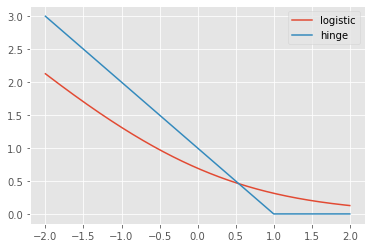

In [159]:
# Comparing logistic and hinge losses

import numpy as np
import matplotlib.pyplot as plt

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

##### Logistic Regression from Scratch

In [160]:
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

y = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1,  1])
X = np.array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00,
         1.55888363e+00,  9.42210440e-01,  1.05292554e+00,
         1.36347845e+00,  2.03723076e+00,  9.39684817e-01,
        -3.98007910e-01],
       [-7.68909287e-01,  2.53732112e-01, -5.92687167e-01,
        -7.64463792e-01,  3.28355348e+00,  3.40290899e+00,
         1.91589718e+00,  1.45170736e+00,  2.86738293e+00,
         4.91091929e+00],
       [ 1.75029663e+00, -1.15181643e+00,  1.77657315e+00,
         1.82622928e+00,  2.80371830e-01,  5.39340452e-01,
         1.37101143e+00,  1.42849277e+00, -9.56046689e-03,
        -5.62449981e-01],
       [-4.76374665e-01, -8.35335303e-01, -3.87148067e-01,
        -5.05650454e-01,  2.23742148e+00,  1.24433549e+00,
         8.66301596e-01,  8.24655646e-01,  1.00540180e+00,
         1.89000504e+00],
       [ 1.17090767e+00,  1.60649427e-01,  1.13812505e+00,
         1.09529491e+00, -1.23136226e-01,  8.82952423e-02,
         3.00072399e-01,  6.46935108e-01, -6.43246179e-02,
        -7.62332153e-01],
       [-1.18516778e-01,  3.58450132e-01, -7.28668396e-02,
        -2.18964911e-01,  1.60404905e+00,  1.14010235e+00,
         6.10257495e-02,  2.81950258e-01,  1.40335463e+00,
         1.66035318e+00],
       [-3.20166857e-01,  5.88829778e-01, -1.84080380e-01,
        -3.84207273e-01,  2.20183876e+00,  1.68400981e+00,
         1.21909628e+00,  1.15069158e+00,  1.96559991e+00,
         1.57246173e+00],
       [-4.73534523e-01,  1.10543868e+00, -3.29481787e-01,
        -5.09063378e-01,  1.58269942e+00,  2.56335845e+00,
         1.73887209e+00,  9.41760326e-01,  7.97298024e-01,
         2.78309559e+00],
       [ 5.37556015e-01,  9.19273310e-01,  4.42010663e-01,
         4.06453254e-01, -1.01768583e+00, -7.13541852e-01,
        -7.00684347e-01, -4.04685551e-01, -1.03547556e+00,
        -8.26124336e-01],
       [ 4.69392608e-01, -3.25707603e-01,  4.79081844e-01,
         3.58672330e-01,  5.26424157e-02,  4.71115126e-01,
         1.34848980e-01,  4.42130889e-01,  1.10920665e-01,
        -2.80346774e-01],
       [ 1.43220073e+00,  1.28229578e+00,  1.66535961e+00,
         1.33135542e+00,  7.39920483e-02,  2.68085763e+00,
         1.47772869e+00,  1.62194764e+00,  2.13719425e+00,
         2.15509700e+00],
       [ 4.89273602e-01,  1.08449508e+00,  4.83200864e-01,
         3.63507304e-01, -8.78913219e-01, -7.84777765e-02,
         1.32840184e-01,  1.21769628e-01,  1.29175382e-01,
        -1.33504419e+00],
       [-1.12836494e-01,  7.72668081e-01,  6.71798412e-02,
        -2.17827270e-01,  1.19128949e+00,  2.36815822e+00,
         1.55682501e+00,  8.08147498e-01,  9.39684817e-01,
         1.98781972e+00],
       [ 1.17215005e-01,  1.91991217e+00,  1.96105168e-01,
         1.11229904e-02,  1.24822184e+00,  1.04534495e+00,
         9.42886920e-01,  6.37649275e-01,  1.79400557e+00,
         1.13016926e+00],
       [ 1.56976992e-01,  1.95555434e-01,  1.14136669e-01,
         8.42164276e-02,  1.64372160e-01, -6.12909496e-01,
        -1.86432731e-01,  9.46859466e-02, -8.23720845e-01,
        -5.07163423e-01],
       [ 5.68797577e-01,  3.23544126e-01,  6.64437745e-01,
         4.09297356e-01,  1.46883471e+00,  1.85457312e+00,
         1.04709318e+00,  1.38980180e+00,  1.28652444e+00,
         1.52568080e+00],
       [ 1.61396982e+00,  6.65622993e-01,  1.56650313e+00,
         1.72099748e+00,  1.38752600e-01, -3.10990780e-02,
         7.42007382e-01,  1.18809286e+00, -8.38324618e-01,
        -1.25424076e+00],
       [-1.66799191e-01, -1.14716230e+00, -1.85727988e-01,
        -2.51956501e-01,  1.01746571e-01, -4.36850252e-01,
        -2.78209570e-01, -2.86092890e-02,  2.67911231e-01,
        -7.28309656e-01],
       [-2.97445722e-01, -8.33008236e-01, -2.61106055e-01,
        -3.83638452e-01,  7.92763012e-01,  4.29421872e-01,
        -5.41361764e-01, -4.59626734e-01,  5.67288590e-01,
         7.53086584e-01],
       [-1.31308049e+00, -1.59395919e+00, -1.30280622e+00,
        -1.08357211e+00,  4.29819258e-01, -7.47085970e-01,
        -7.43747898e-01, -7.26336511e-01,  1.23451935e-02,
         8.86341366e-01],
       [ 3.44426362e-01, -1.17043297e+00,  4.33772623e-01,
         1.40814070e-01,  7.78529924e-01,  2.06872484e+00,
         1.49279465e+00,  1.25464133e+00,  2.58991123e+00,
         1.06637708e+00],
       [ 1.99738898e+00,  8.72731967e-01,  1.86307257e+00,
         2.13054826e+00, -1.48044131e-01, -4.05748177e-02,
         2.62407486e-01,  9.64716970e-01, -1.55598203e-01,
        -1.42010044e+00],
       [ 7.16484959e-01,  4.86438824e-01,  7.42699125e-01,
         7.10203413e-01,  1.12012404e+00,  7.83814537e-01,
         7.99760249e-01,  1.10348860e+00,  6.69515005e-01,
         7.12190327e-02],
       [ 8.55651915e-01, -6.72440605e-01,  9.89840327e-01,
         7.33240644e-01,  1.58269942e+00,  2.33594070e+00,
         1.68363021e+00,  2.35191734e+00,  4.48475086e+00,
         1.60648423e+00],
       [ 1.28575573e-01,  5.21344831e-01,  2.24114504e-01,
        -2.86944462e-02,  6.43315584e-01,  1.56272034e+00,
         6.74210538e-01,  1.00366588e+00,  1.60780746e+00,
         9.13275843e-01],
       [ 1.27315278e+00,  2.23480239e-01,  1.24110055e+00,
         1.24887645e+00, -1.39504278e-01,  4.28116917e-02,
         7.55817850e-01,  7.32313190e-01, -4.18466127e-01,
        -8.23289128e-01],
       [ 3.33065794e-01,  1.39166794e+00,  4.29653603e-01,
         2.20448943e-01,  8.42578821e-01,  1.23865004e+00,
         9.98128793e-01,  9.95411809e-01,  4.17599911e-01,
         3.68915885e-01],
       [ 9.77778019e-01, -9.86594667e-01,  9.48650126e-01,
         8.53830595e-01,  1.50139071e-01,  2.15270154e-01,
         1.24930552e-01,  7.89575830e-01, -2.65126505e-01,
        -1.85367302e-01],
       [ 1.27883307e+00,  1.35443486e+00,  1.35231409e+00,
         1.23181183e+00,  7.14481026e-01,  1.59872815e+00,
         1.79662495e+00,  1.94695182e+00,  1.35589236e+00,
        -1.17322307e-01],
       [-6.49623325e-01, -1.37215165e-01, -5.78270597e-01,
        -6.09460200e-01,  1.03472551e+00,  8.95628265e-01,
         4.14322636e-01,  7.48245802e-02,  1.78670368e+00,
         2.15367939e+00],
       [ 8.21570211e-01,  1.09147628e+00,  8.58031686e-01,
         6.95129669e-01,  1.66098140e+00,  8.57725306e-01,
         1.91966367e+00,  1.84119649e+00,  1.59320368e+00,
         1.44934444e-01],
       [ 1.46060215e+00,  1.67091599e+00,  1.48000371e+00,
         1.44227543e+00, -1.67258800e-01,  1.28034330e+00,
         9.65485868e-01,  6.96717494e-01,  1.51081043e-01,
        -2.65956473e-02],
       [ 5.68797577e-01, -3.28034670e-01,  6.19128524e-01,
         4.33187818e-01,  5.43683965e-01,  9.77119627e-01,
         5.85070243e-01,  7.37729926e-01,  6.80467835e-01,
         3.33475783e-01],
       [ 7.42046236e-01,  5.35307234e-01,  7.46818145e-01,
         6.10375411e-01, -1.85230263e-02,  5.54501636e-01,
         5.77537261e-01,  2.90462272e-01,  3.08071609e-01,
        -8.84246102e-01],
       [ 3.48508879e-02,  5.65559107e-01,  6.84155472e-02,
        -6.22548570e-02,  1.33059365e-01,  1.03456426e-01,
         5.41127844e-01,  1.82127547e-01,  2.67911231e-01,
        -2.19389799e-01],
       [-3.11646431e-01, -2.02373045e-01, -3.85500459e-01,
        -3.72830862e-01, -4.64730347e-01, -1.26370330e+00,
        -7.93214484e-01, -5.07861481e-01, -1.25818311e+00,
        -5.90802062e-01],
       [ 2.45021393e-01,  1.37537847e+00,  1.47088830e-01,
         1.24887095e-01, -1.77221962e-01, -1.00501560e+00,
        -8.13804637e-01, -5.14052036e-01, -9.00390656e-01,
        -1.09972192e+00],
       [-1.83840043e-01,  3.56123065e-01, -1.47009200e-01,
        -2.72149630e-01,  3.72886904e-01,  4.00994653e-01,
         2.19720584e-01,  1.41115115e-01, -3.34494429e-01,
         1.97385794e-01],
       [-1.95200611e-01,  5.32980167e-01, -2.38451445e-01,
        -2.61342040e-01, -1.04899863e+00, -8.34452290e-01,
        -7.24413243e-01, -7.37943803e-01, -1.00834052e-01,
        -9.82060782e-01],
       [-9.02395959e-01,  4.79457623e-01, -8.26647504e-01,
        -8.07125332e-01,  1.87447773e+00,  3.30874179e-01,
         1.95866139e-01,  2.00441274e-01,  3.04420665e-01,
         8.36725224e-01],
       [ 1.40379931e+00,  1.28462285e+00,  1.49647979e+00,
         1.27731747e+00, -3.94988214e-01,  2.17295798e+00,
         1.53045957e+00,  1.30751900e+00,  1.81956218e+00,
         8.96478854e-02],
       [-2.40642882e-01,  2.30461440e-01, -1.91494616e-01,
        -3.11967066e-01,  5.50800509e-01,  7.44016430e-01,
         1.21415160e-01,  3.26573848e-01,  5.92845194e-01,
         7.11976067e-01],
       [-2.71884444e-01,  5.86502711e-01, -2.69755997e-01,
        -3.50931272e-01,  5.54890334e-02,  6.80388087e-03,
        -7.79577806e-02,  9.28803678e-02, -2.39569901e-01,
        -1.45674388e-01],
       [ 1.28451335e+00, -3.93192549e-01,  1.30700487e+00,
         1.19768260e+00,  9.63560073e-01,  1.21780342e+00,
         1.36347845e+00,  1.34079323e+00,  3.48231986e-01,
        -3.27127707e-01],
       [-1.68457106e+00, -5.70049651e-01, -1.65827765e+00,
        -1.28834749e+00, -7.37293990e-01, -8.51129592e-01,
        -9.15499903e-01, -1.10919659e+00, -1.55598203e-01,
         3.16464535e-01],
       [-2.71884444e-01, -1.46523434e-01, -2.46689485e-01,
        -3.42114554e-01,  1.38343618e+00,  3.55511102e-01,
         4.24366613e-01,  6.31458719e-01,  1.15509048e+00,
         7.04888046e-01],
       [-5.89980344e-01, -1.08433149e+00, -5.73739675e-01,
        -5.84716507e-01,  4.79635067e-01, -2.54347505e-01,
        -2.87249149e-01, -5.52743010e-01, -4.98786882e-01,
        -3.35633332e-01],
       [-1.80999901e-01,  7.00529000e-01, -2.08382598e-01,
        -2.67030245e-01, -6.29122518e-01, -5.18531128e-01,
        -5.18386167e-01, -3.88951222e-01, -9.56046689e-03,
        -7.96354651e-01],
       [-6.72344461e-01,  5.37634301e-01, -7.10491139e-01,
        -6.45580303e-01, -7.10962776e-01, -1.03628555e+00,
        -9.06836973e-01, -9.74216681e-01, -1.15595669e+00,
        -5.55361961e-01],
       [-1.38397772e-01, -6.86403007e-01, -1.96025538e-01,
        -2.36313937e-01, -1.38845778e+00, -8.29145876e-01,
        -8.81727031e-01, -8.17389269e-01, -1.67439066e+00,
        -4.63217697e-01],
       [-6.21221905e-01, -2.44260253e-01, -6.69712841e-01,
        -6.17992508e-01, -9.78544838e-01, -1.07703123e+00,
        -8.67288814e-01, -9.13858762e-01,  2.05845194e-01,
        -2.40653860e-01],
       [ 1.16238725e+00, -1.37215165e-01,  1.16695819e+00,
         1.07538619e+00,  1.31227074e+00,  8.36878679e-01,
         1.10986804e+00,  1.47234254e+00,  1.02365651e+00,
         4.28669515e-02],
       [ 2.76262955e-01,  6.35371121e-01,  2.17935974e-01,
         1.64704532e-01, -4.12779575e-01, -6.35461756e-01,
        -4.55360212e-01, -4.01848213e-01, -7.14192543e-01,
        -8.44553188e-01],
       [-7.40507868e-01, -1.25579830e-01, -7.67333616e-01,
        -6.99333842e-01, -7.97253064e-02, -9.40201545e-01,
        -7.33703921e-01, -6.74232667e-01,  3.95694250e-01,
        -5.28427484e-01],
       [ 1.44356130e+00, -1.67467038e-01,  1.38114723e+00,
         1.41383440e+00,  6.36199040e-01,  4.23736428e-01,
         5.46149833e-01,  1.05809119e+00,  3.84741420e-01,
        -4.51876865e-01],
       [ 1.65497418e-01,  5.35307234e-01,  1.47500732e-01,
         5.71919545e-03,  1.23398875e+00,  6.09460926e-01,
         5.08484920e-01,  8.33425600e-01,  7.86345194e-01,
         6.77953569e-01],
       [-3.05966148e-01,  4.73592923e-03, -3.85500459e-01,
        -3.63160914e-01, -1.12158738e+00, -1.25934446e+00,
        -1.10618480e+00, -1.15433606e+00,  2.69489671e-02,
        -1.10397473e+00],
       [-1.56471706e+00, -1.74521855e+00, -1.54994742e+00,
        -1.22407077e+00,  8.25319013e-02, -9.78294019e-01,
        -8.56114890e-01, -1.06065232e+00, -4.69579335e-01,
         1.28610571e+00],
       [-1.12392703e+00, -1.02615481e+00, -1.12939548e+00,
        -9.75496206e-01,  1.21263912e+00, -4.49737258e-01,
        -9.78776957e-01, -9.29077212e-01,  3.40042067e+00,
         9.64309589e-01],
       [-1.57039735e+00,  3.93356139e-01, -1.53676656e+00,
        -1.23174985e+00,  1.98834244e+00, -2.78794914e-01,
        -7.38223711e-01, -1.02299310e+00,  5.98074577e-02,
         6.76535965e-01],
       [ 3.48508879e-02,  6.65622993e-01,  1.83336206e-01,
        -2.61347538e-02,  6.07732863e-01,  1.82804105e+00,
         1.56561349e+00,  9.70133707e-01,  5.01571609e-01,
         1.43495414e+00],
       [-1.40708919e+00, -1.26351565e+00, -1.34976305e+00,
        -1.12054544e+00, -1.36283822e+00, -3.18972050e-01,
        -3.63081174e-01, -6.99510769e-01,  1.93274142e+00,
         9.68562401e-01],
       [-4.11051400e-01,  1.05889734e+00, -3.82205243e-01,
        -4.43364607e-01,  1.12724059e+00,  4.14260688e-01,
         3.01327896e-01,  5.11000821e-01,  3.40930099e-01,
         4.39796088e-01],
       [ 1.85378412e-01,  1.08216801e+00,  2.23702602e-01,
         3.81419652e-02,  1.48306780e+00,  8.25507791e-01,
         4.75841995e-01,  1.06711908e+00,  5.16175382e-01,
         5.30522747e-01],
       [-1.32415704e+00,  4.00337341e-01, -1.31227996e+00,
        -1.09637057e+00,  5.72150142e-01, -5.04317519e-01,
        -8.42178872e-01, -8.73878090e-01, -3.45447260e-01,
         8.77835741e-01],
       [-8.00150849e-01, -5.80948832e-02, -8.30766524e-01,
        -7.41710971e-01, -1.06536668e+00, -1.08650697e+00,
        -6.49208966e-01, -6.86613778e-01, -1.07928688e+00,
        -8.68652457e-01],
       [-1.44798723e+00, -4.56023362e-01, -1.36665103e+00,
        -1.15012411e+00,  7.28714114e-01,  7.00428027e-01,
         2.81483311e+00, -1.33332857e-01,  1.09302444e+00,
         2.50382760e+00],
       [-3.82649980e-01, -6.51497000e-01, -4.36576308e-01,
        -4.33410248e-01,  1.38752600e-01, -9.85495581e-01,
        -6.56239750e-01, -5.23079930e-01, -8.09117071e-01,
        -8.88498914e-01],
       [ 1.36687747e+00,  4.70149355e-01,  1.30288585e+00,
         1.35126414e+00, -4.46227332e-01, -2.73087821e-02,
         2.41064035e-01,  7.89059951e-01, -8.38324618e-01,
        -1.16067889e+00],
       [-1.48803323e+00, -1.08200442e+00, -1.36665103e+00,
        -1.16861077e+00,  1.04593188e-01,  9.24055484e-01,
        -3.43920309e-02, -5.21016412e-01,  3.29977269e-01,
         3.82786979e+00],
       [ 8.72692767e-01,  1.21713790e+00,  9.15697966e-01,
         7.80737158e-01,  7.64296835e-01,  1.49070472e+00,
         1.00942827e+00,  7.87254372e-01,  4.21250854e-01,
         2.93782870e-01],
       [-9.29555004e-02, -8.14391699e-01, -6.33930936e-02,
        -2.01331475e-01,  3.08838007e-01,  4.48373351e-01,
        -1.36966145e-01,  4.56773801e-02, -5.46249146e-01,
         4.05773590e-01],
       [-5.16136653e-01, -6.44515799e-01, -5.26370944e-01,
        -5.23283891e-01, -3.30227662e-01, -6.83219484e-01,
        -6.91519218e-01, -6.75780306e-01, -3.34494429e-01,
        -5.18504255e-01],
       [ 5.51756725e-01,  8.38562115e-02,  4.99676944e-01,
         4.63050896e-01, -3.33074280e-01, -3.80943388e-01,
         1.11622283e-01,  4.50384963e-01, -4.97208443e-02,
        -1.25991118e+00],
       [-1.69639333e-01, -1.94301926e+00, -1.67192398e-01,
        -2.72149630e-01,  2.32993656e+00,  6.80388087e-03,
        -2.51467481e-01,  4.29233897e-01,  2.15909991e+00,
         5.12093895e-01],
       [ 1.11410483e+00, -7.30617283e-01,  1.16283917e+00,
         9.98595418e-01,  7.21597570e-01,  2.08957147e+00,
         9.99384290e-01,  1.52393051e+00,  1.24271312e+00,
         5.57457224e-01],
       [ 1.71905507e+00,  1.08914921e+00,  2.13080887e+00,
         1.67833594e+00,  2.29435384e+00,  4.56842498e+00,
         3.59826331e+00,  2.87553518e+00,  3.99552444e+00,
         2.63991758e+00],
       [-3.59928845e-01, -3.00109864e-01, -3.61610143e-01,
        -4.22602658e-01,  2.12053006e-01, -1.68307789e-01,
        -6.26610018e-01, -6.64688893e-01, -3.41796316e-01,
        -4.00843118e-01],
       [-7.60388861e-01,  3.91029072e-01, -7.47974222e-01,
        -7.20664612e-01,  9.84909705e-01, -2.03178511e-01,
        -5.38474121e-01, -6.85839959e-01,  1.10920665e-01,
         1.02810177e+00],
       [-2.23602031e-01, -7.98102229e-01, -2.25682483e-01,
        -3.83638452e-01,  8.14112645e-01,  9.31636076e-01,
         3.52803278e-01,  5.40405961e-01,  4.76015005e-01,
         8.82088554e-01],
       [ 3.15048662e+00,  1.30789352e+00,  3.27589644e+00,
         3.47865290e+00,  7.07364482e-01,  3.07315325e+00,
         3.07723201e+00,  3.49717016e+00,  6.34584011e-02,
         7.11976067e-01],
       [ 1.41231974e+00,  1.62902878e+00,  1.52943195e+00,
         1.35695235e+00,  1.78907920e+00,  1.41679395e+00,
         1.31702506e+00,  2.52731642e+00, -6.48475562e-01,
         1.33855706e+00],
       [-6.04181053e-01, -8.46970639e-01, -6.18636993e-01,
        -6.01781123e-01,  6.18939231e-02, -6.19542514e-01,
        -5.93715994e-01, -7.81277693e-01,  9.76194251e-01,
        -4.41953636e-01],
       [ 1.23055065e+00, -1.79102374e-01,  1.19991035e+00,
         1.19483850e+00,  1.69353740e-01,  1.81747685e-02,
         5.61215798e-01,  1.00676116e+00,  1.16969425e+00,
        -3.65403017e-01],
       [ 1.00174153e-01,  5.05055361e-01,  9.39534713e-02,
        -1.90244973e-02, -1.36657660e-01, -9.23123564e-02,
         3.96745677e-01,  1.18872633e-02,  9.61590477e-01,
        -9.12598183e-01],
       [ 1.38959860e+00,  1.23342737e+00,  1.23698153e+00,
         1.19768260e+00, -4.31994244e-01,  3.08132403e-01,
         7.28196914e-01,  8.71600694e-01,  5.16175382e-01,
        -9.22521412e-01],
       [-5.01935943e-01,  5.84175644e-01, -5.02068726e-01,
        -5.36935583e-01, -6.14889430e-01, -1.87448783e-01,
        -3.59691332e-01, -2.95834946e-01,  4.32203684e-01,
         1.76121733e-01],
       [ 1.45616424e-01, -9.42380391e-01,  1.56562576e-01,
        -8.50131762e-03,  1.19840603e+00,  5.60187080e-01,
         1.36355576e-01,  5.60267328e-01,  1.11127916e+00,
         9.39006976e-02],
       [ 1.39936140e-01,  1.10078455e+00,  1.07134335e-01,
         2.22149906e-02, -4.71135237e-01, -3.46451695e-01,
        -7.25417640e-01, -4.99091527e-01, -4.62277448e-01,
        -5.86549250e-01],
       [ 3.52946788e-01,  8.07574088e-01,  3.39035163e-01,
         2.08503712e-01, -3.10301338e-01, -1.40427465e-02,
         2.93794914e-01,  6.68344114e-01, -3.45447260e-01,
        -2.59082713e-01],
       [-2.43483024e-01, -1.05407961e+00, -2.97765333e-01,
        -2.93480400e-01, -1.62330374e+00, -1.01941873e+00,
        -7.05455236e-01, -5.78794932e-01, -1.55390952e+00,
        -1.36339627e+00],
       [-1.92360469e-01, -2.30297851e-01, -2.21151561e-01,
        -2.83810451e-01,  4.15586170e-01, -4.30027720e-01,
        -6.15938292e-01, -5.44746875e-01, -6.33871788e-01,
        -8.07695483e-01],
       [ 2.64902387e-01,  1.25743420e-01,  3.43154183e-01,
         1.44226993e-01,  5.36567421e-01,  9.65748739e-01,
         1.01947224e+00,  1.01191996e+00,  1.58382929e-01,
         6.00924602e-03],
       [ 1.74177621e+00,  8.70404900e-01,  1.66535961e+00,
         1.73237389e+00, -3.97123177e-01,  5.10913233e-01,
         7.24430422e-01,  9.77871901e-01,  1.03460934e+00,
        -8.94169330e-01],
       [-5.53058498e-01, -3.37342938e-01, -5.84037225e-01,
        -5.79597122e-01,  5.79266686e-01, -6.40010111e-01,
        -8.02254064e-01, -5.03218564e-01,  3.22675382e-01,
         5.03588270e-01],
       [-1.23270447e+00,  1.51341158e-01, -1.22989956e+00,
        -1.02498359e+00,  4.29819258e-01, -9.72798090e-01,
        -1.02913495e+00, -1.05709275e+00, -1.68534349e+00,
         8.65077305e-01],
       [-7.17786732e-01, -1.50087650e+00, -7.26143415e-01,
        -6.89095073e-01, -4.64730347e-01, -5.51317188e-01,
        -5.88066257e-01, -3.97721176e-01, -6.99588769e-01,
         4.28455255e-01],
       [ 8.31333012e-02,  1.11781017e-01,  1.03427217e-01,
        -3.52358822e-02,  8.25319013e-02,  1.84947787e-01,
         6.37878431e-02,  2.44291044e-01,  2.46005571e-01,
         1.56275276e-01],
       [-1.46918198e-01,  1.32418299e+00, -1.61425770e-01,
        -2.05313218e-01, -1.05344865e-01, -3.64455601e-01,
        -3.20065864e-02, -1.03927717e-01, -7.39749147e-01,
        -5.79461230e-01],
       [-2.02964830e+00, -1.36357954e+00, -1.98450403e+00,
        -1.45444309e+00,  1.46883471e+00, -5.43168052e-01,
        -1.11487284e+00, -1.26181958e+00,  4.32203684e-01,
         2.18061387e+00],
       [-5.53058498e-01,  2.86311052e-01, -6.07515639e-01,
        -5.57981943e-01, -1.15503513e+00, -1.21215527e+00,
        -8.15687883e-01, -8.05266097e-01, -2.65126505e-01,
        -8.54476417e-01],
       [-1.20742721e+00,  2.56795334e-02, -1.15410960e+00,
        -1.01417600e+00,  2.94604918e-01, -1.39691055e-01,
        -3.42239922e-01, -4.80519859e-01,  4.86967835e-01,
         5.98782002e-02],
       [-1.03304249e+00,  8.17949781e-05, -1.01159150e+00,
        -9.06668923e-01,  2.51193999e-01, -3.51758110e-01,
        -7.38851459e-01, -9.52033856e-01,  1.48002444e+00,
         2.85277245e-01],
       [-2.88925296e-01, -8.67914243e-01, -1.96025538e-01,
        -3.54628606e-01,  3.09140679e+00,  1.36752010e+00,
         1.48526167e+00,  1.21466066e+00,  4.13948967e-01,
         2.00199576e+00],
       [-7.06426164e-01, -2.23316649e-01, -6.91955549e-01,
        -6.89379483e-01,  1.26957147e+00, -5.00505574e-02,
        -2.27236387e-01, -3.62899300e-01, -3.87680141e-02,
         3.40563804e-01],
       [-5.01935943e-01, -1.74448240e-01, -5.33785180e-01,
        -5.35229122e-01, -8.24827484e-01, -6.85872692e-01,
        -7.83044958e-01, -7.66317184e-01, -7.65305750e-01,
        -3.03028439e-01],
       [ 2.31264474e+00,  8.85103458e-02,  2.50563970e+00,
         2.42917903e+00,  2.57901560e+00,  3.26835349e+00,
         4.23856683e+00,  3.44042339e+00,  2.71769425e+00,
         1.07630031e+00],
       [-7.91630423e-01,  4.58514019e-01, -8.02757188e-01,
        -7.34885125e-01, -6.24140937e-01, -7.31356242e-01,
        -4.70426177e-01, -7.71991860e-01, -1.18516424e+00,
         3.53322240e-01],
       [-1.23554461e+00, -5.35143644e-01, -1.21383539e+00,
        -1.03721323e+00,  5.22334333e-01, -3.84733684e-01,
        -5.70740396e-01, -8.03202578e-01, -8.31022731e-01,
         1.11315801e+00],
       [-4.25252110e-01,  3.42160663e-01, -4.04447952e-01,
        -4.96264916e-01,  2.11341351e-01,  3.13817847e-01,
         2.22231578e-01,  2.91236092e-01, -2.79730278e-01,
         1.12024604e+00],
       [ 3.76910298e-02,  8.38562115e-02,  2.41414388e-01,
        -7.10715751e-02, -1.28028631e+00,  2.25444934e+00,
         2.65538498e+00,  7.49595158e-01, -3.92909524e-01,
         2.11115127e+00],
       [-1.02736221e+00,  2.09517836e-01, -9.60927557e-01,
        -9.12072718e-01,  1.12724059e+00,  4.91961754e-01,
        -3.01812915e-01, -4.70460206e-01,  4.02996137e-01,
         2.12958012e+00],
       [-1.53404353e+00, -8.05083431e-01, -1.48816212e+00,
        -1.20586852e+00,  1.32650383e+00, -4.23205187e-01,
        -5.96101438e-01, -7.65543364e-01, -5.93711411e-01,
         1.91835712e+00],
       [-6.24062047e-01,  5.21344831e-01, -6.35936877e-01,
        -6.15148405e-01,  9.39183720e-02, -4.89914394e-01,
        -6.97043406e-01, -7.43876419e-01, -4.51324618e-01,
        -1.21575119e-01],
       [-1.47042435e+00, -8.21372901e-01, -1.36871054e+00,
        -1.16519785e+00, -1.23847880e-01,  3.78252877e-01,
         4.80941292e-02, -6.66494472e-01, -1.84963594e+00,
         1.25208321e+00],
       [ 2.10939689e-01, -6.09609792e-01,  2.74778450e-01,
         7.85282224e-02,  1.41190236e+00,  1.14768294e+00,
         1.00691727e+00,  1.03977746e+00,  1.26096784e+00,
         6.92129610e-01],
       [ 4.69392608e-01,  8.42480095e-01,  5.65581264e-01,
         3.63222894e-01,  1.36208655e+00,  1.34288318e+00,
         1.56310249e+00,  1.18319200e+00,  1.03826029e+00,
         1.49024069e+00],
       [ 1.08570341e+00,  1.67630628e-01,  9.15697966e-01,
         9.30336955e-01, -8.78201565e-01, -7.03497567e-01,
        -1.99238801e-01,  1.81611667e-01,  1.15874142e+00,
        -1.77875426e+00],
       [-7.71749429e-01, -1.97094406e+00, -7.67333616e-01,
        -7.15545227e-01, -1.87185124e-01, -7.10509615e-01,
        -6.73942259e-01, -5.85243428e-01, -5.27994429e-01,
        -2.36401048e-01],
       [ 1.28735349e+00, -5.04891771e-01,  1.21226741e+00,
         1.20052670e+00,  6.43315584e-01,  1.07246722e-01,
         7.14386446e-01,  9.73228985e-01,  5.63637647e-01,
        -9.46406421e-02],
       [ 2.87499285e+00,  2.11844903e-01,  3.05758838e+00,
         3.14589289e+00,  3.44011745e+00,  3.45597313e+00,
         4.24358882e+00,  3.92792966e+00,  3.07913765e+00,
         8.46648452e-01],
       [ 1.05854437e-01, -1.95465459e+00,  9.51891773e-02,
        -4.03552669e-02,  9.77793161e-01,  1.05351574e-01,
        -4.76229912e-03,  2.28556715e-01,  1.62033873e-01,
         1.73286525e-01],
       [-2.15081605e-01, -6.74767672e-01, -2.41746661e-01,
        -2.88361015e-01, -1.79410080e+00, -5.89220147e-01,
        -9.89245824e-02, -5.39588079e-01, -1.42247556e+00,
        -6.47506224e-01],
       [-7.87547906e-02, -4.83948167e-01, -1.45361592e-01,
        -1.88248603e-01, -6.05637922e-01, -8.14553237e-01,
        -9.36592254e-01, -9.67510246e-01, -7.21494430e-01,
        -5.52526753e-01],
       [-1.46918198e-01,  1.25669804e+00, -1.73370928e-01,
        -2.34038655e-01, -2.69025382e-01, -4.87450702e-01,
        -4.51342621e-01, -4.66075229e-01, -1.84805750e-01,
        -2.12301779e-01],
       [ 1.38391832e+00, -8.83467558e-02,  1.29464781e+00,
         1.37401696e+00, -1.00985763e+00, -4.55991246e-01,
         4.90985269e-02,  1.89607802e-01,  4.90618779e-01,
        -1.75181979e+00],
       [ 2.76262955e-01, -6.74767672e-01,  3.13497239e-01,
         5.57754014e-02,  1.32650383e+00,  1.44711632e+00,
         3.13882867e-01,  9.39438868e-01,  6.91420666e-01,
         2.65430789e-01],
       [ 1.60828953e+00,  1.35676193e+00,  1.58297921e+00,
         1.52759850e+00,  3.65770360e-01,  1.03397406e+00,
         2.08036730e+00,  1.70190899e+00,  1.42526029e+00,
        -2.36401048e-01],
       [-5.50218356e-01, -1.39615848e+00, -5.30901866e-01,
        -5.66229840e-01,  7.28714114e-01, -1.75319836e-01,
        -7.56428419e-01, -5.18437013e-01,  2.49656514e-01,
         2.71101205e-01],
       [ 3.78508065e-01,  4.42960704e-02,  4.00820463e-01,
         2.67376636e-01,  9.13744263e-01,  3.40349918e-01,
         7.25685920e-01,  8.24139767e-01,  4.35854628e-01,
        -6.85781534e-01],
       [ 5.77318003e-01,  5.23671898e-01,  5.86176364e-01,
         4.40582485e-01,  3.15954551e-01,  4.55953943e-01,
         1.94610642e-01,  1.85996644e-01,  1.27192067e+00,
        -5.51109149e-01],
       [ 4.49511614e-01, -1.24722618e+00,  4.13177523e-01,
         3.03781149e-01, -1.23847880e-01, -1.84227032e-01,
        -2.19075656e-01,  2.68537387e-01,  1.59961369e-02,
        -7.89266630e-01],
       [ 1.22771051e+00,  6.09773382e-01,  1.16283917e+00,
         1.19483850e+00, -1.46620822e-01, -1.37416877e-01,
         3.32715324e-01,  5.04294386e-01, -4.36720844e-01,
        -7.83596214e-01],
       [-3.85490122e-01,  7.40089141e-01, -4.22159738e-01,
        -4.22602658e-01, -4.13491229e-01, -8.85621285e-01,
        -5.23408155e-01, -5.64350302e-01, -8.27371788e-01,
        -3.04446043e-01],
       [-6.86545170e-01, -6.09609792e-01, -7.10491139e-01,
        -6.57809944e-01,  6.21965951e-01, -8.22323343e-01,
        -6.63898282e-01, -5.91176044e-01, -1.72550386e+00,
        -4.74558529e-01],
       [-7.66069145e-01, -9.07474384e-01, -7.78866872e-01,
        -7.25499587e-01,  2.11495189e-03, -6.71848597e-01,
        -6.75072206e-01, -5.20242592e-01, -2.83381222e-01,
        -5.87966854e-01],
       [ 2.33660825e-01, -4.00173751e-01,  2.01047992e-01,
         6.60141709e-02,  1.44748508e+00,  4.95752050e-01,
         8.17337209e-01,  9.62653452e-01,  5.30779156e-01,
        -9.03878299e-02],
       [-8.08671275e-01, -1.37288781e+00, -7.81338284e-01,
        -7.68161126e-01,  1.42613545e+00,  1.75472048e-01,
        -5.32949933e-01, -2.47401916e-02, -1.48296316e-01,
        -2.94522814e-01],
       [-1.24662117e+00, -1.70333134e+00, -1.26573504e+00,
        -1.04204821e+00, -2.74718617e-01, -1.20002633e+00,
        -1.11487284e+00, -1.26181958e+00,  3.33628213e-01,
         2.01638606e-01],
       [ 5.63117293e-01, -2.88474529e-01,  5.40867144e-01,
         4.49683613e-01,  6.04706143e-02,  1.77367196e-01,
         7.11952760e-02,  2.71116786e-01,  1.80288590e-01,
        -4.50245000e-02],
       [-7.66069145e-01, -4.60677496e-01, -7.54152752e-01,
        -7.30618971e-01,  9.13744263e-01, -1.79678677e-01,
        -8.59881381e-01, -7.81793573e-01, -6.08315184e-01,
         4.00103174e-01],
       [-3.48568277e-01, -7.84139827e-01, -3.38955533e-01,
        -4.05822453e-01, -6.82496600e-01, -1.75319836e-01,
        -5.00432558e-01, -4.65301410e-01, -1.22739712e-01,
        -6.34533528e-02],
       [-9.59198799e-01, -1.00521120e+00, -9.76579833e-01,
        -8.52062153e-01, -1.31159911e+00, -1.00349949e+00,
        -8.32260444e-01, -1.05869197e+00, -1.50644726e+00,
        -8.38882772e-01],
       [-6.32582473e-01, -1.07967735e+00, -5.70856361e-01,
        -6.31644200e-01,  1.34073691e+00,  4.78695718e-01,
        -6.49083416e-01, -4.87226295e-01,  6.69515005e-01,
         2.21038356e+00],
       [-6.60983893e-01, -6.30553396e-01, -5.34608984e-01,
        -6.33919482e-01,  9.06627719e-01,  1.24433549e+00,
         9.67996862e-01,  6.50804206e-01,  3.16310935e+00,
         1.54694486e+00],
       [ 2.33660825e-01, -1.20925696e-01,  2.41826290e-01,
         9.84369407e-02, -1.06607833e+00,  2.34221634e-01,
         2.13520408e-02, -3.43037934e-01, -2.46871788e-01,
         3.02288494e-01],
       [ 8.88135851e-02, -9.56342794e-01,  8.24202153e-02,
        -4.20617285e-02,  2.37672565e-01, -4.24699656e-02,
        -4.93324465e-02,  1.65103518e-01, -3.19890656e-01,
        -2.81764378e-01],
       [-1.09996352e-01, -3.21053468e-01, -1.58542456e-01,
        -1.98771782e-01, -1.20413929e+00, -7.69069686e-01,
        -7.53164127e-01, -9.19017559e-01, -1.23627745e+00,
        -9.91984010e-01],
       [-3.20166857e-01,  3.46814797e-01, -3.48429279e-01,
        -3.85344914e-01,  1.21975566e+00, -5.39188241e-01,
        -7.21148950e-01, -5.79568752e-01,  2.65927916e+00,
        -2.73258753e-01],
       [-1.67803873e+00,  3.28198260e-01, -1.59402093e+00,
        -1.28265929e+00, -1.64412182e-01,  4.95752050e-01,
         5.43638839e-01, -7.02606047e-01,  1.49827916e+00,
         2.80861247e+00],
       [-1.24860926e+00, -9.19109720e-01, -1.16111193e+00,
        -1.00877221e+00,  7.71413379e-01,  1.05292554e+00,
         4.04270928e+00,  7.64813607e-01,  2.68848670e+00,
         4.27583267e+00],
       [-8.45593120e-01, -1.44502689e+00, -8.69073410e-01,
        -7.76409023e-01,  8.39552101e-02, -1.00842687e+00,
        -8.66033317e-01, -8.01139060e-01,  6.71093445e-02,
        -2.47741880e-01],
       [-2.77564728e-01, -9.19109720e-01, -2.74286919e-01,
        -3.29884913e-01, -1.79356925e-01, -3.66919293e-01,
         5.18606205e-02, -3.63415180e-01,  3.79017973e-02,
        -1.03146266e-01],
       [-5.33177504e-01, -3.14072267e-01, -5.64265928e-01,
        -5.53431378e-01, -6.98864651e-01, -7.11646704e-01,
        -6.27112217e-01, -6.60561856e-01,  5.78241420e-01,
        -7.33765812e-02],
       [ 1.00901958e+00,  3.37506528e-01,  1.04750661e+00,
         8.78289877e-01,  1.07742478e+00,  1.17800531e+00,
         1.21407430e+00,  1.45686615e+00,  5.81892364e-01,
        -1.61268033e-01],
       [ 7.70447656e-01,  3.96419361e-02,  6.76794805e-01,
         6.40807309e-01, -1.55925484e+00, -6.08550656e-01,
        -4.68291832e-01, -5.47068334e-01,  1.18222552e-01,
        -1.43427648e+00],
       [-5.87140202e-01, -1.52414717e+00, -6.23167915e-01,
        -5.86707379e-01, -2.31307698e-01, -9.84168978e-01,
        -8.67288814e-01, -7.55483711e-01, -8.09117071e-01,
        -5.28427484e-01],
       [-9.16596669e-01, -1.47295170e+00, -9.58868047e-01,
        -8.19354973e-01, -1.50943904e+00, -1.27280001e+00,
        -1.07607798e+00, -1.09188883e+00, -1.34945669e+00,
        -7.60914549e-01],
       [-6.75184603e-01,  2.07190769e-01, -6.53648663e-01,
        -6.68617534e-01,  8.92394631e-01,  1.84947787e-01,
        -2.55736171e-01, -2.97640525e-01,  6.62213118e-01,
         2.45584332e-01],
       [ 1.43788102e+00, -7.79485692e-01,  1.41409939e+00,
         1.42805491e+00, -6.70398475e-01,  2.68334297e-01,
         3.82935209e-01,  1.23168469e+00, -2.57824618e-01,
        -1.56469605e+00],
       [ 1.55148670e+00, -2.65203857e-01,  1.59533627e+00,
         1.59016876e+00,  1.11300750e+00,  1.17990046e+00,
         2.03391391e+00,  2.05528654e+00,  7.86345194e-01,
        -2.80346774e-01],
       [-5.07616227e-01,  6.81912463e-01, -4.99185412e-01,
        -5.41486147e-01,  3.44420728e-01, -5.38408532e-02,
        -4.40670896e-01, -5.33913403e-01, -9.51503864e-01,
         6.82206381e-01],
       [ 2.59665894e+00,  6.40025255e-01,  2.47680656e+00,
         2.93258520e+00, -8.51870352e-01,  1.92528379e-01,
         5.47405330e-01,  1.24071258e+00, -3.87680141e-02,
        -1.03025932e+00],
       [ 2.39341109e-01,  1.09453950e-01,  1.45441222e-01,
         1.00427812e-01, -8.64680131e-01, -9.63132835e-01,
        -8.70427557e-01, -7.61674267e-01, -1.08293783e+00,
        -1.43711168e+00],
       [-9.44998089e-01, -2.22924851e+00, -9.55572831e-01,
        -8.45520717e-01, -2.99094970e-02, -8.90359154e-01,
        -7.97106525e-01, -8.23837764e-01, -1.57216424e+00,
         1.70451317e-01],
       [ 7.53406804e-01, -1.13944494e-01,  7.13865985e-01,
         6.58156335e-01, -5.48705569e-01, -2.37291174e-01,
        -5.74931778e-02,  4.34392694e-01,  2.97118779e-01,
        -1.05719380e+00],
       [ 9.49376599e-01,  1.25437098e+00,  9.93959347e-01,
         9.37731622e-01,  6.07732863e-01,  1.06050614e+00,
         1.59574542e+00,  1.42849277e+00, -9.98966128e-01,
         1.20835175e-01],
       [ 2.39341109e-01, -5.44451913e-01,  1.75098166e-01,
         8.81981712e-02,  1.55832307e-01, -4.83091862e-01,
        -7.88192496e-01, -2.86549112e-01, -1.15437825e-01,
        -8.92751726e-01],
       [-5.13296511e-01, -1.60559452e+00, -5.40375612e-01,
        -5.42623788e-01,  4.58285435e-01, -6.54413236e-01,
        -6.14306146e-01, -3.07442238e-01,  5.38081043e-01,
        -4.60382489e-01],
       [-1.98040753e-01,  7.92020773e-02, -2.52456113e-01,
        -2.54516194e-01, -4.18472810e-01, -7.85746988e-01,
        -3.79402637e-01, -3.75022472e-01, -7.79909524e-01,
        -8.62982041e-01],
       [ 3.78508065e-01, -1.72194788e+00,  4.33772623e-01,
         2.33247405e-01,  2.08797406e+00,  9.69539035e-01,
         1.43629728e+00,  1.56778028e+00,  5.63637647e-01,
         1.11882843e+00],
       [-8.65474114e-01, -1.06571495e+00, -8.96258942e-01,
        -8.02574767e-01,  3.01721463e-01, -8.89032551e-01,
        -8.18198877e-01, -5.95561021e-01, -8.96739713e-01,
         5.51786808e-01],
       [-9.84760076e-01, -9.63323995e-01, -1.00829629e+00,
        -8.68273538e-01, -6.00656341e-01, -1.16212337e+00,
        -1.11487284e+00, -1.26181958e+00,  4.24901797e-01,
        -4.32030408e-01],
       [-1.54966431e+00, -1.12621869e+00, -1.54665220e+00,
        -1.21639170e+00, -3.54423912e-01, -1.16705075e+00,
        -1.11487284e+00, -1.26181958e+00, -3.27192543e-01,
         6.29755031e-01],
       [-1.19947481e+00, -2.86147462e-01, -1.12733597e+00,
        -1.00251518e+00,  4.48142171e-02,  4.74905422e-01,
         5.26061879e-01, -3.03315201e-01, -5.20692543e-01,
         2.60305988e+00],
       [ 6.62522261e-01,  1.90901299e-01,  7.13865985e-01,
         5.06281255e-01,  1.38752600e-01,  9.71434183e-01,
         1.13623347e+00,  1.02507489e+00, -6.43246179e-02,
         6.12958043e-02],
       [-3.17326715e-01,  6.81912463e-01, -4.10214580e-01,
        -3.65436196e-01, -2.40897022e+00, -1.61013634e+00,
        -1.09484767e+00, -1.21404913e+00, -1.52105103e+00,
        -1.48247501e+00],
       [-3.74129555e-01, -1.44968102e+00, -4.39871524e-01,
        -4.15492402e-01, -6.38374026e-01, -1.26218718e+00,
        -9.99454995e-01, -9.18759619e-01, -1.26183405e+00,
        -2.08048967e-01],
       [ 3.71851501e+00,  6.00465114e-01,  3.71251256e+00,
         4.53665907e+00,  9.27977352e-01,  1.64989715e+00,
         2.48965936e+00,  3.58229030e+00, -4.24189575e-02,
        -7.22639240e-01],
       [ 1.97750799e+00,  1.69418666e+00,  2.08961867e+00,
         1.86604672e+00,  1.26245493e+00,  3.38964296e+00,
         2.00754847e+00,  2.59696017e+00,  2.12989236e+00,
         1.58522017e+00],
       [ 4.46671472e-01,  2.37442642e-01,  3.80225363e-01,
         3.17717252e-01, -2.77745337e-02, -3.09875340e-01,
        -2.87123599e-01,  7.66301589e-02, -7.06890656e-01,
        -1.03592974e+00],
       [-7.71749429e-01, -1.01684654e+00, -7.59507478e-01,
        -7.19242561e-01, -4.10644611e-01, -4.31922867e-01,
        -3.38850080e-01, -6.52823661e-01, -2.35346613e+00,
        -8.89702258e-02],
       [ 3.27385510e-01,  7.26126738e-01,  2.86311706e-01,
         1.58447506e-01, -4.12067920e-01,  1.62796206e-02,
        -4.40043147e-01, -4.20161941e-01, -3.08937826e-01,
         5.27901799e-02],
       [-1.14948831e+00, -9.72632264e-01, -1.16193573e+00,
        -9.59569232e-01, -2.62620492e-01, -1.08764406e+00,
        -1.09482256e+00, -1.19981085e+00, -3.96560467e-01,
        -3.28545312e-01],
       [ 1.18794852e+00, -1.65139971e-01,  1.09693485e+00,
         1.09813901e+00, -7.45833843e-01, -3.72604737e-01,
        -8.92572546e-02,  2.37842548e-01, -6.95937826e-01,
        -1.21171264e+00],
       [-6.86545170e-01, -4.88602302e-01, -7.12138747e-01,
        -6.67195483e-01,  9.81882985e-02, -8.13605663e-01,
        -6.36653995e-01, -4.26352496e-01, -1.07928688e+00,
        -2.61917921e-01],
       [-6.58143751e-01, -4.42060959e-01, -6.87836529e-01,
        -6.42736200e-01,  3.08838007e-01, -9.23334729e-01,
        -8.19454374e-01, -8.61239039e-01, -3.41796316e-01,
        -7.08463199e-01],
       [-5.18976795e-01, -7.88793961e-01, -5.41199416e-01,
        -5.43761430e-01, -1.10735429e+00, -6.02865212e-01,
        -6.32259755e-01, -8.35187116e-01, -5.27994429e-01,
        -1.14225004e+00],
       [ 2.63304620e-02,  8.91348504e-01,  9.88962954e-02,
        -1.27953627e-01,  7.92763012e-01,  2.59557597e+00,
         1.37226693e+00,  4.45226166e-01,  2.08973199e+00,
         1.78935515e+00],
       [-3.85490122e-01,  4.93420026e-01, -4.09802678e-01,
        -4.19474145e-01, -6.31257481e-01, -7.26428858e-01,
        -7.24162143e-01, -5.23079930e-01, -4.29418958e-01,
         1.02620582e-02],
       [-1.25173342e+00, -2.48914388e-01, -1.28674204e+00,
        -1.04318585e+00, -1.91152378e+00, -1.53319334e+00,
        -1.11487284e+00, -1.26181958e+00, -5.79107637e-01,
         2.37078707e-01],
       [-5.07616227e-01,  1.76167161e+00, -4.45638152e-01,
        -5.04797224e-01,  5.00984700e-01,  5.86719151e-01,
         2.47341521e-01, -8.50981103e-02,  4.79665948e-01,
         9.31704696e-01],
       [ 2.08099548e-01,  9.12292109e-01,  3.47273203e-01,
         4.69586833e-02,  5.72150142e-01,  1.77497691e+00,
         1.01570575e+00,  1.02817017e+00, -2.72428392e-01,
         5.56039620e-01],
       [-3.45728135e-01, -6.88730074e-01, -3.88795675e-01,
        -3.93877222e-01, -1.20627425e+00, -9.60479628e-01,
        -6.28618813e-01, -6.48696624e-01,  6.34584011e-02,
        -8.68652457e-01],
       [-1.01475926e-01,  6.98201933e-01, -5.51550535e-02,
        -1.87679782e-01,  1.68233104e+00,  4.23736428e-01,
         6.23990654e-01,  4.21495703e-01,  8.17131181e-02,
         8.46648452e-01],
       [ 1.12262526e+00,  5.93483912e-01,  1.04750661e+00,
         1.04978926e+00, -1.61191727e+00, -3.39629163e-01,
         2.69940469e-01,  2.28556715e-01, -1.51947259e-01,
        -1.33220898e+00],
       [ 1.43504087e+00,  7.44743275e-01,  1.46352763e+00,
         1.40245799e+00, -7.92091380e-01,  7.28855246e-01,
         2.83750937e-01,  4.84948899e-01, -1.62900090e-01,
        -1.06428182e+00],
       [ 9.16537271e-02,  2.16499038e-01,  1.03839119e-01,
        -3.46670617e-02,  1.67930432e-01,  3.08132403e-01,
         3.66613746e-01,  2.80660559e-01,  5.05222552e-01,
         2.64013184e-01],
       [-5.38857788e-01,  6.29126074e-02, -5.53144574e-01,
        -5.51440507e-01, -3.56027323e-02, -4.44809873e-01,
        -5.89196204e-01, -2.02460730e-01,  6.11099911e-01,
        -3.78161454e-01],
       [ 9.69257593e-01,  7.06299636e-03,  9.52769146e-01,
         8.43876236e-01, -4.75405164e-01,  2.92971220e-01,
         1.85822162e-01,  6.69633813e-01, -1.11579632e+00,
        -1.11815077e+00],
       [ 2.60233922e+00,  1.71745733e+00,  2.75689992e+00,
         2.92974109e+00,  1.26245493e+00,  1.97207230e+00,
         3.30824348e+00,  2.91680555e+00,  1.41795840e+00,
        -7.19589771e-02],
       [-9.01153585e-02,  1.03795373e+00, -1.68481673e-02,
        -1.62367269e-01,  2.55766597e+00,  1.37320555e+00,
         8.41191654e-01,  1.10503623e+00,  1.60415652e+00,
         1.61782506e+00],
       [-4.70694381e-01, -1.60485837e-01, -4.48109564e-01,
        -4.91998762e-01,  2.34114293e-01,  2.76505082e-02,
        -1.09847407e-01, -2.76231519e-01,  4.13948967e-01,
         1.32176007e-01],
       [ 2.81943239e-01, -6.07282725e-01,  2.80545078e-01,
         1.75512121e-01, -5.40877370e-01, -1.60348168e-01,
        -1.66972526e-01, -2.09683045e-01, -7.94513297e-01,
        -4.16436763e-01],
       [-1.20742721e+00, -4.69985765e-01, -1.19653550e+00,
        -1.02242390e+00,  8.92394631e-01, -6.06845022e-01,
        -8.94407551e-01, -7.58321049e-01,  4.46807458e-01,
         7.42685008e-03],
       [ 8.18730069e-01,  2.25807306e-01,  7.30342065e-01,
         7.09350182e-01, -6.14889430e-01, -5.93199957e-01,
        -2.42302352e-01,  1.28476063e-01,  7.82694250e-01,
        -1.49806866e+00],
       [-2.88925296e-01,  7.56378611e-01, -2.03851676e-01,
        -3.56903888e-01,  2.73255286e-01,  8.33088383e-01,
        -2.19626095e-02,  5.41893943e-02,  1.40128212e-01,
         1.46047101e+00],
       [ 3.24545368e-01, -1.48458703e+00,  2.55419056e-01,
         2.00824635e-01, -1.03476554e+00, -7.96738846e-01,
        -3.75133947e-01, -4.47503562e-01, -1.65248500e+00,
        -1.06853463e+00],
       [ 1.83266075e+00,  6.63295926e-01,  1.76009707e+00,
         1.80632056e+00, -3.88583324e-01,  5.77243411e-01,
         9.44142417e-01,  1.20434307e+00, -1.70201976e-01,
        -1.78017187e+00],
       [-6.49623325e-01, -8.13655544e-02, -6.77950881e-01,
        -6.45295893e-01, -5.44435642e-01, -6.69763934e-01,
        -7.79780665e-01, -9.02509410e-01, -1.01722084e+00,
        -3.15786875e-01],
       [ 3.97128765e+00, -1.90737709e-01,  3.97612984e+00,
         5.24484062e+00,  1.26957147e+00,  8.95628265e-01,
         2.90397341e+00,  2.85232060e+00, -5.97362354e-01,
        -1.06995223e+00],
       [ 9.35175890e-01,  1.45915288e+00,  9.28055026e-01,
         8.33637466e-01,  3.01721463e-01,  1.94423527e-01,
         9.96873295e-01,  4.39809430e-01, -1.83868311e+00,
        -5.86549250e-01],
       [ 1.78100361e-02,  1.05191614e+00,  3.71109950e-02,
        -1.25678345e-01, -1.23136226e-01,  4.97647198e-01,
         2.85006434e-01,  4.04987554e-01,  1.54574142e+00,
         2.17232251e-01],
       [-7.59146486e-02, -5.49106047e-01, -4.15622875e-02,
        -2.16120808e-01,  4.44052346e-01,  8.97523413e-01,
         1.28194845e-01,  1.83159306e-01,  1.07476972e+00,
         9.01935010e-01],
       [-6.35422615e-01, -2.18662515e-01, -6.03396619e-01,
        -6.33350662e-01, -1.94301668e-01,  2.09584711e-01,
        -2.81724962e-01, -4.51372659e-01,  5.67288590e-01,
         4.85373677e-02],
       [-1.11540661e+00, -4.21117355e-01, -1.10880038e+00,
        -9.49046052e-01, -1.12585730e+00, -8.57952125e-01,
        -3.89948813e-01, -9.85566033e-01,  5.56335760e-01,
         4.99549718e-02],
       [ 1.61112968e+00,  5.28326033e-01,  1.55414607e+00,
         1.63567440e+00, -1.80068580e-01,  4.97647198e-01,
         4.82119480e-01,  9.79935420e-01,  1.03095840e+00,
        -9.90566406e-01],
       [ 1.53444584e+00,  3.06715627e+00,  1.48412273e+00,
         1.61576569e+00, -8.65391786e-01,  1.64101160e-01,
         3.22671347e-01,  4.50127023e-01, -1.40056990e+00,
        -1.37048429e+00],
       [-1.35557630e-01, -1.42641035e+00, -1.68428104e-01,
        -2.44561835e-01,  7.09653282e-03, -3.26552642e-01,
        -6.26735568e-01, -6.00719817e-01, -1.64883405e+00,
         9.10654895e-02],
       [-1.61118907e-01, -1.25420739e+00, -1.39183062e-01,
        -2.66177014e-01,  6.21965951e-01,  2.81600332e-01,
        -1.28052115e-01, -1.13729431e-01,  5.49033873e-01,
         3.29437231e-02],
       [-1.12108689e+00, -4.09482019e-01, -1.10591706e+00,
        -9.72083283e-01,  6.93131393e-01, -3.66161234e-01,
        -8.92900955e-01, -7.67864822e-01,  3.59184816e-01,
         8.90594178e-01],
       [ 4.60872182e-01,  2.23480239e-01,  4.37891643e-01,
         3.02643508e-01,  4.36935802e-01,  3.04342108e-01,
         3.25182341e-01,  4.04987554e-01,  4.50458401e-01,
         3.29437231e-02],
       [-2.43483024e-01, -5.28162443e-01, -3.05591471e-01,
        -3.08554143e-01, -8.47600425e-01, -1.03097913e+00,
        -6.68669171e-01, -6.28319378e-01, -1.15230575e+00,
        -8.58729229e-01],
       [ 6.04121655e-02, -1.35427127e+00,  2.22825229e-02,
        -3.89332156e-02,  1.92126682e-01, -5.32555223e-01,
        -3.96226298e-01, -7.45225775e-02,  9.61590477e-01,
        -1.17910775e+00],
       [-1.04724320e+00, -8.91184914e-01, -1.04413176e+00,
        -9.25155590e-01,  6.36199040e-01, -5.13982773e-01,
        -1.03147017e+00, -9.48164759e-01, -8.62302783e-02,
         2.41331520e-01],
       [ 2.47861535e-01, -8.79549579e-01,  2.25762112e-01,
         8.42164276e-02, -9.00262852e-01,  9.96661300e-02,
        -2.98171974e-01, -2.86807052e-01,  2.53307458e-01,
        -5.28427484e-01],
       [-4.28092252e-01,  1.08914921e+00, -4.37400112e-01,
        -4.50759274e-01, -1.23331712e+00, -5.50559129e-01,
        -4.32133515e-01, -7.36654104e-01, -1.08658877e+00,
        -3.69655829e-01],
       [-3.68449271e-01,  7.07510201e-01, -2.76346429e-01,
        -4.31419376e-01,  8.85278087e-01,  1.43195513e+00,
         1.01319476e+00,  5.07905543e-01,  1.13683576e+00,
         1.38108518e+00],
       [ 8.30090637e-01, -4.87866147e-02,  8.82745806e-01,
         6.82900028e-01,  1.26245493e+00,  1.00175655e+00,
         1.28312664e+00,  1.54972449e+00,  1.16604331e+00,
         6.41310124e-02],
       [-7.97310707e-01,  1.81286709e+00, -8.32414132e-01,
        -7.37160407e-01, -1.95920463e+00, -1.25479610e+00,
        -9.09850166e-01, -1.18121339e+00,  2.09496137e-01,
        -9.23939016e-01],
       [-8.25712126e-01,  3.37898326e+00, -8.72368626e-01,
        -7.62472920e-01, -1.32085061e+00, -1.30009014e+00,
        -1.05251230e+00, -1.09586110e+00,  1.21873495e-01,
        -6.40418204e-01],
       [ 1.81277976e+00,  1.98274299e+00,  1.74774001e+00,
         1.88879954e+00, -3.39479169e-01,  5.79728753e-02,
         8.36169665e-01,  8.89398542e-01, -1.32755103e+00,
        -9.74972762e-01],
       [-1.29518759e+00, -7.86466894e-01, -1.30816094e+00,
        -1.06736072e+00, -8.34078991e-01, -1.20286905e+00,
        -9.07464721e-01, -8.31833899e-01, -9.51503864e-01,
         1.74704129e-01],
       [-2.76322353e-02,  4.56186952e-01, -8.97548217e-02,
        -1.46440294e-01, -4.02816413e-01, -6.61235768e-01,
        -9.31319166e-01, -7.72765679e-01, -1.07563594e+00,
        -6.30494976e-01],
       [ 2.57961809e+00,  1.78726935e+00,  2.53447284e+00,
         2.88707955e+00, -9.04001227e-02,  1.21022282e+00,
         1.33334652e+00,  1.92889603e+00,  3.55533873e-01,
         4.14493475e-02],
       [ 1.80425933e+00,  5.05055361e-01,  1.66947863e+00,
         1.85182620e+00, -9.11649323e-01, -3.95346512e-01,
         2.03476431e-02,  2.91494032e-01, -1.25818311e+00,
        -1.56327845e+00],
       [ 2.63304620e-02,  1.99205126e+00,  2.39301309e-02,
        -8.81361908e-02, -1.00558771e+00, -8.35730266e-03,
         2.69940469e-01, -1.24820843e-01, -1.71455103e+00,
        -2.13719383e-01],
       [ 9.46536458e-01,  4.65188898e+00,  8.82745806e-01,
         7.55709055e-01,  1.25231166e-01,  4.82486014e-01,
         6.64166561e-01,  1.01088820e+00, -9.56046689e-03,
        -4.44788844e-01],
       [-1.38397772e-01, -8.58605975e-01, -1.89023204e-01,
        -2.26359578e-01, -1.51602403e-01, -7.20932929e-01,
        -5.24161454e-01, -2.99446103e-01, -3.45447260e-01,
        -8.78575686e-01],
       [-4.84895091e-01, -9.88921734e-01, -5.50261260e-01,
        -5.07356916e-01, -1.21694907e+00, -1.33439232e+00,
        -9.82668998e-01, -9.76022260e-01, -9.69758581e-01,
        -7.45320904e-01],
       [-8.02990991e-01, -2.55895589e-01, -7.43031398e-01,
        -7.55078254e-01, -3.13328058e-02,  5.33655008e-01,
         8.28636683e-01, -5.25659328e-01,  8.84920666e-01,
         1.96939087e+00],
       [-1.07156210e-01,  1.04260787e+00, -1.41242572e-01,
        -1.84551269e-01, -1.13368550e+00, -6.87388810e-01,
        -5.25165851e-01, -6.57208638e-01, -1.40994429e-01,
        -1.20604222e+00],
       [ 1.49752400e+00,  9.79777055e-01,  1.52943195e+00,
         1.42236671e+00,  4.51168891e-01,  9.75224479e-01,
         1.45764073e+00,  1.03023369e+00,  6.07448967e-01,
        -3.96590306e-01],
       [-1.03588263e+00,  1.32724621e-01, -1.04001274e+00,
        -9.02118359e-01,  7.57180291e-01, -8.45823178e-01,
        -5.08342190e-01, -4.69944327e-01, -2.72428392e-01,
         2.27155479e-01],
       [-2.63364018e-01, -4.32752691e-01, -3.22891355e-01,
        -3.22205836e-01, -1.72293536e+00, -1.12005108e+00,
        -5.70489297e-01, -9.76796079e-01, -1.18516424e+00,
        -9.14015787e-01],
       [-3.51408419e-01, -1.20533898e+00, -2.89115391e-01,
        -4.05822453e-01, -6.23429283e-01,  5.73453115e-01,
         6.10180185e-01, -2.35219087e-01, -7.87211411e-01,
         1.83209753e-01],
       [-9.87600218e-01,  1.38003260e+00, -9.86877383e-01,
        -8.75668205e-01,  1.49247314e-02, -6.06465993e-01,
        -8.16190081e-01, -8.45246769e-01,  3.11722552e-01,
         6.98014286e-02],
       [-7.40507868e-01, -1.01451947e+00, -7.45502810e-01,
        -7.07012920e-01,  3.51537272e-01, -4.97684501e-01,
        -5.71493695e-01, -5.06313842e-01,  2.60609345e-01,
        -1.58432825e-01],
       [ 1.93490586e+00,  9.93739458e-01,  1.93309591e+00,
         2.01678415e+00,  3.08838007e-01,  1.06619158e+00,
         2.29003532e+00,  2.11719210e+00,  1.43621312e+00,
        -5.41185920e-01],
       [-7.46188152e-01, -1.95391844e-01, -7.69805028e-01,
        -7.03884407e-01, -2.07111447e-01, -8.42032882e-01,
        -7.83672706e-01, -7.28142090e-01,  8.17131181e-02,
        -4.90152174e-01],
       [ 1.59124868e+00,  1.23416353e-01,  1.59533627e+00,
         1.56741594e+00,  7.00247937e-01,  1.52671253e+00,
         1.91966367e+00,  1.25051429e+00, -2.87032165e-01,
         5.91479722e-01],
       [ 9.01094186e-01, -5.14200040e-01,  8.66269726e-01,
         7.77324235e-01,  3.15954551e-01, -4.56700678e-03,
         4.74586498e-01,  8.92751760e-01,  5.04330670e-03,
        -9.45203077e-01],
       [ 1.51172471e+00,  9.39006348e-03,  1.42233743e+00,
         1.46218414e+00,  5.08101244e-01,  2.74019741e-01,
         6.16457671e-01,  9.54141438e-01, -1.30041599e-01,
        -8.97004539e-01],
       [-4.75132290e-02, -5.21181241e-01, -2.22028933e-02,
        -1.49284397e-01,  9.42210440e-01,  4.46478203e-01,
         1.14133277e-01,  9.13327289e-02,  3.51882930e-01,
        -2.12301779e-01],
       [ 1.54012613e+00,  2.20614143e+00,  1.71478785e+00,
         1.57026004e+00, -2.67602073e-01,  1.93227419e+00,
         1.12493400e+00,  1.68901199e+00,  2.97118779e-01,
        -6.77061650e-02],
       [ 3.38746078e-01, -4.69985765e-01,  4.62605763e-01,
         1.66126583e-01,  2.64306450e+00,  2.35110188e+00,
         1.95858408e+00,  1.94179302e+00,  2.14084519e+00,
         1.86590577e+00],
       [ 4.35310904e-01,  9.09965041e-01,  7.50937165e-01,
         3.37341560e-01,  1.03472551e+00,  3.92407468e+00,
         2.87258598e+00,  2.29001178e+00,  2.49498670e+00,
         2.58604863e+00],
       [ 3.98389059e-01,  3.32080658e+00,  4.83200864e-01,
         2.56000225e-01,  7.07364482e-01,  1.12873146e+00,
         1.08350260e+00,  9.04616992e-01,  1.02000557e+00,
         5.24852331e-01],
       [ 1.75597692e+00,  1.80821295e+00,  1.68595471e+00,
         1.80063235e+00,  2.59022197e-01,  8.45049465e-02,
         7.92227266e-01,  1.14553279e+00,  8.69425010e-03,
        -1.00332484e+00],
       [ 9.15294896e-01,  8.77386102e-01,  7.83889325e-01,
         7.91260337e-01, -6.93171416e-01, -7.85367959e-01,
        -7.51908629e-01, -5.30044305e-01, -9.04041599e-01,
        -1.37898992e+00],
       [ 8.98254044e-01,  6.60968859e-01,  9.23936006e-01,
         8.33068646e-01, -4.53343877e-01,  4.35107316e-01,
         1.02582704e-01,  6.74534669e-01,  1.08207161e+00,
        -1.15642608e+00],
       [ 4.21110195e-01,  2.10253991e-02,  3.30797123e-01,
         2.94964431e-01, -1.27815135e+00, -9.13100930e-01,
        -5.86434110e-01, -5.27464907e-01, -9.66107637e-01,
        -1.18619577e+00],
       [ 8.69852625e-01,  6.47006456e-01,  8.08603445e-01,
         7.77608645e-01,  6.40288864e-02, -2.72730440e-01,
         2.27330876e-02,  4.21753642e-01,  2.02194250e-01,
        -9.91984010e-01],
       [ 1.87526288e+00,  2.75300221e+00,  1.80128727e+00,
         2.17320980e+00, -1.18866299e-01,  1.88738083e-01,
         6.01391706e-01,  9.68328128e-01, -1.55598203e-01,
        -8.58729229e-01],
       [-1.00180093e+00, -7.90384873e-02, -9.34565829e-01,
        -8.77374666e-01,  3.69860184e-02,  1.96318675e-01,
        -3.12986840e-01, -5.80342571e-01,  4.02996137e-01,
         2.99453286e-01],
       [-1.52598482e-01,  5.93483912e-01, -1.98085048e-01,
        -2.67030245e-01, -1.19559944e+00, -4.12213329e-01,
        -6.03634421e-01, -7.09312483e-01, -6.44824618e-01,
        -5.96472478e-01],
       [-3.57088703e-01, -7.16654880e-01, -3.94974206e-01,
        -4.05822453e-01, -1.50179094e-01, -7.98823509e-01,
        -6.25228971e-01, -8.45246769e-01,  7.24279156e-01,
        -7.24056844e-01],
       [-9.70559367e-01,  2.56059179e-01, -9.25503985e-01,
        -8.81640820e-01,  8.42578821e-01,  4.65429683e-01,
        -5.42288853e-02, -5.22306111e-01, -5.24343486e-01,
         8.25384391e-01],
       [ 4.62114557e-02, -5.74703785e-01, -6.87478196e-02,
        -6.33924981e-02, -2.28229573e+00, -1.47046394e+00,
        -1.02384930e+00, -1.10060719e+00, -1.10849443e+00,
        -1.28117524e+00],
       [-8.05831133e-01, -1.45433516e+00, -8.13054738e-01,
        -7.59059997e-01,  1.40887564e-01, -5.35587460e-01,
        -7.04953037e-01, -5.51195371e-01, -1.55598203e-01,
        -1.38372108e-02],
       [ 2.16495736e+00,  3.95683206e-01,  2.27909359e+00,
         2.37798519e+00, -1.67258800e-01,  1.73896910e+00,
         1.64094331e+00,  1.54456569e+00, -3.30843486e-01,
        -1.21575119e-01],
       [-1.24548511e+00, -8.42316505e-01, -1.25502559e+00,
        -1.03806646e+00, -4.26301009e-01, -1.08878114e+00,
        -9.76391513e-01, -8.98898253e-01,  9.83496137e-01,
         4.57021596e-02],
       [ 1.08002313e+00,  1.20782963e+00,  9.56888166e-01,
         9.78402289e-01, -5.55822113e-01, -6.45695555e-01,
        -3.99365041e-01, -3.81530624e-02, -9.98966128e-01,
        -1.09121629e+00],
       [-6.35422615e-01, -4.49042160e-01, -6.49529643e-01,
        -6.23680713e-01,  1.86024464e+00, -6.11014348e-01,
        -3.70488607e-01,  6.47966868e-01,  7.42533873e-01,
        -5.73790814e-01],
       [-7.94470565e-01, -1.19370364e+00, -8.31178426e-01,
        -7.34600715e-01, -1.82915197e-01, -1.24361473e+00,
        -1.09620360e+00, -1.17584824e+00,  5.19826326e-01,
        -6.50341433e-01],
       [ 1.32995562e+00,  1.60649427e-01,  1.19167231e+00,
         1.27162927e+00, -5.07429612e-01, -8.62310965e-01,
        -1.07964162e-01,  2.45322803e-01, -9.55154807e-01,
        -1.81986478e+00],
       [-1.52598482e-01, -3.37342938e-01, -2.35980033e-01,
        -2.34891886e-01, -1.20129267e+00, -1.20950207e+00,
        -8.64150071e-01, -9.42490083e-01, -8.71183109e-01,
        -1.07704025e+00],
       [-7.87547906e-02, -9.56342794e-01, -1.22706982e-01,
        -1.91945936e-01, -8.54185417e-02, -5.20426276e-01,
        -5.52535688e-01, -3.04604900e-01,  1.08937350e+00,
        -6.04978103e-01],
       [ 1.42936059e+00,  1.70116786e+00,  1.40998037e+00,
         1.37401696e+00,  4.01353081e-01,  7.76233945e-01,
         1.29693710e+00,  1.23091087e+00,  3.29977269e-01,
        -8.47174137e-02],
       [-6.78024744e-01, -1.22628258e+00, -7.30262435e-01,
        -6.47286765e-01, -1.29736602e+00, -1.15492181e+00,
        -8.33013743e-01, -5.49131852e-01,  1.05651501e+00,
        -2.36401048e-01],
       [ 1.49752400e+00, -2.58222656e-01,  1.45117057e+00,
         1.39392568e+00,  5.22334333e-01,  7.55387318e-01,
         9.26565457e-01,  1.17932290e+00,  2.97118779e-01,
        -5.49691545e-01],
       [ 6.00039138e-01, -1.20925696e-01,  6.93270885e-01,
         4.27215203e-01,  7.28714114e-01,  1.43764058e+00,
         1.33083553e+00,  1.07305170e+00,  2.35052741e-01,
         5.73050869e-01],
       [-3.51408419e-01, -8.35335303e-01, -3.24950865e-01,
        -3.93308401e-01, -1.29380775e+00, -1.61864286e-01,
         2.85006434e-01, -3.87403583e-01, -1.38596613e+00,
        -4.88734570e-01],
       [-4.39452820e-01, -2.07027179e-01, -5.00009216e-01,
        -4.71805633e-01, -8.84606455e-01, -1.17842164e+00,
        -1.09152060e+00, -1.18639798e+00, -4.18466127e-01,
        -6.02142895e-01],
       [-6.21221905e-01,  3.42160663e-01, -5.80742009e-01,
        -6.08322559e-01, -7.33735718e-01, -6.14214450e-02,
        -2.89509044e-01, -2.83969714e-01, -8.16418958e-01,
         6.89294402e-01],
       [-3.51408419e-01, -1.43571862e+00, -4.15157404e-01,
        -3.95299273e-01, -1.90796551e+00, -1.27071535e+00,
        -8.31130497e-01, -9.59772051e-01, -1.73280575e+00,
        -9.90566406e-01],
       [-8.14351559e-01,  1.55995292e-01, -7.51681340e-01,
        -7.41710971e-01, -1.15005355e+00,  2.60753705e-01,
         4.94751760e-02,  1.79548148e-01,  2.86008104e+00,
        -6.62885609e-02],
       [-7.83109997e-01, -9.30008901e-02, -8.15526150e-01,
        -7.36307176e-01, -6.56877041e-01, -1.02832592e+00,
        -8.13679087e-01, -7.01316348e-01,  7.35231986e-01,
        -4.60382489e-01],
       [ 8.02931592e-02,  1.02472749e-01,  1.67272028e-01,
        -1.10610100e-02, -6.25564246e-01,  1.19885194e+00,
         5.95114220e-01,  4.41099129e-01, -3.56400090e-01,
         1.29319373e+00],
       [ 2.36500967e-01, -4.41324804e-02,  2.08462228e-01,
         9.21799149e-02, -4.58325458e-01, -1.15812191e-01,
        -3.69107561e-01, -1.88075757e-02,  2.46005571e-01,
        -6.06395707e-01],
       [-3.34367567e-01, -7.60869155e-01, -3.63669653e-01,
        -4.01556299e-01,  2.94604918e-01, -4.72100004e-01,
        -3.42114373e-01, -3.92562380e-01, -2.97984995e-01,
         2.69683601e-01],
       [-6.46783183e-01, -4.25771489e-01, -6.76715175e-01,
        -6.31928611e-01, -8.99551198e-01, -9.08173545e-01,
        -7.77395221e-01, -6.73716787e-01,  2.31401797e-01,
        -8.00607463e-01],
       [-3.99690832e-01, -1.28213219e+00, -4.19688326e-01,
        -4.62988915e-01,  2.20412756e-02, -3.86818346e-01,
        -9.53164816e-01, -7.65543364e-01, -6.33871788e-01,
        -2.54829901e-01],
       [-1.01475926e-01, -1.40081262e+00, -1.61013868e-01,
        -2.05313218e-01, -3.11724647e-01, -7.98444479e-01,
        -9.81413501e-01, -7.67348943e-01, -8.01815184e-01,
        -5.21339463e-01],
       [-9.13756527e-01, -1.61490279e+00, -9.40332457e-01,
        -8.28171691e-01, -7.95649652e-01, -1.08271667e+00,
        -9.59693401e-01, -9.08699966e-01, -1.32390009e+00,
        -3.52644581e-01],
       [-6.72344461e-01, -2.67530925e-01, -6.98957883e-01,
        -6.36479175e-01,  2.36249256e-01, -8.56625521e-01,
        -7.77771870e-01, -3.55161105e-01, -7.03239713e-01,
         1.02620582e-02],
       [ 3.76910298e-02, -2.60549723e-01, -3.08528354e-02,
        -6.19704468e-02, -2.17768254e+00, -9.88148788e-01,
        -8.04137309e-01, -9.07410267e-01, -6.44824618e-01,
        -9.83478386e-01],
       [-1.02736221e+00,  8.84367303e-01, -1.03465802e+00,
        -9.12072718e-01,  3.65770360e-01, -6.89283958e-01,
        -8.01626315e-01, -7.78182415e-01, -4.25768014e-01,
         3.91597550e-01],
       [ 1.53444584e+00, -9.06738230e-02,  1.54590803e+00,
         1.59870107e+00,  1.32650383e+00,  1.13441691e+00,
         1.64345431e+00,  1.47750134e+00, -7.16265047e-02,
         3.85927133e-01],
       [-4.73534523e-01,  1.39705823e-01, -4.75295096e-01,
        -5.22146250e-01, -8.43330498e-01, -5.57360012e-02,
        -2.57368318e-01, -4.62464072e-01, -1.11786882e-01,
        -4.36068960e-02],
       [ 1.69349379e+00,  1.06355147e+00,  1.76009707e+00,
         1.68402415e+00,  8.28345733e-01,  1.50586590e+00,
         1.75142706e+00,  2.03981015e+00,  1.59685463e+00,
         1.68587005e+00],
       [-1.03304249e+00, -1.58158770e-01, -1.03424611e+00,
        -9.11788308e-01,  7.42947203e-01, -7.11836218e-01,
        -8.26485158e-01, -8.02686699e-01, -1.20341896e+00,
         4.53972128e-01],
       [-7.57548719e-01, -2.62876790e-01, -7.57036066e-01,
        -7.16114048e-01, -5.57245422e-01, -5.19289188e-01,
        -6.95034610e-01, -8.74393970e-01, -1.46263594e+00,
        -5.21125203e-02],
       [-7.17786732e-01,  1.21015670e+00, -7.30674337e-01,
        -6.76012201e-01, -1.53861687e+00, -8.99455865e-01,
        -8.67037714e-01, -9.23144596e-01,  4.50458401e-01,
        -5.69538001e-01],
       [-2.63364018e-01, -8.07410498e-01, -3.25362767e-01,
        -3.34435477e-01, -8.00631233e-01, -9.82273830e-01,
        -1.09653003e+00, -1.17770541e+00, -6.55777448e-01,
        -5.46856336e-01],
       [-1.45622364e+00, -1.13785403e+00, -1.46674322e+00,
        -1.16206934e+00, -1.87238279e+00, -1.38688791e+00,
        -1.06865800e+00, -1.17226288e+00, -8.62302783e-02,
         7.84273874e-01],
       [-1.78159759e-01, -1.53112837e+00, -2.58634643e-01,
        -2.52240912e-01, -1.60835900e+00, -1.29250955e+00,
        -1.08024623e+00, -1.14783598e+00, -1.63057934e+00,
        -1.33929700e+00],
       [-3.05966148e-01, -1.26816979e+00, -3.81381439e-01,
        -3.53490965e-01, -9.13784286e-01, -1.26957826e+00,
        -1.05763473e+00, -1.03408451e+00, -1.30929632e+00,
        -1.07987546e+00],
       [-6.89385312e-01, -4.18054133e-02, -7.26555317e-01,
        -6.71746047e-01, -5.84999944e-01, -9.81894800e-01,
        -9.16127651e-01, -9.65704667e-01,  4.54109345e-01,
        -2.15136987e-01],
       [ 1.37095998e-01, -8.37662371e-01,  2.92848570e-02,
         2.84720164e-02, -1.43613863e+00, -1.31127151e+00,
        -9.33202412e-01, -7.77666536e-01, -6.55777448e-01,
        -1.45270533e+00],
       [-3.88330264e-01, -1.37754194e+00, -3.98681324e-01,
        -4.28859684e-01, -5.99233033e-01, -4.71152430e-01,
        -6.06145415e-01, -6.04588914e-01, -7.68956694e-01,
        -1.98125738e-01],
       [-7.34827584e-01, -1.99421473e+00, -7.51269438e-01,
        -6.99049432e-01, -7.39428953e-01, -8.46202207e-01,
        -9.43246389e-01, -1.03207258e+00,  7.80621747e-02,
        -2.54829901e-01],
       [-1.57068136e+00, -1.60485837e-01, -1.56024497e+00,
        -1.23345631e+00,  7.85646468e-01, -8.69323012e-01,
        -1.11487284e+00, -1.26181958e+00,  1.28287350e+00,
         1.52993361e+00],
       [-4.65014097e-01, -5.67722584e-01, -5.26370944e-01,
        -4.92851993e-01, -8.00631233e-01, -1.25081629e+00,
        -1.05871446e+00, -1.09614484e+00, -2.17822085e+00,
        -8.60146833e-01],
       [-5.53058498e-01, -1.21232018e+00, -6.06279933e-01,
        -5.50302866e-01, -1.35358672e+00, -1.36869449e+00,
        -9.73880518e-01, -1.13153418e+00, -5.06088769e-01,
        -8.94169330e-01],
       [ 1.16238725e+00, -9.76550243e-02,  1.10105387e+00,
         1.05832157e+00,  7.82619748e-02,  1.39464237e-01,
         3.03838891e-01,  7.88802011e-01, -1.68623537e-02,
        -8.72905270e-01],
       [-1.44429505e+00, -9.06738230e-02, -1.31392757e+00,
        -1.16718872e+00,  2.36249256e-01,  1.75981573e+00,
         1.36473395e+00,  4.14906859e-03,  1.89258104e+00,
         3.49189762e+00],
       [-4.82054949e-01, -5.32816577e-01, -5.50673162e-01,
        -5.05081634e-01, -1.47954955e+00, -1.32283191e+00,
        -9.46385132e-01, -8.23579824e-01, -1.23992839e+00,
        -1.01891849e+00],
       [-1.10120590e+00, -7.23636081e-01, -1.04825078e+00,
        -9.40513744e-01,  6.93131393e-01,  1.28093349e-01,
        -2.70425488e-01, -2.39088185e-01, -2.50522731e-01,
         1.41652528e+00],
       [ 1.71337479e+00,  8.61832787e-02,  1.61181235e+00,
         1.76081492e+00, -1.15005355e+00, -3.54411317e-01,
         3.35226318e-01,  7.31023491e-01,  4.24901797e-01,
        -1.67810437e+00],
       [-3.59928845e-01, -1.38917728e+00, -3.76850517e-01,
        -4.26868812e-01,  1.21263912e+00, -3.03242322e-01,
        -6.37783942e-01, -3.84824185e-01, -9.80711411e-01,
         2.78189225e-01],
       [ 1.76449734e+00,  5.16690697e-01,  1.80952531e+00,
         1.73237389e+00,  1.46883471e+00,  1.57598638e+00,
         2.10547724e+00,  2.61759536e+00,  2.76515652e+00,
         5.53204412e-01],
       [-5.47378214e-01, -9.49361593e-01, -5.74975381e-01,
        -5.60257225e-01, -6.85343217e-01, -7.37041686e-01,
        -8.64526720e-01, -8.25385403e-01, -6.33871788e-01,
        -2.13719383e-01],
       [-4.13891542e-01, -4.63004563e-01, -4.41519132e-01,
        -4.69245941e-01,  4.58285435e-01, -5.24974631e-01,
        -7.13992617e-01, -7.18340376e-01, -3.81956694e-01,
        -4.19271971e-01],
       [-4.91109961e-03, -1.49156823e+00, -7.98691737e-02,
        -1.09182550e-01, -2.32731007e-01, -9.71850516e-01,
        -8.93277604e-01, -5.56870047e-01, -1.60137179e+00,
        -8.21871524e-01],
       [-5.95660628e-01, -3.16399334e-01, -6.54060565e-01,
        -5.94102046e-01, -1.38988109e+00, -1.23982443e+00,
        -1.09546286e+00, -1.11757963e+00, -1.56851330e+00,
        -2.97358022e-01],
       [ 6.08559564e-01,  3.30525327e-01,  6.15009504e-01,
         4.51674485e-01,  1.46171817e+00,  5.22284121e-01,
         7.40751885e-01,  9.27573636e-01,  4.97920665e-01,
        -3.91398238e-03],
       [ 6.05719422e-01,  6.02792181e-01,  6.39723624e-01,
         4.88932230e-01,  1.43325199e+00,  4.54058795e-01,
         1.14376646e+00,  7.96798146e-01,  2.09496137e-01,
         3.57575052e-01],
       [ 5.40396157e-01, -8.79549579e-01,  5.69700284e-01,
         3.93370382e-01, -1.03209902e-01,  6.20831814e-01,
         3.96745677e-01,  5.54334712e-01, -1.08135939e-01,
        -4.30612804e-01],
       [-3.25847141e-01,  1.40441977e-02, -3.06827177e-01,
        -4.00703068e-01, -4.05843133e-02,  1.54625420e-01,
        -2.22591048e-01, -5.00897105e-01, -1.84805750e-01,
         3.68915885e-01],
       [-8.25712126e-01,  1.32724621e-01, -8.24999896e-01,
        -7.61050869e-01,  6.43315584e-01, -6.92695224e-01,
        -1.05202266e+00, -1.06622382e+00,  4.68713118e-01,
        -3.56897393e-01],
       [-8.17191701e-01, -1.04942548e+00, -8.48066408e-01,
        -7.53371792e-01, -9.46520389e-01, -1.13255906e+00,
        -1.10264807e+00, -1.18595948e+00, -1.40994429e-01,
        -2.81764378e-01],
       [-5.18976795e-01, -6.27490174e-02, -5.80330107e-01,
        -5.41770558e-01, -9.41538808e-01, -1.18107485e+00,
        -1.01749649e+00, -1.04166794e+00, -9.95315184e-01,
        -4.74558529e-01],
       [ 8.32930779e-01,  3.98010274e-01,  8.16841486e-01,
         7.50020849e-01,  1.10589096e+00,  2.38602123e-02,
         7.78416798e-01,  1.30055462e+00, -3.08937826e-01,
        -2.95940418e-01],
       [-3.23006999e-01, -1.17741417e+00, -3.24950865e-01,
        -3.99849837e-01, -1.23847880e-01, -8.89010902e-02,
        -6.45568024e-01, -7.20661835e-01, -5.82758580e-01,
         1.35840352e+00],
       [ 1.31859505e+00,  4.98074160e-01,  1.27405271e+00,
         1.24318824e+00, -3.70080310e-01,  6.79581400e-01,
         2.15954093e-01,  3.09033940e-01,  5.16175382e-01,
        -2.78929170e-01],
       [-1.15800874e+00, -4.09482019e-01, -1.13516210e+00,
        -9.78624719e-01,  3.08838007e-01, -5.89030632e-01,
        -7.99617520e-01, -8.03976398e-01,  2.86165948e-01,
         7.26366367e-02],
       [ 2.66482234e+00,  1.15896122e+00,  2.60037716e+00,
         3.10607545e+00,  7.50063747e-01,  4.54058795e-01,
         1.78281449e+00,  2.37513192e+00, -5.33717877e-02,
        -1.09688671e+00],
       [ 8.31333012e-02, -6.39861665e-01,  8.98344513e-02,
        -3.89332156e-02,  8.18202469e-02,  1.81157491e-01,
        -1.09596308e-01, -1.72539710e-01,  3.66486703e-01,
         1.87462565e-01],
       [-1.28411104e+00, -5.70049651e-01, -1.24925896e+00,
        -1.06480103e+00, -8.21980866e-01, -2.28573493e-01,
        -5.74931778e-02, -6.70621509e-01,  8.19203684e-01,
         1.19821426e+00],
       [-8.71154398e-01, -1.00753827e+00, -8.43535486e-01,
        -7.99161844e-01,  4.93868156e-01, -2.53399931e-01,
        -4.37281054e-01, -4.00042634e-01, -1.30041599e-01,
         8.89176574e-01],
       [ 1.57704797e+00,  5.56250838e-01,  1.56238411e+00,
         1.53328671e+00,  1.14556350e-01,  5.60187080e-01,
         1.22411827e+00,  1.58325667e+00,  9.87147081e-01,
        -8.00607463e-01],
       [-6.86545170e-01, -8.93511982e-01, -6.97722177e-01,
        -6.67195483e-01,  1.32650383e+00, -5.97558798e-01,
        -6.11920702e-01, -4.23515158e-01,  7.20628213e-01,
         3.20717347e-01],
       [-1.09836575e+00, -1.06571495e+00, -1.06143165e+00,
        -9.47908411e-01,  1.75046976e-01, -2.41650014e-01,
        -6.65279329e-01, -7.36396164e-01, -6.52126505e-01,
         1.02810177e+00],
       [-5.87140202e-01, -9.06738230e-02, -6.30582151e-01,
        -5.96092918e-01, -8.89588036e-01, -8.79367296e-01,
        -1.02058501e+00, -1.04288026e+00, -9.36900090e-01,
        -3.28545312e-01],
       [ 1.79698128e-01, -1.05873375e+00,  1.19491395e-01,
         3.92796063e-02, -5.41589025e-01, -5.02990915e-01,
        -5.36339776e-01, -3.51807888e-01, -1.06103217e+00,
        -5.21339463e-01],
       [-7.54708577e-01, -7.58542088e-01, -7.80514480e-01,
        -7.17251689e-01, -3.98546486e-01, -8.61931935e-01,
        -7.90075742e-01, -6.62883314e-01, -6.48475562e-01,
         1.30758403e-01],
       [-6.18381763e-01, -1.00753827e+00, -6.07103737e-01,
        -6.48993226e-01,  1.38343618e+00,  3.08132403e-01,
        -9.67854132e-01, -8.00881120e-01,  2.36355274e+00,
         4.27037651e-01],
       [-7.00745880e-01, -5.16527107e-01, -7.52505144e-01,
        -6.65204611e-01, -1.47670293e+00, -1.28947731e+00,
        -1.01059125e+00, -9.62093509e-01, -5.13390656e-01,
        -7.77925798e-01],
       [ 4.60872182e-01, -1.62076749e-02,  6.23247544e-01,
         2.94964431e-01,  1.98834244e+00,  2.50271372e+00,
         2.54364574e+00,  1.94179302e+00,  2.05687350e+00,
         1.87582900e+00],
       [ 3.29533386e+00, -4.25771489e-01,  3.38710998e+00,
         3.85407444e+00,  1.31938728e+00,  2.50081857e+00,
         3.11364142e+00,  3.67256924e+00,  5.27128213e-01,
        -2.25060215e-01],
       [ 2.70582671e-01,  1.50104009e+00,  2.48416722e-01,
         1.75512121e-01,  4.29819258e-01, -1.26045990e-01,
         4.35666087e-01,  4.28460078e-01, -6.01013297e-01,
         2.61177976e-01],
       [-8.48433262e-01, -1.21464725e+00, -8.53833036e-01,
        -7.68729946e-01, -1.68094775e+00, -8.28198302e-01,
        -5.49271396e-01, -8.82390104e-01, -4.44022731e-01,
        -2.78929170e-01],
       [-4.45133104e-01, -5.11136818e-02, -4.13921698e-01,
        -4.80906762e-01, -6.23429283e-01, -1.02524506e-02,
         1.78289180e-01, -1.29205820e-01, -1.01722084e+00,
        -1.35751160e-01],
       [-3.05966148e-01, -1.62812904e-01, -2.83348763e-01,
        -4.06391273e-01,  8.42578821e-01,  4.93856902e-01,
         9.07810310e-02,  1.83417246e-01,  8.15552741e-01,
         3.13629327e-01],
       [-7.30745067e-02, -7.16654880e-01, -1.42066376e-01,
        -1.74028090e-01, -6.35527408e-01, -9.36600764e-01,
        -9.26297178e-01, -7.23241233e-01, -1.41517368e+00,
        -5.62449981e-01],
       [-1.49087337e+00, -8.84203713e-01, -1.45109094e+00,
        -1.17714308e+00, -9.55771897e-01, -5.18531128e-01,
        -5.22152658e-01, -6.47664865e-01,  4.32203684e-01,
         4.83741813e-01],
       [-1.33239345e+00, -2.25643716e-01, -1.32422512e+00,
        -1.07020482e+00,  3.23071095e-01, -8.48665900e-01,
        -7.74633127e-01, -8.99156193e-01, -1.11579632e+00,
         9.62891985e-01],
       [-4.50813388e-01, -2.83820394e-01, -5.16897198e-01,
        -4.63557736e-01, -1.56565973e+00, -1.47520181e+00,
        -1.09988221e+00, -1.12126817e+00, -1.03547556e+00,
        -1.55193761e+00],
       [-2.34962598e-01,  5.30653100e-01, -2.77170233e-01,
        -3.09407374e-01, -7.50103770e-01, -7.69638231e-01,
        -6.95034610e-01, -6.36573452e-01,  1.23451935e-02,
        -8.27541940e-01],
       [-3.88330264e-01, -1.04636226e-01, -4.15981208e-01,
        -4.50190454e-01,  2.84461654e-02, -4.70394371e-01,
        -7.77395221e-01, -8.02428759e-01, -1.92107637e-01,
        -1.37168764e-01],
       [ 6.73882829e-01, -2.32624918e-01,  6.02652444e-01,
         5.21070589e-01,  3.55627096e-02, -3.72604737e-01,
        -3.78900438e-01, -1.46805385e-02, -1.15595669e+00,
        -9.73555158e-01],
       [-2.06561179e-01, -5.44451913e-01, -2.67284585e-01,
        -2.91489528e-01, -1.20912087e+00, -8.97939746e-01,
        -8.41048924e-01, -8.81874224e-01, -5.90060467e-01,
        -8.20453920e-01],
       [ 1.79289876e+00,  5.79521509e-01,  1.72302589e+00,
         1.81485287e+00, -3.45884059e-01,  1.65996308e-01,
         1.15388774e-01,  7.46241940e-01, -7.06890656e-01,
        -1.02458890e+00],
       [ 1.72473535e+00,  1.75469041e+00,  1.71890687e+00,
         1.64705081e+00,  1.91415027e-01,  1.18558590e+00,
         9.45397914e-01,  2.00111918e+00,  2.31401797e-01,
        -3.68238225e-01],
       [-5.44538072e-01, -2.95455730e-01, -5.62618320e-01,
        -5.58835173e-01, -2.88240051e-01, -6.17647366e-01,
        -5.63458513e-01, -7.38975562e-01, -4.25768014e-01,
        -5.15669047e-01],
       [ 2.15359679e+00, -4.74639899e-01,  2.01547631e+00,
         2.53441083e+00, -1.79356925e-01, -3.54790346e-01,
         3.51547781e-01,  9.21641020e-01, -3.45447260e-01,
        -1.73764374e+00],
       [ 2.23880105e+00,  6.07446315e-01,  2.27497457e+00,
         2.35238826e+00,  7.07364482e-01,  1.72570306e+00,
         1.95858408e+00,  2.60985716e+00,  4.52036841e-02,
        -1.98125738e-01],
       [ 6.31280700e-01,  9.30908646e-01,  7.01508925e-01,
         5.27612025e-01,  7.54153571e-02,  8.59620454e-01,
         1.15883242e+00,  1.00108649e+00,  1.32668482e+00,
        -8.75526218e-02],
       [ 3.01824232e-01, -1.41477502e+00,  2.34000152e-01,
         1.61860429e-01, -1.19061786e+00, -6.63320431e-01,
        -6.88882674e-01, -5.76473474e-01, -3.30843486e-01,
        -1.04301776e+00],
       [ 2.05703196e+00, -9.74959331e-01,  2.03195239e+00,
         2.07935441e+00,  2.66138742e-01,  8.93733117e-01,
         1.31074757e+00,  1.97532520e+00,  5.89194250e-01,
        -1.37168764e-01],
       [ 1.84970160e+00, -4.51369228e-01,  1.76421609e+00,
         1.93430518e+00, -1.35234351e-01,  6.17631712e-02,
         8.02271243e-01,  1.04442038e+00, -8.78484996e-01,
        -1.13657962e+00],
       [-1.24197062e-01, -7.49233820e-01, -1.70075712e-01,
        -2.15551988e-01, -9.49367007e-01, -7.69448716e-01,
        -7.93967783e-01, -7.37943803e-01,  2.20448967e-01,
        -8.65817249e-01],
       [ 5.80158144e-01, -7.49233820e-01,  5.90295384e-01,
         3.80003099e-01,  1.73623667e-01,  7.47806726e-01,
        -2.79841716e-01,  1.30281642e-01,  6.51260288e-01,
         4.14279215e-01],
       [-1.01032135e+00,  2.16499038e-01, -8.98730354e-01,
        -9.00411897e-01, -4.00681450e-01,  1.16852957e+00,
         1.74766057e+00,  2.70600906e-01,  1.37414708e+00,
         3.07653963e+00],
       [-1.89520327e-01,  2.07582567e+00, -2.50396603e-01,
        -2.63901732e-01, -1.50801573e+00, -1.08176910e+00,
        -9.55299161e-01, -9.73700801e-01, -1.42612651e+00,
        -7.32562468e-01],
       [-1.32717488e-01, -9.63323995e-01, -1.52363926e-01,
        -2.11285834e-01, -9.73563257e-01, -5.46958348e-01,
        -5.81412122e-01, -6.24450281e-01, -7.16265047e-02,
        -5.42603524e-01],
       [-8.65474114e-01, -1.06963293e-01, -7.68981224e-01,
        -8.34144306e-01,  1.79619574e+00,  2.10473265e+00,
         1.00566178e+00,  3.80483271e-01,  1.40335463e+00,
         2.36773761e+00],
       [-8.11511417e-01, -1.47295170e+00, -7.74747852e-01,
        -7.63894972e-01,  1.94564317e+00,  1.28093349e-01,
        -1.23030127e-01,  1.69746435e-01,  7.53486703e-01,
         8.99099802e-01],
       [-8.76834682e-01, -1.01451947e+00, -8.77311450e-01,
        -8.02574767e-01, -1.17353815e+00, -6.35840786e-01,
        -6.69673569e-01, -7.26852391e-01,  6.98722552e-01,
        -4.78597082e-02],
       [-5.89980344e-01,  7.98265819e-01, -5.44494632e-01,
        -5.88982661e-01, -1.92219860e+00,  5.60777273e-02,
        -1.17631489e-01, -4.93674790e-01, -2.22203217e+00,
         5.37610768e-01],
       [-4.93415517e-01, -4.21117355e-01, -4.66645154e-01,
        -5.46036712e-01,  5.57917054e-01,  4.80590866e-01,
        -3.75133947e-01, -5.18952893e-01, -1.19088769e-01,
         4.36960880e-01],
       [-2.40642882e-01, -1.29609459e+00, -2.54515623e-01,
        -3.21637015e-01, -9.05956087e-01, -3.52326654e-01,
        -4.77456961e-01, -5.23079930e-01, -7.10541599e-01,
        -9.72137554e-01],
       [ 1.34255857e-01,  9.30908646e-01,  8.24202153e-02,
         2.79031958e-02, -6.78938328e-01, -7.19795840e-01,
        -6.15107685e-02,  9.77812244e-02, -6.74032165e-01,
        -1.22447108e+00],
       [-5.44538072e-01, -1.20999311e+00, -5.43258926e-01,
        -5.48596404e-01, -1.08742796e+00, -4.94841779e-01,
        -2.56238370e-01, -6.08200072e-01, -6.04664241e-01,
        -1.78279281e-01],
       [-7.02343647e-02, -7.28290216e-01, -1.48244906e-01,
        -1.65780192e-01, -1.85743805e+00, -1.06187004e+00,
        -8.58123685e-01, -1.04239018e+00, -7.47051033e-01,
        -1.14225004e+00],
       [-8.11511417e-01, -8.81876646e-01, -7.65686008e-01,
        -7.47683587e-01, -9.04532779e-01,  1.33778793e-01,
         1.49412746e-01, -5.50679491e-01, -5.90952350e-03,
         1.37824997e+00],
       [ 1.54012613e+00,  9.12292109e-01,  1.52119391e+00,
         1.47640466e+00,  3.30187639e-01,  5.20388973e-01,
         1.21532979e+00,  1.37174601e+00,  6.47609345e-01,
        -5.61032377e-01],
       [-1.09836575e+00, -1.64515466e+00, -1.07996724e+00,
        -9.47908411e-01,  2.56175580e-01, -5.48095436e-01,
        -8.73440750e-01, -7.54194012e-01, -4.24189575e-02,
         4.10026402e-01],
       [-1.53177142e+00, -5.70049651e-01, -1.51164053e+00,
        -1.19619857e+00,  5.36567421e-01, -5.69700123e-01,
        -1.11487284e+00, -1.26181958e+00,  6.33005571e-01,
         1.15993895e+00],
       [ 3.87028491e-01,  1.58322360e-01,  4.29653603e-01,
         2.55431405e-01,  1.39766927e+00,  9.82805071e-01,
         1.25927219e+00,  1.08878603e+00,  4.28552741e-01,
         6.58107112e-01],
       [ 2.12519537e+00,  6.95874866e-01,  2.15964201e+00,
         2.13908057e+00,  1.44748508e+00,  1.97775774e+00,
         2.41307404e+00,  2.76720046e+00,  1.27922255e+00,
         4.62477753e-01],
       [-5.75779634e-01, -3.65267744e-01, -5.72503969e-01,
        -5.93533225e-01,  4.65401979e-01, -1.28130653e-01,
        -5.14368576e-01, -4.03911732e-01,  4.57760288e-01,
        -1.68356053e-01],
       [-1.91118094e-02, -4.90929369e-01, -9.14024297e-02,
        -1.30228909e-01, -1.13226219e+00, -9.61427202e-01,
        -7.78274069e-01, -4.23257219e-01, -6.22918958e-01,
        -7.31144864e-01],
       [-1.75319617e-01, -9.30008901e-02, -1.59366260e-01,
        -2.75278143e-01,  6.78898305e-01,  1.96318675e-01,
        -3.76563234e-02,  1.26154605e-01, -2.05132971e-02,
        -2.84599586e-01],
       [-3.76969697e-01, -4.25771489e-01, -3.67376771e-01,
        -4.16914453e-01, -1.13297385e+00, -2.91681920e-01,
        -1.87060480e-01, -2.08651286e-01, -8.67532165e-01,
        -7.50991321e-01],
       [-8.71154398e-01, -1.03779014e+00, -8.92139922e-01,
        -7.86932203e-01, -1.34860514e+00, -1.07380948e+00,
        -7.74382028e-01, -1.07491639e+00, -1.00991896e+00,
        -9.32230380e-02],
       [-6.60983893e-01, -4.72312832e-01, -6.88248431e-01,
        -6.34203893e-01, -3.90718288e-01, -7.96359817e-01,
        -7.56679518e-01, -8.39314154e-01,  1.29175382e-01,
        -3.69655829e-01],
       [ 1.07434285e+00,  4.02664408e-01,  1.33583801e+00,
         9.64466187e-01,  1.89582736e+00,  2.90448508e+00,
         2.88890744e+00,  1.82829950e+00,  1.10032633e+00,
         1.18403822e+00],
       [-6.24062047e-01, -1.95000046e+00, -6.52001055e-01,
        -6.03487584e-01, -5.43723988e-01, -9.83979463e-01,
        -7.87690297e-01, -7.98559661e-01, -7.68956694e-01,
        -1.04727057e+00],
       [-3.31527425e-01, -2.32624918e-01, -3.20831845e-01,
        -3.68849119e-01, -1.62615036e+00, -4.80438655e-01,
        -6.05517666e-01, -7.76118897e-01,  2.27750854e-01,
        -5.39768316e-01],
       [-3.37207709e-01, -7.25963148e-01, -3.62022045e-01,
        -4.18905325e-01,  1.72912013e-01, -3.02863293e-01,
        -7.01060996e-01, -6.45343406e-01, -2.79730278e-01,
        -1.13069495e-01],
       [-5.07616227e-01, -1.00986534e+00, -5.63442124e-01,
        -5.28403275e-01, -6.78938328e-01, -1.11114389e+00,
        -8.50088503e-01, -7.32011187e-01, -8.78484996e-01,
        -8.10530691e-01],
       [-9.05236101e-01, -1.62812904e-01, -8.88844706e-01,
        -8.10253844e-01,  2.87488374e-01, -5.63635649e-01,
        -4.94155073e-01, -5.05540022e-01, -1.18881518e+00,
         4.75236189e-01],
       [ 5.71637719e-01, -1.03080894e+00,  5.07914984e-01,
         4.12710279e-01, -1.00363285e-01, -3.66350749e-01,
        -4.24349433e-01, -9.38680643e-02, -2.79730278e-01,
        -5.73790814e-01],
       [-3.62768987e-01,  4.84111757e-01, -3.84676655e-01,
        -3.99281017e-01, -1.48381948e+00, -4.01410986e-01,
        -3.45755314e-01, -7.80245934e-01, -8.45626505e-01,
        -2.34983444e-01],
       [ 1.09706398e+00,  3.18889991e-01,  1.06398269e+00,
         9.57924750e-01,  5.15217788e-01,  4.93856902e-01,
         3.92979185e-01,  1.01424142e+00,  6.58562175e-01,
        -2.98775626e-01],
       [-5.27497221e-01, -3.18726401e-01, -5.58499300e-01,
        -5.36935583e-01, -6.76803364e-01, -7.40642467e-01,
        -7.11732722e-01, -5.77505233e-01,  5.63637647e-01,
        -9.67884741e-01],
       [-7.85950139e-01, -4.00173751e-01, -8.02345286e-01,
        -7.25499587e-01, -5.53687150e-01, -9.70523912e-01,
        -7.65467998e-01, -7.20145955e-01, -7.68956694e-01,
        -5.19921859e-01],
       [-8.76834682e-01, -5.72376718e-01, -8.67013900e-01,
        -8.01152716e-01,  8.06996100e-01, -4.98442560e-01,
        -7.32448424e-01, -6.22128822e-01, -3.56400090e-01,
         8.53950732e-02],
       [-1.34347001e+00,  5.56250838e-01, -1.32710844e+00,
        -1.09807703e+00, -1.18634793e+00, -8.30282965e-01,
        -6.45944673e-01, -1.12954804e+00, -1.96281518e+00,
         6.29755031e-01],
       [ 2.45021393e-01,  6.56314725e-01,  2.29057328e-01,
         1.10382172e-01, -7.97784616e-01, -3.48893738e-02,
        -2.53727376e-01, -2.62044829e-01,  4.83316892e-01,
        -5.19921859e-01],
       [ 2.84783380e-01,  2.44815641e+00,  1.95281364e-01,
         1.83760019e-01, -9.36557227e-01, -1.10470039e+00,
        -5.26546898e-01, -5.55322408e-01,  1.47430099e-01,
        -1.39741877e+00],
       [-6.35422615e-01,  4.37570415e-01, -6.41703505e-01,
        -6.28800098e-01,  9.74766441e-02, -4.38555885e-01,
        -7.94093332e-01, -6.99768709e-01,  7.57137647e-01,
         1.45148704e-02],
       [-1.34119789e+00,  5.60904972e-01, -1.33328697e+00,
        -1.09125118e+00,  5.72150142e-01, -8.10194397e-01,
        -8.57872586e-01, -9.37589226e-01,  7.79043307e-01,
         4.55389732e-01],
       [ 3.89868633e-01,  4.16626811e-01,  4.50248703e-01,
         4.21526998e-01,  1.11300750e+00,  9.99861402e-01,
         7.95993758e-01,  9.25768057e-01,  9.98099911e-01,
         8.28219599e-01],
       [-4.05371116e-01, -1.65679000e+00, -4.56759506e-01,
        -4.54741018e-01, -6.05637922e-01, -8.79367296e-01,
        -8.18575526e-01, -6.42248129e-01, -8.34673675e-01,
        -6.74919050e-03],
       [-8.42752978e-01,  4.93420026e-01, -8.65778194e-01,
        -7.80959587e-01,  3.87119993e-01, -8.44496574e-01,
        -1.00244308e+00, -9.84276334e-01, -7.17843486e-01,
        -1.92455322e-01],
       [-7.26307158e-01, -5.80948832e-02, -7.31910043e-01,
        -6.97342971e-01, -7.75723329e-01, -5.13982773e-01,
        -4.26232679e-01, -8.93481516e-01,  8.00948967e-01,
        -1.80900230e-02],
       [ 1.59817134e-01, -1.23559085e+00,  2.57478566e-01,
         3.44391336e-03,  4.79635067e-01,  1.50207561e+00,
         7.05597966e-01,  3.63201303e-01,  1.00175085e+00,
         1.59656100e+00],
       [-7.14946590e-01, -7.60869155e-01, -6.80010391e-01,
        -7.01609125e-01,  8.85278087e-01,  2.36116782e-01,
        -2.23846545e-01, -1.01864199e-01,  2.71562175e-01,
         5.70429921e-02],
       [-1.32717488e-01, -3.71512790e-02, -1.03347588e-01,
        -2.26359578e-01, -4.12067920e-01,  1.96318675e-01,
         9.75607154e-02, -2.06131544e-02,  1.32826326e-01,
        -1.40003972e-01],
       [-1.24548511e+00, -3.94783462e-02, -1.23731380e+00,
        -1.03863528e+00,  7.92763012e-01, -3.98189234e-01,
        -1.00270673e+00, -7.54451952e-01,  2.65197727e+00,
         1.06212427e+00],
       [-1.16368902e+00,  4.63168153e-01, -1.18541415e+00,
        -9.88579078e-01, -1.08102307e+00, -1.23603414e+00,
        -1.08386207e+00, -1.12874843e+00, -6.63079335e-01,
         2.25737875e-01],
       [-1.03588263e+00, -1.00288414e+00, -1.00829629e+00,
        -9.13779180e-01,  1.28077784e-01, -5.76311491e-02,
        -3.19515425e-01, -6.89709056e-01,  4.13948967e-01,
         9.00517406e-01],
       [-9.44998089e-01,  6.26062852e-01, -9.54749027e-01,
        -8.38979281e-01, -5.94251452e-01, -8.89032551e-01,
        -6.61136188e-01, -8.99672072e-01,  7.46184817e-01,
        -4.29195200e-01],
       [-8.51273404e-01, -6.21245128e-01, -8.85549490e-01,
        -7.78684305e-01, -1.05682682e+00, -1.25081629e+00,
        -9.42995290e-01, -9.08442026e-01, -1.09754160e+00,
        -1.86784906e-01],
       [-3.99690832e-01, -3.76903080e-01, -4.52640486e-01,
        -4.36823171e-01, -1.23829870e+00, -1.12043011e+00,
        -9.38852149e-01, -7.88500008e-01, -1.28739066e+00,
        -1.04301776e+00],
       [ 2.19460115e-01,  7.54051544e-01,  4.17296543e-01,
         8.56384789e-02,  2.21304513e-01,  2.23928816e+00,
         2.31640076e+00,  1.24303404e+00,  8.37458401e-01,
         8.76418137e-01],
       [-4.90575375e-01, -3.74576012e-01, -4.32457288e-01,
        -5.32100609e-01,  6.43315584e-01,  5.16598677e-01,
        -1.42992531e-01, -5.39846019e-01, -2.25858010e-03,
         1.16560937e+00],
       [ 1.71905507e+00,  5.82584731e-02,  1.72302589e+00,
         1.69255646e+00,  1.20552258e+00,  8.44459271e-01,
         1.56310249e+00,  1.98564279e+00, -3.19890656e-01,
        -3.21457291e-01],
       [ 1.33279576e+00,  6.23735785e-01,  1.30700487e+00,
         1.29438209e+00,  3.87119993e-01,  6.54944477e-01,
         8.86389550e-01,  9.93606231e-01,  4.79665948e-01,
        -2.09466571e-01],
       [ 2.08099548e-01, -5.46778980e-01,  1.20315199e-01,
         5.35001194e-02, -5.06717958e-01, -6.36788360e-01,
        -6.94783511e-01, -5.19726712e-01, -8.71183109e-01,
        -8.17618711e-01],
       [-4.18329451e-02,  7.68750102e-02, -3.49718554e-02,
        -1.57532295e-01,  6.86014849e-01,  1.69786604e-01,
         2.98816902e-01,  4.05245494e-01, -5.20692543e-01,
         3.74586301e-01],
       [-3.57088703e-01,  5.82584731e-02, -3.83029047e-01,
        -4.14354761e-01, -3.55847221e-01, -4.83470891e-01,
        -8.89260013e-01, -7.22725353e-01,  1.80288590e-01,
         9.53183016e-02],
       [-2.47920933e-02, -7.70177424e-01, -9.01667237e-02,
        -1.24256294e-01, -8.38348918e-01, -8.60226302e-01,
        -6.71180165e-01, -5.02444744e-01, -3.56400090e-01,
        -5.41185920e-01],
       [-7.87547906e-02,  7.22208759e-02, -1.35475944e-01,
        -1.77156603e-01, -6.77515019e-01, -7.77787367e-01,
        -9.46385132e-01, -6.70363569e-01, -9.36900090e-01,
        -8.60146833e-01],
       [-3.04723773e-02, -8.44643572e-01, -9.79928618e-02,
        -1.37623576e-01, -1.18848289e+00, -9.19733948e-01,
        -8.52850597e-01, -5.77763173e-01, -8.12768014e-01,
        -9.83478386e-01],
       [-8.96715676e-01, -4.86275234e-01, -8.33649838e-01,
        -8.05987690e-01, -5.13122848e-01,  1.31883645e-01,
         7.24507732e-02, -3.29883003e-01, -1.17786235e+00,
         5.10676290e-01],
       [ 8.92573760e-01,  1.42657394e+00,  8.41555606e-01,
         7.79030696e-01, -9.28729029e-01,  1.24303053e-01,
         3.96745677e-01,  2.17723242e-01, -1.25818311e+00,
        -1.23722951e+00],
       [-9.86357843e-02, -8.14391699e-01, -1.48244906e-01,
        -1.96212090e-01, -5.82864981e-01, -7.04255627e-01,
        -9.82417899e-01, -1.00550478e+00, -1.48454160e+00,
        -6.12066123e-01],
       [-1.01032135e+00, -2.25643716e-01, -1.03589372e+00,
        -8.93017230e-01, -1.06323171e+00, -1.13180100e+00,
        -8.64652270e-01, -9.75248440e-01,  2.04592067e+00,
        -7.25474448e-01],
       [ 1.10842455e+00, -5.67722584e-01,  1.05162563e+00,
         9.53089776e-01, -4.90349906e-01,  3.57406250e-01,
         2.53619006e-01,  3.51336071e-01, -3.34494429e-01,
        -7.08463199e-01],
       [-6.07021195e-01,  1.30323939e+00, -5.91451461e-01,
        -6.07469328e-01,  4.72518523e-01, -2.30468641e-01,
        -4.31756866e-01, -1.59384779e-01,  3.05999105e-02,
         8.08373143e-01],
       [ 1.02890057e+00,  2.03393846e+00,  1.04338759e+00,
         9.29199314e-01,  2.56887234e-01,  5.12808381e-01,
         1.01696125e+00,  8.77275370e-01, -3.60051033e-01,
        -5.15669047e-01],
       [ 1.91058696e-01, -3.79230147e-01,  1.61093498e-01,
         5.66286322e-02, -3.25246081e-01, -2.92629494e-01,
        -6.04011070e-01, -6.78875583e-01,  2.97118779e-01,
        -5.58197169e-01],
       [ 1.14374863e-01,  1.17171306e-02,  9.39534713e-02,
         1.36826828e-02, -8.88164727e-01, -4.99200619e-01,
        -7.90104190e-03, -5.07345601e-01, -1.23627745e+00,
        -7.56661737e-01],
       [ 1.98034813e+00,  2.86311052e-01,  1.90014375e+00,
         2.07366621e+00,  3.41394008e-02,  2.49382817e-01,
         8.58768613e-01,  1.71738537e+00, -9.40551033e-01,
        -8.77158082e-01],
       [-6.41102899e-01,  5.23671898e-01, -6.23579817e-01,
        -6.33919482e-01, -2.15135132e+00,  3.90213959e-02,
        -1.29230303e-02, -6.46375166e-01, -1.68899443e+00,
         4.70983377e-01],
       [ 1.55148670e+00,  1.32883712e+00,  1.47176567e+00,
         1.52475440e+00,  4.86751612e-01, -1.06715481e-01,
         9.62974873e-01,  1.07588903e+00, -5.42598203e-01,
        -1.25991118e+00],
       [-6.04181053e-01,  2.08047981e+00, -6.26051229e-01,
        -6.04056405e-01, -8.53293660e-01, -7.55045591e-01,
        -6.05768766e-01, -7.60126628e-01, -7.17843486e-01,
        -2.49159484e-01],
       [ 1.14374863e-01, -1.23559085e+00,  7.78892932e-02,
        -3.04009077e-02,  9.63560073e-01, -2.25920286e-01,
        -2.49207586e-01,  4.13499568e-01, -5.90060467e-01,
        -2.25060215e-01],
       [-4.28092252e-01, -4.97910570e-01, -4.67468958e-01,
        -4.60713633e-01, -7.49392115e-01, -9.48350681e-01,
        -7.42492401e-01, -6.75780306e-01, -4.60699009e-02,
        -6.43253412e-01],
       [-2.12241463e-01,  2.65991952e+00, -2.31861013e-01,
        -2.77837835e-01, -2.78276889e-01, -5.70079152e-01,
        -7.60948209e-01, -4.19904001e-01, -1.59406990e+00,
        -3.73908641e-01],
       [-7.09266306e-01,  2.32714892e+00, -7.04312609e-01,
        -6.81984817e-01, -1.98571594e-01, -3.52516169e-01,
        -2.15936913e-01, -7.41554961e-01, -4.60699009e-02,
        -1.61268033e-01],
       [-2.60523876e-01,  1.38701380e+00, -3.24127061e-01,
        -3.32729016e-01, -6.01367996e-01, -9.90991510e-01,
        -7.66849045e-01, -7.28400030e-01, -7.03239713e-01,
        -9.86313594e-01],
       [-3.20166857e-01,  1.35908900e+00, -3.85500459e-01,
        -3.83069632e-01, -9.01686161e-01, -1.01600746e+00,
        -9.63459892e-01, -8.07329615e-01, -5.27994429e-01,
        -1.17769014e+00],
       [-1.24179292e+00,  2.07349860e+00, -1.24761135e+00,
        -1.03522236e+00, -1.17567311e+00, -1.10072058e+00,
        -9.21400739e-01, -9.92788348e-01, -6.95937826e-01,
        -4.64635301e-01],
       [ 8.38611063e-01,  1.82915656e+00,  7.92127365e-01,
         7.85003312e-01,  1.86433447e-01,  1.26198201e-01,
         1.49412746e-01,  3.96991419e-01, -6.79755613e-02,
         1.75643385e-03],
       [ 3.77531785e+00,  1.62437465e+00,  3.91022552e+00,
         5.25052883e+00,  8.56811910e-01,  1.79013809e+00,
         3.44885915e+00,  3.09478403e+00,  9.10477269e-01,
        -9.31027036e-01],
       [ 7.74530173e-02,  1.79192348e+00,  1.15730708e-02,
        -2.49971128e-02, -1.87949933e+00, -9.87580244e-01,
        -6.78462048e-01, -8.13778111e-01, -3.81956694e-01,
        -1.20037181e+00],
       [-7.17786732e-01, -2.16335448e-01, -7.45090908e-01,
        -6.88810663e-01, -8.02766197e-01, -8.67806894e-01,
        -6.92146967e-01, -8.03460518e-01, -1.07928688e+00,
        -5.96472478e-01],
       [-2.71884444e-01, -2.48914388e-01, -3.16712825e-01,
        -3.34435477e-01, -1.54431010e+00, -8.41464338e-01,
        -5.04826798e-01, -5.21532291e-01, -1.30564537e+00,
        -1.03592974e+00],
       [-2.52003450e-01,  1.95555434e-01, -2.10030206e-01,
        -3.18508503e-01, -9.62176787e-01,  3.40349918e-01,
         1.53179237e-01, -5.31076065e-01, -7.68956694e-01,
         2.15814647e-01],
       [-2.80404870e-01,  3.37506528e-01, -2.46689485e-01,
        -3.35573118e-01, -6.83919909e-01,  8.64000944e-02,
         2.47341521e-01, -3.56450804e-01, -9.11343486e-01,
        -3.68238225e-01],
       [-1.26650216e+00, -2.76839193e-01, -1.27314927e+00,
        -1.04830523e+00, -9.42962117e-01, -9.48729711e-01,
        -9.29184821e-01, -1.11301410e+00, -4.80532165e-01,
         1.87462565e-01],
       [ 9.86298445e-01,  9.40216914e-01,  1.11341093e+00,
         9.26070801e-01, -2.46964095e-01,  1.82046046e+00,
         1.56686898e+00,  1.32273745e+00, -4.22117071e-01,
         1.54410965e+00],
       [-7.12106448e-01, -2.58222656e-01, -6.42115407e-01,
        -6.99902663e-01,  1.50441743e+00,  8.33088383e-01,
         1.65734208e-01,  1.73357593e-01,  5.30779156e-01,
         1.38250279e+00],
       [-1.26678617e+00, -1.86083575e-01, -1.25543749e+00,
        -1.04034175e+00, -4.91061561e-01, -7.91432432e-01,
        -7.44752296e-01, -8.71298692e-01,  1.55669425e+00,
         1.88880169e-01],
       [-5.92820486e-01,  2.05953620e+00, -6.22756013e-01,
        -5.83010046e-01, -6.29122518e-01, -8.40327249e-01,
        -8.17696678e-01, -6.48696624e-01,  1.54731986e-01,
        -8.24706732e-01],
       [ 2.25140399e-01, -1.01451947e+00,  1.84571912e-01,
         9.10422739e-02, -1.09454451e+00, -3.57254039e-01,
        -4.19452995e-01, -4.30995413e-01, -4.54975561e-01,
        -8.65817249e-01],
       [-5.27497221e-01,  2.48538949e+00, -5.99277599e-01,
        -5.38926455e-01, -1.37849462e+00, -1.33344474e+00,
        -1.11487284e+00, -1.26181958e+00, -4.03862354e-01,
        -4.53294469e-01],
       [-9.22276953e-01, -8.53951840e-01, -8.88020902e-01,
        -8.41823383e-01,  3.08838007e-01,  4.84971356e-02,
        -4.72686072e-01, -8.56596122e-01,  1.80288590e-01,
         7.89944290e-01],
       [-3.68449271e-01, -8.28354102e-01, -3.73967203e-01,
        -4.20896197e-01, -4.24166045e-01, -4.10318181e-01,
        -3.82290280e-01, -4.67880808e-01, -3.89258580e-01,
        -5.19921859e-01],
       [ 2.06501780e-02,  2.88638119e-01,  1.81635029e-02,
        -1.03778755e-01, -5.01736377e-01,  1.22407905e-01,
        -4.79214657e-01, -4.73039604e-01, -1.11579632e+00,
        -3.83831870e-01],
       [-6.45540808e-02, -6.21245128e-01, -1.23530786e-01,
        -1.57816705e-01, -1.99834562e+00, -9.69386824e-01,
        -8.35650287e-01, -9.16438161e-01,  5.04330670e-03,
        -1.05435859e+00],
       [-7.49028294e-01, -1.09363975e+00, -7.40559986e-01,
        -7.10994663e-01,  5.86383230e-01, -4.18088288e-01,
        -4.48454978e-01, -7.53936072e-01, -1.19088769e-01,
         4.17114423e-01],
       [ 6.02879280e-01,  5.12772718e-02,  7.34461085e-01,
         4.57647101e-01,  4.44052346e-01,  1.61009904e+00,
         1.69241869e+00,  1.10967915e+00,  1.23906218e+00,
         4.22784839e-01],
       [-5.58738782e-01, -2.93128663e-01, -5.63442124e-01,
        -5.67651891e-01, -3.90718288e-01, -4.91999057e-01,
        -7.48769887e-01, -8.67945474e-01, -1.26913594e+00,
         6.00924602e-03],
       [-6.45540808e-02, -1.15535407e-02, -1.33416434e-01,
        -1.47862346e-01, -1.17069153e+00, -9.68060220e-01,
        -7.38851459e-01, -7.27884150e-01, -8.49277448e-01,
        -9.72137554e-01],
       [-1.86680185e-01, -1.21697431e+00, -1.91494616e-01,
        -3.08838554e-01,  7.64296835e-01,  2.11479859e-01,
        -3.88442216e-01,  9.64915253e-02, -1.19088769e-01,
         5.09258686e-01],
       [-1.21356920e-01, -3.83884281e-01, -1.73370928e-01,
        -2.38304809e-01,  2.23439476e-01, -4.69446797e-01,
        -5.43872758e-01, -4.46729743e-01, -2.90683109e-01,
        -2.71841149e-01],
       [ 4.55191898e-01, -1.86389897e+00,  4.46129683e-01,
         2.62541661e-01,  5.65033598e-01,  4.84381162e-01,
         3.80424214e-01,  3.40244658e-01, -1.00834052e-01,
        -2.94308554e-02],
       [-4.76374665e-01, -6.70113537e-01, -3.75614811e-01,
        -5.06788096e-01, -8.68418506e-02,  8.86152526e-01,
         8.23614694e-01, -1.18432005e-02,  9.87147081e-01,
         1.48173507e+00],
       [ 1.45616424e-01, -5.67722584e-01,  9.23058633e-02,
         3.16005292e-02, -7.08116159e-01, -7.08045923e-01,
        -4.63018744e-01, -5.41909537e-01, -1.46993783e+00,
        -1.31094492e+00],
       [ 1.50888457e+00, -1.09290360e-01,  1.48824175e+00,
         1.45649594e+00,  8.92394631e-01,  7.66758205e-01,
         1.71752864e+00,  1.81798191e+00,  4.15527407e-02,
        -2.33565840e-01],
       [-6.95065596e-01, -7.25963148e-01, -6.78774685e-01,
        -6.66626662e-01,  1.16993985e+00, -2.21940476e-01,
        -5.77645631e-01, -4.53952058e-01,  1.51081043e-01,
         1.71868921e-01],
       [ 7.27845526e-01,  2.11844903e-01,  6.23247544e-01,
         5.76530590e-01, -1.52224881e+00, -6.29586798e-01,
        -6.56741948e-01, -6.66752412e-01,  1.25524439e-01,
        -1.35347305e+00],
       [-5.33177504e-01,  7.33107940e-01, -5.67973047e-01,
        -5.35797942e-01, -1.02764899e+00, -9.91939084e-01,
        -8.99680639e-01, -9.36557467e-01, -9.77060467e-01,
        -4.30612804e-01],
       [ 1.05730199e+00, -1.41012088e+00,  9.32174046e-01,
         9.59062392e-01, -1.27957466e+00, -7.99202538e-01,
        -5.56804378e-01, -1.84147002e-01, -2.15996613e+00,
        -1.46971658e+00],
       [ 1.10274427e+00,  2.95619320e-01,  1.08869681e+00,
         1.00143952e+00,  2.66138742e-01,  4.65429683e-01,
         3.54058775e-01,  7.40309324e-01,  1.11127916e+00,
        -2.87434794e-01],
       [-4.73534523e-01, -1.50320357e+00, -5.41199416e-01,
        -5.05081634e-01, -1.61120562e+00, -1.21120770e+00,
        -1.02481604e+00, -9.65446727e-01, -7.25145373e-01,
        -3.78161454e-01],
       [-2.74724586e-01,  2.90965186e-01, -3.25774669e-01,
        -3.30453733e-01, -1.63753683e+00, -9.77725475e-01,
        -8.88883364e-01, -9.37847166e-01, -3.60051033e-01,
        -5.55361961e-01],
       [ 2.10939689e-01,  2.14171971e-01,  1.70979146e-01,
         7.39776582e-02, -3.48910779e-02, -3.95915057e-01,
        -2.58121616e-01,  1.52404810e-02, -1.18516424e+00,
        -7.53826529e-01],
       [-4.19571826e-01, -2.60549723e-01, -3.82205243e-01,
        -4.81475582e-01,  7.99879556e-01,  5.50711340e-01,
        -1.08340811e-01,  4.69670793e-02, -6.22918958e-01,
         8.14043559e-01],
       [-4.70694381e-01, -4.60677496e-01, -4.74471292e-01,
        -4.97118147e-01, -5.03871340e-01, -5.31418134e-01,
        -6.61763937e-01, -6.50760143e-01, -1.04277745e+00,
        -3.31380520e-01],
       [ 1.23907108e+00, -4.11809086e-01,  1.20814839e+00,
         1.17492978e+00,  3.44420728e-01,  5.18493825e-01,
         7.57073347e-01,  1.10684181e+00,  7.44112313e-02,
         5.91479722e-01],
       [ 1.83550089e+00,  4.53859885e-01,  1.88778669e+00,
         1.89164364e+00,  8.63928454e-01,  1.13820720e+00,
         1.63215483e+00,  1.62968583e+00,  1.32826326e-01,
        -8.18822055e-02],
       [ 2.59222103e-01, -5.93320322e-01,  2.78485568e-01,
         9.81525304e-02,  1.75758630e-01,  6.07565778e-01,
        -1.45503525e-01,  3.22446811e-01, -5.24343486e-01,
         8.35307620e-01],
       [-8.72752165e-02,  1.21015670e+00,  1.48682869e-02,
        -1.67771064e-01,  1.41190236e+00,  1.20832768e+00,
         5.88836735e-01,  4.81595681e-01,  1.69177916e+00,
         1.35698591e+00],
       [-4.50813388e-01, -6.91057142e-01, -4.41519132e-01,
        -5.07925737e-01,  1.38343618e+00,  7.88195026e-02,
        -3.70614157e-01, -4.16034904e-01,  4.79665948e-01,
         4.70983377e-01],
       [ 2.54553638e+00,  1.25743420e-01,  2.47680656e+00,
         2.92120878e+00, -2.09246411e-01,  4.38897611e-01,
         9.89340313e-01,  1.32531684e+00, -1.11944726e+00,
        -1.12807400e+00],
       [-1.38010784e+00, -1.49389530e+00, -1.25543749e+00,
        -1.15524349e+00,  4.77091122e+00,  2.26582023e+00,
         1.06725844e-01,  9.28803678e-02,  2.06782633e+00,
         4.56785910e+00],
       [-1.26423005e+00, -1.43106449e+00, -1.14710726e+00,
        -1.08755385e+00,  2.07374097e+00,  2.19949005e+00,
         3.76657723e-01,  5.53560892e-01,  8.95873496e-01,
         4.67134420e+00],
       [-5.41697930e-01,  1.74611829e-01, -5.14837688e-01,
        -5.73908917e-01,  9.42210440e-01,  2.05794415e-01,
        -8.85039564e-02, -7.03121927e-01,  1.14048670e+00,
         8.70747721e-01],
       [-8.71154398e-01, -5.04891771e-01, -8.53421134e-01,
        -8.20208204e-01,  1.63963177e+00,  5.22874315e-02,
        -6.04764368e-01, -1.60932418e-01,  5.19826326e-01,
         2.40459531e+00],
       [ 6.17079990e-01, -8.35335303e-01,  5.24391064e-01,
         4.69023511e-01, -1.48755785e-01, -7.05392715e-01,
        -4.21085141e-01, -8.48401704e-02, -3.67352920e-01,
        -8.82828498e-01],
       [ 3.78508065e-01,  1.08449508e+00,  4.87319884e-01,
         2.17320430e-01,  1.56134979e+00,  1.56651064e+00,
         1.43378629e+00,  9.35827710e-01, -1.68623537e-02,
         1.13867489e+00],
       [-6.78024744e-01, -1.07036908e+00, -6.44998721e-01,
        -6.50984098e-01, -1.09383285e+00, -1.46513588e-01,
        -2.70425488e-01, -5.81116390e-01, -1.14135292e+00,
         6.77953569e-01],
       [ 1.93898838e-01, -1.06804202e+00,  1.10841453e-01,
         7.34088377e-02, -8.28385756e-01, -1.02680981e+00,
        -6.85995031e-01, -6.06394493e-01, -5.57201977e-01,
        -1.32086815e+00],
       [-2.06561179e-01,  2.86311052e-01, -1.37123552e-01,
        -2.79259886e-01,  1.01337588e+00,  8.06556312e-01,
         6.99320480e-01,  8.46064652e-01,  1.11127916e+00,
         1.48173507e+00],
       [ 1.28575573e-01, -1.31005700e+00,  9.56010793e-02,
         1.11229904e-02,  1.39464255e-01, -2.87323080e-01,
        -8.26031200e-02, -1.40039293e-01, -2.65126505e-01,
        -9.06927767e-01],
       [ 2.62062245e-01, -5.11136818e-02,  2.17935974e-01,
         1.33703813e-01, -2.99626522e-01, -3.48157328e-01,
        -1.75007707e-01, -1.43650450e-01, -9.14994430e-01,
        -5.17086651e-01],
       [-7.91630423e-01, -1.58158770e-01, -7.91223932e-01,
        -7.49958869e-01,  6.07732863e-01, -3.66729778e-01,
        -5.74757987e-01, -5.92723682e-01,  4.21250854e-01,
        -9.74758502e-02],
       [ 1.18794852e+00,  3.00273454e-01,  1.18755329e+00,
         1.12942414e+00,  7.42947203e-01,  3.87728617e-01,
         8.55002122e-01,  1.17596969e+00,  1.76637646e-01,
        -4.80228946e-01],
       [ 1.63669095e+00,  2.25807306e-01,  1.58709823e+00,
         1.59016876e+00,  5.22334333e-01,  5.05227789e-01,
         6.56633579e-01,  1.17081089e+00, -3.51170707e-02,
        -1.30080743e-01],
       [-3.54248561e-01, -2.48914388e-01, -3.09710491e-01,
        -4.60144813e-01,  1.81042883e+00,  1.17042472e+00,
        -5.09095488e-01,  1.06035299e-01, -3.74654807e-01,
         1.37966758e+00],
       [-3.91170406e-01, -6.02628591e-01, -3.89619479e-01,
        -4.58153941e-01,  1.14859022e+00,  1.39464237e-01,
        -6.27739965e-01, -4.89289813e-01,  1.12588293e+00,
         4.86577022e-01],
       [-1.37243945e+00, -1.25420739e+00, -1.31845849e+00,
        -1.12936216e+00,  2.89926009e+00,  3.44140214e-01,
        -6.96541207e-01, -6.37347272e-01,  1.40700557e+00,
         2.00766618e+00],
       [ 2.98291824e+00,  5.37634301e-01,  3.02875524e+00,
         3.37342110e+00,  4.72518523e-01,  2.01376555e+00,
         1.78532548e+00,  2.53247522e+00,  6.54911232e-01,
         6.51019092e-01],
       [-8.14351559e-01,  1.25743420e-01, -8.51361624e-01,
        -7.58775587e-01, -8.00631233e-01, -1.14108723e+00,
        -1.05125681e+00, -1.11572247e+00, -6.37522731e-01,
         8.96478854e-02],
       [-1.18516778e-01, -1.41869300e-01, -1.33416434e-01,
        -2.38589219e-01,  1.99243226e-01,  5.03922835e-02,
        -4.38787650e-01, -2.86033233e-01, -3.56400090e-01,
         7.98449914e-01],
       [-1.21566362e+00, -8.39989438e-01, -1.19324029e+00,
        -1.02868093e+00, -1.02498248e-01, -3.81890962e-01,
        -8.22342017e-01, -6.38636971e-01, -1.55025858e+00,
         8.66494909e-01],
       [-1.57806573e+00, -1.44037276e+00, -1.54212128e+00,
        -1.23317190e+00,  5.15217788e-01, -5.31039105e-01,
        -7.92837835e-01, -8.72330451e-01, -4.87834052e-01,
         1.19963186e+00],
       [-1.89520327e-01, -1.25579830e-01, -1.86551792e-01,
        -2.95186861e-01,  7.92763012e-01,  1.79262344e-01,
        -5.87438508e-01, -4.48793261e-01, -3.23541599e-01,
         5.27901799e-02],
       [-5.07616227e-01, -1.63351933e+00, -5.36668494e-01,
        -5.30109737e-01, -4.50497259e-01, -7.82146207e-01,
        -7.43496799e-01, -5.79052872e-01, -4.47673675e-01,
        -6.68770285e-01],
       [-5.31935130e-02, -1.42408329e+00, -6.83359176e-02,
        -1.72606038e-01,  2.02392516e+00, -1.28699197e-01,
         1.53179237e-01,  4.44452347e-01,  6.00147081e-01,
         2.51254748e-01],
       [-5.84300060e-01, -1.36125247e+00, -5.82389617e-01,
        -5.96377328e-01,  9.70676617e-01, -2.70077233e-01,
        -6.40169387e-01, -5.40103959e-01, -5.64503863e-01,
         4.65312961e-01],
       [-6.75184603e-01, -4.02500818e-01, -6.62298605e-01,
        -6.59800816e-01,  7.78529924e-01, -1.36658818e-01,
        -4.51719270e-01, -1.16566769e-01, -7.79909524e-01,
         5.63127641e-01],
       [-6.97905738e-01,  1.69957695e-01, -6.90307941e-01,
        -6.78856304e-01,  3.72886904e-01, -1.85932665e-01,
        -5.87564058e-01, -7.05443385e-01,  1.72986703e-01,
         2.56925164e-01],
       [-1.27037204e-01, -6.88730074e-01, -1.73370928e-01,
        -2.25790757e-01, -2.55503948e-01, -6.02486182e-01,
        -8.94909750e-01, -7.76892716e-01, -6.59428392e-01,
        -1.76861677e-01],
       [ 1.80141919e+00,  3.21217058e-01,  1.76009707e+00,
         1.83191748e+00, -3.41614133e-01,  5.10913233e-01,
         7.97249255e-01,  1.35626962e+00,  1.29382633e+00,
        -1.22021826e+00],
       [-8.99555817e-01, -3.88538415e-01, -8.72368626e-01,
        -8.22767896e-01,  3.62743640e-02, -1.29267741e-01,
        -4.54104715e-01, -5.42683357e-01, -7.03239713e-01,
         1.81792149e-01],
       [ 1.82414032e+00,  3.65431334e-01,  1.88778669e+00,
         1.85751441e+00,  5.86383230e-01,  1.31824626e+00,
         1.50283863e+00,  2.14814488e+00,  1.15143953e+00,
        -4.07716879e-02],
       [ 4.05311718e-02,  7.58705678e-01,  7.41821752e-02,
        -7.13559854e-02,  5.29450877e-01,  2.09584711e-01,
         7.21919428e-01,  3.21672991e-01,  4.17599911e-01,
        -4.22107179e-01],
       [-6.92225454e-01,  1.19852137e+00, -6.42527309e-01,
        -7.06728509e-01,  1.93852663e+00,  9.63853591e-01,
        -5.48015899e-01, -9.30942448e-02,  1.16604331e+00,
         1.59514339e+00],
       [-1.81720569e+00,  1.44286341e+00, -1.81191709e+00,
        -1.35404626e+00, -1.09454451e+00, -1.05296285e+00,
        -1.11487284e+00, -1.26181958e+00,  2.13147080e-01,
         1.42503091e+00],
       [-1.82799822e+00,  1.43122808e+00, -1.79708862e+00,
        -1.37793673e+00, -6.88901489e-01,  2.94866368e-01,
         4.67130824e-02, -9.09989665e-01,  8.22854628e-01,
         2.08563440e+00],
       [-7.34827584e-01, -1.12854576e+00, -7.13374453e-01,
        -7.16682868e-01,  2.47635727e-01,  1.45149681e-01,
        -2.69044441e-01, -5.92723682e-01,  2.32980237e-02,
         7.11976067e-01],
       [ 9.73340110e-02,  1.32651006e+00,  1.58210184e-01,
         4.29714414e-03, -5.68631893e-01,  3.53615954e-01,
         1.51923740e-01, -2.58433672e-01,  2.20448967e-01,
         8.68126773e-02],
       [ 1.74017844e-01,  1.42657394e+00,  1.12489061e-01,
         3.89951960e-02, -9.68581676e-01, -6.10256289e-01,
        -5.99491280e-01, -4.81035739e-01,  1.03618778e-01,
        -8.50223605e-01],
       [-2.60523876e-01,  2.04091966e+00, -2.91998705e-01,
        -3.31306964e-01, -6.86766526e-01, -6.74122774e-01,
        -7.39855857e-01, -4.17066663e-01, -6.70381222e-01,
        -7.07045595e-01],
       [-7.30745067e-02,  3.28198260e-01, -9.05786257e-02,
        -1.99340603e-01, -4.12959677e-02, -4.81554094e-02,
        -6.51845510e-01, -6.50760143e-01, -6.99588769e-01,
         5.78721285e-01],
       [-1.44078056e-01,  9.16946243e-01, -1.96849342e-01,
        -2.32332193e-01, -2.77565235e-01, -6.98759698e-01,
        -7.41488003e-01, -6.31672596e-01, -5.38947260e-01,
        -6.78693514e-01],
       [-1.08132490e+00, -6.84075940e-01, -1.09809092e+00,
        -9.38522872e-01, -1.43774204e-01, -1.03097913e+00,
        -9.87816536e-01, -1.12008165e+00,  2.67911231e-01,
        -1.11651891e-01],
       [-1.09836575e+00, -6.30553396e-01, -1.07584822e+00,
        -9.50183693e-01, -5.40165716e-01, -4.48789684e-01,
        -5.67727203e-01, -6.32962295e-01, -5.20692543e-01,
         6.15578991e-01],
       [-1.26224195e+00,  1.17171306e-02, -1.27356118e+00,
        -1.05001169e+00, -8.14864322e-01, -1.02415660e+00,
        -8.21463169e-01, -1.01381044e+00, -8.45626505e-01,
        -6.34533528e-02],
       [-9.39317805e-01,  1.14499882e+00, -9.50630007e-01,
        -8.34144306e-01, -1.02764899e+00, -7.26239343e-01,
        -9.20521891e-01, -1.05134069e+00,  6.00147081e-01,
         6.83838246e-02],
       [-9.27957237e-01,  5.09709496e-01, -9.66282283e-01,
        -8.37272819e-01, -1.56921801e+00, -1.17633698e+00,
        -1.11487284e+00, -1.26181958e+00, -5.49900090e-01,
        -4.70305717e-01],
       [-8.51273404e-01,  7.33107940e-01, -8.43535486e-01,
        -7.86363382e-01, -4.98358207e-02, -4.24531791e-01,
        -5.09221038e-01, -6.79649403e-01,  7.97298024e-01,
         3.85927133e-01],
       [-3.85490122e-01,  2.35972786e+00, -4.37400112e-01,
        -4.18052094e-01, -9.67870022e-01, -1.17501038e+00,
        -8.64150071e-01, -8.75167789e-01, -9.95315184e-01,
        -9.11180579e-01],
       [-1.36164691e+00,  6.16754583e-01, -1.35758919e+00,
        -1.11172872e+00, -2.81835162e-01, -9.15185592e-01,
        -6.13176199e-01, -9.31140731e-01, -4.36720844e-01,
         4.19949631e-01],
       [-3.54248561e-01,  2.24104744e+00, -3.90031381e-01,
        -3.99849837e-01, -1.07675315e+00, -8.73681853e-01,
        -3.37092384e-01, -6.57466578e-01, -8.96739713e-01,
        -8.10530691e-01],
       [-1.08984533e+00,  1.93620164e+00, -1.08326245e+00,
        -9.48477231e-01, -4.31282590e-01, -5.26111720e-01,
        -3.61700128e-01, -5.55580348e-01, -7.98164241e-01,
        -2.16554591e-01],
       [-1.12676717e+00,  6.98938088e-02, -1.12198124e+00,
        -9.76065027e-01,  2.80371830e-01, -5.55296998e-01,
        -1.05178411e+00, -9.73958741e-01, -7.52774481e-02,
         7.26366367e-02],
       [-1.33608564e+00,  1.99903246e+00, -1.34729164e+00,
        -1.09096677e+00, -1.07675315e+00, -1.03533797e+00,
        -1.11487284e+00, -1.26181958e+00, -2.54173675e-01,
        -3.12951667e-01],
       [ 1.31415715e-01,  7.88957551e-01,  1.82100500e-01,
         6.28801597e-03, -8.27674101e-01,  5.43130748e-01,
         1.77033682e-01, -2.98156404e-01, -1.30564537e+00,
        -1.88202510e-01],
       [-7.43348010e-01,  1.07984094e+00, -7.18729179e-01,
        -7.14976407e-01, -2.66890419e-01, -4.24699656e-02,
         2.81239943e-01, -2.02976610e-01, -1.54660764e+00,
         4.11444006e-01],
       [-2.19519514e-02,  1.82915656e+00, -2.42624034e-02,
        -1.54972602e-01,  2.08494734e-01,  1.56520568e-01,
        -5.54670033e-01, -1.51646585e-01, -1.00261707e+00,
        -1.54180012e-01],
       [-8.31392410e-01,  2.34576546e+00, -8.77311450e-01,
        -7.64748203e-01, -1.55640823e+00, -1.30312238e+00,
        -1.11487284e+00, -1.26181958e+00, -2.74411707e+00,
        -1.10255713e+00],
       [ 3.10344658e-01,  2.63664885e+00,  4.70843804e-01,
         1.76365352e-01,  6.00616319e-01,  1.97775774e+00,
         2.08664479e+00,  1.17029501e+00,  1.15509048e+00,
         1.23648957e+00],
       [ 1.92922558e+00,  1.34978073e+00,  2.10197573e+00,
         1.96843441e+00,  9.63560073e-01,  2.26013478e+00,
         2.87007498e+00,  2.54021341e+00,  1.23176029e+00,
         8.49483660e-01],
       [ 2.11099466e+00,  7.21472604e-01,  2.06078553e+00,
         2.34385595e+00,  1.04184206e+00,  2.19060450e-01,
         1.94728461e+00,  2.32096456e+00, -3.12588769e-01,
        -9.31027036e-01],
       [ 1.70485436e+00,  2.08513394e+00,  1.61593137e+00,
         1.72384158e+00,  1.02458225e-01, -1.78330424e-02,
         6.93042995e-01,  1.26366923e+00, -2.17664241e-01,
        -1.05861140e+00],
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01,
         5.77952641e-01, -8.40483881e-01, -3.86796697e-02,
         4.65875327e-02,  1.05777359e-01, -8.09117071e-01,
        -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00,
         1.73521799e+00,  1.52576706e+00,  3.27214378e+00,
         3.29694400e+00,  2.65886573e+00,  2.13719425e+00,
         1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00,
        -1.34778924e+00, -3.11208479e+00, -1.15075248e+00,
        -1.11487284e+00, -1.26181958e+00, -8.20069901e-01,
        -5.61032377e-01]])

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss((raw_model_output * y[i]))
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.03600825 -1.65378258  4.08320559 -9.40920658 -1.06786254  0.07892865
 -0.85109925 -2.44103444 -0.45285604  0.43353203]
[[ 1.0366614  -1.65380076  4.08232861 -9.40904866 -1.06787938  0.07901609
  -0.85099845 -2.44107469 -0.45288929  0.43348205]]


#### **Chap 3: Logistic regression**

##### **Logistic regression and regularization**

Recall: Regularization is to reduce the noise

Regularization combats overfitting by making the model coefficient smaller.

*regularized loss = original loss + large coefficient penalty*

In scikit-learn, C is the inverse of regularization strength.
- Larger C = less regularization
- Smaller C = more reguarization

**Weak regularization (large C) -> higher training accuracy, (mostly) lower testing accuracy**\
**Strong regularization (small C) -> lower training accuracy, (mostly) higher testing accuracy**

**L1 vs L2 regularization**
- Lasso = L1 regularization, set many of the coefficient to zero, ignoring features, perform features selection
- Ridge = L2 regularization, just shrink the coefficient to be smaller
Both of them reduce overfitting, L1 also performs feature selection.

##### Regularized logistic regression - Best value of C?

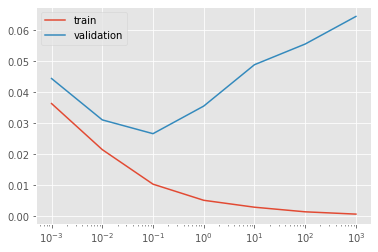

In [161]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

X_train = np.array([[ 0.,  0.,  7., 15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12., 16.,
        12.,  0.,  0.,  0.,  1.,  7.,  0., 16., 10.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 10., 13.,  1.,  5.,  1.,  0.,  0.,  0., 12., 12.,
        13., 15.,  3.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 15.,  6.,  0.,
         0.,  0.,  0., 12., 16., 12., 15.,  6.,  0.,  0.,  0.,  7., 16.,
        10., 13., 14.,  0.,  0.,  0.,  0.,  9., 13., 11.,  6.,  0.],
       [ 0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        11., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  4.,  0.,
         0.,  0.,  0., 11., 11.,  5., 13.,  0.,  0.,  0.,  0.,  6., 13.,
         7., 15.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16.,  7.,  0.,  0.,  0.,  7., 13.,  8.,
        16.,  5.,  0.,  0.,  0.,  0.,  1.,  1., 16.,  4.,  0.,  0.,  0.,
         2.,  7., 13., 16., 15.,  0.,  0.,  1., 15., 16., 16., 12.,  3.,
         0.,  0.,  1.,  8.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,
         1.,  0.,  0.,  0.,  0., 11., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0.,
         0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  4., 12., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 14., 10.,  7.,
        13.,  0.,  0.,  0.,  4., 13.,  0.,  0., 12.,  3.,  0.,  0.,  5.,
        11.,  0.,  0.,  7.,  6.,  0.,  0.,  4., 11.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 12.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 12.,  8.,
         2., 14.,  2.,  0.,  0.,  0.,  4., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
        13.,  2.,  0.,  0.,  0.,  4., 16.,  3., 14.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  5., 14., 16.,  6.,  0.,
         0.,  0.,  3., 15.,  4.,  1., 13.,  4.,  0.,  0.,  2., 14., 11.,
         5.,  5., 12.,  0.,  0.,  0.,  0.,  6., 10., 15., 15.,  0.],
       [ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1.,
         6.,  9.,  0.,  0.,  3., 16.,  3.,  6., 15.,  5.,  0.,  0.,  7.,
        15.,  1., 14.,  9.,  5.,  0.,  0., 10., 13.,  9., 16., 15.,  7.,
         0.,  0.,  7., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  3., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  6., 16., 13.,  3.,
        15.,  1.,  0.,  0., 11.,  8.,  5.,  5., 10.,  0.,  0.,  0.,  4.,
        11.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 14., 10.,  0.,  0.,  0.,  1., 15.,  9.,  9.,
        16.,  1.,  0.,  0.,  7.,  9.,  0.,  9., 12.,  0.,  0.,  0.,  7.,
         7.,  3., 15., 15.,  0.,  0.,  0.,  2., 15., 15.,  7., 16.,  1.,
         0.,  0.,  0.,  1.,  2.,  0.,  9.,  4.,  0.,  0.,  0.,  5., 13.,
         4.,  8.,  9.,  0.,  0.,  0.,  1., 10., 15., 16.,  6.,  0.],
       [ 0.,  1.,  8., 16., 16., 16., 10.,  0.,  0.,  8., 16., 14.,  8.,
         5.,  1.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,
         0.,  0.,  1.,  3., 12.,  4.,  0.,  0.,  0.,  0.,  5., 14., 15.,
         4.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  3.,  8.,  0.,  0.,  6.,
        16.,  4.,  0., 14., 12.,  0.,  0., 12., 16.,  4., 11., 16.,  5.,
         0.,  0.,  9., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  6., 11.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  3., 14., 16., 13.,
         0.,  0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 11.,
        14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.],
       [ 0.,  2., 14., 16.,  6.,  0.,  0.,  0.,  0., 12., 14., 12., 15.,
         0.,  0.,  0.,  0., 11.,  2.,  8., 12.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 14., 13.,
         8.,  8.,  7.,  0.,  0.,  2., 15., 16., 16., 15.,  8.,  0.],
       [ 0.,  2., 12., 13., 16., 16.,  4.,  0.,  0., 11., 16., 13.,  7.,
         4.,  1.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  3.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 14.,  0.,  0.,  0.,  3., 15., 16., 15.,
        14.,  0.,  0.,  0.,  3., 12.,  1., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  2.,  5., 13.,  8.,  0.,  0.,  0.,  2., 11.,
        11., 15.,  5.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.],
       [ 0.,  4., 13., 16., 16., 15.,  3.,  0.,  0., 10., 12.,  7.,  8.,
        16.,  8.,  0.,  0.,  0.,  0.,  1., 12., 15.,  2.,  0.,  0.,  0.,
         0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  5.,  7.,  4.,
        15., 13.,  0.,  0.,  0.,  5., 16., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  9., 16., 13.,  6.,  0.,  0.,  0.,  0.,  6.,  5., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  4.,  8.,
        11., 15., 12.,  0.,  0.,  0., 11., 14., 12.,  8.,  0.,  0.],
       [ 0.,  4.,  7., 13., 16., 16.,  4.,  0.,  0., 11., 16., 14.,  9.,
         2.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  3., 14.,
        16.,  3.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 15., 11.,  7.,  0.,  0.,  0.,  5., 16., 16.,
        16., 11.,  0.,  0.,  0.,  6., 16., 16., 16.,  6.,  0.,  0.,  0.,
        12., 16., 16., 12.,  0.,  0.,  0.,  2., 16., 16., 16.,  6.,  0.,
         0.,  0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  3., 12., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  1., 16., 14.,  6.,
        13.,  1.,  0.,  0.,  9., 14.,  2.,  0., 16.,  4.,  0.,  0.,  5.,
        13.,  0.,  6., 16.,  1.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,
         0.,  0.,  0.,  5., 14.,  3., 13.,  4.,  0.,  0.,  0.,  3., 15.,
         7., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 16., 13., 12., 14.,  1.,  0.,  0., 14.,  4.,  4.,
        15.,  4.,  0.,  0.,  1.,  7.,  0., 10.,  7.,  0.,  0.,  0.,  0.,
         0.,  2., 13.,  1.,  0.,  0.,  0.,  2.,  9., 14., 16., 12.,  0.,
         0.,  0.,  4.,  6., 15.,  2.,  4.,  1.,  0.,  0.,  0.,  6.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        10., 12.,  0.,  2.,  0.,  0.,  0.,  0., 13., 14., 16., 14.,  0.,
         0.,  0.,  0., 11., 16., 14., 13.,  6.,  0.,  0.,  0.,  5., 13.,
         9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 12.,  1.,  0.],
       [ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  1., 13., 15.,  8.,
        16.,  3.,  0.,  0.,  8., 15.,  3.,  4., 15.,  0.,  0.,  0.,  1.,
         3.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 11.,  8.,  0.,  4.,  0.,  0.,  0.,  1., 16.,
         8., 13.,  9.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.],
       [ 0.,  1., 10., 15., 16., 13.,  3.,  0.,  0.,  5., 14.,  5.,  5.,
        15.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  2.,  3.,
        13., 12.,  0.,  0.,  0.,  0., 15., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
         0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
         9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.],
       [ 0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 12., 14.,
         2.,  0.,  0.,  0.,  0., 12.,  0., 12.,  6.,  0.,  0.,  0.,  0.,
         6.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         8.,  2.,  6.,  3.,  0.,  0.,  4.,  8., 10., 16., 12.,  1.],
       [ 0.,  0.,  7., 12., 15.,  6.,  0.,  0.,  0., 14., 16., 15.,  6.,
         0.,  0.,  0.,  0., 16., 16., 13.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13.,
        15.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0.,  8., 11.,  8., 16.,
         0.,  0.,  0.,  0.,  3.,  1.,  7., 13.,  0.,  0.,  0.,  0.,  0.,
         0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,
         0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,
         6.,  5.,  2.,  0.,  0.,  1., 16., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  3.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 15.,  3.,
         0.,  0.,  0., 16.,  2.,  0.,  8., 12.,  0.,  0.,  0., 11., 12.,
         5., 11., 12.,  0.,  0.,  0.,  1.,  8., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  3.,
         7.,  1.,  0.,  0.,  1., 16.,  6.,  5., 16.,  3.,  0.,  0.,  7.,
        13.,  0., 14., 11.,  3.,  0.,  0., 12., 13.,  5., 16., 16.,  9.,
         0.,  0., 13., 16., 16., 15.,  6.,  0.,  0.,  0.,  0.,  3., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 15., 12.,
         4.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  6.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,
         0.,  0.,  0.,  0.,  1.,  7., 14., 12.,  0.,  0.,  0.,  0.,  6.,
        13., 16., 10.,  0.,  0.,  0., 12., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3.,
         0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
        11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9.,
         0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  7.,  1.,  0.,  0., 10., 13.,  1.,  6., 16.,  5.,  0.,  6.,
        16., 11.,  8., 14., 15.,  0.,  0., 13., 16., 16., 16., 16.,  9.,
         0.,  0.,  2.,  2.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 14., 15.,  7.,  0.,  0.,  0.,  3., 15.,  6.,  2.,
        14.,  3.,  0.,  0.,  4., 13.,  0.,  1., 16.,  4.,  0.,  0.,  0.,
        10., 11.,  9., 16.,  6.,  0.,  0.,  0.,  1.,  8., 10., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  1., 12.,  5.,
         0., 10., 11.,  0.,  0.,  0.,  7., 13., 16., 16.,  4.,  0.],
       [ 0.,  0.,  2., 13., 16., 14.,  1.,  0.,  0.,  0., 11., 12.,  7.,
        16.,  3.,  0.,  0.,  0.,  9.,  3.,  2., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  2., 11., 15., 13.,  3.,
         0.,  0.,  0.,  4., 15., 16., 13.,  3.,  0.,  0.,  0.,  0., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  1., 16., 10., 16.,
         9.,  0.,  0.,  0.,  2.,  6.,  2., 16., 16.,  1.,  0.,  0.,  3.,
         9.,  9., 16., 14.,  0.,  0.,  0.,  0.,  7.,  5., 12.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  4.,  0.,  0.,  0.,  9., 13., 12., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  9., 16., 13.,
         2.,  0.,  0.,  0., 14., 16., 14.,  8.,  0.,  0.,  0.,  1., 15.,
        15.,  5., 16.,  9.,  0.,  0.,  0.,  5., 16., 16., 16.,  8.,  0.,
         0.,  0.,  0.,  2., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 15.,  7.,  0.,  0.,  0.,  0., 14., 15.,  7.,
        15.,  2.,  0.,  0.,  4., 16.,  3.,  0., 11.,  4.,  0.,  0.,  4.,
        14.,  0.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  0.,  0.,  6.,  7.,
         0.,  0.,  4., 16.,  1.,  0., 12.,  4.,  0.,  0.,  1., 14., 12.,
        10., 16.,  1.,  0.,  0.,  0.,  1., 14., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         0.,  0.,  0.,  0., 10.,  8.,  1., 14.,  0.,  0.,  0.,  0.,  8.,
        11.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        10.,  7.,  5.,  2.,  0.,  0.,  2., 14., 14., 12., 14.,  7.],
       [ 0.,  0.,  2., 12.,  8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  5.,
         0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5., 10., 10.,  4.,
         0.,  0.,  0., 16., 14.,  8.,  6., 13.,  0.,  0.,  0., 13.,  9.,
         2.,  4., 14.,  0.,  0.,  0.,  3., 10., 16., 16.,  7.,  0.],
       [ 0.,  1., 11., 15., 13.,  2.,  0.,  0.,  0.,  8., 13.,  5., 14.,
         9.,  0.,  0.,  0.,  3., 15.,  1., 10., 12.,  0.,  0.,  0.,  0.,
         7., 15., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  2.,  8.,  4.,
         5., 16.,  7.,  0.,  0.,  1., 15., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0., 14., 16., 14.,  6.,  0.,  0.,  0.,  0.,  7., 10., 16.,
        16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  1.,  0.,  0.,  0.,
         0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  5.,  9.,
        14., 16.,  7.,  0.,  0.,  0., 13., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        13., 13.,  8.,  5.,  0.,  0.,  0.,  2., 16., 14., 12., 16.,  3.,
         0.,  0.,  1., 16., 11.,  0.,  5., 12.,  0.,  0.,  0., 11., 15.,
         5., 12., 12.,  0.,  0.,  0.,  0.,  9., 15., 14.,  6.,  0.],
       [ 0.,  0.,  3.,  8., 12., 15., 16.,  2.,  0.,  0., 12., 14., 10.,
        13., 15.,  0.,  0.,  0.,  1.,  1.,  2., 14.,  6.,  0.,  0.,  0.,
         2.,  8., 13., 16.,  8.,  0.,  0.,  0.,  9., 16., 16., 10.,  5.,
         0.,  0.,  0.,  1.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 16.,  4.,  0.,  0.,  0.,  7., 16.,  8., 14.,
        11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  1.,  5.,  0.,  0., 14.,  9.,  0.,  0.,  4., 16., 10.,
        11., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 11., 10.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14., 12., 12.,  7.,  0.,
         0.,  0.,  0., 16., 12.,  5., 11., 10.,  0.,  0.,  0., 10., 11.,
         4., 10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0., 13.,  5.,  0.,  0.,
        13.,  8.,  0.,  9., 14.,  0.,  0.,  4., 16., 16., 12., 16.,  4.,
         0.,  0.,  4., 12., 12., 15., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,
         6., 16., 16., 16., 13.,  0.,  0.,  0., 11., 16., 16.,  5.,  1.,
         0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  7., 13.,  4., 14.,
         7.,  0.,  0.,  0.,  7., 13.,  2.,  7.,  8.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  5.,  0.,  0.,  0.,  1., 12., 13., 15.,  6.,  0.,
         0.,  0.,  3., 16.,  2.,  4., 13.,  6.,  0.,  0.,  4., 16.,  4.,
         1., 11., 12.,  0.,  0.,  0.,  7., 15., 16., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0., 11., 13.,
         4.,  0.,  0.,  0.,  0.,  6., 14.,  4., 16.,  1.,  0.,  0.,  2.,
        14.,  3.,  6., 14.,  0.,  0.,  0.,  6., 16., 11., 12., 12.,  0.,
         0.,  0.,  2.,  7., 14., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16.,
        15.,  2.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.,  0.,  4.,
        16., 16., 16., 13.,  0.,  0.,  0.,  4.,  7.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.],
       [ 0.,  0., 13., 14.,  8.,  1.,  0.,  0.,  0.,  1., 16., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,
         0.,  0.,  1., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         4.,  4.,  0.,  0.,  0.,  1., 13., 14., 12., 12.,  0.,  0.],
       [ 0.,  0.,  2., 16., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,
         0.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12.,
        16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.],
       [ 0.,  0.,  0.,  9., 13.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12.,
        15.,  2.,  0.,  0.,  0., 12.,  8.,  0., 15.,  4.,  0.,  0.,  3.,
        13.,  0.,  0., 10.,  7.,  0.,  0.,  8.,  9.,  0.,  0., 13.,  7.,
         0.,  0.,  2., 16.,  4.,  7., 16.,  5.,  0.,  0.,  0., 14., 14.,
        16., 15.,  1.,  0.,  0.,  0.,  1., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  5.,  0.,  0.,  0.,  1., 15., 11., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,
         3.,  8., 14., 12.,  5.,  0.,  0.,  0., 14., 16., 16., 10.,  5.,
         0.,  0.,  0.,  2.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         8.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13., 10.,  0.,  0.,  0.,  0., 10., 13.,  5.,
        13.,  0.,  0.,  0.,  7., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  6.,
         6.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  5.,  9.,
         1.,  2., 12.,  0.,  0.,  0.,  0.,  9., 15., 16.,  9.,  0.],
       [ 0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  0., 11., 10.,  7.,
        14.,  2.,  0.,  0.,  0., 11.,  1.,  0.,  8.,  4.,  0.,  0.,  2.,
        14.,  2.,  0.,  5.,  7.,  0.,  0.,  8.,  9.,  0.,  0.,  6.,  8.,
         0.,  0.,  3., 13.,  0.,  0., 12.,  7.,  0.,  0.,  0., 15.,  6.,
        11., 12.,  0.,  0.,  0.,  0.,  4., 15., 11.,  1.,  0.,  0.],
       [ 0.,  1.,  5., 12., 16., 14.,  2.,  0.,  0.,  8., 16., 16., 16.,
        16.,  3.,  0.,  0.,  6.,  9.,  2., 12., 12.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  1., 11.,
        15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 15., 13.,  0.,  0.,  0.,  0.,  5., 14.,  7., 13.,
         2.,  0.,  0.,  0., 12., 10.,  1., 13.,  0.,  0.,  0.,  0.,  4.,
         7.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,
         0.,  0.,  0.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,
         0.,  6.,  5.,  0.,  0.,  0., 11., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  0.,  9., 15., 16.,  9.,  0.,  0.,  0., 10., 13.,  4.,
        12.,  7.,  0.,  0.,  5., 14.,  1.,  2., 15.,  3.,  0.,  0.,  4.,
        14., 12., 16., 15.,  0.,  0.,  0.,  0.,  1.,  1., 13.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         1.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 12.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  4.,  2.,
         0.,  0.,  9., 16., 16., 16., 16., 11.,  0.,  0.,  3.,  8.,  8.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 13., 14., 15., 13.,  0.,  0.,  0., 16., 13., 12.,
        12.,  5.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  7.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0., 12.,  8.,
        12., 10.,  0.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  4.,  0.,  0.,  0.,  0.,  0., 15., 14., 14.,
         5.,  0.,  0.,  0.,  0., 12.,  7.,  8., 16.,  1.,  0.,  0.,  0.,
         4., 13., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  2.,  7.,
         8., 16.,  4.,  0.,  0.,  0.,  6., 12., 13., 10.,  0.,  0.],
       [ 0.,  0.,  9., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14.,  7., 11.,
         3.,  0.,  0.,  0.,  4.,  7.,  8.,  5.,  8.,  0.,  0.,  0.,  8.,
        10., 15., 14.,  9.,  0.,  0.,  0.,  0.,  4.,  7.,  9., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  0.,
         2., 12.,  6.,  0.,  0.,  0., 10., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 14., 13.,  6., 11.,  0.,  0.,  0.,  6.,
        16.,  3., 13., 13.,  2.,  0.,  0., 14., 16.,  8., 15., 16., 10.,
         0.,  0., 12., 16., 16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 11.,
         3.,  5.,  0.,  0.,  0., 14.,  5.,  7., 10.,  7.,  0.,  0.,  0.,
         4., 13., 12., 11.,  0.,  0.,  0.,  0.,  2., 14., 12.,  0.,  0.,
         0.,  0.,  1., 14.,  7., 12.,  4.,  0.,  0.,  0.,  7., 10.,  0.,
         3., 12.,  0.,  0.,  0.,  1., 10., 11., 12., 10.,  0.,  0.],
       [ 0.,  1., 12., 15.,  5.,  0.,  0.,  0.,  0.,  4., 15.,  8., 15.,
         3.,  0.,  0.,  0.,  0.,  3.,  1., 14.,  4.,  0.,  0.,  0.,  0.,
         4., 14., 16.,  1.,  0.,  0.,  0.,  0.,  1., 10., 14., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  4.,  8.,  4.,
        10., 16.,  4.,  0.,  0.,  2., 12., 16., 13.,  6.,  0.,  0.],
       [ 0.,  2., 13., 15., 10.,  4.,  0.,  0.,  0.,  0.,  5.,  4., 13.,
        15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,
         0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  1.,  6.,  8.,
        14., 12.,  0.,  0.,  0.,  2., 12., 14., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 10., 15., 10.,  0.,  0.,  0.,  1., 13., 11.,  8.,
        12.,  0.,  0.,  0.,  2.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0., 13.,  7.,
         0.,  2., 16.,  0.,  0.,  0.,  2., 11., 15., 16., 12.,  0.],
       [ 0.,  0., 10., 16., 14.,  5.,  0.,  0.,  0.,  2., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  3.,  0.,  0.,  0.,  0., 14., 14., 13., 11.,  0.,
         0.,  0.,  5., 16.,  1.,  6., 15.,  0.,  0.,  0.,  7., 14.,  9.,
        13., 15.,  1.,  0.,  0.,  1., 11., 16., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  8.,
         0.,  1.,  0.,  0.,  0.,  8., 14.,  0.,  9., 11.,  0.,  0.,  1.,
        15.,  6.,  1., 14., 10.,  0.,  0.,  8., 15.,  0.,  8., 16.,  1.,
         0.,  0., 10., 15.,  9., 15., 15.,  0.,  0.,  0.,  5., 15., 14.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 14., 14.,  2.,  0.,  0.,  1., 13., 16., 16.,
        16.,  5.,  0.,  0.,  7., 16., 10., 10., 16.,  4.,  0.,  0.,  3.,
        16., 14., 15., 12.,  0.,  0.,  0.,  0.,  3., 12., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0., 15.,
        16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,
        12.,  0.,  0.,  0.,  0.,  7., 13.,  6., 13.,  0.,  0.,  0.,  2.,
        16.,  3., 10., 11.,  0.,  0.,  0.,  6., 16., 13., 16., 16.,  5.,
         0.,  0.,  2.,  8.,  9., 16., 11.,  2.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  8.,  9.,  9.,  0.,  0.,  0.,  6., 16., 12.,  8.,
         5.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,  8., 13., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0.,  5.,  2.,
         4., 13.,  8.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  1., 16.,
        10.,  8.,  0.,  0.,  0., 15.,  6., 16.,  8.,  0.,  0.,  0.,  0.,
         3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  6.,  9., 11.,  2.,  0.,  0.,  0.,  0., 12.,  1.,
        13.,  0.,  0.,  0.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  4., 14.,  8., 13.,
        14.,  0.,  0.,  0.,  8., 11.,  3., 15.,  6.,  0.,  0.,  0.,  1.,
         1.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  9.,  8.,
         2.,  6., 11.,  0.,  0.,  0.,  4., 10., 14., 16., 10.,  0.],
       [ 0.,  0.,  8., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 13., 14.,
        11.,  0.,  0.,  0.,  0., 10., 13.,  8., 16.,  2.,  0.,  0.,  0.,
         4., 15., 15., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  8., 11., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  1.,  2.,
         2.,  7., 16.,  5.,  0.,  0.,  3., 14., 16., 16., 11.,  1.],
       [ 0.,  1.,  8.,  8.,  9., 13.,  8.,  0.,  0.,  2., 16., 16., 16.,
        14.,  9.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 15.,  1.,  0.,  0.,  0.,  5., 10.,  8., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0., 15., 12.,
        16.,  2.,  0.,  0.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        11.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  2.,
        14., 12., 16.,  5.,  0.,  0.,  0., 10., 16., 14., 16., 16., 11.,
         0.,  0.,  5., 12., 13., 16.,  8.,  3.,  0.,  0.,  0.,  0.,  2.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 13., 16., 16.,  4.,  0.,  0.,  2., 12.,  5.,  4.,
        14.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 13., 12.,  5.,  0.,  0.,  0.,  0., 13., 14., 12.,  8.,
         0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,
         4.,  4., 12., 15.,  5.,  0.,  0.,  1., 15., 16., 16.,  9.,  4.,
         0.,  0.,  0.,  2., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  9., 12.,  0.,  0.,  1.,
        14.,  8.,  0., 15., 13.,  0.,  0., 11., 16., 10.,  8., 16., 10.,
         0.,  3., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  2.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  4., 12., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 16.,
        16.,  3.,  0.,  0.,  3., 16., 14.,  2., 16.,  7.,  0.,  0.,  8.,
        16.,  7.,  0., 16.,  6.,  0.,  0.,  4., 16.,  4.,  3., 16.,  4.,
         0.,  0.,  4., 16.,  5., 10., 14.,  0.,  0.,  0.,  0., 14., 16.,
        16., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.,  0., 12., 12.,
        16., 16., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 12.,  5.],
       [ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 13.,  7.,  8.,
        16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16., 11.,  0.,  0.,  3., 15., 12., 15.,  4.,  2.,
         0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0., 12., 16., 11., 16.,
        13.,  0.,  0.,  0., 15., 16., 16., 14.,  5.,  0.,  0.,  0.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  9.,
         8.,  8.,  0.,  0.,  0.,  0., 12.,  8., 11.,  6.,  0.,  0.,  0.,
         0.,  7., 14., 11.,  1.,  0.,  0.,  1.,  8., 12., 15.,  5.,  0.,
         0.,  0.,  6., 14.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  7., 12.,
         1., 15.,  2.,  0.,  0.,  0.,  0.,  3., 13., 15.,  2.,  0.],
       [ 0.,  0.,  0., 16., 11.,  1.,  0.,  0.,  0.,  0., 13., 16., 10.,
         9.,  0.,  0.,  0.,  2., 16., 11.,  1., 14.,  2.,  0.,  0.,  3.,
        16.,  1.,  0.,  8.,  7.,  0.,  0.,  4., 13.,  0.,  0.,  8.,  9.,
         0.,  0.,  3., 16.,  1.,  0., 10.,  9.,  0.,  0.,  0., 10.,  8.,
         3., 16.,  4.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.],
       [ 0.,  0.,  2., 10., 16., 11.,  1.,  0.,  0.,  0., 13., 13., 10.,
        16.,  8.,  0.,  0.,  4., 14.,  1.,  8., 14.,  1.,  0.,  0.,  4.,
        15., 12., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  7., 14.,  5.,  0.,
         0.,  0.,  1.,  2.,  0., 12.,  5.,  0.,  0.,  0.,  8., 15.,  6.,
        13.,  4.,  0.,  0.,  0.,  0.,  5., 11., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  3.,  0.,  0.,  0.,  0.,  0., 13., 14.,  2.,
         0.,  0.,  0.,  0.,  3., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  5.,  3.,  0.,  0.,  0.,  4., 10., 16., 16., 16.,  4.,
         0.,  0.,  6., 16.,  4.,  0.,  8.,  9.,  0.,  0.,  0., 15., 12.,
         4.,  9., 12.,  0.,  0.,  0.,  2., 13., 16., 14.,  4.,  0.],
       [ 0.,  0.,  6., 16., 16.,  8.,  0.,  0.,  0.,  2., 16.,  8.,  9.,
        16.,  3.,  0.,  0.,  8., 16.,  1.,  0.,  9.,  9.,  0.,  0.,  9.,
        12.,  0.,  0.,  8., 12.,  0.,  0., 10., 12.,  0.,  0.,  8., 10.,
         0.,  0.,  8., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  2., 16.,  8.,
         6., 15.,  3.,  0.,  0.,  0.,  8., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0., 10., 13.,  9.,  1.,  0.,  0.,  0.,  2., 16.,  7., 10.,
         8.,  0.,  0.,  0.,  0., 12., 12.,  7., 11.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  5.,  8., 12., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  0.,  0.,  0., 11., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 16.,  9., 15.,
         9.,  0.,  0.,  0.,  2., 14.,  1., 10., 12.,  0.,  0.,  0.,  0.,
         9., 14., 16., 11.,  0.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0.,
         0.,  0.,  0., 12., 10.,  3., 13.,  1.,  0.,  0.,  0., 11.,  8.,
         5., 16.,  3.,  0.,  0.,  0.,  4., 10.,  8.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0., 10., 16., 16.,
         0.,  0.,  0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  2.,  0.,  0.,  0.,  0., 13.,  6., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,
         0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,
         0.,  0.,  3.,  7.,  0.,  2., 15.,  1.,  0.,  0.,  2., 15.,  6.,
         6., 16.,  1.,  0.,  0.,  0.,  4., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  1.,  8., 15., 16.,
        16.,  9.,  0.,  0., 10., 16., 13., 11., 16.,  8.,  0.,  0.,  1.,
         4.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  6.,  4.,  0.,  0.,  0.,  5.,
        16.,  3., 13.,  8.,  1.,  0.,  0., 14., 16.,  9., 16., 16.,  9.,
         0.,  0., 12., 16., 16., 16., 11.,  3.,  0.,  0.,  0.,  4., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 12., 10.,  3.,  0.,  0.,  0.,  5., 16., 15., 14., 16.,  1.,
         0.,  0.,  3., 16., 12.,  0., 15.,  8.,  0.,  0.,  0., 11., 16.,
         9., 16.,  8.,  0.,  0.,  0.,  0., 11., 15., 11.,  1.,  0.],
       [ 0.,  0.,  9., 14., 16., 13.,  2.,  0.,  0.,  0., 13.,  8.,  2.,
         6.,  4.,  0.,  0.,  0., 16.,  2.,  9.,  8.,  0.,  0.,  0.,  3.,
        15., 15., 11., 14.,  4.,  0.,  0.,  5., 16.,  6.,  0., 12.,  2.,
         0.,  0.,  5.,  7.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  7.,
        13.,  6.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,
        10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  6., 12.,
        16., 15.,  8.,  5.,  0.,  0.,  4., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  2., 16., 14., 14.,
        11.,  0.,  0.,  0.,  8., 15.,  1.,  8., 16.,  0.,  0.,  0.,  3.,
        15.,  5., 11., 16.,  5.,  0.,  0.,  0., 11., 16., 15., 14.,  8.,
         0.,  0.,  0.,  4.,  2.,  3.,  6., 12.,  0.,  0.,  2., 16., 13.,
        10., 14., 12.,  0.,  0.,  0.,  8., 12., 13., 13.,  5.,  0.],
       [ 0.,  0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 14., 16.,
         7.,  0.,  0.,  0.,  4., 16.,  8.,  5., 16.,  1.,  0.,  0.,  5.,
        12.,  0.,  0., 12.,  8.,  0.,  0.,  8.,  9.,  0.,  0., 12.,  8.,
         0.,  0.,  5., 12.,  0.,  1., 15.,  3.,  0.,  0.,  4., 13.,  4.,
        12., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  9.,  9., 12., 12.,  0.,  0.,  0.,  0., 14., 10.,  8.,
         3.,  0.,  0.,  0.,  0., 13.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 15., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  5.,  1.,
         2., 11.,  8.,  0.,  0.,  0., 10., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  4., 16.,  9., 14.,
         3.,  0.,  0.,  0.,  2., 14.,  0., 13.,  6.,  0.,  0.,  0.,  0.,
         2.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  9., 16.,
        16., 16., 15.,  0.,  0.,  0.,  6., 15.,  7.,  4.,  6.,  1.],
       [ 0.,  0., 10., 12., 13., 16.,  2.,  0.,  0.,  4., 15.,  6.,  4.,
         4.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  2., 11.,  3.,  3., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  4.,  1.,
         9., 10.,  0.,  0.,  0.,  0., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16., 15.,
         4.,  0.,  0.,  0.,  2., 16.,  9., 10., 11.,  0.,  0.,  0.,  6.,
        12.,  0.,  0., 12.,  3.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  6., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  1., 16., 13.,
        15., 16.,  3.,  0.,  0.,  0.,  6., 15.,  9.,  3.,  0.,  0.],
       [ 0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  2., 16., 11., 16.,
         4.,  0.,  0.,  0.,  0., 14.,  9., 15.,  9.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16.,
        15.,  8., 11.,  5.,  0.,  0.,  9., 12., 13., 16., 16., 11.],
       [ 0.,  0., 15., 16., 12.,  5.,  0.,  0.,  0.,  1., 16., 15., 11.,
         7.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 14., 12.,  7.,  0.,  0.,  0.,  7., 16., 14., 10., 16.,  3.,
         0.,  0.,  0.,  1.,  0., 10., 16.,  4.,  0.,  0.,  0.,  1., 10.,
        16., 10.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  1.,  0.,  0.,  0.,  1.,
        15.,  8.,  1., 13., 11.,  0.,  0.,  9., 16.,  7., 12., 16.,  4.,
         0.,  0.,  5., 13., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.],
       [ 0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
         2., 11., 13.,  3.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  7.,
         0.,  0.,  0.,  3., 16.,  4.,  5.,  1.,  0.,  0.,  0.,  7., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0.,  7., 15., 14., 11.,
         0.,  0.,  0.,  0.,  8., 13., 10., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  8.,  4.,  0.,  0.,  0.,  0., 13., 16.,
        16., 16.,  9.,  0.,  0.,  2., 16., 13., 11.,  9.,  3.,  0.],
       [ 0.,  1., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12., 14.,
         0.,  0.,  0.,  0.,  8.,  8.,  6., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 10., 10.,  5.,  0.,  0.,  1., 13., 16.,
        16., 16., 11.,  0.,  0.,  3., 16., 12.,  8.,  5.,  1.,  0.],
       [ 0.,  0.,  3., 13., 13.,  1.,  0.,  0.,  0.,  0., 10., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  5.,  3., 15., 10.,  0.,  0.,  0.,  0.,
         0.,  0., 16., 15.,  1.,  0.,  0.,  2.,  7.,  0.,  4., 16.,  8.,
         0.,  0.,  5., 13.,  0.,  0., 14.,  9.,  0.,  0.,  0., 14., 11.,
         9., 16.,  8.,  0.,  0.,  0.,  3., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  7.,
         0.,  0.,  0.,  0.,  0., 13.,  1., 12.,  0.,  0.,  0.,  0.,  2.,
        10.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  0., 16.,  1.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        15.,  9.,  8.,  2.,  0.,  0.,  3., 11.,  8., 13., 12.,  4.],
       [ 0.,  0.,  0.,  4., 11.,  9.,  5.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  5.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  1., 14., 16.,  9.,  0.,  0.,
         0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 11.,  8.,  7.,  0.,  0.,  0.,  3., 16., 11.,  9.,
        16.,  4.,  0.,  0.,  0., 14.,  3.,  7., 15.,  0.,  0.,  0.,  0.,
         5., 15., 15.,  3.,  0.,  0.,  0.,  0., 10., 15., 14.,  1.,  0.,
         0.,  0.,  4., 13.,  0.,  9.,  7.,  0.,  0.,  0.,  3., 11.,  5.,
        13.,  7.,  0.,  0.,  0.,  0.,  6., 10.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         6.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.,  0.,  0.,  6.,
        15.,  2., 15.,  2.,  1.,  0.,  0.,  9., 16., 16., 16., 16., 11.,
         0.,  0.,  5., 10., 12., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  1.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 13.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
         3.,  0.,  0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  0.,
         6., 16., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  1.,  2.,  3.,
         7., 14., 10.,  0.,  0.,  2., 12., 16., 14., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16., 11.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15., 13.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,  7.,  0.,
         0.,  0.,  4., 16., 14.,  8., 13.,  7.,  0.,  0.,  0., 12., 16.,
         5., 12., 10.,  0.,  0.,  0.,  0.,  8., 14., 13.,  5.,  0.],
       [ 0.,  0., 10., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 14., 16.,
         2.,  0.,  0.,  0.,  3., 15.,  8., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 10., 15.,  2.,
         0.,  0.,  0., 10.,  0.,  0., 14.,  8.,  0.,  0.,  1., 16.,  6.,
         8., 13.,  8.,  0.,  0.,  1., 15., 16., 13., 10.,  1.,  0.],
       [ 0.,  0.,  3., 11., 16., 16.,  4.,  0.,  0.,  0.,  9., 12., 12.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,
         0.,  9., 14., 16.,  9.,  0.,  0.,  0.,  1., 16., 16., 14.,  5.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         2.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  2.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  3., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,
         1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  1.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 16., 14.,  0.,  0.,  0.,  3., 14., 13.,
        15., 13.,  0.,  0.,  4., 16., 15., 13., 16.,  4.,  0.,  0.,  3.,
        16., 16., 16., 16.,  3.,  0.,  0.,  0.,  7.,  7., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.],
       [ 0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  1., 14., 13., 15.,
         4.,  0.,  0.,  0.,  5., 14.,  2., 15.,  0.,  0.,  0.,  0.,  6.,
        14.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0.,
         0.,  0.,  0.,  1., 15., 10., 13.,  1.,  0.,  0.,  0.,  4., 13.,
         4., 13.,  6.,  0.,  0.,  0.,  0., 11., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  8.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
        15.,  0.,  0.,  0.,  0.,  4., 12.,  8., 11.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0.,
         0.,  0.,  2., 16.,  7.,  9., 11.,  0.,  0.,  0.,  0.,  9., 12.,
         1., 14.,  6.,  0.,  0.,  0.,  0.,  6., 15., 15., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  0.,  0.,  0.,  0.,
         0., 10., 16., 15.,  0.,  0.,  0.,  0., 12., 16., 16., 11.,  0.,
         0.,  0.,  5., 16.,  6., 15., 12.,  0.,  0.,  0.,  0.,  1.,  0.,
        12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.],
       [ 0.,  0.,  8., 15., 14.,  7.,  0.,  0.,  0.,  0., 12., 16., 14.,
        16.,  0.,  0.,  0.,  0.,  3., 15., 14., 14.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  5., 14., 14.,  4.,  0.,
         0.,  0.,  0., 12.,  6.,  8.,  8.,  0.,  0.,  0.,  1., 16.,  2.,
         9.,  7.,  0.,  0.,  0.,  0.,  9., 16., 11.,  1.,  0.,  0.],
       [ 0.,  6., 16., 16., 16., 15., 10.,  0.,  0.,  9., 16., 13.,  8.,
         6.,  5.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  3.,  0.,  0.,
         0.,  0.,  0.,  3., 16., 13.,  0.,  0.,  0.,  0.,  1.,  5., 16.,
         9.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  7., 13., 10.,  0.,  0.,  0.,  2., 13., 14., 14.,
        16.,  4.,  0.,  0.,  4., 16.,  5., 12., 16.,  2.,  0.,  0.,  0.,
         6., 11., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,
         0.,  0.,  1.,  1.,  0.,  0., 13., 11.,  0.,  0.,  0., 12.,  8.,
         4., 13.,  8.,  0.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.],
       [ 0.,  0.,  3., 16., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  0.,
         9., 16., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 14., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  4., 10., 15., 16.,  4.,  0.,  0.,  0., 13., 14.,  9.,
        16.,  3.,  0.,  0.,  0.,  2.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         3.,  4., 13., 14.,  2.,  0.,  0.,  5., 16., 16., 16., 16.,  8.,
         0.,  0.,  4.,  9., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16.,
        11.,  0.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  2.,  0.,
         0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 13., 15.,  1.,  0.,  0.,  0.,  4., 15., 14., 15.,
        10.,  0.,  0.,  0., 13., 13.,  2., 13.,  9.,  0.,  0.,  0., 14.,
        10.,  0., 15.,  9.,  0.,  0.,  0.,  1.,  1.,  2., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,
        16., 16., 16.,  6.,  0.,  0.,  2., 15., 16., 10., 12.,  4.],
       [ 0.,  0.,  1.,  6., 12., 16.,  9.,  0.,  0.,  0., 10., 15., 10.,
        13.,  9.,  0.,  0.,  0.,  2.,  1.,  0., 14.,  2.,  0.,  0.,  0.,
         0.,  6., 12., 16., 15.,  0.,  0.,  0.,  5., 16., 16., 14.,  7.,
         0.,  0.,  0.,  3.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  7., 13.,
        10.,  0.,  0.,  0.,  0., 16.,  2.,  1., 13.,  4.,  0.,  0.,  0.,
         9., 13.,  8., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  2.,  3., 16.,  0.,  0.,  0.,  0.,  1.,  6.,
        13., 10.,  0.,  0.,  0.,  0., 13.,  9.,  8.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 13., 13., 10.,  0.,  0., 12., 13., 10.,
        15., 14.,  2.,  0.,  2., 16.,  6.,  2., 14.,  6.,  0.,  0.,  1.,
         5.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 12., 16., 14.,  6.,
         0.,  0.,  0.,  8., 15., 15., 11.,  2.,  0.,  0.,  0.,  2., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  1.,  2.,  0.,  0.,  6.,
        16.,  2.,  1., 13., 10.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,
         0.,  0.,  2.,  9., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
         9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 10.,  1.,  0.,  0.,  7., 16., 16., 16.,
        16.,  7.,  0.,  0.,  0.,  5.,  2., 11., 14.,  5.,  0.,  0.,  0.,
         0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  9., 16., 13.,  2.,  0.,
         0.,  0.,  0.,  4., 11., 15., 14.,  0.,  0.,  0.,  0.,  2.,  2.,
        13., 16.,  1.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         6.,  0.,  0.,  0.,  0.,  4., 16., 12., 15.,  0.,  0.,  0.,  2.,
        13.,  8.,  9., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 16.,  6.,
         0.,  0.,  2.,  4.,  5., 14., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 13., 11.,  7.,  0.,  0.,  0.,  0., 14., 16., 13.,
        16.,  2.,  0.,  0.,  5., 16.,  4.,  0.,  5.,  7.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 14.,  1.,  0.,  8.,  6.,  0.,  0.,  0., 13., 12.,
         9., 15.,  2.,  0.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,  2., 15.,
        16.,  9.,  0.,  0.,  0.,  3., 15., 16., 16., 10.,  0.,  0.,  7.,
        16., 10.,  8., 16.,  7.,  0.,  0.,  0.,  1.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.],
       [ 0.,  0.,  7., 16., 11.,  1.,  0.,  0.,  0.,  1., 15., 12., 12.,
        12.,  0.,  0.,  0.,  2., 16.,  2.,  6., 16.,  2.,  0.,  0.,  1.,
        16.,  6.,  6., 16.,  6.,  0.,  0.,  0.,  7., 16., 15., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  3.,  3.,
         6., 16.,  5.,  0.,  0.,  0.,  8., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 12., 12.,  1.,  0.,  0.,  0.,  3., 16., 16., 14.,
         9.,  0.,  0.,  0.,  6., 15.,  9.,  3., 12.,  2.,  0.,  0.,  7.,
         9.,  0.,  0.,  9.,  7.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 10.,  0.,  0.,  7.,  9.,  0.,  0.,  0., 14., 13.,
        10., 16.,  6.,  0.,  0.,  0.,  5., 13., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 16., 16., 12.,  0.,  0.,  9., 15.,  8.,
         9., 16.,  7.,  0.,  0., 10., 10.,  0.,  6., 14.,  1.,  0.,  1.,
        16.,  5.,  1., 16.,  4.,  0.,  0.,  0.,  4.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 15.,  4.,  0.,  0.,  8., 16.,  9.,  7.,
        14., 11.,  0.,  0.,  5.,  5.,  1., 13., 15.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  3.,  4.,
         6., 16.,  4.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  4.,  7.,  0.,  0.,  5.,
        16.,  2.,  2., 13.,  9.,  0.,  0., 10., 15., 12., 15., 14.,  1.,
         0.,  0.,  6., 16.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6.,
        14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 13., 12.,  3.,  0.,  0.,  0., 11., 13.,  8.,
        16.,  7.,  0.,  0.,  0., 12.,  9.,  9., 16.,  8.,  0.,  0.,  0.,
         6., 10., 13., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,
         0.,  0.,  8.,  1.,  0.,  0., 15.,  2.,  0.,  0.,  4., 14.,  9.,
         4., 16.,  0.,  0.,  0.,  0.,  2., 12., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  4.,  0.,  0.,  2., 11., 15., 16., 16.,  7.,  0.,  0., 10.,
        16., 13., 10., 16.,  4.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.],
       [ 0.,  0.,  1., 10., 14., 13.,  1.,  0.,  0.,  0.,  8., 12.,  6.,
         4.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 13., 12.,  0.,  0.,  0.,  2., 11., 11.,  8., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         6., 15.,  2.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  1., 14., 13.,  4.,
         0.,  0.,  0.,  0.,  4., 16.,  5., 16.,  7.,  0.,  0.,  0.,  8.,
        16.,  8., 16.,  9.,  5.,  0.,  0., 10., 16., 14., 16., 16.,  9.,
         0.,  0.,  3., 11., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 14.,  2.,  0.,  0.,  0.,  5., 16., 11.,  7.,
        10.,  0.,  0.,  0.,  4., 16.,  4.,  0., 11.,  1.,  0.,  0.,  7.,
        14.,  1.,  0.,  7.,  5.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  7.,
         0.,  0.,  1., 12.,  0.,  0., 12.,  3.,  0.,  0.,  0.,  9.,  6.,
         6., 13.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 15.,  8.,  0.,  0.,  0., 12., 15., 15.,
        16., 11.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2.,  0.,  0.,  0.,
         1., 14., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 12., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
        12., 14.,  1.,  0.,  0.,  0., 10., 15., 10.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,
         0.,  2.,  1.,  0.,  2., 16.,  5.,  0.,  4., 16.,  3.,  0.,  5.,
        16.,  8., 11., 16.,  9.,  0.,  0.,  4., 15., 14., 13., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 13., 16., 10.,  0.,  0.,  0.,  4., 13.,  5.,  4.,
        16.,  0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  8.,  6.,
         3., 11.,  7.,  0.,  0.,  0.,  4., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  4., 12., 16.,  8.,  0.,  0.,  0.,  5., 16., 11., 10.,
        16.,  4.,  0.,  0.,  8., 13.,  0.,  1., 13.,  4.,  0.,  0.,  3.,
        16., 13., 15., 13.,  3.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,
         0.,  0.,  0., 14.,  7.,  5., 15.,  6.,  0.,  0.,  0., 10., 12.,
         7., 13., 10.,  0.,  0.,  0.,  3., 13., 13., 10.,  1.,  0.],
       [ 0.,  0.,  3.,  4., 10.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         3.,  0.,  0.,  0.,  8.,  7.,  0., 10.,  6.,  0.,  0.,  0.,  3.,
        11.,  8., 15., 11.,  0.,  0.,  0.,  0.,  1.,  7.,  3., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  9.,  6.,
         1.,  0., 16.,  0.,  0.,  0.,  0.,  3., 11., 16., 16.,  3.],
       [ 0.,  0.,  3., 13., 16., 16.,  5.,  0.,  0.,  4., 15., 13., 10.,
        16.,  6.,  0.,  0.,  1.,  8.,  1.,  4., 16.,  4.,  0.,  0.,  0.,
         1.,  6., 11., 16., 10.,  0.,  0.,  0., 13., 16., 16., 13.,  3.,
         0.,  0.,  0., 10.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  2.,  0.,  0.,  0.,  0., 16., 14., 11.,
        10.,  0.,  0.,  0.,  1., 16.,  9., 12., 15.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16.,  8.,  0.,  0.,  0.,  0., 10.,  6., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  1.,
         7., 16.,  8.,  0.,  0.,  0.,  6., 16., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9.,
         0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16.,  3.,  0.,  0.,  0.,  3., 16., 12., 15.,
         8.,  0.,  0.,  0.,  0.,  4.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  6.,  2.,  0.,  0.,  0.,  4., 14., 16., 16.,  8.,
         0.,  0.,  0., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 10., 11., 12., 12.,  6.,  0.,  0.,  8., 14., 11.,  8.,
         8.,  4.,  0.,  0.,  8., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 14., 15.,  4.,  0.,  0.,  0.,  2.,  2.,  0.,  6.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  1.,  8.,  4.,
        10., 10.,  0.,  0.,  0.,  2., 15., 16., 13.,  2.,  0.,  0.],
       [ 0.,  1., 11., 13., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 13.,
        10.,  0.,  0.,  0.,  8., 11.,  2., 11., 16.,  1.,  0.,  0.,  1.,
        15., 16., 16., 16.,  2.,  0.,  0.,  0.,  2.,  8.,  3.,  9.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  2., 12.,  3.,
         0.,  9., 12.,  0.,  0.,  1.,  9., 15., 16., 13.,  3.,  0.],
       [ 0.,  1., 11., 16., 15., 12.,  3.,  0.,  0.,  1., 13., 16., 16.,
        12.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  2.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0.,
         0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16.,
        13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 10.,  1.,  0.,  0.,  0.,  1., 15., 14., 15.,
        11.,  0.,  0.,  0.,  7., 14.,  1.,  4., 16.,  3.,  0.,  0.,  7.,
        13.,  0.,  0., 10., 11.,  0.,  0.,  9., 12.,  0.,  0.,  8., 12.,
         0.,  0.,  5., 14.,  0.,  0.,  7., 13.,  0.,  0.,  1., 16., 10.,
         5., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 15.,  0.,  0.],
       [ 0.,  4., 15., 16., 13.,  1.,  0.,  0.,  0.,  9., 14., 10., 16.,
         6.,  0.,  0.,  0.,  1.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,
         8.,  8., 10.,  0.,  0.,  4., 15., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  3., 12., 16., 16.,  3.,  0.,  0.,  2., 16., 16., 11.,
        16.,  4.,  0.,  0.,  8., 14.,  2., 10., 16.,  1.,  0.,  0.,  5.,
         5.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  5.,  2.,  3.,  0.,  0.,  0.,  3., 16.,
        12., 15.,  6.,  0.,  0.,  0.,  0., 15., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13., 12.,  0.,  0.,  0.,  7., 13.,  5.,  8.,
        15.,  0.,  0.,  0.,  4., 14.,  4., 13., 16.,  3.,  0.,  0.,  0.,
         6., 12.,  8.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  1.,  3.,
         2., 13.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  7., 13., 14.,  1.,  0.,  0.,  0.,  7., 15.,  9., 13.,
         7.,  0.,  0.,  0.,  5., 15.,  3.,  8.,  8.,  0.,  0.,  0.,  0.,
         1.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 15.,
         5.,  4.,  4.,  0.,  0.,  0.,  6., 16., 16., 13., 16.,  6.],
       [ 0.,  1., 13., 16., 16., 11.,  0.,  0.,  0., 10., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 14.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1.,  0., 11., 11.,  0.,  0.,  0.,  0.,  1.,  5.,
        15.,  9.,  0.,  0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.],
       [ 0.,  1., 13.,  9.,  8., 13.,  2.,  0.,  0., 10.,  7.,  0.,  0.,
        12.,  2.,  0.,  0.,  9.,  6.,  0.,  9.,  6.,  0.,  0.,  0.,  1.,
        13., 10., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,
         0.,  0.,  2., 12.,  5., 12.,  1.,  0.,  0.,  0.,  4.,  9.,  0.,
         9.,  5.,  0.,  0.,  0.,  1., 12., 11.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  9., 13., 16.,  6.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,
         3., 12., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 15.,  5.,  1.,
         0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         3.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  2.,  1.,  0.,  0.,  2.,
        14., 13.,  1., 16.,  6.,  0.,  0., 11., 16.,  6.,  8., 16.,  3.,
         0.,  1., 16., 16., 16., 16., 13.,  0.,  0.,  0.,  7., 12., 13.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14., 14.,  2.,  0.,  0.,  0.,  0.,  6., 10.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  2.,
         8., 11., 12., 16.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  9.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.],
       [ 0.,  1.,  7., 12., 13.,  3.,  0.,  0.,  0.,  7., 13.,  6., 15.,
        14.,  0.,  0.,  0.,  6., 10.,  0., 13., 16.,  0.,  0.,  0.,  1.,
        13., 13., 15., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  1., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12., 13.,
         5., 14.,  8.,  0.,  0.,  0.,  5., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  8., 16.,  3.,  0.,  1.,  0.,  0.,  0., 16., 14.,  5.,
        14., 12.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  1.,  0.,  0.,  0.,  0., 12., 16., 16.,  2.,  0.,
         0.,  0.,  0., 16., 11., 16.,  4.,  0.,  0.,  0.,  3., 16., 16.,
        16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 11., 15.,
         2.,  0.,  0.,  0., 11., 10.,  4., 16.,  2.,  0.,  0.,  0.,  2.,
         4.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,
         0.,  0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        16., 16., 13.,  1.,  0.,  3., 16., 12.,  8., 12., 11.,  1.],
       [ 0.,  0.,  2., 15., 16., 15.,  0.,  0.,  0.,  0., 12.,  9., 11.,
        12.,  0.,  0.,  0.,  5., 15.,  0., 13.,  7.,  0.,  0.,  0.,  5.,
         6.,  3., 14.,  5.,  2.,  0.,  0.,  0.,  0.,  9., 16., 16.,  9.,
         0.,  0.,  0.,  7., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  1., 15.,
         3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14., 16.,
         2.,  0.,  0.,  0.,  3., 15.,  1., 11., 11.,  0.,  0.,  0.,  4.,
        12.,  0.,  2., 16.,  2.,  0.,  0.,  7., 12.,  0.,  0., 12.,  8.,
         0.,  0.,  4., 14.,  0.,  1., 15.,  8.,  0.,  0.,  2., 15., 14.,
        15., 15.,  1.,  0.,  0.,  0.,  5., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 15.,  6.,  5.,  1.,  0.,  0.,  0.,  7.,
        15.,  2., 16.,  3.,  5.,  0.,  0., 11., 11.,  6., 16., 15., 10.,
         0.,  0., 12., 16., 16., 16.,  8.,  1.,  0.,  0.,  4.,  8., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 15.,  7.,  0.,  0.,  0.,  6., 16.,  8.,  7.,
        16.,  4.,  0.,  0., 11.,  6.,  1., 10., 14.,  1.,  0.,  0.,  1.,
         0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  3.,  4.,
         8., 14.,  3.,  0.,  0.,  0., 10., 13., 12.,  4.,  0.,  0.],
       [ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0., 12., 15.,  9., 16.,
         2.,  0.,  0.,  0., 10.,  8.,  1., 16.,  6.,  0.,  0.,  0.,  1.,
         1.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,
         0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  2., 15., 16.,
         9.,  8.,  6.,  0.,  0.,  1., 13., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  3., 11., 14., 12.,  3.,  0.,  0.,  2., 13., 10.,  4.,
        10., 12.,  0.,  0.,  2., 11.,  2.,  0.,  9.,  9.,  0.,  0.,  0.,
         0.,  3., 10., 10.,  1.,  0.,  0.,  0.,  7., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  3.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  2.,  0.,  0.,  0.,  3.,  7., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  1.,  8.,  8., 11., 15., 10.,  0.,  0.,  4., 16., 16., 11.,
        12.,  6.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 10., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  6., 15.,  9.,
        13., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 13.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         2., 10., 16., 16., 12.,  0.,  0.,  0., 13., 16., 12.,  7.,  3.,
         0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 14.,  6.,  0.,  0.,  0.,  6., 16.,  5., 10.,
        16.,  0.,  0.,  0.,  2., 15.,  7., 10., 16.,  3.,  0.,  0.,  0.,
         4.,  8., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  3.,  0.,
         8., 16.,  1.,  0.,  0.,  0., 10., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 11., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13.,
         3.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 13.,  7.,  0.,  0.,  0.,  4., 16., 11.,  8., 16.,  2.,
         0.,  0.,  0., 15.,  8.,  0., 15.,  6.,  0.,  0.,  0.,  9., 14.,
         4., 15.,  4.,  0.,  0.,  0.,  1., 10., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 12.,  8.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  1.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  1.,
        11., 16., 16., 12.,  0.,  0.,  0.,  2., 12.,  8., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  4.,  0.,  0.],
       [ 0.,  0., 15., 12.,  3.,  0.,  0.,  0.,  0.,  0., 15.,  9., 14.,
         1.,  0.,  0.,  0.,  0., 12., 10., 15.,  1.,  0.,  0.,  0.,  0.,
         5., 16.,  4., 10.,  7.,  0.,  0.,  0.,  0., 11., 14., 11.,  0.,
         0.,  0.,  0.,  1., 12., 13., 11.,  0.,  0.,  0.,  0., 12.,  6.,
         0.,  9.,  4.,  0.,  0.,  0., 15.,  4.,  5., 13.,  6.,  0.],
       [ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
         0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 14., 16., 13.,  2.,
         0.,  0.,  3., 16.,  9.,  1.,  4., 12.,  0.,  0.,  0., 14., 10.,
         5., 11., 11.,  0.,  0.,  0.,  3., 13., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  8.,  6.,  4.,  0.,  0.,  0., 11., 16., 16.,
        16., 15.,  1.,  0.,  3., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5.,
         8.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  7.,  9., 15., 13.,  4.,
         0.,  0.,  0., 10., 16., 16., 15.,  3.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 11.,  7.,
        11.,  0.,  0.,  0.,  0.,  9.,  2.,  5., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  1., 15.,
        15., 10.,  1.,  0.,  0.,  0.,  5., 16.,  8., 11., 11.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  2., 14., 12., 12.,
        11.,  0.,  0.,  0.,  4., 16.,  8.,  5., 15.,  3.,  0.,  0.,  1.,
        13., 14., 16.,  7.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,
         0.,  0.,  1., 16., 12., 13., 14.,  1.,  0.,  0.,  0., 13., 13.,
         9., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 10.,  1.,  0.],
       [ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  5., 12.,  4., 10.,
         6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,
         0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0., 10.,  6.,
         4., 11.,  7.,  0.,  0.,  0.,  8., 15., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         2.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        12.,  9., 14.,  6.,  0.,  0.,  0.,  5., 14.,  0., 13.,  7.,  1.,
         0.,  0.,  9., 15., 12., 16., 16.,  4.,  0.,  0.,  2.,  8.,  9.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  1., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  8.,  0.,  0.,  0.,  0., 14., 12., 11.,
        14.,  0.,  0.,  0.,  0., 11., 15., 16., 12.,  0.,  0.,  0.,  0.,
         5., 15., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 12., 14.,  0.,
         0.,  0.,  1., 10.,  0.,  7., 15.,  0.,  0.,  0.,  1., 14.,  6.,
        13., 12.,  0.,  0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.],
       [ 0.,  0., 10., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
         4.,  0.,  0.,  0.,  7., 15.,  3.,  8., 13.,  0.,  0.,  0.,  8.,
        12.,  0.,  0., 14.,  1.,  0.,  0.,  8., 12.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  0., 14.,  8.,
         0., 10.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  4.,  0.],
       [ 0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
        12.,  1.,  4.,  6.,  0.,  0.,  0.,  7., 16., 16., 15., 15.,  8.,
         0.,  0.,  0., 16., 13.,  0.,  4., 12.,  0.,  0.,  0., 10., 12.,
         4.,  8., 15.,  0.,  0.,  0.,  2., 11., 16., 15.,  5.,  0.],
       [ 0.,  0., 13., 16., 16., 16.,  8.,  0.,  0.,  2., 16., 13.,  8.,
         4.,  1.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        15., 12.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15.,
         9.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
         0.,  2.,  0.,  0.,  1., 16.,  5.,  1., 10., 15.,  1.,  0.,  9.,
        16.,  4.,  9., 16.,  7.,  0.,  0.,  7., 16., 16., 16.,  7.,  0.,
         0.,  0.,  0.,  2.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  3., 15.,  8.,  8.,  6.,  0.,  0.,  0.,  4., 16., 16., 16.,
        13.,  2.,  0.,  0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  7.,  6., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  5., 14.,
        15.,  2.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0.,  7., 15.,  4., 13.,
         7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0., 15., 13., 15.,  9.,
         0.,  0.,  0.,  0.,  1.,  0.,  8., 15.,  0.,  0.,  0.,  8.,  4.,
         1., 12., 10.,  0.,  0.,  1., 13., 16., 16., 13.,  1.,  0.],
       [ 0.,  1., 13., 16., 16., 16., 12.,  1.,  0.,  6., 16., 14., 12.,
        11.,  5.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  0.,
         8., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  7., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 15., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 15.,  3.,  0.,  0.,  0.,  0.,  6.,  5., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 11., 16., 10.,  0.,  0.,  0.,  1.,  3.,  0.,  4., 15.,  8.,
         0.,  0.,  6., 15.,  0.,  0.,  9., 15.,  0.,  0.,  5., 16.,  5.,
         6., 14., 14.,  0.,  0.,  1., 11., 16., 16., 14.,  2.,  0.],
       [ 0.,  7., 16., 16., 16., 16., 11.,  0.,  0.,  8., 16.,  9.,  6.,
         0.,  1.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,  0.,
         0.,  0.,  4.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  9.,  9., 16.,
         3.,  0.,  0.,  0.,  0.,  5., 15., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12., 15., 15.,  7.,
         0.,  0.,  0., 14., 14.,  6.,  4., 14.,  1.,  0.,  0.,  9., 14.,
         3.,  4., 14.,  2.,  0.,  0.,  1.,  7., 14., 16., 11.,  0.],
       [ 0.,  0.,  3., 12., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 15.,  0.,  0.,  0.,  0.,  0., 12., 16., 14.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        10.,  1.,  0.,  0.,  0.,  0.,  5., 13., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0.,
         0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16.,
        11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  1.,  0.,  0.,  2., 14.,  9.,  0.,  5., 15.,  1.,  0.,  8.,
        16.,  9., 12., 16.,  9.,  0.,  0.,  5., 16., 13., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  4., 14.,  5., 11., 13.,  0.,  0.,  0.,  7.,
        12.,  0.,  0., 12.,  4.,  0.,  0.,  8., 11.,  0.,  0.,  7.,  5.,
         0.,  0.,  4., 13.,  1.,  1., 10.,  6.,  0.,  0.,  2., 16., 15.,
        15., 14.,  1.,  0.,  0.,  0.,  8., 15., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 16.,  9.,
         4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 12.,  5.,  0.,  0.,  0.,  8., 16., 16., 16., 16.,  0.,
         0.,  0.,  5., 16., 15.,  6., 16.,  9.,  0.,  0.,  1., 13., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  3., 12., 14., 10.,  0.,  0.],
       [ 0.,  0.,  4., 14., 14.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,
         5.,  1.,  0.,  0.,  9., 13.,  0., 13., 16.,  2.,  0.,  0.,  3.,
        16., 13., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,
         0.,  0.,  0., 10., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 11.,
        10., 15.,  0.,  0.,  0.,  0.,  4., 13., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
         3.,  0.,  0.,  0.,  0.,  0., 16., 11.,  2.,  0.,  0.,  0.,  0.,
         4., 16., 16., 14.,  1.,  0.,  0.,  0.,  5., 16.,  8.,  8., 10.,
         0.,  0.,  0.,  9., 16.,  4.,  0., 15.,  0.,  0.,  0.,  2.,  9.,
        11., 13., 14.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.],
       [ 0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  8., 16., 10.,  1.,  0.,  0.,  1., 12., 16., 16., 16.,  9.,
         0.,  0.,  1., 11., 16., 11.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
         4.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 16., 10.,  0.,  0.,  0.,  4., 15.,  8., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  1.,  4.,
         5., 15.,  8.,  0.,  0.,  0.,  5., 16., 14.,  9.,  1.,  0.],
       [ 0.,  0.,  7., 14., 13.,  8.,  0.,  0.,  0.,  1., 15., 13., 14.,
        14.,  0.,  0.,  0.,  0., 13., 13., 13., 16.,  3.,  0.,  0.,  0.,
         4., 14., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  7., 16.,  9.,
        10., 15.,  2.,  0.,  0.,  1.,  8., 13., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16.,  8.,  0.,  0.,  0.,  0., 16.,  7.,  6.,
        15.,  3.,  0.,  0.,  4., 16.,  0.,  7., 13.,  4.,  0.,  0.,  0.,
        16.,  2.,  8., 14.,  8.,  0.,  0.,  0., 12., 14., 14.,  7.,  0.,
         0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,  3.,
        14.,  2.,  0.,  0.,  0.,  0.,  5., 11., 10., 10.,  0.,  0.],
       [ 0.,  0., 11., 15., 15., 16.,  9.,  0.,  0.,  4., 16., 14.,  8.,
         9.,  3.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 15.,  3.,  0.,  0.,  0.,  0.,  3., 11., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  0.,  0.,  0.,  0.,  2., 12.,  9.,
        16.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13., 16., 14.,  4.,  0.,  0.,  2., 11.,  8.,  4.,
        11.,  7.,  0.,  0.,  6., 16.,  3.,  3., 13.,  2.,  0.,  0.,  0.,
         9., 14., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0.,
         0.,  0.,  0., 12., 10., 16.,  1.,  0.,  0.,  0.,  0., 11., 10.,
        15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  7., 16.,  9., 14.,
         7.,  0.,  0.,  0., 10.,  9.,  0., 14.,  5.,  0.,  0.,  0.,  3.,
         3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 15.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  9., 12., 12., 12.,  6.,  0.,  0.,  1., 14.,  6.,  4.,
         4.,  2.,  0.,  0.,  4., 15., 12.,  9.,  1.,  0.,  0.,  0.,  4.,
        15.,  8., 11., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0., 10.,  1.,
         0.,  8.,  8.,  0.,  0.,  0.,  9., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  1.,  8., 15., 11.,  3.,  0.,  0.,  0., 11., 12.,  9.,
        14., 11.,  0.,  0.,  2., 14.,  0.,  0., 13.,  6.,  0.,  0.,  7.,
        15.,  8., 12.,  9.,  0.,  0.,  0.,  0.,  6., 13., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 13.,  9., 15.,  4.,  0.,  0.,  0.,  0., 16.,
         8., 14.,  3.,  0.,  0.,  0.,  0., 11., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
         3.,  0.,  0.,  0.,  1., 16.,  4., 10., 12.,  0.,  0.,  0.,  7.,
        14.,  2., 15.,  5.,  0.,  0.,  0., 13., 14., 11., 16., 16.,  9.,
         0.,  0.,  8., 16., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 15.,  7.,  1.,  0.,  0.,  0.,  7., 16., 15.,
        16., 10.,  0.,  0.,  0., 14., 16., 10., 10., 10.,  0.,  0.,  2.,
        16.,  3.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  9.,  8.,
         0.,  0.,  6., 13.,  0.,  0., 12.,  3.,  0.,  0.,  2., 16.,  6.,
         9., 10.,  0.,  0.,  0.,  0.,  3., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        11., 11.,  6.,  7.,  1.,  0.,  0.,  0., 13., 14., 15., 16.,  8.,
         0.,  0.,  0., 12., 13.,  5.,  5., 13.,  0.,  0.,  0.,  6., 14.,
         8., 15., 12.,  0.,  0.,  0.,  0., 10., 16., 12.,  2.,  0.],
       [ 0.,  0.,  4., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 12.,
        14.,  0.,  0.,  0., 11., 11.,  6., 14., 12.,  0.,  0.,  0.,  3.,
        14., 13., 14.,  1.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,
         0.,  0.,  1., 16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 13., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 12.,  2.,  0.,  0.,  0.,  0., 14., 13., 15.,
        11.,  0.,  0.,  0.,  0.,  7.,  0.,  8., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        12.,  8.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  2.,  6.,  0.,  0.,  4.,
        15.,  0.,  1., 13.,  8.,  0.,  0.,  6., 16.,  2.,  6., 14.,  1.,
         0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  0.,  1.,  5.,  8.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  2., 16., 14., 14.,
        14.,  0.,  0.,  0.,  2., 14.,  4., 14., 10.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  7., 11.,
         8., 16., 11.,  0.,  0.,  0.,  8., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  2., 14., 13.,  1.,  0.,  0.,  0.,  0., 14., 16., 13.,
        11.,  0.,  0.,  0.,  4., 16., 11.,  1., 13.,  3.,  0.,  0.,  5.,
        16.,  3.,  0., 10.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  9., 11.,
         0.,  0.,  2., 15.,  0.,  1., 15.,  8.,  0.,  0.,  0., 11., 12.,
        15., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 13., 13.,  0.,  0.,  0.,  1., 13., 15.,  6.,
         2.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  3.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0.,
         0.,  0.,  2., 11.,  3.,  0., 10.,  4.,  0.,  0.,  0.,  2.,  5.,
         4., 15.,  1.,  0.,  0.,  0.,  3., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 16.,  2.,  0.,  0.,  5., 16., 13., 11.,
        16.,  0.,  0.,  0.,  0.,  7.,  2., 15., 12.,  0.,  0.,  0.,  0.,
         0.,  7., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  3., 11.,
         8., 16.,  6.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 11.,  3.,  1.,  0.,  0.,  0.,  1., 14., 16., 13.,
        13.,  0.,  0.,  0.,  3., 16., 12.,  1.,  6.,  6.,  0.,  0.,  4.,
        10.,  4.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0., 11.,  5.,
         0.,  0.,  7.,  9.,  0.,  2., 14.,  0.,  0.,  0.,  1., 12.,  4.,
        12., 10.,  0.,  0.,  0.,  0.,  6., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 16., 16., 16.,  4.,  0.,  0.,  5., 11.,  8.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,
         2., 10., 13., 16., 13.,  0.,  0.,  0., 12., 16., 16.,  9.,  2.,
         0.,  0.,  0.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11.,
         3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11.,
         0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4.,
        15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,  0.,  0.,
         0.,  0.,  3., 16., 14., 13., 10.,  2.,  0.,  0.,  0., 12., 16.,
        13., 16., 12.,  0.,  0.,  0.,  1., 10., 16., 14.,  4.,  0.],
       [ 0.,  0.,  3., 12., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 12.,
         4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  5.,  4.,  0.,  0.,  0.,  0.,  8., 14.,  3., 16.,  2.,  0.,
         0.,  0.,  4., 16.,  4., 13.,  7.,  0.,  0.,  0.,  0., 11., 11.,
        11., 14.,  0.,  0.,  0.,  0.,  3., 12., 16., 15.,  0.,  0.],
       [ 0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  6., 16., 10., 15.,
         5.,  0.,  0.,  0.,  3., 15.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         4.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16.,
        16., 13., 10.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  9., 16., 14., 16.,
         1.,  0.,  0.,  0., 14., 12.,  3., 16.,  4.,  0.,  0.,  0.,  9.,
        11.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        12.,  9., 10.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 14.],
       [ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 15., 12., 16.,
         4.,  0.,  0.,  0.,  3.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  1.,
         0.,  0.,  0.,  0.,  1.,  6., 15., 10.,  0.,  0.,  0.,  6., 12.,
         8., 14., 11.,  0.,  0.,  1., 16., 16., 16., 11.,  3.,  0.],
       [ 0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  1., 16., 11., 15.,
         0.,  0.,  0.,  0.,  2., 16.,  5., 16.,  4.,  0.,  0.,  0.,  0.,
         2.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  7.,  6.,  0.,  0.,  0., 13., 14., 14., 16., 16.,  6.],
       [ 0.,  0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  1., 14., 15.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 14., 10.,  3.,  0.,
         0.,  0.,  0.,  8., 16., 16., 16.,  1.,  0.,  0.,  0.,  8., 16.,
        15., 16.,  5.,  0.,  0.,  0.,  0.,  2., 11., 11.,  1.,  0.],
       [ 0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  4.,  2.,  0.,  0.,  0.,  8., 16., 11.,  9., 15.,  5.,
         0.,  0.,  5., 14.,  1.,  0., 10.,  9.,  0.,  0.,  0., 11., 12.,
         5., 13.,  5.,  0.,  0.,  0.,  1., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  3., 13.,  5.,  0.,  0.,  0.,  8.,
        13.,  1., 16.,  7.,  6.,  0.,  0., 14., 13.,  9., 16., 16., 10.,
         0.,  0., 11., 16., 16., 14.,  9.,  3.,  0.,  0.,  1.,  4., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,
         0.,  0.,  0.,  0.,  1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11.,
        15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.],
       [ 0.,  1.,  7., 15., 16., 16., 14.,  0.,  0., 10., 16., 11.,  6.,
         3.,  1.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  0.,  8.,
        16., 12., 16.,  4.,  0.,  0.,  0.,  1.,  4.,  0., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  2.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 14., 14., 13.,
        13.,  0.,  0.,  0.,  3., 12.,  1.,  1., 13.,  4.,  0.,  0.,  7.,
         8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  5., 10.,  0.,  0., 11.,  4.,  0.,  0.,  1., 15.,  9.,
        11., 13.,  0.,  0.,  0.,  0.,  7., 15., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  4., 11.,  9.,  1.,
         0.,  0.,  4., 16., 15.,  8., 12.,  7.,  0.,  0.,  2., 14., 10.,
         3., 13.,  7.,  0.,  0.,  0.,  2., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  2.,
        12.,  0.,  0.,  0.,  0., 16.,  3.,  0., 12.,  1.,  0.,  0.,  0.,
        12., 11., 10., 15.,  0.,  0.,  0.,  0.,  2., 10., 15., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  6.,
        12., 15.,  2.,  0.,  0.,  0.,  7., 13.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 14.,  6.,  0.,  0.,  0.,  0., 10., 15., 11.,
        15.,  2.,  0.,  0.,  3., 16.,  3.,  0., 12.,  6.,  0.,  0.,  3.,
         9.,  0.,  0.,  9., 10.,  0.,  0., 10., 11.,  0.,  0.,  8., 12.,
         0.,  0.,  7., 16.,  1.,  0., 11., 13.,  0.,  0.,  0., 15., 14.,
        12., 15., 10.,  0.,  0.,  0.,  3., 14., 16., 13.,  5.,  0.],
       [ 0.,  1., 10., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 16., 12.,
         0.,  0.,  0.,  0.,  9.,  9.,  8., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 16.,
        16., 16., 13.,  0.,  0.,  0.,  9., 13., 11., 10.,  9.,  0.],
       [ 0.,  0.,  4., 14.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  3.,  0.,
         0.,  0.,  2., 16., 14.,  8., 12.,  9.,  0.,  0.,  0., 16., 13.,
         4., 12., 12.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.],
       [ 0.,  4., 12., 13., 13.,  6.,  0.,  0.,  0.,  6., 14.,  8., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,
         0.,  0., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  1.,  4.,
        12., 16.,  8.,  0.,  0.,  2., 13., 16., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14.,
        16.,  0.,  0.,  0.,  4.,  9.,  3., 13., 12.,  0.,  0.,  0.,  0.,
         0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 11., 14.,  1.,  4.,  3.,  0.,  0.,  0., 16., 14.,
        15., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  2., 14., 13.,  4.,
         0.,  0.,  2., 15., 16., 10.,  5., 14.,  0.,  0.,  0.,  9., 13.,
         4.,  9., 14.,  0.,  0.,  0.,  0., 10., 13., 12.,  3.,  0.],
       [ 0.,  0.,  2., 12., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,
         9.,  1.,  0.,  0.,  0.,  6., 14., 13., 15.,  3.,  0.,  0.,  0.,
         1., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0.,
         0.,  0.,  1., 15.,  9., 16.,  5.,  0.,  0.,  0.,  2., 13., 13.,
        16., 10.,  0.,  0.,  0.,  0.,  1., 11., 12.,  5.,  0.,  0.],
       [ 0.,  2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  2.,  1.,  0.,  0.,  1.,
         8., 16., 14., 16., 10.,  0.,  0., 10., 16., 15.,  7.,  1.,  0.,
         0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 13.,  4.,  0.,  0.,  0.,  1., 15.,  7., 14.,
        14.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,
         1., 10., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,
         0.,  0.,  0.,  1.,  0.,  5., 16.,  3.,  0.,  0.,  5., 11.,  1.,
         1., 16.,  4.,  0.,  0.,  0., 10., 15., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0., 14., 16., 15., 11.,  0.,  0.,  0.,  2., 16., 16.,
        16., 10.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,
         0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.,  0.,  0., 11., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  1., 15., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  2.,  5.,  5., 11., 15.,  5.,  0.,  0., 12., 16., 14.,
        13., 16.,  3.,  0.,  1., 14.,  9.,  0.,  6., 11.,  0.,  0.,  0.,
        16.,  5.,  1., 13.,  4.,  0.,  0.,  0.,  1.,  0.,  7., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 12.,
         0.,  0.,  0.,  0.,  0., 15., 14.,  2., 11.,  3.,  0.,  0.,  4.,
        16.,  9.,  4., 16., 10.,  0.,  0.,  9., 16., 11., 13., 16.,  2.,
         0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14.,  2.,  0.,  0.,  0.,  0., 15., 10., 11.,
        10.,  0.,  0.,  0.,  3., 15.,  2., 12.,  6.,  0.,  0.,  0.,  0.,
         3.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  9., 16.,  2.,
         0.,  0.,  0., 10.,  3.,  0., 13.,  6.,  0.,  0.,  0., 16.,  5.,
         7., 16.,  3.,  0.,  0.,  0.,  7., 13., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 13.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0.,
         0.,  0.,  1., 11., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  7., 14., 10.,  0.,  0.,  0.,  0., 10., 12.,  5.,  9.,
         7.,  0.,  0.,  0., 10.,  6.,  0.,  6., 15.,  0.,  0.,  0.,  5.,
        11., 11., 14., 15.,  1.,  0.,  0.,  0.,  2.,  7.,  1., 10.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  5.,  3.,
         0., 13.,  5.,  0.,  0.,  0.,  4., 14., 14., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         5.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  6.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  7.,  0.,
         0.,  0.,  2., 16.,  7.,  7., 16.,  4.,  0.,  0.,  0.,  9., 13.,
         3., 14.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.],
       [ 0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16.,  4.,  0.,  0.,  0.,  0., 12., 12., 12., 15.,
         0.,  0.,  0.,  0.,  5.,  2.,  7., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 15., 15.,  7.,  0.,  0.,  0.,  0.,  4., 12., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  3., 16.,  8.,
         9., 16.,  6.,  0.,  0.,  1., 11., 12., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 16., 15., 15.,  8.,  0.,  0.,  0.,  7., 16., 15.,
        12.,  7.,  0.,  0.,  3., 15.,  8.,  1.,  0.,  0.,  0.,  0.,  9.,
        15.,  4.,  4.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  2.,
         0.,  0.,  0.,  5.,  6.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
        14., 10.,  0.,  0.,  0.,  0.,  2., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 12.,  0.,  2.,  1.,  0.,  0.,  1., 14.,  4.,
         1., 14.,  8.,  0.,  0., 10.,  8.,  0.,  9., 15.,  1.,  0.,  1.,
        15.,  1.,  2., 15.,  8.,  0.,  0.,  5., 16.,  6., 11., 16.,  2.,
         0.,  0.,  5., 16., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  0.,
        15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         4.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  3.,
        16., 16., 15.,  4.,  2.,  0.,  0., 10., 16., 16., 16., 16., 12.,
         0.,  0.,  1.,  7., 14., 13.,  6.,  5.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  5., 16., 15., 15.,
         0.,  0.,  0.,  0.,  0., 14., 11., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 10.,  3.,  0.,  0.,  0., 11., 16.,
        16., 16., 16.,  6.,  0.,  0., 11., 16., 10.,  5., 13.,  6.],
       [ 0.,  3.,  5., 14., 13.,  6.,  0.,  0.,  0.,  9., 16., 12., 10.,
        12.,  0.,  0.,  0.,  6., 16.,  3., 12., 11.,  0.,  0.,  0.,  1.,
        13., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.,  0.,
         0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 12.,
        16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16., 16., 16.,  5.,  0.,  0.,  7., 16., 16., 12.,
         9.,  1.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  1.,  4., 14.,
        12.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0., 12., 11.,
        11.,  5.,  0.,  0.,  0., 11.,  8.,  8., 16.,  0.,  0.,  0.,  2.,
        16., 16., 16., 15.,  0.,  0.,  0.,  2., 16., 11.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 10., 11.,
        14.,  0.,  0.,  0.,  2., 16.,  3.,  1., 16.,  4.,  0.,  0.,  4.,
        12.,  0.,  1., 14.,  4.,  0.,  0.,  4., 10.,  0.,  0., 15.,  3.,
         0.,  0.,  4., 12.,  0.,  0., 15.,  3.,  0.,  0.,  1., 13.,  9.,
        11., 16.,  2.,  0.,  0.,  0.,  4., 12., 14.,  5.,  0.,  0.],
       [ 0.,  1.,  7., 14., 16., 12.,  1.,  0.,  0.,  7., 16.,  9.,  6.,
        11.,  1.,  0.,  0., 11., 12.,  4.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16., 15.,  6.,  0.,  0.,  0.,  3.,  9.,  4., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        14., 13.,  0.,  0.,  0.,  0.,  6., 16., 15.,  3.,  0.,  0.],
       [ 0.,  1., 10., 16., 15.,  2.,  0.,  0.,  0.,  1., 12., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,
         7., 11., 16., 13.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,
         0.,  0.,  2., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  1., 12.,  8.,
         2., 11.,  0.,  0.,  0., 10., 11.,  0., 11.,  8.,  0.,  0.,  5.,
        16., 14., 15., 15.,  3.,  0.,  0.,  2., 12., 10.,  4., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  1., 13., 12., 16.,
         2.,  2.,  0.,  0.,  7., 11.,  0., 11., 12.,  1.,  0.,  0.,  4.,
         8.,  6., 13.,  3.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,
         0.,  0.,  2., 16., 14.,  6.,  0.,  0.,  0.,  0.,  3., 16., 10.,
        14.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  9., 14.,  7.,  0.,  0.,  0.,  3., 15., 11.,  8.,
        15.,  2.,  0.,  0.,  4., 16.,  5.,  2., 16.,  7.,  0.,  0.,  0.,
         4., 15., 13., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  1.,
         0.,  0.,  0.,  2., 15.,  8., 16.,  7.,  0.,  0.,  0.,  4., 16.,
         4., 15.,  7.,  0.,  0.,  0.,  0., 10., 15., 10.,  0.,  0.],
       [ 0.,  1.,  8., 12., 16., 16.,  7.,  0.,  0.,  7., 16., 12., 12.,
        12.,  5.,  0.,  0.,  4., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 13.,  0.,  0.,  0.,  0.,  2.,  8.,  6., 15.,  6.,  0.,
         0.,  0.,  0.,  7.,  0.,  9., 12.,  0.,  0.,  0.,  0., 16., 11.,
        13., 12.,  0.,  0.,  0.,  0.,  5., 13., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  3.,  5.,  0.,  0.,  5.,
        16.,  6.,  2., 16.,  9.,  0.,  0., 11., 16.,  0.,  8., 16.,  7.,
         0.,  0., 10., 16., 16., 16., 11.,  1.,  0.,  0.,  1.,  7.,  9.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.,  0.,  2., 15., 16.,
        16.,  2.,  0.,  0.,  0., 13., 10.,  5., 15.,  0.,  0.,  0.,  0.,
         6.,  2., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,
         0.,  0.,  3.,  8., 16.,  8.,  0.,  0.,  0.,  3., 16., 16., 16.,
        16.,  8.,  0.,  0.,  1.,  4.,  4.,  5., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
         9., 11.,  0.,  3.,  0.,  0.,  0.,  0., 13.,  8., 13., 13., 10.,
         0.,  0.,  0., 12., 16.,  8.,  0., 13.,  1.,  0.,  0.,  6., 16.,
         5.,  9., 13.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.],
       [ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 12., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,
         3.,  8., 16.,  4.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8.,
         0.,  0.,  8., 11., 14., 14.,  5.,  1.,  0.,  0.,  0.,  0., 15.,
         6.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  8.,  6.,  0.,  2., 16., 11.,  0.,  9., 16.,  6.,  0.,  8.,
        16., 14., 14., 16., 13.,  1.,  0.,  6., 12., 12., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12., 14.,  1.,  0.,  0.,  0.,  0., 16., 16., 16.,
        12.,  0.,  0.,  0.,  5., 16.,  8.,  3., 16.,  0.,  0.,  0.,  8.,
        13.,  0.,  0.,  8.,  7.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  8., 13.,  0.,  4., 12.,  8.,  0.,  0.,  7., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0., 11., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
        14.,  0.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,
         9., 16., 16., 10.,  0.,  0.,  0.,  4., 16., 12., 16., 12.,  0.,
         0.,  0.,  3., 10.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  8.,  0.,  0.],
       [ 0.,  3., 13., 16., 13.,  0.,  0.,  0.,  0.,  9., 13.,  8., 16.,
         5.,  1.,  0.,  0.,  0.,  8., 14., 16., 16.,  5.,  0.,  0.,  0.,
         8., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 14.,  8.,  1.,  0.,  0.,  3., 14.,  9.,  8.,
        13.,  4.,  0.,  0.,  6., 11.,  1.,  4., 14.,  1.,  0.,  0.,  0.,
         9., 14., 15.,  6.,  0.,  0.,  0.,  0.,  0., 12., 14., 10.,  0.,
         0.,  0.,  0.,  4., 12.,  2., 13.,  5.,  0.,  0.,  0.,  4., 11.,
         1., 11.,  8.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.],
       [ 0.,  0.,  4., 13., 12.,  6.,  0.,  0.,  0.,  4., 15.,  5., 10.,
        16.,  0.,  0.,  0.,  4., 16.,  1., 11., 16.,  0.,  0.,  0.,  1.,
        10., 16., 13., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  6.,  6.,
         0.,  9.,  8.,  0.,  0.,  0.,  5., 12., 15., 16.,  7.,  0.],
       [ 0.,  0.,  2., 14., 13.,  8.,  0.,  0.,  0.,  0., 12., 13., 12.,
        13.,  0.,  0.,  0.,  0., 11.,  6.,  6., 16.,  4.,  0.,  0.,  0.,
         5., 16., 15., 16.,  8.,  0.,  0.,  0.,  0.,  2.,  4., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  2., 13.,  7.,
         1., 11., 10.,  0.,  0.,  0.,  2., 10., 15., 16.,  2.,  0.],
       [ 0.,  0., 10., 16., 16., 11.,  0.,  0.,  0.,  1., 11.,  7.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  5.,  4.,
        10., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 10.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 11.,  0.,  0.,  0., 10., 11.,  4., 12.,
        12.,  0.,  0.,  0.,  1.,  1.,  4., 14.,  8.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,  9., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  5.,  9.,
        10., 16.,  9.,  0.,  0.,  0., 15., 16., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  7.,  0.,  0.,  0.,  0., 14., 10.,  6., 16.,  3.,
         0.,  0.,  1., 16.,  3.,  0., 16.,  7.,  0.,  0.,  0., 10., 11.,
        11., 15.,  3.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  9.,  0.,  0.,  0.,  0.,  9., 15., 16.,
        15.,  0.,  0.,  0.,  4., 15.,  5.,  8., 14.,  0.,  0.,  0.,  8.,
        14.,  1., 14.,  7.,  0.,  0.,  0.,  1., 15., 13., 12.,  0.,  0.,
         0.,  0.,  0., 13., 16., 13.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        15.,  7.,  0.,  0.,  0.,  0.,  2., 10., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 14.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14., 11.,  3.,  0.,
         0.,  0.,  2., 14.,  0.,  7., 13.,  0.,  0.,  0.,  0., 10.,  9.,
         1., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,  0.,
         0., 11., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.,
         0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,  5., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
         0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
         7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.],
       [ 0.,  3., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 12., 10.,
         0.,  0.,  0.,  0.,  5., 11.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  1., 11., 16.,
        12.,  8.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 16.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  1., 15., 16.,
        16.,  2.,  0.,  0.,  2., 13., 16., 16., 16.,  0.,  0.,  0.,  8.,
        16., 16., 16., 16.,  0.,  0.,  0.,  2.,  7.,  8., 16., 16.,  1.,
         0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15.,  4.,  0.],
       [ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,
         8.,  0.,  0.,  0., 10., 15.,  9., 16.,  4.,  0.,  0.,  0.,  1.,
         2., 13., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  0.,  5.,  7.,  0.,  0.,  0.,  8., 16.,
        13., 16.,  6.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  4.,  0.,  0.,  0.,  8., 16., 16., 16.,
         4.,  0.,  0.,  0.,  8., 15.,  8., 16.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         8., 11.,  9.,  0.,  0.,  0.,  9., 16., 16., 12.,  3.,  0.],
       [ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 16.,
         6.,  0.,  0.,  0.,  8., 16., 12., 16.,  7.,  0.,  0.,  0.,  3.,
         5., 12., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        12.,  5.,  1.,  0.,  0.,  0.,  4., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,
         1.,  0.,  0.,  0.,  0., 14.,  9.,  9.,  9.,  0.,  0.,  0.,  8.,
        16.,  4., 16., 13., 12.,  0.,  0., 13., 16., 16., 16., 15.,  7.,
         0.,  0.,  3.,  8., 13., 12.,  2.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  0., 12.,  7.,  1.,
        13.,  4.,  0.,  0.,  3., 16.,  0.,  8., 12.,  0.,  0.,  0.,  4.,
        16., 11., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  6., 12., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,
        13.,  4.,  0.,  0.,  0.,  0.,  3., 13., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 16., 13.,  0.,  0.,  0., 11., 14.,  8.,
        15.,  9.,  0.,  0.,  0.,  3.,  5.,  2., 14.,  2.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  1.,  0.,  0.,  0.,  2., 15., 15., 16.,  9.,
         0.,  0.,  0.,  2., 15., 14.,  8.,  2.,  0.,  0.,  0.,  0., 11.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 14.,  7.,  0.,  0.,  2., 16.,  6.,  0.,
         7., 12.,  0.,  0.,  0.,  7.,  0.,  3., 13.,  3.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
         0.,  0.,  0.,  2.,  0.,  0., 13.,  5.,  0.,  0.,  3., 16.,  7.,
         1., 12.,  4.,  0.,  0.,  0.,  3., 12., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 11., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16., 12.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  5.,  5.,  4.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.,
         0.,  0.,  0., 16., 13.,  4., 13.,  7.,  0.,  0.,  0.,  9., 16.,
        14., 16.,  4.,  0.,  0.,  0.,  1., 11., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 15., 13.,  3.,  0.,  0.,  0.,  2., 14.,  2.,  6.,
         5.,  0.,  0.,  0.,  4.,  9.,  0.,  0., 15.,  4.,  0.,  0.,  1.,
        13.,  5.,  7., 16.,  6.,  0.,  0.,  0.,  2.,  7.,  7., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  3.,  1.,
        10.,  9.,  0.,  0.,  0.,  0., 11., 15.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 11., 13.,
         9.,  0.,  0.,  0.,  7., 16.,  0.,  9., 16.,  0.,  0.,  0.,  2.,
        15., 12., 16., 16.,  3.,  0.,  0.,  0.,  5.,  7.,  7., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  3.,  7.,
        16., 11.,  0.,  0.,  0.,  0., 13., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  3.,
        16.,  1.,  6.,  1.,  0.,  0.,  0.,  3., 15.,  8., 12., 13.,  3.,
         0.,  0.,  2., 16.,  2.,  0.,  7., 12.,  0.,  0.,  0., 13.,  9.,
         4.,  9., 15.,  0.,  0.,  0.,  3., 13., 16., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 11.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
         6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 16., 15., 11.,  1.,
         0.,  0.,  2., 13., 14.,  1., 12.,  9.,  0.,  0.,  0.,  4., 16.,
         7., 13.,  9.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
        11.,  0.,  0.,  0.,  0.,  0., 12., 16., 11.,  0.,  0.,  0.,  7.,
        12., 16., 16.,  7.,  0.,  0.,  0.,  4.,  8., 12., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  8.,  8.,  1.,  0.,  0.,  0., 10., 13.,  8.,
        16.,  1.,  0.,  0.,  2., 16.,  4., 10., 11.,  0.,  0.,  0.,  7.,
        15.,  6., 14., 16., 13.,  0.,  0.,  3., 16., 16., 15.,  9.,  2.,
         0.,  0.,  0.,  3., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 16.,  8.,  0.,
         0.,  0.,  0., 12., 16., 13., 15.,  8.,  0.,  0.,  0., 12., 16.,
         7., 13., 15.,  0.,  0.,  0.,  1., 11., 16., 15.,  9.,  0.],
       [ 0.,  0.,  5., 15., 12.,  1.,  0.,  0.,  0.,  0.,  8.,  8.,  6.,
        12.,  0.,  0.,  0.,  2.,  5.,  0.,  0., 12.,  2.,  0.,  0.,  4.,
        14.,  0.,  0.,  8.,  6.,  0.,  0.,  7., 11.,  0.,  0.,  9.,  7.,
         0.,  0.,  3., 13.,  0.,  0., 12.,  3.,  0.,  0.,  0., 16.,  5.,
         9., 14.,  1.,  0.,  0.,  0.,  5., 15., 11.,  4.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9.,  4.,  0.,  0.,  0.,  0., 15.,  9.,  9.,
        15.,  1.,  0.,  0.,  0., 11.,  9., 13., 11.,  0.,  0.,  0.,  0.,
         5., 16., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0.,
         0.,  0.,  0., 14., 10., 16.,  2.,  0.,  0.,  0.,  0., 16.,  4.,
        15.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 14., 10.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  9.,
        11.,  0.,  0.,  0.,  9., 13.,  0.,  7., 16.,  0.,  0.,  0.,  3.,
        15., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  4., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  5.,
         0.,  7., 13.,  0.,  0.,  0.,  5., 13., 16., 14.,  6.,  0.],
       [ 0.,  0.,  8., 16., 15.,  8.,  0.,  0.,  0.,  1., 16., 16., 16.,
         2.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  0.,  0.,
         0.,  0.,  1., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  7., 15., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 13., 13.,  0.,  0.,  0.,  0.,  4., 11.,  6.,  3.,
         0.,  0.,  0.,  0.,  7., 11.,  8.,  6.,  1.,  0.,  0.,  0.,  5.,
        15., 12., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  8.,
         7., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
         9.,  1.,  0.,  0.,  0.,  8., 16., 16., 11.,  1.,  0.,  0.,  0.,
        10., 16., 16.,  0.,  0.,  0.,  0.,  3., 16., 14., 16.,  4.,  0.,
         0.,  0.,  4., 13.,  0.,  7., 15.,  0.,  0.,  0.,  4., 14.,  2.,
         2., 16.,  0.,  0.,  0.,  0.,  6., 11., 10.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  2., 15., 15.,
         0.,  0.,  0.,  0.,  0., 15., 16.,  3.,  2.,  3.,  0.,  0.,  7.,
        16.,  7.,  3., 15., 11.,  0.,  0.,  7., 16., 14., 14., 16.,  5.,
         0.,  0.,  1.,  7., 12., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 16.,
        14.,  0.,  0.,  0.,  7., 16., 14., 16., 13.,  0.,  0.,  0.,  0.,
         3.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.,  7., 10.,
        16., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 14.,  7.,  0.,  0.,  0.,  5., 14.,  9.,
         8., 10.,  0.,  0.,  2., 14., 16., 11., 13.,  3.,  0.,  0.,  3.,
        16., 16., 16., 16.,  5.,  0.,  0.,  0.,  6.,  7.,  1., 11.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,
         6.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 15.,  7.,  0.,  0.,  0.,  2., 16., 11., 16.,
        16.,  8.,  0.,  0.,  2., 16.,  5.,  4., 16.,  8.,  0.,  0.,  1.,
        12., 16., 16., 10.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  9., 14., 10.,  0.,  0.,  0.,  0., 14., 12.,
        16.,  8.,  0.,  0.,  0.,  0.,  5., 14., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  7.,  4.,  0.,
         0.,  0.,  3., 16., 16., 16., 16.,  9.,  0.,  0.,  0., 15., 15.,
         4., 10., 16.,  0.,  0.,  0.,  4., 14., 16., 12.,  7.,  0.],
       [ 0.,  2., 13., 16., 12.,  0.,  0.,  0.,  0.,  9., 15., 10., 16.,
         3.,  0.,  0.,  0.,  5.,  7.,  5., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 14., 16.,  1.,  3.,  7.,  1.,  0.,  3., 16., 12.,
        10., 16., 11.,  1.,  0.,  0., 13., 16., 13.,  7.,  1.,  0.],
       [ 0.,  0., 11., 16., 16., 10.,  0.,  0.,  1., 14., 16.,  9., 11.,
        16.,  1.,  0.,  1., 14.,  3.,  0., 12., 14.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  2.,  4.,
         5., 14., 13.,  0.,  0.,  0., 11., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  7.,  4.,  0.,  0.,  8.,
        16., 10.,  6., 16.,  9.,  0.,  0.,  6., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  5., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 15., 13.,
         9.,  0.,  0.,  0.,  0., 14.,  8.,  9., 10.,  0.,  0.,  0.,  0.,
         1.,  2.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  6., 15.,
        16.,  5.,  5.,  5.,  0.,  0.,  6., 16., 16., 16., 16., 13.],
       [ 0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  2., 10.,
        12., 16.,  4.,  4.,  0.,  0.,  4., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  2., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 14., 14.,
         9.,  0.,  0.,  0.,  3., 15.,  1., 10.,  9.,  0.,  0.,  0.,  2.,
         7.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16.,
        13., 14., 16.,  4.,  0.,  0.,  4., 15.,  0.,  0.,  5.,  4.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        10.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  2.,  0.],
       [ 0.,  0.,  5., 12., 12.,  9.,  3.,  0.,  0.,  0.,  8., 16., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,
        11., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16., 12.,  0.,
         0.,  0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  0.,  4., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  6., 12., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  8.,  7.,  6.,  2.,  0.,  0.,  9., 16., 15.,
        16., 16.,  5.,  0.,  0., 13., 11.,  0., 10., 14.,  0.,  0.,  0.,
        11.,  3.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
        12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14., 10.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        16.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  4.,  0.,  0.,  0.,
         4., 16., 16., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,
         0.,  0.,  3., 15., 16., 16.,  4.,  0.,  0.,  0.,  1., 16., 16.,
        14.,  1.,  0.,  0.,  0.,  0., 14., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 10., 14.,  3.,  0.,  0.,  1., 13., 13.,  9.,
        12.,  8.,  0.,  0.,  6., 16.,  8.,  8., 16.,  4.,  0.,  0.,  5.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5.,  8., 14., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
         8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 14., 11.,
         0.,  0.,  0.,  9., 16.,  3.,  5., 16.,  4.,  0.,  0.,  6., 15.,
         5., 14., 16.,  2.,  0.,  0.,  1., 11., 16., 15.,  4.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
         9.,  0.,  0.,  0.,  0.,  0., 11.,  1., 14.,  1.,  0.,  0.,  0.,
        10.,  8., 11., 13.,  1.,  0.,  0.,  0.,  9., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 14.,  2.,  0.,  0.,  5., 14., 13., 14., 10.,  1.],
       [ 0.,  2., 10., 14., 11.,  1.,  0.,  0.,  0.,  7., 15.,  8., 16.,
         4.,  0.,  0.,  0.,  1.,  1.,  6., 15.,  1.,  0.,  0.,  0.,  0.,
         0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  9.,  1.,
         0.,  0.,  0.,  0.,  1.,  6., 15.,  8.,  0.,  0.,  2.,  8.,  4.,
         6., 15.,  7.,  0.,  0.,  2., 13., 16., 15.,  9.,  0.,  0.],
       [ 0.,  0., 13., 13.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16.,
        12.,  0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  4.,  9., 16.,  3.,  0.,  0.,  0.,  1.,  5.,
        14., 15.,  1.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16.,  8.,  0.,  0.,  0.,  3., 15.,  8.,  4.,
        15.,  1.,  0.,  0.,  8., 10.,  0.,  3., 16.,  8.,  0.,  0.,  3.,
        15., 13., 16., 14.,  1.,  0.,  0.,  0.,  2.,  5., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 13., 16.,
         8.,  0.,  0.,  0.,  9., 11.,  0.,  4., 16.,  4.,  0.,  0., 12.,
         8.,  0.,  0., 11., 11.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,
         0.,  0.,  8., 13.,  0.,  0., 12., 10.,  0.,  0.,  2., 16.,  9.,
        12., 15.,  3.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,  5., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  8., 12.,
         9., 16.,  6.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 14.],
       [ 0.,  1., 11., 16., 11.,  1.,  0.,  0.,  0.,  6., 11., 16., 16.,
         7.,  0.,  0.,  0.,  1.,  2.,  9., 16., 11.,  0.,  0.,  0.,  2.,
        14., 12., 16., 12.,  0.,  0.,  0.,  0.,  3.,  8.,  4., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  4., 12.,
        16., 14.,  6.,  0.,  0.,  0., 14.,  8.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         2.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  7.,
        16., 15., 16., 12., 11.,  0.,  0.,  8., 16., 16., 16., 13.,  3.,
         0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.],
       [ 0.,  4., 13., 16., 16., 12.,  3.,  0.,  0.,  3.,  7.,  4., 13.,
        16.,  6.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
         0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  1.,  7., 12.,
        11.,  0.,  0.,  0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
        13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
        16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
         0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
         9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 12., 14.,  4.,  0.,  0.,  0.,  2., 15.,  2.,  1.,
        15.,  0.,  0.,  0.,  2., 14.,  0.,  3., 16.,  2.,  0.,  0.,  0.,
        13.,  5., 14., 14.,  6.,  0.,  0.,  0.,  2.,  8.,  4.,  7.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  5.,  0.,
         5., 14.,  3.,  0.,  0.,  0.,  7., 13., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4., 12., 11.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,
         2.,  8., 10., 16.,  9.,  0.,  0.,  0.,  7., 13., 16., 14.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
        14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
        16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
         0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
        10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15., 13.,
         4.,  0.,  0.,  0.,  5., 16.,  6.,  3., 12.,  0.,  0.,  0.,  7.,
        14.,  1.,  0., 11.,  5.,  0.,  0.,  3., 14.,  0.,  0.,  7., 10.,
         0.,  0.,  1., 14.,  2.,  0.,  9.,  9.,  0.,  0.,  0.,  9., 11.,
         6., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 12., 10.,  0.,  0.,  0.,  0.,  1., 14.,  6.,
        15.,  0.,  0.,  0.,  0.,  0., 16.,  6., 10.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 14., 15.,  3.,  0.,
         0.,  0.,  1., 16.,  4.,  9.,  9.,  0.,  0.,  0.,  0.,  4., 13.,
         4.,  7.,  8.,  0.,  0.,  0.,  0.,  3., 10., 11., 15.,  2.],
       [ 0.,  3., 10., 16., 16., 16.,  2.,  0.,  0., 14., 16., 14.,  9.,
         3.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,
        13.,  0.,  0.,  0.,  0.,  2., 15., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10., 11., 16., 14.,  1.,
         0.,  0.,  2., 16., 10.,  4.,  7., 10.,  0.,  0.,  0., 15.,  8.,
         2., 12.,  8.,  0.,  0.,  0.,  3., 12., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16.,  9.,  0.,  0.,  0.,  7., 16., 10.,  3.,
         0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        14.,  4.,  6.,  0.,  0.,  0.,  0.,  4., 14., 12., 13., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
         4., 15.,  7.,  0.,  0.,  0.,  4., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,  0.,  0.,  1.,
        15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11.,
        16.,  9.,  5.,  1.,  0.,  0., 12., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  2., 11., 16., 12.,  2.,  0.,  0.,  0., 11.,  7.,  4.,
         7.,  8.,  0.,  0.,  5., 14.,  4.,  0.,  8.,  4.,  0.,  0.,  2.,
        15.,  9.,  6., 11.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  9., 13., 11.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.,  0.,  3., 13., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 11.,  0.,  0.,  0.,  3.,  3.,  1.,  6., 15.,  8.,
         0.,  0., 11., 13.,  0.,  0., 10., 12.,  0.,  0.,  3., 16., 12.,
         7., 16.,  8.,  0.,  0.,  0.,  3., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,
        13.,  5.,  0.,  0.,  0., 13.,  9.,  2., 15.,  2.,  0.,  0.,  4.,
        14.,  1., 10., 12.,  2.,  0.,  0., 10., 14.,  8., 16., 16., 10.,
         0.,  0., 10., 16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16., 11.,  0.,  0.,  0.,  3., 16.,  5.,  4.,
        14.,  2.,  0.,  0.,  8., 11.,  1.,  4., 15.,  2.,  0.,  0.,  3.,
        12., 14., 16.,  8.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,
         0.,  0.,  1., 15.,  5., 11., 12.,  0.,  0.,  0.,  3., 16.,  5.,
         7., 16.,  1.,  0.,  0.,  0.,  5., 14., 16., 15.,  2.,  0.],
       [ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2.,
         0.,  0.,  8., 16.,  7.,  4., 16.,  8.,  0.,  0.,  1., 16.,  9.,
         6., 16.,  4.,  0.,  0.,  0.,  3., 12., 16., 12.,  0.,  0.],
       [ 0.,  0.,  7., 16., 14., 13., 10.,  0.,  0.,  0., 10., 12., 10.,
        16.,  4.,  0.,  0.,  0., 15.,  5.,  8., 13.,  0.,  0.,  0.,  1.,
         7.,  1., 16.,  3.,  0.,  0.,  0.,  2., 11., 13., 16., 12.,  6.,
         0.,  0.,  4., 12., 15., 14., 11.,  2.,  0.,  0.,  0.,  3., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,
         6.,  0.,  0.,  0.,  6., 10.,  4.,  2., 14.,  1.,  0.,  0.,  8.,
         8.,  0.,  0.,  8.,  5.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 14.,  0.,  0.,  5.,  6.,  0.,  0.,  0.,  9., 12.,
         4., 14.,  3.,  0.,  0.,  0.,  1., 13., 15.,  9.,  0.,  0.],
       [ 0.,  0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  2., 16.,  5., 12.,
         3.,  0.,  0.,  0.,  0., 14.,  6.,  3., 16.,  2.,  0.,  0.,  0.,
         2., 14., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  8.,  2.,
        13.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16.,
        16.,  4.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  6.,
        15., 16., 16., 16.,  1.,  0.,  0.,  3.,  7., 10., 16., 16.,  4.,
         0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 14., 12.,  1.,  0.],
       [ 0.,  0.,  7., 14., 12.,  1.,  0.,  0.,  0.,  7., 14.,  5.,  8.,
        10.,  0.,  0.,  0.,  8., 11.,  1.,  7., 10.,  0.,  0.,  0.,  1.,
         9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 14., 12.,  0.,
         0.,  0.,  0.,  7., 11.,  0., 12.,  7.,  0.,  0.,  0., 11.,  5.,
         0., 11.,  8.,  0.,  0.,  0.,  4., 14., 16., 12.,  1.,  0.],
       [ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0.,  6., 13., 10., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,
         1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,
         0.,  0.,  1., 14.,  7.,  0.,  0.,  1.,  0.,  0.,  4., 16.,  5.,
         7., 12., 14.,  0.,  0.,  3., 15., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  6.,  8.,  8.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,
         1., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.,  7.,  8.,
        11., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  8.,  0.,  0.,  0.,  4., 15.,  2., 16.,
        16.,  0.,  0.,  0.,  8., 12.,  0., 12., 16.,  0.,  0.,  0.,  2.,
        15., 16., 16., 15.,  4.,  0.,  0.,  0.,  0.,  4., 10., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  3., 13.,  8.,
        14., 16.,  0.,  0.,  0.,  0.,  7., 15., 12.,  5.,  0.,  0.],
       [ 0.,  2., 11., 13., 11.,  2.,  0.,  0.,  0.,  7., 12.,  4., 13.,
         8.,  0.,  0.,  0.,  6., 13.,  5., 14., 13.,  0.,  0.,  0.,  0.,
         3., 11.,  9., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  2.,  0.,
         1.,  9., 10.,  0.,  0.,  1., 15., 16., 16., 14.,  2.,  0.],
       [ 0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  5., 12.,
        14., 16.,  9.,  2.,  0.,  0.,  2., 12., 12., 12., 13.,  8.],
       [ 0.,  1., 13., 14., 16., 15.,  7.,  0.,  0.,  4., 15.,  3.,  3.,
         4.,  1.,  0.,  0.,  4., 13.,  5.,  8.,  5.,  0.,  0.,  0.,  6.,
        16., 12.,  8., 14.,  2.,  0.,  0.,  0.,  4.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  2., 12.,  3.,
        11.,  9.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11., 13.,
         8.,  0.,  0.,  0.,  0., 11.,  9., 10., 16.,  0.,  0.,  0.,  0.,
         3., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  6.,  3.,
         0., 14.,  6.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.],
       [ 0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  5., 12.,
        16., 11.,  8.,  3.,  0.,  0., 12., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  4.,  4.,  0.,  0.,  4.,
        15.,  2.,  3., 15.,  9.,  0.,  0.,  2., 15., 16., 16., 16.,  4.,
         0.,  0.,  0.,  2.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 15.,
         6.,  0.,  0.,  0.,  0.,  1., 15.,  5., 14.,  3.,  0.,  0.,  0.,
        12.,  8.,  4., 16.,  0.,  0.,  0.,  5., 16.,  9., 10., 16.,  4.,
         0.,  0.,  1., 11., 12., 14., 14.,  4.,  0.,  0.,  0.,  0.,  0.,
         8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.],
       [ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  7., 16., 13.,  8.,
         8.,  3.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  3.,  8., 15.,
         8.,  0.,  0.,  0.,  0.,  2., 15., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  2., 11., 16., 16.,  8.,  1.,  0.,  0.,  2., 12.,  9.,  9.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,
         0.,  2., 15., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  4., 11.,
        16.,  8.,  0.,  0.,  0.,  3., 15., 12.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  3., 12., 15., 10.,
        13.,  0.,  0.,  0.,  3., 16., 14., 11., 14.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,
         0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 16., 16.,  9.,  0.,  0.,  4., 16., 16., 13.,
         9.,  2.,  0.,  0., 11., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7.,
        15., 10.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  5., 10.,
        16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,
         7., 12., 16., 13.,  9.,  0.,  0.,  7., 16., 16., 16., 10.,  5.,
         0.,  0.,  1.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16.,  7.,  0.,  0.,  0.,  0., 10., 15., 10., 16.,
         2.,  0.,  0.,  0.,  9., 11.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,
         0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         5.,  8.,  3.,  0.,  0.,  3., 15., 16., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        13.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0., 11.,
        16., 11., 13., 13.,  0.,  0.,  0.,  3.,  7.,  0., 12., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.],
       [ 0.,  0., 13., 16., 16.,  9.,  0.,  0.,  0.,  2., 16.,  7.,  7.,
        16.,  0.,  0.,  0.,  0.,  4.,  0., 11., 10.,  0.,  0.,  0.,  0.,
         1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  1.,
         0.,  0.,  0.,  0.,  1.,  2., 13., 10.,  0.,  0.,  0.,  8.,  9.,
         1., 12., 11.,  0.,  0.,  0., 11., 16., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,
         0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  8.,  5.,  0.,  0., 12.,
        14.,  0.,  5., 16.,  8.,  0.,  0., 12., 15., 14., 16., 13.,  0.,
         0.,  0.,  1., 11., 14., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  6., 11.,  5.,  0.,  0.,  0.,  2., 14.,  7.,  2.,
        15.,  0.,  0.,  0.,  4.,  8.,  0.,  0., 10.,  2.,  0.,  0.,  0.,
        14.,  8.,  8., 13.,  1.,  0.,  0.,  0., 15., 10., 16.,  7.,  0.,
         0.,  0.,  1., 10.,  0.,  1., 10.,  4.,  0.,  0.,  0., 12.,  2.,
         0.,  6.,  8.,  0.,  0.,  0.,  6., 10., 11.,  7.,  1.,  0.],
       [ 0.,  0.,  1., 14., 13.,  4.,  0.,  0.,  0.,  3., 15., 12., 11.,
        15.,  0.,  0.,  0.,  8., 11.,  1.,  7., 13.,  0.,  0.,  0.,  1.,
        13., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13., 14.,  2.,
         0.,  0.,  0.,  2., 12.,  0.,  9.,  8.,  0.,  0.,  0.,  3., 13.,
         4., 12.,  6.,  0.,  0.,  0.,  0.,  9., 14., 13.,  1.,  0.],
       [ 0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 13., 15.,  8., 15.,
         2.,  0.,  0.,  0., 11.,  6.,  0., 12.,  4.,  0.,  0.,  0.,  1.,
         0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        10.,  4.,  6.,  1.,  0.,  2., 15., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  4., 12., 13.,  2.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  5., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         9., 16., 15.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  0.,  0.,
         0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 15.,  8.,  0.,  0.,  0.,  0., 12., 14.,  8.,
         1.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  9., 11., 16.,  3.,  0.,  0.,  4., 16., 14.,  9., 15.,  7.,
         0.,  0.,  1.,  4.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  3.,
        12.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  1., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  7.,  7.,  0.,  0.,  3.,
        16.,  3.,  2., 15.,  9.,  0.,  0.,  9., 16.,  8., 12., 15.,  0.,
         0.,  0.,  6., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  1.,  5.,  0.,  0.,  8.,
        16.,  5.,  1., 12., 15.,  0.,  0., 10., 16., 12., 11., 16.,  6.,
         0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1., 10., 16.,
        16.,  1.,  0.,  0.,  5., 16., 15., 14., 16.,  0.,  0.,  0.,  1.,
         8.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.],
       [ 0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 11.,
         0.,  0.,  0.,  0.,  0., 11., 14.,  6.,  5.,  0.,  0.,  0.,  4.,
        16.,  7., 14., 13.,  2.,  0.,  0., 10., 16., 13., 16., 16., 10.,
         0.,  0.,  8., 15., 14., 16., 10.,  1.,  0.,  0.,  0.,  0.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 12.,  5.,  0.,  0.,  0.,  8., 16., 16.,
        16., 13.,  0.,  0.,  0.,  3.,  1.,  1., 14., 10.,  0.,  0.,  0.,
         3., 10., 13., 16., 15.,  0.,  0.,  2., 16., 16., 16., 15.,  3.,
         0.,  0.,  3.,  8.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 15., 10.,  0.,  0.,  0.,  3., 13., 15., 14.,
        14.,  0.,  0.,  0.,  5., 10.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         3.,  5., 15., 10.,  2.,  0.,  0.,  0., 16., 16., 16., 16., 12.,
         0.,  0.,  1.,  8., 12., 14.,  8.,  3.,  0.,  0.,  0.,  0., 10.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 16.,  4.,  0.,  0.,  2.,
         6.,  9., 14., 16.,  5.,  0.,  0.,  9., 16., 16., 16., 12.,  1.,
         0.,  0.,  0.,  9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 12., 15., 16.,  6.,  0.,  2., 15., 16., 14.,
        16., 15.,  3.,  0.,  3., 16.,  6.,  6., 16.,  6.,  0.,  0.,  7.,
        15.,  4., 14., 11.,  0.,  0.,  0.,  1.,  2.,  8., 15.,  3.,  0.,
         0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 10., 12.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        15.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  2., 14., 16., 11.,  1.,
         0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0.,  2., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,
         3.,  0.,  0.,  0.,  0., 13.,  8.,  7., 14.,  0.,  0.,  0.,  7.,
        15.,  0., 13., 14.,  5.,  0.,  0., 14., 15., 14., 16., 16.,  9.,
         0.,  0., 13., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12., 16., 11.,  0.,  0.,  0., 15., 12.,  0.,
         5.,  9.,  0.,  0.,  4., 16.,  5.,  6., 15.,  3.,  0.,  0.,  3.,
        15., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 10., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  0.,  2.,  1.,  0.,  0.,  0.,  4., 13., 12., 16., 13.,  3.,
         0.,  0.,  1., 16.,  2.,  1.,  8., 10.,  0.,  0.,  0., 12.,  4.,
         0., 11., 12.,  0.,  0.,  0.,  4., 13., 12., 14.,  2.,  0.],
       [ 0.,  0., 11., 16.,  9.,  8.,  0.,  0.,  0.,  0., 14., 13.,  6.,
        15.,  2.,  0.,  0.,  0.,  9.,  6.,  6., 10.,  0.,  0.,  0.,  0.,
         1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8.,  0.,  0.,
         0.,  0.,  0.,  5.,  7., 12.,  0.,  0.,  0.,  0.,  0., 13.,  0.,
        10.,  0.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  0.,  0.,  0.,  0.,  0., 15., 16., 15.,
         0.,  0.,  0.,  0.,  0., 10.,  8., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        12., 11.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0., 13., 16., 12.,  7.,  0.,  0.,  0.,  4., 16., 15., 12.,
        12.,  3.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  1.,  9., 14.,
        16.,  0.,  0.,  0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  5., 14., 13.,  0.,  0.,  0.,  0., 16., 15.,  6.,
         9.,  2.,  0.,  0.,  4., 16.,  7.,  0.,  4.,  4.,  0.,  0.,  6.,
        12.,  1.,  0.,  5.,  7.,  0.,  0.,  8.,  7.,  0.,  0., 12.,  3.,
         0.,  0.,  4.,  8.,  0.,  4., 12.,  0.,  0.,  0.,  2., 12.,  5.,
        15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 11., 13.,  3.,  0.,  0.,  0.,  0., 16., 13., 15.,
         9.,  0.,  0.,  0.,  4., 16.,  0., 13., 13.,  0.,  0.,  0.,  1.,
        11., 16., 15., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  6.,  4.,
         2.,  9., 11.,  0.,  0.,  0.,  6., 13., 16., 16.,  6.,  0.],
       [ 0.,  0.,  8., 15., 15.,  2.,  0.,  0.,  0.,  2., 16., 13., 12.,
        10.,  0.,  0.,  0.,  3., 15.,  1.,  9., 11.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,
         0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        13.,  7.,  6.,  1.,  0.,  0.,  7.,  5., 12., 16., 15.,  2.],
       [ 0.,  0.,  8., 11.,  8., 10., 14.,  8.,  0.,  3., 15., 11., 12.,
        16.,  5.,  1.,  0.,  1., 16.,  0., 11.,  8.,  0.,  0.,  0.,  0.,
         1.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,
         0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 13.,  1.,  0.,  0.,  4., 15.,  9., 12.,
        16.,  2.,  0.,  0.,  0.,  2.,  0., 11., 15.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  4.,  6.,
         6., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 14., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,  1.,
         0.,  0.,  2., 16., 12.,  4., 11., 12.,  0.,  0.,  0., 10., 14.,
         6., 14., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         3.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
        12., 10.,  0.,  8., 10.,  0.,  0.,  6., 15.,  1.,  1., 15.,  8.,
         0.,  0.,  7., 16.,  8., 10., 16.,  7.,  0.,  0.,  4., 15., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 14.,  1.,  0.,  0.,  0.,  4., 16., 12.,  8., 12.,  7.,
         0.,  0.,  2., 15.,  8.,  0.,  8., 16.,  2.,  0.,  0., 10., 14.,
         9., 15., 15.,  1.,  0.,  0.,  1., 14., 16., 14.,  2.,  0.],
       [ 0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  9., 14.,
        12.,  0.,  0.,  0.,  3.,  5.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,
         0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,
        11.,  8.,  3.,  0.,  0.,  0., 12., 16., 16., 16.,  5.,  0.],
       [ 0.,  0.,  8., 16., 11.,  0.,  0.,  0.,  0.,  2., 15.,  8., 16.,
         7.,  0.,  0.,  0.,  3., 13.,  1., 14., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  5., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  5.,  6.,
         5., 15.,  4.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.],
       [ 0.,  0.,  4., 12., 16., 16., 11.,  2.,  0.,  0., 15., 13.,  8.,
        11.,  8.,  1.,  0.,  2., 15., 13., 16.,  8.,  0.,  0.,  0.,  6.,
        16., 13., 13., 16.,  2.,  0.,  0.,  7., 11.,  2.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  9.,  6.,
        13., 10.,  0.,  0.,  0.,  0.,  7., 14., 13.,  1.,  0.,  0.],
       [ 0.,  1., 10., 16., 16., 11.,  0.,  0.,  0.,  5., 10.,  8., 12.,
        16.,  4.,  0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 12., 16.,  4.,  0.,  0.,  0.,  2.,  4.,
         9., 16.,  4.,  0.,  0.,  1., 15., 14., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  9.,  8., 12., 13.,  1.,  0.,  0.,  3., 15.,  8.,  5.,
         4.,  0.,  0.,  0.,  6.,  9.,  2.,  6.,  2.,  0.,  0.,  0.,  6.,
        16., 14.,  9., 13.,  4.,  0.,  0.,  2.,  7.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  8.,  5.,
         6., 14.,  3.,  0.,  0.,  0., 10., 14., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  9.,  7.,  0.,  0.,  0.,  6.,
        15.,  1., 14., 11.,  6.,  0.,  0., 13., 14.,  8., 16., 16.,  7.,
         0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16., 10.,  0.,  0.,  0., 13., 14.,  8.,
        12., 11.,  0.,  0.,  0.,  4.,  0.,  0., 13.,  4.,  0.,  0.,  0.,
         0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9.,
         0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  7.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0., 10.,  3.,  0.,  7.,
        15.,  0.,  0.,  9., 15.,  0.,  0., 12., 15.,  8., 10., 15., 10.,
         0.,  0.,  8., 15., 12., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 10.,  7.,  0.,  0.,  0.,  5., 16., 14., 16.,
        14.,  0.,  0.,  0.,  7., 11.,  0.,  9., 14.,  1.,  0.,  0.,  4.,
        14.,  7., 11., 16.,  5.,  0.,  0.,  0.,  9., 15., 15., 12.,  8.,
         0.,  0.,  0.,  0.,  1.,  1.,  8.,  9.,  0.,  0.,  0., 14., 11.,
        10., 15.,  9.,  0.,  0.,  0.,  9., 13., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  9.,  1.,  3.,  0.,  0.,  0.,  0., 14., 14., 15., 16.,  7.,
         0.,  0.,  0., 10., 16., 15., 12., 12.,  0.,  0.,  0.,  6., 16.,
        13., 14., 12.,  0.,  0.,  0.,  0.,  9., 15., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 13., 14.,
         3.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  6.,  6.,  0.,  0.,  2.,
        15.,  4.,  0., 15.,  8.,  0.,  0.,  8., 12.,  0.,  4., 16.,  1.,
         0.,  0., 11., 14., 12., 16., 10.,  0.,  0.,  0.,  2.,  8.,  7.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16., 11.,  0.,  0.,  0.,  1., 16.,  8.,  8.,
        16.,  6.,  0.,  0.,  0.,  8., 16., 14., 16., 11.,  0.,  0.,  0.,
         1.,  4.,  3., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  4.,  7.,
        11.,  9.,  0.,  0.,  0.,  0.,  9., 16., 10.,  1.,  0.,  0.],
       [ 0.,  1., 10., 13.,  9.,  2.,  0.,  0.,  0.,  2., 12.,  4., 12.,
        10.,  0.,  0.,  0.,  0., 14.,  5., 11., 11.,  0.,  0.,  0.,  0.,
         2.,  8.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  4.,  1.,
         0.,  8., 11.,  0.,  0.,  0., 11., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 16., 12.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 14.,  8., 15.,  3.,
         0.,  0.,  1., 15.,  6.,  0., 11., 11.,  0.,  0.,  0., 10., 15.,
         7., 12., 16.,  0.,  0.,  0.,  1.,  9., 15., 15., 10.,  0.],
       [ 0.,  0.,  1., 12., 10.,  3.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         7.,  0.,  0.,  0.,  0., 12., 16., 16.,  3.,  0.,  0.,  0.,  0.,
        14., 16., 16.,  2.,  0.,  0.,  0.,  1., 15., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  1.,  7., 12., 10.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  2.,  3.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,
         0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  3., 13.,  2.,
         0.,  7., 13.,  0.,  0.,  0.,  5., 14., 14., 15.,  6.,  0.],
       [ 0.,  0.,  3., 16., 12., 12.,  7.,  0.,  0.,  0., 12., 13., 13.,
        16.,  6.,  0.,  0.,  0.,  2.,  0.,  6., 14.,  0.,  0.,  0.,  0.,
         1.,  4., 13., 10.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  4., 12., 12.,  7.,  1.,  0.,  0.,  0.,  0., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14.,  3.,  0.,  0.,  0.,  0.,  4., 16., 15., 11.,
         0.,  0.,  0.,  0.,  7., 12.,  4., 16.,  0.,  0.,  0.,  0.,  3.,
         6.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        10., 10.,  2.,  0.,  0.,  0., 11., 12., 14., 14.,  6.,  0.],
       [ 0.,  0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 12., 11.,
        13.,  0.,  0.,  0.,  2., 15.,  2.,  0., 12.,  5.,  0.,  0.,  4.,
         8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  7.,  0.,  0.,  4.,  8.,
         0.,  0.,  7.,  7.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 13.,  4.,
         7., 16.,  2.,  0.,  0.,  0.,  6., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  0.,  9., 16., 13.,
         3.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  4.,  1.,  0.,  0.,  0.,  3., 16., 16., 14., 15.,  2.,
         0.,  0.,  2., 16., 13.,  1., 16.,  9.,  0.,  0.,  0.,  9., 15.,
         9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 13.,  2.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         8.,  0.,  0.,  0., 12., 16., 16., 16.,  2.,  0.,  0.,  0.,  9.,
         9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,
         0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  0.,  0.,  0.,  0., 15., 16.,  5.,
        13.,  0.,  0.,  0.,  2., 16.,  9.,  0., 12.,  0.,  0.,  0.,  1.,
         9., 15., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,
         0.,  0.,  0.,  2., 14.,  2., 16.,  5.,  0.,  0.,  0.,  8., 10.,
         1., 14.,  4.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16.,
        10.,  0.,  0.,  0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  1.,
        15., 16., 11.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,  0.,
         0.,  0.,  3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 16., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  3., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0., 14., 12., 12., 12.,  6.,  0.,  0.,  2., 15.,  8.,  8.,
         8.,  4.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12., 11.,  7.,  0.,  0.,  0.,  1.,  4.,  4.,  9., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 11.,  4.,
         5., 14.,  7.,  0.,  0.,  0., 12., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  6., 14.,  7.,  6.,  0.,  0.,  0.,  1., 14.,  6., 13.,
        16.,  1.,  0.,  0.,  5., 12.,  0.,  9., 16.,  3.,  0.,  0.,  1.,
        15., 14., 13., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  1., 14.,  2.,
         1., 12.,  1.,  0.,  0.,  0.,  4., 13., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  5.,  1.,  0.,  0.,  0.,  7., 16., 16., 16., 15.,  3.,
         0.,  0.,  5., 16., 12.,  4., 10., 14.,  0.,  0.,  0., 14., 13.,
         5., 10., 15.,  0.,  0.,  0.,  3., 13., 16., 16.,  7.,  0.],
       [ 0.,  0., 10., 15., 13.,  1.,  0.,  0.,  0.,  4., 16.,  7., 13.,
         7.,  0.,  0.,  0.,  2., 11.,  0., 12.,  6.,  0.,  0.,  0.,  0.,
         0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         7., 13.,  3.,  0.,  0.,  0., 10., 16., 12.,  3.,  0.,  0.],
       [ 0.,  1., 10., 15., 11.,  1.,  0.,  0.,  0.,  3.,  8.,  8., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  5., 14., 15.,  1.,  0.,  0.,  0.,
         0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  3.,  4.,
        10., 16.,  1.,  0.,  0.,  0., 13., 16., 15., 10.,  0.,  0.],
       [ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
        16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
         0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
        13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.],
       [ 0.,  0.,  4., 14., 15.,  6.,  0.,  0.,  0.,  5., 16., 16., 16.,
        16.,  0.,  0.,  0.,  5., 16., 16., 16., 16.,  3.,  0.,  0.,  0.,
         2.,  8., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  1.,  6.,
        13., 16.,  6.,  0.,  0.,  0.,  4., 13., 15.,  9.,  0.,  0.],
       [ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4.,
         0.,  0.,  0.,  0.,  4., 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5.,
        13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2.,
         0.,  8.,  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.,  3., 11., 16.,
        16.,  5.,  0.,  0.,  5., 16., 16., 16., 16.,  4.,  0.,  0.,  4.,
        10.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  2.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 12., 14.,  5.,  0.],
       [ 0.,  0.,  9., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  9., 16.,
         4.,  0.,  0.,  0.,  0.,  2.,  6., 16., 16., 12.,  0.,  0.,  0.,
        14., 16., 14.,  8.,  7.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 14.,  0.,  0.,  0.,  0.,  0., 16.,  8., 13.,
         7.,  0.,  0.,  0.,  0., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        15., 10.,  9.,  1.,  0.,  0., 12., 14., 13., 16., 16.,  5.],
       [ 0.,  0.,  1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13.,
         2.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  5.,  0.,  0.,
         0.,  0.,  3., 16., 16., 16., 16.,  6.,  0.,  0.,  1., 14., 16.,
        16., 16., 12.,  0.,  0.,  0.,  3., 12., 15., 14.,  7.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  7., 16., 12.,  7.,
        11.,  2.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 12., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  0.,
        11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,
         5.,  0.,  0.,  0.,  0., 13.,  9.,  9., 16.,  3.,  0.,  0.,  6.,
        15.,  6., 16.,  3.,  0.,  0.,  0.,  9., 13., 12., 15., 12.,  8.,
         0.,  0.,  9., 16., 16., 14.,  7.,  2.,  0.,  0.,  1.,  7., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10., 12.,  9.,  2.,
         0.,  0.,  0., 13.,  8.,  2.,  5., 13.,  0.,  0.,  0.,  6., 11.,
         1.,  2., 16.,  3.,  0.,  0.,  0.,  8., 11., 14., 11.,  2.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  9.,  9.,  2.,
         0.,  0.,  0., 16., 11.,  8., 11., 12.,  0.,  0.,  1., 14., 11.,
         1.,  4., 13.,  0.,  0.,  0.,  3., 11., 16., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 14.,  3., 10., 10.,  0.,  0.,  1., 14., 15., 10., 16.,  6.,
         0.,  0., 14., 14., 12., 15., 16.,  2.,  0.,  0.,  3.,  0.,  0.,
         8., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14., 13.,  2.,  0.,  0.,  0., 12., 15.,  9.,
         7.,  1.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  6., 12., 14.,  7.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0., 14.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  0.,  0.,
         0.,  0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  6., 15.,
         1.,  0.,  0.,  0.,  4., 10.,  0., 12.,  2.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0., 12.,  9.,
         9., 16.,  2.,  0.,  0.,  0.,  8., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  2.,  0.,  0.,  0.,  3., 16.,  6.,  1.,
        15.,  0.,  0.,  0.,  5., 16., 13., 12., 16.,  2.,  0.,  0.,  2.,
        13., 16., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  1.,  0.,  0.,  8.,  8.,  0.,  0.,  3., 16.,  2.,
         0., 10.,  7.,  0.,  0.,  0.,  5., 11., 16., 13.,  1.,  0.],
       [ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  2., 15.,  7., 11.,
        10.,  0.,  0.,  0.,  4., 16.,  0.,  0., 15.,  1.,  0.,  0.,  6.,
        10.,  0.,  0., 10.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 11.,  8.,  0.,  0.,  2., 16.,  7.,
         8., 16.,  2.,  0.,  0.,  0.,  6., 15., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 12., 16.,  9.,  0.,  0.,  0.,  4., 16.,  6.,  7.,
         3.,  0.,  0.,  0.,  4., 16.,  2.,  8.,  3.,  0.,  0.,  0.,  7.,
        16., 15., 13., 16.,  3.,  0.,  0.,  5., 11.,  1.,  1., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  6.,  0.,  0.,  0.,  0., 10., 11.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 12.,  0.,  0.,  0.,  5., 16.,  8.,  4.,
        12.,  2.,  0.,  0., 12.,  6.,  0.,  0., 13.,  4.,  0.,  0.,  6.,
        16., 13., 16., 16.,  7.,  0.,  0.,  0.,  3.,  4.,  1.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  8.,  9.,
         2.,  9.,  9.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  6., 15., 11.,  2.,  0.,  0.,  0.,  6., 13.,  4.,
        13.,  5.,  0.,  0.,  0.,  7., 11.,  0., 13.,  3.,  0.,  0.,  0.,
         2., 15., 13.,  7.,  0.,  0.,  0.,  3., 13., 12., 16.,  2.,  0.,
         0.,  0.,  8., 15.,  1.,  9.,  8.,  0.,  0.,  0.,  0.,  7., 14.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  5., 12., 16.,  2.,  0.],
       [ 0.,  0.,  4., 11., 15.,  8.,  0.,  0.,  0.,  0., 13., 16., 11.,
        13.,  7.,  0.,  0.,  3., 16., 12.,  0.,  4.,  8.,  0.,  0.,  6.,
        16.,  5.,  0.,  4.,  8.,  0.,  0.,  7.,  9.,  0.,  0.,  9.,  7.,
         0.,  0.,  4., 10.,  0.,  2., 15.,  2.,  0.,  0.,  1., 16., 12.,
        14., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16.,  6.,  0.,  0.,  0.,  3., 14.,  7.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,
         2.,  9., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 14.,  6.,  2.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 15., 16., 14.,  1.,  0.,  0.,  0.,  2., 12., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,
         0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         8., 11.,  3.,  0.,  0.,  3., 16., 16., 16., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  5., 12., 12.,  0.,  0.,  0.,  0.,  5., 16.,  6.,
         1.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  2.,  7.,  4.,  0.,  0.,  0.,  7., 15., 16., 13., 15.,  3.,
         0.,  0.,  3., 16.,  9.,  0.,  1., 12.,  0.,  0.,  0., 10., 12.,
         2.,  6., 13.,  0.,  0.,  0.,  0.,  8., 15., 16.,  5.,  0.],
       [ 0.,  0.,  8., 13., 12.,  3.,  0.,  0.,  0.,  6., 15.,  7.,  9.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0., 11.,  2.,
         1., 15.,  7.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16., 15., 12.,  0.,
         0.,  0.,  0.,  9., 16.,  1., 13.,  7.,  0.,  0.,  0.,  4., 16.,
         6., 15.,  5.,  0.,  0.,  0.,  0.,  6., 14., 14.,  1.,  0.],
       [ 0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 13.,  1.,
         0.,  0.,  2., 16.,  8.,  4.,  7., 11.,  0.,  0.,  0., 12., 11.,
         1.,  8., 11.,  0.,  0.,  0.,  3., 12., 16., 15.,  4.,  0.],
       [ 0.,  0.,  5., 15., 15.,  2.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         5.,  0.,  0.,  0.,  5.,  9.,  1., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,
         7.,  6.,  2.,  0.,  0.,  0.,  6., 16., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,
         7.,  0.,  0.,  0.,  8., 16., 13., 10., 15.,  0.,  0.,  0.,  8.,
        16.,  2.,  2., 15.,  3.,  0.,  0.,  5., 15.,  2.,  0., 12.,  7.,
         0.,  0.,  1., 15.,  6.,  2., 16.,  3.,  0.,  0.,  0., 11., 15.,
        13., 16.,  0.,  0.,  0.,  0.,  1., 15., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15.,  8.,  0.,  0.,  0.,  0.,  1., 16., 16.,
        10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,
         0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.],
       [ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 13., 14.,
        13.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  1.,  0.,  0.,  0.,
         0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  8.,  7.,
        12., 16.,  0.,  0.,  0.,  0.,  6., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
        12.,  0.,  0.,  0.,  2., 16.,  7.,  6., 15.,  3.,  0.,  0.,  8.,
        14.,  0.,  0.,  8.,  3.,  0.,  0.,  5., 14.,  0.,  0.,  8.,  8.,
         0.,  0.,  2., 16., 13., 11., 14.,  4.,  0.,  0.,  3., 16., 15.,
        16.,  6.,  0.,  0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  1.,  7., 13., 16., 13.,  0.,  0.,  0.,  7., 16., 16., 16.,
        14.,  0.,  0.,  0.,  1.,  7., 16., 10.,  1.,  0.,  0.,  0.,  1.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 14.,  3.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.,  0.,  1.,  5.,
        13., 16.,  7.,  0.,  0.,  0.,  8., 15., 10.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15., 11., 16., 13.,  4.,
         0.,  0.,  7., 16., 16., 11., 14., 14.,  0.,  0.,  2., 16., 11.,
         5., 15., 12.,  0.,  0.,  0.,  3., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  5., 12.,  8.,  0.,  1.,  0.,  0.,  0., 11., 16.,  5.,
        13.,  6.,  0.,  0.,  0.,  2., 15., 16., 12.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  7.,  0.,
         0.,  0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  9.,  0.,  0.,  0.,  0.,  6., 12., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  1.,  0.,  0.,  4.,
        16.,  3.,  1., 10., 10.,  0.,  0.,  8., 16., 12., 14., 13.,  3.,
         0.,  0.,  2., 12., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15., 15., 11.,  4.,  0.,  0.,  1., 10.,  5.,  7.,
        16., 10.,  0.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,  0.,  0.,
         0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  2.,
         7., 15.,  3.,  0.,  0.,  0.,  6., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 13., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,
        12.,  0.,  0.,  0.,  0., 14.,  6.,  0., 13.,  3.,  0.,  0.,  6.,
        10.,  0.,  0., 10.,  6.,  0.,  0.,  7., 13.,  0.,  0.,  9.,  8.,
         0.,  0.,  3., 16.,  1.,  3., 14.,  7.,  0.,  0.,  0., 11., 16.,
        16., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         2.,  5.,  0.,  0.,  0.,  5., 16.,  6.,  6., 16.,  0.,  0.,  2.,
        16., 10.,  4., 13., 13.,  0.,  0., 13., 16., 16., 16., 16., 10.,
         0.,  0.,  6.,  4.,  4., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 12.,  2.,  0.,  0.,  0.,  7., 16.,  6., 10.,
        13.,  0.,  0.,  0.,  0.,  2.,  0.,  3., 16.,  0.,  0.,  0.,  0.,
         0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,
         0.,  0.,  0.,  3.,  0.,  3., 15.,  7.,  0.,  0.,  3., 16.,  7.,
         6., 14.,  8.,  0.,  0.,  1.,  9., 15., 16., 12.,  1.,  0.],
       [ 0.,  0., 11., 16., 12., 12., 16.,  7.,  0.,  3., 16.,  9.,  8.,
        16., 10.,  0.,  0.,  1., 10.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         1.,  8., 15., 15., 11.,  0.,  0.,  0., 12., 16., 15.,  7.,  2.,
         0.,  0.,  0.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16.,
        16.,  4.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  9., 16., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,
         2.,  0.,  0.,  0.,  0., 15.,  2.,  1., 14.,  3.,  0.,  0.,  5.,
        13.,  0., 13.,  8.,  1.,  0.,  0.,  8., 13.,  3., 16., 14.,  6.,
         0.,  0.,  6., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 13.,  5.,  0.,  0.,  0.,  4., 13.,  4.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,
         0.,  0.,  7.,  8.,  0.,  0., 12.,  7.,  0.,  0.,  8.,  9.,  1.,
         3., 16.,  3.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  3., 12., 16., 16.,  8.,  0.,  0.,  0., 13.,
        16.,  9., 16.,  8.,  0.,  0.,  0.,  1.,  2.,  0., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  1., 11.,  9.,  0.,  0.,  3.,
        14.,  8.,  0., 14., 10.,  0.,  0., 10., 16., 12., 12., 16.,  8.,
         0.,  0., 13., 16., 14., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.],
       [ 0.,  1.,  8., 16., 15.,  0.,  0.,  0.,  0.,  4., 13.,  5., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,
         1.,  7., 14.,  6.,  2.,  0.,  0.,  0., 12., 16., 14., 13.,  8.,
         0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 14., 15.,  5.,  0.,  0.,  1., 14.,  8.,  1.,
        14.,  8.,  0.,  0.,  7., 12.,  0.,  7., 16.,  8.,  0.,  0.,  4.,
        14., 12., 12.,  9.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0., 12., 10.,
         4., 16.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  7.,  0.,  0.],
       [ 0.,  2., 15., 16., 16., 14.,  2.,  0.,  0.,  3., 16., 14.,  9.,
        10.,  1.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        14., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  0.,  0.,  0.,  0.,  3., 16., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 16., 13., 10.,
        16.,  3.,  0.,  0.,  0., 12.,  1.,  2., 16.,  4.,  0.,  0.,  0.,
         0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  1., 11., 16.,
        12.,  8.,  8.,  1.,  0.,  0., 11., 16., 16., 16., 12.,  1.],
       [ 0.,  1., 12., 15., 16., 13.,  1.,  0.,  0.,  4., 16., 15.,  7.,
        15.,  4.,  0.,  0.,  0., 16.,  6., 11., 15.,  2.,  0.,  0.,  0.,
         9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 15., 15., 11.,  0.,  0.,  0.,  0.,  2., 16., 10.,
        12.,  0.,  0.,  0.,  0.,  2., 13., 16., 10.,  0.,  0.,  0.],
       [ 0.,  1., 14., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  1., 14.,
         2.,  0.,  0.,  0.,  0., 10.,  7., 10.,  6.,  4.,  0.,  0.,  0.,
         1., 12., 16., 14.,  5.,  0.,  0.,  0.,  3., 14., 16.,  4.,  0.,
         0.,  0.,  1., 15.,  5.,  6., 12.,  0.,  0.,  0.,  4., 10.,  0.,
         1., 15.,  0.,  0.,  0.,  1., 12., 12., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0., 13., 14., 15.,
        11.,  0.,  0.,  0.,  6., 15.,  1.,  2., 16.,  4.,  0.,  0.,  6.,
        14.,  0.,  0.,  9.,  8.,  0.,  0.,  8., 10.,  0.,  0., 13.,  8.,
         0.,  0.,  4., 13.,  0.,  1., 14.,  8.,  0.,  0.,  0., 14., 14.,
        15., 15.,  3.,  0.,  0.,  0.,  5., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 13., 12.,  2.,  0.,  0.,  1., 14., 13.,  7.,
        10.,  6.,  0.,  0.,  0., 13.,  8.,  1.,  7.,  7.,  0.,  0.,  0.,
         3., 13., 14., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  1.,
         0.,  0.,  0.,  0.,  9.,  5.,  8.,  5.,  0.,  0.,  0.,  0., 13.,
         4., 13.,  2.,  0.,  0.,  0.,  0., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
        14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
        11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
        12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 10.,  1.,  0.,  0.,  0.,  2., 12.,  8.,
        12.,  4.,  0.,  0.,  0.,  0., 11.,  1., 11.,  3.,  0.,  0.,  0.,
         0.,  8.,  8., 15.,  4.,  0.,  0.,  2., 15., 16., 16.,  7.,  0.,
         0.,  0.,  2., 15.,  5., 11.,  0.,  0.,  0.,  0.,  0., 14.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16.,
         6.,  0.,  0.,  0.,  0., 13., 16., 16.,  4.,  0.,  0.,  0.,  5.,
        15., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  8., 16., 13.,  2.,  0.,  0.,  0.,  2., 16.,  8., 11.,
        14.,  1.,  0.,  0.,  3., 16.,  1., 12., 16.,  5.,  0.,  0.,  0.,
        12., 16., 16., 13.,  9.,  0.,  0.,  0.,  0.,  4.,  2.,  9., 14.,
         0.,  0.,  0.,  4.,  5.,  0.,  8., 13.,  0.,  0.,  1., 16., 11.,
         1., 13.,  7.,  0.,  0.,  0.,  8., 15., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 12., 16., 13.,  0.,  0.,  0.,  1., 14.,  9., 10.,
        13.,  0.,  0.,  0.,  0.,  2.,  0., 10., 10.,  0.,  0.,  0.,  0.,
         3.,  7., 15., 16., 10.,  0.,  0.,  0., 16., 16., 15.,  3.,  0.,
         0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  3.,
        13.,  0.,  0.,  0.,  0., 16.,  0.,  5., 12.,  0.,  0.,  0.,  0.,
        10., 13., 14., 16.,  2.,  0.,  0.,  0.,  1.,  7.,  6., 13.,  4.,
         0.,  0.,  1.,  4.,  0.,  0.,  5., 11.,  0.,  0.,  2., 14.,  6.,
         2.,  9., 11.,  0.,  0.,  0.,  4., 10., 16., 16.,  4.,  0.],
       [ 0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16.,  9.,  4.,  0.,  0.,  0.,  5., 16., 14., 11., 16.,  5.,
         0.,  0.,  2., 16., 16.,  0., 12.,  8.,  0.,  0.,  0., 15., 15.,
         1., 15.,  6.,  0.,  0.,  0.,  7., 14., 16., 13.,  1.,  0.],
       [ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15.,
        14.,  0.,  0.,  0.,  0., 15.,  5., 14.,  9.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3.,
         0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10.,
         8., 16.,  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16., 15.,  5.,  0.,
         0.,  0.,  4., 16.,  5.,  3., 13.,  7.,  0.,  0.,  1., 14.,  9.,
         0.,  8., 13.,  0.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 14., 16., 12.,  0.,  0.,  0.,  1.,
        10., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  1.,  0.],
       [ 0.,  1., 11., 16., 16., 10.,  0.,  0.,  0.,  8., 16., 11.,  7.,
        16.,  1.,  0.,  0.,  7., 11.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         2.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 15.,
        16., 11.,  6.,  0.,  0.,  0., 14., 16., 13., 13., 16.,  5.],
       [ 0.,  0., 15., 13., 12., 12.,  2.,  0.,  0.,  4., 16., 16., 12.,
         6.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  4.,  5., 14.,
         8.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 15.,  9.,  0.,  0.,  0.,  4., 14.,  6.,  5.,
        16.,  0.,  0.,  0.,  7., 12.,  2.,  2., 16.,  0.,  0.,  0.,  4.,
        16., 15., 14.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,
         0.,  0.,  0., 10.,  6.,  8., 15.,  2.,  0.,  0.,  0., 11.,  9.,
         4., 13., 11.,  0.,  0.,  0.,  2., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 13.,  8.,  4.,  0.,  0.,  0.,  1., 15., 11.,  9.,
        15.,  2.,  0.,  0.,  4., 16.,  6.,  0.,  8.,  7.,  0.,  0.,  4.,
        10.,  0.,  0.,  7.,  8.,  0.,  0.,  4., 10.,  0.,  0.,  8.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 12.,  5.,  0.,  0.,  3., 15.,  5.,
         9., 14.,  2.,  0.,  0.,  0.,  8., 14., 12.,  3.,  0.,  0.],
       [ 0.,  3., 16., 16., 16.,  2.,  0.,  0.,  0.,  4., 14., 10.,  5.,
         0.,  0.,  0.,  0.,  6., 16., 16., 10.,  3.,  0.,  0.,  0.,  4.,
        15., 12., 14., 13.,  0.,  0.,  0.,  0.,  2.,  0.,  1., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  3., 16., 10.,
         7.,  9., 16.,  0.,  0.,  3., 13., 15., 16., 16.,  8.,  0.],
       [ 0.,  0.,  7., 11., 15.,  9.,  0.,  0.,  0.,  0., 15., 15.,  4.,
        11.,  4.,  0.,  0.,  3., 11.,  5.,  0.,  2., 10.,  0.,  0.,  7.,
         8.,  0.,  0.,  3.,  8.,  0.,  0.,  6.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  5.,  8.,  0.,  0.,  8.,  5.,  0.,  0.,  1., 12.,  2.,
         1., 13.,  0.,  0.,  0.,  0.,  5., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  1., 13., 16., 10.,
         7.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 13.,  1.,  0.,
         0.,  0.,  5., 16.,  6., 14.,  9.,  0.,  0.,  0.,  0., 13., 12.,
        14., 15.,  0.,  0.,  0.,  0.,  3., 12., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 14., 16., 10.,  0.,  0.,  0.,  0., 10.,  6., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  5.,  0.,  0.,  2.,
        12., 15., 16., 15., 14.,  0.,  0.,  2., 12., 16.,  7.,  0.,  1.,
         0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,
         0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  4., 13.,  1.,  0.,  6.,
        16.,  9.,  7., 15., 10.,  0.,  0.,  9., 16., 16., 16., 15.,  2.,
         0.,  0.,  0.,  4.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  2.,  6., 10., 12.,  1.,  0.,  0.,  0., 14., 13., 10.,  5.,
         1.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        13., 12., 12.,  5.,  0.,  0.,  0.,  2.,  8.,  5.,  7., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  2.,  2.,
         1., 10., 10.,  0.,  0.,  0.,  5., 16., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  9.,  0.,  0.,  0.,  0.,  4.,
        16., 12.,  0.,  9., 12.,  0.,  0.,  9., 16., 16., 16., 16., 10.,
         0.,  0.,  1.,  6., 10., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  5., 11., 12.,  5.,  0.,  0.,  0.,  0., 12.,  6.,  2.,
         3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,
         0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  6., 12., 11.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14., 14.,  3.,  0.,  0.,  0.,  0., 10., 11.,
        13.,  8.,  0.,  0.,  0.,  0.,  7.,  0., 13.,  8.,  0.,  0.,  0.,
         0.,  0.,  7., 15.,  1.,  0.,  0.,  4.,  8., 12., 15.,  4.,  0.,
         0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 12.,
        12.,  4.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  3.,  9.,  0.,  0.,  7.,
        14.,  0.,  1., 14., 12.,  0.,  0.,  9., 16., 12., 14., 15.,  1.,
         0.,  0.,  0.,  6.,  8., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
         5.,  0.,  0.,  0.,  0., 13., 14., 14., 15.,  0.,  0.,  0.,  0.,
         3., 11., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  6.,  0.,  0.,  0.,  4., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16., 10.,
        11.,  0.,  0.,  0.,  0.,  6., 12., 11., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 12., 11.,  5.,  0.,
         0.,  0.,  2., 13.,  0.,  2.,  9.,  0.,  0.,  0.,  0.,  8.,  6.,
         2., 12.,  0.,  0.,  0.,  0.,  1.,  9., 14.,  9.,  0.,  0.],
       [ 0.,  1., 13., 15.,  2.,  0.,  0.,  0.,  0.,  6., 15., 15.,  9.,
         0.,  0.,  0.,  0.,  9.,  8., 10., 13.,  0.,  0.,  0.,  0.,  5.,
         3., 12., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,
         0.,  0.,  5., 15., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 15.,
        12., 12., 11.,  0.,  0.,  1., 11., 13., 16., 16., 12.,  0.],
       [ 0.,  0.,  5., 14., 14.,  8.,  2.,  0.,  0.,  3., 15.,  3.,  0.,
        13.,  8.,  0.,  0.,  5., 12.,  0.,  2., 15.,  8.,  0.,  0.,  2.,
        15.,  9., 14., 14.,  8.,  0.,  0.,  0.,  1.,  3.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  6., 15.,  2.,
         0., 14.,  1.,  0.,  0.,  1.,  7., 14., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 14., 10.,  3.,  0.,  0.,  0.,  0., 10., 14., 13.,
        15.,  1.,  0.,  0.,  0., 12.,  4.,  4., 16.,  4.,  0.,  0.,  0.,
         6., 15., 15., 16.,  8.,  0.,  0.,  0.,  1.,  8.,  8., 14.,  8.,
         0.,  0.,  0.,  2.,  0.,  0.,  9., 11.,  0.,  0.,  0., 16., 10.,
         8., 12., 12.,  0.,  0.,  0.,  7., 12., 14., 14.,  6.,  0.],
       [ 0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0., 15., 16., 10.,
         8.,  1.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  8., 11.,  2., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         1.,  0.,  0.,  0.,  1., 11., 16.,  5.,  0.,  0.,  0.,  0.,  8.,
        16., 10.,  0., 10.,  6.,  0.,  0., 12., 16.,  8.,  9., 16., 12.,
         0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16.,  5.,  0.,  0.,  0., 10., 12., 10.,
        16.,  6.,  0.,  0.,  2., 15.,  2.,  3., 16.,  1.,  0.,  0.,  0.,
         2.,  3., 10., 13.,  2.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,
         0.,  0.,  0.,  0., 12., 13.,  7.,  1.,  0.,  0.,  0.,  1., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 12.,  9., 13.,
        16.,  9.,  0.,  0.,  3., 16.,  5.,  0.,  8., 12.,  0.,  0.,  0.,
         9., 16., 10., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,
         0.,  0.,  0.,  0., 11.,  9., 16.,  0.,  0.,  0.,  0.,  1., 15.,
         2., 12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,
         0.,  0.,  0.,  0.,  7., 16., 14., 16.,  2.,  0.,  0.,  0.,  3.,
         6., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  6.,  1.,  3.,  0.,  0.,  0.,  9., 16.,
        13., 15.,  8.,  0.,  0.,  0.,  7., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0., 11., 16., 16., 16., 16.,  2.,  0.,  5., 16., 16., 14.,
        10.,  4.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0., 10., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 11.,  4.,
        15.,  2.,  0.,  0.,  4., 16.,  2.,  2., 16.,  6.,  0.,  0.,  0.,
        13., 11., 13., 16., 10.,  0.,  0.,  0.,  1., 10., 13., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        13., 14.,  1.,  0.,  0.,  0., 11., 15., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  1.,
        13., 15., 12., 16.,  1.,  0.,  0.,  4., 12.,  3., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  4.,  0.],
       [ 0.,  0.,  7., 15., 14.,  8.,  0.,  0.,  0.,  1., 15.,  7.,  5.,
        14.,  5.,  0.,  0.,  0., 15.,  8.,  0., 10.,  7.,  0.,  0.,  3.,
        16.,  6.,  0., 12.,  8.,  0.,  0.,  5., 16.,  2.,  0., 12.,  8.,
         0.,  0.,  4., 16.,  3.,  1., 16.,  4.,  0.,  0.,  5., 16., 10.,
        14., 12.,  0.,  0.,  0.,  0.,  8., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  7.,  6.,
        14.,  0.,  0.,  0.,  1.,  3.,  0., 15.,  8.,  0.,  0.,  0.,  0.,
         0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  6.,  0.,
        12., 10.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  9.,  0.,  0.,  0.,  0.,  0., 15.,  6., 11.,
         6.,  0.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  0.,  0.,  0.,  5.,
         9.,  0.,  0.,  8.,  6.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,
         0.,  0.,  1., 16.,  0.,  0.,  4., 11.,  0.,  0.,  0., 15.,  7.,
         5., 16.,  4.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 14.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,
         0.,  0.,  0.,  0.,  2., 14.,  2., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        14.,  8., 10.,  0.,  0.,  0.,  7., 12., 12., 12., 15.,  2.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,
         0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  4., 12., 16., 16.,  7.,
         0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13., 12.,  4.,  0.,  0.,  0., 11., 16., 16.,
        14.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,  0.,  0.,  0.,  4.,
        16., 16., 15.,  3.,  0.,  0.,  0.,  2., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  8.,  0.,  0.,  0.,  1., 12., 16., 16.,  8.,  0.,  0.,  5.,
        14., 16., 16., 16.,  5.,  0.,  0.,  1.,  4.,  7., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        16., 16.,  3.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.],
       [ 0.,  1., 12., 16., 13.,  7.,  0.,  0.,  0., 12., 11.,  4.,  4.,
        15.,  0.,  0.,  0.,  8.,  3.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 10.,  0.,  0.,  0., 10., 10., 13., 14.,  1.,  0.],
       [ 0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,
         5.,  0.,  0.,  0.,  2., 16.,  6., 10., 15.,  1.,  0.,  0.,  9.,
        15.,  3., 16., 11.,  7.,  0.,  0., 12., 16., 16., 15., 11.,  5.,
         0.,  0.,  3.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  8.,  1.,  1.,  0.,  0.,  0.,  0., 12., 16., 16., 15.,  5.,
         0.,  0.,  0., 14., 11.,  0.,  1., 15.,  0.,  0.,  0.,  6., 11.,
         1.,  3., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  1.,  8., 13., 14.,  2.,  0.,  0.,  2., 13.,  9.,
         4., 14.,  4.,  0.,  0., 13.,  9.,  0.,  9., 14.,  1.,  0.,  4.,
        16., 14., 14., 16.,  6.,  0.,  0.,  1., 11., 10.,  7., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.],
       [ 0.,  0., 10., 16., 13.,  5.,  0.,  0.,  0.,  7., 13.,  5., 14.,
        12.,  0.,  0.,  0.,  9., 10.,  0., 13., 14.,  0.,  0.,  0.,  4.,
        15., 13., 16., 15.,  3.,  0.,  0.,  0.,  2.,  6.,  3., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12.,  6.,
         5., 15.,  4.,  0.,  0.,  0.,  9., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6.,  9., 11.,  9.,  0.,  0.,  0., 13., 16., 15., 15.,
        15.,  0.,  0.,  0.,  4.,  5.,  2., 15.,  6.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  5.,
        13., 16.,  9.,  0.,  0.,  0.,  3., 13., 12.,  7.,  1.,  0.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0., 12., 16.,  9.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0.,
         0.,  0.,  3., 16., 14., 12., 13.,  4.,  0.,  0.,  0., 14., 10.,
         0., 10., 15.,  0.,  0.,  0.,  2., 12., 16., 13.,  7.,  0.],
       [ 0.,  0.,  7., 14., 11.,  1.,  0.,  0.,  0.,  6., 15.,  6.,  7.,
        10.,  0.,  0.,  0., 11.,  7.,  0.,  2., 12.,  0.,  0.,  0.,  5.,
         4.,  0.,  1., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        13.,  2.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  6.],
       [ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 11., 15.,  2.,  0.,  0.,  0.,  0., 12.,  6., 11.,
         9.,  0.,  0.,  0.,  4., 11.,  0.,  7., 16.,  0.,  0.,  0.,  5.,
         6.,  0.,  1., 16.,  6.,  0.,  0.,  5.,  4.,  0.,  0., 10.,  7.,
         0.,  0.,  0., 10.,  0.,  0., 10.,  5.,  0.,  0.,  0., 13.,  2.,
         6., 12.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.],
       [ 0.,  2.,  9., 16., 13., 13.,  2.,  0.,  0., 11., 11.,  4.,  2.,
        10.,  4.,  0.,  0.,  6., 12.,  2.,  4., 12.,  0.,  0.,  0.,  0.,
         6., 14., 13.,  2.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  8.,  7., 13.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
        12.,  0.,  0.,  0.,  0.,  0., 13., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 14.,  8.,  0.,  0.,  0.,  4., 16.,  8., 10.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,
         0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0.,
         0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,
         6., 10., 11.,  0.,  0.,  0., 13., 16., 16., 14.,  8.,  1.],
       [ 0.,  0.,  1.,  9., 16., 16.,  3.,  0.,  0.,  0., 14., 11.,  8.,
        16.,  8.,  0.,  0.,  0.,  4.,  0.,  0., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  6., 12., 16., 16.,  9.,
         0.,  0.,  1., 16., 14., 16.,  5.,  0.,  0.,  0.,  0.,  2.,  8.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 11.,  0.,  0.,  0.,  0., 10., 14., 11., 16.,
         0.,  0.,  0.,  0., 14.,  5.,  6., 15.,  0.,  0.,  0.,  0.,  3.,
         1., 11., 14.,  3.,  1.,  0.,  0.,  2., 13., 16., 16., 16.,  9.,
         0.,  0.,  2., 14., 16.,  5.,  4.,  2.,  0.,  0.,  0., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  1., 11., 15., 16.,  9.,  0.,  0.,  0.,  3., 16., 10., 10.,
        16.,  1.,  0.,  0.,  0.,  2.,  1., 14., 11.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  6.,  8.,
        13., 15.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.],
       [ 0.,  1., 10., 12., 12., 11.,  0.,  0.,  0.,  7., 14.,  8.,  8.,
         6.,  0.,  0.,  0.,  7., 11.,  7.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 13., 13.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  1., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  3.,
         0., 10., 12.,  0.,  0.,  0., 10., 16., 16., 14.,  4.,  0.],
       [ 0.,  0.,  8., 14., 16., 16.,  0.,  0.,  0.,  0., 14., 13.,  8.,
         8.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 13., 16., 13.,  0.,  0.,  0.,  3., 16., 16., 12., 16.,  7.,
         0.,  0.,  0.,  4.,  1.,  2., 14.,  6.,  0.,  0.,  0.,  1.,  6.,
        16., 11.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 14., 10.,  7.,  0.,  0.,  0.,  0., 16., 16., 16.,
        16.,  3.,  0.,  0.,  3., 16., 10.,  2., 16.,  7.,  0.,  0.,  7.,
        16.,  3.,  0., 12.,  8.,  0.,  0.,  8., 16.,  1.,  0., 12.,  8.,
         0.,  0.,  7., 16.,  5.,  2., 16.,  4.,  0.,  0.,  2., 16., 15.,
        14., 13.,  0.,  0.,  0.,  0.,  7., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  7., 15.,  7., 16.,
         7.,  0.,  0.,  0.,  2.,  2.,  0., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  3.,  3.,  5.,  0.,  0.,  0., 11., 14.,
        10., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13.,  4.,  0.,  0.,  0.,  3., 16., 10.,  2.,
         5.,  9.,  0.,  0.,  0., 15., 14., 11., 15.,  3.,  0.,  0.,  0.,
         7., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0.,
         0.,  0.,  0.,  8., 14., 13., 12.,  0.,  0.,  0.,  0., 12., 12.,
        13., 11.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
        14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
         0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
         0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
        11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.],
       [ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 15., 12.,  5.,  0.,  0.,  0., 12., 11., 11.,
        12., 11.,  0.,  0.,  1., 16.,  1.,  0.,  8., 11.,  0.,  0.,  3.,
        15., 12., 10., 15.,  2.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,
         0.,  0.,  0.,  0., 11., 15., 12.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  2.,  0.,  0.,  0.,  4., 16., 12., 16.,  0.,  0.,  0.,  4.,
        15.,  6.,  7., 13.,  0.,  0.,  0., 11., 15., 15., 16., 16.,  9.,
         0.,  0.,  9., 13., 12., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
         9.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 16., 11.,  0.,  0.,  5., 16., 10.,  5.,
         4.,  1.,  0.,  0.,  6., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  9.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  3.,  8.,  4., 11., 15.,  0.,
         0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  4., 13.,
        16.,  6.,  0.,  0.,  0.,  2., 16., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  1.,  0.,  0.,  0.,  2., 16., 14., 16.,  5.,  1.,
         0.,  0., 11., 16., 16., 16., 16., 10.,  0.,  0.,  5.,  8., 11.,
        16.,  4.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  5.,  4.,  9., 10.,  0.,  0.,  0.,  0., 10.,  8., 11.,
        16.,  2.,  0.,  0.,  0.,  8., 12., 14., 14.,  1.,  0.,  0.,  0.,
         5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,
         0.,  0.,  1., 14., 13.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 10.,  0.,  0.,  0.,  0.,  7., 11.,  7., 14.,
         1.,  0.,  0.,  0.,  2.,  2.,  3., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 14.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  2.,  0.,  5., 15.,  6.,  0.,  0.,  1., 11.,  4.,
         4., 13.,  8.,  0.,  0.,  2., 14., 16., 16., 13.,  1.,  0.],
       [ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8., 15.,  9.,  1.,
         0.,  0.,  4., 16., 16., 12., 15., 11.,  0.,  0.,  1., 15., 14.,
         4., 14., 11.,  0.,  0.,  0.,  5., 14., 14., 10.,  1.,  0.],
       [ 0.,  2.,  8., 15., 16., 10.,  0.,  0.,  0., 11., 16., 10.,  4.,
        15.,  1.,  0.,  0., 12., 13.,  0.,  0., 13.,  5.,  0.,  0., 11.,
        13.,  0.,  0., 15.,  7.,  0.,  0.,  8., 16.,  0.,  0., 15.,  6.,
         0.,  0.,  6., 16.,  1.,  5., 16.,  2.,  0.,  0.,  2., 16.,  6.,
        15., 12.,  0.,  0.,  0.,  0.,  7., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  5., 16., 10.,
        16.,  4.,  0.,  0.,  2., 15., 10.,  0.,  8.,  1.,  0.,  0.,  5.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,
         0.,  0.,  2., 16., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  1.,  8., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  8., 10., 12.,  2.,  0.,  0., 10., 14., 10.,
        12., 16.,  1.,  0.,  0.,  9., 10.,  1., 13.,  7.,  0.,  0.,  0.,
         4.,  4.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,
         0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 12.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  9.,  7.,  2., 15.,  0.,  0.,  0.,  0.,
         3.,  2.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  2.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16.,
        16., 16., 16.,  3.,  0.,  0.,  3., 13.,  9.,  8.,  4.,  0.],
       [ 0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14., 15.,  8.,  0.,
         0.,  0.,  1., 16., 15.,  8., 13.,  9.,  0.,  0.,  0., 11., 10.,
         0., 11., 16.,  0.,  0.,  0.,  2., 14., 16., 16., 13.,  0.],
       [ 0.,  5., 16., 16., 16., 16., 10.,  0.,  0.,  4., 10.,  4.,  4.,
         4.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  2.,  8., 14., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  3.,  3.,  2.,
        11., 15.,  0.,  0.,  0.,  5., 16., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0., 13., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,
         0.,  1., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  3.,  6.,
        15., 16.,  7.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.],
       [ 0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  3., 16., 13., 12.,
         0.,  0.,  0.,  0.,  0., 12., 11., 14., 10.,  6.,  0.,  0.,  0.,
         2., 15., 16., 10.,  2.,  0.,  0.,  0.,  6., 14., 15.,  1.,  0.,
         0.,  0.,  3., 15.,  4.,  9.,  7.,  0.,  0.,  0.,  6., 13.,  1.,
        10.,  9.,  0.,  0.,  0.,  2., 11., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 13., 12.,
         1.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  3.,  0.,  0.,  0.,  3.,
        15., 11.,  5., 16.,  2.,  0.,  0.,  5., 16., 11., 11., 16.,  6.,
         0.,  0.,  0.,  6., 12., 16., 13.,  3.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,
         0.,  9.,  5.,  0.,  0., 14., 10.,  0.,  7., 16.,  4.,  0.,  5.,
        16.,  7.,  5., 16.,  6.,  0.,  0., 11., 16., 16., 16., 14.,  0.,
         0.,  0.,  3.,  4., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  1., 13., 13.,  1.,  2.,  1.,  0.,  0.,  7.,
        16.,  5.,  1., 14., 10.,  0.,  0., 12., 16.,  8., 12., 16.,  2.,
         0.,  0.,  2., 12., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16., 13., 16.,
         0.,  0.,  0.,  0.,  2., 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  4.,  5., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0., 11.,  8.,
         8., 16.,  4.,  0.,  0.,  0.,  8., 13., 15., 10.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,  6.,
         2.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 13.,  2.,  0.,
         0.,  0.,  1., 16.,  6.,  8., 14.,  0.,  0.,  0.,  0., 11., 10.,
         1., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.],
       [ 0.,  1., 12., 15., 10.,  2.,  0.,  0.,  0.,  4., 14.,  1.,  6.,
        12.,  2.,  0.,  0.,  7., 15.,  0.,  1., 14.,  4.,  0.,  0.,  3.,
        15., 12., 15., 10.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  6.,  0.,  0.,  0.,  0., 11., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,
        10., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  7.,  8., 16.,  4.,
         0.,  0.,  1.,  4.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.],
       [ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  3., 16., 14., 14.,
        13.,  0.,  0.,  0.,  6., 15.,  2.,  1., 14.,  5.,  0.,  0.,  8.,
        14.,  2.,  0.,  9.,  8.,  0.,  0.,  8., 16.,  4.,  0.,  8.,  8.,
         0.,  0.,  5., 16.,  6.,  0., 11.,  9.,  0.,  0.,  1., 16., 16.,
        14., 16.,  9.,  0.,  0.,  0.,  5., 14., 15., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         8.,  0.,  0.,  0.,  2., 15., 16., 16.,  8.,  0.,  0.,  0.,  4.,
         8., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0.,
         0.,  0.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 11.,  2.,  0.],
       [ 0.,  0.,  2., 14.,  8.,  0.,  0.,  0.,  0.,  3., 14., 10., 16.,
         1.,  0.,  0.,  0., 11.,  8.,  2., 15.,  0.,  0.,  0.,  0.,  9.,
         8.,  1., 13.,  0.,  0.,  0.,  0.,  1.,  3.,  6., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
         9.,  4.,  7.,  3.,  0.,  0.,  1., 14., 16., 16., 13.,  8.],
       [ 0.,  0.,  0.,  3., 15., 16.,  1.,  0.,  0.,  0.,  7., 15., 16.,
        14.,  0.,  0.,  0.,  4., 16., 16., 15., 13.,  0.,  0.,  0.,  0.,
         8.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 16., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.],
       [ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  0.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14., 16., 13.,  2.,
         0.,  0.,  3., 16., 11.,  3.,  7., 12.,  0.,  0.,  0., 13.,  6.,
         3.,  8., 14.,  0.,  0.,  0.,  4., 14., 16., 14.,  7.,  0.],
       [ 0.,  0., 10., 16., 15.,  8.,  2.,  0.,  0.,  9., 16., 12.,  8.,
         9.,  3.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  7., 13.,  8., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  2., 12.,
        15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  6., 14., 11., 12.,  0.,  0.,  0.,  3.,
        15.,  3., 11., 10.,  0.,  0.,  0.,  8., 11.,  0., 13., 10.,  2.,
         0.,  0., 10., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  4., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  2.,  0.,  0.,  4., 16., 10.,  4.,
        16.,  4.,  0.,  0.,  7.,  6.,  0.,  5., 16.,  1.,  0.,  0.,  0.,
         0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6., 15.,  6.,  1.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 15., 15.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,
         3.,  0.,  0.,  0.,  1.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,
         0.,  0.,  0.,  4., 15., 16., 14.,  6.,  0.,  0.,  6., 16., 16.,
        15., 11.,  3.,  0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 15.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12., 14.,
         0.,  0.,  0.,  0.,  7.,  5.,  1., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,
         0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0., 12., 16.,
        12.,  8.,  5.,  0.,  0.,  0.,  9.,  8., 13., 15.,  7.,  0.],
       [ 0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  3.,  2.,  0.,  0.,  0.,  0., 13., 12.,  8., 12.,  0.,  0.,
         0.,  0., 15., 16., 15., 16., 13.,  4.,  0.,  0.,  4.,  9., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0., 13., 16., 16., 16., 13.,  0.,  0.,  4., 16.,  9.,  8.,
         5.,  4.,  0.,  0.,  9., 15.,  7.,  8.,  2.,  0.,  0.,  0., 11.,
        16., 16., 14., 15.,  1.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0., 11.,  8.,
        16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.],
       [ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  6., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
         3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        12., 10.,  5.,  0.,  0.,  3., 16., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  8.,  9.,  1., 12.,  0.,  0.,  0.,  2.,
        16.,  9.,  0., 10.,  5.,  0.,  0.,  4., 16.,  8.,  0.,  7.,  8.,
         0.,  0.,  1., 16.,  3.,  0., 10.,  7.,  0.,  0.,  0.,  8., 13.,
         9., 16.,  6.,  0.,  0.,  0.,  1., 10., 16., 13.,  1.,  0.],
       [ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5.,
        14., 13., 15., 10.,  0.,  0.,  0.,  8., 16.,  2.,  3., 14.,  5.,
         0.,  0.,  5., 16.,  4.,  0., 12.,  6.,  0.,  0.,  0., 10., 13.,
         2., 14.,  6.,  0.,  0.,  0.,  2., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,
         7.,  0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0.,
        16., 15.,  0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,
         0.,  0.,  0., 15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  2., 15., 10.,  6.,
        15.,  0.,  0.,  0.,  2.,  7.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,
         0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0., 15., 16.,
        15., 10.,  5.,  0.,  0.,  0.,  1.,  8.,  8., 11., 16.,  6.],
       [ 0.,  3., 12., 15., 16., 16.,  3.,  0.,  0.,  6., 16.,  9.,  9.,
        16.,  6.,  0.,  0.,  0.,  3.,  0., 11., 15.,  1.,  0.,  0.,  0.,
         0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  4.,  5.,
        15., 14.,  0.,  0.,  0.,  3., 16., 16., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  1.,  4.,  2.,  0.,  0.,  0.,  4., 16., 15., 12., 15.,  5.,
         0.,  0.,  3., 16.,  6.,  0.,  5., 11.,  0.,  0.,  0.,  9., 11.,
         4., 13.,  5.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 14., 14.,  3.,  0.,  0.,  0.,  4., 13.,  1.,  4.,
        11.,  0.,  0.,  0.,  1., 14.,  1., 11.,  7.,  6.,  0.,  0.,  0.,
        15., 13.,  9., 12.,  3.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,
         0.,  0.,  0.,  5., 14., 12.,  0.,  0.,  0.,  0.,  0., 12.,  1.,
         9.,  5.,  0.,  0.,  0.,  0., 11., 12., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        11., 10.,  0.,  3.,  8.,  0.,  0.,  5., 16.,  1.,  2., 15.,  5.,
         0.,  0.,  9., 13.,  7., 14., 16.,  2.,  0.,  0.,  5., 15., 14.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 11., 15., 16., 12.,  0.,  0.,  2., 16., 12.,
         9., 11., 12.,  0.,  0.,  1.,  2.,  0.,  0., 14.,  5.,  0.,  0.,
         0.,  7., 12., 14., 15.,  0.,  0.,  0.,  3., 16., 16., 15.,  2.,
         0.,  0.,  0.,  0.,  1., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.,  0.,  5., 11.,  9.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,
         6.,  9., 12., 16.,  9.,  0.,  0.,  1., 16., 16., 16., 14.,  3.,
         0.,  0.,  0.,  3.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16.,  6.,  0.,  0.,  0.,  4., 16., 10.,  5.,
        16.,  4.,  0.,  0.,  8., 13.,  0.,  5., 15.,  5.,  0.,  0.,  6.,
        12.,  7., 15.,  3.,  0.,  0.,  0.,  0., 12., 16., 12.,  1.,  0.,
         0.,  0.,  0., 11., 10.,  9., 11.,  0.,  0.,  0.,  0., 12.,  6.,
         0., 13.,  3.,  0.,  0.,  0.,  6., 13., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  4.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  1., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  8.,  0.,
         0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  1.,  0.,  0.,  0.,  0.,  4., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 13., 14.,  5.,  0.,  0.,  0.,  2., 15.,  6., 11.,
        15.,  1.,  0.,  0.,  1., 16.,  5.,  8., 16.,  4.,  0.,  0.,  0.,
         4., 12.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  7.,  7.,
         5., 15.,  2.,  0.,  0.,  0.,  5., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  3.,  0.,  0.,  0.,  5.,
        16.,  4.,  6., 16.,  1.,  0.,  0., 10., 15.,  4.,  9., 16.,  2.,
         0.,  0., 12., 16., 16., 16., 13.,  2.,  0.,  0.,  1.,  4.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  9.,
         0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  4.,  6.,  2.,
         0.,  0.,  0., 11., 16., 13., 12., 13.,  0.,  0.,  0., 12., 14.,
         4.,  5., 16.,  2.,  0.,  0.,  1.,  8., 16., 13.,  9.,  1.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  6., 16., 13., 11., 12.,  2.,  0.,  0., 12.,
        16., 10., 15., 16.,  9.,  0.,  0.,  4., 14., 16., 16., 12.,  4.,
         0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  3., 15., 10.,  7.,
        16.,  4.,  0.,  0.,  9.,  8.,  0., 11., 10.,  0.,  0.,  0.,  3.,
        15., 11., 14.,  1.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
         0.,  0.,  0., 14.,  7., 13.,  4.,  0.,  0.,  0.,  0.,  9.,  7.,
         6., 10.,  0.,  0.,  0.,  0.,  1., 12., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  1.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0., 12.,  7.,  0.,
         0.,  0., 12., 14.,  6., 16., 14.,  1.,  0.,  0.,  6., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 10., 15.,
         8.,  0.,  0.,  0.,  1.,  7.,  3., 14.,  6.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 13., 16.,  6.,
         0.,  0.,  0.,  4.,  0.,  0., 15., 11.,  0.,  0.,  2., 16., 10.,
        11., 16.,  7.,  0.,  0.,  0., 10., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  6., 10.,  8.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         7., 16., 16., 10.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,
         0.,  0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 12., 11.,  2.,  0.],
       [ 0.,  0.,  7., 14., 16.,  8.,  0.,  0.,  0.,  0., 14., 14., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         4.,  4., 14.,  9.,  2.,  0.,  0.,  7., 16., 16., 16., 16.,  7.,
         0.,  0.,  6., 12., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15., 12.,  1.,  0.,  0.,  4., 12., 16., 12.,
        16.,  3.,  0.,  0., 15., 16.,  6.,  4., 16.,  3.,  0.,  0.,  4.,
         5.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,
         0.,  0.,  0.,  3.,  2.,  4., 15.,  7.,  0.,  0.,  0., 12., 15.,
         8., 11., 14.,  0.,  0.,  0.,  1.,  8., 15., 16., 11.,  0.],
       [ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14.,
        12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,  5.,
         8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,  8.,
         0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4.,
         6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.],
       [ 0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  3., 12.,  6., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  1.,
         9., 15., 16., 16.,  9.,  0.,  0.,  2., 12., 15., 14.,  5.,  5.,
         0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  7., 13., 16.,  4.,  0.,  0.,  0., 13., 13.,  6.,
        12.,  7.,  0.,  0.,  0., 10.,  4., 10., 11.,  1.,  0.,  0.,  0.,
         8., 16., 10.,  0.,  0.,  0.,  0.,  3., 14., 16.,  0.,  0.,  0.,
         0.,  0.,  8.,  8., 11.,  5.,  0.,  0.,  0.,  0.,  4., 10.,  9.,
         8.,  0.,  0.,  0.,  0.,  1., 11., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  5., 15., 13., 11.,  0.,  0.,  0.,  0.,
         0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3.,
         4.,  4., 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.],
       [ 0.,  1.,  7., 15., 16.,  9.,  0.,  0.,  1., 13., 14.,  7., 14.,
        14.,  0.,  0.,  0.,  6.,  1.,  8., 16.,  8.,  0.,  0.,  0.,  0.,
         3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  6.,  1.,
         0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  0.,  0.,  0.,  5.,  1.,
         0., 11., 16.,  2.,  0.,  0., 10., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,
         0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16.,
         9., 15.,  6.,  0.,  0.,  0.,  0.,  6., 14., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,
         0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8.,
        14., 15.,  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
        15.,  3.,  0.,  0.,  1., 15.,  7.,  5., 15.,  0.,  0.,  0.,  9.,
        16.,  4., 11., 14., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.,  0.,  6., 16.,  9., 12.,
        16.,  2.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,
        11., 15., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,
         0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,
         0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 11., 15., 15.,  2.,  0.,  1., 10., 16., 13.,
        14., 14.,  2.,  0.,  5., 16., 16., 16., 16., 14.,  0.,  0.,  0.,
         9.,  8.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  1.,  0.,  0.,  0.,  0.,
         4., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  2., 10., 16., 12.,  0.,  0.,  0.,  0., 12., 14., 12., 16.,
         5.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  7.,  1.,  0.,  0.,  0.,
         4., 15., 16., 16., 10.,  0.,  0.,  1., 16., 16., 12.,  5.,  2.,
         0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  5.,  0.,  0.,  0.,  2., 16.,  9.,  8.,
        15.,  2.,  0.,  0.,  8., 12.,  0.,  3., 15.,  8.,  0.,  0.,  4.,
        15., 12., 16., 13.,  1.,  0.,  0.,  0.,  2.,  2., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  8., 11., 13., 12.,  0.,  0.,  0.,  5.,  9.,  0.,  4.,
        16.,  1.,  0.,  0.,  7.,  5.,  0.,  5., 16.,  5.,  0.,  0.,  1.,
        13., 11., 13.,  6.,  8.,  0.,  0.,  0.,  3.,  4.,  1.,  4.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  2.,  8.,  1.,
         2., 14.,  0.,  0.,  0.,  0.,  8., 13., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  0., 14., 13., 16.,
         2.,  0.,  0.,  0.,  0.,  7.,  9., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16.,
        16.,  8.,  6.,  0.,  0.,  0.,  9., 15., 12., 16., 16.,  9.],
       [ 0.,  0.,  7., 16., 16., 16.,  6.,  0.,  0.,  0., 12., 13.,  5.,
         1.,  0.,  0.,  0.,  0., 15.,  7.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 16., 13.,  0.,  0.,  0.,  0., 11., 15.,  5., 16.,  4.,  0.,
         0.,  0.,  5.,  3.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  8.,  8.,  8., 12.,  2.,  0.,  0., 12., 16., 14.,
        14., 15.,  1.,  0.,  0., 14.,  9.,  0., 12.,  6.,  0.,  0.,  0.,
        10.,  2.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  3.,  0.,
         0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 12.,  8.,  0.,  0.,  0.,  0., 13., 16., 10.,
        13.,  3.,  0.,  0.,  5., 16.,  9.,  0.,  8.,  4.,  0.,  0.,  4.,
        13.,  1.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,
         0.,  0.,  1., 14.,  0.,  0., 11.,  3.,  0.,  0.,  0., 12.,  9.,
         9., 15.,  0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 15., 11.,  0.,  0.,  1., 15., 14.,  8.,
         8.,  7.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 15.,  6.,  0.,  0.,  0.,  4., 16., 12., 14.,
        11.,  0.,  0.,  0.,  4.,  8.,  1., 14.,  7.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  4., 11.,
         8., 14.,  7.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0., 16., 12., 10.,
        15.,  1.,  0.,  0.,  0., 10.,  4., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  8.,  4.,
        10., 15.,  2.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  6.,  0.,  0.,  0.,  2., 15., 10., 16.,
        15.,  0.,  0.,  0.,  1., 14.,  5.,  6., 11.,  0.,  0.,  0.,  0.,
         5., 14., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0.,
         0.,  0.,  0., 10.,  8.,  6., 15.,  1.,  0.,  0.,  0.,  9.,  9.,
         4., 16.,  3.,  0.,  0.,  0.,  1., 15., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 16., 14.,  2.,  0.,  0.,  0.,  1., 12., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16., 12., 12., 12.,  0.,  0.,  0.,  1.,
        15., 11., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  9., 14., 14.,  8.,  0.,  0.,  0.,  0., 10., 12.,
         6., 15.,  0.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
         9.,  0.,  0.,  0.,  5., 16.,  9.,  6., 16.,  4.,  0.,  0.,  5.,
        16.,  3.,  1., 14.,  7.,  0.,  0.,  6., 16.,  4.,  0., 16.,  8.,
         0.,  0.,  3., 16., 12.,  6., 16., 12.,  0.,  0.,  0., 14., 16.,
        16., 16.,  4.,  0.,  0.,  0.,  2., 13., 15.,  8.,  0.,  0.],
       [ 0.,  3., 16., 15.,  6.,  0.,  0.,  0.,  0.,  5., 14., 14., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,
         0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,
         8., 10.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  9., 12., 14.,  2.,  0.,  0.,  0.,  0., 12.,  6.,  4.,
         0.,  0.,  0.,  0.,  0., 12.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,
         9., 16., 16., 12.,  0.,  0.,  0.,  0.,  4.,  4.,  0., 12.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  9.,  7.,
         4., 10., 11.,  0.,  0.,  0.,  9., 14., 16., 14.,  5.,  0.],
       [ 0.,  0.,  6., 14., 11.,  0.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         0.,  0.,  0.,  0.,  3.,  7.,  5., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  4.,
        10., 15.,  2.,  0.,  0.,  0.,  5., 16., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 15.,  2.,  0.,  0.,  6., 15.,  9., 10.,
        15.,  4.,  0.,  0.,  3., 14.,  3.,  1., 14.,  4.,  0.,  0.,  0.,
        10., 16., 15., 13.,  1.,  0.,  0.,  0.,  6., 15., 15., 10.,  0.,
         0.,  0.,  0., 15.,  3.,  2., 15.,  3.,  0.,  0.,  0., 16.,  8.,
         1., 14.,  4.,  0.,  0.,  0.,  4., 15., 16., 11.,  2.,  0.],
       [ 0.,  0.,  6., 13., 16.,  6.,  0.,  0.,  0.,  3., 16., 14., 15.,
        16.,  1.,  0.,  0.,  0.,  5.,  0.,  8., 16.,  2.,  0.,  0.,  0.,
         0.,  0.,  8., 16.,  3.,  0.,  0.,  3., 15., 16., 16., 16.,  9.,
         0.,  0.,  5., 13., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16.,
        15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  4., 13., 13.,  4.,  0.,  0.,  0.,  0., 16., 10., 10.,
         8.,  0.,  0.,  0.,  0., 14.,  7.,  6., 11.,  0.,  0.,  0.,  0.,
         6., 15., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  1.,  4.,  4.,
         6., 12., 10.,  0.,  0.,  1.,  6., 11., 15., 12.,  1.,  0.],
       [ 0.,  0., 12., 16., 16., 15.,  3.,  0.,  0.,  4., 16., 16.,  6.,
         2.,  1.,  0.,  0., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,
         0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  6.,  4.,  1.,  0.,  0.,  0.,  6., 16., 16., 14., 16.,  3.,
         0.,  0.,  2., 14.,  9.,  0., 11.,  9.,  0.,  0.,  0., 10., 14.,
         8., 15.,  5.,  0.,  0.,  0.,  3., 13., 16.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 14.,  4.,  0.,  0.,  0.,  4., 11.,  5., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 13., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  1.,  3.,
        11., 15.,  2.,  0.,  0.,  1., 12., 16.,  9.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9.,
        15.,  2.,  0.,  0.,  1., 15., 12.,  1.,  9.,  8.,  0.,  0.,  4.,
        16.,  0.,  0.,  7., 10.,  0.,  0.,  7., 13.,  0.,  0., 10., 11.,
         0.,  0.,  7., 12.,  0.,  2., 15.,  6.,  0.,  0.,  3., 15., 12.,
        14., 14.,  1.,  0.,  0.,  0., 10., 16., 14.,  4.,  0.,  0.],
       [ 0.,  6., 13.,  5.,  8.,  8.,  1.,  0.,  0.,  8., 16., 16., 16.,
        16.,  6.,  0.,  0.,  6., 16.,  9.,  6.,  4.,  0.,  0.,  0.,  6.,
        16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  4.,  5., 15., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  1.,  8., 13.,
        15.,  3.,  0.,  0.,  0.,  4., 16., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 13.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  6.,  6., 16.,  0.,  0.,  0.,  0.,
         0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  4., 15.,
        16., 13.,  8.,  5.,  0.,  0.,  6., 16., 10.,  9., 12., 15.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  2.,  0.,  0.,  0.,  7.,
        15.,  1.,  5., 15.,  1.,  0.,  0., 14., 10.,  4., 11., 12.,  3.,
         0.,  2., 16., 16., 16., 16., 13.,  2.,  0.,  0.,  3.,  4., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 11.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        16.,  0.,  0.,  0.,  0.,  0., 12.,  7., 14.,  0.,  0.,  0.,  0.,
         0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  5., 12., 12.,  0.,  0.,
         0.,  0.,  7., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 13.,
        16., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  3.,  0.],
       [ 0.,  0., 10., 12., 12., 15.,  4.,  0.,  0.,  0., 16.,  8.,  8.,
         5.,  3.,  0.,  0.,  4., 15.,  8.,  6.,  0.,  0.,  0.,  0.,  6.,
        15., 12., 14.,  8.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0., 11.,  4.,
         8., 15.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 16.,
        11.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  0., 14.,
        11., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 11., 16., 12.,  0.,  0.,  0.,  0., 16., 12.,  4.,
         3.,  0.,  0.,  0.,  4., 16.,  6.,  3.,  0.,  0.,  0.,  0.,  4.,
        15., 16., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  1.,
         8., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 11., 11.,
        15.,  0.,  0.,  0.,  0., 15., 13., 15., 16.,  7.,  0.,  0.,  0.,
         7., 16., 16., 11.,  2.,  0.,  0.,  0.,  5., 15., 16.,  2.,  0.,
         0.,  0.,  0., 16.,  9., 12., 11.,  0.,  0.,  0.,  2., 16.,  6.,
         8., 16.,  0.,  0.,  0.,  0.,  7., 14., 13.,  8.,  0.,  0.],
       [ 0.,  1., 12., 12., 12., 15.,  6.,  0.,  0.,  1., 14.,  5.,  5.,
         4.,  1.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 15.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  5., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,  2.,  7.,  2.,
        10., 12.,  0.,  0.,  0.,  2., 16., 15.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  3., 14., 10.,  0.,  2.,  0.,  0.,  0., 10.,
        16.,  5.,  7., 15.,  1.,  0.,  0.,  2., 11., 15., 16., 13.,  1.,
         0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.],
       [ 0.,  1.,  5., 11., 15.,  4.,  0.,  0.,  0.,  8., 16., 13.,  6.,
         2.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4.,  4.,  5., 12.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  6.,
         0., 10., 11.,  0.,  0.,  0.,  2., 12., 16., 15.,  2.,  0.],
       [ 0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
        14.,  2.,  0.,  0.,  6., 16., 11.,  8.,  8.,  3.,  0.,  0.,  5.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  0., 11., 14., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  4.,  0.,  0.,  0.,  0., 14., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 11.,  1.,  0.,  0.,  0.,  6., 14., 12., 14.,
         9.,  0.,  0.,  0.,  5., 14.,  3., 10.,  9.,  0.,  0.,  0.,  0.,
         8., 15., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0.,
         0.,  0.,  0.,  9.,  9.,  3., 15.,  4.,  0.,  0.,  0., 12.,  5.,
         1., 11.,  8.,  0.,  0.,  0.,  7., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 13., 13.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  1.,  0.,  0.,  0.,  3., 14., 16., 13.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0.,
         0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8., 15.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  8.,  2.,  0.,  0.,  4.,
        16.,  5., 11., 16.,  8.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
         0.,  0.,  2., 13.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  8., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  5., 16., 10., 16.,  1.,  0.,  0.,  0.,
         5., 16., 16., 10.,  1.,  0.,  0.,  1., 16., 12., 16.,  8.,  0.,
         0.,  0.,  1., 16.,  3.,  4., 16.,  4.,  0.,  0.,  0., 12., 11.,
         4., 16.,  9.,  0.,  0.,  0.,  2., 10., 14., 13.,  4.,  0.],
       [ 0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16., 11.,  0.,  0.,  0.,  3., 16., 10.,  3., 15.,  8.,
         0.,  0.,  0., 16.,  8.,  0., 13., 10.,  0.,  0.,  0., 12., 15.,
         1., 15.,  9.,  0.,  0.,  0.,  2., 11., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  2.,  9., 16., 10.,  0.,  0.,  0.,  7., 15.,  8.,
         7., 12.,  0.,  0.,  1., 15.,  3.,  0., 11., 12.,  0.,  0.,  8.,
        14.,  9., 13., 16.,  8.,  0.,  0.,  1.,  7.,  7.,  3., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.],
       [ 0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,
         0.,  0.,  0.,  0.,  2.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,
        13., 12.,  6.,  0.,  0.,  5., 16., 15., 16., 12.,  3.,  0.],
       [ 0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  1., 12., 10., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  2.,  0.,  0.,  0.,  4., 12., 14., 16., 12.,  5.,
         0.,  0., 12., 16., 16., 14., 12.,  5.,  0.,  0.,  0.,  6., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 16., 15.,  0.,  0.,  0.,  9., 10.,  7.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,
         0.,  0., 11., 13.,  0.,  0.,  0.,  1.,  9.,  9., 16., 11.,  1.,
         0.,  0., 13., 16., 16., 16., 16.,  4.,  0.,  0.,  0.,  1., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14.,  5.,  0.,  0.,  0.,  0.,  6., 12.,  4., 13.,
         4.,  0.,  0.,  0., 10., 10.,  0.,  4., 14.,  0.,  0.,  0.,  7.,
        13.,  5., 13., 16.,  2.,  0.,  0.,  1., 10., 12., 12., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  1.,  0.,
         0.,  1., 15.,  0.,  0.,  0., 11.,  8.,  4.,  5., 16.,  1.],
       [ 0.,  0.,  3., 13., 15.,  5.,  0.,  0.,  0.,  1., 15., 13., 10.,
        15.,  0.,  0.,  0.,  2., 16.,  3.,  2.,  9.,  0.,  0.,  0.,  0.,
        12., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
         0.,  0.,  1., 16.,  4.,  9., 11.,  1.,  0.,  0.,  0., 15.,  3.,
         0.,  8.,  8.,  0.,  0.,  0.,  3., 12., 15., 12.,  7.,  0.],
       [ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,
         3.,  2.,  0.,  0.,  2., 16.,  3.,  2., 13.,  3.,  0.,  0.,  0.,
        11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0.,
         0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
        16.,  3.,  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        14., 10.,  0.,  0.,  0.,  0.,  0.,  1., 15., 12.,  8.,  2.,  0.,
         0.,  0.,  0., 12., 16., 16., 16., 10.,  1.,  0.,  0.,  7., 16.,
        12., 12., 16.,  4.,  0.,  0.,  0.,  9., 15., 12.,  5.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  9., 14.,  4.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12., 16., 13.,  3.,
         0.,  0.,  2., 15., 13.,  4.,  3., 13.,  0.,  0.,  0.,  9.,  8.,
         2.,  4., 16.,  1.,  0.,  0.,  0.,  9., 12., 12.,  8.,  0.],
       [ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  7.,  3.,
         5., 16.,  2.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15., 13.,
        13.,  1.,  0.,  0.,  0.,  8., 11.,  0., 14.,  4.,  0.,  0.,  0.,
         0., 13., 15., 13.,  0.,  0.,  0.,  1., 11., 16., 16.,  0.,  0.,
         0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  0., 14.,  6.,
        15., 10.,  0.,  0.,  0.,  0.,  8., 14.,  7.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14., 10.,  1.,  0.,  0.,  0.,  7.,  9.,  0.,
         9.,  8.,  0.,  0.,  0., 11.,  9.,  2., 13.,  7.,  0.,  0.,  0.,
         4., 15., 14.,  4.,  0.,  0.,  0.,  0.,  6., 15., 15.,  1.,  0.,
         0.,  0.,  4., 14.,  1., 13.,  7.,  0.,  0.,  0.,  7., 13.,  1.,
         5., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  1.,  0.],
       [ 0.,  0.,  2., 16., 13.,  1.,  0.,  0.,  0.,  0.,  6., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  3.,  6., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13., 13.,  0.,  0.,
         0.,  0.,  6., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,
        13., 10.,  3.,  0.,  0.,  0.,  4., 11., 15., 16., 10.,  0.],
       [ 0.,  3., 11., 15., 12.,  7.,  1.,  0.,  0.,  4., 16., 13., 11.,
         9.,  6.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  1.,  7., 16.,
         3.,  0.,  0.,  0.,  0.,  5., 13.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  6.,  8.,  0.,  0.,  3., 15.,  3.,
         0., 15.,  9.,  0.,  1., 13., 12.,  4.,  7., 15.,  3.,  0.,  7.,
        16., 16., 16., 16., 10.,  0.,  0.,  6., 12., 10., 14., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.],
       [ 0.,  0., 10., 10., 12.,  7.,  0.,  0.,  0.,  0., 15., 13.,  5.,
        12.,  5.,  0.,  0.,  4., 13.,  4.,  0.,  2.,  8.,  0.,  0.,  8.,
         4.,  0.,  0.,  3.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  5.,
         0.,  0.,  6.,  6.,  0.,  0., 11.,  2.,  0.,  0.,  1., 13.,  3.,
         3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 11., 14., 14.,  0.,  0.,  1., 16., 16., 13.,
        12.,  7.,  0.,  0.,  0., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 15.,  1.,  0.,  0.,  0.,  1.,  5.,  6., 13.,  9.,  0.,
         0.,  0.,  0.,  6.,  0., 12.,  9.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 10., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 11.,
         1.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  4.,  0.,  4.,  2.,  0.,  0., 12., 12.,  7., 14., 16., 10.,
         0.,  0., 13., 16., 14., 11., 16.,  4.,  0.,  0.,  2.,  2.,  0.,
        11., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.],
       [ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  0., 13., 13., 14.,
        11.,  0.,  0.,  0.,  0.,  4.,  8., 15., 15.,  4.,  0.,  0.,  0.,
        10., 16., 16., 13.,  3.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0.,
         0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 12.,
         1.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.,  0., 11., 13., 10.,
        16.,  0.,  0.,  0.,  0., 12.,  1.,  4., 16.,  1.,  0.,  0.,  0.,
         1.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14.,
         7.,  4.,  0.,  0.,  0.,  0.,  1., 11., 14., 15.,  5.,  0.],
       [ 0.,  0.,  2., 10., 11.,  1.,  0.,  0.,  0.,  0.,  5., 14.,  3.,
        12.,  0.,  0.,  0.,  0.,  6., 13.,  3., 15.,  0.,  0.,  0.,  0.,
         8., 15., 15.,  9.,  0.,  0.,  0.,  2., 16., 11.,  9.,  0.,  0.,
         0.,  0.,  2., 14.,  2., 10.,  0.,  0.,  0.,  0.,  0.,  7.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 14.,  8.,  0.,  0.,  0.,  7., 16., 10., 14.,
        16.,  0.,  0.,  0.,  4., 16., 11., 14., 16.,  4.,  0.,  0.,  0.,
         5., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  2., 12.,  9.,
        16., 15.,  1.,  0.,  0.,  1.,  9., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0.,
         8., 15., 16., 10.,  1.,  0.,  0.,  4., 16., 14., 16., 16., 11.,
         0.,  0.,  7., 16., 13., 15., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 15., 11.,  0.,  0.,  0.,  0., 11.,  8.,
         3., 13.,  0.,  0.,  0., 10.,  6.,  2., 12., 11.,  0.,  0.,  1.,
        16., 12., 16., 16.,  7.,  0.,  0.,  2., 16., 14.,  7., 12.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
         7.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,  4.,  0.,
         0.,  0.,  4., 16.,  9.,  4., 16.,  2.,  0.,  0.,  1., 15., 13.,
         6., 16., 11.,  0.,  0.,  0.,  4., 13., 16., 15.,  5.,  0.],
       [ 0.,  0.,  1., 13., 14.,  1.,  0.,  0.,  0.,  1., 11., 16., 10.,
        12.,  0.,  0.,  0.,  6., 16., 15.,  0., 13.,  3.,  0.,  0.,  7.,
        14.,  5.,  0.,  8.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  8., 11.,
         0.,  0.,  4., 15.,  0.,  1., 14.,  9.,  0.,  0.,  0., 14.,  8.,
        12., 16.,  3.,  0.,  0.,  0.,  3., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 13., 14.,  5.,  0.,  0.,  0.,  4., 16., 10., 13.,
        16.,  0.,  0.,  0.,  0., 13., 15., 14., 16.,  1.,  0.,  0.,  0.,
         0.,  3.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1., 15.,  5.,
         8., 16.,  2.,  0.,  0.,  0.,  7., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 13.,  5.,  0.,  0.,  0.,  1., 16., 16., 12.,
        11.,  0.,  0.,  0.,  0., 11.,  8.,  5., 16.,  0.,  0.,  0.,  0.,
         7., 10., 13., 10.,  0.,  0.,  0.,  0.,  4., 16., 13.,  0.,  0.,
         0.,  0.,  0., 13., 15., 12.,  0.,  0.,  0.,  0.,  0., 11.,  9.,
        14.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  5.,  0.,  0.,  0.,  0.,  1., 15., 14., 16.,
         6.,  0.,  0.,  0.,  6., 16.,  0.,  6., 16.,  6.,  0.,  0.,  5.,
        16., 11., 14., 16.,  4.,  0.,  0.,  0.,  8., 10., 12., 16.,  0.,
         0.,  0.,  0.,  1.,  1.,  7., 15.,  1.,  0.,  0.,  0.,  8., 10.,
        10., 16.,  2.,  0.,  0.,  0.,  2., 13., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 11., 13., 15.,  3.,  0.,  0.,  7., 16., 10.,
        10., 16.,  5.,  0.,  1., 13.,  3.,  0.,  9., 14.,  0.,  0.,  3.,
        15.,  0.,  2., 15.,  4.,  0.,  0.,  5.,  8.,  0., 10., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
        11.,  0.,  0.,  0.,  4., 16., 11., 13., 14.,  0.,  0.,  0.,  7.,
        12.,  1.,  3., 13.,  0.,  0.,  0.,  4., 10.,  0.,  0., 16.,  0.,
         0.,  0.,  2., 14.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  9.,  7.,
         9., 14.,  0.,  0.,  0.,  0.,  1., 11., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  2.,  0.,  0.,  3., 13., 16., 16., 16.,  0.,  0.,  0.,  9.,
        16., 12., 16., 14.,  0.,  0.,  0.,  1.,  3.,  0., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.],
       [ 0.,  0.,  9., 12., 15., 15.,  2.,  0.,  0.,  1., 15., 14., 11.,
        16.,  7.,  0.,  0.,  0.,  2.,  0.,  2., 16.,  4.,  0.,  0.,  0.,
         2.,  4., 10., 15.,  2.,  0.,  0.,  0., 13., 16., 16., 16.,  9.,
         0.,  0.,  0., 13., 16., 10.,  1.,  0.,  0.,  0.,  0.,  6., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 15., 14.,
         0.,  0.,  0.,  0.,  5., 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,
         8.,  6.,  1.,  0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 12.,  9.,
        10.,  0.,  0.,  0.,  2., 16.,  2.,  1., 11.,  1.,  0.,  0.,  1.,
        15.,  0.,  0.,  5.,  8.,  0.,  0.,  2., 14.,  0.,  0.,  5., 10.,
         0.,  0.,  0., 13.,  2.,  0.,  2., 13.,  0.,  0.,  0.,  7.,  9.,
         0.,  7., 11.,  0.,  0.,  0.,  0., 11., 13., 16.,  2.,  0.],
       [ 0.,  0.,  7., 11., 13.,  8.,  1.,  0.,  0.,  1., 15.,  9.,  8.,
         6.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  6.,  5., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 16.,  0.,  0.,  0.,  0.,  6., 14.,
        14.,  4.,  0.,  0.,  0.,  1., 10., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 13.,  9.,  8.,  3.,  0.,  0.,  0.,  5., 16., 14., 12.,
        12.,  6.,  0.,  0.,  8., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  1.,  1., 12.,
        14.,  0.,  0.,  0.,  0.,  4., 14., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  8.,
         0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10., 11.,  4.,  0.,
         0.,  0.,  6., 16., 14., 13., 16.,  3.,  0.,  0.,  1., 11., 11.,
         2., 14., 10.,  0.,  0.,  0.,  2., 15., 16., 15.,  6.,  0.],
       [ 0.,  0.,  4., 11., 15.,  7.,  0.,  0.,  0.,  2., 15., 14.,  9.,
        15.,  1.,  0.,  0.,  8., 15.,  1.,  6., 16.,  5.,  0.,  0.,  6.,
        14., 13., 15.,  6.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,
         0.,  0.,  4., 15., 11., 15.,  1.,  0.,  0.,  0.,  1., 12.,  3.,
         7.,  9.,  0.,  0.,  0.,  0.,  4., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  1., 14.,  9.,  8.,
        14.,  0.,  0.,  0.,  6., 13.,  1.,  2., 16.,  2.,  0.,  0.,  7.,
         7.,  0.,  0., 12.,  5.,  0.,  0.,  7.,  9.,  0.,  0.,  3.,  9.,
         0.,  0.,  2., 12.,  0.,  0.,  4., 11.,  0.,  0.,  0., 12.,  6.,
         4., 14.,  7.,  0.,  0.,  0.,  3., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0., 11.,  8.,  4., 13., 16.,  3.,  0.,  2., 16., 16., 16.,
        14.,  9.,  1.,  0.,  4., 13.,  6., 16.,  4.,  0.,  0.,  0.,  0.,
         2., 15., 10.,  0.,  0.,  0.,  0.,  5., 13., 16., 14., 12.,  2.,
         0.,  0.,  8., 15., 15., 12., 12.,  2.,  0.,  0.,  0., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 14., 16., 16.,  2.,  0.,  0.,  7., 15.,  7.,  4.,
        14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,
         0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0., 15.,  2.,
         8., 14.,  0.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         5.,  0.,  0.,  0.,  0., 14., 14.,  1., 12.,  0.,  0.,  0.,  0.,
        15., 10.,  0.,  7.,  4.,  0.,  0.,  2., 16.,  7.,  0.,  2.,  9.,
         0.,  0.,  2., 16.,  8.,  0.,  6., 11.,  0.,  0.,  1., 12., 14.,
        14., 16.,  5.,  0.,  0.,  0.,  4., 15., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  6., 14.,  9.,  5.,  2.,  0.,  0.,  7., 15.,  6.,  2.,
        12.,  8.,  0.,  0.,  5., 15.,  2.,  8., 15.,  1.,  0.,  0.,  1.,
        12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  4., 10., 16.,  3.,  0.,  0.,  0.,  0.,  9.,  2.,
        13.,  8.,  0.,  0.,  0.,  0.,  5., 14., 11.,  3.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 15.,  4.,  0.,  0.,  7., 12.,  8.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,
         0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  4.,  4.,
         7., 16., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  6., 13., 15., 16., 11.,  0.,  0.,  0., 10., 11.,  8.,
         8.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        11.,  7.,  8.,  5.,  0.,  0.,  0.,  7., 16., 14., 10., 14.,  2.,
         0.,  0.,  1.,  7.,  1.,  2., 12.,  3.,  0.,  0.,  0.,  5.,  8.,
        14.,  6.,  0.,  0.,  0.,  0.,  8., 12.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  9., 15.,  8., 10.,
        16.,  7.,  0.,  0.,  5.,  1.,  0., 14., 14.,  1.,  0.,  0.,  0.,
         0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  9.,  7.,
         6., 16.,  9.,  0.,  0.,  0.,  5., 15., 16., 11.,  3.,  0.],
       [ 0.,  0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 13., 15., 14.,
         7.,  0.,  0.,  0.,  0., 13.,  4., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16.,
        16.,  9., 13.,  3.,  0.,  0.,  5.,  2.,  9., 16., 14.,  3.],
       [ 0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  8.,  4.,  0.,  0.,  0.,  3., 16., 15., 11., 15.,  7.,
         0.,  0.,  2., 15., 10.,  0.,  4., 15.,  3.,  0.,  0.,  8., 12.,
         4.,  6., 16.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  0.],
       [ 0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,
         0.,  0.,  0.,  0.,  3., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  8., 15., 15., 12.,  5.,  0.,  0.,  2., 16., 16.,
        16., 16., 15.,  2.,  0.,  2., 15., 14., 12., 12.,  7.,  0.],
       [ 0.,  0.,  5., 11., 16., 16.,  5.,  0.,  0.,  3., 15., 11., 10.,
        16.,  4.,  0.,  0.,  0.,  4.,  0., 10., 14.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16., 12.,  0.,  0.,  0.,  9., 16., 14.,  4.,  1.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 16.,  9.,  0.,  0.,  0.,  1.,  6.,  4.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,
         4.,  6., 11., 16.,  1.,  0.,  0.,  0., 15., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2., 10., 11.,  0.,  1.,  0.,  0.,  0.,  2., 15.,
         3.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12., 16., 16.,  8.,  0.,  0.,  4., 16., 16., 11.,
         5.,  4.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  0., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.,
         0.,  0.,  0.,  5., 10., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8.,
        16.,  3.,  0.,  0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 14.,  0.,  0.,  0.,  1., 16., 15., 13.,
        15.,  1.,  0.,  0.,  0., 14., 15., 16.,  6.,  0.,  0.,  0.,  0.,
         8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 13., 14., 13.,  0.,  0.,  0.,  0.,  0., 16., 11.,
        15.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5.,
        16.,  4.,  2.,  1.,  0.,  0.,  0., 12., 13.,  1., 14.,  8.,  1.,
         0.,  1., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  5.,  8., 11.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  0.,  0.,  0.,  0.,  0.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  2.,  0.,  0.,
         0.,  0.,  5., 16., 16., 16., 13.,  1.,  0.,  0.,  2., 16., 14.,
        15., 16.,  5.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  8.,  3.,  0.,  0.,  0.,  0.,  7., 16., 13.,
        13.,  1.,  0.,  0.,  0., 13.,  8.,  0.,  9.,  4.,  0.,  0.,  0.,
        16.,  2.,  0.,  6.,  6.,  0.,  0.,  4., 12.,  0.,  0., 10.,  3.,
         0.,  0.,  3., 12.,  0.,  0., 13.,  2.,  0.,  0.,  0., 12.,  4.,
        12., 10.,  0.,  0.,  0.,  0.,  5., 16., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  1., 14., 13.,
         1.,  1.,  0.,  0.,  0., 10., 15.,  3., 15., 11.,  0.,  0.,  7.,
        16.,  7.,  1., 16.,  8.,  0.,  0.,  9., 16., 13., 14., 16.,  5.,
         0.,  0.,  1., 10., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 10.,  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  8., 16., 11., 10.,
        13.,  0.,  0.,  0.,  7., 14.,  0.,  1., 15.,  2.,  0.,  0.,  2.,
        16.,  9., 16., 16.,  1.,  0.,  0.,  0., 12., 16., 15., 15.,  2.,
         0.,  0.,  0., 12., 10.,  0.,  8.,  8.,  0.,  0.,  0.,  9., 12.,
         4.,  7., 12.,  0.,  0.,  0.,  2., 11., 16., 16.,  9.,  0.],
       [ 0.,  0., 14., 12., 12., 13.,  0.,  0.,  0.,  1., 16.,  8.,  8.,
         6.,  0.,  0.,  0.,  4., 15.,  8.,  4.,  0.,  0.,  0.,  0.,  2.,
        12., 12., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  5., 14.,  4.,
         7., 15.,  2.,  0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 11.,  8.,
        13.,  0.,  0.,  0.,  5., 14.,  0.,  0., 14.,  5.,  0.,  0.,  9.,
        16.,  1.,  0.,  7.,  9.,  0.,  0.,  9., 13.,  0.,  0.,  5., 14.,
         0.,  0.,  6., 16.,  2.,  0.,  5., 15.,  0.,  0.,  2., 14., 11.,
         5., 14., 12.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.],
       [ 0.,  0., 13., 16., 16.,  5.,  0.,  0.,  0.,  5., 15.,  6., 11.,
        13.,  0.,  0.,  0.,  0.,  2.,  2., 13.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 15.,  2.,  0.,  0.,  0.,  0.,  3., 11., 15., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,  0.,  3.,  4.,
         9., 16.,  6.,  0.,  0.,  0., 15., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,
         0.,  0.,  0.,  0., 12., 13., 12.,  9.,  0.,  0.,  0.,  0.,  8.,
         9., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14.,
         4.,  5.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         1., 14., 16.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 10.,  0.,  0.,  0.,  0., 15., 12., 12.,
        11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,
         4.,  7., 15., 13.,  7.,  0.,  0.,  6., 16., 16., 15., 10.,  3.,
         0.,  0.,  1.,  4., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  4.,  0.,  0.,  0.,  4., 16., 11., 10.,
        15.,  0.,  0.,  0.,  9., 11.,  0., 12., 11.,  0.,  0.,  0.,  7.,
        11.,  8., 16.,  3.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  0., 13., 13., 12.,  9.,  0.,  0.,  0.,  0., 12.,  8.,
         0., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14.,
        16.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  4.,  0.,  0.,  4.,
        12.,  7.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.],
       [ 0.,  0.,  1., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  1.,  5.,  2.,  0.,  0.,  0.,  3., 16., 15., 11.,  9.,  5.,
         0.,  0.,  2., 16.,  6.,  0.,  2., 14.,  0.,  0.,  0., 10., 10.,
         1.,  5., 15.,  0.,  0.,  0.,  1., 12., 15., 14.,  6.,  0.],
       [ 0.,  3., 15., 16., 13.,  1.,  0.,  0.,  0., 10., 13.,  9., 16.,
         4.,  0.,  0.,  0.,  1.,  1.,  0., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  1.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,
         0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        12.,  7.,  2.,  0.,  0.,  2., 13., 13., 13., 16., 15.,  0.],
       [ 0.,  0., 15., 16., 16., 15.,  9.,  0.,  0.,  6., 16., 13., 12.,
        12., 11.,  2.,  0.,  3., 15., 14.,  2.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,
         0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  1., 14., 14.,
        10.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.,  0., 10., 13.,  6.,
        15.,  0.,  0.,  0.,  0., 12.,  8.,  4., 12.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  1.,  5., 15.,  2.,  0.,  0.,  0., 14., 10.,
         2.,  5., 11.,  0.,  0.,  0.,  2.,  7., 13., 15.,  8.,  0.],
       [ 0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
         0.,  0.,  0.,  0.,  2., 12.,  9., 15.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         8.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  3., 16.,  9.,  8.,
        14.,  0.,  0.,  0.,  5., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5.,
        16.,  3.,  0., 12., 10.,  0.,  0.,  7., 14.,  0.,  0., 12., 11.,
         0.,  0.,  7., 16.,  1.,  3., 16.,  5.,  0.,  0.,  4., 16.,  7.,
        12., 11.,  1.,  0.,  0.,  0., 10., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,
         0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15., 15., 16., 15.,  2.,
         0.,  0.,  1., 16.,  8.,  4.,  8., 11.,  0.,  0.,  1., 16., 11.,
         7., 10., 12.,  0.,  0.,  0.,  5., 10., 12., 15.,  7.,  0.],
       [ 0.,  0.,  7., 16., 16., 16., 10.,  0.,  0.,  0., 10., 10.,  5.,
        12., 16.,  2.,  0.,  0.,  0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,
         1., 13., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 12., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  2.,  9.,
        11., 14.,  1.,  0.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 16., 10.,  1.,  0.,  0.,  0.,  7., 16., 16., 16.,  8.,
         0.,  0.,  0., 12., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  6.,  8.,
         7.,  1.,  0.,  0.,  4., 16.,  7.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  5.,  4., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  2., 14.,  4.,
         4., 16.,  8.,  0.,  0.,  3., 13., 16., 16., 15.,  1.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,
         2.,  0.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        14., 16., 14.,  4.,  0.,  0.,  0.,  1., 16., 16.,  8., 16.,  2.,
         0.,  0.,  0., 14., 11.,  0., 13.,  9.,  0.,  0.,  0.,  9., 14.,
         6., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  0.,  0.],
       [ 0.,  0.,  1., 11., 14.,  6.,  0.,  0.,  0.,  0.,  4., 16., 14.,
         4.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
         0.,  0.,  3., 15.,  5.,  0., 15., 13.,  0.,  0.,  0., 11., 16.,
        14., 16., 10.,  0.,  0.,  0.,  0., 12., 13.,  9.,  1.,  0.],
       [ 0.,  0.,  5., 15., 16., 14.,  1.,  0.,  0.,  0., 11., 13.,  9.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 13., 15., 12.,  1.,
         0.,  0.,  0.,  7., 14., 14., 12.,  4.,  0.,  0.,  0.,  0., 14.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  0., 14., 12., 14.,
        16.,  1.,  0.,  0.,  0.,  6.,  0.,  7., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  8., 13., 16., 14.,  4.,
         0.,  0.,  5., 16., 16., 14., 12.,  4.,  0.,  0.,  0.,  3., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 13., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  3.,  9.,
        13., 16., 12.,  5.,  0.,  0.,  3., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  2., 10., 15.,  1.,  0.,  0.,  0.,  3., 16., 16., 13.,
        13.,  0.,  0.,  0.,  5., 16., 12.,  1., 12.,  1.,  0.,  0.,  7.,
        13.,  5.,  0.,  7.,  5.,  0.,  0.,  2., 14.,  0.,  0.,  7., 10.,
         0.,  0.,  0., 12.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  9., 12.,
        12., 16.,  4.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 16., 13.,  0.,  0.,  0.,  8.,  9.,  8.,
        15., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,
         4.,  8., 12., 16.,  5.,  0.,  0.,  3., 16., 16., 16., 14.,  7.,
         0.,  0.,  0.,  3.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  1.,  3.,  0.,  0.,  5.,
        16.,  3.,  1., 12., 15.,  0.,  0., 11., 16.,  8., 14., 15.,  3.,
         0.,  0.,  6., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  8., 11.,
        15.,  7.,  0.,  0.,  0.,  6., 13., 10., 16.,  7.,  0.,  0.,  3.,
        16., 14., 12., 15.,  4.,  0.,  0.,  1., 11.,  8.,  1., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         6., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  2., 16.,  9., 11.,
        11.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  3.,  0.,  0.,  0.,
         7., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0., 11.,  2.,
         6., 16.,  6.,  0.,  0.,  0.,  9., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  3., 12., 16., 16.,  6.,  0.,  0.,  0., 10., 11.,  7.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  5.,
        11.,  8.,  9., 16.,  3.,  0.,  0.,  9., 16., 16., 16., 16.,  9.,
         0.,  0.,  1.,  4.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  9., 10., 12.,
        15.,  2.,  0.,  0.,  0.,  4., 11., 10., 11.,  0.,  0.,  0.,  0.,
         1., 16., 10.,  1.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.,
         0.,  0.,  0., 12.,  1., 12.,  0.,  0.,  0.,  0.,  1., 10.,  2.,
        14.,  0.,  0.,  0.,  0.,  0., 11., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  7.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.,  0.,  4.,
        15., 16., 16., 12.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  0.,
         0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,  0.,  0.,  0.,  8.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  6.,  0.],
       [ 0.,  0.,  5., 13., 11.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8.,
        12.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  3.,  0.,  0.,  5.,
        13.,  0.,  0.,  6.,  7.,  0.,  0.,  7., 10.,  0.,  0.,  8.,  7.,
         0.,  0.,  4., 13.,  0.,  1., 14.,  5.,  0.,  0.,  1., 15.,  5.,
        12., 10.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 15., 12., 15.,
         0.,  0.,  0.,  0.,  2.,  2.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 11., 15.,  4.,  1.,  0.,  0.,  1., 10., 16.,
        16., 16., 11.,  0.,  0.,  4., 16., 14., 12.,  8.,  3.,  0.],
       [ 0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0.,
         0.,  0.,  0.,  0.,  9.,  9., 13.,  2.,  0.,  0.,  0.,  0.,  0.,
         0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,  0.,  0.,
         0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         8., 12., 11.,  0.,  0.,  0., 12., 16., 16., 12.,  2.,  0.],
       [ 0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 11., 15., 11., 12.,
         0.,  0.,  0.,  0.,  8., 10.,  0., 16.,  0.,  0.,  0.,  0.,  1.,
         3.,  2., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        13., 13., 15.,  3.,  0.,  2., 13., 14., 12., 12.,  8.,  1.],
       [ 0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 13.,
         3.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,
         0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 12., 14.,  0.,  0.,  0.,  5., 16., 15., 12.,
         7.,  0.,  0.,  0.,  8., 16., 13.,  4.,  0.,  0.,  0.,  0.,  2.,
        11.,  8., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  1.,  9.,  8.,
        12., 14.,  1.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,  4.,
         0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  4.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 16.,  4.,
         0.,  0.,  0., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0.,  8., 12.,
         4., 13.,  7.,  0.,  0.,  0.,  1.,  9., 16., 11.,  1.,  0.],
       [ 0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 15., 15.,  7.,
         0.,  0.,  0.,  0.,  9., 10.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  7.,  2.,  2.,  0.,  0.,  1., 12., 16.,
        15., 16., 15.,  0.,  0.,  4., 16., 16., 16., 12., 11.,  0.],
       [ 0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
        10.,  0.,  0.,  0.,  0., 14.,  6.,  6., 15.,  0.,  0.,  0.,  4.,
        16.,  4.,  0., 15.,  3.,  0.,  0.,  5., 15.,  5.,  0., 11.,  5.,
         0.,  0.,  0., 12., 11.,  0., 13.,  5.,  0.,  0.,  0.,  8., 16.,
        16., 16.,  3.,  0.,  0.,  0.,  1.,  8., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  3., 16., 15.,  2.,  0.,  0.,  0.,  0.,
         9., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 12.,  8.,  1.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,  0.,  0.,  0.,  2.,
        15., 16., 13.,  2.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  1., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 14., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,
         9., 14., 16., 16., 13.,  0.,  0.,  2., 16., 16., 15.,  7.,  1.,
         0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
         1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 15.,
         9.,  7.,  2.,  0.,  0.,  0., 12., 14., 13., 12.,  5.,  0.],
       [ 0.,  0.,  1., 11., 12., 13., 14.,  5.,  0.,  0.,  7., 15., 11.,
        10., 16.,  6.,  0.,  0., 10.,  7.,  0.,  2., 16.,  2.,  0.,  1.,
        16.,  1.,  0., 12.,  8.,  0.,  0.,  2., 11.,  0.,  4., 14.,  1.,
         0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  3., 14., 16., 12.,
        15.,  0.,  0.,  0., 10., 16.,  8., 11., 16.,  0.,  0.,  0.,  8.,
        14.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  7., 14., 16.,  5.,  0.,
         0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 14.,
        16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.],
       [ 0.,  1., 13., 15., 12., 12.,  5.,  0.,  0.,  4., 16.,  8.,  8.,
         6.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        15., 13., 15.,  7.,  0.,  0.,  0.,  1.,  6.,  5.,  8., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2., 13.,
        14.,  1.,  0.,  0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         5.,  0.,  0.,  0.,  0.,  6.,  1., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,
         0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         4.,  5.,  8.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  6.],
       [ 0.,  0.,  0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         5.,  0.,  0.,  0.,  6., 16., 15., 16.,  3.,  0.,  0.,  0., 11.,
        11., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,
         0.,  0.,  1., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.],
       [ 0.,  1., 13., 16., 15.,  6.,  0.,  0.,  0., 10., 15.,  9., 11.,
        15.,  0.,  0.,  0.,  7.,  9.,  0., 12., 12.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,
         0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        10.,  9., 16.,  2.,  0.,  0., 13., 16., 15., 11.,  4.,  0.],
       [ 0.,  0.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,
         2.,  0.,  0.,  0.,  0., 12., 13., 16.,  6.,  0.,  0.,  0.,  0.,
         6., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  3.,  7.,
        12., 14., 16.,  2.,  0.,  0.,  7., 12., 12., 12., 11.,  0.],
       [ 0.,  0.,  2., 13., 15.,  8.,  0.,  0.,  0.,  0., 10., 14., 10.,
        11.,  8.,  0.,  0.,  0., 16.,  1.,  0.,  0.,  9.,  0.,  0.,  3.,
        13.,  0.,  0.,  0.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  1.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 10.,  0.,  0.,  0.,  0., 15.,  8.,
         7., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  3.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15., 16., 13.,  5.,
         0.,  0.,  0., 10., 16.,  5., 11., 14.,  0.,  0.,  0.,  7., 15.,
         5., 10., 14.,  0.,  0.,  0.,  0.,  3., 14., 16.,  9.,  0.],
       [ 0.,  0., 10., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  1.,  5., 16.,  7.,  0.,  0.,  0.,  0.,
         2., 10., 16., 11.,  6.,  0.,  0.,  7., 16., 16., 15., 12.,  7.,
         0.,  0., 11., 10., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 14., 13., 12., 14.,  0.,  0.,  0., 11., 14., 12.,
        15.,  9.,  0.,  0.,  0., 16.,  5.,  3., 16.,  2.,  0.,  0.,  1.,
         9.,  1., 10., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 14.,  6.,
         0.,  0.,  0.,  4., 16., 16., 11.,  1.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 15.,  1.,  0.,  0.,  0.,  4., 16., 13., 16.,
         4.,  0.,  0.,  0., 10., 11.,  2., 16.,  2.,  0.,  0.,  0.,  1.,
         1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,
         0.,  0.,  0.,  6., 14.,  1., 12.,  9.,  0.,  0.,  0., 11., 15.,
        14., 16.,  9.,  0.,  0.,  0.,  8., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 14., 13.,  3.,  0.,  0.,  0.,  0., 13., 13.,  9.,
        11.,  0.,  0.,  0.,  0., 16.,  7.,  0., 12.,  0.,  0.,  0.,  3.,
        16.,  5.,  0., 10.,  5.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  5.,
         0.,  0.,  3., 16.,  1.,  0., 10.,  5.,  0.,  0.,  0., 16.,  8.,
         5., 14.,  3.,  0.,  0.,  0.,  4., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  1.,  6.,  8.,  9.,  3.,  0.,  0.,  0., 13., 15., 12.,
        11.,  7.,  0.,  0.,  0., 13., 11.,  0.,  9.,  7.,  0.,  0.,  0.,
         5., 15., 15., 15.,  0.,  0.,  0.,  0.,  1., 14., 16., 16.,  0.,
         0.,  0.,  0., 11.,  9.,  0., 16.,  1.,  0.,  0.,  0.,  9., 10.,
        10., 13.,  0.,  0.,  0.,  0.,  3., 11.,  9.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0.,  0.,  0.,  0.,
         9., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  1.,  0.,  0.,
        12., 12.,  1.,  7., 15.,  1.,  0.,  5., 16.,  3.,  0., 14., 10.,
         0.,  2., 16., 13.,  8.,  8., 16.,  3.,  0.,  8., 16., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         3., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  4., 16., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.],
       [ 0.,  2., 15., 16., 15.,  1.,  0.,  0.,  0.,  3., 11.,  5., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,
         0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
         3.,  4.,  3.,  0.,  0.,  4., 16., 16., 16., 16., 11.,  0.],
       [ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  0., 12., 16., 13.,
        15.,  0.,  0.,  0.,  0., 16.,  9.,  1.,  3.,  0.,  0.,  0.,  4.,
        16.,  6., 14.,  9.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  6.,
         0.,  0.,  1., 16., 14.,  4., 16.,  8.,  0.,  0.,  0., 12., 16.,
        13., 16.,  2.,  0.,  0.,  0.,  2., 10., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  5., 15.,  7.,
         1.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 11.,  2.,
         0.,  0.,  2., 16., 13.,  3.,  8., 12.,  0.,  0.,  0.,  8., 15.,
         5.,  4., 16.,  2.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 14., 10.,  0.,  0.,  0.,  0.,  9.,  7.,
         9., 12.,  0.,  0.,  0.,  9.,  8.,  0., 12.,  9.,  0.,  0.,  4.,
        16.,  8., 12., 16.,  2.,  0.,  0.,  5., 16., 16., 10., 15.,  0.,
         0.,  0.,  0.,  4.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.],
       [ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  6., 16., 10., 15.,
         8.,  0.,  0.,  0.,  1.,  4.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,
         1.,  7., 16., 16.,  8.,  0.,  0.,  0., 13., 16., 16.,  4.,  0.,
         0.,  0.,  0.,  6., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16., 10.,  0.,  0.,  4., 16., 14.,  8.,
        11., 11.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
        14.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 16., 16.,  1.,  0.,  0., 10., 13.,  8.,
        15.,  8.,  0.,  0.,  0., 14.,  5.,  3., 16.,  2.,  0.,  0.,  0.,
         1.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2.,  5., 16.,  9.,  1.,
         0.,  0.,  0., 15., 16., 16., 14.,  3.,  0.,  0.,  0.,  1., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  1.,  8., 14., 15.,  2.,  0.,  0.,  0.,  2., 13.,  9., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,
         2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,
         0.,  0.,  1.,  1.,  0., 12., 14.,  0.,  0.,  0.,  5., 13.,  5.,
         6., 16.,  1.,  0.,  0.,  1.,  9., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         1.,  9.,  3.,  0.,  2., 15., 12.,  0., 13., 16.,  4.,  0.,  9.,
        16., 10., 10., 16., 11.,  0.,  0.,  4., 15., 16., 16., 14.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 13.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  5.,  0.,  0.,  0.,
         0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,
         0.,  0.,  0., 11., 10., 10., 15.,  0.,  0.,  0.,  0., 16., 16.,
        16., 15., 13.,  4.,  0.,  0.,  7., 16., 13., 10.,  8.,  3.],
       [ 0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15., 16., 14.,  3.,
         0.,  0.,  2., 16., 11.,  2.,  7., 12.,  0.,  0.,  0., 14., 11.,
         4.,  9., 13.,  0.,  0.,  0.,  2., 11., 16., 15.,  6.,  0.],
       [ 0.,  0.,  5., 10., 14., 16., 11.,  0.,  0.,  2., 15., 15.,  5.,
         4.,  1.,  0.,  0.,  2., 16.,  9.,  4.,  1.,  0.,  0.,  0.,  2.,
        16., 16., 16., 11.,  0.,  0.,  0.,  2.,  9.,  1.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  2.,
        13.,  7.,  0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 10.,  4.,
         1.,  1.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12.,  5.,  0.,  0.,  0.,  0.,  7., 11., 11., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
        10.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 15.,  1.,  0.,  0.,  0., 13., 14.,  8.,
        12.,  4.,  0.,  0.,  5., 11.,  1.,  2., 13.,  1.,  0.,  0.,  1.,
         4.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  4.,
        10., 16.,  2.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 13., 14.,  5.,  0.,  0.,  0.,  5., 13.,  4., 11.,
         9.,  0.,  0.,  0.,  4., 13.,  1., 12., 14.,  0.,  0.,  0.,  0.,
         8., 14., 11., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  2.,  2.,
         0., 11.,  7.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.],
       [ 0.,  0.,  3., 11., 16., 10.,  0.,  0.,  0.,  0., 10., 16., 10.,
        14.,  6.,  0.,  0.,  0., 15.,  7.,  0., 11.,  8.,  0.,  0.,  3.,
        16.,  2.,  0.,  8.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  8.,
         0.,  0.,  6., 15.,  1.,  0., 12.,  8.,  0.,  0.,  3., 15., 10.,
         8., 15.,  4.,  0.,  0.,  0.,  5., 12., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14., 10.,  1.,  2.,  0.,  0.,  0.,  6.,
        16.,  4., 12., 10.,  0.,  0.,  0., 14., 11.,  0., 16.,  8.,  0.,
         0.,  4., 16., 16., 16., 16., 10.,  0.,  0.,  1., 11., 12., 12.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 16.,
        14.,  0.,  0.,  0.,  0., 15., 10., 16., 16.,  2.,  0.,  0.,  0.,
        12., 16., 12., 13.,  8.,  0.,  0.,  0.,  1.,  7.,  1., 10., 11.,
         0.,  0.,  5.,  5.,  0.,  0.,  8., 12.,  0.,  0.,  3., 15., 10.,
         2., 11., 12.,  0.,  0.,  0.,  3., 10., 16., 16., 10.,  0.],
       [ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
         8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
         0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 13., 13.,  0.,  0.,  0.,  0.,  6., 12.,
        14., 16., 12.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 15.],
       [ 0.,  0.,  2., 14., 11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12., 12., 11.,  1.,
         0.,  0.,  4., 16., 14., 10., 14., 11.,  0.,  0.,  2., 15., 10.,
         6., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 10.,  1.,  0.],
       [ 0.,  0.,  5., 12., 15., 10.,  1.,  0.,  0.,  2., 14.,  7.,  4.,
         9.,  7.,  0.,  0.,  7., 15.,  7.,  0.,  9.,  8.,  0.,  0.,  1.,
         5., 15., 11., 13.,  3.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  9., 12.,  7.,  0.,  0.,  0.,  0., 15.,  5.,
         8., 12.,  0.,  0.,  0.,  0.,  4., 14., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.,  1., 16., 13., 15.,
         7.,  0.,  0.,  0.,  7., 16.,  6.,  4., 16.,  3.,  0.,  0.,  9.,
        14.,  0.,  0., 11., 10.,  0.,  0.,  8., 13.,  0.,  0.,  7., 13.,
         0.,  0.,  7., 13.,  0.,  0.,  7., 16.,  0.,  0.,  3., 16.,  7.,
         7., 15.,  6.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,
         0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,
         0.,  0.,  0.,  3., 10., 13., 13.,  0.,  0.,  0.,  0.,  8., 16.,
        16., 12.,  4.,  0.,  0.,  0.,  1., 13., 15., 14., 16.,  7.],
       [ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  5., 15.,
        16.,  2.,  0.,  0.,  3., 12., 16., 16., 14.,  0.,  0.,  0., 10.,
        16., 15., 16., 15.,  0.,  0.,  0.,  1.,  4.,  0., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.],
       [ 0.,  0.,  3.,  6., 14.,  5.,  0.,  0.,  0.,  0.,  7., 15., 15.,
        13.,  0.,  0.,  0.,  0.,  3., 14., 13., 12.,  0.,  0.,  0.,  0.,
         0., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 10.,  9., 14.,  0.,  0.,  0.,  0.,  0., 12.,  4.,
        15.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 11., 14.,  4.,  0.,  0.,  0.,  5., 13.,  4.,  9.,
         7.,  0.,  0.,  0.,  7., 10., 10., 13.,  2.,  0.,  0.,  0.,  1.,
         9., 16., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,  9., 12.,  0.,
         0.,  0.,  0., 12.,  0.,  1., 14.,  5.,  0.,  0.,  0., 11.,  6.,
         0.,  7.,  8.,  0.,  0.,  0.,  2., 15., 16., 15.,  4.,  0.],
       [ 0.,  0.,  6., 11., 16., 16.,  3.,  0.,  0.,  5., 16., 15.,  5.,
         0.,  0.,  0.,  0., 11., 16., 15.,  2.,  0.,  0.,  0.,  0., 12.,
        15., 12., 12.,  0.,  0.,  0.,  0.,  2.,  1.,  4., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15., 16., 15.,  2.,  0.,  0.,  4., 16.,  5.,  3.,
         1.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  9., 14., 15.,  2.,  0.,  0.,  5., 13.,  9.,  8., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  5.,
        11., 14.,  0.,  0.,  0.,  0., 11., 12.,  7.,  1.,  0.,  0.],
       [ 0.,  1., 14., 16., 16., 14.,  1.,  0.,  0.,  0., 10., 13.,  6.,
         4.,  0.,  0.,  0.,  3., 15., 11.,  3.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  7., 12.,
        16.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  5., 16., 16., 16., 11.,  1.,  0.,  0.,  4., 16., 15., 10.,
         8.,  1.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  4., 13.,
        16.,  2.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14.,  9.,  1.,  0.,  0.,  0.,  5., 16., 12., 12.,
        12.,  1.,  0.,  0.,  6., 16.,  2.,  2., 16.,  5.,  0.,  0.,  3.,
        16.,  5.,  3., 16.,  9.,  0.,  0.,  0.,  9., 16., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6.,  7., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
         0.,  4.,  0.,  0.,  2., 16.,  6.,  0.,  7., 16.,  2.,  0.,  8.,
        16.,  6.,  6., 16., 12.,  0.,  0.,  5., 16., 16., 16., 15.,  3.,
         0.,  0.,  0.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         0.,  0.,  0.,  0.,  1., 15., 14.,  1.,  6.,  0.,  0.,  0.,  7.,
        16.,  5.,  3., 16.,  8.,  0.,  0.,  8., 16.,  8., 14., 16.,  2.,
         0.,  0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 16., 16.,  4.,  0.,  0.,  0., 15.,  6., 10.,
         5.,  0.,  0.,  0.,  4., 12.,  2.,  8.,  6.,  0.,  0.,  0.,  8.,
        14., 14.,  8., 13.,  5.,  0.,  0.,  3.,  7.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  5.,  2.,
         5., 12.,  0.,  0.,  0.,  0.,  7., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
         7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
         0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 14.,  8.,  7.,
        15.,  1.,  0.,  0.,  3., 16.,  0.,  0.,  9.,  6.,  0.,  0.,  6.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  9.,  0.,  0.,  4.,  8.,
         0.,  0.,  1., 13.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14.,  7.,
         0., 11.,  4.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  4.,  8.,
        14., 14.,  8.,  4.,  0.,  0.,  9., 16., 16., 16., 16., 13.],
       [ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0., 14., 13., 10., 16.,
         2.,  0.,  0.,  0.,  5.,  3.,  2., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  8.,  0.,  2.,  0.,  0.,  0.,  8., 16.,
        14., 16., 15.,  0.,  0.,  2., 16., 16., 15., 12.,  9.,  0.],
       [ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0.,  9., 16., 11.,
         2.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12.,  4.,  0.,  0.,  0.,  0.,  7., 16., 13., 15., 11.,  0.,
         0.,  0.,  1., 15.,  8.,  3., 16.,  5.,  0.,  0.,  0.,  9., 14.,
         5., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.],
       [ 0.,  0.,  3., 11., 13.,  5.,  0.,  0.,  0.,  0., 10., 12.,  5.,
        16.,  0.,  0.,  0.,  0.,  7., 10.,  6., 15.,  4.,  0.,  0.,  0.,
         2., 13., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  9.,  7.,
         0.,  8., 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,  6.,  0.],
       [ 0.,  1., 13., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 12., 15.,
         3.,  0.,  0.,  0.,  0.,  9.,  6., 15.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  9., 16.,
        16.,  6., 16.,  5.,  0.,  0.,  8., 12., 13., 16., 16., 11.],
       [ 0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0., 16., 12.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  9.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16., 14.,  2.,  0.,  0.,  1., 10.,  4.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  7.,  8.,
        14., 16.,  3.,  0.,  0.,  0.,  6., 13., 10.,  4.,  0.,  0.],
       [ 0.,  0., 10., 11.,  7.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16.,  6.,  5., 15.,  2.,  0.,  0.,  8.,
        12.,  0.,  0.,  5.,  8.,  0.,  0.,  8., 10.,  0.,  0.,  5.,  8.,
         0.,  0.,  6., 13.,  1.,  5., 14.,  5.,  0.,  0.,  0., 14., 13.,
        15., 11.,  1.,  0.,  0.,  0.,  7., 12.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  6., 16., 12.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15.,  8., 14.,  9.,
         0.,  0.,  0., 14., 12.,  0., 12., 13.,  0.,  0.,  0.,  6., 14.,
         7., 16., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  1.,  0.],
       [ 0.,  0.,  6., 13., 12.,  2.,  0.,  0.,  0.,  0.,  7.,  7., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  1.,
         0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  1., 16.,  4.,
         0.,  9., 11.,  0.,  0.,  0.,  5., 13., 12., 16.,  3.,  0.],
       [ 0.,  0.,  3.,  8., 11., 13., 14.,  0.,  0.,  2., 13., 16., 13.,
        13., 13.,  0.,  0.,  1., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 11., 10.,  1.,  0.,  0.,  0.,  3., 16., 14., 14., 10.,  0.,
         0.,  0.,  0.,  8.,  3.,  9., 11.,  0.,  0.,  0.,  0.,  7., 15.,
        14., 11.,  0.,  0.,  0.,  0.,  2., 12., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,
         0.,  2.,  0.,  0.,  2., 15., 10.,  0., 11., 16.,  1.,  0., 10.,
        16.,  4.,  6., 16., 10.,  0.,  0.,  6., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  6., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 12., 12.,  2.,  0.,  0.,  1., 13., 12.,  6.,
        13.,  8.,  0.,  0.,  8., 16.,  8.,  8., 14.,  1.,  0.,  0.,  5.,
        14., 16., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 15.,  2.,  0.,
         0.,  0.,  3., 16.,  2., 15., 10.,  0.,  0.,  0.,  4., 16.,  8.,
        12., 12.,  0.,  0.,  0.,  0.,  9., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  3., 11.,  7.,  0.,  0.,  0., 12., 16.,  8., 16.,  9.,  1.,
         0.,  0., 10., 16., 16., 16., 16.,  6.,  0.,  0.,  0.,  0., 10.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.],
       [ 0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,
         1.,  1.,  0.,  0.,  0.,  6., 16.,  4., 13.,  8.,  0.,  0.,  0.,
         0., 14., 14., 13.,  1.,  0.,  0.,  0.,  2., 15., 13.,  1.,  0.,
         0.,  0.,  1., 14.,  8., 15.,  0.,  0.,  0.,  0.,  5., 12.,  0.,
        12.,  3.,  0.,  0.,  0.,  2., 14., 13., 15.,  3.,  0.,  0.],
       [ 0.,  0., 15., 16., 13.,  6.,  0.,  0.,  0.,  0., 12., 12., 14.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         1., 11., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  1.,
         0.,  0.,  1.,  8.,  4.,  9., 16.,  3.,  0.,  0.,  5., 14.,  7.,
        10., 15.,  1.,  0.,  0.,  2., 12., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  3.,  1.,  0.,  0.,  8., 10.,  0.,  2., 16.,  2.,  0.,  1.,
        15.,  4.,  3.,  9., 12.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,
         0.,  0.,  1.,  4.,  3.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         4.,  0.,  0.,  0.,  0., 12., 16., 13.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  2., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  3., 12., 14., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  1.,  0.,  0.,  0.,  4.,
        16.,  4., 11., 11.,  0.,  0.,  0., 11., 15.,  2., 14., 10.,  1.,
         0.,  0., 13., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  4., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 13.,  9.,  1.,  0.,  0.,  0., 12., 10.,  9.,
        16.,  3.,  0.,  0.,  0.,  9., 14., 13., 13.,  1.,  0.,  0.,  0.,
         3., 13., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12.,  9.,  0.,
         0.,  0.,  0., 13.,  8., 14.,  6.,  0.,  0.,  0.,  1., 16., 11.,
        15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  3.,  0.,  0.,  1., 14.,  3.,  0., 16.,  4.,  0.,  0.,  0.,
         0.,  4., 10., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 16.,  9.,
         0.,  0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  8., 14.,  8., 14.,
         8.,  0.,  0.,  0.,  7.,  5.,  2., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,
         0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,
         8.,  8.,  2.,  0.,  0.,  2., 15., 16., 16., 16., 13.,  0.],
       [ 0.,  1., 11., 12., 14.,  6.,  0.,  0.,  0.,  1.,  6.,  4.,  8.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,
         0.,  2., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1.,
        12., 14.,  0.,  0.,  0.,  5., 12., 15.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  3.,  0.,  0.,  0.,  0.,  7., 14., 16.,
         9.,  0.,  0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.],
       [ 0.,  1., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  9.,
         0.,  0.,  0.,  0.,  7.,  8.,  7., 12.,  0.,  0.,  0.,  0.,  1.,
         1.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        16., 15., 10.,  0.,  0.,  0., 13., 11.,  8., 12.,  8.,  0.],
       [ 0.,  0.,  9., 16., 16.,  9.,  0.,  0.,  0.,  5., 16., 14., 15.,
        16.,  1.,  0.,  0.,  2., 11.,  1., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,
         0.,  0.,  0.,  6., 16.,  7.,  8.,  7.,  0.,  0.,  0.,  9., 16.,
        15., 14.,  2.,  0.,  0.,  0.,  9., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 11., 12., 14.,  2.,  0.,  0.,  8., 16.,  9.,  4.,
         3.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  2.,  4.,
         8., 15.,  9.,  0.,  0.,  0., 10., 16., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 13.,  2.,  0.,  0.,  2., 15.,  2.,  3.,
         3.,  0.,  0.,  0.,  7.,  9.,  0.,  1.,  4.,  0.,  0.,  0.,  8.,
        12.,  7., 13., 14.,  7.,  0.,  0.,  6., 16.,  8.,  0.,  5.,  8.,
         0.,  0.,  1.,  3.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  3.,  4.,
         1., 15.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,
         3., 16., 16., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 13.,  0.,
         0.,  0.,  6., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
        12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.,  2., 16., 16., 11.,
         8.,  0.,  0.,  0.,  3., 16., 13.,  1., 14.,  2.,  0.,  0.,  4.,
        16.,  0.,  0., 13.,  4.,  0.,  0.,  4., 15.,  0.,  0., 13.,  8.,
         0.,  0.,  1., 16.,  1.,  0., 14.,  5.,  0.,  0.,  0., 10.,  8.,
         7., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12., 15.,  4.,  0.,  0.,  0.,  3., 14.,  4.,
        10.,  8.,  0.,  0.,  0.,  4., 12.,  5., 14.,  2.,  0.,  0.,  0.,
         4., 16., 14.,  3.,  0.,  0.,  0.,  1., 12., 15., 13.,  0.,  0.,
         0.,  0.,  6., 13.,  1., 12.,  6.,  0.,  0.,  0.,  0., 10., 13.,
         5., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 16.,  8.,  0.],
       [ 0.,  0.,  9., 13., 15., 10.,  1.,  0.,  0.,  1., 15.,  5.,  7.,
        16.,  5.,  0.,  0.,  0., 15.,  7., 10., 16.,  6.,  0.,  0.,  0.,
         2.,  7.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 14.,  6.,
        10., 12.,  0.,  0.,  0.,  0.,  9., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  2., 14.,  7.,  4.,
        13.,  0.,  0.,  0.,  2., 15.,  5.,  5., 16.,  1.,  0.,  0.,  0.,
         7., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,  3.,  7., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  8.,  9.,
         4.,  2., 16.,  1.,  0.,  0.,  4., 11., 13., 16., 11.,  0.],
       [ 0.,  0.,  2., 15., 14.,  1.,  0.,  0.,  0.,  0., 11., 16., 16.,
         4.,  0.,  0.,  0.,  4., 16., 16., 16.,  1.,  0.,  0.,  0.,  7.,
        16., 16., 14.,  0.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0.,
         0.,  0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14., 15.,  4.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         5.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  1., 15.,  7.,  4., 16.,  4.,  0.,  0.,  0., 11., 13.,
         4., 16.,  9.,  0.,  0.,  0.,  1., 12., 16., 16.,  9.,  0.],
       [ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
         6.,  0.,  0.,  0.,  3., 14.,  3.,  7., 16.,  3.,  0.,  0.,  7.,
         8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 14.,  9.,
         8., 16.,  2.,  0.,  0.,  0.,  3., 14., 15.,  6.,  0.,  0.],
       [ 0.,  1.,  8., 16., 16.,  3.,  0.,  0.,  0.,  6., 16., 12., 16.,
         4.,  0.,  0.,  0.,  1.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,
         0.,  0.,  0., 10., 14.,  1.,  4.,  5.,  0.,  0.,  0., 13., 12.,
        11., 15.,  3.,  0.,  0.,  0., 12., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 12., 12., 13.,  7.,  0.,  0.,  0., 15.,  5.,  5.,
         4.,  2.,  0.,  0.,  4., 15., 10.,  4.,  0.,  0.,  0.,  0.,  2.,
        11., 11., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  5., 11.,  4.,
         5., 14.,  1.,  0.,  0.,  0.,  9., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  9., 14.,  9.,  0.,  0.,  0.,  5., 16., 14.,  5.,
         0.,  0.,  0.,  0., 12., 11.,  3.,  0.,  0.,  0.,  0.,  0., 13.,
        16., 12.,  1.,  0.,  0.,  0.,  0.,  4., 11., 13.,  8.,  0.,  0.,
         0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 10., 11.,
        15.,  0.,  0.,  0.,  0., 15.,  4.,  4., 16.,  3.,  0.,  0.,  0.,
         3.,  3.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  2., 12.,
        15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.],
       [ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  6.,  7.,  2.,
         0.,  0.,  4., 12., 13., 15., 14., 12.,  0.,  0.,  0., 13., 12.,
         2., 11., 14.,  0.,  0.,  0.,  3., 13., 16., 13.,  1.,  0.],
       [ 0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
        10.,  0.,  0.,  0.,  8., 16.,  1.,  6., 16.,  5.,  0.,  0.,  8.,
        11.,  0.,  0.,  9., 12.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,
         0.,  0.,  8., 11.,  0.,  0.,  8., 11.,  0.,  0.,  3., 16., 10.,
         8., 15.,  9.,  0.,  0.,  0.,  9., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  8., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 11.,  9.,
        16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,
         2., 16., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  3., 12.,  2.,
        14.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 12., 15., 16.,  5.,  0.,  0.,  0., 10., 11.,  2.,
         3.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 10., 12., 11.,  1.,  0.,  0.,  1., 16., 13.,  8., 14.,  7.,
         0.,  0.,  0.,  1.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  1.,  6.,
        12., 10.,  0.,  0.,  0.,  0., 10., 10.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 10.,  1.,  0.,  0.,  0.,  1., 15.,  3.,  9.,
        10.,  0.,  0.,  0.,  3., 16.,  4., 13., 11.,  0.,  0.,  0.,  0.,
         6., 12., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  1., 11.,  2.,
         0.,  7., 11.,  0.,  0.,  0.,  7., 13., 16., 15.,  4.,  0.],
       [ 0.,  0.,  6., 15., 13.,  3.,  0.,  0.,  0.,  0., 13., 14., 15.,
        12.,  0.,  0.,  0.,  0., 14., 11., 13., 15.,  5.,  0.,  0.,  0.,
         9., 16., 15.,  8.,  0.,  0.,  0.,  2., 16., 16., 16.,  2.,  0.,
         0.,  0.,  8., 16.,  2., 14., 10.,  0.,  0.,  0.,  5., 16.,  9.,
        14., 11.,  0.,  0.,  0.,  0.,  8., 14., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 12.,  7., 12.,  2.,  0.,  0.,  0.,  9., 16., 15., 13.,  6.,
         0.,  0.,  0., 13., 14.,  2., 13.,  6.,  0.,  0.,  0., 14., 15.,
        13., 16.,  4.,  0.,  0.,  0.,  1., 10., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10., 12., 12.,  3.,
         0.,  0.,  3., 16., 11.,  5.,  9., 12.,  0.,  0.,  1., 13., 11.,
         4., 13., 11.,  0.,  0.,  0.,  1., 12., 16., 11.,  2.,  0.],
       [ 0.,  0.,  7., 12., 13.,  4.,  0.,  0.,  0.,  0., 16.,  6.,  6.,
         2.,  0.,  0.,  0.,  4., 13.,  7.,  8.,  2.,  0.,  0.,  0.,  7.,
        16., 10., 10., 14.,  1.,  0.,  0.,  2.,  2.,  0.,  0., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 11.,  1.,
         0., 10.,  8.,  0.,  0.,  0.,  8., 15., 15., 15.,  2.,  0.],
       [ 0.,  0.,  6., 12., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16.,
        13.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         8., 16., 16., 12.,  0.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,
         0.,  0.,  1., 16., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  2., 11., 10.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,
        12.,  4.,  0.,  0.,  1., 16.,  5.,  8., 14.,  0.,  0.,  0.,  9.,
        15.,  0., 13., 10.,  2.,  0.,  0., 10., 15., 12., 16., 16.,  9.,
         0.,  0.,  6., 16., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 14.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  3.,  0.,  2.,  0.,  0.,  0.,  0., 16., 13., 16., 16.,  6.,
         0.,  0.,  1., 16., 11.,  4.,  7., 12.,  0.,  0.,  0., 11., 12.,
         5., 13.,  9.,  0.,  0.,  0.,  1., 12., 15., 11.,  2.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  5.,  0.,  0.,  0.,  0., 14., 11.,  5.,
        11.,  0.,  0.,  0.,  4., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         6.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0., 12.,  9.,
         4.,  4., 15.,  0.,  0.,  0.,  1., 10., 16., 15., 11.,  1.],
       [ 0.,  0.,  2., 12., 14.,  8.,  0.,  0.,  0.,  0., 13., 13., 15.,
        12.,  0.,  0.,  0.,  5., 15.,  2., 10.,  6.,  0.,  0.,  0.,  2.,
        14., 13., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 15., 13.,  1.,
         0.,  0.,  0.,  1., 15.,  3., 14.,  7.,  0.,  0.,  0.,  6., 13.,
         1., 16.,  4.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.],
       [ 0.,  0.,  4., 10., 11.,  4.,  0.,  0.,  0.,  1., 11., 16., 16.,
        14.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  7.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  4., 16., 16., 16.,  7.,  0.,  0.,  0.,  3., 15., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  5., 12., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  8.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,
         0.,  0.,  0., 10., 15., 16., 16., 14.,  1.,  0.,  0.,  4., 16.,
         1.,  4., 15.,  6.,  0.,  0.,  0.,  5., 14., 15., 10.,  0.],
       [ 0.,  0.,  8., 14., 12.,  3.,  0.,  0.,  0.,  6., 16.,  6., 14.,
        14.,  0.,  0.,  0.,  6., 13.,  0.,  8., 14.,  0.,  0.,  0.,  2.,
        14., 14., 14., 16.,  3.,  0.,  0.,  0.,  2.,  4.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  3.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  4., 16., 14., 10.,
         8.,  0.,  0.,  0., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16., 13.,  2.,  0.,  0.,  0.,  3.,  8.,  9., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 12.,
        15.,  2.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 15.,  9.,  1.,  0.,  0.,  5., 14.,  4.,  5.,
        16.,  3.,  0.,  0.,  9.,  8.,  3., 13., 16.,  4.,  0.,  0.,  3.,
        15., 15.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  1.,  0., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.,  7.,  4.,
         5., 13.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  7.,  0.,  0.,  0.,  3., 16., 10.,  2.,
         2.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12., 12.,  9.,  1.,  0.,  0.,  1., 15., 16., 12., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  9.,
        16., 16.,  7.,  0.,  0.,  0., 10., 12., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0., 15., 10.,  7.,
        16.,  1.,  0.,  0.,  7., 12.,  0., 12.,  7.,  0.,  0.,  0.,  9.,
         5.,  3., 16.,  2.,  0.,  0.,  0.,  2., 11., 16., 16., 12.,  7.,
         0.,  0.,  5., 10., 16., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0., 12., 14., 10.,
        16.,  5.,  0.,  0.,  0., 16.,  7., 13., 16.,  4.,  0.,  0.,  0.,
         9., 15., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  8., 16., 14.,
         9., 16.,  4.,  0.,  0.,  0.,  2., 10., 15., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         0.,  9.,  7.,  0.,  0.,  2., 15.,  4.,  0., 15.,  5.,  0.,  2.,
        13., 14., 11., 10., 15.,  0.,  0., 11., 15., 13., 16., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 14., 14.,  2.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  7.,  4., 16., 12.,  0.,  0.,  0.,  0.,
         1.,  9., 16., 16.,  8.,  0.,  0.,  3., 15., 16., 16., 10.,  2.,
         0.,  0.,  4., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  5.,
        16.,  0.,  0.,  0.,  0.,  9.,  9.,  4., 14.,  0.,  0.,  0.,  0.,
         4., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0., 14.,  6.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  7.,
         1., 11.,  5.,  0.,  0.,  0.,  3., 11., 15., 16., 12.,  0.],
       [ 0.,  0.,  3., 12., 15., 14.,  3.,  0.,  0.,  1., 16.,  5.,  0.,
         8., 12.,  0.,  0.,  6., 16., 11.,  2., 13.,  7.,  0.,  0.,  2.,
         9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3., 14., 16.,  7.,  0.,
         0.,  0.,  0.,  9.,  5.,  6., 15.,  0.,  0.,  0.,  0., 11., 10.,
         7., 16.,  2.,  0.,  0.,  0.,  3., 12., 16., 13.,  0.,  0.],
       [ 0.,  0., 10., 15.,  7.,  0.,  0.,  0.,  0.,  4., 16., 13., 11.,
        11.,  0.,  0.,  0., 10., 16., 12., 15., 16.,  4.,  0.,  0.,  3.,
        12., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  4.,  4.,
        15., 15.,  0.,  0.,  0.,  1., 12., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  4.,  0.,  0.,  5.,
        16., 10.,  1., 13., 15.,  0.,  0.,  7., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  8., 15., 16.,  8.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.],
       [ 0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  7., 16., 13., 15.,
         0.,  0.,  0.,  0., 11., 11.,  5., 16.,  4.,  0.,  0.,  0.,  1.,
         1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  8.,  8.,  2.,  0.,  0.,  0., 12., 16.,
        16., 16., 11.,  0.,  0.,  2., 15., 13.,  6.,  4.,  1.,  0.],
       [ 0.,  0.,  1., 10., 13., 12.,  5.,  0.,  0.,  0., 13., 13.,  4.,
         4., 12.,  0.,  0.,  3., 16.,  7.,  4., 12.,  6.,  0.,  0.,  2.,
        15., 16., 15.,  5.,  0.,  0.,  0.,  0.,  1.,  9., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  0., 11., 14., 11.,
         9.,  0.,  0.,  0.,  0., 15.,  7.,  6., 12.,  0.,  0.,  0.,  0.,
         8.,  5.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        12.,  4.,  4.,  1.,  0.,  0.,  1., 15., 16., 16., 16.,  7.],
       [ 0.,  2., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,  9.,  5., 12.,
        16.,  2.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,
         1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12.,
        16.,  5.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  2., 16., 12., 12., 14.,  7.,  0.,  0.,  3., 16.,  9.,  8.,
         8.,  4.,  0.,  0.,  2., 16., 10.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 13., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  0., 12., 10.,  0.,
         0.,  0.,  6.,  3.,  0.,  9., 11.,  0.,  0.,  0., 11., 11.,  9.,
        16.,  3.,  0.,  0.,  0.,  3., 12., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  9.,
         2.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  3.,  0.,  0.,  0.,  0.,  3., 16., 14., 15.,  8.,  0.,
         0.,  0.,  1., 16.,  6.,  0., 12.,  8.,  0.,  0.,  0., 12., 12.,
         4., 13., 12.,  0.,  0.,  0.,  1., 11., 16., 16.,  4.,  0.],
       [ 0.,  0.,  8., 12., 11.,  6.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        13.,  2.,  0.,  0.,  2., 14., 16., 16., 14.,  2.,  0.,  0.,  2.,
        13., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  1., 11., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  4., 11., 12.,  7.,  0.,  0.],
       [ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  8., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  5.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  3.,  6.,  9.,  0.,  0.,  3., 15., 15.,
         8., 13., 15.,  0.,  0.,  4., 15., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  8.,  2.,  0.,  0.,  0.,  7., 16., 16., 12., 14.,  3.,
         0.,  0.,  4., 16.,  8.,  0., 10.,  9.,  0.,  0.,  1., 12., 15.,
         9., 14., 10.,  0.,  0.,  0.,  2., 10., 13., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  2.,  4., 10.,
        12.,  0.,  0.,  0.,  3., 15., 14., 10.,  8.,  0.,  0.,  0.,  8.,
        15.,  1., 11.,  4.,  0.,  0.,  0.,  1.,  8., 15., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  4.,
        14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 14., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 16., 13.,  0.,  0.,  0.,  1., 13., 12., 15.,
        16.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,
         5., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  1.,  0.,
         0.,  0.,  0.,  2., 13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        14., 16.,  4.,  0.,  0.,  0., 13., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 16., 14.,  5.,
         0.,  0.,  0., 13.,  7.,  0.,  0., 13.,  1.,  0.,  0., 10.,  6.,
         0.,  5., 14.,  0.,  0.,  0.,  2., 13., 12., 15.,  4.,  0.],
       [ 0.,  0.,  5., 13., 15.,  6.,  0.,  0.,  0.,  2., 16.,  9., 16.,
        13.,  0.,  0.,  0.,  4., 14.,  0., 10., 16.,  2.,  0.,  0.,  4.,
        15., 11., 15., 16.,  1.,  0.,  0.,  0.,  7., 10.,  3., 13.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 12.,  5.,  0.,  0.,  0., 13., 11.,
         4., 16.,  4.,  0.,  0.,  0.,  7., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  5.,  7.,  0.,  0.,  0.,
        11., 15.,  2., 13.,  7.,  0.,  0., 10., 16.,  8.,  8., 16.,  6.,
         0.,  0.,  8., 12., 12., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 10.,  0.,  0.,  0.,  0., 14.,  9.,  6.,
        16., 16.,  0.,  0.,  0., 16.,  6.,  5., 14., 11.,  0.,  0.,  0.,
         5., 14., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,
         0.,  0.,  0.,  3.,  1.,  4., 16.,  3.,  0.,  0.,  2., 15., 13.,
        11., 13.,  1.,  0.,  0.,  0.,  3., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 13.,  0.,  0.,  0.,  3., 15., 15., 13.,
        16.,  0.,  0.,  0.,  6.,  8.,  2.,  9., 14.,  0.,  0.,  0.,  0.,
         4.,  7., 15., 14.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  6.,
         0.,  0.,  1.,  8., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  1.,  6.,  0.,  0.,  0.,  0., 11., 12.,  0.,
        16.,  2.,  0.,  0.,  0., 16.,  5.,  0., 12.,  4.,  0.,  0.,  3.,
        15.,  0.,  0.,  8.,  4.,  0.,  0.,  7., 12.,  0.,  0.,  4.,  7.,
         0.,  0.,  2., 15.,  1.,  1., 12.,  5.,  0.,  0.,  0., 16., 11.,
        12., 15.,  3.,  0.,  0.,  0.,  4., 12., 12.,  3.,  0.,  0.],
       [ 0.,  0., 15., 16., 11.,  3.,  0.,  0.,  0.,  0.,  4., 10., 15.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,
         0.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  6., 15.,
        16., 12.,  3.,  0.,  0.,  0., 15., 14.,  7.,  1.,  0.,  0.],
       [ 0.,  1., 11., 13.,  2.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,
         0.,  0.,  0.,  0., 10.,  9.,  6., 14.,  0.,  0.,  0.,  0.,  3.,
        10.,  4., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  2., 13., 16.,
        13., 11.,  2.,  0.,  0.,  1., 12., 12., 12., 15., 11.,  0.],
       [ 0.,  0.,  3., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  9., 15.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,
         7., 14., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16., 14.,  3.,
         0.,  0.,  0.,  0.,  3.,  2., 15., 10.,  0.,  0.,  0.,  4.,  5.,
        12., 16., 14.,  0.,  0.,  0.,  5., 13., 14.,  8.,  2.,  0.],
       [ 0.,  1., 10., 15., 15.,  3.,  0.,  0.,  0.,  6., 13.,  4., 10.,
        12.,  0.,  0.,  0.,  4., 11.,  0.,  7., 15.,  0.,  0.,  0.,  2.,
        14., 16., 16., 14.,  2.,  0.,  0.,  0.,  1.,  4.,  3., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  3.,  3.,
         0.,  2., 13.,  0.,  0.,  0., 10., 16., 16., 16., 11.,  0.],
       [ 0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  2.,
        16., 16., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8.,
         0.,  0.,  8., 15., 15., 14.,  8.,  5.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  7.,  6.,
        14.,  0.,  0.,  0.,  9.,  5.,  1., 10.,  9.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  4.,  5.,
         2.,  5., 13.,  0.,  0.,  0.,  6., 12., 16., 14.,  5.,  0.],
       [ 0.,  3., 14., 14., 16., 16., 10.,  0.,  0.,  9., 15.,  9.,  7.,
         1.,  0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1.,
         7., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  1.,  1., 11.,
        10.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  1., 13., 16., 15.,  5.,  0.,  0.,  0.,  4., 16.,  7., 14.,
        12.,  0.,  0.,  0.,  3., 12.,  2., 11., 10.,  0.,  0.,  0.,  0.,
         0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,
         0.,  0.,  0.,  1., 11., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14., 16.,  7.,  0.,  0.,  1., 16., 16., 15., 12.,  5.,  0.],
       [ 0.,  1.,  9., 14.,  8.,  0.,  0.,  0.,  0.,  8., 11.,  3.,  7.,
        11.,  1.,  0.,  0., 12.,  7.,  0.,  3., 16.,  4.,  0.,  0.,  3.,
        13., 12., 14., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  1.,  0.,  0.,  0.,  8., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  2.,
        14.,  3.,  0.,  0.,  9., 15.,  0., 12., 15.,  0.,  0.,  0.,  6.,
        16., 15., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        12.,  0.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,  0.,  0.,  3.,
        12., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,
         0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  4., 10.,  0.,  0.,  0.,  6.,
        15.,  2., 15.,  8.,  0.,  0.,  0., 10., 12.,  4., 16.,  7.,  6.,
         0.,  0., 10., 16., 15., 16., 14.,  6.,  0.,  0.,  3.,  8., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  8., 11.,  5.,  0.,  0.,  0.,  0., 13., 16., 12.,
        12.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  9.,  3.,  0.,  0.,  3.,
        16.,  6.,  0.,  6.,  6.,  0.,  0.,  3., 11.,  1.,  0.,  5.,  6.,
         0.,  0.,  0., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14.,  5.,
        12., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  5., 12., 13.,  0.,  0.,  0.,  0., 11., 13., 15.,
        16.,  1.,  0.,  0.,  2., 14.,  0., 10., 12.,  4.,  0.,  0.,  5.,
        13., 12.,  3., 12.,  0.,  0.,  0.,  0.,  5.,  6.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  4.,  5.,
         0., 16.,  3.,  0.,  0.,  0.,  0.,  4., 14., 13.,  0.,  0.],
       [ 0.,  0.,  2., 16., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 14.,
        15.,  0.,  0.,  0.,  0., 15., 10.,  0., 16.,  7.,  0.,  0.,  4.,
        16.,  1.,  0., 12.,  5.,  0.,  0.,  4., 15.,  0.,  0., 12.,  5.,
         0.,  0.,  5., 16.,  6.,  0., 16.,  0.,  0.,  0.,  0., 14., 13.,
         8., 15.,  0.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 15.,  1.,  0.,  0.,  9., 16., 12.,  9.,
        16.,  3.,  0.,  0., 12., 16., 11., 14., 13.,  0.,  0.,  0.,  7.,
        15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  9., 16., 16., 12.,  1.,  0.,  0.,  0.,  7.,  8., 10.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,
         5., 13., 13.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  5.,
        14., 15.,  0.,  0.,  0.,  0., 10., 16., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  3., 15.,  8., 10.,
        15.,  2.,  0.,  0.,  3., 14.,  2.,  2., 15.,  3.,  0.,  0.,  0.,
        10., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 13., 15.,  3.,
         0.,  0.,  0.,  2., 11.,  1., 12.,  5.,  0.,  0.,  0.,  7.,  9.,
         1., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  5.,  0.,  0.,  0., 11.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  5.,  8., 14., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 12.,  6.,  0.,  0.,  0.,  1., 10.,  8., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,
         0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  7., 10.,
        15., 15.,  2.,  0.,  0.,  3., 13., 11.,  7.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  5.,  3., 11.,  0.,  0.,  0.,  7., 14.,  2.,
        12.,  9.,  0.,  0.,  2., 15.,  6.,  3., 16.,  5.,  0.,  0.,  7.,
        16.,  8., 13., 16., 13.,  0.,  0.,  7., 16., 16., 16.,  7.,  1.,
         0.,  0.,  0.,  4., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  1.,  0.,  0.,  1., 16., 14., 10.,
        16.,  2.,  0.,  0.,  5., 12.,  0.,  8., 12.,  0.,  0.,  0.,  0.,
         1.,  1., 13.,  9.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  2.,
         0.,  0.,  0., 11., 14., 15., 12.,  5.,  0.,  0.,  0.,  0., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  8., 13.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         3., 12., 16.,  8.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  9.,
         0.,  0.,  0.,  0., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  4.,  2.,  0.,
         0.,  0.,  4., 16., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,
         4., 11., 15.,  0.,  0.,  0.,  5., 14., 16., 12.,  6.,  0.],
       [ 0.,  0.,  8., 12., 14., 12.,  3.,  0.,  0.,  0., 12.,  5.,  0.,
         3.,  0.,  0.,  0.,  0., 16.,  2.,  4.,  1.,  0.,  0.,  0.,  4.,
        16., 14., 12., 15.,  4.,  0.,  0.,  0.,  4.,  0.,  0.,  8.,  8.,
         0.,  0.,  1.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  6., 14.,  1.,
         2., 15.,  1.,  0.,  0.,  0.,  8., 14., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 16., 14., 15.,  0.,  0.,  0.,  0., 13., 11., 15.,
        11.,  0.,  0.,  0.,  4., 14.,  1., 13.,  5.,  0.,  0.,  0.,  3.,
         7.,  8., 16.,  4.,  3.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,
         0.,  0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 15., 12., 12., 12.,  4.,  0.,  0., 10., 14., 12., 12.,
         9.,  7.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  7., 16.,
         4.,  0.,  0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        14.,  0.,  0.,  0.,  1., 12., 16., 16., 11.,  0.,  0.,  0., 11.,
        16., 12., 16.,  8.,  0.,  0.,  0.,  6.,  4.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 12.,  0.,  0.,  0.,  2., 15., 14.,  8.,
         1.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 14., 13.,  3.,  0.,  0.,  0., 10., 16.,  7., 11., 12.,  0.,
         0.,  0.,  0.,  1.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  2.,  0.,  0.,  0.,  2., 14., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 14., 10.,  2.,  0.,  0.,  0.,  0., 15., 15., 13.,
        15.,  3.,  0.,  0.,  2., 16., 10.,  0., 13.,  9.,  0.,  0.,  1.,
        16.,  5.,  0., 12.,  5.,  0.,  0.,  0., 16.,  3.,  0., 13.,  6.,
         0.,  0.,  1., 15.,  5.,  6., 13.,  1.,  0.,  0.,  0., 16., 11.,
        14., 10.,  0.,  0.,  0.,  0.,  7., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14., 13.,
         7.,  0.,  0.,  0.,  0.,  6., 14., 10., 13.,  1.,  0.,  0.,  0.,
         0.,  9., 12., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  3.,  8.,
         9., 15., 15.,  0.,  0.,  0.,  5., 12., 12.,  9.,  1.,  0.],
       [ 0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,
         3.,  0.,  0.,  0.,  0., 16.,  2.,  2.,  0.,  0.,  0.,  0.,  3.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  6., 10.,  3.,
         0.,  0.,  3., 15., 13., 12., 10., 12.,  0.,  0.,  0., 10., 16.,
         4.,  5., 14.,  0.,  0.,  0.,  0.,  9., 15., 14.,  9.,  0.],
       [ 0.,  2., 13., 13., 11.,  9.,  0.,  0.,  0., 10., 16., 16., 16.,
        15., 10.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3.,
        15., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  1., 11.,
        11.,  0.,  0.,  0.,  0.,  1., 16., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,
        12.,  0.,  0.,  0.,  1., 12.,  8.,  5., 14.,  0.,  0.,  0.,  6.,
        14.,  0., 12.,  7.,  0.,  0.,  0., 14.,  6.,  2., 16.,  9.,  5.,
         0.,  0., 16., 13., 13., 16., 15.,  4.,  0.,  1., 15., 16., 16.,
        12.,  2.,  0.,  0.,  0.,  3.,  3., 13.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14., 15.,  7.,  0.,  0.,  0.,  4., 16., 12.,
        15., 14.,  0.,  0.,  0.,  1.,  1.,  0., 11., 12.,  0.,  0.,  0.,
         2.,  4.,  6., 14., 15.,  0.,  0.,  4., 16., 16., 16., 16.,  5.,
         0.,  0.,  8., 12.,  7., 14., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 12., 13., 16., 15.,  1.,  0.,  0.,  8., 16., 14., 11.,
         7.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2.,  6., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1.,  7.,
        16., 11.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  1., 13., 13., 10.,  0.,  0.,  0.,  0.,  1., 13., 16., 15.,
         0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  1.,  0.,
         0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0., 14., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  3., 15.,
        16.,  4.,  0.,  0.,  3., 13., 16., 14., 16.,  1.,  0.,  0.,  2.,
         7.,  4.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.],
       [ 0.,  0.,  4., 10., 13.,  6.,  0.,  0.,  0.,  1., 16., 14., 12.,
        16.,  3.,  0.,  0.,  4., 16.,  6.,  3., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  5.,  7.,
         7., 16.,  4.,  0.,  0.,  0.,  2., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  4.,  0.,  0.,  0.,  3., 15., 13., 13.,
        12.,  0.,  0.,  0.,  7., 14.,  1.,  0., 16.,  5.,  0.,  0., 12.,
         9.,  0.,  1., 11., 10.,  0.,  0., 10., 10.,  0.,  0.,  7., 13.,
         0.,  0.,  6., 15.,  0.,  0.,  8., 12.,  0.,  0.,  1., 14.,  7.,
         6., 15., 11.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.],
       [ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 12.,  9.,  1.,  0.,  0.,  0., 15., 16., 14., 13., 12.,
         0.,  0.,  0., 14., 15.,  7.,  0., 15.,  6.,  0.,  0.,  9., 14.,
         4.,  7., 15.,  8.,  0.,  0.,  1., 13., 16., 16., 12.,  1.],
       [ 0.,  0.,  2., 16., 10.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  3., 16., 16., 15.,  0.,  0.,  0.,  0.,
         2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16.,  6.,  0.,
         0.,  0.,  0., 13.,  8.,  9., 13.,  0.,  0.,  0.,  0., 12., 10.,
         7., 16.,  0.,  0.,  0.,  0.,  3., 13., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  0.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  3.,
        15., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  7., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  5.,  0.],
       [ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0., 10., 16., 12.,
        14.,  1.,  0.,  0.,  1., 14., 12.,  0., 13.,  3.,  0.,  0.,  5.,
        16.,  6.,  0.,  8.,  6.,  0.,  0.,  8., 16.,  0.,  0.,  9.,  8.,
         0.,  0.,  7., 16.,  3.,  7., 16.,  5.,  0.,  0.,  3., 15., 13.,
        16., 15.,  2.,  0.,  0.,  0.,  4., 15., 12.,  2.,  0.,  0.],
       [ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  8., 12.,  4.,  8.,
         8.,  0.,  0.,  0.,  9., 11.,  0.,  5., 16.,  3.,  0.,  0.,  4.,
        13.,  8., 16., 16.,  6.,  0.,  0.,  0.,  4.,  8.,  2., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  7.,  0.,
         3., 14.,  6.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 16., 15.,  2.,  0.,  8., 16., 12.,  8.,
         4.,  1.,  0.,  0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  3., 13.,
        12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,
         0.,  0.,  0.,  0.,  0.,  4., 13., 16.,  4.,  0.,  0.,  0.,  0.,
        12.,  6., 14.,  4.,  0.,  0.,  0.,  4., 16.,  9., 15., 13.,  3.,
         0.,  0.,  4., 12., 12., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        11., 14., 11., 13.,  2.,  0.,  0.,  0., 13., 16., 14., 14., 10.,
         0.,  0.,  0., 10., 15.,  1.,  5., 13.,  0.,  0.,  0.,  6., 16.,
         8., 14., 12.,  0.,  0.,  0.,  0.,  5., 14., 16.,  4.,  0.],
       [ 0.,  0., 12., 16., 16., 12.,  0.,  0.,  0.,  0.,  6.,  4., 10.,
        13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,
         5.,  9., 16., 16., 12.,  0.,  0.,  3., 16., 16., 11.,  3.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  0.,  9., 16., 14.,
         2.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.,  0.,  0.,  0.,
        11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,
         0.,  0.,  0., 10., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  4., 12., 12.,  0.,  0.,  0.],
       [ 0.,  3., 15., 13., 12.,  8.,  1.,  0.,  0.,  4., 16., 14., 12.,
        12.,  2.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
        10.,  0.,  0.,  0.,  0.,  2., 15., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 16.,  3.,  0.,  0.,  1., 16., 13.,  6.,
         4.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  7.,  0.,  0.,  0.,  0.,  3., 11., 13., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  2., 11.,  5.,
        12., 14.,  0.,  0.,  0.,  3., 16., 16., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  6., 11.,  9.,  3.,
         0.,  0.,  1., 15., 16., 12.,  8., 11.,  0.,  0.,  0.,  9., 13.,
         2.,  6., 16.,  2.,  0.,  0.,  0., 11., 16., 14.,  7.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         9.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  7.,
        16.,  8., 16.,  2.,  0.,  0.,  0.,  1.,  5.,  6., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 12.,  0.,  0.,  0.,  0.,  6.,  9., 12.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,
         2.,  4., 15., 10.,  4.,  0.,  0.,  2., 15., 16., 16., 15.,  7.,
         0.,  0.,  0.,  8., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 16.,  6.,  0.,  0.,  0., 12.,  6.,  4.,
        13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,
         0.,  2., 10., 13.,  2.,  0.,  0.,  2., 12., 16., 16., 12.,  5.,
         0.,  0.,  1.,  6.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         1.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 10.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 10.,  1.,
         0.,  0.,  4., 16.,  6.,  2., 14.,  7.,  0.,  0.,  0., 11., 15.,
        12., 15.,  8.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.],
       [ 0.,  1.,  6., 12., 15.,  5.,  0.,  0.,  0.,  7., 14., 14., 16.,
         7.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0.,
        11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 11., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 14.,  7.,  0.,  0.,  0.,  2.,  4.,
         5., 14.,  7.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.],
       [ 0.,  2., 11., 16., 13.,  2.,  0.,  0.,  0., 11., 15., 12., 16.,
         7.,  0.,  0.,  0.,  7.,  6.,  0., 14.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  4.,  3.,  3.,  0.,  0.,  3., 15., 16.,
        15., 15., 11.,  0.,  0.,  2., 13., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         8.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  0.,  0.,  0.,  1.,
        15.,  8., 14.,  7.,  0.,  0.,  0.,  6., 16.,  8., 14., 14.,  4.,
         0.,  0., 10., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0., 16., 16., 11.,
         0.,  0.,  0.,  0.,  0., 10., 13., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 13., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  6.,  4.,  8.,  1.,  0.,  0., 14., 16.,
        16., 16., 16.,  4.,  0.,  0.,  7., 16., 15.,  7.,  3.,  0.],
       [ 0.,  0.,  1., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         3.,  5.,  0.,  0.,  3., 16.,  7.,  3., 16., 11.,  0.,  0.,  9.,
        14.,  1., 10., 14.,  2.,  0.,  0., 11., 16., 16., 16., 10.,  0.,
         0.,  0.,  2.,  4.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
         1.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12., 11., 10.,  0.,
         0.,  0.,  4., 16., 15.,  8., 11., 10.,  0.,  0.,  1.,  7., 15.,
         4.,  3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  8.,  0.],
       [ 0.,  0.,  9., 13., 16.,  5.,  0.,  0.,  0.,  3., 16.,  8.,  4.,
        13.,  0.,  0.,  0.,  6., 10.,  1.,  0.,  9.,  2.,  0.,  0.,  5.,
         4.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  4.,  8.,
         0.,  0.,  6.,  6.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 13.,  2.,
         0.,  7.,  8.,  0.,  0.,  0.,  8., 12., 13., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 15., 12.,  0.,  0.,  0.,  0.,  4.,  7.,  7.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  4.,
         9.,  8., 10., 13.,  1.,  0.,  0.,  4., 16., 15., 16., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 12.,  1.,  0.,  0.,  0.,  2., 14.,  9.,  9.,
         8.,  0.,  0.,  0., 10., 12.,  0., 13.,  6.,  0.,  0.,  0.,  6.,
         5.,  2., 13.,  2.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  1., 10.,  9.,  1.,  0.,  0.,  0.,  6.,  7.,
         0., 12.,  6.,  0.,  0.,  0.,  1., 12., 16., 16.,  5.,  0.],
       [ 0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 15.,  0.,  0.,  0.,  0.,  0., 13., 15., 16.,  2.,  0.,
         0.,  0.,  0.,  1.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  9.,
        14., 15., 13.,  7.,  0.,  0.,  5., 15., 16., 16., 15.,  3.],
       [ 0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  2., 16.,  8.,  9.,
        16.,  0.,  0.,  0.,  1.,  8.,  0., 13., 14.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 14., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  9.,  6.,
         0., 11., 15.,  0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.],
       [ 0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,  0., 16., 11., 16.,
         8.,  0.,  0.,  0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 13., 16., 15.,  1.,  0.,  0.,  0.,  1.,  2.,  5., 14.,  8.,
         0.,  0.,  5., 14.,  0.,  0.,  9., 15.,  0.,  0.,  4., 16.,  7.,
         6., 13., 14.,  0.,  0.,  0.,  7., 16., 16., 16.,  4.,  0.],
       [ 0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,
         7.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  2.,  0.,  0.,  0.,
        10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,
         0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  3., 16.,  7., 14.,
        16.,  1.,  0.,  0.,  0., 15., 14., 15., 16.,  6.,  0.,  0.,  0.,
         2., 10.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  6., 11.,
         6., 15.,  5.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 16.,  0.,  0.,  0.,  0.,  6., 16., 15., 16.,  9.,  2.,
         0.,  0.,  6., 15., 16., 16., 16., 11.,  0.,  0.,  0.,  0., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  1.,  0.,  0.,  0.,  0., 16., 10., 14.,
        13.,  0.,  0.,  0.,  0., 14.,  2.,  8., 16.,  6.,  0.,  0.,  0.,
        12.,  7., 10., 16.,  8.,  0.,  0.,  0.,  5., 16., 16., 15.,  8.,
         0.,  0.,  1.,  3.,  1.,  2., 11.,  9.,  0.,  0.,  1., 15.,  6.,
         4., 12., 11.,  0.,  0.,  0.,  6., 16., 14., 12.,  3.,  0.],
       [ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0.,  5.,  8., 13.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  7.,
         0.,  0.,  0.,  0., 13., 13.,  5.,  1.,  0.,  0.,  0.,  1., 14.,
         5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,
         0.,  0.,  0.,  0.,  0., 13., 16., 14.,  2.,  0.,  0.,  0.,  1.,
        15., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  9., 16., 14.,  5.,  0.,  0.,  0.,  0., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  4., 11., 12.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 11., 10.,  1.,  0.,  0.,  0.,  0., 10., 13., 14.,
        13.,  0.,  0.,  0.,  0., 13.,  0.,  0., 14.,  5.,  0.,  0.,  3.,
         9.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  5.,  8.,
         0.,  0.,  6., 12.,  0.,  0.,  8.,  4.,  0.,  0.,  0., 14., 11.,
         5., 14.,  1.,  0.,  0.,  0.,  3., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 13., 12.,  5.,  0.,  0.,  0.,  0., 11., 16.,  4.,
        13.,  2.,  0.,  0.,  2., 16.,  4.,  0.,  8.,  5.,  0.,  0.,  7.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  6., 12.,  0.,  0.,  5.,  8.,
         0.,  0.,  3., 16.,  0.,  0.,  8.,  7.,  0.,  0.,  1., 15.,  8.,
         6., 15.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  8., 14., 14.,  3.,
         0.,  0.,  4., 16., 16.,  9., 12.,  8.,  0.,  0.,  0., 13.,  8.,
         0., 11.,  8.,  0.,  0.,  0.,  1., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 16., 15.,  5.,  0.,  0.,  0.,  9., 12., 15.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,
         7., 12., 15., 15.,  8.,  0.,  0.,  1., 16., 16., 16., 13.,  5.,
         0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  1.,
         7.,  0.,  0.,  0.,  2., 16.,  4.,  9., 13.,  0.,  0.,  0.,  8.,
        11.,  6., 16.,  1.,  2.,  0.,  0., 12., 10., 12., 14., 12., 11.,
         0.,  0., 11., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  7., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  5., 16., 10., 16.,
         9.,  0.,  0.,  0.,  6., 14.,  1.,  9., 15.,  0.,  0.,  0.,  1.,
        15.,  6., 11., 16.,  2.,  0.,  0.,  0.,  7., 16., 15., 16.,  7.,
         0.,  0.,  0.,  0.,  3.,  1., 11.,  9.,  0.,  0.,  3., 14.,  9.,
         9., 14., 12.,  0.,  0.,  0., 12., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  7., 16., 12.,
        16.,  8.,  0.,  0.,  0.,  4.,  2.,  1., 16.,  4.,  0.,  0.,  0.,
         3., 12., 12., 16.,  8.,  0.,  0.,  0., 12., 16., 16., 15.,  5.,
         0.,  0.,  0.,  5.,  5., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 13.,  1.,  0.,  0.,  0.,  1., 12., 14.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        15.,  0.,  3.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 15.,  3.,
         0.,  0.,  2., 16., 11.,  1.,  9., 11.,  0.,  0.,  0., 11., 13.,
         6., 12., 11.,  0.,  0.,  0.,  0.,  6., 16., 15.,  2.,  0.],
       [ 0.,  0.,  7., 15., 16., 15.,  0.,  0.,  0.,  2., 15.,  2.,  5.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 14., 11.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  8.,
         0.,  0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 10., 15., 16., 16., 14.,  0.,  0., 11., 16., 14.,  8.,
         5.,  2.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  5., 10., 14.,
        10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  0., 12.,  7.,
        11.,  6.,  0.,  0.,  0.,  0.,  9., 12., 15.,  1.,  0.,  0.,  0.,
         1.,  8., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8., 13.,  0.,  0.,
         0.,  0.,  7., 12.,  0., 10.,  7.,  0.,  0.,  0.,  0., 12., 11.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.],
       [ 0.,  1., 11., 10.,  8.,  1.,  1.,  0.,  0.,  3., 15., 11.,  3.,
        12.,  6.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  5., 13., 12., 12.,  0.,
         0.,  0.,  0., 13.,  7.,  1., 16.,  4.,  0.,  0.,  1., 15.,  4.,
         7., 14.,  0.,  0.,  0.,  1., 14., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12., 12.,  9.,  2.,  0.,  0.,  9., 15., 12.,
        13., 16.,  5.,  0.,  0., 12.,  8.,  0.,  8., 10.,  0.,  0.,  1.,
        16.,  3.,  3., 15.,  2.,  0.,  0.,  1.,  3.,  0., 12.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,
        13.,  0.,  0.,  0.,  1., 16.,  8.,  1., 16.,  2.,  0.,  0.,  7.,
        16.,  6.,  0., 11.,  8.,  0.,  0.,  7., 16.,  4.,  0., 11.,  8.,
         0.,  0.,  4., 15.,  1.,  1., 15.,  7.,  0.,  0.,  0., 13., 12.,
        14., 15.,  1.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  4.,  0.,  0.,  0.,  0.,  1., 12., 16., 16.,
         3.,  0.,  0.,  0.,  7., 16.,  6.,  4., 13.,  0.,  0.,  0.,  8.,
        16.,  6.,  0., 13.,  5.,  0.,  0.,  1., 16.,  5.,  0.,  7.,  9.,
         0.,  0.,  0., 16.,  8.,  0.,  8., 12.,  0.,  0.,  0., 13., 14.,
        14., 16., 10.,  0.,  0.,  0.,  4., 14., 15.,  7.,  0.,  0.],
       [ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.],
       [ 0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  4.,
        13.,  0.,  0.,  0.,  0., 16.,  5., 11., 13.,  0.,  0.,  0.,  0.,
        15., 13., 15.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  1., 15., 12., 14.,
         6.,  0.,  0.,  0.,  5., 12.,  0.,  2., 13.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  4.,  7.,  0.,  0.,  8.,  5.,  0.,  0.,  4.,  8.,
         0.,  0.,  5.,  8.,  0.,  0.,  5., 10.,  0.,  0.,  0., 14.,  3.,
         4., 14.,  6.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 16.,  8.,  0.,  0.,  0., 10., 12., 10.,
        16.,  2.,  0.,  0.,  0., 13.,  6.,  7., 13.,  0.,  0.,  0.,  0.,
        10.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  9., 10., 16.,  8.,  3.,
         0.,  0.,  1., 12., 15., 16., 16.,  5.,  0.,  0.,  0.,  1., 16.,
         2.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  5.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  9.,  4.,  1.,  0.,  0.,  3., 16.,
        16., 16., 16., 10.,  0.,  0.,  5., 16., 11.,  9.,  6.,  2.],
       [ 0.,  0.,  3., 12., 15., 11.,  2.,  0.,  0.,  0., 11., 13.,  7.,
        13.,  8.,  0.,  0.,  7., 15.,  1.,  5., 15.,  3.,  0.,  0.,  1.,
        12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15., 15.,  2.,
         0.,  0.,  0.,  2., 13.,  0., 10.,  5.,  0.,  0.,  0.,  4., 11.,
         4., 11.,  6.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.],
       [ 0.,  6., 16., 16., 15.,  7.,  0.,  0.,  0.,  2., 11., 12., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,  2.,  0.,  0.,  0.,
         0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  3.,  7.,
        12., 16.,  7.,  0.,  0.,  3., 16., 16., 15., 11.,  1.,  0.],
       [ 0.,  0.,  6., 16., 16., 16., 10.,  0.,  0.,  0., 13., 15.,  9.,
         6.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  4.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  6.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  3.,
        13., 15.,  1.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  4.,
        13.,  2.,  0.,  0.,  2., 14.,  0.,  0., 10.,  6.,  0.,  0.,  4.,
         9.,  0.,  0.,  6.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  7.,
         0.,  0.,  2., 11.,  1.,  0.,  9.,  5.,  0.,  0.,  0.,  6., 11.,
         4., 13.,  3.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15., 10.,  0.,  0.,  0.,  0.,  8., 13.,  6.,
         1.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12., 12.,  9.,  2.,
         0.,  0.,  1., 15.,  1.,  0.,  9., 10.,  0.,  0.,  0., 10.,  9.,
         4., 13.,  3.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0., 14.,  2.,  5.,
         9.,  0.,  0.,  0.,  0., 14.,  1.,  5., 12.,  0.,  0.,  0.,  0.,
         6., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3.,  7., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  6.,  1.,
         0.,  2., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 12.,  0.],
       [ 0.,  0.,  3., 11., 13.,  1.,  0.,  0.,  0.,  6., 16., 11., 13.,
         6.,  0.,  0.,  1., 16.,  8.,  0., 11.,  4.,  0.,  0.,  0.,  4.,
         4.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         9.,  4.,  5.,  0.,  0.,  0.,  1., 14., 13., 12., 15.,  5.],
       [ 0.,  2., 11., 16., 15.,  6.,  0.,  0.,  0., 11., 15.,  9., 14.,
        13.,  0.,  0.,  0.,  7.,  1.,  0., 13.,  9.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11., 13.,  1.,  0.,
         0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 15.,  9.,
         2.,  4.,  4.,  0.,  0.,  2., 15., 16., 16., 16., 16.,  1.],
       [ 0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0., 11., 15., 12., 13.,
         0.,  0.,  0.,  0., 12.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  4.,
         4.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0., 12., 16.,
        16., 12.,  9.,  0.,  0.,  0.,  9., 12.,  8., 10., 14.,  0.],
       [ 0.,  0., 15., 15., 10.,  2.,  0.,  0.,  0.,  0., 16.,  5.,  8.,
        11.,  0.,  0.,  0.,  0.,  9., 12.,  1., 14.,  4.,  0.,  0.,  0.,
         6., 16., 16., 15.,  2.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
         2., 11.,  0.,  0.,  0.,  0., 10., 12., 13., 11.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  4.,  0.,  0.,  0.,  8., 16.,  5.,
         4.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  9.,
        15.,  8.,  7.,  3.,  0.,  0.,  0.,  3., 12., 12., 14., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  1.,  2.,
         1., 11., 10.,  0.,  0.,  0.,  9., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  1.,  8., 10., 15., 11.,  0.,  0.,  2., 14., 15., 13.,
        16.,  7.,  0.,  0.,  0.,  6.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         0.,  3., 11., 12.,  2.,  0.,  0.,  0.,  2., 16., 16., 15.,  8.,
         0.,  0.,  0.,  3., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 15., 16., 15.,  3.,  0.,  0.,  0.,  3., 10.,  8., 15.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,
        11., 13., 16., 16.,  8.,  0.,  0.,  1., 15., 16., 15.,  7.,  2.,
         0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  8.,  7.,  2.,  0.,  0.,  0.,  8., 15., 12., 13., 15.,  2.,
         0.,  0.,  2., 15.,  1.,  0.,  7., 11.,  0.,  0.,  0., 13.,  8.,
         5., 13.,  9.,  0.,  0.,  0.,  2., 13., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 11., 16., 15.,
        12.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  0.,  0.,  0.,  0.,
         0.,  3.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  1.,  0.,
         5., 15.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  2.,  0.],
       [ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        14.,  0.,  0.,  0.,  0.,  5., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 13.,  0.,  0.,
         0.,  0.,  0., 11., 15., 14.,  5.,  0.,  0.,  0.,  0., 12., 12.,
         8., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 16.,  2.,  0.],
       [ 0.,  0.,  5., 12., 13.,  2.,  0.,  0.,  0.,  3., 16., 14., 16.,
        13.,  1.,  0.,  0.,  4., 16.,  9., 16., 12.,  1.,  0.,  0.,  1.,
         9., 16., 15.,  1.,  0.,  0.,  0.,  1., 13., 16., 16.,  5.,  0.,
         0.,  0.,  3., 16.,  5., 12., 16.,  0.,  0.,  0.,  3., 15.,  7.,
        14., 12.,  0.,  0.,  0.,  0.,  6., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13., 12.,  0.,  0.,  0.,  0., 14., 12.,  7.,
        16.,  1.,  0.,  0.,  0.,  6.,  6., 14.,  9.,  0.,  0.,  0.,  0.,
         0., 14., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0., 10.,  8.,
         3., 16.,  1.,  0.,  0.,  0.,  4., 14., 16., 12.,  0.,  0.],
       [ 0.,  1.,  9., 16., 16., 15.,  3.,  0.,  0.,  8., 16., 12.,  8.,
         8.,  3.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  3.,  6.,  4., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  5.,  8.,
        15., 10.,  0.,  0.,  0.,  0., 11., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13., 16., 16.,  9.,  0.,  0.,  6., 16., 14.,
        11., 16., 10.,  0.,  0.,  2.,  3.,  0.,  4., 15.,  4.,  0.,  0.,
         2.,  9., 12., 16., 13.,  0.,  0.,  2., 15., 16., 16., 16.,  3.,
         0.,  0.,  4.,  9.,  3., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  0., 13., 10., 11.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,
         1.,  6., 14., 16.,  8.,  0.,  0.,  0., 11., 16., 15.,  8.,  5.,
         0.,  0.,  0.,  2., 11., 10.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  2., 12., 10.,  8.,  0.,  0.,  0.,  0.,
         0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  1., 10.,
        16., 10.,  8.,  3.,  0.,  0.,  4., 16., 16., 15., 16., 16.],
       [ 0.,  0.,  3., 13.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 14.,
         0.,  0.,  0.,  0., 11., 11.,  9., 10.,  0.,  0.,  0.,  0.,  8.,
        14., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  5.,  0.,
         0.,  0.,  0.,  4., 16.,  3., 13.,  9.,  0.,  0.,  0.,  5., 15.,
         4., 13., 11.,  0.,  0.,  0.,  1., 15., 15.,  8.,  2.,  0.],
       [ 0.,  0.,  4., 15., 13.,  2.,  0.,  0.,  0.,  4., 16., 15.,  7.,
        11.,  0.,  0.,  0.,  8., 14., 14.,  0., 14.,  2.,  0.,  0.,  7.,
         9., 12.,  4.,  8.,  7.,  0.,  0.,  6., 11.,  0.,  0.,  7.,  9.,
         0.,  0.,  2., 15.,  1.,  0., 10.,  8.,  0.,  0.,  0., 11.,  8.,
         4., 15.,  4.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.],
       [ 0.,  0., 13., 16., 16., 15.,  2.,  0.,  0.,  0., 14., 13., 11.,
        16.,  2.,  0.,  0.,  0., 11., 13., 15.,  6.,  0.,  0.,  0.,  0.,
         5., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 14., 15.,  0.,  0.,
         0.,  0.,  1., 14.,  3., 15.,  7.,  0.,  0.,  0.,  6., 11.,  0.,
        15.,  6.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0.,  4., 11., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,
         2.,  4., 14., 14.,  2.,  0.,  0.,  0., 13., 16., 16., 10.,  4.,
         0.,  0.,  0.,  3., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14.,  8.,  0.,  0.,  0.,  3., 14.,  3.,  1.,
        16.,  3.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  6.,  0.,  0.,  8.,
         4.,  0.,  0., 16.,  4.,  0.,  0.,  8.,  6.,  0.,  0., 16.,  0.,
         0.,  0.,  3., 11.,  0.,  1., 14.,  0.,  0.,  0.,  0., 12.,  4.,
         6., 11.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 15.,
         8.,  0.,  0.,  0.,  0., 15.,  1., 14., 16.,  1.,  0.,  0.,  0.,
        11., 13., 12., 13.,  5.,  0.,  0.,  0.,  3.,  8.,  1.,  8., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  9.,  4.,
         3., 16.,  2.,  0.,  0.,  0.,  4., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  9., 16., 16.,  2.,  0.,  0.,  4., 16., 13.,
        11., 16.,  1.,  0.,  0.,  3.,  5.,  0.,  6., 13.,  0.,  0.,  0.,
         0.,  2.,  7., 14.,  9.,  0.,  0.,  0.,  4., 16., 16., 15.,  3.,
         0.,  0.,  0.,  9.,  8., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
        15., 15.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,
         0.,  0.,  1., 16., 13.,  4., 11., 11.,  0.,  0.,  0., 11., 14.,
         9., 15., 11.,  0.,  0.,  0.,  1., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  9.,  2.,  0.,  0.,  5., 14., 16., 15., 11.,  4.,
         0.,  0.,  5.,  7., 12., 11.,  0.,  0.,  0.,  0.,  0.,  4., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  2., 15., 14.,  0.,  7.,  1.,  0.,  0.,  6.,
        16.,  3.,  3., 16.,  9.,  0.,  0., 11., 16.,  8., 11., 16.,  6.,
         0.,  0.,  3., 15., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  1.,  0.,  0.,  4., 16., 11., 11.,
        16.,  3.,  0.,  0.,  1.,  9.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  2., 12.,  7.,
         4., 14., 15.,  1.,  0.,  0., 11., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.,  2., 14., 12., 15.,
        14.,  1.,  0.,  0.,  6., 13.,  0.,  3., 14.,  8.,  0.,  0.,  5.,
        12.,  0.,  0., 11.,  8.,  0.,  0.,  4., 14.,  0.,  0., 12.,  7.,
         0.,  0.,  1., 14.,  4.,  3., 16.,  3.,  0.,  0.,  0.,  8., 12.,
        12., 12.,  0.,  0.,  0.,  0.,  2., 15., 10.,  3.,  0.,  0.],
       [ 0.,  0., 15., 12., 11.,  6.,  2.,  0.,  0.,  4., 16., 15., 12.,
        12., 10.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        12.,  3.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  2.,  0.,
         0.,  0.,  1.,  8.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11.,
        15.,  2.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,
         7.,  0.,  0.,  0.,  8., 16.,  3.,  7., 12.,  0.,  0.,  0.,  6.,
        16.,  3.,  0., 13.,  3.,  0.,  0.,  8., 10.,  0.,  0., 12.,  8.,
         0.,  0.,  1., 15.,  2.,  0.,  9., 11.,  0.,  0.,  0., 13., 14.,
        10., 15., 12.,  0.,  0.,  0.,  3., 10., 16., 14.,  3.,  0.],
       [ 0.,  0.,  9., 14., 15.,  6.,  0.,  0.,  0.,  2., 16., 12.,  1.,
        13.,  0.,  0.,  0.,  3., 12.,  7.,  0.,  8.,  4.,  0.,  0.,  6.,
        11.,  4.,  0.,  7.,  2.,  0.,  0.,  4.,  9.,  0.,  0., 12.,  1.,
         0.,  0.,  3.,  9.,  0.,  4., 11.,  0.,  0.,  0.,  1., 12.,  5.,
        12.,  3.,  0.,  0.,  0.,  0.,  6., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  8.,  4.,  2.,  0.,  0.,  0.,  4., 16., 16., 16., 15.,  3.,
         0.,  0.,  2., 16., 12.,  4.,  6., 16.,  2.,  0.,  0., 13.,  8.,
         3.,  6., 16.,  6.,  0.,  0.,  2., 13., 14., 16., 12.,  1.],
       [ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,
         7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13.,
        16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 11.,
         0.,  0.,  0.,  0.,  0., 12.,  9., 16.,  8.,  2.,  0.,  0.,  0.,
         5., 14., 16., 11.,  1.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,
         0.,  0.,  0., 12., 11., 16.,  0.,  0.,  0.,  0.,  1., 16.,  7.,
        16.,  5.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  1.,  0.,  0.,  0.,  3., 16., 10.,  5.,
        11.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  0.,  0.,  0.,  6.,
        12.,  0.,  0., 12.,  3.,  0.,  0.,  7., 12.,  0.,  0., 13.,  3.,
         0.,  0.,  3., 11.,  0.,  5., 12.,  0.,  0.,  0.,  0., 13.,  4.,
        15.,  4.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6.,
        15., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  7.,  6.,  6.,  0.,  0.,
         0.,  0.,  1., 10.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  4., 11.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,
         0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  3.,  0.,  7.,  4.,  0.,  0., 12., 16.,  6., 11., 16.,  7.,
         0.,  0.,  7., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  4., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,
         5.,  0.,  0.,  0.,  1., 16., 16., 16.,  3.,  0.,  0.,  0.,  1.,
        14., 16., 15.,  0.,  0.,  0.,  0.,  1., 16., 16., 15.,  1.,  0.,
         0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 13.,  6.,  0.,  0.],
       [ 0.,  5., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,
         0.,  0.,  0.,  0.,  6., 10., 11., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15., 12., 11.,  0.,  0.,  6., 16., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  7.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         5.,  0.,  0.,  0.,  0.,  9., 15., 15.,  7.,  0.,  0.,  0.,  5.,
        16.,  3., 16.,  4.,  0.,  0.,  0., 10., 13.,  9., 16., 14.,  8.,
         0.,  0.,  3., 15., 16., 16., 13.,  6.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.],
       [ 0.,  7., 12., 14., 16.,  8.,  0.,  0.,  0.,  8., 16., 14., 15.,
        11.,  0.,  0.,  0.,  2., 11.,  2., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  5.,  0.,  0.,  8., 13., 16., 16., 12.,  5.,
         0.,  0.,  7., 16., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 12., 16.,  8.,  0.,  0.,  0., 15., 15.,  8.,
         8.,  2.,  0.,  0.,  4., 16., 11.,  4.,  1.,  0.,  0.,  0.,  8.,
        16., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,  9.,  8., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  3., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,
         9.,  0.,  0.,  0.,  8., 13.,  0.,  3., 15.,  1.,  0.,  0.,  8.,
        12.,  0.,  0.,  8.,  6.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  5., 13.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 15., 14.,
        12., 15.,  6.,  0.,  0.,  0.,  5., 16., 15.,  8.,  0.,  0.],
       [ 0.,  4., 15., 16., 15.,  4.,  0.,  0.,  0., 11., 16., 14., 15.,
        16.,  0.,  0.,  0.,  3.,  3.,  0., 16., 14.,  2.,  0.,  0.,  0.,
         9., 16., 16., 16.,  8.,  0.,  0.,  0., 15., 16., 11.,  1.,  0.,
         0.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 16., 12.,  8.,
        15.,  0.,  0.,  0.,  7., 16.,  4.,  0., 11.,  5.,  0.,  0., 10.,
        15.,  0.,  0.,  8.,  9.,  0.,  0., 10., 14.,  0.,  0.,  8., 11.,
         0.,  0.,  6., 16.,  4.,  0., 11.,  9.,  0.,  0.,  1., 15.,  7.,
         8., 16.,  5.,  0.,  0.,  0.,  3., 14., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,  2., 15., 16.,
        13.,  0.,  0.,  0.,  0., 13., 13., 11., 10.,  0.,  0.,  0.,  7.,
        14.,  3., 14., 12.,  6.,  0.,  0.,  8., 16., 16., 16., 15.,  8.,
         0.,  0.,  1.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.,  0.,  1., 15.,  9., 10.,
        12.,  0.,  0.,  0.,  3., 16.,  1.,  0., 16.,  4.,  0.,  0.,  6.,
        16.,  0.,  0., 11.,  6.,  0.,  0.,  3., 16.,  1.,  0., 11.,  8.,
         0.,  0.,  4., 16.,  4.,  3., 15.,  4.,  0.,  0.,  1., 13., 13.,
        13., 14.,  1.,  0.,  0.,  0.,  4., 13., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 12., 10.,  1.,  0.,  0.,  0.,  3., 16., 13., 15.,
        10.,  0.,  0.,  0.,  5., 16.,  2.,  1., 14.,  3.,  0.,  0.,  8.,
        13.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  8., 14.,  0.,  0., 11.,  8.,  0.,  0.,  3., 16., 14.,
        13., 16.,  2.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0., 10., 16.,  9.,  1.,  0.,  0.,  0.,  7., 16.,  9., 14.,
        11.,  0.,  0.,  0.,  8., 14.,  1.,  7., 14.,  2.,  0.,  0.,  2.,
        14., 14., 14., 15.,  3.,  0.,  0.,  0.,  2.,  4.,  4., 16.,  4.,
         0.,  0.,  0.,  3.,  0.,  0., 13.,  9.,  0.,  0.,  2., 15.,  8.,
         8., 14.,  8.,  0.,  0.,  0.,  8., 15., 13., 10.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 10., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,
         0.,  4., 14., 12.,  1.,  0.,  0.,  3., 16., 16., 16., 12.,  4.,
         0.,  0.,  1., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14., 16.,  6.,  0.,  0.,  0., 10., 16., 12.,
        15.,  9.,  0.,  0.,  0.,  8.,  3.,  2., 16.,  7.,  0.,  0.,  0.,
         1.,  8., 13., 16., 14.,  0.,  0.,  2., 13., 16., 16., 12.,  1.,
         0.,  0.,  6., 12.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
        15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
         0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12., 16., 14.,  0.,
         0.,  0.,  0., 14., 15.,  6.,  8., 11.,  0.,  0.,  3., 12., 14.,
         5., 10., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  5.,  0.],
       [ 0.,  0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16.,  9.,
         4.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  2.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 14.,  2.,
         0.,  0.,  2., 16.,  9.,  3., 13.,  7.,  0.,  0.,  0., 11., 14.,
         7., 16.,  9.,  0.,  0.,  0.,  1., 10., 14., 10.,  2.,  0.],
       [ 0.,  0., 13., 15., 11., 12., 11.,  0.,  0.,  4., 16., 15., 16.,
        13.,  9.,  1.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,
         0.,  0.,  1.,  1.,  7., 16.,  2.,  0.,  0.,  0.,  8., 12., 11.,
        16.,  3.,  0.,  0.,  0.,  1., 13., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  0., 16., 10., 13.,
        16.,  7.,  0.,  0.,  0., 14., 10.,  0., 10., 11.,  0.,  0.,  0.,
         4., 14., 16., 13.,  1.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,
         0.,  0.,  0.,  8., 10.,  2., 14.,  3.,  0.,  0.,  0., 10., 10.,
         3., 15.,  1.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  8.,
         8.,  0.,  0.,  0.,  5.,  4., 10.,  0., 12.,  0.,  0.,  0.,  7.,
         8., 10.,  0.,  7.,  5.,  0.,  0.,  6., 10.,  0.,  0.,  2.,  9.,
         0.,  0.,  1., 13.,  0.,  0.,  2., 11.,  0.,  0.,  0.,  6., 11.,
         4., 10., 11.,  0.,  0.,  0.,  0.,  9., 15., 14.,  5.,  0.],
       [ 0.,  0.,  5., 12., 12.,  8.,  1.,  0.,  0.,  0., 10., 16., 16.,
        15.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0.,
         0.,  0.,  0., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 10., 12.,  0.,  0.,  0.],
       [ 0.,  0., 12., 13., 12., 12., 12.,  0.,  0.,  0., 16., 13., 12.,
        11., 11.,  0.,  0.,  0., 16., 13., 11.,  2.,  0.,  0.,  0.,  3.,
        16., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  1., 14., 11.,
        15.,  9.,  0.,  0.,  0.,  0., 10., 14., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  7., 15., 13.,  1.,  0.,  0.,  0., 14., 12.,  9.,
        14.,  8.,  0.,  0.,  0.,  2.,  0.,  0., 12.,  8.,  0.,  0.,  0.,
         0.,  0.,  0., 13.,  6.,  0.,  0.,  5., 16., 16., 16., 16.,  5.,
         0.,  0.,  2.,  5.,  7., 13., 14.,  2.,  0.,  0.,  0.,  0.,  1.,
        15.,  5.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
        15.,  1.,  0.,  0.,  4., 16.,  7.,  3., 16.,  7.,  0.,  0.,  5.,
        16., 10.,  7., 16.,  4.,  0.,  0.,  0.,  5., 14., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  4.,  7.,
         7., 16.,  2.,  0.,  0.,  0.,  5., 12., 16., 12.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
        15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
        16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
         0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
        15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 16., 15.,  0.,  0.,  0.,  3.,  4.,  2.,
         8., 15.,  0.,  0.,  0.,  0.,  2.,  4., 11., 11.,  0.,  0.,  0.,
         6., 15., 16., 16., 12.,  0.,  0.,  0.,  5.,  6., 15.,  7.,  2.,
         0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 15.,  6.,  0.,  0.,  0., 13., 13.,  9.,
        16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0.,
        14.,  2.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  5., 15., 15.,  6.,
         0.,  0.,  0.,  0., 16., 15., 10.,  2.,  0.,  0.,  0.,  0., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         8.,  0.,  0.,  0.,  4., 16., 15.,  1., 15.,  0.,  0.,  0.,  6.,
        16., 12.,  0., 12.,  1.,  0.,  0.,  5., 16., 11.,  0., 11.,  6.,
         0.,  0.,  1., 15.,  8.,  4., 15.,  6.,  0.,  0.,  0.,  5., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  6., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13., 16.,
         0.,  0.,  0.,  0.,  2.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 11., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0., 16., 11.,
        10., 16.,  7.,  0.,  0.,  0.,  5., 16., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  4., 13., 14., 10.,
        13.,  0.,  0.,  0.,  8., 16.,  8.,  8., 13.,  0.,  0.,  0.,  0.,
        15., 12., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,
         0.,  0.,  0., 11., 15., 15.,  2.,  0.,  0.,  0.,  0., 12.,  8.,
        15.,  8.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  5.,  0.,  0.,  1., 14., 10.,  8.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  3.,
         8., 11., 15., 16., 11.,  0.,  0.,  8., 16., 16., 15., 11.,  3.,
         0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 15., 14.,  5.,  0.,  0.,  0.,  0., 14., 14., 14., 15.,
         0.,  0.,  0.,  0.,  8.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  2.,  0.,  1.,  0.,  0.,  4., 16., 15.,
         8.,  9., 15.,  0.,  0.,  3., 16., 16., 16., 15.,  5.,  0.],
       [ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  5.,  9.,
        13.,  0.,  0.,  0.,  5., 12.,  0.,  0., 12.,  6.,  0.,  0.,  8.,
        14.,  2.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  2.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 16.,  5.,
         7., 14.,  2.,  0.,  0.,  0.,  7., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  3.,  0.,  0.,  4.,
        14.,  1.,  0.,  8., 15.,  0.,  0., 10., 14., 12., 13., 16.,  6.,
         0.,  0.,  5., 12.,  9., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
         1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  8.,  0.,  0.,  0.,  0.,
        13.,  9.,  0., 16.,  6.,  0.,  0.,  6., 16., 10., 11., 16.,  0.,
         0.,  0.,  0.,  5., 10., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.],
       [ 0.,  0., 11.,  8., 12.,  5.,  0.,  0.,  0.,  1., 15., 11.,  6.,
        14.,  2.,  0.,  0.,  4., 11.,  0.,  0.,  9.,  4.,  0.,  0.,  4.,
         8.,  0.,  0.,  8.,  6.,  0.,  0.,  6.,  7.,  0.,  0., 11.,  3.,
         0.,  0.,  5.,  8.,  0.,  5., 13.,  0.,  0.,  0.,  3., 13.,  5.,
        15.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,
         0.,  0.,  0.,  0., 11., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3.,
        10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 14.,
        16., 11.,  6.,  0.,  0.,  0., 12., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  0., 15., 13.,  3.,
        13.,  8.,  0.,  0.,  6., 15.,  2.,  0.,  8.,  8.,  0.,  0.,  6.,
        16.,  0.,  0.,  6., 11.,  0.,  0.,  9., 13.,  0.,  0., 13.,  9.,
         0.,  0.,  5., 15.,  0.,  5., 16.,  5.,  0.,  0.,  4., 16.,  9.,
        16., 12.,  0.,  0.,  0.,  0.,  8., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 15., 13.,  0.,  0.,  0.,  0.,  9., 16., 15., 16.,
         5.,  0.,  0.,  0., 12., 16.,  5., 15.,  6.,  0.,  0.,  0.,  0.,
         7.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15.,
        16., 12., 15.,  7.,  0.,  0.,  5., 16., 14., 12., 12., 11.],
       [ 0.,  0.,  9., 12., 14.,  6.,  0.,  0.,  0.,  0., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        15., 12., 16.,  9.,  1.,  0.,  0.,  1.,  8.,  6.,  2., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,
         8., 15.,  2.,  0.,  0.,  0., 12., 14.,  9.,  2.,  0.,  0.],
       [ 0.,  0., 12., 12., 14., 15.,  1.,  0.,  0.,  1., 15., 11.,  6.,
         5.,  0.,  0.,  0.,  6., 15., 12.,  4.,  0.,  0.,  0.,  0.,  6.,
        11.,  8., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  3.,  0.,  0.,  2.,  6.,  1.,
         6., 14.,  3.,  0.,  0.,  1., 11., 16., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 10., 11.,  2.,  0.,  0.,  0.,  0., 12., 12.,  8.,
        15.,  4.,  0.,  0.,  6., 11.,  0.,  1., 12.,  7.,  0.,  0.,  4.,
        16.,  7., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 15.,  3.,  0.,
         0.,  0.,  0.,  0., 14.,  7., 14.,  0.,  0.,  0.,  0.,  4., 12.,
         7., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 12.,  4.,  0.,  0.,  1., 12.,  7.,  5.,
        16.,  5.,  0.,  0.,  2.,  9.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,
         2.,  3., 12.,  1.,  0.,  0.,  0.,  4., 12., 14., 15., 12.,  4.,
         0.,  0.,  5.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 16., 16., 12.,  2.,  0.,  0.,  2., 16., 15., 12.,
        12.,  3.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  2.,  6.,  9.,
        16.,  8.,  0.,  0.,  0.,  1., 15., 16., 15.,  3.,  0.,  0.],
       [ 0.,  1.,  9., 15., 16.,  6.,  0.,  0.,  0., 13., 15., 10., 16.,
        11.,  0.,  0.,  0.,  5.,  3.,  4., 16.,  7.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0., 12.,  5.,
         3., 13., 14.,  0.,  0.,  0., 10., 16., 16., 14.,  5.,  0.],
       [ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16., 12.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        14., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16., 15., 16., 15.,  2.,
         0.,  0.,  0., 15.,  7.,  1., 12., 10.,  0.,  0.,  0., 10., 14.,
         4., 15., 12.,  0.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.],
       [ 0.,  0.,  4., 15., 16., 16.,  5.,  0.,  0.,  0.,  6.,  9., 11.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,
         0.,  3., 14., 16., 10.,  0.,  0.,  0.,  7., 16., 16., 11.,  3.,
         0.,  0.,  0.,  8., 15., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  6., 14.,  7.,  4.,
        16.,  4.,  0.,  0.,  7.,  7.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  2.,
         4., 10., 12.,  0.,  0.,  0.,  9., 16., 16., 11.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 11.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
         7., 12.,  0.,  3.,  9.,  0.,  0.,  0., 14.,  2.,  0., 10.,  7.,
         0.,  0.,  6., 13.,  5., 11., 14.,  1.,  0.,  0., 11., 16., 16.,
        16.,  9.,  0.,  0.,  0.,  1.,  2.,  1., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 12., 11.,  4.,  0.,  0.,  0.,  4., 15., 13., 12.,
        16.,  0.,  0.,  0.,  9., 14.,  0.,  0., 12.,  2.,  0.,  0.,  0.,
        13., 11.,  7., 15.,  3.,  0.,  0.,  0.,  0., 15., 16.,  7.,  0.,
         0.,  0.,  0.,  5., 16., 10., 14.,  2.,  0.,  0.,  0., 11., 13.,
         0.,  8.,  8.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.],
       [ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 16.,
        15.,  1.,  0.,  0.,  3., 16., 10., 10., 16.,  4.,  0.,  0.,  5.,
        16.,  0.,  0., 14.,  6.,  0.,  0.,  5., 16.,  6.,  0., 12.,  7.,
         0.,  0.,  1., 15., 13.,  4., 13.,  6.,  0.,  0.,  0., 11., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  2., 11., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  6.,  0.,  0.,  0.,  0.,  1., 15., 14.,
         1.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 11.,  4.,  0.,
         0.,  0.,  0., 16., 16., 16., 16.,  7.,  0.,  0.,  0.,  9., 16.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  6., 11., 12.,  5.,  0.],
       [ 0.,  0.,  0., 12., 15.,  6.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        15.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  1.,  0.,  0.,  0.,
         0., 11., 16., 14.,  1.,  0.,  0.,  0.,  7., 16., 15., 10.,  0.,
         0.,  0.,  1., 16.,  8.,  2., 14.,  5.,  0.,  0.,  0., 12., 10.,
         4., 12.,  7.,  0.,  0.,  0.,  2., 11., 16., 13.,  3.,  0.],
       [ 0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.,  1., 16., 13.,  2.,
         2.,  1.,  0.,  0.,  3., 16.,  9.,  4., 13.,  4.,  0.,  0.,  0.,
         7., 16., 16., 14.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,
         0.,  0.,  0., 16.,  9., 10., 15.,  0.,  0.,  0.,  1., 16.,  2.,
         5., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 16.,  3.,  0.],
       [ 0.,  0.,  5., 10., 11., 13., 12.,  0.,  0.,  2., 14.,  8.,  8.,
        13., 10.,  0.,  0.,  1.,  6.,  0.,  4., 13.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,
         0.,  0.,  2., 15., 15.,  8.,  7.,  0.,  0.,  0.,  1.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
         0.,  0.,  0.,  0., 11.,  7.,  2., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  8.,  5.,  3.,  0.,  0.,  0., 12., 16.,
        16., 16., 16.,  0.,  0.,  3., 16., 15.,  8.,  7.,  4.,  0.],
       [ 0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  0., 15., 10., 10.,
        13.,  0.,  0.,  0.,  5., 15.,  0.,  2., 15.,  6.,  0.,  0.,  4.,
        13.,  0.,  0., 14.,  8.,  0.,  0.,  6.,  9.,  0.,  0., 12.,  7.,
         0.,  0.,  3., 14.,  1.,  0., 12.,  5.,  0.,  0.,  0., 12.,  9.,
         6., 15.,  2.,  0.,  0.,  0.,  3., 14., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 12., 13.,  1.,  0.,  0.,  0.,  5., 12.,  2.,  6.,
        13.,  0.,  0.,  0., 11.,  5.,  0.,  6., 12.,  0.,  0.,  0.,  7.,
        10.,  4., 13., 15.,  0.,  0.,  0.,  1., 11., 12.,  7., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 10.,  5.,
         0.,  3., 13.,  0.,  0.,  0.,  6., 12., 16., 13., 10.,  0.],
       [ 0.,  0.,  9., 10.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 10.,
         0.,  0.,  0.,  0.,  7.,  7.,  4., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0., 11., 10.,
         4., 11., 12.,  0.,  0.,  0.,  8., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  0., 15., 16., 16., 12.,  4.,  0.,  0.,  4., 14.,  0.,
        10., 12.,  0.,  0.,  0.,  8.,  7.,  1., 15.,  4.,  0.,  0.,  0.,
         0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  1.,  8., 14., 12.,  3.,
         0.,  0.,  0.,  6., 13., 16., 13.,  2.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 15.,  0.,  0.,  0.,  3., 16.,  8.,  9.,
        16.,  0.,  0.,  0.,  4., 16., 14., 16.,  7.,  0.,  0.,  0.,  5.,
        16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  4.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  3., 10., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 13.,  8.,  5.,  0.,  0.,  0.,  2.,
        15., 15., 12., 15.,  5.,  0.,  0.,  7., 16.,  4.,  0., 12.,  8.,
         0.,  0.,  2., 15.,  7.,  0., 12.,  6.,  0.,  0.,  0.,  5., 15.,
         5., 15.,  5.,  0.,  0.,  0.,  0., 13., 16.,  9.,  0.,  0.],
       [ 0.,  3., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  9.,  9., 15.,
        16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  1., 10., 10.,
        16., 16.,  3.,  0.,  0.,  2., 13., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 10., 10., 12., 15., 10.,  0.,  0.,  9., 16., 12.,
         8., 15.,  6.,  0.,  0., 13.,  9.,  0.,  4., 12.,  1.,  0.,  1.,
        16.,  3.,  1., 13.,  2.,  0.,  0.,  0.,  5.,  0.,  9.,  7.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12.,
         7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15., 12.,  1.,  0.,  0.,  1., 11., 12.,  5.,
        15.,  4.,  0.,  0.,  6., 14.,  0.,  0., 13.,  7.,  0.,  0.,  5.,
        16., 12., 12., 16.,  4.,  0.,  0.,  0.,  3.,  8., 14.,  8.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 15., 13.,  0.,  3.,  3.,  0.,  0.,  0., 15., 15.,  8.,
        15.,  5.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  1.,  0.,  0.,  0.,  0., 12., 12., 15., 10.,  0.,
         0.,  0.,  3., 16.,  0., 10., 15.,  1.,  0.,  0.,  2., 16.,  5.,
         7., 15.,  3.,  0.,  0.,  1., 12., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  8., 14., 11.,  2.,  0.,  0.,  0.,  6., 16.,  7.,  6.,
        13.,  1.,  0.,  0.,  8., 11.,  0.,  0., 10.,  4.,  0.,  0.,  7.,
         8.,  0.,  0.,  5.,  7.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  8.,
         0.,  0.,  2., 10.,  0.,  0.,  7., 10.,  0.,  0.,  0., 14.,  3.,
         4., 15.,  3.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 14., 12., 10.,
        14.,  0.,  0.,  0.,  0.,  3.,  3., 10., 10.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  4.,  0.,  7., 14.,  0.,  0.,  0.,  2., 16.,  5.,
        10., 16.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  8., 14., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,
         0.,  0., 13., 10.,  0.,  0.,  0.,  2., 15., 16., 16., 13.,  3.,
         0.,  0.,  1.,  8., 12., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,
         8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         1.,  0.,  0.,  0.,  1., 14., 15.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 15., 10.,  7.,  0.,  0.,  0.,  7., 16., 16., 12., 16.,  6.,
         0.,  0.,  3., 16., 13.,  0., 16., 12.,  0.,  0.,  0., 11., 16.,
        13., 16., 12.,  0.,  0.,  0.,  1.,  9., 13., 12.,  4.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
        12.,  2.,  0.,  0.,  0., 15., 15.,  3., 13.,  3.,  0.,  0.,  0.,
        11., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 10., 15.,  0.,  0.,
         0.,  0.,  3., 12.,  0.,  8.,  7.,  0.,  0.,  0.,  0., 12.,  8.,
        10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10., 14.,
        12.,  0.,  0.,  0.,  2., 16., 16.,  8., 11.,  2.,  0.,  0.,  3.,
        16., 11.,  0.,  9.,  3.,  0.,  0.,  5., 12.,  2.,  0., 12.,  4.,
         0.,  0.,  1., 12.,  0.,  0., 13.,  3.,  0.,  0.,  0., 13.,  6.,
         8., 13.,  0.,  0.,  0.,  0.,  3., 14., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7.,  8., 12.,  6.,  0.,  0.,  0.,  1., 14., 11., 12.,
        15.,  0.,  0.,  0.,  3., 15.,  0.,  0., 10.,  5.,  0.,  0.,  4.,
         9.,  0.,  0.,  8.,  4.,  0.,  0.,  8.,  8.,  0.,  0., 13.,  0.,
         0.,  0.,  7.,  9.,  0.,  9., 11.,  0.,  0.,  0.,  2., 14., 10.,
        14.,  5.,  0.,  0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
        16.,  3.,  0.,  0.,  0., 13.,  4.,  0., 15.,  5.,  0.,  0.,  0.,
        15., 11., 14., 16.,  2.,  0.,  0.,  8., 16., 16., 13.,  5.,  0.,
         0.,  0.,  3., 15., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  8.,  6.,  8.,  4.,  0.,  0.,  0., 12., 13., 12.,
        12.,  5.,  0.,  0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 12.,  9.,  2.,  0.,  0.,  0.,  3.,  8.,  7.,  8., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  6.,  0.,
         1., 13.,  4.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.,  0.],
       [ 0.,  2.,  9., 11., 12., 15.,  6.,  0.,  0.,  6., 16.,  9.,  8.,
         8.,  1.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 12., 11.,  5.,  0.,  0.,  0.,  1.,  5.,  4.,  8., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1.,  6.,  4.,
         5., 15.,  3.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 16.,  7.,  0.,  0.,  0.,  4., 13., 16.,
        16.,  2.,  0.,  0.,  8., 16., 15., 13., 16.,  3.,  0.,  0.,  3.,
         7.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.],
       [ 0.,  0.,  3., 15., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 12.,
        13.,  0.,  0.,  0.,  0., 13., 13.,  9., 14.,  0.,  0.,  0.,  0.,
         6., 15., 15., 11.,  0.,  0.,  0.,  0.,  4., 16., 14.,  1.,  0.,
         0.,  0.,  0., 11., 14., 15.,  5.,  0.,  0.,  0.,  0.,  9., 10.,
        14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 12., 12.,  2.,  0.,  0.,  0.,  5., 15.,  6., 10.,
         9.,  0.,  0.,  0., 11.,  4.,  0., 11.,  6.,  0.,  0.,  0.,  3.,
         0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,
         0.,  0.,  0., 11., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  7.,
         4.,  4.,  2.,  0.,  0.,  0., 11., 12., 13., 14., 11.,  0.],
       [ 0.,  0.,  0.,  4., 13., 16., 15.,  2.,  0.,  0.,  2., 15., 13.,
        13., 16.,  6.,  0.,  0.,  7.,  7.,  0.,  3., 16.,  4.,  0.,  0.,
         0.,  4.,  4.,  8., 14.,  0.,  0.,  0., 14., 16., 16., 16.,  6.,
         0.,  0.,  0., 11.,  9., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  1., 12., 12., 13.,  8.,  1.,  0.,  0.,  0.,  8.,  9., 15.,
        16.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  3.,  8.,
        15., 13.,  2.,  0.,  0.,  2., 14., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  9.,  2.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,
         0.,  0.,  1., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15., 11.,
         8.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 10.,  6.,  0.,  0.,  0.,  0.,  2., 12., 16., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  1.,  7., 15.,  0.,  0.,  0.,  0., 11.,  5.,
        13., 13.,  0.,  0.,  0.,  0., 11., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  2.,  0.,  0.,  1.,  4., 12., 16., 12.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  3., 10., 16., 14.,  0.,
         0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  2., 12., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  9.,  1.,  0.,  0.,  0., 11., 14., 12.,
        15.,  8.,  0.,  0.,  0., 15.,  5.,  6., 14.,  2.,  0.,  0.,  0.,
        14., 14., 15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,
         0.,  0.,  6., 16.,  9., 13.,  0.,  0.,  0.,  0.,  2., 13., 15.,
        16.,  4.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  5., 16., 16.,  4.,  0.,  0.,  0.,  0.,
         7., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 14., 11.,  1.,  0.,  0.,  0., 10., 15.,  9.,
        13.,  5.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16., 10.,  0.,  0.,  0.,  7., 16., 11., 10., 16.,  5.,
         0.,  0.,  2., 16.,  5.,  0., 12.,  8.,  0.,  0.,  0., 10., 15.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  9., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  5., 15., 16., 15.,  1.,  0.,  0., 10., 16., 11.,  8.,
        16.,  5.,  0.,  0., 12., 10.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16., 10.,
         0.,  0.,  0.,  0.,  2.,  0.,  7., 16.,  0.,  0.,  0.,  8., 13.,
         5., 15., 12.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.],
       [ 0.,  0.,  6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 15., 15.,
         3.,  0.,  0.,  0.,  2., 16.,  6., 11., 14.,  0.,  0.,  0.,  0.,
        15., 14., 15., 16.,  1.,  0.,  0.,  0.,  3.,  8., 10., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  4.,
        10., 16.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,
         5.,  0.,  0.,  0.,  0.,  9., 11., 10., 10.,  0.,  0.,  0.,  2.,
        15.,  2., 14.,  6.,  0.,  0.,  0.,  8., 13.,  5., 14., 13.,  4.,
         0.,  0., 11., 16., 16., 16., 14.,  3.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  7.,  7.,  0.,  0.,  5.,
        16.,  3.,  1., 16.,  7.,  0.,  0.,  8., 16., 11., 13., 16.,  3.,
         0.,  0.,  1., 11., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  8., 11.,  7.,  0.,  0.,  0., 10., 16., 15.,
        16.,  6.,  0.,  0.,  3., 16.,  4.,  6., 15.,  0.,  0.,  0.,  3.,
         8.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  6.,
         0.,  0.,  0.,  3., 14., 13.,  9.,  3.,  0.,  0.,  0.,  0., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  2., 14., 16., 12.,
         4.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 10.,  0.,  0.,  0.,  0.,  1., 13., 10.,  1.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  5., 10., 11.,  1.,
         0.,  0.,  5., 16., 13.,  6., 10.,  8.,  0.,  0.,  0., 10.,  9.,
         0.,  7., 11.,  0.,  0.,  0.,  1., 12., 16., 14.,  2.,  0.],
       [ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  8., 16., 13., 10.,
        16.,  0.,  0.,  0.,  6.,  9.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
         0.,  0.,  0.,  1., 15.,  8.,  3.,  5.,  0.,  0.,  0.,  8., 16.,
        11., 16.,  9.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 16., 12.,  0.,  0.,  9., 16., 13.,  6.,
         8.,  5.,  0.,  0.,  8., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,
         4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
        11.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 15.,  6.,  0.,  0.,  0.,  0., 15., 11.,  2.,
        14.,  2.,  0.,  0.,  3., 14.,  1.,  0., 12.,  4.,  0.,  0.,  5.,
        12.,  0.,  0.,  9.,  5.,  0.,  0.,  5.,  5.,  0.,  0., 12.,  2.,
         0.,  0.,  4.,  9.,  0.,  2., 13.,  2.,  0.,  0.,  0., 13.,  2.,
        14.,  7.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 16.,  1.,  0.,  0.,  0.,  9., 16., 13.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  3., 12., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  4.,
         0.,  0.,  0.,  3., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 12., 12., 13.,  3.,  0.,  0.,  0., 16.,  8.,  8.,
         6.,  1.,  0.,  0.,  0., 14.,  7.,  5.,  0.,  0.,  0.,  0.,  0.,
        15., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  3.,  6.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  4.,
         8., 12.,  1.,  0.,  0.,  1., 15., 15., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  8.,
         0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  5.,  4.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  3.,
         0.,  0.,  1., 15.,  4.,  1.,  8., 12.,  0.,  0.,  0.,  8., 14.,
         5.,  5., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.],
       [ 0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12., 12.,
         4.,  0.,  0.,  0.,  2., 14.,  0.,  1., 13.,  0.,  0.,  0.,  1.,
        12.,  0.,  0.,  7.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  2., 10.,
         0.,  0.,  0., 15.,  3.,  0.,  3., 14.,  0.,  0.,  0.,  7., 12.,
         8., 11., 12.,  0.,  0.,  0.,  2., 11., 16., 11.,  2.,  0.],
       [ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  4., 16., 13., 15.,
        11.,  0.,  0.,  0.,  8., 13.,  1., 13., 16.,  2.,  0.,  0.,  6.,
        16., 14., 14., 14.,  6.,  0.,  0.,  0.,  5.,  7.,  1., 11.,  8.,
         0.,  0.,  1.,  8.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 16., 11.,
         8., 14.,  7.,  0.,  0.,  0.,  5., 12., 14.,  9.,  1.,  0.],
       [ 0.,  2., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 14., 13.,
         0.,  0.,  0.,  0.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,
         0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,
         0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  9.,  2.,  0.,  0.,  1., 16., 14., 13., 16.,  9.,  0.],
       [ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  8., 15.,  5., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0.,  5., 16., 16., 11.,  3.,  0.],
       [ 0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0., 12., 13., 13.,
        11.,  0.,  0.,  0.,  0., 13.,  8.,  6., 16.,  0.,  0.,  0.,  0.,
         7., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7.,  8., 14.,  7.,
         0.,  0.,  0.,  4.,  0.,  0.,  8., 12.,  0.,  0.,  1., 15., 11.,
         8., 13., 11.,  0.,  0.,  0.,  5., 11., 12., 14.,  3.,  0.],
       [ 0.,  0.,  9., 13., 11.,  1.,  0.,  0.,  0.,  0.,  6.,  4.,  9.,
        14.,  1.,  0.,  0.,  0.,  1.,  5.,  0., 11.,  4.,  0.,  0.,  0.,
        13., 14.,  0.,  7.,  5.,  0.,  0.,  3., 14.,  1.,  0., 10.,  4.,
         0.,  0.,  3., 14.,  0.,  2., 15.,  1.,  0.,  0.,  2., 13.,  8.,
        12., 11.,  0.,  0.,  0.,  0.,  8., 14., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 16., 16., 11.,  0.,  0.,  6.,  9.,  5.,
         5., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  1.,  0.,  0.,
         0.,  3.,  6., 16.,  3.,  0.,  0.,  0.,  5., 16., 16., 16.,  7.,
         0.,  0.,  0.,  4.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  1., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 15., 12.,
        14.,  0.,  0.,  0.,  0., 12., 12., 14., 14.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 15.,  3.,  0.,
         0.,  0.,  1., 15.,  5.,  8., 12.,  1.,  0.,  0.,  0., 16.,  4.,
         4., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  2.,  0.],
       [ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,
        11.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 13., 15.,  8.,  0.,  0.,  0.,  0., 11., 14.,  8.,
        15.,  0.,  0.,  0.,  2., 16.,  3.,  0., 13.,  2.,  0.,  0.,  5.,
        15.,  0.,  0., 10.,  5.,  0.,  0.,  3., 10.,  0.,  0., 10.,  5.,
         0.,  0.,  3., 13.,  0.,  1., 15.,  3.,  0.,  0.,  0., 12., 10.,
        11., 11.,  0.,  0.,  0.,  0.,  1., 12., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,
         0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  4., 12.,
        14., 16., 13., 13.,  0.,  0.,  2., 13., 16., 16., 15.,  8.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,
         9.,  3.,  0.,  0.,  0., 14.,  7.,  6., 16.,  2.,  0.,  0.,  3.,
        15.,  2., 10., 10.,  0.,  0.,  0., 10.,  9.,  1., 16., 12., 10.,
         0.,  0., 14., 11., 14., 16., 11.,  1.,  0.,  0.,  9., 16., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 16.,
        12.,  0.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.,  0.,  7.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 15.,  2.,  0.],
       [ 0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  9., 15.,  6., 13.,
         8.,  0.,  0.,  0.,  5., 10.,  0., 12., 10.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,
         0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13.,
         8.,  8.,  5.,  0.,  0.,  1., 10., 14., 16., 16., 16.,  0.],
       [ 0.,  0.,  0.,  7., 12., 13.,  1.,  0.,  0.,  0.,  8., 11.,  1.,
        10.,  8.,  0.,  0.,  0., 12.,  2.,  1., 11.,  7.,  0.,  0.,  0.,
        10., 10., 14.,  8.,  0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0.,
         0.,  0.,  7., 16.,  7., 14.,  3.,  0.,  0.,  0.,  0.,  7., 13.,
         5., 14.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.],
       [ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,
        16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4.,
        16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8.,
         0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,
         9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,
         0.,  0.,  0.,  0.,  0., 10.,  6., 14.,  5.,  2.,  0.,  0.,  0.,
         2., 14., 12., 14.,  0.,  0.,  0.,  0.,  1., 15., 13.,  2.,  0.,
         0.,  0.,  0., 11., 13., 14.,  1.,  0.,  0.,  0.,  0., 13.,  8.,
        10.,  4.,  0.,  0.,  0.,  0.,  2., 11., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16.,  4.,  0.,  0.,  0.,  1., 15., 16., 16.,
        10.,  0.,  0.,  0.,  6., 10.,  2.,  3., 14.,  1.,  0.,  0.,  8.,
         6.,  0.,  0., 10.,  4.,  0.,  0.,  4.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  0., 15.,  0.,  0.,  9.,  8.,  0.,  0.,  0., 12., 14.,
        10., 16.,  3.,  0.,  0.,  0.,  4., 14., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 11.,  3.,  0.,  0.,  0., 12.,  9.,  1.,
        11.,  6.,  0.,  0.,  0., 13.,  7.,  6., 16.,  8.,  0.,  0.,  0.,
         4., 10., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,
         0.,  0.,  8.,  7.,  0.,  0., 15.,  5.,  0.,  0.,  1., 12., 10.,
         4., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  9.,  1.,  0.,  0.,  0.,  1., 12., 12., 11.,
         8.,  0.,  0.,  0.,  4., 14.,  1.,  0., 13.,  3.,  0.,  0.,  8.,
        13.,  0.,  0., 10.,  6.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  9.,
         0.,  0.,  0., 16.,  0.,  0., 11.,  9.,  0.,  0.,  0., 13., 11.,
        10., 15.,  4.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,
         4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  7., 16., 16., 16., 11.,  2.,  0.,  0.,  5., 16., 12.,  8.,
         6.,  1.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  1.,  7., 13.,
        16.,  3.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16.,  4.,  0.,  0.,  1., 10., 16., 16., 15.,
         4.,  0.,  0.,  0., 16., 16., 10.,  1.,  0.,  0.,  0.,  0., 15.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  5., 11.,  5., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  3., 10.,
        16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,  0.,  0.],
       [ 0.,  1.,  7., 13., 16., 11.,  0.,  0.,  0., 11., 16., 13., 15.,
        16.,  0.,  0.,  0.,  3.,  8.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  8.,
        14., 16.,  8.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,
         0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 14., 16., 12., 14.,  5.,
         0.,  0.,  0., 12., 10.,  0.,  4., 13.,  0.,  0.,  0.,  9., 11.,
         0.,  6., 16.,  1.,  0.,  0.,  0.,  8., 14., 15.,  8.,  0.],
       [ 0.,  0., 11., 11.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  6., 12.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,
         5.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  6.,  3.,  5.,  0.,  0.,  0., 13., 16.,
        13., 15.,  9.,  0.,  0.,  1., 12., 12., 12., 12.,  1.,  0.],
       [ 0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,
         1.,  1.,  0.,  0.,  3., 16.,  8.,  5., 16.,  6.,  0.,  0.,  9.,
        16.,  6., 14., 16.,  2.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,
         0.,  0.,  0., 10., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,
         7.,  0.,  0.,  0.,  3., 16.,  9.,  6., 15.,  6.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14., 10.,
        12., 14.,  1.,  0.,  0.,  0.,  7., 15., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         7.,  0.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        14., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16., 16.,  5.,  0.,
         0.,  0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,
        16., 14.,  3.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,  0.],
       [ 0.,  0.,  4., 12.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14., 15.,
         7.,  0.,  0.,  0.,  2., 14.,  1.,  2., 16.,  0.,  0.,  0.,  4.,
         8.,  0.,  0., 10.,  4.,  0.,  0.,  7.,  8.,  0.,  0.,  6.,  8.,
         0.,  0.,  4., 11.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11.,
         3., 13.,  5.,  0.,  0.,  0.,  2., 11., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,
         5.,  0.,  0.,  0.,  0., 15.,  5.,  0., 14.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  9.,  7.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  8.,
         0.,  0.,  0., 12.,  0.,  0.,  8., 10.,  0.,  0.,  2., 15.,  5.,
        10., 16.,  1.,  0.,  0.,  0.,  5., 14., 12.,  4.,  0.,  0.],
       [ 0.,  1., 11., 14.,  9.,  1.,  0.,  0.,  0.,  3., 16.,  8., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  1.,  3.,  1.,
         8., 16.,  4.,  0.,  0.,  3., 10., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  4.,  8., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  4.,
        15., 16., 11.,  0.,  0.,  0.,  5., 16., 14.,  8.,  0.,  0.],
       [ 0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  8., 15.,
         5.,  0.,  0.,  0., 11.,  9.,  0., 12.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  7., 16.,
        16., 16., 10.,  1.,  0.,  1., 16., 14., 10.,  8., 11.,  1.],
       [ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  3., 12., 16.,  8.,
         1.,  0.,  0.,  0., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 11., 15.,  1.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  8., 15.,
        16.,  2.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  6., 16., 14., 16.,
         0.,  0.,  0.,  0.,  5., 10., 11., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
         0.,  0.,  4.,  6.,  0.,  3., 16.,  8.,  0.,  0.,  5., 15.,  9.,
        16., 13.,  1.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  6.,  0.,  0.,  0.,  4., 16., 16., 11.,
        15.,  0.,  0.,  0.,  7., 16., 10., 10., 16.,  1.,  0.,  0.,  3.,
        11., 16., 16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,
         0.,  0.,  5., 16.,  5., 14.,  0.,  0.,  0.,  0.,  1., 13.,  3.,
        14.,  1.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 10.,  9.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        15.,  9., 16.,  5.,  0.,  0.,  3., 15., 16., 15.,  7.,  1.],
       [ 0.,  0.,  8., 14., 16., 13.,  1.,  0.,  0., 10.,  9.,  4.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,
         0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
         3., 16.,  4.,  0.,  0.,  0., 14., 16., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  8., 14., 16., 16.,  2.,  0.,  0.,  0., 11.,  6.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  1.,
        11., 16., 16., 16., 12.,  0.,  0.,  2., 12., 13., 13.,  2.,  0.,
         0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 12.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16.,  4.,  5., 16.,  6.,  0.,  0.,  8.,
        14.,  0.,  1., 15.,  5.,  0.,  0.,  6., 16.,  0.,  0., 13.,  4.,
         0.,  0.,  4., 15.,  1.,  7., 16.,  1.,  0.,  0.,  2., 15., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  4., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  7., 15., 16.,
        16.,  0.,  0.,  0.,  4., 15.,  9., 14., 16.,  3.,  0.,  0.,  2.,
         0.,  0., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,  2.,  0.],
       [ 0.,  0.,  6., 13., 10.,  3.,  0.,  0.,  0.,  5., 15., 11., 16.,
        11.,  0.,  0.,  0.,  2.,  6.,  0., 16., 12.,  0.,  0.,  0.,  0.,
         0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         8.,  4.,  0.,  0.,  0.,  0.,  8., 14., 13., 12.,  4.,  0.],
       [ 0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 14., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,
         0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,
         8.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  7., 13.,  4.,  1.,  0.,  0.,  0.,  1., 15., 13., 15.,
        11.,  0.,  0.,  0.,  7., 16.,  1., 13., 16.,  4.,  0.,  0.,  3.,
        16., 12., 16., 16.,  7.,  0.,  0.,  0.,  4., 11.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0., 12.,  6.,
         9., 14.,  1.,  0.,  0.,  0.,  6., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 14., 14.,  4.,  0.,  0.,  0.,  5., 12.,  4.,  7.,
        12.,  0.,  0.,  0.,  4.,  2.,  3., 13.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  9., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  3.,  4.,
         4., 13.,  7.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.,  0.],
       [ 0.,  1.,  8., 15., 16., 16.,  9.,  0.,  0.,  8., 16., 12.,  8.,
         8.,  5.,  0.,  0.,  8., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  1.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 10.,  0.,  0.,  0.,  3., 16., 11., 15.,
        10.,  0.,  0.,  0.,  4., 10., 10., 16.,  4.,  0.,  0.,  0.,  0.,
         4., 16., 15.,  3.,  0.,  0.,  0.,  0.,  1.,  9., 16., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  3.,  9.,
        12., 16.,  5.,  0.,  0.,  0.,  9., 16., 16.,  8.,  0.,  0.],
       [ 0.,  1.,  9., 16., 15., 10.,  0.,  0.,  0.,  6., 16.,  8.,  7.,
        16.,  3.,  0.,  0.,  0., 11., 14., 16., 11.,  1.,  0.,  0.,  1.,
        13., 16.,  6.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0.,
         0.,  0.,  5., 14., 10., 11.,  0.,  0.,  0.,  0.,  0., 15.,  7.,
        16.,  3.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  6.,  0.,  0.,  5.,
        16., 16., 16., 16.,  2.,  0.,  0.,  4.,  8.,  8., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  3., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.],
       [ 0.,  0., 15., 14., 15.,  9.,  0.,  0.,  0.,  0., 12., 10.,  7.,
         6.,  4.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 10.,  4.,  0.,  0.,  0.,  4., 11.,  8., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  4., 16., 10.,
        11., 14.,  1.,  0.,  0.,  1., 10., 16., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  4., 13.,  2.,
        12.,  0.,  0.,  0.,  0.,  8.,  6.,  0., 12.,  0.,  0.,  0.,  0.,
         2., 12.,  6., 14.,  0.,  0.,  0.,  0.,  1., 12., 16.,  9.,  0.,
         0.,  0.,  0., 13., 11.,  6., 11.,  0.,  0.,  0.,  0.,  9., 11.,
         2.,  7.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 13.,  0.],
       [ 0.,  0., 11., 15., 12.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         7.,  0.,  0.,  0.,  0., 12., 16., 16., 16.,  1.,  0.,  0.,  0.,
        13., 16., 16., 13.,  2.,  0.,  0.,  0., 14., 16., 16.,  4.,  0.,
         0.,  0.,  2., 16., 16., 14.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  7.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  8.,  1.,  0.,  0.,  0.,  5., 16., 10., 10., 14.,  1.,
         0.,  0.,  2., 15.,  3.,  0., 12.,  7.,  0.,  0.,  0., 10., 13.,
         1., 10., 11.,  0.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  7., 12., 16., 16., 15.,  0.,  0.,  9., 16., 10.,
         4., 16., 10.,  0.,  0., 14., 16., 13., 14., 12.,  1.,  0.,  0.,
         4., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 15.,  7.,  0.,  0.,  0.,  6., 16.,  6., 10.,
        16.,  2.,  0.,  0.,  8.,  6.,  5., 15., 12.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  1.,  0.,  0.,  0., 11., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  0.,  3.,  0.,  0.,  0.,  0.,  2., 16., 16., 13., 12.,  1.,
         0.,  0.,  2., 15.,  3.,  0.,  8.,  7.,  0.,  0.,  0.,  8.,  8.,
         0., 10.,  7.,  0.,  0.,  0.,  1., 11., 12., 15.,  4.,  0.],
       [ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0.,
         0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,
         2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.],
       [ 0.,  0.,  0., 12., 14.,  5.,  0.,  0.,  0.,  0.,  6., 11.,  4.,
        15.,  0.,  0.,  0.,  0.,  8.,  9.,  8., 16.,  3.,  0.,  0.,  0.,
         3., 14., 13., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0., 13.,  6.,
         1.,  7.,  9.,  0.,  0.,  0.,  1., 10., 14., 15.,  2.,  0.],
       [ 0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10.,  5., 12.,
         6.,  0.,  0.,  0.,  4., 14.,  0.,  2., 13.,  0.,  0.,  0.,  4.,
        10.,  0.,  0.,  9.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  8.,
         0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15.,  6.,
         8., 15.,  1.,  0.,  0.,  0.,  4., 13., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  9.,  3.,  2.,  0.,  0.,  0.,  0., 13., 16., 16., 15.,  4.,
         0.,  0.,  0., 13., 13.,  6.,  4., 12.,  0.,  0.,  0.,  9., 11.,
         5.,  9., 15.,  2.,  0.,  0.,  2., 12., 16., 12.,  6.,  0.],
       [ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  8., 14., 16., 12.,  0.,  0.,  0.,
         0.,  5., 10., 16.,  6.,  0.,  0.,  1.,  7., 11., 16., 13.,  0.,
         0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,  3.,  8., 14.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.],
       [ 0.,  0.,  6., 16., 16., 16., 16., 10.,  0.,  0.,  6., 10.,  8.,
        14., 16.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,
         2., 10., 14., 15.,  6.,  0.,  0.,  0.,  6., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 13., 11.,  1.,  0.,  0.,  0., 16., 15., 12.,
        16.,  1.,  0.,  0.,  3., 16.,  7.,  0., 13.,  6.,  0.,  0.,  4.,
        16.,  0.,  0., 10.,  8.,  0.,  0.,  8., 16.,  0.,  0., 14.,  6.,
         0.,  0.,  5., 16.,  7.,  9., 16.,  5.,  0.,  0.,  1., 15., 16.,
        16., 16.,  1.,  0.,  0.,  0.,  6., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  4.,  0.,  0.,  0.,  4., 16., 15., 13.,
        13.,  0.,  0.,  0.,  4., 16., 14., 16., 16.,  1.,  0.,  0.,  2.,
        10., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  2.,
         8., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  9.,  1.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,  9.,  0.,
         0.,  0.,  1., 16., 10.,  8., 16.,  6.,  0.,  0.,  0., 12., 14.,
         5.,  9., 13.,  0.,  0.,  0.,  4., 15., 15., 12.,  3.,  0.],
       [ 0.,  0.,  2., 11., 14., 12.,  3.,  0.,  0.,  0., 14., 14.,  9.,
        15.,  8.,  0.,  0.,  5., 12.,  0.,  5., 15.,  2.,  0.,  0.,  3.,
        16., 11., 15.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 15.,  5., 15.,  0.,  0.,  0.,  0.,  1., 16.,
        10., 11.,  0.,  0.,  0.,  0.,  0., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 12.,  0.,  0.,  0.,  0., 13., 12.,  0.,
         2.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14., 16., 14.,  2.,  0.,  0.,  6., 16., 12.,  5., 16.,  5.,
         0.,  0.,  1., 12.,  1.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  3.,
        13., 13.,  1.,  0.,  0.,  0.,  1., 13., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 13., 11.,  0.,  0.,  0.,  0.,  6., 16., 11., 16.,
         0.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         3., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7.,  8., 16.,  5.,
         0.,  0.,  6.,  8.,  0.,  0., 11.,  9.,  0.,  0.,  0., 16.,  6.,
         6., 14.,  6.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  9., 12.,  8.,
        12.,  0.,  0.,  0.,  1., 15.,  1.,  6., 16.,  2.,  0.,  0.,  2.,
        12.,  0.,  1., 11.,  6.,  0.,  0.,  5., 10.,  0.,  0., 11.,  4.,
         0.,  0.,  2., 13.,  0.,  0., 10.,  3.,  0.,  0.,  0., 13.,  2.,
         3., 13.,  3.,  0.,  0.,  0.,  1., 13., 16., 15.,  1.,  0.],
       [ 0.,  0., 10., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,
         0.,  0.,  0.,  4.,  8., 15.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16., 13., 11.,  0.,  0.,  0.,  8., 14.,  8., 11., 14.,  1.],
       [ 0.,  8., 16., 12., 15., 16.,  7.,  0.,  0., 13., 16., 14.,  6.,
         4.,  1.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  1.,  4.,  6.,
        16.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.],
       [ 0.,  1., 12., 12., 15., 16.,  7.,  0.,  0.,  7., 16., 16., 13.,
         6.,  1.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,
        14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  5.,  7., 16.,
         7.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16., 14.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 16., 12.,  2.,  0.,  0.,  4., 16., 14., 13., 11., 14.,
         0.,  0.,  0., 16.,  5.,  3.,  7., 16.,  3.,  0.,  0., 11., 12.,
         8., 16., 10.,  0.,  0.,  0.,  2., 14., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 16.,  8.,  3.,  0.,  0.,  0.,  3., 16., 15.,  8., 14.,  2.,
         0.,  0.,  0., 16., 11.,  0., 11., 10.,  0.,  0.,  0.,  9., 14.,
         7., 16., 10.,  0.,  0.,  0.,  0., 12., 16., 14.,  1.,  0.],
       [ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 10., 15., 12.,
        14.,  0.,  0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,
         6.,  0.,  0.,  4.,  5.,  0.,  0.,  4.,  9.,  0.,  0.,  7.,  4.,
         0.,  0.,  4., 10.,  0.,  2., 14.,  0.,  0.,  0.,  0., 14., 15.,
        16.,  8.,  0.,  0.,  0.,  0.,  4., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  5., 16.,  6.,  7.,
        14.,  0.,  0.,  0.,  3., 16.,  3., 13.,  9.,  0.,  0.,  0.,  0.,
        13., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 16., 15.,  6.,  0.,  0.,  0.,  0.,  1., 15., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16., 15.,  1.,  0.,  0.,  0.,  7., 13., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  4., 10., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  2., 12.,  6.,
         6., 16.,  6.,  0.,  0.,  1., 15., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  3., 12., 12.,  1.,  0.,  0.,  0.,  3., 13.,  6.,  9.,
        12.,  0.,  0.,  0.,  9.,  5.,  0.,  2., 15.,  0.,  0.,  0.,  7.,
         9.,  4., 12., 16.,  1.,  0.,  0.,  0.,  9., 11.,  3., 10.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0., 10.,  2.,
         1., 13.,  0.,  0.,  0.,  0.,  3., 13., 16.,  4.,  0.,  0.],
       [ 0.,  1., 10., 15., 15.,  5.,  0.,  0.,  0., 11., 16.,  9., 12.,
        10.,  0.,  0.,  0., 15.,  6.,  0., 14.,  7.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         8., 12., 14.,  1.,  0.,  1., 15., 16., 16., 12.,  5.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        12., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 15., 14.,  0.,  0.,
         0.,  0.,  0.,  6.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  8.,
        12., 15., 12., 10.,  0.,  0.,  2., 13., 16., 16., 15., 11.],
       [ 0.,  0.,  1., 14., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,
         0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.],
       [ 0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,
         0.,  0.,  0.,  0.,  9., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,
         4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,
         0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,
        14., 16.,  5.,  0.,  0.,  2., 14., 16., 13.,  9.,  1.,  0.],
       [ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 15., 10., 16.,
         0.,  0.,  0.,  0.,  4., 12.,  1., 16.,  4.,  0.,  0.,  0.,  0.,
         2.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        14., 14., 15.,  3.,  0.,  1., 15., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  0.,  0.,  5., 11., 14.,  1.,  0.,  0.,  0., 10., 13.,
         8., 15.,  2.,  0.,  0., 11.,  9.,  4.,  9., 12.,  0.,  0.,  5.,
        16., 16., 16., 16.,  6.,  0.,  0.,  0., 15., 16., 13., 16.,  3.,
         0.,  0.,  0.,  2.,  3.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
         5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  2.,  4., 14.,  4.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,
         0.,  0.,  2., 15., 14.,  7.,  6.,  3.,  0.,  0.,  5., 16., 15.,
        16., 15.,  3.,  0.,  0.,  0., 10., 13.,  8.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  7., 10.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  1.,  0.,
         0.,  0.,  0., 14., 16., 15.,  1.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16., 16., 15.,  1.,  0.,  0., 11., 14.,  8.,
        13., 11.,  0.,  0.,  0., 15.,  6.,  0., 14.,  3.,  0.,  0.,  0.,
         5.,  1.,  5., 13.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,  9.,
         0.,  0.,  0.,  2., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 16.,  3.,  0.,  0.,  0., 14., 16.,  6.,
         6.,  1.,  0.,  0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
        15.,  8.,  4.,  0.,  0.,  0.,  0.,  1., 10., 12., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  5.,
        13., 14.,  0.,  0.,  0.,  0.,  4., 16., 14.,  3.,  0.,  0.],
       [ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 16., 15., 16.,
         4.,  0.,  0.,  0.,  2.,  3.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 12., 12.,  3., 11.,  9.,  0.,  0.,  0., 16., 16.,
        16., 16.,  6.,  0.,  0.,  0., 14., 15., 12.,  5.,  0.,  0.],
       [ 0.,  3., 16., 13., 15., 16., 11.,  0.,  0.,  5., 16., 14., 12.,
         8., 10.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  3.,  6.,  8.,
        16.,  7.,  0.,  0.,  0.,  2., 15., 15.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 14.,  3.,  0.,  0.,  0.,  1., 13., 11.,  9.,
        13.,  0.,  0.,  0.,  7., 11.,  0.,  1., 16.,  4.,  0.,  0.,  8.,
         6.,  0.,  2., 15.,  0.,  0.,  0.,  4., 12.,  0.,  0., 15.,  0.,
         0.,  0.,  0., 15.,  1.,  1., 15.,  0.,  0.,  0.,  0.,  7., 10.,
         7., 13.,  0.,  0.,  0.,  0.,  1., 13., 16.,  7.,  0.,  0.],
       [ 0.,  2., 11., 16., 12.,  1.,  0.,  0.,  0.,  9., 16.,  9., 16.,
         4.,  0.,  0.,  0., 14.,  7.,  4., 16.,  1.,  0.,  0.,  0.,  6.,
         5.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,
         8., 12.,  9.,  0.,  0.,  2., 15., 16., 16., 13., 16.,  1.],
       [ 0.,  0., 10., 14., 10.,  1.,  0.,  0.,  0.,  4., 14.,  6., 13.,
         7.,  0.,  0.,  0.,  6., 12.,  0.,  7.,  7.,  0.,  0.,  0.,  1.,
        16., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.,
         0.,  0.,  0., 13.,  6.,  6., 15.,  5.,  0.,  0.,  3., 15.,  0.,
         4., 12.,  7.,  0.,  0.,  0., 12., 16., 15.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 16., 13.,  5.,  0.,  0.,  7., 16., 13.,  8.,
         8.,  1.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,
         0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  0.,  1.,  8., 16.,
        10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 13.,  7.,  7.,
        13.,  0.,  0.,  0.,  1.,  7.,  0.,  7., 13.,  2.,  0.,  0.,  0.,
         1., 10., 16., 16., 13.,  0.,  0.,  0.,  6., 13., 16.,  2.,  0.,
         0.,  0.,  0.,  1.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  5.,
         0.,  0.,  0.,  8., 16.,  0.,  6., 15.,  1.,  0.,  0.,  7., 16.,
         4., 10., 16.,  3.,  0.,  0.,  1., 11., 16., 16., 12.,  0.],
       [ 0.,  1., 14., 16., 16., 11.,  2.,  0.,  0.,  0., 14.,  9.,  2.,
        10., 11.,  0.,  0.,  0.,  5., 16.,  5., 14.,  5.,  0.,  0.,  0.,
         0., 12., 16., 16.,  5.,  0.,  0.,  0.,  7., 14., 14.,  8.,  0.,
         0.,  0.,  1., 14.,  3.,  6., 11.,  0.,  0.,  0.,  4.,  8.,  0.,
         8., 11.,  0.,  0.,  0.,  2., 13., 12., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 15., 14.,  2.,  0.,  0.,  0.,  0.,  9.,  3.,  9.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 10., 11., 15.,  2.,
         0.,  0.,  3.,  1.,  0.,  0., 14.,  4.,  0.,  0., 10., 13.,  7.,
         2., 12.,  4.,  0.,  0.,  0.,  7., 14., 16., 10.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  6.,  0.,  0.,  4., 12.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         1.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  8., 13., 16., 16.,  6.,
         0.,  0.,  0., 12., 15., 12.,  6.,  1.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  8.,  1.,  0.,  0.,  0.,  0., 16., 16., 16.,
         8.,  0.,  0.,  0.,  0.,  6.,  1., 11.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,
         0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        16., 15.,  4.,  0.,  0.,  2., 10., 11.,  7.,  2.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  6., 12.,  2., 14.,
        13.,  0.,  0.,  0.,  9.,  6.,  1., 14., 14.,  0.,  0.,  0.,  2.,
        11., 12.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0.,
         1., 12.,  6.,  0.,  0.,  0.,  8.,  9., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  1.,  5., 11., 16.,
        16.,  8.,  0.,  0., 11., 16., 16., 13., 16.,  8.,  0.,  0.,  3.,
         7.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.],
       [ 0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  9.,  1.,  0.,  0.,  0., 14., 11.,  0.,  8.,  9.,
         0.,  0.,  0., 11., 14.,  3.,  2., 14.,  0.,  0.,  0.,  8., 11.,
         4., 14.,  7.,  0.,  0.,  0.,  1., 12., 14.,  6.,  0.,  0.],
       [ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.,  0.,  3., 16., 16., 11.,
         7.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  8.,
        16.,  4.,  0.,  0.,  0.,  0., 11., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,  8.,  3.,  0.,
         0.,  0.,  0., 16., 13., 12., 14.,  7.,  0.,  0.,  0., 14.,  9.,
         4., 11., 13.,  0.,  0.,  0.,  2., 12., 16., 12.,  4.,  0.],
       [ 0.,  0., 10., 16., 13., 12., 15.,  5.,  0.,  4., 16.,  8., 12.,
        16.,  6.,  0.,  0.,  6., 12.,  2., 16.,  7.,  0.,  0.,  0.,  1.,
         5.,  9., 14.,  1.,  0.,  0.,  0.,  1.,  7., 16., 12.,  2.,  0.,
         0.,  0.,  8., 16., 16., 12.,  5.,  0.,  0.,  0.,  1., 11., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
         4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
        13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  2., 15., 13.,  1.,  0.,  0.,  0.,  0., 13., 12., 14.,  7.,
         0.,  0.,  0.,  0.,  8.,  6.,  6., 13.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        13., 14., 12.,  0.,  0.,  3., 16., 14.,  8.,  8.,  7.,  0.],
       [ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 15., 11.,  5.,  0.,  0.,  0.,  0., 14., 15., 12., 15., 11.,
         0.,  0.,  0., 12., 13.,  0.,  0., 16.,  5.,  0.,  0.,  6., 15.,
         4., 11., 16.,  4.,  0.,  0.,  0., 13., 16., 14.,  9.,  0.],
       [ 0.,  0.,  1.,  8., 10.,  8.,  3.,  0.,  0.,  0.,  1., 16., 16.,
        16.,  8.,  0.,  0.,  0.,  0., 14., 16., 16.,  3.,  0.,  0.,  0.,
         1., 16., 16., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 10.,  0.,
         0.,  0.,  0., 10., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1.,  8.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  1., 13.,  7.,  8.,
        15.,  0.,  0.,  0.,  6., 11.,  0.,  5., 13.,  0.,  0.,  0.,  9.,
         7.,  2., 14., 14.,  0.,  0.,  0.,  3., 14., 15.,  8., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 11.,  7.,
         0., 10.,  7.,  0.,  0.,  0.,  4., 10., 15., 15.,  3.,  0.],
       [ 0.,  0.,  8., 16.,  6.,  3.,  0.,  0.,  0.,  2., 13.,  5., 10.,
        14.,  0.,  0.,  0.,  4., 14.,  1.,  9., 16.,  0.,  0.,  0.,  0.,
        12., 13.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  3.,  0., 11.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  4.,  1.,
         0., 14.,  1.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  3., 13., 10.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         6., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  1.,  0.,
         0.,  0.,  0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.,  0., 11., 15.,  8.,
         9., 10.,  0.,  0.,  3., 16., 10.,  4., 13.,  5.,  0.,  0.,  1.,
        15., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  0.,  0.],
       [ 0.,  1., 13., 14.,  2.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  5.,
         0.,  0.,  0.,  0.,  6., 13.,  3., 12.,  6.,  4.,  0.,  0.,  1.,
        14., 12., 14., 16.,  4.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,
         0.,  0.,  0., 11., 14.,  8., 13.,  0.,  0.,  0.,  4., 16.,  4.,
         2., 14.,  2.,  0.,  0.,  1., 12., 14., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  8., 11.,  0.,  0.,  0.,  0.,
        12.,  7., 12.,  8.,  0.,  0.,  0.,  5., 16., 12., 15., 14.,  5.,
         0.,  0.,  8., 13.,  9., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  0.,
         0.,  0.,  0.,  0.,  3., 16., 12.,  4.,  1.,  0.,  0.,  0.,  6.,
        16., 16., 16., 16.,  5.,  0.,  0.,  8., 16.,  7.,  1., 15.,  8.,
         0.,  0.,  7., 16.,  0.,  0., 16.,  4.,  0.,  0.,  2., 16.,  7.,
        10., 12.,  0.,  0.,  0.,  0.,  4., 15., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  5.,
        14.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 15.,  0.,  0.,  0.,  0.,
         0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  4.,
         0.,  0.,  0., 13.,  0.,  0.,  4., 12.,  0.,  0.,  0., 13.,  6.,
         4.,  8., 13.,  0.,  0.,  0.,  0., 12., 16., 15.,  6.,  0.],
       [ 0.,  0.,  8., 11.,  8., 10.,  0.,  0.,  0.,  3., 15.,  8., 12.,
        16.,  4.,  0.,  0.,  3., 12.,  0.,  3., 16.,  2.,  0.,  0.,  0.,
        11., 10., 15., 10.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  7.,  9.,  4., 16.,  0.,  0.,  0.,  0., 12., 11.,
         5., 16.,  0.,  0.,  0.,  0.,  3., 10.,  9.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         2.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 15.,  5.,  0.,  0.,
         0.,  0.,  3., 15., 16., 11., 14.,  7.,  0.,  0.,  0., 11., 16.,
         6.,  6., 15.,  0.,  0.,  0.,  0., 10., 14., 12.,  8.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 15.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0.,  2., 14.,  5.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 11.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 15.,  5.,
         0.,  0.,  0.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  4., 14.,  4.,
         4., 14.,  6.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  2., 12.,  0.,  0.,  3.,
        16.,  1.,  0., 11., 10.,  0.,  0.,  9., 13.,  0.,  3., 16.,  5.,
         0.,  0., 13., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 12., 14.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 11.,  1.,
         1.,  7.,  0.,  0.,  8., 16.,  2.,  0., 13., 15.,  0.,  0.,  8.,
        16., 13., 14., 16.,  5.,  0.,  0.,  0.,  8.,  9., 15., 13.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 13., 15.,  8.,
         3.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  5.,  4.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2.,
         0.,  0.,  4., 16.,  7.,  1., 13.,  8.,  0.,  0.,  0., 11., 12.,
         1., 11., 13.,  0.,  0.,  0.,  1., 12., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.],
       [ 0.,  0., 10., 10., 14., 16., 14.,  0.,  0.,  0., 14.,  8.,  4.,
         0.,  0.,  0.,  0.,  0., 16.,  0.,  6., 11.,  5.,  0.,  0.,  3.,
        16., 14., 10., 10.,  9.,  0.,  0.,  3., 14.,  5.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  3.,  9.,
        13.,  3.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,  5., 16., 11., 14.,
        12.,  0.,  0.,  0.,  5., 11.,  3., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 10., 16.,  3.,
         0.,  0.,  1.,  4.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  5.,
         6., 16.,  5.,  0.,  0.,  1.,  8., 15., 16., 12.,  1.,  0.],
       [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         3.,  3.,  0.,  0.,  0., 15.,  7.,  0., 13., 11.,  0.,  0.,  7.,
        14.,  1.,  7., 16.,  8.,  0.,  0.,  9., 13.,  5., 15., 13.,  1.,
         0.,  0., 11., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  9.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,
         5.,  0.,  0.,  0.,  8., 16.,  5.,  3., 14.,  0.,  0.,  0.,  5.,
        11.,  0.,  0., 10.,  5.,  0.,  0.,  5.,  9.,  0.,  0.,  8.,  8.,
         0.,  0.,  0., 14.,  0.,  0., 10.,  8.,  0.,  0.,  0., 14., 13.,
        13., 16.,  1.,  0.,  0.,  0.,  2., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  1.,  0.,  0.,  0.,  1., 16.,  6., 15., 15.,  5.,
         0.,  0.,  1., 16., 14.,  4.,  3., 12.,  0.,  0.,  0.,  7.,  7.,
         0.,  9., 12.,  0.,  0.,  0.,  0., 11., 16.,  9.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 13., 13.,  0.,  0.,  0.,  0.,  4., 15., 15.,
        16.,  0.,  0.,  0.,  8., 16., 10.,  6., 14.,  0.,  0.,  0., 10.,
         6.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  1.,  9., 16., 16.,
         3.,  0.,  0.,  0.,  4., 16.,  8., 11., 11.,  0.,  0.,  0.,  3.,
        16.,  7.,  4., 16.,  4.,  0.,  0.,  8., 16.,  4.,  0., 16.,  8.,
         0.,  0.,  5., 16., 10.,  0., 13., 11.,  0.,  0.,  0., 13., 16.,
        16., 16.,  9.,  0.,  0.,  0.,  2., 10., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 14., 16., 11.,  0.,  0.,  0.,  2., 16., 11., 11.,
        16.,  2.,  0.,  0.,  0.,  3.,  3., 15.,  9.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  3., 12.,
        13., 15.,  2.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13.,
        16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,
         9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0.,
         0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,
         6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  6.,  1.,
        16.,  2.,  0.,  0.,  0., 10.,  0.,  1., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
        16., 12.,  8.,  0.,  0.,  0., 13., 15., 11.,  8., 14.,  7.],
       [ 0.,  0.,  3., 11., 13., 15.,  3.,  0.,  0.,  4., 16., 14., 11.,
        16.,  8.,  0.,  0.,  2.,  5.,  0., 14., 15.,  1.,  0.,  0.,  0.,
         0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  8., 11.,
        15.,  8.,  0.,  0.,  0.,  0.,  2., 12., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13., 10.,  1.,  0.,  0.,  0.,  9., 12.,  4.,
        15.,  5.,  0.,  0.,  0., 16.,  4.,  0., 12.,  4.,  0.,  0.,  3.,
        15.,  9.,  3., 14.,  1.,  0.,  0.,  0.,  2.,  9., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  4., 14., 15.,  2.,  0.,  0.,  0.,  0., 10.,
         8., 14.,  3.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,  0.],
       [ 0.,  1., 10., 16., 16.,  6.,  0.,  0.,  0.,  7., 14.,  9., 12.,
        12.,  0.,  0.,  0.,  1.,  1.,  5., 15.,  5.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  1., 11., 14., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  7.,  8.,
        13., 16.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 11., 14.,
         0.,  0.,  0.,  0., 12., 10.,  5., 16.,  0.,  0.,  0.,  0.,  4.,
         7.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14.,
        10., 11., 12.,  1.,  0.,  0., 13., 16., 16., 15., 11.,  1.],
       [ 0.,  1., 10., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 14.,  8.,
         0.,  0.,  0.,  0., 10., 11.,  8., 12.,  0.,  0.,  0.,  0.,  1.,
         1.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  5.,  1.,  2.,  0.,  0.,  0., 10., 16.,
        14., 14., 12.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 13.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
        16.,  8.,  0.,  0.,  0.,  1., 13., 16., 16.,  3.,  0.,  0.,  0.,
        12., 16., 16., 16.,  0.,  0.,  0.,  8., 16.,  3., 16., 13.,  0.,
         0.,  0.,  2.,  3.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.],
       [ 0.,  1., 10., 14., 13.,  4.,  0.,  0.,  0., 12., 11.,  5.,  8.,
        14.,  0.,  0.,  0.,  8.,  3.,  2., 12.,  8.,  0.,  0.,  0.,  0.,
         3., 15., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,  7., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 11., 11.,  0.,  0.,  0., 12., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  2.,  6.,  0.,  0.,  0.,  3.,
        16.,  3.,  9., 13.,  2.,  0.,  0., 11., 12.,  6., 14., 16., 10.,
         0.,  0., 11., 16., 16., 16., 10.,  3.,  0.,  0.,  2.,  8., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 16., 12.,  0.,  0.,  0.,  7., 16., 11.,
        12.,  9.,  0.,  0.,  0.,  6.,  7.,  0., 14.,  4.,  0.,  0.,  0.,
         0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,
         0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12.,  8.,  1.,  0.,  0.,  0.,  2., 15., 16.,
        16.,  8.,  0.,  0.,  0.,  5., 16., 16., 14.,  3.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 13.,  0.,  0.,
         0.,  0.,  2., 14., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         0.,  4.,  0.,  0.,  0.,  0., 13.,  8.,  1., 16.,  3.,  0.,  0.,
         5., 15.,  2.,  5., 15.,  0.,  0.,  5., 15., 16., 16., 16.,  8.,
         0.,  0., 14., 12., 12., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         1.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  6.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 13., 14.,  7.,
         0.,  0.,  0., 14.,  3.,  0.,  3., 12.,  0.,  0.,  0.,  6.,  9.,
         7.,  9., 15.,  0.,  0.,  0.,  0., 10., 14., 14.,  2.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 15.,  7.,  2., 14.,  1.,  0.,  0.,  6.,
        16.,  2.,  9., 16., 11.,  0.,  0.,  9., 14.,  9., 16., 15.,  6.,
         0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  2., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.],
       [ 0.,  0., 11., 13., 12., 12.,  3.,  0.,  0.,  5., 14.,  4.,  4.,
         7.,  2.,  0.,  0.,  7., 10.,  1.,  4.,  1.,  0.,  0.,  0.,  8.,
        15., 14., 12., 15.,  2.,  0.,  0.,  2.,  7.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1.,  8.,  3.,
        10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 13.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,
         0.,  0.,  0.,  0.,  0., 14.,  5., 15.,  3.,  0.,  0.,  0.,  0.,
         6.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  4.,  0.,  0.,  0.,  7., 16.,
        16., 16., 16.,  3.,  0.,  0.,  6., 15.,  6.,  9.,  9.,  1.],
       [ 0.,  0.,  8., 15., 12.,  1.,  0.,  0.,  0.,  8., 13.,  8., 12.,
         6.,  0.,  0.,  0.,  4.,  2.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,
         0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,
         0.,  0.,  0.,  5., 13.,  0.,  4.,  4.,  0.,  0.,  0., 10., 12.,
         9., 15., 11.,  0.,  0.,  0.,  9., 16.,  9.,  7.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  6.,  0.,  0.,  0.,  0.,  4., 15.,
        16.,  4.,  0.,  0.,  3., 11., 16., 10., 16.,  4.,  0.,  0.,  4.,
        11.,  3.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  4.,  0.],
       [ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 10., 15., 15.,
         8.,  0.,  0.,  0.,  2., 16.,  7.,  4., 15.,  0.,  0.,  0.,  4.,
        16.,  4.,  0., 13.,  7.,  0.,  0.,  4., 16.,  1.,  0., 10.,  8.,
         0.,  0.,  4., 16.,  5.,  1., 12., 11.,  0.,  0.,  1., 15., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  3., 12., 13.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  4., 16.,  9., 16.,
         4.,  0.,  0.,  0.,  2., 12.,  5., 16.,  3.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 13.,  0.,  0.,
         0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  2., 16., 13.,
         4.,  4.,  3.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.],
       [ 0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,
         4.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  7.,  3.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 10.,  0.,
         0.,  0.,  3., 16., 15., 10., 16.,  6.,  0.,  0.,  0., 12., 16.,
         7., 13.,  9.,  0.,  0.,  0.,  1., 11., 16., 16.,  9.,  0.],
       [ 0.,  0.,  7., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16.,  5., 10.,
         7.,  0.,  0.,  0.,  0., 13.,  2.,  3., 13.,  0.,  0.,  0.,  0.,
         5., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  4.,  2.,
         0.,  0., 14.,  3.,  0.,  0.,  5., 15., 16., 16., 12.,  1.],
       [ 0.,  0.,  3., 14.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,
         9.,  0.,  0.,  0.,  4., 16., 16., 11., 15.,  3.,  0.,  0.,  5.,
        15.,  6.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  5., 11.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 13., 10.,
         5., 15.,  5.,  0.,  0.,  0.,  2., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  3., 14., 10.,
         1.,  0.,  0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  0.,  9.,
        14.,  1.,  0.,  7.,  5.,  0.,  0., 11., 15.,  8.,  9., 16., 10.,
         0.,  0.,  7., 16., 16., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        12., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 12.,  2.,  0.,  0.,  3., 13.,  5.,  4.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,
         0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  4.,  5.,
         5., 15.,  4.,  0.,  0.,  0., 12., 16., 15.,  5.,  0.,  0.],
       [ 0.,  2., 10., 15., 16., 16., 14.,  0.,  0.,  7., 11.,  4.,  6.,
        15.,  9.,  0.,  0.,  0.,  0.,  6., 15., 12.,  0.,  0.,  0.,  0.,
         3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  6.,
        16.,  2.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 14.,  3.,  0.,  0.,  2., 14., 16., 12., 10.,
        11.,  0.,  0.,  0., 13., 12.,  9., 15., 10.,  0.,  0.,  0.,  3.,
        14., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 12., 15., 14.,  1.,  0.,  0.,  0.,  0., 12., 12.,
        16.,  4.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.],
       [ 0.,  0., 10.,  9., 14., 10.,  0.,  0.,  0.,  2., 15., 15.,  4.,
        14.,  2.,  0.,  0.,  0., 13.,  5.,  9., 12.,  0.,  0.,  0.,  0.,
         4., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 12., 10.,  0.,  0.,
         0.,  0.,  0., 15.,  1., 12.,  0.,  0.,  0.,  0.,  3., 12.,  2.,
        13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 10.,  9.,  4.,  0.,  0.,  0.,  0., 14., 10., 16.,
        16.,  1.,  0.,  0.,  4., 15.,  1.,  9., 16.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  0., 12., 14., 16.,  5.,  0.,
         0.,  0.,  0., 12.,  1.,  9., 12.,  0.,  0.,  0.,  0., 16.,  6.,
        14.,  9.,  0.,  0.,  0.,  0.,  8., 12.,  6.,  1.,  0.,  0.],
       [ 0.,  1., 10., 16., 16.,  8.,  0.,  0.,  0., 10., 16., 13., 16.,
        12.,  0.,  0.,  0.,  1.,  3.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  3.,
         0.,  0.,  0.,  0.,  5., 11., 16., 11.,  0.,  0.,  0.,  2.,  7.,
        14., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  6.,  5.,  0.,  0.,  9.,
        16.,  6., 12., 16.,  9.,  0.,  0.,  7., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  3., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 15.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  5., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 13.,
         0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  5.,
        16., 15., 13.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  9.,
         0.,  0.,  0.,  4., 10., 14.,  8.,  5.,  0.,  0.,  0.,  0.,  8.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 10.,  1.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  5., 11.,  8.,  0.,
         0.,  0.,  4., 16., 14.,  6., 12.,  5.,  0.,  0.,  0., 13.,  7.,
         0., 10.,  8.,  0.,  0.,  0.,  3., 14., 16., 16.,  5.,  0.],
       [ 0.,  0.,  7., 13.,  8.,  6.,  0.,  0.,  0.,  0., 16., 15., 16.,
        14., 10.,  0.,  0.,  4., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,
        10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  8., 11.,
         8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,
         0.,  0.,  0.,  0.,  7.,  6.,  5., 14.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        10.,  8.,  4.,  0.,  0.,  0., 13., 15., 16., 12.,  7.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 12., 14.,  1.,  0.,  0.,  1., 13.,  8.,
         4., 13.,  0.,  0.,  0., 10., 16.,  9., 15., 11.,  0.,  0.,  1.,
        16., 15., 15., 16.,  3.,  0.,  0.,  0., 11.,  9.,  3., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
         7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.],
       [ 0.,  0.,  2.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15., 16.,
         2.,  0.,  0.,  0.,  6., 15., 11., 16.,  4.,  0.,  0.,  0.,  5.,
        16., 10., 16.,  1.,  0.,  0.,  0.,  2., 15., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  2., 16., 12.,  9.,  3.,  0.,  0.,  0.,  4., 14.,
         0., 12., 14.,  1.,  0.,  0.,  1., 12., 10.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  4., 16., 12.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  3.,  4.,  3.,  0.,  0.,  7.,
        16.,  5.,  3., 15.,  8.,  0.,  0., 13., 16., 13., 15., 16.,  2.,
         0.,  0., 12., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  4.,  5.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 12., 11.,  1.,  0.,  0.,  0.,  0., 12., 10.,  5.,
        14.,  0.,  0.,  0.,  6., 13., 13.,  3., 15.,  0.,  0.,  0.,  8.,
         9., 11., 16.,  8.,  0.,  0.,  0.,  1., 11., 10.,  9., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,
         0., 10., 12.,  0.,  0.,  0.,  8., 12., 16., 13.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 10., 13.,  7.,  0.,  0.,  0.,  0.,  5., 16.,
        16., 11.,  0.,  0.,  0.,  4., 14., 16., 16.,  7.,  0.,  0.,  3.,
        14., 16., 16., 16.,  4.,  0.,  0.,  7., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  2., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 11.,
        16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  1.,  0.],
       [ 0.,  0.,  8., 15., 16., 16.,  6.,  0.,  0.,  2., 16., 11.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 13.,  0.,  0.,  0.,  0., 10., 13.,  6., 15.,  5.,  0.,
         0.,  0.,  3.,  1.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.]])
y_train = np.array([2, 6, 6, 7, 1, 0, 8, 4, 8, 9, 5, 4, 1, 2, 5, 3, 3, 3, 5, 1, 8, 7,
       6, 2, 3, 6, 2, 5, 2, 6, 4, 5, 4, 4, 9, 7, 9, 4, 0, 2, 6, 9, 3, 6,
       7, 3, 6, 4, 7, 8, 4, 1, 2, 1, 1, 0, 7, 3, 0, 3, 2, 9, 4, 5, 9, 9,
       4, 8, 3, 3, 3, 8, 4, 8, 4, 5, 8, 3, 9, 5, 4, 7, 7, 4, 0, 1, 7, 9,
       8, 0, 9, 6, 0, 9, 8, 1, 3, 1, 4, 6, 5, 1, 9, 0, 1, 5, 2, 5, 0, 2,
       5, 4, 7, 2, 2, 3, 2, 1, 8, 4, 9, 6, 3, 7, 1, 1, 9, 8, 8, 1, 8, 5,
       9, 1, 7, 1, 2, 7, 9, 7, 4, 3, 4, 0, 1, 9, 0, 7, 3, 4, 9, 1, 5, 4,
       0, 3, 4, 3, 8, 9, 7, 9, 4, 7, 5, 9, 1, 0, 2, 2, 9, 2, 5, 8, 7, 4,
       7, 9, 8, 2, 7, 0, 4, 3, 2, 3, 5, 7, 9, 6, 1, 8, 6, 7, 2, 8, 3, 4,
       9, 0, 6, 5, 4, 5, 3, 5, 3, 5, 6, 1, 6, 4, 0, 6, 8, 6, 7, 3, 9, 8,
       5, 8, 2, 5, 8, 4, 0, 6, 8, 2, 4, 3, 0, 5, 3, 0, 7, 5, 6, 6, 2, 2,
       3, 2, 6, 6, 4, 1, 5, 0, 6, 9, 0, 2, 6, 3, 2, 6, 8, 7, 3, 1, 7, 4,
       3, 1, 9, 6, 1, 3, 5, 4, 4, 2, 8, 5, 9, 0, 5, 7, 9, 8, 8, 5, 4, 2,
       6, 7, 4, 0, 1, 1, 7, 8, 9, 9, 3, 3, 8, 8, 6, 1, 6, 2, 1, 2, 2, 2,
       4, 8, 7, 3, 6, 9, 9, 6, 6, 1, 4, 6, 0, 8, 9, 1, 5, 8, 4, 3, 9, 8,
       6, 2, 3, 4, 2, 1, 2, 1, 1, 7, 1, 9, 6, 9, 3, 5, 9, 0, 1, 9, 4, 3,
       9, 9, 7, 0, 0, 8, 5, 6, 5, 1, 8, 3, 4, 8, 6, 7, 0, 9, 1, 8, 2, 3,
       9, 9, 1, 5, 9, 1, 4, 4, 5, 3, 8, 5, 7, 2, 1, 3, 4, 8, 8, 2, 1, 5,
       1, 4, 4, 1, 4, 7, 7, 7, 7, 1, 4, 9, 6, 8, 2, 5, 0, 9, 2, 7, 3, 1,
       6, 4, 6, 2, 9, 5, 3, 5, 4, 7, 4, 9, 6, 4, 9, 9, 6, 1, 3, 7, 2, 0,
       6, 1, 1, 8, 1, 5, 9, 6, 2, 3, 3, 9, 5, 1, 7, 2, 6, 5, 4, 6, 6, 4,
       5, 1, 1, 3, 9, 0, 5, 9, 8, 0, 7, 2, 6, 3, 6, 6, 2, 0, 1, 6, 2, 3,
       0, 3, 6, 8, 4, 3, 0, 4, 3, 7, 1, 4, 3, 1, 4, 7, 9, 5, 2, 8, 8, 0,
       8, 5, 8, 1, 9, 7, 9, 6, 3, 6, 1, 2, 5, 8, 0, 5, 0, 6, 7, 4, 5, 4,
       1, 2, 4, 9, 8, 2, 9, 9, 5, 4, 7, 8, 2, 5, 9, 1, 0, 3, 0, 2, 7, 1,
       1, 3, 4, 6, 9, 9, 3, 6, 2, 1, 0, 8, 2, 7, 7, 1, 3, 5, 5, 0, 2, 8,
       2, 1, 8, 4, 5, 4, 8, 3, 6, 0, 6, 7, 2, 6, 5, 3, 8, 4, 4, 4, 3, 6,
       9, 1, 0, 1, 2, 1, 6, 5, 4, 7, 2, 2, 4, 5, 2, 0, 6, 0, 2, 3, 6, 8,
       4, 7, 7, 8, 1, 9, 4, 6, 4, 8, 4, 3, 1, 7, 3, 0, 7, 8, 9, 3, 6, 3,
       4, 9, 3, 9, 1, 1, 7, 9, 9, 2, 5, 7, 0, 5, 3, 3, 8, 8, 0, 2, 5, 3,
       8, 7, 1, 9, 5, 6, 3, 0, 5, 2, 4, 2, 5, 1, 5, 8, 5, 4, 5, 5, 8, 1,
       4, 8, 6, 9, 2, 7, 7, 9, 8, 8, 6, 6, 3, 8, 8, 2, 5, 4, 0, 5, 4, 7,
       2, 8, 9, 4, 9, 6, 0, 9, 8, 9, 7, 0, 1, 7, 2, 0, 5, 5, 6, 8, 0, 7,
       3, 0, 8, 3, 5, 3, 2, 6, 2, 7, 7, 5, 8, 4, 1, 6, 0, 4, 8, 5, 0, 3,
       2, 1, 7, 8, 1, 6, 2, 5, 3, 2, 0, 6, 3, 7, 5, 6, 6, 7, 7, 1, 0, 7,
       4, 9, 9, 7, 8, 1, 0, 2, 2, 2, 6, 5, 6, 2, 0, 1, 1, 7, 2, 7, 8, 5,
       2, 1, 1, 2, 9, 0, 6, 7, 7, 2, 0, 8, 1, 4, 1, 2, 6, 6, 9, 7, 5, 7,
       3, 4, 2, 6, 5, 5, 3, 9, 0, 4, 9, 7, 1, 6, 8, 0, 2, 1, 8, 8, 5, 5,
       5, 5, 9, 4, 4, 5, 4, 0, 1, 2, 6, 9, 2, 5, 0, 6, 3, 5, 4, 8, 4, 8,
       3, 4, 1, 4, 8, 7, 2, 3, 1, 2, 2, 5, 5, 1, 1, 0, 8, 9, 9, 1, 6, 0,
       2, 5, 5, 2, 6, 0, 3, 5, 9, 8, 6, 6, 5, 1, 4, 6, 3, 8, 1, 6, 9, 5,
       9, 5, 7, 9, 4, 7, 8, 8, 9, 4, 2, 9, 2, 3, 5, 6, 1, 2, 6, 8, 3, 6,
       9, 4, 9, 7, 0, 3, 2, 3, 9, 4, 3, 5, 2, 9, 4, 1, 4, 0, 9, 0, 9, 3,
       8, 1, 3, 4, 7, 7, 6, 5, 7, 5, 1, 5, 0, 9, 6, 5, 4, 7, 5, 1, 1, 9,
       0, 6, 8, 1, 0, 9, 5, 4, 6, 7, 1, 5, 5, 6, 1, 7, 7, 6, 3, 2, 4, 2,
       4, 6, 0, 7, 3, 1, 3, 3, 4, 9, 4, 9, 7, 1, 0, 0, 6, 7, 4, 9, 7, 6,
       7, 5, 8, 8, 7, 0, 0, 8, 4, 0, 7, 2, 8, 3, 5, 0, 6, 9, 2, 2, 2, 9,
       5, 7, 7, 6, 9, 8, 8, 3, 5, 7, 7, 2, 8, 0, 8, 7, 0, 9, 7, 6, 7, 4,
       3, 0, 5, 0, 0, 6, 5, 8, 0, 8, 4, 1, 2, 4, 7, 5, 0, 7, 0, 4, 0, 0,
       9, 7, 7, 4, 6, 6, 5, 8, 0, 1, 5, 7, 9, 0, 7, 7, 0, 3, 8, 7, 2, 0,
       4, 4, 0, 1, 0, 2, 5, 5, 8, 7, 5, 3, 6, 7, 3, 4, 8, 0, 6, 8, 8, 7,
       2, 0, 9, 3, 7, 8, 6, 3, 7, 9, 8, 0, 3, 7, 6, 8, 0, 0, 8, 5, 5, 1,
       8, 2, 7, 3, 1, 5, 1, 8, 1, 6, 3, 9, 4, 4, 7, 5, 6, 2, 5, 0, 7, 5,
       6, 0, 9, 2, 3, 9, 0, 7, 8, 1, 0, 1, 4, 1, 2, 8, 0, 8, 0, 9, 0, 1,
       5, 5, 3, 6, 2, 4, 0, 1, 0, 0, 3, 3, 2, 5, 3, 8, 1, 3, 7, 0, 1, 2,
       2, 9, 3, 5, 3, 8, 1, 5, 8, 1, 6, 9, 3, 6, 6, 9, 0, 6, 2, 7, 0, 9,
       6, 8, 5, 3, 0, 2, 5, 5, 6, 6, 0, 8, 3, 9, 2, 1, 1, 2, 2, 9, 2, 1,
       7, 5, 2, 5, 0, 2, 8, 5, 1, 7, 6, 8, 3, 7, 1, 2, 9, 1, 6, 5, 6, 7,
       5, 2, 6, 1, 9, 9, 1, 9, 8, 4, 6, 3, 8, 6, 1, 3, 4, 4, 6, 1, 5, 3,
       4, 0, 6, 1, 0, 3, 8, 2, 3, 8, 3, 2, 2, 1, 3, 4, 7, 1, 4, 6, 4, 5,
       2, 2, 1, 0, 2, 6, 9, 0, 4, 3, 3, 8, 8, 8, 3, 4, 8, 4, 6, 5, 2, 9,
       8, 4, 9, 1, 5])
X_valid = np.array([[ 0.,  0.,  6., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        10., 16., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 12.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.],
       [ 0.,  8., 13., 15., 16., 16.,  8.,  0.,  0.,  9., 16., 16., 13.,
        11.,  5.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  2., 14., 14., 16.,
         8.,  0.,  0.,  0.,  8., 15.,  2.,  3., 13.,  0.,  0.,  0.,  4.,
        16.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  0.,  0., 12.,  8.,
         0.,  0.,  3., 16.,  6.,  1., 14.,  9.,  0.,  0.,  0., 15., 16.,
        16., 16.,  2.,  0.,  0.,  0.,  4., 13., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 14., 16., 15.,  0.,  0.,  3., 16., 13.,  8.,
        10., 16.,  0.,  0.,  1.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  0.,
         3., 11., 12., 16., 11.,  0.,  0.,  0., 12., 14., 16., 12.,  2.,
         0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  1.,  0.,  0.,  1.,  7., 15., 16., 14.,  0.,  0.,  0.,  4.,
        16., 16., 16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13.,  0.,  0.],
       [ 0.,  0.,  6., 14., 11.,  1.,  0.,  0.,  0.,  0., 15.,  5.,  6.,
        15.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  9.,  3.,  0.,  0.,  8.,
         9.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4.,  8.,  0.,  0.,  9.,  4.,  0.,  0.,  1., 13.,  2.,
         3., 14.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         4.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        12.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16., 13., 13.,  3.,  0.,
         0.,  0.,  2., 15.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  9., 10.,
         2., 15.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,
         0.,  0.,  1., 13., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  3., 16., 13.,  8.,
         5.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,  2., 11.,
        16., 10.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0., 14., 10.,
         2.,  0.,  0.,  0.,  0., 12., 14.,  4., 15.,  0.,  0.,  0.,  6.,
        16.,  4.,  9., 15.,  8.,  0.,  0., 14., 15., 11., 15., 16.,  9.,
         0.,  0.,  7., 15., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16.,  9.,  8.,  2.,  0.,  0.,  5., 16., 14., 16.,
        16.,  4.,  0.,  0.,  8., 14.,  0.,  6., 16.,  4.,  0.,  0.,  1.,
        16., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  4., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0., 12.,  9.,
        11., 16.,  7.,  0.,  0.,  0.,  7., 15., 14.,  7.,  0.,  0.],
       [ 0.,  1., 12., 14., 10.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 14.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 15., 13.,  9.,  4.,  0.],
       [ 0.,  0.,  2., 14., 16.,  8.,  0.,  0.,  0.,  0.,  4., 12., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  9.,  0.,  0.,  0.,  2.,  5., 10., 16., 12.,  2.,
         0.,  0., 16., 16., 16., 16., 14.,  3.,  0.,  0.,  4.,  4., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13., 13.,  1.,  0.,  0.,  1., 13., 10.,  4.,
        14.,  4.,  0.,  0.,  8., 13.,  0.,  7., 12.,  0.,  0.,  0.,  2.,
        12., 14., 15.,  2.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,
         0.,  0.,  0.,  8.,  7.,  3., 13.,  3.,  0.,  0.,  0.,  8.,  8.,
         0., 13.,  4.,  0.,  0.,  0.,  1., 11., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  8., 13., 15.,  6.,  0.,  0.,  0.,  3.,
        16.,  3., 12.,  7.,  1.,  0.,  0.,  4., 14.,  9., 15., 16.,  8.,
         0.,  0.,  4., 12., 12., 16., 10.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 14.,  5.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,
         0.,  0.,  0.,  6., 16.,  7., 13.,  8.,  0.,  0.,  0.,  2., 15.,
         7., 15.,  7.,  0.,  0.,  0.,  0.,  7., 15., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  4., 15., 11.,
         8., 16.,  3.,  0.,  2., 15.,  9.,  6., 13., 15.,  3.,  0.,  4.,
        16., 16., 16., 16., 11.,  0.,  0.,  0.,  7.,  8.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 13., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14.,
        12.,  0.,  0.,  0.,  9., 12.,  2., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  3.,
         0.,  0.,  0.,  0.,  3.,  9., 15., 11.,  0.,  0.,  0.,  1.,  8.,
        14., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 15.,  1.,  0.,  0.,  0.,  9., 11.,  9.,
        16.,  3.,  0.,  0.,  0.,  1.,  0.,  3., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,  6.,
         0.,  0.,  0.,  2., 12., 15.,  7.,  1.,  0.,  0.,  0.,  0., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         3.,  0.,  0.,  0.,  0., 10.,  9., 16.,  4.,  0.,  0.,  0.,  2.,
        14.,  5., 16.,  2.,  0.,  0.,  0.,  8., 13.,  7., 16., 11.,  2.,
         0.,  0., 10., 16., 16., 16., 14.,  1.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  4.,  0.,  0.,  0.,  0., 11., 10., 14.,
         9.,  0.,  0.,  0.,  0.,  1.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  6.,
         0.,  0.,  0.,  0.,  8., 13.,  6.,  1.,  0.,  0.,  0.,  0.,  9.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 12.,  7.,  0.,  0.,  0.,  0., 16., 16., 16.,
         5.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  0.,  0.,  0.,  4.,
        16., 16., 16., 12.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,
         0.,  0.,  3., 15., 16., 16.,  9.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  8.,  0.,  0.,  0.,  1.,  7., 12., 11.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 14., 13.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  8., 16., 11., 15.,  1.,  0.,  0.,  0.,
         2., 14., 16., 15.,  2.,  0.,  0.,  0.,  6., 16., 16.,  6.,  0.,
         0.,  0.,  0., 15., 11., 10., 12.,  0.,  0.,  0.,  1., 16., 11.,
        11., 15.,  0.,  0.,  0.,  0.,  5., 13., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  7.,  1.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 13.,  1.,
         0.,  0.,  1., 16.,  0.,  1., 10., 11.,  0.,  0.,  0., 14.,  9.,
         1.,  8., 12.,  0.,  0.,  0.,  2., 10., 16., 16.,  5.,  0.],
       [ 0.,  0.,  7., 15.,  9.,  5.,  0.,  0.,  0.,  0., 14., 16., 14.,
        15.,  0.,  0.,  0.,  1., 16.,  8.,  4.,  6.,  4.,  0.,  0.,  4.,
        15.,  1.,  0.,  6.,  5.,  0.,  0.,  3., 11.,  0.,  0.,  7.,  5.,
         0.,  0.,  3., 11.,  0.,  1., 13.,  2.,  0.,  0.,  1., 13.,  8.,
        13., 13.,  0.,  0.,  0.,  0.,  6., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15., 13.,  2.,  0.,  0.,  2., 15., 11.,  8.,
        14.,  7.,  0.,  0.,  8., 14.,  0.,  2., 13.,  2.,  0.,  0.,  3.,
        13., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,
         0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 13.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 16., 14.,  8.,  1.,
         0.,  0.,  4., 16., 16.,  6., 16.,  9.,  0.,  0.,  0.,  8., 16.,
        11., 16., 10.,  0.,  0.,  0.,  1., 14., 16., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
        16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,
         8.,  0.,  0.,  0., 12., 12.,  0., 15.,  8.,  0.,  0.,  0.,  2.,
         1.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1., 11., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  2., 13.,
        12., 16.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0., 10., 15.,  8., 13.,  6.,  0.,  0.,  0., 13., 14., 14.,
        15.,  2.,  0.,  0.,  1., 15.,  0., 13.,  7.,  0.,  0.,  0.,  2.,
         7.,  9., 16., 13., 13.,  0.,  0.,  0., 10., 16., 11.,  7.,  2.,
         0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12., 13., 14.,  4.,  0.,  0.,  0., 13.,  8.,  4.,
         4.,  2.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        12.,  6.,  3.,  0.,  0.,  0.,  0.,  5., 12., 12., 13., 11.,  0.,
         0.,  0.,  0.,  2.,  0.,  0., 13.,  0.,  0.,  0.,  4., 11.,  0.,
         3., 15.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.],
       [ 0.,  4., 15., 14., 11.,  2.,  0.,  0.,  0.,  7., 10.,  1., 11.,
        11.,  0.,  0.,  0.,  1., 13.,  4., 13., 16.,  2.,  0.,  0.,  0.,
         3., 11.,  7.,  9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  3., 12.,  0.,
         3., 13.,  5.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.,  0.],
       [ 0.,  2., 12., 14.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,
         4.,  1.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.,  0.,  0.,
         7., 16., 14.,  1.,  0.,  0.,  0.,  0., 15., 14., 16.,  0.,  0.,
         0.,  0.,  2., 16.,  1., 15.,  7.,  0.,  0.,  0.,  5., 16.,  6.,
        15.,  7.,  0.,  0.,  0.,  1., 16., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  9., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0., 11.,  8.,
        12., 14.,  1.,  0.,  0.,  0.,  5., 13., 16., 15.,  0.,  0.],
       [ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  9., 16., 11., 14.,
         8.,  0.,  0.,  0., 13.,  8.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         9., 12.,  6.,  0.,  0.,  1., 14., 16., 16., 16., 14.,  0.],
       [ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
        16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
        15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
         0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
        16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.],
       [ 0.,  0.,  4., 11., 15.,  2.,  0.,  0.,  0.,  2., 16.,  9.,  8.,
         9.,  0.,  0.,  0.,  4., 15.,  0.,  5., 16.,  3.,  0.,  0.,  0.,
        11., 11., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  1.,  0.,
         0.,  0.,  0., 13.,  9.,  6., 12.,  1.,  0.,  0.,  0., 15.,  3.,
         0.,  9.,  5.,  0.,  0.,  0.,  5., 13., 13., 12.,  5.,  0.],
       [ 0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,  0.,  0.,  0.,  0.,
        10., 16., 16., 16.,  1.,  0.,  0.,  6., 16., 14., 16., 15.,  0.,
         0.,  0.,  1.,  3.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.],
       [ 0.,  0.,  5., 12., 10.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  3.,  0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0.,
         3., 16., 16., 13.,  0.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,
         0.,  0.,  0.,  8., 16., 16.,  8.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  8., 12., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 14., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,
        14.,  1.,  0.,  0.,  0.,  9., 11.,  0., 13.,  5.,  0.,  0.,  2.,
        16.,  8.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  8.,  7.,
         0.,  0.,  6., 13.,  0.,  0., 11.,  4.,  0.,  0.,  0., 12., 10.,
         6., 14.,  0.,  0.,  0.,  0.,  1., 11., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 11., 16.,  4.,  0.,  0.,  0.,  0., 12.,  9., 11.,
        15.,  1.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  0.,  0.,  0.,  0.,
         0.,  2.,  8., 15.,  1.,  0.,  0.,  4., 16., 16., 16., 15.,  7.,
         0.,  0.,  3.,  6.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,
         5.,  0.,  0.,  0.,  0.,  1., 15., 12., 15.,  0.,  0.,  0.,  0.,
         0., 10., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  4.,  4.,
         6., 16.,  3.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 10., 15., 11.,
        15.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  3.,  8.,  0.,  0.,  8., 14.,  3.,  0.,  4.,  8.,
         0.,  0.,  3., 15.,  1.,  0.,  3.,  7.,  0.,  0.,  0., 14., 11.,
         6., 14.,  5.,  0.,  0.,  0.,  4., 12., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  1., 16., 14.,  8.,
        15.,  1.,  0.,  0.,  9., 13.,  1.,  0., 12.,  6.,  0.,  0.,  5.,
         9.,  0.,  0.,  9., 10.,  0.,  0.,  6.,  9.,  0.,  0.,  9., 11.,
         0.,  0.,  7., 16.,  1.,  0., 11., 11.,  0.,  0.,  3., 16., 11.,
        13., 16.,  8.,  0.,  0.,  0.,  8., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  8., 16., 15.,  6.,  0.,  0.,  0.,  5., 14.,  4.,  4.,
        15.,  0.,  0.,  0.,  6., 13.,  0.,  1., 15.,  2.,  0.,  0.,  1.,
        11., 11., 13., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0., 12.,  9.,  5., 13.,  2.,  0.,  0.,  0., 16.,  2.,
         1., 13.,  8.,  0.,  0.,  0.,  8., 15., 16., 14.,  1.,  0.],
       [ 0.,  0.,  6., 12., 10., 14.,  8.,  0.,  0.,  0., 15., 14., 13.,
        16.,  3.,  0.,  0.,  1., 12.,  0.,  9., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
         1.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0.,  5., 16.,  9., 16.,
         6.,  0.,  0.,  0.,  3., 11.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  2., 15., 16.,
        14.,  8., 12.,  2.,  0.,  0., 11., 16., 16., 16., 15.,  5.],
       [ 0.,  0.,  6., 16., 16., 16., 12.,  0.,  0.,  0., 13., 10.,  8.,
        16.,  5.,  0.,  0.,  1., 15.,  1.,  9., 12.,  0.,  0.,  0.,  0.,
         4.,  0., 13.,  7.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,
         0.,  0.,  0.,  7., 14., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         9., 12., 16.,  5.,  0.,  0.,  0.,  2., 16.,  4., 16.,  7.,  0.,
         0.,  0.,  9., 16., 14., 16., 16.,  3.,  0.,  0.,  3.,  8., 11.,
        16.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13.,  3.,  0.,  0.,  0.,  4., 16.,  9.,  8.,
        12.,  0.,  0.,  0.,  2.,  3.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0., 10.,  6.,
         4.,  9., 11.,  0.,  0.,  0.,  6., 16., 16., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  6.,  0.,  0.,  0.,
         6., 15.,  1., 11., 15.,  0.,  0.,  5., 16., 14., 10., 16.,  8.,
         0.,  1., 15., 16., 16., 16., 16.,  3.,  0.,  0.,  3.,  7.,  5.,
        13., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.],
       [ 0.,  1., 11., 16., 16., 12.,  0.,  0.,  0.,  8., 16., 13., 16.,
        16.,  3.,  0.,  0.,  1.,  5.,  7., 16., 14.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  3.,  7.,
        15., 14.,  0.,  0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  1., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  4.,  6.,  2.,  0.,  0., 14., 16., 14., 16., 16., 10.,
         0.,  0.,  9., 12.,  7.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12., 15.,  3.,  0.,  0.,  0.,  0., 15., 15., 13.,
        15.,  0.,  0.,  0.,  2., 14.,  3.,  1., 12.,  3.,  0.,  0.,  4.,
         8.,  0.,  0.,  8.,  8.,  0.,  0.,  7., 10.,  0.,  0.,  9.,  5.,
         0.,  0.,  1., 13.,  5.,  3., 15.,  2.,  0.,  0.,  0.,  7., 16.,
        14., 15.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 12.,  1.,  0.,  0.,  0.,  0.,  5.,
        15.,  1.,  0.,  2.,  4.,  0.,  0., 14.,  7.,  0.,  0., 13., 10.,
         0.,  0., 15., 16., 16., 16., 16.,  5.,  0.,  0.,  3.,  8.,  8.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 16., 16., 16.,  1.,  0.,  0.,  8., 15., 10.,
        14., 13.,  0.,  0.,  0., 14.,  6.,  0., 14.,  6.,  0.,  0.,  0.,
         6.,  2.,  6., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 14., 15.,
        13.,  0.,  0.,  0.,  2., 14.,  1.,  2., 13.,  4.,  0.,  0.,  4.,
         8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 10.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11.,
        10., 14.,  5.,  0.,  0.,  0.,  4., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.,  0., 10., 13.,  7.,
         8.,  3.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  7.,  5.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  6.,
         0.,  0.,  0.,  4.,  4.,  4., 14.,  8.,  0.,  0.,  0.,  0.,  4.,
         7., 14.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  6., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
        11.,  0.,  0.,  0.,  0., 12., 11.,  1.,  6.,  1.,  0.,  0.,  0.,
        12., 14., 10.,  2.,  0.,  0.,  0.,  0.,  1.,  8., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4.,  9.,
        16.,  5.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 16.,  2.,  0.,  0.,  7., 16.,  5.,  1.,
         0.,  0.,  0.,  0., 14., 13.,  7.,  3.,  0.,  0.,  0.,  0.,  4.,
        12., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  5., 14.,
        16.,  3.,  0.,  0.,  0.,  1., 15., 11.,  4.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 10.,  0.,  0.,  2., 15., 12.,  7., 10.,
        16.,  0.,  0.,  0.,  3.,  1.,  0., 12., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  3.,  0.,  0.,  0.,  0.,  0., 16., 10.,
         6.,  8.,  8.,  1.,  0.,  2., 15., 16., 16., 12., 12.,  1.],
       [ 0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0., 15., 16.,
        15.,  2.,  0.,  0.,  0.,  1., 13., 16., 14.,  0.,  0.,  0.,  0.,
         1., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 14., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.],
       [ 0.,  2., 13., 16., 15.,  2.,  0.,  0.,  0., 15., 14.,  7., 16.,
         5.,  0.,  0.,  0., 10.,  1.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         1., 11., 16., 15.,  8.,  0.,  0.,  0., 15., 16., 13.,  8.,  2.,
         0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 12.,  1.,  0.,  0.,  0.,  2., 15., 14., 16.,
        13.,  0.,  0.,  0.,  6., 16.,  4.,  6., 16.,  5.,  0.,  0.,  8.,
        15.,  1.,  0., 12.,  8.,  0.,  0.,  8., 12.,  0.,  0., 12.,  8.,
         0.,  0.,  5., 13.,  0.,  1., 13.,  8.,  0.,  0.,  1., 15., 10.,
        12., 16.,  3.,  0.,  0.,  0.,  6., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0., 13., 13., 13., 12.,  4.,  0.,  0.,  1., 16.,  5.,  5.,
         9.,  4.,  0.,  0.,  4., 13.,  0.,  2.,  1.,  0.,  0.,  0.,  5.,
        14., 11., 16., 13.,  2.,  0.,  0.,  5., 15.,  6.,  0.,  9.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 10.,  8.,  0.,  0.,  3., 14.,  5.,
         7., 15.,  1.,  0.,  0.,  1.,  9., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 14., 12.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,
         9.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  7.,  0.,  0.,  0.,  0., 10., 16., 16.,  2.,  0.,
         0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  7.,  0.,  0.,  0.,  0., 16., 10., 16.,
        12.,  0.,  0.,  0.,  0., 13.,  7., 16.,  9.,  0.,  0.,  0.,  0.,
         1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
         0.,  0.,  0., 10.,  7., 10.,  2.,  0.,  0.,  0.,  0., 13.,  4.,
        13.,  3.,  0.,  0.,  0.,  0.,  7., 15.,  9.,  0.,  0.,  0.],
       [ 0.,  1., 10., 15., 16., 11.,  0.,  0.,  0.,  8., 11.,  4.,  7.,
        14.,  0.,  0.,  0.,  7.,  1.,  2., 13.,  7.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0.,
         3., 11.,  7.,  0.,  0.,  0., 15., 16., 16.,  7.,  0.,  0.],
       [ 0.,  2., 11., 14., 10.,  1.,  0.,  0.,  0.,  6., 12.,  8., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  8.,  0.,  0.,  2.,  5.,  1.,
         2., 12.,  7.,  0.,  0.,  1., 12., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  5., 12.,  0.,  0.,  3.,
        15.,  8.,  0., 11., 13.,  0.,  0.,  9., 16.,  4.,  7., 16.,  8.,
         0.,  0.,  9., 16., 16., 16., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 15., 10.,  1.,  0.,  0.,  0.,  2., 13., 12., 14.,
         9.,  0.,  0.,  0.,  6., 16.,  1.,  1., 14.,  2.,  0.,  0.,  8.,
        16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 14.,  2.,  0.,  8.,  8.,
         0.,  0.,  6., 14.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 14., 12.,
         8., 15.,  6.,  0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  7., 15., 12.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         2.,  0.,  0.,  0.,  0.,  5.,  2., 11.,  0.,  0.,  0.,  0.,  0.,
         1., 11.,  8.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  4.,
         0.,  0.,  0.,  1.,  4.,  2., 12.,  6.,  0.,  0.,  0.,  2.,  4.,
        13., 12.,  0.,  0.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.,  0., 10., 12.,  9.,
        15.,  9.,  0.,  0.,  0., 13.,  8.,  0., 12.,  5.,  0.,  0.,  0.,
         6.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9.,
         0.,  0.,  0.,  6., 13., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  9.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  4.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  4., 14.,  4.,  0.,  0.,  4., 16., 12., 14., 16.,  5.,
         0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 16., 16., 15.,  1.,  0.,  0.,  6.,  6.,  5.,
        12., 12.,  1.,  0.,  0.,  0.,  2., 11., 12.,  3.,  0.,  0.,  0.,
         5., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  1., 11., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  7.,
        16.,  7.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        13.,  6.,  0.,  5., 11.,  0.,  0.,  3., 15.,  0.,  0., 10.,  9.,
         0.,  0.,  9., 13.,  4.,  7., 16.,  3.,  0.,  0.,  7., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  3.,  2., 16.,  6.,  0.,  0.],
       [ 0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,  3., 16., 11., 15.,
         6.,  0.,  0.,  0.,  1., 10.,  3., 10., 10.,  0.,  0.,  0.,  0.,
         0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  1., 13., 16.,
        16., 13.,  8.,  0.,  0.,  0., 11., 11.,  8., 13., 16.,  7.],
       [ 0.,  0.,  0.,  3., 12., 16., 15.,  1.,  0.,  0.,  3., 16.,  9.,
        10., 16.,  0.,  0.,  0., 14., 13.,  7., 15., 10.,  0.,  0.,  2.,
        16., 16., 16., 16.,  2.,  0.,  0.,  2., 12.,  9., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16.,  7.,  0.,  0.,  0.,  0.,  6.,  9., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         1.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  6.,
         0.,  0.,  0.,  1., 11., 14.,  8.,  2.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  1., 13., 16., 16.,  8.,  0.,  0.,  0., 11., 13.,  4., 13.,
         7.,  0.,  0.,  0.,  7.,  1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,
         5., 16., 15.,  9.,  0.,  0.,  0.,  0.,  3.,  6.,  8., 15.,  8.,
         0.,  0.,  0.,  6.,  1.,  0.,  7., 13.,  0.,  0.,  4., 16.,  5.,
         2., 13., 10.,  0.,  0.,  1., 12., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  5.,  9., 15.,  0.,  0.,  0.,  0.,
         0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,
         0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,
        16.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  9.,  0.],
       [ 0.,  0.,  5.,  8., 12., 16.,  4.,  0.,  0.,  3., 16., 11.,  7.,
         1.,  0.,  0.,  0.,  3., 14.,  6.,  4.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2.,  0.,  4., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.,  0.,  6.,  8.,
        14.,  7.,  0.,  0.,  0.,  0.,  7., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0., 11., 15.,  9.,  7.,
        16.,  3.,  0.,  0., 13.,  3.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  7.,  4.,
         8., 15.,  9.,  0.,  0.,  0., 13., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  3.,  5.,  0.,  0.,  5.,
        16.,  0.,  4., 15.,  4.,  0.,  0.,  5., 16., 16., 16., 15.,  2.,
         0.,  0.,  0., 11., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,
         1.,  0.,  0.,  0.,  0.,  1., 15., 16.,  1.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 15., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  1., 11.,
         9., 16., 11.,  2.,  0.,  0.,  0., 11., 16., 16., 16., 16.],
       [ 0.,  1., 13., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 16., 13.,
        11.,  1.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  9.,
        15.,  9.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 14., 14., 13., 11.,  0.,  0.,  0., 14., 12.,  5.,
         4.,  2.,  0.,  0.,  3., 16., 16.,  4.,  0.,  0.,  0.,  0.,  2.,
        11., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  3.,  7.,
        12.,  8.,  0.,  0.,  0.,  0.,  7., 14., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 13.,  1.,  0.,  0.,  0.,  8., 16.,  8., 11.,
         8.,  0.,  0.,  0., 11., 10.,  0.,  8., 10.,  0.,  0.,  0.,  1.,
         5.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  4., 14.,
        15.,  7.,  4.,  1.,  0.,  0.,  8., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  7., 15., 16., 16.,  1.,  0.,  0.,  9., 16., 16., 10.,
         5.,  0.,  0.,  0., 14., 16., 16., 15.,  0.,  0.,  0.,  0., 11.,
        14., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  6., 16., 10., 14.,
         4.,  0.,  0.,  0., 11.,  5.,  0., 11.,  4.,  0.,  0.,  0.,  4.,
         6.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,
         0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,
         8.,  8.,  4.,  0.,  0.,  0.,  7., 14., 14., 14., 13.,  0.],
       [ 0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  3.,
         0.,  0.,  0.,  0.,  5., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16., 14.,  6.,  0.,  0.,  1., 16., 16., 16., 12.,  7.,  0.],
       [ 0.,  3., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,
         0.,  0.,  0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,
         0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,
        15., 15.,  5.,  0.,  0.,  4., 16., 16., 16., 13.,  3.,  0.],
       [ 0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 14., 13.,  9.,
         0.,  0.,  0.,  0.,  9.,  9.,  6., 13.,  0.,  0.,  0.,  0.,  1.,
         0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        16., 16.,  7.,  0.,  0.,  0., 16., 15., 12., 12.,  3.,  0.],
       [ 0.,  0.,  4., 15., 16., 11.,  0.,  0.,  0.,  0.,  7.,  9.,  9.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,
         1.,  9., 15., 16., 10.,  0.,  0.,  0., 13., 15., 16.,  8.,  2.,
         0.,  0.,  0.,  3.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 14.,
        12.,  0.,  0.,  0.,  3., 16., 13.,  0., 14.,  1.,  0.,  0.,  5.,
        16.,  6.,  0., 14.,  5.,  0.,  0.,  6., 16.,  0.,  0., 15.,  4.,
         0.,  0.,  2., 13.,  1.,  5., 16.,  4.,  0.,  0.,  0., 10., 16.,
        16., 14.,  1.,  0.,  0.,  0.,  2., 11., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8.,
        15.,  0.,  0.,  0.,  7., 14., 14., 12., 14.,  0.,  0.,  0.,  0.,
        13., 10., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,
         0.,  0.,  0., 11., 13., 16.,  2.,  0.,  0.,  0.,  0., 15.,  5.,
        15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 14., 15.,  9.,  0.,  0.,  0.,  0., 10., 16., 16.,
        13.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  4.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0.,
         0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        16., 16.,  6.,  0.,  0.,  0.,  2., 10., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0., 10., 12., 15., 16., 13.,  0.,  0.,  6., 15.,  6.,
         4., 14.,  9.,  0.,  0., 10.,  6.,  0.,  3., 14.,  2.,  0.,  1.,
        14.,  1.,  0., 12.,  6.,  0.,  0.,  0.,  3.,  0.,  5., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 15.,
         3.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  3.,  6.,  0.,  0.,  5.,
        16.,  8.,  0., 12., 13.,  0.,  0., 12., 14.,  4.,  8., 16.,  9.,
         0.,  0., 12., 16., 16., 16., 16.,  0.,  0.,  0.,  0.,  4.,  2.,
        14., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  2.,  0.,  0.,  0.,  1., 13., 14., 16.,
         8.,  0.,  0.,  0.,  9., 15.,  3., 16.,  5.,  0.,  0.,  0., 10.,
        13.,  3., 16.,  3.,  0.,  0.,  0.,  3.,  3., 11., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16., 16., 10.,  0.,  0.,  0.,  6., 16., 14., 12.,  9.,  0.],
       [ 0.,  1., 13., 16., 16., 12.,  1.,  0.,  0., 12., 15.,  6., 12.,
        16.,  3.,  0.,  0., 13., 10., 10., 16.,  9.,  0.,  0.,  0.,  0.,
         5., 16., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 10., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  3.,  1.,
         5., 16.,  9.,  0.,  0.,  1., 14., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  2.,  0.,  0.,  2., 15.,  5.,  4.,
        14.,  4.,  0.,  0.,  8., 15.,  6.,  1., 15.,  1.,  0.,  0.,  4.,
        16., 16., 13., 10.,  0.,  0.,  0.,  0.,  1.,  9., 16., 10.,  0.,
         0.,  0.,  0.,  4., 14.,  3., 14.,  6.,  0.,  0.,  0.,  9., 10.,
         3., 13.,  8.,  0.,  0.,  0.,  3., 15., 16., 11.,  1.,  0.],
       [ 0.,  0., 10., 16., 14.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  6.,
        16.,  3.,  0.,  0.,  0.,  9.,  5.,  0., 13.,  6.,  0.,  0.,  0.,
         0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  2.,  9.,
        16., 10.,  6.,  1.,  0.,  0., 12., 16., 14., 13., 16.,  8.],
       [ 0.,  0.,  8., 12., 12., 14.,  3.,  0.,  0.,  0., 11., 11., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         0., 14., 16., 13.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 16.,  4.,
         0.,  0.,  0.,  3.,  0.,  0., 16.,  4.,  0.,  0.,  1., 16.,  9.,
         9., 15.,  2.,  0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  4., 14., 10., 11.,
        10.,  0.,  0.,  0., 12., 10.,  0., 13.,  6.,  0.,  0.,  0.,  6.,
         7.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  8., 13.,
         3.,  0., 14.,  3.,  0.,  0.,  0.,  8., 16., 16., 13.,  3.],
       [ 0.,  0.,  7., 14.,  8.,  4.,  0.,  0.,  0.,  0., 16.,  8., 15.,
        14.,  1.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  4.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  4.,  0.,  0.,  8., 16.,  0.,  0.,  4.,  5.,
         0.,  0.,  3., 16.,  1.,  0., 11.,  4.,  0.,  0.,  0., 15., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,
         0.,  0.,  6., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,
         8., 11.,  5.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,  0.],
       [ 0.,  0.,  6., 11., 13.,  6.,  0.,  0.,  0.,  7., 14.,  6.,  7.,
        13.,  0.,  0.,  0., 10.,  7.,  0.,  7., 10.,  0.,  0.,  0.,  4.,
        13., 12., 15., 10.,  0.,  0.,  0.,  0.,  1.,  4.,  0., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  1.,  0.,  0.,  0.,  8.,  2.,
         0., 12.,  0.,  0.,  0.,  0.,  6., 14., 15., 12.,  0.,  0.],
       [ 0.,  0., 13., 10.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  7.,
         0.,  0.,  0.,  0.,  4., 16.,  8., 14.,  0.,  0.,  0.,  0.,  2.,
        14., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  5.,  8.,
         5.,  9., 14.,  0.,  0.,  0., 13., 13., 15., 16., 13.,  0.],
       [ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  5., 16., 13., 15.,
         8.,  0.,  0.,  0.,  8., 13.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  5.,  9.,  8.,  0.,  0.,  0.,  8., 15.,
        15., 15.,  3.,  0.,  0.,  0.,  5., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0., 13., 15.,  9., 12.,
        15.,  0.,  0.,  0.,  5.,  4.,  0., 13., 13.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  3.,
         0.,  0.,  0.,  0.,  0.,  4., 12., 13.,  0.,  0.,  0.,  7.,  1.,
         1., 12., 14.,  0.,  0.,  0.,  9., 16., 16., 14.,  5.,  0.],
       [ 0.,  2., 10., 14., 16., 12.,  0.,  0.,  0., 10., 12.,  7., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 15.,
        12., 16., 10.,  0.,  0.,  1., 16., 13.,  9.,  3.,  0.,  0.],
       [ 0.,  1., 10.,  9., 11.,  5.,  0.,  0.,  1., 14.,  8.,  1.,  2.,
        11.,  0.,  0.,  0., 14.,  3.,  0., 11.,  5.,  0.,  0.,  0.,  2.,
        12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 14.,  4.,  0.,
         0.,  0.,  0., 11.,  5.,  1., 12.,  2.,  0.,  0.,  0., 13.,  0.,
         0., 14.,  2.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  5.,  0.,  0.,  0., 10., 16., 16., 16.,  1.,  0.,  0.,  5.,
        16., 16., 16., 16.,  0.,  0.,  0.,  1.,  5., 11., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  5., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.],
       [ 0.,  0.,  6., 15., 12.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        13.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16., 16.,  5.,  0.,
         0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  3., 15., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 10., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16.,  9.,  0.,  0.,  0.,  0., 13., 10.,  6.,
        16.,  7.,  0.,  0.,  5., 16.,  3.,  2., 14.,  6.,  0.,  0.,  0.,
        10., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  3., 11.,  2.,
         5., 15.,  0.,  0.,  0.,  0.,  4., 12., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 14.,  2.,  0.,
         0.,  0.,  0.,  7.,  8., 14., 10.,  0.,  0.,  0.,  0., 12., 15.,
        14., 16., 14.,  9.,  0.,  0.,  2., 10., 13., 16., 10.,  3.],
       [ 0.,  0.,  8., 12.,  5.,  0.,  0.,  0.,  0.,  3., 16.,  8., 12.,
         1.,  0.,  0.,  0.,  0., 14.,  0., 12.,  3.,  0.,  0.,  0.,  0.,
         3.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         6.,  4.,  4.,  0.,  0.,  0., 14., 16., 16., 16., 14.,  0.],
       [ 0.,  0.,  7., 12., 13.,  2.,  0.,  0.,  0.,  0., 14., 13.,  8.,
        13.,  0.,  0.,  0.,  3., 16.,  1.,  0., 11.,  2.,  0.,  0.,  4.,
        14.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  4., 16.,  0.,  2., 14.,  7.,  0.,  0.,  2., 16., 10.,
        14., 15.,  1.,  0.,  0.,  0.,  6., 14., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         2.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.,  0.,  0.,
        12.,  6., 16.,  3.,  0.,  0.,  0.,  5., 15.,  0., 15.,  5.,  3.,
         0.,  0.,  6., 16., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  0.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
        14.,  2.,  0.,  0.,  0.,  0., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         0., 10., 16., 14.,  1.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,
         0.,  0.,  1., 15.,  6.,  8., 12.,  0.,  0.,  0.,  1., 13.,  5.,
        12.,  9.,  0.,  0.,  0.,  0.,  1., 11., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  7.,  0.,  0.,  3., 16., 11.,  4.,
         4.,  1.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 10., 16.,  8.,  0.,
         0.,  0.,  0.,  2.,  0.,  8., 14.,  0.,  0.,  0.,  0., 13.,  7.,
         8., 14.,  0.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  0., 14.,  8.,
         0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  4.,  4.,  0.,  0.,  4.,
        14.,  1.,  1., 15.,  8.,  0.,  0.,  4., 16.,  5., 11., 16.,  2.,
         0.,  0.,  6., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  0.,
        12.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,
         1.,  0.,  0.,  0.,  1., 14.,  8., 10.,  8.,  0.,  0.,  0.,  6.,
        15.,  0., 13., 12.,  6.,  0.,  0., 14., 15., 12., 16., 16.,  9.,
         0.,  0., 10., 16., 15., 16.,  8.,  1.,  0.,  0.,  0.,  0., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 14.,  0.,  0.,  0.,  1., 14.,  8.,  5.,
        16.,  2.,  0.,  0.,  0.,  1.,  0.,  2., 15.,  2.,  0.,  0.,  0.,
         0.,  2.,  8., 15.,  3.,  0.,  0.,  0.,  0., 15., 16., 13.,  8.,
         0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        11., 15., 12.,  9.,  0.,  0.,  0.,  0., 11., 16., 13.,  9.,  8.,
         0.,  0.,  0., 11., 16.,  2.,  8.,  9.,  0.,  0.,  0.,  3., 16.,
         5., 12., 10.,  0.,  0.,  0.,  0.,  6., 16., 14.,  2.,  0.],
       [ 0.,  0.,  6., 16., 16., 12.,  3.,  0.,  0.,  0., 13., 12., 10.,
        16.,  2.,  0.,  0.,  1., 16.,  3., 10., 11.,  0.,  0.,  0.,  1.,
         7.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  1.,
         0.,  0.,  0., 10., 16., 16., 16.,  4.,  0.,  0.,  0.,  2., 16.,
         8.,  3.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 13.,  8.,  2.,  0.,  0.,  0.,  0., 13., 16., 13., 14.,  4.,
         0.,  0.,  0., 11.,  8.,  2.,  3., 13.,  0.,  0.,  0.,  7., 11.,
         5., 12., 11.,  0.,  0.,  0.,  1., 11., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12.,
         1.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  5.,  0.,
         0.,  0.,  1., 12., 16.,  6., 14.,  9.,  0.,  0.,  0.,  2., 16.,
         6., 10., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        15.,  0.,  0.,  0.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0.,
         0.,  0.,  0., 13., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 11., 16., 16.,  2.,  0.,  0.,  0.,  8.,  8.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  3.,  0.,  0.,  6.,
        15., 16., 16., 15.,  6.,  0.,  0.,  3.,  7., 11., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11.,  7., 12., 15.,  1.,  0.,  0.,  1., 16., 14.,  9.,
         6.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        14., 15., 15.,  5.,  0.,  0.,  0.,  1.,  6.,  4., 10.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  0., 10.,  4.,
        13.,  8.,  0.,  0.,  0.,  0., 12., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  9.,  9.,  3.,
         0.,  0.,  0., 12., 16., 13.,  9., 14.,  1.,  0.,  0.,  8., 15.,
         0.,  1., 14.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  1.],
       [ 0.,  2., 15., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 13., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  1.,  4.,  6.,
        13., 15.,  1.,  0.,  0.,  3., 15., 14., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 14., 15.,  4.,  0.,  0.,  0.,  7., 15.,  4.,  9.,
        12.,  0.,  0.,  0.,  6., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         9., 13., 14.,  7.,  0.,  0.,  0.,  0.,  2., 16., 16.,  4.,  0.,
         0.,  0.,  0., 14.,  7.,  3., 15.,  4.,  0.,  0.,  0., 16.,  3.,
         0., 13.,  8.,  0.,  0.,  0.,  7., 16., 16., 10.,  1.,  0.],
       [ 0.,  0., 10., 15., 14.,  4.,  0.,  0.,  0.,  0.,  4.,  6., 13.,
        16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  1.,  9.,  5.,
         6., 16.,  7.,  0.,  0.,  0., 14., 12., 15., 11.,  2.,  0.],
       [ 0.,  0.,  9., 15., 15.,  2.,  0.,  0.,  0.,  3., 11.,  4., 15.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  2.,
        12., 13., 16., 16., 11.,  0.,  0.,  2., 12., 15., 11.,  6.,  1.,
         0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  7., 11.,
        16., 14.,  9.,  4.,  0.,  0.,  6., 15., 13., 14., 16., 15.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 14.,
         4.,  0.,  0.,  0.,  0.,  5., 16., 10.,  8.,  4.,  0.,  0.,  0.,
         1., 16., 16., 10.,  2.,  0.,  0.,  2., 15., 13., 12.,  0.,  0.,
         0.,  0.,  5., 12.,  3., 15.,  1.,  0.,  0.,  0.,  0., 14.,  3.,
        13.,  4.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  3.,  8.,  9., 11., 14.,  1.,  0.,  0.,  9., 16., 16.,
        16., 13.,  0.,  0.,  0., 16.,  5.,  8.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  9.,  2.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  8., 12.,
        13.,  5.,  0.,  0.,  0.,  0.,  5., 13., 10.,  1.,  0.,  0.],
       [ 0.,  2., 10., 12., 16.,  8.,  0.,  0.,  0.,  4.,  8.,  5., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0.,  0.,  0.,
         6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  5.,  0.,  0.,  2., 14., 16., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  2.,  2.,  0.,  0.,  5.,
        14.,  2.,  1., 13.,  7.,  0.,  0.,  7., 15.,  2.,  8., 16.,  3.,
         0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  1.,  8., 12., 16., 16.,  3.,  0.,  0.,  5., 14.,  8., 10.,
        15.,  0.,  0.,  0.,  0.,  2.,  5., 14., 12.,  2.,  0.,  0.,  3.,
        15., 16., 15., 12.,  8.,  0.,  0.,  3.,  6., 14.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 12.,  4.,  1.,  0.,  0.,  0., 13., 13., 13.,
        14.,  8.,  0.,  0.,  6., 15.,  0.,  0., 12.,  7.,  0.,  0.,  2.,
        16., 13., 12., 13.,  1.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  6., 10.,  2., 16.,  0.,  0.,  0.,  0., 11.,  8.,
         5., 16.,  0.,  0.,  0.,  0.,  3., 12., 16.,  7.,  0.,  0.],
       [ 0.,  1., 10., 12., 15., 11.,  0.,  0.,  0.,  8., 16., 13.,  9.,
         4.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  1.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  6.,
        11., 11.,  0.,  0.,  0.,  0.,  9., 16., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 12., 10.,  1.,  0.,  0.,  0.,  1., 16., 16., 16.,
        10.,  0.,  0.,  0.,  5., 16., 13.,  6., 16.,  1.,  0.,  0.,  5.,
        16.,  7.,  0., 13.,  3.,  0.,  0.,  5., 16.,  4.,  0., 13.,  7.,
         0.,  0.,  1., 16.,  8.,  0., 14.,  7.,  0.,  0.,  0., 13., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 11.,  5.,  0.,  0.,  0.,  5., 16., 12., 11., 16.,  6.,
         0.,  0.,  6., 16.,  9.,  2., 16.,  9.,  0.,  0.,  0., 13., 14.,
         8., 16.,  8.,  0.,  0.,  0.,  4., 15., 16., 13.,  2.,  0.],
       [ 0.,  0.,  5., 13., 13.,  5.,  0.,  0.,  0.,  0., 16., 16., 10.,
        15.,  3.,  0.,  0.,  5., 16.,  2.,  1.,  8.,  4.,  0.,  0.,  4.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  7.,
         0.,  0.,  5., 15.,  0.,  0.,  7.,  7.,  0.,  0.,  0., 16.,  8.,
         5., 15.,  3.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8., 14.,  9.,  0.,
         0.,  0.,  5., 16., 15.,  8.,  9., 10.,  0.,  0.,  3., 16.,  2.,
         0.,  7., 11.,  0.,  0.,  0.,  7., 14., 16., 12.,  1.,  0.],
       [ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  1., 10.,  8., 14.,
        16.,  8.,  0.,  0.,  0.,  0.,  0., 16., 15.,  1.,  0.,  0.,  0.,
         0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  2., 14., 13.,
        16., 16.,  3.,  0.,  0.,  2., 15., 16., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14., 12., 11.,  0.,  0.,  0.,  7., 15., 13.,
        16., 10.,  0.,  0.,  0., 10.,  7.,  6., 16.,  2.,  0.,  0.,  0.,
         7.,  1., 12., 12.,  0.,  0.,  0.,  0.,  5.,  8., 16., 12.,  1.,
         0.,  0.,  4., 16., 16., 16., 14.,  2.,  0.,  0.,  0.,  0., 15.,
         9.,  1.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12., 16., 11.,  3.,
         0.,  0.,  2., 16., 15.,  9.,  9., 15.,  2.,  0.,  0., 11., 12.,
         1.,  3., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 15.,  1.],
       [ 0.,  0., 12., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,  6.,
         4.,  1.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 12., 12.,  9.,  1.,  0.,  0.,  1.,  8.,  8.,  8., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  8.,  2.,
         6., 16.,  5.,  0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12., 12., 16., 13.,  2.,
         0.,  0.,  4., 16., 12.,  6.,  6., 11.,  0.,  0.,  0., 14.,  9.,
         0.,  5., 13.,  0.,  0.,  0.,  3., 11., 15., 14.,  1.,  0.],
       [ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
         2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.],
       [ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  1., 15.,  9., 15.,
         1.,  0.,  0.,  0.,  9., 11.,  0., 16.,  0.,  0.,  0.,  0.,  2.,
        10.,  3., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  4.,  4.,  2.,  0.,  0.,  1., 15., 16., 15., 13., 15.],
       [ 0.,  0., 10., 16., 11.,  0.,  0.,  0.,  0.,  8., 15., 10., 15.,
         2.,  0.,  0.,  0., 11., 11.,  2., 16.,  5.,  0.,  0.,  0.,  7.,
         5.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         8., 10.,  5.,  0.,  0.,  0., 12., 16., 16., 16., 15.,  0.],
       [ 0.,  0.,  7., 15., 16., 10.,  0.,  0.,  0.,  0., 14.,  9., 10.,
        16.,  1.,  0.,  0.,  0.,  2.,  5., 15., 14.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0., 11.,  9.,
        15., 16.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 12., 12.,  3.,  0.,  0.,  0.,  0.,  9., 13.,  5.,
        14.,  0.,  0.,  0.,  0., 15.,  3.,  0., 10.,  2.,  0.,  0.,  3.,
        16.,  4.,  0.,  9.,  4.,  0.,  0.,  4., 13.,  0.,  0.,  9.,  2.,
         0.,  0.,  3., 13.,  0.,  1., 15.,  0.,  0.,  0.,  0., 13.,  6.,
         8.,  9.,  0.,  0.,  0.,  0.,  2., 14., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,
         2.,  0.,  0.,  0.,  0.,  3.,  8., 16.,  2.,  0.,  0.,  0.,  2.,
         6., 12., 16.,  7.,  2.,  0.,  0., 13., 16., 16., 16., 16.,  9.,
         0.,  0., 10., 13., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  6.,  2.,
         0.,  0.,  4., 15., 15., 12., 13., 11.,  0.,  0.,  1., 13., 16.,
         5., 11., 12.,  0.,  0.,  0.,  5., 13., 16., 11.,  1.,  0.],
       [ 0.,  3., 12., 12., 14., 15.,  3.,  0.,  0.,  4., 15.,  4.,  4.,
         4.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  2.,  0.,  0.,  0.,  5.,
        15., 12., 15., 15.,  5.,  0.,  0.,  5., 12.,  6.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1.,  9.,  0.,
         7., 14.,  1.,  0.,  0.,  2., 15., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         7.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  4.,  0.,  0.,  0.,  0., 10., 16.,  8., 16.,  7.,  0.,
         0.,  0.,  4., 16.,  3.,  7., 16.,  2.,  0.,  0.,  0., 13., 13.,
         8., 16.,  5.,  0.,  0.,  0.,  1., 11., 16., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  2.,  3.,  0.,  0.,  7.,
        16.,  4.,  1., 15., 10.,  0.,  0., 10., 14.,  0.,  7., 16.,  8.,
         0.,  0., 15., 16., 16., 16., 16.,  1.,  0.,  0.,  4., 11., 11.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  1.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0.,  2.,
        13., 15.,  5., 16.,  0.,  0.,  0.,  8., 14.,  2.,  3., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
         5., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.],
       [ 0.,  0.,  9., 16., 15., 14.,  1.,  0.,  0.,  1., 15., 15.,  5.,
        10.,  7.,  0.,  0.,  6., 16.,  1.,  0.,  1.,  8.,  0.,  0.,  8.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  6.,  0.,  0.,  6.,  6.,
         0.,  0.,  5.,  9.,  0.,  0., 13.,  1.,  0.,  0.,  0., 16.,  5.,
        12., 12.,  0.,  0.,  0.,  0.,  8., 15., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  8.,  1.,  0.,
         0.,  0.,  0., 15., 16., 16., 15.,  6.,  0.,  0.,  0., 10., 16.,
        14., 16., 14.,  2.,  0.,  0.,  1.,  9., 15., 16., 11.,  0.],
       [ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
        13.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  7.,  0.,  0.,  1.,
        16.,  8.,  0., 11.,  8.,  0.,  0.,  7., 14.,  1.,  0., 10.,  8.,
         0.,  0.,  8., 12.,  0.,  0., 13.,  4.,  0.,  0.,  5., 16.,  8.,
         9., 13.,  0.,  0.,  0.,  0.,  6., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,
         0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  7.,  0.,
         0.,  0.,  6., 16.,  9.,  9., 16.,  3.,  0.,  0.,  0.,  8., 16.,
        13., 15., 11.,  0.,  0.,  0.,  1., 10., 15., 14.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  3., 14., 10.,
         0.,  9., 11.,  0.,  1., 13., 11.,  0.,  2., 15.,  8.,  0.,  7.,
        16.,  9., 11., 16., 15.,  1.,  0.,  6., 15., 13., 12., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14.,  4.,  0.,  0.,  0.,  1., 14.,  8., 10.,
        13.,  1.,  0.,  0.,  5., 13.,  0.,  0., 16.,  3.,  0.,  0.,  6.,
        12.,  0.,  0., 13.,  3.,  0.,  0.,  7., 12.,  0.,  0., 14.,  3.,
         0.,  0.,  1., 16.,  0.,  0., 14.,  3.,  0.,  0.,  0., 10., 11.,
        12., 14.,  0.,  0.,  0.,  0.,  1., 11., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 14., 14.,  0.,  0.,  0.,  3., 15.,  7.,
         1., 14.,  0.,  0.,  2., 16., 10.,  5., 14.,  8.,  0.,  0.,  4.,
        15., 16., 12., 16.,  5.,  0.,  0.,  0.,  5.,  3.,  1., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  1., 11., 13.,  8.,
        11.,  0.,  0.,  0.,  9., 13.,  0.,  9., 10.,  0.,  0.,  0.,  8.,
         9.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,
         0.,  0.,  0.,  3.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  9., 12.,
         5., 10.,  7.,  0.,  0.,  0.,  0.,  6., 12., 15.,  5.,  0.],
       [ 0.,  0., 13., 14., 12., 15.,  4.,  0.,  0.,  0., 16.,  5.,  5.,
        16.,  5.,  0.,  0.,  0., 13.,  7., 15.,  4.,  0.,  0.,  0.,  0.,
        11., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13., 10.,  6.,  0.,  0.,
         0.,  0.,  8.,  5.,  1., 15.,  0.,  0.,  0.,  0.,  5.,  8.,  1.,
        16.,  0.,  0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  7.,  0.,  0.,  0.,  1., 14., 16., 16.,  7.,  0.,  0.,  1.,
        14., 16., 14., 16.,  8.,  0.,  0.,  5., 12.,  3.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.],
       [ 0.,  3., 14., 15.,  6.,  0.,  0.,  0.,  0.,  7., 15., 14., 15.,
         0.,  0.,  0.,  0.,  2.,  7.,  2., 14.,  3.,  0.,  0.,  0.,  0.,
         0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,
         0.,  0.,  0.,  5., 15., 14.,  4.,  1.,  0.,  0.,  4., 15., 16.,
        16., 16.,  6.,  0.,  0.,  4., 15., 13., 12., 11.,  1.,  0.],
       [ 0.,  0.,  5., 11., 16., 16.,  8.,  0.,  0.,  0., 15., 14.,  8.,
        12., 15.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.,
         0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  1.,  4.,
        15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,
         0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 16.,  9.,  0.,  0.,  0.,  1., 11., 13.,
        14., 12.,  1.,  0.,  1., 15., 13.,  4., 16., 16.,  3.,  0.,  2.,
        16., 16., 16., 15., 12.,  0.,  0.,  0.,  7.,  8.,  4., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,
        12.,  0.,  0.,  0.,  0.,  9., 14.,  1., 15.,  5.,  0.,  0.,  0.,
        14., 13.,  0., 11.,  9.,  0.,  0.,  3., 16., 11.,  0., 12.,  9.,
         0.,  0.,  2., 16.,  3.,  2., 16.,  6.,  0.,  0.,  1., 13., 11.,
        15., 14.,  0.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 16.,  7.,  0.,  0.,  0., 12., 15., 12.,
        16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0.,
         3.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0., 10., 14., 16.,  6.,
         0.,  0.,  0.,  3., 16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  0.,  4.,  5.,  0.,  0.,  0.,  7., 16.,  4.,  7., 14.,  7.,
         0.,  0.,  3., 14.,  0.,  0.,  4., 12.,  0.,  0.,  0., 10., 10.,
         4., 10., 12.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.],
       [ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 13., 16.,
         3.,  0.,  0.,  0.,  0., 12.,  1., 11.,  6.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  6.,  4.,  0.,  0.,  0.,  5., 16.,
        16., 16., 16.,  4.,  0.,  0., 11., 15.,  9.,  8.,  6.,  0.],
       [ 0.,  0.,  2., 10., 10., 11.,  0.,  0.,  0.,  0., 10.,  9.,  9.,
        16.,  0.,  0.,  0.,  0., 14.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
        11., 14.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,  0., 10.,  9.,  5.,
         0., 15.,  1.,  0.,  0.,  0.,  2., 14., 16., 13.,  0.,  0.],
       [ 0.,  1., 13., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  8., 15.,
        15.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  8.,  6.,
         6., 13., 12.,  0.,  0.,  1., 15., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  5., 16., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  5., 12.,
        16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 15.,  1.,  0.,  0.],
       [ 0.,  3., 16., 16., 12., 12.,  6.,  0.,  0.,  0.,  4.,  4.,  5.,
        14.,  8.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  3.,  7.,
        15.,  4.,  0.,  0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         0.,  0.,  0.,  0.,  1., 13., 16.,  0.,  9.,  2.,  0.,  0.,  5.,
        16., 11.,  5., 16.,  9.,  0.,  0.,  7., 16., 14., 16., 16.,  7.,
         0.,  0.,  1., 11., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 16., 12., 11.,  5.,
         0.,  0.,  0., 11.,  7.,  3.,  2., 14.,  0.,  0.,  0.,  6., 13.,
         0.,  4., 13.,  0.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.],
       [ 0.,  2.,  9., 15., 16., 15.,  2.,  0.,  0., 11., 11.,  5.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  5.,  3.,
         6., 15.,  7.,  0.,  0.,  0., 12., 16., 15.,  9.,  1.,  0.],
       [ 0.,  4., 14., 16., 16., 12.,  1.,  0.,  0.,  2., 12.,  7., 14.,
        16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  1.,  8., 10.,
        16., 10.,  0.,  0.,  0.,  5., 16., 16., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 13.,  0.,  0.,  0.,  0., 14., 15., 14.,
        16.,  0.,  0.,  0.,  0.,  5.,  0., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  7.,
         0.,  0.,  0., 14., 16., 14., 10.,  3.,  0.,  0.,  0.,  3., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  6.,  0.,  0.,  0.,  3., 15.,  7.,
         6., 16.,  1.,  0.,  0., 13.,  9.,  1., 13.,  7.,  0.,  0.,  6.,
        15.,  2.,  6., 15.,  0.,  0.,  0., 14., 10.,  0., 14., 12.,  3.,
         0.,  0., 14., 16., 16., 16., 14.,  3.,  0.,  0.,  5., 11., 14.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 15.,  1.,  0.,  0.,  5., 16.,  8.,  4.,
        16.,  7.,  0.,  0.,  8., 13.,  0.,  4., 16., 12.,  0.,  0.,  7.,
        16., 15., 16., 13.,  3.,  0.,  0.,  0.,  6., 12., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  3., 16., 15.,  1.,  0.,  0.,  0.,  0., 10., 16., 15.,  6.,
         0.,  0.,  0.,  0., 13., 10., 13.,  8.,  0.,  0.,  0.,  0.,  1.,
         3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 10.,  5.,  7.,  0.,  0.,  1., 13., 16.,
        16., 16., 16.,  0.,  0.,  2., 14., 15., 11.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  0., 16., 12., 15.,
        12.,  0.,  0.,  0.,  0.,  3.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         5., 12., 16., 15., 10.,  0.,  0.,  8., 16., 16., 13.,  6.,  0.,
         0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 12.,
         1.,  0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 10., 10.,  5.,  0.,  0.,  0.,  5., 16., 15., 12., 14.,  6.,
         0.,  0.,  4., 16.,  3.,  0.,  8., 12.,  0.,  0.,  0., 14.,  9.,
         4., 11., 13.,  0.,  0.,  0.,  3., 14., 16., 12.,  3.,  0.],
       [ 0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  7., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  1.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  2., 16., 16., 16.,  9.,  0.,  0.,  0.,  0., 13., 16.,
        10., 16.,  7.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0.],
       [ 0.,  0.,  4.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  8.,
        11.,  0.,  0.,  0.,  0.,  5., 10.,  0., 13.,  2.,  0.,  0.,  0.,
         0., 13.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,
         0.,  0.,  0.,  8., 15., 14.,  5.,  0.,  0.,  0.,  0., 16.,  5.,
        14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,
         0.,  8.,  0.,  0.,  0.,  4., 13.,  2.,  2., 14.,  0.,  0.,  2.,
        14., 12.,  7.,  8., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  0., 12.,  8.,  9.,
        12.,  0.,  0.,  0.,  2., 11.,  0.,  0., 12.,  3.,  0.,  0.,  4.,
         7.,  0.,  0.,  5.,  8.,  0.,  0.,  6.,  4.,  0.,  0.,  4.,  8.,
         0.,  0.,  4.,  9.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 14.,  9.,
         6., 15.,  2.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0.,  4., 16., 11., 12.,
        12.,  0.,  0.,  0.,  2.,  7.,  1., 13., 11.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  8.,  0.,  0.,  0.,  5., 16.,
        12., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 13.,  2.,  0.],
       [ 0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  2., 13., 16., 16.,
         8.,  0.,  0.,  0., 13., 16., 14., 16., 12.,  0.,  0.,  0., 11.,
         6.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 14.,  8.,  0.,  0.,  0.,  0., 13.,  9.,  5.,
        12.,  5.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,
         8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0., 13.,  2.,
         0.,  0.,  8.,  4.,  0.,  9., 10.,  0.,  0.,  0.,  4., 12., 12.,
        13.,  1.,  0.,  0.,  0.,  1., 11., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  8.,  8.,  4.,  0.,  0.,  0.,  8., 15., 12., 14.,
        14.,  0.,  0.,  0.,  9., 11.,  0., 10., 16.,  4.,  0.,  0.,  1.,
         9., 12., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0., 11.,  6.,
         4., 15.,  4.,  0.,  0.,  0., 13., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16.,  7.,  0.,  0.,  0.,  2., 16.,  6.,  5.,
        12.,  1.,  0.,  0.,  4., 12.,  0.,  1., 16.,  4.,  0.,  0.,  1.,
        12., 12., 13., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  8.,  3.,
        10., 10.,  0.,  0.,  0.,  0.,  6., 15., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 16., 12.,  2.,  0.,  0.,  0.,  0., 16.,  3.,  5.,
        10.,  0.,  0.,  0.,  0., 13.,  4., 14., 16.,  4.,  0.,  0.,  0.,
         4., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3.,  4., 10.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.,  0., 12.,  1.,
         1., 13.,  3.,  0.,  0.,  0.,  8., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 16.,
        15.,  0.,  0.,  0.,  0., 15., 15.,  4., 16.,  3.,  0.,  0.,  2.,
        14.,  5.,  0., 12.,  8.,  0.,  0.,  6., 13.,  0.,  1., 14.,  6.,
         0.,  0.,  1., 10., 14., 15., 16.,  3.,  0.,  0.,  0.,  3., 16.,
        16., 14.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        15.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,
         7., 16., 16., 15.,  0.,  0.,  0.,  3., 15.,  7., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.],
       [ 0.,  1.,  3., 15., 15.,  2.,  0.,  0.,  2., 16., 16., 12., 16.,
         6.,  0.,  0.,  1., 15.,  7.,  6., 14.,  0.,  0.,  0.,  0.,  5.,
        14., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  6., 15., 13.,  8.,  0.,  0.,  0.,  0.,  8., 12.,
         7., 16.,  0.,  0.,  0.,  0.,  4., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15., 12.,  7.,  0.,
         0.,  0.,  2., 16., 12.,  4., 11., 10.,  0.,  0.,  0.,  8., 14.,
         5.,  9., 14.,  0.,  0.,  0.,  0.,  6., 12., 14.,  9.,  0.],
       [ 0.,  0.,  5., 12., 16.,  7.,  0.,  0.,  0.,  5., 14.,  4.,  9.,
        15.,  5.,  0.,  0.,  4., 13.,  6., 14.,  6.,  2.,  0.,  0.,  1.,
        14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 12.,  9.,  0.,  0.,
         0.,  0.,  5., 12.,  0., 10.,  7.,  0.,  0.,  0.,  3., 15.,  4.,
         2., 15.,  0.,  0.,  0.,  0.,  5., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  9.,  3.,  0.,  0.,  0.,  0., 11., 13.,  8.,
        14.,  2.,  0.,  0.,  2., 16.,  3.,  0.,  9.,  4.,  0.,  0.,  5.,
        12.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 11.,  0.,  2., 15.,  3.,  0.,  0.,  0., 14.,  5.,
        13.,  7.,  0.,  0.,  0.,  0.,  5., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  8., 15.,  6.,
         7., 14.,  0.,  0.,  2., 16.,  1.,  1., 11., 10.,  0.,  0.,  4.,
        16., 15., 16., 16.,  6.,  0.,  0.,  0.,  4.,  4.,  5., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 11.,  0.,  0.,  0.,  0., 10., 16.,  7.,
         2.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  3.,  8.,
        16.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  8.,  6.,  0.,  0.,  0.,  0.,  7., 14., 14.,
        16.,  0.,  0.,  0.,  0.,  7.,  9.,  3., 16.,  4.,  0.,  0.,  0.,
         5., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  2., 13.,  5.,
         0.,  0.,  0.,  3.,  0.,  0., 12.,  6.,  0.,  0.,  1., 12.,  6.,
         0., 11.,  7.,  0.,  0.,  0.,  3., 12., 16., 16.,  1.,  0.],
       [ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  1., 16., 13., 16.,
        15.,  1.,  0.,  0.,  6., 15.,  0.,  4., 16.,  4.,  0.,  0.,  3.,
        15., 14., 16., 14.,  0.,  0.,  0.,  0.,  4., 16., 16., 11.,  0.,
         0.,  0.,  0., 11., 12.,  8., 16.,  5.,  0.,  0.,  0., 16., 10.,
        12., 16.,  3.,  0.,  0.,  0.,  7., 16., 13.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.],
       [ 0.,  0.,  2.,  9., 13.,  8.,  0.,  0.,  0.,  1., 14., 11.,  8.,
        14.,  0.,  0.,  0.,  9., 14.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         2.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0., 14., 13.,
         4., 10., 11.,  0.,  0.,  0.,  3., 10., 14., 15.,  5.,  0.],
       [ 0.,  0., 12.,  9.,  9.,  8.,  1.,  0.,  0.,  2., 15.,  8.,  8.,
         8.,  2.,  0.,  0.,  8., 12.,  8.,  5.,  0.,  0.,  0.,  0.,  8.,
        15.,  9., 14.,  9.,  0.,  0.,  0.,  2.,  1.,  0.,  1., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  1.,  8.,  4.,
         5., 14.,  9.,  0.,  0.,  1., 11., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 10., 15.,  6.,  0.,  0.,  0.,  4., 16.,  9.,  4.,
        16.,  2.,  0.,  0.,  8., 14.,  0.,  9., 10.,  0.,  0.,  0.,  1.,
         4.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0., 12.,  8.,
         1., 11.,  7.,  0.,  0.,  0.,  6.,  8., 16., 15.,  5.,  0.],
       [ 0.,  0.,  4., 15., 12.,  1.,  0.,  0.,  0.,  0., 12., 11., 13.,
        13.,  1.,  0.,  0.,  3., 12.,  0.,  0., 14.,  6.,  0.,  0.,  8.,
        12.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  6., 13.,  0.,  0., 11.,  7.,  0.,  0.,  4., 16.,  7.,
        10., 15.,  2.,  0.,  0.,  0.,  7., 13., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
        12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
         3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
         0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
         3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.],
       [ 0.,  0.,  6., 16., 15.,  2.,  0.,  0.,  0.,  0.,  7., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 10., 16.,  6.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  1., 16.,  8.,  4.,  0.,  0.,  0.,  0.,  5., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  6.,  0., 10., 14.,  0.,  0.,  7., 15.,  2.,
         7., 14.,  1.,  0.,  0., 15.,  9.,  1., 15., 12.,  2.,  0.,  4.,
        16., 10., 11., 16., 12.,  1.,  0.,  2., 16., 16., 16.,  9.,  0.,
         0.,  0.,  0.,  5., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 14., 15.,
         8.,  0.,  0.,  0.,  7., 15.,  3.,  3., 15.,  0.,  0.,  0.,  6.,
        16.,  1.,  0.,  9.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  0., 12.,  3.,  0., 12.,  7.,  0.,  0.,  0.,  9., 13.,
        13., 15.,  1.,  0.,  0.,  0.,  1.,  9., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  1.,  0.,  0.,  0.,  0.,  8.,  3., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,
         2., 16., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,
         0.,  0.,  4.,  6.,  0.,  0., 13.,  7.,  0.,  0.,  6., 13.,  1.,
         5., 16.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  1.,  8., 10., 14., 10.,  0.,  0.,  0., 12., 10.,  6.,  6.,
        16.,  2.,  0.,  0.,  3.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  4.,  0.,
         2., 11.,  9.,  0.,  0.,  0., 12., 16., 14., 12.,  4.,  0.],
       [ 0.,  0.,  3., 15., 16., 12.,  0.,  0.,  0.,  0.,  6., 16.,  6.,
        14.,  6.,  0.,  0.,  0.,  0.,  3.,  1., 15.,  6.,  0.,  0.,  0.,
         0.,  1., 14., 16.,  3.,  0.,  0.,  5.,  8.,  2., 13., 16.,  3.,
         0.,  0.,  5., 16.,  0.,  0.,  9., 13.,  0.,  0.,  1., 15., 11.,
         8., 12., 16.,  1.,  0.,  0.,  3., 14., 16., 16.,  9.,  0.],
       [ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 10.,  1.,
         0.,  0.,  2., 15.,  6.,  1., 10.,  8.,  0.,  0.,  0., 10., 10.,
         0.,  9.,  9.,  0.,  0.,  0.,  2., 12., 16., 15.,  1.,  0.],
       [ 0.,  1., 10., 16., 15.,  1.,  0.,  0.,  0.,  3., 15., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 11., 15.,  1.,
         0.,  0.,  8.,  3.,  0.,  3., 16.,  7.,  0.,  0., 13., 15.,  6.,
         8., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
         4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
         5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.],
       [ 0.,  1., 13., 16., 16.,  5.,  0.,  0.,  0.,  7., 10.,  4., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,
         0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,
         0.,  0.,  0.,  6., 12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  3.,
         1.,  5.,  3.,  0.,  0.,  1., 15., 16., 16., 15.,  3.,  0.],
       [ 0.,  0.,  9., 15., 14.,  8.,  0.,  0.,  0.,  6., 16.,  4.,  2.,
        16.,  3.,  0.,  0.,  5., 16.,  5.,  5., 16.,  4.,  0.,  0.,  0.,
         9., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  2.,
         1., 12.,  6.,  0.,  0.,  1., 13., 14., 14., 11.,  1.,  0.],
       [ 0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,
        14., 12.,  4.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 10.,  2.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 10., 11., 16., 14.,  1.,
         0.,  0.,  2., 16., 10.,  3.,  7., 11.,  0.,  0.,  0., 13.,  8.,
         1.,  8., 12.,  0.,  0.,  0.,  2., 12., 16., 15.,  5.,  0.],
       [ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 13., 12., 14.,
        16.,  0.,  0.,  0.,  1., 16.,  3., 14., 16.,  4.,  0.,  0.,  1.,
        14.,  9., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8.,  4., 11.,  9.,
         0.,  0.,  0.,  2.,  2.,  0., 12., 10.,  0.,  0.,  0., 14., 14.,
         4., 11.,  9.,  0.,  0.,  0.,  4.,  8., 11., 16.,  9.,  0.],
       [ 0.,  0.,  0., 14., 12.,  1.,  0.,  0.,  0.,  0.,  4., 15.,  7.,
        10.,  0.,  0.,  0.,  2., 16., 15.,  5., 12.,  2.,  0.,  0.,  7.,
        16.,  0.,  0., 11.,  5.,  0.,  0.,  5., 12.,  0.,  0., 12.,  4.,
         0.,  0.,  1., 15.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  9.,  6.,
         7., 15.,  0.,  0.,  0.,  0.,  1., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         1.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  4.,
        15.,  8.,  0.,  5.,  0.,  0.,  0., 11., 14.,  1.,  6., 16.,  5.,
         0.,  1., 16., 14., 12., 16., 16.,  3.,  0.,  0., 10., 12., 10.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  9., 14., 14.,  4.,
         0.,  0.,  0.,  0.,  9.,  7., 12.,  4.,  0.,  0.,  0.,  0.,  0.,
         0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
        16., 16., 11.,  0.,  0.,  5., 16., 14., 10.,  8.,  6.,  0.],
       [ 0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  1., 16.,  7., 13.,
         3.,  0.,  0.,  0.,  0., 15.,  2., 10.,  6.,  0.,  0.,  0.,  0.,
         4.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,  0.,
         0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  6., 15.,
        14.,  8.,  7.,  1.,  0.,  0.,  6., 13., 12., 12., 15., 12.],
       [ 0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  5., 14.,  5., 15.,
         7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0.,
         5.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 10.,
         0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 14., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  5.,  6.,
        13.,  0.,  0.,  0.,  4., 15.,  0.,  9., 16.,  6.,  0.,  0.,  2.,
        13., 16., 16., 15.,  9.,  0.,  0.,  0.,  1.,  4.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  1.,
        12., 15.,  2.,  0.,  0.,  1., 14., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  2., 11., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,
        16., 15., 16.,  9.,  0.,  0.,  3., 12., 16., 16., 11.,  2.],
       [ 0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         8.,  0.,  0.,  0.,  3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  6.,
        16., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 13.,  4., 14.,  5.,
         0.,  0.,  2., 16.,  9.,  0.,  8., 12.,  0.,  0.,  0., 10., 15.,
         6., 13.,  9.,  0.,  0.,  0.,  0.,  8., 14., 16.,  9.,  0.],
       [ 0.,  0.,  4., 16., 16., 16.,  3.,  0.,  0.,  0.,  7., 12., 13.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  1.,
         4.,  4.,  7., 16.,  1.,  0.,  0., 10., 16., 16., 16., 16.,  9.,
         0.,  0.,  5., 11., 13., 16., 10.,  2.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16.,  8., 12.,  5.,
         0.,  0.,  0., 14., 13.,  0.,  1., 15.,  1.,  0.,  0.,  8., 12.,
         0.,  4., 16.,  2.,  0.,  0.,  0.,  8., 12., 13., 10.,  1.],
       [ 0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0.,  8., 12., 16., 16.,
        13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 11.,  9.,  2.,  0.,
         0.,  0.,  0.,  1.,  7., 15., 13.,  2.,  0.,  0.,  0.,  3.,  4.,
         7., 16., 10.,  0.,  0.,  2., 11., 15., 11.,  8.,  2.,  0.],
       [ 0.,  0.,  4.,  6., 11., 14.,  6.,  0.,  0.,  4., 16., 16., 12.,
        16.,  7.,  0.,  0.,  6., 16.,  2.,  1., 16.,  3.,  0.,  0.,  5.,
        16.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  2.,  0., 11., 10.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,
         0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 12.,  9.,  5.,  0.,  0.,  0., 14.,  6.,  1.,
        15., 10.,  0.,  0.,  2., 12.,  4., 12.,  7., 10.,  0.,  0.,  1.,
        13., 12.,  3.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,
         0.,  0.,  0.,  3.,  4.,  0.,  7.,  6.,  0.,  0.,  0., 12.,  7.,
         3., 11.,  0.,  0.,  0.,  0.,  3., 13., 15.,  3.,  0.,  0.],
       [ 0.,  2., 10., 16., 16.,  2.,  0.,  0.,  0., 10., 15.,  9., 16.,
         4.,  0.,  0.,  0.,  5.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 16.,  3.,
         0.,  0.,  0.,  5.,  1.,  0., 13., 10.,  0.,  0.,  0., 16., 13.,
        10., 15., 11.,  0.,  0.,  0., 11., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
         1.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  1.,  5.,  2.,  0.,  0., 12., 13.,  8., 13., 16.,  9.,
         0.,  0., 16., 16., 13., 11., 16.,  6.,  0.,  0.,  3.,  4.,  0.,
        11., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 14., 14.,
         9.,  0.,  0.,  0.,  1., 15.,  6.,  1., 12.,  1.,  0.,  0.,  3.,
        16.,  1.,  0., 10.,  4.,  0.,  0.,  5., 16.,  5.,  0., 11.,  2.,
         0.,  0.,  2., 16.,  2.,  3., 16.,  0.,  0.,  0.,  0., 11., 13.,
        14., 12.,  0.,  0.,  0.,  0.,  3., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 10.,  7.,  1.,  0.,  0.,  0.,  6., 16., 12., 13., 16.,  6.,
         0.,  0.,  0., 16.,  4.,  0.,  6., 12.,  0.,  0.,  0., 12., 10.,
         2., 11.,  9.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  7., 10.,  0.,  0.,  0., 12., 16., 16., 16., 12.,  0.,
         0.,  0., 11., 12., 14., 16., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15., 14.,  6.,  0.,  0.,  0.,  5., 16.,  5., 10.,
        16.,  4.,  0.,  0.,  6., 15.,  2., 10., 14.,  1.,  0.,  0.,  1.,
        13., 16., 14.,  1.,  0.,  0.,  0.,  0., 10., 13., 15.,  8.,  0.,
         0.,  0.,  0., 15.,  2.,  3., 15.,  6.,  0.,  0.,  0., 15.,  3.,
         8., 15.,  6.,  0.,  0.,  0.,  6., 16., 11.,  4.,  0.,  0.],
       [ 0.,  1., 14., 13., 12.,  8.,  5.,  0.,  0.,  4., 16., 11., 12.,
        15.,  7.,  0.,  0.,  8., 16., 16., 13.,  1.,  0.,  0.,  0.,  3.,
         9.,  7., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,
         0.,  0.,  0.,  2.,  0.,  6., 12.,  0.,  0.,  0.,  0., 16.,  8.,
        12., 11.,  0.,  0.,  0.,  0., 12., 14., 12.,  4.,  0.,  0.],
       [ 0.,  1.,  9., 15., 16.,  9.,  0.,  0.,  0.,  6., 12.,  1.,  2.,
        16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.,  2.,  7.,  4.,
         4., 14.,  3.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 13., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 11.,  0.,
         0.,  0.,  4., 16.,  2.,  4., 11.,  9.,  0.,  0.,  1., 13., 11.,
         8., 12., 12.,  0.,  0.,  0.,  1., 12., 16., 14.,  4.,  0.],
       [ 0.,  1., 12., 16., 13.,  2.,  0.,  0.,  0.,  5., 14.,  6., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,
         2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  6.,  0.,
         4., 14.,  7.,  0.,  0.,  0., 16., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.,  0.,  0.,  6., 10.,
        15., 13.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  5.,
        16.,  8., 16.,  8.,  3.,  0.,  0., 11., 16., 12., 16., 16., 12.,
         0.,  0., 11., 16., 15., 16.,  7.,  2.,  0.,  0.,  1.,  4.,  2.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  9., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
         8.,  0.,  0.,  0.,  3., 16.,  9.,  3., 15.,  2.,  0.,  0.,  4.,
        16.,  1.,  0., 16.,  5.,  0.,  0.,  5., 12.,  0.,  0., 16.,  5.,
         0.,  0.,  3., 14.,  1.,  4., 16.,  4.,  0.,  0.,  0., 15., 12.,
        14., 14.,  0.,  0.,  0.,  0.,  7., 12., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  6., 16.,  2.,  1.,  5.,  0.,  0.,  0., 10.,
        13.,  0.,  5., 16.,  2.,  0.,  0.,  7., 16.,  9., 12., 16., 11.,
         0.,  0.,  0.,  5., 12., 16., 10.,  2.,  0.,  0.,  0.,  0., 12.,
        12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  3.,  5.,  0.,  0., 10., 15.,  0.,  2., 15., 10.,
         0.,  0., 12., 16., 14., 16., 13.,  1.,  0.,  0.,  2., 11., 14.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.,  0., 12., 12.,  9.,
         9., 10.,  0.,  0.,  4., 16.,  1.,  0.,  7.,  7.,  0.,  0.,  4.,
        14., 13.,  8., 11.,  0.,  0.,  0.,  0.,  1.,  6., 16., 14.,  1.,
         0.,  0.,  0.,  0.,  8., 11., 14.,  5.,  0.,  0.,  0.,  0., 12.,
         8., 15.,  2.,  0.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  8.,  8.,  9., 12.,  7.,  0.,  0.,  8., 16., 12.,
        13., 16.,  5.,  0.,  0., 11.,  6.,  0.,  8., 11.,  0.,  0.,  0.,
        15.,  3.,  1., 15.,  3.,  0.,  0.,  0.,  1.,  0., 10.,  9.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 13.,  0.,  0.,  0.,  3., 16.,  8.,  2.,
        16.,  1.,  0.,  0.,  8., 13.,  0.,  2., 16.,  6.,  0.,  0.,  6.,
        16., 12., 16., 16.,  7.,  0.,  0.,  0.,  2.,  4.,  8., 12.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,
         0.,  0.,  0., 15., 16., 16.,  4.,  0.,  0.,  0.,  3., 12.,  6.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  7.,  0.],
       [ 0.,  0., 11., 10.,  8., 12.,  1.,  0.,  0.,  0., 16., 13., 12.,
        10.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 13.,  8.,  0.,  0.,  0.,  0.,  4.,  4.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  9.,  4.,
         7., 16.,  5.,  0.,  0.,  0., 14., 16., 14.,  7.,  0.,  0.],
       [ 0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
         0.,  0.,  0.,  0.,  8., 11.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  9.,  5.,  1.,  0.,  0.,  1., 11., 16.,
        16., 16., 10.,  0.,  0.,  5., 16., 14.,  8.,  6.,  1.,  0.],
       [ 0.,  0., 10., 16., 15.,  0.,  0.,  0.,  0.,  4., 14.,  8., 16.,
         1.,  0.,  0.,  0.,  0.,  1.,  4., 16.,  0.,  2.,  0.,  0.,  0.,
         3., 11., 16., 16., 13.,  0.,  0.,  0., 12., 16., 11.,  7.,  2.,
         0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  0., 14., 16., 16.,
        16.,  4.,  0.,  0.,  6., 13.,  2.,  1., 11.,  8.,  0.,  0.,  6.,
        11.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  0.,  0., 10.,  8.,
         0.,  0.,  4., 16.,  4.,  8., 16.,  3.,  0.,  0.,  0., 16., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  4., 15., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0., 13., 11.,  3.,
        16.,  5.,  0.,  0.,  4., 14.,  0.,  0., 15.,  6.,  0.,  0.,  6.,
        12.,  8., 13., 16.,  5.,  0.,  0.,  0.,  9., 12.,  4., 10.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 11.,  5.,  0.,  0.,  0., 16., 14.,
         5., 15.,  4.,  0.,  0.,  0.,  3., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  5., 11.,  4.,  1.,  0.,  0.,  0.,  0., 15., 16., 16.,
        11.,  0.,  0.,  0.,  2., 16.,  9.,  2., 12.,  4.,  0.,  0.,  6.,
        13.,  0.,  0.,  6.,  6.,  0.,  0.,  3., 13.,  0.,  0.,  5.,  9.,
         0.,  0.,  3., 16.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 13., 12.,
         8., 16.,  7.,  0.,  0.,  0.,  4., 13., 12., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  1.,  7.,  0.,  0.,  9.,
        14.,  0.,  2., 13., 14.,  0.,  0.,  8., 16., 14., 15., 16.,  6.,
         0.,  0.,  1.,  7.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  1.,  3.,  0.,  0.,  4.,
        16.,  5.,  1., 15., 11.,  0.,  0., 10., 15.,  4., 13., 16.,  3.,
         0.,  0.,  8., 16., 16., 16., 10.,  0.,  0.,  0.,  2., 11., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16.,
        14.,  0.,  0.,  0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  9.,
        16., 14., 16.,  6.,  0.,  0.,  0.,  3.,  5.,  6., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 13.,  1.,  0.],
       [ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13.,
         5.,  0.,  0.,  0.,  0., 13., 13.,  1., 13.,  0.,  0.,  0.,  0.,
        16.,  7.,  0., 16.,  0.,  0.,  0.,  0., 16., 11.,  3., 15.,  0.,
         0.,  0.,  0., 14.,  7., 16., 12.,  0.,  0.,  0.,  0.,  9., 13.,
        15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12.,
         4.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 14.,  8.,  8.,  0.,  0.,  0.,  4., 16., 16., 13., 15.,  8.,
         0.,  0.,  4., 16., 11.,  1., 12., 12.,  0.,  0.,  0., 11., 16.,
        12., 14., 15.,  0.,  0.,  0.,  1.,  8., 12., 12.,  6.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13.,
         1.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  9.,  4.,  0.,  0.,  0., 14., 16., 13., 16., 14.,  3.,
         0.,  0.,  8., 14., 16., 16., 14.,  2.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  8.,  0.,  0.,  0.,  0.,  3., 16., 12.,
        16.,  4.,  0.,  0.,  0.,  2., 10.,  1., 16.,  4.,  0.,  0.,  0.,
         0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  3.,  0.,
         0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.,  0.,  4., 15., 14.,
         7.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12., 14.,  4.,  0.],
       [ 0.,  0.,  2., 10., 14.,  9.,  0.,  0.,  0.,  2., 14., 11., 12.,
        16.,  0.,  0.,  0.,  4., 16.,  1.,  0., 15.,  0.,  0.,  0.,  2.,
        13., 12.,  7., 13.,  0.,  0.,  0.,  0.,  1.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.,  0.,  0., 13.,
         7., 14.,  4.,  0.,  0.,  0.,  0., 14., 15., 10.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 14.,  5.,  0.,  0.,  9., 16., 11.,  6.,
         8.,  3.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  1., 11.,
        16.,  6.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0., 10., 14., 11.,  3.,  0.,  0.,  0.,  4., 16., 13.,  6.,
        14.,  1.,  0.,  0.,  4., 16.,  2.,  0., 11.,  7.,  0.,  0.,  8.,
        16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 16.,  0.,  0., 14.,  4.,
         0.,  0.,  8., 16.,  0.,  1., 16.,  1.,  0.,  0.,  4., 16.,  1.,
        11., 15.,  0.,  0.,  0.,  0., 11., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 11.,
        15.,  0.,  0.,  0.,  0.,  1.,  5.,  0., 15.,  5.,  0.,  0.,  0.,
         0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0.,  0.,  0.,  5., 12.,
        16., 16., 14.,  1.,  0.,  0.,  8., 16., 14., 10., 13.,  3.],
       [ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 14.,  9.,  0.,
         0.,  0.,  2., 16.,  8.,  3.,  8.,  9.,  0.,  0.,  0., 14.,  2.,
         0.,  3., 16.,  1.,  0.,  0.,  6., 15., 16., 14.,  5.,  0.],
       [ 0.,  0.,  5., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,  8., 11.,
        16.,  4.,  0.,  0.,  8.,  9.,  0.,  6., 16.,  4.,  0.,  0.,  8.,
         8.,  0.,  2., 10.,  8.,  0.,  0.,  8.,  7.,  0.,  0., 13.,  5.,
         0.,  0.,  2., 14.,  0.,  0., 16.,  2.,  0.,  0.,  0., 14.,  8.,
        11., 10.,  0.,  0.,  0.,  0.,  4., 13., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  2.,  0.,
         0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 15., 13.,  1.,  0.,  0.,  1., 16., 16., 11.,
        15.,  4.,  0.,  0.,  0., 15.,  9.,  8., 15.,  2.,  0.,  0.,  0.,
        10., 16., 16., 10.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  4., 15., 10., 12.,  0.,  0.,  0.,  0.,  2., 15.,  5.,
        15.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.],
       [ 0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12., 15., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  2.,  0.,  0.,  0.,  0.,
         2., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,
         0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 11.,
         8.,  8.,  3.,  0.,  0.,  6., 16., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  2., 13., 10.,  3.,  0.,  0.,  0.,  0., 10., 15., 12.,
        13.,  1.,  0.,  0.,  0., 16.,  4.,  0.,  6.,  4.,  0.,  0.,  2.,
        16.,  3.,  0.,  1.,  7.,  0.,  0.,  5., 13.,  5.,  0.,  2.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  3.,  8.,  0.,  0.,  0., 13.,  5.,
         6., 13.,  5.,  0.,  0.,  0.,  5., 14., 13.,  8.,  1.,  0.],
       [ 0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13., 12.,
        13.,  0.,  0.,  0.,  8., 13.,  1., 15., 16.,  4.,  0.,  0.,  4.,
        15., 13., 15., 15., 10.,  0.,  0.,  0.,  6., 11.,  3.,  9., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  1.,  7.,  0.,
         1.,  9., 15.,  1.,  0.,  1., 13., 16., 16., 16.,  6.,  0.],
       [ 0.,  1.,  9., 12., 13., 11.,  0.,  0.,  0.,  3., 15.,  4.,  3.,
         3.,  0.,  0.,  0.,  5., 12.,  7.,  6.,  0.,  0.,  0.,  0.,  5.,
        16., 14., 13.,  7.,  0.,  0.,  0.,  1.,  8.,  0.,  2., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  6.,  2.,
        10.,  6.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  2.,
         0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  1.,  0.,
         0.,  0.,  3., 15., 11., 14., 13.,  2.,  0.,  0.,  0., 10., 16.,
        10., 16., 15.,  0.,  0.,  0.,  1., 10., 14., 12.,  7.,  0.],
       [ 0.,  0.,  4., 12., 16., 16.,  4.,  0.,  0.,  0.,  9.,  7.,  4.,
        14., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,
         0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,
         0.,  0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         9.,  5.,  0.,  0.,  0.,  0.,  3., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 16., 12.,  1.,  0.,  0.,  0.,  0., 11., 15., 13.,
        11.,  0.,  0.,  0.,  2., 16.,  9.,  0., 14.,  2.,  0.,  0.,  4.,
        16., 12.,  0., 11.,  5.,  0.,  0.,  4., 16.,  6.,  0., 12.,  7.,
         0.,  0.,  0., 15.,  1.,  1., 15.,  9.,  0.,  0.,  0., 10.,  9.,
        10., 15.,  2.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 13.,  0.,  0.,  0.,  2., 15., 15.,  9.,
         6.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 13., 15.,  3.,  0.,
         0.,  0.,  1.,  3.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2.,
        13., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16., 11.,  0.,  0.,  0.,  2., 16., 10.,  4.,
        14.,  4.,  0.,  0.,  6., 16.,  2.,  0.,  8.,  8.,  0.,  0., 10.,
        12.,  0.,  0., 11.,  6.,  0.,  0.,  9., 11.,  0.,  0., 15.,  6.,
         0.,  0.,  8., 12.,  0.,  7., 15.,  1.,  0.,  0.,  2., 15.,  7.,
        15.,  9.,  0.,  0.,  0.,  0., 10., 16., 12.,  1.,  0.,  0.],
       [ 0.,  1.,  9., 16., 13.,  7.,  0.,  0.,  0.,  7., 14.,  4., 10.,
        12.,  0.,  0.,  0.,  6., 15.,  9., 16., 11.,  0.,  0.,  0.,  0.,
         9., 11.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  3., 13.,  8.,
         5., 14.,  5.,  0.,  0.,  0.,  9., 14., 13., 10.,  1.,  0.],
       [ 0.,  0.,  5., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  3.,  8.,
        15., 13., 11.,  8.,  0.,  0.,  5., 16., 16., 16., 16., 10.],
       [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  1.,  2.,  0.,  0.,  0.,  5.,
        15.,  2., 15.,  9.,  1.,  0.,  0., 11., 13.,  6., 16., 16.,  9.,
         0.,  0., 13., 16., 16., 16., 10.,  2.,  0.,  0.,  2.,  7., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 10., 16., 16.,  7.,  0.,  0.,  3., 16., 13., 11.,
        16.,  2.,  0.,  0.,  1.,  3.,  0., 10.,  9.,  0.,  0.,  0.,  0.,
         5.,  8., 14., 15., 13.,  0.,  0.,  0., 15., 16., 14., 12.,  8.,
         0.,  0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4.,
        15., 16., 16., 15.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 13., 15.,  2.,  0.],
       [ 0.,  0.,  8., 16., 15.,  4.,  0.,  0.,  0., 10., 16., 11., 13.,
        12.,  0.,  0.,  0., 12.,  7.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         1.,  7., 16., 12.,  5.,  0.,  0.,  5., 15., 16., 16., 14.,  9.,
         0.,  0.,  2.,  8., 15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,
         3.,  0.,  0.,  0.,  2., 16., 14., 11., 13.,  0.,  0.,  0.,  2.,
        16., 10.,  0., 14.,  4.,  0.,  0.,  4., 16.,  0.,  0., 12.,  4.,
         0.,  0.,  4., 16.,  3.,  0., 11., 10.,  0.,  0.,  0., 13., 12.,
         8., 14.,  6.,  0.,  0.,  0.,  3., 10., 16., 12.,  1.,  0.],
       [ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  8.,  4.,  2.,  0.,  0.,  0.,  5., 16., 14., 16., 15.,  3.,
         0.,  0.,  3., 13.,  1.,  0.,  9.,  9.,  0.,  0.,  0., 11., 12.,
         4., 11., 11.,  0.,  0.,  0.,  2., 13., 16., 13.,  1.,  0.],
       [ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 13., 12., 11.,  2.,  0.,  0.,  0., 14., 16., 14., 10., 14.,
         0.,  0.,  0., 13.,  7.,  3.,  0., 14.,  6.,  0.,  0., 10., 14.,
         4.,  8., 16.,  7.,  0.,  0.,  2., 14., 16., 15.,  8.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  4., 15.,  6.,
        15.,  0.,  0.,  0.,  0.,  8., 11.,  9., 11.,  0.,  0.,  0.,  0.,
         8., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,
         0.,  0.,  6., 14.,  2., 12.,  9.,  0.,  0.,  0.,  5., 16., 11.,
         5., 13.,  4.,  0.,  0.,  0.,  3.,  8., 13., 16.,  9.,  0.],
       [ 0.,  0.,  2., 12., 12.,  1.,  0.,  0.,  0.,  2., 12., 12.,  6.,
        11.,  0.,  0.,  0., 10., 13.,  0.,  0., 10.,  2.,  0.,  0.,  8.,
        11.,  0.,  0.,  6.,  6.,  0.,  0.,  7.,  9.,  0.,  0.,  4.,  9.,
         0.,  0.,  3., 13.,  0.,  0.,  8., 12.,  0.,  0.,  0., 12., 12.,
         9., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  9.,  1.,  0.],
       [ 0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  3., 16., 12., 16.,
         3.,  0.,  0.,  0.,  1.,  8.,  4., 16.,  3.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         8.,  8.,  2.,  0.,  0.,  0., 12., 16., 16., 12.,  1.,  0.],
       [ 0.,  0., 11., 16., 15.,  5.,  0.,  0.,  0.,  8., 16., 14., 16.,
         8.,  0.,  0.,  0., 11., 10.,  0., 16.,  8.,  0.,  0.,  0.,  3.,
         1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,
         0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14.,
        12., 12.,  8.,  0.,  0.,  1., 15., 16., 16., 14.,  8.,  0.],
       [ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  5.,  4.,  1.,
         0.,  0.,  0., 10., 16., 13., 14., 14.,  0.,  0.,  0.,  9., 14.,
         1.,  4., 16.,  3.,  0.,  0.,  1., 12., 13., 16.,  9.,  1.],
       [ 0.,  0.,  5., 11., 13.,  6.,  0.,  0.,  0.,  4., 15.,  8.,  7.,
        16.,  3.,  0.,  0.,  8.,  7.,  0.,  4., 16.,  1.,  0.,  0.,  4.,
        11.,  1., 10., 16.,  4.,  0.,  0.,  2., 15., 15.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  1., 16.,  9.,
         0., 12.,  5.,  0.,  0.,  0.,  4., 11., 16., 16.,  2.,  0.],
       [ 0.,  1.,  7., 13., 14.,  3.,  0.,  0.,  0., 10., 13.,  2.,  5.,
        10.,  0.,  0.,  0., 12.,  4.,  0.,  7., 16.,  0.,  0.,  0.,  6.,
        10.,  9., 13., 15.,  1.,  0.,  0.,  0.,  2.,  4.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  2.,  0.,  0.,  0.,  6.,  0.,
         5., 14.,  0.,  0.,  0.,  0.,  5., 14., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 16.,  7.,  0.,  0.,  0., 10.,  9.,  4.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,
         2., 10., 15., 16., 13.,  0.,  0.,  0., 14., 13., 16., 10.,  1.,
         0.,  0.,  0.,  3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 13., 13., 13.,  0.,  0.,  0.,  0., 16., 16., 11.,
         3.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  8., 16.,  2.,  0.,  0.,  0.,  5., 13., 16.,
        16.,  0.,  0.,  0., 11., 16., 15., 12., 16.,  0.,  0.,  0.,  3.,
         8.,  1.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.],
       [ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  0.,  8., 14., 13.,
        14.,  0.,  0.,  0.,  1., 15.,  5.,  5., 15.,  0.,  0.,  0.,  7.,
        12.,  0.,  9., 11.,  0.,  0.,  0.,  1.,  2., 11., 15., 16.,  7.,
         0.,  0.,  0.,  4., 15., 16.,  9.,  1.,  0.,  0.,  0.,  0., 10.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  0.,  4.,  2.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.,
         0.,  0.,  4., 16.,  6.,  0.,  9., 11.,  0.,  0.,  0., 14.,  8.,
         5., 13.,  9.,  0.,  0.,  0.,  5., 13., 16., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 12.,
         0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  2., 11.,  0.,  0., 10.,
        14.,  0.,  0., 13., 12.,  0.,  0., 11., 15., 12., 15., 16.,  5.,
         0.,  0.,  4., 10.,  8., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         2.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  3.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 16.,  4.,
         0.,  0.,  0., 14., 12.,  4.,  6., 12.,  0.,  0.,  0., 10., 16.,
         5., 10., 15.,  0.,  0.,  0.,  2., 11., 16., 12.,  8.,  0.],
       [ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  7., 10.,
        14., 12.,  5.,  1.,  0.,  0.,  6., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  4., 10., 13.,  3.,  0.,  0.,  0.,  4., 16., 13., 16.,
         8.,  0.,  0.,  0.,  5., 15.,  0., 14., 11.,  0.,  0.,  0.,  3.,
        15., 15., 16., 16.,  1.,  0.,  0.,  0.,  5.,  9.,  8., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  9., 15.,
        10., 14.,  7.,  0.,  0.,  0.,  4., 12., 14., 11.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 14., 10.,  2.,  9.,  0.,  0.,  1.,
        11., 13.,  0., 10., 15.,  0.,  0., 12., 15.,  5.,  7., 14., 10.,
         0.,  1., 15., 16., 16., 16., 16.,  4.,  0.,  0.,  4.,  4.,  3.,
        10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 16., 16., 10.,  0.,  0., 11., 15., 12.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,
         1.,  0.,  5., 15.,  2.,  0.,  0.,  0., 14., 13., 15., 15.,  6.,
         0.,  0.,  0., 15., 16., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         5.,  0.,  0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  0.,
         0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  1.,  5.,  7., 15.,  8.,  0.],
       [ 0.,  0.,  6., 12., 13.,  9.,  0.,  0.,  0.,  7., 14.,  6.,  7.,
        16.,  3.,  0.,  0.,  4.,  6.,  5., 14.,  6.,  0.,  0.,  0.,  0.,
         0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  3.,  1.,
         0.,  9.,  8.,  0.,  0.,  0.,  5., 14., 12., 13.,  2.,  0.],
       [ 0.,  0.,  2., 13., 16., 13.,  4.,  0.,  0.,  0.,  9., 11.,  9.,
        16.,  7.,  0.,  0.,  2., 15.,  2.,  2., 15.,  2.,  0.,  0.,  3.,
         3.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,
         0.,  0.,  0.,  0., 11., 13.,  5.,  1.,  0.,  0.,  0.,  0., 11.,
         6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 10., 12.,  4.,  0.,  0.,  0.,  0., 12., 13.,  9.,
        16.,  1.,  0.,  0.,  0.,  7., 13., 11., 16.,  0.,  0.,  0.,  0.,
         1., 16., 14.,  4.,  0.,  0.,  0.,  0., 10., 16., 13.,  0.,  0.,
         0.,  0.,  0., 14.,  7., 12.,  7.,  0.,  0.,  0.,  4., 14.,  4.,
        12., 13.,  0.,  0.,  0.,  1., 11., 14., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        15.,  1.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0.,
         3., 16., 16., 15.,  0.,  0.,  0.,  0.,  8., 16., 16.,  6.,  0.,
         0.,  0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  1., 11., 12.,  7.,
         0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  4.,  0.,
         0.,  0.,  4., 16., 16., 13., 16.,  6.,  0.,  0.,  0.,  7., 16.,
         7., 13., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.],
       [ 0.,  0.,  5., 14., 11.,  3.,  0.,  0.,  0.,  1., 15.,  8., 13.,
        10.,  0.,  0.,  0.,  1., 15.,  9.,  9., 15.,  2.,  0.,  0.,  0.,
        10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  7.,  5.,
         9., 16.,  0.,  0.,  0.,  0.,  6., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  0., 13., 14.,  9.,
        10.,  0.,  0.,  0.,  0., 15.,  8.,  2., 15.,  3.,  0.,  0.,  0.,
        11., 12.,  9., 14.,  2.,  0.,  0.,  0.,  7., 16., 14.,  2.,  0.,
         0.,  0.,  0., 13., 14., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8.,
        14., 10.,  0.,  0.,  0.,  0.,  6., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0., 11., 15., 16., 10.,  0.,  0.,  0.,  8., 16.,  8., 15.,
        16.,  0.,  0.,  0.,  5.,  6., 10., 16.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  5.,  0.,  0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  6., 15., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,
         0.,  0.,  1.,  9., 15.,  9.,  3.,  0.,  0.,  0.,  0., 16., 16.,
        16., 16.,  7.,  0.,  0.,  0., 10., 13.,  8.,  4.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0., 10., 14.,
         1.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  3.,  8.,  0.,  0.,  6., 15.,  2.,  0., 14.,  7.,
         0.,  0.,  8., 16., 12., 13., 16.,  4.,  0.,  0.,  3., 11., 11.,
        15., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.],
       [ 0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13., 13.,
         0.,  0.,  0.,  0.,  0., 14.,  3., 15., 12.,  5.,  0.,  0.,  0.,
         5., 16., 16., 11.,  0.,  0.,  0.,  2., 13., 13., 14.,  2.,  0.,
         0.,  0.,  5., 13.,  0.,  6.,  8.,  0.,  0.,  0.,  4., 11.,  0.,
         1., 15.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  5.,  0.,  0.,  0.,  3., 13.,  8., 14.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  6.,
        16., 16., 16., 16., 13.,  0.,  0.,  6.,  9., 11., 16.,  9.,  5.,
         0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.,  0., 14., 13.,  7.,
         4.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14.,
        15.,  8.,  6.,  1.,  0.,  0.,  0.,  4., 12., 12., 16., 13.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  5.,  6.,
         6., 16.,  4.,  0.,  0.,  0.,  7., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0.,  3., 13.,  4.,
         2.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16., 13.,  2.,  0.,
         0.,  0.,  0.,  0.,  4., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  6.,  0.,  0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0., 10., 16., 11.,
         4.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.,  0.,  1.,
        12.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14., 13.,  8.,  1.,
         0.,  0.,  3., 16., 16., 13., 16.,  8.,  0.,  0.,  0., 12., 16.,
         7., 15., 12.,  0.,  0.,  0.,  1., 13., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         5.,  0.,  0.,  0.,  0.,  8., 13.,  5., 14.,  0.,  0.,  0.,  0.,
         2., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  2.,  6.,
         4.,  9., 16.,  0.,  0.,  0.,  1., 11., 16., 15.,  7.,  0.],
       [ 0.,  0.,  3., 10., 15., 14.,  4.,  0.,  0.,  2., 14.,  7.,  9.,
        16.,  8.,  0.,  0.,  7., 12.,  3., 14., 16.,  0.,  0.,  0.,  2.,
        14., 16., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,
         0.,  0.,  1.,  3.,  0.,  0., 14.,  0.,  0.,  0.,  5., 15.,  8.,
         2., 16.,  0.,  0.,  0.,  0.,  4., 11., 16., 15.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.,  0.,  3., 14., 12.,
        10.,  4.,  0.,  0.,  3., 13.,  4.,  0.,  8.,  6.,  0.,  0.,  3.,
        15.,  9.,  2., 15.,  1.,  0.,  0.,  0.,  2., 10., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  2.,
        12.,  9.,  3.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 10.,  8.,  8.,  7.,  0.,  0.,  4., 16., 16., 16.,
        16., 15.,  2.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  1.,  6., 10.,
        12.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 11.,  1.,  0.,  0.,  0.,  1., 14., 14., 15.,
         8.,  0.,  0.,  0.,  3., 16.,  2.,  5., 16.,  1.,  0.,  0.,  4.,
        16.,  0.,  0., 14.,  6.,  0.,  0.,  4., 16.,  0.,  0., 11.,  8.,
         0.,  0.,  3., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0., 10., 15.,
        13., 16.,  3.,  0.,  0.,  0.,  1., 15., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  9.,  0.,  0.,  0.,  0.,  0., 14.,  8., 11.,
         5.,  0.,  0.,  0.,  3., 16.,  3.,  1., 14.,  2.,  0.,  0.,  5.,
        12.,  0.,  0., 12.,  4.,  0.,  0.,  2., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  2., 14.,  0.,  0., 12.,  5.,  0.,  0.,  0., 12.,  8.,
         5., 15.,  0.,  0.,  0.,  0.,  1., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  2.,  7.,  0.,  0.,  0.,  4.,
        16.,  3., 13., 13.,  3.,  0.,  0., 14., 13.,  8., 16., 16., 10.,
         0.,  0., 14., 16., 16., 16.,  9.,  1.,  0.,  0.,  2.,  4.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 13.,
         4.,  0.,  0.,  0.,  0., 11.,  7.,  7., 13.,  0.,  0.,  0.,  0.,
         5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  2., 11.,
         0., 11., 12.,  0.,  0.,  0.,  5., 16., 14.,  9.,  4.,  0.],
       [ 0.,  0.,  3., 14., 13.,  0.,  0.,  0.,  0.,  2., 16.,  9., 16.,
         2.,  0.,  0.,  0.,  4., 12.,  3., 16.,  0.,  0.,  0.,  0.,  2.,
         9., 15., 16., 10.,  1.,  0.,  0.,  0.,  0., 11.,  8., 16.,  6.,
         0.,  0.,  0.,  6.,  0.,  0., 12.,  8.,  0.,  0.,  0., 14., 10.,
         5., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 11.,  1.,  0.],
       [ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,
         4.,  0.,  0.,  0., 10., 14.,  0.,  9., 14.,  0.,  0.,  0.,  8.,
        12.,  0.,  0., 12.,  5.,  0.,  0.,  8.,  8.,  0.,  0., 10.,  8.,
         0.,  0.,  5., 14.,  0.,  0., 12.,  8.,  0.,  0.,  0., 16.,  7.,
        12., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,
         0.,  0.,  0.,  0.,  1., 13.,  9.,  4.,  7.,  0.,  0.,  0.,  7.,
        13.,  1., 13., 10.,  6.,  0.,  0., 14., 14.,  8., 16., 16., 10.,
         0.,  0.,  7., 15., 16., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 11., 12., 14.,  0.,  0.,  0.,  0., 15., 12., 14.,
        16.,  4.,  0.,  0.,  0., 16.,  9., 16., 13.,  3.,  0.,  0.,  0.,
         5., 12., 11., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  6., 13.,  4.,
         0., 14.,  4.,  0.,  0.,  0.,  7., 13., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 15., 15.,  1.,  1.,  4.,  0.,  0.,  6.,
        16., 10.,  9., 15., 14.,  0.,  0.,  9., 16., 16., 16., 16.,  4.,
         0.,  0.,  2.,  8., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 11., 16.,
         0.,  0.,  0.,  0., 12.,  5.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  1., 12., 16.,
        14.,  8.,  5.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.],
       [ 0.,  0.,  8., 14., 16., 16.,  1.,  0.,  0.,  6., 16., 16.,  8.,
         3.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  1.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
        15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  1., 15., 13.,
         3.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.,  0.,  1.,
        15.,  6.,  0.,  5., 11.,  0.,  0.,  7., 14.,  0.,  1., 15.,  8.,
         0.,  0.,  8., 15.,  9., 15., 16.,  3.,  0.,  0.,  1., 11., 16.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  6., 16., 16.,
        16., 16.,  0.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,  0.,  0.,
         2.,  9., 11., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0.,  0.,  0.,  0.,  2.,
        14.,  2.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  5.,  5.,  0.,
         0.,  0.,  2., 16., 13.,  9., 13., 11.,  0.,  0.,  0.,  8., 13.,
         7.,  5., 15.,  3.,  0.,  0.,  0.,  5., 11., 13., 12.,  2.],
       [ 0.,  0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         2.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  1.,  2.,  0.,  0.,  4.,
        16.,  9.,  1., 15.,  9.,  0.,  0., 13., 15.,  6., 10., 16.,  6.,
         0.,  0., 12., 16., 16., 16., 16.,  1.,  0.,  0.,  1.,  7.,  4.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 11.,  2.,  0.,  0.,  0.,  0.,  8., 16., 14., 12.,
         0.,  0.,  0.,  0.,  9., 10.,  5., 15.,  0.,  0.,  0.,  0.,  5.,
        10.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,
         0.,  0.,  0.,  2., 13.,  9.,  2.,  1.,  0.,  0.,  0., 10., 16.,
        15., 14., 15.,  0.,  0.,  0.,  7.,  9.,  9., 12.,  4.,  0.],
       [ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9., 12., 10.,  2.,
         0.,  0.,  0., 16., 13.,  8.,  8., 11.,  0.,  0.,  0., 13., 10.,
         4.,  9., 15.,  0.,  0.,  0.,  3., 10., 15.,  9.,  2.,  0.],
       [ 0.,  0.,  2., 12., 14.,  4.,  0.,  0.,  0.,  0., 15., 12., 11.,
        13.,  0.,  0.,  0.,  4., 16.,  4.,  1., 14.,  6.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  5.,  8.,
         0.,  0.,  3., 12.,  1.,  0., 12.,  8.,  0.,  0.,  0.,  8., 12.,
         9., 16.,  3.,  0.,  0.,  0.,  0., 10., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12.,  2.,  0.,  0.,  0.,  0., 10., 16., 16.,
         9.,  0.,  0.,  0.,  3., 16., 16.,  8., 15.,  3.,  0.,  0.,  6.,
        16.,  6.,  0., 13.,  8.,  0.,  0.,  8., 16.,  4.,  0., 15.,  8.,
         0.,  0.,  5., 16.,  8., 12., 16.,  6.,  0.,  0.,  0., 15., 16.,
        16., 15.,  2.,  0.,  0.,  0.,  3., 13., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  6.,  8.,  8., 13.,  3.,  0.,  0.,  1., 14., 14., 12.,
         9.,  3.,  0.,  0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 13., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  6.,  8.,
        13.,  8.,  0.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0.,
         0.,  0.,  2., 16., 12., 14.,  6.,  0.,  0.,  0.,  0., 12., 15.,
        11., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 15., 16.,  5.,  0.,  0.,  0.,  0., 16., 16., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,
         2.,  7., 16., 13., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  4.,
         0.,  0.,  3., 13., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 14.,  1.,  0.,  0.,  2., 14., 16., 16.,
         8.,  0.,  0.,  0.,  4., 16., 16., 14.,  3.,  0.,  0.,  0.,  4.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 13., 12.,  0.,  0.,
         0.,  0.,  1., 14., 16., 15.,  3.,  0.,  0.,  0.,  0., 10., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  2.,  9., 15., 16.,  8.,  0.],
       [ 0.,  1., 12., 16., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 11.,
         8.,  0.,  0.,  0., 12., 13.,  6., 12.,  8.,  0.,  0.,  0.,  3.,
        15., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0., 13.,  0.,
         0.,  5., 12.,  0.,  0.,  0., 12., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  1., 13., 11., 16.,
         0.,  0.,  0.,  0.,  0., 10.,  0., 13.,  3.,  0.,  0.,  0.,  0.,
         3.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         8.,  8.,  3.,  0.,  0.,  0.,  7., 12., 12., 12., 13.,  1.],
       [ 0.,  4., 16., 16., 16., 16.,  5.,  0.,  0., 11., 16.,  8.,  5.,
         8.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0.,
         0.,  0.,  0.,  3., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,  0.],
       [ 0.,  4., 16., 16., 16., 15.,  3.,  0.,  0., 11., 16., 14.,  8.,
         8.,  1.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  6., 16., 11., 10.,
        12.,  0.,  0.,  0.,  7., 15.,  1.,  1., 15.,  5.,  0.,  0.,  3.,
        16.,  6.,  9., 16.,  9.,  0.,  0.,  0.,  5., 11., 13., 14., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0., 10., 16., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 10., 16.,  9.,  0.,  0.,  0.,  0., 15., 16., 13.,
        15.,  1.,  0.,  0.,  0., 10., 13., 10., 16.,  2.,  0.,  0.,  0.,
         1., 16., 16., 11.,  0.,  0.,  0.,  0.,  8., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  8., 14.,  7.,  0.,  0.,  0.,  0., 16.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14., 16.,  3.,  0.,  0.,  0.,  6., 11., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,
         9., 16., 16., 16., 12.,  0.,  0.,  0., 15., 13., 16.,  7.,  2.,
         0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  2., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 13.,  1.,  0.,  0.,  3., 15., 13., 10.,
        16.,  2.,  0.,  0.,  4., 10.,  0.,  4., 16.,  1.,  0.,  0.,  0.,
         0.,  3., 11., 14.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  9., 12., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  8.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
        15.,  1.,  0.,  0.,  3., 15.,  2.,  1., 12.,  4.,  0.,  0.,  6.,
         9.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15., 11.,
         9., 16.,  2.,  0.,  0.,  0.,  3., 11., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15.,  4.,  0.,  0.,  0.,  0., 11., 16.,  9.,
         4.,  0.,  0.,  0.,  1., 16., 14.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  4.,  0.,
         0.,  0.,  2., 15.,  9.,  7., 15.,  5.,  0.,  0.,  0., 11., 13.,
         4., 12., 13.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.],
       [ 0.,  1.,  8., 13., 15.,  5.,  0.,  0.,  0.,  8., 14.,  7., 16.,
        14.,  0.,  0.,  0., 10., 12.,  1., 10., 16.,  2.,  0.,  0.,  2.,
        12., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  4.,  4., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  9.,  7.,
         1., 10., 12.,  0.,  0.,  0.,  6., 13., 16., 15.,  6.,  0.],
       [ 0.,  0.,  8., 15., 12.,  4.,  0.,  0.,  0.,  5., 14.,  4., 11.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,
         2., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0., 12.,  2.,
         3., 12.,  7.,  0.,  0.,  0., 13., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0., 10., 14.,
        13., 16.,  8.,  3.,  0.,  0.,  2., 11., 12., 15., 16., 15.],
       [ 0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  8., 14., 16.,  2.,  0.,  0.,  0.,  0.,
         1., 12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  4.,
         4.,  7., 16.,  2.,  0.,  0.,  7., 16., 16., 13., 11.,  1.],
       [ 0.,  0.,  1.,  7., 12.,  3.,  0.,  0.,  0.,  4., 16., 12., 12.,
        10.,  0.,  0.,  0., 14.,  9.,  0., 11.,  8.,  0.,  0.,  0.,  7.,
         5.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  5., 10.,
         4.,  0., 14.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  8.],
       [ 0.,  0., 12., 15., 13.,  2.,  0.,  0.,  0.,  1., 16.,  5.,  5.,
        13.,  0.,  0.,  0.,  1.,  7., 13.,  0.,  8.,  4.,  0.,  0.,  6.,
        11., 13., 13., 15.,  4.,  0.,  0.,  1.,  9., 12., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 14.,  0.,  0.,  0., 10., 13., 12., 15.,  6.,  0.],
       [ 0.,  0.,  1.,  7.,  6., 11.,  1.,  0.,  0.,  0., 13., 11., 15.,
        16.,  7.,  0.,  0.,  0., 13.,  6., 11., 16.,  4.,  0.,  0.,  0.,
         3., 15., 16.,  7.,  0.,  0.,  0.,  0.,  4., 15., 14.,  7.,  0.,
         0.,  0.,  1., 14.,  3.,  1., 13.,  0.,  0.,  0.,  2., 12.,  2.,
         3., 12.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  0., 13., 13., 13.,
        16.,  2.,  0.,  0.,  0.,  1.,  0.,  9., 15.,  0.,  0.,  0.,  0.,
         9., 12., 15., 16., 10.,  0.,  0.,  4., 16., 16., 16., 11.,  3.,
         0.,  0.,  0.,  4.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  9.,  1.,  0.,  0.,  0.,  7., 15.,  8.,
        15.,  5.,  0.,  0.,  1., 15.,  2.,  0., 10.,  8.,  0.,  0.,  4.,
        12.,  0.,  0., 12.,  7.,  0.,  0.,  5.,  9.,  0.,  0., 14.,  3.,
         0.,  0.,  4., 14.,  0.,  0., 11.,  0.,  0.,  0.,  1., 16.,  8.,
         8., 11.,  0.,  0.,  0.,  0.,  2., 11., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  1.,  0.,  0.,  0.,  0., 11., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 12.,  1., 15.,  6.,  0.,  0.,  0.,
         0.,  3.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
         0.,  0.,  4., 15., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  9.,  3.,  0.,  0.,  0.,  0.,  4.,  9., 14.,  7.,  0.],
       [ 0.,  0., 10., 16., 10.,  1.,  0.,  0.,  0.,  6., 14.,  6., 16.,
         3.,  0.,  0.,  0.,  5.,  4.,  5., 15.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  9.,  8.,
         8., 15.,  6.,  0.,  0.,  0.,  9., 15., 15.,  9.,  0.,  0.],
       [ 0.,  0., 11., 10., 12., 14., 11.,  0.,  0.,  0., 16., 16., 16.,
        16.,  7.,  0.,  0.,  1., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,
         5.,  2., 11., 15.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0.,
         0.,  0.,  3., 12.,  0.,  3., 15.,  0.,  0.,  0.,  6., 15.,  8.,
        13., 11.,  0.,  0.,  0.,  0.,  9., 14.,  9.,  2.,  0.,  0.],
       [ 0.,  1., 14., 16., 15.,  4.,  0.,  0.,  0.,  4., 16.,  9., 11.,
        15.,  3.,  0.,  0.,  6., 16.,  1.,  8., 16.,  2.,  0.,  0.,  2.,
        14., 10., 15., 16.,  6.,  0.,  0.,  0.,  3., 11.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  3.,  3.,
        11., 15.,  1.,  0.,  0.,  0., 13., 16., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 13.,  1.,  0.,  0.,  0., 12., 13., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,
         0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  1., 10., 16.,  6.,  0.,
         0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  2., 15., 16.,
        12.,  7.,  0.,  0.,  0.,  0.,  9., 14., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  9.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
        16.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  0.,  0.,  0.,  0.,
         1., 16., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 14.,  1.,  0.,
         0.,  0.,  3., 16.,  8.,  9., 11.,  0.,  0.,  0.,  0., 12., 13.,
         4., 12.,  8.,  0.,  0.,  0.,  0.,  8., 14., 16., 14.,  0.],
       [ 0.,  0.,  5., 10.,  8.,  8.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        15.,  2.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,
         0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13., 10.,  1.,  0.,  0.,  0.,  0., 12.,  6.,  7.,
        10.,  0.,  0.,  0.,  0., 10., 10., 11., 15.,  0.,  0.,  0.,  0.,
         1., 14., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  4.,
         4., 14., 11.,  0.,  0.,  0.,  2., 11., 15., 16.,  5.,  0.],
       [ 0.,  0.,  6., 11., 16., 13.,  5.,  0.,  0.,  2., 16., 16., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,
         0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,
         0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 14.,  0.,  0.,  0.,  0.,  5., 14., 11.,  6.,  0.,  0.],
       [ 0.,  4., 14., 16., 16., 15.,  2.,  0.,  0., 12., 11.,  2.,  4.,
        16.,  5.,  0.,  0.,  2.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  1.,  7.,  0.,
         3., 14.,  8.,  0.,  0.,  4., 15., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 14., 12.,  0.,  0.,  0.,  0., 12., 16., 10.,
        15.,  1.,  0.,  0.,  4., 14.,  3.,  2.,  6.,  6.,  0.,  0.,  5.,
         7.,  0.,  0.,  3.,  8.,  0.,  0.,  4.,  7.,  0.,  0.,  1.,  8.,
         0.,  0.,  3., 12.,  1.,  0.,  5.,  8.,  0.,  0.,  0., 10., 12.,
         7., 14.,  3.,  0.,  0.,  0.,  1., 12., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 14.,
         8.,  0.,  0.,  0.,  8., 12.,  9.,  2., 13.,  2.,  0.,  0.,  7.,
         9.,  1.,  0.,  6.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  3.,  9.,
         0.,  0.,  0., 15.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  9., 15.,
        13., 16.,  6.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 10.,  0.,  0.,  0.,  2., 14., 12., 12.,
        12.,  0.,  0.,  0.,  5., 10.,  0., 10., 11.,  0.,  0.,  0.,  0.,
         0.,  1., 14.,  9.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 10.,
         0.,  0.,  0.,  6., 16., 13.,  7.,  0.,  0.,  0.,  0.,  0., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 13., 13.,
        13.,  0.,  0.,  0.,  0.,  2.,  6., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  7.,  4.,
        11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  0.,  0.,  0.,  0.,  7., 13.,  8., 11.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  4.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0.,
         0.,  0.,  2., 14.,  9.,  7., 13.,  1.,  0.,  0.,  1., 11.,  8.,
         3.,  9.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 16.,  0.],
       [ 0.,  0.,  6., 16., 16.,  9.,  0.,  0.,  0.,  0., 14.,  9., 12.,
        11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  6.,  0.,  0.,  0.,  0.,
         1.,  6., 16., 10.,  6.,  0.,  0.,  0., 10., 16., 14., 11.,  5.,
         0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 15.,  6.,  0.,  0.,  0.,  0., 15., 12.,  7.,
        15.,  1.,  0.,  0.,  1., 15., 15.,  7., 16.,  4.,  0.,  0.,  1.,
        12., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  3.,  0.,
         2., 16.,  6.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.],
       [ 0.,  0., 11., 12.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  8., 13.,
         2.,  0.,  0.,  0.,  0.,  7., 11.,  9.,  9.,  0.,  0.,  0.,  4.,
        12., 12., 16.,  7.,  0.,  0.,  0.,  2., 10., 12.,  9., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  2.,  0.,  0.,  6., 12., 12., 13., 11.,  0.],
       [ 0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  5., 13.,  5.,  7.,
        13.,  0.,  0.,  0.,  1.,  1.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  5., 14., 14.,  8.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  2.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  8., 11., 11.,  1.,  0.,  0.,  0.,  3., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  2.,  0.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  5., 14.,  8.,
         7.,  0.,  0.,  0., 12.,  5.,  2.,  0.,  9.,  0.,  0.,  0.,  7.,
         5.,  0.,  0.,  3.,  5.,  0.,  0.,  3., 10.,  0.,  0.,  2., 10.,
         0.,  0.,  1., 13.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  5., 13.,
         5.,  9., 13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  3., 16., 10.,  4., 11.,  0.,  0.,  0., 11.,
        13.,  0.,  9., 16.,  0.,  0.,  0., 12., 13.,  5., 14., 16.,  8.,
         0.,  0.,  3., 12., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 10.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  9.,  8., 12.,  8.,  0.,  0.,  0., 12., 14., 10.,
         8.,  5.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12., 12.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  7., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1., 12.,  4.,
         9., 15.,  1.,  0.,  0.,  0.,  9., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,
         3.,  8.,  0.,  0.,  0.,  1., 16.,  5.,  9., 16.,  0.,  0.,  2.,
        12., 14.,  5., 15.,  9.,  0.,  0., 12., 16., 16., 16., 16.,  7.,
         0.,  0.,  5.,  5.,  6., 14., 16.,  0.,  0.,  0.,  0.,  0.,  1.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  2., 13., 16., 16.,
         3.,  0.,  0.,  0.,  5., 16., 16., 16.,  4.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  0., 13., 12., 15.,
        10.,  0.,  0.,  0.,  0.,  3.,  6., 13.,  9.,  0.,  0.,  0.,  0.,
         8., 16., 16., 15.,  6.,  0.,  0.,  0.,  1.,  9., 14.,  8.,  5.,
         0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15., 11.,  1.,  0.,  0.,  0.,  0., 10.,  4., 10.,
         6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,  8., 15.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  9.,  7.,  0.,  0.,  4., 13.,  5.,
         3., 10.,  8.,  0.,  0.,  0.,  7., 14., 16., 15.,  2.,  0.],
       [ 0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  9.,  8.,  6.,  1.,
         0.,  0.,  7., 14.,  7.,  5., 12.,  8.,  0.,  0.,  2., 16.,  4.,
         1., 12.,  6.,  0.,  0.,  0.,  5., 14., 16., 11.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 16.,  9.,  4.,
         3.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        15.,  8.,  7.,  1.,  0.,  0.,  0.,  2., 13., 16., 16., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  2.,  7.,
        13., 16.,  9.,  0.,  0.,  0., 14., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14.,  2.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  2.,  8.,  0.,  0.,  1.,
        15.,  5.,  0., 10., 11.,  0.,  0.,  6., 14.,  1.,  6., 16.,  5.,
         0.,  0., 12., 16., 16., 16., 14.,  2.,  0.,  0.,  3., 12., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  3., 14., 10.,  5.,
        15.,  2.,  0.,  0.,  8., 10.,  0.,  3., 16.,  4.,  0.,  0.,  8.,
         9.,  1., 10., 16.,  7.,  0.,  0.,  1., 15., 16.,  9.,  9.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  4.,  6.,
         5., 13.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0.,  2., 14., 13.,  2.,  0.,  0.,  0.,  0., 11., 16., 15.,
        13.,  0.,  0.,  0.,  0., 13., 13.,  1., 16.,  3.,  0.,  0.,  0.,
        12., 13.,  0., 15.,  6.,  0.,  0.,  1., 16.,  7.,  1., 16.,  4.,
         0.,  0.,  1., 16.,  5.,  8., 16.,  1.,  0.,  0.,  0., 15., 13.,
        15., 13.,  0.,  0.,  0.,  0.,  3., 15., 15.,  2.,  0.,  0.],
       [ 0.,  1., 13., 14., 16., 14.,  3.,  0.,  0.,  4., 14.,  8.,  7.,
         3.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 15., 11.,  5.,  0.,  0.,  0.,  2.,  7.,  7., 10., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  7.,  5.,
        13., 11.,  0.,  0.,  0.,  0., 15., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 12., 13.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  8.,
        15.,  2.,  0.,  0.,  0., 16., 10.,  9., 16.,  5.,  0.,  0.,  0.,
         4., 12., 11., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  8.,  4.,
         7., 16.,  2.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,
         0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0., 13.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  3.,  3., 15., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  2., 10.,
        16.,  6.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         6.,  0.,  0.,  0.,  0., 12., 15., 12., 11.,  0.,  0.,  0.,  5.,
        16.,  4., 15.,  6.,  0.,  0.,  0., 12., 15.,  8., 16., 16., 11.,
         0.,  0.,  6., 16., 16., 16.,  8.,  2.,  0.,  0.,  0.,  2.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14., 16., 10.,  0.,  0.,  0.,  6., 15.,  8.,  6.,
         4.,  0.,  0.,  0.,  5., 12.,  2.,  0.,  0.,  0.,  0.,  0., 12.,
        16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 11., 11.,  6.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         9.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  7.,  1.,  0.,  0.,  0.,  0., 10., 15., 14.,
        14.,  0.,  0.,  0.,  2., 16., 10.,  1., 12.,  4.,  0.,  0.,  2.,
        16.,  3.,  0.,  4.,  8.,  0.,  0.,  5., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  1., 12.,  0.,  0., 11.,  9.,  0.,  0.,  0., 15.,  9.,
        14., 15.,  1.,  0.,  0.,  0.,  4., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  3.,
        15., 16., 16.,  0.,  0.,  0.,  0., 12., 16., 16., 16., 14.,  6.,
         0.,  0.,  6., 12., 14., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 11.,  0.,  0.,  0.,  9., 16.,  9., 10.,
        15.,  0.,  0.,  0.,  5.,  4.,  0., 12., 11.,  0.,  0.,  0.,  0.,
         0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  1.,  6.,
         8., 16.,  8.,  0.,  0.,  0.,  5., 16., 15.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  3.,  6., 15.,  0.,  0.,  1.,
        14., 11.,  0., 13., 13.,  0.,  0., 10., 16., 13., 12., 16.,  5.,
         0.,  0., 11., 12., 12., 16., 14.,  2.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.],
       [ 0.,  0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  1.,  4., 12.,  0.,  0.,  0.,  0.,  0.,
         0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  8.,  6.,  5.,  0.,  0.,  0., 13., 16.,
        16., 16., 14.,  0.,  0.,  0., 10., 13., 10.,  6.,  2.,  0.],
       [ 0.,  2., 11., 14., 14.,  9.,  0.,  0.,  0.,  3., 10.,  7., 10.,
        16.,  3.,  0.,  0.,  0.,  0.,  4., 13., 12.,  0.,  0.,  0.,  0.,
         0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
         9.,  0.,  0.,  0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 13., 11.,  0.,  0.,  0.,  0., 10., 11., 12.,
        16.,  1.,  0.,  0.,  0., 15.,  4., 12., 16.,  1.,  0.,  0.,  0.,
        12., 16., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.,  4., 12.,  8.,
        10., 11.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12., 15., 12.,  1.,  0.,  0.,  1., 14., 14., 14.,
        11.,  8.,  0.,  0.,  5., 16.,  3.,  0.,  2.,  8.,  0.,  0.,  8.,
        14.,  0.,  0.,  6.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  4.,
         0.,  0.,  1., 16.,  1.,  1., 14.,  1.,  0.,  0.,  0., 11.,  9.,
        11.,  8.,  0.,  0.,  0.,  0.,  2., 13., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 15.,  8.,  7.,
        11.,  0.,  0.,  0.,  0., 16.,  0.,  0., 11.,  3.,  0.,  0.,  0.,
        10.,  6., 14., 14.,  1.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0., 12., 10.,  8., 12.,  0.,  0.,  0.,  0., 14.,  3.,
         0.,  9.,  8.,  0.,  0.,  0.,  4., 14., 15., 12.,  4.,  0.],
       [ 0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  6., 14.,  5.,
         8., 16.,  2.,  0.,  0.,  7.,  4.,  0.,  6., 12.,  0.,  0.,  0.,
         0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 10.,
         0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  8.,
         2.,  1.,  0.,  0.,  0., 16., 15., 10., 16.,  5.,  0.,  0.,  0.,
         8., 16., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,
         0.,  0.,  0., 16., 14., 16., 15.,  0.,  0.,  0.,  0., 15., 15.,
        15., 16.,  0.,  0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 13., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         1.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        15., 14.,  9.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 10.,  0.,
         0.,  0.,  0., 13., 15., 13., 15.,  0.,  0.,  0.,  0.,  8., 16.,
        14., 14.,  1.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0.],
       [ 0.,  1., 14., 16., 14.,  8.,  0.,  0.,  0.,  5., 12.,  5., 14.,
         9.,  0.,  0.,  0.,  2., 15.,  9., 13., 12.,  0.,  0.,  0.,  0.,
         3.,  8.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  4.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 14.,  4.,
         5., 14.,  7.,  0.,  0.,  1., 13., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  1., 13., 14.,
         1.,  0.,  0.,  0.,  0.,  9., 15.,  5.,  7.,  7.,  0.,  0.,  4.,
        16.,  6.,  1., 16.,  8.,  0.,  0., 14., 15.,  0.,  6., 16.,  2.,
         0.,  0., 11., 16., 13., 14., 16.,  4.,  0.,  0.,  0.,  5.,  8.,
        15., 14.,  1.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.],
       [ 0.,  4., 16., 16., 16., 10.,  3.,  0.,  0., 12., 16.,  9.,  8.,
        12.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  3., 10., 15.,
        15.,  1.,  0.,  0.,  0.,  4., 16., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  1.,  9., 12., 16., 16.,  4.,  0.,  0.,  1., 11.,  8.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,
         5., 11., 15., 15.,  9.,  0.,  0.,  0., 16., 15., 13.,  5.,  2.,
         0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14., 10.,  1.,  0.,  0.,  0.,  0., 16., 15., 14.,
        13.,  0.,  0.,  0.,  1., 14.,  8.,  3., 16.,  2.,  0.,  0.,  0.,
         7., 16., 13., 16.,  2.,  0.,  0.,  0.,  0., 12., 16.,  9.,  0.,
         0.,  0.,  0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0., 10., 16.,
        15., 16.,  0.,  0.,  0.,  0.,  7., 14., 15., 11.,  0.,  0.],
       [ 0.,  0.,  8., 13., 11.,  1.,  0.,  0.,  0.,  4., 15.,  5., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13., 15.,  3.,
         0.,  0.,  0.,  1.,  0.,  0.,  7., 12.,  0.,  0.,  1., 15.,  8.,
         7., 12., 12.,  0.,  0.,  0.,  6., 14., 16., 15.,  5.,  0.],
       [ 0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 12., 16., 13., 12.,  1.,  0.,  0.,
        11., 16., 16., 14.,  9.,  0.,  0.,  0., 10., 16., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 13.,
         8.,  8.,  0.,  0.,  0., 12.,  7., 12., 14.,  5.,  0.,  0.,  0.,
         4., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,
         0.,  0.,  0.,  8., 10., 11.,  2.,  0.,  0.,  0.,  0., 13.,  0.,
        12.,  3.,  0.,  0.,  0.,  0., 14., 15., 12.,  1.,  0.,  0.],
       [ 0.,  1., 13., 16., 12.,  1.,  0.,  0.,  0.,  1.,  9.,  5., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  2.,  4.,
         6., 15.,  3.,  0.,  0.,  0., 14., 16., 11.,  5.,  0.,  0.]])
y_valid = np.array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5, 0, 9, 1, 4, 7, 1, 7,
       0, 6, 6, 8, 0, 2, 2, 6, 9, 9, 7, 5, 1, 7, 6, 4, 6, 1, 9, 4, 7, 1,
       3, 7, 8, 1, 6, 9, 8, 3, 2, 4, 8, 7, 5, 5, 6, 9, 9, 8, 5, 0, 0, 4,
       9, 3, 0, 4, 9, 4, 2, 5, 4, 9, 6, 4, 2, 6, 0, 0, 5, 6, 7, 1, 9, 2,
       5, 1, 5, 9, 8, 7, 7, 0, 6, 9, 3, 1, 9, 3, 9, 8, 7, 0, 2, 3, 5, 9,
       2, 8, 1, 9, 3, 3, 0, 0, 7, 3, 8, 7, 9, 9, 7, 1, 0, 4, 5, 4, 1, 7,
       3, 6, 5, 4, 9, 0, 5, 9, 1, 4, 5, 0, 4, 3, 4, 2, 3, 9, 0, 8, 7, 8,
       6, 9, 4, 5, 7, 8, 3, 7, 8, 3])

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C = C_value, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
          
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

# too much regularization (small C) cause underfitting , too little regularization (large C) cause overfitting.

##### **Logistic regression and probabilities**

Small C = Small coefficient = less confident prediction\
Large C = Big coefficient = more confident prediction\
*Over confident -> Over fitting*

##### ![title](https://i.ibb.co/DGqQ1Vr/main.png)
Regularization also affects the orientation of the boundary line

*Ratio* of coefficient gives the *slope of the line*
*Magnitude* of coefficient gives the the *confidence level*

The probability can be computed using sigmoid function (pic below). Since the raw output grows as we move away from the boundary, we're more confident in our prediction.
##### ![title](https://i.ibb.co/3mTmD1H/ome.png)

In [162]:
# exercise

Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?\
\
**Answer: 3**
##### ![title](https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/multiple_choice_proba_transform.png)

##### **Multi-class logistic regression**

Multi-class classification = having more than 2 classes
- One-vs-rest = train a series of binary classifiers for each class. 
    - Taking a *.decision_function()* can tell which class it is more confident at (comparing to other y value) 
    - It is a default behavior of scikit-learn's Logistic Regression *".fit()"*
- Multinomial or Softmax or Cross-entropy loss = modify loss function so that it directly tries to optimize accuracy on multi-class problem

##### One-vs-rest v/s Multinomial
*Multinomial is a common standard in neural network. It may also provide better accuracy.*
##### ![title](https://i.ibb.co/rGnLbZr/asdas.png)
The multinomial classifier has the same number of coefficients and intercepts as one-vs-rest.

ps. to use multinomial, we have to put *solver = "lbfgs"* otherwise, it will not work

In [163]:
# exercise

If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts?

*Hint: You need one coefficient per feature, per class, and one intercept per class.*

**Answer: ((100 features * 3 classes) + 3 intercept) = 303 coefficient**

##### Fitting multi-class logistic regression

In [164]:
X_train = np.array([[ 0.,  0.,  7., 15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12., 16.,
        12.,  0.,  0.,  0.,  1.,  7.,  0., 16., 10.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 10., 13.,  1.,  5.,  1.,  0.,  0.,  0., 12., 12.,
        13., 15.,  3.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 15.,  6.,  0.,
         0.,  0.,  0., 12., 16., 12., 15.,  6.,  0.,  0.,  0.,  7., 16.,
        10., 13., 14.,  0.,  0.,  0.,  0.,  9., 13., 11.,  6.,  0.],
       [ 0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        11., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  4.,  0.,
         0.,  0.,  0., 11., 11.,  5., 13.,  0.,  0.,  0.,  0.,  6., 13.,
         7., 15.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16.,  7.,  0.,  0.,  0.,  7., 13.,  8.,
        16.,  5.,  0.,  0.,  0.,  0.,  1.,  1., 16.,  4.,  0.,  0.,  0.,
         2.,  7., 13., 16., 15.,  0.,  0.,  1., 15., 16., 16., 12.,  3.,
         0.,  0.,  1.,  8.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,
         1.,  0.,  0.,  0.,  0., 11., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0.,
         0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  4., 12., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 14., 10.,  7.,
        13.,  0.,  0.,  0.,  4., 13.,  0.,  0., 12.,  3.,  0.,  0.,  5.,
        11.,  0.,  0.,  7.,  6.,  0.,  0.,  4., 11.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 12.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 12.,  8.,
         2., 14.,  2.,  0.,  0.,  0.,  4., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
        13.,  2.,  0.,  0.,  0.,  4., 16.,  3., 14.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  5., 14., 16.,  6.,  0.,
         0.,  0.,  3., 15.,  4.,  1., 13.,  4.,  0.,  0.,  2., 14., 11.,
         5.,  5., 12.,  0.,  0.,  0.,  0.,  6., 10., 15., 15.,  0.],
       [ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1.,
         6.,  9.,  0.,  0.,  3., 16.,  3.,  6., 15.,  5.,  0.,  0.,  7.,
        15.,  1., 14.,  9.,  5.,  0.,  0., 10., 13.,  9., 16., 15.,  7.,
         0.,  0.,  7., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  3., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  6., 16., 13.,  3.,
        15.,  1.,  0.,  0., 11.,  8.,  5.,  5., 10.,  0.,  0.,  0.,  4.,
        11.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 14., 10.,  0.,  0.,  0.,  1., 15.,  9.,  9.,
        16.,  1.,  0.,  0.,  7.,  9.,  0.,  9., 12.,  0.,  0.,  0.,  7.,
         7.,  3., 15., 15.,  0.,  0.,  0.,  2., 15., 15.,  7., 16.,  1.,
         0.,  0.,  0.,  1.,  2.,  0.,  9.,  4.,  0.,  0.,  0.,  5., 13.,
         4.,  8.,  9.,  0.,  0.,  0.,  1., 10., 15., 16.,  6.,  0.],
       [ 0.,  1.,  8., 16., 16., 16., 10.,  0.,  0.,  8., 16., 14.,  8.,
         5.,  1.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,
         0.,  0.,  1.,  3., 12.,  4.,  0.,  0.,  0.,  0.,  5., 14., 15.,
         4.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  3.,  8.,  0.,  0.,  6.,
        16.,  4.,  0., 14., 12.,  0.,  0., 12., 16.,  4., 11., 16.,  5.,
         0.,  0.,  9., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  6., 11.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  3., 14., 16., 13.,
         0.,  0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 11.,
        14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.],
       [ 0.,  2., 14., 16.,  6.,  0.,  0.,  0.,  0., 12., 14., 12., 15.,
         0.,  0.,  0.,  0., 11.,  2.,  8., 12.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 14., 13.,
         8.,  8.,  7.,  0.,  0.,  2., 15., 16., 16., 15.,  8.,  0.],
       [ 0.,  2., 12., 13., 16., 16.,  4.,  0.,  0., 11., 16., 13.,  7.,
         4.,  1.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  3.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 14.,  0.,  0.,  0.,  3., 15., 16., 15.,
        14.,  0.,  0.,  0.,  3., 12.,  1., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  2.,  5., 13.,  8.,  0.,  0.,  0.,  2., 11.,
        11., 15.,  5.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.],
       [ 0.,  4., 13., 16., 16., 15.,  3.,  0.,  0., 10., 12.,  7.,  8.,
        16.,  8.,  0.,  0.,  0.,  0.,  1., 12., 15.,  2.,  0.,  0.,  0.,
         0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  5.,  7.,  4.,
        15., 13.,  0.,  0.,  0.,  5., 16., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  9., 16., 13.,  6.,  0.,  0.,  0.,  0.,  6.,  5., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  4.,  8.,
        11., 15., 12.,  0.,  0.,  0., 11., 14., 12.,  8.,  0.,  0.],
       [ 0.,  4.,  7., 13., 16., 16.,  4.,  0.,  0., 11., 16., 14.,  9.,
         2.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  3., 14.,
        16.,  3.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 15., 11.,  7.,  0.,  0.,  0.,  5., 16., 16.,
        16., 11.,  0.,  0.,  0.,  6., 16., 16., 16.,  6.,  0.,  0.,  0.,
        12., 16., 16., 12.,  0.,  0.,  0.,  2., 16., 16., 16.,  6.,  0.,
         0.,  0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  3., 12., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  1., 16., 14.,  6.,
        13.,  1.,  0.,  0.,  9., 14.,  2.,  0., 16.,  4.,  0.,  0.,  5.,
        13.,  0.,  6., 16.,  1.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,
         0.,  0.,  0.,  5., 14.,  3., 13.,  4.,  0.,  0.,  0.,  3., 15.,
         7., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 16., 13., 12., 14.,  1.,  0.,  0., 14.,  4.,  4.,
        15.,  4.,  0.,  0.,  1.,  7.,  0., 10.,  7.,  0.,  0.,  0.,  0.,
         0.,  2., 13.,  1.,  0.,  0.,  0.,  2.,  9., 14., 16., 12.,  0.,
         0.,  0.,  4.,  6., 15.,  2.,  4.,  1.,  0.,  0.,  0.,  6.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        10., 12.,  0.,  2.,  0.,  0.,  0.,  0., 13., 14., 16., 14.,  0.,
         0.,  0.,  0., 11., 16., 14., 13.,  6.,  0.,  0.,  0.,  5., 13.,
         9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 12.,  1.,  0.],
       [ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  1., 13., 15.,  8.,
        16.,  3.,  0.,  0.,  8., 15.,  3.,  4., 15.,  0.,  0.,  0.,  1.,
         3.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 11.,  8.,  0.,  4.,  0.,  0.,  0.,  1., 16.,
         8., 13.,  9.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.],
       [ 0.,  1., 10., 15., 16., 13.,  3.,  0.,  0.,  5., 14.,  5.,  5.,
        15.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  2.,  3.,
        13., 12.,  0.,  0.,  0.,  0., 15., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
         0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
         9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.],
       [ 0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 12., 14.,
         2.,  0.,  0.,  0.,  0., 12.,  0., 12.,  6.,  0.,  0.,  0.,  0.,
         6.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         8.,  2.,  6.,  3.,  0.,  0.,  4.,  8., 10., 16., 12.,  1.],
       [ 0.,  0.,  7., 12., 15.,  6.,  0.,  0.,  0., 14., 16., 15.,  6.,
         0.,  0.,  0.,  0., 16., 16., 13.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13.,
        15.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0.,  8., 11.,  8., 16.,
         0.,  0.,  0.,  0.,  3.,  1.,  7., 13.,  0.,  0.,  0.,  0.,  0.,
         0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,
         0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,
         6.,  5.,  2.,  0.,  0.,  1., 16., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  3.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 15.,  3.,
         0.,  0.,  0., 16.,  2.,  0.,  8., 12.,  0.,  0.,  0., 11., 12.,
         5., 11., 12.,  0.,  0.,  0.,  1.,  8., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  3.,
         7.,  1.,  0.,  0.,  1., 16.,  6.,  5., 16.,  3.,  0.,  0.,  7.,
        13.,  0., 14., 11.,  3.,  0.,  0., 12., 13.,  5., 16., 16.,  9.,
         0.,  0., 13., 16., 16., 15.,  6.,  0.,  0.,  0.,  0.,  3., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 15., 12.,
         4.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  6.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,
         0.,  0.,  0.,  0.,  1.,  7., 14., 12.,  0.,  0.,  0.,  0.,  6.,
        13., 16., 10.,  0.,  0.,  0., 12., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3.,
         0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
        11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9.,
         0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  7.,  1.,  0.,  0., 10., 13.,  1.,  6., 16.,  5.,  0.,  6.,
        16., 11.,  8., 14., 15.,  0.,  0., 13., 16., 16., 16., 16.,  9.,
         0.,  0.,  2.,  2.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 14., 15.,  7.,  0.,  0.,  0.,  3., 15.,  6.,  2.,
        14.,  3.,  0.,  0.,  4., 13.,  0.,  1., 16.,  4.,  0.,  0.,  0.,
        10., 11.,  9., 16.,  6.,  0.,  0.,  0.,  1.,  8., 10., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  1., 12.,  5.,
         0., 10., 11.,  0.,  0.,  0.,  7., 13., 16., 16.,  4.,  0.],
       [ 0.,  0.,  2., 13., 16., 14.,  1.,  0.,  0.,  0., 11., 12.,  7.,
        16.,  3.,  0.,  0.,  0.,  9.,  3.,  2., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  2., 11., 15., 13.,  3.,
         0.,  0.,  0.,  4., 15., 16., 13.,  3.,  0.,  0.,  0.,  0., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  1., 16., 10., 16.,
         9.,  0.,  0.,  0.,  2.,  6.,  2., 16., 16.,  1.,  0.,  0.,  3.,
         9.,  9., 16., 14.,  0.,  0.,  0.,  0.,  7.,  5., 12.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  4.,  0.,  0.,  0.,  9., 13., 12., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  9., 16., 13.,
         2.,  0.,  0.,  0., 14., 16., 14.,  8.,  0.,  0.,  0.,  1., 15.,
        15.,  5., 16.,  9.,  0.,  0.,  0.,  5., 16., 16., 16.,  8.,  0.,
         0.,  0.,  0.,  2., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 15.,  7.,  0.,  0.,  0.,  0., 14., 15.,  7.,
        15.,  2.,  0.,  0.,  4., 16.,  3.,  0., 11.,  4.,  0.,  0.,  4.,
        14.,  0.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  0.,  0.,  6.,  7.,
         0.,  0.,  4., 16.,  1.,  0., 12.,  4.,  0.,  0.,  1., 14., 12.,
        10., 16.,  1.,  0.,  0.,  0.,  1., 14., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         0.,  0.,  0.,  0., 10.,  8.,  1., 14.,  0.,  0.,  0.,  0.,  8.,
        11.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        10.,  7.,  5.,  2.,  0.,  0.,  2., 14., 14., 12., 14.,  7.],
       [ 0.,  0.,  2., 12.,  8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  5.,
         0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5., 10., 10.,  4.,
         0.,  0.,  0., 16., 14.,  8.,  6., 13.,  0.,  0.,  0., 13.,  9.,
         2.,  4., 14.,  0.,  0.,  0.,  3., 10., 16., 16.,  7.,  0.],
       [ 0.,  1., 11., 15., 13.,  2.,  0.,  0.,  0.,  8., 13.,  5., 14.,
         9.,  0.,  0.,  0.,  3., 15.,  1., 10., 12.,  0.,  0.,  0.,  0.,
         7., 15., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  2.,  8.,  4.,
         5., 16.,  7.,  0.,  0.,  1., 15., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0., 14., 16., 14.,  6.,  0.,  0.,  0.,  0.,  7., 10., 16.,
        16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  1.,  0.,  0.,  0.,
         0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  5.,  9.,
        14., 16.,  7.,  0.,  0.,  0., 13., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        13., 13.,  8.,  5.,  0.,  0.,  0.,  2., 16., 14., 12., 16.,  3.,
         0.,  0.,  1., 16., 11.,  0.,  5., 12.,  0.,  0.,  0., 11., 15.,
         5., 12., 12.,  0.,  0.,  0.,  0.,  9., 15., 14.,  6.,  0.],
       [ 0.,  0.,  3.,  8., 12., 15., 16.,  2.,  0.,  0., 12., 14., 10.,
        13., 15.,  0.,  0.,  0.,  1.,  1.,  2., 14.,  6.,  0.,  0.,  0.,
         2.,  8., 13., 16.,  8.,  0.,  0.,  0.,  9., 16., 16., 10.,  5.,
         0.,  0.,  0.,  1.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 16.,  4.,  0.,  0.,  0.,  7., 16.,  8., 14.,
        11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  1.,  5.,  0.,  0., 14.,  9.,  0.,  0.,  4., 16., 10.,
        11., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 11., 10.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14., 12., 12.,  7.,  0.,
         0.,  0.,  0., 16., 12.,  5., 11., 10.,  0.,  0.,  0., 10., 11.,
         4., 10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0., 13.,  5.,  0.,  0.,
        13.,  8.,  0.,  9., 14.,  0.,  0.,  4., 16., 16., 12., 16.,  4.,
         0.,  0.,  4., 12., 12., 15., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,
         6., 16., 16., 16., 13.,  0.,  0.,  0., 11., 16., 16.,  5.,  1.,
         0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  7., 13.,  4., 14.,
         7.,  0.,  0.,  0.,  7., 13.,  2.,  7.,  8.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  5.,  0.,  0.,  0.,  1., 12., 13., 15.,  6.,  0.,
         0.,  0.,  3., 16.,  2.,  4., 13.,  6.,  0.,  0.,  4., 16.,  4.,
         1., 11., 12.,  0.,  0.,  0.,  7., 15., 16., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0., 11., 13.,
         4.,  0.,  0.,  0.,  0.,  6., 14.,  4., 16.,  1.,  0.,  0.,  2.,
        14.,  3.,  6., 14.,  0.,  0.,  0.,  6., 16., 11., 12., 12.,  0.,
         0.,  0.,  2.,  7., 14., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16.,
        15.,  2.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.,  0.,  4.,
        16., 16., 16., 13.,  0.,  0.,  0.,  4.,  7.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.],
       [ 0.,  0., 13., 14.,  8.,  1.,  0.,  0.,  0.,  1., 16., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,
         0.,  0.,  1., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         4.,  4.,  0.,  0.,  0.,  1., 13., 14., 12., 12.,  0.,  0.],
       [ 0.,  0.,  2., 16., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,
         0.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12.,
        16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.],
       [ 0.,  0.,  0.,  9., 13.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12.,
        15.,  2.,  0.,  0.,  0., 12.,  8.,  0., 15.,  4.,  0.,  0.,  3.,
        13.,  0.,  0., 10.,  7.,  0.,  0.,  8.,  9.,  0.,  0., 13.,  7.,
         0.,  0.,  2., 16.,  4.,  7., 16.,  5.,  0.,  0.,  0., 14., 14.,
        16., 15.,  1.,  0.,  0.,  0.,  1., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  5.,  0.,  0.,  0.,  1., 15., 11., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,
         3.,  8., 14., 12.,  5.,  0.,  0.,  0., 14., 16., 16., 10.,  5.,
         0.,  0.,  0.,  2.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         8.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13., 10.,  0.,  0.,  0.,  0., 10., 13.,  5.,
        13.,  0.,  0.,  0.,  7., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  6.,
         6.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  5.,  9.,
         1.,  2., 12.,  0.,  0.,  0.,  0.,  9., 15., 16.,  9.,  0.],
       [ 0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  0., 11., 10.,  7.,
        14.,  2.,  0.,  0.,  0., 11.,  1.,  0.,  8.,  4.,  0.,  0.,  2.,
        14.,  2.,  0.,  5.,  7.,  0.,  0.,  8.,  9.,  0.,  0.,  6.,  8.,
         0.,  0.,  3., 13.,  0.,  0., 12.,  7.,  0.,  0.,  0., 15.,  6.,
        11., 12.,  0.,  0.,  0.,  0.,  4., 15., 11.,  1.,  0.,  0.],
       [ 0.,  1.,  5., 12., 16., 14.,  2.,  0.,  0.,  8., 16., 16., 16.,
        16.,  3.,  0.,  0.,  6.,  9.,  2., 12., 12.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  1., 11.,
        15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 15., 13.,  0.,  0.,  0.,  0.,  5., 14.,  7., 13.,
         2.,  0.,  0.,  0., 12., 10.,  1., 13.,  0.,  0.,  0.,  0.,  4.,
         7.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,
         0.,  0.,  0.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,
         0.,  6.,  5.,  0.,  0.,  0., 11., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  0.,  9., 15., 16.,  9.,  0.,  0.,  0., 10., 13.,  4.,
        12.,  7.,  0.,  0.,  5., 14.,  1.,  2., 15.,  3.,  0.,  0.,  4.,
        14., 12., 16., 15.,  0.,  0.,  0.,  0.,  1.,  1., 13.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         1.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 12.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  4.,  2.,
         0.,  0.,  9., 16., 16., 16., 16., 11.,  0.,  0.,  3.,  8.,  8.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 13., 14., 15., 13.,  0.,  0.,  0., 16., 13., 12.,
        12.,  5.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  7.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0., 12.,  8.,
        12., 10.,  0.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  4.,  0.,  0.,  0.,  0.,  0., 15., 14., 14.,
         5.,  0.,  0.,  0.,  0., 12.,  7.,  8., 16.,  1.,  0.,  0.,  0.,
         4., 13., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  2.,  7.,
         8., 16.,  4.,  0.,  0.,  0.,  6., 12., 13., 10.,  0.,  0.],
       [ 0.,  0.,  9., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14.,  7., 11.,
         3.,  0.,  0.,  0.,  4.,  7.,  8.,  5.,  8.,  0.,  0.,  0.,  8.,
        10., 15., 14.,  9.,  0.,  0.,  0.,  0.,  4.,  7.,  9., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  0.,
         2., 12.,  6.,  0.,  0.,  0., 10., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 14., 13.,  6., 11.,  0.,  0.,  0.,  6.,
        16.,  3., 13., 13.,  2.,  0.,  0., 14., 16.,  8., 15., 16., 10.,
         0.,  0., 12., 16., 16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 11.,
         3.,  5.,  0.,  0.,  0., 14.,  5.,  7., 10.,  7.,  0.,  0.,  0.,
         4., 13., 12., 11.,  0.,  0.,  0.,  0.,  2., 14., 12.,  0.,  0.,
         0.,  0.,  1., 14.,  7., 12.,  4.,  0.,  0.,  0.,  7., 10.,  0.,
         3., 12.,  0.,  0.,  0.,  1., 10., 11., 12., 10.,  0.,  0.],
       [ 0.,  1., 12., 15.,  5.,  0.,  0.,  0.,  0.,  4., 15.,  8., 15.,
         3.,  0.,  0.,  0.,  0.,  3.,  1., 14.,  4.,  0.,  0.,  0.,  0.,
         4., 14., 16.,  1.,  0.,  0.,  0.,  0.,  1., 10., 14., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  4.,  8.,  4.,
        10., 16.,  4.,  0.,  0.,  2., 12., 16., 13.,  6.,  0.,  0.],
       [ 0.,  2., 13., 15., 10.,  4.,  0.,  0.,  0.,  0.,  5.,  4., 13.,
        15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,
         0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  1.,  6.,  8.,
        14., 12.,  0.,  0.,  0.,  2., 12., 14., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 10., 15., 10.,  0.,  0.,  0.,  1., 13., 11.,  8.,
        12.,  0.,  0.,  0.,  2.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0., 13.,  7.,
         0.,  2., 16.,  0.,  0.,  0.,  2., 11., 15., 16., 12.,  0.],
       [ 0.,  0., 10., 16., 14.,  5.,  0.,  0.,  0.,  2., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  3.,  0.,  0.,  0.,  0., 14., 14., 13., 11.,  0.,
         0.,  0.,  5., 16.,  1.,  6., 15.,  0.,  0.,  0.,  7., 14.,  9.,
        13., 15.,  1.,  0.,  0.,  1., 11., 16., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  8.,
         0.,  1.,  0.,  0.,  0.,  8., 14.,  0.,  9., 11.,  0.,  0.,  1.,
        15.,  6.,  1., 14., 10.,  0.,  0.,  8., 15.,  0.,  8., 16.,  1.,
         0.,  0., 10., 15.,  9., 15., 15.,  0.,  0.,  0.,  5., 15., 14.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 14., 14.,  2.,  0.,  0.,  1., 13., 16., 16.,
        16.,  5.,  0.,  0.,  7., 16., 10., 10., 16.,  4.,  0.,  0.,  3.,
        16., 14., 15., 12.,  0.,  0.,  0.,  0.,  3., 12., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0., 15.,
        16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,
        12.,  0.,  0.,  0.,  0.,  7., 13.,  6., 13.,  0.,  0.,  0.,  2.,
        16.,  3., 10., 11.,  0.,  0.,  0.,  6., 16., 13., 16., 16.,  5.,
         0.,  0.,  2.,  8.,  9., 16., 11.,  2.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  8.,  9.,  9.,  0.,  0.,  0.,  6., 16., 12.,  8.,
         5.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,  8., 13., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0.,  5.,  2.,
         4., 13.,  8.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  1., 16.,
        10.,  8.,  0.,  0.,  0., 15.,  6., 16.,  8.,  0.,  0.,  0.,  0.,
         3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  6.,  9., 11.,  2.,  0.,  0.,  0.,  0., 12.,  1.,
        13.,  0.,  0.,  0.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  4., 14.,  8., 13.,
        14.,  0.,  0.,  0.,  8., 11.,  3., 15.,  6.,  0.,  0.,  0.,  1.,
         1.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  9.,  8.,
         2.,  6., 11.,  0.,  0.,  0.,  4., 10., 14., 16., 10.,  0.],
       [ 0.,  0.,  8., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 13., 14.,
        11.,  0.,  0.,  0.,  0., 10., 13.,  8., 16.,  2.,  0.,  0.,  0.,
         4., 15., 15., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  8., 11., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  1.,  2.,
         2.,  7., 16.,  5.,  0.,  0.,  3., 14., 16., 16., 11.,  1.],
       [ 0.,  1.,  8.,  8.,  9., 13.,  8.,  0.,  0.,  2., 16., 16., 16.,
        14.,  9.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 15.,  1.,  0.,  0.,  0.,  5., 10.,  8., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0., 15., 12.,
        16.,  2.,  0.,  0.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        11.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  2.,
        14., 12., 16.,  5.,  0.,  0.,  0., 10., 16., 14., 16., 16., 11.,
         0.,  0.,  5., 12., 13., 16.,  8.,  3.,  0.,  0.,  0.,  0.,  2.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 13., 16., 16.,  4.,  0.,  0.,  2., 12.,  5.,  4.,
        14.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 13., 12.,  5.,  0.,  0.,  0.,  0., 13., 14., 12.,  8.,
         0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,
         4.,  4., 12., 15.,  5.,  0.,  0.,  1., 15., 16., 16.,  9.,  4.,
         0.,  0.,  0.,  2., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  9., 12.,  0.,  0.,  1.,
        14.,  8.,  0., 15., 13.,  0.,  0., 11., 16., 10.,  8., 16., 10.,
         0.,  3., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  2.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  4., 12., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 16.,
        16.,  3.,  0.,  0.,  3., 16., 14.,  2., 16.,  7.,  0.,  0.,  8.,
        16.,  7.,  0., 16.,  6.,  0.,  0.,  4., 16.,  4.,  3., 16.,  4.,
         0.,  0.,  4., 16.,  5., 10., 14.,  0.,  0.,  0.,  0., 14., 16.,
        16., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.,  0., 12., 12.,
        16., 16., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 12.,  5.],
       [ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 13.,  7.,  8.,
        16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16., 11.,  0.,  0.,  3., 15., 12., 15.,  4.,  2.,
         0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0., 12., 16., 11., 16.,
        13.,  0.,  0.,  0., 15., 16., 16., 14.,  5.,  0.,  0.,  0.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  9.,
         8.,  8.,  0.,  0.,  0.,  0., 12.,  8., 11.,  6.,  0.,  0.,  0.,
         0.,  7., 14., 11.,  1.,  0.,  0.,  1.,  8., 12., 15.,  5.,  0.,
         0.,  0.,  6., 14.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  7., 12.,
         1., 15.,  2.,  0.,  0.,  0.,  0.,  3., 13., 15.,  2.,  0.],
       [ 0.,  0.,  0., 16., 11.,  1.,  0.,  0.,  0.,  0., 13., 16., 10.,
         9.,  0.,  0.,  0.,  2., 16., 11.,  1., 14.,  2.,  0.,  0.,  3.,
        16.,  1.,  0.,  8.,  7.,  0.,  0.,  4., 13.,  0.,  0.,  8.,  9.,
         0.,  0.,  3., 16.,  1.,  0., 10.,  9.,  0.,  0.,  0., 10.,  8.,
         3., 16.,  4.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.],
       [ 0.,  0.,  2., 10., 16., 11.,  1.,  0.,  0.,  0., 13., 13., 10.,
        16.,  8.,  0.,  0.,  4., 14.,  1.,  8., 14.,  1.,  0.,  0.,  4.,
        15., 12., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  7., 14.,  5.,  0.,
         0.,  0.,  1.,  2.,  0., 12.,  5.,  0.,  0.,  0.,  8., 15.,  6.,
        13.,  4.,  0.,  0.,  0.,  0.,  5., 11., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  3.,  0.,  0.,  0.,  0.,  0., 13., 14.,  2.,
         0.,  0.,  0.,  0.,  3., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  5.,  3.,  0.,  0.,  0.,  4., 10., 16., 16., 16.,  4.,
         0.,  0.,  6., 16.,  4.,  0.,  8.,  9.,  0.,  0.,  0., 15., 12.,
         4.,  9., 12.,  0.,  0.,  0.,  2., 13., 16., 14.,  4.,  0.],
       [ 0.,  0.,  6., 16., 16.,  8.,  0.,  0.,  0.,  2., 16.,  8.,  9.,
        16.,  3.,  0.,  0.,  8., 16.,  1.,  0.,  9.,  9.,  0.,  0.,  9.,
        12.,  0.,  0.,  8., 12.,  0.,  0., 10., 12.,  0.,  0.,  8., 10.,
         0.,  0.,  8., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  2., 16.,  8.,
         6., 15.,  3.,  0.,  0.,  0.,  8., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0., 10., 13.,  9.,  1.,  0.,  0.,  0.,  2., 16.,  7., 10.,
         8.,  0.,  0.,  0.,  0., 12., 12.,  7., 11.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  5.,  8., 12., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  0.,  0.,  0., 11., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 16.,  9., 15.,
         9.,  0.,  0.,  0.,  2., 14.,  1., 10., 12.,  0.,  0.,  0.,  0.,
         9., 14., 16., 11.,  0.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0.,
         0.,  0.,  0., 12., 10.,  3., 13.,  1.,  0.,  0.,  0., 11.,  8.,
         5., 16.,  3.,  0.,  0.,  0.,  4., 10.,  8.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0., 10., 16., 16.,
         0.,  0.,  0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  2.,  0.,  0.,  0.,  0., 13.,  6., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,
         0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,
         0.,  0.,  3.,  7.,  0.,  2., 15.,  1.,  0.,  0.,  2., 15.,  6.,
         6., 16.,  1.,  0.,  0.,  0.,  4., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  1.,  8., 15., 16.,
        16.,  9.,  0.,  0., 10., 16., 13., 11., 16.,  8.,  0.,  0.,  1.,
         4.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  6.,  4.,  0.,  0.,  0.,  5.,
        16.,  3., 13.,  8.,  1.,  0.,  0., 14., 16.,  9., 16., 16.,  9.,
         0.,  0., 12., 16., 16., 16., 11.,  3.,  0.,  0.,  0.,  4., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 12., 10.,  3.,  0.,  0.,  0.,  5., 16., 15., 14., 16.,  1.,
         0.,  0.,  3., 16., 12.,  0., 15.,  8.,  0.,  0.,  0., 11., 16.,
         9., 16.,  8.,  0.,  0.,  0.,  0., 11., 15., 11.,  1.,  0.],
       [ 0.,  0.,  9., 14., 16., 13.,  2.,  0.,  0.,  0., 13.,  8.,  2.,
         6.,  4.,  0.,  0.,  0., 16.,  2.,  9.,  8.,  0.,  0.,  0.,  3.,
        15., 15., 11., 14.,  4.,  0.,  0.,  5., 16.,  6.,  0., 12.,  2.,
         0.,  0.,  5.,  7.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  7.,
        13.,  6.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,
        10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  6., 12.,
        16., 15.,  8.,  5.,  0.,  0.,  4., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  2., 16., 14., 14.,
        11.,  0.,  0.,  0.,  8., 15.,  1.,  8., 16.,  0.,  0.,  0.,  3.,
        15.,  5., 11., 16.,  5.,  0.,  0.,  0., 11., 16., 15., 14.,  8.,
         0.,  0.,  0.,  4.,  2.,  3.,  6., 12.,  0.,  0.,  2., 16., 13.,
        10., 14., 12.,  0.,  0.,  0.,  8., 12., 13., 13.,  5.,  0.],
       [ 0.,  0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 14., 16.,
         7.,  0.,  0.,  0.,  4., 16.,  8.,  5., 16.,  1.,  0.,  0.,  5.,
        12.,  0.,  0., 12.,  8.,  0.,  0.,  8.,  9.,  0.,  0., 12.,  8.,
         0.,  0.,  5., 12.,  0.,  1., 15.,  3.,  0.,  0.,  4., 13.,  4.,
        12., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  9.,  9., 12., 12.,  0.,  0.,  0.,  0., 14., 10.,  8.,
         3.,  0.,  0.,  0.,  0., 13.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 15., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  5.,  1.,
         2., 11.,  8.,  0.,  0.,  0., 10., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  4., 16.,  9., 14.,
         3.,  0.,  0.,  0.,  2., 14.,  0., 13.,  6.,  0.,  0.,  0.,  0.,
         2.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  9., 16.,
        16., 16., 15.,  0.,  0.,  0.,  6., 15.,  7.,  4.,  6.,  1.],
       [ 0.,  0., 10., 12., 13., 16.,  2.,  0.,  0.,  4., 15.,  6.,  4.,
         4.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  2., 11.,  3.,  3., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  4.,  1.,
         9., 10.,  0.,  0.,  0.,  0., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16., 15.,
         4.,  0.,  0.,  0.,  2., 16.,  9., 10., 11.,  0.,  0.,  0.,  6.,
        12.,  0.,  0., 12.,  3.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  6., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  1., 16., 13.,
        15., 16.,  3.,  0.,  0.,  0.,  6., 15.,  9.,  3.,  0.,  0.],
       [ 0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  2., 16., 11., 16.,
         4.,  0.,  0.,  0.,  0., 14.,  9., 15.,  9.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16.,
        15.,  8., 11.,  5.,  0.,  0.,  9., 12., 13., 16., 16., 11.],
       [ 0.,  0., 15., 16., 12.,  5.,  0.,  0.,  0.,  1., 16., 15., 11.,
         7.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 14., 12.,  7.,  0.,  0.,  0.,  7., 16., 14., 10., 16.,  3.,
         0.,  0.,  0.,  1.,  0., 10., 16.,  4.,  0.,  0.,  0.,  1., 10.,
        16., 10.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  1.,  0.,  0.,  0.,  1.,
        15.,  8.,  1., 13., 11.,  0.,  0.,  9., 16.,  7., 12., 16.,  4.,
         0.,  0.,  5., 13., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.],
       [ 0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
         2., 11., 13.,  3.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  7.,
         0.,  0.,  0.,  3., 16.,  4.,  5.,  1.,  0.,  0.,  0.,  7., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0.,  7., 15., 14., 11.,
         0.,  0.,  0.,  0.,  8., 13., 10., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  8.,  4.,  0.,  0.,  0.,  0., 13., 16.,
        16., 16.,  9.,  0.,  0.,  2., 16., 13., 11.,  9.,  3.,  0.],
       [ 0.,  1., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12., 14.,
         0.,  0.,  0.,  0.,  8.,  8.,  6., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 10., 10.,  5.,  0.,  0.,  1., 13., 16.,
        16., 16., 11.,  0.,  0.,  3., 16., 12.,  8.,  5.,  1.,  0.],
       [ 0.,  0.,  3., 13., 13.,  1.,  0.,  0.,  0.,  0., 10., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  5.,  3., 15., 10.,  0.,  0.,  0.,  0.,
         0.,  0., 16., 15.,  1.,  0.,  0.,  2.,  7.,  0.,  4., 16.,  8.,
         0.,  0.,  5., 13.,  0.,  0., 14.,  9.,  0.,  0.,  0., 14., 11.,
         9., 16.,  8.,  0.,  0.,  0.,  3., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  7.,
         0.,  0.,  0.,  0.,  0., 13.,  1., 12.,  0.,  0.,  0.,  0.,  2.,
        10.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  0., 16.,  1.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        15.,  9.,  8.,  2.,  0.,  0.,  3., 11.,  8., 13., 12.,  4.],
       [ 0.,  0.,  0.,  4., 11.,  9.,  5.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  5.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  1., 14., 16.,  9.,  0.,  0.,
         0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 11.,  8.,  7.,  0.,  0.,  0.,  3., 16., 11.,  9.,
        16.,  4.,  0.,  0.,  0., 14.,  3.,  7., 15.,  0.,  0.,  0.,  0.,
         5., 15., 15.,  3.,  0.,  0.,  0.,  0., 10., 15., 14.,  1.,  0.,
         0.,  0.,  4., 13.,  0.,  9.,  7.,  0.,  0.,  0.,  3., 11.,  5.,
        13.,  7.,  0.,  0.,  0.,  0.,  6., 10.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         6.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.,  0.,  0.,  6.,
        15.,  2., 15.,  2.,  1.,  0.,  0.,  9., 16., 16., 16., 16., 11.,
         0.,  0.,  5., 10., 12., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  1.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 13.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
         3.,  0.,  0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  0.,
         6., 16., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  1.,  2.,  3.,
         7., 14., 10.,  0.,  0.,  2., 12., 16., 14., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16., 11.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15., 13.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,  7.,  0.,
         0.,  0.,  4., 16., 14.,  8., 13.,  7.,  0.,  0.,  0., 12., 16.,
         5., 12., 10.,  0.,  0.,  0.,  0.,  8., 14., 13.,  5.,  0.],
       [ 0.,  0., 10., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 14., 16.,
         2.,  0.,  0.,  0.,  3., 15.,  8., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 10., 15.,  2.,
         0.,  0.,  0., 10.,  0.,  0., 14.,  8.,  0.,  0.,  1., 16.,  6.,
         8., 13.,  8.,  0.,  0.,  1., 15., 16., 13., 10.,  1.,  0.],
       [ 0.,  0.,  3., 11., 16., 16.,  4.,  0.,  0.,  0.,  9., 12., 12.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,
         0.,  9., 14., 16.,  9.,  0.,  0.,  0.,  1., 16., 16., 14.,  5.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         2.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  2.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  3., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,
         1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  1.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 16., 14.,  0.,  0.,  0.,  3., 14., 13.,
        15., 13.,  0.,  0.,  4., 16., 15., 13., 16.,  4.,  0.,  0.,  3.,
        16., 16., 16., 16.,  3.,  0.,  0.,  0.,  7.,  7., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.],
       [ 0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  1., 14., 13., 15.,
         4.,  0.,  0.,  0.,  5., 14.,  2., 15.,  0.,  0.,  0.,  0.,  6.,
        14.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0.,
         0.,  0.,  0.,  1., 15., 10., 13.,  1.,  0.,  0.,  0.,  4., 13.,
         4., 13.,  6.,  0.,  0.,  0.,  0., 11., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  8.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
        15.,  0.,  0.,  0.,  0.,  4., 12.,  8., 11.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0.,
         0.,  0.,  2., 16.,  7.,  9., 11.,  0.,  0.,  0.,  0.,  9., 12.,
         1., 14.,  6.,  0.,  0.,  0.,  0.,  6., 15., 15., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  0.,  0.,  0.,  0.,
         0., 10., 16., 15.,  0.,  0.,  0.,  0., 12., 16., 16., 11.,  0.,
         0.,  0.,  5., 16.,  6., 15., 12.,  0.,  0.,  0.,  0.,  1.,  0.,
        12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.],
       [ 0.,  0.,  8., 15., 14.,  7.,  0.,  0.,  0.,  0., 12., 16., 14.,
        16.,  0.,  0.,  0.,  0.,  3., 15., 14., 14.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  5., 14., 14.,  4.,  0.,
         0.,  0.,  0., 12.,  6.,  8.,  8.,  0.,  0.,  0.,  1., 16.,  2.,
         9.,  7.,  0.,  0.,  0.,  0.,  9., 16., 11.,  1.,  0.,  0.],
       [ 0.,  6., 16., 16., 16., 15., 10.,  0.,  0.,  9., 16., 13.,  8.,
         6.,  5.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  3.,  0.,  0.,
         0.,  0.,  0.,  3., 16., 13.,  0.,  0.,  0.,  0.,  1.,  5., 16.,
         9.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  7., 13., 10.,  0.,  0.,  0.,  2., 13., 14., 14.,
        16.,  4.,  0.,  0.,  4., 16.,  5., 12., 16.,  2.,  0.,  0.,  0.,
         6., 11., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,
         0.,  0.,  1.,  1.,  0.,  0., 13., 11.,  0.,  0.,  0., 12.,  8.,
         4., 13.,  8.,  0.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.],
       [ 0.,  0.,  3., 16., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  0.,
         9., 16., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 14., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  4., 10., 15., 16.,  4.,  0.,  0.,  0., 13., 14.,  9.,
        16.,  3.,  0.,  0.,  0.,  2.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         3.,  4., 13., 14.,  2.,  0.,  0.,  5., 16., 16., 16., 16.,  8.,
         0.,  0.,  4.,  9., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16.,
        11.,  0.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  2.,  0.,
         0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 13., 15.,  1.,  0.,  0.,  0.,  4., 15., 14., 15.,
        10.,  0.,  0.,  0., 13., 13.,  2., 13.,  9.,  0.,  0.,  0., 14.,
        10.,  0., 15.,  9.,  0.,  0.,  0.,  1.,  1.,  2., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,
        16., 16., 16.,  6.,  0.,  0.,  2., 15., 16., 10., 12.,  4.],
       [ 0.,  0.,  1.,  6., 12., 16.,  9.,  0.,  0.,  0., 10., 15., 10.,
        13.,  9.,  0.,  0.,  0.,  2.,  1.,  0., 14.,  2.,  0.,  0.,  0.,
         0.,  6., 12., 16., 15.,  0.,  0.,  0.,  5., 16., 16., 14.,  7.,
         0.,  0.,  0.,  3.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  7., 13.,
        10.,  0.,  0.,  0.,  0., 16.,  2.,  1., 13.,  4.,  0.,  0.,  0.,
         9., 13.,  8., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  2.,  3., 16.,  0.,  0.,  0.,  0.,  1.,  6.,
        13., 10.,  0.,  0.,  0.,  0., 13.,  9.,  8.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 13., 13., 10.,  0.,  0., 12., 13., 10.,
        15., 14.,  2.,  0.,  2., 16.,  6.,  2., 14.,  6.,  0.,  0.,  1.,
         5.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 12., 16., 14.,  6.,
         0.,  0.,  0.,  8., 15., 15., 11.,  2.,  0.,  0.,  0.,  2., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  1.,  2.,  0.,  0.,  6.,
        16.,  2.,  1., 13., 10.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,
         0.,  0.,  2.,  9., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
         9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 10.,  1.,  0.,  0.,  7., 16., 16., 16.,
        16.,  7.,  0.,  0.,  0.,  5.,  2., 11., 14.,  5.,  0.,  0.,  0.,
         0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  9., 16., 13.,  2.,  0.,
         0.,  0.,  0.,  4., 11., 15., 14.,  0.,  0.,  0.,  0.,  2.,  2.,
        13., 16.,  1.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         6.,  0.,  0.,  0.,  0.,  4., 16., 12., 15.,  0.,  0.,  0.,  2.,
        13.,  8.,  9., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 16.,  6.,
         0.,  0.,  2.,  4.,  5., 14., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 13., 11.,  7.,  0.,  0.,  0.,  0., 14., 16., 13.,
        16.,  2.,  0.,  0.,  5., 16.,  4.,  0.,  5.,  7.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 14.,  1.,  0.,  8.,  6.,  0.,  0.,  0., 13., 12.,
         9., 15.,  2.,  0.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,  2., 15.,
        16.,  9.,  0.,  0.,  0.,  3., 15., 16., 16., 10.,  0.,  0.,  7.,
        16., 10.,  8., 16.,  7.,  0.,  0.,  0.,  1.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.],
       [ 0.,  0.,  7., 16., 11.,  1.,  0.,  0.,  0.,  1., 15., 12., 12.,
        12.,  0.,  0.,  0.,  2., 16.,  2.,  6., 16.,  2.,  0.,  0.,  1.,
        16.,  6.,  6., 16.,  6.,  0.,  0.,  0.,  7., 16., 15., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  3.,  3.,
         6., 16.,  5.,  0.,  0.,  0.,  8., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 12., 12.,  1.,  0.,  0.,  0.,  3., 16., 16., 14.,
         9.,  0.,  0.,  0.,  6., 15.,  9.,  3., 12.,  2.,  0.,  0.,  7.,
         9.,  0.,  0.,  9.,  7.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 10.,  0.,  0.,  7.,  9.,  0.,  0.,  0., 14., 13.,
        10., 16.,  6.,  0.,  0.,  0.,  5., 13., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 16., 16., 12.,  0.,  0.,  9., 15.,  8.,
         9., 16.,  7.,  0.,  0., 10., 10.,  0.,  6., 14.,  1.,  0.,  1.,
        16.,  5.,  1., 16.,  4.,  0.,  0.,  0.,  4.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 15.,  4.,  0.,  0.,  8., 16.,  9.,  7.,
        14., 11.,  0.,  0.,  5.,  5.,  1., 13., 15.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  3.,  4.,
         6., 16.,  4.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  4.,  7.,  0.,  0.,  5.,
        16.,  2.,  2., 13.,  9.,  0.,  0., 10., 15., 12., 15., 14.,  1.,
         0.,  0.,  6., 16.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6.,
        14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 13., 12.,  3.,  0.,  0.,  0., 11., 13.,  8.,
        16.,  7.,  0.,  0.,  0., 12.,  9.,  9., 16.,  8.,  0.,  0.,  0.,
         6., 10., 13., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,
         0.,  0.,  8.,  1.,  0.,  0., 15.,  2.,  0.,  0.,  4., 14.,  9.,
         4., 16.,  0.,  0.,  0.,  0.,  2., 12., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  4.,  0.,  0.,  2., 11., 15., 16., 16.,  7.,  0.,  0., 10.,
        16., 13., 10., 16.,  4.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.],
       [ 0.,  0.,  1., 10., 14., 13.,  1.,  0.,  0.,  0.,  8., 12.,  6.,
         4.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 13., 12.,  0.,  0.,  0.,  2., 11., 11.,  8., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         6., 15.,  2.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  1., 14., 13.,  4.,
         0.,  0.,  0.,  0.,  4., 16.,  5., 16.,  7.,  0.,  0.,  0.,  8.,
        16.,  8., 16.,  9.,  5.,  0.,  0., 10., 16., 14., 16., 16.,  9.,
         0.,  0.,  3., 11., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 14.,  2.,  0.,  0.,  0.,  5., 16., 11.,  7.,
        10.,  0.,  0.,  0.,  4., 16.,  4.,  0., 11.,  1.,  0.,  0.,  7.,
        14.,  1.,  0.,  7.,  5.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  7.,
         0.,  0.,  1., 12.,  0.,  0., 12.,  3.,  0.,  0.,  0.,  9.,  6.,
         6., 13.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 15.,  8.,  0.,  0.,  0., 12., 15., 15.,
        16., 11.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2.,  0.,  0.,  0.,
         1., 14., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 12., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
        12., 14.,  1.,  0.,  0.,  0., 10., 15., 10.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,
         0.,  2.,  1.,  0.,  2., 16.,  5.,  0.,  4., 16.,  3.,  0.,  5.,
        16.,  8., 11., 16.,  9.,  0.,  0.,  4., 15., 14., 13., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 13., 16., 10.,  0.,  0.,  0.,  4., 13.,  5.,  4.,
        16.,  0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  8.,  6.,
         3., 11.,  7.,  0.,  0.,  0.,  4., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  4., 12., 16.,  8.,  0.,  0.,  0.,  5., 16., 11., 10.,
        16.,  4.,  0.,  0.,  8., 13.,  0.,  1., 13.,  4.,  0.,  0.,  3.,
        16., 13., 15., 13.,  3.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,
         0.,  0.,  0., 14.,  7.,  5., 15.,  6.,  0.,  0.,  0., 10., 12.,
         7., 13., 10.,  0.,  0.,  0.,  3., 13., 13., 10.,  1.,  0.],
       [ 0.,  0.,  3.,  4., 10.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         3.,  0.,  0.,  0.,  8.,  7.,  0., 10.,  6.,  0.,  0.,  0.,  3.,
        11.,  8., 15., 11.,  0.,  0.,  0.,  0.,  1.,  7.,  3., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  9.,  6.,
         1.,  0., 16.,  0.,  0.,  0.,  0.,  3., 11., 16., 16.,  3.],
       [ 0.,  0.,  3., 13., 16., 16.,  5.,  0.,  0.,  4., 15., 13., 10.,
        16.,  6.,  0.,  0.,  1.,  8.,  1.,  4., 16.,  4.,  0.,  0.,  0.,
         1.,  6., 11., 16., 10.,  0.,  0.,  0., 13., 16., 16., 13.,  3.,
         0.,  0.,  0., 10.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  2.,  0.,  0.,  0.,  0., 16., 14., 11.,
        10.,  0.,  0.,  0.,  1., 16.,  9., 12., 15.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16.,  8.,  0.,  0.,  0.,  0., 10.,  6., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  1.,
         7., 16.,  8.,  0.,  0.,  0.,  6., 16., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9.,
         0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16.,  3.,  0.,  0.,  0.,  3., 16., 12., 15.,
         8.,  0.,  0.,  0.,  0.,  4.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  6.,  2.,  0.,  0.,  0.,  4., 14., 16., 16.,  8.,
         0.,  0.,  0., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 10., 11., 12., 12.,  6.,  0.,  0.,  8., 14., 11.,  8.,
         8.,  4.,  0.,  0.,  8., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 14., 15.,  4.,  0.,  0.,  0.,  2.,  2.,  0.,  6.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  1.,  8.,  4.,
        10., 10.,  0.,  0.,  0.,  2., 15., 16., 13.,  2.,  0.,  0.],
       [ 0.,  1., 11., 13., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 13.,
        10.,  0.,  0.,  0.,  8., 11.,  2., 11., 16.,  1.,  0.,  0.,  1.,
        15., 16., 16., 16.,  2.,  0.,  0.,  0.,  2.,  8.,  3.,  9.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  2., 12.,  3.,
         0.,  9., 12.,  0.,  0.,  1.,  9., 15., 16., 13.,  3.,  0.],
       [ 0.,  1., 11., 16., 15., 12.,  3.,  0.,  0.,  1., 13., 16., 16.,
        12.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  2.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0.,
         0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16.,
        13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 10.,  1.,  0.,  0.,  0.,  1., 15., 14., 15.,
        11.,  0.,  0.,  0.,  7., 14.,  1.,  4., 16.,  3.,  0.,  0.,  7.,
        13.,  0.,  0., 10., 11.,  0.,  0.,  9., 12.,  0.,  0.,  8., 12.,
         0.,  0.,  5., 14.,  0.,  0.,  7., 13.,  0.,  0.,  1., 16., 10.,
         5., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 15.,  0.,  0.],
       [ 0.,  4., 15., 16., 13.,  1.,  0.,  0.,  0.,  9., 14., 10., 16.,
         6.,  0.,  0.,  0.,  1.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,
         8.,  8., 10.,  0.,  0.,  4., 15., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  3., 12., 16., 16.,  3.,  0.,  0.,  2., 16., 16., 11.,
        16.,  4.,  0.,  0.,  8., 14.,  2., 10., 16.,  1.,  0.,  0.,  5.,
         5.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  5.,  2.,  3.,  0.,  0.,  0.,  3., 16.,
        12., 15.,  6.,  0.,  0.,  0.,  0., 15., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13., 12.,  0.,  0.,  0.,  7., 13.,  5.,  8.,
        15.,  0.,  0.,  0.,  4., 14.,  4., 13., 16.,  3.,  0.,  0.,  0.,
         6., 12.,  8.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  1.,  3.,
         2., 13.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  7., 13., 14.,  1.,  0.,  0.,  0.,  7., 15.,  9., 13.,
         7.,  0.,  0.,  0.,  5., 15.,  3.,  8.,  8.,  0.,  0.,  0.,  0.,
         1.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 15.,
         5.,  4.,  4.,  0.,  0.,  0.,  6., 16., 16., 13., 16.,  6.],
       [ 0.,  1., 13., 16., 16., 11.,  0.,  0.,  0., 10., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 14.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1.,  0., 11., 11.,  0.,  0.,  0.,  0.,  1.,  5.,
        15.,  9.,  0.,  0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.],
       [ 0.,  1., 13.,  9.,  8., 13.,  2.,  0.,  0., 10.,  7.,  0.,  0.,
        12.,  2.,  0.,  0.,  9.,  6.,  0.,  9.,  6.,  0.,  0.,  0.,  1.,
        13., 10., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,
         0.,  0.,  2., 12.,  5., 12.,  1.,  0.,  0.,  0.,  4.,  9.,  0.,
         9.,  5.,  0.,  0.,  0.,  1., 12., 11.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  9., 13., 16.,  6.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,
         3., 12., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 15.,  5.,  1.,
         0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         3.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  2.,  1.,  0.,  0.,  2.,
        14., 13.,  1., 16.,  6.,  0.,  0., 11., 16.,  6.,  8., 16.,  3.,
         0.,  1., 16., 16., 16., 16., 13.,  0.,  0.,  0.,  7., 12., 13.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14., 14.,  2.,  0.,  0.,  0.,  0.,  6., 10.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  2.,
         8., 11., 12., 16.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  9.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.],
       [ 0.,  1.,  7., 12., 13.,  3.,  0.,  0.,  0.,  7., 13.,  6., 15.,
        14.,  0.,  0.,  0.,  6., 10.,  0., 13., 16.,  0.,  0.,  0.,  1.,
        13., 13., 15., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  1., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12., 13.,
         5., 14.,  8.,  0.,  0.,  0.,  5., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  8., 16.,  3.,  0.,  1.,  0.,  0.,  0., 16., 14.,  5.,
        14., 12.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  1.,  0.,  0.,  0.,  0., 12., 16., 16.,  2.,  0.,
         0.,  0.,  0., 16., 11., 16.,  4.,  0.,  0.,  0.,  3., 16., 16.,
        16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 11., 15.,
         2.,  0.,  0.,  0., 11., 10.,  4., 16.,  2.,  0.,  0.,  0.,  2.,
         4.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,
         0.,  0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        16., 16., 13.,  1.,  0.,  3., 16., 12.,  8., 12., 11.,  1.],
       [ 0.,  0.,  2., 15., 16., 15.,  0.,  0.,  0.,  0., 12.,  9., 11.,
        12.,  0.,  0.,  0.,  5., 15.,  0., 13.,  7.,  0.,  0.,  0.,  5.,
         6.,  3., 14.,  5.,  2.,  0.,  0.,  0.,  0.,  9., 16., 16.,  9.,
         0.,  0.,  0.,  7., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  1., 15.,
         3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14., 16.,
         2.,  0.,  0.,  0.,  3., 15.,  1., 11., 11.,  0.,  0.,  0.,  4.,
        12.,  0.,  2., 16.,  2.,  0.,  0.,  7., 12.,  0.,  0., 12.,  8.,
         0.,  0.,  4., 14.,  0.,  1., 15.,  8.,  0.,  0.,  2., 15., 14.,
        15., 15.,  1.,  0.,  0.,  0.,  5., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 15.,  6.,  5.,  1.,  0.,  0.,  0.,  7.,
        15.,  2., 16.,  3.,  5.,  0.,  0., 11., 11.,  6., 16., 15., 10.,
         0.,  0., 12., 16., 16., 16.,  8.,  1.,  0.,  0.,  4.,  8., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 15.,  7.,  0.,  0.,  0.,  6., 16.,  8.,  7.,
        16.,  4.,  0.,  0., 11.,  6.,  1., 10., 14.,  1.,  0.,  0.,  1.,
         0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  3.,  4.,
         8., 14.,  3.,  0.,  0.,  0., 10., 13., 12.,  4.,  0.,  0.],
       [ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0., 12., 15.,  9., 16.,
         2.,  0.,  0.,  0., 10.,  8.,  1., 16.,  6.,  0.,  0.,  0.,  1.,
         1.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,
         0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  2., 15., 16.,
         9.,  8.,  6.,  0.,  0.,  1., 13., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  3., 11., 14., 12.,  3.,  0.,  0.,  2., 13., 10.,  4.,
        10., 12.,  0.,  0.,  2., 11.,  2.,  0.,  9.,  9.,  0.,  0.,  0.,
         0.,  3., 10., 10.,  1.,  0.,  0.,  0.,  7., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  3.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  2.,  0.,  0.,  0.,  3.,  7., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  1.,  8.,  8., 11., 15., 10.,  0.,  0.,  4., 16., 16., 11.,
        12.,  6.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 10., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  6., 15.,  9.,
        13., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 13.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         2., 10., 16., 16., 12.,  0.,  0.,  0., 13., 16., 12.,  7.,  3.,
         0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 14.,  6.,  0.,  0.,  0.,  6., 16.,  5., 10.,
        16.,  0.,  0.,  0.,  2., 15.,  7., 10., 16.,  3.,  0.,  0.,  0.,
         4.,  8., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  3.,  0.,
         8., 16.,  1.,  0.,  0.,  0., 10., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 11., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13.,
         3.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 13.,  7.,  0.,  0.,  0.,  4., 16., 11.,  8., 16.,  2.,
         0.,  0.,  0., 15.,  8.,  0., 15.,  6.,  0.,  0.,  0.,  9., 14.,
         4., 15.,  4.,  0.,  0.,  0.,  1., 10., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 12.,  8.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  1.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  1.,
        11., 16., 16., 12.,  0.,  0.,  0.,  2., 12.,  8., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  4.,  0.,  0.],
       [ 0.,  0., 15., 12.,  3.,  0.,  0.,  0.,  0.,  0., 15.,  9., 14.,
         1.,  0.,  0.,  0.,  0., 12., 10., 15.,  1.,  0.,  0.,  0.,  0.,
         5., 16.,  4., 10.,  7.,  0.,  0.,  0.,  0., 11., 14., 11.,  0.,
         0.,  0.,  0.,  1., 12., 13., 11.,  0.,  0.,  0.,  0., 12.,  6.,
         0.,  9.,  4.,  0.,  0.,  0., 15.,  4.,  5., 13.,  6.,  0.],
       [ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
         0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 14., 16., 13.,  2.,
         0.,  0.,  3., 16.,  9.,  1.,  4., 12.,  0.,  0.,  0., 14., 10.,
         5., 11., 11.,  0.,  0.,  0.,  3., 13., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  8.,  6.,  4.,  0.,  0.,  0., 11., 16., 16.,
        16., 15.,  1.,  0.,  3., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5.,
         8.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  7.,  9., 15., 13.,  4.,
         0.,  0.,  0., 10., 16., 16., 15.,  3.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 11.,  7.,
        11.,  0.,  0.,  0.,  0.,  9.,  2.,  5., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  1., 15.,
        15., 10.,  1.,  0.,  0.,  0.,  5., 16.,  8., 11., 11.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  2., 14., 12., 12.,
        11.,  0.,  0.,  0.,  4., 16.,  8.,  5., 15.,  3.,  0.,  0.,  1.,
        13., 14., 16.,  7.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,
         0.,  0.,  1., 16., 12., 13., 14.,  1.,  0.,  0.,  0., 13., 13.,
         9., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 10.,  1.,  0.],
       [ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  5., 12.,  4., 10.,
         6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,
         0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0., 10.,  6.,
         4., 11.,  7.,  0.,  0.,  0.,  8., 15., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         2.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        12.,  9., 14.,  6.,  0.,  0.,  0.,  5., 14.,  0., 13.,  7.,  1.,
         0.,  0.,  9., 15., 12., 16., 16.,  4.,  0.,  0.,  2.,  8.,  9.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  1., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  8.,  0.,  0.,  0.,  0., 14., 12., 11.,
        14.,  0.,  0.,  0.,  0., 11., 15., 16., 12.,  0.,  0.,  0.,  0.,
         5., 15., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 12., 14.,  0.,
         0.,  0.,  1., 10.,  0.,  7., 15.,  0.,  0.,  0.,  1., 14.,  6.,
        13., 12.,  0.,  0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.],
       [ 0.,  0., 10., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
         4.,  0.,  0.,  0.,  7., 15.,  3.,  8., 13.,  0.,  0.,  0.,  8.,
        12.,  0.,  0., 14.,  1.,  0.,  0.,  8., 12.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  0., 14.,  8.,
         0., 10.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  4.,  0.],
       [ 0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
        12.,  1.,  4.,  6.,  0.,  0.,  0.,  7., 16., 16., 15., 15.,  8.,
         0.,  0.,  0., 16., 13.,  0.,  4., 12.,  0.,  0.,  0., 10., 12.,
         4.,  8., 15.,  0.,  0.,  0.,  2., 11., 16., 15.,  5.,  0.],
       [ 0.,  0., 13., 16., 16., 16.,  8.,  0.,  0.,  2., 16., 13.,  8.,
         4.,  1.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        15., 12.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15.,
         9.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
         0.,  2.,  0.,  0.,  1., 16.,  5.,  1., 10., 15.,  1.,  0.,  9.,
        16.,  4.,  9., 16.,  7.,  0.,  0.,  7., 16., 16., 16.,  7.,  0.,
         0.,  0.,  0.,  2.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  3., 15.,  8.,  8.,  6.,  0.,  0.,  0.,  4., 16., 16., 16.,
        13.,  2.,  0.,  0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  7.,  6., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  5., 14.,
        15.,  2.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0.,  7., 15.,  4., 13.,
         7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0., 15., 13., 15.,  9.,
         0.,  0.,  0.,  0.,  1.,  0.,  8., 15.,  0.,  0.,  0.,  8.,  4.,
         1., 12., 10.,  0.,  0.,  1., 13., 16., 16., 13.,  1.,  0.],
       [ 0.,  1., 13., 16., 16., 16., 12.,  1.,  0.,  6., 16., 14., 12.,
        11.,  5.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  0.,
         8., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  7., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 15., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 15.,  3.,  0.,  0.,  0.,  0.,  6.,  5., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 11., 16., 10.,  0.,  0.,  0.,  1.,  3.,  0.,  4., 15.,  8.,
         0.,  0.,  6., 15.,  0.,  0.,  9., 15.,  0.,  0.,  5., 16.,  5.,
         6., 14., 14.,  0.,  0.,  1., 11., 16., 16., 14.,  2.,  0.],
       [ 0.,  7., 16., 16., 16., 16., 11.,  0.,  0.,  8., 16.,  9.,  6.,
         0.,  1.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,  0.,
         0.,  0.,  4.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  9.,  9., 16.,
         3.,  0.,  0.,  0.,  0.,  5., 15., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12., 15., 15.,  7.,
         0.,  0.,  0., 14., 14.,  6.,  4., 14.,  1.,  0.,  0.,  9., 14.,
         3.,  4., 14.,  2.,  0.,  0.,  1.,  7., 14., 16., 11.,  0.],
       [ 0.,  0.,  3., 12., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 15.,  0.,  0.,  0.,  0.,  0., 12., 16., 14.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        10.,  1.,  0.,  0.,  0.,  0.,  5., 13., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0.,
         0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16.,
        11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  1.,  0.,  0.,  2., 14.,  9.,  0.,  5., 15.,  1.,  0.,  8.,
        16.,  9., 12., 16.,  9.,  0.,  0.,  5., 16., 13., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  4., 14.,  5., 11., 13.,  0.,  0.,  0.,  7.,
        12.,  0.,  0., 12.,  4.,  0.,  0.,  8., 11.,  0.,  0.,  7.,  5.,
         0.,  0.,  4., 13.,  1.,  1., 10.,  6.,  0.,  0.,  2., 16., 15.,
        15., 14.,  1.,  0.,  0.,  0.,  8., 15., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 16.,  9.,
         4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 12.,  5.,  0.,  0.,  0.,  8., 16., 16., 16., 16.,  0.,
         0.,  0.,  5., 16., 15.,  6., 16.,  9.,  0.,  0.,  1., 13., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  3., 12., 14., 10.,  0.,  0.],
       [ 0.,  0.,  4., 14., 14.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,
         5.,  1.,  0.,  0.,  9., 13.,  0., 13., 16.,  2.,  0.,  0.,  3.,
        16., 13., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,
         0.,  0.,  0., 10., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 11.,
        10., 15.,  0.,  0.,  0.,  0.,  4., 13., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
         3.,  0.,  0.,  0.,  0.,  0., 16., 11.,  2.,  0.,  0.,  0.,  0.,
         4., 16., 16., 14.,  1.,  0.,  0.,  0.,  5., 16.,  8.,  8., 10.,
         0.,  0.,  0.,  9., 16.,  4.,  0., 15.,  0.,  0.,  0.,  2.,  9.,
        11., 13., 14.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.],
       [ 0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  8., 16., 10.,  1.,  0.,  0.,  1., 12., 16., 16., 16.,  9.,
         0.,  0.,  1., 11., 16., 11.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
         4.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 16., 10.,  0.,  0.,  0.,  4., 15.,  8., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  1.,  4.,
         5., 15.,  8.,  0.,  0.,  0.,  5., 16., 14.,  9.,  1.,  0.],
       [ 0.,  0.,  7., 14., 13.,  8.,  0.,  0.,  0.,  1., 15., 13., 14.,
        14.,  0.,  0.,  0.,  0., 13., 13., 13., 16.,  3.,  0.,  0.,  0.,
         4., 14., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  7., 16.,  9.,
        10., 15.,  2.,  0.,  0.,  1.,  8., 13., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16.,  8.,  0.,  0.,  0.,  0., 16.,  7.,  6.,
        15.,  3.,  0.,  0.,  4., 16.,  0.,  7., 13.,  4.,  0.,  0.,  0.,
        16.,  2.,  8., 14.,  8.,  0.,  0.,  0., 12., 14., 14.,  7.,  0.,
         0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,  3.,
        14.,  2.,  0.,  0.,  0.,  0.,  5., 11., 10., 10.,  0.,  0.],
       [ 0.,  0., 11., 15., 15., 16.,  9.,  0.,  0.,  4., 16., 14.,  8.,
         9.,  3.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 15.,  3.,  0.,  0.,  0.,  0.,  3., 11., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  0.,  0.,  0.,  0.,  2., 12.,  9.,
        16.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13., 16., 14.,  4.,  0.,  0.,  2., 11.,  8.,  4.,
        11.,  7.,  0.,  0.,  6., 16.,  3.,  3., 13.,  2.,  0.,  0.,  0.,
         9., 14., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0.,
         0.,  0.,  0., 12., 10., 16.,  1.,  0.,  0.,  0.,  0., 11., 10.,
        15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  7., 16.,  9., 14.,
         7.,  0.,  0.,  0., 10.,  9.,  0., 14.,  5.,  0.,  0.,  0.,  3.,
         3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 15.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  9., 12., 12., 12.,  6.,  0.,  0.,  1., 14.,  6.,  4.,
         4.,  2.,  0.,  0.,  4., 15., 12.,  9.,  1.,  0.,  0.,  0.,  4.,
        15.,  8., 11., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0., 10.,  1.,
         0.,  8.,  8.,  0.,  0.,  0.,  9., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  1.,  8., 15., 11.,  3.,  0.,  0.,  0., 11., 12.,  9.,
        14., 11.,  0.,  0.,  2., 14.,  0.,  0., 13.,  6.,  0.,  0.,  7.,
        15.,  8., 12.,  9.,  0.,  0.,  0.,  0.,  6., 13., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 13.,  9., 15.,  4.,  0.,  0.,  0.,  0., 16.,
         8., 14.,  3.,  0.,  0.,  0.,  0., 11., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
         3.,  0.,  0.,  0.,  1., 16.,  4., 10., 12.,  0.,  0.,  0.,  7.,
        14.,  2., 15.,  5.,  0.,  0.,  0., 13., 14., 11., 16., 16.,  9.,
         0.,  0.,  8., 16., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 15.,  7.,  1.,  0.,  0.,  0.,  7., 16., 15.,
        16., 10.,  0.,  0.,  0., 14., 16., 10., 10., 10.,  0.,  0.,  2.,
        16.,  3.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  9.,  8.,
         0.,  0.,  6., 13.,  0.,  0., 12.,  3.,  0.,  0.,  2., 16.,  6.,
         9., 10.,  0.,  0.,  0.,  0.,  3., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        11., 11.,  6.,  7.,  1.,  0.,  0.,  0., 13., 14., 15., 16.,  8.,
         0.,  0.,  0., 12., 13.,  5.,  5., 13.,  0.,  0.,  0.,  6., 14.,
         8., 15., 12.,  0.,  0.,  0.,  0., 10., 16., 12.,  2.,  0.],
       [ 0.,  0.,  4., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 12.,
        14.,  0.,  0.,  0., 11., 11.,  6., 14., 12.,  0.,  0.,  0.,  3.,
        14., 13., 14.,  1.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,
         0.,  0.,  1., 16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 13., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 12.,  2.,  0.,  0.,  0.,  0., 14., 13., 15.,
        11.,  0.,  0.,  0.,  0.,  7.,  0.,  8., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        12.,  8.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  2.,  6.,  0.,  0.,  4.,
        15.,  0.,  1., 13.,  8.,  0.,  0.,  6., 16.,  2.,  6., 14.,  1.,
         0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  0.,  1.,  5.,  8.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  2., 16., 14., 14.,
        14.,  0.,  0.,  0.,  2., 14.,  4., 14., 10.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  7., 11.,
         8., 16., 11.,  0.,  0.,  0.,  8., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  2., 14., 13.,  1.,  0.,  0.,  0.,  0., 14., 16., 13.,
        11.,  0.,  0.,  0.,  4., 16., 11.,  1., 13.,  3.,  0.,  0.,  5.,
        16.,  3.,  0., 10.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  9., 11.,
         0.,  0.,  2., 15.,  0.,  1., 15.,  8.,  0.,  0.,  0., 11., 12.,
        15., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 13., 13.,  0.,  0.,  0.,  1., 13., 15.,  6.,
         2.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  3.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0.,
         0.,  0.,  2., 11.,  3.,  0., 10.,  4.,  0.,  0.,  0.,  2.,  5.,
         4., 15.,  1.,  0.,  0.,  0.,  3., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 16.,  2.,  0.,  0.,  5., 16., 13., 11.,
        16.,  0.,  0.,  0.,  0.,  7.,  2., 15., 12.,  0.,  0.,  0.,  0.,
         0.,  7., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  3., 11.,
         8., 16.,  6.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 11.,  3.,  1.,  0.,  0.,  0.,  1., 14., 16., 13.,
        13.,  0.,  0.,  0.,  3., 16., 12.,  1.,  6.,  6.,  0.,  0.,  4.,
        10.,  4.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0., 11.,  5.,
         0.,  0.,  7.,  9.,  0.,  2., 14.,  0.,  0.,  0.,  1., 12.,  4.,
        12., 10.,  0.,  0.,  0.,  0.,  6., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 16., 16., 16.,  4.,  0.,  0.,  5., 11.,  8.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,
         2., 10., 13., 16., 13.,  0.,  0.,  0., 12., 16., 16.,  9.,  2.,
         0.,  0.,  0.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11.,
         3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11.,
         0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4.,
        15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,  0.,  0.,
         0.,  0.,  3., 16., 14., 13., 10.,  2.,  0.,  0.,  0., 12., 16.,
        13., 16., 12.,  0.,  0.,  0.,  1., 10., 16., 14.,  4.,  0.],
       [ 0.,  0.,  3., 12., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 12.,
         4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  5.,  4.,  0.,  0.,  0.,  0.,  8., 14.,  3., 16.,  2.,  0.,
         0.,  0.,  4., 16.,  4., 13.,  7.,  0.,  0.,  0.,  0., 11., 11.,
        11., 14.,  0.,  0.,  0.,  0.,  3., 12., 16., 15.,  0.,  0.],
       [ 0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  6., 16., 10., 15.,
         5.,  0.,  0.,  0.,  3., 15.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         4.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16.,
        16., 13., 10.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  9., 16., 14., 16.,
         1.,  0.,  0.,  0., 14., 12.,  3., 16.,  4.,  0.,  0.,  0.,  9.,
        11.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        12.,  9., 10.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 14.],
       [ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 15., 12., 16.,
         4.,  0.,  0.,  0.,  3.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  1.,
         0.,  0.,  0.,  0.,  1.,  6., 15., 10.,  0.,  0.,  0.,  6., 12.,
         8., 14., 11.,  0.,  0.,  1., 16., 16., 16., 11.,  3.,  0.],
       [ 0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  1., 16., 11., 15.,
         0.,  0.,  0.,  0.,  2., 16.,  5., 16.,  4.,  0.,  0.,  0.,  0.,
         2.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  7.,  6.,  0.,  0.,  0., 13., 14., 14., 16., 16.,  6.],
       [ 0.,  0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  1., 14., 15.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 14., 10.,  3.,  0.,
         0.,  0.,  0.,  8., 16., 16., 16.,  1.,  0.,  0.,  0.,  8., 16.,
        15., 16.,  5.,  0.,  0.,  0.,  0.,  2., 11., 11.,  1.,  0.],
       [ 0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  4.,  2.,  0.,  0.,  0.,  8., 16., 11.,  9., 15.,  5.,
         0.,  0.,  5., 14.,  1.,  0., 10.,  9.,  0.,  0.,  0., 11., 12.,
         5., 13.,  5.,  0.,  0.,  0.,  1., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  3., 13.,  5.,  0.,  0.,  0.,  8.,
        13.,  1., 16.,  7.,  6.,  0.,  0., 14., 13.,  9., 16., 16., 10.,
         0.,  0., 11., 16., 16., 14.,  9.,  3.,  0.,  0.,  1.,  4., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,
         0.,  0.,  0.,  0.,  1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11.,
        15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.],
       [ 0.,  1.,  7., 15., 16., 16., 14.,  0.,  0., 10., 16., 11.,  6.,
         3.,  1.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  0.,  8.,
        16., 12., 16.,  4.,  0.,  0.,  0.,  1.,  4.,  0., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  2.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 14., 14., 13.,
        13.,  0.,  0.,  0.,  3., 12.,  1.,  1., 13.,  4.,  0.,  0.,  7.,
         8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  5., 10.,  0.,  0., 11.,  4.,  0.,  0.,  1., 15.,  9.,
        11., 13.,  0.,  0.,  0.,  0.,  7., 15., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  4., 11.,  9.,  1.,
         0.,  0.,  4., 16., 15.,  8., 12.,  7.,  0.,  0.,  2., 14., 10.,
         3., 13.,  7.,  0.,  0.,  0.,  2., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  2.,
        12.,  0.,  0.,  0.,  0., 16.,  3.,  0., 12.,  1.,  0.,  0.,  0.,
        12., 11., 10., 15.,  0.,  0.,  0.,  0.,  2., 10., 15., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  6.,
        12., 15.,  2.,  0.,  0.,  0.,  7., 13.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 14.,  6.,  0.,  0.,  0.,  0., 10., 15., 11.,
        15.,  2.,  0.,  0.,  3., 16.,  3.,  0., 12.,  6.,  0.,  0.,  3.,
         9.,  0.,  0.,  9., 10.,  0.,  0., 10., 11.,  0.,  0.,  8., 12.,
         0.,  0.,  7., 16.,  1.,  0., 11., 13.,  0.,  0.,  0., 15., 14.,
        12., 15., 10.,  0.,  0.,  0.,  3., 14., 16., 13.,  5.,  0.],
       [ 0.,  1., 10., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 16., 12.,
         0.,  0.,  0.,  0.,  9.,  9.,  8., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 16.,
        16., 16., 13.,  0.,  0.,  0.,  9., 13., 11., 10.,  9.,  0.],
       [ 0.,  0.,  4., 14.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  3.,  0.,
         0.,  0.,  2., 16., 14.,  8., 12.,  9.,  0.,  0.,  0., 16., 13.,
         4., 12., 12.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.],
       [ 0.,  4., 12., 13., 13.,  6.,  0.,  0.,  0.,  6., 14.,  8., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,
         0.,  0., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  1.,  4.,
        12., 16.,  8.,  0.,  0.,  2., 13., 16., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14.,
        16.,  0.,  0.,  0.,  4.,  9.,  3., 13., 12.,  0.,  0.,  0.,  0.,
         0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 11., 14.,  1.,  4.,  3.,  0.,  0.,  0., 16., 14.,
        15., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  2., 14., 13.,  4.,
         0.,  0.,  2., 15., 16., 10.,  5., 14.,  0.,  0.,  0.,  9., 13.,
         4.,  9., 14.,  0.,  0.,  0.,  0., 10., 13., 12.,  3.,  0.],
       [ 0.,  0.,  2., 12., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,
         9.,  1.,  0.,  0.,  0.,  6., 14., 13., 15.,  3.,  0.,  0.,  0.,
         1., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0.,
         0.,  0.,  1., 15.,  9., 16.,  5.,  0.,  0.,  0.,  2., 13., 13.,
        16., 10.,  0.,  0.,  0.,  0.,  1., 11., 12.,  5.,  0.,  0.],
       [ 0.,  2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  2.,  1.,  0.,  0.,  1.,
         8., 16., 14., 16., 10.,  0.,  0., 10., 16., 15.,  7.,  1.,  0.,
         0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 13.,  4.,  0.,  0.,  0.,  1., 15.,  7., 14.,
        14.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,
         1., 10., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,
         0.,  0.,  0.,  1.,  0.,  5., 16.,  3.,  0.,  0.,  5., 11.,  1.,
         1., 16.,  4.,  0.,  0.,  0., 10., 15., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0., 14., 16., 15., 11.,  0.,  0.,  0.,  2., 16., 16.,
        16., 10.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,
         0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.,  0.,  0., 11., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  1., 15., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  2.,  5.,  5., 11., 15.,  5.,  0.,  0., 12., 16., 14.,
        13., 16.,  3.,  0.,  1., 14.,  9.,  0.,  6., 11.,  0.,  0.,  0.,
        16.,  5.,  1., 13.,  4.,  0.,  0.,  0.,  1.,  0.,  7., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 12.,
         0.,  0.,  0.,  0.,  0., 15., 14.,  2., 11.,  3.,  0.,  0.,  4.,
        16.,  9.,  4., 16., 10.,  0.,  0.,  9., 16., 11., 13., 16.,  2.,
         0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14.,  2.,  0.,  0.,  0.,  0., 15., 10., 11.,
        10.,  0.,  0.,  0.,  3., 15.,  2., 12.,  6.,  0.,  0.,  0.,  0.,
         3.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  9., 16.,  2.,
         0.,  0.,  0., 10.,  3.,  0., 13.,  6.,  0.,  0.,  0., 16.,  5.,
         7., 16.,  3.,  0.,  0.,  0.,  7., 13., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 13.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0.,
         0.,  0.,  1., 11., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  7., 14., 10.,  0.,  0.,  0.,  0., 10., 12.,  5.,  9.,
         7.,  0.,  0.,  0., 10.,  6.,  0.,  6., 15.,  0.,  0.,  0.,  5.,
        11., 11., 14., 15.,  1.,  0.,  0.,  0.,  2.,  7.,  1., 10.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  5.,  3.,
         0., 13.,  5.,  0.,  0.,  0.,  4., 14., 14., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         5.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  6.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  7.,  0.,
         0.,  0.,  2., 16.,  7.,  7., 16.,  4.,  0.,  0.,  0.,  9., 13.,
         3., 14.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.],
       [ 0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16.,  4.,  0.,  0.,  0.,  0., 12., 12., 12., 15.,
         0.,  0.,  0.,  0.,  5.,  2.,  7., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 15., 15.,  7.,  0.,  0.,  0.,  0.,  4., 12., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  3., 16.,  8.,
         9., 16.,  6.,  0.,  0.,  1., 11., 12., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 16., 15., 15.,  8.,  0.,  0.,  0.,  7., 16., 15.,
        12.,  7.,  0.,  0.,  3., 15.,  8.,  1.,  0.,  0.,  0.,  0.,  9.,
        15.,  4.,  4.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  2.,
         0.,  0.,  0.,  5.,  6.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
        14., 10.,  0.,  0.,  0.,  0.,  2., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 12.,  0.,  2.,  1.,  0.,  0.,  1., 14.,  4.,
         1., 14.,  8.,  0.,  0., 10.,  8.,  0.,  9., 15.,  1.,  0.,  1.,
        15.,  1.,  2., 15.,  8.,  0.,  0.,  5., 16.,  6., 11., 16.,  2.,
         0.,  0.,  5., 16., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  0.,
        15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         4.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  3.,
        16., 16., 15.,  4.,  2.,  0.,  0., 10., 16., 16., 16., 16., 12.,
         0.,  0.,  1.,  7., 14., 13.,  6.,  5.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  5., 16., 15., 15.,
         0.,  0.,  0.,  0.,  0., 14., 11., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 10.,  3.,  0.,  0.,  0., 11., 16.,
        16., 16., 16.,  6.,  0.,  0., 11., 16., 10.,  5., 13.,  6.],
       [ 0.,  3.,  5., 14., 13.,  6.,  0.,  0.,  0.,  9., 16., 12., 10.,
        12.,  0.,  0.,  0.,  6., 16.,  3., 12., 11.,  0.,  0.,  0.,  1.,
        13., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.,  0.,
         0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 12.,
        16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16., 16., 16.,  5.,  0.,  0.,  7., 16., 16., 12.,
         9.,  1.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  1.,  4., 14.,
        12.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0., 12., 11.,
        11.,  5.,  0.,  0.,  0., 11.,  8.,  8., 16.,  0.,  0.,  0.,  2.,
        16., 16., 16., 15.,  0.,  0.,  0.,  2., 16., 11.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 10., 11.,
        14.,  0.,  0.,  0.,  2., 16.,  3.,  1., 16.,  4.,  0.,  0.,  4.,
        12.,  0.,  1., 14.,  4.,  0.,  0.,  4., 10.,  0.,  0., 15.,  3.,
         0.,  0.,  4., 12.,  0.,  0., 15.,  3.,  0.,  0.,  1., 13.,  9.,
        11., 16.,  2.,  0.,  0.,  0.,  4., 12., 14.,  5.,  0.,  0.],
       [ 0.,  1.,  7., 14., 16., 12.,  1.,  0.,  0.,  7., 16.,  9.,  6.,
        11.,  1.,  0.,  0., 11., 12.,  4.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16., 15.,  6.,  0.,  0.,  0.,  3.,  9.,  4., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        14., 13.,  0.,  0.,  0.,  0.,  6., 16., 15.,  3.,  0.,  0.],
       [ 0.,  1., 10., 16., 15.,  2.,  0.,  0.,  0.,  1., 12., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,
         7., 11., 16., 13.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,
         0.,  0.,  2., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  1., 12.,  8.,
         2., 11.,  0.,  0.,  0., 10., 11.,  0., 11.,  8.,  0.,  0.,  5.,
        16., 14., 15., 15.,  3.,  0.,  0.,  2., 12., 10.,  4., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  1., 13., 12., 16.,
         2.,  2.,  0.,  0.,  7., 11.,  0., 11., 12.,  1.,  0.,  0.,  4.,
         8.,  6., 13.,  3.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,
         0.,  0.,  2., 16., 14.,  6.,  0.,  0.,  0.,  0.,  3., 16., 10.,
        14.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  9., 14.,  7.,  0.,  0.,  0.,  3., 15., 11.,  8.,
        15.,  2.,  0.,  0.,  4., 16.,  5.,  2., 16.,  7.,  0.,  0.,  0.,
         4., 15., 13., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  1.,
         0.,  0.,  0.,  2., 15.,  8., 16.,  7.,  0.,  0.,  0.,  4., 16.,
         4., 15.,  7.,  0.,  0.,  0.,  0., 10., 15., 10.,  0.,  0.],
       [ 0.,  1.,  8., 12., 16., 16.,  7.,  0.,  0.,  7., 16., 12., 12.,
        12.,  5.,  0.,  0.,  4., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 13.,  0.,  0.,  0.,  0.,  2.,  8.,  6., 15.,  6.,  0.,
         0.,  0.,  0.,  7.,  0.,  9., 12.,  0.,  0.,  0.,  0., 16., 11.,
        13., 12.,  0.,  0.,  0.,  0.,  5., 13., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  3.,  5.,  0.,  0.,  5.,
        16.,  6.,  2., 16.,  9.,  0.,  0., 11., 16.,  0.,  8., 16.,  7.,
         0.,  0., 10., 16., 16., 16., 11.,  1.,  0.,  0.,  1.,  7.,  9.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.,  0.,  2., 15., 16.,
        16.,  2.,  0.,  0.,  0., 13., 10.,  5., 15.,  0.,  0.,  0.,  0.,
         6.,  2., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,
         0.,  0.,  3.,  8., 16.,  8.,  0.,  0.,  0.,  3., 16., 16., 16.,
        16.,  8.,  0.,  0.,  1.,  4.,  4.,  5., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
         9., 11.,  0.,  3.,  0.,  0.,  0.,  0., 13.,  8., 13., 13., 10.,
         0.,  0.,  0., 12., 16.,  8.,  0., 13.,  1.,  0.,  0.,  6., 16.,
         5.,  9., 13.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.],
       [ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 12., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,
         3.,  8., 16.,  4.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8.,
         0.,  0.,  8., 11., 14., 14.,  5.,  1.,  0.,  0.,  0.,  0., 15.,
         6.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  8.,  6.,  0.,  2., 16., 11.,  0.,  9., 16.,  6.,  0.,  8.,
        16., 14., 14., 16., 13.,  1.,  0.,  6., 12., 12., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12., 14.,  1.,  0.,  0.,  0.,  0., 16., 16., 16.,
        12.,  0.,  0.,  0.,  5., 16.,  8.,  3., 16.,  0.,  0.,  0.,  8.,
        13.,  0.,  0.,  8.,  7.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  8., 13.,  0.,  4., 12.,  8.,  0.,  0.,  7., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0., 11., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
        14.,  0.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,
         9., 16., 16., 10.,  0.,  0.,  0.,  4., 16., 12., 16., 12.,  0.,
         0.,  0.,  3., 10.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  8.,  0.,  0.],
       [ 0.,  3., 13., 16., 13.,  0.,  0.,  0.,  0.,  9., 13.,  8., 16.,
         5.,  1.,  0.,  0.,  0.,  8., 14., 16., 16.,  5.,  0.,  0.,  0.,
         8., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 14.,  8.,  1.,  0.,  0.,  3., 14.,  9.,  8.,
        13.,  4.,  0.,  0.,  6., 11.,  1.,  4., 14.,  1.,  0.,  0.,  0.,
         9., 14., 15.,  6.,  0.,  0.,  0.,  0.,  0., 12., 14., 10.,  0.,
         0.,  0.,  0.,  4., 12.,  2., 13.,  5.,  0.,  0.,  0.,  4., 11.,
         1., 11.,  8.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.],
       [ 0.,  0.,  4., 13., 12.,  6.,  0.,  0.,  0.,  4., 15.,  5., 10.,
        16.,  0.,  0.,  0.,  4., 16.,  1., 11., 16.,  0.,  0.,  0.,  1.,
        10., 16., 13., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  6.,  6.,
         0.,  9.,  8.,  0.,  0.,  0.,  5., 12., 15., 16.,  7.,  0.],
       [ 0.,  0.,  2., 14., 13.,  8.,  0.,  0.,  0.,  0., 12., 13., 12.,
        13.,  0.,  0.,  0.,  0., 11.,  6.,  6., 16.,  4.,  0.,  0.,  0.,
         5., 16., 15., 16.,  8.,  0.,  0.,  0.,  0.,  2.,  4., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  2., 13.,  7.,
         1., 11., 10.,  0.,  0.,  0.,  2., 10., 15., 16.,  2.,  0.],
       [ 0.,  0., 10., 16., 16., 11.,  0.,  0.,  0.,  1., 11.,  7.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  5.,  4.,
        10., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 10.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 11.,  0.,  0.,  0., 10., 11.,  4., 12.,
        12.,  0.,  0.,  0.,  1.,  1.,  4., 14.,  8.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,  9., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  5.,  9.,
        10., 16.,  9.,  0.,  0.,  0., 15., 16., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  7.,  0.,  0.,  0.,  0., 14., 10.,  6., 16.,  3.,
         0.,  0.,  1., 16.,  3.,  0., 16.,  7.,  0.,  0.,  0., 10., 11.,
        11., 15.,  3.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  9.,  0.,  0.,  0.,  0.,  9., 15., 16.,
        15.,  0.,  0.,  0.,  4., 15.,  5.,  8., 14.,  0.,  0.,  0.,  8.,
        14.,  1., 14.,  7.,  0.,  0.,  0.,  1., 15., 13., 12.,  0.,  0.,
         0.,  0.,  0., 13., 16., 13.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        15.,  7.,  0.,  0.,  0.,  0.,  2., 10., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 14.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14., 11.,  3.,  0.,
         0.,  0.,  2., 14.,  0.,  7., 13.,  0.,  0.,  0.,  0., 10.,  9.,
         1., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,  0.,
         0., 11., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.,
         0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,  5., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
         0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
         7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.],
       [ 0.,  3., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 12., 10.,
         0.,  0.,  0.,  0.,  5., 11.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  1., 11., 16.,
        12.,  8.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 16.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  1., 15., 16.,
        16.,  2.,  0.,  0.,  2., 13., 16., 16., 16.,  0.,  0.,  0.,  8.,
        16., 16., 16., 16.,  0.,  0.,  0.,  2.,  7.,  8., 16., 16.,  1.,
         0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15.,  4.,  0.],
       [ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,
         8.,  0.,  0.,  0., 10., 15.,  9., 16.,  4.,  0.,  0.,  0.,  1.,
         2., 13., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  0.,  5.,  7.,  0.,  0.,  0.,  8., 16.,
        13., 16.,  6.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  4.,  0.,  0.,  0.,  8., 16., 16., 16.,
         4.,  0.,  0.,  0.,  8., 15.,  8., 16.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         8., 11.,  9.,  0.,  0.,  0.,  9., 16., 16., 12.,  3.,  0.],
       [ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 16.,
         6.,  0.,  0.,  0.,  8., 16., 12., 16.,  7.,  0.,  0.,  0.,  3.,
         5., 12., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        12.,  5.,  1.,  0.,  0.,  0.,  4., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,
         1.,  0.,  0.,  0.,  0., 14.,  9.,  9.,  9.,  0.,  0.,  0.,  8.,
        16.,  4., 16., 13., 12.,  0.,  0., 13., 16., 16., 16., 15.,  7.,
         0.,  0.,  3.,  8., 13., 12.,  2.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  0., 12.,  7.,  1.,
        13.,  4.,  0.,  0.,  3., 16.,  0.,  8., 12.,  0.,  0.,  0.,  4.,
        16., 11., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  6., 12., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,
        13.,  4.,  0.,  0.,  0.,  0.,  3., 13., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 16., 13.,  0.,  0.,  0., 11., 14.,  8.,
        15.,  9.,  0.,  0.,  0.,  3.,  5.,  2., 14.,  2.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  1.,  0.,  0.,  0.,  2., 15., 15., 16.,  9.,
         0.,  0.,  0.,  2., 15., 14.,  8.,  2.,  0.,  0.,  0.,  0., 11.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 14.,  7.,  0.,  0.,  2., 16.,  6.,  0.,
         7., 12.,  0.,  0.,  0.,  7.,  0.,  3., 13.,  3.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
         0.,  0.,  0.,  2.,  0.,  0., 13.,  5.,  0.,  0.,  3., 16.,  7.,
         1., 12.,  4.,  0.,  0.,  0.,  3., 12., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 11., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16., 12.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  5.,  5.,  4.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.,
         0.,  0.,  0., 16., 13.,  4., 13.,  7.,  0.,  0.,  0.,  9., 16.,
        14., 16.,  4.,  0.,  0.,  0.,  1., 11., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 15., 13.,  3.,  0.,  0.,  0.,  2., 14.,  2.,  6.,
         5.,  0.,  0.,  0.,  4.,  9.,  0.,  0., 15.,  4.,  0.,  0.,  1.,
        13.,  5.,  7., 16.,  6.,  0.,  0.,  0.,  2.,  7.,  7., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  3.,  1.,
        10.,  9.,  0.,  0.,  0.,  0., 11., 15.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 11., 13.,
         9.,  0.,  0.,  0.,  7., 16.,  0.,  9., 16.,  0.,  0.,  0.,  2.,
        15., 12., 16., 16.,  3.,  0.,  0.,  0.,  5.,  7.,  7., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  3.,  7.,
        16., 11.,  0.,  0.,  0.,  0., 13., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  3.,
        16.,  1.,  6.,  1.,  0.,  0.,  0.,  3., 15.,  8., 12., 13.,  3.,
         0.,  0.,  2., 16.,  2.,  0.,  7., 12.,  0.,  0.,  0., 13.,  9.,
         4.,  9., 15.,  0.,  0.,  0.,  3., 13., 16., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 11.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
         6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 16., 15., 11.,  1.,
         0.,  0.,  2., 13., 14.,  1., 12.,  9.,  0.,  0.,  0.,  4., 16.,
         7., 13.,  9.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
        11.,  0.,  0.,  0.,  0.,  0., 12., 16., 11.,  0.,  0.,  0.,  7.,
        12., 16., 16.,  7.,  0.,  0.,  0.,  4.,  8., 12., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  8.,  8.,  1.,  0.,  0.,  0., 10., 13.,  8.,
        16.,  1.,  0.,  0.,  2., 16.,  4., 10., 11.,  0.,  0.,  0.,  7.,
        15.,  6., 14., 16., 13.,  0.,  0.,  3., 16., 16., 15.,  9.,  2.,
         0.,  0.,  0.,  3., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 16.,  8.,  0.,
         0.,  0.,  0., 12., 16., 13., 15.,  8.,  0.,  0.,  0., 12., 16.,
         7., 13., 15.,  0.,  0.,  0.,  1., 11., 16., 15.,  9.,  0.],
       [ 0.,  0.,  5., 15., 12.,  1.,  0.,  0.,  0.,  0.,  8.,  8.,  6.,
        12.,  0.,  0.,  0.,  2.,  5.,  0.,  0., 12.,  2.,  0.,  0.,  4.,
        14.,  0.,  0.,  8.,  6.,  0.,  0.,  7., 11.,  0.,  0.,  9.,  7.,
         0.,  0.,  3., 13.,  0.,  0., 12.,  3.,  0.,  0.,  0., 16.,  5.,
         9., 14.,  1.,  0.,  0.,  0.,  5., 15., 11.,  4.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9.,  4.,  0.,  0.,  0.,  0., 15.,  9.,  9.,
        15.,  1.,  0.,  0.,  0., 11.,  9., 13., 11.,  0.,  0.,  0.,  0.,
         5., 16., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0.,
         0.,  0.,  0., 14., 10., 16.,  2.,  0.,  0.,  0.,  0., 16.,  4.,
        15.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 14., 10.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  9.,
        11.,  0.,  0.,  0.,  9., 13.,  0.,  7., 16.,  0.,  0.,  0.,  3.,
        15., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  4., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  5.,
         0.,  7., 13.,  0.,  0.,  0.,  5., 13., 16., 14.,  6.,  0.],
       [ 0.,  0.,  8., 16., 15.,  8.,  0.,  0.,  0.,  1., 16., 16., 16.,
         2.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  0.,  0.,
         0.,  0.,  1., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  7., 15., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 13., 13.,  0.,  0.,  0.,  0.,  4., 11.,  6.,  3.,
         0.,  0.,  0.,  0.,  7., 11.,  8.,  6.,  1.,  0.,  0.,  0.,  5.,
        15., 12., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  8.,
         7., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
         9.,  1.,  0.,  0.,  0.,  8., 16., 16., 11.,  1.,  0.,  0.,  0.,
        10., 16., 16.,  0.,  0.,  0.,  0.,  3., 16., 14., 16.,  4.,  0.,
         0.,  0.,  4., 13.,  0.,  7., 15.,  0.,  0.,  0.,  4., 14.,  2.,
         2., 16.,  0.,  0.,  0.,  0.,  6., 11., 10.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  2., 15., 15.,
         0.,  0.,  0.,  0.,  0., 15., 16.,  3.,  2.,  3.,  0.,  0.,  7.,
        16.,  7.,  3., 15., 11.,  0.,  0.,  7., 16., 14., 14., 16.,  5.,
         0.,  0.,  1.,  7., 12., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 16.,
        14.,  0.,  0.,  0.,  7., 16., 14., 16., 13.,  0.,  0.,  0.,  0.,
         3.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.,  7., 10.,
        16., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 14.,  7.,  0.,  0.,  0.,  5., 14.,  9.,
         8., 10.,  0.,  0.,  2., 14., 16., 11., 13.,  3.,  0.,  0.,  3.,
        16., 16., 16., 16.,  5.,  0.,  0.,  0.,  6.,  7.,  1., 11.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,
         6.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 15.,  7.,  0.,  0.,  0.,  2., 16., 11., 16.,
        16.,  8.,  0.,  0.,  2., 16.,  5.,  4., 16.,  8.,  0.,  0.,  1.,
        12., 16., 16., 10.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  9., 14., 10.,  0.,  0.,  0.,  0., 14., 12.,
        16.,  8.,  0.,  0.,  0.,  0.,  5., 14., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  7.,  4.,  0.,
         0.,  0.,  3., 16., 16., 16., 16.,  9.,  0.,  0.,  0., 15., 15.,
         4., 10., 16.,  0.,  0.,  0.,  4., 14., 16., 12.,  7.,  0.],
       [ 0.,  2., 13., 16., 12.,  0.,  0.,  0.,  0.,  9., 15., 10., 16.,
         3.,  0.,  0.,  0.,  5.,  7.,  5., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 14., 16.,  1.,  3.,  7.,  1.,  0.,  3., 16., 12.,
        10., 16., 11.,  1.,  0.,  0., 13., 16., 13.,  7.,  1.,  0.],
       [ 0.,  0., 11., 16., 16., 10.,  0.,  0.,  1., 14., 16.,  9., 11.,
        16.,  1.,  0.,  1., 14.,  3.,  0., 12., 14.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  2.,  4.,
         5., 14., 13.,  0.,  0.,  0., 11., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  7.,  4.,  0.,  0.,  8.,
        16., 10.,  6., 16.,  9.,  0.,  0.,  6., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  5., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 15., 13.,
         9.,  0.,  0.,  0.,  0., 14.,  8.,  9., 10.,  0.,  0.,  0.,  0.,
         1.,  2.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  6., 15.,
        16.,  5.,  5.,  5.,  0.,  0.,  6., 16., 16., 16., 16., 13.],
       [ 0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  2., 10.,
        12., 16.,  4.,  4.,  0.,  0.,  4., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  2., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 14., 14.,
         9.,  0.,  0.,  0.,  3., 15.,  1., 10.,  9.,  0.,  0.,  0.,  2.,
         7.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16.,
        13., 14., 16.,  4.,  0.,  0.,  4., 15.,  0.,  0.,  5.,  4.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        10.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  2.,  0.],
       [ 0.,  0.,  5., 12., 12.,  9.,  3.,  0.,  0.,  0.,  8., 16., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,
        11., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16., 12.,  0.,
         0.,  0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  0.,  4., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  6., 12., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  8.,  7.,  6.,  2.,  0.,  0.,  9., 16., 15.,
        16., 16.,  5.,  0.,  0., 13., 11.,  0., 10., 14.,  0.,  0.,  0.,
        11.,  3.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
        12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14., 10.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        16.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  4.,  0.,  0.,  0.,
         4., 16., 16., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,
         0.,  0.,  3., 15., 16., 16.,  4.,  0.,  0.,  0.,  1., 16., 16.,
        14.,  1.,  0.,  0.,  0.,  0., 14., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 10., 14.,  3.,  0.,  0.,  1., 13., 13.,  9.,
        12.,  8.,  0.,  0.,  6., 16.,  8.,  8., 16.,  4.,  0.,  0.,  5.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5.,  8., 14., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
         8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 14., 11.,
         0.,  0.,  0.,  9., 16.,  3.,  5., 16.,  4.,  0.,  0.,  6., 15.,
         5., 14., 16.,  2.,  0.,  0.,  1., 11., 16., 15.,  4.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
         9.,  0.,  0.,  0.,  0.,  0., 11.,  1., 14.,  1.,  0.,  0.,  0.,
        10.,  8., 11., 13.,  1.,  0.,  0.,  0.,  9., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 14.,  2.,  0.,  0.,  5., 14., 13., 14., 10.,  1.],
       [ 0.,  2., 10., 14., 11.,  1.,  0.,  0.,  0.,  7., 15.,  8., 16.,
         4.,  0.,  0.,  0.,  1.,  1.,  6., 15.,  1.,  0.,  0.,  0.,  0.,
         0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  9.,  1.,
         0.,  0.,  0.,  0.,  1.,  6., 15.,  8.,  0.,  0.,  2.,  8.,  4.,
         6., 15.,  7.,  0.,  0.,  2., 13., 16., 15.,  9.,  0.,  0.],
       [ 0.,  0., 13., 13.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16.,
        12.,  0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  4.,  9., 16.,  3.,  0.,  0.,  0.,  1.,  5.,
        14., 15.,  1.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16.,  8.,  0.,  0.,  0.,  3., 15.,  8.,  4.,
        15.,  1.,  0.,  0.,  8., 10.,  0.,  3., 16.,  8.,  0.,  0.,  3.,
        15., 13., 16., 14.,  1.,  0.,  0.,  0.,  2.,  5., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 13., 16.,
         8.,  0.,  0.,  0.,  9., 11.,  0.,  4., 16.,  4.,  0.,  0., 12.,
         8.,  0.,  0., 11., 11.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,
         0.,  0.,  8., 13.,  0.,  0., 12., 10.,  0.,  0.,  2., 16.,  9.,
        12., 15.,  3.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,  5., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  8., 12.,
         9., 16.,  6.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 14.],
       [ 0.,  1., 11., 16., 11.,  1.,  0.,  0.,  0.,  6., 11., 16., 16.,
         7.,  0.,  0.,  0.,  1.,  2.,  9., 16., 11.,  0.,  0.,  0.,  2.,
        14., 12., 16., 12.,  0.,  0.,  0.,  0.,  3.,  8.,  4., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  4., 12.,
        16., 14.,  6.,  0.,  0.,  0., 14.,  8.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         2.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  7.,
        16., 15., 16., 12., 11.,  0.,  0.,  8., 16., 16., 16., 13.,  3.,
         0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.],
       [ 0.,  4., 13., 16., 16., 12.,  3.,  0.,  0.,  3.,  7.,  4., 13.,
        16.,  6.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
         0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  1.,  7., 12.,
        11.,  0.,  0.,  0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
        13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
        16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
         0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
         9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 12., 14.,  4.,  0.,  0.,  0.,  2., 15.,  2.,  1.,
        15.,  0.,  0.,  0.,  2., 14.,  0.,  3., 16.,  2.,  0.,  0.,  0.,
        13.,  5., 14., 14.,  6.,  0.,  0.,  0.,  2.,  8.,  4.,  7.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  5.,  0.,
         5., 14.,  3.,  0.,  0.,  0.,  7., 13., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4., 12., 11.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,
         2.,  8., 10., 16.,  9.,  0.,  0.,  0.,  7., 13., 16., 14.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
        14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
        16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
         0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
        10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15., 13.,
         4.,  0.,  0.,  0.,  5., 16.,  6.,  3., 12.,  0.,  0.,  0.,  7.,
        14.,  1.,  0., 11.,  5.,  0.,  0.,  3., 14.,  0.,  0.,  7., 10.,
         0.,  0.,  1., 14.,  2.,  0.,  9.,  9.,  0.,  0.,  0.,  9., 11.,
         6., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 12., 10.,  0.,  0.,  0.,  0.,  1., 14.,  6.,
        15.,  0.,  0.,  0.,  0.,  0., 16.,  6., 10.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 14., 15.,  3.,  0.,
         0.,  0.,  1., 16.,  4.,  9.,  9.,  0.,  0.,  0.,  0.,  4., 13.,
         4.,  7.,  8.,  0.,  0.,  0.,  0.,  3., 10., 11., 15.,  2.],
       [ 0.,  3., 10., 16., 16., 16.,  2.,  0.,  0., 14., 16., 14.,  9.,
         3.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,
        13.,  0.,  0.,  0.,  0.,  2., 15., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10., 11., 16., 14.,  1.,
         0.,  0.,  2., 16., 10.,  4.,  7., 10.,  0.,  0.,  0., 15.,  8.,
         2., 12.,  8.,  0.,  0.,  0.,  3., 12., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16.,  9.,  0.,  0.,  0.,  7., 16., 10.,  3.,
         0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        14.,  4.,  6.,  0.,  0.,  0.,  0.,  4., 14., 12., 13., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
         4., 15.,  7.,  0.,  0.,  0.,  4., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,  0.,  0.,  1.,
        15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11.,
        16.,  9.,  5.,  1.,  0.,  0., 12., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  2., 11., 16., 12.,  2.,  0.,  0.,  0., 11.,  7.,  4.,
         7.,  8.,  0.,  0.,  5., 14.,  4.,  0.,  8.,  4.,  0.,  0.,  2.,
        15.,  9.,  6., 11.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  9., 13., 11.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.,  0.,  3., 13., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 11.,  0.,  0.,  0.,  3.,  3.,  1.,  6., 15.,  8.,
         0.,  0., 11., 13.,  0.,  0., 10., 12.,  0.,  0.,  3., 16., 12.,
         7., 16.,  8.,  0.,  0.,  0.,  3., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,
        13.,  5.,  0.,  0.,  0., 13.,  9.,  2., 15.,  2.,  0.,  0.,  4.,
        14.,  1., 10., 12.,  2.,  0.,  0., 10., 14.,  8., 16., 16., 10.,
         0.,  0., 10., 16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16., 11.,  0.,  0.,  0.,  3., 16.,  5.,  4.,
        14.,  2.,  0.,  0.,  8., 11.,  1.,  4., 15.,  2.,  0.,  0.,  3.,
        12., 14., 16.,  8.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,
         0.,  0.,  1., 15.,  5., 11., 12.,  0.,  0.,  0.,  3., 16.,  5.,
         7., 16.,  1.,  0.,  0.,  0.,  5., 14., 16., 15.,  2.,  0.],
       [ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2.,
         0.,  0.,  8., 16.,  7.,  4., 16.,  8.,  0.,  0.,  1., 16.,  9.,
         6., 16.,  4.,  0.,  0.,  0.,  3., 12., 16., 12.,  0.,  0.],
       [ 0.,  0.,  7., 16., 14., 13., 10.,  0.,  0.,  0., 10., 12., 10.,
        16.,  4.,  0.,  0.,  0., 15.,  5.,  8., 13.,  0.,  0.,  0.,  1.,
         7.,  1., 16.,  3.,  0.,  0.,  0.,  2., 11., 13., 16., 12.,  6.,
         0.,  0.,  4., 12., 15., 14., 11.,  2.,  0.,  0.,  0.,  3., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,
         6.,  0.,  0.,  0.,  6., 10.,  4.,  2., 14.,  1.,  0.,  0.,  8.,
         8.,  0.,  0.,  8.,  5.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 14.,  0.,  0.,  5.,  6.,  0.,  0.,  0.,  9., 12.,
         4., 14.,  3.,  0.,  0.,  0.,  1., 13., 15.,  9.,  0.,  0.],
       [ 0.,  0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  2., 16.,  5., 12.,
         3.,  0.,  0.,  0.,  0., 14.,  6.,  3., 16.,  2.,  0.,  0.,  0.,
         2., 14., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  8.,  2.,
        13.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16.,
        16.,  4.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  6.,
        15., 16., 16., 16.,  1.,  0.,  0.,  3.,  7., 10., 16., 16.,  4.,
         0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 14., 12.,  1.,  0.],
       [ 0.,  0.,  7., 14., 12.,  1.,  0.,  0.,  0.,  7., 14.,  5.,  8.,
        10.,  0.,  0.,  0.,  8., 11.,  1.,  7., 10.,  0.,  0.,  0.,  1.,
         9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 14., 12.,  0.,
         0.,  0.,  0.,  7., 11.,  0., 12.,  7.,  0.,  0.,  0., 11.,  5.,
         0., 11.,  8.,  0.,  0.,  0.,  4., 14., 16., 12.,  1.,  0.],
       [ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0.,  6., 13., 10., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,
         1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,
         0.,  0.,  1., 14.,  7.,  0.,  0.,  1.,  0.,  0.,  4., 16.,  5.,
         7., 12., 14.,  0.,  0.,  3., 15., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  6.,  8.,  8.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,
         1., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.,  7.,  8.,
        11., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  8.,  0.,  0.,  0.,  4., 15.,  2., 16.,
        16.,  0.,  0.,  0.,  8., 12.,  0., 12., 16.,  0.,  0.,  0.,  2.,
        15., 16., 16., 15.,  4.,  0.,  0.,  0.,  0.,  4., 10., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  3., 13.,  8.,
        14., 16.,  0.,  0.,  0.,  0.,  7., 15., 12.,  5.,  0.,  0.],
       [ 0.,  2., 11., 13., 11.,  2.,  0.,  0.,  0.,  7., 12.,  4., 13.,
         8.,  0.,  0.,  0.,  6., 13.,  5., 14., 13.,  0.,  0.,  0.,  0.,
         3., 11.,  9., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  2.,  0.,
         1.,  9., 10.,  0.,  0.,  1., 15., 16., 16., 14.,  2.,  0.],
       [ 0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  5., 12.,
        14., 16.,  9.,  2.,  0.,  0.,  2., 12., 12., 12., 13.,  8.],
       [ 0.,  1., 13., 14., 16., 15.,  7.,  0.,  0.,  4., 15.,  3.,  3.,
         4.,  1.,  0.,  0.,  4., 13.,  5.,  8.,  5.,  0.,  0.,  0.,  6.,
        16., 12.,  8., 14.,  2.,  0.,  0.,  0.,  4.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  2., 12.,  3.,
        11.,  9.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11., 13.,
         8.,  0.,  0.,  0.,  0., 11.,  9., 10., 16.,  0.,  0.,  0.,  0.,
         3., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  6.,  3.,
         0., 14.,  6.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.],
       [ 0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  5., 12.,
        16., 11.,  8.,  3.,  0.,  0., 12., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  4.,  4.,  0.,  0.,  4.,
        15.,  2.,  3., 15.,  9.,  0.,  0.,  2., 15., 16., 16., 16.,  4.,
         0.,  0.,  0.,  2.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 15.,
         6.,  0.,  0.,  0.,  0.,  1., 15.,  5., 14.,  3.,  0.,  0.,  0.,
        12.,  8.,  4., 16.,  0.,  0.,  0.,  5., 16.,  9., 10., 16.,  4.,
         0.,  0.,  1., 11., 12., 14., 14.,  4.,  0.,  0.,  0.,  0.,  0.,
         8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.],
       [ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  7., 16., 13.,  8.,
         8.,  3.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  3.,  8., 15.,
         8.,  0.,  0.,  0.,  0.,  2., 15., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  2., 11., 16., 16.,  8.,  1.,  0.,  0.,  2., 12.,  9.,  9.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,
         0.,  2., 15., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  4., 11.,
        16.,  8.,  0.,  0.,  0.,  3., 15., 12.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  3., 12., 15., 10.,
        13.,  0.,  0.,  0.,  3., 16., 14., 11., 14.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,
         0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 16., 16.,  9.,  0.,  0.,  4., 16., 16., 13.,
         9.,  2.,  0.,  0., 11., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7.,
        15., 10.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  5., 10.,
        16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,
         7., 12., 16., 13.,  9.,  0.,  0.,  7., 16., 16., 16., 10.,  5.,
         0.,  0.,  1.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16.,  7.,  0.,  0.,  0.,  0., 10., 15., 10., 16.,
         2.,  0.,  0.,  0.,  9., 11.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,
         0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         5.,  8.,  3.,  0.,  0.,  3., 15., 16., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        13.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0., 11.,
        16., 11., 13., 13.,  0.,  0.,  0.,  3.,  7.,  0., 12., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.],
       [ 0.,  0., 13., 16., 16.,  9.,  0.,  0.,  0.,  2., 16.,  7.,  7.,
        16.,  0.,  0.,  0.,  0.,  4.,  0., 11., 10.,  0.,  0.,  0.,  0.,
         1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  1.,
         0.,  0.,  0.,  0.,  1.,  2., 13., 10.,  0.,  0.,  0.,  8.,  9.,
         1., 12., 11.,  0.,  0.,  0., 11., 16., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,
         0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  8.,  5.,  0.,  0., 12.,
        14.,  0.,  5., 16.,  8.,  0.,  0., 12., 15., 14., 16., 13.,  0.,
         0.,  0.,  1., 11., 14., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  6., 11.,  5.,  0.,  0.,  0.,  2., 14.,  7.,  2.,
        15.,  0.,  0.,  0.,  4.,  8.,  0.,  0., 10.,  2.,  0.,  0.,  0.,
        14.,  8.,  8., 13.,  1.,  0.,  0.,  0., 15., 10., 16.,  7.,  0.,
         0.,  0.,  1., 10.,  0.,  1., 10.,  4.,  0.,  0.,  0., 12.,  2.,
         0.,  6.,  8.,  0.,  0.,  0.,  6., 10., 11.,  7.,  1.,  0.],
       [ 0.,  0.,  1., 14., 13.,  4.,  0.,  0.,  0.,  3., 15., 12., 11.,
        15.,  0.,  0.,  0.,  8., 11.,  1.,  7., 13.,  0.,  0.,  0.,  1.,
        13., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13., 14.,  2.,
         0.,  0.,  0.,  2., 12.,  0.,  9.,  8.,  0.,  0.,  0.,  3., 13.,
         4., 12.,  6.,  0.,  0.,  0.,  0.,  9., 14., 13.,  1.,  0.],
       [ 0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 13., 15.,  8., 15.,
         2.,  0.,  0.,  0., 11.,  6.,  0., 12.,  4.,  0.,  0.,  0.,  1.,
         0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        10.,  4.,  6.,  1.,  0.,  2., 15., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  4., 12., 13.,  2.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  5., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         9., 16., 15.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  0.,  0.,
         0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 15.,  8.,  0.,  0.,  0.,  0., 12., 14.,  8.,
         1.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  9., 11., 16.,  3.,  0.,  0.,  4., 16., 14.,  9., 15.,  7.,
         0.,  0.,  1.,  4.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  3.,
        12.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  1., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  7.,  7.,  0.,  0.,  3.,
        16.,  3.,  2., 15.,  9.,  0.,  0.,  9., 16.,  8., 12., 15.,  0.,
         0.,  0.,  6., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  1.,  5.,  0.,  0.,  8.,
        16.,  5.,  1., 12., 15.,  0.,  0., 10., 16., 12., 11., 16.,  6.,
         0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1., 10., 16.,
        16.,  1.,  0.,  0.,  5., 16., 15., 14., 16.,  0.,  0.,  0.,  1.,
         8.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.],
       [ 0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 11.,
         0.,  0.,  0.,  0.,  0., 11., 14.,  6.,  5.,  0.,  0.,  0.,  4.,
        16.,  7., 14., 13.,  2.,  0.,  0., 10., 16., 13., 16., 16., 10.,
         0.,  0.,  8., 15., 14., 16., 10.,  1.,  0.,  0.,  0.,  0.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 12.,  5.,  0.,  0.,  0.,  8., 16., 16.,
        16., 13.,  0.,  0.,  0.,  3.,  1.,  1., 14., 10.,  0.,  0.,  0.,
         3., 10., 13., 16., 15.,  0.,  0.,  2., 16., 16., 16., 15.,  3.,
         0.,  0.,  3.,  8.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 15., 10.,  0.,  0.,  0.,  3., 13., 15., 14.,
        14.,  0.,  0.,  0.,  5., 10.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         3.,  5., 15., 10.,  2.,  0.,  0.,  0., 16., 16., 16., 16., 12.,
         0.,  0.,  1.,  8., 12., 14.,  8.,  3.,  0.,  0.,  0.,  0., 10.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 16.,  4.,  0.,  0.,  2.,
         6.,  9., 14., 16.,  5.,  0.,  0.,  9., 16., 16., 16., 12.,  1.,
         0.,  0.,  0.,  9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 12., 15., 16.,  6.,  0.,  2., 15., 16., 14.,
        16., 15.,  3.,  0.,  3., 16.,  6.,  6., 16.,  6.,  0.,  0.,  7.,
        15.,  4., 14., 11.,  0.,  0.,  0.,  1.,  2.,  8., 15.,  3.,  0.,
         0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 10., 12.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        15.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  2., 14., 16., 11.,  1.,
         0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0.,  2., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,
         3.,  0.,  0.,  0.,  0., 13.,  8.,  7., 14.,  0.,  0.,  0.,  7.,
        15.,  0., 13., 14.,  5.,  0.,  0., 14., 15., 14., 16., 16.,  9.,
         0.,  0., 13., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12., 16., 11.,  0.,  0.,  0., 15., 12.,  0.,
         5.,  9.,  0.,  0.,  4., 16.,  5.,  6., 15.,  3.,  0.,  0.,  3.,
        15., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 10., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  0.,  2.,  1.,  0.,  0.,  0.,  4., 13., 12., 16., 13.,  3.,
         0.,  0.,  1., 16.,  2.,  1.,  8., 10.,  0.,  0.,  0., 12.,  4.,
         0., 11., 12.,  0.,  0.,  0.,  4., 13., 12., 14.,  2.,  0.],
       [ 0.,  0., 11., 16.,  9.,  8.,  0.,  0.,  0.,  0., 14., 13.,  6.,
        15.,  2.,  0.,  0.,  0.,  9.,  6.,  6., 10.,  0.,  0.,  0.,  0.,
         1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8.,  0.,  0.,
         0.,  0.,  0.,  5.,  7., 12.,  0.,  0.,  0.,  0.,  0., 13.,  0.,
        10.,  0.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  0.,  0.,  0.,  0.,  0., 15., 16., 15.,
         0.,  0.,  0.,  0.,  0., 10.,  8., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        12., 11.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0., 13., 16., 12.,  7.,  0.,  0.,  0.,  4., 16., 15., 12.,
        12.,  3.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  1.,  9., 14.,
        16.,  0.,  0.,  0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  5., 14., 13.,  0.,  0.,  0.,  0., 16., 15.,  6.,
         9.,  2.,  0.,  0.,  4., 16.,  7.,  0.,  4.,  4.,  0.,  0.,  6.,
        12.,  1.,  0.,  5.,  7.,  0.,  0.,  8.,  7.,  0.,  0., 12.,  3.,
         0.,  0.,  4.,  8.,  0.,  4., 12.,  0.,  0.,  0.,  2., 12.,  5.,
        15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 11., 13.,  3.,  0.,  0.,  0.,  0., 16., 13., 15.,
         9.,  0.,  0.,  0.,  4., 16.,  0., 13., 13.,  0.,  0.,  0.,  1.,
        11., 16., 15., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  6.,  4.,
         2.,  9., 11.,  0.,  0.,  0.,  6., 13., 16., 16.,  6.,  0.],
       [ 0.,  0.,  8., 15., 15.,  2.,  0.,  0.,  0.,  2., 16., 13., 12.,
        10.,  0.,  0.,  0.,  3., 15.,  1.,  9., 11.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,
         0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        13.,  7.,  6.,  1.,  0.,  0.,  7.,  5., 12., 16., 15.,  2.],
       [ 0.,  0.,  8., 11.,  8., 10., 14.,  8.,  0.,  3., 15., 11., 12.,
        16.,  5.,  1.,  0.,  1., 16.,  0., 11.,  8.,  0.,  0.,  0.,  0.,
         1.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,
         0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 13.,  1.,  0.,  0.,  4., 15.,  9., 12.,
        16.,  2.,  0.,  0.,  0.,  2.,  0., 11., 15.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  4.,  6.,
         6., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 14., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,  1.,
         0.,  0.,  2., 16., 12.,  4., 11., 12.,  0.,  0.,  0., 10., 14.,
         6., 14., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         3.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
        12., 10.,  0.,  8., 10.,  0.,  0.,  6., 15.,  1.,  1., 15.,  8.,
         0.,  0.,  7., 16.,  8., 10., 16.,  7.,  0.,  0.,  4., 15., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 14.,  1.,  0.,  0.,  0.,  4., 16., 12.,  8., 12.,  7.,
         0.,  0.,  2., 15.,  8.,  0.,  8., 16.,  2.,  0.,  0., 10., 14.,
         9., 15., 15.,  1.,  0.,  0.,  1., 14., 16., 14.,  2.,  0.],
       [ 0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  9., 14.,
        12.,  0.,  0.,  0.,  3.,  5.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,
         0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,
        11.,  8.,  3.,  0.,  0.,  0., 12., 16., 16., 16.,  5.,  0.],
       [ 0.,  0.,  8., 16., 11.,  0.,  0.,  0.,  0.,  2., 15.,  8., 16.,
         7.,  0.,  0.,  0.,  3., 13.,  1., 14., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  5., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  5.,  6.,
         5., 15.,  4.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.],
       [ 0.,  0.,  4., 12., 16., 16., 11.,  2.,  0.,  0., 15., 13.,  8.,
        11.,  8.,  1.,  0.,  2., 15., 13., 16.,  8.,  0.,  0.,  0.,  6.,
        16., 13., 13., 16.,  2.,  0.,  0.,  7., 11.,  2.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  9.,  6.,
        13., 10.,  0.,  0.,  0.,  0.,  7., 14., 13.,  1.,  0.,  0.],
       [ 0.,  1., 10., 16., 16., 11.,  0.,  0.,  0.,  5., 10.,  8., 12.,
        16.,  4.,  0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 12., 16.,  4.,  0.,  0.,  0.,  2.,  4.,
         9., 16.,  4.,  0.,  0.,  1., 15., 14., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  9.,  8., 12., 13.,  1.,  0.,  0.,  3., 15.,  8.,  5.,
         4.,  0.,  0.,  0.,  6.,  9.,  2.,  6.,  2.,  0.,  0.,  0.,  6.,
        16., 14.,  9., 13.,  4.,  0.,  0.,  2.,  7.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  8.,  5.,
         6., 14.,  3.,  0.,  0.,  0., 10., 14., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  9.,  7.,  0.,  0.,  0.,  6.,
        15.,  1., 14., 11.,  6.,  0.,  0., 13., 14.,  8., 16., 16.,  7.,
         0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16., 10.,  0.,  0.,  0., 13., 14.,  8.,
        12., 11.,  0.,  0.,  0.,  4.,  0.,  0., 13.,  4.,  0.,  0.,  0.,
         0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9.,
         0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  7.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0., 10.,  3.,  0.,  7.,
        15.,  0.,  0.,  9., 15.,  0.,  0., 12., 15.,  8., 10., 15., 10.,
         0.,  0.,  8., 15., 12., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 10.,  7.,  0.,  0.,  0.,  5., 16., 14., 16.,
        14.,  0.,  0.,  0.,  7., 11.,  0.,  9., 14.,  1.,  0.,  0.,  4.,
        14.,  7., 11., 16.,  5.,  0.,  0.,  0.,  9., 15., 15., 12.,  8.,
         0.,  0.,  0.,  0.,  1.,  1.,  8.,  9.,  0.,  0.,  0., 14., 11.,
        10., 15.,  9.,  0.,  0.,  0.,  9., 13., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  9.,  1.,  3.,  0.,  0.,  0.,  0., 14., 14., 15., 16.,  7.,
         0.,  0.,  0., 10., 16., 15., 12., 12.,  0.,  0.,  0.,  6., 16.,
        13., 14., 12.,  0.,  0.,  0.,  0.,  9., 15., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 13., 14.,
         3.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  6.,  6.,  0.,  0.,  2.,
        15.,  4.,  0., 15.,  8.,  0.,  0.,  8., 12.,  0.,  4., 16.,  1.,
         0.,  0., 11., 14., 12., 16., 10.,  0.,  0.,  0.,  2.,  8.,  7.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16., 11.,  0.,  0.,  0.,  1., 16.,  8.,  8.,
        16.,  6.,  0.,  0.,  0.,  8., 16., 14., 16., 11.,  0.,  0.,  0.,
         1.,  4.,  3., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  4.,  7.,
        11.,  9.,  0.,  0.,  0.,  0.,  9., 16., 10.,  1.,  0.,  0.],
       [ 0.,  1., 10., 13.,  9.,  2.,  0.,  0.,  0.,  2., 12.,  4., 12.,
        10.,  0.,  0.,  0.,  0., 14.,  5., 11., 11.,  0.,  0.,  0.,  0.,
         2.,  8.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  4.,  1.,
         0.,  8., 11.,  0.,  0.,  0., 11., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 16., 12.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 14.,  8., 15.,  3.,
         0.,  0.,  1., 15.,  6.,  0., 11., 11.,  0.,  0.,  0., 10., 15.,
         7., 12., 16.,  0.,  0.,  0.,  1.,  9., 15., 15., 10.,  0.],
       [ 0.,  0.,  1., 12., 10.,  3.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         7.,  0.,  0.,  0.,  0., 12., 16., 16.,  3.,  0.,  0.,  0.,  0.,
        14., 16., 16.,  2.,  0.,  0.,  0.,  1., 15., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  1.,  7., 12., 10.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  2.,  3.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,
         0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  3., 13.,  2.,
         0.,  7., 13.,  0.,  0.,  0.,  5., 14., 14., 15.,  6.,  0.],
       [ 0.,  0.,  3., 16., 12., 12.,  7.,  0.,  0.,  0., 12., 13., 13.,
        16.,  6.,  0.,  0.,  0.,  2.,  0.,  6., 14.,  0.,  0.,  0.,  0.,
         1.,  4., 13., 10.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  4., 12., 12.,  7.,  1.,  0.,  0.,  0.,  0., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14.,  3.,  0.,  0.,  0.,  0.,  4., 16., 15., 11.,
         0.,  0.,  0.,  0.,  7., 12.,  4., 16.,  0.,  0.,  0.,  0.,  3.,
         6.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        10., 10.,  2.,  0.,  0.,  0., 11., 12., 14., 14.,  6.,  0.],
       [ 0.,  0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 12., 11.,
        13.,  0.,  0.,  0.,  2., 15.,  2.,  0., 12.,  5.,  0.,  0.,  4.,
         8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  7.,  0.,  0.,  4.,  8.,
         0.,  0.,  7.,  7.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 13.,  4.,
         7., 16.,  2.,  0.,  0.,  0.,  6., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  0.,  9., 16., 13.,
         3.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  4.,  1.,  0.,  0.,  0.,  3., 16., 16., 14., 15.,  2.,
         0.,  0.,  2., 16., 13.,  1., 16.,  9.,  0.,  0.,  0.,  9., 15.,
         9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 13.,  2.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         8.,  0.,  0.,  0., 12., 16., 16., 16.,  2.,  0.,  0.,  0.,  9.,
         9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,
         0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  0.,  0.,  0.,  0., 15., 16.,  5.,
        13.,  0.,  0.,  0.,  2., 16.,  9.,  0., 12.,  0.,  0.,  0.,  1.,
         9., 15., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,
         0.,  0.,  0.,  2., 14.,  2., 16.,  5.,  0.,  0.,  0.,  8., 10.,
         1., 14.,  4.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16.,
        10.,  0.,  0.,  0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  1.,
        15., 16., 11.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,  0.,
         0.,  0.,  3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 16., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  3., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0., 14., 12., 12., 12.,  6.,  0.,  0.,  2., 15.,  8.,  8.,
         8.,  4.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12., 11.,  7.,  0.,  0.,  0.,  1.,  4.,  4.,  9., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 11.,  4.,
         5., 14.,  7.,  0.,  0.,  0., 12., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  6., 14.,  7.,  6.,  0.,  0.,  0.,  1., 14.,  6., 13.,
        16.,  1.,  0.,  0.,  5., 12.,  0.,  9., 16.,  3.,  0.,  0.,  1.,
        15., 14., 13., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  1., 14.,  2.,
         1., 12.,  1.,  0.,  0.,  0.,  4., 13., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  5.,  1.,  0.,  0.,  0.,  7., 16., 16., 16., 15.,  3.,
         0.,  0.,  5., 16., 12.,  4., 10., 14.,  0.,  0.,  0., 14., 13.,
         5., 10., 15.,  0.,  0.,  0.,  3., 13., 16., 16.,  7.,  0.],
       [ 0.,  0., 10., 15., 13.,  1.,  0.,  0.,  0.,  4., 16.,  7., 13.,
         7.,  0.,  0.,  0.,  2., 11.,  0., 12.,  6.,  0.,  0.,  0.,  0.,
         0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         7., 13.,  3.,  0.,  0.,  0., 10., 16., 12.,  3.,  0.,  0.],
       [ 0.,  1., 10., 15., 11.,  1.,  0.,  0.,  0.,  3.,  8.,  8., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  5., 14., 15.,  1.,  0.,  0.,  0.,
         0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  3.,  4.,
        10., 16.,  1.,  0.,  0.,  0., 13., 16., 15., 10.,  0.,  0.],
       [ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
        16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
         0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
        13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.],
       [ 0.,  0.,  4., 14., 15.,  6.,  0.,  0.,  0.,  5., 16., 16., 16.,
        16.,  0.,  0.,  0.,  5., 16., 16., 16., 16.,  3.,  0.,  0.,  0.,
         2.,  8., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  1.,  6.,
        13., 16.,  6.,  0.,  0.,  0.,  4., 13., 15.,  9.,  0.,  0.],
       [ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4.,
         0.,  0.,  0.,  0.,  4., 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5.,
        13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2.,
         0.,  8.,  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.,  3., 11., 16.,
        16.,  5.,  0.,  0.,  5., 16., 16., 16., 16.,  4.,  0.,  0.,  4.,
        10.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  2.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 12., 14.,  5.,  0.],
       [ 0.,  0.,  9., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  9., 16.,
         4.,  0.,  0.,  0.,  0.,  2.,  6., 16., 16., 12.,  0.,  0.,  0.,
        14., 16., 14.,  8.,  7.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 14.,  0.,  0.,  0.,  0.,  0., 16.,  8., 13.,
         7.,  0.,  0.,  0.,  0., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        15., 10.,  9.,  1.,  0.,  0., 12., 14., 13., 16., 16.,  5.],
       [ 0.,  0.,  1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13.,
         2.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  5.,  0.,  0.,
         0.,  0.,  3., 16., 16., 16., 16.,  6.,  0.,  0.,  1., 14., 16.,
        16., 16., 12.,  0.,  0.,  0.,  3., 12., 15., 14.,  7.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  7., 16., 12.,  7.,
        11.,  2.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 12., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  0.,
        11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,
         5.,  0.,  0.,  0.,  0., 13.,  9.,  9., 16.,  3.,  0.,  0.,  6.,
        15.,  6., 16.,  3.,  0.,  0.,  0.,  9., 13., 12., 15., 12.,  8.,
         0.,  0.,  9., 16., 16., 14.,  7.,  2.,  0.,  0.,  1.,  7., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10., 12.,  9.,  2.,
         0.,  0.,  0., 13.,  8.,  2.,  5., 13.,  0.,  0.,  0.,  6., 11.,
         1.,  2., 16.,  3.,  0.,  0.,  0.,  8., 11., 14., 11.,  2.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  9.,  9.,  2.,
         0.,  0.,  0., 16., 11.,  8., 11., 12.,  0.,  0.,  1., 14., 11.,
         1.,  4., 13.,  0.,  0.,  0.,  3., 11., 16., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 14.,  3., 10., 10.,  0.,  0.,  1., 14., 15., 10., 16.,  6.,
         0.,  0., 14., 14., 12., 15., 16.,  2.,  0.,  0.,  3.,  0.,  0.,
         8., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14., 13.,  2.,  0.,  0.,  0., 12., 15.,  9.,
         7.,  1.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  6., 12., 14.,  7.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0., 14.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  0.,  0.,
         0.,  0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  6., 15.,
         1.,  0.,  0.,  0.,  4., 10.,  0., 12.,  2.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0., 12.,  9.,
         9., 16.,  2.,  0.,  0.,  0.,  8., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  2.,  0.,  0.,  0.,  3., 16.,  6.,  1.,
        15.,  0.,  0.,  0.,  5., 16., 13., 12., 16.,  2.,  0.,  0.,  2.,
        13., 16., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  1.,  0.,  0.,  8.,  8.,  0.,  0.,  3., 16.,  2.,
         0., 10.,  7.,  0.,  0.,  0.,  5., 11., 16., 13.,  1.,  0.],
       [ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  2., 15.,  7., 11.,
        10.,  0.,  0.,  0.,  4., 16.,  0.,  0., 15.,  1.,  0.,  0.,  6.,
        10.,  0.,  0., 10.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 11.,  8.,  0.,  0.,  2., 16.,  7.,
         8., 16.,  2.,  0.,  0.,  0.,  6., 15., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 12., 16.,  9.,  0.,  0.,  0.,  4., 16.,  6.,  7.,
         3.,  0.,  0.,  0.,  4., 16.,  2.,  8.,  3.,  0.,  0.,  0.,  7.,
        16., 15., 13., 16.,  3.,  0.,  0.,  5., 11.,  1.,  1., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  6.,  0.,  0.,  0.,  0., 10., 11.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 12.,  0.,  0.,  0.,  5., 16.,  8.,  4.,
        12.,  2.,  0.,  0., 12.,  6.,  0.,  0., 13.,  4.,  0.,  0.,  6.,
        16., 13., 16., 16.,  7.,  0.,  0.,  0.,  3.,  4.,  1.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  8.,  9.,
         2.,  9.,  9.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  6., 15., 11.,  2.,  0.,  0.,  0.,  6., 13.,  4.,
        13.,  5.,  0.,  0.,  0.,  7., 11.,  0., 13.,  3.,  0.,  0.,  0.,
         2., 15., 13.,  7.,  0.,  0.,  0.,  3., 13., 12., 16.,  2.,  0.,
         0.,  0.,  8., 15.,  1.,  9.,  8.,  0.,  0.,  0.,  0.,  7., 14.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  5., 12., 16.,  2.,  0.],
       [ 0.,  0.,  4., 11., 15.,  8.,  0.,  0.,  0.,  0., 13., 16., 11.,
        13.,  7.,  0.,  0.,  3., 16., 12.,  0.,  4.,  8.,  0.,  0.,  6.,
        16.,  5.,  0.,  4.,  8.,  0.,  0.,  7.,  9.,  0.,  0.,  9.,  7.,
         0.,  0.,  4., 10.,  0.,  2., 15.,  2.,  0.,  0.,  1., 16., 12.,
        14., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16.,  6.,  0.,  0.,  0.,  3., 14.,  7.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,
         2.,  9., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 14.,  6.,  2.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 15., 16., 14.,  1.,  0.,  0.,  0.,  2., 12., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,
         0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         8., 11.,  3.,  0.,  0.,  3., 16., 16., 16., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  5., 12., 12.,  0.,  0.,  0.,  0.,  5., 16.,  6.,
         1.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  2.,  7.,  4.,  0.,  0.,  0.,  7., 15., 16., 13., 15.,  3.,
         0.,  0.,  3., 16.,  9.,  0.,  1., 12.,  0.,  0.,  0., 10., 12.,
         2.,  6., 13.,  0.,  0.,  0.,  0.,  8., 15., 16.,  5.,  0.],
       [ 0.,  0.,  8., 13., 12.,  3.,  0.,  0.,  0.,  6., 15.,  7.,  9.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0., 11.,  2.,
         1., 15.,  7.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16., 15., 12.,  0.,
         0.,  0.,  0.,  9., 16.,  1., 13.,  7.,  0.,  0.,  0.,  4., 16.,
         6., 15.,  5.,  0.,  0.,  0.,  0.,  6., 14., 14.,  1.,  0.],
       [ 0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 13.,  1.,
         0.,  0.,  2., 16.,  8.,  4.,  7., 11.,  0.,  0.,  0., 12., 11.,
         1.,  8., 11.,  0.,  0.,  0.,  3., 12., 16., 15.,  4.,  0.],
       [ 0.,  0.,  5., 15., 15.,  2.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         5.,  0.,  0.,  0.,  5.,  9.,  1., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,
         7.,  6.,  2.,  0.,  0.,  0.,  6., 16., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,
         7.,  0.,  0.,  0.,  8., 16., 13., 10., 15.,  0.,  0.,  0.,  8.,
        16.,  2.,  2., 15.,  3.,  0.,  0.,  5., 15.,  2.,  0., 12.,  7.,
         0.,  0.,  1., 15.,  6.,  2., 16.,  3.,  0.,  0.,  0., 11., 15.,
        13., 16.,  0.,  0.,  0.,  0.,  1., 15., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15.,  8.,  0.,  0.,  0.,  0.,  1., 16., 16.,
        10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,
         0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.],
       [ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 13., 14.,
        13.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  1.,  0.,  0.,  0.,
         0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  8.,  7.,
        12., 16.,  0.,  0.,  0.,  0.,  6., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
        12.,  0.,  0.,  0.,  2., 16.,  7.,  6., 15.,  3.,  0.,  0.,  8.,
        14.,  0.,  0.,  8.,  3.,  0.,  0.,  5., 14.,  0.,  0.,  8.,  8.,
         0.,  0.,  2., 16., 13., 11., 14.,  4.,  0.,  0.,  3., 16., 15.,
        16.,  6.,  0.,  0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  1.,  7., 13., 16., 13.,  0.,  0.,  0.,  7., 16., 16., 16.,
        14.,  0.,  0.,  0.,  1.,  7., 16., 10.,  1.,  0.,  0.,  0.,  1.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 14.,  3.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.,  0.,  1.,  5.,
        13., 16.,  7.,  0.,  0.,  0.,  8., 15., 10.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15., 11., 16., 13.,  4.,
         0.,  0.,  7., 16., 16., 11., 14., 14.,  0.,  0.,  2., 16., 11.,
         5., 15., 12.,  0.,  0.,  0.,  3., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  5., 12.,  8.,  0.,  1.,  0.,  0.,  0., 11., 16.,  5.,
        13.,  6.,  0.,  0.,  0.,  2., 15., 16., 12.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  7.,  0.,
         0.,  0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  9.,  0.,  0.,  0.,  0.,  6., 12., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  1.,  0.,  0.,  4.,
        16.,  3.,  1., 10., 10.,  0.,  0.,  8., 16., 12., 14., 13.,  3.,
         0.,  0.,  2., 12., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15., 15., 11.,  4.,  0.,  0.,  1., 10.,  5.,  7.,
        16., 10.,  0.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,  0.,  0.,
         0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  2.,
         7., 15.,  3.,  0.,  0.,  0.,  6., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 13., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,
        12.,  0.,  0.,  0.,  0., 14.,  6.,  0., 13.,  3.,  0.,  0.,  6.,
        10.,  0.,  0., 10.,  6.,  0.,  0.,  7., 13.,  0.,  0.,  9.,  8.,
         0.,  0.,  3., 16.,  1.,  3., 14.,  7.,  0.,  0.,  0., 11., 16.,
        16., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         2.,  5.,  0.,  0.,  0.,  5., 16.,  6.,  6., 16.,  0.,  0.,  2.,
        16., 10.,  4., 13., 13.,  0.,  0., 13., 16., 16., 16., 16., 10.,
         0.,  0.,  6.,  4.,  4., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 12.,  2.,  0.,  0.,  0.,  7., 16.,  6., 10.,
        13.,  0.,  0.,  0.,  0.,  2.,  0.,  3., 16.,  0.,  0.,  0.,  0.,
         0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,
         0.,  0.,  0.,  3.,  0.,  3., 15.,  7.,  0.,  0.,  3., 16.,  7.,
         6., 14.,  8.,  0.,  0.,  1.,  9., 15., 16., 12.,  1.,  0.],
       [ 0.,  0., 11., 16., 12., 12., 16.,  7.,  0.,  3., 16.,  9.,  8.,
        16., 10.,  0.,  0.,  1., 10.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         1.,  8., 15., 15., 11.,  0.,  0.,  0., 12., 16., 15.,  7.,  2.,
         0.,  0.,  0.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16.,
        16.,  4.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  9., 16., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,
         2.,  0.,  0.,  0.,  0., 15.,  2.,  1., 14.,  3.,  0.,  0.,  5.,
        13.,  0., 13.,  8.,  1.,  0.,  0.,  8., 13.,  3., 16., 14.,  6.,
         0.,  0.,  6., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 13.,  5.,  0.,  0.,  0.,  4., 13.,  4.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,
         0.,  0.,  7.,  8.,  0.,  0., 12.,  7.,  0.,  0.,  8.,  9.,  1.,
         3., 16.,  3.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  3., 12., 16., 16.,  8.,  0.,  0.,  0., 13.,
        16.,  9., 16.,  8.,  0.,  0.,  0.,  1.,  2.,  0., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  1., 11.,  9.,  0.,  0.,  3.,
        14.,  8.,  0., 14., 10.,  0.,  0., 10., 16., 12., 12., 16.,  8.,
         0.,  0., 13., 16., 14., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.],
       [ 0.,  1.,  8., 16., 15.,  0.,  0.,  0.,  0.,  4., 13.,  5., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,
         1.,  7., 14.,  6.,  2.,  0.,  0.,  0., 12., 16., 14., 13.,  8.,
         0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 14., 15.,  5.,  0.,  0.,  1., 14.,  8.,  1.,
        14.,  8.,  0.,  0.,  7., 12.,  0.,  7., 16.,  8.,  0.,  0.,  4.,
        14., 12., 12.,  9.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0., 12., 10.,
         4., 16.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  7.,  0.,  0.],
       [ 0.,  2., 15., 16., 16., 14.,  2.,  0.,  0.,  3., 16., 14.,  9.,
        10.,  1.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        14., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  0.,  0.,  0.,  0.,  3., 16., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 16., 13., 10.,
        16.,  3.,  0.,  0.,  0., 12.,  1.,  2., 16.,  4.,  0.,  0.,  0.,
         0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  1., 11., 16.,
        12.,  8.,  8.,  1.,  0.,  0., 11., 16., 16., 16., 12.,  1.],
       [ 0.,  1., 12., 15., 16., 13.,  1.,  0.,  0.,  4., 16., 15.,  7.,
        15.,  4.,  0.,  0.,  0., 16.,  6., 11., 15.,  2.,  0.,  0.,  0.,
         9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 15., 15., 11.,  0.,  0.,  0.,  0.,  2., 16., 10.,
        12.,  0.,  0.,  0.,  0.,  2., 13., 16., 10.,  0.,  0.,  0.],
       [ 0.,  1., 14., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  1., 14.,
         2.,  0.,  0.,  0.,  0., 10.,  7., 10.,  6.,  4.,  0.,  0.,  0.,
         1., 12., 16., 14.,  5.,  0.,  0.,  0.,  3., 14., 16.,  4.,  0.,
         0.,  0.,  1., 15.,  5.,  6., 12.,  0.,  0.,  0.,  4., 10.,  0.,
         1., 15.,  0.,  0.,  0.,  1., 12., 12., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0., 13., 14., 15.,
        11.,  0.,  0.,  0.,  6., 15.,  1.,  2., 16.,  4.,  0.,  0.,  6.,
        14.,  0.,  0.,  9.,  8.,  0.,  0.,  8., 10.,  0.,  0., 13.,  8.,
         0.,  0.,  4., 13.,  0.,  1., 14.,  8.,  0.,  0.,  0., 14., 14.,
        15., 15.,  3.,  0.,  0.,  0.,  5., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 13., 12.,  2.,  0.,  0.,  1., 14., 13.,  7.,
        10.,  6.,  0.,  0.,  0., 13.,  8.,  1.,  7.,  7.,  0.,  0.,  0.,
         3., 13., 14., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  1.,
         0.,  0.,  0.,  0.,  9.,  5.,  8.,  5.,  0.,  0.,  0.,  0., 13.,
         4., 13.,  2.,  0.,  0.,  0.,  0., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
        14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
        11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
        12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 10.,  1.,  0.,  0.,  0.,  2., 12.,  8.,
        12.,  4.,  0.,  0.,  0.,  0., 11.,  1., 11.,  3.,  0.,  0.,  0.,
         0.,  8.,  8., 15.,  4.,  0.,  0.,  2., 15., 16., 16.,  7.,  0.,
         0.,  0.,  2., 15.,  5., 11.,  0.,  0.,  0.,  0.,  0., 14.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16.,
         6.,  0.,  0.,  0.,  0., 13., 16., 16.,  4.,  0.,  0.,  0.,  5.,
        15., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  8., 16., 13.,  2.,  0.,  0.,  0.,  2., 16.,  8., 11.,
        14.,  1.,  0.,  0.,  3., 16.,  1., 12., 16.,  5.,  0.,  0.,  0.,
        12., 16., 16., 13.,  9.,  0.,  0.,  0.,  0.,  4.,  2.,  9., 14.,
         0.,  0.,  0.,  4.,  5.,  0.,  8., 13.,  0.,  0.,  1., 16., 11.,
         1., 13.,  7.,  0.,  0.,  0.,  8., 15., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 12., 16., 13.,  0.,  0.,  0.,  1., 14.,  9., 10.,
        13.,  0.,  0.,  0.,  0.,  2.,  0., 10., 10.,  0.,  0.,  0.,  0.,
         3.,  7., 15., 16., 10.,  0.,  0.,  0., 16., 16., 15.,  3.,  0.,
         0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  3.,
        13.,  0.,  0.,  0.,  0., 16.,  0.,  5., 12.,  0.,  0.,  0.,  0.,
        10., 13., 14., 16.,  2.,  0.,  0.,  0.,  1.,  7.,  6., 13.,  4.,
         0.,  0.,  1.,  4.,  0.,  0.,  5., 11.,  0.,  0.,  2., 14.,  6.,
         2.,  9., 11.,  0.,  0.,  0.,  4., 10., 16., 16.,  4.,  0.],
       [ 0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16.,  9.,  4.,  0.,  0.,  0.,  5., 16., 14., 11., 16.,  5.,
         0.,  0.,  2., 16., 16.,  0., 12.,  8.,  0.,  0.,  0., 15., 15.,
         1., 15.,  6.,  0.,  0.,  0.,  7., 14., 16., 13.,  1.,  0.],
       [ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15.,
        14.,  0.,  0.,  0.,  0., 15.,  5., 14.,  9.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3.,
         0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10.,
         8., 16.,  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16., 15.,  5.,  0.,
         0.,  0.,  4., 16.,  5.,  3., 13.,  7.,  0.,  0.,  1., 14.,  9.,
         0.,  8., 13.,  0.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 14., 16., 12.,  0.,  0.,  0.,  1.,
        10., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  1.,  0.],
       [ 0.,  1., 11., 16., 16., 10.,  0.,  0.,  0.,  8., 16., 11.,  7.,
        16.,  1.,  0.,  0.,  7., 11.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         2.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 15.,
        16., 11.,  6.,  0.,  0.,  0., 14., 16., 13., 13., 16.,  5.],
       [ 0.,  0., 15., 13., 12., 12.,  2.,  0.,  0.,  4., 16., 16., 12.,
         6.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  4.,  5., 14.,
         8.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 15.,  9.,  0.,  0.,  0.,  4., 14.,  6.,  5.,
        16.,  0.,  0.,  0.,  7., 12.,  2.,  2., 16.,  0.,  0.,  0.,  4.,
        16., 15., 14.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,
         0.,  0.,  0., 10.,  6.,  8., 15.,  2.,  0.,  0.,  0., 11.,  9.,
         4., 13., 11.,  0.,  0.,  0.,  2., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 13.,  8.,  4.,  0.,  0.,  0.,  1., 15., 11.,  9.,
        15.,  2.,  0.,  0.,  4., 16.,  6.,  0.,  8.,  7.,  0.,  0.,  4.,
        10.,  0.,  0.,  7.,  8.,  0.,  0.,  4., 10.,  0.,  0.,  8.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 12.,  5.,  0.,  0.,  3., 15.,  5.,
         9., 14.,  2.,  0.,  0.,  0.,  8., 14., 12.,  3.,  0.,  0.],
       [ 0.,  3., 16., 16., 16.,  2.,  0.,  0.,  0.,  4., 14., 10.,  5.,
         0.,  0.,  0.,  0.,  6., 16., 16., 10.,  3.,  0.,  0.,  0.,  4.,
        15., 12., 14., 13.,  0.,  0.,  0.,  0.,  2.,  0.,  1., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  3., 16., 10.,
         7.,  9., 16.,  0.,  0.,  3., 13., 15., 16., 16.,  8.,  0.],
       [ 0.,  0.,  7., 11., 15.,  9.,  0.,  0.,  0.,  0., 15., 15.,  4.,
        11.,  4.,  0.,  0.,  3., 11.,  5.,  0.,  2., 10.,  0.,  0.,  7.,
         8.,  0.,  0.,  3.,  8.,  0.,  0.,  6.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  5.,  8.,  0.,  0.,  8.,  5.,  0.,  0.,  1., 12.,  2.,
         1., 13.,  0.,  0.,  0.,  0.,  5., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  1., 13., 16., 10.,
         7.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 13.,  1.,  0.,
         0.,  0.,  5., 16.,  6., 14.,  9.,  0.,  0.,  0.,  0., 13., 12.,
        14., 15.,  0.,  0.,  0.,  0.,  3., 12., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 14., 16., 10.,  0.,  0.,  0.,  0., 10.,  6., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  5.,  0.,  0.,  2.,
        12., 15., 16., 15., 14.,  0.,  0.,  2., 12., 16.,  7.,  0.,  1.,
         0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,
         0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  4., 13.,  1.,  0.,  6.,
        16.,  9.,  7., 15., 10.,  0.,  0.,  9., 16., 16., 16., 15.,  2.,
         0.,  0.,  0.,  4.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  2.,  6., 10., 12.,  1.,  0.,  0.,  0., 14., 13., 10.,  5.,
         1.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        13., 12., 12.,  5.,  0.,  0.,  0.,  2.,  8.,  5.,  7., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  2.,  2.,
         1., 10., 10.,  0.,  0.,  0.,  5., 16., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  9.,  0.,  0.,  0.,  0.,  4.,
        16., 12.,  0.,  9., 12.,  0.,  0.,  9., 16., 16., 16., 16., 10.,
         0.,  0.,  1.,  6., 10., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  5., 11., 12.,  5.,  0.,  0.,  0.,  0., 12.,  6.,  2.,
         3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,
         0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  6., 12., 11.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14., 14.,  3.,  0.,  0.,  0.,  0., 10., 11.,
        13.,  8.,  0.,  0.,  0.,  0.,  7.,  0., 13.,  8.,  0.,  0.,  0.,
         0.,  0.,  7., 15.,  1.,  0.,  0.,  4.,  8., 12., 15.,  4.,  0.,
         0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 12.,
        12.,  4.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  3.,  9.,  0.,  0.,  7.,
        14.,  0.,  1., 14., 12.,  0.,  0.,  9., 16., 12., 14., 15.,  1.,
         0.,  0.,  0.,  6.,  8., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
         5.,  0.,  0.,  0.,  0., 13., 14., 14., 15.,  0.,  0.,  0.,  0.,
         3., 11., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  6.,  0.,  0.,  0.,  4., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16., 10.,
        11.,  0.,  0.,  0.,  0.,  6., 12., 11., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 12., 11.,  5.,  0.,
         0.,  0.,  2., 13.,  0.,  2.,  9.,  0.,  0.,  0.,  0.,  8.,  6.,
         2., 12.,  0.,  0.,  0.,  0.,  1.,  9., 14.,  9.,  0.,  0.],
       [ 0.,  1., 13., 15.,  2.,  0.,  0.,  0.,  0.,  6., 15., 15.,  9.,
         0.,  0.,  0.,  0.,  9.,  8., 10., 13.,  0.,  0.,  0.,  0.,  5.,
         3., 12., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,
         0.,  0.,  5., 15., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 15.,
        12., 12., 11.,  0.,  0.,  1., 11., 13., 16., 16., 12.,  0.],
       [ 0.,  0.,  5., 14., 14.,  8.,  2.,  0.,  0.,  3., 15.,  3.,  0.,
        13.,  8.,  0.,  0.,  5., 12.,  0.,  2., 15.,  8.,  0.,  0.,  2.,
        15.,  9., 14., 14.,  8.,  0.,  0.,  0.,  1.,  3.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  6., 15.,  2.,
         0., 14.,  1.,  0.,  0.,  1.,  7., 14., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 14., 10.,  3.,  0.,  0.,  0.,  0., 10., 14., 13.,
        15.,  1.,  0.,  0.,  0., 12.,  4.,  4., 16.,  4.,  0.,  0.,  0.,
         6., 15., 15., 16.,  8.,  0.,  0.,  0.,  1.,  8.,  8., 14.,  8.,
         0.,  0.,  0.,  2.,  0.,  0.,  9., 11.,  0.,  0.,  0., 16., 10.,
         8., 12., 12.,  0.,  0.,  0.,  7., 12., 14., 14.,  6.,  0.],
       [ 0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0., 15., 16., 10.,
         8.,  1.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  8., 11.,  2., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         1.,  0.,  0.,  0.,  1., 11., 16.,  5.,  0.,  0.,  0.,  0.,  8.,
        16., 10.,  0., 10.,  6.,  0.,  0., 12., 16.,  8.,  9., 16., 12.,
         0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16.,  5.,  0.,  0.,  0., 10., 12., 10.,
        16.,  6.,  0.,  0.,  2., 15.,  2.,  3., 16.,  1.,  0.,  0.,  0.,
         2.,  3., 10., 13.,  2.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,
         0.,  0.,  0.,  0., 12., 13.,  7.,  1.,  0.,  0.,  0.,  1., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 12.,  9., 13.,
        16.,  9.,  0.,  0.,  3., 16.,  5.,  0.,  8., 12.,  0.,  0.,  0.,
         9., 16., 10., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,
         0.,  0.,  0.,  0., 11.,  9., 16.,  0.,  0.,  0.,  0.,  1., 15.,
         2., 12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,
         0.,  0.,  0.,  0.,  7., 16., 14., 16.,  2.,  0.,  0.,  0.,  3.,
         6., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  6.,  1.,  3.,  0.,  0.,  0.,  9., 16.,
        13., 15.,  8.,  0.,  0.,  0.,  7., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0., 11., 16., 16., 16., 16.,  2.,  0.,  5., 16., 16., 14.,
        10.,  4.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0., 10., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 11.,  4.,
        15.,  2.,  0.,  0.,  4., 16.,  2.,  2., 16.,  6.,  0.,  0.,  0.,
        13., 11., 13., 16., 10.,  0.,  0.,  0.,  1., 10., 13., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        13., 14.,  1.,  0.,  0.,  0., 11., 15., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  1.,
        13., 15., 12., 16.,  1.,  0.,  0.,  4., 12.,  3., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  4.,  0.],
       [ 0.,  0.,  7., 15., 14.,  8.,  0.,  0.,  0.,  1., 15.,  7.,  5.,
        14.,  5.,  0.,  0.,  0., 15.,  8.,  0., 10.,  7.,  0.,  0.,  3.,
        16.,  6.,  0., 12.,  8.,  0.,  0.,  5., 16.,  2.,  0., 12.,  8.,
         0.,  0.,  4., 16.,  3.,  1., 16.,  4.,  0.,  0.,  5., 16., 10.,
        14., 12.,  0.,  0.,  0.,  0.,  8., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  7.,  6.,
        14.,  0.,  0.,  0.,  1.,  3.,  0., 15.,  8.,  0.,  0.,  0.,  0.,
         0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  6.,  0.,
        12., 10.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  9.,  0.,  0.,  0.,  0.,  0., 15.,  6., 11.,
         6.,  0.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  0.,  0.,  0.,  5.,
         9.,  0.,  0.,  8.,  6.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,
         0.,  0.,  1., 16.,  0.,  0.,  4., 11.,  0.,  0.,  0., 15.,  7.,
         5., 16.,  4.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 14.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,
         0.,  0.,  0.,  0.,  2., 14.,  2., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        14.,  8., 10.,  0.,  0.,  0.,  7., 12., 12., 12., 15.,  2.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,
         0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  4., 12., 16., 16.,  7.,
         0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13., 12.,  4.,  0.,  0.,  0., 11., 16., 16.,
        14.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,  0.,  0.,  0.,  4.,
        16., 16., 15.,  3.,  0.,  0.,  0.,  2., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  8.,  0.,  0.,  0.,  1., 12., 16., 16.,  8.,  0.,  0.,  5.,
        14., 16., 16., 16.,  5.,  0.,  0.,  1.,  4.,  7., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        16., 16.,  3.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.],
       [ 0.,  1., 12., 16., 13.,  7.,  0.,  0.,  0., 12., 11.,  4.,  4.,
        15.,  0.,  0.,  0.,  8.,  3.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 10.,  0.,  0.,  0., 10., 10., 13., 14.,  1.,  0.],
       [ 0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,
         5.,  0.,  0.,  0.,  2., 16.,  6., 10., 15.,  1.,  0.,  0.,  9.,
        15.,  3., 16., 11.,  7.,  0.,  0., 12., 16., 16., 15., 11.,  5.,
         0.,  0.,  3.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  8.,  1.,  1.,  0.,  0.,  0.,  0., 12., 16., 16., 15.,  5.,
         0.,  0.,  0., 14., 11.,  0.,  1., 15.,  0.,  0.,  0.,  6., 11.,
         1.,  3., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  1.,  8., 13., 14.,  2.,  0.,  0.,  2., 13.,  9.,
         4., 14.,  4.,  0.,  0., 13.,  9.,  0.,  9., 14.,  1.,  0.,  4.,
        16., 14., 14., 16.,  6.,  0.,  0.,  1., 11., 10.,  7., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.],
       [ 0.,  0., 10., 16., 13.,  5.,  0.,  0.,  0.,  7., 13.,  5., 14.,
        12.,  0.,  0.,  0.,  9., 10.,  0., 13., 14.,  0.,  0.,  0.,  4.,
        15., 13., 16., 15.,  3.,  0.,  0.,  0.,  2.,  6.,  3., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12.,  6.,
         5., 15.,  4.,  0.,  0.,  0.,  9., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6.,  9., 11.,  9.,  0.,  0.,  0., 13., 16., 15., 15.,
        15.,  0.,  0.,  0.,  4.,  5.,  2., 15.,  6.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  5.,
        13., 16.,  9.,  0.,  0.,  0.,  3., 13., 12.,  7.,  1.,  0.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0., 12., 16.,  9.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0.,
         0.,  0.,  3., 16., 14., 12., 13.,  4.,  0.,  0.,  0., 14., 10.,
         0., 10., 15.,  0.,  0.,  0.,  2., 12., 16., 13.,  7.,  0.],
       [ 0.,  0.,  7., 14., 11.,  1.,  0.,  0.,  0.,  6., 15.,  6.,  7.,
        10.,  0.,  0.,  0., 11.,  7.,  0.,  2., 12.,  0.,  0.,  0.,  5.,
         4.,  0.,  1., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        13.,  2.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  6.],
       [ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 11., 15.,  2.,  0.,  0.,  0.,  0., 12.,  6., 11.,
         9.,  0.,  0.,  0.,  4., 11.,  0.,  7., 16.,  0.,  0.,  0.,  5.,
         6.,  0.,  1., 16.,  6.,  0.,  0.,  5.,  4.,  0.,  0., 10.,  7.,
         0.,  0.,  0., 10.,  0.,  0., 10.,  5.,  0.,  0.,  0., 13.,  2.,
         6., 12.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.],
       [ 0.,  2.,  9., 16., 13., 13.,  2.,  0.,  0., 11., 11.,  4.,  2.,
        10.,  4.,  0.,  0.,  6., 12.,  2.,  4., 12.,  0.,  0.,  0.,  0.,
         6., 14., 13.,  2.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  8.,  7., 13.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
        12.,  0.,  0.,  0.,  0.,  0., 13., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 14.,  8.,  0.,  0.,  0.,  4., 16.,  8., 10.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,
         0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0.,
         0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,
         6., 10., 11.,  0.,  0.,  0., 13., 16., 16., 14.,  8.,  1.],
       [ 0.,  0.,  1.,  9., 16., 16.,  3.,  0.,  0.,  0., 14., 11.,  8.,
        16.,  8.,  0.,  0.,  0.,  4.,  0.,  0., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  6., 12., 16., 16.,  9.,
         0.,  0.,  1., 16., 14., 16.,  5.,  0.,  0.,  0.,  0.,  2.,  8.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 11.,  0.,  0.,  0.,  0., 10., 14., 11., 16.,
         0.,  0.,  0.,  0., 14.,  5.,  6., 15.,  0.,  0.,  0.,  0.,  3.,
         1., 11., 14.,  3.,  1.,  0.,  0.,  2., 13., 16., 16., 16.,  9.,
         0.,  0.,  2., 14., 16.,  5.,  4.,  2.,  0.,  0.,  0., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  1., 11., 15., 16.,  9.,  0.,  0.,  0.,  3., 16., 10., 10.,
        16.,  1.,  0.,  0.,  0.,  2.,  1., 14., 11.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  6.,  8.,
        13., 15.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.],
       [ 0.,  1., 10., 12., 12., 11.,  0.,  0.,  0.,  7., 14.,  8.,  8.,
         6.,  0.,  0.,  0.,  7., 11.,  7.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 13., 13.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  1., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  3.,
         0., 10., 12.,  0.,  0.,  0., 10., 16., 16., 14.,  4.,  0.],
       [ 0.,  0.,  8., 14., 16., 16.,  0.,  0.,  0.,  0., 14., 13.,  8.,
         8.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 13., 16., 13.,  0.,  0.,  0.,  3., 16., 16., 12., 16.,  7.,
         0.,  0.,  0.,  4.,  1.,  2., 14.,  6.,  0.,  0.,  0.,  1.,  6.,
        16., 11.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 14., 10.,  7.,  0.,  0.,  0.,  0., 16., 16., 16.,
        16.,  3.,  0.,  0.,  3., 16., 10.,  2., 16.,  7.,  0.,  0.,  7.,
        16.,  3.,  0., 12.,  8.,  0.,  0.,  8., 16.,  1.,  0., 12.,  8.,
         0.,  0.,  7., 16.,  5.,  2., 16.,  4.,  0.,  0.,  2., 16., 15.,
        14., 13.,  0.,  0.,  0.,  0.,  7., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  7., 15.,  7., 16.,
         7.,  0.,  0.,  0.,  2.,  2.,  0., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  3.,  3.,  5.,  0.,  0.,  0., 11., 14.,
        10., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13.,  4.,  0.,  0.,  0.,  3., 16., 10.,  2.,
         5.,  9.,  0.,  0.,  0., 15., 14., 11., 15.,  3.,  0.,  0.,  0.,
         7., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0.,
         0.,  0.,  0.,  8., 14., 13., 12.,  0.,  0.,  0.,  0., 12., 12.,
        13., 11.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
        14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
         0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
         0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
        11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.],
       [ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 15., 12.,  5.,  0.,  0.,  0., 12., 11., 11.,
        12., 11.,  0.,  0.,  1., 16.,  1.,  0.,  8., 11.,  0.,  0.,  3.,
        15., 12., 10., 15.,  2.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,
         0.,  0.,  0.,  0., 11., 15., 12.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  2.,  0.,  0.,  0.,  4., 16., 12., 16.,  0.,  0.,  0.,  4.,
        15.,  6.,  7., 13.,  0.,  0.,  0., 11., 15., 15., 16., 16.,  9.,
         0.,  0.,  9., 13., 12., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
         9.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 16., 11.,  0.,  0.,  5., 16., 10.,  5.,
         4.,  1.,  0.,  0.,  6., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  9.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  3.,  8.,  4., 11., 15.,  0.,
         0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  4., 13.,
        16.,  6.,  0.,  0.,  0.,  2., 16., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  1.,  0.,  0.,  0.,  2., 16., 14., 16.,  5.,  1.,
         0.,  0., 11., 16., 16., 16., 16., 10.,  0.,  0.,  5.,  8., 11.,
        16.,  4.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  5.,  4.,  9., 10.,  0.,  0.,  0.,  0., 10.,  8., 11.,
        16.,  2.,  0.,  0.,  0.,  8., 12., 14., 14.,  1.,  0.,  0.,  0.,
         5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,
         0.,  0.,  1., 14., 13.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 10.,  0.,  0.,  0.,  0.,  7., 11.,  7., 14.,
         1.,  0.,  0.,  0.,  2.,  2.,  3., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 14.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  2.,  0.,  5., 15.,  6.,  0.,  0.,  1., 11.,  4.,
         4., 13.,  8.,  0.,  0.,  2., 14., 16., 16., 13.,  1.,  0.],
       [ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8., 15.,  9.,  1.,
         0.,  0.,  4., 16., 16., 12., 15., 11.,  0.,  0.,  1., 15., 14.,
         4., 14., 11.,  0.,  0.,  0.,  5., 14., 14., 10.,  1.,  0.],
       [ 0.,  2.,  8., 15., 16., 10.,  0.,  0.,  0., 11., 16., 10.,  4.,
        15.,  1.,  0.,  0., 12., 13.,  0.,  0., 13.,  5.,  0.,  0., 11.,
        13.,  0.,  0., 15.,  7.,  0.,  0.,  8., 16.,  0.,  0., 15.,  6.,
         0.,  0.,  6., 16.,  1.,  5., 16.,  2.,  0.,  0.,  2., 16.,  6.,
        15., 12.,  0.,  0.,  0.,  0.,  7., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  5., 16., 10.,
        16.,  4.,  0.,  0.,  2., 15., 10.,  0.,  8.,  1.,  0.,  0.,  5.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,
         0.,  0.,  2., 16., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  1.,  8., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  8., 10., 12.,  2.,  0.,  0., 10., 14., 10.,
        12., 16.,  1.,  0.,  0.,  9., 10.,  1., 13.,  7.,  0.,  0.,  0.,
         4.,  4.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,
         0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 12.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  9.,  7.,  2., 15.,  0.,  0.,  0.,  0.,
         3.,  2.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  2.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16.,
        16., 16., 16.,  3.,  0.,  0.,  3., 13.,  9.,  8.,  4.,  0.],
       [ 0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14., 15.,  8.,  0.,
         0.,  0.,  1., 16., 15.,  8., 13.,  9.,  0.,  0.,  0., 11., 10.,
         0., 11., 16.,  0.,  0.,  0.,  2., 14., 16., 16., 13.,  0.],
       [ 0.,  5., 16., 16., 16., 16., 10.,  0.,  0.,  4., 10.,  4.,  4.,
         4.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  2.,  8., 14., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  3.,  3.,  2.,
        11., 15.,  0.,  0.,  0.,  5., 16., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0., 13., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,
         0.,  1., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  3.,  6.,
        15., 16.,  7.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.],
       [ 0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  3., 16., 13., 12.,
         0.,  0.,  0.,  0.,  0., 12., 11., 14., 10.,  6.,  0.,  0.,  0.,
         2., 15., 16., 10.,  2.,  0.,  0.,  0.,  6., 14., 15.,  1.,  0.,
         0.,  0.,  3., 15.,  4.,  9.,  7.,  0.,  0.,  0.,  6., 13.,  1.,
        10.,  9.,  0.,  0.,  0.,  2., 11., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 13., 12.,
         1.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  3.,  0.,  0.,  0.,  3.,
        15., 11.,  5., 16.,  2.,  0.,  0.,  5., 16., 11., 11., 16.,  6.,
         0.,  0.,  0.,  6., 12., 16., 13.,  3.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,
         0.,  9.,  5.,  0.,  0., 14., 10.,  0.,  7., 16.,  4.,  0.,  5.,
        16.,  7.,  5., 16.,  6.,  0.,  0., 11., 16., 16., 16., 14.,  0.,
         0.,  0.,  3.,  4., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  1., 13., 13.,  1.,  2.,  1.,  0.,  0.,  7.,
        16.,  5.,  1., 14., 10.,  0.,  0., 12., 16.,  8., 12., 16.,  2.,
         0.,  0.,  2., 12., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16., 13., 16.,
         0.,  0.,  0.,  0.,  2., 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  4.,  5., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0., 11.,  8.,
         8., 16.,  4.,  0.,  0.,  0.,  8., 13., 15., 10.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,  6.,
         2.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 13.,  2.,  0.,
         0.,  0.,  1., 16.,  6.,  8., 14.,  0.,  0.,  0.,  0., 11., 10.,
         1., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.],
       [ 0.,  1., 12., 15., 10.,  2.,  0.,  0.,  0.,  4., 14.,  1.,  6.,
        12.,  2.,  0.,  0.,  7., 15.,  0.,  1., 14.,  4.,  0.,  0.,  3.,
        15., 12., 15., 10.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  6.,  0.,  0.,  0.,  0., 11., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,
        10., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  7.,  8., 16.,  4.,
         0.,  0.,  1.,  4.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.],
       [ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  3., 16., 14., 14.,
        13.,  0.,  0.,  0.,  6., 15.,  2.,  1., 14.,  5.,  0.,  0.,  8.,
        14.,  2.,  0.,  9.,  8.,  0.,  0.,  8., 16.,  4.,  0.,  8.,  8.,
         0.,  0.,  5., 16.,  6.,  0., 11.,  9.,  0.,  0.,  1., 16., 16.,
        14., 16.,  9.,  0.,  0.,  0.,  5., 14., 15., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         8.,  0.,  0.,  0.,  2., 15., 16., 16.,  8.,  0.,  0.,  0.,  4.,
         8., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0.,
         0.,  0.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 11.,  2.,  0.],
       [ 0.,  0.,  2., 14.,  8.,  0.,  0.,  0.,  0.,  3., 14., 10., 16.,
         1.,  0.,  0.,  0., 11.,  8.,  2., 15.,  0.,  0.,  0.,  0.,  9.,
         8.,  1., 13.,  0.,  0.,  0.,  0.,  1.,  3.,  6., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
         9.,  4.,  7.,  3.,  0.,  0.,  1., 14., 16., 16., 13.,  8.],
       [ 0.,  0.,  0.,  3., 15., 16.,  1.,  0.,  0.,  0.,  7., 15., 16.,
        14.,  0.,  0.,  0.,  4., 16., 16., 15., 13.,  0.,  0.,  0.,  0.,
         8.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 16., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.],
       [ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  0.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14., 16., 13.,  2.,
         0.,  0.,  3., 16., 11.,  3.,  7., 12.,  0.,  0.,  0., 13.,  6.,
         3.,  8., 14.,  0.,  0.,  0.,  4., 14., 16., 14.,  7.,  0.],
       [ 0.,  0., 10., 16., 15.,  8.,  2.,  0.,  0.,  9., 16., 12.,  8.,
         9.,  3.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  7., 13.,  8., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  2., 12.,
        15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  6., 14., 11., 12.,  0.,  0.,  0.,  3.,
        15.,  3., 11., 10.,  0.,  0.,  0.,  8., 11.,  0., 13., 10.,  2.,
         0.,  0., 10., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  4., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  2.,  0.,  0.,  4., 16., 10.,  4.,
        16.,  4.,  0.,  0.,  7.,  6.,  0.,  5., 16.,  1.,  0.,  0.,  0.,
         0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6., 15.,  6.,  1.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 15., 15.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,
         3.,  0.,  0.,  0.,  1.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,
         0.,  0.,  0.,  4., 15., 16., 14.,  6.,  0.,  0.,  6., 16., 16.,
        15., 11.,  3.,  0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 15.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12., 14.,
         0.,  0.,  0.,  0.,  7.,  5.,  1., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,
         0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0., 12., 16.,
        12.,  8.,  5.,  0.,  0.,  0.,  9.,  8., 13., 15.,  7.,  0.],
       [ 0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  3.,  2.,  0.,  0.,  0.,  0., 13., 12.,  8., 12.,  0.,  0.,
         0.,  0., 15., 16., 15., 16., 13.,  4.,  0.,  0.,  4.,  9., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0., 13., 16., 16., 16., 13.,  0.,  0.,  4., 16.,  9.,  8.,
         5.,  4.,  0.,  0.,  9., 15.,  7.,  8.,  2.,  0.,  0.,  0., 11.,
        16., 16., 14., 15.,  1.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0., 11.,  8.,
        16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.],
       [ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  6., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
         3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        12., 10.,  5.,  0.,  0.,  3., 16., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  8.,  9.,  1., 12.,  0.,  0.,  0.,  2.,
        16.,  9.,  0., 10.,  5.,  0.,  0.,  4., 16.,  8.,  0.,  7.,  8.,
         0.,  0.,  1., 16.,  3.,  0., 10.,  7.,  0.,  0.,  0.,  8., 13.,
         9., 16.,  6.,  0.,  0.,  0.,  1., 10., 16., 13.,  1.,  0.],
       [ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5.,
        14., 13., 15., 10.,  0.,  0.,  0.,  8., 16.,  2.,  3., 14.,  5.,
         0.,  0.,  5., 16.,  4.,  0., 12.,  6.,  0.,  0.,  0., 10., 13.,
         2., 14.,  6.,  0.,  0.,  0.,  2., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,
         7.,  0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0.,
        16., 15.,  0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,
         0.,  0.,  0., 15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  2., 15., 10.,  6.,
        15.,  0.,  0.,  0.,  2.,  7.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,
         0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0., 15., 16.,
        15., 10.,  5.,  0.,  0.,  0.,  1.,  8.,  8., 11., 16.,  6.],
       [ 0.,  3., 12., 15., 16., 16.,  3.,  0.,  0.,  6., 16.,  9.,  9.,
        16.,  6.,  0.,  0.,  0.,  3.,  0., 11., 15.,  1.,  0.,  0.,  0.,
         0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  4.,  5.,
        15., 14.,  0.,  0.,  0.,  3., 16., 16., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  1.,  4.,  2.,  0.,  0.,  0.,  4., 16., 15., 12., 15.,  5.,
         0.,  0.,  3., 16.,  6.,  0.,  5., 11.,  0.,  0.,  0.,  9., 11.,
         4., 13.,  5.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 14., 14.,  3.,  0.,  0.,  0.,  4., 13.,  1.,  4.,
        11.,  0.,  0.,  0.,  1., 14.,  1., 11.,  7.,  6.,  0.,  0.,  0.,
        15., 13.,  9., 12.,  3.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,
         0.,  0.,  0.,  5., 14., 12.,  0.,  0.,  0.,  0.,  0., 12.,  1.,
         9.,  5.,  0.,  0.,  0.,  0., 11., 12., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        11., 10.,  0.,  3.,  8.,  0.,  0.,  5., 16.,  1.,  2., 15.,  5.,
         0.,  0.,  9., 13.,  7., 14., 16.,  2.,  0.,  0.,  5., 15., 14.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 11., 15., 16., 12.,  0.,  0.,  2., 16., 12.,
         9., 11., 12.,  0.,  0.,  1.,  2.,  0.,  0., 14.,  5.,  0.,  0.,
         0.,  7., 12., 14., 15.,  0.,  0.,  0.,  3., 16., 16., 15.,  2.,
         0.,  0.,  0.,  0.,  1., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.,  0.,  5., 11.,  9.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,
         6.,  9., 12., 16.,  9.,  0.,  0.,  1., 16., 16., 16., 14.,  3.,
         0.,  0.,  0.,  3.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16.,  6.,  0.,  0.,  0.,  4., 16., 10.,  5.,
        16.,  4.,  0.,  0.,  8., 13.,  0.,  5., 15.,  5.,  0.,  0.,  6.,
        12.,  7., 15.,  3.,  0.,  0.,  0.,  0., 12., 16., 12.,  1.,  0.,
         0.,  0.,  0., 11., 10.,  9., 11.,  0.,  0.,  0.,  0., 12.,  6.,
         0., 13.,  3.,  0.,  0.,  0.,  6., 13., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  4.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  1., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  8.,  0.,
         0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  1.,  0.,  0.,  0.,  0.,  4., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 13., 14.,  5.,  0.,  0.,  0.,  2., 15.,  6., 11.,
        15.,  1.,  0.,  0.,  1., 16.,  5.,  8., 16.,  4.,  0.,  0.,  0.,
         4., 12.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  7.,  7.,
         5., 15.,  2.,  0.,  0.,  0.,  5., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  3.,  0.,  0.,  0.,  5.,
        16.,  4.,  6., 16.,  1.,  0.,  0., 10., 15.,  4.,  9., 16.,  2.,
         0.,  0., 12., 16., 16., 16., 13.,  2.,  0.,  0.,  1.,  4.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  9.,
         0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  4.,  6.,  2.,
         0.,  0.,  0., 11., 16., 13., 12., 13.,  0.,  0.,  0., 12., 14.,
         4.,  5., 16.,  2.,  0.,  0.,  1.,  8., 16., 13.,  9.,  1.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  6., 16., 13., 11., 12.,  2.,  0.,  0., 12.,
        16., 10., 15., 16.,  9.,  0.,  0.,  4., 14., 16., 16., 12.,  4.,
         0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  3., 15., 10.,  7.,
        16.,  4.,  0.,  0.,  9.,  8.,  0., 11., 10.,  0.,  0.,  0.,  3.,
        15., 11., 14.,  1.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
         0.,  0.,  0., 14.,  7., 13.,  4.,  0.,  0.,  0.,  0.,  9.,  7.,
         6., 10.,  0.,  0.,  0.,  0.,  1., 12., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  1.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0., 12.,  7.,  0.,
         0.,  0., 12., 14.,  6., 16., 14.,  1.,  0.,  0.,  6., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 10., 15.,
         8.,  0.,  0.,  0.,  1.,  7.,  3., 14.,  6.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 13., 16.,  6.,
         0.,  0.,  0.,  4.,  0.,  0., 15., 11.,  0.,  0.,  2., 16., 10.,
        11., 16.,  7.,  0.,  0.,  0., 10., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  6., 10.,  8.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         7., 16., 16., 10.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,
         0.,  0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 12., 11.,  2.,  0.],
       [ 0.,  0.,  7., 14., 16.,  8.,  0.,  0.,  0.,  0., 14., 14., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         4.,  4., 14.,  9.,  2.,  0.,  0.,  7., 16., 16., 16., 16.,  7.,
         0.,  0.,  6., 12., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15., 12.,  1.,  0.,  0.,  4., 12., 16., 12.,
        16.,  3.,  0.,  0., 15., 16.,  6.,  4., 16.,  3.,  0.,  0.,  4.,
         5.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,
         0.,  0.,  0.,  3.,  2.,  4., 15.,  7.,  0.,  0.,  0., 12., 15.,
         8., 11., 14.,  0.,  0.,  0.,  1.,  8., 15., 16., 11.,  0.],
       [ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14.,
        12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,  5.,
         8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,  8.,
         0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4.,
         6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.],
       [ 0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  3., 12.,  6., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  1.,
         9., 15., 16., 16.,  9.,  0.,  0.,  2., 12., 15., 14.,  5.,  5.,
         0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  7., 13., 16.,  4.,  0.,  0.,  0., 13., 13.,  6.,
        12.,  7.,  0.,  0.,  0., 10.,  4., 10., 11.,  1.,  0.,  0.,  0.,
         8., 16., 10.,  0.,  0.,  0.,  0.,  3., 14., 16.,  0.,  0.,  0.,
         0.,  0.,  8.,  8., 11.,  5.,  0.,  0.,  0.,  0.,  4., 10.,  9.,
         8.,  0.,  0.,  0.,  0.,  1., 11., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  5., 15., 13., 11.,  0.,  0.,  0.,  0.,
         0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3.,
         4.,  4., 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.],
       [ 0.,  1.,  7., 15., 16.,  9.,  0.,  0.,  1., 13., 14.,  7., 14.,
        14.,  0.,  0.,  0.,  6.,  1.,  8., 16.,  8.,  0.,  0.,  0.,  0.,
         3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  6.,  1.,
         0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  0.,  0.,  0.,  5.,  1.,
         0., 11., 16.,  2.,  0.,  0., 10., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,
         0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16.,
         9., 15.,  6.,  0.,  0.,  0.,  0.,  6., 14., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,
         0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8.,
        14., 15.,  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
        15.,  3.,  0.,  0.,  1., 15.,  7.,  5., 15.,  0.,  0.,  0.,  9.,
        16.,  4., 11., 14., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.,  0.,  6., 16.,  9., 12.,
        16.,  2.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,
        11., 15., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,
         0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,
         0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 11., 15., 15.,  2.,  0.,  1., 10., 16., 13.,
        14., 14.,  2.,  0.,  5., 16., 16., 16., 16., 14.,  0.,  0.,  0.,
         9.,  8.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  1.,  0.,  0.,  0.,  0.,
         4., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  2., 10., 16., 12.,  0.,  0.,  0.,  0., 12., 14., 12., 16.,
         5.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  7.,  1.,  0.,  0.,  0.,
         4., 15., 16., 16., 10.,  0.,  0.,  1., 16., 16., 12.,  5.,  2.,
         0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  5.,  0.,  0.,  0.,  2., 16.,  9.,  8.,
        15.,  2.,  0.,  0.,  8., 12.,  0.,  3., 15.,  8.,  0.,  0.,  4.,
        15., 12., 16., 13.,  1.,  0.,  0.,  0.,  2.,  2., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  8., 11., 13., 12.,  0.,  0.,  0.,  5.,  9.,  0.,  4.,
        16.,  1.,  0.,  0.,  7.,  5.,  0.,  5., 16.,  5.,  0.,  0.,  1.,
        13., 11., 13.,  6.,  8.,  0.,  0.,  0.,  3.,  4.,  1.,  4.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  2.,  8.,  1.,
         2., 14.,  0.,  0.,  0.,  0.,  8., 13., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  0., 14., 13., 16.,
         2.,  0.,  0.,  0.,  0.,  7.,  9., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16.,
        16.,  8.,  6.,  0.,  0.,  0.,  9., 15., 12., 16., 16.,  9.],
       [ 0.,  0.,  7., 16., 16., 16.,  6.,  0.,  0.,  0., 12., 13.,  5.,
         1.,  0.,  0.,  0.,  0., 15.,  7.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 16., 13.,  0.,  0.,  0.,  0., 11., 15.,  5., 16.,  4.,  0.,
         0.,  0.,  5.,  3.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  8.,  8.,  8., 12.,  2.,  0.,  0., 12., 16., 14.,
        14., 15.,  1.,  0.,  0., 14.,  9.,  0., 12.,  6.,  0.,  0.,  0.,
        10.,  2.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  3.,  0.,
         0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 12.,  8.,  0.,  0.,  0.,  0., 13., 16., 10.,
        13.,  3.,  0.,  0.,  5., 16.,  9.,  0.,  8.,  4.,  0.,  0.,  4.,
        13.,  1.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,
         0.,  0.,  1., 14.,  0.,  0., 11.,  3.,  0.,  0.,  0., 12.,  9.,
         9., 15.,  0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 15., 11.,  0.,  0.,  1., 15., 14.,  8.,
         8.,  7.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 15.,  6.,  0.,  0.,  0.,  4., 16., 12., 14.,
        11.,  0.,  0.,  0.,  4.,  8.,  1., 14.,  7.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  4., 11.,
         8., 14.,  7.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0., 16., 12., 10.,
        15.,  1.,  0.,  0.,  0., 10.,  4., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  8.,  4.,
        10., 15.,  2.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  6.,  0.,  0.,  0.,  2., 15., 10., 16.,
        15.,  0.,  0.,  0.,  1., 14.,  5.,  6., 11.,  0.,  0.,  0.,  0.,
         5., 14., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0.,
         0.,  0.,  0., 10.,  8.,  6., 15.,  1.,  0.,  0.,  0.,  9.,  9.,
         4., 16.,  3.,  0.,  0.,  0.,  1., 15., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 16., 14.,  2.,  0.,  0.,  0.,  1., 12., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16., 12., 12., 12.,  0.,  0.,  0.,  1.,
        15., 11., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  9., 14., 14.,  8.,  0.,  0.,  0.,  0., 10., 12.,
         6., 15.,  0.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
         9.,  0.,  0.,  0.,  5., 16.,  9.,  6., 16.,  4.,  0.,  0.,  5.,
        16.,  3.,  1., 14.,  7.,  0.,  0.,  6., 16.,  4.,  0., 16.,  8.,
         0.,  0.,  3., 16., 12.,  6., 16., 12.,  0.,  0.,  0., 14., 16.,
        16., 16.,  4.,  0.,  0.,  0.,  2., 13., 15.,  8.,  0.,  0.],
       [ 0.,  3., 16., 15.,  6.,  0.,  0.,  0.,  0.,  5., 14., 14., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,
         0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,
         8., 10.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  9., 12., 14.,  2.,  0.,  0.,  0.,  0., 12.,  6.,  4.,
         0.,  0.,  0.,  0.,  0., 12.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,
         9., 16., 16., 12.,  0.,  0.,  0.,  0.,  4.,  4.,  0., 12.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  9.,  7.,
         4., 10., 11.,  0.,  0.,  0.,  9., 14., 16., 14.,  5.,  0.],
       [ 0.,  0.,  6., 14., 11.,  0.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         0.,  0.,  0.,  0.,  3.,  7.,  5., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  4.,
        10., 15.,  2.,  0.,  0.,  0.,  5., 16., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 15.,  2.,  0.,  0.,  6., 15.,  9., 10.,
        15.,  4.,  0.,  0.,  3., 14.,  3.,  1., 14.,  4.,  0.,  0.,  0.,
        10., 16., 15., 13.,  1.,  0.,  0.,  0.,  6., 15., 15., 10.,  0.,
         0.,  0.,  0., 15.,  3.,  2., 15.,  3.,  0.,  0.,  0., 16.,  8.,
         1., 14.,  4.,  0.,  0.,  0.,  4., 15., 16., 11.,  2.,  0.],
       [ 0.,  0.,  6., 13., 16.,  6.,  0.,  0.,  0.,  3., 16., 14., 15.,
        16.,  1.,  0.,  0.,  0.,  5.,  0.,  8., 16.,  2.,  0.,  0.,  0.,
         0.,  0.,  8., 16.,  3.,  0.,  0.,  3., 15., 16., 16., 16.,  9.,
         0.,  0.,  5., 13., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16.,
        15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  4., 13., 13.,  4.,  0.,  0.,  0.,  0., 16., 10., 10.,
         8.,  0.,  0.,  0.,  0., 14.,  7.,  6., 11.,  0.,  0.,  0.,  0.,
         6., 15., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  1.,  4.,  4.,
         6., 12., 10.,  0.,  0.,  1.,  6., 11., 15., 12.,  1.,  0.],
       [ 0.,  0., 12., 16., 16., 15.,  3.,  0.,  0.,  4., 16., 16.,  6.,
         2.,  1.,  0.,  0., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,
         0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  6.,  4.,  1.,  0.,  0.,  0.,  6., 16., 16., 14., 16.,  3.,
         0.,  0.,  2., 14.,  9.,  0., 11.,  9.,  0.,  0.,  0., 10., 14.,
         8., 15.,  5.,  0.,  0.,  0.,  3., 13., 16.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 14.,  4.,  0.,  0.,  0.,  4., 11.,  5., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 13., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  1.,  3.,
        11., 15.,  2.,  0.,  0.,  1., 12., 16.,  9.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9.,
        15.,  2.,  0.,  0.,  1., 15., 12.,  1.,  9.,  8.,  0.,  0.,  4.,
        16.,  0.,  0.,  7., 10.,  0.,  0.,  7., 13.,  0.,  0., 10., 11.,
         0.,  0.,  7., 12.,  0.,  2., 15.,  6.,  0.,  0.,  3., 15., 12.,
        14., 14.,  1.,  0.,  0.,  0., 10., 16., 14.,  4.,  0.,  0.],
       [ 0.,  6., 13.,  5.,  8.,  8.,  1.,  0.,  0.,  8., 16., 16., 16.,
        16.,  6.,  0.,  0.,  6., 16.,  9.,  6.,  4.,  0.,  0.,  0.,  6.,
        16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  4.,  5., 15., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  1.,  8., 13.,
        15.,  3.,  0.,  0.,  0.,  4., 16., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 13.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  6.,  6., 16.,  0.,  0.,  0.,  0.,
         0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  4., 15.,
        16., 13.,  8.,  5.,  0.,  0.,  6., 16., 10.,  9., 12., 15.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  2.,  0.,  0.,  0.,  7.,
        15.,  1.,  5., 15.,  1.,  0.,  0., 14., 10.,  4., 11., 12.,  3.,
         0.,  2., 16., 16., 16., 16., 13.,  2.,  0.,  0.,  3.,  4., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 11.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        16.,  0.,  0.,  0.,  0.,  0., 12.,  7., 14.,  0.,  0.,  0.,  0.,
         0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  5., 12., 12.,  0.,  0.,
         0.,  0.,  7., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 13.,
        16., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  3.,  0.],
       [ 0.,  0., 10., 12., 12., 15.,  4.,  0.,  0.,  0., 16.,  8.,  8.,
         5.,  3.,  0.,  0.,  4., 15.,  8.,  6.,  0.,  0.,  0.,  0.,  6.,
        15., 12., 14.,  8.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0., 11.,  4.,
         8., 15.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 16.,
        11.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  0., 14.,
        11., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 11., 16., 12.,  0.,  0.,  0.,  0., 16., 12.,  4.,
         3.,  0.,  0.,  0.,  4., 16.,  6.,  3.,  0.,  0.,  0.,  0.,  4.,
        15., 16., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  1.,
         8., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 11., 11.,
        15.,  0.,  0.,  0.,  0., 15., 13., 15., 16.,  7.,  0.,  0.,  0.,
         7., 16., 16., 11.,  2.,  0.,  0.,  0.,  5., 15., 16.,  2.,  0.,
         0.,  0.,  0., 16.,  9., 12., 11.,  0.,  0.,  0.,  2., 16.,  6.,
         8., 16.,  0.,  0.,  0.,  0.,  7., 14., 13.,  8.,  0.,  0.],
       [ 0.,  1., 12., 12., 12., 15.,  6.,  0.,  0.,  1., 14.,  5.,  5.,
         4.,  1.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 15.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  5., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,  2.,  7.,  2.,
        10., 12.,  0.,  0.,  0.,  2., 16., 15.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  3., 14., 10.,  0.,  2.,  0.,  0.,  0., 10.,
        16.,  5.,  7., 15.,  1.,  0.,  0.,  2., 11., 15., 16., 13.,  1.,
         0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.],
       [ 0.,  1.,  5., 11., 15.,  4.,  0.,  0.,  0.,  8., 16., 13.,  6.,
         2.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4.,  4.,  5., 12.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  6.,
         0., 10., 11.,  0.,  0.,  0.,  2., 12., 16., 15.,  2.,  0.],
       [ 0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
        14.,  2.,  0.,  0.,  6., 16., 11.,  8.,  8.,  3.,  0.,  0.,  5.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  0., 11., 14., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  4.,  0.,  0.,  0.,  0., 14., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 11.,  1.,  0.,  0.,  0.,  6., 14., 12., 14.,
         9.,  0.,  0.,  0.,  5., 14.,  3., 10.,  9.,  0.,  0.,  0.,  0.,
         8., 15., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0.,
         0.,  0.,  0.,  9.,  9.,  3., 15.,  4.,  0.,  0.,  0., 12.,  5.,
         1., 11.,  8.,  0.,  0.,  0.,  7., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 13., 13.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  1.,  0.,  0.,  0.,  3., 14., 16., 13.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0.,
         0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8., 15.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  8.,  2.,  0.,  0.,  4.,
        16.,  5., 11., 16.,  8.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
         0.,  0.,  2., 13.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  8., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  5., 16., 10., 16.,  1.,  0.,  0.,  0.,
         5., 16., 16., 10.,  1.,  0.,  0.,  1., 16., 12., 16.,  8.,  0.,
         0.,  0.,  1., 16.,  3.,  4., 16.,  4.,  0.,  0.,  0., 12., 11.,
         4., 16.,  9.,  0.,  0.,  0.,  2., 10., 14., 13.,  4.,  0.],
       [ 0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16., 11.,  0.,  0.,  0.,  3., 16., 10.,  3., 15.,  8.,
         0.,  0.,  0., 16.,  8.,  0., 13., 10.,  0.,  0.,  0., 12., 15.,
         1., 15.,  9.,  0.,  0.,  0.,  2., 11., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  2.,  9., 16., 10.,  0.,  0.,  0.,  7., 15.,  8.,
         7., 12.,  0.,  0.,  1., 15.,  3.,  0., 11., 12.,  0.,  0.,  8.,
        14.,  9., 13., 16.,  8.,  0.,  0.,  1.,  7.,  7.,  3., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.],
       [ 0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,
         0.,  0.,  0.,  0.,  2.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,
        13., 12.,  6.,  0.,  0.,  5., 16., 15., 16., 12.,  3.,  0.],
       [ 0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  1., 12., 10., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  2.,  0.,  0.,  0.,  4., 12., 14., 16., 12.,  5.,
         0.,  0., 12., 16., 16., 14., 12.,  5.,  0.,  0.,  0.,  6., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 16., 15.,  0.,  0.,  0.,  9., 10.,  7.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,
         0.,  0., 11., 13.,  0.,  0.,  0.,  1.,  9.,  9., 16., 11.,  1.,
         0.,  0., 13., 16., 16., 16., 16.,  4.,  0.,  0.,  0.,  1., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14.,  5.,  0.,  0.,  0.,  0.,  6., 12.,  4., 13.,
         4.,  0.,  0.,  0., 10., 10.,  0.,  4., 14.,  0.,  0.,  0.,  7.,
        13.,  5., 13., 16.,  2.,  0.,  0.,  1., 10., 12., 12., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  1.,  0.,
         0.,  1., 15.,  0.,  0.,  0., 11.,  8.,  4.,  5., 16.,  1.],
       [ 0.,  0.,  3., 13., 15.,  5.,  0.,  0.,  0.,  1., 15., 13., 10.,
        15.,  0.,  0.,  0.,  2., 16.,  3.,  2.,  9.,  0.,  0.,  0.,  0.,
        12., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
         0.,  0.,  1., 16.,  4.,  9., 11.,  1.,  0.,  0.,  0., 15.,  3.,
         0.,  8.,  8.,  0.,  0.,  0.,  3., 12., 15., 12.,  7.,  0.],
       [ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,
         3.,  2.,  0.,  0.,  2., 16.,  3.,  2., 13.,  3.,  0.,  0.,  0.,
        11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0.,
         0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
        16.,  3.,  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        14., 10.,  0.,  0.,  0.,  0.,  0.,  1., 15., 12.,  8.,  2.,  0.,
         0.,  0.,  0., 12., 16., 16., 16., 10.,  1.,  0.,  0.,  7., 16.,
        12., 12., 16.,  4.,  0.,  0.,  0.,  9., 15., 12.,  5.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  9., 14.,  4.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12., 16., 13.,  3.,
         0.,  0.,  2., 15., 13.,  4.,  3., 13.,  0.,  0.,  0.,  9.,  8.,
         2.,  4., 16.,  1.,  0.,  0.,  0.,  9., 12., 12.,  8.,  0.],
       [ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  7.,  3.,
         5., 16.,  2.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15., 13.,
        13.,  1.,  0.,  0.,  0.,  8., 11.,  0., 14.,  4.,  0.,  0.,  0.,
         0., 13., 15., 13.,  0.,  0.,  0.,  1., 11., 16., 16.,  0.,  0.,
         0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  0., 14.,  6.,
        15., 10.,  0.,  0.,  0.,  0.,  8., 14.,  7.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14., 10.,  1.,  0.,  0.,  0.,  7.,  9.,  0.,
         9.,  8.,  0.,  0.,  0., 11.,  9.,  2., 13.,  7.,  0.,  0.,  0.,
         4., 15., 14.,  4.,  0.,  0.,  0.,  0.,  6., 15., 15.,  1.,  0.,
         0.,  0.,  4., 14.,  1., 13.,  7.,  0.,  0.,  0.,  7., 13.,  1.,
         5., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  1.,  0.],
       [ 0.,  0.,  2., 16., 13.,  1.,  0.,  0.,  0.,  0.,  6., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  3.,  6., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13., 13.,  0.,  0.,
         0.,  0.,  6., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,
        13., 10.,  3.,  0.,  0.,  0.,  4., 11., 15., 16., 10.,  0.],
       [ 0.,  3., 11., 15., 12.,  7.,  1.,  0.,  0.,  4., 16., 13., 11.,
         9.,  6.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  1.,  7., 16.,
         3.,  0.,  0.,  0.,  0.,  5., 13.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  6.,  8.,  0.,  0.,  3., 15.,  3.,
         0., 15.,  9.,  0.,  1., 13., 12.,  4.,  7., 15.,  3.,  0.,  7.,
        16., 16., 16., 16., 10.,  0.,  0.,  6., 12., 10., 14., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.],
       [ 0.,  0., 10., 10., 12.,  7.,  0.,  0.,  0.,  0., 15., 13.,  5.,
        12.,  5.,  0.,  0.,  4., 13.,  4.,  0.,  2.,  8.,  0.,  0.,  8.,
         4.,  0.,  0.,  3.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  5.,
         0.,  0.,  6.,  6.,  0.,  0., 11.,  2.,  0.,  0.,  1., 13.,  3.,
         3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 11., 14., 14.,  0.,  0.,  1., 16., 16., 13.,
        12.,  7.,  0.,  0.,  0., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 15.,  1.,  0.,  0.,  0.,  1.,  5.,  6., 13.,  9.,  0.,
         0.,  0.,  0.,  6.,  0., 12.,  9.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 10., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 11.,
         1.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  4.,  0.,  4.,  2.,  0.,  0., 12., 12.,  7., 14., 16., 10.,
         0.,  0., 13., 16., 14., 11., 16.,  4.,  0.,  0.,  2.,  2.,  0.,
        11., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.],
       [ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  0., 13., 13., 14.,
        11.,  0.,  0.,  0.,  0.,  4.,  8., 15., 15.,  4.,  0.,  0.,  0.,
        10., 16., 16., 13.,  3.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0.,
         0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 12.,
         1.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.,  0., 11., 13., 10.,
        16.,  0.,  0.,  0.,  0., 12.,  1.,  4., 16.,  1.,  0.,  0.,  0.,
         1.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14.,
         7.,  4.,  0.,  0.,  0.,  0.,  1., 11., 14., 15.,  5.,  0.],
       [ 0.,  0.,  2., 10., 11.,  1.,  0.,  0.,  0.,  0.,  5., 14.,  3.,
        12.,  0.,  0.,  0.,  0.,  6., 13.,  3., 15.,  0.,  0.,  0.,  0.,
         8., 15., 15.,  9.,  0.,  0.,  0.,  2., 16., 11.,  9.,  0.,  0.,
         0.,  0.,  2., 14.,  2., 10.,  0.,  0.,  0.,  0.,  0.,  7.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 14.,  8.,  0.,  0.,  0.,  7., 16., 10., 14.,
        16.,  0.,  0.,  0.,  4., 16., 11., 14., 16.,  4.,  0.,  0.,  0.,
         5., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  2., 12.,  9.,
        16., 15.,  1.,  0.,  0.,  1.,  9., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0.,
         8., 15., 16., 10.,  1.,  0.,  0.,  4., 16., 14., 16., 16., 11.,
         0.,  0.,  7., 16., 13., 15., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 15., 11.,  0.,  0.,  0.,  0., 11.,  8.,
         3., 13.,  0.,  0.,  0., 10.,  6.,  2., 12., 11.,  0.,  0.,  1.,
        16., 12., 16., 16.,  7.,  0.,  0.,  2., 16., 14.,  7., 12.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
         7.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,  4.,  0.,
         0.,  0.,  4., 16.,  9.,  4., 16.,  2.,  0.,  0.,  1., 15., 13.,
         6., 16., 11.,  0.,  0.,  0.,  4., 13., 16., 15.,  5.,  0.],
       [ 0.,  0.,  1., 13., 14.,  1.,  0.,  0.,  0.,  1., 11., 16., 10.,
        12.,  0.,  0.,  0.,  6., 16., 15.,  0., 13.,  3.,  0.,  0.,  7.,
        14.,  5.,  0.,  8.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  8., 11.,
         0.,  0.,  4., 15.,  0.,  1., 14.,  9.,  0.,  0.,  0., 14.,  8.,
        12., 16.,  3.,  0.,  0.,  0.,  3., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 13., 14.,  5.,  0.,  0.,  0.,  4., 16., 10., 13.,
        16.,  0.,  0.,  0.,  0., 13., 15., 14., 16.,  1.,  0.,  0.,  0.,
         0.,  3.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1., 15.,  5.,
         8., 16.,  2.,  0.,  0.,  0.,  7., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 13.,  5.,  0.,  0.,  0.,  1., 16., 16., 12.,
        11.,  0.,  0.,  0.,  0., 11.,  8.,  5., 16.,  0.,  0.,  0.,  0.,
         7., 10., 13., 10.,  0.,  0.,  0.,  0.,  4., 16., 13.,  0.,  0.,
         0.,  0.,  0., 13., 15., 12.,  0.,  0.,  0.,  0.,  0., 11.,  9.,
        14.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  5.,  0.,  0.,  0.,  0.,  1., 15., 14., 16.,
         6.,  0.,  0.,  0.,  6., 16.,  0.,  6., 16.,  6.,  0.,  0.,  5.,
        16., 11., 14., 16.,  4.,  0.,  0.,  0.,  8., 10., 12., 16.,  0.,
         0.,  0.,  0.,  1.,  1.,  7., 15.,  1.,  0.,  0.,  0.,  8., 10.,
        10., 16.,  2.,  0.,  0.,  0.,  2., 13., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 11., 13., 15.,  3.,  0.,  0.,  7., 16., 10.,
        10., 16.,  5.,  0.,  1., 13.,  3.,  0.,  9., 14.,  0.,  0.,  3.,
        15.,  0.,  2., 15.,  4.,  0.,  0.,  5.,  8.,  0., 10., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
        11.,  0.,  0.,  0.,  4., 16., 11., 13., 14.,  0.,  0.,  0.,  7.,
        12.,  1.,  3., 13.,  0.,  0.,  0.,  4., 10.,  0.,  0., 16.,  0.,
         0.,  0.,  2., 14.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  9.,  7.,
         9., 14.,  0.,  0.,  0.,  0.,  1., 11., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  2.,  0.,  0.,  3., 13., 16., 16., 16.,  0.,  0.,  0.,  9.,
        16., 12., 16., 14.,  0.,  0.,  0.,  1.,  3.,  0., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.],
       [ 0.,  0.,  9., 12., 15., 15.,  2.,  0.,  0.,  1., 15., 14., 11.,
        16.,  7.,  0.,  0.,  0.,  2.,  0.,  2., 16.,  4.,  0.,  0.,  0.,
         2.,  4., 10., 15.,  2.,  0.,  0.,  0., 13., 16., 16., 16.,  9.,
         0.,  0.,  0., 13., 16., 10.,  1.,  0.,  0.,  0.,  0.,  6., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 15., 14.,
         0.,  0.,  0.,  0.,  5., 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,
         8.,  6.,  1.,  0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 12.,  9.,
        10.,  0.,  0.,  0.,  2., 16.,  2.,  1., 11.,  1.,  0.,  0.,  1.,
        15.,  0.,  0.,  5.,  8.,  0.,  0.,  2., 14.,  0.,  0.,  5., 10.,
         0.,  0.,  0., 13.,  2.,  0.,  2., 13.,  0.,  0.,  0.,  7.,  9.,
         0.,  7., 11.,  0.,  0.,  0.,  0., 11., 13., 16.,  2.,  0.],
       [ 0.,  0.,  7., 11., 13.,  8.,  1.,  0.,  0.,  1., 15.,  9.,  8.,
         6.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  6.,  5., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 16.,  0.,  0.,  0.,  0.,  6., 14.,
        14.,  4.,  0.,  0.,  0.,  1., 10., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 13.,  9.,  8.,  3.,  0.,  0.,  0.,  5., 16., 14., 12.,
        12.,  6.,  0.,  0.,  8., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  1.,  1., 12.,
        14.,  0.,  0.,  0.,  0.,  4., 14., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  8.,
         0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10., 11.,  4.,  0.,
         0.,  0.,  6., 16., 14., 13., 16.,  3.,  0.,  0.,  1., 11., 11.,
         2., 14., 10.,  0.,  0.,  0.,  2., 15., 16., 15.,  6.,  0.],
       [ 0.,  0.,  4., 11., 15.,  7.,  0.,  0.,  0.,  2., 15., 14.,  9.,
        15.,  1.,  0.,  0.,  8., 15.,  1.,  6., 16.,  5.,  0.,  0.,  6.,
        14., 13., 15.,  6.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,
         0.,  0.,  4., 15., 11., 15.,  1.,  0.,  0.,  0.,  1., 12.,  3.,
         7.,  9.,  0.,  0.,  0.,  0.,  4., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  1., 14.,  9.,  8.,
        14.,  0.,  0.,  0.,  6., 13.,  1.,  2., 16.,  2.,  0.,  0.,  7.,
         7.,  0.,  0., 12.,  5.,  0.,  0.,  7.,  9.,  0.,  0.,  3.,  9.,
         0.,  0.,  2., 12.,  0.,  0.,  4., 11.,  0.,  0.,  0., 12.,  6.,
         4., 14.,  7.,  0.,  0.,  0.,  3., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0., 11.,  8.,  4., 13., 16.,  3.,  0.,  2., 16., 16., 16.,
        14.,  9.,  1.,  0.,  4., 13.,  6., 16.,  4.,  0.,  0.,  0.,  0.,
         2., 15., 10.,  0.,  0.,  0.,  0.,  5., 13., 16., 14., 12.,  2.,
         0.,  0.,  8., 15., 15., 12., 12.,  2.,  0.,  0.,  0., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 14., 16., 16.,  2.,  0.,  0.,  7., 15.,  7.,  4.,
        14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,
         0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0., 15.,  2.,
         8., 14.,  0.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         5.,  0.,  0.,  0.,  0., 14., 14.,  1., 12.,  0.,  0.,  0.,  0.,
        15., 10.,  0.,  7.,  4.,  0.,  0.,  2., 16.,  7.,  0.,  2.,  9.,
         0.,  0.,  2., 16.,  8.,  0.,  6., 11.,  0.,  0.,  1., 12., 14.,
        14., 16.,  5.,  0.,  0.,  0.,  4., 15., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  6., 14.,  9.,  5.,  2.,  0.,  0.,  7., 15.,  6.,  2.,
        12.,  8.,  0.,  0.,  5., 15.,  2.,  8., 15.,  1.,  0.,  0.,  1.,
        12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  4., 10., 16.,  3.,  0.,  0.,  0.,  0.,  9.,  2.,
        13.,  8.,  0.,  0.,  0.,  0.,  5., 14., 11.,  3.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 15.,  4.,  0.,  0.,  7., 12.,  8.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,
         0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  4.,  4.,
         7., 16., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  6., 13., 15., 16., 11.,  0.,  0.,  0., 10., 11.,  8.,
         8.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        11.,  7.,  8.,  5.,  0.,  0.,  0.,  7., 16., 14., 10., 14.,  2.,
         0.,  0.,  1.,  7.,  1.,  2., 12.,  3.,  0.,  0.,  0.,  5.,  8.,
        14.,  6.,  0.,  0.,  0.,  0.,  8., 12.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  9., 15.,  8., 10.,
        16.,  7.,  0.,  0.,  5.,  1.,  0., 14., 14.,  1.,  0.,  0.,  0.,
         0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  9.,  7.,
         6., 16.,  9.,  0.,  0.,  0.,  5., 15., 16., 11.,  3.,  0.],
       [ 0.,  0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 13., 15., 14.,
         7.,  0.,  0.,  0.,  0., 13.,  4., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16.,
        16.,  9., 13.,  3.,  0.,  0.,  5.,  2.,  9., 16., 14.,  3.],
       [ 0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  8.,  4.,  0.,  0.,  0.,  3., 16., 15., 11., 15.,  7.,
         0.,  0.,  2., 15., 10.,  0.,  4., 15.,  3.,  0.,  0.,  8., 12.,
         4.,  6., 16.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  0.],
       [ 0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,
         0.,  0.,  0.,  0.,  3., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  8., 15., 15., 12.,  5.,  0.,  0.,  2., 16., 16.,
        16., 16., 15.,  2.,  0.,  2., 15., 14., 12., 12.,  7.,  0.],
       [ 0.,  0.,  5., 11., 16., 16.,  5.,  0.,  0.,  3., 15., 11., 10.,
        16.,  4.,  0.,  0.,  0.,  4.,  0., 10., 14.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16., 12.,  0.,  0.,  0.,  9., 16., 14.,  4.,  1.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 16.,  9.,  0.,  0.,  0.,  1.,  6.,  4.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,
         4.,  6., 11., 16.,  1.,  0.,  0.,  0., 15., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2., 10., 11.,  0.,  1.,  0.,  0.,  0.,  2., 15.,
         3.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12., 16., 16.,  8.,  0.,  0.,  4., 16., 16., 11.,
         5.,  4.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  0., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.,
         0.,  0.,  0.,  5., 10., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8.,
        16.,  3.,  0.,  0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 14.,  0.,  0.,  0.,  1., 16., 15., 13.,
        15.,  1.,  0.,  0.,  0., 14., 15., 16.,  6.,  0.,  0.,  0.,  0.,
         8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 13., 14., 13.,  0.,  0.,  0.,  0.,  0., 16., 11.,
        15.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5.,
        16.,  4.,  2.,  1.,  0.,  0.,  0., 12., 13.,  1., 14.,  8.,  1.,
         0.,  1., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  5.,  8., 11.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  0.,  0.,  0.,  0.,  0.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  2.,  0.,  0.,
         0.,  0.,  5., 16., 16., 16., 13.,  1.,  0.,  0.,  2., 16., 14.,
        15., 16.,  5.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  8.,  3.,  0.,  0.,  0.,  0.,  7., 16., 13.,
        13.,  1.,  0.,  0.,  0., 13.,  8.,  0.,  9.,  4.,  0.,  0.,  0.,
        16.,  2.,  0.,  6.,  6.,  0.,  0.,  4., 12.,  0.,  0., 10.,  3.,
         0.,  0.,  3., 12.,  0.,  0., 13.,  2.,  0.,  0.,  0., 12.,  4.,
        12., 10.,  0.,  0.,  0.,  0.,  5., 16., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  1., 14., 13.,
         1.,  1.,  0.,  0.,  0., 10., 15.,  3., 15., 11.,  0.,  0.,  7.,
        16.,  7.,  1., 16.,  8.,  0.,  0.,  9., 16., 13., 14., 16.,  5.,
         0.,  0.,  1., 10., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 10.,  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  8., 16., 11., 10.,
        13.,  0.,  0.,  0.,  7., 14.,  0.,  1., 15.,  2.,  0.,  0.,  2.,
        16.,  9., 16., 16.,  1.,  0.,  0.,  0., 12., 16., 15., 15.,  2.,
         0.,  0.,  0., 12., 10.,  0.,  8.,  8.,  0.,  0.,  0.,  9., 12.,
         4.,  7., 12.,  0.,  0.,  0.,  2., 11., 16., 16.,  9.,  0.],
       [ 0.,  0., 14., 12., 12., 13.,  0.,  0.,  0.,  1., 16.,  8.,  8.,
         6.,  0.,  0.,  0.,  4., 15.,  8.,  4.,  0.,  0.,  0.,  0.,  2.,
        12., 12., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  5., 14.,  4.,
         7., 15.,  2.,  0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 11.,  8.,
        13.,  0.,  0.,  0.,  5., 14.,  0.,  0., 14.,  5.,  0.,  0.,  9.,
        16.,  1.,  0.,  7.,  9.,  0.,  0.,  9., 13.,  0.,  0.,  5., 14.,
         0.,  0.,  6., 16.,  2.,  0.,  5., 15.,  0.,  0.,  2., 14., 11.,
         5., 14., 12.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.],
       [ 0.,  0., 13., 16., 16.,  5.,  0.,  0.,  0.,  5., 15.,  6., 11.,
        13.,  0.,  0.,  0.,  0.,  2.,  2., 13.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 15.,  2.,  0.,  0.,  0.,  0.,  3., 11., 15., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,  0.,  3.,  4.,
         9., 16.,  6.,  0.,  0.,  0., 15., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,
         0.,  0.,  0.,  0., 12., 13., 12.,  9.,  0.,  0.,  0.,  0.,  8.,
         9., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14.,
         4.,  5.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         1., 14., 16.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 10.,  0.,  0.,  0.,  0., 15., 12., 12.,
        11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,
         4.,  7., 15., 13.,  7.,  0.,  0.,  6., 16., 16., 15., 10.,  3.,
         0.,  0.,  1.,  4., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  4.,  0.,  0.,  0.,  4., 16., 11., 10.,
        15.,  0.,  0.,  0.,  9., 11.,  0., 12., 11.,  0.,  0.,  0.,  7.,
        11.,  8., 16.,  3.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  0., 13., 13., 12.,  9.,  0.,  0.,  0.,  0., 12.,  8.,
         0., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14.,
        16.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  4.,  0.,  0.,  4.,
        12.,  7.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.],
       [ 0.,  0.,  1., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  1.,  5.,  2.,  0.,  0.,  0.,  3., 16., 15., 11.,  9.,  5.,
         0.,  0.,  2., 16.,  6.,  0.,  2., 14.,  0.,  0.,  0., 10., 10.,
         1.,  5., 15.,  0.,  0.,  0.,  1., 12., 15., 14.,  6.,  0.],
       [ 0.,  3., 15., 16., 13.,  1.,  0.,  0.,  0., 10., 13.,  9., 16.,
         4.,  0.,  0.,  0.,  1.,  1.,  0., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  1.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,
         0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        12.,  7.,  2.,  0.,  0.,  2., 13., 13., 13., 16., 15.,  0.],
       [ 0.,  0., 15., 16., 16., 15.,  9.,  0.,  0.,  6., 16., 13., 12.,
        12., 11.,  2.,  0.,  3., 15., 14.,  2.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,
         0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  1., 14., 14.,
        10.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.,  0., 10., 13.,  6.,
        15.,  0.,  0.,  0.,  0., 12.,  8.,  4., 12.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  1.,  5., 15.,  2.,  0.,  0.,  0., 14., 10.,
         2.,  5., 11.,  0.,  0.,  0.,  2.,  7., 13., 15.,  8.,  0.],
       [ 0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
         0.,  0.,  0.,  0.,  2., 12.,  9., 15.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         8.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  3., 16.,  9.,  8.,
        14.,  0.,  0.,  0.,  5., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5.,
        16.,  3.,  0., 12., 10.,  0.,  0.,  7., 14.,  0.,  0., 12., 11.,
         0.,  0.,  7., 16.,  1.,  3., 16.,  5.,  0.,  0.,  4., 16.,  7.,
        12., 11.,  1.,  0.,  0.,  0., 10., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,
         0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15., 15., 16., 15.,  2.,
         0.,  0.,  1., 16.,  8.,  4.,  8., 11.,  0.,  0.,  1., 16., 11.,
         7., 10., 12.,  0.,  0.,  0.,  5., 10., 12., 15.,  7.,  0.],
       [ 0.,  0.,  7., 16., 16., 16., 10.,  0.,  0.,  0., 10., 10.,  5.,
        12., 16.,  2.,  0.,  0.,  0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,
         1., 13., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 12., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  2.,  9.,
        11., 14.,  1.,  0.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 16., 10.,  1.,  0.,  0.,  0.,  7., 16., 16., 16.,  8.,
         0.,  0.,  0., 12., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  6.,  8.,
         7.,  1.,  0.,  0.,  4., 16.,  7.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  5.,  4., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  2., 14.,  4.,
         4., 16.,  8.,  0.,  0.,  3., 13., 16., 16., 15.,  1.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,
         2.,  0.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        14., 16., 14.,  4.,  0.,  0.,  0.,  1., 16., 16.,  8., 16.,  2.,
         0.,  0.,  0., 14., 11.,  0., 13.,  9.,  0.,  0.,  0.,  9., 14.,
         6., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  0.,  0.],
       [ 0.,  0.,  1., 11., 14.,  6.,  0.,  0.,  0.,  0.,  4., 16., 14.,
         4.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
         0.,  0.,  3., 15.,  5.,  0., 15., 13.,  0.,  0.,  0., 11., 16.,
        14., 16., 10.,  0.,  0.,  0.,  0., 12., 13.,  9.,  1.,  0.],
       [ 0.,  0.,  5., 15., 16., 14.,  1.,  0.,  0.,  0., 11., 13.,  9.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 13., 15., 12.,  1.,
         0.,  0.,  0.,  7., 14., 14., 12.,  4.,  0.,  0.,  0.,  0., 14.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  0., 14., 12., 14.,
        16.,  1.,  0.,  0.,  0.,  6.,  0.,  7., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  8., 13., 16., 14.,  4.,
         0.,  0.,  5., 16., 16., 14., 12.,  4.,  0.,  0.,  0.,  3., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 13., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  3.,  9.,
        13., 16., 12.,  5.,  0.,  0.,  3., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  2., 10., 15.,  1.,  0.,  0.,  0.,  3., 16., 16., 13.,
        13.,  0.,  0.,  0.,  5., 16., 12.,  1., 12.,  1.,  0.,  0.,  7.,
        13.,  5.,  0.,  7.,  5.,  0.,  0.,  2., 14.,  0.,  0.,  7., 10.,
         0.,  0.,  0., 12.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  9., 12.,
        12., 16.,  4.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 16., 13.,  0.,  0.,  0.,  8.,  9.,  8.,
        15., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,
         4.,  8., 12., 16.,  5.,  0.,  0.,  3., 16., 16., 16., 14.,  7.,
         0.,  0.,  0.,  3.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  1.,  3.,  0.,  0.,  5.,
        16.,  3.,  1., 12., 15.,  0.,  0., 11., 16.,  8., 14., 15.,  3.,
         0.,  0.,  6., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  8., 11.,
        15.,  7.,  0.,  0.,  0.,  6., 13., 10., 16.,  7.,  0.,  0.,  3.,
        16., 14., 12., 15.,  4.,  0.,  0.,  1., 11.,  8.,  1., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         6., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  2., 16.,  9., 11.,
        11.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  3.,  0.,  0.,  0.,
         7., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0., 11.,  2.,
         6., 16.,  6.,  0.,  0.,  0.,  9., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  3., 12., 16., 16.,  6.,  0.,  0.,  0., 10., 11.,  7.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  5.,
        11.,  8.,  9., 16.,  3.,  0.,  0.,  9., 16., 16., 16., 16.,  9.,
         0.,  0.,  1.,  4.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  9., 10., 12.,
        15.,  2.,  0.,  0.,  0.,  4., 11., 10., 11.,  0.,  0.,  0.,  0.,
         1., 16., 10.,  1.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.,
         0.,  0.,  0., 12.,  1., 12.,  0.,  0.,  0.,  0.,  1., 10.,  2.,
        14.,  0.,  0.,  0.,  0.,  0., 11., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  7.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.,  0.,  4.,
        15., 16., 16., 12.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  0.,
         0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,  0.,  0.,  0.,  8.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  6.,  0.],
       [ 0.,  0.,  5., 13., 11.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8.,
        12.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  3.,  0.,  0.,  5.,
        13.,  0.,  0.,  6.,  7.,  0.,  0.,  7., 10.,  0.,  0.,  8.,  7.,
         0.,  0.,  4., 13.,  0.,  1., 14.,  5.,  0.,  0.,  1., 15.,  5.,
        12., 10.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 15., 12., 15.,
         0.,  0.,  0.,  0.,  2.,  2.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 11., 15.,  4.,  1.,  0.,  0.,  1., 10., 16.,
        16., 16., 11.,  0.,  0.,  4., 16., 14., 12.,  8.,  3.,  0.],
       [ 0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0.,
         0.,  0.,  0.,  0.,  9.,  9., 13.,  2.,  0.,  0.,  0.,  0.,  0.,
         0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,  0.,  0.,
         0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         8., 12., 11.,  0.,  0.,  0., 12., 16., 16., 12.,  2.,  0.],
       [ 0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 11., 15., 11., 12.,
         0.,  0.,  0.,  0.,  8., 10.,  0., 16.,  0.,  0.,  0.,  0.,  1.,
         3.,  2., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        13., 13., 15.,  3.,  0.,  2., 13., 14., 12., 12.,  8.,  1.],
       [ 0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 13.,
         3.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,
         0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 12., 14.,  0.,  0.,  0.,  5., 16., 15., 12.,
         7.,  0.,  0.,  0.,  8., 16., 13.,  4.,  0.,  0.,  0.,  0.,  2.,
        11.,  8., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  1.,  9.,  8.,
        12., 14.,  1.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,  4.,
         0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  4.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 16.,  4.,
         0.,  0.,  0., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0.,  8., 12.,
         4., 13.,  7.,  0.,  0.,  0.,  1.,  9., 16., 11.,  1.,  0.],
       [ 0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 15., 15.,  7.,
         0.,  0.,  0.,  0.,  9., 10.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  7.,  2.,  2.,  0.,  0.,  1., 12., 16.,
        15., 16., 15.,  0.,  0.,  4., 16., 16., 16., 12., 11.,  0.],
       [ 0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
        10.,  0.,  0.,  0.,  0., 14.,  6.,  6., 15.,  0.,  0.,  0.,  4.,
        16.,  4.,  0., 15.,  3.,  0.,  0.,  5., 15.,  5.,  0., 11.,  5.,
         0.,  0.,  0., 12., 11.,  0., 13.,  5.,  0.,  0.,  0.,  8., 16.,
        16., 16.,  3.,  0.,  0.,  0.,  1.,  8., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  3., 16., 15.,  2.,  0.,  0.,  0.,  0.,
         9., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 12.,  8.,  1.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,  0.,  0.,  0.,  2.,
        15., 16., 13.,  2.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  1., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 14., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,
         9., 14., 16., 16., 13.,  0.,  0.,  2., 16., 16., 15.,  7.,  1.,
         0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
         1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 15.,
         9.,  7.,  2.,  0.,  0.,  0., 12., 14., 13., 12.,  5.,  0.],
       [ 0.,  0.,  1., 11., 12., 13., 14.,  5.,  0.,  0.,  7., 15., 11.,
        10., 16.,  6.,  0.,  0., 10.,  7.,  0.,  2., 16.,  2.,  0.,  1.,
        16.,  1.,  0., 12.,  8.,  0.,  0.,  2., 11.,  0.,  4., 14.,  1.,
         0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  3., 14., 16., 12.,
        15.,  0.,  0.,  0., 10., 16.,  8., 11., 16.,  0.,  0.,  0.,  8.,
        14.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  7., 14., 16.,  5.,  0.,
         0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 14.,
        16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.],
       [ 0.,  1., 13., 15., 12., 12.,  5.,  0.,  0.,  4., 16.,  8.,  8.,
         6.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        15., 13., 15.,  7.,  0.,  0.,  0.,  1.,  6.,  5.,  8., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2., 13.,
        14.,  1.,  0.,  0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         5.,  0.,  0.,  0.,  0.,  6.,  1., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,
         0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         4.,  5.,  8.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  6.],
       [ 0.,  0.,  0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         5.,  0.,  0.,  0.,  6., 16., 15., 16.,  3.,  0.,  0.,  0., 11.,
        11., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,
         0.,  0.,  1., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.],
       [ 0.,  1., 13., 16., 15.,  6.,  0.,  0.,  0., 10., 15.,  9., 11.,
        15.,  0.,  0.,  0.,  7.,  9.,  0., 12., 12.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,
         0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        10.,  9., 16.,  2.,  0.,  0., 13., 16., 15., 11.,  4.,  0.],
       [ 0.,  0.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,
         2.,  0.,  0.,  0.,  0., 12., 13., 16.,  6.,  0.,  0.,  0.,  0.,
         6., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  3.,  7.,
        12., 14., 16.,  2.,  0.,  0.,  7., 12., 12., 12., 11.,  0.],
       [ 0.,  0.,  2., 13., 15.,  8.,  0.,  0.,  0.,  0., 10., 14., 10.,
        11.,  8.,  0.,  0.,  0., 16.,  1.,  0.,  0.,  9.,  0.,  0.,  3.,
        13.,  0.,  0.,  0.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  1.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 10.,  0.,  0.,  0.,  0., 15.,  8.,
         7., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  3.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15., 16., 13.,  5.,
         0.,  0.,  0., 10., 16.,  5., 11., 14.,  0.,  0.,  0.,  7., 15.,
         5., 10., 14.,  0.,  0.,  0.,  0.,  3., 14., 16.,  9.,  0.],
       [ 0.,  0., 10., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  1.,  5., 16.,  7.,  0.,  0.,  0.,  0.,
         2., 10., 16., 11.,  6.,  0.,  0.,  7., 16., 16., 15., 12.,  7.,
         0.,  0., 11., 10., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 14., 13., 12., 14.,  0.,  0.,  0., 11., 14., 12.,
        15.,  9.,  0.,  0.,  0., 16.,  5.,  3., 16.,  2.,  0.,  0.,  1.,
         9.,  1., 10., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 14.,  6.,
         0.,  0.,  0.,  4., 16., 16., 11.,  1.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 15.,  1.,  0.,  0.,  0.,  4., 16., 13., 16.,
         4.,  0.,  0.,  0., 10., 11.,  2., 16.,  2.,  0.,  0.,  0.,  1.,
         1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,
         0.,  0.,  0.,  6., 14.,  1., 12.,  9.,  0.,  0.,  0., 11., 15.,
        14., 16.,  9.,  0.,  0.,  0.,  8., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 14., 13.,  3.,  0.,  0.,  0.,  0., 13., 13.,  9.,
        11.,  0.,  0.,  0.,  0., 16.,  7.,  0., 12.,  0.,  0.,  0.,  3.,
        16.,  5.,  0., 10.,  5.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  5.,
         0.,  0.,  3., 16.,  1.,  0., 10.,  5.,  0.,  0.,  0., 16.,  8.,
         5., 14.,  3.,  0.,  0.,  0.,  4., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  1.,  6.,  8.,  9.,  3.,  0.,  0.,  0., 13., 15., 12.,
        11.,  7.,  0.,  0.,  0., 13., 11.,  0.,  9.,  7.,  0.,  0.,  0.,
         5., 15., 15., 15.,  0.,  0.,  0.,  0.,  1., 14., 16., 16.,  0.,
         0.,  0.,  0., 11.,  9.,  0., 16.,  1.,  0.,  0.,  0.,  9., 10.,
        10., 13.,  0.,  0.,  0.,  0.,  3., 11.,  9.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0.,  0.,  0.,  0.,
         9., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  1.,  0.,  0.,
        12., 12.,  1.,  7., 15.,  1.,  0.,  5., 16.,  3.,  0., 14., 10.,
         0.,  2., 16., 13.,  8.,  8., 16.,  3.,  0.,  8., 16., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         3., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  4., 16., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.],
       [ 0.,  2., 15., 16., 15.,  1.,  0.,  0.,  0.,  3., 11.,  5., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,
         0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
         3.,  4.,  3.,  0.,  0.,  4., 16., 16., 16., 16., 11.,  0.],
       [ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  0., 12., 16., 13.,
        15.,  0.,  0.,  0.,  0., 16.,  9.,  1.,  3.,  0.,  0.,  0.,  4.,
        16.,  6., 14.,  9.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  6.,
         0.,  0.,  1., 16., 14.,  4., 16.,  8.,  0.,  0.,  0., 12., 16.,
        13., 16.,  2.,  0.,  0.,  0.,  2., 10., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  5., 15.,  7.,
         1.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 11.,  2.,
         0.,  0.,  2., 16., 13.,  3.,  8., 12.,  0.,  0.,  0.,  8., 15.,
         5.,  4., 16.,  2.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 14., 10.,  0.,  0.,  0.,  0.,  9.,  7.,
         9., 12.,  0.,  0.,  0.,  9.,  8.,  0., 12.,  9.,  0.,  0.,  4.,
        16.,  8., 12., 16.,  2.,  0.,  0.,  5., 16., 16., 10., 15.,  0.,
         0.,  0.,  0.,  4.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.],
       [ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  6., 16., 10., 15.,
         8.,  0.,  0.,  0.,  1.,  4.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,
         1.,  7., 16., 16.,  8.,  0.,  0.,  0., 13., 16., 16.,  4.,  0.,
         0.,  0.,  0.,  6., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16., 10.,  0.,  0.,  4., 16., 14.,  8.,
        11., 11.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
        14.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 16., 16.,  1.,  0.,  0., 10., 13.,  8.,
        15.,  8.,  0.,  0.,  0., 14.,  5.,  3., 16.,  2.,  0.,  0.,  0.,
         1.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2.,  5., 16.,  9.,  1.,
         0.,  0.,  0., 15., 16., 16., 14.,  3.,  0.,  0.,  0.,  1., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  1.,  8., 14., 15.,  2.,  0.,  0.,  0.,  2., 13.,  9., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,
         2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,
         0.,  0.,  1.,  1.,  0., 12., 14.,  0.,  0.,  0.,  5., 13.,  5.,
         6., 16.,  1.,  0.,  0.,  1.,  9., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         1.,  9.,  3.,  0.,  2., 15., 12.,  0., 13., 16.,  4.,  0.,  9.,
        16., 10., 10., 16., 11.,  0.,  0.,  4., 15., 16., 16., 14.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 13.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  5.,  0.,  0.,  0.,
         0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,
         0.,  0.,  0., 11., 10., 10., 15.,  0.,  0.,  0.,  0., 16., 16.,
        16., 15., 13.,  4.,  0.,  0.,  7., 16., 13., 10.,  8.,  3.],
       [ 0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15., 16., 14.,  3.,
         0.,  0.,  2., 16., 11.,  2.,  7., 12.,  0.,  0.,  0., 14., 11.,
         4.,  9., 13.,  0.,  0.,  0.,  2., 11., 16., 15.,  6.,  0.],
       [ 0.,  0.,  5., 10., 14., 16., 11.,  0.,  0.,  2., 15., 15.,  5.,
         4.,  1.,  0.,  0.,  2., 16.,  9.,  4.,  1.,  0.,  0.,  0.,  2.,
        16., 16., 16., 11.,  0.,  0.,  0.,  2.,  9.,  1.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  2.,
        13.,  7.,  0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 10.,  4.,
         1.,  1.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12.,  5.,  0.,  0.,  0.,  0.,  7., 11., 11., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
        10.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 15.,  1.,  0.,  0.,  0., 13., 14.,  8.,
        12.,  4.,  0.,  0.,  5., 11.,  1.,  2., 13.,  1.,  0.,  0.,  1.,
         4.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  4.,
        10., 16.,  2.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 13., 14.,  5.,  0.,  0.,  0.,  5., 13.,  4., 11.,
         9.,  0.,  0.,  0.,  4., 13.,  1., 12., 14.,  0.,  0.,  0.,  0.,
         8., 14., 11., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  2.,  2.,
         0., 11.,  7.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.],
       [ 0.,  0.,  3., 11., 16., 10.,  0.,  0.,  0.,  0., 10., 16., 10.,
        14.,  6.,  0.,  0.,  0., 15.,  7.,  0., 11.,  8.,  0.,  0.,  3.,
        16.,  2.,  0.,  8.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  8.,
         0.,  0.,  6., 15.,  1.,  0., 12.,  8.,  0.,  0.,  3., 15., 10.,
         8., 15.,  4.,  0.,  0.,  0.,  5., 12., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14., 10.,  1.,  2.,  0.,  0.,  0.,  6.,
        16.,  4., 12., 10.,  0.,  0.,  0., 14., 11.,  0., 16.,  8.,  0.,
         0.,  4., 16., 16., 16., 16., 10.,  0.,  0.,  1., 11., 12., 12.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 16.,
        14.,  0.,  0.,  0.,  0., 15., 10., 16., 16.,  2.,  0.,  0.,  0.,
        12., 16., 12., 13.,  8.,  0.,  0.,  0.,  1.,  7.,  1., 10., 11.,
         0.,  0.,  5.,  5.,  0.,  0.,  8., 12.,  0.,  0.,  3., 15., 10.,
         2., 11., 12.,  0.,  0.,  0.,  3., 10., 16., 16., 10.,  0.],
       [ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
         8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
         0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 13., 13.,  0.,  0.,  0.,  0.,  6., 12.,
        14., 16., 12.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 15.],
       [ 0.,  0.,  2., 14., 11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12., 12., 11.,  1.,
         0.,  0.,  4., 16., 14., 10., 14., 11.,  0.,  0.,  2., 15., 10.,
         6., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 10.,  1.,  0.],
       [ 0.,  0.,  5., 12., 15., 10.,  1.,  0.,  0.,  2., 14.,  7.,  4.,
         9.,  7.,  0.,  0.,  7., 15.,  7.,  0.,  9.,  8.,  0.,  0.,  1.,
         5., 15., 11., 13.,  3.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  9., 12.,  7.,  0.,  0.,  0.,  0., 15.,  5.,
         8., 12.,  0.,  0.,  0.,  0.,  4., 14., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.,  1., 16., 13., 15.,
         7.,  0.,  0.,  0.,  7., 16.,  6.,  4., 16.,  3.,  0.,  0.,  9.,
        14.,  0.,  0., 11., 10.,  0.,  0.,  8., 13.,  0.,  0.,  7., 13.,
         0.,  0.,  7., 13.,  0.,  0.,  7., 16.,  0.,  0.,  3., 16.,  7.,
         7., 15.,  6.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,
         0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,
         0.,  0.,  0.,  3., 10., 13., 13.,  0.,  0.,  0.,  0.,  8., 16.,
        16., 12.,  4.,  0.,  0.,  0.,  1., 13., 15., 14., 16.,  7.],
       [ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  5., 15.,
        16.,  2.,  0.,  0.,  3., 12., 16., 16., 14.,  0.,  0.,  0., 10.,
        16., 15., 16., 15.,  0.,  0.,  0.,  1.,  4.,  0., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.],
       [ 0.,  0.,  3.,  6., 14.,  5.,  0.,  0.,  0.,  0.,  7., 15., 15.,
        13.,  0.,  0.,  0.,  0.,  3., 14., 13., 12.,  0.,  0.,  0.,  0.,
         0., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 10.,  9., 14.,  0.,  0.,  0.,  0.,  0., 12.,  4.,
        15.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 11., 14.,  4.,  0.,  0.,  0.,  5., 13.,  4.,  9.,
         7.,  0.,  0.,  0.,  7., 10., 10., 13.,  2.,  0.,  0.,  0.,  1.,
         9., 16., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,  9., 12.,  0.,
         0.,  0.,  0., 12.,  0.,  1., 14.,  5.,  0.,  0.,  0., 11.,  6.,
         0.,  7.,  8.,  0.,  0.,  0.,  2., 15., 16., 15.,  4.,  0.],
       [ 0.,  0.,  6., 11., 16., 16.,  3.,  0.,  0.,  5., 16., 15.,  5.,
         0.,  0.,  0.,  0., 11., 16., 15.,  2.,  0.,  0.,  0.,  0., 12.,
        15., 12., 12.,  0.,  0.,  0.,  0.,  2.,  1.,  4., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15., 16., 15.,  2.,  0.,  0.,  4., 16.,  5.,  3.,
         1.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  9., 14., 15.,  2.,  0.,  0.,  5., 13.,  9.,  8., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  5.,
        11., 14.,  0.,  0.,  0.,  0., 11., 12.,  7.,  1.,  0.,  0.],
       [ 0.,  1., 14., 16., 16., 14.,  1.,  0.,  0.,  0., 10., 13.,  6.,
         4.,  0.,  0.,  0.,  3., 15., 11.,  3.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  7., 12.,
        16.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  5., 16., 16., 16., 11.,  1.,  0.,  0.,  4., 16., 15., 10.,
         8.,  1.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  4., 13.,
        16.,  2.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14.,  9.,  1.,  0.,  0.,  0.,  5., 16., 12., 12.,
        12.,  1.,  0.,  0.,  6., 16.,  2.,  2., 16.,  5.,  0.,  0.,  3.,
        16.,  5.,  3., 16.,  9.,  0.,  0.,  0.,  9., 16., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6.,  7., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
         0.,  4.,  0.,  0.,  2., 16.,  6.,  0.,  7., 16.,  2.,  0.,  8.,
        16.,  6.,  6., 16., 12.,  0.,  0.,  5., 16., 16., 16., 15.,  3.,
         0.,  0.,  0.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         0.,  0.,  0.,  0.,  1., 15., 14.,  1.,  6.,  0.,  0.,  0.,  7.,
        16.,  5.,  3., 16.,  8.,  0.,  0.,  8., 16.,  8., 14., 16.,  2.,
         0.,  0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 16., 16.,  4.,  0.,  0.,  0., 15.,  6., 10.,
         5.,  0.,  0.,  0.,  4., 12.,  2.,  8.,  6.,  0.,  0.,  0.,  8.,
        14., 14.,  8., 13.,  5.,  0.,  0.,  3.,  7.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  5.,  2.,
         5., 12.,  0.,  0.,  0.,  0.,  7., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
         7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
         0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 14.,  8.,  7.,
        15.,  1.,  0.,  0.,  3., 16.,  0.,  0.,  9.,  6.,  0.,  0.,  6.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  9.,  0.,  0.,  4.,  8.,
         0.,  0.,  1., 13.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14.,  7.,
         0., 11.,  4.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  4.,  8.,
        14., 14.,  8.,  4.,  0.,  0.,  9., 16., 16., 16., 16., 13.],
       [ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0., 14., 13., 10., 16.,
         2.,  0.,  0.,  0.,  5.,  3.,  2., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  8.,  0.,  2.,  0.,  0.,  0.,  8., 16.,
        14., 16., 15.,  0.,  0.,  2., 16., 16., 15., 12.,  9.,  0.],
       [ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0.,  9., 16., 11.,
         2.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12.,  4.,  0.,  0.,  0.,  0.,  7., 16., 13., 15., 11.,  0.,
         0.,  0.,  1., 15.,  8.,  3., 16.,  5.,  0.,  0.,  0.,  9., 14.,
         5., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.],
       [ 0.,  0.,  3., 11., 13.,  5.,  0.,  0.,  0.,  0., 10., 12.,  5.,
        16.,  0.,  0.,  0.,  0.,  7., 10.,  6., 15.,  4.,  0.,  0.,  0.,
         2., 13., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  9.,  7.,
         0.,  8., 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,  6.,  0.],
       [ 0.,  1., 13., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 12., 15.,
         3.,  0.,  0.,  0.,  0.,  9.,  6., 15.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  9., 16.,
        16.,  6., 16.,  5.,  0.,  0.,  8., 12., 13., 16., 16., 11.],
       [ 0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0., 16., 12.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  9.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16., 14.,  2.,  0.,  0.,  1., 10.,  4.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  7.,  8.,
        14., 16.,  3.,  0.,  0.,  0.,  6., 13., 10.,  4.,  0.,  0.],
       [ 0.,  0., 10., 11.,  7.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16.,  6.,  5., 15.,  2.,  0.,  0.,  8.,
        12.,  0.,  0.,  5.,  8.,  0.,  0.,  8., 10.,  0.,  0.,  5.,  8.,
         0.,  0.,  6., 13.,  1.,  5., 14.,  5.,  0.,  0.,  0., 14., 13.,
        15., 11.,  1.,  0.,  0.,  0.,  7., 12.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  6., 16., 12.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15.,  8., 14.,  9.,
         0.,  0.,  0., 14., 12.,  0., 12., 13.,  0.,  0.,  0.,  6., 14.,
         7., 16., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  1.,  0.],
       [ 0.,  0.,  6., 13., 12.,  2.,  0.,  0.,  0.,  0.,  7.,  7., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  1.,
         0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  1., 16.,  4.,
         0.,  9., 11.,  0.,  0.,  0.,  5., 13., 12., 16.,  3.,  0.],
       [ 0.,  0.,  3.,  8., 11., 13., 14.,  0.,  0.,  2., 13., 16., 13.,
        13., 13.,  0.,  0.,  1., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 11., 10.,  1.,  0.,  0.,  0.,  3., 16., 14., 14., 10.,  0.,
         0.,  0.,  0.,  8.,  3.,  9., 11.,  0.,  0.,  0.,  0.,  7., 15.,
        14., 11.,  0.,  0.,  0.,  0.,  2., 12., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,
         0.,  2.,  0.,  0.,  2., 15., 10.,  0., 11., 16.,  1.,  0., 10.,
        16.,  4.,  6., 16., 10.,  0.,  0.,  6., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  6., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 12., 12.,  2.,  0.,  0.,  1., 13., 12.,  6.,
        13.,  8.,  0.,  0.,  8., 16.,  8.,  8., 14.,  1.,  0.,  0.,  5.,
        14., 16., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 15.,  2.,  0.,
         0.,  0.,  3., 16.,  2., 15., 10.,  0.,  0.,  0.,  4., 16.,  8.,
        12., 12.,  0.,  0.,  0.,  0.,  9., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  3., 11.,  7.,  0.,  0.,  0., 12., 16.,  8., 16.,  9.,  1.,
         0.,  0., 10., 16., 16., 16., 16.,  6.,  0.,  0.,  0.,  0., 10.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.],
       [ 0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,
         1.,  1.,  0.,  0.,  0.,  6., 16.,  4., 13.,  8.,  0.,  0.,  0.,
         0., 14., 14., 13.,  1.,  0.,  0.,  0.,  2., 15., 13.,  1.,  0.,
         0.,  0.,  1., 14.,  8., 15.,  0.,  0.,  0.,  0.,  5., 12.,  0.,
        12.,  3.,  0.,  0.,  0.,  2., 14., 13., 15.,  3.,  0.,  0.],
       [ 0.,  0., 15., 16., 13.,  6.,  0.,  0.,  0.,  0., 12., 12., 14.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         1., 11., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  1.,
         0.,  0.,  1.,  8.,  4.,  9., 16.,  3.,  0.,  0.,  5., 14.,  7.,
        10., 15.,  1.,  0.,  0.,  2., 12., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  3.,  1.,  0.,  0.,  8., 10.,  0.,  2., 16.,  2.,  0.,  1.,
        15.,  4.,  3.,  9., 12.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,
         0.,  0.,  1.,  4.,  3.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         4.,  0.,  0.,  0.,  0., 12., 16., 13.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  2., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  3., 12., 14., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  1.,  0.,  0.,  0.,  4.,
        16.,  4., 11., 11.,  0.,  0.,  0., 11., 15.,  2., 14., 10.,  1.,
         0.,  0., 13., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  4., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 13.,  9.,  1.,  0.,  0.,  0., 12., 10.,  9.,
        16.,  3.,  0.,  0.,  0.,  9., 14., 13., 13.,  1.,  0.,  0.,  0.,
         3., 13., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12.,  9.,  0.,
         0.,  0.,  0., 13.,  8., 14.,  6.,  0.,  0.,  0.,  1., 16., 11.,
        15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  3.,  0.,  0.,  1., 14.,  3.,  0., 16.,  4.,  0.,  0.,  0.,
         0.,  4., 10., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 16.,  9.,
         0.,  0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  8., 14.,  8., 14.,
         8.,  0.,  0.,  0.,  7.,  5.,  2., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,
         0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,
         8.,  8.,  2.,  0.,  0.,  2., 15., 16., 16., 16., 13.,  0.],
       [ 0.,  1., 11., 12., 14.,  6.,  0.,  0.,  0.,  1.,  6.,  4.,  8.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,
         0.,  2., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1.,
        12., 14.,  0.,  0.,  0.,  5., 12., 15.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  3.,  0.,  0.,  0.,  0.,  7., 14., 16.,
         9.,  0.,  0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.],
       [ 0.,  1., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  9.,
         0.,  0.,  0.,  0.,  7.,  8.,  7., 12.,  0.,  0.,  0.,  0.,  1.,
         1.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        16., 15., 10.,  0.,  0.,  0., 13., 11.,  8., 12.,  8.,  0.],
       [ 0.,  0.,  9., 16., 16.,  9.,  0.,  0.,  0.,  5., 16., 14., 15.,
        16.,  1.,  0.,  0.,  2., 11.,  1., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,
         0.,  0.,  0.,  6., 16.,  7.,  8.,  7.,  0.,  0.,  0.,  9., 16.,
        15., 14.,  2.,  0.,  0.,  0.,  9., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 11., 12., 14.,  2.,  0.,  0.,  8., 16.,  9.,  4.,
         3.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  2.,  4.,
         8., 15.,  9.,  0.,  0.,  0., 10., 16., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 13.,  2.,  0.,  0.,  2., 15.,  2.,  3.,
         3.,  0.,  0.,  0.,  7.,  9.,  0.,  1.,  4.,  0.,  0.,  0.,  8.,
        12.,  7., 13., 14.,  7.,  0.,  0.,  6., 16.,  8.,  0.,  5.,  8.,
         0.,  0.,  1.,  3.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  3.,  4.,
         1., 15.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,
         3., 16., 16., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 13.,  0.,
         0.,  0.,  6., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
        12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.,  2., 16., 16., 11.,
         8.,  0.,  0.,  0.,  3., 16., 13.,  1., 14.,  2.,  0.,  0.,  4.,
        16.,  0.,  0., 13.,  4.,  0.,  0.,  4., 15.,  0.,  0., 13.,  8.,
         0.,  0.,  1., 16.,  1.,  0., 14.,  5.,  0.,  0.,  0., 10.,  8.,
         7., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12., 15.,  4.,  0.,  0.,  0.,  3., 14.,  4.,
        10.,  8.,  0.,  0.,  0.,  4., 12.,  5., 14.,  2.,  0.,  0.,  0.,
         4., 16., 14.,  3.,  0.,  0.,  0.,  1., 12., 15., 13.,  0.,  0.,
         0.,  0.,  6., 13.,  1., 12.,  6.,  0.,  0.,  0.,  0., 10., 13.,
         5., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 16.,  8.,  0.],
       [ 0.,  0.,  9., 13., 15., 10.,  1.,  0.,  0.,  1., 15.,  5.,  7.,
        16.,  5.,  0.,  0.,  0., 15.,  7., 10., 16.,  6.,  0.,  0.,  0.,
         2.,  7.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 14.,  6.,
        10., 12.,  0.,  0.,  0.,  0.,  9., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  2., 14.,  7.,  4.,
        13.,  0.,  0.,  0.,  2., 15.,  5.,  5., 16.,  1.,  0.,  0.,  0.,
         7., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,  3.,  7., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  8.,  9.,
         4.,  2., 16.,  1.,  0.,  0.,  4., 11., 13., 16., 11.,  0.],
       [ 0.,  0.,  2., 15., 14.,  1.,  0.,  0.,  0.,  0., 11., 16., 16.,
         4.,  0.,  0.,  0.,  4., 16., 16., 16.,  1.,  0.,  0.,  0.,  7.,
        16., 16., 14.,  0.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0.,
         0.,  0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14., 15.,  4.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         5.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  1., 15.,  7.,  4., 16.,  4.,  0.,  0.,  0., 11., 13.,
         4., 16.,  9.,  0.,  0.,  0.,  1., 12., 16., 16.,  9.,  0.],
       [ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
         6.,  0.,  0.,  0.,  3., 14.,  3.,  7., 16.,  3.,  0.,  0.,  7.,
         8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 14.,  9.,
         8., 16.,  2.,  0.,  0.,  0.,  3., 14., 15.,  6.,  0.,  0.],
       [ 0.,  1.,  8., 16., 16.,  3.,  0.,  0.,  0.,  6., 16., 12., 16.,
         4.,  0.,  0.,  0.,  1.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,
         0.,  0.,  0., 10., 14.,  1.,  4.,  5.,  0.,  0.,  0., 13., 12.,
        11., 15.,  3.,  0.,  0.,  0., 12., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 12., 12., 13.,  7.,  0.,  0.,  0., 15.,  5.,  5.,
         4.,  2.,  0.,  0.,  4., 15., 10.,  4.,  0.,  0.,  0.,  0.,  2.,
        11., 11., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  5., 11.,  4.,
         5., 14.,  1.,  0.,  0.,  0.,  9., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  9., 14.,  9.,  0.,  0.,  0.,  5., 16., 14.,  5.,
         0.,  0.,  0.,  0., 12., 11.,  3.,  0.,  0.,  0.,  0.,  0., 13.,
        16., 12.,  1.,  0.,  0.,  0.,  0.,  4., 11., 13.,  8.,  0.,  0.,
         0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 10., 11.,
        15.,  0.,  0.,  0.,  0., 15.,  4.,  4., 16.,  3.,  0.,  0.,  0.,
         3.,  3.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  2., 12.,
        15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.],
       [ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  6.,  7.,  2.,
         0.,  0.,  4., 12., 13., 15., 14., 12.,  0.,  0.,  0., 13., 12.,
         2., 11., 14.,  0.,  0.,  0.,  3., 13., 16., 13.,  1.,  0.],
       [ 0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
        10.,  0.,  0.,  0.,  8., 16.,  1.,  6., 16.,  5.,  0.,  0.,  8.,
        11.,  0.,  0.,  9., 12.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,
         0.,  0.,  8., 11.,  0.,  0.,  8., 11.,  0.,  0.,  3., 16., 10.,
         8., 15.,  9.,  0.,  0.,  0.,  9., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  8., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 11.,  9.,
        16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,
         2., 16., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  3., 12.,  2.,
        14.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 12., 15., 16.,  5.,  0.,  0.,  0., 10., 11.,  2.,
         3.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 10., 12., 11.,  1.,  0.,  0.,  1., 16., 13.,  8., 14.,  7.,
         0.,  0.,  0.,  1.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  1.,  6.,
        12., 10.,  0.,  0.,  0.,  0., 10., 10.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 10.,  1.,  0.,  0.,  0.,  1., 15.,  3.,  9.,
        10.,  0.,  0.,  0.,  3., 16.,  4., 13., 11.,  0.,  0.,  0.,  0.,
         6., 12., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  1., 11.,  2.,
         0.,  7., 11.,  0.,  0.,  0.,  7., 13., 16., 15.,  4.,  0.],
       [ 0.,  0.,  6., 15., 13.,  3.,  0.,  0.,  0.,  0., 13., 14., 15.,
        12.,  0.,  0.,  0.,  0., 14., 11., 13., 15.,  5.,  0.,  0.,  0.,
         9., 16., 15.,  8.,  0.,  0.,  0.,  2., 16., 16., 16.,  2.,  0.,
         0.,  0.,  8., 16.,  2., 14., 10.,  0.,  0.,  0.,  5., 16.,  9.,
        14., 11.,  0.,  0.,  0.,  0.,  8., 14., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 12.,  7., 12.,  2.,  0.,  0.,  0.,  9., 16., 15., 13.,  6.,
         0.,  0.,  0., 13., 14.,  2., 13.,  6.,  0.,  0.,  0., 14., 15.,
        13., 16.,  4.,  0.,  0.,  0.,  1., 10., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10., 12., 12.,  3.,
         0.,  0.,  3., 16., 11.,  5.,  9., 12.,  0.,  0.,  1., 13., 11.,
         4., 13., 11.,  0.,  0.,  0.,  1., 12., 16., 11.,  2.,  0.],
       [ 0.,  0.,  7., 12., 13.,  4.,  0.,  0.,  0.,  0., 16.,  6.,  6.,
         2.,  0.,  0.,  0.,  4., 13.,  7.,  8.,  2.,  0.,  0.,  0.,  7.,
        16., 10., 10., 14.,  1.,  0.,  0.,  2.,  2.,  0.,  0., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 11.,  1.,
         0., 10.,  8.,  0.,  0.,  0.,  8., 15., 15., 15.,  2.,  0.],
       [ 0.,  0.,  6., 12., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16.,
        13.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         8., 16., 16., 12.,  0.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,
         0.,  0.,  1., 16., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  2., 11., 10.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,
        12.,  4.,  0.,  0.,  1., 16.,  5.,  8., 14.,  0.,  0.,  0.,  9.,
        15.,  0., 13., 10.,  2.,  0.,  0., 10., 15., 12., 16., 16.,  9.,
         0.,  0.,  6., 16., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 14.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  3.,  0.,  2.,  0.,  0.,  0.,  0., 16., 13., 16., 16.,  6.,
         0.,  0.,  1., 16., 11.,  4.,  7., 12.,  0.,  0.,  0., 11., 12.,
         5., 13.,  9.,  0.,  0.,  0.,  1., 12., 15., 11.,  2.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  5.,  0.,  0.,  0.,  0., 14., 11.,  5.,
        11.,  0.,  0.,  0.,  4., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         6.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0., 12.,  9.,
         4.,  4., 15.,  0.,  0.,  0.,  1., 10., 16., 15., 11.,  1.],
       [ 0.,  0.,  2., 12., 14.,  8.,  0.,  0.,  0.,  0., 13., 13., 15.,
        12.,  0.,  0.,  0.,  5., 15.,  2., 10.,  6.,  0.,  0.,  0.,  2.,
        14., 13., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 15., 13.,  1.,
         0.,  0.,  0.,  1., 15.,  3., 14.,  7.,  0.,  0.,  0.,  6., 13.,
         1., 16.,  4.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.],
       [ 0.,  0.,  4., 10., 11.,  4.,  0.,  0.,  0.,  1., 11., 16., 16.,
        14.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  7.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  4., 16., 16., 16.,  7.,  0.,  0.,  0.,  3., 15., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  5., 12., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  8.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,
         0.,  0.,  0., 10., 15., 16., 16., 14.,  1.,  0.,  0.,  4., 16.,
         1.,  4., 15.,  6.,  0.,  0.,  0.,  5., 14., 15., 10.,  0.],
       [ 0.,  0.,  8., 14., 12.,  3.,  0.,  0.,  0.,  6., 16.,  6., 14.,
        14.,  0.,  0.,  0.,  6., 13.,  0.,  8., 14.,  0.,  0.,  0.,  2.,
        14., 14., 14., 16.,  3.,  0.,  0.,  0.,  2.,  4.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  3.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  4., 16., 14., 10.,
         8.,  0.,  0.,  0., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16., 13.,  2.,  0.,  0.,  0.,  3.,  8.,  9., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 12.,
        15.,  2.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 15.,  9.,  1.,  0.,  0.,  5., 14.,  4.,  5.,
        16.,  3.,  0.,  0.,  9.,  8.,  3., 13., 16.,  4.,  0.,  0.,  3.,
        15., 15.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  1.,  0., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.,  7.,  4.,
         5., 13.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  7.,  0.,  0.,  0.,  3., 16., 10.,  2.,
         2.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12., 12.,  9.,  1.,  0.,  0.,  1., 15., 16., 12., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  9.,
        16., 16.,  7.,  0.,  0.,  0., 10., 12., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0., 15., 10.,  7.,
        16.,  1.,  0.,  0.,  7., 12.,  0., 12.,  7.,  0.,  0.,  0.,  9.,
         5.,  3., 16.,  2.,  0.,  0.,  0.,  2., 11., 16., 16., 12.,  7.,
         0.,  0.,  5., 10., 16., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0., 12., 14., 10.,
        16.,  5.,  0.,  0.,  0., 16.,  7., 13., 16.,  4.,  0.,  0.,  0.,
         9., 15., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  8., 16., 14.,
         9., 16.,  4.,  0.,  0.,  0.,  2., 10., 15., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         0.,  9.,  7.,  0.,  0.,  2., 15.,  4.,  0., 15.,  5.,  0.,  2.,
        13., 14., 11., 10., 15.,  0.,  0., 11., 15., 13., 16., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 14., 14.,  2.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  7.,  4., 16., 12.,  0.,  0.,  0.,  0.,
         1.,  9., 16., 16.,  8.,  0.,  0.,  3., 15., 16., 16., 10.,  2.,
         0.,  0.,  4., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  5.,
        16.,  0.,  0.,  0.,  0.,  9.,  9.,  4., 14.,  0.,  0.,  0.,  0.,
         4., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0., 14.,  6.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  7.,
         1., 11.,  5.,  0.,  0.,  0.,  3., 11., 15., 16., 12.,  0.],
       [ 0.,  0.,  3., 12., 15., 14.,  3.,  0.,  0.,  1., 16.,  5.,  0.,
         8., 12.,  0.,  0.,  6., 16., 11.,  2., 13.,  7.,  0.,  0.,  2.,
         9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3., 14., 16.,  7.,  0.,
         0.,  0.,  0.,  9.,  5.,  6., 15.,  0.,  0.,  0.,  0., 11., 10.,
         7., 16.,  2.,  0.,  0.,  0.,  3., 12., 16., 13.,  0.,  0.],
       [ 0.,  0., 10., 15.,  7.,  0.,  0.,  0.,  0.,  4., 16., 13., 11.,
        11.,  0.,  0.,  0., 10., 16., 12., 15., 16.,  4.,  0.,  0.,  3.,
        12., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  4.,  4.,
        15., 15.,  0.,  0.,  0.,  1., 12., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  4.,  0.,  0.,  5.,
        16., 10.,  1., 13., 15.,  0.,  0.,  7., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  8., 15., 16.,  8.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.],
       [ 0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  7., 16., 13., 15.,
         0.,  0.,  0.,  0., 11., 11.,  5., 16.,  4.,  0.,  0.,  0.,  1.,
         1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  8.,  8.,  2.,  0.,  0.,  0., 12., 16.,
        16., 16., 11.,  0.,  0.,  2., 15., 13.,  6.,  4.,  1.,  0.],
       [ 0.,  0.,  1., 10., 13., 12.,  5.,  0.,  0.,  0., 13., 13.,  4.,
         4., 12.,  0.,  0.,  3., 16.,  7.,  4., 12.,  6.,  0.,  0.,  2.,
        15., 16., 15.,  5.,  0.,  0.,  0.,  0.,  1.,  9., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  0., 11., 14., 11.,
         9.,  0.,  0.,  0.,  0., 15.,  7.,  6., 12.,  0.,  0.,  0.,  0.,
         8.,  5.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        12.,  4.,  4.,  1.,  0.,  0.,  1., 15., 16., 16., 16.,  7.],
       [ 0.,  2., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,  9.,  5., 12.,
        16.,  2.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,
         1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12.,
        16.,  5.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  2., 16., 12., 12., 14.,  7.,  0.,  0.,  3., 16.,  9.,  8.,
         8.,  4.,  0.,  0.,  2., 16., 10.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 13., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  0., 12., 10.,  0.,
         0.,  0.,  6.,  3.,  0.,  9., 11.,  0.,  0.,  0., 11., 11.,  9.,
        16.,  3.,  0.,  0.,  0.,  3., 12., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  9.,
         2.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  3.,  0.,  0.,  0.,  0.,  3., 16., 14., 15.,  8.,  0.,
         0.,  0.,  1., 16.,  6.,  0., 12.,  8.,  0.,  0.,  0., 12., 12.,
         4., 13., 12.,  0.,  0.,  0.,  1., 11., 16., 16.,  4.,  0.],
       [ 0.,  0.,  8., 12., 11.,  6.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        13.,  2.,  0.,  0.,  2., 14., 16., 16., 14.,  2.,  0.,  0.,  2.,
        13., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  1., 11., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  4., 11., 12.,  7.,  0.,  0.],
       [ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  8., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  5.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  3.,  6.,  9.,  0.,  0.,  3., 15., 15.,
         8., 13., 15.,  0.,  0.,  4., 15., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  8.,  2.,  0.,  0.,  0.,  7., 16., 16., 12., 14.,  3.,
         0.,  0.,  4., 16.,  8.,  0., 10.,  9.,  0.,  0.,  1., 12., 15.,
         9., 14., 10.,  0.,  0.,  0.,  2., 10., 13., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  2.,  4., 10.,
        12.,  0.,  0.,  0.,  3., 15., 14., 10.,  8.,  0.,  0.,  0.,  8.,
        15.,  1., 11.,  4.,  0.,  0.,  0.,  1.,  8., 15., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  4.,
        14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 14., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 16., 13.,  0.,  0.,  0.,  1., 13., 12., 15.,
        16.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,
         5., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  1.,  0.,
         0.,  0.,  0.,  2., 13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        14., 16.,  4.,  0.,  0.,  0., 13., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 16., 14.,  5.,
         0.,  0.,  0., 13.,  7.,  0.,  0., 13.,  1.,  0.,  0., 10.,  6.,
         0.,  5., 14.,  0.,  0.,  0.,  2., 13., 12., 15.,  4.,  0.],
       [ 0.,  0.,  5., 13., 15.,  6.,  0.,  0.,  0.,  2., 16.,  9., 16.,
        13.,  0.,  0.,  0.,  4., 14.,  0., 10., 16.,  2.,  0.,  0.,  4.,
        15., 11., 15., 16.,  1.,  0.,  0.,  0.,  7., 10.,  3., 13.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 12.,  5.,  0.,  0.,  0., 13., 11.,
         4., 16.,  4.,  0.,  0.,  0.,  7., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  5.,  7.,  0.,  0.,  0.,
        11., 15.,  2., 13.,  7.,  0.,  0., 10., 16.,  8.,  8., 16.,  6.,
         0.,  0.,  8., 12., 12., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 10.,  0.,  0.,  0.,  0., 14.,  9.,  6.,
        16., 16.,  0.,  0.,  0., 16.,  6.,  5., 14., 11.,  0.,  0.,  0.,
         5., 14., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,
         0.,  0.,  0.,  3.,  1.,  4., 16.,  3.,  0.,  0.,  2., 15., 13.,
        11., 13.,  1.,  0.,  0.,  0.,  3., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 13.,  0.,  0.,  0.,  3., 15., 15., 13.,
        16.,  0.,  0.,  0.,  6.,  8.,  2.,  9., 14.,  0.,  0.,  0.,  0.,
         4.,  7., 15., 14.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  6.,
         0.,  0.,  1.,  8., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  1.,  6.,  0.,  0.,  0.,  0., 11., 12.,  0.,
        16.,  2.,  0.,  0.,  0., 16.,  5.,  0., 12.,  4.,  0.,  0.,  3.,
        15.,  0.,  0.,  8.,  4.,  0.,  0.,  7., 12.,  0.,  0.,  4.,  7.,
         0.,  0.,  2., 15.,  1.,  1., 12.,  5.,  0.,  0.,  0., 16., 11.,
        12., 15.,  3.,  0.,  0.,  0.,  4., 12., 12.,  3.,  0.,  0.],
       [ 0.,  0., 15., 16., 11.,  3.,  0.,  0.,  0.,  0.,  4., 10., 15.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,
         0.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  6., 15.,
        16., 12.,  3.,  0.,  0.,  0., 15., 14.,  7.,  1.,  0.,  0.],
       [ 0.,  1., 11., 13.,  2.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,
         0.,  0.,  0.,  0., 10.,  9.,  6., 14.,  0.,  0.,  0.,  0.,  3.,
        10.,  4., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  2., 13., 16.,
        13., 11.,  2.,  0.,  0.,  1., 12., 12., 12., 15., 11.,  0.],
       [ 0.,  0.,  3., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  9., 15.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,
         7., 14., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16., 14.,  3.,
         0.,  0.,  0.,  0.,  3.,  2., 15., 10.,  0.,  0.,  0.,  4.,  5.,
        12., 16., 14.,  0.,  0.,  0.,  5., 13., 14.,  8.,  2.,  0.],
       [ 0.,  1., 10., 15., 15.,  3.,  0.,  0.,  0.,  6., 13.,  4., 10.,
        12.,  0.,  0.,  0.,  4., 11.,  0.,  7., 15.,  0.,  0.,  0.,  2.,
        14., 16., 16., 14.,  2.,  0.,  0.,  0.,  1.,  4.,  3., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  3.,  3.,
         0.,  2., 13.,  0.,  0.,  0., 10., 16., 16., 16., 11.,  0.],
       [ 0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  2.,
        16., 16., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8.,
         0.,  0.,  8., 15., 15., 14.,  8.,  5.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  7.,  6.,
        14.,  0.,  0.,  0.,  9.,  5.,  1., 10.,  9.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  4.,  5.,
         2.,  5., 13.,  0.,  0.,  0.,  6., 12., 16., 14.,  5.,  0.],
       [ 0.,  3., 14., 14., 16., 16., 10.,  0.,  0.,  9., 15.,  9.,  7.,
         1.,  0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1.,
         7., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  1.,  1., 11.,
        10.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  1., 13., 16., 15.,  5.,  0.,  0.,  0.,  4., 16.,  7., 14.,
        12.,  0.,  0.,  0.,  3., 12.,  2., 11., 10.,  0.,  0.,  0.,  0.,
         0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,
         0.,  0.,  0.,  1., 11., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14., 16.,  7.,  0.,  0.,  1., 16., 16., 15., 12.,  5.,  0.],
       [ 0.,  1.,  9., 14.,  8.,  0.,  0.,  0.,  0.,  8., 11.,  3.,  7.,
        11.,  1.,  0.,  0., 12.,  7.,  0.,  3., 16.,  4.,  0.,  0.,  3.,
        13., 12., 14., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  1.,  0.,  0.,  0.,  8., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  2.,
        14.,  3.,  0.,  0.,  9., 15.,  0., 12., 15.,  0.,  0.,  0.,  6.,
        16., 15., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        12.,  0.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,  0.,  0.,  3.,
        12., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,
         0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  4., 10.,  0.,  0.,  0.,  6.,
        15.,  2., 15.,  8.,  0.,  0.,  0., 10., 12.,  4., 16.,  7.,  6.,
         0.,  0., 10., 16., 15., 16., 14.,  6.,  0.,  0.,  3.,  8., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  8., 11.,  5.,  0.,  0.,  0.,  0., 13., 16., 12.,
        12.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  9.,  3.,  0.,  0.,  3.,
        16.,  6.,  0.,  6.,  6.,  0.,  0.,  3., 11.,  1.,  0.,  5.,  6.,
         0.,  0.,  0., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14.,  5.,
        12., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  5., 12., 13.,  0.,  0.,  0.,  0., 11., 13., 15.,
        16.,  1.,  0.,  0.,  2., 14.,  0., 10., 12.,  4.,  0.,  0.,  5.,
        13., 12.,  3., 12.,  0.,  0.,  0.,  0.,  5.,  6.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  4.,  5.,
         0., 16.,  3.,  0.,  0.,  0.,  0.,  4., 14., 13.,  0.,  0.],
       [ 0.,  0.,  2., 16., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 14.,
        15.,  0.,  0.,  0.,  0., 15., 10.,  0., 16.,  7.,  0.,  0.,  4.,
        16.,  1.,  0., 12.,  5.,  0.,  0.,  4., 15.,  0.,  0., 12.,  5.,
         0.,  0.,  5., 16.,  6.,  0., 16.,  0.,  0.,  0.,  0., 14., 13.,
         8., 15.,  0.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 15.,  1.,  0.,  0.,  9., 16., 12.,  9.,
        16.,  3.,  0.,  0., 12., 16., 11., 14., 13.,  0.,  0.,  0.,  7.,
        15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  9., 16., 16., 12.,  1.,  0.,  0.,  0.,  7.,  8., 10.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,
         5., 13., 13.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  5.,
        14., 15.,  0.,  0.,  0.,  0., 10., 16., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  3., 15.,  8., 10.,
        15.,  2.,  0.,  0.,  3., 14.,  2.,  2., 15.,  3.,  0.,  0.,  0.,
        10., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 13., 15.,  3.,
         0.,  0.,  0.,  2., 11.,  1., 12.,  5.,  0.,  0.,  0.,  7.,  9.,
         1., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  5.,  0.,  0.,  0., 11.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  5.,  8., 14., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 12.,  6.,  0.,  0.,  0.,  1., 10.,  8., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,
         0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  7., 10.,
        15., 15.,  2.,  0.,  0.,  3., 13., 11.,  7.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  5.,  3., 11.,  0.,  0.,  0.,  7., 14.,  2.,
        12.,  9.,  0.,  0.,  2., 15.,  6.,  3., 16.,  5.,  0.,  0.,  7.,
        16.,  8., 13., 16., 13.,  0.,  0.,  7., 16., 16., 16.,  7.,  1.,
         0.,  0.,  0.,  4., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  1.,  0.,  0.,  1., 16., 14., 10.,
        16.,  2.,  0.,  0.,  5., 12.,  0.,  8., 12.,  0.,  0.,  0.,  0.,
         1.,  1., 13.,  9.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  2.,
         0.,  0.,  0., 11., 14., 15., 12.,  5.,  0.,  0.,  0.,  0., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  8., 13.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         3., 12., 16.,  8.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  9.,
         0.,  0.,  0.,  0., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  4.,  2.,  0.,
         0.,  0.,  4., 16., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,
         4., 11., 15.,  0.,  0.,  0.,  5., 14., 16., 12.,  6.,  0.],
       [ 0.,  0.,  8., 12., 14., 12.,  3.,  0.,  0.,  0., 12.,  5.,  0.,
         3.,  0.,  0.,  0.,  0., 16.,  2.,  4.,  1.,  0.,  0.,  0.,  4.,
        16., 14., 12., 15.,  4.,  0.,  0.,  0.,  4.,  0.,  0.,  8.,  8.,
         0.,  0.,  1.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  6., 14.,  1.,
         2., 15.,  1.,  0.,  0.,  0.,  8., 14., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 16., 14., 15.,  0.,  0.,  0.,  0., 13., 11., 15.,
        11.,  0.,  0.,  0.,  4., 14.,  1., 13.,  5.,  0.,  0.,  0.,  3.,
         7.,  8., 16.,  4.,  3.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,
         0.,  0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 15., 12., 12., 12.,  4.,  0.,  0., 10., 14., 12., 12.,
         9.,  7.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  7., 16.,
         4.,  0.,  0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        14.,  0.,  0.,  0.,  1., 12., 16., 16., 11.,  0.,  0.,  0., 11.,
        16., 12., 16.,  8.,  0.,  0.,  0.,  6.,  4.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 12.,  0.,  0.,  0.,  2., 15., 14.,  8.,
         1.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 14., 13.,  3.,  0.,  0.,  0., 10., 16.,  7., 11., 12.,  0.,
         0.,  0.,  0.,  1.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  2.,  0.,  0.,  0.,  2., 14., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 14., 10.,  2.,  0.,  0.,  0.,  0., 15., 15., 13.,
        15.,  3.,  0.,  0.,  2., 16., 10.,  0., 13.,  9.,  0.,  0.,  1.,
        16.,  5.,  0., 12.,  5.,  0.,  0.,  0., 16.,  3.,  0., 13.,  6.,
         0.,  0.,  1., 15.,  5.,  6., 13.,  1.,  0.,  0.,  0., 16., 11.,
        14., 10.,  0.,  0.,  0.,  0.,  7., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14., 13.,
         7.,  0.,  0.,  0.,  0.,  6., 14., 10., 13.,  1.,  0.,  0.,  0.,
         0.,  9., 12., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  3.,  8.,
         9., 15., 15.,  0.,  0.,  0.,  5., 12., 12.,  9.,  1.,  0.],
       [ 0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,
         3.,  0.,  0.,  0.,  0., 16.,  2.,  2.,  0.,  0.,  0.,  0.,  3.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  6., 10.,  3.,
         0.,  0.,  3., 15., 13., 12., 10., 12.,  0.,  0.,  0., 10., 16.,
         4.,  5., 14.,  0.,  0.,  0.,  0.,  9., 15., 14.,  9.,  0.],
       [ 0.,  2., 13., 13., 11.,  9.,  0.,  0.,  0., 10., 16., 16., 16.,
        15., 10.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3.,
        15., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  1., 11.,
        11.,  0.,  0.,  0.,  0.,  1., 16., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,
        12.,  0.,  0.,  0.,  1., 12.,  8.,  5., 14.,  0.,  0.,  0.,  6.,
        14.,  0., 12.,  7.,  0.,  0.,  0., 14.,  6.,  2., 16.,  9.,  5.,
         0.,  0., 16., 13., 13., 16., 15.,  4.,  0.,  1., 15., 16., 16.,
        12.,  2.,  0.,  0.,  0.,  3.,  3., 13.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14., 15.,  7.,  0.,  0.,  0.,  4., 16., 12.,
        15., 14.,  0.,  0.,  0.,  1.,  1.,  0., 11., 12.,  0.,  0.,  0.,
         2.,  4.,  6., 14., 15.,  0.,  0.,  4., 16., 16., 16., 16.,  5.,
         0.,  0.,  8., 12.,  7., 14., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 12., 13., 16., 15.,  1.,  0.,  0.,  8., 16., 14., 11.,
         7.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2.,  6., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1.,  7.,
        16., 11.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  1., 13., 13., 10.,  0.,  0.,  0.,  0.,  1., 13., 16., 15.,
         0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  1.,  0.,
         0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0., 14., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  3., 15.,
        16.,  4.,  0.,  0.,  3., 13., 16., 14., 16.,  1.,  0.,  0.,  2.,
         7.,  4.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.],
       [ 0.,  0.,  4., 10., 13.,  6.,  0.,  0.,  0.,  1., 16., 14., 12.,
        16.,  3.,  0.,  0.,  4., 16.,  6.,  3., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  5.,  7.,
         7., 16.,  4.,  0.,  0.,  0.,  2., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  4.,  0.,  0.,  0.,  3., 15., 13., 13.,
        12.,  0.,  0.,  0.,  7., 14.,  1.,  0., 16.,  5.,  0.,  0., 12.,
         9.,  0.,  1., 11., 10.,  0.,  0., 10., 10.,  0.,  0.,  7., 13.,
         0.,  0.,  6., 15.,  0.,  0.,  8., 12.,  0.,  0.,  1., 14.,  7.,
         6., 15., 11.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.],
       [ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 12.,  9.,  1.,  0.,  0.,  0., 15., 16., 14., 13., 12.,
         0.,  0.,  0., 14., 15.,  7.,  0., 15.,  6.,  0.,  0.,  9., 14.,
         4.,  7., 15.,  8.,  0.,  0.,  1., 13., 16., 16., 12.,  1.],
       [ 0.,  0.,  2., 16., 10.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  3., 16., 16., 15.,  0.,  0.,  0.,  0.,
         2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16.,  6.,  0.,
         0.,  0.,  0., 13.,  8.,  9., 13.,  0.,  0.,  0.,  0., 12., 10.,
         7., 16.,  0.,  0.,  0.,  0.,  3., 13., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  0.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  3.,
        15., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  7., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  5.,  0.],
       [ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0., 10., 16., 12.,
        14.,  1.,  0.,  0.,  1., 14., 12.,  0., 13.,  3.,  0.,  0.,  5.,
        16.,  6.,  0.,  8.,  6.,  0.,  0.,  8., 16.,  0.,  0.,  9.,  8.,
         0.,  0.,  7., 16.,  3.,  7., 16.,  5.,  0.,  0.,  3., 15., 13.,
        16., 15.,  2.,  0.,  0.,  0.,  4., 15., 12.,  2.,  0.,  0.],
       [ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  8., 12.,  4.,  8.,
         8.,  0.,  0.,  0.,  9., 11.,  0.,  5., 16.,  3.,  0.,  0.,  4.,
        13.,  8., 16., 16.,  6.,  0.,  0.,  0.,  4.,  8.,  2., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  7.,  0.,
         3., 14.,  6.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 16., 15.,  2.,  0.,  8., 16., 12.,  8.,
         4.,  1.,  0.,  0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  3., 13.,
        12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,
         0.,  0.,  0.,  0.,  0.,  4., 13., 16.,  4.,  0.,  0.,  0.,  0.,
        12.,  6., 14.,  4.,  0.,  0.,  0.,  4., 16.,  9., 15., 13.,  3.,
         0.,  0.,  4., 12., 12., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        11., 14., 11., 13.,  2.,  0.,  0.,  0., 13., 16., 14., 14., 10.,
         0.,  0.,  0., 10., 15.,  1.,  5., 13.,  0.,  0.,  0.,  6., 16.,
         8., 14., 12.,  0.,  0.,  0.,  0.,  5., 14., 16.,  4.,  0.],
       [ 0.,  0., 12., 16., 16., 12.,  0.,  0.,  0.,  0.,  6.,  4., 10.,
        13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,
         5.,  9., 16., 16., 12.,  0.,  0.,  3., 16., 16., 11.,  3.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  0.,  9., 16., 14.,
         2.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.,  0.,  0.,  0.,
        11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,
         0.,  0.,  0., 10., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  4., 12., 12.,  0.,  0.,  0.],
       [ 0.,  3., 15., 13., 12.,  8.,  1.,  0.,  0.,  4., 16., 14., 12.,
        12.,  2.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
        10.,  0.,  0.,  0.,  0.,  2., 15., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 16.,  3.,  0.,  0.,  1., 16., 13.,  6.,
         4.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  7.,  0.,  0.,  0.,  0.,  3., 11., 13., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  2., 11.,  5.,
        12., 14.,  0.,  0.,  0.,  3., 16., 16., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  6., 11.,  9.,  3.,
         0.,  0.,  1., 15., 16., 12.,  8., 11.,  0.,  0.,  0.,  9., 13.,
         2.,  6., 16.,  2.,  0.,  0.,  0., 11., 16., 14.,  7.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         9.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  7.,
        16.,  8., 16.,  2.,  0.,  0.,  0.,  1.,  5.,  6., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 12.,  0.,  0.,  0.,  0.,  6.,  9., 12.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,
         2.,  4., 15., 10.,  4.,  0.,  0.,  2., 15., 16., 16., 15.,  7.,
         0.,  0.,  0.,  8., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 16.,  6.,  0.,  0.,  0., 12.,  6.,  4.,
        13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,
         0.,  2., 10., 13.,  2.,  0.,  0.,  2., 12., 16., 16., 12.,  5.,
         0.,  0.,  1.,  6.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         1.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 10.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 10.,  1.,
         0.,  0.,  4., 16.,  6.,  2., 14.,  7.,  0.,  0.,  0., 11., 15.,
        12., 15.,  8.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.],
       [ 0.,  1.,  6., 12., 15.,  5.,  0.,  0.,  0.,  7., 14., 14., 16.,
         7.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0.,
        11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 11., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 14.,  7.,  0.,  0.,  0.,  2.,  4.,
         5., 14.,  7.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.],
       [ 0.,  2., 11., 16., 13.,  2.,  0.,  0.,  0., 11., 15., 12., 16.,
         7.,  0.,  0.,  0.,  7.,  6.,  0., 14.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  4.,  3.,  3.,  0.,  0.,  3., 15., 16.,
        15., 15., 11.,  0.,  0.,  2., 13., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         8.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  0.,  0.,  0.,  1.,
        15.,  8., 14.,  7.,  0.,  0.,  0.,  6., 16.,  8., 14., 14.,  4.,
         0.,  0., 10., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0., 16., 16., 11.,
         0.,  0.,  0.,  0.,  0., 10., 13., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 13., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  6.,  4.,  8.,  1.,  0.,  0., 14., 16.,
        16., 16., 16.,  4.,  0.,  0.,  7., 16., 15.,  7.,  3.,  0.],
       [ 0.,  0.,  1., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         3.,  5.,  0.,  0.,  3., 16.,  7.,  3., 16., 11.,  0.,  0.,  9.,
        14.,  1., 10., 14.,  2.,  0.,  0., 11., 16., 16., 16., 10.,  0.,
         0.,  0.,  2.,  4.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
         1.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12., 11., 10.,  0.,
         0.,  0.,  4., 16., 15.,  8., 11., 10.,  0.,  0.,  1.,  7., 15.,
         4.,  3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  8.,  0.],
       [ 0.,  0.,  9., 13., 16.,  5.,  0.,  0.,  0.,  3., 16.,  8.,  4.,
        13.,  0.,  0.,  0.,  6., 10.,  1.,  0.,  9.,  2.,  0.,  0.,  5.,
         4.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  4.,  8.,
         0.,  0.,  6.,  6.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 13.,  2.,
         0.,  7.,  8.,  0.,  0.,  0.,  8., 12., 13., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 15., 12.,  0.,  0.,  0.,  0.,  4.,  7.,  7.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  4.,
         9.,  8., 10., 13.,  1.,  0.,  0.,  4., 16., 15., 16., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 12.,  1.,  0.,  0.,  0.,  2., 14.,  9.,  9.,
         8.,  0.,  0.,  0., 10., 12.,  0., 13.,  6.,  0.,  0.,  0.,  6.,
         5.,  2., 13.,  2.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  1., 10.,  9.,  1.,  0.,  0.,  0.,  6.,  7.,
         0., 12.,  6.,  0.,  0.,  0.,  1., 12., 16., 16.,  5.,  0.],
       [ 0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 15.,  0.,  0.,  0.,  0.,  0., 13., 15., 16.,  2.,  0.,
         0.,  0.,  0.,  1.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  9.,
        14., 15., 13.,  7.,  0.,  0.,  5., 15., 16., 16., 15.,  3.],
       [ 0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  2., 16.,  8.,  9.,
        16.,  0.,  0.,  0.,  1.,  8.,  0., 13., 14.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 14., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  9.,  6.,
         0., 11., 15.,  0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.],
       [ 0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,  0., 16., 11., 16.,
         8.,  0.,  0.,  0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 13., 16., 15.,  1.,  0.,  0.,  0.,  1.,  2.,  5., 14.,  8.,
         0.,  0.,  5., 14.,  0.,  0.,  9., 15.,  0.,  0.,  4., 16.,  7.,
         6., 13., 14.,  0.,  0.,  0.,  7., 16., 16., 16.,  4.,  0.],
       [ 0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,
         7.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  2.,  0.,  0.,  0.,
        10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,
         0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  3., 16.,  7., 14.,
        16.,  1.,  0.,  0.,  0., 15., 14., 15., 16.,  6.,  0.,  0.,  0.,
         2., 10.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  6., 11.,
         6., 15.,  5.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 16.,  0.,  0.,  0.,  0.,  6., 16., 15., 16.,  9.,  2.,
         0.,  0.,  6., 15., 16., 16., 16., 11.,  0.,  0.,  0.,  0., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  1.,  0.,  0.,  0.,  0., 16., 10., 14.,
        13.,  0.,  0.,  0.,  0., 14.,  2.,  8., 16.,  6.,  0.,  0.,  0.,
        12.,  7., 10., 16.,  8.,  0.,  0.,  0.,  5., 16., 16., 15.,  8.,
         0.,  0.,  1.,  3.,  1.,  2., 11.,  9.,  0.,  0.,  1., 15.,  6.,
         4., 12., 11.,  0.,  0.,  0.,  6., 16., 14., 12.,  3.,  0.],
       [ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0.,  5.,  8., 13.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  7.,
         0.,  0.,  0.,  0., 13., 13.,  5.,  1.,  0.,  0.,  0.,  1., 14.,
         5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,
         0.,  0.,  0.,  0.,  0., 13., 16., 14.,  2.,  0.,  0.,  0.,  1.,
        15., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  9., 16., 14.,  5.,  0.,  0.,  0.,  0., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  4., 11., 12.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 11., 10.,  1.,  0.,  0.,  0.,  0., 10., 13., 14.,
        13.,  0.,  0.,  0.,  0., 13.,  0.,  0., 14.,  5.,  0.,  0.,  3.,
         9.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  5.,  8.,
         0.,  0.,  6., 12.,  0.,  0.,  8.,  4.,  0.,  0.,  0., 14., 11.,
         5., 14.,  1.,  0.,  0.,  0.,  3., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 13., 12.,  5.,  0.,  0.,  0.,  0., 11., 16.,  4.,
        13.,  2.,  0.,  0.,  2., 16.,  4.,  0.,  8.,  5.,  0.,  0.,  7.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  6., 12.,  0.,  0.,  5.,  8.,
         0.,  0.,  3., 16.,  0.,  0.,  8.,  7.,  0.,  0.,  1., 15.,  8.,
         6., 15.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  8., 14., 14.,  3.,
         0.,  0.,  4., 16., 16.,  9., 12.,  8.,  0.,  0.,  0., 13.,  8.,
         0., 11.,  8.,  0.,  0.,  0.,  1., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 16., 15.,  5.,  0.,  0.,  0.,  9., 12., 15.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,
         7., 12., 15., 15.,  8.,  0.,  0.,  1., 16., 16., 16., 13.,  5.,
         0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  1.,
         7.,  0.,  0.,  0.,  2., 16.,  4.,  9., 13.,  0.,  0.,  0.,  8.,
        11.,  6., 16.,  1.,  2.,  0.,  0., 12., 10., 12., 14., 12., 11.,
         0.,  0., 11., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  7., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  5., 16., 10., 16.,
         9.,  0.,  0.,  0.,  6., 14.,  1.,  9., 15.,  0.,  0.,  0.,  1.,
        15.,  6., 11., 16.,  2.,  0.,  0.,  0.,  7., 16., 15., 16.,  7.,
         0.,  0.,  0.,  0.,  3.,  1., 11.,  9.,  0.,  0.,  3., 14.,  9.,
         9., 14., 12.,  0.,  0.,  0., 12., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  7., 16., 12.,
        16.,  8.,  0.,  0.,  0.,  4.,  2.,  1., 16.,  4.,  0.,  0.,  0.,
         3., 12., 12., 16.,  8.,  0.,  0.,  0., 12., 16., 16., 15.,  5.,
         0.,  0.,  0.,  5.,  5., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 13.,  1.,  0.,  0.,  0.,  1., 12., 14.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        15.,  0.,  3.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 15.,  3.,
         0.,  0.,  2., 16., 11.,  1.,  9., 11.,  0.,  0.,  0., 11., 13.,
         6., 12., 11.,  0.,  0.,  0.,  0.,  6., 16., 15.,  2.,  0.],
       [ 0.,  0.,  7., 15., 16., 15.,  0.,  0.,  0.,  2., 15.,  2.,  5.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 14., 11.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  8.,
         0.,  0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 10., 15., 16., 16., 14.,  0.,  0., 11., 16., 14.,  8.,
         5.,  2.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  5., 10., 14.,
        10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  0., 12.,  7.,
        11.,  6.,  0.,  0.,  0.,  0.,  9., 12., 15.,  1.,  0.,  0.,  0.,
         1.,  8., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8., 13.,  0.,  0.,
         0.,  0.,  7., 12.,  0., 10.,  7.,  0.,  0.,  0.,  0., 12., 11.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.],
       [ 0.,  1., 11., 10.,  8.,  1.,  1.,  0.,  0.,  3., 15., 11.,  3.,
        12.,  6.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  5., 13., 12., 12.,  0.,
         0.,  0.,  0., 13.,  7.,  1., 16.,  4.,  0.,  0.,  1., 15.,  4.,
         7., 14.,  0.,  0.,  0.,  1., 14., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12., 12.,  9.,  2.,  0.,  0.,  9., 15., 12.,
        13., 16.,  5.,  0.,  0., 12.,  8.,  0.,  8., 10.,  0.,  0.,  1.,
        16.,  3.,  3., 15.,  2.,  0.,  0.,  1.,  3.,  0., 12.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,
        13.,  0.,  0.,  0.,  1., 16.,  8.,  1., 16.,  2.,  0.,  0.,  7.,
        16.,  6.,  0., 11.,  8.,  0.,  0.,  7., 16.,  4.,  0., 11.,  8.,
         0.,  0.,  4., 15.,  1.,  1., 15.,  7.,  0.,  0.,  0., 13., 12.,
        14., 15.,  1.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  4.,  0.,  0.,  0.,  0.,  1., 12., 16., 16.,
         3.,  0.,  0.,  0.,  7., 16.,  6.,  4., 13.,  0.,  0.,  0.,  8.,
        16.,  6.,  0., 13.,  5.,  0.,  0.,  1., 16.,  5.,  0.,  7.,  9.,
         0.,  0.,  0., 16.,  8.,  0.,  8., 12.,  0.,  0.,  0., 13., 14.,
        14., 16., 10.,  0.,  0.,  0.,  4., 14., 15.,  7.,  0.,  0.],
       [ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.],
       [ 0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  4.,
        13.,  0.,  0.,  0.,  0., 16.,  5., 11., 13.,  0.,  0.,  0.,  0.,
        15., 13., 15.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  1., 15., 12., 14.,
         6.,  0.,  0.,  0.,  5., 12.,  0.,  2., 13.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  4.,  7.,  0.,  0.,  8.,  5.,  0.,  0.,  4.,  8.,
         0.,  0.,  5.,  8.,  0.,  0.,  5., 10.,  0.,  0.,  0., 14.,  3.,
         4., 14.,  6.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 16.,  8.,  0.,  0.,  0., 10., 12., 10.,
        16.,  2.,  0.,  0.,  0., 13.,  6.,  7., 13.,  0.,  0.,  0.,  0.,
        10.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  9., 10., 16.,  8.,  3.,
         0.,  0.,  1., 12., 15., 16., 16.,  5.,  0.,  0.,  0.,  1., 16.,
         2.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  5.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  9.,  4.,  1.,  0.,  0.,  3., 16.,
        16., 16., 16., 10.,  0.,  0.,  5., 16., 11.,  9.,  6.,  2.],
       [ 0.,  0.,  3., 12., 15., 11.,  2.,  0.,  0.,  0., 11., 13.,  7.,
        13.,  8.,  0.,  0.,  7., 15.,  1.,  5., 15.,  3.,  0.,  0.,  1.,
        12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15., 15.,  2.,
         0.,  0.,  0.,  2., 13.,  0., 10.,  5.,  0.,  0.,  0.,  4., 11.,
         4., 11.,  6.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.],
       [ 0.,  6., 16., 16., 15.,  7.,  0.,  0.,  0.,  2., 11., 12., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,  2.,  0.,  0.,  0.,
         0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  3.,  7.,
        12., 16.,  7.,  0.,  0.,  3., 16., 16., 15., 11.,  1.,  0.],
       [ 0.,  0.,  6., 16., 16., 16., 10.,  0.,  0.,  0., 13., 15.,  9.,
         6.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  4.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  6.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  3.,
        13., 15.,  1.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  4.,
        13.,  2.,  0.,  0.,  2., 14.,  0.,  0., 10.,  6.,  0.,  0.,  4.,
         9.,  0.,  0.,  6.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  7.,
         0.,  0.,  2., 11.,  1.,  0.,  9.,  5.,  0.,  0.,  0.,  6., 11.,
         4., 13.,  3.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15., 10.,  0.,  0.,  0.,  0.,  8., 13.,  6.,
         1.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12., 12.,  9.,  2.,
         0.,  0.,  1., 15.,  1.,  0.,  9., 10.,  0.,  0.,  0., 10.,  9.,
         4., 13.,  3.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0., 14.,  2.,  5.,
         9.,  0.,  0.,  0.,  0., 14.,  1.,  5., 12.,  0.,  0.,  0.,  0.,
         6., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3.,  7., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  6.,  1.,
         0.,  2., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 12.,  0.],
       [ 0.,  0.,  3., 11., 13.,  1.,  0.,  0.,  0.,  6., 16., 11., 13.,
         6.,  0.,  0.,  1., 16.,  8.,  0., 11.,  4.,  0.,  0.,  0.,  4.,
         4.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         9.,  4.,  5.,  0.,  0.,  0.,  1., 14., 13., 12., 15.,  5.],
       [ 0.,  2., 11., 16., 15.,  6.,  0.,  0.,  0., 11., 15.,  9., 14.,
        13.,  0.,  0.,  0.,  7.,  1.,  0., 13.,  9.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11., 13.,  1.,  0.,
         0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 15.,  9.,
         2.,  4.,  4.,  0.,  0.,  2., 15., 16., 16., 16., 16.,  1.],
       [ 0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0., 11., 15., 12., 13.,
         0.,  0.,  0.,  0., 12.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  4.,
         4.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0., 12., 16.,
        16., 12.,  9.,  0.,  0.,  0.,  9., 12.,  8., 10., 14.,  0.],
       [ 0.,  0., 15., 15., 10.,  2.,  0.,  0.,  0.,  0., 16.,  5.,  8.,
        11.,  0.,  0.,  0.,  0.,  9., 12.,  1., 14.,  4.,  0.,  0.,  0.,
         6., 16., 16., 15.,  2.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
         2., 11.,  0.,  0.,  0.,  0., 10., 12., 13., 11.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  4.,  0.,  0.,  0.,  8., 16.,  5.,
         4.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  9.,
        15.,  8.,  7.,  3.,  0.,  0.,  0.,  3., 12., 12., 14., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  1.,  2.,
         1., 11., 10.,  0.,  0.,  0.,  9., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  1.,  8., 10., 15., 11.,  0.,  0.,  2., 14., 15., 13.,
        16.,  7.,  0.,  0.,  0.,  6.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         0.,  3., 11., 12.,  2.,  0.,  0.,  0.,  2., 16., 16., 15.,  8.,
         0.,  0.,  0.,  3., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 15., 16., 15.,  3.,  0.,  0.,  0.,  3., 10.,  8., 15.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,
        11., 13., 16., 16.,  8.,  0.,  0.,  1., 15., 16., 15.,  7.,  2.,
         0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  8.,  7.,  2.,  0.,  0.,  0.,  8., 15., 12., 13., 15.,  2.,
         0.,  0.,  2., 15.,  1.,  0.,  7., 11.,  0.,  0.,  0., 13.,  8.,
         5., 13.,  9.,  0.,  0.,  0.,  2., 13., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 11., 16., 15.,
        12.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  0.,  0.,  0.,  0.,
         0.,  3.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  1.,  0.,
         5., 15.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  2.,  0.],
       [ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        14.,  0.,  0.,  0.,  0.,  5., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 13.,  0.,  0.,
         0.,  0.,  0., 11., 15., 14.,  5.,  0.,  0.,  0.,  0., 12., 12.,
         8., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 16.,  2.,  0.],
       [ 0.,  0.,  5., 12., 13.,  2.,  0.,  0.,  0.,  3., 16., 14., 16.,
        13.,  1.,  0.,  0.,  4., 16.,  9., 16., 12.,  1.,  0.,  0.,  1.,
         9., 16., 15.,  1.,  0.,  0.,  0.,  1., 13., 16., 16.,  5.,  0.,
         0.,  0.,  3., 16.,  5., 12., 16.,  0.,  0.,  0.,  3., 15.,  7.,
        14., 12.,  0.,  0.,  0.,  0.,  6., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13., 12.,  0.,  0.,  0.,  0., 14., 12.,  7.,
        16.,  1.,  0.,  0.,  0.,  6.,  6., 14.,  9.,  0.,  0.,  0.,  0.,
         0., 14., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0., 10.,  8.,
         3., 16.,  1.,  0.,  0.,  0.,  4., 14., 16., 12.,  0.,  0.],
       [ 0.,  1.,  9., 16., 16., 15.,  3.,  0.,  0.,  8., 16., 12.,  8.,
         8.,  3.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  3.,  6.,  4., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  5.,  8.,
        15., 10.,  0.,  0.,  0.,  0., 11., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13., 16., 16.,  9.,  0.,  0.,  6., 16., 14.,
        11., 16., 10.,  0.,  0.,  2.,  3.,  0.,  4., 15.,  4.,  0.,  0.,
         2.,  9., 12., 16., 13.,  0.,  0.,  2., 15., 16., 16., 16.,  3.,
         0.,  0.,  4.,  9.,  3., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  0., 13., 10., 11.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,
         1.,  6., 14., 16.,  8.,  0.,  0.,  0., 11., 16., 15.,  8.,  5.,
         0.,  0.,  0.,  2., 11., 10.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  2., 12., 10.,  8.,  0.,  0.,  0.,  0.,
         0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  1., 10.,
        16., 10.,  8.,  3.,  0.,  0.,  4., 16., 16., 15., 16., 16.],
       [ 0.,  0.,  3., 13.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 14.,
         0.,  0.,  0.,  0., 11., 11.,  9., 10.,  0.,  0.,  0.,  0.,  8.,
        14., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  5.,  0.,
         0.,  0.,  0.,  4., 16.,  3., 13.,  9.,  0.,  0.,  0.,  5., 15.,
         4., 13., 11.,  0.,  0.,  0.,  1., 15., 15.,  8.,  2.,  0.],
       [ 0.,  0.,  4., 15., 13.,  2.,  0.,  0.,  0.,  4., 16., 15.,  7.,
        11.,  0.,  0.,  0.,  8., 14., 14.,  0., 14.,  2.,  0.,  0.,  7.,
         9., 12.,  4.,  8.,  7.,  0.,  0.,  6., 11.,  0.,  0.,  7.,  9.,
         0.,  0.,  2., 15.,  1.,  0., 10.,  8.,  0.,  0.,  0., 11.,  8.,
         4., 15.,  4.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.],
       [ 0.,  0., 13., 16., 16., 15.,  2.,  0.,  0.,  0., 14., 13., 11.,
        16.,  2.,  0.,  0.,  0., 11., 13., 15.,  6.,  0.,  0.,  0.,  0.,
         5., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 14., 15.,  0.,  0.,
         0.,  0.,  1., 14.,  3., 15.,  7.,  0.,  0.,  0.,  6., 11.,  0.,
        15.,  6.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0.,  4., 11., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,
         2.,  4., 14., 14.,  2.,  0.,  0.,  0., 13., 16., 16., 10.,  4.,
         0.,  0.,  0.,  3., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14.,  8.,  0.,  0.,  0.,  3., 14.,  3.,  1.,
        16.,  3.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  6.,  0.,  0.,  8.,
         4.,  0.,  0., 16.,  4.,  0.,  0.,  8.,  6.,  0.,  0., 16.,  0.,
         0.,  0.,  3., 11.,  0.,  1., 14.,  0.,  0.,  0.,  0., 12.,  4.,
         6., 11.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 15.,
         8.,  0.,  0.,  0.,  0., 15.,  1., 14., 16.,  1.,  0.,  0.,  0.,
        11., 13., 12., 13.,  5.,  0.,  0.,  0.,  3.,  8.,  1.,  8., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  9.,  4.,
         3., 16.,  2.,  0.,  0.,  0.,  4., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  9., 16., 16.,  2.,  0.,  0.,  4., 16., 13.,
        11., 16.,  1.,  0.,  0.,  3.,  5.,  0.,  6., 13.,  0.,  0.,  0.,
         0.,  2.,  7., 14.,  9.,  0.,  0.,  0.,  4., 16., 16., 15.,  3.,
         0.,  0.,  0.,  9.,  8., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
        15., 15.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,
         0.,  0.,  1., 16., 13.,  4., 11., 11.,  0.,  0.,  0., 11., 14.,
         9., 15., 11.,  0.,  0.,  0.,  1., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  9.,  2.,  0.,  0.,  5., 14., 16., 15., 11.,  4.,
         0.,  0.,  5.,  7., 12., 11.,  0.,  0.,  0.,  0.,  0.,  4., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  2., 15., 14.,  0.,  7.,  1.,  0.,  0.,  6.,
        16.,  3.,  3., 16.,  9.,  0.,  0., 11., 16.,  8., 11., 16.,  6.,
         0.,  0.,  3., 15., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  1.,  0.,  0.,  4., 16., 11., 11.,
        16.,  3.,  0.,  0.,  1.,  9.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  2., 12.,  7.,
         4., 14., 15.,  1.,  0.,  0., 11., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.,  2., 14., 12., 15.,
        14.,  1.,  0.,  0.,  6., 13.,  0.,  3., 14.,  8.,  0.,  0.,  5.,
        12.,  0.,  0., 11.,  8.,  0.,  0.,  4., 14.,  0.,  0., 12.,  7.,
         0.,  0.,  1., 14.,  4.,  3., 16.,  3.,  0.,  0.,  0.,  8., 12.,
        12., 12.,  0.,  0.,  0.,  0.,  2., 15., 10.,  3.,  0.,  0.],
       [ 0.,  0., 15., 12., 11.,  6.,  2.,  0.,  0.,  4., 16., 15., 12.,
        12., 10.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        12.,  3.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  2.,  0.,
         0.,  0.,  1.,  8.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11.,
        15.,  2.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,
         7.,  0.,  0.,  0.,  8., 16.,  3.,  7., 12.,  0.,  0.,  0.,  6.,
        16.,  3.,  0., 13.,  3.,  0.,  0.,  8., 10.,  0.,  0., 12.,  8.,
         0.,  0.,  1., 15.,  2.,  0.,  9., 11.,  0.,  0.,  0., 13., 14.,
        10., 15., 12.,  0.,  0.,  0.,  3., 10., 16., 14.,  3.,  0.],
       [ 0.,  0.,  9., 14., 15.,  6.,  0.,  0.,  0.,  2., 16., 12.,  1.,
        13.,  0.,  0.,  0.,  3., 12.,  7.,  0.,  8.,  4.,  0.,  0.,  6.,
        11.,  4.,  0.,  7.,  2.,  0.,  0.,  4.,  9.,  0.,  0., 12.,  1.,
         0.,  0.,  3.,  9.,  0.,  4., 11.,  0.,  0.,  0.,  1., 12.,  5.,
        12.,  3.,  0.,  0.,  0.,  0.,  6., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  8.,  4.,  2.,  0.,  0.,  0.,  4., 16., 16., 16., 15.,  3.,
         0.,  0.,  2., 16., 12.,  4.,  6., 16.,  2.,  0.,  0., 13.,  8.,
         3.,  6., 16.,  6.,  0.,  0.,  2., 13., 14., 16., 12.,  1.],
       [ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,
         7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13.,
        16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 11.,
         0.,  0.,  0.,  0.,  0., 12.,  9., 16.,  8.,  2.,  0.,  0.,  0.,
         5., 14., 16., 11.,  1.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,
         0.,  0.,  0., 12., 11., 16.,  0.,  0.,  0.,  0.,  1., 16.,  7.,
        16.,  5.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  1.,  0.,  0.,  0.,  3., 16., 10.,  5.,
        11.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  0.,  0.,  0.,  6.,
        12.,  0.,  0., 12.,  3.,  0.,  0.,  7., 12.,  0.,  0., 13.,  3.,
         0.,  0.,  3., 11.,  0.,  5., 12.,  0.,  0.,  0.,  0., 13.,  4.,
        15.,  4.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6.,
        15., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  7.,  6.,  6.,  0.,  0.,
         0.,  0.,  1., 10.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  4., 11.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,
         0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  3.,  0.,  7.,  4.,  0.,  0., 12., 16.,  6., 11., 16.,  7.,
         0.,  0.,  7., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  4., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,
         5.,  0.,  0.,  0.,  1., 16., 16., 16.,  3.,  0.,  0.,  0.,  1.,
        14., 16., 15.,  0.,  0.,  0.,  0.,  1., 16., 16., 15.,  1.,  0.,
         0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 13.,  6.,  0.,  0.],
       [ 0.,  5., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,
         0.,  0.,  0.,  0.,  6., 10., 11., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15., 12., 11.,  0.,  0.,  6., 16., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  7.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         5.,  0.,  0.,  0.,  0.,  9., 15., 15.,  7.,  0.,  0.,  0.,  5.,
        16.,  3., 16.,  4.,  0.,  0.,  0., 10., 13.,  9., 16., 14.,  8.,
         0.,  0.,  3., 15., 16., 16., 13.,  6.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.],
       [ 0.,  7., 12., 14., 16.,  8.,  0.,  0.,  0.,  8., 16., 14., 15.,
        11.,  0.,  0.,  0.,  2., 11.,  2., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  5.,  0.,  0.,  8., 13., 16., 16., 12.,  5.,
         0.,  0.,  7., 16., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 12., 16.,  8.,  0.,  0.,  0., 15., 15.,  8.,
         8.,  2.,  0.,  0.,  4., 16., 11.,  4.,  1.,  0.,  0.,  0.,  8.,
        16., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,  9.,  8., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  3., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,
         9.,  0.,  0.,  0.,  8., 13.,  0.,  3., 15.,  1.,  0.,  0.,  8.,
        12.,  0.,  0.,  8.,  6.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  5., 13.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 15., 14.,
        12., 15.,  6.,  0.,  0.,  0.,  5., 16., 15.,  8.,  0.,  0.],
       [ 0.,  4., 15., 16., 15.,  4.,  0.,  0.,  0., 11., 16., 14., 15.,
        16.,  0.,  0.,  0.,  3.,  3.,  0., 16., 14.,  2.,  0.,  0.,  0.,
         9., 16., 16., 16.,  8.,  0.,  0.,  0., 15., 16., 11.,  1.,  0.,
         0.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 16., 12.,  8.,
        15.,  0.,  0.,  0.,  7., 16.,  4.,  0., 11.,  5.,  0.,  0., 10.,
        15.,  0.,  0.,  8.,  9.,  0.,  0., 10., 14.,  0.,  0.,  8., 11.,
         0.,  0.,  6., 16.,  4.,  0., 11.,  9.,  0.,  0.,  1., 15.,  7.,
         8., 16.,  5.,  0.,  0.,  0.,  3., 14., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,  2., 15., 16.,
        13.,  0.,  0.,  0.,  0., 13., 13., 11., 10.,  0.,  0.,  0.,  7.,
        14.,  3., 14., 12.,  6.,  0.,  0.,  8., 16., 16., 16., 15.,  8.,
         0.,  0.,  1.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.,  0.,  1., 15.,  9., 10.,
        12.,  0.,  0.,  0.,  3., 16.,  1.,  0., 16.,  4.,  0.,  0.,  6.,
        16.,  0.,  0., 11.,  6.,  0.,  0.,  3., 16.,  1.,  0., 11.,  8.,
         0.,  0.,  4., 16.,  4.,  3., 15.,  4.,  0.,  0.,  1., 13., 13.,
        13., 14.,  1.,  0.,  0.,  0.,  4., 13., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 12., 10.,  1.,  0.,  0.,  0.,  3., 16., 13., 15.,
        10.,  0.,  0.,  0.,  5., 16.,  2.,  1., 14.,  3.,  0.,  0.,  8.,
        13.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  8., 14.,  0.,  0., 11.,  8.,  0.,  0.,  3., 16., 14.,
        13., 16.,  2.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0., 10., 16.,  9.,  1.,  0.,  0.,  0.,  7., 16.,  9., 14.,
        11.,  0.,  0.,  0.,  8., 14.,  1.,  7., 14.,  2.,  0.,  0.,  2.,
        14., 14., 14., 15.,  3.,  0.,  0.,  0.,  2.,  4.,  4., 16.,  4.,
         0.,  0.,  0.,  3.,  0.,  0., 13.,  9.,  0.,  0.,  2., 15.,  8.,
         8., 14.,  8.,  0.,  0.,  0.,  8., 15., 13., 10.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 10., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,
         0.,  4., 14., 12.,  1.,  0.,  0.,  3., 16., 16., 16., 12.,  4.,
         0.,  0.,  1., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14., 16.,  6.,  0.,  0.,  0., 10., 16., 12.,
        15.,  9.,  0.,  0.,  0.,  8.,  3.,  2., 16.,  7.,  0.,  0.,  0.,
         1.,  8., 13., 16., 14.,  0.,  0.,  2., 13., 16., 16., 12.,  1.,
         0.,  0.,  6., 12.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
        15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
         0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12., 16., 14.,  0.,
         0.,  0.,  0., 14., 15.,  6.,  8., 11.,  0.,  0.,  3., 12., 14.,
         5., 10., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  5.,  0.],
       [ 0.,  0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16.,  9.,
         4.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  2.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 14.,  2.,
         0.,  0.,  2., 16.,  9.,  3., 13.,  7.,  0.,  0.,  0., 11., 14.,
         7., 16.,  9.,  0.,  0.,  0.,  1., 10., 14., 10.,  2.,  0.],
       [ 0.,  0., 13., 15., 11., 12., 11.,  0.,  0.,  4., 16., 15., 16.,
        13.,  9.,  1.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,
         0.,  0.,  1.,  1.,  7., 16.,  2.,  0.,  0.,  0.,  8., 12., 11.,
        16.,  3.,  0.,  0.,  0.,  1., 13., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  0., 16., 10., 13.,
        16.,  7.,  0.,  0.,  0., 14., 10.,  0., 10., 11.,  0.,  0.,  0.,
         4., 14., 16., 13.,  1.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,
         0.,  0.,  0.,  8., 10.,  2., 14.,  3.,  0.,  0.,  0., 10., 10.,
         3., 15.,  1.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  8.,
         8.,  0.,  0.,  0.,  5.,  4., 10.,  0., 12.,  0.,  0.,  0.,  7.,
         8., 10.,  0.,  7.,  5.,  0.,  0.,  6., 10.,  0.,  0.,  2.,  9.,
         0.,  0.,  1., 13.,  0.,  0.,  2., 11.,  0.,  0.,  0.,  6., 11.,
         4., 10., 11.,  0.,  0.,  0.,  0.,  9., 15., 14.,  5.,  0.],
       [ 0.,  0.,  5., 12., 12.,  8.,  1.,  0.,  0.,  0., 10., 16., 16.,
        15.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0.,
         0.,  0.,  0., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 10., 12.,  0.,  0.,  0.],
       [ 0.,  0., 12., 13., 12., 12., 12.,  0.,  0.,  0., 16., 13., 12.,
        11., 11.,  0.,  0.,  0., 16., 13., 11.,  2.,  0.,  0.,  0.,  3.,
        16., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  1., 14., 11.,
        15.,  9.,  0.,  0.,  0.,  0., 10., 14., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  7., 15., 13.,  1.,  0.,  0.,  0., 14., 12.,  9.,
        14.,  8.,  0.,  0.,  0.,  2.,  0.,  0., 12.,  8.,  0.,  0.,  0.,
         0.,  0.,  0., 13.,  6.,  0.,  0.,  5., 16., 16., 16., 16.,  5.,
         0.,  0.,  2.,  5.,  7., 13., 14.,  2.,  0.,  0.,  0.,  0.,  1.,
        15.,  5.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
        15.,  1.,  0.,  0.,  4., 16.,  7.,  3., 16.,  7.,  0.,  0.,  5.,
        16., 10.,  7., 16.,  4.,  0.,  0.,  0.,  5., 14., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  4.,  7.,
         7., 16.,  2.,  0.,  0.,  0.,  5., 12., 16., 12.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
        15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
        16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
         0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
        15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 16., 15.,  0.,  0.,  0.,  3.,  4.,  2.,
         8., 15.,  0.,  0.,  0.,  0.,  2.,  4., 11., 11.,  0.,  0.,  0.,
         6., 15., 16., 16., 12.,  0.,  0.,  0.,  5.,  6., 15.,  7.,  2.,
         0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 15.,  6.,  0.,  0.,  0., 13., 13.,  9.,
        16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0.,
        14.,  2.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  5., 15., 15.,  6.,
         0.,  0.,  0.,  0., 16., 15., 10.,  2.,  0.,  0.,  0.,  0., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         8.,  0.,  0.,  0.,  4., 16., 15.,  1., 15.,  0.,  0.,  0.,  6.,
        16., 12.,  0., 12.,  1.,  0.,  0.,  5., 16., 11.,  0., 11.,  6.,
         0.,  0.,  1., 15.,  8.,  4., 15.,  6.,  0.,  0.,  0.,  5., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  6., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13., 16.,
         0.,  0.,  0.,  0.,  2.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 11., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0., 16., 11.,
        10., 16.,  7.,  0.,  0.,  0.,  5., 16., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  4., 13., 14., 10.,
        13.,  0.,  0.,  0.,  8., 16.,  8.,  8., 13.,  0.,  0.,  0.,  0.,
        15., 12., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,
         0.,  0.,  0., 11., 15., 15.,  2.,  0.,  0.,  0.,  0., 12.,  8.,
        15.,  8.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  5.,  0.,  0.,  1., 14., 10.,  8.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  3.,
         8., 11., 15., 16., 11.,  0.,  0.,  8., 16., 16., 15., 11.,  3.,
         0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 15., 14.,  5.,  0.,  0.,  0.,  0., 14., 14., 14., 15.,
         0.,  0.,  0.,  0.,  8.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  2.,  0.,  1.,  0.,  0.,  4., 16., 15.,
         8.,  9., 15.,  0.,  0.,  3., 16., 16., 16., 15.,  5.,  0.],
       [ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  5.,  9.,
        13.,  0.,  0.,  0.,  5., 12.,  0.,  0., 12.,  6.,  0.,  0.,  8.,
        14.,  2.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  2.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 16.,  5.,
         7., 14.,  2.,  0.,  0.,  0.,  7., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  3.,  0.,  0.,  4.,
        14.,  1.,  0.,  8., 15.,  0.,  0., 10., 14., 12., 13., 16.,  6.,
         0.,  0.,  5., 12.,  9., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
         1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  8.,  0.,  0.,  0.,  0.,
        13.,  9.,  0., 16.,  6.,  0.,  0.,  6., 16., 10., 11., 16.,  0.,
         0.,  0.,  0.,  5., 10., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.],
       [ 0.,  0., 11.,  8., 12.,  5.,  0.,  0.,  0.,  1., 15., 11.,  6.,
        14.,  2.,  0.,  0.,  4., 11.,  0.,  0.,  9.,  4.,  0.,  0.,  4.,
         8.,  0.,  0.,  8.,  6.,  0.,  0.,  6.,  7.,  0.,  0., 11.,  3.,
         0.,  0.,  5.,  8.,  0.,  5., 13.,  0.,  0.,  0.,  3., 13.,  5.,
        15.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,
         0.,  0.,  0.,  0., 11., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3.,
        10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 14.,
        16., 11.,  6.,  0.,  0.,  0., 12., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  0., 15., 13.,  3.,
        13.,  8.,  0.,  0.,  6., 15.,  2.,  0.,  8.,  8.,  0.,  0.,  6.,
        16.,  0.,  0.,  6., 11.,  0.,  0.,  9., 13.,  0.,  0., 13.,  9.,
         0.,  0.,  5., 15.,  0.,  5., 16.,  5.,  0.,  0.,  4., 16.,  9.,
        16., 12.,  0.,  0.,  0.,  0.,  8., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 15., 13.,  0.,  0.,  0.,  0.,  9., 16., 15., 16.,
         5.,  0.,  0.,  0., 12., 16.,  5., 15.,  6.,  0.,  0.,  0.,  0.,
         7.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15.,
        16., 12., 15.,  7.,  0.,  0.,  5., 16., 14., 12., 12., 11.],
       [ 0.,  0.,  9., 12., 14.,  6.,  0.,  0.,  0.,  0., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        15., 12., 16.,  9.,  1.,  0.,  0.,  1.,  8.,  6.,  2., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,
         8., 15.,  2.,  0.,  0.,  0., 12., 14.,  9.,  2.,  0.,  0.],
       [ 0.,  0., 12., 12., 14., 15.,  1.,  0.,  0.,  1., 15., 11.,  6.,
         5.,  0.,  0.,  0.,  6., 15., 12.,  4.,  0.,  0.,  0.,  0.,  6.,
        11.,  8., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  3.,  0.,  0.,  2.,  6.,  1.,
         6., 14.,  3.,  0.,  0.,  1., 11., 16., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 10., 11.,  2.,  0.,  0.,  0.,  0., 12., 12.,  8.,
        15.,  4.,  0.,  0.,  6., 11.,  0.,  1., 12.,  7.,  0.,  0.,  4.,
        16.,  7., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 15.,  3.,  0.,
         0.,  0.,  0.,  0., 14.,  7., 14.,  0.,  0.,  0.,  0.,  4., 12.,
         7., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 12.,  4.,  0.,  0.,  1., 12.,  7.,  5.,
        16.,  5.,  0.,  0.,  2.,  9.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,
         2.,  3., 12.,  1.,  0.,  0.,  0.,  4., 12., 14., 15., 12.,  4.,
         0.,  0.,  5.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 16., 16., 12.,  2.,  0.,  0.,  2., 16., 15., 12.,
        12.,  3.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  2.,  6.,  9.,
        16.,  8.,  0.,  0.,  0.,  1., 15., 16., 15.,  3.,  0.,  0.],
       [ 0.,  1.,  9., 15., 16.,  6.,  0.,  0.,  0., 13., 15., 10., 16.,
        11.,  0.,  0.,  0.,  5.,  3.,  4., 16.,  7.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0., 12.,  5.,
         3., 13., 14.,  0.,  0.,  0., 10., 16., 16., 14.,  5.,  0.],
       [ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16., 12.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        14., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16., 15., 16., 15.,  2.,
         0.,  0.,  0., 15.,  7.,  1., 12., 10.,  0.,  0.,  0., 10., 14.,
         4., 15., 12.,  0.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.],
       [ 0.,  0.,  4., 15., 16., 16.,  5.,  0.,  0.,  0.,  6.,  9., 11.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,
         0.,  3., 14., 16., 10.,  0.,  0.,  0.,  7., 16., 16., 11.,  3.,
         0.,  0.,  0.,  8., 15., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  6., 14.,  7.,  4.,
        16.,  4.,  0.,  0.,  7.,  7.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  2.,
         4., 10., 12.,  0.,  0.,  0.,  9., 16., 16., 11.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 11.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
         7., 12.,  0.,  3.,  9.,  0.,  0.,  0., 14.,  2.,  0., 10.,  7.,
         0.,  0.,  6., 13.,  5., 11., 14.,  1.,  0.,  0., 11., 16., 16.,
        16.,  9.,  0.,  0.,  0.,  1.,  2.,  1., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 12., 11.,  4.,  0.,  0.,  0.,  4., 15., 13., 12.,
        16.,  0.,  0.,  0.,  9., 14.,  0.,  0., 12.,  2.,  0.,  0.,  0.,
        13., 11.,  7., 15.,  3.,  0.,  0.,  0.,  0., 15., 16.,  7.,  0.,
         0.,  0.,  0.,  5., 16., 10., 14.,  2.,  0.,  0.,  0., 11., 13.,
         0.,  8.,  8.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.],
       [ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 16.,
        15.,  1.,  0.,  0.,  3., 16., 10., 10., 16.,  4.,  0.,  0.,  5.,
        16.,  0.,  0., 14.,  6.,  0.,  0.,  5., 16.,  6.,  0., 12.,  7.,
         0.,  0.,  1., 15., 13.,  4., 13.,  6.,  0.,  0.,  0., 11., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  2., 11., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  6.,  0.,  0.,  0.,  0.,  1., 15., 14.,
         1.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 11.,  4.,  0.,
         0.,  0.,  0., 16., 16., 16., 16.,  7.,  0.,  0.,  0.,  9., 16.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  6., 11., 12.,  5.,  0.],
       [ 0.,  0.,  0., 12., 15.,  6.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        15.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  1.,  0.,  0.,  0.,
         0., 11., 16., 14.,  1.,  0.,  0.,  0.,  7., 16., 15., 10.,  0.,
         0.,  0.,  1., 16.,  8.,  2., 14.,  5.,  0.,  0.,  0., 12., 10.,
         4., 12.,  7.,  0.,  0.,  0.,  2., 11., 16., 13.,  3.,  0.],
       [ 0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.,  1., 16., 13.,  2.,
         2.,  1.,  0.,  0.,  3., 16.,  9.,  4., 13.,  4.,  0.,  0.,  0.,
         7., 16., 16., 14.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,
         0.,  0.,  0., 16.,  9., 10., 15.,  0.,  0.,  0.,  1., 16.,  2.,
         5., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 16.,  3.,  0.],
       [ 0.,  0.,  5., 10., 11., 13., 12.,  0.,  0.,  2., 14.,  8.,  8.,
        13., 10.,  0.,  0.,  1.,  6.,  0.,  4., 13.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,
         0.,  0.,  2., 15., 15.,  8.,  7.,  0.,  0.,  0.,  1.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
         0.,  0.,  0.,  0., 11.,  7.,  2., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  8.,  5.,  3.,  0.,  0.,  0., 12., 16.,
        16., 16., 16.,  0.,  0.,  3., 16., 15.,  8.,  7.,  4.,  0.],
       [ 0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  0., 15., 10., 10.,
        13.,  0.,  0.,  0.,  5., 15.,  0.,  2., 15.,  6.,  0.,  0.,  4.,
        13.,  0.,  0., 14.,  8.,  0.,  0.,  6.,  9.,  0.,  0., 12.,  7.,
         0.,  0.,  3., 14.,  1.,  0., 12.,  5.,  0.,  0.,  0., 12.,  9.,
         6., 15.,  2.,  0.,  0.,  0.,  3., 14., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 12., 13.,  1.,  0.,  0.,  0.,  5., 12.,  2.,  6.,
        13.,  0.,  0.,  0., 11.,  5.,  0.,  6., 12.,  0.,  0.,  0.,  7.,
        10.,  4., 13., 15.,  0.,  0.,  0.,  1., 11., 12.,  7., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 10.,  5.,
         0.,  3., 13.,  0.,  0.,  0.,  6., 12., 16., 13., 10.,  0.],
       [ 0.,  0.,  9., 10.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 10.,
         0.,  0.,  0.,  0.,  7.,  7.,  4., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0., 11., 10.,
         4., 11., 12.,  0.,  0.,  0.,  8., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  0., 15., 16., 16., 12.,  4.,  0.,  0.,  4., 14.,  0.,
        10., 12.,  0.,  0.,  0.,  8.,  7.,  1., 15.,  4.,  0.,  0.,  0.,
         0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  1.,  8., 14., 12.,  3.,
         0.,  0.,  0.,  6., 13., 16., 13.,  2.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 15.,  0.,  0.,  0.,  3., 16.,  8.,  9.,
        16.,  0.,  0.,  0.,  4., 16., 14., 16.,  7.,  0.,  0.,  0.,  5.,
        16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  4.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  3., 10., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 13.,  8.,  5.,  0.,  0.,  0.,  2.,
        15., 15., 12., 15.,  5.,  0.,  0.,  7., 16.,  4.,  0., 12.,  8.,
         0.,  0.,  2., 15.,  7.,  0., 12.,  6.,  0.,  0.,  0.,  5., 15.,
         5., 15.,  5.,  0.,  0.,  0.,  0., 13., 16.,  9.,  0.,  0.],
       [ 0.,  3., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  9.,  9., 15.,
        16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  1., 10., 10.,
        16., 16.,  3.,  0.,  0.,  2., 13., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 10., 10., 12., 15., 10.,  0.,  0.,  9., 16., 12.,
         8., 15.,  6.,  0.,  0., 13.,  9.,  0.,  4., 12.,  1.,  0.,  1.,
        16.,  3.,  1., 13.,  2.,  0.,  0.,  0.,  5.,  0.,  9.,  7.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12.,
         7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15., 12.,  1.,  0.,  0.,  1., 11., 12.,  5.,
        15.,  4.,  0.,  0.,  6., 14.,  0.,  0., 13.,  7.,  0.,  0.,  5.,
        16., 12., 12., 16.,  4.,  0.,  0.,  0.,  3.,  8., 14.,  8.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 15., 13.,  0.,  3.,  3.,  0.,  0.,  0., 15., 15.,  8.,
        15.,  5.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  1.,  0.,  0.,  0.,  0., 12., 12., 15., 10.,  0.,
         0.,  0.,  3., 16.,  0., 10., 15.,  1.,  0.,  0.,  2., 16.,  5.,
         7., 15.,  3.,  0.,  0.,  1., 12., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  8., 14., 11.,  2.,  0.,  0.,  0.,  6., 16.,  7.,  6.,
        13.,  1.,  0.,  0.,  8., 11.,  0.,  0., 10.,  4.,  0.,  0.,  7.,
         8.,  0.,  0.,  5.,  7.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  8.,
         0.,  0.,  2., 10.,  0.,  0.,  7., 10.,  0.,  0.,  0., 14.,  3.,
         4., 15.,  3.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 14., 12., 10.,
        14.,  0.,  0.,  0.,  0.,  3.,  3., 10., 10.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  4.,  0.,  7., 14.,  0.,  0.,  0.,  2., 16.,  5.,
        10., 16.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  8., 14., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,
         0.,  0., 13., 10.,  0.,  0.,  0.,  2., 15., 16., 16., 13.,  3.,
         0.,  0.,  1.,  8., 12., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,
         8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         1.,  0.,  0.,  0.,  1., 14., 15.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 15., 10.,  7.,  0.,  0.,  0.,  7., 16., 16., 12., 16.,  6.,
         0.,  0.,  3., 16., 13.,  0., 16., 12.,  0.,  0.,  0., 11., 16.,
        13., 16., 12.,  0.,  0.,  0.,  1.,  9., 13., 12.,  4.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
        12.,  2.,  0.,  0.,  0., 15., 15.,  3., 13.,  3.,  0.,  0.,  0.,
        11., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 10., 15.,  0.,  0.,
         0.,  0.,  3., 12.,  0.,  8.,  7.,  0.,  0.,  0.,  0., 12.,  8.,
        10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10., 14.,
        12.,  0.,  0.,  0.,  2., 16., 16.,  8., 11.,  2.,  0.,  0.,  3.,
        16., 11.,  0.,  9.,  3.,  0.,  0.,  5., 12.,  2.,  0., 12.,  4.,
         0.,  0.,  1., 12.,  0.,  0., 13.,  3.,  0.,  0.,  0., 13.,  6.,
         8., 13.,  0.,  0.,  0.,  0.,  3., 14., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7.,  8., 12.,  6.,  0.,  0.,  0.,  1., 14., 11., 12.,
        15.,  0.,  0.,  0.,  3., 15.,  0.,  0., 10.,  5.,  0.,  0.,  4.,
         9.,  0.,  0.,  8.,  4.,  0.,  0.,  8.,  8.,  0.,  0., 13.,  0.,
         0.,  0.,  7.,  9.,  0.,  9., 11.,  0.,  0.,  0.,  2., 14., 10.,
        14.,  5.,  0.,  0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
        16.,  3.,  0.,  0.,  0., 13.,  4.,  0., 15.,  5.,  0.,  0.,  0.,
        15., 11., 14., 16.,  2.,  0.,  0.,  8., 16., 16., 13.,  5.,  0.,
         0.,  0.,  3., 15., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  8.,  6.,  8.,  4.,  0.,  0.,  0., 12., 13., 12.,
        12.,  5.,  0.,  0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 12.,  9.,  2.,  0.,  0.,  0.,  3.,  8.,  7.,  8., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  6.,  0.,
         1., 13.,  4.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.,  0.],
       [ 0.,  2.,  9., 11., 12., 15.,  6.,  0.,  0.,  6., 16.,  9.,  8.,
         8.,  1.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 12., 11.,  5.,  0.,  0.,  0.,  1.,  5.,  4.,  8., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1.,  6.,  4.,
         5., 15.,  3.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 16.,  7.,  0.,  0.,  0.,  4., 13., 16.,
        16.,  2.,  0.,  0.,  8., 16., 15., 13., 16.,  3.,  0.,  0.,  3.,
         7.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.],
       [ 0.,  0.,  3., 15., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 12.,
        13.,  0.,  0.,  0.,  0., 13., 13.,  9., 14.,  0.,  0.,  0.,  0.,
         6., 15., 15., 11.,  0.,  0.,  0.,  0.,  4., 16., 14.,  1.,  0.,
         0.,  0.,  0., 11., 14., 15.,  5.,  0.,  0.,  0.,  0.,  9., 10.,
        14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 12., 12.,  2.,  0.,  0.,  0.,  5., 15.,  6., 10.,
         9.,  0.,  0.,  0., 11.,  4.,  0., 11.,  6.,  0.,  0.,  0.,  3.,
         0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,
         0.,  0.,  0., 11., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  7.,
         4.,  4.,  2.,  0.,  0.,  0., 11., 12., 13., 14., 11.,  0.],
       [ 0.,  0.,  0.,  4., 13., 16., 15.,  2.,  0.,  0.,  2., 15., 13.,
        13., 16.,  6.,  0.,  0.,  7.,  7.,  0.,  3., 16.,  4.,  0.,  0.,
         0.,  4.,  4.,  8., 14.,  0.,  0.,  0., 14., 16., 16., 16.,  6.,
         0.,  0.,  0., 11.,  9., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  1., 12., 12., 13.,  8.,  1.,  0.,  0.,  0.,  8.,  9., 15.,
        16.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  3.,  8.,
        15., 13.,  2.,  0.,  0.,  2., 14., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  9.,  2.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,
         0.,  0.,  1., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15., 11.,
         8.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 10.,  6.,  0.,  0.,  0.,  0.,  2., 12., 16., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  1.,  7., 15.,  0.,  0.,  0.,  0., 11.,  5.,
        13., 13.,  0.,  0.,  0.,  0., 11., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  2.,  0.,  0.,  1.,  4., 12., 16., 12.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  3., 10., 16., 14.,  0.,
         0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  2., 12., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  9.,  1.,  0.,  0.,  0., 11., 14., 12.,
        15.,  8.,  0.,  0.,  0., 15.,  5.,  6., 14.,  2.,  0.,  0.,  0.,
        14., 14., 15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,
         0.,  0.,  6., 16.,  9., 13.,  0.,  0.,  0.,  0.,  2., 13., 15.,
        16.,  4.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  5., 16., 16.,  4.,  0.,  0.,  0.,  0.,
         7., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 14., 11.,  1.,  0.,  0.,  0., 10., 15.,  9.,
        13.,  5.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16., 10.,  0.,  0.,  0.,  7., 16., 11., 10., 16.,  5.,
         0.,  0.,  2., 16.,  5.,  0., 12.,  8.,  0.,  0.,  0., 10., 15.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  9., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  5., 15., 16., 15.,  1.,  0.,  0., 10., 16., 11.,  8.,
        16.,  5.,  0.,  0., 12., 10.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16., 10.,
         0.,  0.,  0.,  0.,  2.,  0.,  7., 16.,  0.,  0.,  0.,  8., 13.,
         5., 15., 12.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.],
       [ 0.,  0.,  6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 15., 15.,
         3.,  0.,  0.,  0.,  2., 16.,  6., 11., 14.,  0.,  0.,  0.,  0.,
        15., 14., 15., 16.,  1.,  0.,  0.,  0.,  3.,  8., 10., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  4.,
        10., 16.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,
         5.,  0.,  0.,  0.,  0.,  9., 11., 10., 10.,  0.,  0.,  0.,  2.,
        15.,  2., 14.,  6.,  0.,  0.,  0.,  8., 13.,  5., 14., 13.,  4.,
         0.,  0., 11., 16., 16., 16., 14.,  3.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  7.,  7.,  0.,  0.,  5.,
        16.,  3.,  1., 16.,  7.,  0.,  0.,  8., 16., 11., 13., 16.,  3.,
         0.,  0.,  1., 11., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  8., 11.,  7.,  0.,  0.,  0., 10., 16., 15.,
        16.,  6.,  0.,  0.,  3., 16.,  4.,  6., 15.,  0.,  0.,  0.,  3.,
         8.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  6.,
         0.,  0.,  0.,  3., 14., 13.,  9.,  3.,  0.,  0.,  0.,  0., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  2., 14., 16., 12.,
         4.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 10.,  0.,  0.,  0.,  0.,  1., 13., 10.,  1.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  5., 10., 11.,  1.,
         0.,  0.,  5., 16., 13.,  6., 10.,  8.,  0.,  0.,  0., 10.,  9.,
         0.,  7., 11.,  0.,  0.,  0.,  1., 12., 16., 14.,  2.,  0.],
       [ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  8., 16., 13., 10.,
        16.,  0.,  0.,  0.,  6.,  9.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
         0.,  0.,  0.,  1., 15.,  8.,  3.,  5.,  0.,  0.,  0.,  8., 16.,
        11., 16.,  9.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 16., 12.,  0.,  0.,  9., 16., 13.,  6.,
         8.,  5.,  0.,  0.,  8., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,
         4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
        11.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 15.,  6.,  0.,  0.,  0.,  0., 15., 11.,  2.,
        14.,  2.,  0.,  0.,  3., 14.,  1.,  0., 12.,  4.,  0.,  0.,  5.,
        12.,  0.,  0.,  9.,  5.,  0.,  0.,  5.,  5.,  0.,  0., 12.,  2.,
         0.,  0.,  4.,  9.,  0.,  2., 13.,  2.,  0.,  0.,  0., 13.,  2.,
        14.,  7.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 16.,  1.,  0.,  0.,  0.,  9., 16., 13.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  3., 12., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  4.,
         0.,  0.,  0.,  3., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 12., 12., 13.,  3.,  0.,  0.,  0., 16.,  8.,  8.,
         6.,  1.,  0.,  0.,  0., 14.,  7.,  5.,  0.,  0.,  0.,  0.,  0.,
        15., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  3.,  6.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  4.,
         8., 12.,  1.,  0.,  0.,  1., 15., 15., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  8.,
         0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  5.,  4.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  3.,
         0.,  0.,  1., 15.,  4.,  1.,  8., 12.,  0.,  0.,  0.,  8., 14.,
         5.,  5., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.],
       [ 0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12., 12.,
         4.,  0.,  0.,  0.,  2., 14.,  0.,  1., 13.,  0.,  0.,  0.,  1.,
        12.,  0.,  0.,  7.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  2., 10.,
         0.,  0.,  0., 15.,  3.,  0.,  3., 14.,  0.,  0.,  0.,  7., 12.,
         8., 11., 12.,  0.,  0.,  0.,  2., 11., 16., 11.,  2.,  0.],
       [ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  4., 16., 13., 15.,
        11.,  0.,  0.,  0.,  8., 13.,  1., 13., 16.,  2.,  0.,  0.,  6.,
        16., 14., 14., 14.,  6.,  0.,  0.,  0.,  5.,  7.,  1., 11.,  8.,
         0.,  0.,  1.,  8.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 16., 11.,
         8., 14.,  7.,  0.,  0.,  0.,  5., 12., 14.,  9.,  1.,  0.],
       [ 0.,  2., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 14., 13.,
         0.,  0.,  0.,  0.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,
         0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,
         0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  9.,  2.,  0.,  0.,  1., 16., 14., 13., 16.,  9.,  0.],
       [ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  8., 15.,  5., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0.,  5., 16., 16., 11.,  3.,  0.],
       [ 0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0., 12., 13., 13.,
        11.,  0.,  0.,  0.,  0., 13.,  8.,  6., 16.,  0.,  0.,  0.,  0.,
         7., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7.,  8., 14.,  7.,
         0.,  0.,  0.,  4.,  0.,  0.,  8., 12.,  0.,  0.,  1., 15., 11.,
         8., 13., 11.,  0.,  0.,  0.,  5., 11., 12., 14.,  3.,  0.],
       [ 0.,  0.,  9., 13., 11.,  1.,  0.,  0.,  0.,  0.,  6.,  4.,  9.,
        14.,  1.,  0.,  0.,  0.,  1.,  5.,  0., 11.,  4.,  0.,  0.,  0.,
        13., 14.,  0.,  7.,  5.,  0.,  0.,  3., 14.,  1.,  0., 10.,  4.,
         0.,  0.,  3., 14.,  0.,  2., 15.,  1.,  0.,  0.,  2., 13.,  8.,
        12., 11.,  0.,  0.,  0.,  0.,  8., 14., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 16., 16., 11.,  0.,  0.,  6.,  9.,  5.,
         5., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  1.,  0.,  0.,
         0.,  3.,  6., 16.,  3.,  0.,  0.,  0.,  5., 16., 16., 16.,  7.,
         0.,  0.,  0.,  4.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  1., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 15., 12.,
        14.,  0.,  0.,  0.,  0., 12., 12., 14., 14.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 15.,  3.,  0.,
         0.,  0.,  1., 15.,  5.,  8., 12.,  1.,  0.,  0.,  0., 16.,  4.,
         4., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  2.,  0.],
       [ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,
        11.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 13., 15.,  8.,  0.,  0.,  0.,  0., 11., 14.,  8.,
        15.,  0.,  0.,  0.,  2., 16.,  3.,  0., 13.,  2.,  0.,  0.,  5.,
        15.,  0.,  0., 10.,  5.,  0.,  0.,  3., 10.,  0.,  0., 10.,  5.,
         0.,  0.,  3., 13.,  0.,  1., 15.,  3.,  0.,  0.,  0., 12., 10.,
        11., 11.,  0.,  0.,  0.,  0.,  1., 12., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,
         0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  4., 12.,
        14., 16., 13., 13.,  0.,  0.,  2., 13., 16., 16., 15.,  8.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,
         9.,  3.,  0.,  0.,  0., 14.,  7.,  6., 16.,  2.,  0.,  0.,  3.,
        15.,  2., 10., 10.,  0.,  0.,  0., 10.,  9.,  1., 16., 12., 10.,
         0.,  0., 14., 11., 14., 16., 11.,  1.,  0.,  0.,  9., 16., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 16.,
        12.,  0.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.,  0.,  7.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 15.,  2.,  0.],
       [ 0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  9., 15.,  6., 13.,
         8.,  0.,  0.,  0.,  5., 10.,  0., 12., 10.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,
         0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13.,
         8.,  8.,  5.,  0.,  0.,  1., 10., 14., 16., 16., 16.,  0.],
       [ 0.,  0.,  0.,  7., 12., 13.,  1.,  0.,  0.,  0.,  8., 11.,  1.,
        10.,  8.,  0.,  0.,  0., 12.,  2.,  1., 11.,  7.,  0.,  0.,  0.,
        10., 10., 14.,  8.,  0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0.,
         0.,  0.,  7., 16.,  7., 14.,  3.,  0.,  0.,  0.,  0.,  7., 13.,
         5., 14.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.],
       [ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,
        16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4.,
        16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8.,
         0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,
         9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,
         0.,  0.,  0.,  0.,  0., 10.,  6., 14.,  5.,  2.,  0.,  0.,  0.,
         2., 14., 12., 14.,  0.,  0.,  0.,  0.,  1., 15., 13.,  2.,  0.,
         0.,  0.,  0., 11., 13., 14.,  1.,  0.,  0.,  0.,  0., 13.,  8.,
        10.,  4.,  0.,  0.,  0.,  0.,  2., 11., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16.,  4.,  0.,  0.,  0.,  1., 15., 16., 16.,
        10.,  0.,  0.,  0.,  6., 10.,  2.,  3., 14.,  1.,  0.,  0.,  8.,
         6.,  0.,  0., 10.,  4.,  0.,  0.,  4.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  0., 15.,  0.,  0.,  9.,  8.,  0.,  0.,  0., 12., 14.,
        10., 16.,  3.,  0.,  0.,  0.,  4., 14., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 11.,  3.,  0.,  0.,  0., 12.,  9.,  1.,
        11.,  6.,  0.,  0.,  0., 13.,  7.,  6., 16.,  8.,  0.,  0.,  0.,
         4., 10., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,
         0.,  0.,  8.,  7.,  0.,  0., 15.,  5.,  0.,  0.,  1., 12., 10.,
         4., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  9.,  1.,  0.,  0.,  0.,  1., 12., 12., 11.,
         8.,  0.,  0.,  0.,  4., 14.,  1.,  0., 13.,  3.,  0.,  0.,  8.,
        13.,  0.,  0., 10.,  6.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  9.,
         0.,  0.,  0., 16.,  0.,  0., 11.,  9.,  0.,  0.,  0., 13., 11.,
        10., 15.,  4.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,
         4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  7., 16., 16., 16., 11.,  2.,  0.,  0.,  5., 16., 12.,  8.,
         6.,  1.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  1.,  7., 13.,
        16.,  3.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16.,  4.,  0.,  0.,  1., 10., 16., 16., 15.,
         4.,  0.,  0.,  0., 16., 16., 10.,  1.,  0.,  0.,  0.,  0., 15.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  5., 11.,  5., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  3., 10.,
        16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,  0.,  0.],
       [ 0.,  1.,  7., 13., 16., 11.,  0.,  0.,  0., 11., 16., 13., 15.,
        16.,  0.,  0.,  0.,  3.,  8.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  8.,
        14., 16.,  8.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,
         0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 14., 16., 12., 14.,  5.,
         0.,  0.,  0., 12., 10.,  0.,  4., 13.,  0.,  0.,  0.,  9., 11.,
         0.,  6., 16.,  1.,  0.,  0.,  0.,  8., 14., 15.,  8.,  0.],
       [ 0.,  0., 11., 11.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  6., 12.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,
         5.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  6.,  3.,  5.,  0.,  0.,  0., 13., 16.,
        13., 15.,  9.,  0.,  0.,  1., 12., 12., 12., 12.,  1.,  0.],
       [ 0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,
         1.,  1.,  0.,  0.,  3., 16.,  8.,  5., 16.,  6.,  0.,  0.,  9.,
        16.,  6., 14., 16.,  2.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,
         0.,  0.,  0., 10., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,
         7.,  0.,  0.,  0.,  3., 16.,  9.,  6., 15.,  6.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14., 10.,
        12., 14.,  1.,  0.,  0.,  0.,  7., 15., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         7.,  0.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        14., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16., 16.,  5.,  0.,
         0.,  0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,
        16., 14.,  3.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,  0.],
       [ 0.,  0.,  4., 12.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14., 15.,
         7.,  0.,  0.,  0.,  2., 14.,  1.,  2., 16.,  0.,  0.,  0.,  4.,
         8.,  0.,  0., 10.,  4.,  0.,  0.,  7.,  8.,  0.,  0.,  6.,  8.,
         0.,  0.,  4., 11.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11.,
         3., 13.,  5.,  0.,  0.,  0.,  2., 11., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,
         5.,  0.,  0.,  0.,  0., 15.,  5.,  0., 14.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  9.,  7.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  8.,
         0.,  0.,  0., 12.,  0.,  0.,  8., 10.,  0.,  0.,  2., 15.,  5.,
        10., 16.,  1.,  0.,  0.,  0.,  5., 14., 12.,  4.,  0.,  0.],
       [ 0.,  1., 11., 14.,  9.,  1.,  0.,  0.,  0.,  3., 16.,  8., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  1.,  3.,  1.,
         8., 16.,  4.,  0.,  0.,  3., 10., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  4.,  8., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  4.,
        15., 16., 11.,  0.,  0.,  0.,  5., 16., 14.,  8.,  0.,  0.],
       [ 0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  8., 15.,
         5.,  0.,  0.,  0., 11.,  9.,  0., 12.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  7., 16.,
        16., 16., 10.,  1.,  0.,  1., 16., 14., 10.,  8., 11.,  1.],
       [ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  3., 12., 16.,  8.,
         1.,  0.,  0.,  0., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 11., 15.,  1.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  8., 15.,
        16.,  2.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  6., 16., 14., 16.,
         0.,  0.,  0.,  0.,  5., 10., 11., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
         0.,  0.,  4.,  6.,  0.,  3., 16.,  8.,  0.,  0.,  5., 15.,  9.,
        16., 13.,  1.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  6.,  0.,  0.,  0.,  4., 16., 16., 11.,
        15.,  0.,  0.,  0.,  7., 16., 10., 10., 16.,  1.,  0.,  0.,  3.,
        11., 16., 16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,
         0.,  0.,  5., 16.,  5., 14.,  0.,  0.,  0.,  0.,  1., 13.,  3.,
        14.,  1.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 10.,  9.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        15.,  9., 16.,  5.,  0.,  0.,  3., 15., 16., 15.,  7.,  1.],
       [ 0.,  0.,  8., 14., 16., 13.,  1.,  0.,  0., 10.,  9.,  4.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,
         0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
         3., 16.,  4.,  0.,  0.,  0., 14., 16., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  8., 14., 16., 16.,  2.,  0.,  0.,  0., 11.,  6.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  1.,
        11., 16., 16., 16., 12.,  0.,  0.,  2., 12., 13., 13.,  2.,  0.,
         0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 12.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16.,  4.,  5., 16.,  6.,  0.,  0.,  8.,
        14.,  0.,  1., 15.,  5.,  0.,  0.,  6., 16.,  0.,  0., 13.,  4.,
         0.,  0.,  4., 15.,  1.,  7., 16.,  1.,  0.,  0.,  2., 15., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  4., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  7., 15., 16.,
        16.,  0.,  0.,  0.,  4., 15.,  9., 14., 16.,  3.,  0.,  0.,  2.,
         0.,  0., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,  2.,  0.],
       [ 0.,  0.,  6., 13., 10.,  3.,  0.,  0.,  0.,  5., 15., 11., 16.,
        11.,  0.,  0.,  0.,  2.,  6.,  0., 16., 12.,  0.,  0.,  0.,  0.,
         0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         8.,  4.,  0.,  0.,  0.,  0.,  8., 14., 13., 12.,  4.,  0.],
       [ 0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 14., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,
         0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,
         8.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  7., 13.,  4.,  1.,  0.,  0.,  0.,  1., 15., 13., 15.,
        11.,  0.,  0.,  0.,  7., 16.,  1., 13., 16.,  4.,  0.,  0.,  3.,
        16., 12., 16., 16.,  7.,  0.,  0.,  0.,  4., 11.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0., 12.,  6.,
         9., 14.,  1.,  0.,  0.,  0.,  6., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 14., 14.,  4.,  0.,  0.,  0.,  5., 12.,  4.,  7.,
        12.,  0.,  0.,  0.,  4.,  2.,  3., 13.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  9., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  3.,  4.,
         4., 13.,  7.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.,  0.],
       [ 0.,  1.,  8., 15., 16., 16.,  9.,  0.,  0.,  8., 16., 12.,  8.,
         8.,  5.,  0.,  0.,  8., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  1.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 10.,  0.,  0.,  0.,  3., 16., 11., 15.,
        10.,  0.,  0.,  0.,  4., 10., 10., 16.,  4.,  0.,  0.,  0.,  0.,
         4., 16., 15.,  3.,  0.,  0.,  0.,  0.,  1.,  9., 16., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  3.,  9.,
        12., 16.,  5.,  0.,  0.,  0.,  9., 16., 16.,  8.,  0.,  0.],
       [ 0.,  1.,  9., 16., 15., 10.,  0.,  0.,  0.,  6., 16.,  8.,  7.,
        16.,  3.,  0.,  0.,  0., 11., 14., 16., 11.,  1.,  0.,  0.,  1.,
        13., 16.,  6.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0.,
         0.,  0.,  5., 14., 10., 11.,  0.,  0.,  0.,  0.,  0., 15.,  7.,
        16.,  3.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  6.,  0.,  0.,  5.,
        16., 16., 16., 16.,  2.,  0.,  0.,  4.,  8.,  8., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  3., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.],
       [ 0.,  0., 15., 14., 15.,  9.,  0.,  0.,  0.,  0., 12., 10.,  7.,
         6.,  4.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 10.,  4.,  0.,  0.,  0.,  4., 11.,  8., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  4., 16., 10.,
        11., 14.,  1.,  0.,  0.,  1., 10., 16., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  4., 13.,  2.,
        12.,  0.,  0.,  0.,  0.,  8.,  6.,  0., 12.,  0.,  0.,  0.,  0.,
         2., 12.,  6., 14.,  0.,  0.,  0.,  0.,  1., 12., 16.,  9.,  0.,
         0.,  0.,  0., 13., 11.,  6., 11.,  0.,  0.,  0.,  0.,  9., 11.,
         2.,  7.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 13.,  0.],
       [ 0.,  0., 11., 15., 12.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         7.,  0.,  0.,  0.,  0., 12., 16., 16., 16.,  1.,  0.,  0.,  0.,
        13., 16., 16., 13.,  2.,  0.,  0.,  0., 14., 16., 16.,  4.,  0.,
         0.,  0.,  2., 16., 16., 14.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  7.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  8.,  1.,  0.,  0.,  0.,  5., 16., 10., 10., 14.,  1.,
         0.,  0.,  2., 15.,  3.,  0., 12.,  7.,  0.,  0.,  0., 10., 13.,
         1., 10., 11.,  0.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  7., 12., 16., 16., 15.,  0.,  0.,  9., 16., 10.,
         4., 16., 10.,  0.,  0., 14., 16., 13., 14., 12.,  1.,  0.,  0.,
         4., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 15.,  7.,  0.,  0.,  0.,  6., 16.,  6., 10.,
        16.,  2.,  0.,  0.,  8.,  6.,  5., 15., 12.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  1.,  0.,  0.,  0., 11., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  0.,  3.,  0.,  0.,  0.,  0.,  2., 16., 16., 13., 12.,  1.,
         0.,  0.,  2., 15.,  3.,  0.,  8.,  7.,  0.,  0.,  0.,  8.,  8.,
         0., 10.,  7.,  0.,  0.,  0.,  1., 11., 12., 15.,  4.,  0.],
       [ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0.,
         0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,
         2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.],
       [ 0.,  0.,  0., 12., 14.,  5.,  0.,  0.,  0.,  0.,  6., 11.,  4.,
        15.,  0.,  0.,  0.,  0.,  8.,  9.,  8., 16.,  3.,  0.,  0.,  0.,
         3., 14., 13., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0., 13.,  6.,
         1.,  7.,  9.,  0.,  0.,  0.,  1., 10., 14., 15.,  2.,  0.],
       [ 0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10.,  5., 12.,
         6.,  0.,  0.,  0.,  4., 14.,  0.,  2., 13.,  0.,  0.,  0.,  4.,
        10.,  0.,  0.,  9.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  8.,
         0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15.,  6.,
         8., 15.,  1.,  0.,  0.,  0.,  4., 13., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  9.,  3.,  2.,  0.,  0.,  0.,  0., 13., 16., 16., 15.,  4.,
         0.,  0.,  0., 13., 13.,  6.,  4., 12.,  0.,  0.,  0.,  9., 11.,
         5.,  9., 15.,  2.,  0.,  0.,  2., 12., 16., 12.,  6.,  0.],
       [ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  8., 14., 16., 12.,  0.,  0.,  0.,
         0.,  5., 10., 16.,  6.,  0.,  0.,  1.,  7., 11., 16., 13.,  0.,
         0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,  3.,  8., 14.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.],
       [ 0.,  0.,  6., 16., 16., 16., 16., 10.,  0.,  0.,  6., 10.,  8.,
        14., 16.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,
         2., 10., 14., 15.,  6.,  0.,  0.,  0.,  6., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 13., 11.,  1.,  0.,  0.,  0., 16., 15., 12.,
        16.,  1.,  0.,  0.,  3., 16.,  7.,  0., 13.,  6.,  0.,  0.,  4.,
        16.,  0.,  0., 10.,  8.,  0.,  0.,  8., 16.,  0.,  0., 14.,  6.,
         0.,  0.,  5., 16.,  7.,  9., 16.,  5.,  0.,  0.,  1., 15., 16.,
        16., 16.,  1.,  0.,  0.,  0.,  6., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  4.,  0.,  0.,  0.,  4., 16., 15., 13.,
        13.,  0.,  0.,  0.,  4., 16., 14., 16., 16.,  1.,  0.,  0.,  2.,
        10., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  2.,
         8., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  9.,  1.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,  9.,  0.,
         0.,  0.,  1., 16., 10.,  8., 16.,  6.,  0.,  0.,  0., 12., 14.,
         5.,  9., 13.,  0.,  0.,  0.,  4., 15., 15., 12.,  3.,  0.],
       [ 0.,  0.,  2., 11., 14., 12.,  3.,  0.,  0.,  0., 14., 14.,  9.,
        15.,  8.,  0.,  0.,  5., 12.,  0.,  5., 15.,  2.,  0.,  0.,  3.,
        16., 11., 15.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 15.,  5., 15.,  0.,  0.,  0.,  0.,  1., 16.,
        10., 11.,  0.,  0.,  0.,  0.,  0., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 12.,  0.,  0.,  0.,  0., 13., 12.,  0.,
         2.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14., 16., 14.,  2.,  0.,  0.,  6., 16., 12.,  5., 16.,  5.,
         0.,  0.,  1., 12.,  1.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  3.,
        13., 13.,  1.,  0.,  0.,  0.,  1., 13., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 13., 11.,  0.,  0.,  0.,  0.,  6., 16., 11., 16.,
         0.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         3., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7.,  8., 16.,  5.,
         0.,  0.,  6.,  8.,  0.,  0., 11.,  9.,  0.,  0.,  0., 16.,  6.,
         6., 14.,  6.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  9., 12.,  8.,
        12.,  0.,  0.,  0.,  1., 15.,  1.,  6., 16.,  2.,  0.,  0.,  2.,
        12.,  0.,  1., 11.,  6.,  0.,  0.,  5., 10.,  0.,  0., 11.,  4.,
         0.,  0.,  2., 13.,  0.,  0., 10.,  3.,  0.,  0.,  0., 13.,  2.,
         3., 13.,  3.,  0.,  0.,  0.,  1., 13., 16., 15.,  1.,  0.],
       [ 0.,  0., 10., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,
         0.,  0.,  0.,  4.,  8., 15.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16., 13., 11.,  0.,  0.,  0.,  8., 14.,  8., 11., 14.,  1.],
       [ 0.,  8., 16., 12., 15., 16.,  7.,  0.,  0., 13., 16., 14.,  6.,
         4.,  1.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  1.,  4.,  6.,
        16.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.],
       [ 0.,  1., 12., 12., 15., 16.,  7.,  0.,  0.,  7., 16., 16., 13.,
         6.,  1.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,
        14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  5.,  7., 16.,
         7.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16., 14.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 16., 12.,  2.,  0.,  0.,  4., 16., 14., 13., 11., 14.,
         0.,  0.,  0., 16.,  5.,  3.,  7., 16.,  3.,  0.,  0., 11., 12.,
         8., 16., 10.,  0.,  0.,  0.,  2., 14., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 16.,  8.,  3.,  0.,  0.,  0.,  3., 16., 15.,  8., 14.,  2.,
         0.,  0.,  0., 16., 11.,  0., 11., 10.,  0.,  0.,  0.,  9., 14.,
         7., 16., 10.,  0.,  0.,  0.,  0., 12., 16., 14.,  1.,  0.],
       [ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 10., 15., 12.,
        14.,  0.,  0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,
         6.,  0.,  0.,  4.,  5.,  0.,  0.,  4.,  9.,  0.,  0.,  7.,  4.,
         0.,  0.,  4., 10.,  0.,  2., 14.,  0.,  0.,  0.,  0., 14., 15.,
        16.,  8.,  0.,  0.,  0.,  0.,  4., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  5., 16.,  6.,  7.,
        14.,  0.,  0.,  0.,  3., 16.,  3., 13.,  9.,  0.,  0.,  0.,  0.,
        13., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 16., 15.,  6.,  0.,  0.,  0.,  0.,  1., 15., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16., 15.,  1.,  0.,  0.,  0.,  7., 13., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  4., 10., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  2., 12.,  6.,
         6., 16.,  6.,  0.,  0.,  1., 15., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  3., 12., 12.,  1.,  0.,  0.,  0.,  3., 13.,  6.,  9.,
        12.,  0.,  0.,  0.,  9.,  5.,  0.,  2., 15.,  0.,  0.,  0.,  7.,
         9.,  4., 12., 16.,  1.,  0.,  0.,  0.,  9., 11.,  3., 10.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0., 10.,  2.,
         1., 13.,  0.,  0.,  0.,  0.,  3., 13., 16.,  4.,  0.,  0.],
       [ 0.,  1., 10., 15., 15.,  5.,  0.,  0.,  0., 11., 16.,  9., 12.,
        10.,  0.,  0.,  0., 15.,  6.,  0., 14.,  7.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         8., 12., 14.,  1.,  0.,  1., 15., 16., 16., 12.,  5.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        12., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 15., 14.,  0.,  0.,
         0.,  0.,  0.,  6.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  8.,
        12., 15., 12., 10.,  0.,  0.,  2., 13., 16., 16., 15., 11.],
       [ 0.,  0.,  1., 14., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,
         0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.],
       [ 0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,
         0.,  0.,  0.,  0.,  9., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,
         4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,
         0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,
        14., 16.,  5.,  0.,  0.,  2., 14., 16., 13.,  9.,  1.,  0.],
       [ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 15., 10., 16.,
         0.,  0.,  0.,  0.,  4., 12.,  1., 16.,  4.,  0.,  0.,  0.,  0.,
         2.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        14., 14., 15.,  3.,  0.,  1., 15., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  0.,  0.,  5., 11., 14.,  1.,  0.,  0.,  0., 10., 13.,
         8., 15.,  2.,  0.,  0., 11.,  9.,  4.,  9., 12.,  0.,  0.,  5.,
        16., 16., 16., 16.,  6.,  0.,  0.,  0., 15., 16., 13., 16.,  3.,
         0.,  0.,  0.,  2.,  3.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
         5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  2.,  4., 14.,  4.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,
         0.,  0.,  2., 15., 14.,  7.,  6.,  3.,  0.,  0.,  5., 16., 15.,
        16., 15.,  3.,  0.,  0.,  0., 10., 13.,  8.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  7., 10.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  1.,  0.,
         0.,  0.,  0., 14., 16., 15.,  1.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16., 16., 15.,  1.,  0.,  0., 11., 14.,  8.,
        13., 11.,  0.,  0.,  0., 15.,  6.,  0., 14.,  3.,  0.,  0.,  0.,
         5.,  1.,  5., 13.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,  9.,
         0.,  0.,  0.,  2., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 16.,  3.,  0.,  0.,  0., 14., 16.,  6.,
         6.,  1.,  0.,  0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
        15.,  8.,  4.,  0.,  0.,  0.,  0.,  1., 10., 12., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  5.,
        13., 14.,  0.,  0.,  0.,  0.,  4., 16., 14.,  3.,  0.,  0.],
       [ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 16., 15., 16.,
         4.,  0.,  0.,  0.,  2.,  3.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 12., 12.,  3., 11.,  9.,  0.,  0.,  0., 16., 16.,
        16., 16.,  6.,  0.,  0.,  0., 14., 15., 12.,  5.,  0.,  0.],
       [ 0.,  3., 16., 13., 15., 16., 11.,  0.,  0.,  5., 16., 14., 12.,
         8., 10.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  3.,  6.,  8.,
        16.,  7.,  0.,  0.,  0.,  2., 15., 15.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 14.,  3.,  0.,  0.,  0.,  1., 13., 11.,  9.,
        13.,  0.,  0.,  0.,  7., 11.,  0.,  1., 16.,  4.,  0.,  0.,  8.,
         6.,  0.,  2., 15.,  0.,  0.,  0.,  4., 12.,  0.,  0., 15.,  0.,
         0.,  0.,  0., 15.,  1.,  1., 15.,  0.,  0.,  0.,  0.,  7., 10.,
         7., 13.,  0.,  0.,  0.,  0.,  1., 13., 16.,  7.,  0.,  0.],
       [ 0.,  2., 11., 16., 12.,  1.,  0.,  0.,  0.,  9., 16.,  9., 16.,
         4.,  0.,  0.,  0., 14.,  7.,  4., 16.,  1.,  0.,  0.,  0.,  6.,
         5.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,
         8., 12.,  9.,  0.,  0.,  2., 15., 16., 16., 13., 16.,  1.],
       [ 0.,  0., 10., 14., 10.,  1.,  0.,  0.,  0.,  4., 14.,  6., 13.,
         7.,  0.,  0.,  0.,  6., 12.,  0.,  7.,  7.,  0.,  0.,  0.,  1.,
        16., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.,
         0.,  0.,  0., 13.,  6.,  6., 15.,  5.,  0.,  0.,  3., 15.,  0.,
         4., 12.,  7.,  0.,  0.,  0., 12., 16., 15.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 16., 13.,  5.,  0.,  0.,  7., 16., 13.,  8.,
         8.,  1.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,
         0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  0.,  1.,  8., 16.,
        10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 13.,  7.,  7.,
        13.,  0.,  0.,  0.,  1.,  7.,  0.,  7., 13.,  2.,  0.,  0.,  0.,
         1., 10., 16., 16., 13.,  0.,  0.,  0.,  6., 13., 16.,  2.,  0.,
         0.,  0.,  0.,  1.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  5.,
         0.,  0.,  0.,  8., 16.,  0.,  6., 15.,  1.,  0.,  0.,  7., 16.,
         4., 10., 16.,  3.,  0.,  0.,  1., 11., 16., 16., 12.,  0.],
       [ 0.,  1., 14., 16., 16., 11.,  2.,  0.,  0.,  0., 14.,  9.,  2.,
        10., 11.,  0.,  0.,  0.,  5., 16.,  5., 14.,  5.,  0.,  0.,  0.,
         0., 12., 16., 16.,  5.,  0.,  0.,  0.,  7., 14., 14.,  8.,  0.,
         0.,  0.,  1., 14.,  3.,  6., 11.,  0.,  0.,  0.,  4.,  8.,  0.,
         8., 11.,  0.,  0.,  0.,  2., 13., 12., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 15., 14.,  2.,  0.,  0.,  0.,  0.,  9.,  3.,  9.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 10., 11., 15.,  2.,
         0.,  0.,  3.,  1.,  0.,  0., 14.,  4.,  0.,  0., 10., 13.,  7.,
         2., 12.,  4.,  0.,  0.,  0.,  7., 14., 16., 10.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  6.,  0.,  0.,  4., 12.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         1.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  8., 13., 16., 16.,  6.,
         0.,  0.,  0., 12., 15., 12.,  6.,  1.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  8.,  1.,  0.,  0.,  0.,  0., 16., 16., 16.,
         8.,  0.,  0.,  0.,  0.,  6.,  1., 11.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,
         0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        16., 15.,  4.,  0.,  0.,  2., 10., 11.,  7.,  2.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  6., 12.,  2., 14.,
        13.,  0.,  0.,  0.,  9.,  6.,  1., 14., 14.,  0.,  0.,  0.,  2.,
        11., 12.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0.,
         1., 12.,  6.,  0.,  0.,  0.,  8.,  9., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  1.,  5., 11., 16.,
        16.,  8.,  0.,  0., 11., 16., 16., 13., 16.,  8.,  0.,  0.,  3.,
         7.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.],
       [ 0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  9.,  1.,  0.,  0.,  0., 14., 11.,  0.,  8.,  9.,
         0.,  0.,  0., 11., 14.,  3.,  2., 14.,  0.,  0.,  0.,  8., 11.,
         4., 14.,  7.,  0.,  0.,  0.,  1., 12., 14.,  6.,  0.,  0.],
       [ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.,  0.,  3., 16., 16., 11.,
         7.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  8.,
        16.,  4.,  0.,  0.,  0.,  0., 11., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,  8.,  3.,  0.,
         0.,  0.,  0., 16., 13., 12., 14.,  7.,  0.,  0.,  0., 14.,  9.,
         4., 11., 13.,  0.,  0.,  0.,  2., 12., 16., 12.,  4.,  0.],
       [ 0.,  0., 10., 16., 13., 12., 15.,  5.,  0.,  4., 16.,  8., 12.,
        16.,  6.,  0.,  0.,  6., 12.,  2., 16.,  7.,  0.,  0.,  0.,  1.,
         5.,  9., 14.,  1.,  0.,  0.,  0.,  1.,  7., 16., 12.,  2.,  0.,
         0.,  0.,  8., 16., 16., 12.,  5.,  0.,  0.,  0.,  1., 11., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
         4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
        13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  2., 15., 13.,  1.,  0.,  0.,  0.,  0., 13., 12., 14.,  7.,
         0.,  0.,  0.,  0.,  8.,  6.,  6., 13.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        13., 14., 12.,  0.,  0.,  3., 16., 14.,  8.,  8.,  7.,  0.],
       [ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 15., 11.,  5.,  0.,  0.,  0.,  0., 14., 15., 12., 15., 11.,
         0.,  0.,  0., 12., 13.,  0.,  0., 16.,  5.,  0.,  0.,  6., 15.,
         4., 11., 16.,  4.,  0.,  0.,  0., 13., 16., 14.,  9.,  0.],
       [ 0.,  0.,  1.,  8., 10.,  8.,  3.,  0.,  0.,  0.,  1., 16., 16.,
        16.,  8.,  0.,  0.,  0.,  0., 14., 16., 16.,  3.,  0.,  0.,  0.,
         1., 16., 16., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 10.,  0.,
         0.,  0.,  0., 10., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1.,  8.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  1., 13.,  7.,  8.,
        15.,  0.,  0.,  0.,  6., 11.,  0.,  5., 13.,  0.,  0.,  0.,  9.,
         7.,  2., 14., 14.,  0.,  0.,  0.,  3., 14., 15.,  8., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 11.,  7.,
         0., 10.,  7.,  0.,  0.,  0.,  4., 10., 15., 15.,  3.,  0.],
       [ 0.,  0.,  8., 16.,  6.,  3.,  0.,  0.,  0.,  2., 13.,  5., 10.,
        14.,  0.,  0.,  0.,  4., 14.,  1.,  9., 16.,  0.,  0.,  0.,  0.,
        12., 13.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  3.,  0., 11.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  4.,  1.,
         0., 14.,  1.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  3., 13., 10.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         6., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  1.,  0.,
         0.,  0.,  0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.,  0., 11., 15.,  8.,
         9., 10.,  0.,  0.,  3., 16., 10.,  4., 13.,  5.,  0.,  0.,  1.,
        15., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  0.,  0.],
       [ 0.,  1., 13., 14.,  2.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  5.,
         0.,  0.,  0.,  0.,  6., 13.,  3., 12.,  6.,  4.,  0.,  0.,  1.,
        14., 12., 14., 16.,  4.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,
         0.,  0.,  0., 11., 14.,  8., 13.,  0.,  0.,  0.,  4., 16.,  4.,
         2., 14.,  2.,  0.,  0.,  1., 12., 14., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  8., 11.,  0.,  0.,  0.,  0.,
        12.,  7., 12.,  8.,  0.,  0.,  0.,  5., 16., 12., 15., 14.,  5.,
         0.,  0.,  8., 13.,  9., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  0.,
         0.,  0.,  0.,  0.,  3., 16., 12.,  4.,  1.,  0.,  0.,  0.,  6.,
        16., 16., 16., 16.,  5.,  0.,  0.,  8., 16.,  7.,  1., 15.,  8.,
         0.,  0.,  7., 16.,  0.,  0., 16.,  4.,  0.,  0.,  2., 16.,  7.,
        10., 12.,  0.,  0.,  0.,  0.,  4., 15., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  5.,
        14.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 15.,  0.,  0.,  0.,  0.,
         0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  4.,
         0.,  0.,  0., 13.,  0.,  0.,  4., 12.,  0.,  0.,  0., 13.,  6.,
         4.,  8., 13.,  0.,  0.,  0.,  0., 12., 16., 15.,  6.,  0.],
       [ 0.,  0.,  8., 11.,  8., 10.,  0.,  0.,  0.,  3., 15.,  8., 12.,
        16.,  4.,  0.,  0.,  3., 12.,  0.,  3., 16.,  2.,  0.,  0.,  0.,
        11., 10., 15., 10.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  7.,  9.,  4., 16.,  0.,  0.,  0.,  0., 12., 11.,
         5., 16.,  0.,  0.,  0.,  0.,  3., 10.,  9.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         2.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 15.,  5.,  0.,  0.,
         0.,  0.,  3., 15., 16., 11., 14.,  7.,  0.,  0.,  0., 11., 16.,
         6.,  6., 15.,  0.,  0.,  0.,  0., 10., 14., 12.,  8.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 15.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0.,  2., 14.,  5.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 11.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 15.,  5.,
         0.,  0.,  0.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  4., 14.,  4.,
         4., 14.,  6.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  2., 12.,  0.,  0.,  3.,
        16.,  1.,  0., 11., 10.,  0.,  0.,  9., 13.,  0.,  3., 16.,  5.,
         0.,  0., 13., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 12., 14.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 11.,  1.,
         1.,  7.,  0.,  0.,  8., 16.,  2.,  0., 13., 15.,  0.,  0.,  8.,
        16., 13., 14., 16.,  5.,  0.,  0.,  0.,  8.,  9., 15., 13.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 13., 15.,  8.,
         3.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  5.,  4.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2.,
         0.,  0.,  4., 16.,  7.,  1., 13.,  8.,  0.,  0.,  0., 11., 12.,
         1., 11., 13.,  0.,  0.,  0.,  1., 12., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.],
       [ 0.,  0., 10., 10., 14., 16., 14.,  0.,  0.,  0., 14.,  8.,  4.,
         0.,  0.,  0.,  0.,  0., 16.,  0.,  6., 11.,  5.,  0.,  0.,  3.,
        16., 14., 10., 10.,  9.,  0.,  0.,  3., 14.,  5.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  3.,  9.,
        13.,  3.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,  5., 16., 11., 14.,
        12.,  0.,  0.,  0.,  5., 11.,  3., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 10., 16.,  3.,
         0.,  0.,  1.,  4.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  5.,
         6., 16.,  5.,  0.,  0.,  1.,  8., 15., 16., 12.,  1.,  0.],
       [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         3.,  3.,  0.,  0.,  0., 15.,  7.,  0., 13., 11.,  0.,  0.,  7.,
        14.,  1.,  7., 16.,  8.,  0.,  0.,  9., 13.,  5., 15., 13.,  1.,
         0.,  0., 11., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  9.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,
         5.,  0.,  0.,  0.,  8., 16.,  5.,  3., 14.,  0.,  0.,  0.,  5.,
        11.,  0.,  0., 10.,  5.,  0.,  0.,  5.,  9.,  0.,  0.,  8.,  8.,
         0.,  0.,  0., 14.,  0.,  0., 10.,  8.,  0.,  0.,  0., 14., 13.,
        13., 16.,  1.,  0.,  0.,  0.,  2., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  1.,  0.,  0.,  0.,  1., 16.,  6., 15., 15.,  5.,
         0.,  0.,  1., 16., 14.,  4.,  3., 12.,  0.,  0.,  0.,  7.,  7.,
         0.,  9., 12.,  0.,  0.,  0.,  0., 11., 16.,  9.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 13., 13.,  0.,  0.,  0.,  0.,  4., 15., 15.,
        16.,  0.,  0.,  0.,  8., 16., 10.,  6., 14.,  0.,  0.,  0., 10.,
         6.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  1.,  9., 16., 16.,
         3.,  0.,  0.,  0.,  4., 16.,  8., 11., 11.,  0.,  0.,  0.,  3.,
        16.,  7.,  4., 16.,  4.,  0.,  0.,  8., 16.,  4.,  0., 16.,  8.,
         0.,  0.,  5., 16., 10.,  0., 13., 11.,  0.,  0.,  0., 13., 16.,
        16., 16.,  9.,  0.,  0.,  0.,  2., 10., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 14., 16., 11.,  0.,  0.,  0.,  2., 16., 11., 11.,
        16.,  2.,  0.,  0.,  0.,  3.,  3., 15.,  9.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  3., 12.,
        13., 15.,  2.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13.,
        16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,
         9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0.,
         0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,
         6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  6.,  1.,
        16.,  2.,  0.,  0.,  0., 10.,  0.,  1., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
        16., 12.,  8.,  0.,  0.,  0., 13., 15., 11.,  8., 14.,  7.],
       [ 0.,  0.,  3., 11., 13., 15.,  3.,  0.,  0.,  4., 16., 14., 11.,
        16.,  8.,  0.,  0.,  2.,  5.,  0., 14., 15.,  1.,  0.,  0.,  0.,
         0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  8., 11.,
        15.,  8.,  0.,  0.,  0.,  0.,  2., 12., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13., 10.,  1.,  0.,  0.,  0.,  9., 12.,  4.,
        15.,  5.,  0.,  0.,  0., 16.,  4.,  0., 12.,  4.,  0.,  0.,  3.,
        15.,  9.,  3., 14.,  1.,  0.,  0.,  0.,  2.,  9., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  4., 14., 15.,  2.,  0.,  0.,  0.,  0., 10.,
         8., 14.,  3.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,  0.],
       [ 0.,  1., 10., 16., 16.,  6.,  0.,  0.,  0.,  7., 14.,  9., 12.,
        12.,  0.,  0.,  0.,  1.,  1.,  5., 15.,  5.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  1., 11., 14., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  7.,  8.,
        13., 16.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 11., 14.,
         0.,  0.,  0.,  0., 12., 10.,  5., 16.,  0.,  0.,  0.,  0.,  4.,
         7.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14.,
        10., 11., 12.,  1.,  0.,  0., 13., 16., 16., 15., 11.,  1.],
       [ 0.,  1., 10., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 14.,  8.,
         0.,  0.,  0.,  0., 10., 11.,  8., 12.,  0.,  0.,  0.,  0.,  1.,
         1.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  5.,  1.,  2.,  0.,  0.,  0., 10., 16.,
        14., 14., 12.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 13.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
        16.,  8.,  0.,  0.,  0.,  1., 13., 16., 16.,  3.,  0.,  0.,  0.,
        12., 16., 16., 16.,  0.,  0.,  0.,  8., 16.,  3., 16., 13.,  0.,
         0.,  0.,  2.,  3.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.],
       [ 0.,  1., 10., 14., 13.,  4.,  0.,  0.,  0., 12., 11.,  5.,  8.,
        14.,  0.,  0.,  0.,  8.,  3.,  2., 12.,  8.,  0.,  0.,  0.,  0.,
         3., 15., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,  7., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 11., 11.,  0.,  0.,  0., 12., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  2.,  6.,  0.,  0.,  0.,  3.,
        16.,  3.,  9., 13.,  2.,  0.,  0., 11., 12.,  6., 14., 16., 10.,
         0.,  0., 11., 16., 16., 16., 10.,  3.,  0.,  0.,  2.,  8., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 16., 12.,  0.,  0.,  0.,  7., 16., 11.,
        12.,  9.,  0.,  0.,  0.,  6.,  7.,  0., 14.,  4.,  0.,  0.,  0.,
         0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,
         0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12.,  8.,  1.,  0.,  0.,  0.,  2., 15., 16.,
        16.,  8.,  0.,  0.,  0.,  5., 16., 16., 14.,  3.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 13.,  0.,  0.,
         0.,  0.,  2., 14., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         0.,  4.,  0.,  0.,  0.,  0., 13.,  8.,  1., 16.,  3.,  0.,  0.,
         5., 15.,  2.,  5., 15.,  0.,  0.,  5., 15., 16., 16., 16.,  8.,
         0.,  0., 14., 12., 12., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         1.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  6.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 13., 14.,  7.,
         0.,  0.,  0., 14.,  3.,  0.,  3., 12.,  0.,  0.,  0.,  6.,  9.,
         7.,  9., 15.,  0.,  0.,  0.,  0., 10., 14., 14.,  2.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 15.,  7.,  2., 14.,  1.,  0.,  0.,  6.,
        16.,  2.,  9., 16., 11.,  0.,  0.,  9., 14.,  9., 16., 15.,  6.,
         0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  2., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.],
       [ 0.,  0., 11., 13., 12., 12.,  3.,  0.,  0.,  5., 14.,  4.,  4.,
         7.,  2.,  0.,  0.,  7., 10.,  1.,  4.,  1.,  0.,  0.,  0.,  8.,
        15., 14., 12., 15.,  2.,  0.,  0.,  2.,  7.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1.,  8.,  3.,
        10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 13.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,
         0.,  0.,  0.,  0.,  0., 14.,  5., 15.,  3.,  0.,  0.,  0.,  0.,
         6.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  4.,  0.,  0.,  0.,  7., 16.,
        16., 16., 16.,  3.,  0.,  0.,  6., 15.,  6.,  9.,  9.,  1.],
       [ 0.,  0.,  8., 15., 12.,  1.,  0.,  0.,  0.,  8., 13.,  8., 12.,
         6.,  0.,  0.,  0.,  4.,  2.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,
         0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,
         0.,  0.,  0.,  5., 13.,  0.,  4.,  4.,  0.,  0.,  0., 10., 12.,
         9., 15., 11.,  0.,  0.,  0.,  9., 16.,  9.,  7.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  6.,  0.,  0.,  0.,  0.,  4., 15.,
        16.,  4.,  0.,  0.,  3., 11., 16., 10., 16.,  4.,  0.,  0.,  4.,
        11.,  3.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  4.,  0.],
       [ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 10., 15., 15.,
         8.,  0.,  0.,  0.,  2., 16.,  7.,  4., 15.,  0.,  0.,  0.,  4.,
        16.,  4.,  0., 13.,  7.,  0.,  0.,  4., 16.,  1.,  0., 10.,  8.,
         0.,  0.,  4., 16.,  5.,  1., 12., 11.,  0.,  0.,  1., 15., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  3., 12., 13.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  4., 16.,  9., 16.,
         4.,  0.,  0.,  0.,  2., 12.,  5., 16.,  3.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 13.,  0.,  0.,
         0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  2., 16., 13.,
         4.,  4.,  3.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.],
       [ 0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,
         4.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  7.,  3.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 10.,  0.,
         0.,  0.,  3., 16., 15., 10., 16.,  6.,  0.,  0.,  0., 12., 16.,
         7., 13.,  9.,  0.,  0.,  0.,  1., 11., 16., 16.,  9.,  0.],
       [ 0.,  0.,  7., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16.,  5., 10.,
         7.,  0.,  0.,  0.,  0., 13.,  2.,  3., 13.,  0.,  0.,  0.,  0.,
         5., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  4.,  2.,
         0.,  0., 14.,  3.,  0.,  0.,  5., 15., 16., 16., 12.,  1.],
       [ 0.,  0.,  3., 14.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,
         9.,  0.,  0.,  0.,  4., 16., 16., 11., 15.,  3.,  0.,  0.,  5.,
        15.,  6.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  5., 11.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 13., 10.,
         5., 15.,  5.,  0.,  0.,  0.,  2., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  3., 14., 10.,
         1.,  0.,  0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  0.,  9.,
        14.,  1.,  0.,  7.,  5.,  0.,  0., 11., 15.,  8.,  9., 16., 10.,
         0.,  0.,  7., 16., 16., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        12., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 12.,  2.,  0.,  0.,  3., 13.,  5.,  4.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,
         0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  4.,  5.,
         5., 15.,  4.,  0.,  0.,  0., 12., 16., 15.,  5.,  0.,  0.],
       [ 0.,  2., 10., 15., 16., 16., 14.,  0.,  0.,  7., 11.,  4.,  6.,
        15.,  9.,  0.,  0.,  0.,  0.,  6., 15., 12.,  0.,  0.,  0.,  0.,
         3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  6.,
        16.,  2.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 14.,  3.,  0.,  0.,  2., 14., 16., 12., 10.,
        11.,  0.,  0.,  0., 13., 12.,  9., 15., 10.,  0.,  0.,  0.,  3.,
        14., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 12., 15., 14.,  1.,  0.,  0.,  0.,  0., 12., 12.,
        16.,  4.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.],
       [ 0.,  0., 10.,  9., 14., 10.,  0.,  0.,  0.,  2., 15., 15.,  4.,
        14.,  2.,  0.,  0.,  0., 13.,  5.,  9., 12.,  0.,  0.,  0.,  0.,
         4., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 12., 10.,  0.,  0.,
         0.,  0.,  0., 15.,  1., 12.,  0.,  0.,  0.,  0.,  3., 12.,  2.,
        13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 10.,  9.,  4.,  0.,  0.,  0.,  0., 14., 10., 16.,
        16.,  1.,  0.,  0.,  4., 15.,  1.,  9., 16.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  0., 12., 14., 16.,  5.,  0.,
         0.,  0.,  0., 12.,  1.,  9., 12.,  0.,  0.,  0.,  0., 16.,  6.,
        14.,  9.,  0.,  0.,  0.,  0.,  8., 12.,  6.,  1.,  0.,  0.],
       [ 0.,  1., 10., 16., 16.,  8.,  0.,  0.,  0., 10., 16., 13., 16.,
        12.,  0.,  0.,  0.,  1.,  3.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  3.,
         0.,  0.,  0.,  0.,  5., 11., 16., 11.,  0.,  0.,  0.,  2.,  7.,
        14., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  6.,  5.,  0.,  0.,  9.,
        16.,  6., 12., 16.,  9.,  0.,  0.,  7., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  3., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 15.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  5., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 13.,
         0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  5.,
        16., 15., 13.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  9.,
         0.,  0.,  0.,  4., 10., 14.,  8.,  5.,  0.,  0.,  0.,  0.,  8.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 10.,  1.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  5., 11.,  8.,  0.,
         0.,  0.,  4., 16., 14.,  6., 12.,  5.,  0.,  0.,  0., 13.,  7.,
         0., 10.,  8.,  0.,  0.,  0.,  3., 14., 16., 16.,  5.,  0.],
       [ 0.,  0.,  7., 13.,  8.,  6.,  0.,  0.,  0.,  0., 16., 15., 16.,
        14., 10.,  0.,  0.,  4., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,
        10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  8., 11.,
         8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,
         0.,  0.,  0.,  0.,  7.,  6.,  5., 14.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        10.,  8.,  4.,  0.,  0.,  0., 13., 15., 16., 12.,  7.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 12., 14.,  1.,  0.,  0.,  1., 13.,  8.,
         4., 13.,  0.,  0.,  0., 10., 16.,  9., 15., 11.,  0.,  0.,  1.,
        16., 15., 15., 16.,  3.,  0.,  0.,  0., 11.,  9.,  3., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
         7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.],
       [ 0.,  0.,  2.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15., 16.,
         2.,  0.,  0.,  0.,  6., 15., 11., 16.,  4.,  0.,  0.,  0.,  5.,
        16., 10., 16.,  1.,  0.,  0.,  0.,  2., 15., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  2., 16., 12.,  9.,  3.,  0.,  0.,  0.,  4., 14.,
         0., 12., 14.,  1.,  0.,  0.,  1., 12., 10.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  4., 16., 12.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  3.,  4.,  3.,  0.,  0.,  7.,
        16.,  5.,  3., 15.,  8.,  0.,  0., 13., 16., 13., 15., 16.,  2.,
         0.,  0., 12., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  4.,  5.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 12., 11.,  1.,  0.,  0.,  0.,  0., 12., 10.,  5.,
        14.,  0.,  0.,  0.,  6., 13., 13.,  3., 15.,  0.,  0.,  0.,  8.,
         9., 11., 16.,  8.,  0.,  0.,  0.,  1., 11., 10.,  9., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,
         0., 10., 12.,  0.,  0.,  0.,  8., 12., 16., 13.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 10., 13.,  7.,  0.,  0.,  0.,  0.,  5., 16.,
        16., 11.,  0.,  0.,  0.,  4., 14., 16., 16.,  7.,  0.,  0.,  3.,
        14., 16., 16., 16.,  4.,  0.,  0.,  7., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  2., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 11.,
        16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  1.,  0.],
       [ 0.,  0.,  8., 15., 16., 16.,  6.,  0.,  0.,  2., 16., 11.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 13.,  0.,  0.,  0.,  0., 10., 13.,  6., 15.,  5.,  0.,
         0.,  0.,  3.,  1.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.]])
y_train = np.array([2, 6, 6, 7, 1, 0, 8, 4, 8, 9, 5, 4, 1, 2, 5, 3, 3, 3, 5, 1, 8, 7,
       6, 2, 3, 6, 2, 5, 2, 6, 4, 5, 4, 4, 9, 7, 9, 4, 0, 2, 6, 9, 3, 6,
       7, 3, 6, 4, 7, 8, 4, 1, 2, 1, 1, 0, 7, 3, 0, 3, 2, 9, 4, 5, 9, 9,
       4, 8, 3, 3, 3, 8, 4, 8, 4, 5, 8, 3, 9, 5, 4, 7, 7, 4, 0, 1, 7, 9,
       8, 0, 9, 6, 0, 9, 8, 1, 3, 1, 4, 6, 5, 1, 9, 0, 1, 5, 2, 5, 0, 2,
       5, 4, 7, 2, 2, 3, 2, 1, 8, 4, 9, 6, 3, 7, 1, 1, 9, 8, 8, 1, 8, 5,
       9, 1, 7, 1, 2, 7, 9, 7, 4, 3, 4, 0, 1, 9, 0, 7, 3, 4, 9, 1, 5, 4,
       0, 3, 4, 3, 8, 9, 7, 9, 4, 7, 5, 9, 1, 0, 2, 2, 9, 2, 5, 8, 7, 4,
       7, 9, 8, 2, 7, 0, 4, 3, 2, 3, 5, 7, 9, 6, 1, 8, 6, 7, 2, 8, 3, 4,
       9, 0, 6, 5, 4, 5, 3, 5, 3, 5, 6, 1, 6, 4, 0, 6, 8, 6, 7, 3, 9, 8,
       5, 8, 2, 5, 8, 4, 0, 6, 8, 2, 4, 3, 0, 5, 3, 0, 7, 5, 6, 6, 2, 2,
       3, 2, 6, 6, 4, 1, 5, 0, 6, 9, 0, 2, 6, 3, 2, 6, 8, 7, 3, 1, 7, 4,
       3, 1, 9, 6, 1, 3, 5, 4, 4, 2, 8, 5, 9, 0, 5, 7, 9, 8, 8, 5, 4, 2,
       6, 7, 4, 0, 1, 1, 7, 8, 9, 9, 3, 3, 8, 8, 6, 1, 6, 2, 1, 2, 2, 2,
       4, 8, 7, 3, 6, 9, 9, 6, 6, 1, 4, 6, 0, 8, 9, 1, 5, 8, 4, 3, 9, 8,
       6, 2, 3, 4, 2, 1, 2, 1, 1, 7, 1, 9, 6, 9, 3, 5, 9, 0, 1, 9, 4, 3,
       9, 9, 7, 0, 0, 8, 5, 6, 5, 1, 8, 3, 4, 8, 6, 7, 0, 9, 1, 8, 2, 3,
       9, 9, 1, 5, 9, 1, 4, 4, 5, 3, 8, 5, 7, 2, 1, 3, 4, 8, 8, 2, 1, 5,
       1, 4, 4, 1, 4, 7, 7, 7, 7, 1, 4, 9, 6, 8, 2, 5, 0, 9, 2, 7, 3, 1,
       6, 4, 6, 2, 9, 5, 3, 5, 4, 7, 4, 9, 6, 4, 9, 9, 6, 1, 3, 7, 2, 0,
       6, 1, 1, 8, 1, 5, 9, 6, 2, 3, 3, 9, 5, 1, 7, 2, 6, 5, 4, 6, 6, 4,
       5, 1, 1, 3, 9, 0, 5, 9, 8, 0, 7, 2, 6, 3, 6, 6, 2, 0, 1, 6, 2, 3,
       0, 3, 6, 8, 4, 3, 0, 4, 3, 7, 1, 4, 3, 1, 4, 7, 9, 5, 2, 8, 8, 0,
       8, 5, 8, 1, 9, 7, 9, 6, 3, 6, 1, 2, 5, 8, 0, 5, 0, 6, 7, 4, 5, 4,
       1, 2, 4, 9, 8, 2, 9, 9, 5, 4, 7, 8, 2, 5, 9, 1, 0, 3, 0, 2, 7, 1,
       1, 3, 4, 6, 9, 9, 3, 6, 2, 1, 0, 8, 2, 7, 7, 1, 3, 5, 5, 0, 2, 8,
       2, 1, 8, 4, 5, 4, 8, 3, 6, 0, 6, 7, 2, 6, 5, 3, 8, 4, 4, 4, 3, 6,
       9, 1, 0, 1, 2, 1, 6, 5, 4, 7, 2, 2, 4, 5, 2, 0, 6, 0, 2, 3, 6, 8,
       4, 7, 7, 8, 1, 9, 4, 6, 4, 8, 4, 3, 1, 7, 3, 0, 7, 8, 9, 3, 6, 3,
       4, 9, 3, 9, 1, 1, 7, 9, 9, 2, 5, 7, 0, 5, 3, 3, 8, 8, 0, 2, 5, 3,
       8, 7, 1, 9, 5, 6, 3, 0, 5, 2, 4, 2, 5, 1, 5, 8, 5, 4, 5, 5, 8, 1,
       4, 8, 6, 9, 2, 7, 7, 9, 8, 8, 6, 6, 3, 8, 8, 2, 5, 4, 0, 5, 4, 7,
       2, 8, 9, 4, 9, 6, 0, 9, 8, 9, 7, 0, 1, 7, 2, 0, 5, 5, 6, 8, 0, 7,
       3, 0, 8, 3, 5, 3, 2, 6, 2, 7, 7, 5, 8, 4, 1, 6, 0, 4, 8, 5, 0, 3,
       2, 1, 7, 8, 1, 6, 2, 5, 3, 2, 0, 6, 3, 7, 5, 6, 6, 7, 7, 1, 0, 7,
       4, 9, 9, 7, 8, 1, 0, 2, 2, 2, 6, 5, 6, 2, 0, 1, 1, 7, 2, 7, 8, 5,
       2, 1, 1, 2, 9, 0, 6, 7, 7, 2, 0, 8, 1, 4, 1, 2, 6, 6, 9, 7, 5, 7,
       3, 4, 2, 6, 5, 5, 3, 9, 0, 4, 9, 7, 1, 6, 8, 0, 2, 1, 8, 8, 5, 5,
       5, 5, 9, 4, 4, 5, 4, 0, 1, 2, 6, 9, 2, 5, 0, 6, 3, 5, 4, 8, 4, 8,
       3, 4, 1, 4, 8, 7, 2, 3, 1, 2, 2, 5, 5, 1, 1, 0, 8, 9, 9, 1, 6, 0,
       2, 5, 5, 2, 6, 0, 3, 5, 9, 8, 6, 6, 5, 1, 4, 6, 3, 8, 1, 6, 9, 5,
       9, 5, 7, 9, 4, 7, 8, 8, 9, 4, 2, 9, 2, 3, 5, 6, 1, 2, 6, 8, 3, 6,
       9, 4, 9, 7, 0, 3, 2, 3, 9, 4, 3, 5, 2, 9, 4, 1, 4, 0, 9, 0, 9, 3,
       8, 1, 3, 4, 7, 7, 6, 5, 7, 5, 1, 5, 0, 9, 6, 5, 4, 7, 5, 1, 1, 9,
       0, 6, 8, 1, 0, 9, 5, 4, 6, 7, 1, 5, 5, 6, 1, 7, 7, 6, 3, 2, 4, 2,
       4, 6, 0, 7, 3, 1, 3, 3, 4, 9, 4, 9, 7, 1, 0, 0, 6, 7, 4, 9, 7, 6,
       7, 5, 8, 8, 7, 0, 0, 8, 4, 0, 7, 2, 8, 3, 5, 0, 6, 9, 2, 2, 2, 9,
       5, 7, 7, 6, 9, 8, 8, 3, 5, 7, 7, 2, 8, 0, 8, 7, 0, 9, 7, 6, 7, 4,
       3, 0, 5, 0, 0, 6, 5, 8, 0, 8, 4, 1, 2, 4, 7, 5, 0, 7, 0, 4, 0, 0,
       9, 7, 7, 4, 6, 6, 5, 8, 0, 1, 5, 7, 9, 0, 7, 7, 0, 3, 8, 7, 2, 0,
       4, 4, 0, 1, 0, 2, 5, 5, 8, 7, 5, 3, 6, 7, 3, 4, 8, 0, 6, 8, 8, 7,
       2, 0, 9, 3, 7, 8, 6, 3, 7, 9, 8, 0, 3, 7, 6, 8, 0, 0, 8, 5, 5, 1,
       8, 2, 7, 3, 1, 5, 1, 8, 1, 6, 3, 9, 4, 4, 7, 5, 6, 2, 5, 0, 7, 5,
       6, 0, 9, 2, 3, 9, 0, 7, 8, 1, 0, 1, 4, 1, 2, 8, 0, 8, 0, 9, 0, 1,
       5, 5, 3, 6, 2, 4, 0, 1, 0, 0, 3, 3, 2, 5, 3, 8, 1, 3, 7, 0, 1, 2,
       2, 9, 3, 5, 3, 8, 1, 5, 8, 1, 6, 9, 3, 6, 6, 9, 0, 6, 2, 7, 0, 9,
       6, 8, 5, 3, 0, 2, 5, 5, 6, 6, 0, 8, 3, 9, 2, 1, 1, 2, 2, 9, 2, 1,
       7, 5, 2, 5, 0, 2, 8, 5, 1, 7, 6, 8, 3, 7, 1, 2, 9, 1, 6, 5, 6, 7,
       5, 2, 6, 1, 9, 9, 1, 9, 8, 4, 6, 3, 8, 6, 1, 3, 4, 4, 6, 1, 5, 3,
       4, 0, 6, 1, 0, 3, 8, 2, 3, 8, 3, 2, 2, 1, 3, 4, 7, 1, 4, 6, 4, 5,
       2, 2, 1, 0, 2, 6, 9, 0, 4, 3, 3, 8, 8, 8, 3, 4, 8, 4, 6, 5, 2, 9,
       8, 4, 9, 1, 5])
X_test = np.array([[ 0.,  0.,  6., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        10., 16., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 12.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.],
       [ 0.,  8., 13., 15., 16., 16.,  8.,  0.,  0.,  9., 16., 16., 13.,
        11.,  5.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  2., 14., 14., 16.,
         8.,  0.,  0.,  0.,  8., 15.,  2.,  3., 13.,  0.,  0.,  0.,  4.,
        16.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  0.,  0., 12.,  8.,
         0.,  0.,  3., 16.,  6.,  1., 14.,  9.,  0.,  0.,  0., 15., 16.,
        16., 16.,  2.,  0.,  0.,  0.,  4., 13., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 14., 16., 15.,  0.,  0.,  3., 16., 13.,  8.,
        10., 16.,  0.,  0.,  1.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  0.,
         3., 11., 12., 16., 11.,  0.,  0.,  0., 12., 14., 16., 12.,  2.,
         0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  1.,  0.,  0.,  1.,  7., 15., 16., 14.,  0.,  0.,  0.,  4.,
        16., 16., 16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13.,  0.,  0.],
       [ 0.,  0.,  6., 14., 11.,  1.,  0.,  0.,  0.,  0., 15.,  5.,  6.,
        15.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  9.,  3.,  0.,  0.,  8.,
         9.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4.,  8.,  0.,  0.,  9.,  4.,  0.,  0.,  1., 13.,  2.,
         3., 14.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         4.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        12.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16., 13., 13.,  3.,  0.,
         0.,  0.,  2., 15.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  9., 10.,
         2., 15.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,
         0.,  0.,  1., 13., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  3., 16., 13.,  8.,
         5.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,  2., 11.,
        16., 10.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0., 14., 10.,
         2.,  0.,  0.,  0.,  0., 12., 14.,  4., 15.,  0.,  0.,  0.,  6.,
        16.,  4.,  9., 15.,  8.,  0.,  0., 14., 15., 11., 15., 16.,  9.,
         0.,  0.,  7., 15., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16.,  9.,  8.,  2.,  0.,  0.,  5., 16., 14., 16.,
        16.,  4.,  0.,  0.,  8., 14.,  0.,  6., 16.,  4.,  0.,  0.,  1.,
        16., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  4., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0., 12.,  9.,
        11., 16.,  7.,  0.,  0.,  0.,  7., 15., 14.,  7.,  0.,  0.],
       [ 0.,  1., 12., 14., 10.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 14.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 15., 13.,  9.,  4.,  0.],
       [ 0.,  0.,  2., 14., 16.,  8.,  0.,  0.,  0.,  0.,  4., 12., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  9.,  0.,  0.,  0.,  2.,  5., 10., 16., 12.,  2.,
         0.,  0., 16., 16., 16., 16., 14.,  3.,  0.,  0.,  4.,  4., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13., 13.,  1.,  0.,  0.,  1., 13., 10.,  4.,
        14.,  4.,  0.,  0.,  8., 13.,  0.,  7., 12.,  0.,  0.,  0.,  2.,
        12., 14., 15.,  2.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,
         0.,  0.,  0.,  8.,  7.,  3., 13.,  3.,  0.,  0.,  0.,  8.,  8.,
         0., 13.,  4.,  0.,  0.,  0.,  1., 11., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  8., 13., 15.,  6.,  0.,  0.,  0.,  3.,
        16.,  3., 12.,  7.,  1.,  0.,  0.,  4., 14.,  9., 15., 16.,  8.,
         0.,  0.,  4., 12., 12., 16., 10.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 14.,  5.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,
         0.,  0.,  0.,  6., 16.,  7., 13.,  8.,  0.,  0.,  0.,  2., 15.,
         7., 15.,  7.,  0.,  0.,  0.,  0.,  7., 15., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  4., 15., 11.,
         8., 16.,  3.,  0.,  2., 15.,  9.,  6., 13., 15.,  3.,  0.,  4.,
        16., 16., 16., 16., 11.,  0.,  0.,  0.,  7.,  8.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 13., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14.,
        12.,  0.,  0.,  0.,  9., 12.,  2., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  3.,
         0.,  0.,  0.,  0.,  3.,  9., 15., 11.,  0.,  0.,  0.,  1.,  8.,
        14., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 15.,  1.,  0.,  0.,  0.,  9., 11.,  9.,
        16.,  3.,  0.,  0.,  0.,  1.,  0.,  3., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,  6.,
         0.,  0.,  0.,  2., 12., 15.,  7.,  1.,  0.,  0.,  0.,  0., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         3.,  0.,  0.,  0.,  0., 10.,  9., 16.,  4.,  0.,  0.,  0.,  2.,
        14.,  5., 16.,  2.,  0.,  0.,  0.,  8., 13.,  7., 16., 11.,  2.,
         0.,  0., 10., 16., 16., 16., 14.,  1.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  4.,  0.,  0.,  0.,  0., 11., 10., 14.,
         9.,  0.,  0.,  0.,  0.,  1.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  6.,
         0.,  0.,  0.,  0.,  8., 13.,  6.,  1.,  0.,  0.,  0.,  0.,  9.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 12.,  7.,  0.,  0.,  0.,  0., 16., 16., 16.,
         5.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  0.,  0.,  0.,  4.,
        16., 16., 16., 12.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,
         0.,  0.,  3., 15., 16., 16.,  9.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  8.,  0.,  0.,  0.,  1.,  7., 12., 11.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 14., 13.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  8., 16., 11., 15.,  1.,  0.,  0.,  0.,
         2., 14., 16., 15.,  2.,  0.,  0.,  0.,  6., 16., 16.,  6.,  0.,
         0.,  0.,  0., 15., 11., 10., 12.,  0.,  0.,  0.,  1., 16., 11.,
        11., 15.,  0.,  0.,  0.,  0.,  5., 13., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  7.,  1.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 13.,  1.,
         0.,  0.,  1., 16.,  0.,  1., 10., 11.,  0.,  0.,  0., 14.,  9.,
         1.,  8., 12.,  0.,  0.,  0.,  2., 10., 16., 16.,  5.,  0.],
       [ 0.,  0.,  7., 15.,  9.,  5.,  0.,  0.,  0.,  0., 14., 16., 14.,
        15.,  0.,  0.,  0.,  1., 16.,  8.,  4.,  6.,  4.,  0.,  0.,  4.,
        15.,  1.,  0.,  6.,  5.,  0.,  0.,  3., 11.,  0.,  0.,  7.,  5.,
         0.,  0.,  3., 11.,  0.,  1., 13.,  2.,  0.,  0.,  1., 13.,  8.,
        13., 13.,  0.,  0.,  0.,  0.,  6., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15., 13.,  2.,  0.,  0.,  2., 15., 11.,  8.,
        14.,  7.,  0.,  0.,  8., 14.,  0.,  2., 13.,  2.,  0.,  0.,  3.,
        13., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,
         0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 13.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 16., 14.,  8.,  1.,
         0.,  0.,  4., 16., 16.,  6., 16.,  9.,  0.,  0.,  0.,  8., 16.,
        11., 16., 10.,  0.,  0.,  0.,  1., 14., 16., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
        16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,
         8.,  0.,  0.,  0., 12., 12.,  0., 15.,  8.,  0.,  0.,  0.,  2.,
         1.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1., 11., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  2., 13.,
        12., 16.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0., 10., 15.,  8., 13.,  6.,  0.,  0.,  0., 13., 14., 14.,
        15.,  2.,  0.,  0.,  1., 15.,  0., 13.,  7.,  0.,  0.,  0.,  2.,
         7.,  9., 16., 13., 13.,  0.,  0.,  0., 10., 16., 11.,  7.,  2.,
         0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12., 13., 14.,  4.,  0.,  0.,  0., 13.,  8.,  4.,
         4.,  2.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        12.,  6.,  3.,  0.,  0.,  0.,  0.,  5., 12., 12., 13., 11.,  0.,
         0.,  0.,  0.,  2.,  0.,  0., 13.,  0.,  0.,  0.,  4., 11.,  0.,
         3., 15.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.],
       [ 0.,  4., 15., 14., 11.,  2.,  0.,  0.,  0.,  7., 10.,  1., 11.,
        11.,  0.,  0.,  0.,  1., 13.,  4., 13., 16.,  2.,  0.,  0.,  0.,
         3., 11.,  7.,  9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  3., 12.,  0.,
         3., 13.,  5.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.,  0.],
       [ 0.,  2., 12., 14.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,
         4.,  1.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.,  0.,  0.,
         7., 16., 14.,  1.,  0.,  0.,  0.,  0., 15., 14., 16.,  0.,  0.,
         0.,  0.,  2., 16.,  1., 15.,  7.,  0.,  0.,  0.,  5., 16.,  6.,
        15.,  7.,  0.,  0.,  0.,  1., 16., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  9., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0., 11.,  8.,
        12., 14.,  1.,  0.,  0.,  0.,  5., 13., 16., 15.,  0.,  0.],
       [ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  9., 16., 11., 14.,
         8.,  0.,  0.,  0., 13.,  8.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         9., 12.,  6.,  0.,  0.,  1., 14., 16., 16., 16., 14.,  0.],
       [ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
        16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
        15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
         0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
        16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.],
       [ 0.,  0.,  4., 11., 15.,  2.,  0.,  0.,  0.,  2., 16.,  9.,  8.,
         9.,  0.,  0.,  0.,  4., 15.,  0.,  5., 16.,  3.,  0.,  0.,  0.,
        11., 11., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  1.,  0.,
         0.,  0.,  0., 13.,  9.,  6., 12.,  1.,  0.,  0.,  0., 15.,  3.,
         0.,  9.,  5.,  0.,  0.,  0.,  5., 13., 13., 12.,  5.,  0.],
       [ 0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,  0.,  0.,  0.,  0.,
        10., 16., 16., 16.,  1.,  0.,  0.,  6., 16., 14., 16., 15.,  0.,
         0.,  0.,  1.,  3.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.],
       [ 0.,  0.,  5., 12., 10.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  3.,  0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0.,
         3., 16., 16., 13.,  0.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,
         0.,  0.,  0.,  8., 16., 16.,  8.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  8., 12., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 14., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,
        14.,  1.,  0.,  0.,  0.,  9., 11.,  0., 13.,  5.,  0.,  0.,  2.,
        16.,  8.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  8.,  7.,
         0.,  0.,  6., 13.,  0.,  0., 11.,  4.,  0.,  0.,  0., 12., 10.,
         6., 14.,  0.,  0.,  0.,  0.,  1., 11., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 11., 16.,  4.,  0.,  0.,  0.,  0., 12.,  9., 11.,
        15.,  1.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  0.,  0.,  0.,  0.,
         0.,  2.,  8., 15.,  1.,  0.,  0.,  4., 16., 16., 16., 15.,  7.,
         0.,  0.,  3.,  6.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,
         5.,  0.,  0.,  0.,  0.,  1., 15., 12., 15.,  0.,  0.,  0.,  0.,
         0., 10., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  4.,  4.,
         6., 16.,  3.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 10., 15., 11.,
        15.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  3.,  8.,  0.,  0.,  8., 14.,  3.,  0.,  4.,  8.,
         0.,  0.,  3., 15.,  1.,  0.,  3.,  7.,  0.,  0.,  0., 14., 11.,
         6., 14.,  5.,  0.,  0.,  0.,  4., 12., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  1., 16., 14.,  8.,
        15.,  1.,  0.,  0.,  9., 13.,  1.,  0., 12.,  6.,  0.,  0.,  5.,
         9.,  0.,  0.,  9., 10.,  0.,  0.,  6.,  9.,  0.,  0.,  9., 11.,
         0.,  0.,  7., 16.,  1.,  0., 11., 11.,  0.,  0.,  3., 16., 11.,
        13., 16.,  8.,  0.,  0.,  0.,  8., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  8., 16., 15.,  6.,  0.,  0.,  0.,  5., 14.,  4.,  4.,
        15.,  0.,  0.,  0.,  6., 13.,  0.,  1., 15.,  2.,  0.,  0.,  1.,
        11., 11., 13., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0., 12.,  9.,  5., 13.,  2.,  0.,  0.,  0., 16.,  2.,
         1., 13.,  8.,  0.,  0.,  0.,  8., 15., 16., 14.,  1.,  0.],
       [ 0.,  0.,  6., 12., 10., 14.,  8.,  0.,  0.,  0., 15., 14., 13.,
        16.,  3.,  0.,  0.,  1., 12.,  0.,  9., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
         1.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0.,  5., 16.,  9., 16.,
         6.,  0.,  0.,  0.,  3., 11.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  2., 15., 16.,
        14.,  8., 12.,  2.,  0.,  0., 11., 16., 16., 16., 15.,  5.],
       [ 0.,  0.,  6., 16., 16., 16., 12.,  0.,  0.,  0., 13., 10.,  8.,
        16.,  5.,  0.,  0.,  1., 15.,  1.,  9., 12.,  0.,  0.,  0.,  0.,
         4.,  0., 13.,  7.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,
         0.,  0.,  0.,  7., 14., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         9., 12., 16.,  5.,  0.,  0.,  0.,  2., 16.,  4., 16.,  7.,  0.,
         0.,  0.,  9., 16., 14., 16., 16.,  3.,  0.,  0.,  3.,  8., 11.,
        16.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13.,  3.,  0.,  0.,  0.,  4., 16.,  9.,  8.,
        12.,  0.,  0.,  0.,  2.,  3.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0., 10.,  6.,
         4.,  9., 11.,  0.,  0.,  0.,  6., 16., 16., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  6.,  0.,  0.,  0.,
         6., 15.,  1., 11., 15.,  0.,  0.,  5., 16., 14., 10., 16.,  8.,
         0.,  1., 15., 16., 16., 16., 16.,  3.,  0.,  0.,  3.,  7.,  5.,
        13., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.],
       [ 0.,  1., 11., 16., 16., 12.,  0.,  0.,  0.,  8., 16., 13., 16.,
        16.,  3.,  0.,  0.,  1.,  5.,  7., 16., 14.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  3.,  7.,
        15., 14.,  0.,  0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  1., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  4.,  6.,  2.,  0.,  0., 14., 16., 14., 16., 16., 10.,
         0.,  0.,  9., 12.,  7.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12., 15.,  3.,  0.,  0.,  0.,  0., 15., 15., 13.,
        15.,  0.,  0.,  0.,  2., 14.,  3.,  1., 12.,  3.,  0.,  0.,  4.,
         8.,  0.,  0.,  8.,  8.,  0.,  0.,  7., 10.,  0.,  0.,  9.,  5.,
         0.,  0.,  1., 13.,  5.,  3., 15.,  2.,  0.,  0.,  0.,  7., 16.,
        14., 15.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 12.,  1.,  0.,  0.,  0.,  0.,  5.,
        15.,  1.,  0.,  2.,  4.,  0.,  0., 14.,  7.,  0.,  0., 13., 10.,
         0.,  0., 15., 16., 16., 16., 16.,  5.,  0.,  0.,  3.,  8.,  8.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 16., 16., 16.,  1.,  0.,  0.,  8., 15., 10.,
        14., 13.,  0.,  0.,  0., 14.,  6.,  0., 14.,  6.,  0.,  0.,  0.,
         6.,  2.,  6., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 14., 15.,
        13.,  0.,  0.,  0.,  2., 14.,  1.,  2., 13.,  4.,  0.,  0.,  4.,
         8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 10.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11.,
        10., 14.,  5.,  0.,  0.,  0.,  4., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.,  0., 10., 13.,  7.,
         8.,  3.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  7.,  5.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  6.,
         0.,  0.,  0.,  4.,  4.,  4., 14.,  8.,  0.,  0.,  0.,  0.,  4.,
         7., 14.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  6., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
        11.,  0.,  0.,  0.,  0., 12., 11.,  1.,  6.,  1.,  0.,  0.,  0.,
        12., 14., 10.,  2.,  0.,  0.,  0.,  0.,  1.,  8., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4.,  9.,
        16.,  5.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 16.,  2.,  0.,  0.,  7., 16.,  5.,  1.,
         0.,  0.,  0.,  0., 14., 13.,  7.,  3.,  0.,  0.,  0.,  0.,  4.,
        12., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  5., 14.,
        16.,  3.,  0.,  0.,  0.,  1., 15., 11.,  4.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 10.,  0.,  0.,  2., 15., 12.,  7., 10.,
        16.,  0.,  0.,  0.,  3.,  1.,  0., 12., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  3.,  0.,  0.,  0.,  0.,  0., 16., 10.,
         6.,  8.,  8.,  1.,  0.,  2., 15., 16., 16., 12., 12.,  1.],
       [ 0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0., 15., 16.,
        15.,  2.,  0.,  0.,  0.,  1., 13., 16., 14.,  0.,  0.,  0.,  0.,
         1., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 14., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.],
       [ 0.,  2., 13., 16., 15.,  2.,  0.,  0.,  0., 15., 14.,  7., 16.,
         5.,  0.,  0.,  0., 10.,  1.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         1., 11., 16., 15.,  8.,  0.,  0.,  0., 15., 16., 13.,  8.,  2.,
         0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 12.,  1.,  0.,  0.,  0.,  2., 15., 14., 16.,
        13.,  0.,  0.,  0.,  6., 16.,  4.,  6., 16.,  5.,  0.,  0.,  8.,
        15.,  1.,  0., 12.,  8.,  0.,  0.,  8., 12.,  0.,  0., 12.,  8.,
         0.,  0.,  5., 13.,  0.,  1., 13.,  8.,  0.,  0.,  1., 15., 10.,
        12., 16.,  3.,  0.,  0.,  0.,  6., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0., 13., 13., 13., 12.,  4.,  0.,  0.,  1., 16.,  5.,  5.,
         9.,  4.,  0.,  0.,  4., 13.,  0.,  2.,  1.,  0.,  0.,  0.,  5.,
        14., 11., 16., 13.,  2.,  0.,  0.,  5., 15.,  6.,  0.,  9.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 10.,  8.,  0.,  0.,  3., 14.,  5.,
         7., 15.,  1.,  0.,  0.,  1.,  9., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 14., 12.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,
         9.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  7.,  0.,  0.,  0.,  0., 10., 16., 16.,  2.,  0.,
         0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  7.,  0.,  0.,  0.,  0., 16., 10., 16.,
        12.,  0.,  0.,  0.,  0., 13.,  7., 16.,  9.,  0.,  0.,  0.,  0.,
         1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
         0.,  0.,  0., 10.,  7., 10.,  2.,  0.,  0.,  0.,  0., 13.,  4.,
        13.,  3.,  0.,  0.,  0.,  0.,  7., 15.,  9.,  0.,  0.,  0.],
       [ 0.,  1., 10., 15., 16., 11.,  0.,  0.,  0.,  8., 11.,  4.,  7.,
        14.,  0.,  0.,  0.,  7.,  1.,  2., 13.,  7.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0.,
         3., 11.,  7.,  0.,  0.,  0., 15., 16., 16.,  7.,  0.,  0.],
       [ 0.,  2., 11., 14., 10.,  1.,  0.,  0.,  0.,  6., 12.,  8., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  8.,  0.,  0.,  2.,  5.,  1.,
         2., 12.,  7.,  0.,  0.,  1., 12., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  5., 12.,  0.,  0.,  3.,
        15.,  8.,  0., 11., 13.,  0.,  0.,  9., 16.,  4.,  7., 16.,  8.,
         0.,  0.,  9., 16., 16., 16., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 15., 10.,  1.,  0.,  0.,  0.,  2., 13., 12., 14.,
         9.,  0.,  0.,  0.,  6., 16.,  1.,  1., 14.,  2.,  0.,  0.,  8.,
        16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 14.,  2.,  0.,  8.,  8.,
         0.,  0.,  6., 14.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 14., 12.,
         8., 15.,  6.,  0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  7., 15., 12.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         2.,  0.,  0.,  0.,  0.,  5.,  2., 11.,  0.,  0.,  0.,  0.,  0.,
         1., 11.,  8.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  4.,
         0.,  0.,  0.,  1.,  4.,  2., 12.,  6.,  0.,  0.,  0.,  2.,  4.,
        13., 12.,  0.,  0.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.,  0., 10., 12.,  9.,
        15.,  9.,  0.,  0.,  0., 13.,  8.,  0., 12.,  5.,  0.,  0.,  0.,
         6.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9.,
         0.,  0.,  0.,  6., 13., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  9.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  4.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  4., 14.,  4.,  0.,  0.,  4., 16., 12., 14., 16.,  5.,
         0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 16., 16., 15.,  1.,  0.,  0.,  6.,  6.,  5.,
        12., 12.,  1.,  0.,  0.,  0.,  2., 11., 12.,  3.,  0.,  0.,  0.,
         5., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  1., 11., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  7.,
        16.,  7.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        13.,  6.,  0.,  5., 11.,  0.,  0.,  3., 15.,  0.,  0., 10.,  9.,
         0.,  0.,  9., 13.,  4.,  7., 16.,  3.,  0.,  0.,  7., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  3.,  2., 16.,  6.,  0.,  0.],
       [ 0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,  3., 16., 11., 15.,
         6.,  0.,  0.,  0.,  1., 10.,  3., 10., 10.,  0.,  0.,  0.,  0.,
         0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  1., 13., 16.,
        16., 13.,  8.,  0.,  0.,  0., 11., 11.,  8., 13., 16.,  7.],
       [ 0.,  0.,  0.,  3., 12., 16., 15.,  1.,  0.,  0.,  3., 16.,  9.,
        10., 16.,  0.,  0.,  0., 14., 13.,  7., 15., 10.,  0.,  0.,  2.,
        16., 16., 16., 16.,  2.,  0.,  0.,  2., 12.,  9., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16.,  7.,  0.,  0.,  0.,  0.,  6.,  9., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         1.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  6.,
         0.,  0.,  0.,  1., 11., 14.,  8.,  2.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  1., 13., 16., 16.,  8.,  0.,  0.,  0., 11., 13.,  4., 13.,
         7.,  0.,  0.,  0.,  7.,  1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,
         5., 16., 15.,  9.,  0.,  0.,  0.,  0.,  3.,  6.,  8., 15.,  8.,
         0.,  0.,  0.,  6.,  1.,  0.,  7., 13.,  0.,  0.,  4., 16.,  5.,
         2., 13., 10.,  0.,  0.,  1., 12., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  5.,  9., 15.,  0.,  0.,  0.,  0.,
         0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,
         0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,
        16.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  9.,  0.],
       [ 0.,  0.,  5.,  8., 12., 16.,  4.,  0.,  0.,  3., 16., 11.,  7.,
         1.,  0.,  0.,  0.,  3., 14.,  6.,  4.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2.,  0.,  4., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.,  0.,  6.,  8.,
        14.,  7.,  0.,  0.,  0.,  0.,  7., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0., 11., 15.,  9.,  7.,
        16.,  3.,  0.,  0., 13.,  3.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  7.,  4.,
         8., 15.,  9.,  0.,  0.,  0., 13., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  3.,  5.,  0.,  0.,  5.,
        16.,  0.,  4., 15.,  4.,  0.,  0.,  5., 16., 16., 16., 15.,  2.,
         0.,  0.,  0., 11., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,
         1.,  0.,  0.,  0.,  0.,  1., 15., 16.,  1.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 15., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  1., 11.,
         9., 16., 11.,  2.,  0.,  0.,  0., 11., 16., 16., 16., 16.],
       [ 0.,  1., 13., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 16., 13.,
        11.,  1.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  9.,
        15.,  9.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 14., 14., 13., 11.,  0.,  0.,  0., 14., 12.,  5.,
         4.,  2.,  0.,  0.,  3., 16., 16.,  4.,  0.,  0.,  0.,  0.,  2.,
        11., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  3.,  7.,
        12.,  8.,  0.,  0.,  0.,  0.,  7., 14., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 13.,  1.,  0.,  0.,  0.,  8., 16.,  8., 11.,
         8.,  0.,  0.,  0., 11., 10.,  0.,  8., 10.,  0.,  0.,  0.,  1.,
         5.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  4., 14.,
        15.,  7.,  4.,  1.,  0.,  0.,  8., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  7., 15., 16., 16.,  1.,  0.,  0.,  9., 16., 16., 10.,
         5.,  0.,  0.,  0., 14., 16., 16., 15.,  0.,  0.,  0.,  0., 11.,
        14., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  6., 16., 10., 14.,
         4.,  0.,  0.,  0., 11.,  5.,  0., 11.,  4.,  0.,  0.,  0.,  4.,
         6.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,
         0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,
         8.,  8.,  4.,  0.,  0.,  0.,  7., 14., 14., 14., 13.,  0.],
       [ 0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  3.,
         0.,  0.,  0.,  0.,  5., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16., 14.,  6.,  0.,  0.,  1., 16., 16., 16., 12.,  7.,  0.],
       [ 0.,  3., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,
         0.,  0.,  0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,
         0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,
        15., 15.,  5.,  0.,  0.,  4., 16., 16., 16., 13.,  3.,  0.],
       [ 0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 14., 13.,  9.,
         0.,  0.,  0.,  0.,  9.,  9.,  6., 13.,  0.,  0.,  0.,  0.,  1.,
         0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        16., 16.,  7.,  0.,  0.,  0., 16., 15., 12., 12.,  3.,  0.],
       [ 0.,  0.,  4., 15., 16., 11.,  0.,  0.,  0.,  0.,  7.,  9.,  9.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,
         1.,  9., 15., 16., 10.,  0.,  0.,  0., 13., 15., 16.,  8.,  2.,
         0.,  0.,  0.,  3.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 14.,
        12.,  0.,  0.,  0.,  3., 16., 13.,  0., 14.,  1.,  0.,  0.,  5.,
        16.,  6.,  0., 14.,  5.,  0.,  0.,  6., 16.,  0.,  0., 15.,  4.,
         0.,  0.,  2., 13.,  1.,  5., 16.,  4.,  0.,  0.,  0., 10., 16.,
        16., 14.,  1.,  0.,  0.,  0.,  2., 11., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8.,
        15.,  0.,  0.,  0.,  7., 14., 14., 12., 14.,  0.,  0.,  0.,  0.,
        13., 10., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,
         0.,  0.,  0., 11., 13., 16.,  2.,  0.,  0.,  0.,  0., 15.,  5.,
        15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 14., 15.,  9.,  0.,  0.,  0.,  0., 10., 16., 16.,
        13.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  4.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0.,
         0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        16., 16.,  6.,  0.,  0.,  0.,  2., 10., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0., 10., 12., 15., 16., 13.,  0.,  0.,  6., 15.,  6.,
         4., 14.,  9.,  0.,  0., 10.,  6.,  0.,  3., 14.,  2.,  0.,  1.,
        14.,  1.,  0., 12.,  6.,  0.,  0.,  0.,  3.,  0.,  5., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 15.,
         3.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  3.,  6.,  0.,  0.,  5.,
        16.,  8.,  0., 12., 13.,  0.,  0., 12., 14.,  4.,  8., 16.,  9.,
         0.,  0., 12., 16., 16., 16., 16.,  0.,  0.,  0.,  0.,  4.,  2.,
        14., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  2.,  0.,  0.,  0.,  1., 13., 14., 16.,
         8.,  0.,  0.,  0.,  9., 15.,  3., 16.,  5.,  0.,  0.,  0., 10.,
        13.,  3., 16.,  3.,  0.,  0.,  0.,  3.,  3., 11., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16., 16., 10.,  0.,  0.,  0.,  6., 16., 14., 12.,  9.,  0.],
       [ 0.,  1., 13., 16., 16., 12.,  1.,  0.,  0., 12., 15.,  6., 12.,
        16.,  3.,  0.,  0., 13., 10., 10., 16.,  9.,  0.,  0.,  0.,  0.,
         5., 16., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 10., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  3.,  1.,
         5., 16.,  9.,  0.,  0.,  1., 14., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  2.,  0.,  0.,  2., 15.,  5.,  4.,
        14.,  4.,  0.,  0.,  8., 15.,  6.,  1., 15.,  1.,  0.,  0.,  4.,
        16., 16., 13., 10.,  0.,  0.,  0.,  0.,  1.,  9., 16., 10.,  0.,
         0.,  0.,  0.,  4., 14.,  3., 14.,  6.,  0.,  0.,  0.,  9., 10.,
         3., 13.,  8.,  0.,  0.,  0.,  3., 15., 16., 11.,  1.,  0.],
       [ 0.,  0., 10., 16., 14.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  6.,
        16.,  3.,  0.,  0.,  0.,  9.,  5.,  0., 13.,  6.,  0.,  0.,  0.,
         0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  2.,  9.,
        16., 10.,  6.,  1.,  0.,  0., 12., 16., 14., 13., 16.,  8.],
       [ 0.,  0.,  8., 12., 12., 14.,  3.,  0.,  0.,  0., 11., 11., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         0., 14., 16., 13.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 16.,  4.,
         0.,  0.,  0.,  3.,  0.,  0., 16.,  4.,  0.,  0.,  1., 16.,  9.,
         9., 15.,  2.,  0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  4., 14., 10., 11.,
        10.,  0.,  0.,  0., 12., 10.,  0., 13.,  6.,  0.,  0.,  0.,  6.,
         7.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  8., 13.,
         3.,  0., 14.,  3.,  0.,  0.,  0.,  8., 16., 16., 13.,  3.],
       [ 0.,  0.,  7., 14.,  8.,  4.,  0.,  0.,  0.,  0., 16.,  8., 15.,
        14.,  1.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  4.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  4.,  0.,  0.,  8., 16.,  0.,  0.,  4.,  5.,
         0.,  0.,  3., 16.,  1.,  0., 11.,  4.,  0.,  0.,  0., 15., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,
         0.,  0.,  6., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,
         8., 11.,  5.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,  0.],
       [ 0.,  0.,  6., 11., 13.,  6.,  0.,  0.,  0.,  7., 14.,  6.,  7.,
        13.,  0.,  0.,  0., 10.,  7.,  0.,  7., 10.,  0.,  0.,  0.,  4.,
        13., 12., 15., 10.,  0.,  0.,  0.,  0.,  1.,  4.,  0., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  1.,  0.,  0.,  0.,  8.,  2.,
         0., 12.,  0.,  0.,  0.,  0.,  6., 14., 15., 12.,  0.,  0.],
       [ 0.,  0., 13., 10.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  7.,
         0.,  0.,  0.,  0.,  4., 16.,  8., 14.,  0.,  0.,  0.,  0.,  2.,
        14., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  5.,  8.,
         5.,  9., 14.,  0.,  0.,  0., 13., 13., 15., 16., 13.,  0.],
       [ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  5., 16., 13., 15.,
         8.,  0.,  0.,  0.,  8., 13.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  5.,  9.,  8.,  0.,  0.,  0.,  8., 15.,
        15., 15.,  3.,  0.,  0.,  0.,  5., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0., 13., 15.,  9., 12.,
        15.,  0.,  0.,  0.,  5.,  4.,  0., 13., 13.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  3.,
         0.,  0.,  0.,  0.,  0.,  4., 12., 13.,  0.,  0.,  0.,  7.,  1.,
         1., 12., 14.,  0.,  0.,  0.,  9., 16., 16., 14.,  5.,  0.],
       [ 0.,  2., 10., 14., 16., 12.,  0.,  0.,  0., 10., 12.,  7., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 15.,
        12., 16., 10.,  0.,  0.,  1., 16., 13.,  9.,  3.,  0.,  0.],
       [ 0.,  1., 10.,  9., 11.,  5.,  0.,  0.,  1., 14.,  8.,  1.,  2.,
        11.,  0.,  0.,  0., 14.,  3.,  0., 11.,  5.,  0.,  0.,  0.,  2.,
        12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 14.,  4.,  0.,
         0.,  0.,  0., 11.,  5.,  1., 12.,  2.,  0.,  0.,  0., 13.,  0.,
         0., 14.,  2.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  5.,  0.,  0.,  0., 10., 16., 16., 16.,  1.,  0.,  0.,  5.,
        16., 16., 16., 16.,  0.,  0.,  0.,  1.,  5., 11., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  5., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.],
       [ 0.,  0.,  6., 15., 12.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        13.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16., 16.,  5.,  0.,
         0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  3., 15., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 10., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16.,  9.,  0.,  0.,  0.,  0., 13., 10.,  6.,
        16.,  7.,  0.,  0.,  5., 16.,  3.,  2., 14.,  6.,  0.,  0.,  0.,
        10., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  3., 11.,  2.,
         5., 15.,  0.,  0.,  0.,  0.,  4., 12., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 14.,  2.,  0.,
         0.,  0.,  0.,  7.,  8., 14., 10.,  0.,  0.,  0.,  0., 12., 15.,
        14., 16., 14.,  9.,  0.,  0.,  2., 10., 13., 16., 10.,  3.],
       [ 0.,  0.,  8., 12.,  5.,  0.,  0.,  0.,  0.,  3., 16.,  8., 12.,
         1.,  0.,  0.,  0.,  0., 14.,  0., 12.,  3.,  0.,  0.,  0.,  0.,
         3.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         6.,  4.,  4.,  0.,  0.,  0., 14., 16., 16., 16., 14.,  0.],
       [ 0.,  0.,  7., 12., 13.,  2.,  0.,  0.,  0.,  0., 14., 13.,  8.,
        13.,  0.,  0.,  0.,  3., 16.,  1.,  0., 11.,  2.,  0.,  0.,  4.,
        14.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  4., 16.,  0.,  2., 14.,  7.,  0.,  0.,  2., 16., 10.,
        14., 15.,  1.,  0.,  0.,  0.,  6., 14., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         2.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.,  0.,  0.,
        12.,  6., 16.,  3.,  0.,  0.,  0.,  5., 15.,  0., 15.,  5.,  3.,
         0.,  0.,  6., 16., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  0.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
        14.,  2.,  0.,  0.,  0.,  0., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         0., 10., 16., 14.,  1.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,
         0.,  0.,  1., 15.,  6.,  8., 12.,  0.,  0.,  0.,  1., 13.,  5.,
        12.,  9.,  0.,  0.,  0.,  0.,  1., 11., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  7.,  0.,  0.,  3., 16., 11.,  4.,
         4.,  1.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 10., 16.,  8.,  0.,
         0.,  0.,  0.,  2.,  0.,  8., 14.,  0.,  0.,  0.,  0., 13.,  7.,
         8., 14.,  0.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  0., 14.,  8.,
         0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  4.,  4.,  0.,  0.,  4.,
        14.,  1.,  1., 15.,  8.,  0.,  0.,  4., 16.,  5., 11., 16.,  2.,
         0.,  0.,  6., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  0.,
        12.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,
         1.,  0.,  0.,  0.,  1., 14.,  8., 10.,  8.,  0.,  0.,  0.,  6.,
        15.,  0., 13., 12.,  6.,  0.,  0., 14., 15., 12., 16., 16.,  9.,
         0.,  0., 10., 16., 15., 16.,  8.,  1.,  0.,  0.,  0.,  0., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 14.,  0.,  0.,  0.,  1., 14.,  8.,  5.,
        16.,  2.,  0.,  0.,  0.,  1.,  0.,  2., 15.,  2.,  0.,  0.,  0.,
         0.,  2.,  8., 15.,  3.,  0.,  0.,  0.,  0., 15., 16., 13.,  8.,
         0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        11., 15., 12.,  9.,  0.,  0.,  0.,  0., 11., 16., 13.,  9.,  8.,
         0.,  0.,  0., 11., 16.,  2.,  8.,  9.,  0.,  0.,  0.,  3., 16.,
         5., 12., 10.,  0.,  0.,  0.,  0.,  6., 16., 14.,  2.,  0.],
       [ 0.,  0.,  6., 16., 16., 12.,  3.,  0.,  0.,  0., 13., 12., 10.,
        16.,  2.,  0.,  0.,  1., 16.,  3., 10., 11.,  0.,  0.,  0.,  1.,
         7.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  1.,
         0.,  0.,  0., 10., 16., 16., 16.,  4.,  0.,  0.,  0.,  2., 16.,
         8.,  3.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 13.,  8.,  2.,  0.,  0.,  0.,  0., 13., 16., 13., 14.,  4.,
         0.,  0.,  0., 11.,  8.,  2.,  3., 13.,  0.,  0.,  0.,  7., 11.,
         5., 12., 11.,  0.,  0.,  0.,  1., 11., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12.,
         1.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  5.,  0.,
         0.,  0.,  1., 12., 16.,  6., 14.,  9.,  0.,  0.,  0.,  2., 16.,
         6., 10., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        15.,  0.,  0.,  0.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0.,
         0.,  0.,  0., 13., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 11., 16., 16.,  2.,  0.,  0.,  0.,  8.,  8.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  3.,  0.,  0.,  6.,
        15., 16., 16., 15.,  6.,  0.,  0.,  3.,  7., 11., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11.,  7., 12., 15.,  1.,  0.,  0.,  1., 16., 14.,  9.,
         6.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        14., 15., 15.,  5.,  0.,  0.,  0.,  1.,  6.,  4., 10.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  0., 10.,  4.,
        13.,  8.,  0.,  0.,  0.,  0., 12., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  9.,  9.,  3.,
         0.,  0.,  0., 12., 16., 13.,  9., 14.,  1.,  0.,  0.,  8., 15.,
         0.,  1., 14.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  1.],
       [ 0.,  2., 15., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 13., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  1.,  4.,  6.,
        13., 15.,  1.,  0.,  0.,  3., 15., 14., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 14., 15.,  4.,  0.,  0.,  0.,  7., 15.,  4.,  9.,
        12.,  0.,  0.,  0.,  6., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         9., 13., 14.,  7.,  0.,  0.,  0.,  0.,  2., 16., 16.,  4.,  0.,
         0.,  0.,  0., 14.,  7.,  3., 15.,  4.,  0.,  0.,  0., 16.,  3.,
         0., 13.,  8.,  0.,  0.,  0.,  7., 16., 16., 10.,  1.,  0.],
       [ 0.,  0., 10., 15., 14.,  4.,  0.,  0.,  0.,  0.,  4.,  6., 13.,
        16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  1.,  9.,  5.,
         6., 16.,  7.,  0.,  0.,  0., 14., 12., 15., 11.,  2.,  0.],
       [ 0.,  0.,  9., 15., 15.,  2.,  0.,  0.,  0.,  3., 11.,  4., 15.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  2.,
        12., 13., 16., 16., 11.,  0.,  0.,  2., 12., 15., 11.,  6.,  1.,
         0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  7., 11.,
        16., 14.,  9.,  4.,  0.,  0.,  6., 15., 13., 14., 16., 15.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 14.,
         4.,  0.,  0.,  0.,  0.,  5., 16., 10.,  8.,  4.,  0.,  0.,  0.,
         1., 16., 16., 10.,  2.,  0.,  0.,  2., 15., 13., 12.,  0.,  0.,
         0.,  0.,  5., 12.,  3., 15.,  1.,  0.,  0.,  0.,  0., 14.,  3.,
        13.,  4.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  3.,  8.,  9., 11., 14.,  1.,  0.,  0.,  9., 16., 16.,
        16., 13.,  0.,  0.,  0., 16.,  5.,  8.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  9.,  2.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  8., 12.,
        13.,  5.,  0.,  0.,  0.,  0.,  5., 13., 10.,  1.,  0.,  0.],
       [ 0.,  2., 10., 12., 16.,  8.,  0.,  0.,  0.,  4.,  8.,  5., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0.,  0.,  0.,
         6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  5.,  0.,  0.,  2., 14., 16., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  2.,  2.,  0.,  0.,  5.,
        14.,  2.,  1., 13.,  7.,  0.,  0.,  7., 15.,  2.,  8., 16.,  3.,
         0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  1.,  8., 12., 16., 16.,  3.,  0.,  0.,  5., 14.,  8., 10.,
        15.,  0.,  0.,  0.,  0.,  2.,  5., 14., 12.,  2.,  0.,  0.,  3.,
        15., 16., 15., 12.,  8.,  0.,  0.,  3.,  6., 14.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 12.,  4.,  1.,  0.,  0.,  0., 13., 13., 13.,
        14.,  8.,  0.,  0.,  6., 15.,  0.,  0., 12.,  7.,  0.,  0.,  2.,
        16., 13., 12., 13.,  1.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  6., 10.,  2., 16.,  0.,  0.,  0.,  0., 11.,  8.,
         5., 16.,  0.,  0.,  0.,  0.,  3., 12., 16.,  7.,  0.,  0.],
       [ 0.,  1., 10., 12., 15., 11.,  0.,  0.,  0.,  8., 16., 13.,  9.,
         4.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  1.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  6.,
        11., 11.,  0.,  0.,  0.,  0.,  9., 16., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 12., 10.,  1.,  0.,  0.,  0.,  1., 16., 16., 16.,
        10.,  0.,  0.,  0.,  5., 16., 13.,  6., 16.,  1.,  0.,  0.,  5.,
        16.,  7.,  0., 13.,  3.,  0.,  0.,  5., 16.,  4.,  0., 13.,  7.,
         0.,  0.,  1., 16.,  8.,  0., 14.,  7.,  0.,  0.,  0., 13., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 11.,  5.,  0.,  0.,  0.,  5., 16., 12., 11., 16.,  6.,
         0.,  0.,  6., 16.,  9.,  2., 16.,  9.,  0.,  0.,  0., 13., 14.,
         8., 16.,  8.,  0.,  0.,  0.,  4., 15., 16., 13.,  2.,  0.],
       [ 0.,  0.,  5., 13., 13.,  5.,  0.,  0.,  0.,  0., 16., 16., 10.,
        15.,  3.,  0.,  0.,  5., 16.,  2.,  1.,  8.,  4.,  0.,  0.,  4.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  7.,
         0.,  0.,  5., 15.,  0.,  0.,  7.,  7.,  0.,  0.,  0., 16.,  8.,
         5., 15.,  3.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8., 14.,  9.,  0.,
         0.,  0.,  5., 16., 15.,  8.,  9., 10.,  0.,  0.,  3., 16.,  2.,
         0.,  7., 11.,  0.,  0.,  0.,  7., 14., 16., 12.,  1.,  0.],
       [ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  1., 10.,  8., 14.,
        16.,  8.,  0.,  0.,  0.,  0.,  0., 16., 15.,  1.,  0.,  0.,  0.,
         0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  2., 14., 13.,
        16., 16.,  3.,  0.,  0.,  2., 15., 16., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14., 12., 11.,  0.,  0.,  0.,  7., 15., 13.,
        16., 10.,  0.,  0.,  0., 10.,  7.,  6., 16.,  2.,  0.,  0.,  0.,
         7.,  1., 12., 12.,  0.,  0.,  0.,  0.,  5.,  8., 16., 12.,  1.,
         0.,  0.,  4., 16., 16., 16., 14.,  2.,  0.,  0.,  0.,  0., 15.,
         9.,  1.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12., 16., 11.,  3.,
         0.,  0.,  2., 16., 15.,  9.,  9., 15.,  2.,  0.,  0., 11., 12.,
         1.,  3., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 15.,  1.],
       [ 0.,  0., 12., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,  6.,
         4.,  1.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 12., 12.,  9.,  1.,  0.,  0.,  1.,  8.,  8.,  8., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  8.,  2.,
         6., 16.,  5.,  0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12., 12., 16., 13.,  2.,
         0.,  0.,  4., 16., 12.,  6.,  6., 11.,  0.,  0.,  0., 14.,  9.,
         0.,  5., 13.,  0.,  0.,  0.,  3., 11., 15., 14.,  1.,  0.],
       [ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
         2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.],
       [ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  1., 15.,  9., 15.,
         1.,  0.,  0.,  0.,  9., 11.,  0., 16.,  0.,  0.,  0.,  0.,  2.,
        10.,  3., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  4.,  4.,  2.,  0.,  0.,  1., 15., 16., 15., 13., 15.],
       [ 0.,  0., 10., 16., 11.,  0.,  0.,  0.,  0.,  8., 15., 10., 15.,
         2.,  0.,  0.,  0., 11., 11.,  2., 16.,  5.,  0.,  0.,  0.,  7.,
         5.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         8., 10.,  5.,  0.,  0.,  0., 12., 16., 16., 16., 15.,  0.],
       [ 0.,  0.,  7., 15., 16., 10.,  0.,  0.,  0.,  0., 14.,  9., 10.,
        16.,  1.,  0.,  0.,  0.,  2.,  5., 15., 14.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0., 11.,  9.,
        15., 16.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 12., 12.,  3.,  0.,  0.,  0.,  0.,  9., 13.,  5.,
        14.,  0.,  0.,  0.,  0., 15.,  3.,  0., 10.,  2.,  0.,  0.,  3.,
        16.,  4.,  0.,  9.,  4.,  0.,  0.,  4., 13.,  0.,  0.,  9.,  2.,
         0.,  0.,  3., 13.,  0.,  1., 15.,  0.,  0.,  0.,  0., 13.,  6.,
         8.,  9.,  0.,  0.,  0.,  0.,  2., 14., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,
         2.,  0.,  0.,  0.,  0.,  3.,  8., 16.,  2.,  0.,  0.,  0.,  2.,
         6., 12., 16.,  7.,  2.,  0.,  0., 13., 16., 16., 16., 16.,  9.,
         0.,  0., 10., 13., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  6.,  2.,
         0.,  0.,  4., 15., 15., 12., 13., 11.,  0.,  0.,  1., 13., 16.,
         5., 11., 12.,  0.,  0.,  0.,  5., 13., 16., 11.,  1.,  0.],
       [ 0.,  3., 12., 12., 14., 15.,  3.,  0.,  0.,  4., 15.,  4.,  4.,
         4.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  2.,  0.,  0.,  0.,  5.,
        15., 12., 15., 15.,  5.,  0.,  0.,  5., 12.,  6.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1.,  9.,  0.,
         7., 14.,  1.,  0.,  0.,  2., 15., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         7.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  4.,  0.,  0.,  0.,  0., 10., 16.,  8., 16.,  7.,  0.,
         0.,  0.,  4., 16.,  3.,  7., 16.,  2.,  0.,  0.,  0., 13., 13.,
         8., 16.,  5.,  0.,  0.,  0.,  1., 11., 16., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  2.,  3.,  0.,  0.,  7.,
        16.,  4.,  1., 15., 10.,  0.,  0., 10., 14.,  0.,  7., 16.,  8.,
         0.,  0., 15., 16., 16., 16., 16.,  1.,  0.,  0.,  4., 11., 11.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  1.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0.,  2.,
        13., 15.,  5., 16.,  0.,  0.,  0.,  8., 14.,  2.,  3., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
         5., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.],
       [ 0.,  0.,  9., 16., 15., 14.,  1.,  0.,  0.,  1., 15., 15.,  5.,
        10.,  7.,  0.,  0.,  6., 16.,  1.,  0.,  1.,  8.,  0.,  0.,  8.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  6.,  0.,  0.,  6.,  6.,
         0.,  0.,  5.,  9.,  0.,  0., 13.,  1.,  0.,  0.,  0., 16.,  5.,
        12., 12.,  0.,  0.,  0.,  0.,  8., 15., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  8.,  1.,  0.,
         0.,  0.,  0., 15., 16., 16., 15.,  6.,  0.,  0.,  0., 10., 16.,
        14., 16., 14.,  2.,  0.,  0.,  1.,  9., 15., 16., 11.,  0.],
       [ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
        13.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  7.,  0.,  0.,  1.,
        16.,  8.,  0., 11.,  8.,  0.,  0.,  7., 14.,  1.,  0., 10.,  8.,
         0.,  0.,  8., 12.,  0.,  0., 13.,  4.,  0.,  0.,  5., 16.,  8.,
         9., 13.,  0.,  0.,  0.,  0.,  6., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,
         0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  7.,  0.,
         0.,  0.,  6., 16.,  9.,  9., 16.,  3.,  0.,  0.,  0.,  8., 16.,
        13., 15., 11.,  0.,  0.,  0.,  1., 10., 15., 14.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  3., 14., 10.,
         0.,  9., 11.,  0.,  1., 13., 11.,  0.,  2., 15.,  8.,  0.,  7.,
        16.,  9., 11., 16., 15.,  1.,  0.,  6., 15., 13., 12., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14.,  4.,  0.,  0.,  0.,  1., 14.,  8., 10.,
        13.,  1.,  0.,  0.,  5., 13.,  0.,  0., 16.,  3.,  0.,  0.,  6.,
        12.,  0.,  0., 13.,  3.,  0.,  0.,  7., 12.,  0.,  0., 14.,  3.,
         0.,  0.,  1., 16.,  0.,  0., 14.,  3.,  0.,  0.,  0., 10., 11.,
        12., 14.,  0.,  0.,  0.,  0.,  1., 11., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 14., 14.,  0.,  0.,  0.,  3., 15.,  7.,
         1., 14.,  0.,  0.,  2., 16., 10.,  5., 14.,  8.,  0.,  0.,  4.,
        15., 16., 12., 16.,  5.,  0.,  0.,  0.,  5.,  3.,  1., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  1., 11., 13.,  8.,
        11.,  0.,  0.,  0.,  9., 13.,  0.,  9., 10.,  0.,  0.,  0.,  8.,
         9.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,
         0.,  0.,  0.,  3.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  9., 12.,
         5., 10.,  7.,  0.,  0.,  0.,  0.,  6., 12., 15.,  5.,  0.],
       [ 0.,  0., 13., 14., 12., 15.,  4.,  0.,  0.,  0., 16.,  5.,  5.,
        16.,  5.,  0.,  0.,  0., 13.,  7., 15.,  4.,  0.,  0.,  0.,  0.,
        11., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13., 10.,  6.,  0.,  0.,
         0.,  0.,  8.,  5.,  1., 15.,  0.,  0.,  0.,  0.,  5.,  8.,  1.,
        16.,  0.,  0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  7.,  0.,  0.,  0.,  1., 14., 16., 16.,  7.,  0.,  0.,  1.,
        14., 16., 14., 16.,  8.,  0.,  0.,  5., 12.,  3.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.],
       [ 0.,  3., 14., 15.,  6.,  0.,  0.,  0.,  0.,  7., 15., 14., 15.,
         0.,  0.,  0.,  0.,  2.,  7.,  2., 14.,  3.,  0.,  0.,  0.,  0.,
         0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,
         0.,  0.,  0.,  5., 15., 14.,  4.,  1.,  0.,  0.,  4., 15., 16.,
        16., 16.,  6.,  0.,  0.,  4., 15., 13., 12., 11.,  1.,  0.],
       [ 0.,  0.,  5., 11., 16., 16.,  8.,  0.,  0.,  0., 15., 14.,  8.,
        12., 15.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.,
         0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  1.,  4.,
        15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,
         0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 16.,  9.,  0.,  0.,  0.,  1., 11., 13.,
        14., 12.,  1.,  0.,  1., 15., 13.,  4., 16., 16.,  3.,  0.,  2.,
        16., 16., 16., 15., 12.,  0.,  0.,  0.,  7.,  8.,  4., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,
        12.,  0.,  0.,  0.,  0.,  9., 14.,  1., 15.,  5.,  0.,  0.,  0.,
        14., 13.,  0., 11.,  9.,  0.,  0.,  3., 16., 11.,  0., 12.,  9.,
         0.,  0.,  2., 16.,  3.,  2., 16.,  6.,  0.,  0.,  1., 13., 11.,
        15., 14.,  0.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 16.,  7.,  0.,  0.,  0., 12., 15., 12.,
        16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0.,
         3.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0., 10., 14., 16.,  6.,
         0.,  0.,  0.,  3., 16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  0.,  4.,  5.,  0.,  0.,  0.,  7., 16.,  4.,  7., 14.,  7.,
         0.,  0.,  3., 14.,  0.,  0.,  4., 12.,  0.,  0.,  0., 10., 10.,
         4., 10., 12.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.],
       [ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 13., 16.,
         3.,  0.,  0.,  0.,  0., 12.,  1., 11.,  6.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  6.,  4.,  0.,  0.,  0.,  5., 16.,
        16., 16., 16.,  4.,  0.,  0., 11., 15.,  9.,  8.,  6.,  0.],
       [ 0.,  0.,  2., 10., 10., 11.,  0.,  0.,  0.,  0., 10.,  9.,  9.,
        16.,  0.,  0.,  0.,  0., 14.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
        11., 14.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,  0., 10.,  9.,  5.,
         0., 15.,  1.,  0.,  0.,  0.,  2., 14., 16., 13.,  0.,  0.],
       [ 0.,  1., 13., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  8., 15.,
        15.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  8.,  6.,
         6., 13., 12.,  0.,  0.,  1., 15., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  5., 16., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  5., 12.,
        16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 15.,  1.,  0.,  0.],
       [ 0.,  3., 16., 16., 12., 12.,  6.,  0.,  0.,  0.,  4.,  4.,  5.,
        14.,  8.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  3.,  7.,
        15.,  4.,  0.,  0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         0.,  0.,  0.,  0.,  1., 13., 16.,  0.,  9.,  2.,  0.,  0.,  5.,
        16., 11.,  5., 16.,  9.,  0.,  0.,  7., 16., 14., 16., 16.,  7.,
         0.,  0.,  1., 11., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 16., 12., 11.,  5.,
         0.,  0.,  0., 11.,  7.,  3.,  2., 14.,  0.,  0.,  0.,  6., 13.,
         0.,  4., 13.,  0.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.],
       [ 0.,  2.,  9., 15., 16., 15.,  2.,  0.,  0., 11., 11.,  5.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  5.,  3.,
         6., 15.,  7.,  0.,  0.,  0., 12., 16., 15.,  9.,  1.,  0.],
       [ 0.,  4., 14., 16., 16., 12.,  1.,  0.,  0.,  2., 12.,  7., 14.,
        16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  1.,  8., 10.,
        16., 10.,  0.,  0.,  0.,  5., 16., 16., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 13.,  0.,  0.,  0.,  0., 14., 15., 14.,
        16.,  0.,  0.,  0.,  0.,  5.,  0., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  7.,
         0.,  0.,  0., 14., 16., 14., 10.,  3.,  0.,  0.,  0.,  3., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  6.,  0.,  0.,  0.,  3., 15.,  7.,
         6., 16.,  1.,  0.,  0., 13.,  9.,  1., 13.,  7.,  0.,  0.,  6.,
        15.,  2.,  6., 15.,  0.,  0.,  0., 14., 10.,  0., 14., 12.,  3.,
         0.,  0., 14., 16., 16., 16., 14.,  3.,  0.,  0.,  5., 11., 14.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 15.,  1.,  0.,  0.,  5., 16.,  8.,  4.,
        16.,  7.,  0.,  0.,  8., 13.,  0.,  4., 16., 12.,  0.,  0.,  7.,
        16., 15., 16., 13.,  3.,  0.,  0.,  0.,  6., 12., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  3., 16., 15.,  1.,  0.,  0.,  0.,  0., 10., 16., 15.,  6.,
         0.,  0.,  0.,  0., 13., 10., 13.,  8.,  0.,  0.,  0.,  0.,  1.,
         3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 10.,  5.,  7.,  0.,  0.,  1., 13., 16.,
        16., 16., 16.,  0.,  0.,  2., 14., 15., 11.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  0., 16., 12., 15.,
        12.,  0.,  0.,  0.,  0.,  3.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         5., 12., 16., 15., 10.,  0.,  0.,  8., 16., 16., 13.,  6.,  0.,
         0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 12.,
         1.,  0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 10., 10.,  5.,  0.,  0.,  0.,  5., 16., 15., 12., 14.,  6.,
         0.,  0.,  4., 16.,  3.,  0.,  8., 12.,  0.,  0.,  0., 14.,  9.,
         4., 11., 13.,  0.,  0.,  0.,  3., 14., 16., 12.,  3.,  0.],
       [ 0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  7., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  1.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  2., 16., 16., 16.,  9.,  0.,  0.,  0.,  0., 13., 16.,
        10., 16.,  7.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0.],
       [ 0.,  0.,  4.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  8.,
        11.,  0.,  0.,  0.,  0.,  5., 10.,  0., 13.,  2.,  0.,  0.,  0.,
         0., 13.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,
         0.,  0.,  0.,  8., 15., 14.,  5.,  0.,  0.,  0.,  0., 16.,  5.,
        14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,
         0.,  8.,  0.,  0.,  0.,  4., 13.,  2.,  2., 14.,  0.,  0.,  2.,
        14., 12.,  7.,  8., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  0., 12.,  8.,  9.,
        12.,  0.,  0.,  0.,  2., 11.,  0.,  0., 12.,  3.,  0.,  0.,  4.,
         7.,  0.,  0.,  5.,  8.,  0.,  0.,  6.,  4.,  0.,  0.,  4.,  8.,
         0.,  0.,  4.,  9.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 14.,  9.,
         6., 15.,  2.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0.,  4., 16., 11., 12.,
        12.,  0.,  0.,  0.,  2.,  7.,  1., 13., 11.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  8.,  0.,  0.,  0.,  5., 16.,
        12., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 13.,  2.,  0.],
       [ 0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  2., 13., 16., 16.,
         8.,  0.,  0.,  0., 13., 16., 14., 16., 12.,  0.,  0.,  0., 11.,
         6.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 14.,  8.,  0.,  0.,  0.,  0., 13.,  9.,  5.,
        12.,  5.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,
         8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0., 13.,  2.,
         0.,  0.,  8.,  4.,  0.,  9., 10.,  0.,  0.,  0.,  4., 12., 12.,
        13.,  1.,  0.,  0.,  0.,  1., 11., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  8.,  8.,  4.,  0.,  0.,  0.,  8., 15., 12., 14.,
        14.,  0.,  0.,  0.,  9., 11.,  0., 10., 16.,  4.,  0.,  0.,  1.,
         9., 12., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0., 11.,  6.,
         4., 15.,  4.,  0.,  0.,  0., 13., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16.,  7.,  0.,  0.,  0.,  2., 16.,  6.,  5.,
        12.,  1.,  0.,  0.,  4., 12.,  0.,  1., 16.,  4.,  0.,  0.,  1.,
        12., 12., 13., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  8.,  3.,
        10., 10.,  0.,  0.,  0.,  0.,  6., 15., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 16., 12.,  2.,  0.,  0.,  0.,  0., 16.,  3.,  5.,
        10.,  0.,  0.,  0.,  0., 13.,  4., 14., 16.,  4.,  0.,  0.,  0.,
         4., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3.,  4., 10.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.,  0., 12.,  1.,
         1., 13.,  3.,  0.,  0.,  0.,  8., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 16.,
        15.,  0.,  0.,  0.,  0., 15., 15.,  4., 16.,  3.,  0.,  0.,  2.,
        14.,  5.,  0., 12.,  8.,  0.,  0.,  6., 13.,  0.,  1., 14.,  6.,
         0.,  0.,  1., 10., 14., 15., 16.,  3.,  0.,  0.,  0.,  3., 16.,
        16., 14.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        15.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,
         7., 16., 16., 15.,  0.,  0.,  0.,  3., 15.,  7., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.],
       [ 0.,  1.,  3., 15., 15.,  2.,  0.,  0.,  2., 16., 16., 12., 16.,
         6.,  0.,  0.,  1., 15.,  7.,  6., 14.,  0.,  0.,  0.,  0.,  5.,
        14., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  6., 15., 13.,  8.,  0.,  0.,  0.,  0.,  8., 12.,
         7., 16.,  0.,  0.,  0.,  0.,  4., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15., 12.,  7.,  0.,
         0.,  0.,  2., 16., 12.,  4., 11., 10.,  0.,  0.,  0.,  8., 14.,
         5.,  9., 14.,  0.,  0.,  0.,  0.,  6., 12., 14.,  9.,  0.],
       [ 0.,  0.,  5., 12., 16.,  7.,  0.,  0.,  0.,  5., 14.,  4.,  9.,
        15.,  5.,  0.,  0.,  4., 13.,  6., 14.,  6.,  2.,  0.,  0.,  1.,
        14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 12.,  9.,  0.,  0.,
         0.,  0.,  5., 12.,  0., 10.,  7.,  0.,  0.,  0.,  3., 15.,  4.,
         2., 15.,  0.,  0.,  0.,  0.,  5., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  9.,  3.,  0.,  0.,  0.,  0., 11., 13.,  8.,
        14.,  2.,  0.,  0.,  2., 16.,  3.,  0.,  9.,  4.,  0.,  0.,  5.,
        12.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 11.,  0.,  2., 15.,  3.,  0.,  0.,  0., 14.,  5.,
        13.,  7.,  0.,  0.,  0.,  0.,  5., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  8., 15.,  6.,
         7., 14.,  0.,  0.,  2., 16.,  1.,  1., 11., 10.,  0.,  0.,  4.,
        16., 15., 16., 16.,  6.,  0.,  0.,  0.,  4.,  4.,  5., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 11.,  0.,  0.,  0.,  0., 10., 16.,  7.,
         2.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  3.,  8.,
        16.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  8.,  6.,  0.,  0.,  0.,  0.,  7., 14., 14.,
        16.,  0.,  0.,  0.,  0.,  7.,  9.,  3., 16.,  4.,  0.,  0.,  0.,
         5., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  2., 13.,  5.,
         0.,  0.,  0.,  3.,  0.,  0., 12.,  6.,  0.,  0.,  1., 12.,  6.,
         0., 11.,  7.,  0.,  0.,  0.,  3., 12., 16., 16.,  1.,  0.],
       [ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  1., 16., 13., 16.,
        15.,  1.,  0.,  0.,  6., 15.,  0.,  4., 16.,  4.,  0.,  0.,  3.,
        15., 14., 16., 14.,  0.,  0.,  0.,  0.,  4., 16., 16., 11.,  0.,
         0.,  0.,  0., 11., 12.,  8., 16.,  5.,  0.,  0.,  0., 16., 10.,
        12., 16.,  3.,  0.,  0.,  0.,  7., 16., 13.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.],
       [ 0.,  0.,  2.,  9., 13.,  8.,  0.,  0.,  0.,  1., 14., 11.,  8.,
        14.,  0.,  0.,  0.,  9., 14.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         2.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0., 14., 13.,
         4., 10., 11.,  0.,  0.,  0.,  3., 10., 14., 15.,  5.,  0.],
       [ 0.,  0., 12.,  9.,  9.,  8.,  1.,  0.,  0.,  2., 15.,  8.,  8.,
         8.,  2.,  0.,  0.,  8., 12.,  8.,  5.,  0.,  0.,  0.,  0.,  8.,
        15.,  9., 14.,  9.,  0.,  0.,  0.,  2.,  1.,  0.,  1., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  1.,  8.,  4.,
         5., 14.,  9.,  0.,  0.,  1., 11., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 10., 15.,  6.,  0.,  0.,  0.,  4., 16.,  9.,  4.,
        16.,  2.,  0.,  0.,  8., 14.,  0.,  9., 10.,  0.,  0.,  0.,  1.,
         4.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0., 12.,  8.,
         1., 11.,  7.,  0.,  0.,  0.,  6.,  8., 16., 15.,  5.,  0.],
       [ 0.,  0.,  4., 15., 12.,  1.,  0.,  0.,  0.,  0., 12., 11., 13.,
        13.,  1.,  0.,  0.,  3., 12.,  0.,  0., 14.,  6.,  0.,  0.,  8.,
        12.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  6., 13.,  0.,  0., 11.,  7.,  0.,  0.,  4., 16.,  7.,
        10., 15.,  2.,  0.,  0.,  0.,  7., 13., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
        12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
         3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
         0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
         3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.],
       [ 0.,  0.,  6., 16., 15.,  2.,  0.,  0.,  0.,  0.,  7., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 10., 16.,  6.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  1., 16.,  8.,  4.,  0.,  0.,  0.,  0.,  5., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  6.,  0., 10., 14.,  0.,  0.,  7., 15.,  2.,
         7., 14.,  1.,  0.,  0., 15.,  9.,  1., 15., 12.,  2.,  0.,  4.,
        16., 10., 11., 16., 12.,  1.,  0.,  2., 16., 16., 16.,  9.,  0.,
         0.,  0.,  0.,  5., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 14., 15.,
         8.,  0.,  0.,  0.,  7., 15.,  3.,  3., 15.,  0.,  0.,  0.,  6.,
        16.,  1.,  0.,  9.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  0., 12.,  3.,  0., 12.,  7.,  0.,  0.,  0.,  9., 13.,
        13., 15.,  1.,  0.,  0.,  0.,  1.,  9., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  1.,  0.,  0.,  0.,  0.,  8.,  3., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,
         2., 16., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,
         0.,  0.,  4.,  6.,  0.,  0., 13.,  7.,  0.,  0.,  6., 13.,  1.,
         5., 16.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  1.,  8., 10., 14., 10.,  0.,  0.,  0., 12., 10.,  6.,  6.,
        16.,  2.,  0.,  0.,  3.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  4.,  0.,
         2., 11.,  9.,  0.,  0.,  0., 12., 16., 14., 12.,  4.,  0.],
       [ 0.,  0.,  3., 15., 16., 12.,  0.,  0.,  0.,  0.,  6., 16.,  6.,
        14.,  6.,  0.,  0.,  0.,  0.,  3.,  1., 15.,  6.,  0.,  0.,  0.,
         0.,  1., 14., 16.,  3.,  0.,  0.,  5.,  8.,  2., 13., 16.,  3.,
         0.,  0.,  5., 16.,  0.,  0.,  9., 13.,  0.,  0.,  1., 15., 11.,
         8., 12., 16.,  1.,  0.,  0.,  3., 14., 16., 16.,  9.,  0.],
       [ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 10.,  1.,
         0.,  0.,  2., 15.,  6.,  1., 10.,  8.,  0.,  0.,  0., 10., 10.,
         0.,  9.,  9.,  0.,  0.,  0.,  2., 12., 16., 15.,  1.,  0.],
       [ 0.,  1., 10., 16., 15.,  1.,  0.,  0.,  0.,  3., 15., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 11., 15.,  1.,
         0.,  0.,  8.,  3.,  0.,  3., 16.,  7.,  0.,  0., 13., 15.,  6.,
         8., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
         4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
         5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.],
       [ 0.,  1., 13., 16., 16.,  5.,  0.,  0.,  0.,  7., 10.,  4., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,
         0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,
         0.,  0.,  0.,  6., 12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  3.,
         1.,  5.,  3.,  0.,  0.,  1., 15., 16., 16., 15.,  3.,  0.],
       [ 0.,  0.,  9., 15., 14.,  8.,  0.,  0.,  0.,  6., 16.,  4.,  2.,
        16.,  3.,  0.,  0.,  5., 16.,  5.,  5., 16.,  4.,  0.,  0.,  0.,
         9., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  2.,
         1., 12.,  6.,  0.,  0.,  1., 13., 14., 14., 11.,  1.,  0.],
       [ 0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,
        14., 12.,  4.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 10.,  2.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 10., 11., 16., 14.,  1.,
         0.,  0.,  2., 16., 10.,  3.,  7., 11.,  0.,  0.,  0., 13.,  8.,
         1.,  8., 12.,  0.,  0.,  0.,  2., 12., 16., 15.,  5.,  0.],
       [ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 13., 12., 14.,
        16.,  0.,  0.,  0.,  1., 16.,  3., 14., 16.,  4.,  0.,  0.,  1.,
        14.,  9., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8.,  4., 11.,  9.,
         0.,  0.,  0.,  2.,  2.,  0., 12., 10.,  0.,  0.,  0., 14., 14.,
         4., 11.,  9.,  0.,  0.,  0.,  4.,  8., 11., 16.,  9.,  0.],
       [ 0.,  0.,  0., 14., 12.,  1.,  0.,  0.,  0.,  0.,  4., 15.,  7.,
        10.,  0.,  0.,  0.,  2., 16., 15.,  5., 12.,  2.,  0.,  0.,  7.,
        16.,  0.,  0., 11.,  5.,  0.,  0.,  5., 12.,  0.,  0., 12.,  4.,
         0.,  0.,  1., 15.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  9.,  6.,
         7., 15.,  0.,  0.,  0.,  0.,  1., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         1.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  4.,
        15.,  8.,  0.,  5.,  0.,  0.,  0., 11., 14.,  1.,  6., 16.,  5.,
         0.,  1., 16., 14., 12., 16., 16.,  3.,  0.,  0., 10., 12., 10.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  9., 14., 14.,  4.,
         0.,  0.,  0.,  0.,  9.,  7., 12.,  4.,  0.,  0.,  0.,  0.,  0.,
         0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
        16., 16., 11.,  0.,  0.,  5., 16., 14., 10.,  8.,  6.,  0.],
       [ 0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  1., 16.,  7., 13.,
         3.,  0.,  0.,  0.,  0., 15.,  2., 10.,  6.,  0.,  0.,  0.,  0.,
         4.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,  0.,
         0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  6., 15.,
        14.,  8.,  7.,  1.,  0.,  0.,  6., 13., 12., 12., 15., 12.],
       [ 0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  5., 14.,  5., 15.,
         7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0.,
         5.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 10.,
         0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 14., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  5.,  6.,
        13.,  0.,  0.,  0.,  4., 15.,  0.,  9., 16.,  6.,  0.,  0.,  2.,
        13., 16., 16., 15.,  9.,  0.,  0.,  0.,  1.,  4.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  1.,
        12., 15.,  2.,  0.,  0.,  1., 14., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  2., 11., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,
        16., 15., 16.,  9.,  0.,  0.,  3., 12., 16., 16., 11.,  2.],
       [ 0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         8.,  0.,  0.,  0.,  3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  6.,
        16., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 13.,  4., 14.,  5.,
         0.,  0.,  2., 16.,  9.,  0.,  8., 12.,  0.,  0.,  0., 10., 15.,
         6., 13.,  9.,  0.,  0.,  0.,  0.,  8., 14., 16.,  9.,  0.],
       [ 0.,  0.,  4., 16., 16., 16.,  3.,  0.,  0.,  0.,  7., 12., 13.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  1.,
         4.,  4.,  7., 16.,  1.,  0.,  0., 10., 16., 16., 16., 16.,  9.,
         0.,  0.,  5., 11., 13., 16., 10.,  2.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16.,  8., 12.,  5.,
         0.,  0.,  0., 14., 13.,  0.,  1., 15.,  1.,  0.,  0.,  8., 12.,
         0.,  4., 16.,  2.,  0.,  0.,  0.,  8., 12., 13., 10.,  1.],
       [ 0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0.,  8., 12., 16., 16.,
        13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 11.,  9.,  2.,  0.,
         0.,  0.,  0.,  1.,  7., 15., 13.,  2.,  0.,  0.,  0.,  3.,  4.,
         7., 16., 10.,  0.,  0.,  2., 11., 15., 11.,  8.,  2.,  0.],
       [ 0.,  0.,  4.,  6., 11., 14.,  6.,  0.,  0.,  4., 16., 16., 12.,
        16.,  7.,  0.,  0.,  6., 16.,  2.,  1., 16.,  3.,  0.,  0.,  5.,
        16.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  2.,  0., 11., 10.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,
         0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 12.,  9.,  5.,  0.,  0.,  0., 14.,  6.,  1.,
        15., 10.,  0.,  0.,  2., 12.,  4., 12.,  7., 10.,  0.,  0.,  1.,
        13., 12.,  3.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,
         0.,  0.,  0.,  3.,  4.,  0.,  7.,  6.,  0.,  0.,  0., 12.,  7.,
         3., 11.,  0.,  0.,  0.,  0.,  3., 13., 15.,  3.,  0.,  0.],
       [ 0.,  2., 10., 16., 16.,  2.,  0.,  0.,  0., 10., 15.,  9., 16.,
         4.,  0.,  0.,  0.,  5.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 16.,  3.,
         0.,  0.,  0.,  5.,  1.,  0., 13., 10.,  0.,  0.,  0., 16., 13.,
        10., 15., 11.,  0.,  0.,  0., 11., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
         1.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  1.,  5.,  2.,  0.,  0., 12., 13.,  8., 13., 16.,  9.,
         0.,  0., 16., 16., 13., 11., 16.,  6.,  0.,  0.,  3.,  4.,  0.,
        11., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 14., 14.,
         9.,  0.,  0.,  0.,  1., 15.,  6.,  1., 12.,  1.,  0.,  0.,  3.,
        16.,  1.,  0., 10.,  4.,  0.,  0.,  5., 16.,  5.,  0., 11.,  2.,
         0.,  0.,  2., 16.,  2.,  3., 16.,  0.,  0.,  0.,  0., 11., 13.,
        14., 12.,  0.,  0.,  0.,  0.,  3., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 10.,  7.,  1.,  0.,  0.,  0.,  6., 16., 12., 13., 16.,  6.,
         0.,  0.,  0., 16.,  4.,  0.,  6., 12.,  0.,  0.,  0., 12., 10.,
         2., 11.,  9.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  7., 10.,  0.,  0.,  0., 12., 16., 16., 16., 12.,  0.,
         0.,  0., 11., 12., 14., 16., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15., 14.,  6.,  0.,  0.,  0.,  5., 16.,  5., 10.,
        16.,  4.,  0.,  0.,  6., 15.,  2., 10., 14.,  1.,  0.,  0.,  1.,
        13., 16., 14.,  1.,  0.,  0.,  0.,  0., 10., 13., 15.,  8.,  0.,
         0.,  0.,  0., 15.,  2.,  3., 15.,  6.,  0.,  0.,  0., 15.,  3.,
         8., 15.,  6.,  0.,  0.,  0.,  6., 16., 11.,  4.,  0.,  0.],
       [ 0.,  1., 14., 13., 12.,  8.,  5.,  0.,  0.,  4., 16., 11., 12.,
        15.,  7.,  0.,  0.,  8., 16., 16., 13.,  1.,  0.,  0.,  0.,  3.,
         9.,  7., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,
         0.,  0.,  0.,  2.,  0.,  6., 12.,  0.,  0.,  0.,  0., 16.,  8.,
        12., 11.,  0.,  0.,  0.,  0., 12., 14., 12.,  4.,  0.,  0.],
       [ 0.,  1.,  9., 15., 16.,  9.,  0.,  0.,  0.,  6., 12.,  1.,  2.,
        16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.,  2.,  7.,  4.,
         4., 14.,  3.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 13., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 11.,  0.,
         0.,  0.,  4., 16.,  2.,  4., 11.,  9.,  0.,  0.,  1., 13., 11.,
         8., 12., 12.,  0.,  0.,  0.,  1., 12., 16., 14.,  4.,  0.],
       [ 0.,  1., 12., 16., 13.,  2.,  0.,  0.,  0.,  5., 14.,  6., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,
         2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  6.,  0.,
         4., 14.,  7.,  0.,  0.,  0., 16., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.,  0.,  0.,  6., 10.,
        15., 13.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  5.,
        16.,  8., 16.,  8.,  3.,  0.,  0., 11., 16., 12., 16., 16., 12.,
         0.,  0., 11., 16., 15., 16.,  7.,  2.,  0.,  0.,  1.,  4.,  2.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  9., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
         8.,  0.,  0.,  0.,  3., 16.,  9.,  3., 15.,  2.,  0.,  0.,  4.,
        16.,  1.,  0., 16.,  5.,  0.,  0.,  5., 12.,  0.,  0., 16.,  5.,
         0.,  0.,  3., 14.,  1.,  4., 16.,  4.,  0.,  0.,  0., 15., 12.,
        14., 14.,  0.,  0.,  0.,  0.,  7., 12., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  6., 16.,  2.,  1.,  5.,  0.,  0.,  0., 10.,
        13.,  0.,  5., 16.,  2.,  0.,  0.,  7., 16.,  9., 12., 16., 11.,
         0.,  0.,  0.,  5., 12., 16., 10.,  2.,  0.,  0.,  0.,  0., 12.,
        12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  3.,  5.,  0.,  0., 10., 15.,  0.,  2., 15., 10.,
         0.,  0., 12., 16., 14., 16., 13.,  1.,  0.,  0.,  2., 11., 14.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.,  0., 12., 12.,  9.,
         9., 10.,  0.,  0.,  4., 16.,  1.,  0.,  7.,  7.,  0.,  0.,  4.,
        14., 13.,  8., 11.,  0.,  0.,  0.,  0.,  1.,  6., 16., 14.,  1.,
         0.,  0.,  0.,  0.,  8., 11., 14.,  5.,  0.,  0.,  0.,  0., 12.,
         8., 15.,  2.,  0.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  8.,  8.,  9., 12.,  7.,  0.,  0.,  8., 16., 12.,
        13., 16.,  5.,  0.,  0., 11.,  6.,  0.,  8., 11.,  0.,  0.,  0.,
        15.,  3.,  1., 15.,  3.,  0.,  0.,  0.,  1.,  0., 10.,  9.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 13.,  0.,  0.,  0.,  3., 16.,  8.,  2.,
        16.,  1.,  0.,  0.,  8., 13.,  0.,  2., 16.,  6.,  0.,  0.,  6.,
        16., 12., 16., 16.,  7.,  0.,  0.,  0.,  2.,  4.,  8., 12.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,
         0.,  0.,  0., 15., 16., 16.,  4.,  0.,  0.,  0.,  3., 12.,  6.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  7.,  0.],
       [ 0.,  0., 11., 10.,  8., 12.,  1.,  0.,  0.,  0., 16., 13., 12.,
        10.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 13.,  8.,  0.,  0.,  0.,  0.,  4.,  4.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  9.,  4.,
         7., 16.,  5.,  0.,  0.,  0., 14., 16., 14.,  7.,  0.,  0.],
       [ 0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
         0.,  0.,  0.,  0.,  8., 11.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  9.,  5.,  1.,  0.,  0.,  1., 11., 16.,
        16., 16., 10.,  0.,  0.,  5., 16., 14.,  8.,  6.,  1.,  0.],
       [ 0.,  0., 10., 16., 15.,  0.,  0.,  0.,  0.,  4., 14.,  8., 16.,
         1.,  0.,  0.,  0.,  0.,  1.,  4., 16.,  0.,  2.,  0.,  0.,  0.,
         3., 11., 16., 16., 13.,  0.,  0.,  0., 12., 16., 11.,  7.,  2.,
         0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  0., 14., 16., 16.,
        16.,  4.,  0.,  0.,  6., 13.,  2.,  1., 11.,  8.,  0.,  0.,  6.,
        11.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  0.,  0., 10.,  8.,
         0.,  0.,  4., 16.,  4.,  8., 16.,  3.,  0.,  0.,  0., 16., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  4., 15., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0., 13., 11.,  3.,
        16.,  5.,  0.,  0.,  4., 14.,  0.,  0., 15.,  6.,  0.,  0.,  6.,
        12.,  8., 13., 16.,  5.,  0.,  0.,  0.,  9., 12.,  4., 10.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 11.,  5.,  0.,  0.,  0., 16., 14.,
         5., 15.,  4.,  0.,  0.,  0.,  3., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  5., 11.,  4.,  1.,  0.,  0.,  0.,  0., 15., 16., 16.,
        11.,  0.,  0.,  0.,  2., 16.,  9.,  2., 12.,  4.,  0.,  0.,  6.,
        13.,  0.,  0.,  6.,  6.,  0.,  0.,  3., 13.,  0.,  0.,  5.,  9.,
         0.,  0.,  3., 16.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 13., 12.,
         8., 16.,  7.,  0.,  0.,  0.,  4., 13., 12., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  1.,  7.,  0.,  0.,  9.,
        14.,  0.,  2., 13., 14.,  0.,  0.,  8., 16., 14., 15., 16.,  6.,
         0.,  0.,  1.,  7.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  1.,  3.,  0.,  0.,  4.,
        16.,  5.,  1., 15., 11.,  0.,  0., 10., 15.,  4., 13., 16.,  3.,
         0.,  0.,  8., 16., 16., 16., 10.,  0.,  0.,  0.,  2., 11., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16.,
        14.,  0.,  0.,  0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  9.,
        16., 14., 16.,  6.,  0.,  0.,  0.,  3.,  5.,  6., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 13.,  1.,  0.],
       [ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13.,
         5.,  0.,  0.,  0.,  0., 13., 13.,  1., 13.,  0.,  0.,  0.,  0.,
        16.,  7.,  0., 16.,  0.,  0.,  0.,  0., 16., 11.,  3., 15.,  0.,
         0.,  0.,  0., 14.,  7., 16., 12.,  0.,  0.,  0.,  0.,  9., 13.,
        15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12.,
         4.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 14.,  8.,  8.,  0.,  0.,  0.,  4., 16., 16., 13., 15.,  8.,
         0.,  0.,  4., 16., 11.,  1., 12., 12.,  0.,  0.,  0., 11., 16.,
        12., 14., 15.,  0.,  0.,  0.,  1.,  8., 12., 12.,  6.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13.,
         1.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  9.,  4.,  0.,  0.,  0., 14., 16., 13., 16., 14.,  3.,
         0.,  0.,  8., 14., 16., 16., 14.,  2.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  8.,  0.,  0.,  0.,  0.,  3., 16., 12.,
        16.,  4.,  0.,  0.,  0.,  2., 10.,  1., 16.,  4.,  0.,  0.,  0.,
         0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  3.,  0.,
         0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.,  0.,  4., 15., 14.,
         7.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12., 14.,  4.,  0.],
       [ 0.,  0.,  2., 10., 14.,  9.,  0.,  0.,  0.,  2., 14., 11., 12.,
        16.,  0.,  0.,  0.,  4., 16.,  1.,  0., 15.,  0.,  0.,  0.,  2.,
        13., 12.,  7., 13.,  0.,  0.,  0.,  0.,  1.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.,  0.,  0., 13.,
         7., 14.,  4.,  0.,  0.,  0.,  0., 14., 15., 10.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 14.,  5.,  0.,  0.,  9., 16., 11.,  6.,
         8.,  3.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  1., 11.,
        16.,  6.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0., 10., 14., 11.,  3.,  0.,  0.,  0.,  4., 16., 13.,  6.,
        14.,  1.,  0.,  0.,  4., 16.,  2.,  0., 11.,  7.,  0.,  0.,  8.,
        16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 16.,  0.,  0., 14.,  4.,
         0.,  0.,  8., 16.,  0.,  1., 16.,  1.,  0.,  0.,  4., 16.,  1.,
        11., 15.,  0.,  0.,  0.,  0., 11., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 11.,
        15.,  0.,  0.,  0.,  0.,  1.,  5.,  0., 15.,  5.,  0.,  0.,  0.,
         0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0.,  0.,  0.,  5., 12.,
        16., 16., 14.,  1.,  0.,  0.,  8., 16., 14., 10., 13.,  3.],
       [ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 14.,  9.,  0.,
         0.,  0.,  2., 16.,  8.,  3.,  8.,  9.,  0.,  0.,  0., 14.,  2.,
         0.,  3., 16.,  1.,  0.,  0.,  6., 15., 16., 14.,  5.,  0.],
       [ 0.,  0.,  5., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,  8., 11.,
        16.,  4.,  0.,  0.,  8.,  9.,  0.,  6., 16.,  4.,  0.,  0.,  8.,
         8.,  0.,  2., 10.,  8.,  0.,  0.,  8.,  7.,  0.,  0., 13.,  5.,
         0.,  0.,  2., 14.,  0.,  0., 16.,  2.,  0.,  0.,  0., 14.,  8.,
        11., 10.,  0.,  0.,  0.,  0.,  4., 13., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  2.,  0.,
         0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 15., 13.,  1.,  0.,  0.,  1., 16., 16., 11.,
        15.,  4.,  0.,  0.,  0., 15.,  9.,  8., 15.,  2.,  0.,  0.,  0.,
        10., 16., 16., 10.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  4., 15., 10., 12.,  0.,  0.,  0.,  0.,  2., 15.,  5.,
        15.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.],
       [ 0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12., 15., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  2.,  0.,  0.,  0.,  0.,
         2., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,
         0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 11.,
         8.,  8.,  3.,  0.,  0.,  6., 16., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  2., 13., 10.,  3.,  0.,  0.,  0.,  0., 10., 15., 12.,
        13.,  1.,  0.,  0.,  0., 16.,  4.,  0.,  6.,  4.,  0.,  0.,  2.,
        16.,  3.,  0.,  1.,  7.,  0.,  0.,  5., 13.,  5.,  0.,  2.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  3.,  8.,  0.,  0.,  0., 13.,  5.,
         6., 13.,  5.,  0.,  0.,  0.,  5., 14., 13.,  8.,  1.,  0.],
       [ 0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13., 12.,
        13.,  0.,  0.,  0.,  8., 13.,  1., 15., 16.,  4.,  0.,  0.,  4.,
        15., 13., 15., 15., 10.,  0.,  0.,  0.,  6., 11.,  3.,  9., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  1.,  7.,  0.,
         1.,  9., 15.,  1.,  0.,  1., 13., 16., 16., 16.,  6.,  0.],
       [ 0.,  1.,  9., 12., 13., 11.,  0.,  0.,  0.,  3., 15.,  4.,  3.,
         3.,  0.,  0.,  0.,  5., 12.,  7.,  6.,  0.,  0.,  0.,  0.,  5.,
        16., 14., 13.,  7.,  0.,  0.,  0.,  1.,  8.,  0.,  2., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  6.,  2.,
        10.,  6.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  2.,
         0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  1.,  0.,
         0.,  0.,  3., 15., 11., 14., 13.,  2.,  0.,  0.,  0., 10., 16.,
        10., 16., 15.,  0.,  0.,  0.,  1., 10., 14., 12.,  7.,  0.],
       [ 0.,  0.,  4., 12., 16., 16.,  4.,  0.,  0.,  0.,  9.,  7.,  4.,
        14., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,
         0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,
         0.,  0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         9.,  5.,  0.,  0.,  0.,  0.,  3., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 16., 12.,  1.,  0.,  0.,  0.,  0., 11., 15., 13.,
        11.,  0.,  0.,  0.,  2., 16.,  9.,  0., 14.,  2.,  0.,  0.,  4.,
        16., 12.,  0., 11.,  5.,  0.,  0.,  4., 16.,  6.,  0., 12.,  7.,
         0.,  0.,  0., 15.,  1.,  1., 15.,  9.,  0.,  0.,  0., 10.,  9.,
        10., 15.,  2.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 13.,  0.,  0.,  0.,  2., 15., 15.,  9.,
         6.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 13., 15.,  3.,  0.,
         0.,  0.,  1.,  3.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2.,
        13., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16., 11.,  0.,  0.,  0.,  2., 16., 10.,  4.,
        14.,  4.,  0.,  0.,  6., 16.,  2.,  0.,  8.,  8.,  0.,  0., 10.,
        12.,  0.,  0., 11.,  6.,  0.,  0.,  9., 11.,  0.,  0., 15.,  6.,
         0.,  0.,  8., 12.,  0.,  7., 15.,  1.,  0.,  0.,  2., 15.,  7.,
        15.,  9.,  0.,  0.,  0.,  0., 10., 16., 12.,  1.,  0.,  0.],
       [ 0.,  1.,  9., 16., 13.,  7.,  0.,  0.,  0.,  7., 14.,  4., 10.,
        12.,  0.,  0.,  0.,  6., 15.,  9., 16., 11.,  0.,  0.,  0.,  0.,
         9., 11.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  3., 13.,  8.,
         5., 14.,  5.,  0.,  0.,  0.,  9., 14., 13., 10.,  1.,  0.],
       [ 0.,  0.,  5., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  3.,  8.,
        15., 13., 11.,  8.,  0.,  0.,  5., 16., 16., 16., 16., 10.],
       [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  1.,  2.,  0.,  0.,  0.,  5.,
        15.,  2., 15.,  9.,  1.,  0.,  0., 11., 13.,  6., 16., 16.,  9.,
         0.,  0., 13., 16., 16., 16., 10.,  2.,  0.,  0.,  2.,  7., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 10., 16., 16.,  7.,  0.,  0.,  3., 16., 13., 11.,
        16.,  2.,  0.,  0.,  1.,  3.,  0., 10.,  9.,  0.,  0.,  0.,  0.,
         5.,  8., 14., 15., 13.,  0.,  0.,  0., 15., 16., 14., 12.,  8.,
         0.,  0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4.,
        15., 16., 16., 15.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 13., 15.,  2.,  0.],
       [ 0.,  0.,  8., 16., 15.,  4.,  0.,  0.,  0., 10., 16., 11., 13.,
        12.,  0.,  0.,  0., 12.,  7.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         1.,  7., 16., 12.,  5.,  0.,  0.,  5., 15., 16., 16., 14.,  9.,
         0.,  0.,  2.,  8., 15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,
         3.,  0.,  0.,  0.,  2., 16., 14., 11., 13.,  0.,  0.,  0.,  2.,
        16., 10.,  0., 14.,  4.,  0.,  0.,  4., 16.,  0.,  0., 12.,  4.,
         0.,  0.,  4., 16.,  3.,  0., 11., 10.,  0.,  0.,  0., 13., 12.,
         8., 14.,  6.,  0.,  0.,  0.,  3., 10., 16., 12.,  1.,  0.],
       [ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  8.,  4.,  2.,  0.,  0.,  0.,  5., 16., 14., 16., 15.,  3.,
         0.,  0.,  3., 13.,  1.,  0.,  9.,  9.,  0.,  0.,  0., 11., 12.,
         4., 11., 11.,  0.,  0.,  0.,  2., 13., 16., 13.,  1.,  0.],
       [ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 13., 12., 11.,  2.,  0.,  0.,  0., 14., 16., 14., 10., 14.,
         0.,  0.,  0., 13.,  7.,  3.,  0., 14.,  6.,  0.,  0., 10., 14.,
         4.,  8., 16.,  7.,  0.,  0.,  2., 14., 16., 15.,  8.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  4., 15.,  6.,
        15.,  0.,  0.,  0.,  0.,  8., 11.,  9., 11.,  0.,  0.,  0.,  0.,
         8., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,
         0.,  0.,  6., 14.,  2., 12.,  9.,  0.,  0.,  0.,  5., 16., 11.,
         5., 13.,  4.,  0.,  0.,  0.,  3.,  8., 13., 16.,  9.,  0.],
       [ 0.,  0.,  2., 12., 12.,  1.,  0.,  0.,  0.,  2., 12., 12.,  6.,
        11.,  0.,  0.,  0., 10., 13.,  0.,  0., 10.,  2.,  0.,  0.,  8.,
        11.,  0.,  0.,  6.,  6.,  0.,  0.,  7.,  9.,  0.,  0.,  4.,  9.,
         0.,  0.,  3., 13.,  0.,  0.,  8., 12.,  0.,  0.,  0., 12., 12.,
         9., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  9.,  1.,  0.],
       [ 0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  3., 16., 12., 16.,
         3.,  0.,  0.,  0.,  1.,  8.,  4., 16.,  3.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         8.,  8.,  2.,  0.,  0.,  0., 12., 16., 16., 12.,  1.,  0.],
       [ 0.,  0., 11., 16., 15.,  5.,  0.,  0.,  0.,  8., 16., 14., 16.,
         8.,  0.,  0.,  0., 11., 10.,  0., 16.,  8.,  0.,  0.,  0.,  3.,
         1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,
         0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14.,
        12., 12.,  8.,  0.,  0.,  1., 15., 16., 16., 14.,  8.,  0.],
       [ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  5.,  4.,  1.,
         0.,  0.,  0., 10., 16., 13., 14., 14.,  0.,  0.,  0.,  9., 14.,
         1.,  4., 16.,  3.,  0.,  0.,  1., 12., 13., 16.,  9.,  1.],
       [ 0.,  0.,  5., 11., 13.,  6.,  0.,  0.,  0.,  4., 15.,  8.,  7.,
        16.,  3.,  0.,  0.,  8.,  7.,  0.,  4., 16.,  1.,  0.,  0.,  4.,
        11.,  1., 10., 16.,  4.,  0.,  0.,  2., 15., 15.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  1., 16.,  9.,
         0., 12.,  5.,  0.,  0.,  0.,  4., 11., 16., 16.,  2.,  0.],
       [ 0.,  1.,  7., 13., 14.,  3.,  0.,  0.,  0., 10., 13.,  2.,  5.,
        10.,  0.,  0.,  0., 12.,  4.,  0.,  7., 16.,  0.,  0.,  0.,  6.,
        10.,  9., 13., 15.,  1.,  0.,  0.,  0.,  2.,  4.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  2.,  0.,  0.,  0.,  6.,  0.,
         5., 14.,  0.,  0.,  0.,  0.,  5., 14., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 16.,  7.,  0.,  0.,  0., 10.,  9.,  4.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,
         2., 10., 15., 16., 13.,  0.,  0.,  0., 14., 13., 16., 10.,  1.,
         0.,  0.,  0.,  3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 13., 13., 13.,  0.,  0.,  0.,  0., 16., 16., 11.,
         3.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  8., 16.,  2.,  0.,  0.,  0.,  5., 13., 16.,
        16.,  0.,  0.,  0., 11., 16., 15., 12., 16.,  0.,  0.,  0.,  3.,
         8.,  1.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.],
       [ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  0.,  8., 14., 13.,
        14.,  0.,  0.,  0.,  1., 15.,  5.,  5., 15.,  0.,  0.,  0.,  7.,
        12.,  0.,  9., 11.,  0.,  0.,  0.,  1.,  2., 11., 15., 16.,  7.,
         0.,  0.,  0.,  4., 15., 16.,  9.,  1.,  0.,  0.,  0.,  0., 10.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  0.,  4.,  2.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.,
         0.,  0.,  4., 16.,  6.,  0.,  9., 11.,  0.,  0.,  0., 14.,  8.,
         5., 13.,  9.,  0.,  0.,  0.,  5., 13., 16., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 12.,
         0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  2., 11.,  0.,  0., 10.,
        14.,  0.,  0., 13., 12.,  0.,  0., 11., 15., 12., 15., 16.,  5.,
         0.,  0.,  4., 10.,  8., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         2.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  3.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 16.,  4.,
         0.,  0.,  0., 14., 12.,  4.,  6., 12.,  0.,  0.,  0., 10., 16.,
         5., 10., 15.,  0.,  0.,  0.,  2., 11., 16., 12.,  8.,  0.],
       [ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  7., 10.,
        14., 12.,  5.,  1.,  0.,  0.,  6., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  4., 10., 13.,  3.,  0.,  0.,  0.,  4., 16., 13., 16.,
         8.,  0.,  0.,  0.,  5., 15.,  0., 14., 11.,  0.,  0.,  0.,  3.,
        15., 15., 16., 16.,  1.,  0.,  0.,  0.,  5.,  9.,  8., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  9., 15.,
        10., 14.,  7.,  0.,  0.,  0.,  4., 12., 14., 11.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 14., 10.,  2.,  9.,  0.,  0.,  1.,
        11., 13.,  0., 10., 15.,  0.,  0., 12., 15.,  5.,  7., 14., 10.,
         0.,  1., 15., 16., 16., 16., 16.,  4.,  0.,  0.,  4.,  4.,  3.,
        10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 16., 16., 10.,  0.,  0., 11., 15., 12.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,
         1.,  0.,  5., 15.,  2.,  0.,  0.,  0., 14., 13., 15., 15.,  6.,
         0.,  0.,  0., 15., 16., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         5.,  0.,  0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  0.,
         0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  1.,  5.,  7., 15.,  8.,  0.],
       [ 0.,  0.,  6., 12., 13.,  9.,  0.,  0.,  0.,  7., 14.,  6.,  7.,
        16.,  3.,  0.,  0.,  4.,  6.,  5., 14.,  6.,  0.,  0.,  0.,  0.,
         0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  3.,  1.,
         0.,  9.,  8.,  0.,  0.,  0.,  5., 14., 12., 13.,  2.,  0.],
       [ 0.,  0.,  2., 13., 16., 13.,  4.,  0.,  0.,  0.,  9., 11.,  9.,
        16.,  7.,  0.,  0.,  2., 15.,  2.,  2., 15.,  2.,  0.,  0.,  3.,
         3.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,
         0.,  0.,  0.,  0., 11., 13.,  5.,  1.,  0.,  0.,  0.,  0., 11.,
         6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 10., 12.,  4.,  0.,  0.,  0.,  0., 12., 13.,  9.,
        16.,  1.,  0.,  0.,  0.,  7., 13., 11., 16.,  0.,  0.,  0.,  0.,
         1., 16., 14.,  4.,  0.,  0.,  0.,  0., 10., 16., 13.,  0.,  0.,
         0.,  0.,  0., 14.,  7., 12.,  7.,  0.,  0.,  0.,  4., 14.,  4.,
        12., 13.,  0.,  0.,  0.,  1., 11., 14., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        15.,  1.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0.,
         3., 16., 16., 15.,  0.,  0.,  0.,  0.,  8., 16., 16.,  6.,  0.,
         0.,  0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  1., 11., 12.,  7.,
         0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  4.,  0.,
         0.,  0.,  4., 16., 16., 13., 16.,  6.,  0.,  0.,  0.,  7., 16.,
         7., 13., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.],
       [ 0.,  0.,  5., 14., 11.,  3.,  0.,  0.,  0.,  1., 15.,  8., 13.,
        10.,  0.,  0.,  0.,  1., 15.,  9.,  9., 15.,  2.,  0.,  0.,  0.,
        10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  7.,  5.,
         9., 16.,  0.,  0.,  0.,  0.,  6., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  0., 13., 14.,  9.,
        10.,  0.,  0.,  0.,  0., 15.,  8.,  2., 15.,  3.,  0.,  0.,  0.,
        11., 12.,  9., 14.,  2.,  0.,  0.,  0.,  7., 16., 14.,  2.,  0.,
         0.,  0.,  0., 13., 14., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8.,
        14., 10.,  0.,  0.,  0.,  0.,  6., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0., 11., 15., 16., 10.,  0.,  0.,  0.,  8., 16.,  8., 15.,
        16.,  0.,  0.,  0.,  5.,  6., 10., 16.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  5.,  0.,  0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  6., 15., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,
         0.,  0.,  1.,  9., 15.,  9.,  3.,  0.,  0.,  0.,  0., 16., 16.,
        16., 16.,  7.,  0.,  0.,  0., 10., 13.,  8.,  4.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0., 10., 14.,
         1.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  3.,  8.,  0.,  0.,  6., 15.,  2.,  0., 14.,  7.,
         0.,  0.,  8., 16., 12., 13., 16.,  4.,  0.,  0.,  3., 11., 11.,
        15., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.],
       [ 0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13., 13.,
         0.,  0.,  0.,  0.,  0., 14.,  3., 15., 12.,  5.,  0.,  0.,  0.,
         5., 16., 16., 11.,  0.,  0.,  0.,  2., 13., 13., 14.,  2.,  0.,
         0.,  0.,  5., 13.,  0.,  6.,  8.,  0.,  0.,  0.,  4., 11.,  0.,
         1., 15.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  5.,  0.,  0.,  0.,  3., 13.,  8., 14.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  6.,
        16., 16., 16., 16., 13.,  0.,  0.,  6.,  9., 11., 16.,  9.,  5.,
         0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.,  0., 14., 13.,  7.,
         4.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14.,
        15.,  8.,  6.,  1.,  0.,  0.,  0.,  4., 12., 12., 16., 13.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  5.,  6.,
         6., 16.,  4.,  0.,  0.,  0.,  7., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0.,  3., 13.,  4.,
         2.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16., 13.,  2.,  0.,
         0.,  0.,  0.,  0.,  4., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  6.,  0.,  0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0., 10., 16., 11.,
         4.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.,  0.,  1.,
        12.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14., 13.,  8.,  1.,
         0.,  0.,  3., 16., 16., 13., 16.,  8.,  0.,  0.,  0., 12., 16.,
         7., 15., 12.,  0.,  0.,  0.,  1., 13., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         5.,  0.,  0.,  0.,  0.,  8., 13.,  5., 14.,  0.,  0.,  0.,  0.,
         2., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  2.,  6.,
         4.,  9., 16.,  0.,  0.,  0.,  1., 11., 16., 15.,  7.,  0.],
       [ 0.,  0.,  3., 10., 15., 14.,  4.,  0.,  0.,  2., 14.,  7.,  9.,
        16.,  8.,  0.,  0.,  7., 12.,  3., 14., 16.,  0.,  0.,  0.,  2.,
        14., 16., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,
         0.,  0.,  1.,  3.,  0.,  0., 14.,  0.,  0.,  0.,  5., 15.,  8.,
         2., 16.,  0.,  0.,  0.,  0.,  4., 11., 16., 15.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.,  0.,  3., 14., 12.,
        10.,  4.,  0.,  0.,  3., 13.,  4.,  0.,  8.,  6.,  0.,  0.,  3.,
        15.,  9.,  2., 15.,  1.,  0.,  0.,  0.,  2., 10., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  2.,
        12.,  9.,  3.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 10.,  8.,  8.,  7.,  0.,  0.,  4., 16., 16., 16.,
        16., 15.,  2.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  1.,  6., 10.,
        12.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 11.,  1.,  0.,  0.,  0.,  1., 14., 14., 15.,
         8.,  0.,  0.,  0.,  3., 16.,  2.,  5., 16.,  1.,  0.,  0.,  4.,
        16.,  0.,  0., 14.,  6.,  0.,  0.,  4., 16.,  0.,  0., 11.,  8.,
         0.,  0.,  3., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0., 10., 15.,
        13., 16.,  3.,  0.,  0.,  0.,  1., 15., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  9.,  0.,  0.,  0.,  0.,  0., 14.,  8., 11.,
         5.,  0.,  0.,  0.,  3., 16.,  3.,  1., 14.,  2.,  0.,  0.,  5.,
        12.,  0.,  0., 12.,  4.,  0.,  0.,  2., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  2., 14.,  0.,  0., 12.,  5.,  0.,  0.,  0., 12.,  8.,
         5., 15.,  0.,  0.,  0.,  0.,  1., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  2.,  7.,  0.,  0.,  0.,  4.,
        16.,  3., 13., 13.,  3.,  0.,  0., 14., 13.,  8., 16., 16., 10.,
         0.,  0., 14., 16., 16., 16.,  9.,  1.,  0.,  0.,  2.,  4.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 13.,
         4.,  0.,  0.,  0.,  0., 11.,  7.,  7., 13.,  0.,  0.,  0.,  0.,
         5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  2., 11.,
         0., 11., 12.,  0.,  0.,  0.,  5., 16., 14.,  9.,  4.,  0.],
       [ 0.,  0.,  3., 14., 13.,  0.,  0.,  0.,  0.,  2., 16.,  9., 16.,
         2.,  0.,  0.,  0.,  4., 12.,  3., 16.,  0.,  0.,  0.,  0.,  2.,
         9., 15., 16., 10.,  1.,  0.,  0.,  0.,  0., 11.,  8., 16.,  6.,
         0.,  0.,  0.,  6.,  0.,  0., 12.,  8.,  0.,  0.,  0., 14., 10.,
         5., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 11.,  1.,  0.],
       [ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,
         4.,  0.,  0.,  0., 10., 14.,  0.,  9., 14.,  0.,  0.,  0.,  8.,
        12.,  0.,  0., 12.,  5.,  0.,  0.,  8.,  8.,  0.,  0., 10.,  8.,
         0.,  0.,  5., 14.,  0.,  0., 12.,  8.,  0.,  0.,  0., 16.,  7.,
        12., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,
         0.,  0.,  0.,  0.,  1., 13.,  9.,  4.,  7.,  0.,  0.,  0.,  7.,
        13.,  1., 13., 10.,  6.,  0.,  0., 14., 14.,  8., 16., 16., 10.,
         0.,  0.,  7., 15., 16., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 11., 12., 14.,  0.,  0.,  0.,  0., 15., 12., 14.,
        16.,  4.,  0.,  0.,  0., 16.,  9., 16., 13.,  3.,  0.,  0.,  0.,
         5., 12., 11., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  6., 13.,  4.,
         0., 14.,  4.,  0.,  0.,  0.,  7., 13., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 15., 15.,  1.,  1.,  4.,  0.,  0.,  6.,
        16., 10.,  9., 15., 14.,  0.,  0.,  9., 16., 16., 16., 16.,  4.,
         0.,  0.,  2.,  8., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 11., 16.,
         0.,  0.,  0.,  0., 12.,  5.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  1., 12., 16.,
        14.,  8.,  5.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.],
       [ 0.,  0.,  8., 14., 16., 16.,  1.,  0.,  0.,  6., 16., 16.,  8.,
         3.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  1.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
        15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  1., 15., 13.,
         3.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.,  0.,  1.,
        15.,  6.,  0.,  5., 11.,  0.,  0.,  7., 14.,  0.,  1., 15.,  8.,
         0.,  0.,  8., 15.,  9., 15., 16.,  3.,  0.,  0.,  1., 11., 16.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  6., 16., 16.,
        16., 16.,  0.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,  0.,  0.,
         2.,  9., 11., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0.,  0.,  0.,  0.,  2.,
        14.,  2.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  5.,  5.,  0.,
         0.,  0.,  2., 16., 13.,  9., 13., 11.,  0.,  0.,  0.,  8., 13.,
         7.,  5., 15.,  3.,  0.,  0.,  0.,  5., 11., 13., 12.,  2.],
       [ 0.,  0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         2.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  1.,  2.,  0.,  0.,  4.,
        16.,  9.,  1., 15.,  9.,  0.,  0., 13., 15.,  6., 10., 16.,  6.,
         0.,  0., 12., 16., 16., 16., 16.,  1.,  0.,  0.,  1.,  7.,  4.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 11.,  2.,  0.,  0.,  0.,  0.,  8., 16., 14., 12.,
         0.,  0.,  0.,  0.,  9., 10.,  5., 15.,  0.,  0.,  0.,  0.,  5.,
        10.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,
         0.,  0.,  0.,  2., 13.,  9.,  2.,  1.,  0.,  0.,  0., 10., 16.,
        15., 14., 15.,  0.,  0.,  0.,  7.,  9.,  9., 12.,  4.,  0.],
       [ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9., 12., 10.,  2.,
         0.,  0.,  0., 16., 13.,  8.,  8., 11.,  0.,  0.,  0., 13., 10.,
         4.,  9., 15.,  0.,  0.,  0.,  3., 10., 15.,  9.,  2.,  0.],
       [ 0.,  0.,  2., 12., 14.,  4.,  0.,  0.,  0.,  0., 15., 12., 11.,
        13.,  0.,  0.,  0.,  4., 16.,  4.,  1., 14.,  6.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  5.,  8.,
         0.,  0.,  3., 12.,  1.,  0., 12.,  8.,  0.,  0.,  0.,  8., 12.,
         9., 16.,  3.,  0.,  0.,  0.,  0., 10., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12.,  2.,  0.,  0.,  0.,  0., 10., 16., 16.,
         9.,  0.,  0.,  0.,  3., 16., 16.,  8., 15.,  3.,  0.,  0.,  6.,
        16.,  6.,  0., 13.,  8.,  0.,  0.,  8., 16.,  4.,  0., 15.,  8.,
         0.,  0.,  5., 16.,  8., 12., 16.,  6.,  0.,  0.,  0., 15., 16.,
        16., 15.,  2.,  0.,  0.,  0.,  3., 13., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  6.,  8.,  8., 13.,  3.,  0.,  0.,  1., 14., 14., 12.,
         9.,  3.,  0.,  0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 13., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  6.,  8.,
        13.,  8.,  0.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0.,
         0.,  0.,  2., 16., 12., 14.,  6.,  0.,  0.,  0.,  0., 12., 15.,
        11., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 15., 16.,  5.,  0.,  0.,  0.,  0., 16., 16., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,
         2.,  7., 16., 13., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  4.,
         0.,  0.,  3., 13., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 14.,  1.,  0.,  0.,  2., 14., 16., 16.,
         8.,  0.,  0.,  0.,  4., 16., 16., 14.,  3.,  0.,  0.,  0.,  4.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 13., 12.,  0.,  0.,
         0.,  0.,  1., 14., 16., 15.,  3.,  0.,  0.,  0.,  0., 10., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  2.,  9., 15., 16.,  8.,  0.],
       [ 0.,  1., 12., 16., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 11.,
         8.,  0.,  0.,  0., 12., 13.,  6., 12.,  8.,  0.,  0.,  0.,  3.,
        15., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0., 13.,  0.,
         0.,  5., 12.,  0.,  0.,  0., 12., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  1., 13., 11., 16.,
         0.,  0.,  0.,  0.,  0., 10.,  0., 13.,  3.,  0.,  0.,  0.,  0.,
         3.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         8.,  8.,  3.,  0.,  0.,  0.,  7., 12., 12., 12., 13.,  1.],
       [ 0.,  4., 16., 16., 16., 16.,  5.,  0.,  0., 11., 16.,  8.,  5.,
         8.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0.,
         0.,  0.,  0.,  3., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,  0.],
       [ 0.,  4., 16., 16., 16., 15.,  3.,  0.,  0., 11., 16., 14.,  8.,
         8.,  1.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  6., 16., 11., 10.,
        12.,  0.,  0.,  0.,  7., 15.,  1.,  1., 15.,  5.,  0.,  0.,  3.,
        16.,  6.,  9., 16.,  9.,  0.,  0.,  0.,  5., 11., 13., 14., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0., 10., 16., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 10., 16.,  9.,  0.,  0.,  0.,  0., 15., 16., 13.,
        15.,  1.,  0.,  0.,  0., 10., 13., 10., 16.,  2.,  0.,  0.,  0.,
         1., 16., 16., 11.,  0.,  0.,  0.,  0.,  8., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  8., 14.,  7.,  0.,  0.,  0.,  0., 16.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14., 16.,  3.,  0.,  0.,  0.,  6., 11., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,
         9., 16., 16., 16., 12.,  0.,  0.,  0., 15., 13., 16.,  7.,  2.,
         0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  2., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 13.,  1.,  0.,  0.,  3., 15., 13., 10.,
        16.,  2.,  0.,  0.,  4., 10.,  0.,  4., 16.,  1.,  0.,  0.,  0.,
         0.,  3., 11., 14.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  9., 12., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  8.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
        15.,  1.,  0.,  0.,  3., 15.,  2.,  1., 12.,  4.,  0.,  0.,  6.,
         9.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15., 11.,
         9., 16.,  2.,  0.,  0.,  0.,  3., 11., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15.,  4.,  0.,  0.,  0.,  0., 11., 16.,  9.,
         4.,  0.,  0.,  0.,  1., 16., 14.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  4.,  0.,
         0.,  0.,  2., 15.,  9.,  7., 15.,  5.,  0.,  0.,  0., 11., 13.,
         4., 12., 13.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.],
       [ 0.,  1.,  8., 13., 15.,  5.,  0.,  0.,  0.,  8., 14.,  7., 16.,
        14.,  0.,  0.,  0., 10., 12.,  1., 10., 16.,  2.,  0.,  0.,  2.,
        12., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  4.,  4., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  9.,  7.,
         1., 10., 12.,  0.,  0.,  0.,  6., 13., 16., 15.,  6.,  0.],
       [ 0.,  0.,  8., 15., 12.,  4.,  0.,  0.,  0.,  5., 14.,  4., 11.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,
         2., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0., 12.,  2.,
         3., 12.,  7.,  0.,  0.,  0., 13., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0., 10., 14.,
        13., 16.,  8.,  3.,  0.,  0.,  2., 11., 12., 15., 16., 15.],
       [ 0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  8., 14., 16.,  2.,  0.,  0.,  0.,  0.,
         1., 12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  4.,
         4.,  7., 16.,  2.,  0.,  0.,  7., 16., 16., 13., 11.,  1.],
       [ 0.,  0.,  1.,  7., 12.,  3.,  0.,  0.,  0.,  4., 16., 12., 12.,
        10.,  0.,  0.,  0., 14.,  9.,  0., 11.,  8.,  0.,  0.,  0.,  7.,
         5.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  5., 10.,
         4.,  0., 14.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  8.],
       [ 0.,  0., 12., 15., 13.,  2.,  0.,  0.,  0.,  1., 16.,  5.,  5.,
        13.,  0.,  0.,  0.,  1.,  7., 13.,  0.,  8.,  4.,  0.,  0.,  6.,
        11., 13., 13., 15.,  4.,  0.,  0.,  1.,  9., 12., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 14.,  0.,  0.,  0., 10., 13., 12., 15.,  6.,  0.],
       [ 0.,  0.,  1.,  7.,  6., 11.,  1.,  0.,  0.,  0., 13., 11., 15.,
        16.,  7.,  0.,  0.,  0., 13.,  6., 11., 16.,  4.,  0.,  0.,  0.,
         3., 15., 16.,  7.,  0.,  0.,  0.,  0.,  4., 15., 14.,  7.,  0.,
         0.,  0.,  1., 14.,  3.,  1., 13.,  0.,  0.,  0.,  2., 12.,  2.,
         3., 12.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  0., 13., 13., 13.,
        16.,  2.,  0.,  0.,  0.,  1.,  0.,  9., 15.,  0.,  0.,  0.,  0.,
         9., 12., 15., 16., 10.,  0.,  0.,  4., 16., 16., 16., 11.,  3.,
         0.,  0.,  0.,  4.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  9.,  1.,  0.,  0.,  0.,  7., 15.,  8.,
        15.,  5.,  0.,  0.,  1., 15.,  2.,  0., 10.,  8.,  0.,  0.,  4.,
        12.,  0.,  0., 12.,  7.,  0.,  0.,  5.,  9.,  0.,  0., 14.,  3.,
         0.,  0.,  4., 14.,  0.,  0., 11.,  0.,  0.,  0.,  1., 16.,  8.,
         8., 11.,  0.,  0.,  0.,  0.,  2., 11., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  1.,  0.,  0.,  0.,  0., 11., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 12.,  1., 15.,  6.,  0.,  0.,  0.,
         0.,  3.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
         0.,  0.,  4., 15., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  9.,  3.,  0.,  0.,  0.,  0.,  4.,  9., 14.,  7.,  0.],
       [ 0.,  0., 10., 16., 10.,  1.,  0.,  0.,  0.,  6., 14.,  6., 16.,
         3.,  0.,  0.,  0.,  5.,  4.,  5., 15.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  9.,  8.,
         8., 15.,  6.,  0.,  0.,  0.,  9., 15., 15.,  9.,  0.,  0.],
       [ 0.,  0., 11., 10., 12., 14., 11.,  0.,  0.,  0., 16., 16., 16.,
        16.,  7.,  0.,  0.,  1., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,
         5.,  2., 11., 15.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0.,
         0.,  0.,  3., 12.,  0.,  3., 15.,  0.,  0.,  0.,  6., 15.,  8.,
        13., 11.,  0.,  0.,  0.,  0.,  9., 14.,  9.,  2.,  0.,  0.],
       [ 0.,  1., 14., 16., 15.,  4.,  0.,  0.,  0.,  4., 16.,  9., 11.,
        15.,  3.,  0.,  0.,  6., 16.,  1.,  8., 16.,  2.,  0.,  0.,  2.,
        14., 10., 15., 16.,  6.,  0.,  0.,  0.,  3., 11.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  3.,  3.,
        11., 15.,  1.,  0.,  0.,  0., 13., 16., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 13.,  1.,  0.,  0.,  0., 12., 13., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,
         0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  1., 10., 16.,  6.,  0.,
         0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  2., 15., 16.,
        12.,  7.,  0.,  0.,  0.,  0.,  9., 14., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  9.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
        16.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  0.,  0.,  0.,  0.,
         1., 16., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 14.,  1.,  0.,
         0.,  0.,  3., 16.,  8.,  9., 11.,  0.,  0.,  0.,  0., 12., 13.,
         4., 12.,  8.,  0.,  0.,  0.,  0.,  8., 14., 16., 14.,  0.],
       [ 0.,  0.,  5., 10.,  8.,  8.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        15.,  2.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,
         0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13., 10.,  1.,  0.,  0.,  0.,  0., 12.,  6.,  7.,
        10.,  0.,  0.,  0.,  0., 10., 10., 11., 15.,  0.,  0.,  0.,  0.,
         1., 14., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  4.,
         4., 14., 11.,  0.,  0.,  0.,  2., 11., 15., 16.,  5.,  0.],
       [ 0.,  0.,  6., 11., 16., 13.,  5.,  0.,  0.,  2., 16., 16., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,
         0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,
         0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 14.,  0.,  0.,  0.,  0.,  5., 14., 11.,  6.,  0.,  0.],
       [ 0.,  4., 14., 16., 16., 15.,  2.,  0.,  0., 12., 11.,  2.,  4.,
        16.,  5.,  0.,  0.,  2.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  1.,  7.,  0.,
         3., 14.,  8.,  0.,  0.,  4., 15., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 14., 12.,  0.,  0.,  0.,  0., 12., 16., 10.,
        15.,  1.,  0.,  0.,  4., 14.,  3.,  2.,  6.,  6.,  0.,  0.,  5.,
         7.,  0.,  0.,  3.,  8.,  0.,  0.,  4.,  7.,  0.,  0.,  1.,  8.,
         0.,  0.,  3., 12.,  1.,  0.,  5.,  8.,  0.,  0.,  0., 10., 12.,
         7., 14.,  3.,  0.,  0.,  0.,  1., 12., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 14.,
         8.,  0.,  0.,  0.,  8., 12.,  9.,  2., 13.,  2.,  0.,  0.,  7.,
         9.,  1.,  0.,  6.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  3.,  9.,
         0.,  0.,  0., 15.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  9., 15.,
        13., 16.,  6.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 10.,  0.,  0.,  0.,  2., 14., 12., 12.,
        12.,  0.,  0.,  0.,  5., 10.,  0., 10., 11.,  0.,  0.,  0.,  0.,
         0.,  1., 14.,  9.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 10.,
         0.,  0.,  0.,  6., 16., 13.,  7.,  0.,  0.,  0.,  0.,  0., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 13., 13.,
        13.,  0.,  0.,  0.,  0.,  2.,  6., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  7.,  4.,
        11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  0.,  0.,  0.,  0.,  7., 13.,  8., 11.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  4.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0.,
         0.,  0.,  2., 14.,  9.,  7., 13.,  1.,  0.,  0.,  1., 11.,  8.,
         3.,  9.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 16.,  0.],
       [ 0.,  0.,  6., 16., 16.,  9.,  0.,  0.,  0.,  0., 14.,  9., 12.,
        11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  6.,  0.,  0.,  0.,  0.,
         1.,  6., 16., 10.,  6.,  0.,  0.,  0., 10., 16., 14., 11.,  5.,
         0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 15.,  6.,  0.,  0.,  0.,  0., 15., 12.,  7.,
        15.,  1.,  0.,  0.,  1., 15., 15.,  7., 16.,  4.,  0.,  0.,  1.,
        12., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  3.,  0.,
         2., 16.,  6.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.],
       [ 0.,  0., 11., 12.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  8., 13.,
         2.,  0.,  0.,  0.,  0.,  7., 11.,  9.,  9.,  0.,  0.,  0.,  4.,
        12., 12., 16.,  7.,  0.,  0.,  0.,  2., 10., 12.,  9., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  2.,  0.,  0.,  6., 12., 12., 13., 11.,  0.],
       [ 0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  5., 13.,  5.,  7.,
        13.,  0.,  0.,  0.,  1.,  1.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  5., 14., 14.,  8.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  2.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  8., 11., 11.,  1.,  0.,  0.,  0.,  3., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  2.,  0.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  5., 14.,  8.,
         7.,  0.,  0.,  0., 12.,  5.,  2.,  0.,  9.,  0.,  0.,  0.,  7.,
         5.,  0.,  0.,  3.,  5.,  0.,  0.,  3., 10.,  0.,  0.,  2., 10.,
         0.,  0.,  1., 13.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  5., 13.,
         5.,  9., 13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  3., 16., 10.,  4., 11.,  0.,  0.,  0., 11.,
        13.,  0.,  9., 16.,  0.,  0.,  0., 12., 13.,  5., 14., 16.,  8.,
         0.,  0.,  3., 12., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 10.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  9.,  8., 12.,  8.,  0.,  0.,  0., 12., 14., 10.,
         8.,  5.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12., 12.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  7., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1., 12.,  4.,
         9., 15.,  1.,  0.,  0.,  0.,  9., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,
         3.,  8.,  0.,  0.,  0.,  1., 16.,  5.,  9., 16.,  0.,  0.,  2.,
        12., 14.,  5., 15.,  9.,  0.,  0., 12., 16., 16., 16., 16.,  7.,
         0.,  0.,  5.,  5.,  6., 14., 16.,  0.,  0.,  0.,  0.,  0.,  1.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  2., 13., 16., 16.,
         3.,  0.,  0.,  0.,  5., 16., 16., 16.,  4.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  0., 13., 12., 15.,
        10.,  0.,  0.,  0.,  0.,  3.,  6., 13.,  9.,  0.,  0.,  0.,  0.,
         8., 16., 16., 15.,  6.,  0.,  0.,  0.,  1.,  9., 14.,  8.,  5.,
         0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15., 11.,  1.,  0.,  0.,  0.,  0., 10.,  4., 10.,
         6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,  8., 15.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  9.,  7.,  0.,  0.,  4., 13.,  5.,
         3., 10.,  8.,  0.,  0.,  0.,  7., 14., 16., 15.,  2.,  0.],
       [ 0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  9.,  8.,  6.,  1.,
         0.,  0.,  7., 14.,  7.,  5., 12.,  8.,  0.,  0.,  2., 16.,  4.,
         1., 12.,  6.,  0.,  0.,  0.,  5., 14., 16., 11.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 16.,  9.,  4.,
         3.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        15.,  8.,  7.,  1.,  0.,  0.,  0.,  2., 13., 16., 16., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  2.,  7.,
        13., 16.,  9.,  0.,  0.,  0., 14., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14.,  2.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  2.,  8.,  0.,  0.,  1.,
        15.,  5.,  0., 10., 11.,  0.,  0.,  6., 14.,  1.,  6., 16.,  5.,
         0.,  0., 12., 16., 16., 16., 14.,  2.,  0.,  0.,  3., 12., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  3., 14., 10.,  5.,
        15.,  2.,  0.,  0.,  8., 10.,  0.,  3., 16.,  4.,  0.,  0.,  8.,
         9.,  1., 10., 16.,  7.,  0.,  0.,  1., 15., 16.,  9.,  9.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  4.,  6.,
         5., 13.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0.,  2., 14., 13.,  2.,  0.,  0.,  0.,  0., 11., 16., 15.,
        13.,  0.,  0.,  0.,  0., 13., 13.,  1., 16.,  3.,  0.,  0.,  0.,
        12., 13.,  0., 15.,  6.,  0.,  0.,  1., 16.,  7.,  1., 16.,  4.,
         0.,  0.,  1., 16.,  5.,  8., 16.,  1.,  0.,  0.,  0., 15., 13.,
        15., 13.,  0.,  0.,  0.,  0.,  3., 15., 15.,  2.,  0.,  0.],
       [ 0.,  1., 13., 14., 16., 14.,  3.,  0.,  0.,  4., 14.,  8.,  7.,
         3.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 15., 11.,  5.,  0.,  0.,  0.,  2.,  7.,  7., 10., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  7.,  5.,
        13., 11.,  0.,  0.,  0.,  0., 15., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 12., 13.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  8.,
        15.,  2.,  0.,  0.,  0., 16., 10.,  9., 16.,  5.,  0.,  0.,  0.,
         4., 12., 11., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  8.,  4.,
         7., 16.,  2.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,
         0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0., 13.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  3.,  3., 15., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  2., 10.,
        16.,  6.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         6.,  0.,  0.,  0.,  0., 12., 15., 12., 11.,  0.,  0.,  0.,  5.,
        16.,  4., 15.,  6.,  0.,  0.,  0., 12., 15.,  8., 16., 16., 11.,
         0.,  0.,  6., 16., 16., 16.,  8.,  2.,  0.,  0.,  0.,  2.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14., 16., 10.,  0.,  0.,  0.,  6., 15.,  8.,  6.,
         4.,  0.,  0.,  0.,  5., 12.,  2.,  0.,  0.,  0.,  0.,  0., 12.,
        16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 11., 11.,  6.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         9.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  7.,  1.,  0.,  0.,  0.,  0., 10., 15., 14.,
        14.,  0.,  0.,  0.,  2., 16., 10.,  1., 12.,  4.,  0.,  0.,  2.,
        16.,  3.,  0.,  4.,  8.,  0.,  0.,  5., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  1., 12.,  0.,  0., 11.,  9.,  0.,  0.,  0., 15.,  9.,
        14., 15.,  1.,  0.,  0.,  0.,  4., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  3.,
        15., 16., 16.,  0.,  0.,  0.,  0., 12., 16., 16., 16., 14.,  6.,
         0.,  0.,  6., 12., 14., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 11.,  0.,  0.,  0.,  9., 16.,  9., 10.,
        15.,  0.,  0.,  0.,  5.,  4.,  0., 12., 11.,  0.,  0.,  0.,  0.,
         0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  1.,  6.,
         8., 16.,  8.,  0.,  0.,  0.,  5., 16., 15.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  3.,  6., 15.,  0.,  0.,  1.,
        14., 11.,  0., 13., 13.,  0.,  0., 10., 16., 13., 12., 16.,  5.,
         0.,  0., 11., 12., 12., 16., 14.,  2.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.],
       [ 0.,  0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  1.,  4., 12.,  0.,  0.,  0.,  0.,  0.,
         0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  8.,  6.,  5.,  0.,  0.,  0., 13., 16.,
        16., 16., 14.,  0.,  0.,  0., 10., 13., 10.,  6.,  2.,  0.],
       [ 0.,  2., 11., 14., 14.,  9.,  0.,  0.,  0.,  3., 10.,  7., 10.,
        16.,  3.,  0.,  0.,  0.,  0.,  4., 13., 12.,  0.,  0.,  0.,  0.,
         0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
         9.,  0.,  0.,  0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 13., 11.,  0.,  0.,  0.,  0., 10., 11., 12.,
        16.,  1.,  0.,  0.,  0., 15.,  4., 12., 16.,  1.,  0.,  0.,  0.,
        12., 16., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.,  4., 12.,  8.,
        10., 11.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12., 15., 12.,  1.,  0.,  0.,  1., 14., 14., 14.,
        11.,  8.,  0.,  0.,  5., 16.,  3.,  0.,  2.,  8.,  0.,  0.,  8.,
        14.,  0.,  0.,  6.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  4.,
         0.,  0.,  1., 16.,  1.,  1., 14.,  1.,  0.,  0.,  0., 11.,  9.,
        11.,  8.,  0.,  0.,  0.,  0.,  2., 13., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 15.,  8.,  7.,
        11.,  0.,  0.,  0.,  0., 16.,  0.,  0., 11.,  3.,  0.,  0.,  0.,
        10.,  6., 14., 14.,  1.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0., 12., 10.,  8., 12.,  0.,  0.,  0.,  0., 14.,  3.,
         0.,  9.,  8.,  0.,  0.,  0.,  4., 14., 15., 12.,  4.,  0.],
       [ 0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  6., 14.,  5.,
         8., 16.,  2.,  0.,  0.,  7.,  4.,  0.,  6., 12.,  0.,  0.,  0.,
         0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 10.,
         0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  8.,
         2.,  1.,  0.,  0.,  0., 16., 15., 10., 16.,  5.,  0.,  0.,  0.,
         8., 16., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,
         0.,  0.,  0., 16., 14., 16., 15.,  0.,  0.,  0.,  0., 15., 15.,
        15., 16.,  0.,  0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 13., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         1.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        15., 14.,  9.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 10.,  0.,
         0.,  0.,  0., 13., 15., 13., 15.,  0.,  0.,  0.,  0.,  8., 16.,
        14., 14.,  1.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0.],
       [ 0.,  1., 14., 16., 14.,  8.,  0.,  0.,  0.,  5., 12.,  5., 14.,
         9.,  0.,  0.,  0.,  2., 15.,  9., 13., 12.,  0.,  0.,  0.,  0.,
         3.,  8.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  4.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 14.,  4.,
         5., 14.,  7.,  0.,  0.,  1., 13., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  1., 13., 14.,
         1.,  0.,  0.,  0.,  0.,  9., 15.,  5.,  7.,  7.,  0.,  0.,  4.,
        16.,  6.,  1., 16.,  8.,  0.,  0., 14., 15.,  0.,  6., 16.,  2.,
         0.,  0., 11., 16., 13., 14., 16.,  4.,  0.,  0.,  0.,  5.,  8.,
        15., 14.,  1.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.],
       [ 0.,  4., 16., 16., 16., 10.,  3.,  0.,  0., 12., 16.,  9.,  8.,
        12.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  3., 10., 15.,
        15.,  1.,  0.,  0.,  0.,  4., 16., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  1.,  9., 12., 16., 16.,  4.,  0.,  0.,  1., 11.,  8.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,
         5., 11., 15., 15.,  9.,  0.,  0.,  0., 16., 15., 13.,  5.,  2.,
         0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14., 10.,  1.,  0.,  0.,  0.,  0., 16., 15., 14.,
        13.,  0.,  0.,  0.,  1., 14.,  8.,  3., 16.,  2.,  0.,  0.,  0.,
         7., 16., 13., 16.,  2.,  0.,  0.,  0.,  0., 12., 16.,  9.,  0.,
         0.,  0.,  0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0., 10., 16.,
        15., 16.,  0.,  0.,  0.,  0.,  7., 14., 15., 11.,  0.,  0.],
       [ 0.,  0.,  8., 13., 11.,  1.,  0.,  0.,  0.,  4., 15.,  5., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13., 15.,  3.,
         0.,  0.,  0.,  1.,  0.,  0.,  7., 12.,  0.,  0.,  1., 15.,  8.,
         7., 12., 12.,  0.,  0.,  0.,  6., 14., 16., 15.,  5.,  0.],
       [ 0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 12., 16., 13., 12.,  1.,  0.,  0.,
        11., 16., 16., 14.,  9.,  0.,  0.,  0., 10., 16., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 13.,
         8.,  8.,  0.,  0.,  0., 12.,  7., 12., 14.,  5.,  0.,  0.,  0.,
         4., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,
         0.,  0.,  0.,  8., 10., 11.,  2.,  0.,  0.,  0.,  0., 13.,  0.,
        12.,  3.,  0.,  0.,  0.,  0., 14., 15., 12.,  1.,  0.,  0.],
       [ 0.,  1., 13., 16., 12.,  1.,  0.,  0.,  0.,  1.,  9.,  5., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  2.,  4.,
         6., 15.,  3.,  0.,  0.,  0., 14., 16., 11.,  5.,  0.,  0.]])
y_test = np.array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5, 0, 9, 1, 4, 7, 1, 7,
       0, 6, 6, 8, 0, 2, 2, 6, 9, 9, 7, 5, 1, 7, 6, 4, 6, 1, 9, 4, 7, 1,
       3, 7, 8, 1, 6, 9, 8, 3, 2, 4, 8, 7, 5, 5, 6, 9, 9, 8, 5, 0, 0, 4,
       9, 3, 0, 4, 9, 4, 2, 5, 4, 9, 6, 4, 2, 6, 0, 0, 5, 6, 7, 1, 9, 2,
       5, 1, 5, 9, 8, 7, 7, 0, 6, 9, 3, 1, 9, 3, 9, 8, 7, 0, 2, 3, 5, 9,
       2, 8, 1, 9, 3, 3, 0, 0, 7, 3, 8, 7, 9, 9, 7, 1, 0, 4, 5, 4, 1, 7,
       3, 6, 5, 4, 9, 0, 5, 9, 1, 4, 5, 0, 4, 3, 4, 2, 3, 9, 0, 8, 7, 8,
       6, 9, 4, 5, 7, 8, 3, 7, 8, 3])

# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9955456570155902
OVR test accuracy    : 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9688888888888889


#### **Chap 4: Support Vector Machines (SVM)**

Recall: Linear SVM are also linear classifier but they use hinge loss, and L2 regularization.

From the graph below, the flat part of the hinge loss (when raw oputput >= 1) means that you predicted the example correctly beyond the margin of error. Therefore, it doesn't contribute to the fit and nothing will change if the example is removed.
###### ![title](https://i.ibb.co/jZFBM0L/asdwefw.png)

##### **Support Vector**
- Defination: a training example NOT in the flat part of the loss diagram (hinge loss with L2 regularization). 
    - Only includes an example that is incorrectly classified OR close to the boundary.
- If an example is not a support vector, removing it has no effect on model - unlike logistic regression where all data point matters to the fit.
- small number of support vector makes kernal SVMs blazingly fast to fit and predict.

If the regularization strength is not too large, SVM maximizes the *margin\** for linearly seperable datasets. For example, if you have 2 group of data that is separated into 2 sides, the boundary line will be divided in between those 2 groups perfectly. 


*margin\** is the length of the line of the support vectors to the boundary

In [ ]:
# exercise

In [14]:
# use to plot classifier
from sklearn.svm import SVC

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

Number of original examples 178


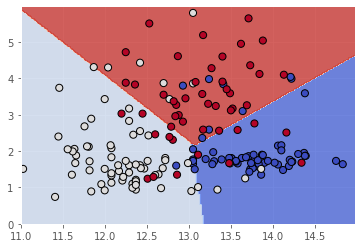

Number of support vectors 81


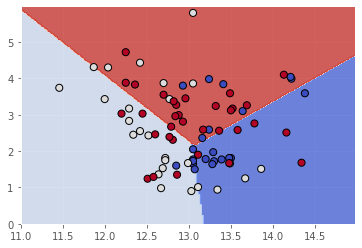

In [16]:
X = np.array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.24,  3.98],
       [13.05,  1.77],
       [14.21,  4.04],
       [14.38,  3.59],
       [13.9 ,  1.68],
       [14.1 ,  2.02],
       [13.94,  1.73],
       [13.05,  1.73],
       [13.83,  1.65],
       [13.82,  1.75],
       [13.77,  1.9 ],
       [13.74,  1.67],
       [13.56,  1.73],
       [14.22,  1.7 ],
       [13.29,  1.97],
       [13.72,  1.43],
       [12.37,  0.94],
       [12.33,  1.1 ],
       [12.64,  1.36],
       [13.67,  1.25],
       [12.37,  1.13],
       [12.17,  1.45],
       [12.37,  1.21],
       [13.11,  1.01],
       [12.37,  1.17],
       [13.34,  0.94],
       [12.21,  1.19],
       [12.29,  1.61],
       [13.86,  1.51],
       [13.49,  1.66],
       [12.99,  1.67],
       [11.96,  1.09],
       [11.66,  1.88],
       [13.03,  0.9 ],
       [11.84,  2.89],
       [12.33,  0.99],
       [12.7 ,  3.87],
       [12.  ,  0.92],
       [12.72,  1.81],
       [12.08,  1.13],
       [13.05,  3.86],
       [11.84,  0.89],
       [12.67,  0.98],
       [12.16,  1.61],
       [11.65,  1.67],
       [11.64,  2.06],
       [12.08,  1.33],
       [12.08,  1.83],
       [12.  ,  1.51],
       [12.69,  1.53],
       [12.29,  2.83],
       [11.62,  1.99],
       [12.47,  1.52],
       [11.81,  2.12],
       [12.29,  1.41],
       [12.37,  1.07],
       [12.29,  3.17],
       [12.08,  2.08],
       [12.6 ,  1.34],
       [12.34,  2.45],
       [11.82,  1.72],
       [12.51,  1.73],
       [12.42,  2.55],
       [12.25,  1.73],
       [12.72,  1.75],
       [12.22,  1.29],
       [11.61,  1.35],
       [11.46,  3.74],
       [12.52,  2.43],
       [11.76,  2.68],
       [11.41,  0.74],
       [12.08,  1.39],
       [11.03,  1.51],
       [11.82,  1.47],
       [12.42,  1.61],
       [12.77,  3.43],
       [12.  ,  3.43],
       [11.45,  2.4 ],
       [11.56,  2.05],
       [12.42,  4.43],
       [13.05,  5.8 ],
       [11.87,  4.31],
       [12.07,  2.16],
       [12.43,  1.53],
       [11.79,  2.13],
       [12.37,  1.63],
       [12.04,  4.3 ],
       [12.86,  1.35],
       [12.88,  2.99],
       [12.81,  2.31],
       [12.7 ,  3.55],
       [12.51,  1.24],
       [12.6 ,  2.46],
       [12.25,  4.72],
       [12.53,  5.51],
       [13.49,  3.59],
       [12.84,  2.96],
       [12.93,  2.81],
       [13.36,  2.56],
       [13.52,  3.17],
       [13.62,  4.95],
       [12.25,  3.88],
       [13.16,  3.57],
       [13.88,  5.04],
       [12.87,  4.61],
       [13.32,  3.24],
       [13.08,  3.9 ],
       [13.5 ,  3.12],
       [12.79,  2.67],
       [13.11,  1.9 ],
       [13.23,  3.3 ],
       [12.58,  1.29],
       [13.17,  5.19],
       [13.84,  4.12],
       [12.45,  3.03],
       [14.34,  1.68],
       [13.48,  1.67],
       [12.36,  3.83],
       [13.69,  3.26],
       [12.85,  3.27],
       [12.96,  3.45],
       [13.78,  2.76],
       [13.73,  4.36],
       [13.45,  3.7 ],
       [12.82,  3.37],
       [13.58,  2.58],
       [13.4 ,  4.6 ],
       [12.2 ,  3.03],
       [12.77,  2.39],
       [14.16,  2.51],
       [13.71,  5.65],
       [13.4 ,  3.91],
       [13.27,  4.28],
       [13.17,  2.59],
       [14.13,  4.1 ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
print("Number of original examples", len(X))
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

##### **Transforming Features**

A graph can be linearly seperable (if the class has high precision) by transforming the feature. \
In the picture below (left), we can see that the red triangle is being groupped near the center with high precision that is located near the center of the graph. Therefore, if we take a square of each features, we will get the results on the right graph.

##### ![title](https://i.ibb.co/m8PVC4g/ibecoo.png)

If we convert the graph back to the original space, we will get an elipse boundary surrounding the red triangle feature, which has the same corresponding results! \
*(left graph = original space, right graph = transformed space)*

##### ![title](https://i.ibb.co/zncKsnL/circe.png)

##### **Kernal SVMs**

- is a feature tranformations in a computationally efficient way.
- RBF = Radial Basis Function kernel
- hyperparameter "gamma" control the smoothness of the boundary. 
    - High gamma = high training accuracy = overfitting. 
##### !['title'](https://i.ibb.co/vHndS4Y/lpl.png)

In [1]:
# exercise

In [22]:
# data
X_train = np.array([[ 0.,  1., 10., 15., 11.,  1.,  0.,  0.,  0.,  3.,  8.,  8., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  5., 14., 15.,  1.,  0.,  0.,  0.,
         0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  3.,  4.,
        10., 16.,  1.,  0.,  0.,  0., 13., 16., 15., 10.,  0.,  0.],
       [ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
        16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
         0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
        13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.],
       [ 0.,  0.,  4., 14., 15.,  6.,  0.,  0.,  0.,  5., 16., 16., 16.,
        16.,  0.,  0.,  0.,  5., 16., 16., 16., 16.,  3.,  0.,  0.,  0.,
         2.,  8., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  1.,  6.,
        13., 16.,  6.,  0.,  0.,  0.,  4., 13., 15.,  9.,  0.,  0.],
       [ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4.,
         0.,  0.,  0.,  0.,  4., 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5.,
        13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2.,
         0.,  8.,  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.,  3., 11., 16.,
        16.,  5.,  0.,  0.,  5., 16., 16., 16., 16.,  4.,  0.,  0.,  4.,
        10.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  2.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 12., 14.,  5.,  0.],
       [ 0.,  0.,  9., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  9., 16.,
         4.,  0.,  0.,  0.,  0.,  2.,  6., 16., 16., 12.,  0.,  0.,  0.,
        14., 16., 14.,  8.,  7.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 14.,  0.,  0.,  0.,  0.,  0., 16.,  8., 13.,
         7.,  0.,  0.,  0.,  0., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        15., 10.,  9.,  1.,  0.,  0., 12., 14., 13., 16., 16.,  5.],
       [ 0.,  0.,  1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13.,
         2.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  5.,  0.,  0.,
         0.,  0.,  3., 16., 16., 16., 16.,  6.,  0.,  0.,  1., 14., 16.,
        16., 16., 12.,  0.,  0.,  0.,  3., 12., 15., 14.,  7.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  7., 16., 12.,  7.,
        11.,  2.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 12., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  0.,
        11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,
         5.,  0.,  0.,  0.,  0., 13.,  9.,  9., 16.,  3.,  0.,  0.,  6.,
        15.,  6., 16.,  3.,  0.,  0.,  0.,  9., 13., 12., 15., 12.,  8.,
         0.,  0.,  9., 16., 16., 14.,  7.,  2.,  0.,  0.,  1.,  7., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10., 12.,  9.,  2.,
         0.,  0.,  0., 13.,  8.,  2.,  5., 13.,  0.,  0.,  0.,  6., 11.,
         1.,  2., 16.,  3.,  0.,  0.,  0.,  8., 11., 14., 11.,  2.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  9.,  9.,  2.,
         0.,  0.,  0., 16., 11.,  8., 11., 12.,  0.,  0.,  1., 14., 11.,
         1.,  4., 13.,  0.,  0.,  0.,  3., 11., 16., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 14.,  3., 10., 10.,  0.,  0.,  1., 14., 15., 10., 16.,  6.,
         0.,  0., 14., 14., 12., 15., 16.,  2.,  0.,  0.,  3.,  0.,  0.,
         8., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14., 13.,  2.,  0.,  0.,  0., 12., 15.,  9.,
         7.,  1.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  6., 12., 14.,  7.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0., 14.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  0.,  0.,
         0.,  0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  6., 15.,
         1.,  0.,  0.,  0.,  4., 10.,  0., 12.,  2.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0., 12.,  9.,
         9., 16.,  2.,  0.,  0.,  0.,  8., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  2.,  0.,  0.,  0.,  3., 16.,  6.,  1.,
        15.,  0.,  0.,  0.,  5., 16., 13., 12., 16.,  2.,  0.,  0.,  2.,
        13., 16., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  1.,  0.,  0.,  8.,  8.,  0.,  0.,  3., 16.,  2.,
         0., 10.,  7.,  0.,  0.,  0.,  5., 11., 16., 13.,  1.,  0.],
       [ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  2., 15.,  7., 11.,
        10.,  0.,  0.,  0.,  4., 16.,  0.,  0., 15.,  1.,  0.,  0.,  6.,
        10.,  0.,  0., 10.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 11.,  8.,  0.,  0.,  2., 16.,  7.,
         8., 16.,  2.,  0.,  0.,  0.,  6., 15., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 12., 16.,  9.,  0.,  0.,  0.,  4., 16.,  6.,  7.,
         3.,  0.,  0.,  0.,  4., 16.,  2.,  8.,  3.,  0.,  0.,  0.,  7.,
        16., 15., 13., 16.,  3.,  0.,  0.,  5., 11.,  1.,  1., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  6.,  0.,  0.,  0.,  0., 10., 11.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 12.,  0.,  0.,  0.,  5., 16.,  8.,  4.,
        12.,  2.,  0.,  0., 12.,  6.,  0.,  0., 13.,  4.,  0.,  0.,  6.,
        16., 13., 16., 16.,  7.,  0.,  0.,  0.,  3.,  4.,  1.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  8.,  9.,
         2.,  9.,  9.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  6., 15., 11.,  2.,  0.,  0.,  0.,  6., 13.,  4.,
        13.,  5.,  0.,  0.,  0.,  7., 11.,  0., 13.,  3.,  0.,  0.,  0.,
         2., 15., 13.,  7.,  0.,  0.,  0.,  3., 13., 12., 16.,  2.,  0.,
         0.,  0.,  8., 15.,  1.,  9.,  8.,  0.,  0.,  0.,  0.,  7., 14.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  5., 12., 16.,  2.,  0.],
       [ 0.,  0.,  4., 11., 15.,  8.,  0.,  0.,  0.,  0., 13., 16., 11.,
        13.,  7.,  0.,  0.,  3., 16., 12.,  0.,  4.,  8.,  0.,  0.,  6.,
        16.,  5.,  0.,  4.,  8.,  0.,  0.,  7.,  9.,  0.,  0.,  9.,  7.,
         0.,  0.,  4., 10.,  0.,  2., 15.,  2.,  0.,  0.,  1., 16., 12.,
        14., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16.,  6.,  0.,  0.,  0.,  3., 14.,  7.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,
         2.,  9., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 14.,  6.,  2.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 15., 16., 14.,  1.,  0.,  0.,  0.,  2., 12., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,
         0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         8., 11.,  3.,  0.,  0.,  3., 16., 16., 16., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  5., 12., 12.,  0.,  0.,  0.,  0.,  5., 16.,  6.,
         1.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  2.,  7.,  4.,  0.,  0.,  0.,  7., 15., 16., 13., 15.,  3.,
         0.,  0.,  3., 16.,  9.,  0.,  1., 12.,  0.,  0.,  0., 10., 12.,
         2.,  6., 13.,  0.,  0.,  0.,  0.,  8., 15., 16.,  5.,  0.],
       [ 0.,  0.,  8., 13., 12.,  3.,  0.,  0.,  0.,  6., 15.,  7.,  9.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0., 11.,  2.,
         1., 15.,  7.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16., 15., 12.,  0.,
         0.,  0.,  0.,  9., 16.,  1., 13.,  7.,  0.,  0.,  0.,  4., 16.,
         6., 15.,  5.,  0.,  0.,  0.,  0.,  6., 14., 14.,  1.,  0.],
       [ 0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 13.,  1.,
         0.,  0.,  2., 16.,  8.,  4.,  7., 11.,  0.,  0.,  0., 12., 11.,
         1.,  8., 11.,  0.,  0.,  0.,  3., 12., 16., 15.,  4.,  0.],
       [ 0.,  0.,  5., 15., 15.,  2.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         5.,  0.,  0.,  0.,  5.,  9.,  1., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,
         7.,  6.,  2.,  0.,  0.,  0.,  6., 16., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,
         7.,  0.,  0.,  0.,  8., 16., 13., 10., 15.,  0.,  0.,  0.,  8.,
        16.,  2.,  2., 15.,  3.,  0.,  0.,  5., 15.,  2.,  0., 12.,  7.,
         0.,  0.,  1., 15.,  6.,  2., 16.,  3.,  0.,  0.,  0., 11., 15.,
        13., 16.,  0.,  0.,  0.,  0.,  1., 15., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15.,  8.,  0.,  0.,  0.,  0.,  1., 16., 16.,
        10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,
         0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.],
       [ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 13., 14.,
        13.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  1.,  0.,  0.,  0.,
         0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  8.,  7.,
        12., 16.,  0.,  0.,  0.,  0.,  6., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
        12.,  0.,  0.,  0.,  2., 16.,  7.,  6., 15.,  3.,  0.,  0.,  8.,
        14.,  0.,  0.,  8.,  3.,  0.,  0.,  5., 14.,  0.,  0.,  8.,  8.,
         0.,  0.,  2., 16., 13., 11., 14.,  4.,  0.,  0.,  3., 16., 15.,
        16.,  6.,  0.,  0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  1.,  7., 13., 16., 13.,  0.,  0.,  0.,  7., 16., 16., 16.,
        14.,  0.,  0.,  0.,  1.,  7., 16., 10.,  1.,  0.,  0.,  0.,  1.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 14.,  3.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.,  0.,  1.,  5.,
        13., 16.,  7.,  0.,  0.,  0.,  8., 15., 10.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15., 11., 16., 13.,  4.,
         0.,  0.,  7., 16., 16., 11., 14., 14.,  0.,  0.,  2., 16., 11.,
         5., 15., 12.,  0.,  0.,  0.,  3., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  5., 12.,  8.,  0.,  1.,  0.,  0.,  0., 11., 16.,  5.,
        13.,  6.,  0.,  0.,  0.,  2., 15., 16., 12.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  7.,  0.,
         0.,  0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  9.,  0.,  0.,  0.,  0.,  6., 12., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  1.,  0.,  0.,  4.,
        16.,  3.,  1., 10., 10.,  0.,  0.,  8., 16., 12., 14., 13.,  3.,
         0.,  0.,  2., 12., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15., 15., 11.,  4.,  0.,  0.,  1., 10.,  5.,  7.,
        16., 10.,  0.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,  0.,  0.,
         0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  2.,
         7., 15.,  3.,  0.,  0.,  0.,  6., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 13., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,
        12.,  0.,  0.,  0.,  0., 14.,  6.,  0., 13.,  3.,  0.,  0.,  6.,
        10.,  0.,  0., 10.,  6.,  0.,  0.,  7., 13.,  0.,  0.,  9.,  8.,
         0.,  0.,  3., 16.,  1.,  3., 14.,  7.,  0.,  0.,  0., 11., 16.,
        16., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         2.,  5.,  0.,  0.,  0.,  5., 16.,  6.,  6., 16.,  0.,  0.,  2.,
        16., 10.,  4., 13., 13.,  0.,  0., 13., 16., 16., 16., 16., 10.,
         0.,  0.,  6.,  4.,  4., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 12.,  2.,  0.,  0.,  0.,  7., 16.,  6., 10.,
        13.,  0.,  0.,  0.,  0.,  2.,  0.,  3., 16.,  0.,  0.,  0.,  0.,
         0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,
         0.,  0.,  0.,  3.,  0.,  3., 15.,  7.,  0.,  0.,  3., 16.,  7.,
         6., 14.,  8.,  0.,  0.,  1.,  9., 15., 16., 12.,  1.,  0.],
       [ 0.,  0., 11., 16., 12., 12., 16.,  7.,  0.,  3., 16.,  9.,  8.,
        16., 10.,  0.,  0.,  1., 10.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         1.,  8., 15., 15., 11.,  0.,  0.,  0., 12., 16., 15.,  7.,  2.,
         0.,  0.,  0.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16.,
        16.,  4.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  9., 16., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,
         2.,  0.,  0.,  0.,  0., 15.,  2.,  1., 14.,  3.,  0.,  0.,  5.,
        13.,  0., 13.,  8.,  1.,  0.,  0.,  8., 13.,  3., 16., 14.,  6.,
         0.,  0.,  6., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 13.,  5.,  0.,  0.,  0.,  4., 13.,  4.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,
         0.,  0.,  7.,  8.,  0.,  0., 12.,  7.,  0.,  0.,  8.,  9.,  1.,
         3., 16.,  3.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  3., 12., 16., 16.,  8.,  0.,  0.,  0., 13.,
        16.,  9., 16.,  8.,  0.,  0.,  0.,  1.,  2.,  0., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  1., 11.,  9.,  0.,  0.,  3.,
        14.,  8.,  0., 14., 10.,  0.,  0., 10., 16., 12., 12., 16.,  8.,
         0.,  0., 13., 16., 14., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.],
       [ 0.,  1.,  8., 16., 15.,  0.,  0.,  0.,  0.,  4., 13.,  5., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,
         1.,  7., 14.,  6.,  2.,  0.,  0.,  0., 12., 16., 14., 13.,  8.,
         0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 14., 15.,  5.,  0.,  0.,  1., 14.,  8.,  1.,
        14.,  8.,  0.,  0.,  7., 12.,  0.,  7., 16.,  8.,  0.,  0.,  4.,
        14., 12., 12.,  9.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0., 12., 10.,
         4., 16.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  7.,  0.,  0.],
       [ 0.,  2., 15., 16., 16., 14.,  2.,  0.,  0.,  3., 16., 14.,  9.,
        10.,  1.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        14., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  0.,  0.,  0.,  0.,  3., 16., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 16., 13., 10.,
        16.,  3.,  0.,  0.,  0., 12.,  1.,  2., 16.,  4.,  0.,  0.,  0.,
         0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  1., 11., 16.,
        12.,  8.,  8.,  1.,  0.,  0., 11., 16., 16., 16., 12.,  1.],
       [ 0.,  1., 12., 15., 16., 13.,  1.,  0.,  0.,  4., 16., 15.,  7.,
        15.,  4.,  0.,  0.,  0., 16.,  6., 11., 15.,  2.,  0.,  0.,  0.,
         9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 15., 15., 11.,  0.,  0.,  0.,  0.,  2., 16., 10.,
        12.,  0.,  0.,  0.,  0.,  2., 13., 16., 10.,  0.,  0.,  0.],
       [ 0.,  1., 14., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  1., 14.,
         2.,  0.,  0.,  0.,  0., 10.,  7., 10.,  6.,  4.,  0.,  0.,  0.,
         1., 12., 16., 14.,  5.,  0.,  0.,  0.,  3., 14., 16.,  4.,  0.,
         0.,  0.,  1., 15.,  5.,  6., 12.,  0.,  0.,  0.,  4., 10.,  0.,
         1., 15.,  0.,  0.,  0.,  1., 12., 12., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0., 13., 14., 15.,
        11.,  0.,  0.,  0.,  6., 15.,  1.,  2., 16.,  4.,  0.,  0.,  6.,
        14.,  0.,  0.,  9.,  8.,  0.,  0.,  8., 10.,  0.,  0., 13.,  8.,
         0.,  0.,  4., 13.,  0.,  1., 14.,  8.,  0.,  0.,  0., 14., 14.,
        15., 15.,  3.,  0.,  0.,  0.,  5., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 13., 12.,  2.,  0.,  0.,  1., 14., 13.,  7.,
        10.,  6.,  0.,  0.,  0., 13.,  8.,  1.,  7.,  7.,  0.,  0.,  0.,
         3., 13., 14., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  1.,
         0.,  0.,  0.,  0.,  9.,  5.,  8.,  5.,  0.,  0.,  0.,  0., 13.,
         4., 13.,  2.,  0.,  0.,  0.,  0., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
        14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
        11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
        12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 10.,  1.,  0.,  0.,  0.,  2., 12.,  8.,
        12.,  4.,  0.,  0.,  0.,  0., 11.,  1., 11.,  3.,  0.,  0.,  0.,
         0.,  8.,  8., 15.,  4.,  0.,  0.,  2., 15., 16., 16.,  7.,  0.,
         0.,  0.,  2., 15.,  5., 11.,  0.,  0.,  0.,  0.,  0., 14.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16.,
         6.,  0.,  0.,  0.,  0., 13., 16., 16.,  4.,  0.,  0.,  0.,  5.,
        15., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  8., 16., 13.,  2.,  0.,  0.,  0.,  2., 16.,  8., 11.,
        14.,  1.,  0.,  0.,  3., 16.,  1., 12., 16.,  5.,  0.,  0.,  0.,
        12., 16., 16., 13.,  9.,  0.,  0.,  0.,  0.,  4.,  2.,  9., 14.,
         0.,  0.,  0.,  4.,  5.,  0.,  8., 13.,  0.,  0.,  1., 16., 11.,
         1., 13.,  7.,  0.,  0.,  0.,  8., 15., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 12., 16., 13.,  0.,  0.,  0.,  1., 14.,  9., 10.,
        13.,  0.,  0.,  0.,  0.,  2.,  0., 10., 10.,  0.,  0.,  0.,  0.,
         3.,  7., 15., 16., 10.,  0.,  0.,  0., 16., 16., 15.,  3.,  0.,
         0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  3.,
        13.,  0.,  0.,  0.,  0., 16.,  0.,  5., 12.,  0.,  0.,  0.,  0.,
        10., 13., 14., 16.,  2.,  0.,  0.,  0.,  1.,  7.,  6., 13.,  4.,
         0.,  0.,  1.,  4.,  0.,  0.,  5., 11.,  0.,  0.,  2., 14.,  6.,
         2.,  9., 11.,  0.,  0.,  0.,  4., 10., 16., 16.,  4.,  0.],
       [ 0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16.,  9.,  4.,  0.,  0.,  0.,  5., 16., 14., 11., 16.,  5.,
         0.,  0.,  2., 16., 16.,  0., 12.,  8.,  0.,  0.,  0., 15., 15.,
         1., 15.,  6.,  0.,  0.,  0.,  7., 14., 16., 13.,  1.,  0.],
       [ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15.,
        14.,  0.,  0.,  0.,  0., 15.,  5., 14.,  9.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3.,
         0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10.,
         8., 16.,  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16., 15.,  5.,  0.,
         0.,  0.,  4., 16.,  5.,  3., 13.,  7.,  0.,  0.,  1., 14.,  9.,
         0.,  8., 13.,  0.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 14., 16., 12.,  0.,  0.,  0.,  1.,
        10., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  1.,  0.],
       [ 0.,  1., 11., 16., 16., 10.,  0.,  0.,  0.,  8., 16., 11.,  7.,
        16.,  1.,  0.,  0.,  7., 11.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         2.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 15.,
        16., 11.,  6.,  0.,  0.,  0., 14., 16., 13., 13., 16.,  5.],
       [ 0.,  0., 15., 13., 12., 12.,  2.,  0.,  0.,  4., 16., 16., 12.,
         6.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  4.,  5., 14.,
         8.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 15.,  9.,  0.,  0.,  0.,  4., 14.,  6.,  5.,
        16.,  0.,  0.,  0.,  7., 12.,  2.,  2., 16.,  0.,  0.,  0.,  4.,
        16., 15., 14.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,
         0.,  0.,  0., 10.,  6.,  8., 15.,  2.,  0.,  0.,  0., 11.,  9.,
         4., 13., 11.,  0.,  0.,  0.,  2., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 13.,  8.,  4.,  0.,  0.,  0.,  1., 15., 11.,  9.,
        15.,  2.,  0.,  0.,  4., 16.,  6.,  0.,  8.,  7.,  0.,  0.,  4.,
        10.,  0.,  0.,  7.,  8.,  0.,  0.,  4., 10.,  0.,  0.,  8.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 12.,  5.,  0.,  0.,  3., 15.,  5.,
         9., 14.,  2.,  0.,  0.,  0.,  8., 14., 12.,  3.,  0.,  0.],
       [ 0.,  3., 16., 16., 16.,  2.,  0.,  0.,  0.,  4., 14., 10.,  5.,
         0.,  0.,  0.,  0.,  6., 16., 16., 10.,  3.,  0.,  0.,  0.,  4.,
        15., 12., 14., 13.,  0.,  0.,  0.,  0.,  2.,  0.,  1., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  3., 16., 10.,
         7.,  9., 16.,  0.,  0.,  3., 13., 15., 16., 16.,  8.,  0.],
       [ 0.,  0.,  7., 11., 15.,  9.,  0.,  0.,  0.,  0., 15., 15.,  4.,
        11.,  4.,  0.,  0.,  3., 11.,  5.,  0.,  2., 10.,  0.,  0.,  7.,
         8.,  0.,  0.,  3.,  8.,  0.,  0.,  6.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  5.,  8.,  0.,  0.,  8.,  5.,  0.,  0.,  1., 12.,  2.,
         1., 13.,  0.,  0.,  0.,  0.,  5., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  1., 13., 16., 10.,
         7.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 13.,  1.,  0.,
         0.,  0.,  5., 16.,  6., 14.,  9.,  0.,  0.,  0.,  0., 13., 12.,
        14., 15.,  0.,  0.,  0.,  0.,  3., 12., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 14., 16., 10.,  0.,  0.,  0.,  0., 10.,  6., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  5.,  0.,  0.,  2.,
        12., 15., 16., 15., 14.,  0.,  0.,  2., 12., 16.,  7.,  0.,  1.,
         0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,
         0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  4., 13.,  1.,  0.,  6.,
        16.,  9.,  7., 15., 10.,  0.,  0.,  9., 16., 16., 16., 15.,  2.,
         0.,  0.,  0.,  4.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  2.,  6., 10., 12.,  1.,  0.,  0.,  0., 14., 13., 10.,  5.,
         1.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        13., 12., 12.,  5.,  0.,  0.,  0.,  2.,  8.,  5.,  7., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  2.,  2.,
         1., 10., 10.,  0.,  0.,  0.,  5., 16., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  9.,  0.,  0.,  0.,  0.,  4.,
        16., 12.,  0.,  9., 12.,  0.,  0.,  9., 16., 16., 16., 16., 10.,
         0.,  0.,  1.,  6., 10., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  5., 11., 12.,  5.,  0.,  0.,  0.,  0., 12.,  6.,  2.,
         3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,
         0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  6., 12., 11.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14., 14.,  3.,  0.,  0.,  0.,  0., 10., 11.,
        13.,  8.,  0.,  0.,  0.,  0.,  7.,  0., 13.,  8.,  0.,  0.,  0.,
         0.,  0.,  7., 15.,  1.,  0.,  0.,  4.,  8., 12., 15.,  4.,  0.,
         0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 12.,
        12.,  4.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  3.,  9.,  0.,  0.,  7.,
        14.,  0.,  1., 14., 12.,  0.,  0.,  9., 16., 12., 14., 15.,  1.,
         0.,  0.,  0.,  6.,  8., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
         5.,  0.,  0.,  0.,  0., 13., 14., 14., 15.,  0.,  0.,  0.,  0.,
         3., 11., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  6.,  0.,  0.,  0.,  4., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16., 10.,
        11.,  0.,  0.,  0.,  0.,  6., 12., 11., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 12., 11.,  5.,  0.,
         0.,  0.,  2., 13.,  0.,  2.,  9.,  0.,  0.,  0.,  0.,  8.,  6.,
         2., 12.,  0.,  0.,  0.,  0.,  1.,  9., 14.,  9.,  0.,  0.],
       [ 0.,  1., 13., 15.,  2.,  0.,  0.,  0.,  0.,  6., 15., 15.,  9.,
         0.,  0.,  0.,  0.,  9.,  8., 10., 13.,  0.,  0.,  0.,  0.,  5.,
         3., 12., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,
         0.,  0.,  5., 15., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 15.,
        12., 12., 11.,  0.,  0.,  1., 11., 13., 16., 16., 12.,  0.],
       [ 0.,  0.,  5., 14., 14.,  8.,  2.,  0.,  0.,  3., 15.,  3.,  0.,
        13.,  8.,  0.,  0.,  5., 12.,  0.,  2., 15.,  8.,  0.,  0.,  2.,
        15.,  9., 14., 14.,  8.,  0.,  0.,  0.,  1.,  3.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  6., 15.,  2.,
         0., 14.,  1.,  0.,  0.,  1.,  7., 14., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 14., 10.,  3.,  0.,  0.,  0.,  0., 10., 14., 13.,
        15.,  1.,  0.,  0.,  0., 12.,  4.,  4., 16.,  4.,  0.,  0.,  0.,
         6., 15., 15., 16.,  8.,  0.,  0.,  0.,  1.,  8.,  8., 14.,  8.,
         0.,  0.,  0.,  2.,  0.,  0.,  9., 11.,  0.,  0.,  0., 16., 10.,
         8., 12., 12.,  0.,  0.,  0.,  7., 12., 14., 14.,  6.,  0.],
       [ 0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0., 15., 16., 10.,
         8.,  1.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  8., 11.,  2., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         1.,  0.,  0.,  0.,  1., 11., 16.,  5.,  0.,  0.,  0.,  0.,  8.,
        16., 10.,  0., 10.,  6.,  0.,  0., 12., 16.,  8.,  9., 16., 12.,
         0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16.,  5.,  0.,  0.,  0., 10., 12., 10.,
        16.,  6.,  0.,  0.,  2., 15.,  2.,  3., 16.,  1.,  0.,  0.,  0.,
         2.,  3., 10., 13.,  2.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,
         0.,  0.,  0.,  0., 12., 13.,  7.,  1.,  0.,  0.,  0.,  1., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 12.,  9., 13.,
        16.,  9.,  0.,  0.,  3., 16.,  5.,  0.,  8., 12.,  0.,  0.,  0.,
         9., 16., 10., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,
         0.,  0.,  0.,  0., 11.,  9., 16.,  0.,  0.,  0.,  0.,  1., 15.,
         2., 12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,
         0.,  0.,  0.,  0.,  7., 16., 14., 16.,  2.,  0.,  0.,  0.,  3.,
         6., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  6.,  1.,  3.,  0.,  0.,  0.,  9., 16.,
        13., 15.,  8.,  0.,  0.,  0.,  7., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0., 11., 16., 16., 16., 16.,  2.,  0.,  5., 16., 16., 14.,
        10.,  4.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0., 10., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 11.,  4.,
        15.,  2.,  0.,  0.,  4., 16.,  2.,  2., 16.,  6.,  0.,  0.,  0.,
        13., 11., 13., 16., 10.,  0.,  0.,  0.,  1., 10., 13., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        13., 14.,  1.,  0.,  0.,  0., 11., 15., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  1.,
        13., 15., 12., 16.,  1.,  0.,  0.,  4., 12.,  3., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  4.,  0.],
       [ 0.,  0.,  7., 15., 14.,  8.,  0.,  0.,  0.,  1., 15.,  7.,  5.,
        14.,  5.,  0.,  0.,  0., 15.,  8.,  0., 10.,  7.,  0.,  0.,  3.,
        16.,  6.,  0., 12.,  8.,  0.,  0.,  5., 16.,  2.,  0., 12.,  8.,
         0.,  0.,  4., 16.,  3.,  1., 16.,  4.,  0.,  0.,  5., 16., 10.,
        14., 12.,  0.,  0.,  0.,  0.,  8., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  7.,  6.,
        14.,  0.,  0.,  0.,  1.,  3.,  0., 15.,  8.,  0.,  0.,  0.,  0.,
         0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  6.,  0.,
        12., 10.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  9.,  0.,  0.,  0.,  0.,  0., 15.,  6., 11.,
         6.,  0.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  0.,  0.,  0.,  5.,
         9.,  0.,  0.,  8.,  6.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,
         0.,  0.,  1., 16.,  0.,  0.,  4., 11.,  0.,  0.,  0., 15.,  7.,
         5., 16.,  4.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 14.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,
         0.,  0.,  0.,  0.,  2., 14.,  2., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        14.,  8., 10.,  0.,  0.,  0.,  7., 12., 12., 12., 15.,  2.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,
         0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  4., 12., 16., 16.,  7.,
         0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13., 12.,  4.,  0.,  0.,  0., 11., 16., 16.,
        14.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,  0.,  0.,  0.,  4.,
        16., 16., 15.,  3.,  0.,  0.,  0.,  2., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  8.,  0.,  0.,  0.,  1., 12., 16., 16.,  8.,  0.,  0.,  5.,
        14., 16., 16., 16.,  5.,  0.,  0.,  1.,  4.,  7., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        16., 16.,  3.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.],
       [ 0.,  1., 12., 16., 13.,  7.,  0.,  0.,  0., 12., 11.,  4.,  4.,
        15.,  0.,  0.,  0.,  8.,  3.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 10.,  0.,  0.,  0., 10., 10., 13., 14.,  1.,  0.],
       [ 0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,
         5.,  0.,  0.,  0.,  2., 16.,  6., 10., 15.,  1.,  0.,  0.,  9.,
        15.,  3., 16., 11.,  7.,  0.,  0., 12., 16., 16., 15., 11.,  5.,
         0.,  0.,  3.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  8.,  1.,  1.,  0.,  0.,  0.,  0., 12., 16., 16., 15.,  5.,
         0.,  0.,  0., 14., 11.,  0.,  1., 15.,  0.,  0.,  0.,  6., 11.,
         1.,  3., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  1.,  8., 13., 14.,  2.,  0.,  0.,  2., 13.,  9.,
         4., 14.,  4.,  0.,  0., 13.,  9.,  0.,  9., 14.,  1.,  0.,  4.,
        16., 14., 14., 16.,  6.,  0.,  0.,  1., 11., 10.,  7., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.],
       [ 0.,  0., 10., 16., 13.,  5.,  0.,  0.,  0.,  7., 13.,  5., 14.,
        12.,  0.,  0.,  0.,  9., 10.,  0., 13., 14.,  0.,  0.,  0.,  4.,
        15., 13., 16., 15.,  3.,  0.,  0.,  0.,  2.,  6.,  3., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12.,  6.,
         5., 15.,  4.,  0.,  0.,  0.,  9., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6.,  9., 11.,  9.,  0.,  0.,  0., 13., 16., 15., 15.,
        15.,  0.,  0.,  0.,  4.,  5.,  2., 15.,  6.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  5.,
        13., 16.,  9.,  0.,  0.,  0.,  3., 13., 12.,  7.,  1.,  0.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0., 12., 16.,  9.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0.,
         0.,  0.,  3., 16., 14., 12., 13.,  4.,  0.,  0.,  0., 14., 10.,
         0., 10., 15.,  0.,  0.,  0.,  2., 12., 16., 13.,  7.,  0.],
       [ 0.,  0.,  7., 14., 11.,  1.,  0.,  0.,  0.,  6., 15.,  6.,  7.,
        10.,  0.,  0.,  0., 11.,  7.,  0.,  2., 12.,  0.,  0.,  0.,  5.,
         4.,  0.,  1., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        13.,  2.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  6.],
       [ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 11., 15.,  2.,  0.,  0.,  0.,  0., 12.,  6., 11.,
         9.,  0.,  0.,  0.,  4., 11.,  0.,  7., 16.,  0.,  0.,  0.,  5.,
         6.,  0.,  1., 16.,  6.,  0.,  0.,  5.,  4.,  0.,  0., 10.,  7.,
         0.,  0.,  0., 10.,  0.,  0., 10.,  5.,  0.,  0.,  0., 13.,  2.,
         6., 12.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.],
       [ 0.,  2.,  9., 16., 13., 13.,  2.,  0.,  0., 11., 11.,  4.,  2.,
        10.,  4.,  0.,  0.,  6., 12.,  2.,  4., 12.,  0.,  0.,  0.,  0.,
         6., 14., 13.,  2.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  8.,  7., 13.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
        12.,  0.,  0.,  0.,  0.,  0., 13., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 14.,  8.,  0.,  0.,  0.,  4., 16.,  8., 10.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,
         0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0.,
         0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,
         6., 10., 11.,  0.,  0.,  0., 13., 16., 16., 14.,  8.,  1.],
       [ 0.,  0.,  1.,  9., 16., 16.,  3.,  0.,  0.,  0., 14., 11.,  8.,
        16.,  8.,  0.,  0.,  0.,  4.,  0.,  0., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  6., 12., 16., 16.,  9.,
         0.,  0.,  1., 16., 14., 16.,  5.,  0.,  0.,  0.,  0.,  2.,  8.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 11.,  0.,  0.,  0.,  0., 10., 14., 11., 16.,
         0.,  0.,  0.,  0., 14.,  5.,  6., 15.,  0.,  0.,  0.,  0.,  3.,
         1., 11., 14.,  3.,  1.,  0.,  0.,  2., 13., 16., 16., 16.,  9.,
         0.,  0.,  2., 14., 16.,  5.,  4.,  2.,  0.,  0.,  0., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  1., 11., 15., 16.,  9.,  0.,  0.,  0.,  3., 16., 10., 10.,
        16.,  1.,  0.,  0.,  0.,  2.,  1., 14., 11.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  6.,  8.,
        13., 15.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.],
       [ 0.,  1., 10., 12., 12., 11.,  0.,  0.,  0.,  7., 14.,  8.,  8.,
         6.,  0.,  0.,  0.,  7., 11.,  7.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 13., 13.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  1., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  3.,
         0., 10., 12.,  0.,  0.,  0., 10., 16., 16., 14.,  4.,  0.],
       [ 0.,  0.,  8., 14., 16., 16.,  0.,  0.,  0.,  0., 14., 13.,  8.,
         8.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 13., 16., 13.,  0.,  0.,  0.,  3., 16., 16., 12., 16.,  7.,
         0.,  0.,  0.,  4.,  1.,  2., 14.,  6.,  0.,  0.,  0.,  1.,  6.,
        16., 11.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 14., 10.,  7.,  0.,  0.,  0.,  0., 16., 16., 16.,
        16.,  3.,  0.,  0.,  3., 16., 10.,  2., 16.,  7.,  0.,  0.,  7.,
        16.,  3.,  0., 12.,  8.,  0.,  0.,  8., 16.,  1.,  0., 12.,  8.,
         0.,  0.,  7., 16.,  5.,  2., 16.,  4.,  0.,  0.,  2., 16., 15.,
        14., 13.,  0.,  0.,  0.,  0.,  7., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  7., 15.,  7., 16.,
         7.,  0.,  0.,  0.,  2.,  2.,  0., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  3.,  3.,  5.,  0.,  0.,  0., 11., 14.,
        10., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13.,  4.,  0.,  0.,  0.,  3., 16., 10.,  2.,
         5.,  9.,  0.,  0.,  0., 15., 14., 11., 15.,  3.,  0.,  0.,  0.,
         7., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0.,
         0.,  0.,  0.,  8., 14., 13., 12.,  0.,  0.,  0.,  0., 12., 12.,
        13., 11.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
        14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
         0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
         0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
        11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.],
       [ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 15., 12.,  5.,  0.,  0.,  0., 12., 11., 11.,
        12., 11.,  0.,  0.,  1., 16.,  1.,  0.,  8., 11.,  0.,  0.,  3.,
        15., 12., 10., 15.,  2.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,
         0.,  0.,  0.,  0., 11., 15., 12.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,
        16.,  2.,  0.,  0.,  0.,  4., 16., 12., 16.,  0.,  0.,  0.,  4.,
        15.,  6.,  7., 13.,  0.,  0.,  0., 11., 15., 15., 16., 16.,  9.,
         0.,  0.,  9., 13., 12., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
         9.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 16., 11.,  0.,  0.,  5., 16., 10.,  5.,
         4.,  1.,  0.,  0.,  6., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  9.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  3.,  8.,  4., 11., 15.,  0.,
         0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  4., 13.,
        16.,  6.,  0.,  0.,  0.,  2., 16., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  1.,  0.,  0.,  0.,  2., 16., 14., 16.,  5.,  1.,
         0.,  0., 11., 16., 16., 16., 16., 10.,  0.,  0.,  5.,  8., 11.,
        16.,  4.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  5.,  4.,  9., 10.,  0.,  0.,  0.,  0., 10.,  8., 11.,
        16.,  2.,  0.,  0.,  0.,  8., 12., 14., 14.,  1.,  0.,  0.,  0.,
         5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,
         0.,  0.,  1., 14., 13.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 10.,  0.,  0.,  0.,  0.,  7., 11.,  7., 14.,
         1.,  0.,  0.,  0.,  2.,  2.,  3., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 14.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  2.,  0.,  5., 15.,  6.,  0.,  0.,  1., 11.,  4.,
         4., 13.,  8.,  0.,  0.,  2., 14., 16., 16., 13.,  1.,  0.],
       [ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8., 15.,  9.,  1.,
         0.,  0.,  4., 16., 16., 12., 15., 11.,  0.,  0.,  1., 15., 14.,
         4., 14., 11.,  0.,  0.,  0.,  5., 14., 14., 10.,  1.,  0.],
       [ 0.,  2.,  8., 15., 16., 10.,  0.,  0.,  0., 11., 16., 10.,  4.,
        15.,  1.,  0.,  0., 12., 13.,  0.,  0., 13.,  5.,  0.,  0., 11.,
        13.,  0.,  0., 15.,  7.,  0.,  0.,  8., 16.,  0.,  0., 15.,  6.,
         0.,  0.,  6., 16.,  1.,  5., 16.,  2.,  0.,  0.,  2., 16.,  6.,
        15., 12.,  0.,  0.,  0.,  0.,  7., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  5., 16., 10.,
        16.,  4.,  0.,  0.,  2., 15., 10.,  0.,  8.,  1.,  0.,  0.,  5.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,
         0.,  0.,  2., 16., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  1.,  8., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  8., 10., 12.,  2.,  0.,  0., 10., 14., 10.,
        12., 16.,  1.,  0.,  0.,  9., 10.,  1., 13.,  7.,  0.,  0.,  0.,
         4.,  4.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,
         0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 12.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  9.,  7.,  2., 15.,  0.,  0.,  0.,  0.,
         3.,  2.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  2.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16.,
        16., 16., 16.,  3.,  0.,  0.,  3., 13.,  9.,  8.,  4.,  0.],
       [ 0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14., 15.,  8.,  0.,
         0.,  0.,  1., 16., 15.,  8., 13.,  9.,  0.,  0.,  0., 11., 10.,
         0., 11., 16.,  0.,  0.,  0.,  2., 14., 16., 16., 13.,  0.],
       [ 0.,  5., 16., 16., 16., 16., 10.,  0.,  0.,  4., 10.,  4.,  4.,
         4.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  2.,  8., 14., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  3.,  3.,  2.,
        11., 15.,  0.,  0.,  0.,  5., 16., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0., 13., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,
         0.,  1., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  3.,  6.,
        15., 16.,  7.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.],
       [ 0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  3., 16., 13., 12.,
         0.,  0.,  0.,  0.,  0., 12., 11., 14., 10.,  6.,  0.,  0.,  0.,
         2., 15., 16., 10.,  2.,  0.,  0.,  0.,  6., 14., 15.,  1.,  0.,
         0.,  0.,  3., 15.,  4.,  9.,  7.,  0.,  0.,  0.,  6., 13.,  1.,
        10.,  9.,  0.,  0.,  0.,  2., 11., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 13., 12.,
         1.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  3.,  0.,  0.,  0.,  3.,
        15., 11.,  5., 16.,  2.,  0.,  0.,  5., 16., 11., 11., 16.,  6.,
         0.,  0.,  0.,  6., 12., 16., 13.,  3.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,
         0.,  9.,  5.,  0.,  0., 14., 10.,  0.,  7., 16.,  4.,  0.,  5.,
        16.,  7.,  5., 16.,  6.,  0.,  0., 11., 16., 16., 16., 14.,  0.,
         0.,  0.,  3.,  4., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  1., 13., 13.,  1.,  2.,  1.,  0.,  0.,  7.,
        16.,  5.,  1., 14., 10.,  0.,  0., 12., 16.,  8., 12., 16.,  2.,
         0.,  0.,  2., 12., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16., 13., 16.,
         0.,  0.,  0.,  0.,  2., 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  4.,  5., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0., 11.,  8.,
         8., 16.,  4.,  0.,  0.,  0.,  8., 13., 15., 10.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,  6.,
         2.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 13.,  2.,  0.,
         0.,  0.,  1., 16.,  6.,  8., 14.,  0.,  0.,  0.,  0., 11., 10.,
         1., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.],
       [ 0.,  1., 12., 15., 10.,  2.,  0.,  0.,  0.,  4., 14.,  1.,  6.,
        12.,  2.,  0.,  0.,  7., 15.,  0.,  1., 14.,  4.,  0.,  0.,  3.,
        15., 12., 15., 10.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  6.,  0.,  0.,  0.,  0., 11., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,
        10., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  7.,  8., 16.,  4.,
         0.,  0.,  1.,  4.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.],
       [ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  3., 16., 14., 14.,
        13.,  0.,  0.,  0.,  6., 15.,  2.,  1., 14.,  5.,  0.,  0.,  8.,
        14.,  2.,  0.,  9.,  8.,  0.,  0.,  8., 16.,  4.,  0.,  8.,  8.,
         0.,  0.,  5., 16.,  6.,  0., 11.,  9.,  0.,  0.,  1., 16., 16.,
        14., 16.,  9.,  0.,  0.,  0.,  5., 14., 15., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         8.,  0.,  0.,  0.,  2., 15., 16., 16.,  8.,  0.,  0.,  0.,  4.,
         8., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0.,
         0.,  0.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 11.,  2.,  0.],
       [ 0.,  0.,  2., 14.,  8.,  0.,  0.,  0.,  0.,  3., 14., 10., 16.,
         1.,  0.,  0.,  0., 11.,  8.,  2., 15.,  0.,  0.,  0.,  0.,  9.,
         8.,  1., 13.,  0.,  0.,  0.,  0.,  1.,  3.,  6., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
         9.,  4.,  7.,  3.,  0.,  0.,  1., 14., 16., 16., 13.,  8.],
       [ 0.,  0.,  0.,  3., 15., 16.,  1.,  0.,  0.,  0.,  7., 15., 16.,
        14.,  0.,  0.,  0.,  4., 16., 16., 15., 13.,  0.,  0.,  0.,  0.,
         8.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 16., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.],
       [ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  0.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14., 16., 13.,  2.,
         0.,  0.,  3., 16., 11.,  3.,  7., 12.,  0.,  0.,  0., 13.,  6.,
         3.,  8., 14.,  0.,  0.,  0.,  4., 14., 16., 14.,  7.,  0.],
       [ 0.,  0., 10., 16., 15.,  8.,  2.,  0.,  0.,  9., 16., 12.,  8.,
         9.,  3.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  7., 13.,  8., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  2., 12.,
        15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  6., 14., 11., 12.,  0.,  0.,  0.,  3.,
        15.,  3., 11., 10.,  0.,  0.,  0.,  8., 11.,  0., 13., 10.,  2.,
         0.,  0., 10., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  4., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  2.,  0.,  0.,  4., 16., 10.,  4.,
        16.,  4.,  0.,  0.,  7.,  6.,  0.,  5., 16.,  1.,  0.,  0.,  0.,
         0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6., 15.,  6.,  1.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 15., 15.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,
         3.,  0.,  0.,  0.,  1.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,
         0.,  0.,  0.,  4., 15., 16., 14.,  6.,  0.,  0.,  6., 16., 16.,
        15., 11.,  3.,  0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 15.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12., 14.,
         0.,  0.,  0.,  0.,  7.,  5.,  1., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,
         0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0., 12., 16.,
        12.,  8.,  5.,  0.,  0.,  0.,  9.,  8., 13., 15.,  7.,  0.],
       [ 0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  3.,  2.,  0.,  0.,  0.,  0., 13., 12.,  8., 12.,  0.,  0.,
         0.,  0., 15., 16., 15., 16., 13.,  4.,  0.,  0.,  4.,  9., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0., 13., 16., 16., 16., 13.,  0.,  0.,  4., 16.,  9.,  8.,
         5.,  4.,  0.,  0.,  9., 15.,  7.,  8.,  2.,  0.,  0.,  0., 11.,
        16., 16., 14., 15.,  1.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0., 11.,  8.,
        16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.],
       [ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  6., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
         3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        12., 10.,  5.,  0.,  0.,  3., 16., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  8.,  9.,  1., 12.,  0.,  0.,  0.,  2.,
        16.,  9.,  0., 10.,  5.,  0.,  0.,  4., 16.,  8.,  0.,  7.,  8.,
         0.,  0.,  1., 16.,  3.,  0., 10.,  7.,  0.,  0.,  0.,  8., 13.,
         9., 16.,  6.,  0.,  0.,  0.,  1., 10., 16., 13.,  1.,  0.],
       [ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5.,
        14., 13., 15., 10.,  0.,  0.,  0.,  8., 16.,  2.,  3., 14.,  5.,
         0.,  0.,  5., 16.,  4.,  0., 12.,  6.,  0.,  0.,  0., 10., 13.,
         2., 14.,  6.,  0.,  0.,  0.,  2., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,
         7.,  0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0.,
        16., 15.,  0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,
         0.,  0.,  0., 15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  2., 15., 10.,  6.,
        15.,  0.,  0.,  0.,  2.,  7.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,
         0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0., 15., 16.,
        15., 10.,  5.,  0.,  0.,  0.,  1.,  8.,  8., 11., 16.,  6.],
       [ 0.,  3., 12., 15., 16., 16.,  3.,  0.,  0.,  6., 16.,  9.,  9.,
        16.,  6.,  0.,  0.,  0.,  3.,  0., 11., 15.,  1.,  0.,  0.,  0.,
         0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  4.,  5.,
        15., 14.,  0.,  0.,  0.,  3., 16., 16., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  1.,  4.,  2.,  0.,  0.,  0.,  4., 16., 15., 12., 15.,  5.,
         0.,  0.,  3., 16.,  6.,  0.,  5., 11.,  0.,  0.,  0.,  9., 11.,
         4., 13.,  5.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 14., 14.,  3.,  0.,  0.,  0.,  4., 13.,  1.,  4.,
        11.,  0.,  0.,  0.,  1., 14.,  1., 11.,  7.,  6.,  0.,  0.,  0.,
        15., 13.,  9., 12.,  3.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,
         0.,  0.,  0.,  5., 14., 12.,  0.,  0.,  0.,  0.,  0., 12.,  1.,
         9.,  5.,  0.,  0.,  0.,  0., 11., 12., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        11., 10.,  0.,  3.,  8.,  0.,  0.,  5., 16.,  1.,  2., 15.,  5.,
         0.,  0.,  9., 13.,  7., 14., 16.,  2.,  0.,  0.,  5., 15., 14.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 11., 15., 16., 12.,  0.,  0.,  2., 16., 12.,
         9., 11., 12.,  0.,  0.,  1.,  2.,  0.,  0., 14.,  5.,  0.,  0.,
         0.,  7., 12., 14., 15.,  0.,  0.,  0.,  3., 16., 16., 15.,  2.,
         0.,  0.,  0.,  0.,  1., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.,  0.,  5., 11.,  9.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,
         6.,  9., 12., 16.,  9.,  0.,  0.,  1., 16., 16., 16., 14.,  3.,
         0.,  0.,  0.,  3.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16.,  6.,  0.,  0.,  0.,  4., 16., 10.,  5.,
        16.,  4.,  0.,  0.,  8., 13.,  0.,  5., 15.,  5.,  0.,  0.,  6.,
        12.,  7., 15.,  3.,  0.,  0.,  0.,  0., 12., 16., 12.,  1.,  0.,
         0.,  0.,  0., 11., 10.,  9., 11.,  0.,  0.,  0.,  0., 12.,  6.,
         0., 13.,  3.,  0.,  0.,  0.,  6., 13., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  4.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  1., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  8.,  0.,
         0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  1.,  0.,  0.,  0.,  0.,  4., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 13., 14.,  5.,  0.,  0.,  0.,  2., 15.,  6., 11.,
        15.,  1.,  0.,  0.,  1., 16.,  5.,  8., 16.,  4.,  0.,  0.,  0.,
         4., 12.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  7.,  7.,
         5., 15.,  2.,  0.,  0.,  0.,  5., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  3.,  0.,  0.,  0.,  5.,
        16.,  4.,  6., 16.,  1.,  0.,  0., 10., 15.,  4.,  9., 16.,  2.,
         0.,  0., 12., 16., 16., 16., 13.,  2.,  0.,  0.,  1.,  4.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  9.,
         0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  4.,  6.,  2.,
         0.,  0.,  0., 11., 16., 13., 12., 13.,  0.,  0.,  0., 12., 14.,
         4.,  5., 16.,  2.,  0.,  0.,  1.,  8., 16., 13.,  9.,  1.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  6., 16., 13., 11., 12.,  2.,  0.,  0., 12.,
        16., 10., 15., 16.,  9.,  0.,  0.,  4., 14., 16., 16., 12.,  4.,
         0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  3., 15., 10.,  7.,
        16.,  4.,  0.,  0.,  9.,  8.,  0., 11., 10.,  0.,  0.,  0.,  3.,
        15., 11., 14.,  1.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
         0.,  0.,  0., 14.,  7., 13.,  4.,  0.,  0.,  0.,  0.,  9.,  7.,
         6., 10.,  0.,  0.,  0.,  0.,  1., 12., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  1.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0., 12.,  7.,  0.,
         0.,  0., 12., 14.,  6., 16., 14.,  1.,  0.,  0.,  6., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 10., 15.,
         8.,  0.,  0.,  0.,  1.,  7.,  3., 14.,  6.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 13., 16.,  6.,
         0.,  0.,  0.,  4.,  0.,  0., 15., 11.,  0.,  0.,  2., 16., 10.,
        11., 16.,  7.,  0.,  0.,  0., 10., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  6., 10.,  8.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         7., 16., 16., 10.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,
         0.,  0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 12., 11.,  2.,  0.],
       [ 0.,  0.,  7., 14., 16.,  8.,  0.,  0.,  0.,  0., 14., 14., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         4.,  4., 14.,  9.,  2.,  0.,  0.,  7., 16., 16., 16., 16.,  7.,
         0.,  0.,  6., 12., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15., 12.,  1.,  0.,  0.,  4., 12., 16., 12.,
        16.,  3.,  0.,  0., 15., 16.,  6.,  4., 16.,  3.,  0.,  0.,  4.,
         5.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,
         0.,  0.,  0.,  3.,  2.,  4., 15.,  7.,  0.,  0.,  0., 12., 15.,
         8., 11., 14.,  0.,  0.,  0.,  1.,  8., 15., 16., 11.,  0.],
       [ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14.,
        12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,  5.,
         8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,  8.,
         0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4.,
         6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.],
       [ 0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  3., 12.,  6., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  1.,
         9., 15., 16., 16.,  9.,  0.,  0.,  2., 12., 15., 14.,  5.,  5.,
         0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  7., 13., 16.,  4.,  0.,  0.,  0., 13., 13.,  6.,
        12.,  7.,  0.,  0.,  0., 10.,  4., 10., 11.,  1.,  0.,  0.,  0.,
         8., 16., 10.,  0.,  0.,  0.,  0.,  3., 14., 16.,  0.,  0.,  0.,
         0.,  0.,  8.,  8., 11.,  5.,  0.,  0.,  0.,  0.,  4., 10.,  9.,
         8.,  0.,  0.,  0.,  0.,  1., 11., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  5., 15., 13., 11.,  0.,  0.,  0.,  0.,
         0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3.,
         4.,  4., 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.],
       [ 0.,  1.,  7., 15., 16.,  9.,  0.,  0.,  1., 13., 14.,  7., 14.,
        14.,  0.,  0.,  0.,  6.,  1.,  8., 16.,  8.,  0.,  0.,  0.,  0.,
         3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  6.,  1.,
         0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  0.,  0.,  0.,  5.,  1.,
         0., 11., 16.,  2.,  0.,  0., 10., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         2.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,
         0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16.,
         9., 15.,  6.,  0.,  0.,  0.,  0.,  6., 14., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,
         0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8.,
        14., 15.,  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
        15.,  3.,  0.,  0.,  1., 15.,  7.,  5., 15.,  0.,  0.,  0.,  9.,
        16.,  4., 11., 14., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.,  0.,  6., 16.,  9., 12.,
        16.,  2.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,
        11., 15., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,
         0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,
         0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 11., 15., 15.,  2.,  0.,  1., 10., 16., 13.,
        14., 14.,  2.,  0.,  5., 16., 16., 16., 16., 14.,  0.,  0.,  0.,
         9.,  8.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  1.,  0.,  0.,  0.,  0.,
         4., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  2., 10., 16., 12.,  0.,  0.,  0.,  0., 12., 14., 12., 16.,
         5.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  7.,  1.,  0.,  0.,  0.,
         4., 15., 16., 16., 10.,  0.,  0.,  1., 16., 16., 12.,  5.,  2.,
         0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  5.,  0.,  0.,  0.,  2., 16.,  9.,  8.,
        15.,  2.,  0.,  0.,  8., 12.,  0.,  3., 15.,  8.,  0.,  0.,  4.,
        15., 12., 16., 13.,  1.,  0.,  0.,  0.,  2.,  2., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  8., 11., 13., 12.,  0.,  0.,  0.,  5.,  9.,  0.,  4.,
        16.,  1.,  0.,  0.,  7.,  5.,  0.,  5., 16.,  5.,  0.,  0.,  1.,
        13., 11., 13.,  6.,  8.,  0.,  0.,  0.,  3.,  4.,  1.,  4.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  2.,  8.,  1.,
         2., 14.,  0.,  0.,  0.,  0.,  8., 13., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  0., 14., 13., 16.,
         2.,  0.,  0.,  0.,  0.,  7.,  9., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16.,
        16.,  8.,  6.,  0.,  0.,  0.,  9., 15., 12., 16., 16.,  9.],
       [ 0.,  0.,  7., 16., 16., 16.,  6.,  0.,  0.,  0., 12., 13.,  5.,
         1.,  0.,  0.,  0.,  0., 15.,  7.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 16., 13.,  0.,  0.,  0.,  0., 11., 15.,  5., 16.,  4.,  0.,
         0.,  0.,  5.,  3.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  8.,  8.,  8., 12.,  2.,  0.,  0., 12., 16., 14.,
        14., 15.,  1.,  0.,  0., 14.,  9.,  0., 12.,  6.,  0.,  0.,  0.,
        10.,  2.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  3.,  0.,
         0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 12.,  8.,  0.,  0.,  0.,  0., 13., 16., 10.,
        13.,  3.,  0.,  0.,  5., 16.,  9.,  0.,  8.,  4.,  0.,  0.,  4.,
        13.,  1.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,
         0.,  0.,  1., 14.,  0.,  0., 11.,  3.,  0.,  0.,  0., 12.,  9.,
         9., 15.,  0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 15., 11.,  0.,  0.,  1., 15., 14.,  8.,
         8.,  7.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 15.,  6.,  0.,  0.,  0.,  4., 16., 12., 14.,
        11.,  0.,  0.,  0.,  4.,  8.,  1., 14.,  7.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  4., 11.,
         8., 14.,  7.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0., 16., 12., 10.,
        15.,  1.,  0.,  0.,  0., 10.,  4., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  8.,  4.,
        10., 15.,  2.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  6.,  0.,  0.,  0.,  2., 15., 10., 16.,
        15.,  0.,  0.,  0.,  1., 14.,  5.,  6., 11.,  0.,  0.,  0.,  0.,
         5., 14., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0.,
         0.,  0.,  0., 10.,  8.,  6., 15.,  1.,  0.,  0.,  0.,  9.,  9.,
         4., 16.,  3.,  0.,  0.,  0.,  1., 15., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 16., 14.,  2.,  0.,  0.,  0.,  1., 12., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16., 12., 12., 12.,  0.,  0.,  0.,  1.,
        15., 11., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  9., 14., 14.,  8.,  0.,  0.,  0.,  0., 10., 12.,
         6., 15.,  0.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
         9.,  0.,  0.,  0.,  5., 16.,  9.,  6., 16.,  4.,  0.,  0.,  5.,
        16.,  3.,  1., 14.,  7.,  0.,  0.,  6., 16.,  4.,  0., 16.,  8.,
         0.,  0.,  3., 16., 12.,  6., 16., 12.,  0.,  0.,  0., 14., 16.,
        16., 16.,  4.,  0.,  0.,  0.,  2., 13., 15.,  8.,  0.,  0.],
       [ 0.,  3., 16., 15.,  6.,  0.,  0.,  0.,  0.,  5., 14., 14., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,
         0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,
         8., 10.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  9., 12., 14.,  2.,  0.,  0.,  0.,  0., 12.,  6.,  4.,
         0.,  0.,  0.,  0.,  0., 12.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,
         9., 16., 16., 12.,  0.,  0.,  0.,  0.,  4.,  4.,  0., 12.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  9.,  7.,
         4., 10., 11.,  0.,  0.,  0.,  9., 14., 16., 14.,  5.,  0.],
       [ 0.,  0.,  6., 14., 11.,  0.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         0.,  0.,  0.,  0.,  3.,  7.,  5., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  4.,
        10., 15.,  2.,  0.,  0.,  0.,  5., 16., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 15.,  2.,  0.,  0.,  6., 15.,  9., 10.,
        15.,  4.,  0.,  0.,  3., 14.,  3.,  1., 14.,  4.,  0.,  0.,  0.,
        10., 16., 15., 13.,  1.,  0.,  0.,  0.,  6., 15., 15., 10.,  0.,
         0.,  0.,  0., 15.,  3.,  2., 15.,  3.,  0.,  0.,  0., 16.,  8.,
         1., 14.,  4.,  0.,  0.,  0.,  4., 15., 16., 11.,  2.,  0.],
       [ 0.,  0.,  6., 13., 16.,  6.,  0.,  0.,  0.,  3., 16., 14., 15.,
        16.,  1.,  0.,  0.,  0.,  5.,  0.,  8., 16.,  2.,  0.,  0.,  0.,
         0.,  0.,  8., 16.,  3.,  0.,  0.,  3., 15., 16., 16., 16.,  9.,
         0.,  0.,  5., 13., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16.,
        15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  4., 13., 13.,  4.,  0.,  0.,  0.,  0., 16., 10., 10.,
         8.,  0.,  0.,  0.,  0., 14.,  7.,  6., 11.,  0.,  0.,  0.,  0.,
         6., 15., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  1.,  4.,  4.,
         6., 12., 10.,  0.,  0.,  1.,  6., 11., 15., 12.,  1.,  0.],
       [ 0.,  0., 12., 16., 16., 15.,  3.,  0.,  0.,  4., 16., 16.,  6.,
         2.,  1.,  0.,  0., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,
         0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  6.,  4.,  1.,  0.,  0.,  0.,  6., 16., 16., 14., 16.,  3.,
         0.,  0.,  2., 14.,  9.,  0., 11.,  9.,  0.,  0.,  0., 10., 14.,
         8., 15.,  5.,  0.,  0.,  0.,  3., 13., 16.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 14.,  4.,  0.,  0.,  0.,  4., 11.,  5., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 13., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  1.,  3.,
        11., 15.,  2.,  0.,  0.,  1., 12., 16.,  9.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9.,
        15.,  2.,  0.,  0.,  1., 15., 12.,  1.,  9.,  8.,  0.,  0.,  4.,
        16.,  0.,  0.,  7., 10.,  0.,  0.,  7., 13.,  0.,  0., 10., 11.,
         0.,  0.,  7., 12.,  0.,  2., 15.,  6.,  0.,  0.,  3., 15., 12.,
        14., 14.,  1.,  0.,  0.,  0., 10., 16., 14.,  4.,  0.,  0.],
       [ 0.,  6., 13.,  5.,  8.,  8.,  1.,  0.,  0.,  8., 16., 16., 16.,
        16.,  6.,  0.,  0.,  6., 16.,  9.,  6.,  4.,  0.,  0.,  0.,  6.,
        16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  4.,  5., 15., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  1.,  8., 13.,
        15.,  3.,  0.,  0.,  0.,  4., 16., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 13.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  6.,  6., 16.,  0.,  0.,  0.,  0.,
         0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  4., 15.,
        16., 13.,  8.,  5.,  0.,  0.,  6., 16., 10.,  9., 12., 15.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  2.,  0.,  0.,  0.,  7.,
        15.,  1.,  5., 15.,  1.,  0.,  0., 14., 10.,  4., 11., 12.,  3.,
         0.,  2., 16., 16., 16., 16., 13.,  2.,  0.,  0.,  3.,  4., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 11.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        16.,  0.,  0.,  0.,  0.,  0., 12.,  7., 14.,  0.,  0.,  0.,  0.,
         0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  5., 12., 12.,  0.,  0.,
         0.,  0.,  7., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 13.,
        16., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  3.,  0.],
       [ 0.,  0., 10., 12., 12., 15.,  4.,  0.,  0.,  0., 16.,  8.,  8.,
         5.,  3.,  0.,  0.,  4., 15.,  8.,  6.,  0.,  0.,  0.,  0.,  6.,
        15., 12., 14.,  8.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0., 11.,  4.,
         8., 15.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 16.,
        11.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  0., 14.,
        11., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 11., 16., 12.,  0.,  0.,  0.,  0., 16., 12.,  4.,
         3.,  0.,  0.,  0.,  4., 16.,  6.,  3.,  0.,  0.,  0.,  0.,  4.,
        15., 16., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  1.,
         8., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 11., 11.,
        15.,  0.,  0.,  0.,  0., 15., 13., 15., 16.,  7.,  0.,  0.,  0.,
         7., 16., 16., 11.,  2.,  0.,  0.,  0.,  5., 15., 16.,  2.,  0.,
         0.,  0.,  0., 16.,  9., 12., 11.,  0.,  0.,  0.,  2., 16.,  6.,
         8., 16.,  0.,  0.,  0.,  0.,  7., 14., 13.,  8.,  0.,  0.],
       [ 0.,  1., 12., 12., 12., 15.,  6.,  0.,  0.,  1., 14.,  5.,  5.,
         4.,  1.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 15.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  5., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,  2.,  7.,  2.,
        10., 12.,  0.,  0.,  0.,  2., 16., 15.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  3., 14., 10.,  0.,  2.,  0.,  0.,  0., 10.,
        16.,  5.,  7., 15.,  1.,  0.,  0.,  2., 11., 15., 16., 13.,  1.,
         0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.],
       [ 0.,  1.,  5., 11., 15.,  4.,  0.,  0.,  0.,  8., 16., 13.,  6.,
         2.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4.,  4.,  5., 12.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  6.,
         0., 10., 11.,  0.,  0.,  0.,  2., 12., 16., 15.,  2.,  0.],
       [ 0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
        14.,  2.,  0.,  0.,  6., 16., 11.,  8.,  8.,  3.,  0.,  0.,  5.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  0., 11., 14., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  4.,  0.,  0.,  0.,  0., 14., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 11.,  1.,  0.,  0.,  0.,  6., 14., 12., 14.,
         9.,  0.,  0.,  0.,  5., 14.,  3., 10.,  9.,  0.,  0.,  0.,  0.,
         8., 15., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0.,
         0.,  0.,  0.,  9.,  9.,  3., 15.,  4.,  0.,  0.,  0., 12.,  5.,
         1., 11.,  8.,  0.,  0.,  0.,  7., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 13., 13.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  1.,  0.,  0.,  0.,  3., 14., 16., 13.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0.,
         0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8., 15.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  8.,  2.,  0.,  0.,  4.,
        16.,  5., 11., 16.,  8.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
         0.,  0.,  2., 13.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  8., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  5., 16., 10., 16.,  1.,  0.,  0.,  0.,
         5., 16., 16., 10.,  1.,  0.,  0.,  1., 16., 12., 16.,  8.,  0.,
         0.,  0.,  1., 16.,  3.,  4., 16.,  4.,  0.,  0.,  0., 12., 11.,
         4., 16.,  9.,  0.,  0.,  0.,  2., 10., 14., 13.,  4.,  0.],
       [ 0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16., 11.,  0.,  0.,  0.,  3., 16., 10.,  3., 15.,  8.,
         0.,  0.,  0., 16.,  8.,  0., 13., 10.,  0.,  0.,  0., 12., 15.,
         1., 15.,  9.,  0.,  0.,  0.,  2., 11., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  2.,  9., 16., 10.,  0.,  0.,  0.,  7., 15.,  8.,
         7., 12.,  0.,  0.,  1., 15.,  3.,  0., 11., 12.,  0.,  0.,  8.,
        14.,  9., 13., 16.,  8.,  0.,  0.,  1.,  7.,  7.,  3., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.],
       [ 0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,
         0.,  0.,  0.,  0.,  2.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,
        13., 12.,  6.,  0.,  0.,  5., 16., 15., 16., 12.,  3.,  0.],
       [ 0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  1., 12., 10., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  2.,  0.,  0.,  0.,  4., 12., 14., 16., 12.,  5.,
         0.,  0., 12., 16., 16., 14., 12.,  5.,  0.,  0.,  0.,  6., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 16., 15.,  0.,  0.,  0.,  9., 10.,  7.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,
         0.,  0., 11., 13.,  0.,  0.,  0.,  1.,  9.,  9., 16., 11.,  1.,
         0.,  0., 13., 16., 16., 16., 16.,  4.,  0.,  0.,  0.,  1., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14.,  5.,  0.,  0.,  0.,  0.,  6., 12.,  4., 13.,
         4.,  0.,  0.,  0., 10., 10.,  0.,  4., 14.,  0.,  0.,  0.,  7.,
        13.,  5., 13., 16.,  2.,  0.,  0.,  1., 10., 12., 12., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  1.,  0.,
         0.,  1., 15.,  0.,  0.,  0., 11.,  8.,  4.,  5., 16.,  1.],
       [ 0.,  0.,  3., 13., 15.,  5.,  0.,  0.,  0.,  1., 15., 13., 10.,
        15.,  0.,  0.,  0.,  2., 16.,  3.,  2.,  9.,  0.,  0.,  0.,  0.,
        12., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
         0.,  0.,  1., 16.,  4.,  9., 11.,  1.,  0.,  0.,  0., 15.,  3.,
         0.,  8.,  8.,  0.,  0.,  0.,  3., 12., 15., 12.,  7.,  0.],
       [ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,
         3.,  2.,  0.,  0.,  2., 16.,  3.,  2., 13.,  3.,  0.,  0.,  0.,
        11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0.,
         0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
        16.,  3.,  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        14., 10.,  0.,  0.,  0.,  0.,  0.,  1., 15., 12.,  8.,  2.,  0.,
         0.,  0.,  0., 12., 16., 16., 16., 10.,  1.,  0.,  0.,  7., 16.,
        12., 12., 16.,  4.,  0.,  0.,  0.,  9., 15., 12.,  5.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  9., 14.,  4.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12., 16., 13.,  3.,
         0.,  0.,  2., 15., 13.,  4.,  3., 13.,  0.,  0.,  0.,  9.,  8.,
         2.,  4., 16.,  1.,  0.,  0.,  0.,  9., 12., 12.,  8.,  0.],
       [ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  7.,  3.,
         5., 16.,  2.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15., 13.,
        13.,  1.,  0.,  0.,  0.,  8., 11.,  0., 14.,  4.,  0.,  0.,  0.,
         0., 13., 15., 13.,  0.,  0.,  0.,  1., 11., 16., 16.,  0.,  0.,
         0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  0., 14.,  6.,
        15., 10.,  0.,  0.,  0.,  0.,  8., 14.,  7.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14., 10.,  1.,  0.,  0.,  0.,  7.,  9.,  0.,
         9.,  8.,  0.,  0.,  0., 11.,  9.,  2., 13.,  7.,  0.,  0.,  0.,
         4., 15., 14.,  4.,  0.,  0.,  0.,  0.,  6., 15., 15.,  1.,  0.,
         0.,  0.,  4., 14.,  1., 13.,  7.,  0.,  0.,  0.,  7., 13.,  1.,
         5., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  1.,  0.],
       [ 0.,  0.,  2., 16., 13.,  1.,  0.,  0.,  0.,  0.,  6., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  3.,  6., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13., 13.,  0.,  0.,
         0.,  0.,  6., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,
        13., 10.,  3.,  0.,  0.,  0.,  4., 11., 15., 16., 10.,  0.],
       [ 0.,  3., 11., 15., 12.,  7.,  1.,  0.,  0.,  4., 16., 13., 11.,
         9.,  6.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  1.,  7., 16.,
         3.,  0.,  0.,  0.,  0.,  5., 13.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  6.,  8.,  0.,  0.,  3., 15.,  3.,
         0., 15.,  9.,  0.,  1., 13., 12.,  4.,  7., 15.,  3.,  0.,  7.,
        16., 16., 16., 16., 10.,  0.,  0.,  6., 12., 10., 14., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.],
       [ 0.,  0., 10., 10., 12.,  7.,  0.,  0.,  0.,  0., 15., 13.,  5.,
        12.,  5.,  0.,  0.,  4., 13.,  4.,  0.,  2.,  8.,  0.,  0.,  8.,
         4.,  0.,  0.,  3.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  5.,
         0.,  0.,  6.,  6.,  0.,  0., 11.,  2.,  0.,  0.,  1., 13.,  3.,
         3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 11., 14., 14.,  0.,  0.,  1., 16., 16., 13.,
        12.,  7.,  0.,  0.,  0., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 15.,  1.,  0.,  0.,  0.,  1.,  5.,  6., 13.,  9.,  0.,
         0.,  0.,  0.,  6.,  0., 12.,  9.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 10., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 11.,
         1.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  4.,  0.,  4.,  2.,  0.,  0., 12., 12.,  7., 14., 16., 10.,
         0.,  0., 13., 16., 14., 11., 16.,  4.,  0.,  0.,  2.,  2.,  0.,
        11., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.],
       [ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  0., 13., 13., 14.,
        11.,  0.,  0.,  0.,  0.,  4.,  8., 15., 15.,  4.,  0.,  0.,  0.,
        10., 16., 16., 13.,  3.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0.,
         0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 12.,
         1.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.,  0., 11., 13., 10.,
        16.,  0.,  0.,  0.,  0., 12.,  1.,  4., 16.,  1.,  0.,  0.,  0.,
         1.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14.,
         7.,  4.,  0.,  0.,  0.,  0.,  1., 11., 14., 15.,  5.,  0.],
       [ 0.,  0.,  2., 10., 11.,  1.,  0.,  0.,  0.,  0.,  5., 14.,  3.,
        12.,  0.,  0.,  0.,  0.,  6., 13.,  3., 15.,  0.,  0.,  0.,  0.,
         8., 15., 15.,  9.,  0.,  0.,  0.,  2., 16., 11.,  9.,  0.,  0.,
         0.,  0.,  2., 14.,  2., 10.,  0.,  0.,  0.,  0.,  0.,  7.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 14.,  8.,  0.,  0.,  0.,  7., 16., 10., 14.,
        16.,  0.,  0.,  0.,  4., 16., 11., 14., 16.,  4.,  0.,  0.,  0.,
         5., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  2., 12.,  9.,
        16., 15.,  1.,  0.,  0.,  1.,  9., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0.,
         8., 15., 16., 10.,  1.,  0.,  0.,  4., 16., 14., 16., 16., 11.,
         0.,  0.,  7., 16., 13., 15., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 15., 11.,  0.,  0.,  0.,  0., 11.,  8.,
         3., 13.,  0.,  0.,  0., 10.,  6.,  2., 12., 11.,  0.,  0.,  1.,
        16., 12., 16., 16.,  7.,  0.,  0.,  2., 16., 14.,  7., 12.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
         7.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,  4.,  0.,
         0.,  0.,  4., 16.,  9.,  4., 16.,  2.,  0.,  0.,  1., 15., 13.,
         6., 16., 11.,  0.,  0.,  0.,  4., 13., 16., 15.,  5.,  0.],
       [ 0.,  0.,  1., 13., 14.,  1.,  0.,  0.,  0.,  1., 11., 16., 10.,
        12.,  0.,  0.,  0.,  6., 16., 15.,  0., 13.,  3.,  0.,  0.,  7.,
        14.,  5.,  0.,  8.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  8., 11.,
         0.,  0.,  4., 15.,  0.,  1., 14.,  9.,  0.,  0.,  0., 14.,  8.,
        12., 16.,  3.,  0.,  0.,  0.,  3., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 13., 14.,  5.,  0.,  0.,  0.,  4., 16., 10., 13.,
        16.,  0.,  0.,  0.,  0., 13., 15., 14., 16.,  1.,  0.,  0.,  0.,
         0.,  3.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1., 15.,  5.,
         8., 16.,  2.,  0.,  0.,  0.,  7., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 13.,  5.,  0.,  0.,  0.,  1., 16., 16., 12.,
        11.,  0.,  0.,  0.,  0., 11.,  8.,  5., 16.,  0.,  0.,  0.,  0.,
         7., 10., 13., 10.,  0.,  0.,  0.,  0.,  4., 16., 13.,  0.,  0.,
         0.,  0.,  0., 13., 15., 12.,  0.,  0.,  0.,  0.,  0., 11.,  9.,
        14.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  5.,  0.,  0.,  0.,  0.,  1., 15., 14., 16.,
         6.,  0.,  0.,  0.,  6., 16.,  0.,  6., 16.,  6.,  0.,  0.,  5.,
        16., 11., 14., 16.,  4.,  0.,  0.,  0.,  8., 10., 12., 16.,  0.,
         0.,  0.,  0.,  1.,  1.,  7., 15.,  1.,  0.,  0.,  0.,  8., 10.,
        10., 16.,  2.,  0.,  0.,  0.,  2., 13., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 11., 13., 15.,  3.,  0.,  0.,  7., 16., 10.,
        10., 16.,  5.,  0.,  1., 13.,  3.,  0.,  9., 14.,  0.,  0.,  3.,
        15.,  0.,  2., 15.,  4.,  0.,  0.,  5.,  8.,  0., 10., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
        11.,  0.,  0.,  0.,  4., 16., 11., 13., 14.,  0.,  0.,  0.,  7.,
        12.,  1.,  3., 13.,  0.,  0.,  0.,  4., 10.,  0.,  0., 16.,  0.,
         0.,  0.,  2., 14.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  9.,  7.,
         9., 14.,  0.,  0.,  0.,  0.,  1., 11., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  2.,  0.,  0.,  3., 13., 16., 16., 16.,  0.,  0.,  0.,  9.,
        16., 12., 16., 14.,  0.,  0.,  0.,  1.,  3.,  0., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.],
       [ 0.,  0.,  9., 12., 15., 15.,  2.,  0.,  0.,  1., 15., 14., 11.,
        16.,  7.,  0.,  0.,  0.,  2.,  0.,  2., 16.,  4.,  0.,  0.,  0.,
         2.,  4., 10., 15.,  2.,  0.,  0.,  0., 13., 16., 16., 16.,  9.,
         0.,  0.,  0., 13., 16., 10.,  1.,  0.,  0.,  0.,  0.,  6., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 15., 14.,
         0.,  0.,  0.,  0.,  5., 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,
         8.,  6.,  1.,  0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 12.,  9.,
        10.,  0.,  0.,  0.,  2., 16.,  2.,  1., 11.,  1.,  0.,  0.,  1.,
        15.,  0.,  0.,  5.,  8.,  0.,  0.,  2., 14.,  0.,  0.,  5., 10.,
         0.,  0.,  0., 13.,  2.,  0.,  2., 13.,  0.,  0.,  0.,  7.,  9.,
         0.,  7., 11.,  0.,  0.,  0.,  0., 11., 13., 16.,  2.,  0.],
       [ 0.,  0.,  7., 11., 13.,  8.,  1.,  0.,  0.,  1., 15.,  9.,  8.,
         6.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  6.,  5., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 16.,  0.,  0.,  0.,  0.,  6., 14.,
        14.,  4.,  0.,  0.,  0.,  1., 10., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 13.,  9.,  8.,  3.,  0.,  0.,  0.,  5., 16., 14., 12.,
        12.,  6.,  0.,  0.,  8., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  1.,  1., 12.,
        14.,  0.,  0.,  0.,  0.,  4., 14., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  8.,
         0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10., 11.,  4.,  0.,
         0.,  0.,  6., 16., 14., 13., 16.,  3.,  0.,  0.,  1., 11., 11.,
         2., 14., 10.,  0.,  0.,  0.,  2., 15., 16., 15.,  6.,  0.],
       [ 0.,  0.,  4., 11., 15.,  7.,  0.,  0.,  0.,  2., 15., 14.,  9.,
        15.,  1.,  0.,  0.,  8., 15.,  1.,  6., 16.,  5.,  0.,  0.,  6.,
        14., 13., 15.,  6.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,
         0.,  0.,  4., 15., 11., 15.,  1.,  0.,  0.,  0.,  1., 12.,  3.,
         7.,  9.,  0.,  0.,  0.,  0.,  4., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  1., 14.,  9.,  8.,
        14.,  0.,  0.,  0.,  6., 13.,  1.,  2., 16.,  2.,  0.,  0.,  7.,
         7.,  0.,  0., 12.,  5.,  0.,  0.,  7.,  9.,  0.,  0.,  3.,  9.,
         0.,  0.,  2., 12.,  0.,  0.,  4., 11.,  0.,  0.,  0., 12.,  6.,
         4., 14.,  7.,  0.,  0.,  0.,  3., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0., 11.,  8.,  4., 13., 16.,  3.,  0.,  2., 16., 16., 16.,
        14.,  9.,  1.,  0.,  4., 13.,  6., 16.,  4.,  0.,  0.,  0.,  0.,
         2., 15., 10.,  0.,  0.,  0.,  0.,  5., 13., 16., 14., 12.,  2.,
         0.,  0.,  8., 15., 15., 12., 12.,  2.,  0.,  0.,  0., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 14., 16., 16.,  2.,  0.,  0.,  7., 15.,  7.,  4.,
        14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,
         0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0., 15.,  2.,
         8., 14.,  0.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         5.,  0.,  0.,  0.,  0., 14., 14.,  1., 12.,  0.,  0.,  0.,  0.,
        15., 10.,  0.,  7.,  4.,  0.,  0.,  2., 16.,  7.,  0.,  2.,  9.,
         0.,  0.,  2., 16.,  8.,  0.,  6., 11.,  0.,  0.,  1., 12., 14.,
        14., 16.,  5.,  0.,  0.,  0.,  4., 15., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  6., 14.,  9.,  5.,  2.,  0.,  0.,  7., 15.,  6.,  2.,
        12.,  8.,  0.,  0.,  5., 15.,  2.,  8., 15.,  1.,  0.,  0.,  1.,
        12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  4., 10., 16.,  3.,  0.,  0.,  0.,  0.,  9.,  2.,
        13.,  8.,  0.,  0.,  0.,  0.,  5., 14., 11.,  3.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 15.,  4.,  0.,  0.,  7., 12.,  8.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,
         0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  4.,  4.,
         7., 16., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  6., 13., 15., 16., 11.,  0.,  0.,  0., 10., 11.,  8.,
         8.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        11.,  7.,  8.,  5.,  0.,  0.,  0.,  7., 16., 14., 10., 14.,  2.,
         0.,  0.,  1.,  7.,  1.,  2., 12.,  3.,  0.,  0.,  0.,  5.,  8.,
        14.,  6.,  0.,  0.,  0.,  0.,  8., 12.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  9., 15.,  8., 10.,
        16.,  7.,  0.,  0.,  5.,  1.,  0., 14., 14.,  1.,  0.,  0.,  0.,
         0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  9.,  7.,
         6., 16.,  9.,  0.,  0.,  0.,  5., 15., 16., 11.,  3.,  0.],
       [ 0.,  0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 13., 15., 14.,
         7.,  0.,  0.,  0.,  0., 13.,  4., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16.,
        16.,  9., 13.,  3.,  0.,  0.,  5.,  2.,  9., 16., 14.,  3.],
       [ 0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  8.,  4.,  0.,  0.,  0.,  3., 16., 15., 11., 15.,  7.,
         0.,  0.,  2., 15., 10.,  0.,  4., 15.,  3.,  0.,  0.,  8., 12.,
         4.,  6., 16.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  0.],
       [ 0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,
         0.,  0.,  0.,  0.,  3., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  8., 15., 15., 12.,  5.,  0.,  0.,  2., 16., 16.,
        16., 16., 15.,  2.,  0.,  2., 15., 14., 12., 12.,  7.,  0.],
       [ 0.,  0.,  5., 11., 16., 16.,  5.,  0.,  0.,  3., 15., 11., 10.,
        16.,  4.,  0.,  0.,  0.,  4.,  0., 10., 14.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16., 12.,  0.,  0.,  0.,  9., 16., 14.,  4.,  1.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 16.,  9.,  0.,  0.,  0.,  1.,  6.,  4.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,
         4.,  6., 11., 16.,  1.,  0.,  0.,  0., 15., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2., 10., 11.,  0.,  1.,  0.,  0.,  0.,  2., 15.,
         3.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12., 16., 16.,  8.,  0.,  0.,  4., 16., 16., 11.,
         5.,  4.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  0., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.,
         0.,  0.,  0.,  5., 10., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8.,
        16.,  3.,  0.,  0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 14.,  0.,  0.,  0.,  1., 16., 15., 13.,
        15.,  1.,  0.,  0.,  0., 14., 15., 16.,  6.,  0.,  0.,  0.,  0.,
         8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 13., 14., 13.,  0.,  0.,  0.,  0.,  0., 16., 11.,
        15.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5.,
        16.,  4.,  2.,  1.,  0.,  0.,  0., 12., 13.,  1., 14.,  8.,  1.,
         0.,  1., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  5.,  8., 11.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  0.,  0.,  0.,  0.,  0.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  2.,  0.,  0.,
         0.,  0.,  5., 16., 16., 16., 13.,  1.,  0.,  0.,  2., 16., 14.,
        15., 16.,  5.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  8.,  3.,  0.,  0.,  0.,  0.,  7., 16., 13.,
        13.,  1.,  0.,  0.,  0., 13.,  8.,  0.,  9.,  4.,  0.,  0.,  0.,
        16.,  2.,  0.,  6.,  6.,  0.,  0.,  4., 12.,  0.,  0., 10.,  3.,
         0.,  0.,  3., 12.,  0.,  0., 13.,  2.,  0.,  0.,  0., 12.,  4.,
        12., 10.,  0.,  0.,  0.,  0.,  5., 16., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  1., 14., 13.,
         1.,  1.,  0.,  0.,  0., 10., 15.,  3., 15., 11.,  0.,  0.,  7.,
        16.,  7.,  1., 16.,  8.,  0.,  0.,  9., 16., 13., 14., 16.,  5.,
         0.,  0.,  1., 10., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 10.,  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  8., 16., 11., 10.,
        13.,  0.,  0.,  0.,  7., 14.,  0.,  1., 15.,  2.,  0.,  0.,  2.,
        16.,  9., 16., 16.,  1.,  0.,  0.,  0., 12., 16., 15., 15.,  2.,
         0.,  0.,  0., 12., 10.,  0.,  8.,  8.,  0.,  0.,  0.,  9., 12.,
         4.,  7., 12.,  0.,  0.,  0.,  2., 11., 16., 16.,  9.,  0.],
       [ 0.,  0., 14., 12., 12., 13.,  0.,  0.,  0.,  1., 16.,  8.,  8.,
         6.,  0.,  0.,  0.,  4., 15.,  8.,  4.,  0.,  0.,  0.,  0.,  2.,
        12., 12., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  5., 14.,  4.,
         7., 15.,  2.,  0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 11.,  8.,
        13.,  0.,  0.,  0.,  5., 14.,  0.,  0., 14.,  5.,  0.,  0.,  9.,
        16.,  1.,  0.,  7.,  9.,  0.,  0.,  9., 13.,  0.,  0.,  5., 14.,
         0.,  0.,  6., 16.,  2.,  0.,  5., 15.,  0.,  0.,  2., 14., 11.,
         5., 14., 12.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.],
       [ 0.,  0., 13., 16., 16.,  5.,  0.,  0.,  0.,  5., 15.,  6., 11.,
        13.,  0.,  0.,  0.,  0.,  2.,  2., 13.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 15.,  2.,  0.,  0.,  0.,  0.,  3., 11., 15., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,  0.,  3.,  4.,
         9., 16.,  6.,  0.,  0.,  0., 15., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,
         0.,  0.,  0.,  0., 12., 13., 12.,  9.,  0.,  0.,  0.,  0.,  8.,
         9., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14.,
         4.,  5.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         1., 14., 16.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 10.,  0.,  0.,  0.,  0., 15., 12., 12.,
        11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,
         4.,  7., 15., 13.,  7.,  0.,  0.,  6., 16., 16., 15., 10.,  3.,
         0.,  0.,  1.,  4., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  4.,  0.,  0.,  0.,  4., 16., 11., 10.,
        15.,  0.,  0.,  0.,  9., 11.,  0., 12., 11.,  0.,  0.,  0.,  7.,
        11.,  8., 16.,  3.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  0., 13., 13., 12.,  9.,  0.,  0.,  0.,  0., 12.,  8.,
         0., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14.,
        16.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  4.,  0.,  0.,  4.,
        12.,  7.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.],
       [ 0.,  0.,  1., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  1.,  5.,  2.,  0.,  0.,  0.,  3., 16., 15., 11.,  9.,  5.,
         0.,  0.,  2., 16.,  6.,  0.,  2., 14.,  0.,  0.,  0., 10., 10.,
         1.,  5., 15.,  0.,  0.,  0.,  1., 12., 15., 14.,  6.,  0.],
       [ 0.,  3., 15., 16., 13.,  1.,  0.,  0.,  0., 10., 13.,  9., 16.,
         4.,  0.,  0.,  0.,  1.,  1.,  0., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  1.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,
         0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        12.,  7.,  2.,  0.,  0.,  2., 13., 13., 13., 16., 15.,  0.],
       [ 0.,  0., 15., 16., 16., 15.,  9.,  0.,  0.,  6., 16., 13., 12.,
        12., 11.,  2.,  0.,  3., 15., 14.,  2.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,
         0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  1., 14., 14.,
        10.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.,  0., 10., 13.,  6.,
        15.,  0.,  0.,  0.,  0., 12.,  8.,  4., 12.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  1.,  5., 15.,  2.,  0.,  0.,  0., 14., 10.,
         2.,  5., 11.,  0.,  0.,  0.,  2.,  7., 13., 15.,  8.,  0.],
       [ 0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
         0.,  0.,  0.,  0.,  2., 12.,  9., 15.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         8.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  3., 16.,  9.,  8.,
        14.,  0.,  0.,  0.,  5., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5.,
        16.,  3.,  0., 12., 10.,  0.,  0.,  7., 14.,  0.,  0., 12., 11.,
         0.,  0.,  7., 16.,  1.,  3., 16.,  5.,  0.,  0.,  4., 16.,  7.,
        12., 11.,  1.,  0.,  0.,  0., 10., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,
         0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15., 15., 16., 15.,  2.,
         0.,  0.,  1., 16.,  8.,  4.,  8., 11.,  0.,  0.,  1., 16., 11.,
         7., 10., 12.,  0.,  0.,  0.,  5., 10., 12., 15.,  7.,  0.],
       [ 0.,  0.,  7., 16., 16., 16., 10.,  0.,  0.,  0., 10., 10.,  5.,
        12., 16.,  2.,  0.,  0.,  0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,
         1., 13., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 12., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  2.,  9.,
        11., 14.,  1.,  0.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 16., 10.,  1.,  0.,  0.,  0.,  7., 16., 16., 16.,  8.,
         0.,  0.,  0., 12., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  6.,  8.,
         7.,  1.,  0.,  0.,  4., 16.,  7.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  5.,  4., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  2., 14.,  4.,
         4., 16.,  8.,  0.,  0.,  3., 13., 16., 16., 15.,  1.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,
         2.,  0.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        14., 16., 14.,  4.,  0.,  0.,  0.,  1., 16., 16.,  8., 16.,  2.,
         0.,  0.,  0., 14., 11.,  0., 13.,  9.,  0.,  0.,  0.,  9., 14.,
         6., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  0.,  0.],
       [ 0.,  0.,  1., 11., 14.,  6.,  0.,  0.,  0.,  0.,  4., 16., 14.,
         4.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
         0.,  0.,  3., 15.,  5.,  0., 15., 13.,  0.,  0.,  0., 11., 16.,
        14., 16., 10.,  0.,  0.,  0.,  0., 12., 13.,  9.,  1.,  0.],
       [ 0.,  0.,  5., 15., 16., 14.,  1.,  0.,  0.,  0., 11., 13.,  9.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 13., 15., 12.,  1.,
         0.,  0.,  0.,  7., 14., 14., 12.,  4.,  0.,  0.,  0.,  0., 14.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  0., 14., 12., 14.,
        16.,  1.,  0.,  0.,  0.,  6.,  0.,  7., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  8., 13., 16., 14.,  4.,
         0.,  0.,  5., 16., 16., 14., 12.,  4.,  0.,  0.,  0.,  3., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 13., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  3.,  9.,
        13., 16., 12.,  5.,  0.,  0.,  3., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  2., 10., 15.,  1.,  0.,  0.,  0.,  3., 16., 16., 13.,
        13.,  0.,  0.,  0.,  5., 16., 12.,  1., 12.,  1.,  0.,  0.,  7.,
        13.,  5.,  0.,  7.,  5.,  0.,  0.,  2., 14.,  0.,  0.,  7., 10.,
         0.,  0.,  0., 12.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  9., 12.,
        12., 16.,  4.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 16., 13.,  0.,  0.,  0.,  8.,  9.,  8.,
        15., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,
         4.,  8., 12., 16.,  5.,  0.,  0.,  3., 16., 16., 16., 14.,  7.,
         0.,  0.,  0.,  3.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  1.,  3.,  0.,  0.,  5.,
        16.,  3.,  1., 12., 15.,  0.,  0., 11., 16.,  8., 14., 15.,  3.,
         0.,  0.,  6., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  8., 11.,
        15.,  7.,  0.,  0.,  0.,  6., 13., 10., 16.,  7.,  0.,  0.,  3.,
        16., 14., 12., 15.,  4.,  0.,  0.,  1., 11.,  8.,  1., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         6., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  2., 16.,  9., 11.,
        11.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  3.,  0.,  0.,  0.,
         7., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0., 11.,  2.,
         6., 16.,  6.,  0.,  0.,  0.,  9., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  3., 12., 16., 16.,  6.,  0.,  0.,  0., 10., 11.,  7.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  5.,
        11.,  8.,  9., 16.,  3.,  0.,  0.,  9., 16., 16., 16., 16.,  9.,
         0.,  0.,  1.,  4.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  9., 10., 12.,
        15.,  2.,  0.,  0.,  0.,  4., 11., 10., 11.,  0.,  0.,  0.,  0.,
         1., 16., 10.,  1.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.,
         0.,  0.,  0., 12.,  1., 12.,  0.,  0.,  0.,  0.,  1., 10.,  2.,
        14.,  0.,  0.,  0.,  0.,  0., 11., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  7.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.,  0.,  4.,
        15., 16., 16., 12.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  0.,
         0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,  0.,  0.,  0.,  8.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  6.,  0.],
       [ 0.,  0.,  5., 13., 11.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8.,
        12.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  3.,  0.,  0.,  5.,
        13.,  0.,  0.,  6.,  7.,  0.,  0.,  7., 10.,  0.,  0.,  8.,  7.,
         0.,  0.,  4., 13.,  0.,  1., 14.,  5.,  0.,  0.,  1., 15.,  5.,
        12., 10.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 15., 12., 15.,
         0.,  0.,  0.,  0.,  2.,  2.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 11., 15.,  4.,  1.,  0.,  0.,  1., 10., 16.,
        16., 16., 11.,  0.,  0.,  4., 16., 14., 12.,  8.,  3.,  0.],
       [ 0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0.,
         0.,  0.,  0.,  0.,  9.,  9., 13.,  2.,  0.,  0.,  0.,  0.,  0.,
         0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,  0.,  0.,
         0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         8., 12., 11.,  0.,  0.,  0., 12., 16., 16., 12.,  2.,  0.],
       [ 0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 11., 15., 11., 12.,
         0.,  0.,  0.,  0.,  8., 10.,  0., 16.,  0.,  0.,  0.,  0.,  1.,
         3.,  2., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        13., 13., 15.,  3.,  0.,  2., 13., 14., 12., 12.,  8.,  1.],
       [ 0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 13.,
         3.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,
         0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 12., 14.,  0.,  0.,  0.,  5., 16., 15., 12.,
         7.,  0.,  0.,  0.,  8., 16., 13.,  4.,  0.,  0.,  0.,  0.,  2.,
        11.,  8., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  1.,  9.,  8.,
        12., 14.,  1.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,  4.,
         0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  4.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 16.,  4.,
         0.,  0.,  0., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0.,  8., 12.,
         4., 13.,  7.,  0.,  0.,  0.,  1.,  9., 16., 11.,  1.,  0.],
       [ 0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 15., 15.,  7.,
         0.,  0.,  0.,  0.,  9., 10.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  7.,  2.,  2.,  0.,  0.,  1., 12., 16.,
        15., 16., 15.,  0.,  0.,  4., 16., 16., 16., 12., 11.,  0.],
       [ 0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
        10.,  0.,  0.,  0.,  0., 14.,  6.,  6., 15.,  0.,  0.,  0.,  4.,
        16.,  4.,  0., 15.,  3.,  0.,  0.,  5., 15.,  5.,  0., 11.,  5.,
         0.,  0.,  0., 12., 11.,  0., 13.,  5.,  0.,  0.,  0.,  8., 16.,
        16., 16.,  3.,  0.,  0.,  0.,  1.,  8., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  3., 16., 15.,  2.,  0.,  0.,  0.,  0.,
         9., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 12.,  8.,  1.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,  0.,  0.,  0.,  2.,
        15., 16., 13.,  2.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  1., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        11.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 14., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,
         9., 14., 16., 16., 13.,  0.,  0.,  2., 16., 16., 15.,  7.,  1.,
         0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
         1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 15.,
         9.,  7.,  2.,  0.,  0.,  0., 12., 14., 13., 12.,  5.,  0.],
       [ 0.,  0.,  1., 11., 12., 13., 14.,  5.,  0.,  0.,  7., 15., 11.,
        10., 16.,  6.,  0.,  0., 10.,  7.,  0.,  2., 16.,  2.,  0.,  1.,
        16.,  1.,  0., 12.,  8.,  0.,  0.,  2., 11.,  0.,  4., 14.,  1.,
         0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  3., 14., 16., 12.,
        15.,  0.,  0.,  0., 10., 16.,  8., 11., 16.,  0.,  0.,  0.,  8.,
        14.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  7., 14., 16.,  5.,  0.,
         0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 14.,
        16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.],
       [ 0.,  1., 13., 15., 12., 12.,  5.,  0.,  0.,  4., 16.,  8.,  8.,
         6.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        15., 13., 15.,  7.,  0.,  0.,  0.,  1.,  6.,  5.,  8., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2., 13.,
        14.,  1.,  0.,  0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  9., 16.,
         5.,  0.,  0.,  0.,  0.,  6.,  1., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,
         0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         4.,  5.,  8.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  6.],
       [ 0.,  0.,  0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         5.,  0.,  0.,  0.,  6., 16., 15., 16.,  3.,  0.,  0.,  0., 11.,
        11., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,
         0.,  0.,  1., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.],
       [ 0.,  1., 13., 16., 15.,  6.,  0.,  0.,  0., 10., 15.,  9., 11.,
        15.,  0.,  0.,  0.,  7.,  9.,  0., 12., 12.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,
         0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        10.,  9., 16.,  2.,  0.,  0., 13., 16., 15., 11.,  4.,  0.],
       [ 0.,  0.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,
         2.,  0.,  0.,  0.,  0., 12., 13., 16.,  6.,  0.,  0.,  0.,  0.,
         6., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  3.,  7.,
        12., 14., 16.,  2.,  0.,  0.,  7., 12., 12., 12., 11.,  0.],
       [ 0.,  0.,  2., 13., 15.,  8.,  0.,  0.,  0.,  0., 10., 14., 10.,
        11.,  8.,  0.,  0.,  0., 16.,  1.,  0.,  0.,  9.,  0.,  0.,  3.,
        13.,  0.,  0.,  0.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  1.,  8.,
         0.,  0.,  5., 12.,  0.,  0., 10.,  0.,  0.,  0.,  0., 15.,  8.,
         7., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  3.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15., 16., 13.,  5.,
         0.,  0.,  0., 10., 16.,  5., 11., 14.,  0.,  0.,  0.,  7., 15.,
         5., 10., 14.,  0.,  0.,  0.,  0.,  3., 14., 16.,  9.,  0.],
       [ 0.,  0., 10., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  1.,  5., 16.,  7.,  0.,  0.,  0.,  0.,
         2., 10., 16., 11.,  6.,  0.,  0.,  7., 16., 16., 15., 12.,  7.,
         0.,  0., 11., 10., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 14., 13., 12., 14.,  0.,  0.,  0., 11., 14., 12.,
        15.,  9.,  0.,  0.,  0., 16.,  5.,  3., 16.,  2.,  0.,  0.,  1.,
         9.,  1., 10., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 14.,  6.,
         0.,  0.,  0.,  4., 16., 16., 11.,  1.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 15.,  1.,  0.,  0.,  0.,  4., 16., 13., 16.,
         4.,  0.,  0.,  0., 10., 11.,  2., 16.,  2.,  0.,  0.,  0.,  1.,
         1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,
         0.,  0.,  0.,  6., 14.,  1., 12.,  9.,  0.,  0.,  0., 11., 15.,
        14., 16.,  9.,  0.,  0.,  0.,  8., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 14., 13.,  3.,  0.,  0.,  0.,  0., 13., 13.,  9.,
        11.,  0.,  0.,  0.,  0., 16.,  7.,  0., 12.,  0.,  0.,  0.,  3.,
        16.,  5.,  0., 10.,  5.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  5.,
         0.,  0.,  3., 16.,  1.,  0., 10.,  5.,  0.,  0.,  0., 16.,  8.,
         5., 14.,  3.,  0.,  0.,  0.,  4., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  1.,  6.,  8.,  9.,  3.,  0.,  0.,  0., 13., 15., 12.,
        11.,  7.,  0.,  0.,  0., 13., 11.,  0.,  9.,  7.,  0.,  0.,  0.,
         5., 15., 15., 15.,  0.,  0.,  0.,  0.,  1., 14., 16., 16.,  0.,
         0.,  0.,  0., 11.,  9.,  0., 16.,  1.,  0.,  0.,  0.,  9., 10.,
        10., 13.,  0.,  0.,  0.,  0.,  3., 11.,  9.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0.,  0.,  0.,  0.,
         9., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  1.,  0.,  0.,
        12., 12.,  1.,  7., 15.,  1.,  0.,  5., 16.,  3.,  0., 14., 10.,
         0.,  2., 16., 13.,  8.,  8., 16.,  3.,  0.,  8., 16., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         3., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  4., 16., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.],
       [ 0.,  2., 15., 16., 15.,  1.,  0.,  0.,  0.,  3., 11.,  5., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,
         0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
         3.,  4.,  3.,  0.,  0.,  4., 16., 16., 16., 16., 11.,  0.],
       [ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  0., 12., 16., 13.,
        15.,  0.,  0.,  0.,  0., 16.,  9.,  1.,  3.,  0.,  0.,  0.,  4.,
        16.,  6., 14.,  9.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  6.,
         0.,  0.,  1., 16., 14.,  4., 16.,  8.,  0.,  0.,  0., 12., 16.,
        13., 16.,  2.,  0.,  0.,  0.,  2., 10., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  5., 15.,  7.,
         1.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 11.,  2.,
         0.,  0.,  2., 16., 13.,  3.,  8., 12.,  0.,  0.,  0.,  8., 15.,
         5.,  4., 16.,  2.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 14., 10.,  0.,  0.,  0.,  0.,  9.,  7.,
         9., 12.,  0.,  0.,  0.,  9.,  8.,  0., 12.,  9.,  0.,  0.,  4.,
        16.,  8., 12., 16.,  2.,  0.,  0.,  5., 16., 16., 10., 15.,  0.,
         0.,  0.,  0.,  4.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.],
       [ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  6., 16., 10., 15.,
         8.,  0.,  0.,  0.,  1.,  4.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,
         1.,  7., 16., 16.,  8.,  0.,  0.,  0., 13., 16., 16.,  4.,  0.,
         0.,  0.,  0.,  6., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16., 10.,  0.,  0.,  4., 16., 14.,  8.,
        11., 11.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
        14.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 16., 16.,  1.,  0.,  0., 10., 13.,  8.,
        15.,  8.,  0.,  0.,  0., 14.,  5.,  3., 16.,  2.,  0.,  0.,  0.,
         1.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2.,  5., 16.,  9.,  1.,
         0.,  0.,  0., 15., 16., 16., 14.,  3.,  0.,  0.,  0.,  1., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  1.,  8., 14., 15.,  2.,  0.,  0.,  0.,  2., 13.,  9., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,
         2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,
         0.,  0.,  1.,  1.,  0., 12., 14.,  0.,  0.,  0.,  5., 13.,  5.,
         6., 16.,  1.,  0.,  0.,  1.,  9., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         1.,  9.,  3.,  0.,  2., 15., 12.,  0., 13., 16.,  4.,  0.,  9.,
        16., 10., 10., 16., 11.,  0.,  0.,  4., 15., 16., 16., 14.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 13.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  5.,  0.,  0.,  0.,
         0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,
         0.,  0.,  0., 11., 10., 10., 15.,  0.,  0.,  0.,  0., 16., 16.,
        16., 15., 13.,  4.,  0.,  0.,  7., 16., 13., 10.,  8.,  3.],
       [ 0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15., 16., 14.,  3.,
         0.,  0.,  2., 16., 11.,  2.,  7., 12.,  0.,  0.,  0., 14., 11.,
         4.,  9., 13.,  0.,  0.,  0.,  2., 11., 16., 15.,  6.,  0.],
       [ 0.,  0.,  5., 10., 14., 16., 11.,  0.,  0.,  2., 15., 15.,  5.,
         4.,  1.,  0.,  0.,  2., 16.,  9.,  4.,  1.,  0.,  0.,  0.,  2.,
        16., 16., 16., 11.,  0.,  0.,  0.,  2.,  9.,  1.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  2.,
        13.,  7.,  0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 10.,  4.,
         1.,  1.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12.,  5.,  0.,  0.,  0.,  0.,  7., 11., 11., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
        10.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 15.,  1.,  0.,  0.,  0., 13., 14.,  8.,
        12.,  4.,  0.,  0.,  5., 11.,  1.,  2., 13.,  1.,  0.,  0.,  1.,
         4.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  4.,
        10., 16.,  2.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 13., 14.,  5.,  0.,  0.,  0.,  5., 13.,  4., 11.,
         9.,  0.,  0.,  0.,  4., 13.,  1., 12., 14.,  0.,  0.,  0.,  0.,
         8., 14., 11., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  2.,  2.,
         0., 11.,  7.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.],
       [ 0.,  0.,  3., 11., 16., 10.,  0.,  0.,  0.,  0., 10., 16., 10.,
        14.,  6.,  0.,  0.,  0., 15.,  7.,  0., 11.,  8.,  0.,  0.,  3.,
        16.,  2.,  0.,  8.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  8.,
         0.,  0.,  6., 15.,  1.,  0., 12.,  8.,  0.,  0.,  3., 15., 10.,
         8., 15.,  4.,  0.,  0.,  0.,  5., 12., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14., 10.,  1.,  2.,  0.,  0.,  0.,  6.,
        16.,  4., 12., 10.,  0.,  0.,  0., 14., 11.,  0., 16.,  8.,  0.,
         0.,  4., 16., 16., 16., 16., 10.,  0.,  0.,  1., 11., 12., 12.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 16.,
        14.,  0.,  0.,  0.,  0., 15., 10., 16., 16.,  2.,  0.,  0.,  0.,
        12., 16., 12., 13.,  8.,  0.,  0.,  0.,  1.,  7.,  1., 10., 11.,
         0.,  0.,  5.,  5.,  0.,  0.,  8., 12.,  0.,  0.,  3., 15., 10.,
         2., 11., 12.,  0.,  0.,  0.,  3., 10., 16., 16., 10.,  0.],
       [ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
         8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
         0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 13., 13.,  0.,  0.,  0.,  0.,  6., 12.,
        14., 16., 12.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 15.],
       [ 0.,  0.,  2., 14., 11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12., 12., 11.,  1.,
         0.,  0.,  4., 16., 14., 10., 14., 11.,  0.,  0.,  2., 15., 10.,
         6., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 10.,  1.,  0.],
       [ 0.,  0.,  5., 12., 15., 10.,  1.,  0.,  0.,  2., 14.,  7.,  4.,
         9.,  7.,  0.,  0.,  7., 15.,  7.,  0.,  9.,  8.,  0.,  0.,  1.,
         5., 15., 11., 13.,  3.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  9., 12.,  7.,  0.,  0.,  0.,  0., 15.,  5.,
         8., 12.,  0.,  0.,  0.,  0.,  4., 14., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.,  1., 16., 13., 15.,
         7.,  0.,  0.,  0.,  7., 16.,  6.,  4., 16.,  3.,  0.,  0.,  9.,
        14.,  0.,  0., 11., 10.,  0.,  0.,  8., 13.,  0.,  0.,  7., 13.,
         0.,  0.,  7., 13.,  0.,  0.,  7., 16.,  0.,  0.,  3., 16.,  7.,
         7., 15.,  6.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,
         0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,
         0.,  0.,  0.,  3., 10., 13., 13.,  0.,  0.,  0.,  0.,  8., 16.,
        16., 12.,  4.,  0.,  0.,  0.,  1., 13., 15., 14., 16.,  7.],
       [ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  5., 15.,
        16.,  2.,  0.,  0.,  3., 12., 16., 16., 14.,  0.,  0.,  0., 10.,
        16., 15., 16., 15.,  0.,  0.,  0.,  1.,  4.,  0., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.],
       [ 0.,  0.,  3.,  6., 14.,  5.,  0.,  0.,  0.,  0.,  7., 15., 15.,
        13.,  0.,  0.,  0.,  0.,  3., 14., 13., 12.,  0.,  0.,  0.,  0.,
         0., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 10.,  9., 14.,  0.,  0.,  0.,  0.,  0., 12.,  4.,
        15.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 11., 14.,  4.,  0.,  0.,  0.,  5., 13.,  4.,  9.,
         7.,  0.,  0.,  0.,  7., 10., 10., 13.,  2.,  0.,  0.,  0.,  1.,
         9., 16., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,  9., 12.,  0.,
         0.,  0.,  0., 12.,  0.,  1., 14.,  5.,  0.,  0.,  0., 11.,  6.,
         0.,  7.,  8.,  0.,  0.,  0.,  2., 15., 16., 15.,  4.,  0.],
       [ 0.,  0.,  6., 11., 16., 16.,  3.,  0.,  0.,  5., 16., 15.,  5.,
         0.,  0.,  0.,  0., 11., 16., 15.,  2.,  0.,  0.,  0.,  0., 12.,
        15., 12., 12.,  0.,  0.,  0.,  0.,  2.,  1.,  4., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15., 16., 15.,  2.,  0.,  0.,  4., 16.,  5.,  3.,
         1.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  9., 14., 15.,  2.,  0.,  0.,  5., 13.,  9.,  8., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  5.,
        11., 14.,  0.,  0.,  0.,  0., 11., 12.,  7.,  1.,  0.,  0.],
       [ 0.,  1., 14., 16., 16., 14.,  1.,  0.,  0.,  0., 10., 13.,  6.,
         4.,  0.,  0.,  0.,  3., 15., 11.,  3.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 10., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  7., 12.,
        16.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  5., 16., 16., 16., 11.,  1.,  0.,  0.,  4., 16., 15., 10.,
         8.,  1.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  4., 13.,
        16.,  2.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14.,  9.,  1.,  0.,  0.,  0.,  5., 16., 12., 12.,
        12.,  1.,  0.,  0.,  6., 16.,  2.,  2., 16.,  5.,  0.,  0.,  3.,
        16.,  5.,  3., 16.,  9.,  0.,  0.,  0.,  9., 16., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6.,  7., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
         0.,  4.,  0.,  0.,  2., 16.,  6.,  0.,  7., 16.,  2.,  0.,  8.,
        16.,  6.,  6., 16., 12.,  0.,  0.,  5., 16., 16., 16., 15.,  3.,
         0.,  0.,  0.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         0.,  0.,  0.,  0.,  1., 15., 14.,  1.,  6.,  0.,  0.,  0.,  7.,
        16.,  5.,  3., 16.,  8.,  0.,  0.,  8., 16.,  8., 14., 16.,  2.,
         0.,  0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 16., 16.,  4.,  0.,  0.,  0., 15.,  6., 10.,
         5.,  0.,  0.,  0.,  4., 12.,  2.,  8.,  6.,  0.,  0.,  0.,  8.,
        14., 14.,  8., 13.,  5.,  0.,  0.,  3.,  7.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  5.,  2.,
         5., 12.,  0.,  0.,  0.,  0.,  7., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
         7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
         0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 14.,  8.,  7.,
        15.,  1.,  0.,  0.,  3., 16.,  0.,  0.,  9.,  6.,  0.,  0.,  6.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  9.,  0.,  0.,  4.,  8.,
         0.,  0.,  1., 13.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14.,  7.,
         0., 11.,  4.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  4.,  8.,
        14., 14.,  8.,  4.,  0.,  0.,  9., 16., 16., 16., 16., 13.],
       [ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0., 14., 13., 10., 16.,
         2.,  0.,  0.,  0.,  5.,  3.,  2., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  8.,  0.,  2.,  0.,  0.,  0.,  8., 16.,
        14., 16., 15.,  0.,  0.,  2., 16., 16., 15., 12.,  9.,  0.],
       [ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0.,  9., 16., 11.,
         2.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12.,  4.,  0.,  0.,  0.,  0.,  7., 16., 13., 15., 11.,  0.,
         0.,  0.,  1., 15.,  8.,  3., 16.,  5.,  0.,  0.,  0.,  9., 14.,
         5., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.],
       [ 0.,  0.,  3., 11., 13.,  5.,  0.,  0.,  0.,  0., 10., 12.,  5.,
        16.,  0.,  0.,  0.,  0.,  7., 10.,  6., 15.,  4.,  0.,  0.,  0.,
         2., 13., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  9.,  7.,
         0.,  8., 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,  6.,  0.],
       [ 0.,  1., 13., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 12., 15.,
         3.,  0.,  0.,  0.,  0.,  9.,  6., 15.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  9., 16.,
        16.,  6., 16.,  5.,  0.,  0.,  8., 12., 13., 16., 16., 11.],
       [ 0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0., 16., 12.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  9.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16., 14.,  2.,  0.,  0.,  1., 10.,  4.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  7.,  8.,
        14., 16.,  3.,  0.,  0.,  0.,  6., 13., 10.,  4.,  0.,  0.],
       [ 0.,  0., 10., 11.,  7.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16.,  6.,  5., 15.,  2.,  0.,  0.,  8.,
        12.,  0.,  0.,  5.,  8.,  0.,  0.,  8., 10.,  0.,  0.,  5.,  8.,
         0.,  0.,  6., 13.,  1.,  5., 14.,  5.,  0.,  0.,  0., 14., 13.,
        15., 11.,  1.,  0.,  0.,  0.,  7., 12.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  6., 16., 12.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15.,  8., 14.,  9.,
         0.,  0.,  0., 14., 12.,  0., 12., 13.,  0.,  0.,  0.,  6., 14.,
         7., 16., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  1.,  0.],
       [ 0.,  0.,  6., 13., 12.,  2.,  0.,  0.,  0.,  0.,  7.,  7., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  1.,
         0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  1., 16.,  4.,
         0.,  9., 11.,  0.,  0.,  0.,  5., 13., 12., 16.,  3.,  0.],
       [ 0.,  0.,  3.,  8., 11., 13., 14.,  0.,  0.,  2., 13., 16., 13.,
        13., 13.,  0.,  0.,  1., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 11., 10.,  1.,  0.,  0.,  0.,  3., 16., 14., 14., 10.,  0.,
         0.,  0.,  0.,  8.,  3.,  9., 11.,  0.,  0.,  0.,  0.,  7., 15.,
        14., 11.,  0.,  0.,  0.,  0.,  2., 12., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,
         0.,  2.,  0.,  0.,  2., 15., 10.,  0., 11., 16.,  1.,  0., 10.,
        16.,  4.,  6., 16., 10.,  0.,  0.,  6., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  6., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 12., 12.,  2.,  0.,  0.,  1., 13., 12.,  6.,
        13.,  8.,  0.,  0.,  8., 16.,  8.,  8., 14.,  1.,  0.,  0.,  5.,
        14., 16., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 15.,  2.,  0.,
         0.,  0.,  3., 16.,  2., 15., 10.,  0.,  0.,  0.,  4., 16.,  8.,
        12., 12.,  0.,  0.,  0.,  0.,  9., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  3., 11.,  7.,  0.,  0.,  0., 12., 16.,  8., 16.,  9.,  1.,
         0.,  0., 10., 16., 16., 16., 16.,  6.,  0.,  0.,  0.,  0., 10.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.],
       [ 0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,
         1.,  1.,  0.,  0.,  0.,  6., 16.,  4., 13.,  8.,  0.,  0.,  0.,
         0., 14., 14., 13.,  1.,  0.,  0.,  0.,  2., 15., 13.,  1.,  0.,
         0.,  0.,  1., 14.,  8., 15.,  0.,  0.,  0.,  0.,  5., 12.,  0.,
        12.,  3.,  0.,  0.,  0.,  2., 14., 13., 15.,  3.,  0.,  0.],
       [ 0.,  0., 15., 16., 13.,  6.,  0.,  0.,  0.,  0., 12., 12., 14.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         1., 11., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  1.,
         0.,  0.,  1.,  8.,  4.,  9., 16.,  3.,  0.,  0.,  5., 14.,  7.,
        10., 15.,  1.,  0.,  0.,  2., 12., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  3.,  1.,  0.,  0.,  8., 10.,  0.,  2., 16.,  2.,  0.,  1.,
        15.,  4.,  3.,  9., 12.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,
         0.,  0.,  1.,  4.,  3.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         4.,  0.,  0.,  0.,  0., 12., 16., 13.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,  0.,  0.,
         0.,  0.,  2., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  3., 12., 14., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  1.,  0.,  0.,  0.,  4.,
        16.,  4., 11., 11.,  0.,  0.,  0., 11., 15.,  2., 14., 10.,  1.,
         0.,  0., 13., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  4., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 13.,  9.,  1.,  0.,  0.,  0., 12., 10.,  9.,
        16.,  3.,  0.,  0.,  0.,  9., 14., 13., 13.,  1.,  0.,  0.,  0.,
         3., 13., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12.,  9.,  0.,
         0.,  0.,  0., 13.,  8., 14.,  6.,  0.,  0.,  0.,  1., 16., 11.,
        15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  3.,  0.,  0.,  1., 14.,  3.,  0., 16.,  4.,  0.,  0.,  0.,
         0.,  4., 10., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 16.,  9.,
         0.,  0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  8., 14.,  8., 14.,
         8.,  0.,  0.,  0.,  7.,  5.,  2., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,
         0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,
         8.,  8.,  2.,  0.,  0.,  2., 15., 16., 16., 16., 13.,  0.],
       [ 0.,  1., 11., 12., 14.,  6.,  0.,  0.,  0.,  1.,  6.,  4.,  8.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,
         0.,  2., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1.,
        12., 14.,  0.,  0.,  0.,  5., 12., 15.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  3.,  0.,  0.,  0.,  0.,  7., 14., 16.,
         9.,  0.,  0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.],
       [ 0.,  1., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  9.,
         0.,  0.,  0.,  0.,  7.,  8.,  7., 12.,  0.,  0.,  0.,  0.,  1.,
         1.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        16., 15., 10.,  0.,  0.,  0., 13., 11.,  8., 12.,  8.,  0.],
       [ 0.,  0.,  9., 16., 16.,  9.,  0.,  0.,  0.,  5., 16., 14., 15.,
        16.,  1.,  0.,  0.,  2., 11.,  1., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,
         0.,  0.,  0.,  6., 16.,  7.,  8.,  7.,  0.,  0.,  0.,  9., 16.,
        15., 14.,  2.,  0.,  0.,  0.,  9., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 11., 12., 14.,  2.,  0.,  0.,  8., 16.,  9.,  4.,
         3.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  2.,  4.,
         8., 15.,  9.,  0.,  0.,  0., 10., 16., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 13.,  2.,  0.,  0.,  2., 15.,  2.,  3.,
         3.,  0.,  0.,  0.,  7.,  9.,  0.,  1.,  4.,  0.,  0.,  0.,  8.,
        12.,  7., 13., 14.,  7.,  0.,  0.,  6., 16.,  8.,  0.,  5.,  8.,
         0.,  0.,  1.,  3.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  3.,  4.,
         1., 15.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,
         3., 16., 16., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 13.,  0.,
         0.,  0.,  6., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
        12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.,  2., 16., 16., 11.,
         8.,  0.,  0.,  0.,  3., 16., 13.,  1., 14.,  2.,  0.,  0.,  4.,
        16.,  0.,  0., 13.,  4.,  0.,  0.,  4., 15.,  0.,  0., 13.,  8.,
         0.,  0.,  1., 16.,  1.,  0., 14.,  5.,  0.,  0.,  0., 10.,  8.,
         7., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12., 15.,  4.,  0.,  0.,  0.,  3., 14.,  4.,
        10.,  8.,  0.,  0.,  0.,  4., 12.,  5., 14.,  2.,  0.,  0.,  0.,
         4., 16., 14.,  3.,  0.,  0.,  0.,  1., 12., 15., 13.,  0.,  0.,
         0.,  0.,  6., 13.,  1., 12.,  6.,  0.,  0.,  0.,  0., 10., 13.,
         5., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 16.,  8.,  0.],
       [ 0.,  0.,  9., 13., 15., 10.,  1.,  0.,  0.,  1., 15.,  5.,  7.,
        16.,  5.,  0.,  0.,  0., 15.,  7., 10., 16.,  6.,  0.,  0.,  0.,
         2.,  7.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 14.,  6.,
        10., 12.,  0.,  0.,  0.,  0.,  9., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  2., 14.,  7.,  4.,
        13.,  0.,  0.,  0.,  2., 15.,  5.,  5., 16.,  1.,  0.,  0.,  0.,
         7., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,  3.,  7., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  8.,  9.,
         4.,  2., 16.,  1.,  0.,  0.,  4., 11., 13., 16., 11.,  0.],
       [ 0.,  0.,  2., 15., 14.,  1.,  0.,  0.,  0.,  0., 11., 16., 16.,
         4.,  0.,  0.,  0.,  4., 16., 16., 16.,  1.,  0.,  0.,  0.,  7.,
        16., 16., 14.,  0.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0.,
         0.,  0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14., 15.,  4.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         5.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  1., 15.,  7.,  4., 16.,  4.,  0.,  0.,  0., 11., 13.,
         4., 16.,  9.,  0.,  0.,  0.,  1., 12., 16., 16.,  9.,  0.],
       [ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
         6.,  0.,  0.,  0.,  3., 14.,  3.,  7., 16.,  3.,  0.,  0.,  7.,
         8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 14.,  9.,
         8., 16.,  2.,  0.,  0.,  0.,  3., 14., 15.,  6.,  0.,  0.],
       [ 0.,  1.,  8., 16., 16.,  3.,  0.,  0.,  0.,  6., 16., 12., 16.,
         4.,  0.,  0.,  0.,  1.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,
         0.,  0.,  0., 10., 14.,  1.,  4.,  5.,  0.,  0.,  0., 13., 12.,
        11., 15.,  3.,  0.,  0.,  0., 12., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 12., 12., 13.,  7.,  0.,  0.,  0., 15.,  5.,  5.,
         4.,  2.,  0.,  0.,  4., 15., 10.,  4.,  0.,  0.,  0.,  0.,  2.,
        11., 11., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  5., 11.,  4.,
         5., 14.,  1.,  0.,  0.,  0.,  9., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  9., 14.,  9.,  0.,  0.,  0.,  5., 16., 14.,  5.,
         0.,  0.,  0.,  0., 12., 11.,  3.,  0.,  0.,  0.,  0.,  0., 13.,
        16., 12.,  1.,  0.,  0.,  0.,  0.,  4., 11., 13.,  8.,  0.,  0.,
         0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 10., 11.,
        15.,  0.,  0.,  0.,  0., 15.,  4.,  4., 16.,  3.,  0.,  0.,  0.,
         3.,  3.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  2., 12.,
        15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.],
       [ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  6.,  7.,  2.,
         0.,  0.,  4., 12., 13., 15., 14., 12.,  0.,  0.,  0., 13., 12.,
         2., 11., 14.,  0.,  0.,  0.,  3., 13., 16., 13.,  1.,  0.],
       [ 0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
        10.,  0.,  0.,  0.,  8., 16.,  1.,  6., 16.,  5.,  0.,  0.,  8.,
        11.,  0.,  0.,  9., 12.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,
         0.,  0.,  8., 11.,  0.,  0.,  8., 11.,  0.,  0.,  3., 16., 10.,
         8., 15.,  9.,  0.,  0.,  0.,  9., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  8., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 11.,  9.,
        16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,
         2., 16., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  3., 12.,  2.,
        14.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 12., 15., 16.,  5.,  0.,  0.,  0., 10., 11.,  2.,
         3.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 10., 12., 11.,  1.,  0.,  0.,  1., 16., 13.,  8., 14.,  7.,
         0.,  0.,  0.,  1.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  1.,  6.,
        12., 10.,  0.,  0.,  0.,  0., 10., 10.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 10.,  1.,  0.,  0.,  0.,  1., 15.,  3.,  9.,
        10.,  0.,  0.,  0.,  3., 16.,  4., 13., 11.,  0.,  0.,  0.,  0.,
         6., 12., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  1., 11.,  2.,
         0.,  7., 11.,  0.,  0.,  0.,  7., 13., 16., 15.,  4.,  0.],
       [ 0.,  0.,  6., 15., 13.,  3.,  0.,  0.,  0.,  0., 13., 14., 15.,
        12.,  0.,  0.,  0.,  0., 14., 11., 13., 15.,  5.,  0.,  0.,  0.,
         9., 16., 15.,  8.,  0.,  0.,  0.,  2., 16., 16., 16.,  2.,  0.,
         0.,  0.,  8., 16.,  2., 14., 10.,  0.,  0.,  0.,  5., 16.,  9.,
        14., 11.,  0.,  0.,  0.,  0.,  8., 14., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 12.,  7., 12.,  2.,  0.,  0.,  0.,  9., 16., 15., 13.,  6.,
         0.,  0.,  0., 13., 14.,  2., 13.,  6.,  0.,  0.,  0., 14., 15.,
        13., 16.,  4.,  0.,  0.,  0.,  1., 10., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10., 12., 12.,  3.,
         0.,  0.,  3., 16., 11.,  5.,  9., 12.,  0.,  0.,  1., 13., 11.,
         4., 13., 11.,  0.,  0.,  0.,  1., 12., 16., 11.,  2.,  0.],
       [ 0.,  0.,  7., 12., 13.,  4.,  0.,  0.,  0.,  0., 16.,  6.,  6.,
         2.,  0.,  0.,  0.,  4., 13.,  7.,  8.,  2.,  0.,  0.,  0.,  7.,
        16., 10., 10., 14.,  1.,  0.,  0.,  2.,  2.,  0.,  0., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 11.,  1.,
         0., 10.,  8.,  0.,  0.,  0.,  8., 15., 15., 15.,  2.,  0.],
       [ 0.,  0.,  6., 12., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16.,
        13.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         8., 16., 16., 12.,  0.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,
         0.,  0.,  1., 16., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  2., 11., 10.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,
        12.,  4.,  0.,  0.,  1., 16.,  5.,  8., 14.,  0.,  0.,  0.,  9.,
        15.,  0., 13., 10.,  2.,  0.,  0., 10., 15., 12., 16., 16.,  9.,
         0.,  0.,  6., 16., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 14.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  3.,  0.,  2.,  0.,  0.,  0.,  0., 16., 13., 16., 16.,  6.,
         0.,  0.,  1., 16., 11.,  4.,  7., 12.,  0.,  0.,  0., 11., 12.,
         5., 13.,  9.,  0.,  0.,  0.,  1., 12., 15., 11.,  2.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  5.,  0.,  0.,  0.,  0., 14., 11.,  5.,
        11.,  0.,  0.,  0.,  4., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         6.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0., 12.,  9.,
         4.,  4., 15.,  0.,  0.,  0.,  1., 10., 16., 15., 11.,  1.],
       [ 0.,  0.,  2., 12., 14.,  8.,  0.,  0.,  0.,  0., 13., 13., 15.,
        12.,  0.,  0.,  0.,  5., 15.,  2., 10.,  6.,  0.,  0.,  0.,  2.,
        14., 13., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 15., 13.,  1.,
         0.,  0.,  0.,  1., 15.,  3., 14.,  7.,  0.,  0.,  0.,  6., 13.,
         1., 16.,  4.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.],
       [ 0.,  0.,  4., 10., 11.,  4.,  0.,  0.,  0.,  1., 11., 16., 16.,
        14.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  7.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  4., 16., 16., 16.,  7.,  0.,  0.,  0.,  3., 15., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  5., 12., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  8.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,
         0.,  0.,  0., 10., 15., 16., 16., 14.,  1.,  0.,  0.,  4., 16.,
         1.,  4., 15.,  6.,  0.,  0.,  0.,  5., 14., 15., 10.,  0.],
       [ 0.,  0.,  8., 14., 12.,  3.,  0.,  0.,  0.,  6., 16.,  6., 14.,
        14.,  0.,  0.,  0.,  6., 13.,  0.,  8., 14.,  0.,  0.,  0.,  2.,
        14., 14., 14., 16.,  3.,  0.,  0.,  0.,  2.,  4.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  3.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  4., 16., 14., 10.,
         8.,  0.,  0.,  0., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16., 13.,  2.,  0.,  0.,  0.,  3.,  8.,  9., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 12.,
        15.,  2.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 15.,  9.,  1.,  0.,  0.,  5., 14.,  4.,  5.,
        16.,  3.,  0.,  0.,  9.,  8.,  3., 13., 16.,  4.,  0.,  0.,  3.,
        15., 15.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  1.,  0., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.,  7.,  4.,
         5., 13.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  7.,  0.,  0.,  0.,  3., 16., 10.,  2.,
         2.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12., 12.,  9.,  1.,  0.,  0.,  1., 15., 16., 12., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  9.,
        16., 16.,  7.,  0.,  0.,  0., 10., 12., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0., 15., 10.,  7.,
        16.,  1.,  0.,  0.,  7., 12.,  0., 12.,  7.,  0.,  0.,  0.,  9.,
         5.,  3., 16.,  2.,  0.,  0.,  0.,  2., 11., 16., 16., 12.,  7.,
         0.,  0.,  5., 10., 16., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0., 12., 14., 10.,
        16.,  5.,  0.,  0.,  0., 16.,  7., 13., 16.,  4.,  0.,  0.,  0.,
         9., 15., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  8., 16., 14.,
         9., 16.,  4.,  0.,  0.,  0.,  2., 10., 15., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         0.,  9.,  7.,  0.,  0.,  2., 15.,  4.,  0., 15.,  5.,  0.,  2.,
        13., 14., 11., 10., 15.,  0.,  0., 11., 15., 13., 16., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 14., 14.,  2.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  7.,  4., 16., 12.,  0.,  0.,  0.,  0.,
         1.,  9., 16., 16.,  8.,  0.,  0.,  3., 15., 16., 16., 10.,  2.,
         0.,  0.,  4., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  5.,
        16.,  0.,  0.,  0.,  0.,  9.,  9.,  4., 14.,  0.,  0.,  0.,  0.,
         4., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0., 14.,  6.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  7.,
         1., 11.,  5.,  0.,  0.,  0.,  3., 11., 15., 16., 12.,  0.],
       [ 0.,  0.,  3., 12., 15., 14.,  3.,  0.,  0.,  1., 16.,  5.,  0.,
         8., 12.,  0.,  0.,  6., 16., 11.,  2., 13.,  7.,  0.,  0.,  2.,
         9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3., 14., 16.,  7.,  0.,
         0.,  0.,  0.,  9.,  5.,  6., 15.,  0.,  0.,  0.,  0., 11., 10.,
         7., 16.,  2.,  0.,  0.,  0.,  3., 12., 16., 13.,  0.,  0.],
       [ 0.,  0., 10., 15.,  7.,  0.,  0.,  0.,  0.,  4., 16., 13., 11.,
        11.,  0.,  0.,  0., 10., 16., 12., 15., 16.,  4.,  0.,  0.,  3.,
        12., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  4.,  4.,
        15., 15.,  0.,  0.,  0.,  1., 12., 15., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  4.,  0.,  0.,  5.,
        16., 10.,  1., 13., 15.,  0.,  0.,  7., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  8., 15., 16.,  8.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.],
       [ 0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  7., 16., 13., 15.,
         0.,  0.,  0.,  0., 11., 11.,  5., 16.,  4.,  0.,  0.,  0.,  1.,
         1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  8.,  8.,  2.,  0.,  0.,  0., 12., 16.,
        16., 16., 11.,  0.,  0.,  2., 15., 13.,  6.,  4.,  1.,  0.],
       [ 0.,  0.,  1., 10., 13., 12.,  5.,  0.,  0.,  0., 13., 13.,  4.,
         4., 12.,  0.,  0.,  3., 16.,  7.,  4., 12.,  6.,  0.,  0.,  2.,
        15., 16., 15.,  5.,  0.,  0.,  0.,  0.,  1.,  9., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  0., 11., 14., 11.,
         9.,  0.,  0.,  0.,  0., 15.,  7.,  6., 12.,  0.,  0.,  0.,  0.,
         8.,  5.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        12.,  4.,  4.,  1.,  0.,  0.,  1., 15., 16., 16., 16.,  7.],
       [ 0.,  2., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,  9.,  5., 12.,
        16.,  2.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,
         1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12.,
        16.,  5.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  2., 16., 12., 12., 14.,  7.,  0.,  0.,  3., 16.,  9.,  8.,
         8.,  4.,  0.,  0.,  2., 16., 10.,  4.,  0.,  0.,  0.,  0.,  4.,
        16., 13., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  0., 12., 10.,  0.,
         0.,  0.,  6.,  3.,  0.,  9., 11.,  0.,  0.,  0., 11., 11.,  9.,
        16.,  3.,  0.,  0.,  0.,  3., 12., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  9.,
         2.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  3.,  0.,  0.,  0.,  0.,  3., 16., 14., 15.,  8.,  0.,
         0.,  0.,  1., 16.,  6.,  0., 12.,  8.,  0.,  0.,  0., 12., 12.,
         4., 13., 12.,  0.,  0.,  0.,  1., 11., 16., 16.,  4.,  0.],
       [ 0.,  0.,  8., 12., 11.,  6.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        13.,  2.,  0.,  0.,  2., 14., 16., 16., 14.,  2.,  0.,  0.,  2.,
        13., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0.,
         0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  1., 11., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  4., 11., 12.,  7.,  0.,  0.],
       [ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  8., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  5.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  3.,  6.,  9.,  0.,  0.,  3., 15., 15.,
         8., 13., 15.,  0.,  0.,  4., 15., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  8.,  2.,  0.,  0.,  0.,  7., 16., 16., 12., 14.,  3.,
         0.,  0.,  4., 16.,  8.,  0., 10.,  9.,  0.,  0.,  1., 12., 15.,
         9., 14., 10.,  0.,  0.,  0.,  2., 10., 13., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  2.,  4., 10.,
        12.,  0.,  0.,  0.,  3., 15., 14., 10.,  8.,  0.,  0.,  0.,  8.,
        15.,  1., 11.,  4.,  0.,  0.,  0.,  1.,  8., 15., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  4.,
        14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 14., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 16., 13.,  0.,  0.,  0.,  1., 13., 12., 15.,
        16.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,
         5., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  1.,  0.,
         0.,  0.,  0.,  2., 13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        14., 16.,  4.,  0.,  0.,  0., 13., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 16., 14.,  5.,
         0.,  0.,  0., 13.,  7.,  0.,  0., 13.,  1.,  0.,  0., 10.,  6.,
         0.,  5., 14.,  0.,  0.,  0.,  2., 13., 12., 15.,  4.,  0.],
       [ 0.,  0.,  5., 13., 15.,  6.,  0.,  0.,  0.,  2., 16.,  9., 16.,
        13.,  0.,  0.,  0.,  4., 14.,  0., 10., 16.,  2.,  0.,  0.,  4.,
        15., 11., 15., 16.,  1.,  0.,  0.,  0.,  7., 10.,  3., 13.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 12.,  5.,  0.,  0.,  0., 13., 11.,
         4., 16.,  4.,  0.,  0.,  0.,  7., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  5.,  7.,  0.,  0.,  0.,
        11., 15.,  2., 13.,  7.,  0.,  0., 10., 16.,  8.,  8., 16.,  6.,
         0.,  0.,  8., 12., 12., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 10.,  0.,  0.,  0.,  0., 14.,  9.,  6.,
        16., 16.,  0.,  0.,  0., 16.,  6.,  5., 14., 11.,  0.,  0.,  0.,
         5., 14., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,
         0.,  0.,  0.,  3.,  1.,  4., 16.,  3.,  0.,  0.,  2., 15., 13.,
        11., 13.,  1.,  0.,  0.,  0.,  3., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 13.,  0.,  0.,  0.,  3., 15., 15., 13.,
        16.,  0.,  0.,  0.,  6.,  8.,  2.,  9., 14.,  0.,  0.,  0.,  0.,
         4.,  7., 15., 14.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  6.,
         0.,  0.,  1.,  8., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  1.,  6.,  0.,  0.,  0.,  0., 11., 12.,  0.,
        16.,  2.,  0.,  0.,  0., 16.,  5.,  0., 12.,  4.,  0.,  0.,  3.,
        15.,  0.,  0.,  8.,  4.,  0.,  0.,  7., 12.,  0.,  0.,  4.,  7.,
         0.,  0.,  2., 15.,  1.,  1., 12.,  5.,  0.,  0.,  0., 16., 11.,
        12., 15.,  3.,  0.,  0.,  0.,  4., 12., 12.,  3.,  0.,  0.],
       [ 0.,  0., 15., 16., 11.,  3.,  0.,  0.,  0.,  0.,  4., 10., 15.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,
         0.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  6., 15.,
        16., 12.,  3.,  0.,  0.,  0., 15., 14.,  7.,  1.,  0.,  0.],
       [ 0.,  1., 11., 13.,  2.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,
         0.,  0.,  0.,  0., 10.,  9.,  6., 14.,  0.,  0.,  0.,  0.,  3.,
        10.,  4., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  2., 13., 16.,
        13., 11.,  2.,  0.,  0.,  1., 12., 12., 12., 15., 11.,  0.],
       [ 0.,  0.,  3., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  9., 15.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,
         7., 14., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16., 14.,  3.,
         0.,  0.,  0.,  0.,  3.,  2., 15., 10.,  0.,  0.,  0.,  4.,  5.,
        12., 16., 14.,  0.,  0.,  0.,  5., 13., 14.,  8.,  2.,  0.],
       [ 0.,  1., 10., 15., 15.,  3.,  0.,  0.,  0.,  6., 13.,  4., 10.,
        12.,  0.,  0.,  0.,  4., 11.,  0.,  7., 15.,  0.,  0.,  0.,  2.,
        14., 16., 16., 14.,  2.,  0.,  0.,  0.,  1.,  4.,  3., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  3.,  3.,
         0.,  2., 13.,  0.,  0.,  0., 10., 16., 16., 16., 11.,  0.],
       [ 0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  2.,
        16., 16., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8.,
         0.,  0.,  8., 15., 15., 14.,  8.,  5.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  7.,  6.,
        14.,  0.,  0.,  0.,  9.,  5.,  1., 10.,  9.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  4.,  5.,
         2.,  5., 13.,  0.,  0.,  0.,  6., 12., 16., 14.,  5.,  0.],
       [ 0.,  3., 14., 14., 16., 16., 10.,  0.,  0.,  9., 15.,  9.,  7.,
         1.,  0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1.,
         7., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  1.,  1., 11.,
        10.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  1., 13., 16., 15.,  5.,  0.,  0.,  0.,  4., 16.,  7., 14.,
        12.,  0.,  0.,  0.,  3., 12.,  2., 11., 10.,  0.,  0.,  0.,  0.,
         0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,
         0.,  0.,  0.,  1., 11., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14., 16.,  7.,  0.,  0.,  1., 16., 16., 15., 12.,  5.,  0.],
       [ 0.,  1.,  9., 14.,  8.,  0.,  0.,  0.,  0.,  8., 11.,  3.,  7.,
        11.,  1.,  0.,  0., 12.,  7.,  0.,  3., 16.,  4.,  0.,  0.,  3.,
        13., 12., 14., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  1.,  0.,  0.,  0.,  8., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  2.,
        14.,  3.,  0.,  0.,  9., 15.,  0., 12., 15.,  0.,  0.,  0.,  6.,
        16., 15., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        12.,  0.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,  0.,  0.,  3.,
        12., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,
         0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  4., 10.,  0.,  0.,  0.,  6.,
        15.,  2., 15.,  8.,  0.,  0.,  0., 10., 12.,  4., 16.,  7.,  6.,
         0.,  0., 10., 16., 15., 16., 14.,  6.,  0.,  0.,  3.,  8., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  8., 11.,  5.,  0.,  0.,  0.,  0., 13., 16., 12.,
        12.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  9.,  3.,  0.,  0.,  3.,
        16.,  6.,  0.,  6.,  6.,  0.,  0.,  3., 11.,  1.,  0.,  5.,  6.,
         0.,  0.,  0., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14.,  5.,
        12., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  5., 12., 13.,  0.,  0.,  0.,  0., 11., 13., 15.,
        16.,  1.,  0.,  0.,  2., 14.,  0., 10., 12.,  4.,  0.,  0.,  5.,
        13., 12.,  3., 12.,  0.,  0.,  0.,  0.,  5.,  6.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  4.,  5.,
         0., 16.,  3.,  0.,  0.,  0.,  0.,  4., 14., 13.,  0.,  0.],
       [ 0.,  0.,  2., 16., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 14.,
        15.,  0.,  0.,  0.,  0., 15., 10.,  0., 16.,  7.,  0.,  0.,  4.,
        16.,  1.,  0., 12.,  5.,  0.,  0.,  4., 15.,  0.,  0., 12.,  5.,
         0.,  0.,  5., 16.,  6.,  0., 16.,  0.,  0.,  0.,  0., 14., 13.,
         8., 15.,  0.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 15.,  1.,  0.,  0.,  9., 16., 12.,  9.,
        16.,  3.,  0.,  0., 12., 16., 11., 14., 13.,  0.,  0.,  0.,  7.,
        15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  9., 16., 16., 12.,  1.,  0.,  0.,  0.,  7.,  8., 10.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,
         5., 13., 13.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  5.,
        14., 15.,  0.,  0.,  0.,  0., 10., 16., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  3., 15.,  8., 10.,
        15.,  2.,  0.,  0.,  3., 14.,  2.,  2., 15.,  3.,  0.,  0.,  0.,
        10., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 13., 15.,  3.,
         0.,  0.,  0.,  2., 11.,  1., 12.,  5.,  0.,  0.,  0.,  7.,  9.,
         1., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  5.,  0.,  0.,  0., 11.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  5.,  8., 14., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 12.,  6.,  0.,  0.,  0.,  1., 10.,  8., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,
         0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  7., 10.,
        15., 15.,  2.,  0.,  0.,  3., 13., 11.,  7.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  5.,  3., 11.,  0.,  0.,  0.,  7., 14.,  2.,
        12.,  9.,  0.,  0.,  2., 15.,  6.,  3., 16.,  5.,  0.,  0.,  7.,
        16.,  8., 13., 16., 13.,  0.,  0.,  7., 16., 16., 16.,  7.,  1.,
         0.,  0.,  0.,  4., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  1.,  0.,  0.,  1., 16., 14., 10.,
        16.,  2.,  0.,  0.,  5., 12.,  0.,  8., 12.,  0.,  0.,  0.,  0.,
         1.,  1., 13.,  9.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  2.,
         0.,  0.,  0., 11., 14., 15., 12.,  5.,  0.,  0.,  0.,  0., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  8., 13.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         3., 12., 16.,  8.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  9.,
         0.,  0.,  0.,  0., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  4.,  2.,  0.,
         0.,  0.,  4., 16., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,
         4., 11., 15.,  0.,  0.,  0.,  5., 14., 16., 12.,  6.,  0.],
       [ 0.,  0.,  8., 12., 14., 12.,  3.,  0.,  0.,  0., 12.,  5.,  0.,
         3.,  0.,  0.,  0.,  0., 16.,  2.,  4.,  1.,  0.,  0.,  0.,  4.,
        16., 14., 12., 15.,  4.,  0.,  0.,  0.,  4.,  0.,  0.,  8.,  8.,
         0.,  0.,  1.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  6., 14.,  1.,
         2., 15.,  1.,  0.,  0.,  0.,  8., 14., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 16., 14., 15.,  0.,  0.,  0.,  0., 13., 11., 15.,
        11.,  0.,  0.,  0.,  4., 14.,  1., 13.,  5.,  0.,  0.,  0.,  3.,
         7.,  8., 16.,  4.,  3.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,
         0.,  0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 15., 12., 12., 12.,  4.,  0.,  0., 10., 14., 12., 12.,
         9.,  7.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  7., 16.,
         4.,  0.,  0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        14.,  0.,  0.,  0.,  1., 12., 16., 16., 11.,  0.,  0.,  0., 11.,
        16., 12., 16.,  8.,  0.,  0.,  0.,  6.,  4.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 12.,  0.,  0.,  0.,  2., 15., 14.,  8.,
         1.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 14., 13.,  3.,  0.,  0.,  0., 10., 16.,  7., 11., 12.,  0.,
         0.,  0.,  0.,  1.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  2.,  0.,  0.,  0.,  2., 14., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 14., 10.,  2.,  0.,  0.,  0.,  0., 15., 15., 13.,
        15.,  3.,  0.,  0.,  2., 16., 10.,  0., 13.,  9.,  0.,  0.,  1.,
        16.,  5.,  0., 12.,  5.,  0.,  0.,  0., 16.,  3.,  0., 13.,  6.,
         0.,  0.,  1., 15.,  5.,  6., 13.,  1.,  0.,  0.,  0., 16., 11.,
        14., 10.,  0.,  0.,  0.,  0.,  7., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14., 13.,
         7.,  0.,  0.,  0.,  0.,  6., 14., 10., 13.,  1.,  0.,  0.,  0.,
         0.,  9., 12., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  3.,  8.,
         9., 15., 15.,  0.,  0.,  0.,  5., 12., 12.,  9.,  1.,  0.],
       [ 0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,
         3.,  0.,  0.,  0.,  0., 16.,  2.,  2.,  0.,  0.,  0.,  0.,  3.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  6., 10.,  3.,
         0.,  0.,  3., 15., 13., 12., 10., 12.,  0.,  0.,  0., 10., 16.,
         4.,  5., 14.,  0.,  0.,  0.,  0.,  9., 15., 14.,  9.,  0.],
       [ 0.,  2., 13., 13., 11.,  9.,  0.,  0.,  0., 10., 16., 16., 16.,
        15., 10.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3.,
        15., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  1., 11.,
        11.,  0.,  0.,  0.,  0.,  1., 16., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,
        12.,  0.,  0.,  0.,  1., 12.,  8.,  5., 14.,  0.,  0.,  0.,  6.,
        14.,  0., 12.,  7.,  0.,  0.,  0., 14.,  6.,  2., 16.,  9.,  5.,
         0.,  0., 16., 13., 13., 16., 15.,  4.,  0.,  1., 15., 16., 16.,
        12.,  2.,  0.,  0.,  0.,  3.,  3., 13.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14., 15.,  7.,  0.,  0.,  0.,  4., 16., 12.,
        15., 14.,  0.,  0.,  0.,  1.,  1.,  0., 11., 12.,  0.,  0.,  0.,
         2.,  4.,  6., 14., 15.,  0.,  0.,  4., 16., 16., 16., 16.,  5.,
         0.,  0.,  8., 12.,  7., 14., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 12., 13., 16., 15.,  1.,  0.,  0.,  8., 16., 14., 11.,
         7.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2.,  6., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1.,  7.,
        16., 11.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  1., 13., 13., 10.,  0.,  0.,  0.,  0.,  1., 13., 16., 15.,
         0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  1.,  0.,
         0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  5.,  0.,  0.,  0.,  0., 14., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  3., 15.,
        16.,  4.,  0.,  0.,  3., 13., 16., 14., 16.,  1.,  0.,  0.,  2.,
         7.,  4.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.],
       [ 0.,  0.,  4., 10., 13.,  6.,  0.,  0.,  0.,  1., 16., 14., 12.,
        16.,  3.,  0.,  0.,  4., 16.,  6.,  3., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  5.,  7.,
         7., 16.,  4.,  0.,  0.,  0.,  2., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  4.,  0.,  0.,  0.,  3., 15., 13., 13.,
        12.,  0.,  0.,  0.,  7., 14.,  1.,  0., 16.,  5.,  0.,  0., 12.,
         9.,  0.,  1., 11., 10.,  0.,  0., 10., 10.,  0.,  0.,  7., 13.,
         0.,  0.,  6., 15.,  0.,  0.,  8., 12.,  0.,  0.,  1., 14.,  7.,
         6., 15., 11.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.],
       [ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 12.,  9.,  1.,  0.,  0.,  0., 15., 16., 14., 13., 12.,
         0.,  0.,  0., 14., 15.,  7.,  0., 15.,  6.,  0.,  0.,  9., 14.,
         4.,  7., 15.,  8.,  0.,  0.,  1., 13., 16., 16., 12.,  1.],
       [ 0.,  0.,  2., 16., 10.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  3., 16., 16., 15.,  0.,  0.,  0.,  0.,
         2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16.,  6.,  0.,
         0.,  0.,  0., 13.,  8.,  9., 13.,  0.,  0.,  0.,  0., 12., 10.,
         7., 16.,  0.,  0.,  0.,  0.,  3., 13., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  0.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  3.,
        15., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  7., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  5.,  0.],
       [ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0., 10., 16., 12.,
        14.,  1.,  0.,  0.,  1., 14., 12.,  0., 13.,  3.,  0.,  0.,  5.,
        16.,  6.,  0.,  8.,  6.,  0.,  0.,  8., 16.,  0.,  0.,  9.,  8.,
         0.,  0.,  7., 16.,  3.,  7., 16.,  5.,  0.,  0.,  3., 15., 13.,
        16., 15.,  2.,  0.,  0.,  0.,  4., 15., 12.,  2.,  0.,  0.],
       [ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  8., 12.,  4.,  8.,
         8.,  0.,  0.,  0.,  9., 11.,  0.,  5., 16.,  3.,  0.,  0.,  4.,
        13.,  8., 16., 16.,  6.,  0.,  0.,  0.,  4.,  8.,  2., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  7.,  0.,
         3., 14.,  6.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 16., 15.,  2.,  0.,  8., 16., 12.,  8.,
         4.,  1.,  0.,  0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  3., 13.,
        12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,
         0.,  0.,  0.,  0.,  0.,  4., 13., 16.,  4.,  0.,  0.,  0.,  0.,
        12.,  6., 14.,  4.,  0.,  0.,  0.,  4., 16.,  9., 15., 13.,  3.,
         0.,  0.,  4., 12., 12., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        11., 14., 11., 13.,  2.,  0.,  0.,  0., 13., 16., 14., 14., 10.,
         0.,  0.,  0., 10., 15.,  1.,  5., 13.,  0.,  0.,  0.,  6., 16.,
         8., 14., 12.,  0.,  0.,  0.,  0.,  5., 14., 16.,  4.,  0.],
       [ 0.,  0., 12., 16., 16., 12.,  0.,  0.,  0.,  0.,  6.,  4., 10.,
        13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,
         5.,  9., 16., 16., 12.,  0.,  0.,  3., 16., 16., 11.,  3.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  0.,  9., 16., 14.,
         2.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.,  0.,  0.,  0.,
        11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,
         0.,  0.,  0., 10., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  4., 12., 12.,  0.,  0.,  0.],
       [ 0.,  3., 15., 13., 12.,  8.,  1.,  0.,  0.,  4., 16., 14., 12.,
        12.,  2.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
        10.,  0.,  0.,  0.,  0.,  2., 15., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 16.,  3.,  0.,  0.,  1., 16., 13.,  6.,
         4.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  7.,  0.,  0.,  0.,  0.,  3., 11., 13., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  2., 11.,  5.,
        12., 14.,  0.,  0.,  0.,  3., 16., 16., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  6., 11.,  9.,  3.,
         0.,  0.,  1., 15., 16., 12.,  8., 11.,  0.,  0.,  0.,  9., 13.,
         2.,  6., 16.,  2.,  0.,  0.,  0., 11., 16., 14.,  7.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         9.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  7.,
        16.,  8., 16.,  2.,  0.,  0.,  0.,  1.,  5.,  6., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 12.,  0.,  0.,  0.,  0.,  6.,  9., 12.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,
         2.,  4., 15., 10.,  4.,  0.,  0.,  2., 15., 16., 16., 15.,  7.,
         0.,  0.,  0.,  8., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 16.,  6.,  0.,  0.,  0., 12.,  6.,  4.,
        13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,
         0.,  2., 10., 13.,  2.,  0.,  0.,  2., 12., 16., 16., 12.,  5.,
         0.,  0.,  1.,  6.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         1.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 10.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 10.,  1.,
         0.,  0.,  4., 16.,  6.,  2., 14.,  7.,  0.,  0.,  0., 11., 15.,
        12., 15.,  8.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.],
       [ 0.,  1.,  6., 12., 15.,  5.,  0.,  0.,  0.,  7., 14., 14., 16.,
         7.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0.,
        11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 11., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 14.,  7.,  0.,  0.,  0.,  2.,  4.,
         5., 14.,  7.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.],
       [ 0.,  2., 11., 16., 13.,  2.,  0.,  0.,  0., 11., 15., 12., 16.,
         7.,  0.,  0.,  0.,  7.,  6.,  0., 14.,  8.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  4.,  3.,  3.,  0.,  0.,  3., 15., 16.,
        15., 15., 11.,  0.,  0.,  2., 13., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         8.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  0.,  0.,  0.,  1.,
        15.,  8., 14.,  7.,  0.,  0.,  0.,  6., 16.,  8., 14., 14.,  4.,
         0.,  0., 10., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0., 16., 16., 11.,
         0.,  0.,  0.,  0.,  0., 10., 13., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 13., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  6.,  4.,  8.,  1.,  0.,  0., 14., 16.,
        16., 16., 16.,  4.,  0.,  0.,  7., 16., 15.,  7.,  3.,  0.],
       [ 0.,  0.,  1., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         3.,  5.,  0.,  0.,  3., 16.,  7.,  3., 16., 11.,  0.,  0.,  9.,
        14.,  1., 10., 14.,  2.,  0.,  0., 11., 16., 16., 16., 10.,  0.,
         0.,  0.,  2.,  4.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
         1.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12., 11., 10.,  0.,
         0.,  0.,  4., 16., 15.,  8., 11., 10.,  0.,  0.,  1.,  7., 15.,
         4.,  3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  8.,  0.],
       [ 0.,  0.,  9., 13., 16.,  5.,  0.,  0.,  0.,  3., 16.,  8.,  4.,
        13.,  0.,  0.,  0.,  6., 10.,  1.,  0.,  9.,  2.,  0.,  0.,  5.,
         4.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  4.,  8.,
         0.,  0.,  6.,  6.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 13.,  2.,
         0.,  7.,  8.,  0.,  0.,  0.,  8., 12., 13., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 15., 12.,  0.,  0.,  0.,  0.,  4.,  7.,  7.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  4.,
         9.,  8., 10., 13.,  1.,  0.,  0.,  4., 16., 15., 16., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 12.,  1.,  0.,  0.,  0.,  2., 14.,  9.,  9.,
         8.,  0.,  0.,  0., 10., 12.,  0., 13.,  6.,  0.,  0.,  0.,  6.,
         5.,  2., 13.,  2.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  1., 10.,  9.,  1.,  0.,  0.,  0.,  6.,  7.,
         0., 12.,  6.,  0.,  0.,  0.,  1., 12., 16., 16.,  5.,  0.],
       [ 0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 15.,  0.,  0.,  0.,  0.,  0., 13., 15., 16.,  2.,  0.,
         0.,  0.,  0.,  1.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  9.,
        14., 15., 13.,  7.,  0.,  0.,  5., 15., 16., 16., 15.,  3.],
       [ 0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  2., 16.,  8.,  9.,
        16.,  0.,  0.,  0.,  1.,  8.,  0., 13., 14.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 14., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  9.,  6.,
         0., 11., 15.,  0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.],
       [ 0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,  0., 16., 11., 16.,
         8.,  0.,  0.,  0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 13., 16., 15.,  1.,  0.,  0.,  0.,  1.,  2.,  5., 14.,  8.,
         0.,  0.,  5., 14.,  0.,  0.,  9., 15.,  0.,  0.,  4., 16.,  7.,
         6., 13., 14.,  0.,  0.,  0.,  7., 16., 16., 16.,  4.,  0.],
       [ 0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,
         7.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  2.,  0.,  0.,  0.,
        10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,
         0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  3., 16.,  7., 14.,
        16.,  1.,  0.,  0.,  0., 15., 14., 15., 16.,  6.,  0.,  0.,  0.,
         2., 10.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  6., 11.,
         6., 15.,  5.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 16.,  0.,  0.,  0.,  0.,  6., 16., 15., 16.,  9.,  2.,
         0.,  0.,  6., 15., 16., 16., 16., 11.,  0.,  0.,  0.,  0., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  1.,  0.,  0.,  0.,  0., 16., 10., 14.,
        13.,  0.,  0.,  0.,  0., 14.,  2.,  8., 16.,  6.,  0.,  0.,  0.,
        12.,  7., 10., 16.,  8.,  0.,  0.,  0.,  5., 16., 16., 15.,  8.,
         0.,  0.,  1.,  3.,  1.,  2., 11.,  9.,  0.,  0.,  1., 15.,  6.,
         4., 12., 11.,  0.,  0.,  0.,  6., 16., 14., 12.,  3.,  0.],
       [ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0.,  5.,  8., 13.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  7.,
         0.,  0.,  0.,  0., 13., 13.,  5.,  1.,  0.,  0.,  0.,  1., 14.,
         5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,
         0.,  0.,  0.,  0.,  0., 13., 16., 14.,  2.,  0.,  0.,  0.,  1.,
        15., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  9., 16., 14.,  5.,  0.,  0.,  0.,  0., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  4., 11., 12.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 11., 10.,  1.,  0.,  0.,  0.,  0., 10., 13., 14.,
        13.,  0.,  0.,  0.,  0., 13.,  0.,  0., 14.,  5.,  0.,  0.,  3.,
         9.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  5.,  8.,
         0.,  0.,  6., 12.,  0.,  0.,  8.,  4.,  0.,  0.,  0., 14., 11.,
         5., 14.,  1.,  0.,  0.,  0.,  3., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 13., 12.,  5.,  0.,  0.,  0.,  0., 11., 16.,  4.,
        13.,  2.,  0.,  0.,  2., 16.,  4.,  0.,  8.,  5.,  0.,  0.,  7.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  6., 12.,  0.,  0.,  5.,  8.,
         0.,  0.,  3., 16.,  0.,  0.,  8.,  7.,  0.,  0.,  1., 15.,  8.,
         6., 15.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  8., 14., 14.,  3.,
         0.,  0.,  4., 16., 16.,  9., 12.,  8.,  0.,  0.,  0., 13.,  8.,
         0., 11.,  8.,  0.,  0.,  0.,  1., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 16., 15.,  5.,  0.,  0.,  0.,  9., 12., 15.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,
         7., 12., 15., 15.,  8.,  0.,  0.,  1., 16., 16., 16., 13.,  5.,
         0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         2.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  1.,
         7.,  0.,  0.,  0.,  2., 16.,  4.,  9., 13.,  0.,  0.,  0.,  8.,
        11.,  6., 16.,  1.,  2.,  0.,  0., 12., 10., 12., 14., 12., 11.,
         0.,  0., 11., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  7., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  5., 16., 10., 16.,
         9.,  0.,  0.,  0.,  6., 14.,  1.,  9., 15.,  0.,  0.,  0.,  1.,
        15.,  6., 11., 16.,  2.,  0.,  0.,  0.,  7., 16., 15., 16.,  7.,
         0.,  0.,  0.,  0.,  3.,  1., 11.,  9.,  0.,  0.,  3., 14.,  9.,
         9., 14., 12.,  0.,  0.,  0., 12., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  7., 16., 12.,
        16.,  8.,  0.,  0.,  0.,  4.,  2.,  1., 16.,  4.,  0.,  0.,  0.,
         3., 12., 12., 16.,  8.,  0.,  0.,  0., 12., 16., 16., 15.,  5.,
         0.,  0.,  0.,  5.,  5., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 13.,  1.,  0.,  0.,  0.,  1., 12., 14.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        15.,  0.,  3.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 15.,  3.,
         0.,  0.,  2., 16., 11.,  1.,  9., 11.,  0.,  0.,  0., 11., 13.,
         6., 12., 11.,  0.,  0.,  0.,  0.,  6., 16., 15.,  2.,  0.],
       [ 0.,  0.,  7., 15., 16., 15.,  0.,  0.,  0.,  2., 15.,  2.,  5.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 14., 11.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  8.,
         0.,  0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 10., 15., 16., 16., 14.,  0.,  0., 11., 16., 14.,  8.,
         5.,  2.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  5., 10., 14.,
        10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  0., 12.,  7.,
        11.,  6.,  0.,  0.,  0.,  0.,  9., 12., 15.,  1.,  0.,  0.,  0.,
         1.,  8., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8., 13.,  0.,  0.,
         0.,  0.,  7., 12.,  0., 10.,  7.,  0.,  0.,  0.,  0., 12., 11.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.],
       [ 0.,  1., 11., 10.,  8.,  1.,  1.,  0.,  0.,  3., 15., 11.,  3.,
        12.,  6.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  5., 13., 12., 12.,  0.,
         0.,  0.,  0., 13.,  7.,  1., 16.,  4.,  0.,  0.,  1., 15.,  4.,
         7., 14.,  0.,  0.,  0.,  1., 14., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12., 12.,  9.,  2.,  0.,  0.,  9., 15., 12.,
        13., 16.,  5.,  0.,  0., 12.,  8.,  0.,  8., 10.,  0.,  0.,  1.,
        16.,  3.,  3., 15.,  2.,  0.,  0.,  1.,  3.,  0., 12.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,
        13.,  0.,  0.,  0.,  1., 16.,  8.,  1., 16.,  2.,  0.,  0.,  7.,
        16.,  6.,  0., 11.,  8.,  0.,  0.,  7., 16.,  4.,  0., 11.,  8.,
         0.,  0.,  4., 15.,  1.,  1., 15.,  7.,  0.,  0.,  0., 13., 12.,
        14., 15.,  1.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  4.,  0.,  0.,  0.,  0.,  1., 12., 16., 16.,
         3.,  0.,  0.,  0.,  7., 16.,  6.,  4., 13.,  0.,  0.,  0.,  8.,
        16.,  6.,  0., 13.,  5.,  0.,  0.,  1., 16.,  5.,  0.,  7.,  9.,
         0.,  0.,  0., 16.,  8.,  0.,  8., 12.,  0.,  0.,  0., 13., 14.,
        14., 16., 10.,  0.,  0.,  0.,  4., 14., 15.,  7.,  0.,  0.],
       [ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.],
       [ 0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  4.,
        13.,  0.,  0.,  0.,  0., 16.,  5., 11., 13.,  0.,  0.,  0.,  0.,
        15., 13., 15.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  1., 15., 12., 14.,
         6.,  0.,  0.,  0.,  5., 12.,  0.,  2., 13.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  4.,  7.,  0.,  0.,  8.,  5.,  0.,  0.,  4.,  8.,
         0.,  0.,  5.,  8.,  0.,  0.,  5., 10.,  0.,  0.,  0., 14.,  3.,
         4., 14.,  6.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 16.,  8.,  0.,  0.,  0., 10., 12., 10.,
        16.,  2.,  0.,  0.,  0., 13.,  6.,  7., 13.,  0.,  0.,  0.,  0.,
        10.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  9., 10., 16.,  8.,  3.,
         0.,  0.,  1., 12., 15., 16., 16.,  5.,  0.,  0.,  0.,  1., 16.,
         2.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  5.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  9.,  4.,  1.,  0.,  0.,  3., 16.,
        16., 16., 16., 10.,  0.,  0.,  5., 16., 11.,  9.,  6.,  2.],
       [ 0.,  0.,  3., 12., 15., 11.,  2.,  0.,  0.,  0., 11., 13.,  7.,
        13.,  8.,  0.,  0.,  7., 15.,  1.,  5., 15.,  3.,  0.,  0.,  1.,
        12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15., 15.,  2.,
         0.,  0.,  0.,  2., 13.,  0., 10.,  5.,  0.,  0.,  0.,  4., 11.,
         4., 11.,  6.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.],
       [ 0.,  6., 16., 16., 15.,  7.,  0.,  0.,  0.,  2., 11., 12., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,  2.,  0.,  0.,  0.,
         0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  3.,  7.,
        12., 16.,  7.,  0.,  0.,  3., 16., 16., 15., 11.,  1.,  0.],
       [ 0.,  0.,  6., 16., 16., 16., 10.,  0.,  0.,  0., 13., 15.,  9.,
         6.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  4.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  6.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  3.,
        13., 15.,  1.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  4.,
        13.,  2.,  0.,  0.,  2., 14.,  0.,  0., 10.,  6.,  0.,  0.,  4.,
         9.,  0.,  0.,  6.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  7.,
         0.,  0.,  2., 11.,  1.,  0.,  9.,  5.,  0.,  0.,  0.,  6., 11.,
         4., 13.,  3.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15., 10.,  0.,  0.,  0.,  0.,  8., 13.,  6.,
         1.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12., 12.,  9.,  2.,
         0.,  0.,  1., 15.,  1.,  0.,  9., 10.,  0.,  0.,  0., 10.,  9.,
         4., 13.,  3.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0., 14.,  2.,  5.,
         9.,  0.,  0.,  0.,  0., 14.,  1.,  5., 12.,  0.,  0.,  0.,  0.,
         6., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3.,  7., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  6.,  1.,
         0.,  2., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 12.,  0.],
       [ 0.,  0.,  3., 11., 13.,  1.,  0.,  0.,  0.,  6., 16., 11., 13.,
         6.,  0.,  0.,  1., 16.,  8.,  0., 11.,  4.,  0.,  0.,  0.,  4.,
         4.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         9.,  4.,  5.,  0.,  0.,  0.,  1., 14., 13., 12., 15.,  5.],
       [ 0.,  2., 11., 16., 15.,  6.,  0.,  0.,  0., 11., 15.,  9., 14.,
        13.,  0.,  0.,  0.,  7.,  1.,  0., 13.,  9.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11., 13.,  1.,  0.,
         0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 15.,  9.,
         2.,  4.,  4.,  0.,  0.,  2., 15., 16., 16., 16., 16.,  1.],
       [ 0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0., 11., 15., 12., 13.,
         0.,  0.,  0.,  0., 12.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  4.,
         4.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0., 12., 16.,
        16., 12.,  9.,  0.,  0.,  0.,  9., 12.,  8., 10., 14.,  0.],
       [ 0.,  0., 15., 15., 10.,  2.,  0.,  0.,  0.,  0., 16.,  5.,  8.,
        11.,  0.,  0.,  0.,  0.,  9., 12.,  1., 14.,  4.,  0.,  0.,  0.,
         6., 16., 16., 15.,  2.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
         2., 11.,  0.,  0.,  0.,  0., 10., 12., 13., 11.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  4.,  0.,  0.,  0.,  8., 16.,  5.,
         4.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  9.,
        15.,  8.,  7.,  3.,  0.,  0.,  0.,  3., 12., 12., 14., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  1.,  2.,
         1., 11., 10.,  0.,  0.,  0.,  9., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  1.,  8., 10., 15., 11.,  0.,  0.,  2., 14., 15., 13.,
        16.,  7.,  0.,  0.,  0.,  6.,  0.,  6., 14.,  2.,  0.,  0.,  0.,
         0.,  3., 11., 12.,  2.,  0.,  0.,  0.,  2., 16., 16., 15.,  8.,
         0.,  0.,  0.,  3., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 15., 16., 15.,  3.,  0.,  0.,  0.,  3., 10.,  8., 15.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,
        11., 13., 16., 16.,  8.,  0.,  0.,  1., 15., 16., 15.,  7.,  2.,
         0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  8.,  7.,  2.,  0.,  0.,  0.,  8., 15., 12., 13., 15.,  2.,
         0.,  0.,  2., 15.,  1.,  0.,  7., 11.,  0.,  0.,  0., 13.,  8.,
         5., 13.,  9.,  0.,  0.,  0.,  2., 13., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 11., 16., 15.,
        12.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  0.,  0.,  0.,  0.,
         0.,  3.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  1.,  0.,
         5., 15.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  2.,  0.],
       [ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        14.,  0.,  0.,  0.,  0.,  5., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 13.,  0.,  0.,
         0.,  0.,  0., 11., 15., 14.,  5.,  0.,  0.,  0.,  0., 12., 12.,
         8., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 16.,  2.,  0.],
       [ 0.,  0.,  5., 12., 13.,  2.,  0.,  0.,  0.,  3., 16., 14., 16.,
        13.,  1.,  0.,  0.,  4., 16.,  9., 16., 12.,  1.,  0.,  0.,  1.,
         9., 16., 15.,  1.,  0.,  0.,  0.,  1., 13., 16., 16.,  5.,  0.,
         0.,  0.,  3., 16.,  5., 12., 16.,  0.,  0.,  0.,  3., 15.,  7.,
        14., 12.,  0.,  0.,  0.,  0.,  6., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13., 12.,  0.,  0.,  0.,  0., 14., 12.,  7.,
        16.,  1.,  0.,  0.,  0.,  6.,  6., 14.,  9.,  0.,  0.,  0.,  0.,
         0., 14., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0., 10.,  8.,
         3., 16.,  1.,  0.,  0.,  0.,  4., 14., 16., 12.,  0.,  0.],
       [ 0.,  1.,  9., 16., 16., 15.,  3.,  0.,  0.,  8., 16., 12.,  8.,
         8.,  3.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  3.,  6.,  4., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  5.,  8.,
        15., 10.,  0.,  0.,  0.,  0., 11., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13., 16., 16.,  9.,  0.,  0.,  6., 16., 14.,
        11., 16., 10.,  0.,  0.,  2.,  3.,  0.,  4., 15.,  4.,  0.,  0.,
         2.,  9., 12., 16., 13.,  0.,  0.,  2., 15., 16., 16., 16.,  3.,
         0.,  0.,  4.,  9.,  3., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  0., 13., 10., 11.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,
         1.,  6., 14., 16.,  8.,  0.,  0.,  0., 11., 16., 15.,  8.,  5.,
         0.,  0.,  0.,  2., 11., 10.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  2., 12., 10.,  8.,  0.,  0.,  0.,  0.,
         0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  1., 10.,
        16., 10.,  8.,  3.,  0.,  0.,  4., 16., 16., 15., 16., 16.],
       [ 0.,  0.,  3., 13.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 14.,
         0.,  0.,  0.,  0., 11., 11.,  9., 10.,  0.,  0.,  0.,  0.,  8.,
        14., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  5.,  0.,
         0.,  0.,  0.,  4., 16.,  3., 13.,  9.,  0.,  0.,  0.,  5., 15.,
         4., 13., 11.,  0.,  0.,  0.,  1., 15., 15.,  8.,  2.,  0.],
       [ 0.,  0.,  4., 15., 13.,  2.,  0.,  0.,  0.,  4., 16., 15.,  7.,
        11.,  0.,  0.,  0.,  8., 14., 14.,  0., 14.,  2.,  0.,  0.,  7.,
         9., 12.,  4.,  8.,  7.,  0.,  0.,  6., 11.,  0.,  0.,  7.,  9.,
         0.,  0.,  2., 15.,  1.,  0., 10.,  8.,  0.,  0.,  0., 11.,  8.,
         4., 15.,  4.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.],
       [ 0.,  0., 13., 16., 16., 15.,  2.,  0.,  0.,  0., 14., 13., 11.,
        16.,  2.,  0.,  0.,  0., 11., 13., 15.,  6.,  0.,  0.,  0.,  0.,
         5., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 14., 15.,  0.,  0.,
         0.,  0.,  1., 14.,  3., 15.,  7.,  0.,  0.,  0.,  6., 11.,  0.,
        15.,  6.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0.,  4., 11., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,
         2.,  4., 14., 14.,  2.,  0.,  0.,  0., 13., 16., 16., 10.,  4.,
         0.,  0.,  0.,  3., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14.,  8.,  0.,  0.,  0.,  3., 14.,  3.,  1.,
        16.,  3.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  6.,  0.,  0.,  8.,
         4.,  0.,  0., 16.,  4.,  0.,  0.,  8.,  6.,  0.,  0., 16.,  0.,
         0.,  0.,  3., 11.,  0.,  1., 14.,  0.,  0.,  0.,  0., 12.,  4.,
         6., 11.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 15.,
         8.,  0.,  0.,  0.,  0., 15.,  1., 14., 16.,  1.,  0.,  0.,  0.,
        11., 13., 12., 13.,  5.,  0.,  0.,  0.,  3.,  8.,  1.,  8., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  9.,  4.,
         3., 16.,  2.,  0.,  0.,  0.,  4., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  9., 16., 16.,  2.,  0.,  0.,  4., 16., 13.,
        11., 16.,  1.,  0.,  0.,  3.,  5.,  0.,  6., 13.,  0.,  0.,  0.,
         0.,  2.,  7., 14.,  9.,  0.,  0.,  0.,  4., 16., 16., 15.,  3.,
         0.,  0.,  0.,  9.,  8., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
        15., 15.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,
         0.,  0.,  1., 16., 13.,  4., 11., 11.,  0.,  0.,  0., 11., 14.,
         9., 15., 11.,  0.,  0.,  0.,  1., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  9.,  2.,  0.,  0.,  5., 14., 16., 15., 11.,  4.,
         0.,  0.,  5.,  7., 12., 11.,  0.,  0.,  0.,  0.,  0.,  4., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  2., 15., 14.,  0.,  7.,  1.,  0.,  0.,  6.,
        16.,  3.,  3., 16.,  9.,  0.,  0., 11., 16.,  8., 11., 16.,  6.,
         0.,  0.,  3., 15., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  1.,  0.,  0.,  4., 16., 11., 11.,
        16.,  3.,  0.,  0.,  1.,  9.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  2., 12.,  7.,
         4., 14., 15.,  1.,  0.,  0., 11., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.,  2., 14., 12., 15.,
        14.,  1.,  0.,  0.,  6., 13.,  0.,  3., 14.,  8.,  0.,  0.,  5.,
        12.,  0.,  0., 11.,  8.,  0.,  0.,  4., 14.,  0.,  0., 12.,  7.,
         0.,  0.,  1., 14.,  4.,  3., 16.,  3.,  0.,  0.,  0.,  8., 12.,
        12., 12.,  0.,  0.,  0.,  0.,  2., 15., 10.,  3.,  0.,  0.],
       [ 0.,  0., 15., 12., 11.,  6.,  2.,  0.,  0.,  4., 16., 15., 12.,
        12., 10.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        12.,  3.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  2.,  0.,
         0.,  0.,  1.,  8.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11.,
        15.,  2.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,
         7.,  0.,  0.,  0.,  8., 16.,  3.,  7., 12.,  0.,  0.,  0.,  6.,
        16.,  3.,  0., 13.,  3.,  0.,  0.,  8., 10.,  0.,  0., 12.,  8.,
         0.,  0.,  1., 15.,  2.,  0.,  9., 11.,  0.,  0.,  0., 13., 14.,
        10., 15., 12.,  0.,  0.,  0.,  3., 10., 16., 14.,  3.,  0.],
       [ 0.,  0.,  9., 14., 15.,  6.,  0.,  0.,  0.,  2., 16., 12.,  1.,
        13.,  0.,  0.,  0.,  3., 12.,  7.,  0.,  8.,  4.,  0.,  0.,  6.,
        11.,  4.,  0.,  7.,  2.,  0.,  0.,  4.,  9.,  0.,  0., 12.,  1.,
         0.,  0.,  3.,  9.,  0.,  4., 11.,  0.,  0.,  0.,  1., 12.,  5.,
        12.,  3.,  0.,  0.,  0.,  0.,  6., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  8.,  4.,  2.,  0.,  0.,  0.,  4., 16., 16., 16., 15.,  3.,
         0.,  0.,  2., 16., 12.,  4.,  6., 16.,  2.,  0.,  0., 13.,  8.,
         3.,  6., 16.,  6.,  0.,  0.,  2., 13., 14., 16., 12.,  1.],
       [ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,
         7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13.,
        16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 11.,
         0.,  0.,  0.,  0.,  0., 12.,  9., 16.,  8.,  2.,  0.,  0.,  0.,
         5., 14., 16., 11.,  1.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,
         0.,  0.,  0., 12., 11., 16.,  0.,  0.,  0.,  0.,  1., 16.,  7.,
        16.,  5.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  1.,  0.,  0.,  0.,  3., 16., 10.,  5.,
        11.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  0.,  0.,  0.,  6.,
        12.,  0.,  0., 12.,  3.,  0.,  0.,  7., 12.,  0.,  0., 13.,  3.,
         0.,  0.,  3., 11.,  0.,  5., 12.,  0.,  0.,  0.,  0., 13.,  4.,
        15.,  4.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6.,
        15., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  7.,  6.,  6.,  0.,  0.,
         0.,  0.,  1., 10.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  4., 11.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,
         0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  3.,  0.,  7.,  4.,  0.,  0., 12., 16.,  6., 11., 16.,  7.,
         0.,  0.,  7., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  4., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,
         5.,  0.,  0.,  0.,  1., 16., 16., 16.,  3.,  0.,  0.,  0.,  1.,
        14., 16., 15.,  0.,  0.,  0.,  0.,  1., 16., 16., 15.,  1.,  0.,
         0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 13.,  6.,  0.,  0.],
       [ 0.,  5., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,
         0.,  0.,  0.,  0.,  6., 10., 11., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15., 12., 11.,  0.,  0.,  6., 16., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  7.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         5.,  0.,  0.,  0.,  0.,  9., 15., 15.,  7.,  0.,  0.,  0.,  5.,
        16.,  3., 16.,  4.,  0.,  0.,  0., 10., 13.,  9., 16., 14.,  8.,
         0.,  0.,  3., 15., 16., 16., 13.,  6.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.],
       [ 0.,  7., 12., 14., 16.,  8.,  0.,  0.,  0.,  8., 16., 14., 15.,
        11.,  0.,  0.,  0.,  2., 11.,  2., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  5.,  0.,  0.,  8., 13., 16., 16., 12.,  5.,
         0.,  0.,  7., 16., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 12., 16.,  8.,  0.,  0.,  0., 15., 15.,  8.,
         8.,  2.,  0.,  0.,  4., 16., 11.,  4.,  1.,  0.,  0.,  0.,  8.,
        16., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,  9.,  8., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  3., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,
         9.,  0.,  0.,  0.,  8., 13.,  0.,  3., 15.,  1.,  0.,  0.,  8.,
        12.,  0.,  0.,  8.,  6.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  5., 13.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 15., 14.,
        12., 15.,  6.,  0.,  0.,  0.,  5., 16., 15.,  8.,  0.,  0.],
       [ 0.,  4., 15., 16., 15.,  4.,  0.,  0.,  0., 11., 16., 14., 15.,
        16.,  0.,  0.,  0.,  3.,  3.,  0., 16., 14.,  2.,  0.,  0.,  0.,
         9., 16., 16., 16.,  8.,  0.,  0.,  0., 15., 16., 11.,  1.,  0.,
         0.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 16., 12.,  8.,
        15.,  0.,  0.,  0.,  7., 16.,  4.,  0., 11.,  5.,  0.,  0., 10.,
        15.,  0.,  0.,  8.,  9.,  0.,  0., 10., 14.,  0.,  0.,  8., 11.,
         0.,  0.,  6., 16.,  4.,  0., 11.,  9.,  0.,  0.,  1., 15.,  7.,
         8., 16.,  5.,  0.,  0.,  0.,  3., 14., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,  2., 15., 16.,
        13.,  0.,  0.,  0.,  0., 13., 13., 11., 10.,  0.,  0.,  0.,  7.,
        14.,  3., 14., 12.,  6.,  0.,  0.,  8., 16., 16., 16., 15.,  8.,
         0.,  0.,  1.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.,  0.,  1., 15.,  9., 10.,
        12.,  0.,  0.,  0.,  3., 16.,  1.,  0., 16.,  4.,  0.,  0.,  6.,
        16.,  0.,  0., 11.,  6.,  0.,  0.,  3., 16.,  1.,  0., 11.,  8.,
         0.,  0.,  4., 16.,  4.,  3., 15.,  4.,  0.,  0.,  1., 13., 13.,
        13., 14.,  1.,  0.,  0.,  0.,  4., 13., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 12., 10.,  1.,  0.,  0.,  0.,  3., 16., 13., 15.,
        10.,  0.,  0.,  0.,  5., 16.,  2.,  1., 14.,  3.,  0.,  0.,  8.,
        13.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  8., 14.,  0.,  0., 11.,  8.,  0.,  0.,  3., 16., 14.,
        13., 16.,  2.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0., 10., 16.,  9.,  1.,  0.,  0.,  0.,  7., 16.,  9., 14.,
        11.,  0.,  0.,  0.,  8., 14.,  1.,  7., 14.,  2.,  0.,  0.,  2.,
        14., 14., 14., 15.,  3.,  0.,  0.,  0.,  2.,  4.,  4., 16.,  4.,
         0.,  0.,  0.,  3.,  0.,  0., 13.,  9.,  0.,  0.,  2., 15.,  8.,
         8., 14.,  8.,  0.,  0.,  0.,  8., 15., 13., 10.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 10., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,
         0.,  4., 14., 12.,  1.,  0.,  0.,  3., 16., 16., 16., 12.,  4.,
         0.,  0.,  1., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14., 16.,  6.,  0.,  0.,  0., 10., 16., 12.,
        15.,  9.,  0.,  0.,  0.,  8.,  3.,  2., 16.,  7.,  0.,  0.,  0.,
         1.,  8., 13., 16., 14.,  0.,  0.,  2., 13., 16., 16., 12.,  1.,
         0.,  0.,  6., 12.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
        15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
         0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12., 16., 14.,  0.,
         0.,  0.,  0., 14., 15.,  6.,  8., 11.,  0.,  0.,  3., 12., 14.,
         5., 10., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  5.,  0.],
       [ 0.,  0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16.,  9.,
         4.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  2.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 14.,  2.,
         0.,  0.,  2., 16.,  9.,  3., 13.,  7.,  0.,  0.,  0., 11., 14.,
         7., 16.,  9.,  0.,  0.,  0.,  1., 10., 14., 10.,  2.,  0.],
       [ 0.,  0., 13., 15., 11., 12., 11.,  0.,  0.,  4., 16., 15., 16.,
        13.,  9.,  1.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,
         0.,  0.,  1.,  1.,  7., 16.,  2.,  0.,  0.,  0.,  8., 12., 11.,
        16.,  3.,  0.,  0.,  0.,  1., 13., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  0., 16., 10., 13.,
        16.,  7.,  0.,  0.,  0., 14., 10.,  0., 10., 11.,  0.,  0.,  0.,
         4., 14., 16., 13.,  1.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,
         0.,  0.,  0.,  8., 10.,  2., 14.,  3.,  0.,  0.,  0., 10., 10.,
         3., 15.,  1.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  8.,
         8.,  0.,  0.,  0.,  5.,  4., 10.,  0., 12.,  0.,  0.,  0.,  7.,
         8., 10.,  0.,  7.,  5.,  0.,  0.,  6., 10.,  0.,  0.,  2.,  9.,
         0.,  0.,  1., 13.,  0.,  0.,  2., 11.,  0.,  0.,  0.,  6., 11.,
         4., 10., 11.,  0.,  0.,  0.,  0.,  9., 15., 14.,  5.,  0.],
       [ 0.,  0.,  5., 12., 12.,  8.,  1.,  0.,  0.,  0., 10., 16., 16.,
        15.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0.,
         0.,  0.,  0., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 10., 12.,  0.,  0.,  0.],
       [ 0.,  0., 12., 13., 12., 12., 12.,  0.,  0.,  0., 16., 13., 12.,
        11., 11.,  0.,  0.,  0., 16., 13., 11.,  2.,  0.,  0.,  0.,  3.,
        16., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  1., 14., 11.,
        15.,  9.,  0.,  0.,  0.,  0., 10., 14., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  7., 15., 13.,  1.,  0.,  0.,  0., 14., 12.,  9.,
        14.,  8.,  0.,  0.,  0.,  2.,  0.,  0., 12.,  8.,  0.,  0.,  0.,
         0.,  0.,  0., 13.,  6.,  0.,  0.,  5., 16., 16., 16., 16.,  5.,
         0.,  0.,  2.,  5.,  7., 13., 14.,  2.,  0.,  0.,  0.,  0.,  1.,
        15.,  5.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
        15.,  1.,  0.,  0.,  4., 16.,  7.,  3., 16.,  7.,  0.,  0.,  5.,
        16., 10.,  7., 16.,  4.,  0.,  0.,  0.,  5., 14., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  4.,  7.,
         7., 16.,  2.,  0.,  0.,  0.,  5., 12., 16., 12.,  0.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
        15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
        16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
         0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
        15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 16., 15.,  0.,  0.,  0.,  3.,  4.,  2.,
         8., 15.,  0.,  0.,  0.,  0.,  2.,  4., 11., 11.,  0.,  0.,  0.,
         6., 15., 16., 16., 12.,  0.,  0.,  0.,  5.,  6., 15.,  7.,  2.,
         0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 15.,  6.,  0.,  0.,  0., 13., 13.,  9.,
        16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0.,
        14.,  2.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  5., 15., 15.,  6.,
         0.,  0.,  0.,  0., 16., 15., 10.,  2.,  0.,  0.,  0.,  0., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         8.,  0.,  0.,  0.,  4., 16., 15.,  1., 15.,  0.,  0.,  0.,  6.,
        16., 12.,  0., 12.,  1.,  0.,  0.,  5., 16., 11.,  0., 11.,  6.,
         0.,  0.,  1., 15.,  8.,  4., 15.,  6.,  0.,  0.,  0.,  5., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  6., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13., 16.,
         0.,  0.,  0.,  0.,  2.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 11., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0., 16., 11.,
        10., 16.,  7.,  0.,  0.,  0.,  5., 16., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  4., 13., 14., 10.,
        13.,  0.,  0.,  0.,  8., 16.,  8.,  8., 13.,  0.,  0.,  0.,  0.,
        15., 12., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,
         0.,  0.,  0., 11., 15., 15.,  2.,  0.,  0.,  0.,  0., 12.,  8.,
        15.,  8.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  5.,  0.,  0.,  1., 14., 10.,  8.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  3.,
         8., 11., 15., 16., 11.,  0.,  0.,  8., 16., 16., 15., 11.,  3.,
         0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 15., 14.,  5.,  0.,  0.,  0.,  0., 14., 14., 14., 15.,
         0.,  0.,  0.,  0.,  8.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  2.,  0.,  1.,  0.,  0.,  4., 16., 15.,
         8.,  9., 15.,  0.,  0.,  3., 16., 16., 16., 15.,  5.,  0.],
       [ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  5.,  9.,
        13.,  0.,  0.,  0.,  5., 12.,  0.,  0., 12.,  6.,  0.,  0.,  8.,
        14.,  2.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  2.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 16.,  5.,
         7., 14.,  2.,  0.,  0.,  0.,  7., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  3.,  0.,  0.,  4.,
        14.,  1.,  0.,  8., 15.,  0.,  0., 10., 14., 12., 13., 16.,  6.,
         0.,  0.,  5., 12.,  9., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
         1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  8.,  0.,  0.,  0.,  0.,
        13.,  9.,  0., 16.,  6.,  0.,  0.,  6., 16., 10., 11., 16.,  0.,
         0.,  0.,  0.,  5., 10., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.],
       [ 0.,  0., 11.,  8., 12.,  5.,  0.,  0.,  0.,  1., 15., 11.,  6.,
        14.,  2.,  0.,  0.,  4., 11.,  0.,  0.,  9.,  4.,  0.,  0.,  4.,
         8.,  0.,  0.,  8.,  6.,  0.,  0.,  6.,  7.,  0.,  0., 11.,  3.,
         0.,  0.,  5.,  8.,  0.,  5., 13.,  0.,  0.,  0.,  3., 13.,  5.,
        15.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,
         0.,  0.,  0.,  0., 11., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3.,
        10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 14.,
        16., 11.,  6.,  0.,  0.,  0., 12., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  0., 15., 13.,  3.,
        13.,  8.,  0.,  0.,  6., 15.,  2.,  0.,  8.,  8.,  0.,  0.,  6.,
        16.,  0.,  0.,  6., 11.,  0.,  0.,  9., 13.,  0.,  0., 13.,  9.,
         0.,  0.,  5., 15.,  0.,  5., 16.,  5.,  0.,  0.,  4., 16.,  9.,
        16., 12.,  0.,  0.,  0.,  0.,  8., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 15., 13.,  0.,  0.,  0.,  0.,  9., 16., 15., 16.,
         5.,  0.,  0.,  0., 12., 16.,  5., 15.,  6.,  0.,  0.,  0.,  0.,
         7.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15.,
        16., 12., 15.,  7.,  0.,  0.,  5., 16., 14., 12., 12., 11.],
       [ 0.,  0.,  9., 12., 14.,  6.,  0.,  0.,  0.,  0., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        15., 12., 16.,  9.,  1.,  0.,  0.,  1.,  8.,  6.,  2., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,
         8., 15.,  2.,  0.,  0.,  0., 12., 14.,  9.,  2.,  0.,  0.],
       [ 0.,  0., 12., 12., 14., 15.,  1.,  0.,  0.,  1., 15., 11.,  6.,
         5.,  0.,  0.,  0.,  6., 15., 12.,  4.,  0.,  0.,  0.,  0.,  6.,
        11.,  8., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  3.,  0.,  0.,  2.,  6.,  1.,
         6., 14.,  3.,  0.,  0.,  1., 11., 16., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 10., 11.,  2.,  0.,  0.,  0.,  0., 12., 12.,  8.,
        15.,  4.,  0.,  0.,  6., 11.,  0.,  1., 12.,  7.,  0.,  0.,  4.,
        16.,  7., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 15.,  3.,  0.,
         0.,  0.,  0.,  0., 14.,  7., 14.,  0.,  0.,  0.,  0.,  4., 12.,
         7., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 12.,  4.,  0.,  0.,  1., 12.,  7.,  5.,
        16.,  5.,  0.,  0.,  2.,  9.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,
         2.,  3., 12.,  1.,  0.,  0.,  0.,  4., 12., 14., 15., 12.,  4.,
         0.,  0.,  5.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 16., 16., 12.,  2.,  0.,  0.,  2., 16., 15., 12.,
        12.,  3.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  2.,  6.,  9.,
        16.,  8.,  0.,  0.,  0.,  1., 15., 16., 15.,  3.,  0.,  0.],
       [ 0.,  1.,  9., 15., 16.,  6.,  0.,  0.,  0., 13., 15., 10., 16.,
        11.,  0.,  0.,  0.,  5.,  3.,  4., 16.,  7.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0., 12.,  5.,
         3., 13., 14.,  0.,  0.,  0., 10., 16., 16., 14.,  5.,  0.],
       [ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16., 12.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        14., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16., 15., 16., 15.,  2.,
         0.,  0.,  0., 15.,  7.,  1., 12., 10.,  0.,  0.,  0., 10., 14.,
         4., 15., 12.,  0.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.],
       [ 0.,  0.,  4., 15., 16., 16.,  5.,  0.,  0.,  0.,  6.,  9., 11.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,
         0.,  3., 14., 16., 10.,  0.,  0.,  0.,  7., 16., 16., 11.,  3.,
         0.,  0.,  0.,  8., 15., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  6., 14.,  7.,  4.,
        16.,  4.,  0.,  0.,  7.,  7.,  0.,  5., 16.,  2.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  2.,
         4., 10., 12.,  0.,  0.,  0.,  9., 16., 16., 11.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 11.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
         7., 12.,  0.,  3.,  9.,  0.,  0.,  0., 14.,  2.,  0., 10.,  7.,
         0.,  0.,  6., 13.,  5., 11., 14.,  1.,  0.,  0., 11., 16., 16.,
        16.,  9.,  0.,  0.,  0.,  1.,  2.,  1., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 12., 11.,  4.,  0.,  0.,  0.,  4., 15., 13., 12.,
        16.,  0.,  0.,  0.,  9., 14.,  0.,  0., 12.,  2.,  0.,  0.,  0.,
        13., 11.,  7., 15.,  3.,  0.,  0.,  0.,  0., 15., 16.,  7.,  0.,
         0.,  0.,  0.,  5., 16., 10., 14.,  2.,  0.,  0.,  0., 11., 13.,
         0.,  8.,  8.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.],
       [ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 16.,
        15.,  1.,  0.,  0.,  3., 16., 10., 10., 16.,  4.,  0.,  0.,  5.,
        16.,  0.,  0., 14.,  6.,  0.,  0.,  5., 16.,  6.,  0., 12.,  7.,
         0.,  0.,  1., 15., 13.,  4., 13.,  6.,  0.,  0.,  0., 11., 16.,
        16., 15.,  0.,  0.,  0.,  0.,  2., 11., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  6.,  0.,  0.,  0.,  0.,  1., 15., 14.,
         1.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 11.,  4.,  0.,
         0.,  0.,  0., 16., 16., 16., 16.,  7.,  0.,  0.,  0.,  9., 16.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  6., 11., 12.,  5.,  0.],
       [ 0.,  0.,  0., 12., 15.,  6.,  0.,  0.,  0.,  0.,  5., 16., 13.,
        15.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  1.,  0.,  0.,  0.,
         0., 11., 16., 14.,  1.,  0.,  0.,  0.,  7., 16., 15., 10.,  0.,
         0.,  0.,  1., 16.,  8.,  2., 14.,  5.,  0.,  0.,  0., 12., 10.,
         4., 12.,  7.,  0.,  0.,  0.,  2., 11., 16., 13.,  3.,  0.],
       [ 0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.,  1., 16., 13.,  2.,
         2.,  1.,  0.,  0.,  3., 16.,  9.,  4., 13.,  4.,  0.,  0.,  0.,
         7., 16., 16., 14.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,
         0.,  0.,  0., 16.,  9., 10., 15.,  0.,  0.,  0.,  1., 16.,  2.,
         5., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 16.,  3.,  0.],
       [ 0.,  0.,  5., 10., 11., 13., 12.,  0.,  0.,  2., 14.,  8.,  8.,
        13., 10.,  0.,  0.,  1.,  6.,  0.,  4., 13.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,
         0.,  0.,  2., 15., 15.,  8.,  7.,  0.,  0.,  0.,  1.,  9., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
         0.,  0.,  0.,  0., 11.,  7.,  2., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  8.,  5.,  3.,  0.,  0.,  0., 12., 16.,
        16., 16., 16.,  0.,  0.,  3., 16., 15.,  8.,  7.,  4.,  0.],
       [ 0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  0., 15., 10., 10.,
        13.,  0.,  0.,  0.,  5., 15.,  0.,  2., 15.,  6.,  0.,  0.,  4.,
        13.,  0.,  0., 14.,  8.,  0.,  0.,  6.,  9.,  0.,  0., 12.,  7.,
         0.,  0.,  3., 14.,  1.,  0., 12.,  5.,  0.,  0.,  0., 12.,  9.,
         6., 15.,  2.,  0.,  0.,  0.,  3., 14., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 12., 13.,  1.,  0.,  0.,  0.,  5., 12.,  2.,  6.,
        13.,  0.,  0.,  0., 11.,  5.,  0.,  6., 12.,  0.,  0.,  0.,  7.,
        10.,  4., 13., 15.,  0.,  0.,  0.,  1., 11., 12.,  7., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 10.,  5.,
         0.,  3., 13.,  0.,  0.,  0.,  6., 12., 16., 13., 10.,  0.],
       [ 0.,  0.,  9., 10.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 10.,
         0.,  0.,  0.,  0.,  7.,  7.,  4., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0., 11., 10.,
         4., 11., 12.,  0.,  0.,  0.,  8., 14., 16., 15.,  6.,  0.],
       [ 0.,  0.,  0., 15., 16., 16., 12.,  4.,  0.,  0.,  4., 14.,  0.,
        10., 12.,  0.,  0.,  0.,  8.,  7.,  1., 15.,  4.,  0.,  0.,  0.,
         0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  1.,  8., 14., 12.,  3.,
         0.,  0.,  0.,  6., 13., 16., 13.,  2.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 15.,  0.,  0.,  0.,  3., 16.,  8.,  9.,
        16.,  0.,  0.,  0.,  4., 16., 14., 16.,  7.,  0.,  0.,  0.,  5.,
        16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  4.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  3., 10., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 13.,  8.,  5.,  0.,  0.,  0.,  2.,
        15., 15., 12., 15.,  5.,  0.,  0.,  7., 16.,  4.,  0., 12.,  8.,
         0.,  0.,  2., 15.,  7.,  0., 12.,  6.,  0.,  0.,  0.,  5., 15.,
         5., 15.,  5.,  0.,  0.,  0.,  0., 13., 16.,  9.,  0.,  0.],
       [ 0.,  3., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  9.,  9., 15.,
        16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  1., 10., 10.,
        16., 16.,  3.,  0.,  0.,  2., 13., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 10., 10., 12., 15., 10.,  0.,  0.,  9., 16., 12.,
         8., 15.,  6.,  0.,  0., 13.,  9.,  0.,  4., 12.,  1.,  0.,  1.,
        16.,  3.,  1., 13.,  2.,  0.,  0.,  0.,  5.,  0.,  9.,  7.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12.,
         7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15., 12.,  1.,  0.,  0.,  1., 11., 12.,  5.,
        15.,  4.,  0.,  0.,  6., 14.,  0.,  0., 13.,  7.,  0.,  0.,  5.,
        16., 12., 12., 16.,  4.,  0.,  0.,  0.,  3.,  8., 14.,  8.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 15., 13.,  0.,  3.,  3.,  0.,  0.,  0., 15., 15.,  8.,
        15.,  5.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  1.,  0.,  0.,  0.,  0., 12., 12., 15., 10.,  0.,
         0.,  0.,  3., 16.,  0., 10., 15.,  1.,  0.,  0.,  2., 16.,  5.,
         7., 15.,  3.,  0.,  0.,  1., 12., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  8., 14., 11.,  2.,  0.,  0.,  0.,  6., 16.,  7.,  6.,
        13.,  1.,  0.,  0.,  8., 11.,  0.,  0., 10.,  4.,  0.,  0.,  7.,
         8.,  0.,  0.,  5.,  7.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  8.,
         0.,  0.,  2., 10.,  0.,  0.,  7., 10.,  0.,  0.,  0., 14.,  3.,
         4., 15.,  3.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 14., 12., 10.,
        14.,  0.,  0.,  0.,  0.,  3.,  3., 10., 10.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  4.,  0.,  7., 14.,  0.,  0.,  0.,  2., 16.,  5.,
        10., 16.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  8., 14., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,
         0.,  0., 13., 10.,  0.,  0.,  0.,  2., 15., 16., 16., 13.,  3.,
         0.,  0.,  1.,  8., 12., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,
         8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         1.,  0.,  0.,  0.,  1., 14., 15.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 15., 10.,  7.,  0.,  0.,  0.,  7., 16., 16., 12., 16.,  6.,
         0.,  0.,  3., 16., 13.,  0., 16., 12.,  0.,  0.,  0., 11., 16.,
        13., 16., 12.,  0.,  0.,  0.,  1.,  9., 13., 12.,  4.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
        12.,  2.,  0.,  0.,  0., 15., 15.,  3., 13.,  3.,  0.,  0.,  0.,
        11., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 10., 15.,  0.,  0.,
         0.,  0.,  3., 12.,  0.,  8.,  7.,  0.,  0.,  0.,  0., 12.,  8.,
        10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10., 14.,
        12.,  0.,  0.,  0.,  2., 16., 16.,  8., 11.,  2.,  0.,  0.,  3.,
        16., 11.,  0.,  9.,  3.,  0.,  0.,  5., 12.,  2.,  0., 12.,  4.,
         0.,  0.,  1., 12.,  0.,  0., 13.,  3.,  0.,  0.,  0., 13.,  6.,
         8., 13.,  0.,  0.,  0.,  0.,  3., 14., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7.,  8., 12.,  6.,  0.,  0.,  0.,  1., 14., 11., 12.,
        15.,  0.,  0.,  0.,  3., 15.,  0.,  0., 10.,  5.,  0.,  0.,  4.,
         9.,  0.,  0.,  8.,  4.,  0.,  0.,  8.,  8.,  0.,  0., 13.,  0.,
         0.,  0.,  7.,  9.,  0.,  9., 11.,  0.,  0.,  0.,  2., 14., 10.,
        14.,  5.,  0.,  0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
        16.,  3.,  0.,  0.,  0., 13.,  4.,  0., 15.,  5.,  0.,  0.,  0.,
        15., 11., 14., 16.,  2.,  0.,  0.,  8., 16., 16., 13.,  5.,  0.,
         0.,  0.,  3., 15., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  8.,  6.,  8.,  4.,  0.,  0.,  0., 12., 13., 12.,
        12.,  5.,  0.,  0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        15., 12.,  9.,  2.,  0.,  0.,  0.,  3.,  8.,  7.,  8., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  6.,  0.,
         1., 13.,  4.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.,  0.],
       [ 0.,  2.,  9., 11., 12., 15.,  6.,  0.,  0.,  6., 16.,  9.,  8.,
         8.,  1.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 12., 11.,  5.,  0.,  0.,  0.,  1.,  5.,  4.,  8., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1.,  6.,  4.,
         5., 15.,  3.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 16.,  7.,  0.,  0.,  0.,  4., 13., 16.,
        16.,  2.,  0.,  0.,  8., 16., 15., 13., 16.,  3.,  0.,  0.,  3.,
         7.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.],
       [ 0.,  0.,  3., 15., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 12.,
        13.,  0.,  0.,  0.,  0., 13., 13.,  9., 14.,  0.,  0.,  0.,  0.,
         6., 15., 15., 11.,  0.,  0.,  0.,  0.,  4., 16., 14.,  1.,  0.,
         0.,  0.,  0., 11., 14., 15.,  5.,  0.,  0.,  0.,  0.,  9., 10.,
        14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 12., 12.,  2.,  0.,  0.,  0.,  5., 15.,  6., 10.,
         9.,  0.,  0.,  0., 11.,  4.,  0., 11.,  6.,  0.,  0.,  0.,  3.,
         0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,
         0.,  0.,  0., 11., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  7.,
         4.,  4.,  2.,  0.,  0.,  0., 11., 12., 13., 14., 11.,  0.],
       [ 0.,  0.,  0.,  4., 13., 16., 15.,  2.,  0.,  0.,  2., 15., 13.,
        13., 16.,  6.,  0.,  0.,  7.,  7.,  0.,  3., 16.,  4.,  0.,  0.,
         0.,  4.,  4.,  8., 14.,  0.,  0.,  0., 14., 16., 16., 16.,  6.,
         0.,  0.,  0., 11.,  9., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  1., 12., 12., 13.,  8.,  1.,  0.,  0.,  0.,  8.,  9., 15.,
        16.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  3.,  8.,
        15., 13.,  2.,  0.,  0.,  2., 14., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  9.,  2.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,
         0.,  0.,  1., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15., 11.,
         8.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 10.,  6.,  0.,  0.,  0.,  0.,  2., 12., 16., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  1.,  7., 15.,  0.,  0.,  0.,  0., 11.,  5.,
        13., 13.,  0.,  0.,  0.,  0., 11., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  2.,  0.,  0.,  1.,  4., 12., 16., 12.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  3., 10., 16., 14.,  0.,
         0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  2., 12., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  9.,  1.,  0.,  0.,  0., 11., 14., 12.,
        15.,  8.,  0.,  0.,  0., 15.,  5.,  6., 14.,  2.,  0.,  0.,  0.,
        14., 14., 15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,
         0.,  0.,  6., 16.,  9., 13.,  0.,  0.,  0.,  0.,  2., 13., 15.,
        16.,  4.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 16., 15.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  5., 16., 16.,  4.,  0.,  0.,  0.,  0.,
         7., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 14., 11.,  1.,  0.,  0.,  0., 10., 15.,  9.,
        13.,  5.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16., 10.,  0.,  0.,  0.,  7., 16., 11., 10., 16.,  5.,
         0.,  0.,  2., 16.,  5.,  0., 12.,  8.,  0.,  0.,  0., 10., 15.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  9., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  5., 15., 16., 15.,  1.,  0.,  0., 10., 16., 11.,  8.,
        16.,  5.,  0.,  0., 12., 10.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16., 10.,
         0.,  0.,  0.,  0.,  2.,  0.,  7., 16.,  0.,  0.,  0.,  8., 13.,
         5., 15., 12.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.],
       [ 0.,  0.,  6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 15., 15.,
         3.,  0.,  0.,  0.,  2., 16.,  6., 11., 14.,  0.,  0.,  0.,  0.,
        15., 14., 15., 16.,  1.,  0.,  0.,  0.,  3.,  8., 10., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  4.,
        10., 16.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,
         5.,  0.,  0.,  0.,  0.,  9., 11., 10., 10.,  0.,  0.,  0.,  2.,
        15.,  2., 14.,  6.,  0.,  0.,  0.,  8., 13.,  5., 14., 13.,  4.,
         0.,  0., 11., 16., 16., 16., 14.,  3.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  7.,  7.,  0.,  0.,  5.,
        16.,  3.,  1., 16.,  7.,  0.,  0.,  8., 16., 11., 13., 16.,  3.,
         0.,  0.,  1., 11., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  8., 11.,  7.,  0.,  0.,  0., 10., 16., 15.,
        16.,  6.,  0.,  0.,  3., 16.,  4.,  6., 15.,  0.,  0.,  0.,  3.,
         8.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  6.,
         0.,  0.,  0.,  3., 14., 13.,  9.,  3.,  0.,  0.,  0.,  0., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  2., 14., 16., 12.,
         4.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 10.,  0.,  0.,  0.,  0.,  1., 13., 10.,  1.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  5., 10., 11.,  1.,
         0.,  0.,  5., 16., 13.,  6., 10.,  8.,  0.,  0.,  0., 10.,  9.,
         0.,  7., 11.,  0.,  0.,  0.,  1., 12., 16., 14.,  2.,  0.],
       [ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  8., 16., 13., 10.,
        16.,  0.,  0.,  0.,  6.,  9.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
         0.,  0.,  0.,  1., 15.,  8.,  3.,  5.,  0.,  0.,  0.,  8., 16.,
        11., 16.,  9.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 16., 12.,  0.,  0.,  9., 16., 13.,  6.,
         8.,  5.,  0.,  0.,  8., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,
         4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
        11.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 15.,  6.,  0.,  0.,  0.,  0., 15., 11.,  2.,
        14.,  2.,  0.,  0.,  3., 14.,  1.,  0., 12.,  4.,  0.,  0.,  5.,
        12.,  0.,  0.,  9.,  5.,  0.,  0.,  5.,  5.,  0.,  0., 12.,  2.,
         0.,  0.,  4.,  9.,  0.,  2., 13.,  2.,  0.,  0.,  0., 13.,  2.,
        14.,  7.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 16.,  1.,  0.,  0.,  0.,  9., 16., 13.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  3., 12., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  4.,
         0.,  0.,  0.,  3., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 12., 12., 13.,  3.,  0.,  0.,  0., 16.,  8.,  8.,
         6.,  1.,  0.,  0.,  0., 14.,  7.,  5.,  0.,  0.,  0.,  0.,  0.,
        15., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  3.,  6.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  4.,
         8., 12.,  1.,  0.,  0.,  1., 15., 15., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  8.,
         0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  5.,  4.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  3.,
         0.,  0.,  1., 15.,  4.,  1.,  8., 12.,  0.,  0.,  0.,  8., 14.,
         5.,  5., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.],
       [ 0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12., 12.,
         4.,  0.,  0.,  0.,  2., 14.,  0.,  1., 13.,  0.,  0.,  0.,  1.,
        12.,  0.,  0.,  7.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  2., 10.,
         0.,  0.,  0., 15.,  3.,  0.,  3., 14.,  0.,  0.,  0.,  7., 12.,
         8., 11., 12.,  0.,  0.,  0.,  2., 11., 16., 11.,  2.,  0.],
       [ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  4., 16., 13., 15.,
        11.,  0.,  0.,  0.,  8., 13.,  1., 13., 16.,  2.,  0.,  0.,  6.,
        16., 14., 14., 14.,  6.,  0.,  0.,  0.,  5.,  7.,  1., 11.,  8.,
         0.,  0.,  1.,  8.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 16., 11.,
         8., 14.,  7.,  0.,  0.,  0.,  5., 12., 14.,  9.,  1.,  0.],
       [ 0.,  2., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 14., 13.,
         0.,  0.,  0.,  0.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,
         0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,
         0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16.,  9.,  2.,  0.,  0.,  1., 16., 14., 13., 16.,  9.,  0.],
       [ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  8., 15.,  5., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0.,  5., 16., 16., 11.,  3.,  0.],
       [ 0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0., 12., 13., 13.,
        11.,  0.,  0.,  0.,  0., 13.,  8.,  6., 16.,  0.,  0.,  0.,  0.,
         7., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7.,  8., 14.,  7.,
         0.,  0.,  0.,  4.,  0.,  0.,  8., 12.,  0.,  0.,  1., 15., 11.,
         8., 13., 11.,  0.,  0.,  0.,  5., 11., 12., 14.,  3.,  0.],
       [ 0.,  0.,  9., 13., 11.,  1.,  0.,  0.,  0.,  0.,  6.,  4.,  9.,
        14.,  1.,  0.,  0.,  0.,  1.,  5.,  0., 11.,  4.,  0.,  0.,  0.,
        13., 14.,  0.,  7.,  5.,  0.,  0.,  3., 14.,  1.,  0., 10.,  4.,
         0.,  0.,  3., 14.,  0.,  2., 15.,  1.,  0.,  0.,  2., 13.,  8.,
        12., 11.,  0.,  0.,  0.,  0.,  8., 14., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 16., 16., 11.,  0.,  0.,  6.,  9.,  5.,
         5., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  1.,  0.,  0.,
         0.,  3.,  6., 16.,  3.,  0.,  0.,  0.,  5., 16., 16., 16.,  7.,
         0.,  0.,  0.,  4.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  1., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 15., 12.,
        14.,  0.,  0.,  0.,  0., 12., 12., 14., 14.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 15.,  3.,  0.,
         0.,  0.,  1., 15.,  5.,  8., 12.,  1.,  0.,  0.,  0., 16.,  4.,
         4., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  2.,  0.],
       [ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,
        11.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 13., 15.,  8.,  0.,  0.,  0.,  0., 11., 14.,  8.,
        15.,  0.,  0.,  0.,  2., 16.,  3.,  0., 13.,  2.,  0.,  0.,  5.,
        15.,  0.,  0., 10.,  5.,  0.,  0.,  3., 10.,  0.,  0., 10.,  5.,
         0.,  0.,  3., 13.,  0.,  1., 15.,  3.,  0.,  0.,  0., 12., 10.,
        11., 11.,  0.,  0.,  0.,  0.,  1., 12., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,
         0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  4., 12.,
        14., 16., 13., 13.,  0.,  0.,  2., 13., 16., 16., 15.,  8.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,
         9.,  3.,  0.,  0.,  0., 14.,  7.,  6., 16.,  2.,  0.,  0.,  3.,
        15.,  2., 10., 10.,  0.,  0.,  0., 10.,  9.,  1., 16., 12., 10.,
         0.,  0., 14., 11., 14., 16., 11.,  1.,  0.,  0.,  9., 16., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 16.,
        12.,  0.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.,  0.,  7.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 15.,  2.,  0.],
       [ 0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  9., 15.,  6., 13.,
         8.,  0.,  0.,  0.,  5., 10.,  0., 12., 10.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,
         0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13.,
         8.,  8.,  5.,  0.,  0.,  1., 10., 14., 16., 16., 16.,  0.],
       [ 0.,  0.,  0.,  7., 12., 13.,  1.,  0.,  0.,  0.,  8., 11.,  1.,
        10.,  8.,  0.,  0.,  0., 12.,  2.,  1., 11.,  7.,  0.,  0.,  0.,
        10., 10., 14.,  8.,  0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0.,
         0.,  0.,  7., 16.,  7., 14.,  3.,  0.,  0.,  0.,  0.,  7., 13.,
         5., 14.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.],
       [ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,
        16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4.,
        16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8.,
         0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,
         9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,
         0.,  0.,  0.,  0.,  0., 10.,  6., 14.,  5.,  2.,  0.,  0.,  0.,
         2., 14., 12., 14.,  0.,  0.,  0.,  0.,  1., 15., 13.,  2.,  0.,
         0.,  0.,  0., 11., 13., 14.,  1.,  0.,  0.,  0.,  0., 13.,  8.,
        10.,  4.,  0.,  0.,  0.,  0.,  2., 11., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16.,  4.,  0.,  0.,  0.,  1., 15., 16., 16.,
        10.,  0.,  0.,  0.,  6., 10.,  2.,  3., 14.,  1.,  0.,  0.,  8.,
         6.,  0.,  0., 10.,  4.,  0.,  0.,  4.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  0., 15.,  0.,  0.,  9.,  8.,  0.,  0.,  0., 12., 14.,
        10., 16.,  3.,  0.,  0.,  0.,  4., 14., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 11.,  3.,  0.,  0.,  0., 12.,  9.,  1.,
        11.,  6.,  0.,  0.,  0., 13.,  7.,  6., 16.,  8.,  0.,  0.,  0.,
         4., 10., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,
         0.,  0.,  8.,  7.,  0.,  0., 15.,  5.,  0.,  0.,  1., 12., 10.,
         4., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  9.,  1.,  0.,  0.,  0.,  1., 12., 12., 11.,
         8.,  0.,  0.,  0.,  4., 14.,  1.,  0., 13.,  3.,  0.,  0.,  8.,
        13.,  0.,  0., 10.,  6.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  9.,
         0.,  0.,  0., 16.,  0.,  0., 11.,  9.,  0.,  0.,  0., 13., 11.,
        10., 15.,  4.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,
         4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  7., 16., 16., 16., 11.,  2.,  0.,  0.,  5., 16., 12.,  8.,
         6.,  1.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  1.,  7., 13.,
        16.,  3.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16.,  4.,  0.,  0.,  1., 10., 16., 16., 15.,
         4.,  0.,  0.,  0., 16., 16., 10.,  1.,  0.,  0.,  0.,  0., 15.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  5., 11.,  5., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  3., 10.,
        16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,  0.,  0.],
       [ 0.,  1.,  7., 13., 16., 11.,  0.,  0.,  0., 11., 16., 13., 15.,
        16.,  0.,  0.,  0.,  3.,  8.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  8.,
        14., 16.,  8.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,
         0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 14., 16., 12., 14.,  5.,
         0.,  0.,  0., 12., 10.,  0.,  4., 13.,  0.,  0.,  0.,  9., 11.,
         0.,  6., 16.,  1.,  0.,  0.,  0.,  8., 14., 15.,  8.,  0.],
       [ 0.,  0., 11., 11.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  6., 12.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,
         5.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  6.,  3.,  5.,  0.,  0.,  0., 13., 16.,
        13., 15.,  9.,  0.,  0.,  1., 12., 12., 12., 12.,  1.,  0.],
       [ 0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,
         1.,  1.,  0.,  0.,  3., 16.,  8.,  5., 16.,  6.,  0.,  0.,  9.,
        16.,  6., 14., 16.,  2.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,
         0.,  0.,  0., 10., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,
         7.,  0.,  0.,  0.,  3., 16.,  9.,  6., 15.,  6.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14., 10.,
        12., 14.,  1.,  0.,  0.,  0.,  7., 15., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         7.,  0.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        14., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16., 16.,  5.,  0.,
         0.,  0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,
        16., 14.,  3.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,  0.],
       [ 0.,  0.,  4., 12.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14., 15.,
         7.,  0.,  0.,  0.,  2., 14.,  1.,  2., 16.,  0.,  0.,  0.,  4.,
         8.,  0.,  0., 10.,  4.,  0.,  0.,  7.,  8.,  0.,  0.,  6.,  8.,
         0.,  0.,  4., 11.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11.,
         3., 13.,  5.,  0.,  0.,  0.,  2., 11., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,
         5.,  0.,  0.,  0.,  0., 15.,  5.,  0., 14.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  9.,  7.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  8.,
         0.,  0.,  0., 12.,  0.,  0.,  8., 10.,  0.,  0.,  2., 15.,  5.,
        10., 16.,  1.,  0.,  0.,  0.,  5., 14., 12.,  4.,  0.,  0.],
       [ 0.,  1., 11., 14.,  9.,  1.,  0.,  0.,  0.,  3., 16.,  8., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  1.,  3.,  1.,
         8., 16.,  4.,  0.,  0.,  3., 10., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  4.,  8., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  4.,
        15., 16., 11.,  0.,  0.,  0.,  5., 16., 14.,  8.,  0.,  0.],
       [ 0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  8., 15.,
         5.,  0.,  0.,  0., 11.,  9.,  0., 12.,  8.,  0.,  0.,  0.,  0.,
         0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  7., 16.,
        16., 16., 10.,  1.,  0.,  1., 16., 14., 10.,  8., 11.,  1.],
       [ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  3., 12., 16.,  8.,
         1.,  0.,  0.,  0., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 11., 15.,  1.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  8., 15.,
        16.,  2.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  6., 16., 14., 16.,
         0.,  0.,  0.,  0.,  5., 10., 11., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
         0.,  0.,  4.,  6.,  0.,  3., 16.,  8.,  0.,  0.,  5., 15.,  9.,
        16., 13.,  1.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  6.,  0.,  0.,  0.,  4., 16., 16., 11.,
        15.,  0.,  0.,  0.,  7., 16., 10., 10., 16.,  1.,  0.,  0.,  3.,
        11., 16., 16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,
         0.,  0.,  5., 16.,  5., 14.,  0.,  0.,  0.,  0.,  1., 13.,  3.,
        14.,  1.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 10.,  9.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        15.,  9., 16.,  5.,  0.,  0.,  3., 15., 16., 15.,  7.,  1.],
       [ 0.,  0.,  8., 14., 16., 13.,  1.,  0.,  0., 10.,  9.,  4.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,
         0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
         3., 16.,  4.,  0.,  0.,  0., 14., 16., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  8., 14., 16., 16.,  2.,  0.,  0.,  0., 11.,  6.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  1.,
        11., 16., 16., 16., 12.,  0.,  0.,  2., 12., 13., 13.,  2.,  0.,
         0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 12.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,
        10.,  0.,  0.,  0.,  4., 16.,  4.,  5., 16.,  6.,  0.,  0.,  8.,
        14.,  0.,  1., 15.,  5.,  0.,  0.,  6., 16.,  0.,  0., 13.,  4.,
         0.,  0.,  4., 15.,  1.,  7., 16.,  1.,  0.,  0.,  2., 15., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  4., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  7., 15., 16.,
        16.,  0.,  0.,  0.,  4., 15.,  9., 14., 16.,  3.,  0.,  0.,  2.,
         0.,  0., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,  2.,  0.],
       [ 0.,  0.,  6., 13., 10.,  3.,  0.,  0.,  0.,  5., 15., 11., 16.,
        11.,  0.,  0.,  0.,  2.,  6.,  0., 16., 12.,  0.,  0.,  0.,  0.,
         0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,
         0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         8.,  4.,  0.,  0.,  0.,  0.,  8., 14., 13., 12.,  4.,  0.],
       [ 0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 14., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,
         0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,
         8.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  7., 13.,  4.,  1.,  0.,  0.,  0.,  1., 15., 13., 15.,
        11.,  0.,  0.,  0.,  7., 16.,  1., 13., 16.,  4.,  0.,  0.,  3.,
        16., 12., 16., 16.,  7.,  0.,  0.,  0.,  4., 11.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0., 12.,  6.,
         9., 14.,  1.,  0.,  0.,  0.,  6., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  8., 14., 14.,  4.,  0.,  0.,  0.,  5., 12.,  4.,  7.,
        12.,  0.,  0.,  0.,  4.,  2.,  3., 13.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  9., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  3.,  4.,
         4., 13.,  7.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.,  0.],
       [ 0.,  1.,  8., 15., 16., 16.,  9.,  0.,  0.,  8., 16., 12.,  8.,
         8.,  5.,  0.,  0.,  8., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  1.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 10.,  0.,  0.,  0.,  3., 16., 11., 15.,
        10.,  0.,  0.,  0.,  4., 10., 10., 16.,  4.,  0.,  0.,  0.,  0.,
         4., 16., 15.,  3.,  0.,  0.,  0.,  0.,  1.,  9., 16., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  3.,  9.,
        12., 16.,  5.,  0.,  0.,  0.,  9., 16., 16.,  8.,  0.,  0.],
       [ 0.,  1.,  9., 16., 15., 10.,  0.,  0.,  0.,  6., 16.,  8.,  7.,
        16.,  3.,  0.,  0.,  0., 11., 14., 16., 11.,  1.,  0.,  0.,  1.,
        13., 16.,  6.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0.,
         0.,  0.,  5., 14., 10., 11.,  0.,  0.,  0.,  0.,  0., 15.,  7.,
        16.,  3.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  6.,  0.,  0.,  5.,
        16., 16., 16., 16.,  2.,  0.,  0.,  4.,  8.,  8., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  3., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
        13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.],
       [ 0.,  0., 15., 14., 15.,  9.,  0.,  0.,  0.,  0., 12., 10.,  7.,
         6.,  4.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 10.,  4.,  0.,  0.,  0.,  4., 11.,  8., 11., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  4., 16., 10.,
        11., 14.,  1.,  0.,  0.,  1., 10., 16., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  4., 13.,  2.,
        12.,  0.,  0.,  0.,  0.,  8.,  6.,  0., 12.,  0.,  0.,  0.,  0.,
         2., 12.,  6., 14.,  0.,  0.,  0.,  0.,  1., 12., 16.,  9.,  0.,
         0.,  0.,  0., 13., 11.,  6., 11.,  0.,  0.,  0.,  0.,  9., 11.,
         2.,  7.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 13.,  0.],
       [ 0.,  0., 11., 15., 12.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         7.,  0.,  0.,  0.,  0., 12., 16., 16., 16.,  1.,  0.,  0.,  0.,
        13., 16., 16., 13.,  2.,  0.,  0.,  0., 14., 16., 16.,  4.,  0.,
         0.,  0.,  2., 16., 16., 14.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  7.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  8.,  1.,  0.,  0.,  0.,  5., 16., 10., 10., 14.,  1.,
         0.,  0.,  2., 15.,  3.,  0., 12.,  7.,  0.,  0.,  0., 10., 13.,
         1., 10., 11.,  0.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  7., 12., 16., 16., 15.,  0.,  0.,  9., 16., 10.,
         4., 16., 10.,  0.,  0., 14., 16., 13., 14., 12.,  1.,  0.,  0.,
         4., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 15.,  7.,  0.,  0.,  0.,  6., 16.,  6., 10.,
        16.,  2.,  0.,  0.,  8.,  6.,  5., 15., 12.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  1.,
        11., 16.,  1.,  0.,  0.,  0., 11., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  0.,  3.,  0.,  0.,  0.,  0.,  2., 16., 16., 13., 12.,  1.,
         0.,  0.,  2., 15.,  3.,  0.,  8.,  7.,  0.,  0.,  0.,  8.,  8.,
         0., 10.,  7.,  0.,  0.,  0.,  1., 11., 12., 15.,  4.,  0.],
       [ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0.,
         0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,
         2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.],
       [ 0.,  0.,  0., 12., 14.,  5.,  0.,  0.,  0.,  0.,  6., 11.,  4.,
        15.,  0.,  0.,  0.,  0.,  8.,  9.,  8., 16.,  3.,  0.,  0.,  0.,
         3., 14., 13., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0., 13.,  6.,
         1.,  7.,  9.,  0.,  0.,  0.,  1., 10., 14., 15.,  2.,  0.],
       [ 0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10.,  5., 12.,
         6.,  0.,  0.,  0.,  4., 14.,  0.,  2., 13.,  0.,  0.,  0.,  4.,
        10.,  0.,  0.,  9.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  8.,
         0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15.,  6.,
         8., 15.,  1.,  0.,  0.,  0.,  4., 13., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  9.,  3.,  2.,  0.,  0.,  0.,  0., 13., 16., 16., 15.,  4.,
         0.,  0.,  0., 13., 13.,  6.,  4., 12.,  0.,  0.,  0.,  9., 11.,
         5.,  9., 15.,  2.,  0.,  0.,  2., 12., 16., 12.,  6.,  0.],
       [ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  8., 14., 16., 12.,  0.,  0.,  0.,
         0.,  5., 10., 16.,  6.,  0.,  0.,  1.,  7., 11., 16., 13.,  0.,
         0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,  3.,  8., 14.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.],
       [ 0.,  0.,  6., 16., 16., 16., 16., 10.,  0.,  0.,  6., 10.,  8.,
        14., 16.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,
         2., 10., 14., 15.,  6.,  0.,  0.,  0.,  6., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 13., 11.,  1.,  0.,  0.,  0., 16., 15., 12.,
        16.,  1.,  0.,  0.,  3., 16.,  7.,  0., 13.,  6.,  0.,  0.,  4.,
        16.,  0.,  0., 10.,  8.,  0.,  0.,  8., 16.,  0.,  0., 14.,  6.,
         0.,  0.,  5., 16.,  7.,  9., 16.,  5.,  0.,  0.,  1., 15., 16.,
        16., 16.,  1.,  0.,  0.,  0.,  6., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  4.,  0.,  0.,  0.,  4., 16., 15., 13.,
        13.,  0.,  0.,  0.,  4., 16., 14., 16., 16.,  1.,  0.,  0.,  2.,
        10., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  2.,
         8., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  9.,  1.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,  9.,  0.,
         0.,  0.,  1., 16., 10.,  8., 16.,  6.,  0.,  0.,  0., 12., 14.,
         5.,  9., 13.,  0.,  0.,  0.,  4., 15., 15., 12.,  3.,  0.],
       [ 0.,  0.,  2., 11., 14., 12.,  3.,  0.,  0.,  0., 14., 14.,  9.,
        15.,  8.,  0.,  0.,  5., 12.,  0.,  5., 15.,  2.,  0.,  0.,  3.,
        16., 11., 15.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 15.,  5., 15.,  0.,  0.,  0.,  0.,  1., 16.,
        10., 11.,  0.,  0.,  0.,  0.,  0., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 12.,  0.,  0.,  0.,  0., 13., 12.,  0.,
         2.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14., 16., 14.,  2.,  0.,  0.,  6., 16., 12.,  5., 16.,  5.,
         0.,  0.,  1., 12.,  1.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  3.,
        13., 13.,  1.,  0.,  0.,  0.,  1., 13., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 13., 11.,  0.,  0.,  0.,  0.,  6., 16., 11., 16.,
         0.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         3., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7.,  8., 16.,  5.,
         0.,  0.,  6.,  8.,  0.,  0., 11.,  9.,  0.,  0.,  0., 16.,  6.,
         6., 14.,  6.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  9., 12.,  8.,
        12.,  0.,  0.,  0.,  1., 15.,  1.,  6., 16.,  2.,  0.,  0.,  2.,
        12.,  0.,  1., 11.,  6.,  0.,  0.,  5., 10.,  0.,  0., 11.,  4.,
         0.,  0.,  2., 13.,  0.,  0., 10.,  3.,  0.,  0.,  0., 13.,  2.,
         3., 13.,  3.,  0.,  0.,  0.,  1., 13., 16., 15.,  1.,  0.],
       [ 0.,  0., 10., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,
         0.,  0.,  0.,  4.,  8., 15.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16., 13., 11.,  0.,  0.,  0.,  8., 14.,  8., 11., 14.,  1.],
       [ 0.,  8., 16., 12., 15., 16.,  7.,  0.,  0., 13., 16., 14.,  6.,
         4.,  1.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  1.,  4.,  6.,
        16.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.],
       [ 0.,  1., 12., 12., 15., 16.,  7.,  0.,  0.,  7., 16., 16., 13.,
         6.,  1.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,
        14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  5.,  7., 16.,
         7.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16., 14.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 16., 12.,  2.,  0.,  0.,  4., 16., 14., 13., 11., 14.,
         0.,  0.,  0., 16.,  5.,  3.,  7., 16.,  3.,  0.,  0., 11., 12.,
         8., 16., 10.,  0.,  0.,  0.,  2., 14., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 16.,  8.,  3.,  0.,  0.,  0.,  3., 16., 15.,  8., 14.,  2.,
         0.,  0.,  0., 16., 11.,  0., 11., 10.,  0.,  0.,  0.,  9., 14.,
         7., 16., 10.,  0.,  0.,  0.,  0., 12., 16., 14.,  1.,  0.],
       [ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 10., 15., 12.,
        14.,  0.,  0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,
         6.,  0.,  0.,  4.,  5.,  0.,  0.,  4.,  9.,  0.,  0.,  7.,  4.,
         0.,  0.,  4., 10.,  0.,  2., 14.,  0.,  0.,  0.,  0., 14., 15.,
        16.,  8.,  0.,  0.,  0.,  0.,  4., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  5., 16.,  6.,  7.,
        14.,  0.,  0.,  0.,  3., 16.,  3., 13.,  9.,  0.,  0.,  0.,  0.,
        13., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 16., 15.,  6.,  0.,  0.,  0.,  0.,  1., 15., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16., 15.,  1.,  0.,  0.,  0.,  7., 13., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  4., 10., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  2., 12.,  6.,
         6., 16.,  6.,  0.,  0.,  1., 15., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  3., 12., 12.,  1.,  0.,  0.,  0.,  3., 13.,  6.,  9.,
        12.,  0.,  0.,  0.,  9.,  5.,  0.,  2., 15.,  0.,  0.,  0.,  7.,
         9.,  4., 12., 16.,  1.,  0.,  0.,  0.,  9., 11.,  3., 10.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0., 10.,  2.,
         1., 13.,  0.,  0.,  0.,  0.,  3., 13., 16.,  4.,  0.,  0.],
       [ 0.,  1., 10., 15., 15.,  5.,  0.,  0.,  0., 11., 16.,  9., 12.,
        10.,  0.,  0.,  0., 15.,  6.,  0., 14.,  7.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         8., 12., 14.,  1.,  0.,  1., 15., 16., 16., 12.,  5.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  2.,
        12., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 15., 14.,  0.,  0.,
         0.,  0.,  0.,  6.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  8.,
        12., 15., 12., 10.,  0.,  0.,  2., 13., 16., 16., 15., 11.],
       [ 0.,  0.,  1., 14., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,
         0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.],
       [ 0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,
         0.,  0.,  0.,  0.,  9., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,
         4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,
         0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,
        14., 16.,  5.,  0.,  0.,  2., 14., 16., 13.,  9.,  1.,  0.],
       [ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 15., 10., 16.,
         0.,  0.,  0.,  0.,  4., 12.,  1., 16.,  4.,  0.,  0.,  0.,  0.,
         2.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        14., 14., 15.,  3.,  0.,  1., 15., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  0.,  0.,  5., 11., 14.,  1.,  0.,  0.,  0., 10., 13.,
         8., 15.,  2.,  0.,  0., 11.,  9.,  4.,  9., 12.,  0.,  0.,  5.,
        16., 16., 16., 16.,  6.,  0.,  0.,  0., 15., 16., 13., 16.,  3.,
         0.,  0.,  0.,  2.,  3.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
         5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  2.,  4., 14.,  4.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,
         0.,  0.,  2., 15., 14.,  7.,  6.,  3.,  0.,  0.,  5., 16., 15.,
        16., 15.,  3.,  0.,  0.,  0., 10., 13.,  8.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  7., 10.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  1.,  0.,
         0.,  0.,  0., 14., 16., 15.,  1.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16., 16., 15.,  1.,  0.,  0., 11., 14.,  8.,
        13., 11.,  0.,  0.,  0., 15.,  6.,  0., 14.,  3.,  0.,  0.,  0.,
         5.,  1.,  5., 13.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,  9.,
         0.,  0.,  0.,  2., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16., 16.,  3.,  0.,  0.,  0., 14., 16.,  6.,
         6.,  1.,  0.,  0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
        15.,  8.,  4.,  0.,  0.,  0.,  0.,  1., 10., 12., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  5.,
        13., 14.,  0.,  0.,  0.,  0.,  4., 16., 14.,  3.,  0.,  0.],
       [ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 16., 15., 16.,
         4.,  0.,  0.,  0.,  2.,  3.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 12., 12.,  3., 11.,  9.,  0.,  0.,  0., 16., 16.,
        16., 16.,  6.,  0.,  0.,  0., 14., 15., 12.,  5.,  0.,  0.],
       [ 0.,  3., 16., 13., 15., 16., 11.,  0.,  0.,  5., 16., 14., 12.,
         8., 10.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  3.,  6.,  8.,
        16.,  7.,  0.,  0.,  0.,  2., 15., 15.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 14.,  3.,  0.,  0.,  0.,  1., 13., 11.,  9.,
        13.,  0.,  0.,  0.,  7., 11.,  0.,  1., 16.,  4.,  0.,  0.,  8.,
         6.,  0.,  2., 15.,  0.,  0.,  0.,  4., 12.,  0.,  0., 15.,  0.,
         0.,  0.,  0., 15.,  1.,  1., 15.,  0.,  0.,  0.,  0.,  7., 10.,
         7., 13.,  0.,  0.,  0.,  0.,  1., 13., 16.,  7.,  0.,  0.],
       [ 0.,  2., 11., 16., 12.,  1.,  0.,  0.,  0.,  9., 16.,  9., 16.,
         4.,  0.,  0.,  0., 14.,  7.,  4., 16.,  1.,  0.,  0.,  0.,  6.,
         5.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,
         8., 12.,  9.,  0.,  0.,  2., 15., 16., 16., 13., 16.,  1.],
       [ 0.,  0., 10., 14., 10.,  1.,  0.,  0.,  0.,  4., 14.,  6., 13.,
         7.,  0.,  0.,  0.,  6., 12.,  0.,  7.,  7.,  0.,  0.,  0.,  1.,
        16., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.,
         0.,  0.,  0., 13.,  6.,  6., 15.,  5.,  0.,  0.,  3., 15.,  0.,
         4., 12.,  7.,  0.,  0.,  0., 12., 16., 15.,  8.,  0.,  0.],
       [ 0.,  2., 14., 16., 16., 13.,  5.,  0.,  0.,  7., 16., 13.,  8.,
         8.,  1.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,
         0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  0.,  1.,  8., 16.,
        10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 16., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 13.,  7.,  7.,
        13.,  0.,  0.,  0.,  1.,  7.,  0.,  7., 13.,  2.,  0.,  0.,  0.,
         1., 10., 16., 16., 13.,  0.,  0.,  0.,  6., 13., 16.,  2.,  0.,
         0.,  0.,  0.,  1.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  5.,
         0.,  0.,  0.,  8., 16.,  0.,  6., 15.,  1.,  0.,  0.,  7., 16.,
         4., 10., 16.,  3.,  0.,  0.,  1., 11., 16., 16., 12.,  0.],
       [ 0.,  1., 14., 16., 16., 11.,  2.,  0.,  0.,  0., 14.,  9.,  2.,
        10., 11.,  0.,  0.,  0.,  5., 16.,  5., 14.,  5.,  0.,  0.,  0.,
         0., 12., 16., 16.,  5.,  0.,  0.,  0.,  7., 14., 14.,  8.,  0.,
         0.,  0.,  1., 14.,  3.,  6., 11.,  0.,  0.,  0.,  4.,  8.,  0.,
         8., 11.,  0.,  0.,  0.,  2., 13., 12., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 15., 14.,  2.,  0.,  0.,  0.,  0.,  9.,  3.,  9.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 10., 11., 15.,  2.,
         0.,  0.,  3.,  1.,  0.,  0., 14.,  4.,  0.,  0., 10., 13.,  7.,
         2., 12.,  4.,  0.,  0.,  0.,  7., 14., 16., 10.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  6.,  0.,  0.,  4., 12.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         1.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  8., 13., 16., 16.,  6.,
         0.,  0.,  0., 12., 15., 12.,  6.,  1.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  8.,  1.,  0.,  0.,  0.,  0., 16., 16., 16.,
         8.,  0.,  0.,  0.,  0.,  6.,  1., 11.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,
         0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        16., 15.,  4.,  0.,  0.,  2., 10., 11.,  7.,  2.,  0.,  0.],
       [ 0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  6., 12.,  2., 14.,
        13.,  0.,  0.,  0.,  9.,  6.,  1., 14., 14.,  0.,  0.,  0.,  2.,
        11., 12.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0.,
         1., 12.,  6.,  0.,  0.,  0.,  8.,  9., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  1.,  5., 11., 16.,
        16.,  8.,  0.,  0., 11., 16., 16., 13., 16.,  8.,  0.,  0.,  3.,
         7.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.],
       [ 0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  9.,  1.,  0.,  0.,  0., 14., 11.,  0.,  8.,  9.,
         0.,  0.,  0., 11., 14.,  3.,  2., 14.,  0.,  0.,  0.,  8., 11.,
         4., 14.,  7.,  0.,  0.,  0.,  1., 12., 14.,  6.,  0.,  0.],
       [ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.,  0.,  3., 16., 16., 11.,
         7.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  8.,
        16.,  4.,  0.,  0.,  0.,  0., 11., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,  8.,  3.,  0.,
         0.,  0.,  0., 16., 13., 12., 14.,  7.,  0.,  0.,  0., 14.,  9.,
         4., 11., 13.,  0.,  0.,  0.,  2., 12., 16., 12.,  4.,  0.],
       [ 0.,  0., 10., 16., 13., 12., 15.,  5.,  0.,  4., 16.,  8., 12.,
        16.,  6.,  0.,  0.,  6., 12.,  2., 16.,  7.,  0.,  0.,  0.,  1.,
         5.,  9., 14.,  1.,  0.,  0.,  0.,  1.,  7., 16., 12.,  2.,  0.,
         0.,  0.,  8., 16., 16., 12.,  5.,  0.,  0.,  0.,  1., 11., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
         4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
        13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  2., 15., 13.,  1.,  0.,  0.,  0.,  0., 13., 12., 14.,  7.,
         0.,  0.,  0.,  0.,  8.,  6.,  6., 13.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        13., 14., 12.,  0.,  0.,  3., 16., 14.,  8.,  8.,  7.,  0.],
       [ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 15., 11.,  5.,  0.,  0.,  0.,  0., 14., 15., 12., 15., 11.,
         0.,  0.,  0., 12., 13.,  0.,  0., 16.,  5.,  0.,  0.,  6., 15.,
         4., 11., 16.,  4.,  0.,  0.,  0., 13., 16., 14.,  9.,  0.],
       [ 0.,  0.,  1.,  8., 10.,  8.,  3.,  0.,  0.,  0.,  1., 16., 16.,
        16.,  8.,  0.,  0.,  0.,  0., 14., 16., 16.,  3.,  0.,  0.,  0.,
         1., 16., 16., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 10.,  0.,
         0.,  0.,  0., 10., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1.,  8.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  1., 13.,  7.,  8.,
        15.,  0.,  0.,  0.,  6., 11.,  0.,  5., 13.,  0.,  0.,  0.,  9.,
         7.,  2., 14., 14.,  0.,  0.,  0.,  3., 14., 15.,  8., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 11.,  7.,
         0., 10.,  7.,  0.,  0.,  0.,  4., 10., 15., 15.,  3.,  0.],
       [ 0.,  0.,  8., 16.,  6.,  3.,  0.,  0.,  0.,  2., 13.,  5., 10.,
        14.,  0.,  0.,  0.,  4., 14.,  1.,  9., 16.,  0.,  0.,  0.,  0.,
        12., 13.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  3.,  0., 11.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  4.,  1.,
         0., 14.,  1.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  3., 13., 10.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         6., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  1.,  0.,
         0.,  0.,  0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.,  0., 11., 15.,  8.,
         9., 10.,  0.,  0.,  3., 16., 10.,  4., 13.,  5.,  0.,  0.,  1.,
        15., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  0.,  0.],
       [ 0.,  1., 13., 14.,  2.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  5.,
         0.,  0.,  0.,  0.,  6., 13.,  3., 12.,  6.,  4.,  0.,  0.,  1.,
        14., 12., 14., 16.,  4.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,
         0.,  0.,  0., 11., 14.,  8., 13.,  0.,  0.,  0.,  4., 16.,  4.,
         2., 14.,  2.,  0.,  0.,  1., 12., 14., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  8., 11.,  0.,  0.,  0.,  0.,
        12.,  7., 12.,  8.,  0.,  0.,  0.,  5., 16., 12., 15., 14.,  5.,
         0.,  0.,  8., 13.,  9., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  0.,
         0.,  0.,  0.,  0.,  3., 16., 12.,  4.,  1.,  0.,  0.,  0.,  6.,
        16., 16., 16., 16.,  5.,  0.,  0.,  8., 16.,  7.,  1., 15.,  8.,
         0.,  0.,  7., 16.,  0.,  0., 16.,  4.,  0.,  0.,  2., 16.,  7.,
        10., 12.,  0.,  0.,  0.,  0.,  4., 15., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  5.,
        14.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 15.,  0.,  0.,  0.,  0.,
         0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  4.,
         0.,  0.,  0., 13.,  0.,  0.,  4., 12.,  0.,  0.,  0., 13.,  6.,
         4.,  8., 13.,  0.,  0.,  0.,  0., 12., 16., 15.,  6.,  0.],
       [ 0.,  0.,  8., 11.,  8., 10.,  0.,  0.,  0.,  3., 15.,  8., 12.,
        16.,  4.,  0.,  0.,  3., 12.,  0.,  3., 16.,  2.,  0.,  0.,  0.,
        11., 10., 15., 10.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  7.,  9.,  4., 16.,  0.,  0.,  0.,  0., 12., 11.,
         5., 16.,  0.,  0.,  0.,  0.,  3., 10.,  9.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         2.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 15.,  5.,  0.,  0.,
         0.,  0.,  3., 15., 16., 11., 14.,  7.,  0.,  0.,  0., 11., 16.,
         6.,  6., 15.,  0.,  0.,  0.,  0., 10., 14., 12.,  8.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 15.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0.,  2., 14.,  5.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 11.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 15.,  5.,
         0.,  0.,  0.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  4., 14.,  4.,
         4., 14.,  6.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  2., 12.,  0.,  0.,  3.,
        16.,  1.,  0., 11., 10.,  0.,  0.,  9., 13.,  0.,  3., 16.,  5.,
         0.,  0., 13., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 12., 14.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 11.,  1.,
         1.,  7.,  0.,  0.,  8., 16.,  2.,  0., 13., 15.,  0.,  0.,  8.,
        16., 13., 14., 16.,  5.,  0.,  0.,  0.,  8.,  9., 15., 13.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 13., 15.,  8.,
         3.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  5.,  4.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2.,
         0.,  0.,  4., 16.,  7.,  1., 13.,  8.,  0.,  0.,  0., 11., 12.,
         1., 11., 13.,  0.,  0.,  0.,  1., 12., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.],
       [ 0.,  0., 10., 10., 14., 16., 14.,  0.,  0.,  0., 14.,  8.,  4.,
         0.,  0.,  0.,  0.,  0., 16.,  0.,  6., 11.,  5.,  0.,  0.,  3.,
        16., 14., 10., 10.,  9.,  0.,  0.,  3., 14.,  5.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  3.,  9.,
        13.,  3.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,  5., 16., 11., 14.,
        12.,  0.,  0.,  0.,  5., 11.,  3., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 10., 16.,  3.,
         0.,  0.,  1.,  4.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  5.,
         6., 16.,  5.,  0.,  0.,  1.,  8., 15., 16., 12.,  1.,  0.],
       [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         3.,  3.,  0.,  0.,  0., 15.,  7.,  0., 13., 11.,  0.,  0.,  7.,
        14.,  1.,  7., 16.,  8.,  0.,  0.,  9., 13.,  5., 15., 13.,  1.,
         0.,  0., 11., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  9.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,
         5.,  0.,  0.,  0.,  8., 16.,  5.,  3., 14.,  0.,  0.,  0.,  5.,
        11.,  0.,  0., 10.,  5.,  0.,  0.,  5.,  9.,  0.,  0.,  8.,  8.,
         0.,  0.,  0., 14.,  0.,  0., 10.,  8.,  0.,  0.,  0., 14., 13.,
        13., 16.,  1.,  0.,  0.,  0.,  2., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  3.,  0.,  1.,  0.,  0.,  0.,  1., 16.,  6., 15., 15.,  5.,
         0.,  0.,  1., 16., 14.,  4.,  3., 12.,  0.,  0.,  0.,  7.,  7.,
         0.,  9., 12.,  0.,  0.,  0.,  0., 11., 16.,  9.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 13., 13.,  0.,  0.,  0.,  0.,  4., 15., 15.,
        16.,  0.,  0.,  0.,  8., 16., 10.,  6., 14.,  0.,  0.,  0., 10.,
         6.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  1.,  9., 16., 16.,
         3.,  0.,  0.,  0.,  4., 16.,  8., 11., 11.,  0.,  0.,  0.,  3.,
        16.,  7.,  4., 16.,  4.,  0.,  0.,  8., 16.,  4.,  0., 16.,  8.,
         0.,  0.,  5., 16., 10.,  0., 13., 11.,  0.,  0.,  0., 13., 16.,
        16., 16.,  9.,  0.,  0.,  0.,  2., 10., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 14., 16., 11.,  0.,  0.,  0.,  2., 16., 11., 11.,
        16.,  2.,  0.,  0.,  0.,  3.,  3., 15.,  9.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  3., 12.,
        13., 15.,  2.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13.,
        16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,
         9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0.,
         0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,
         6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  6.,  1.,
        16.,  2.,  0.,  0.,  0., 10.,  0.,  1., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
        16., 12.,  8.,  0.,  0.,  0., 13., 15., 11.,  8., 14.,  7.],
       [ 0.,  0.,  3., 11., 13., 15.,  3.,  0.,  0.,  4., 16., 14., 11.,
        16.,  8.,  0.,  0.,  2.,  5.,  0., 14., 15.,  1.,  0.,  0.,  0.,
         0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  8., 11.,
        15.,  8.,  0.,  0.,  0.,  0.,  2., 12., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13., 10.,  1.,  0.,  0.,  0.,  9., 12.,  4.,
        15.,  5.,  0.,  0.,  0., 16.,  4.,  0., 12.,  4.,  0.,  0.,  3.,
        15.,  9.,  3., 14.,  1.,  0.,  0.,  0.,  2.,  9., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  4., 14., 15.,  2.,  0.,  0.,  0.,  0., 10.,
         8., 14.,  3.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,  0.],
       [ 0.,  1., 10., 16., 16.,  6.,  0.,  0.,  0.,  7., 14.,  9., 12.,
        12.,  0.,  0.,  0.,  1.,  1.,  5., 15.,  5.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  1., 11., 14., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  7.,  8.,
        13., 16.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 11., 14.,
         0.,  0.,  0.,  0., 12., 10.,  5., 16.,  0.,  0.,  0.,  0.,  4.,
         7.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14.,
        10., 11., 12.,  1.,  0.,  0., 13., 16., 16., 15., 11.,  1.],
       [ 0.,  1., 10., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 14.,  8.,
         0.,  0.,  0.,  0., 10., 11.,  8., 12.,  0.,  0.,  0.,  0.,  1.,
         1.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  5.,  1.,  2.,  0.,  0.,  0., 10., 16.,
        14., 14., 12.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 13.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
        16.,  8.,  0.,  0.,  0.,  1., 13., 16., 16.,  3.,  0.,  0.,  0.,
        12., 16., 16., 16.,  0.,  0.,  0.,  8., 16.,  3., 16., 13.,  0.,
         0.,  0.,  2.,  3.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.],
       [ 0.,  1., 10., 14., 13.,  4.,  0.,  0.,  0., 12., 11.,  5.,  8.,
        14.,  0.,  0.,  0.,  8.,  3.,  2., 12.,  8.,  0.,  0.,  0.,  0.,
         3., 15., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,  7., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 11., 11.,  0.,  0.,  0., 12., 16., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  2.,  6.,  0.,  0.,  0.,  3.,
        16.,  3.,  9., 13.,  2.,  0.,  0., 11., 12.,  6., 14., 16., 10.,
         0.,  0., 11., 16., 16., 16., 10.,  3.,  0.,  0.,  2.,  8., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 16., 12.,  0.,  0.,  0.,  7., 16., 11.,
        12.,  9.,  0.,  0.,  0.,  6.,  7.,  0., 14.,  4.,  0.,  0.,  0.,
         0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,
         0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12.,  8.,  1.,  0.,  0.,  0.,  2., 15., 16.,
        16.,  8.,  0.,  0.,  0.,  5., 16., 16., 14.,  3.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 13.,  0.,  0.,
         0.,  0.,  2., 14., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
         0.,  4.,  0.,  0.,  0.,  0., 13.,  8.,  1., 16.,  3.,  0.,  0.,
         5., 15.,  2.,  5., 15.,  0.,  0.,  5., 15., 16., 16., 16.,  8.,
         0.,  0., 14., 12., 12., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         1.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  6.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 13., 14.,  7.,
         0.,  0.,  0., 14.,  3.,  0.,  3., 12.,  0.,  0.,  0.,  6.,  9.,
         7.,  9., 15.,  0.,  0.,  0.,  0., 10., 14., 14.,  2.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 15.,  7.,  2., 14.,  1.,  0.,  0.,  6.,
        16.,  2.,  9., 16., 11.,  0.,  0.,  9., 14.,  9., 16., 15.,  6.,
         0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  2., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.],
       [ 0.,  0., 11., 13., 12., 12.,  3.,  0.,  0.,  5., 14.,  4.,  4.,
         7.,  2.,  0.,  0.,  7., 10.,  1.,  4.,  1.,  0.,  0.,  0.,  8.,
        15., 14., 12., 15.,  2.,  0.,  0.,  2.,  7.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1.,  8.,  3.,
        10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 13.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,
         0.,  0.,  0.,  0.,  0., 14.,  5., 15.,  3.,  0.,  0.,  0.,  0.,
         6.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  4.,  0.,  0.,  0.,  7., 16.,
        16., 16., 16.,  3.,  0.,  0.,  6., 15.,  6.,  9.,  9.,  1.],
       [ 0.,  0.,  8., 15., 12.,  1.,  0.,  0.,  0.,  8., 13.,  8., 12.,
         6.,  0.,  0.,  0.,  4.,  2.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,
         0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,
         0.,  0.,  0.,  5., 13.,  0.,  4.,  4.,  0.,  0.,  0., 10., 12.,
         9., 15., 11.,  0.,  0.,  0.,  9., 16.,  9.,  7.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  6.,  0.,  0.,  0.,  0.,  4., 15.,
        16.,  4.,  0.,  0.,  3., 11., 16., 10., 16.,  4.,  0.,  0.,  4.,
        11.,  3.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  4.,  0.],
       [ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 10., 15., 15.,
         8.,  0.,  0.,  0.,  2., 16.,  7.,  4., 15.,  0.,  0.,  0.,  4.,
        16.,  4.,  0., 13.,  7.,  0.,  0.,  4., 16.,  1.,  0., 10.,  8.,
         0.,  0.,  4., 16.,  5.,  1., 12., 11.,  0.,  0.,  1., 15., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  3., 12., 13.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  4., 16.,  9., 16.,
         4.,  0.,  0.,  0.,  2., 12.,  5., 16.,  3.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 13.,  0.,  0.,
         0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  2., 16., 13.,
         4.,  4.,  3.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.],
       [ 0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,
         4.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  7.,  3.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 10.,  0.,
         0.,  0.,  3., 16., 15., 10., 16.,  6.,  0.,  0.,  0., 12., 16.,
         7., 13.,  9.,  0.,  0.,  0.,  1., 11., 16., 16.,  9.,  0.],
       [ 0.,  0.,  7., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16.,  5., 10.,
         7.,  0.,  0.,  0.,  0., 13.,  2.,  3., 13.,  0.,  0.,  0.,  0.,
         5., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  4.,  2.,
         0.,  0., 14.,  3.,  0.,  0.,  5., 15., 16., 16., 12.,  1.],
       [ 0.,  0.,  3., 14.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,
         9.,  0.,  0.,  0.,  4., 16., 16., 11., 15.,  3.,  0.,  0.,  5.,
        15.,  6.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  5., 11.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 13., 10.,
         5., 15.,  5.,  0.,  0.,  0.,  2., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  3., 14., 10.,
         1.,  0.,  0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  0.,  9.,
        14.,  1.,  0.,  7.,  5.,  0.,  0., 11., 15.,  8.,  9., 16., 10.,
         0.,  0.,  7., 16., 16., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        12., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 12.,  2.,  0.,  0.,  3., 13.,  5.,  4.,
        14.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,
         0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  4.,  5.,
         5., 15.,  4.,  0.,  0.,  0., 12., 16., 15.,  5.,  0.,  0.],
       [ 0.,  2., 10., 15., 16., 16., 14.,  0.,  0.,  7., 11.,  4.,  6.,
        15.,  9.,  0.,  0.,  0.,  0.,  6., 15., 12.,  0.,  0.,  0.,  0.,
         3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  6.,
        16.,  2.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 14.,  3.,  0.,  0.,  2., 14., 16., 12., 10.,
        11.,  0.,  0.,  0., 13., 12.,  9., 15., 10.,  0.,  0.,  0.,  3.,
        14., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,
         0.,  0.,  0., 12., 15., 14.,  1.,  0.,  0.,  0.,  0., 12., 12.,
        16.,  4.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.],
       [ 0.,  0., 10.,  9., 14., 10.,  0.,  0.,  0.,  2., 15., 15.,  4.,
        14.,  2.,  0.,  0.,  0., 13.,  5.,  9., 12.,  0.,  0.,  0.,  0.,
         4., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 12., 10.,  0.,  0.,
         0.,  0.,  0., 15.,  1., 12.,  0.,  0.,  0.,  0.,  3., 12.,  2.,
        13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 10.,  9.,  4.,  0.,  0.,  0.,  0., 14., 10., 16.,
        16.,  1.,  0.,  0.,  4., 15.,  1.,  9., 16.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  0., 12., 14., 16.,  5.,  0.,
         0.,  0.,  0., 12.,  1.,  9., 12.,  0.,  0.,  0.,  0., 16.,  6.,
        14.,  9.,  0.,  0.,  0.,  0.,  8., 12.,  6.,  1.,  0.,  0.],
       [ 0.,  1., 10., 16., 16.,  8.,  0.,  0.,  0., 10., 16., 13., 16.,
        12.,  0.,  0.,  0.,  1.,  3.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  3.,
         0.,  0.,  0.,  0.,  5., 11., 16., 11.,  0.,  0.,  0.,  2.,  7.,
        14., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  6.,  5.,  0.,  0.,  9.,
        16.,  6., 12., 16.,  9.,  0.,  0.,  7., 16., 16., 16., 15.,  1.,
         0.,  0.,  0.,  3., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 15.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.,  0.,  0.,
         6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 12.,
        13.,  0.,  0.,  0.,  0.,  0.,  5., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 13.,
         0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  5.,
        16., 15., 13.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  9.,
         0.,  0.,  0.,  4., 10., 14.,  8.,  5.,  0.,  0.,  0.,  0.,  8.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 10.,  1.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  5., 11.,  8.,  0.,
         0.,  0.,  4., 16., 14.,  6., 12.,  5.,  0.,  0.,  0., 13.,  7.,
         0., 10.,  8.,  0.,  0.,  0.,  3., 14., 16., 16.,  5.,  0.],
       [ 0.,  0.,  7., 13.,  8.,  6.,  0.,  0.,  0.,  0., 16., 15., 16.,
        14., 10.,  0.,  0.,  4., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,
        10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  8., 11.,
         8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,
         0.,  0.,  0.,  0.,  7.,  6.,  5., 14.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        10.,  8.,  4.,  0.,  0.,  0., 13., 15., 16., 12.,  7.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 12., 14.,  1.,  0.,  0.,  1., 13.,  8.,
         4., 13.,  0.,  0.,  0., 10., 16.,  9., 15., 11.,  0.,  0.,  1.,
        16., 15., 15., 16.,  3.,  0.,  0.,  0., 11.,  9.,  3., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
         7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.],
       [ 0.,  0.,  2.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15., 16.,
         2.,  0.,  0.,  0.,  6., 15., 11., 16.,  4.,  0.,  0.,  0.,  5.,
        16., 10., 16.,  1.,  0.,  0.,  0.,  2., 15., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  2., 16., 12.,  9.,  3.,  0.,  0.,  0.,  4., 14.,
         0., 12., 14.,  1.,  0.,  0.,  1., 12., 10.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  4., 16., 12.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  3.,  4.,  3.,  0.,  0.,  7.,
        16.,  5.,  3., 15.,  8.,  0.,  0., 13., 16., 13., 15., 16.,  2.,
         0.,  0., 12., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  4.,  5.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 12., 11.,  1.,  0.,  0.,  0.,  0., 12., 10.,  5.,
        14.,  0.,  0.,  0.,  6., 13., 13.,  3., 15.,  0.,  0.,  0.,  8.,
         9., 11., 16.,  8.,  0.,  0.,  0.,  1., 11., 10.,  9., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,
         0., 10., 12.,  0.,  0.,  0.,  8., 12., 16., 13.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 10., 13.,  7.,  0.,  0.,  0.,  0.,  5., 16.,
        16., 11.,  0.,  0.,  0.,  4., 14., 16., 16.,  7.,  0.,  0.,  3.,
        14., 16., 16., 16.,  4.,  0.,  0.,  7., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  2., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 11.,
        16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  1.,  0.],
       [ 0.,  0.,  8., 15., 16., 16.,  6.,  0.,  0.,  2., 16., 11.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 13.,  0.,  0.,  0.,  0., 10., 13.,  6., 15.,  5.,  0.,
         0.,  0.,  3.,  1.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.]])
y_train = np.array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False])
X_test = np.array([[ 0.,  0.,  6., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        10., 16., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 12.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.],
       [ 0.,  8., 13., 15., 16., 16.,  8.,  0.,  0.,  9., 16., 16., 13.,
        11.,  5.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        14., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  2., 14., 14., 16.,
         8.,  0.,  0.,  0.,  8., 15.,  2.,  3., 13.,  0.,  0.,  0.,  4.,
        16.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  0.,  0., 12.,  8.,
         0.,  0.,  3., 16.,  6.,  1., 14.,  9.,  0.,  0.,  0., 15., 16.,
        16., 16.,  2.,  0.,  0.,  0.,  4., 13., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 14., 16., 15.,  0.,  0.,  3., 16., 13.,  8.,
        10., 16.,  0.,  0.,  1.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  0.,
         3., 11., 12., 16., 11.,  0.,  0.,  0., 12., 14., 16., 12.,  2.,
         0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  1.,  0.,  0.,  1.,  7., 15., 16., 14.,  0.,  0.,  0.,  4.,
        16., 16., 16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  6.,
        16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13.,  0.,  0.],
       [ 0.,  0.,  6., 14., 11.,  1.,  0.,  0.,  0.,  0., 15.,  5.,  6.,
        15.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  9.,  3.,  0.,  0.,  8.,
         9.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4.,  8.,  0.,  0.,  9.,  4.,  0.,  0.,  1., 13.,  2.,
         3., 14.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         4.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        12.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16., 13., 13.,  3.,  0.,
         0.,  0.,  2., 15.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  9., 10.,
         2., 15.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,
         0.,  0.,  1., 13., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  3., 16., 13.,  8.,
         5.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,  2., 11.,
        16., 10.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0., 14., 10.,
         2.,  0.,  0.,  0.,  0., 12., 14.,  4., 15.,  0.,  0.,  0.,  6.,
        16.,  4.,  9., 15.,  8.,  0.,  0., 14., 15., 11., 15., 16.,  9.,
         0.,  0.,  7., 15., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16.,  9.,  8.,  2.,  0.,  0.,  5., 16., 14., 16.,
        16.,  4.,  0.,  0.,  8., 14.,  0.,  6., 16.,  4.,  0.,  0.,  1.,
        16., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  4., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0., 12.,  9.,
        11., 16.,  7.,  0.,  0.,  0.,  7., 15., 14.,  7.,  0.,  0.],
       [ 0.,  1., 12., 14., 10.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 14.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 15., 13.,  9.,  4.,  0.],
       [ 0.,  0.,  2., 14., 16.,  8.,  0.,  0.,  0.,  0.,  4., 12., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  9.,  0.,  0.,  0.,  2.,  5., 10., 16., 12.,  2.,
         0.,  0., 16., 16., 16., 16., 14.,  3.,  0.,  0.,  4.,  4., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13., 13.,  1.,  0.,  0.,  1., 13., 10.,  4.,
        14.,  4.,  0.,  0.,  8., 13.,  0.,  7., 12.,  0.,  0.,  0.,  2.,
        12., 14., 15.,  2.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,
         0.,  0.,  0.,  8.,  7.,  3., 13.,  3.,  0.,  0.,  0.,  8.,  8.,
         0., 13.,  4.,  0.,  0.,  0.,  1., 11., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  8., 13., 15.,  6.,  0.,  0.,  0.,  3.,
        16.,  3., 12.,  7.,  1.,  0.,  0.,  4., 14.,  9., 15., 16.,  8.,
         0.,  0.,  4., 12., 12., 16., 10.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 14.,  5.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,
         0.,  0.,  0.,  6., 16.,  7., 13.,  8.,  0.,  0.,  0.,  2., 15.,
         7., 15.,  7.,  0.,  0.,  0.,  0.,  7., 15., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  4., 15., 11.,
         8., 16.,  3.,  0.,  2., 15.,  9.,  6., 13., 15.,  3.,  0.,  4.,
        16., 16., 16., 16., 11.,  0.,  0.,  0.,  7.,  8.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 13., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14.,
        12.,  0.,  0.,  0.,  9., 12.,  2., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  3.,
         0.,  0.,  0.,  0.,  3.,  9., 15., 11.,  0.,  0.,  0.,  1.,  8.,
        14., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16., 15.,  1.,  0.,  0.,  0.,  9., 11.,  9.,
        16.,  3.,  0.,  0.,  0.,  1.,  0.,  3., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,  6.,
         0.,  0.,  0.,  2., 12., 15.,  7.,  1.,  0.,  0.,  0.,  0., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         3.,  0.,  0.,  0.,  0., 10.,  9., 16.,  4.,  0.,  0.,  0.,  2.,
        14.,  5., 16.,  2.,  0.,  0.,  0.,  8., 13.,  7., 16., 11.,  2.,
         0.,  0., 10., 16., 16., 16., 14.,  1.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  4.,  0.,  0.,  0.,  0., 11., 10., 14.,
         9.,  0.,  0.,  0.,  0.,  1.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  6.,
         0.,  0.,  0.,  0.,  8., 13.,  6.,  1.,  0.,  0.,  0.,  0.,  9.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 12.,  7.,  0.,  0.,  0.,  0., 16., 16., 16.,
         5.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  0.,  0.,  0.,  4.,
        16., 16., 16., 12.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,
         0.,  0.,  3., 15., 16., 16.,  9.,  0.,  0.,  0.,  0., 12., 16.,
        16.,  8.,  0.,  0.,  0.,  1.,  7., 12., 11.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 14., 13.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,
         9.,  0.,  0.,  0.,  0.,  8., 16., 11., 15.,  1.,  0.,  0.,  0.,
         2., 14., 16., 15.,  2.,  0.,  0.,  0.,  6., 16., 16.,  6.,  0.,
         0.,  0.,  0., 15., 11., 10., 12.,  0.,  0.,  0.,  1., 16., 11.,
        11., 15.,  0.,  0.,  0.,  0.,  5., 13., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  7.,  1.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 13.,  1.,
         0.,  0.,  1., 16.,  0.,  1., 10., 11.,  0.,  0.,  0., 14.,  9.,
         1.,  8., 12.,  0.,  0.,  0.,  2., 10., 16., 16.,  5.,  0.],
       [ 0.,  0.,  7., 15.,  9.,  5.,  0.,  0.,  0.,  0., 14., 16., 14.,
        15.,  0.,  0.,  0.,  1., 16.,  8.,  4.,  6.,  4.,  0.,  0.,  4.,
        15.,  1.,  0.,  6.,  5.,  0.,  0.,  3., 11.,  0.,  0.,  7.,  5.,
         0.,  0.,  3., 11.,  0.,  1., 13.,  2.,  0.,  0.,  1., 13.,  8.,
        13., 13.,  0.,  0.,  0.,  0.,  6., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15., 13.,  2.,  0.,  0.,  2., 15., 11.,  8.,
        14.,  7.,  0.,  0.,  8., 14.,  0.,  2., 13.,  2.,  0.,  0.,  3.,
        13., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,
         0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 13.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 16., 14.,  8.,  1.,
         0.,  0.,  4., 16., 16.,  6., 16.,  9.,  0.,  0.,  0.,  8., 16.,
        11., 16., 10.,  0.,  0.,  0.,  1., 14., 16., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
        16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,
         8.,  0.,  0.,  0., 12., 12.,  0., 15.,  8.,  0.,  0.,  0.,  2.,
         1.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1., 11., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  2., 13.,
        12., 16.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0., 10., 15.,  8., 13.,  6.,  0.,  0.,  0., 13., 14., 14.,
        15.,  2.,  0.,  0.,  1., 15.,  0., 13.,  7.,  0.,  0.,  0.,  2.,
         7.,  9., 16., 13., 13.,  0.,  0.,  0., 10., 16., 11.,  7.,  2.,
         0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12., 13., 14.,  4.,  0.,  0.,  0., 13.,  8.,  4.,
         4.,  2.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        12.,  6.,  3.,  0.,  0.,  0.,  0.,  5., 12., 12., 13., 11.,  0.,
         0.,  0.,  0.,  2.,  0.,  0., 13.,  0.,  0.,  0.,  4., 11.,  0.,
         3., 15.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.],
       [ 0.,  4., 15., 14., 11.,  2.,  0.,  0.,  0.,  7., 10.,  1., 11.,
        11.,  0.,  0.,  0.,  1., 13.,  4., 13., 16.,  2.,  0.,  0.,  0.,
         3., 11.,  7.,  9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  3., 12.,  0.,
         3., 13.,  5.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.,  0.],
       [ 0.,  2., 12., 14.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,
         4.,  1.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.,  0.,  0.,
         7., 16., 14.,  1.,  0.,  0.,  0.,  0., 15., 14., 16.,  0.,  0.,
         0.,  0.,  2., 16.,  1., 15.,  7.,  0.,  0.,  0.,  5., 16.,  6.,
        15.,  7.,  0.,  0.,  0.,  1., 16., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  9., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0., 11.,  8.,
        12., 14.,  1.,  0.,  0.,  0.,  5., 13., 16., 15.,  0.,  0.],
       [ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  9., 16., 11., 14.,
         8.,  0.,  0.,  0., 13.,  8.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         9., 12.,  6.,  0.,  0.,  1., 14., 16., 16., 16., 14.,  0.],
       [ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
        16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
        15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
         0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
        16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.],
       [ 0.,  0.,  4., 11., 15.,  2.,  0.,  0.,  0.,  2., 16.,  9.,  8.,
         9.,  0.,  0.,  0.,  4., 15.,  0.,  5., 16.,  3.,  0.,  0.,  0.,
        11., 11., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  1.,  0.,
         0.,  0.,  0., 13.,  9.,  6., 12.,  1.,  0.,  0.,  0., 15.,  3.,
         0.,  9.,  5.,  0.,  0.,  0.,  5., 13., 13., 12.,  5.,  0.],
       [ 0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,  0.,  0.,  0.,  0.,
        10., 16., 16., 16.,  1.,  0.,  0.,  6., 16., 14., 16., 15.,  0.,
         0.,  0.,  1.,  3.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.],
       [ 0.,  0.,  5., 12., 10.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  3.,  0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0.,
         3., 16., 16., 13.,  0.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,
         0.,  0.,  0.,  8., 16., 16.,  8.,  0.,  0.,  0.,  0., 10., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  8., 12., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 14., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,
        14.,  1.,  0.,  0.,  0.,  9., 11.,  0., 13.,  5.,  0.,  0.,  2.,
        16.,  8.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  8.,  7.,
         0.,  0.,  6., 13.,  0.,  0., 11.,  4.,  0.,  0.,  0., 12., 10.,
         6., 14.,  0.,  0.,  0.,  0.,  1., 11., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 11., 16.,  4.,  0.,  0.,  0.,  0., 12.,  9., 11.,
        15.,  1.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  0.,  0.,  0.,  0.,
         0.,  2.,  8., 15.,  1.,  0.,  0.,  4., 16., 16., 16., 15.,  7.,
         0.,  0.,  3.,  6.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,
         5.,  0.,  0.,  0.,  0.,  1., 15., 12., 15.,  0.,  0.,  0.,  0.,
         0., 10., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  4.,  4.,
         6., 16.,  3.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 10., 15., 11.,
        15.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  3.,  8.,  0.,  0.,  8., 14.,  3.,  0.,  4.,  8.,
         0.,  0.,  3., 15.,  1.,  0.,  3.,  7.,  0.,  0.,  0., 14., 11.,
         6., 14.,  5.,  0.,  0.,  0.,  4., 12., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  1., 16., 14.,  8.,
        15.,  1.,  0.,  0.,  9., 13.,  1.,  0., 12.,  6.,  0.,  0.,  5.,
         9.,  0.,  0.,  9., 10.,  0.,  0.,  6.,  9.,  0.,  0.,  9., 11.,
         0.,  0.,  7., 16.,  1.,  0., 11., 11.,  0.,  0.,  3., 16., 11.,
        13., 16.,  8.,  0.,  0.,  0.,  8., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  8., 16., 15.,  6.,  0.,  0.,  0.,  5., 14.,  4.,  4.,
        15.,  0.,  0.,  0.,  6., 13.,  0.,  1., 15.,  2.,  0.,  0.,  1.,
        11., 11., 13., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0., 12.,  9.,  5., 13.,  2.,  0.,  0.,  0., 16.,  2.,
         1., 13.,  8.,  0.,  0.,  0.,  8., 15., 16., 14.,  1.,  0.],
       [ 0.,  0.,  6., 12., 10., 14.,  8.,  0.,  0.,  0., 15., 14., 13.,
        16.,  3.,  0.,  0.,  1., 12.,  0.,  9., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  9.,
         0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
         1.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0.,  5., 16.,  9., 16.,
         6.,  0.,  0.,  0.,  3., 11.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  2., 15., 16.,
        14.,  8., 12.,  2.,  0.,  0., 11., 16., 16., 16., 15.,  5.],
       [ 0.,  0.,  6., 16., 16., 16., 12.,  0.,  0.,  0., 13., 10.,  8.,
        16.,  5.,  0.,  0.,  1., 15.,  1.,  9., 12.,  0.,  0.,  0.,  0.,
         4.,  0., 13.,  7.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,
         0.,  0.,  0.,  7., 14., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         9., 12., 16.,  5.,  0.,  0.,  0.,  2., 16.,  4., 16.,  7.,  0.,
         0.,  0.,  9., 16., 14., 16., 16.,  3.,  0.,  0.,  3.,  8., 11.,
        16.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13.,  3.,  0.,  0.,  0.,  4., 16.,  9.,  8.,
        12.,  0.,  0.,  0.,  2.,  3.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0., 10.,  6.,
         4.,  9., 11.,  0.,  0.,  0.,  6., 16., 16., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  6.,  0.,  0.,  0.,
         6., 15.,  1., 11., 15.,  0.,  0.,  5., 16., 14., 10., 16.,  8.,
         0.,  1., 15., 16., 16., 16., 16.,  3.,  0.,  0.,  3.,  7.,  5.,
        13., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.],
       [ 0.,  1., 11., 16., 16., 12.,  0.,  0.,  0.,  8., 16., 13., 16.,
        16.,  3.,  0.,  0.,  1.,  5.,  7., 16., 14.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  3.,  7.,
        15., 14.,  0.,  0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  1., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  4.,  6.,  2.,  0.,  0., 14., 16., 14., 16., 16., 10.,
         0.,  0.,  9., 12.,  7.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12., 15.,  3.,  0.,  0.,  0.,  0., 15., 15., 13.,
        15.,  0.,  0.,  0.,  2., 14.,  3.,  1., 12.,  3.,  0.,  0.,  4.,
         8.,  0.,  0.,  8.,  8.,  0.,  0.,  7., 10.,  0.,  0.,  9.,  5.,
         0.,  0.,  1., 13.,  5.,  3., 15.,  2.,  0.,  0.,  0.,  7., 16.,
        14., 15.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11., 11.,
         0.,  0.,  0.,  0.,  0.,  9., 12.,  1.,  0.,  0.,  0.,  0.,  5.,
        15.,  1.,  0.,  2.,  4.,  0.,  0., 14.,  7.,  0.,  0., 13., 10.,
         0.,  0., 15., 16., 16., 16., 16.,  5.,  0.,  0.,  3.,  8.,  8.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 16., 16., 16.,  1.,  0.,  0.,  8., 15., 10.,
        14., 13.,  0.,  0.,  0., 14.,  6.,  0., 14.,  6.,  0.,  0.,  0.,
         6.,  2.,  6., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 16., 10.,
         0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 14., 15.,
        13.,  0.,  0.,  0.,  2., 14.,  1.,  2., 13.,  4.,  0.,  0.,  4.,
         8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  4., 10.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11.,
        10., 14.,  5.,  0.,  0.,  0.,  4., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.,  0., 10., 13.,  7.,
         8.,  3.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  7.,  5.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  6.,
         0.,  0.,  0.,  4.,  4.,  4., 14.,  8.,  0.,  0.,  0.,  0.,  4.,
         7., 14.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  6., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
        11.,  0.,  0.,  0.,  0., 12., 11.,  1.,  6.,  1.,  0.,  0.,  0.,
        12., 14., 10.,  2.,  0.,  0.,  0.,  0.,  1.,  8., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4.,  9.,
        16.,  5.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 16.,  2.,  0.,  0.,  7., 16.,  5.,  1.,
         0.,  0.,  0.,  0., 14., 13.,  7.,  3.,  0.,  0.,  0.,  0.,  4.,
        12., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  5., 14.,
        16.,  3.,  0.,  0.,  0.,  1., 15., 11.,  4.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 10.,  0.,  0.,  2., 15., 12.,  7., 10.,
        16.,  0.,  0.,  0.,  3.,  1.,  0., 12., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,
         0.,  0.,  0.,  6., 15.,  3.,  0.,  0.,  0.,  0.,  0., 16., 10.,
         6.,  8.,  8.,  1.,  0.,  2., 15., 16., 16., 12., 12.,  1.],
       [ 0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0., 15., 16.,
        15.,  2.,  0.,  0.,  0.,  1., 13., 16., 14.,  0.,  0.,  0.,  0.,
         1., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 14., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.],
       [ 0.,  2., 13., 16., 15.,  2.,  0.,  0.,  0., 15., 14.,  7., 16.,
         5.,  0.,  0.,  0., 10.,  1.,  2., 16.,  4.,  0.,  0.,  0.,  0.,
         1., 11., 16., 15.,  8.,  0.,  0.,  0., 15., 16., 13.,  8.,  2.,
         0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 12.,  1.,  0.,  0.,  0.,  2., 15., 14., 16.,
        13.,  0.,  0.,  0.,  6., 16.,  4.,  6., 16.,  5.,  0.,  0.,  8.,
        15.,  1.,  0., 12.,  8.,  0.,  0.,  8., 12.,  0.,  0., 12.,  8.,
         0.,  0.,  5., 13.,  0.,  1., 13.,  8.,  0.,  0.,  1., 15., 10.,
        12., 16.,  3.,  0.,  0.,  0.,  6., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0., 13., 13., 13., 12.,  4.,  0.,  0.,  1., 16.,  5.,  5.,
         9.,  4.,  0.,  0.,  4., 13.,  0.,  2.,  1.,  0.,  0.,  0.,  5.,
        14., 11., 16., 13.,  2.,  0.,  0.,  5., 15.,  6.,  0.,  9.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 10.,  8.,  0.,  0.,  3., 14.,  5.,
         7., 15.,  1.,  0.,  0.,  1.,  9., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  5., 14., 12.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,
         9.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  7.,  0.,  0.,  0.,  0., 10., 16., 16.,  2.,  0.,
         0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.,  0.,  0., 14., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 12., 13.,  7.,  0.,  0.,  0.,  0., 16., 10., 16.,
        12.,  0.,  0.,  0.,  0., 13.,  7., 16.,  9.,  0.,  0.,  0.,  0.,
         1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0.,
         0.,  0.,  0., 10.,  7., 10.,  2.,  0.,  0.,  0.,  0., 13.,  4.,
        13.,  3.,  0.,  0.,  0.,  0.,  7., 15.,  9.,  0.,  0.,  0.],
       [ 0.,  1., 10., 15., 16., 11.,  0.,  0.,  0.,  8., 11.,  4.,  7.,
        14.,  0.,  0.,  0.,  7.,  1.,  2., 13.,  7.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0.,
         3., 11.,  7.,  0.,  0.,  0., 15., 16., 16.,  7.,  0.,  0.],
       [ 0.,  2., 11., 14., 10.,  1.,  0.,  0.,  0.,  6., 12.,  8., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  8.,  0.,  0.,  2.,  5.,  1.,
         2., 12.,  7.,  0.,  0.,  1., 12., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  5., 12.,  0.,  0.,  3.,
        15.,  8.,  0., 11., 13.,  0.,  0.,  9., 16.,  4.,  7., 16.,  8.,
         0.,  0.,  9., 16., 16., 16., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 15., 10.,  1.,  0.,  0.,  0.,  2., 13., 12., 14.,
         9.,  0.,  0.,  0.,  6., 16.,  1.,  1., 14.,  2.,  0.,  0.,  8.,
        16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 14.,  2.,  0.,  8.,  8.,
         0.,  0.,  6., 14.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 14., 12.,
         8., 15.,  6.,  0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  7., 15., 12.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         2.,  0.,  0.,  0.,  0.,  5.,  2., 11.,  0.,  0.,  0.,  0.,  0.,
         1., 11.,  8.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  4.,
         0.,  0.,  0.,  1.,  4.,  2., 12.,  6.,  0.,  0.,  0.,  2.,  4.,
        13., 12.,  0.,  0.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.,  0., 10., 12.,  9.,
        15.,  9.,  0.,  0.,  0., 13.,  8.,  0., 12.,  5.,  0.,  0.,  0.,
         6.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9.,
         0.,  0.,  0.,  6., 13., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  9.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  4.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  4., 14.,  4.,  0.,  0.,  4., 16., 12., 14., 16.,  5.,
         0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 16., 16., 15.,  1.,  0.,  0.,  6.,  6.,  5.,
        12., 12.,  1.,  0.,  0.,  0.,  2., 11., 12.,  3.,  0.,  0.,  0.,
         5., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  1., 11., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  7.,
        16.,  7.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        13.,  6.,  0.,  5., 11.,  0.,  0.,  3., 15.,  0.,  0., 10.,  9.,
         0.,  0.,  9., 13.,  4.,  7., 16.,  3.,  0.,  0.,  7., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  3.,  2., 16.,  6.,  0.,  0.],
       [ 0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,  3., 16., 11., 15.,
         6.,  0.,  0.,  0.,  1., 10.,  3., 10., 10.,  0.,  0.,  0.,  0.,
         0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  1., 13., 16.,
        16., 13.,  8.,  0.,  0.,  0., 11., 11.,  8., 13., 16.,  7.],
       [ 0.,  0.,  0.,  3., 12., 16., 15.,  1.,  0.,  0.,  3., 16.,  9.,
        10., 16.,  0.,  0.,  0., 14., 13.,  7., 15., 10.,  0.,  0.,  2.,
        16., 16., 16., 16.,  2.,  0.,  0.,  2., 12.,  9., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16.,  7.,  0.,  0.,  0.,  0.,  6.,  9., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         1.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  6.,
         0.,  0.,  0.,  1., 11., 14.,  8.,  2.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  1., 13., 16., 16.,  8.,  0.,  0.,  0., 11., 13.,  4., 13.,
         7.,  0.,  0.,  0.,  7.,  1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,
         5., 16., 15.,  9.,  0.,  0.,  0.,  0.,  3.,  6.,  8., 15.,  8.,
         0.,  0.,  0.,  6.,  1.,  0.,  7., 13.,  0.,  0.,  4., 16.,  5.,
         2., 13., 10.,  0.,  0.,  1., 12., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  5.,  9., 15.,  0.,  0.,  0.,  0.,
         0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,
         0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,
        16.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  9.,  0.],
       [ 0.,  0.,  5.,  8., 12., 16.,  4.,  0.,  0.,  3., 16., 11.,  7.,
         1.,  0.,  0.,  0.,  3., 14.,  6.,  4.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2.,  0.,  4., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.,  0.,  6.,  8.,
        14.,  7.,  0.,  0.,  0.,  0.,  7., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0., 11., 15.,  9.,  7.,
        16.,  3.,  0.,  0., 13.,  3.,  1., 10., 15.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  7.,  4.,
         8., 15.,  9.,  0.,  0.,  0., 13., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,
         0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  3.,  5.,  0.,  0.,  5.,
        16.,  0.,  4., 15.,  4.,  0.,  0.,  5., 16., 16., 16., 15.,  2.,
         0.,  0.,  0., 11., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,
         1.,  0.,  0.,  0.,  0.,  1., 15., 16.,  1.,  0.,  0.,  0.,  0.,
         4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 15., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  1., 11.,
         9., 16., 11.,  2.,  0.,  0.,  0., 11., 16., 16., 16., 16.],
       [ 0.,  1., 13., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 16., 13.,
        11.,  1.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  9.,
        15.,  9.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 14., 14., 13., 11.,  0.,  0.,  0., 14., 12.,  5.,
         4.,  2.,  0.,  0.,  3., 16., 16.,  4.,  0.,  0.,  0.,  0.,  2.,
        11., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  3.,  7.,
        12.,  8.,  0.,  0.,  0.,  0.,  7., 14., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 13.,  1.,  0.,  0.,  0.,  8., 16.,  8., 11.,
         8.,  0.,  0.,  0., 11., 10.,  0.,  8., 10.,  0.,  0.,  0.,  1.,
         5.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  4., 14.,
        15.,  7.,  4.,  1.,  0.,  0.,  8., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  7., 15., 16., 16.,  1.,  0.,  0.,  9., 16., 16., 10.,
         5.,  0.,  0.,  0., 14., 16., 16., 15.,  0.,  0.,  0.,  0., 11.,
        14., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  6., 16., 10., 14.,
         4.,  0.,  0.,  0., 11.,  5.,  0., 11.,  4.,  0.,  0.,  0.,  4.,
         6.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,
         0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,
         8.,  8.,  4.,  0.,  0.,  0.,  7., 14., 14., 14., 13.,  0.],
       [ 0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  3.,
         0.,  0.,  0.,  0.,  5., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        16., 14.,  6.,  0.,  0.,  1., 16., 16., 16., 12.,  7.,  0.],
       [ 0.,  3., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,
         0.,  0.,  0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,
         0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,
        15., 15.,  5.,  0.,  0.,  4., 16., 16., 16., 13.,  3.,  0.],
       [ 0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 14., 13.,  9.,
         0.,  0.,  0.,  0.,  9.,  9.,  6., 13.,  0.,  0.,  0.,  0.,  1.,
         0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        16., 16.,  7.,  0.,  0.,  0., 16., 15., 12., 12.,  3.,  0.],
       [ 0.,  0.,  4., 15., 16., 11.,  0.,  0.,  0.,  0.,  7.,  9.,  9.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,
         1.,  9., 15., 16., 10.,  0.,  0.,  0., 13., 15., 16.,  8.,  2.,
         0.,  0.,  0.,  3.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
         4.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 14.,
        12.,  0.,  0.,  0.,  3., 16., 13.,  0., 14.,  1.,  0.,  0.,  5.,
        16.,  6.,  0., 14.,  5.,  0.,  0.,  6., 16.,  0.,  0., 15.,  4.,
         0.,  0.,  2., 13.,  1.,  5., 16.,  4.,  0.,  0.,  0., 10., 16.,
        16., 14.,  1.,  0.,  0.,  0.,  2., 11., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8.,
        15.,  0.,  0.,  0.,  7., 14., 14., 12., 14.,  0.,  0.,  0.,  0.,
        13., 10., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,
         0.,  0.,  0., 11., 13., 16.,  2.,  0.,  0.,  0.,  0., 15.,  5.,
        15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 14., 15.,  9.,  0.,  0.,  0.,  0., 10., 16., 16.,
        13.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  4.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0.,
         0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        16., 16.,  6.,  0.,  0.,  0.,  2., 10., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0., 10., 12., 15., 16., 13.,  0.,  0.,  6., 15.,  6.,
         4., 14.,  9.,  0.,  0., 10.,  6.,  0.,  3., 14.,  2.,  0.,  1.,
        14.,  1.,  0., 12.,  6.,  0.,  0.,  0.,  3.,  0.,  5., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 15.,
         3.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  3.,  6.,  0.,  0.,  5.,
        16.,  8.,  0., 12., 13.,  0.,  0., 12., 14.,  4.,  8., 16.,  9.,
         0.,  0., 12., 16., 16., 16., 16.,  0.,  0.,  0.,  0.,  4.,  2.,
        14., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  2.,  0.,  0.,  0.,  1., 13., 14., 16.,
         8.,  0.,  0.,  0.,  9., 15.,  3., 16.,  5.,  0.,  0.,  0., 10.,
        13.,  3., 16.,  3.,  0.,  0.,  0.,  3.,  3., 11., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16., 16., 10.,  0.,  0.,  0.,  6., 16., 14., 12.,  9.,  0.],
       [ 0.,  1., 13., 16., 16., 12.,  1.,  0.,  0., 12., 15.,  6., 12.,
        16.,  3.,  0.,  0., 13., 10., 10., 16.,  9.,  0.,  0.,  0.,  0.,
         5., 16., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 10., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  3.,  1.,
         5., 16.,  9.,  0.,  0.,  1., 14., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  4., 13., 16., 14.,  2.,  0.,  0.,  2., 15.,  5.,  4.,
        14.,  4.,  0.,  0.,  8., 15.,  6.,  1., 15.,  1.,  0.,  0.,  4.,
        16., 16., 13., 10.,  0.,  0.,  0.,  0.,  1.,  9., 16., 10.,  0.,
         0.,  0.,  0.,  4., 14.,  3., 14.,  6.,  0.,  0.,  0.,  9., 10.,
         3., 13.,  8.,  0.,  0.,  0.,  3., 15., 16., 11.,  1.,  0.],
       [ 0.,  0., 10., 16., 14.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  6.,
        16.,  3.,  0.,  0.,  0.,  9.,  5.,  0., 13.,  6.,  0.,  0.,  0.,
         0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  2.,  9.,
        16., 10.,  6.,  1.,  0.,  0., 12., 16., 14., 13., 16.,  8.],
       [ 0.,  0.,  8., 12., 12., 14.,  3.,  0.,  0.,  0., 11., 11., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         0., 14., 16., 13.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 16.,  4.,
         0.,  0.,  0.,  3.,  0.,  0., 16.,  4.,  0.,  0.,  1., 16.,  9.,
         9., 15.,  2.,  0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  4., 14., 10., 11.,
        10.,  0.,  0.,  0., 12., 10.,  0., 13.,  6.,  0.,  0.,  0.,  6.,
         7.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  8., 13.,
         3.,  0., 14.,  3.,  0.,  0.,  0.,  8., 16., 16., 13.,  3.],
       [ 0.,  0.,  7., 14.,  8.,  4.,  0.,  0.,  0.,  0., 16.,  8., 15.,
        14.,  1.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  4.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  4.,  0.,  0.,  8., 16.,  0.,  0.,  4.,  5.,
         0.,  0.,  3., 16.,  1.,  0., 11.,  4.,  0.,  0.,  0., 15., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 13., 16.,
         3.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,
         0.,  0.,  6., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,
         8., 11.,  5.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,  0.],
       [ 0.,  0.,  6., 11., 13.,  6.,  0.,  0.,  0.,  7., 14.,  6.,  7.,
        13.,  0.,  0.,  0., 10.,  7.,  0.,  7., 10.,  0.,  0.,  0.,  4.,
        13., 12., 15., 10.,  0.,  0.,  0.,  0.,  1.,  4.,  0., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  1.,  0.,  0.,  0.,  8.,  2.,
         0., 12.,  0.,  0.,  0.,  0.,  6., 14., 15., 12.,  0.,  0.],
       [ 0.,  0., 13., 10.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  7.,
         0.,  0.,  0.,  0.,  4., 16.,  8., 14.,  0.,  0.,  0.,  0.,  2.,
        14., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  5.,  8.,
         5.,  9., 14.,  0.,  0.,  0., 13., 13., 15., 16., 13.,  0.],
       [ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  5., 16., 13., 15.,
         8.,  0.,  0.,  0.,  8., 13.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  5.,  9.,  8.,  0.,  0.,  0.,  8., 15.,
        15., 15.,  3.,  0.,  0.,  0.,  5., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0., 13., 15.,  9., 12.,
        15.,  0.,  0.,  0.,  5.,  4.,  0., 13., 13.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  3.,
         0.,  0.,  0.,  0.,  0.,  4., 12., 13.,  0.,  0.,  0.,  7.,  1.,
         1., 12., 14.,  0.,  0.,  0.,  9., 16., 16., 14.,  5.,  0.],
       [ 0.,  2., 10., 14., 16., 12.,  0.,  0.,  0., 10., 12.,  7., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 15.,
        12., 16., 10.,  0.,  0.,  1., 16., 13.,  9.,  3.,  0.,  0.],
       [ 0.,  1., 10.,  9., 11.,  5.,  0.,  0.,  1., 14.,  8.,  1.,  2.,
        11.,  0.,  0.,  0., 14.,  3.,  0., 11.,  5.,  0.,  0.,  0.,  2.,
        12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 14.,  4.,  0.,
         0.,  0.,  0., 11.,  5.,  1., 12.,  2.,  0.,  0.,  0., 13.,  0.,
         0., 14.,  2.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  5.,  0.,  0.,  0., 10., 16., 16., 16.,  1.,  0.,  0.,  5.,
        16., 16., 16., 16.,  0.,  0.,  0.,  1.,  5., 11., 16., 16.,  0.,
         0.,  0.,  0.,  0.,  5., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.],
       [ 0.,  0.,  6., 15., 12.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        13.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
         8., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16., 16.,  5.,  0.,
         0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  3., 15., 16.,
        16.,  2.,  0.,  0.,  0.,  0., 10., 16., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16.,  9.,  0.,  0.,  0.,  0., 13., 10.,  6.,
        16.,  7.,  0.,  0.,  5., 16.,  3.,  2., 14.,  6.,  0.,  0.,  0.,
        10., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  3., 11.,  2.,
         5., 15.,  0.,  0.,  0.,  0.,  4., 12., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 14.,  2.,  0.,
         0.,  0.,  0.,  7.,  8., 14., 10.,  0.,  0.,  0.,  0., 12., 15.,
        14., 16., 14.,  9.,  0.,  0.,  2., 10., 13., 16., 10.,  3.],
       [ 0.,  0.,  8., 12.,  5.,  0.,  0.,  0.,  0.,  3., 16.,  8., 12.,
         1.,  0.,  0.,  0.,  0., 14.,  0., 12.,  3.,  0.,  0.,  0.,  0.,
         3.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         6.,  4.,  4.,  0.,  0.,  0., 14., 16., 16., 16., 14.,  0.],
       [ 0.,  0.,  7., 12., 13.,  2.,  0.,  0.,  0.,  0., 14., 13.,  8.,
        13.,  0.,  0.,  0.,  3., 16.,  1.,  0., 11.,  2.,  0.,  0.,  4.,
        14.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  4., 16.,  0.,  2., 14.,  7.,  0.,  0.,  2., 16., 10.,
        14., 15.,  1.,  0.,  0.,  0.,  6., 14., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         2.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.,  0.,  0.,
        12.,  6., 16.,  3.,  0.,  0.,  0.,  5., 15.,  0., 15.,  5.,  3.,
         0.,  0.,  6., 16., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  0.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
        14.,  2.,  0.,  0.,  0.,  0., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         0., 10., 16., 14.,  1.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,
         0.,  0.,  1., 15.,  6.,  8., 12.,  0.,  0.,  0.,  1., 13.,  5.,
        12.,  9.,  0.,  0.,  0.,  0.,  1., 11., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 16.,  7.,  0.,  0.,  3., 16., 11.,  4.,
         4.,  1.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 10., 16.,  8.,  0.,
         0.,  0.,  0.,  2.,  0.,  8., 14.,  0.,  0.,  0.,  0., 13.,  7.,
         8., 14.,  0.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  0., 14.,  8.,
         0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  4.,  4.,  0.,  0.,  4.,
        14.,  1.,  1., 15.,  8.,  0.,  0.,  4., 16.,  5., 11., 16.,  2.,
         0.,  0.,  6., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  0.,
        12.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,
         1.,  0.,  0.,  0.,  1., 14.,  8., 10.,  8.,  0.,  0.,  0.,  6.,
        15.,  0., 13., 12.,  6.,  0.,  0., 14., 15., 12., 16., 16.,  9.,
         0.,  0., 10., 16., 15., 16.,  8.,  1.,  0.,  0.,  0.,  0., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 14.,  0.,  0.,  0.,  1., 14.,  8.,  5.,
        16.,  2.,  0.,  0.,  0.,  1.,  0.,  2., 15.,  2.,  0.,  0.,  0.,
         0.,  2.,  8., 15.,  3.,  0.,  0.,  0.,  0., 15., 16., 13.,  8.,
         0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        11., 15., 12.,  9.,  0.,  0.,  0.,  0., 11., 16., 13.,  9.,  8.,
         0.,  0.,  0., 11., 16.,  2.,  8.,  9.,  0.,  0.,  0.,  3., 16.,
         5., 12., 10.,  0.,  0.,  0.,  0.,  6., 16., 14.,  2.,  0.],
       [ 0.,  0.,  6., 16., 16., 12.,  3.,  0.,  0.,  0., 13., 12., 10.,
        16.,  2.,  0.,  0.,  1., 16.,  3., 10., 11.,  0.,  0.,  0.,  1.,
         7.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  1.,
         0.,  0.,  0., 10., 16., 16., 16.,  4.,  0.,  0.,  0.,  2., 16.,
         8.,  3.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         8., 13.,  8.,  2.,  0.,  0.,  0.,  0., 13., 16., 13., 14.,  4.,
         0.,  0.,  0., 11.,  8.,  2.,  3., 13.,  0.,  0.,  0.,  7., 11.,
         5., 12., 11.,  0.,  0.,  0.,  1., 11., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12.,
         1.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  5.,  0.,
         0.,  0.,  1., 12., 16.,  6., 14.,  9.,  0.,  0.,  0.,  2., 16.,
         6., 10., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        15.,  0.,  0.,  0.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0.,
         0.,  0.,  0., 13., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 11., 16., 16.,  2.,  0.,  0.,  0.,  8.,  8.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  3.,  0.,  0.,  6.,
        15., 16., 16., 15.,  6.,  0.,  0.,  3.,  7., 11., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11.,  7., 12., 15.,  1.,  0.,  0.,  1., 16., 14.,  9.,
         6.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        14., 15., 15.,  5.,  0.,  0.,  0.,  1.,  6.,  4., 10.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  0., 10.,  4.,
        13.,  8.,  0.,  0.,  0.,  0., 12., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  9.,  9.,  3.,
         0.,  0.,  0., 12., 16., 13.,  9., 14.,  1.,  0.,  0.,  8., 15.,
         0.,  1., 14.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  1.],
       [ 0.,  2., 15., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 13., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  1.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  1.,  4.,  6.,
        13., 15.,  1.,  0.,  0.,  3., 15., 14., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 14., 15.,  4.,  0.,  0.,  0.,  7., 15.,  4.,  9.,
        12.,  0.,  0.,  0.,  6., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0.,
         9., 13., 14.,  7.,  0.,  0.,  0.,  0.,  2., 16., 16.,  4.,  0.,
         0.,  0.,  0., 14.,  7.,  3., 15.,  4.,  0.,  0.,  0., 16.,  3.,
         0., 13.,  8.,  0.,  0.,  0.,  7., 16., 16., 10.,  1.,  0.],
       [ 0.,  0., 10., 15., 14.,  4.,  0.,  0.,  0.,  0.,  4.,  6., 13.,
        16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  1.,  9.,  5.,
         6., 16.,  7.,  0.,  0.,  0., 14., 12., 15., 11.,  2.,  0.],
       [ 0.,  0.,  9., 15., 15.,  2.,  0.,  0.,  0.,  3., 11.,  4., 15.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  2.,
        12., 13., 16., 16., 11.,  0.,  0.,  2., 12., 15., 11.,  6.,  1.,
         0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  7., 11.,
        16., 14.,  9.,  4.,  0.,  0.,  6., 15., 13., 14., 16., 15.],
       [ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 14.,
         4.,  0.,  0.,  0.,  0.,  5., 16., 10.,  8.,  4.,  0.,  0.,  0.,
         1., 16., 16., 10.,  2.,  0.,  0.,  2., 15., 13., 12.,  0.,  0.,
         0.,  0.,  5., 12.,  3., 15.,  1.,  0.,  0.,  0.,  0., 14.,  3.,
        13.,  4.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  3.,  8.,  9., 11., 14.,  1.,  0.,  0.,  9., 16., 16.,
        16., 13.,  0.,  0.,  0., 16.,  5.,  8.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  9.,  2.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  8., 12.,
        13.,  5.,  0.,  0.,  0.,  0.,  5., 13., 10.,  1.,  0.,  0.],
       [ 0.,  2., 10., 12., 16.,  8.,  0.,  0.,  0.,  4.,  8.,  5., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0.,  0.,  0.,
         6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        10., 16.,  5.,  0.,  0.,  2., 14., 16., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  2.,  2.,  0.,  0.,  5.,
        14.,  2.,  1., 13.,  7.,  0.,  0.,  7., 15.,  2.,  8., 16.,  3.,
         0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  1.,  8., 12., 16., 16.,  3.,  0.,  0.,  5., 14.,  8., 10.,
        15.,  0.,  0.,  0.,  0.,  2.,  5., 14., 12.,  2.,  0.,  0.,  3.,
        15., 16., 15., 12.,  8.,  0.,  0.,  3.,  6., 14.,  7.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12., 12.,  4.,  1.,  0.,  0.,  0., 13., 13., 13.,
        14.,  8.,  0.,  0.,  6., 15.,  0.,  0., 12.,  7.,  0.,  0.,  2.,
        16., 13., 12., 13.,  1.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  6., 10.,  2., 16.,  0.,  0.,  0.,  0., 11.,  8.,
         5., 16.,  0.,  0.,  0.,  0.,  3., 12., 16.,  7.,  0.,  0.],
       [ 0.,  1., 10., 12., 15., 11.,  0.,  0.,  0.,  8., 16., 13.,  9.,
         4.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  1.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  6.,
        11., 11.,  0.,  0.,  0.,  0.,  9., 16., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 12., 10.,  1.,  0.,  0.,  0.,  1., 16., 16., 16.,
        10.,  0.,  0.,  0.,  5., 16., 13.,  6., 16.,  1.,  0.,  0.,  5.,
        16.,  7.,  0., 13.,  3.,  0.,  0.,  5., 16.,  4.,  0., 13.,  7.,
         0.,  0.,  1., 16.,  8.,  0., 14.,  7.,  0.,  0.,  0., 13., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 11.,  5.,  0.,  0.,  0.,  5., 16., 12., 11., 16.,  6.,
         0.,  0.,  6., 16.,  9.,  2., 16.,  9.,  0.,  0.,  0., 13., 14.,
         8., 16.,  8.,  0.,  0.,  0.,  4., 15., 16., 13.,  2.,  0.],
       [ 0.,  0.,  5., 13., 13.,  5.,  0.,  0.,  0.,  0., 16., 16., 10.,
        15.,  3.,  0.,  0.,  5., 16.,  2.,  1.,  8.,  4.,  0.,  0.,  4.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  7.,
         0.,  0.,  5., 15.,  0.,  0.,  7.,  7.,  0.,  0.,  0., 16.,  8.,
         5., 15.,  3.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8., 14.,  9.,  0.,
         0.,  0.,  5., 16., 15.,  8.,  9., 10.,  0.,  0.,  3., 16.,  2.,
         0.,  7., 11.,  0.,  0.,  0.,  7., 14., 16., 12.,  1.,  0.],
       [ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  1., 10.,  8., 14.,
        16.,  8.,  0.,  0.,  0.,  0.,  0., 16., 15.,  1.,  0.,  0.,  0.,
         0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  2., 14., 13.,
        16., 16.,  3.,  0.,  0.,  2., 15., 16., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14., 12., 11.,  0.,  0.,  0.,  7., 15., 13.,
        16., 10.,  0.,  0.,  0., 10.,  7.,  6., 16.,  2.,  0.,  0.,  0.,
         7.,  1., 12., 12.,  0.,  0.,  0.,  0.,  5.,  8., 16., 12.,  1.,
         0.,  0.,  4., 16., 16., 16., 14.,  2.,  0.,  0.,  0.,  0., 15.,
         9.,  1.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12., 16., 11.,  3.,
         0.,  0.,  2., 16., 15.,  9.,  9., 15.,  2.,  0.,  0., 11., 12.,
         1.,  3., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 15.,  1.],
       [ 0.,  0., 12., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,  6.,
         4.,  1.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 12., 12.,  9.,  1.,  0.,  0.,  1.,  8.,  8.,  8., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  8.,  2.,
         6., 16.,  5.,  0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12., 12., 16., 13.,  2.,
         0.,  0.,  4., 16., 12.,  6.,  6., 11.,  0.,  0.,  0., 14.,  9.,
         0.,  5., 13.,  0.,  0.,  0.,  3., 11., 15., 14.,  1.,  0.],
       [ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
         2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.],
       [ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  1., 15.,  9., 15.,
         1.,  0.,  0.,  0.,  9., 11.,  0., 16.,  0.,  0.,  0.,  0.,  2.,
        10.,  3., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  4.,  4.,  2.,  0.,  0.,  1., 15., 16., 15., 13., 15.],
       [ 0.,  0., 10., 16., 11.,  0.,  0.,  0.,  0.,  8., 15., 10., 15.,
         2.,  0.,  0.,  0., 11., 11.,  2., 16.,  5.,  0.,  0.,  0.,  7.,
         5.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         8., 10.,  5.,  0.,  0.,  0., 12., 16., 16., 16., 15.,  0.],
       [ 0.,  0.,  7., 15., 16., 10.,  0.,  0.,  0.,  0., 14.,  9., 10.,
        16.,  1.,  0.,  0.,  0.,  2.,  5., 15., 14.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0., 11.,  9.,
        15., 16.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 12., 12.,  3.,  0.,  0.,  0.,  0.,  9., 13.,  5.,
        14.,  0.,  0.,  0.,  0., 15.,  3.,  0., 10.,  2.,  0.,  0.,  3.,
        16.,  4.,  0.,  9.,  4.,  0.,  0.,  4., 13.,  0.,  0.,  9.,  2.,
         0.,  0.,  3., 13.,  0.,  1., 15.,  0.,  0.,  0.,  0., 13.,  6.,
         8.,  9.,  0.,  0.,  0.,  0.,  2., 14., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,
         2.,  0.,  0.,  0.,  0.,  3.,  8., 16.,  2.,  0.,  0.,  0.,  2.,
         6., 12., 16.,  7.,  2.,  0.,  0., 13., 16., 16., 16., 16.,  9.,
         0.,  0., 10., 13., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  6.,  2.,
         0.,  0.,  4., 15., 15., 12., 13., 11.,  0.,  0.,  1., 13., 16.,
         5., 11., 12.,  0.,  0.,  0.,  5., 13., 16., 11.,  1.,  0.],
       [ 0.,  3., 12., 12., 14., 15.,  3.,  0.,  0.,  4., 15.,  4.,  4.,
         4.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  2.,  0.,  0.,  0.,  5.,
        15., 12., 15., 15.,  5.,  0.,  0.,  5., 12.,  6.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1.,  9.,  0.,
         7., 14.,  1.,  0.,  0.,  2., 15., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         7.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 13.,  4.,  0.,  0.,  0.,  0., 10., 16.,  8., 16.,  7.,  0.,
         0.,  0.,  4., 16.,  3.,  7., 16.,  2.,  0.,  0.,  0., 13., 13.,
         8., 16.,  5.,  0.,  0.,  0.,  1., 11., 16., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  2.,  3.,  0.,  0.,  7.,
        16.,  4.,  1., 15., 10.,  0.,  0., 10., 14.,  0.,  7., 16.,  8.,
         0.,  0., 15., 16., 16., 16., 16.,  1.,  0.,  0.,  4., 11., 11.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  1.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0.,  2.,
        13., 15.,  5., 16.,  0.,  0.,  0.,  8., 14.,  2.,  3., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
         5., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.],
       [ 0.,  0.,  9., 16., 15., 14.,  1.,  0.,  0.,  1., 15., 15.,  5.,
        10.,  7.,  0.,  0.,  6., 16.,  1.,  0.,  1.,  8.,  0.,  0.,  8.,
        13.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  6.,  0.,  0.,  6.,  6.,
         0.,  0.,  5.,  9.,  0.,  0., 13.,  1.,  0.,  0.,  0., 16.,  5.,
        12., 12.,  0.,  0.,  0.,  0.,  8., 15., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  8.,  1.,  0.,
         0.,  0.,  0., 15., 16., 16., 15.,  6.,  0.,  0.,  0., 10., 16.,
        14., 16., 14.,  2.,  0.,  0.,  1.,  9., 15., 16., 11.,  0.],
       [ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
        13.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  7.,  0.,  0.,  1.,
        16.,  8.,  0., 11.,  8.,  0.,  0.,  7., 14.,  1.,  0., 10.,  8.,
         0.,  0.,  8., 12.,  0.,  0., 13.,  4.,  0.,  0.,  5., 16.,  8.,
         9., 13.,  0.,  0.,  0.,  0.,  6., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,
         0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  7.,  0.,
         0.,  0.,  6., 16.,  9.,  9., 16.,  3.,  0.,  0.,  0.,  8., 16.,
        13., 15., 11.,  0.,  0.,  0.,  1., 10., 15., 14.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  3., 14., 10.,
         0.,  9., 11.,  0.,  1., 13., 11.,  0.,  2., 15.,  8.,  0.,  7.,
        16.,  9., 11., 16., 15.,  1.,  0.,  6., 15., 13., 12., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 15., 14.,  4.,  0.,  0.,  0.,  1., 14.,  8., 10.,
        13.,  1.,  0.,  0.,  5., 13.,  0.,  0., 16.,  3.,  0.,  0.,  6.,
        12.,  0.,  0., 13.,  3.,  0.,  0.,  7., 12.,  0.,  0., 14.,  3.,
         0.,  0.,  1., 16.,  0.,  0., 14.,  3.,  0.,  0.,  0., 10., 11.,
        12., 14.,  0.,  0.,  0.,  0.,  1., 11., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 14., 14.,  0.,  0.,  0.,  3., 15.,  7.,
         1., 14.,  0.,  0.,  2., 16., 10.,  5., 14.,  8.,  0.,  0.,  4.,
        15., 16., 12., 16.,  5.,  0.,  0.,  0.,  5.,  3.,  1., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  1., 11., 13.,  8.,
        11.,  0.,  0.,  0.,  9., 13.,  0.,  9., 10.,  0.,  0.,  0.,  8.,
         9.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,
         0.,  0.,  0.,  3.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  9., 12.,
         5., 10.,  7.,  0.,  0.,  0.,  0.,  6., 12., 15.,  5.,  0.],
       [ 0.,  0., 13., 14., 12., 15.,  4.,  0.,  0.,  0., 16.,  5.,  5.,
        16.,  5.,  0.,  0.,  0., 13.,  7., 15.,  4.,  0.,  0.,  0.,  0.,
        11., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13., 10.,  6.,  0.,  0.,
         0.,  0.,  8.,  5.,  1., 15.,  0.,  0.,  0.,  0.,  5.,  8.,  1.,
        16.,  0.,  0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  7.,  0.,  0.,  0.,  1., 14., 16., 16.,  7.,  0.,  0.,  1.,
        14., 16., 14., 16.,  8.,  0.,  0.,  5., 12.,  3.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.],
       [ 0.,  3., 14., 15.,  6.,  0.,  0.,  0.,  0.,  7., 15., 14., 15.,
         0.,  0.,  0.,  0.,  2.,  7.,  2., 14.,  3.,  0.,  0.,  0.,  0.,
         0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,
         0.,  0.,  0.,  5., 15., 14.,  4.,  1.,  0.,  0.,  4., 15., 16.,
        16., 16.,  6.,  0.,  0.,  4., 15., 13., 12., 11.,  1.,  0.],
       [ 0.,  0.,  5., 11., 16., 16.,  8.,  0.,  0.,  0., 15., 14.,  8.,
        12., 15.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.,
         0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  1.,  4.,
        15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,
         0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 16.,  9.,  0.,  0.,  0.,  1., 11., 13.,
        14., 12.,  1.,  0.,  1., 15., 13.,  4., 16., 16.,  3.,  0.,  2.,
        16., 16., 16., 15., 12.,  0.,  0.,  0.,  7.,  8.,  4., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
         8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,
        12.,  0.,  0.,  0.,  0.,  9., 14.,  1., 15.,  5.,  0.,  0.,  0.,
        14., 13.,  0., 11.,  9.,  0.,  0.,  3., 16., 11.,  0., 12.,  9.,
         0.,  0.,  2., 16.,  3.,  2., 16.,  6.,  0.,  0.,  1., 13., 11.,
        15., 14.,  0.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 16.,  7.,  0.,  0.,  0., 12., 15., 12.,
        16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0.,
         3.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0., 10., 14., 16.,  6.,
         0.,  0.,  0.,  3., 16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,
         0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  0.,  4.,  5.,  0.,  0.,  0.,  7., 16.,  4.,  7., 14.,  7.,
         0.,  0.,  3., 14.,  0.,  0.,  4., 12.,  0.,  0.,  0., 10., 10.,
         4., 10., 12.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.],
       [ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 13., 16.,
         3.,  0.,  0.,  0.,  0., 12.,  1., 11.,  6.,  0.,  0.,  0.,  0.,
         0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,
         0.,  0.,  0.,  0.,  7., 16.,  6.,  4.,  0.,  0.,  0.,  5., 16.,
        16., 16., 16.,  4.,  0.,  0., 11., 15.,  9.,  8.,  6.,  0.],
       [ 0.,  0.,  2., 10., 10., 11.,  0.,  0.,  0.,  0., 10.,  9.,  9.,
        16.,  0.,  0.,  0.,  0., 14.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
        11., 14.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,  0., 10.,  9.,  5.,
         0., 15.,  1.,  0.,  0.,  0.,  2., 14., 16., 13.,  0.,  0.],
       [ 0.,  1., 13., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  8., 15.,
        15.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  6.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  8.,  6.,
         6., 13., 12.,  0.,  0.,  1., 15., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  5., 16., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  5., 12.,
        16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 15.,  1.,  0.,  0.],
       [ 0.,  3., 16., 16., 12., 12.,  6.,  0.,  0.,  0.,  4.,  4.,  5.,
        14.,  8.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  3.,  7.,
        15.,  4.,  0.,  0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         0.,  0.,  0.,  0.,  1., 13., 16.,  0.,  9.,  2.,  0.,  0.,  5.,
        16., 11.,  5., 16.,  9.,  0.,  0.,  7., 16., 14., 16., 16.,  7.,
         0.,  0.,  1., 11., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 16., 12., 11.,  5.,
         0.,  0.,  0., 11.,  7.,  3.,  2., 14.,  0.,  0.,  0.,  6., 13.,
         0.,  4., 13.,  0.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.],
       [ 0.,  2.,  9., 15., 16., 15.,  2.,  0.,  0., 11., 11.,  5.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  5.,  3.,
         6., 15.,  7.,  0.,  0.,  0., 12., 16., 15.,  9.,  1.,  0.],
       [ 0.,  4., 14., 16., 16., 12.,  1.,  0.,  0.,  2., 12.,  7., 14.,
        16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  1.,  8., 10.,
        16., 10.,  0.,  0.,  0.,  5., 16., 16., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 13.,  0.,  0.,  0.,  0., 14., 15., 14.,
        16.,  0.,  0.,  0.,  0.,  5.,  0., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  7.,
         0.,  0.,  0., 14., 16., 14., 10.,  3.,  0.,  0.,  0.,  3., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 11.,  0.,  6.,  0.,  0.,  0.,  3., 15.,  7.,
         6., 16.,  1.,  0.,  0., 13.,  9.,  1., 13.,  7.,  0.,  0.,  6.,
        15.,  2.,  6., 15.,  0.,  0.,  0., 14., 10.,  0., 14., 12.,  3.,
         0.,  0., 14., 16., 16., 16., 14.,  3.,  0.,  0.,  5., 11., 14.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 15.,  1.,  0.,  0.,  5., 16.,  8.,  4.,
        16.,  7.,  0.,  0.,  8., 13.,  0.,  4., 16., 12.,  0.,  0.,  7.,
        16., 15., 16., 13.,  3.,  0.,  0.,  0.,  6., 12., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  3., 16., 15.,  1.,  0.,  0.,  0.,  0., 10., 16., 15.,  6.,
         0.,  0.,  0.,  0., 13., 10., 13.,  8.,  0.,  0.,  0.,  0.,  1.,
         3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 10.,  5.,  7.,  0.,  0.,  1., 13., 16.,
        16., 16., 16.,  0.,  0.,  2., 14., 15., 11.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  0., 16., 12., 15.,
        12.,  0.,  0.,  0.,  0.,  3.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         5., 12., 16., 15., 10.,  0.,  0.,  8., 16., 16., 13.,  6.,  0.,
         0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 12.,
         1.,  0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 10., 10.,  5.,  0.,  0.,  0.,  5., 16., 15., 12., 14.,  6.,
         0.,  0.,  4., 16.,  3.,  0.,  8., 12.,  0.,  0.,  0., 14.,  9.,
         4., 11., 13.,  0.,  0.,  0.,  3., 14., 16., 12.,  3.,  0.],
       [ 0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  7., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  1.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  2., 16., 16., 16.,  9.,  0.,  0.,  0.,  0., 13., 16.,
        10., 16.,  7.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0.],
       [ 0.,  0.,  4.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  8.,
        11.,  0.,  0.,  0.,  0.,  5., 10.,  0., 13.,  2.,  0.,  0.,  0.,
         0., 13.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,
         0.,  0.,  0.,  8., 15., 14.,  5.,  0.,  0.,  0.,  0., 16.,  5.,
        14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,
         0.,  8.,  0.,  0.,  0.,  4., 13.,  2.,  2., 14.,  0.,  0.,  2.,
        14., 12.,  7.,  8., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  0., 12.,  8.,  9.,
        12.,  0.,  0.,  0.,  2., 11.,  0.,  0., 12.,  3.,  0.,  0.,  4.,
         7.,  0.,  0.,  5.,  8.,  0.,  0.,  6.,  4.,  0.,  0.,  4.,  8.,
         0.,  0.,  4.,  9.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 14.,  9.,
         6., 15.,  2.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0.,  4., 16., 11., 12.,
        12.,  0.,  0.,  0.,  2.,  7.,  1., 13., 11.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  8.,  0.,  0.,  0.,  5., 16.,
        12., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 13.,  2.,  0.],
       [ 0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  2., 13., 16., 16.,
         8.,  0.,  0.,  0., 13., 16., 14., 16., 12.,  0.,  0.,  0., 11.,
         6.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 14.,  8.,  0.,  0.,  0.,  0., 13.,  9.,  5.,
        12.,  5.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,
         8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0., 13.,  2.,
         0.,  0.,  8.,  4.,  0.,  9., 10.,  0.,  0.,  0.,  4., 12., 12.,
        13.,  1.,  0.,  0.,  0.,  1., 11., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  8.,  8.,  4.,  0.,  0.,  0.,  8., 15., 12., 14.,
        14.,  0.,  0.,  0.,  9., 11.,  0., 10., 16.,  4.,  0.,  0.,  1.,
         9., 12., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0., 11.,  6.,
         4., 15.,  4.,  0.,  0.,  0., 13., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16.,  7.,  0.,  0.,  0.,  2., 16.,  6.,  5.,
        12.,  1.,  0.,  0.,  4., 12.,  0.,  1., 16.,  4.,  0.,  0.,  1.,
        12., 12., 13., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  8.,  3.,
        10., 10.,  0.,  0.,  0.,  0.,  6., 15., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  9., 16., 12.,  2.,  0.,  0.,  0.,  0., 16.,  3.,  5.,
        10.,  0.,  0.,  0.,  0., 13.,  4., 14., 16.,  4.,  0.,  0.,  0.,
         4., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3.,  4., 10.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.,  0., 12.,  1.,
         1., 13.,  3.,  0.,  0.,  0.,  8., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 16.,
        15.,  0.,  0.,  0.,  0., 15., 15.,  4., 16.,  3.,  0.,  0.,  2.,
        14.,  5.,  0., 12.,  8.,  0.,  0.,  6., 13.,  0.,  1., 14.,  6.,
         0.,  0.,  1., 10., 14., 15., 16.,  3.,  0.,  0.,  0.,  3., 16.,
        16., 14.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        15.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,
         7., 16., 16., 15.,  0.,  0.,  0.,  3., 15.,  7., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.],
       [ 0.,  1.,  3., 15., 15.,  2.,  0.,  0.,  2., 16., 16., 12., 16.,
         6.,  0.,  0.,  1., 15.,  7.,  6., 14.,  0.,  0.,  0.,  0.,  5.,
        14., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  6., 15., 13.,  8.,  0.,  0.,  0.,  0.,  8., 12.,
         7., 16.,  0.,  0.,  0.,  0.,  4., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
        15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15., 12.,  7.,  0.,
         0.,  0.,  2., 16., 12.,  4., 11., 10.,  0.,  0.,  0.,  8., 14.,
         5.,  9., 14.,  0.,  0.,  0.,  0.,  6., 12., 14.,  9.,  0.],
       [ 0.,  0.,  5., 12., 16.,  7.,  0.,  0.,  0.,  5., 14.,  4.,  9.,
        15.,  5.,  0.,  0.,  4., 13.,  6., 14.,  6.,  2.,  0.,  0.,  1.,
        14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 12.,  9.,  0.,  0.,
         0.,  0.,  5., 12.,  0., 10.,  7.,  0.,  0.,  0.,  3., 15.,  4.,
         2., 15.,  0.,  0.,  0.,  0.,  5., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  9.,  3.,  0.,  0.,  0.,  0., 11., 13.,  8.,
        14.,  2.,  0.,  0.,  2., 16.,  3.,  0.,  9.,  4.,  0.,  0.,  5.,
        12.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 11.,  0.,  2., 15.,  3.,  0.,  0.,  0., 14.,  5.,
        13.,  7.,  0.,  0.,  0.,  0.,  5., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  8., 15.,  6.,
         7., 14.,  0.,  0.,  2., 16.,  1.,  1., 11., 10.,  0.,  0.,  4.,
        16., 15., 16., 16.,  6.,  0.,  0.,  0.,  4.,  4.,  5., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 11.,  0.,  0.,  0.,  0., 10., 16.,  7.,
         2.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.,
         0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  3.,  8.,
        16.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  8.,  6.,  0.,  0.,  0.,  0.,  7., 14., 14.,
        16.,  0.,  0.,  0.,  0.,  7.,  9.,  3., 16.,  4.,  0.,  0.,  0.,
         5., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  2., 13.,  5.,
         0.,  0.,  0.,  3.,  0.,  0., 12.,  6.,  0.,  0.,  1., 12.,  6.,
         0., 11.,  7.,  0.,  0.,  0.,  3., 12., 16., 16.,  1.,  0.],
       [ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  1., 16., 13., 16.,
        15.,  1.,  0.,  0.,  6., 15.,  0.,  4., 16.,  4.,  0.,  0.,  3.,
        15., 14., 16., 14.,  0.,  0.,  0.,  0.,  4., 16., 16., 11.,  0.,
         0.,  0.,  0., 11., 12.,  8., 16.,  5.,  0.,  0.,  0., 16., 10.,
        12., 16.,  3.,  0.,  0.,  0.,  7., 16., 13.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.],
       [ 0.,  0.,  2.,  9., 13.,  8.,  0.,  0.,  0.,  1., 14., 11.,  8.,
        14.,  0.,  0.,  0.,  9., 14.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         2.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0., 14., 13.,
         4., 10., 11.,  0.,  0.,  0.,  3., 10., 14., 15.,  5.,  0.],
       [ 0.,  0., 12.,  9.,  9.,  8.,  1.,  0.,  0.,  2., 15.,  8.,  8.,
         8.,  2.,  0.,  0.,  8., 12.,  8.,  5.,  0.,  0.,  0.,  0.,  8.,
        15.,  9., 14.,  9.,  0.,  0.,  0.,  2.,  1.,  0.,  1., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  1.,  8.,  4.,
         5., 14.,  9.,  0.,  0.,  1., 11., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  3., 10., 15.,  6.,  0.,  0.,  0.,  4., 16.,  9.,  4.,
        16.,  2.,  0.,  0.,  8., 14.,  0.,  9., 10.,  0.,  0.,  0.,  1.,
         4.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0., 12.,  8.,
         1., 11.,  7.,  0.,  0.,  0.,  6.,  8., 16., 15.,  5.,  0.],
       [ 0.,  0.,  4., 15., 12.,  1.,  0.,  0.,  0.,  0., 12., 11., 13.,
        13.,  1.,  0.,  0.,  3., 12.,  0.,  0., 14.,  6.,  0.,  0.,  8.,
        12.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  6., 13.,  0.,  0., 11.,  7.,  0.,  0.,  4., 16.,  7.,
        10., 15.,  2.,  0.,  0.,  0.,  7., 13., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
        12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
         3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
         0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
         3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.],
       [ 0.,  0.,  6., 16., 15.,  2.,  0.,  0.,  0.,  0.,  7., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,
         1., 10., 16.,  6.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  1., 16.,  8.,  4.,  0.,  0.,  0.,  0.,  5., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  6.,  0., 10., 14.,  0.,  0.,  7., 15.,  2.,
         7., 14.,  1.,  0.,  0., 15.,  9.,  1., 15., 12.,  2.,  0.,  4.,
        16., 10., 11., 16., 12.,  1.,  0.,  2., 16., 16., 16.,  9.,  0.,
         0.,  0.,  0.,  5., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 14., 15.,
         8.,  0.,  0.,  0.,  7., 15.,  3.,  3., 15.,  0.,  0.,  0.,  6.,
        16.,  1.,  0.,  9.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,
         0.,  0.,  0., 12.,  3.,  0., 12.,  7.,  0.,  0.,  0.,  9., 13.,
        13., 15.,  1.,  0.,  0.,  0.,  1.,  9., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  1.,  0.,  0.,  0.,  0.,  8.,  3., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,
         2., 16., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,
         0.,  0.,  4.,  6.,  0.,  0., 13.,  7.,  0.,  0.,  6., 13.,  1.,
         5., 16.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.],
       [ 0.,  1.,  8., 10., 14., 10.,  0.,  0.,  0., 12., 10.,  6.,  6.,
        16.,  2.,  0.,  0.,  3.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  4.,  0.,
         2., 11.,  9.,  0.,  0.,  0., 12., 16., 14., 12.,  4.,  0.],
       [ 0.,  0.,  3., 15., 16., 12.,  0.,  0.,  0.,  0.,  6., 16.,  6.,
        14.,  6.,  0.,  0.,  0.,  0.,  3.,  1., 15.,  6.,  0.,  0.,  0.,
         0.,  1., 14., 16.,  3.,  0.,  0.,  5.,  8.,  2., 13., 16.,  3.,
         0.,  0.,  5., 16.,  0.,  0.,  9., 13.,  0.,  0.,  1., 15., 11.,
         8., 12., 16.,  1.,  0.,  0.,  3., 14., 16., 16.,  9.,  0.],
       [ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 10.,  1.,
         0.,  0.,  2., 15.,  6.,  1., 10.,  8.,  0.,  0.,  0., 10., 10.,
         0.,  9.,  9.,  0.,  0.,  0.,  2., 12., 16., 15.,  1.,  0.],
       [ 0.,  1., 10., 16., 15.,  1.,  0.,  0.,  0.,  3., 15., 10., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 11., 15.,  1.,
         0.,  0.,  8.,  3.,  0.,  3., 16.,  7.,  0.,  0., 13., 15.,  6.,
         8., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
         4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
         5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.],
       [ 0.,  1., 13., 16., 16.,  5.,  0.,  0.,  0.,  7., 10.,  4., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,
         0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,
         0.,  0.,  0.,  6., 12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  3.,
         1.,  5.,  3.,  0.,  0.,  1., 15., 16., 16., 15.,  3.,  0.],
       [ 0.,  0.,  9., 15., 14.,  8.,  0.,  0.,  0.,  6., 16.,  4.,  2.,
        16.,  3.,  0.,  0.,  5., 16.,  5.,  5., 16.,  4.,  0.,  0.,  0.,
         9., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  2.,
         1., 12.,  6.,  0.,  0.,  1., 13., 14., 14., 11.,  1.,  0.],
       [ 0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,
        14., 12.,  4.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 10.,  2.,
         0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 10., 11., 16., 14.,  1.,
         0.,  0.,  2., 16., 10.,  3.,  7., 11.,  0.,  0.,  0., 13.,  8.,
         1.,  8., 12.,  0.,  0.,  0.,  2., 12., 16., 15.,  5.,  0.],
       [ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 13., 12., 14.,
        16.,  0.,  0.,  0.,  1., 16.,  3., 14., 16.,  4.,  0.,  0.,  1.,
        14.,  9., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8.,  4., 11.,  9.,
         0.,  0.,  0.,  2.,  2.,  0., 12., 10.,  0.,  0.,  0., 14., 14.,
         4., 11.,  9.,  0.,  0.,  0.,  4.,  8., 11., 16.,  9.,  0.],
       [ 0.,  0.,  0., 14., 12.,  1.,  0.,  0.,  0.,  0.,  4., 15.,  7.,
        10.,  0.,  0.,  0.,  2., 16., 15.,  5., 12.,  2.,  0.,  0.,  7.,
        16.,  0.,  0., 11.,  5.,  0.,  0.,  5., 12.,  0.,  0., 12.,  4.,
         0.,  0.,  1., 15.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  9.,  6.,
         7., 15.,  0.,  0.,  0.,  0.,  1., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         1.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  4.,
        15.,  8.,  0.,  5.,  0.,  0.,  0., 11., 14.,  1.,  6., 16.,  5.,
         0.,  1., 16., 14., 12., 16., 16.,  3.,  0.,  0., 10., 12., 10.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  9., 14., 14.,  4.,
         0.,  0.,  0.,  0.,  9.,  7., 12.,  4.,  0.,  0.,  0.,  0.,  0.,
         0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,
        16., 16., 11.,  0.,  0.,  5., 16., 14., 10.,  8.,  6.,  0.],
       [ 0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  1., 16.,  7., 13.,
         3.,  0.,  0.,  0.,  0., 15.,  2., 10.,  6.,  0.,  0.,  0.,  0.,
         4.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,  0.,
         0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  6., 15.,
        14.,  8.,  7.,  1.,  0.,  0.,  6., 13., 12., 12., 15., 12.],
       [ 0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  5., 14.,  5., 15.,
         7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0.,
         5.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 10.,
         0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 14., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  5.,  6.,
        13.,  0.,  0.,  0.,  4., 15.,  0.,  9., 16.,  6.,  0.,  0.,  2.,
        13., 16., 16., 15.,  9.,  0.,  0.,  0.,  1.,  4.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  1.,
        12., 15.,  2.,  0.,  0.,  1., 14., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  2., 11., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,
        16., 15., 16.,  9.,  0.,  0.,  3., 12., 16., 16., 11.,  2.],
       [ 0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         8.,  0.,  0.,  0.,  3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  6.,
        16., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 13.,  4., 14.,  5.,
         0.,  0.,  2., 16.,  9.,  0.,  8., 12.,  0.,  0.,  0., 10., 15.,
         6., 13.,  9.,  0.,  0.,  0.,  0.,  8., 14., 16.,  9.,  0.],
       [ 0.,  0.,  4., 16., 16., 16.,  3.,  0.,  0.,  0.,  7., 12., 13.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  1.,
         4.,  4.,  7., 16.,  1.,  0.,  0., 10., 16., 16., 16., 16.,  9.,
         0.,  0.,  5., 11., 13., 16., 10.,  2.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16.,  8., 12.,  5.,
         0.,  0.,  0., 14., 13.,  0.,  1., 15.,  1.,  0.,  0.,  8., 12.,
         0.,  4., 16.,  2.,  0.,  0.,  0.,  8., 12., 13., 10.,  1.],
       [ 0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0.,  8., 12., 16., 16.,
        13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 11.,  9.,  2.,  0.,
         0.,  0.,  0.,  1.,  7., 15., 13.,  2.,  0.,  0.,  0.,  3.,  4.,
         7., 16., 10.,  0.,  0.,  2., 11., 15., 11.,  8.,  2.,  0.],
       [ 0.,  0.,  4.,  6., 11., 14.,  6.,  0.,  0.,  4., 16., 16., 12.,
        16.,  7.,  0.,  0.,  6., 16.,  2.,  1., 16.,  3.,  0.,  0.,  5.,
        16.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  2.,  0., 11., 10.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,
         0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 12.,  9.,  5.,  0.,  0.,  0., 14.,  6.,  1.,
        15., 10.,  0.,  0.,  2., 12.,  4., 12.,  7., 10.,  0.,  0.,  1.,
        13., 12.,  3.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,
         0.,  0.,  0.,  3.,  4.,  0.,  7.,  6.,  0.,  0.,  0., 12.,  7.,
         3., 11.,  0.,  0.,  0.,  0.,  3., 13., 15.,  3.,  0.,  0.],
       [ 0.,  2., 10., 16., 16.,  2.,  0.,  0.,  0., 10., 15.,  9., 16.,
         4.,  0.,  0.,  0.,  5.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 16.,  3.,
         0.,  0.,  0.,  5.,  1.,  0., 13., 10.,  0.,  0.,  0., 16., 13.,
        10., 15., 11.,  0.,  0.,  0., 11., 16., 16., 13.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
         1.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  2.,
        16.,  6.,  1.,  5.,  2.,  0.,  0., 12., 13.,  8., 13., 16.,  9.,
         0.,  0., 16., 16., 13., 11., 16.,  6.,  0.,  0.,  3.,  4.,  0.,
        11., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,  0.,  0.],
       [ 0.,  0.,  5., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 14., 14.,
         9.,  0.,  0.,  0.,  1., 15.,  6.,  1., 12.,  1.,  0.,  0.,  3.,
        16.,  1.,  0., 10.,  4.,  0.,  0.,  5., 16.,  5.,  0., 11.,  2.,
         0.,  0.,  2., 16.,  2.,  3., 16.,  0.,  0.,  0.,  0., 11., 13.,
        14., 12.,  0.,  0.,  0.,  0.,  3., 15., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 10.,  7.,  1.,  0.,  0.,  0.,  6., 16., 12., 13., 16.,  6.,
         0.,  0.,  0., 16.,  4.,  0.,  6., 12.,  0.,  0.,  0., 12., 10.,
         2., 11.,  9.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  7., 10.,  0.,  0.,  0., 12., 16., 16., 16., 12.,  0.,
         0.,  0., 11., 12., 14., 16., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15., 14.,  6.,  0.,  0.,  0.,  5., 16.,  5., 10.,
        16.,  4.,  0.,  0.,  6., 15.,  2., 10., 14.,  1.,  0.,  0.,  1.,
        13., 16., 14.,  1.,  0.,  0.,  0.,  0., 10., 13., 15.,  8.,  0.,
         0.,  0.,  0., 15.,  2.,  3., 15.,  6.,  0.,  0.,  0., 15.,  3.,
         8., 15.,  6.,  0.,  0.,  0.,  6., 16., 11.,  4.,  0.,  0.],
       [ 0.,  1., 14., 13., 12.,  8.,  5.,  0.,  0.,  4., 16., 11., 12.,
        15.,  7.,  0.,  0.,  8., 16., 16., 13.,  1.,  0.,  0.,  0.,  3.,
         9.,  7., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,
         0.,  0.,  0.,  2.,  0.,  6., 12.,  0.,  0.,  0.,  0., 16.,  8.,
        12., 11.,  0.,  0.,  0.,  0., 12., 14., 12.,  4.,  0.,  0.],
       [ 0.,  1.,  9., 15., 16.,  9.,  0.,  0.,  0.,  6., 12.,  1.,  2.,
        16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.,  2.,  7.,  4.,
         4., 14.,  3.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  2., 13., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 11.,  0.,
         0.,  0.,  4., 16.,  2.,  4., 11.,  9.,  0.,  0.,  1., 13., 11.,
         8., 12., 12.,  0.,  0.,  0.,  1., 12., 16., 14.,  4.,  0.],
       [ 0.,  1., 12., 16., 13.,  2.,  0.,  0.,  0.,  5., 14.,  6., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,
         2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  6.,  0.,
         4., 14.,  7.,  0.,  0.,  0., 16., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.,  0.,  0.,  6., 10.,
        15., 13.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  5.,
        16.,  8., 16.,  8.,  3.,  0.,  0., 11., 16., 12., 16., 16., 12.,
         0.,  0., 11., 16., 15., 16.,  7.,  2.,  0.,  0.,  1.,  4.,  2.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  9., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
         8.,  0.,  0.,  0.,  3., 16.,  9.,  3., 15.,  2.,  0.,  0.,  4.,
        16.,  1.,  0., 16.,  5.,  0.,  0.,  5., 12.,  0.,  0., 16.,  5.,
         0.,  0.,  3., 14.,  1.,  4., 16.,  4.,  0.,  0.,  0., 15., 12.,
        14., 14.,  0.,  0.,  0.,  0.,  7., 12., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3.,
         0.,  0.,  0.,  0.,  6., 16.,  2.,  1.,  5.,  0.,  0.,  0., 10.,
        13.,  0.,  5., 16.,  2.,  0.,  0.,  7., 16.,  9., 12., 16., 11.,
         0.,  0.,  0.,  5., 12., 16., 10.,  2.,  0.,  0.,  0.,  0., 12.,
        12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,  0.,  0.,  4.,
        16.,  8.,  0.,  3.,  5.,  0.,  0., 10., 15.,  0.,  2., 15., 10.,
         0.,  0., 12., 16., 14., 16., 13.,  1.,  0.,  0.,  2., 11., 14.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.,  0., 12., 12.,  9.,
         9., 10.,  0.,  0.,  4., 16.,  1.,  0.,  7.,  7.,  0.,  0.,  4.,
        14., 13.,  8., 11.,  0.,  0.,  0.,  0.,  1.,  6., 16., 14.,  1.,
         0.,  0.,  0.,  0.,  8., 11., 14.,  5.,  0.,  0.,  0.,  0., 12.,
         8., 15.,  2.,  0.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  1.,  8.,  8.,  9., 12.,  7.,  0.,  0.,  8., 16., 12.,
        13., 16.,  5.,  0.,  0., 11.,  6.,  0.,  8., 11.,  0.,  0.,  0.,
        15.,  3.,  1., 15.,  3.,  0.,  0.,  0.,  1.,  0., 10.,  9.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 16., 13.,  0.,  0.,  0.,  3., 16.,  8.,  2.,
        16.,  1.,  0.,  0.,  8., 13.,  0.,  2., 16.,  6.,  0.,  0.,  6.,
        16., 12., 16., 16.,  7.,  0.,  0.,  0.,  2.,  4.,  8., 12.,  1.,
         0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,
        10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,
         0.,  0.,  0., 15., 16., 16.,  4.,  0.,  0.,  0.,  3., 12.,  6.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  7.,  0.],
       [ 0.,  0., 11., 10.,  8., 12.,  1.,  0.,  0.,  0., 16., 13., 12.,
        10.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
        16., 16., 13.,  8.,  0.,  0.,  0.,  0.,  4.,  4.,  8., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  9.,  4.,
         7., 16.,  5.,  0.,  0.,  0., 14., 16., 14.,  7.,  0.,  0.],
       [ 0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
         0.,  0.,  0.,  0.,  8., 11.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  9.,  5.,  1.,  0.,  0.,  1., 11., 16.,
        16., 16., 10.,  0.,  0.,  5., 16., 14.,  8.,  6.,  1.,  0.],
       [ 0.,  0., 10., 16., 15.,  0.,  0.,  0.,  0.,  4., 14.,  8., 16.,
         1.,  0.,  0.,  0.,  0.,  1.,  4., 16.,  0.,  2.,  0.,  0.,  0.,
         3., 11., 16., 16., 13.,  0.,  0.,  0., 12., 16., 11.,  7.,  2.,
         0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  0., 14., 16., 16.,
        16.,  4.,  0.,  0.,  6., 13.,  2.,  1., 11.,  8.,  0.,  0.,  6.,
        11.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  0.,  0., 10.,  8.,
         0.,  0.,  4., 16.,  4.,  8., 16.,  3.,  0.,  0.,  0., 16., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  4., 15., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0., 13., 11.,  3.,
        16.,  5.,  0.,  0.,  4., 14.,  0.,  0., 15.,  6.,  0.,  0.,  6.,
        12.,  8., 13., 16.,  5.,  0.,  0.,  0.,  9., 12.,  4., 10.,  8.,
         0.,  0.,  0.,  3.,  0.,  0., 11.,  5.,  0.,  0.,  0., 16., 14.,
         5., 15.,  4.,  0.,  0.,  0.,  3., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  5., 11.,  4.,  1.,  0.,  0.,  0.,  0., 15., 16., 16.,
        11.,  0.,  0.,  0.,  2., 16.,  9.,  2., 12.,  4.,  0.,  0.,  6.,
        13.,  0.,  0.,  6.,  6.,  0.,  0.,  3., 13.,  0.,  0.,  5.,  9.,
         0.,  0.,  3., 16.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 13., 12.,
         8., 16.,  7.,  0.,  0.,  0.,  4., 13., 12., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  1.,  7.,  0.,  0.,  9.,
        14.,  0.,  2., 13., 14.,  0.,  0.,  8., 16., 14., 15., 16.,  6.,
         0.,  0.,  1.,  7.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  1.,  3.,  0.,  0.,  4.,
        16.,  5.,  1., 15., 11.,  0.,  0., 10., 15.,  4., 13., 16.,  3.,
         0.,  0.,  8., 16., 16., 16., 10.,  0.,  0.,  0.,  2., 11., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16.,
        14.,  0.,  0.,  0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  9.,
        16., 14., 16.,  6.,  0.,  0.,  0.,  3.,  5.,  6., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 13.,  1.,  0.],
       [ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13.,
         5.,  0.,  0.,  0.,  0., 13., 13.,  1., 13.,  0.,  0.,  0.,  0.,
        16.,  7.,  0., 16.,  0.,  0.,  0.,  0., 16., 11.,  3., 15.,  0.,
         0.,  0.,  0., 14.,  7., 16., 12.,  0.,  0.,  0.,  0.,  9., 13.,
        15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12.,
         4.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 14.,  8.,  8.,  0.,  0.,  0.,  4., 16., 16., 13., 15.,  8.,
         0.,  0.,  4., 16., 11.,  1., 12., 12.,  0.,  0.,  0., 11., 16.,
        12., 14., 15.,  0.,  0.,  0.,  1.,  8., 12., 12.,  6.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13.,
         1.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  9.,  4.,  0.,  0.,  0., 14., 16., 13., 16., 14.,  3.,
         0.,  0.,  8., 14., 16., 16., 14.,  2.,  0.,  0.,  0.,  0.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  8.,  0.,  0.,  0.,  0.,  3., 16., 12.,
        16.,  4.,  0.,  0.,  0.,  2., 10.,  1., 16.,  4.,  0.,  0.,  0.,
         0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  3.,  0.,
         0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.,  0.,  4., 15., 14.,
         7.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12., 14.,  4.,  0.],
       [ 0.,  0.,  2., 10., 14.,  9.,  0.,  0.,  0.,  2., 14., 11., 12.,
        16.,  0.,  0.,  0.,  4., 16.,  1.,  0., 15.,  0.,  0.,  0.,  2.,
        13., 12.,  7., 13.,  0.,  0.,  0.,  0.,  1.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.,  0.,  0., 13.,
         7., 14.,  4.,  0.,  0.,  0.,  0., 14., 15., 10.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 14.,  5.,  0.,  0.,  9., 16., 11.,  6.,
         8.,  3.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  1., 11.,
        16.,  6.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0., 10., 14., 11.,  3.,  0.,  0.,  0.,  4., 16., 13.,  6.,
        14.,  1.,  0.,  0.,  4., 16.,  2.,  0., 11.,  7.,  0.,  0.,  8.,
        16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 16.,  0.,  0., 14.,  4.,
         0.,  0.,  8., 16.,  0.,  1., 16.,  1.,  0.,  0.,  4., 16.,  1.,
        11., 15.,  0.,  0.,  0.,  0., 11., 16., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 11.,
        15.,  0.,  0.,  0.,  0.,  1.,  5.,  0., 15.,  5.,  0.,  0.,  0.,
         0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0.,  0.,  0.,  5., 12.,
        16., 16., 14.,  1.,  0.,  0.,  8., 16., 14., 10., 13.,  3.],
       [ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 14.,  9.,  0.,
         0.,  0.,  2., 16.,  8.,  3.,  8.,  9.,  0.,  0.,  0., 14.,  2.,
         0.,  3., 16.,  1.,  0.,  0.,  6., 15., 16., 14.,  5.,  0.],
       [ 0.,  0.,  5., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,  8., 11.,
        16.,  4.,  0.,  0.,  8.,  9.,  0.,  6., 16.,  4.,  0.,  0.,  8.,
         8.,  0.,  2., 10.,  8.,  0.,  0.,  8.,  7.,  0.,  0., 13.,  5.,
         0.,  0.,  2., 14.,  0.,  0., 16.,  2.,  0.,  0.,  0., 14.,  8.,
        11., 10.,  0.,  0.,  0.,  0.,  4., 13., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  2.,  0.,
         0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  6.,  8., 15., 13.,  1.,  0.,  0.,  1., 16., 16., 11.,
        15.,  4.,  0.,  0.,  0., 15.,  9.,  8., 15.,  2.,  0.,  0.,  0.,
        10., 16., 16., 10.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  4., 15., 10., 12.,  0.,  0.,  0.,  0.,  2., 15.,  5.,
        15.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.],
       [ 0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12., 15., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  2.,  0.,  0.,  0.,  0.,
         2., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,
         0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 11.,
         8.,  8.,  3.,  0.,  0.,  6., 16., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  2., 13., 10.,  3.,  0.,  0.,  0.,  0., 10., 15., 12.,
        13.,  1.,  0.,  0.,  0., 16.,  4.,  0.,  6.,  4.,  0.,  0.,  2.,
        16.,  3.,  0.,  1.,  7.,  0.,  0.,  5., 13.,  5.,  0.,  2.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  3.,  8.,  0.,  0.,  0., 13.,  5.,
         6., 13.,  5.,  0.,  0.,  0.,  5., 14., 13.,  8.,  1.,  0.],
       [ 0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13., 12.,
        13.,  0.,  0.,  0.,  8., 13.,  1., 15., 16.,  4.,  0.,  0.,  4.,
        15., 13., 15., 15., 10.,  0.,  0.,  0.,  6., 11.,  3.,  9., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  1.,  7.,  0.,
         1.,  9., 15.,  1.,  0.,  1., 13., 16., 16., 16.,  6.,  0.],
       [ 0.,  1.,  9., 12., 13., 11.,  0.,  0.,  0.,  3., 15.,  4.,  3.,
         3.,  0.,  0.,  0.,  5., 12.,  7.,  6.,  0.,  0.,  0.,  0.,  5.,
        16., 14., 13.,  7.,  0.,  0.,  0.,  1.,  8.,  0.,  2., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  6.,  2.,
        10.,  6.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  2.,
         0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  1.,  0.,
         0.,  0.,  3., 15., 11., 14., 13.,  2.,  0.,  0.,  0., 10., 16.,
        10., 16., 15.,  0.,  0.,  0.,  1., 10., 14., 12.,  7.,  0.],
       [ 0.,  0.,  4., 12., 16., 16.,  4.,  0.,  0.,  0.,  9.,  7.,  4.,
        14., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,
         0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,
         0.,  0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         9.,  5.,  0.,  0.,  0.,  0.,  3., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 16., 12.,  1.,  0.,  0.,  0.,  0., 11., 15., 13.,
        11.,  0.,  0.,  0.,  2., 16.,  9.,  0., 14.,  2.,  0.,  0.,  4.,
        16., 12.,  0., 11.,  5.,  0.,  0.,  4., 16.,  6.,  0., 12.,  7.,
         0.,  0.,  0., 15.,  1.,  1., 15.,  9.,  0.,  0.,  0., 10.,  9.,
        10., 15.,  2.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 10., 16., 13.,  0.,  0.,  0.,  2., 15., 15.,  9.,
         6.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 13., 15.,  3.,  0.,
         0.,  0.,  1.,  3.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2.,
        13., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16., 11.,  0.,  0.,  0.,  2., 16., 10.,  4.,
        14.,  4.,  0.,  0.,  6., 16.,  2.,  0.,  8.,  8.,  0.,  0., 10.,
        12.,  0.,  0., 11.,  6.,  0.,  0.,  9., 11.,  0.,  0., 15.,  6.,
         0.,  0.,  8., 12.,  0.,  7., 15.,  1.,  0.,  0.,  2., 15.,  7.,
        15.,  9.,  0.,  0.,  0.,  0., 10., 16., 12.,  1.,  0.,  0.],
       [ 0.,  1.,  9., 16., 13.,  7.,  0.,  0.,  0.,  7., 14.,  4., 10.,
        12.,  0.,  0.,  0.,  6., 15.,  9., 16., 11.,  0.,  0.,  0.,  0.,
         9., 11.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  3., 13.,  8.,
         5., 14.,  5.,  0.,  0.,  0.,  9., 14., 13., 10.,  1.,  0.],
       [ 0.,  0.,  5., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  3.,  8.,
        15., 13., 11.,  8.,  0.,  0.,  5., 16., 16., 16., 16., 10.],
       [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 13., 10.,  1.,  2.,  0.,  0.,  0.,  5.,
        15.,  2., 15.,  9.,  1.,  0.,  0., 11., 13.,  6., 16., 16.,  9.,
         0.,  0., 13., 16., 16., 16., 10.,  2.,  0.,  0.,  2.,  7., 13.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 10., 16., 16.,  7.,  0.,  0.,  3., 16., 13., 11.,
        16.,  2.,  0.,  0.,  1.,  3.,  0., 10.,  9.,  0.,  0.,  0.,  0.,
         5.,  8., 14., 15., 13.,  0.,  0.,  0., 15., 16., 14., 12.,  8.,
         0.,  0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         4.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4.,
        15., 16., 16., 15.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 13., 15.,  2.,  0.],
       [ 0.,  0.,  8., 16., 15.,  4.,  0.,  0.,  0., 10., 16., 11., 13.,
        12.,  0.,  0.,  0., 12.,  7.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         1.,  7., 16., 12.,  5.,  0.,  0.,  5., 15., 16., 16., 14.,  9.,
         0.,  0.,  2.,  8., 15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,
         3.,  0.,  0.,  0.,  2., 16., 14., 11., 13.,  0.,  0.,  0.,  2.,
        16., 10.,  0., 14.,  4.,  0.,  0.,  4., 16.,  0.,  0., 12.,  4.,
         0.,  0.,  4., 16.,  3.,  0., 11., 10.,  0.,  0.,  0., 13., 12.,
         8., 14.,  6.,  0.,  0.,  0.,  3., 10., 16., 12.,  1.,  0.],
       [ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  8.,  4.,  2.,  0.,  0.,  0.,  5., 16., 14., 16., 15.,  3.,
         0.,  0.,  3., 13.,  1.,  0.,  9.,  9.,  0.,  0.,  0., 11., 12.,
         4., 11., 11.,  0.,  0.,  0.,  2., 13., 16., 13.,  1.,  0.],
       [ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 13., 12., 11.,  2.,  0.,  0.,  0., 14., 16., 14., 10., 14.,
         0.,  0.,  0., 13.,  7.,  3.,  0., 14.,  6.,  0.,  0., 10., 14.,
         4.,  8., 16.,  7.,  0.,  0.,  2., 14., 16., 15.,  8.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  4., 15.,  6.,
        15.,  0.,  0.,  0.,  0.,  8., 11.,  9., 11.,  0.,  0.,  0.,  0.,
         8., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,
         0.,  0.,  6., 14.,  2., 12.,  9.,  0.,  0.,  0.,  5., 16., 11.,
         5., 13.,  4.,  0.,  0.,  0.,  3.,  8., 13., 16.,  9.,  0.],
       [ 0.,  0.,  2., 12., 12.,  1.,  0.,  0.,  0.,  2., 12., 12.,  6.,
        11.,  0.,  0.,  0., 10., 13.,  0.,  0., 10.,  2.,  0.,  0.,  8.,
        11.,  0.,  0.,  6.,  6.,  0.,  0.,  7.,  9.,  0.,  0.,  4.,  9.,
         0.,  0.,  3., 13.,  0.,  0.,  8., 12.,  0.,  0.,  0., 12., 12.,
         9., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  9.,  1.,  0.],
       [ 0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  3., 16., 12., 16.,
         3.,  0.,  0.,  0.,  1.,  8.,  4., 16.,  3.,  0.,  0.,  0.,  0.,
         0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         8.,  8.,  2.,  0.,  0.,  0., 12., 16., 16., 12.,  1.,  0.],
       [ 0.,  0., 11., 16., 15.,  5.,  0.,  0.,  0.,  8., 16., 14., 16.,
         8.,  0.,  0.,  0., 11., 10.,  0., 16.,  8.,  0.,  0.,  0.,  3.,
         1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,
         0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14.,
        12., 12.,  8.,  0.,  0.,  1., 15., 16., 16., 14.,  8.,  0.],
       [ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  5.,  4.,  1.,
         0.,  0.,  0., 10., 16., 13., 14., 14.,  0.,  0.,  0.,  9., 14.,
         1.,  4., 16.,  3.,  0.,  0.,  1., 12., 13., 16.,  9.,  1.],
       [ 0.,  0.,  5., 11., 13.,  6.,  0.,  0.,  0.,  4., 15.,  8.,  7.,
        16.,  3.,  0.,  0.,  8.,  7.,  0.,  4., 16.,  1.,  0.,  0.,  4.,
        11.,  1., 10., 16.,  4.,  0.,  0.,  2., 15., 15.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  1., 16.,  9.,
         0., 12.,  5.,  0.,  0.,  0.,  4., 11., 16., 16.,  2.,  0.],
       [ 0.,  1.,  7., 13., 14.,  3.,  0.,  0.,  0., 10., 13.,  2.,  5.,
        10.,  0.,  0.,  0., 12.,  4.,  0.,  7., 16.,  0.,  0.,  0.,  6.,
        10.,  9., 13., 15.,  1.,  0.,  0.,  0.,  2.,  4.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  2.,  0.,  0.,  0.,  6.,  0.,
         5., 14.,  0.,  0.,  0.,  0.,  5., 14., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 16.,  7.,  0.,  0.,  0., 10.,  9.,  4.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,
         2., 10., 15., 16., 13.,  0.,  0.,  0., 14., 13., 16., 10.,  1.,
         0.,  0.,  0.,  3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13.,
         9.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 13., 13., 13.,  0.,  0.,  0.,  0., 16., 16., 11.,
         3.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
         5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        10.,  0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  8., 16.,  2.,  0.,  0.,  0.,  5., 13., 16.,
        16.,  0.,  0.,  0., 11., 16., 15., 12., 16.,  0.,  0.,  0.,  3.,
         8.,  1.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         7., 16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.],
       [ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  0.,  8., 14., 13.,
        14.,  0.,  0.,  0.,  1., 15.,  5.,  5., 15.,  0.,  0.,  0.,  7.,
        12.,  0.,  9., 11.,  0.,  0.,  0.,  1.,  2., 11., 15., 16.,  7.,
         0.,  0.,  0.,  4., 15., 16.,  9.,  1.,  0.,  0.,  0.,  0., 10.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        14.,  0.,  4.,  2.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.,
         0.,  0.,  4., 16.,  6.,  0.,  9., 11.,  0.,  0.,  0., 14.,  8.,
         5., 13.,  9.,  0.,  0.,  0.,  5., 13., 16., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 12.,
         0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  2., 11.,  0.,  0., 10.,
        14.,  0.,  0., 13., 12.,  0.,  0., 11., 15., 12., 15., 16.,  5.,
         0.,  0.,  4., 10.,  8., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  8.,
         2.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  4.,  3.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 16.,  4.,
         0.,  0.,  0., 14., 12.,  4.,  6., 12.,  0.,  0.,  0., 10., 16.,
         5., 10., 15.,  0.,  0.,  0.,  2., 11., 16., 12.,  8.,  0.],
       [ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
         3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,
         0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  7., 10.,
        14., 12.,  5.,  1.,  0.,  0.,  6., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  4., 10., 13.,  3.,  0.,  0.,  0.,  4., 16., 13., 16.,
         8.,  0.,  0.,  0.,  5., 15.,  0., 14., 11.,  0.,  0.,  0.,  3.,
        15., 15., 16., 16.,  1.,  0.,  0.,  0.,  5.,  9.,  8., 14.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  9., 15.,
        10., 14.,  7.,  0.,  0.,  0.,  4., 12., 14., 11.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 14., 10.,  2.,  9.,  0.,  0.,  1.,
        11., 13.,  0., 10., 15.,  0.,  0., 12., 15.,  5.,  7., 14., 10.,
         0.,  1., 15., 16., 16., 16., 16.,  4.,  0.,  0.,  4.,  4.,  3.,
        10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 16., 16., 10.,  0.,  0., 11., 15., 12.,
        13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,
         1.,  0.,  5., 15.,  2.,  0.,  0.,  0., 14., 13., 15., 15.,  6.,
         0.,  0.,  0., 15., 16., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,
         5.,  0.,  0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  0.,
         0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0., 10., 16.,
        16., 14.,  0.,  0.,  0.,  0.,  1.,  5.,  7., 15.,  8.,  0.],
       [ 0.,  0.,  6., 12., 13.,  9.,  0.,  0.,  0.,  7., 14.,  6.,  7.,
        16.,  3.,  0.,  0.,  4.,  6.,  5., 14.,  6.,  0.,  0.,  0.,  0.,
         0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  3.,  1.,
         0.,  9.,  8.,  0.,  0.,  0.,  5., 14., 12., 13.,  2.,  0.],
       [ 0.,  0.,  2., 13., 16., 13.,  4.,  0.,  0.,  0.,  9., 11.,  9.,
        16.,  7.,  0.,  0.,  2., 15.,  2.,  2., 15.,  2.,  0.,  0.,  3.,
         3.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,
         0.,  0.,  0.,  0., 11., 13.,  5.,  1.,  0.,  0.,  0.,  0., 11.,
         6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 10., 12.,  4.,  0.,  0.,  0.,  0., 12., 13.,  9.,
        16.,  1.,  0.,  0.,  0.,  7., 13., 11., 16.,  0.,  0.,  0.,  0.,
         1., 16., 14.,  4.,  0.,  0.,  0.,  0., 10., 16., 13.,  0.,  0.,
         0.,  0.,  0., 14.,  7., 12.,  7.,  0.,  0.,  0.,  4., 14.,  4.,
        12., 13.,  0.,  0.,  0.,  1., 11., 14., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        15.,  1.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0.,
         3., 16., 16., 15.,  0.,  0.,  0.,  0.,  8., 16., 16.,  6.,  0.,
         0.,  0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  1., 11., 12.,  7.,
         0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  4.,  0.,
         0.,  0.,  4., 16., 16., 13., 16.,  6.,  0.,  0.,  0.,  7., 16.,
         7., 13., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.],
       [ 0.,  0.,  5., 14., 11.,  3.,  0.,  0.,  0.,  1., 15.,  8., 13.,
        10.,  0.,  0.,  0.,  1., 15.,  9.,  9., 15.,  2.,  0.,  0.,  0.,
        10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  7.,  5.,
         9., 16.,  0.,  0.,  0.,  0.,  6., 12., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  0., 13., 14.,  9.,
        10.,  0.,  0.,  0.,  0., 15.,  8.,  2., 15.,  3.,  0.,  0.,  0.,
        11., 12.,  9., 14.,  2.,  0.,  0.,  0.,  7., 16., 14.,  2.,  0.,
         0.,  0.,  0., 13., 14., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8.,
        14., 10.,  0.,  0.,  0.,  0.,  6., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0., 11., 15., 16., 10.,  0.,  0.,  0.,  8., 16.,  8., 15.,
        16.,  0.,  0.,  0.,  5.,  6., 10., 16.,  8.,  0.,  0.,  0.,  0.,
         4., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  5.,  0.,  0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  6., 15., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,
         0.,  0.,  1.,  9., 15.,  9.,  3.,  0.,  0.,  0.,  0., 16., 16.,
        16., 16.,  7.,  0.,  0.,  0., 10., 13.,  8.,  4.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0., 10., 14.,
         1.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  3.,  8.,  0.,  0.,  6., 15.,  2.,  0., 14.,  7.,
         0.,  0.,  8., 16., 12., 13., 16.,  4.,  0.,  0.,  3., 11., 11.,
        15., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.],
       [ 0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13., 13.,
         0.,  0.,  0.,  0.,  0., 14.,  3., 15., 12.,  5.,  0.,  0.,  0.,
         5., 16., 16., 11.,  0.,  0.,  0.,  2., 13., 13., 14.,  2.,  0.,
         0.,  0.,  5., 13.,  0.,  6.,  8.,  0.,  0.,  0.,  4., 11.,  0.,
         1., 15.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 12., 16., 16.,  5.,  0.,  0.,  0.,  3., 13.,  8., 14.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  6.,
        16., 16., 16., 16., 13.,  0.,  0.,  6.,  9., 11., 16.,  9.,  5.,
         0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.,  0., 14., 13.,  7.,
         4.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14.,
        15.,  8.,  6.,  1.,  0.,  0.,  0.,  4., 12., 12., 16., 13.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  5.,  6.,
         6., 16.,  4.,  0.,  0.,  0.,  7., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0.,  3., 13.,  4.,
         2.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16., 13.,  2.,  0.,
         0.,  0.,  0.,  0.,  4., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  6.,  0.,  0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0., 10., 16., 11.,
         4.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.,  0.,  1.,
        12.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14., 13.,  8.,  1.,
         0.,  0.,  3., 16., 16., 13., 16.,  8.,  0.,  0.,  0., 12., 16.,
         7., 15., 12.,  0.,  0.,  0.,  1., 13., 16., 16.,  8.,  0.],
       [ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  9., 16., 10.,
         5.,  0.,  0.,  0.,  0.,  8., 13.,  5., 14.,  0.,  0.,  0.,  0.,
         2., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  2.,  6.,
         4.,  9., 16.,  0.,  0.,  0.,  1., 11., 16., 15.,  7.,  0.],
       [ 0.,  0.,  3., 10., 15., 14.,  4.,  0.,  0.,  2., 14.,  7.,  9.,
        16.,  8.,  0.,  0.,  7., 12.,  3., 14., 16.,  0.,  0.,  0.,  2.,
        14., 16., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,
         0.,  0.,  1.,  3.,  0.,  0., 14.,  0.,  0.,  0.,  5., 15.,  8.,
         2., 16.,  0.,  0.,  0.,  0.,  4., 11., 16., 15.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.,  0.,  3., 14., 12.,
        10.,  4.,  0.,  0.,  3., 13.,  4.,  0.,  8.,  6.,  0.,  0.,  3.,
        15.,  9.,  2., 15.,  1.,  0.,  0.,  0.,  2., 10., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  2.,
        12.,  9.,  3.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 10.,  8.,  8.,  7.,  0.,  0.,  4., 16., 16., 16.,
        16., 15.,  2.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  1.,  6., 10.,
        12.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 11.,  1.,  0.,  0.,  0.,  1., 14., 14., 15.,
         8.,  0.,  0.,  0.,  3., 16.,  2.,  5., 16.,  1.,  0.,  0.,  4.,
        16.,  0.,  0., 14.,  6.,  0.,  0.,  4., 16.,  0.,  0., 11.,  8.,
         0.,  0.,  3., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0., 10., 15.,
        13., 16.,  3.,  0.,  0.,  0.,  1., 15., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  9.,  0.,  0.,  0.,  0.,  0., 14.,  8., 11.,
         5.,  0.,  0.,  0.,  3., 16.,  3.,  1., 14.,  2.,  0.,  0.,  5.,
        12.,  0.,  0., 12.,  4.,  0.,  0.,  2., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  2., 14.,  0.,  0., 12.,  5.,  0.,  0.,  0., 12.,  8.,
         5., 15.,  0.,  0.,  0.,  0.,  1., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  2.,  7.,  0.,  0.,  0.,  4.,
        16.,  3., 13., 13.,  3.,  0.,  0., 14., 13.,  8., 16., 16., 10.,
         0.,  0., 14., 16., 16., 16.,  9.,  1.,  0.,  0.,  2.,  4.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 13.,
         4.,  0.,  0.,  0.,  0., 11.,  7.,  7., 13.,  0.,  0.,  0.,  0.,
         5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  2., 11.,
         0., 11., 12.,  0.,  0.,  0.,  5., 16., 14.,  9.,  4.,  0.],
       [ 0.,  0.,  3., 14., 13.,  0.,  0.,  0.,  0.,  2., 16.,  9., 16.,
         2.,  0.,  0.,  0.,  4., 12.,  3., 16.,  0.,  0.,  0.,  0.,  2.,
         9., 15., 16., 10.,  1.,  0.,  0.,  0.,  0., 11.,  8., 16.,  6.,
         0.,  0.,  0.,  6.,  0.,  0., 12.,  8.,  0.,  0.,  0., 14., 10.,
         5., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 11.,  1.,  0.],
       [ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,
         4.,  0.,  0.,  0., 10., 14.,  0.,  9., 14.,  0.,  0.,  0.,  8.,
        12.,  0.,  0., 12.,  5.,  0.,  0.,  8.,  8.,  0.,  0., 10.,  8.,
         0.,  0.,  5., 14.,  0.,  0., 12.,  8.,  0.,  0.,  0., 16.,  7.,
        12., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,
         0.,  0.,  0.,  0.,  1., 13.,  9.,  4.,  7.,  0.,  0.,  0.,  7.,
        13.,  1., 13., 10.,  6.,  0.,  0., 14., 14.,  8., 16., 16., 10.,
         0.,  0.,  7., 15., 16., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 11., 12., 14.,  0.,  0.,  0.,  0., 15., 12., 14.,
        16.,  4.,  0.,  0.,  0., 16.,  9., 16., 13.,  3.,  0.,  0.,  0.,
         5., 12., 11., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  6., 13.,  4.,
         0., 14.,  4.,  0.,  0.,  0.,  7., 13., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 15., 15.,  1.,  1.,  4.,  0.,  0.,  6.,
        16., 10.,  9., 15., 14.,  0.,  0.,  9., 16., 16., 16., 16.,  4.,
         0.,  0.,  2.,  8., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 11., 16.,
         0.,  0.,  0.,  0., 12.,  5.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  1., 12., 16.,
        14.,  8.,  5.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.],
       [ 0.,  0.,  8., 14., 16., 16.,  1.,  0.,  0.,  6., 16., 16.,  8.,
         3.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  1.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
        15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  1., 15., 13.,
         3.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.,  0.,  1.,
        15.,  6.,  0.,  5., 11.,  0.,  0.,  7., 14.,  0.,  1., 15.,  8.,
         0.,  0.,  8., 15.,  9., 15., 16.,  3.,  0.,  0.,  1., 11., 16.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  6., 16., 16.,
        16., 16.,  0.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,  0.,  0.,
         2.,  9., 11., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,
         0.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0.,  0.,  0.,  0.,  2.,
        14.,  2.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  5.,  5.,  0.,
         0.,  0.,  2., 16., 13.,  9., 13., 11.,  0.,  0.,  0.,  8., 13.,
         7.,  5., 15.,  3.,  0.,  0.,  0.,  5., 11., 13., 12.,  2.],
       [ 0.,  0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15.,
         2.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  1.,  2.,  0.,  0.,  4.,
        16.,  9.,  1., 15.,  9.,  0.,  0., 13., 15.,  6., 10., 16.,  6.,
         0.,  0., 12., 16., 16., 16., 16.,  1.,  0.,  0.,  1.,  7.,  4.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 11.,  2.,  0.,  0.,  0.,  0.,  8., 16., 14., 12.,
         0.,  0.,  0.,  0.,  9., 10.,  5., 15.,  0.,  0.,  0.,  0.,  5.,
        10.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,
         0.,  0.,  0.,  2., 13.,  9.,  2.,  1.,  0.,  0.,  0., 10., 16.,
        15., 14., 15.,  0.,  0.,  0.,  7.,  9.,  9., 12.,  4.,  0.],
       [ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9., 12., 10.,  2.,
         0.,  0.,  0., 16., 13.,  8.,  8., 11.,  0.,  0.,  0., 13., 10.,
         4.,  9., 15.,  0.,  0.,  0.,  3., 10., 15.,  9.,  2.,  0.],
       [ 0.,  0.,  2., 12., 14.,  4.,  0.,  0.,  0.,  0., 15., 12., 11.,
        13.,  0.,  0.,  0.,  4., 16.,  4.,  1., 14.,  6.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  5.,  8.,
         0.,  0.,  3., 12.,  1.,  0., 12.,  8.,  0.,  0.,  0.,  8., 12.,
         9., 16.,  3.,  0.,  0.,  0.,  0., 10., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12.,  2.,  0.,  0.,  0.,  0., 10., 16., 16.,
         9.,  0.,  0.,  0.,  3., 16., 16.,  8., 15.,  3.,  0.,  0.,  6.,
        16.,  6.,  0., 13.,  8.,  0.,  0.,  8., 16.,  4.,  0., 15.,  8.,
         0.,  0.,  5., 16.,  8., 12., 16.,  6.,  0.,  0.,  0., 15., 16.,
        16., 15.,  2.,  0.,  0.,  0.,  3., 13., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  6.,  8.,  8., 13.,  3.,  0.,  0.,  1., 14., 14., 12.,
         9.,  3.,  0.,  0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 13., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  6.,  8.,
        13.,  8.,  0.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0.,
         0.,  0.,  2., 16., 12., 14.,  6.,  0.,  0.,  0.,  0., 12., 15.,
        11., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 15., 16.,  5.,  0.,  0.,  0.,  0., 16., 16., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,
         2.,  7., 16., 13., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  4.,
         0.,  0.,  3., 13., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 14.,  1.,  0.,  0.,  2., 14., 16., 16.,
         8.,  0.,  0.,  0.,  4., 16., 16., 14.,  3.,  0.,  0.,  0.,  4.,
        16., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 13., 12.,  0.,  0.,
         0.,  0.,  1., 14., 16., 15.,  3.,  0.,  0.,  0.,  0., 10., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  2.,  9., 15., 16.,  8.,  0.],
       [ 0.,  1., 12., 16., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 11.,
         8.,  0.,  0.,  0., 12., 13.,  6., 12.,  8.,  0.,  0.,  0.,  3.,
        15., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0., 13.,  0.,
         0.,  5., 12.,  0.,  0.,  0., 12., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  1., 13., 11., 16.,
         0.,  0.,  0.,  0.,  0., 10.,  0., 13.,  3.,  0.,  0.,  0.,  0.,
         3.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         8.,  8.,  3.,  0.,  0.,  0.,  7., 12., 12., 12., 13.,  1.],
       [ 0.,  4., 16., 16., 16., 16.,  5.,  0.,  0., 11., 16.,  8.,  5.,
         8.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0.,
         0.,  0.,  0.,  3., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,  0.],
       [ 0.,  4., 16., 16., 16., 15.,  3.,  0.,  0., 11., 16., 14.,  8.,
         8.,  1.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,
         0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14., 11.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  6., 16., 11., 10.,
        12.,  0.,  0.,  0.,  7., 15.,  1.,  1., 15.,  5.,  0.,  0.,  3.,
        16.,  6.,  9., 16.,  9.,  0.,  0.,  0.,  5., 11., 13., 14., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 11.,  0.,  0.,  0., 10., 16., 16., 15.,  6.,  0.],
       [ 0.,  0.,  7., 10., 16.,  9.,  0.,  0.,  0.,  0., 15., 16., 13.,
        15.,  1.,  0.,  0.,  0., 10., 13., 10., 16.,  2.,  0.,  0.,  0.,
         1., 16., 16., 11.,  0.,  0.,  0.,  0.,  8., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  8., 14.,  7.,  0.,  0.,  0.,  0., 16.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14., 16.,  3.,  0.,  0.,  0.,  6., 11., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,
         9., 16., 16., 16., 12.,  0.,  0.,  0., 15., 13., 16.,  7.,  2.,
         0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  2., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 13.,  1.,  0.,  0.,  3., 15., 13., 10.,
        16.,  2.,  0.,  0.,  4., 10.,  0.,  4., 16.,  1.,  0.,  0.,  0.,
         0.,  3., 11., 14.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  9., 12., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  8.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
        15.,  1.,  0.,  0.,  3., 15.,  2.,  1., 12.,  4.,  0.,  0.,  6.,
         9.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  4., 12.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15., 11.,
         9., 16.,  2.,  0.,  0.,  0.,  3., 11., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15.,  4.,  0.,  0.,  0.,  0., 11., 16.,  9.,
         4.,  0.,  0.,  0.,  1., 16., 14.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  4.,  0.,
         0.,  0.,  2., 15.,  9.,  7., 15.,  5.,  0.,  0.,  0., 11., 13.,
         4., 12., 13.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.],
       [ 0.,  1.,  8., 13., 15.,  5.,  0.,  0.,  0.,  8., 14.,  7., 16.,
        14.,  0.,  0.,  0., 10., 12.,  1., 10., 16.,  2.,  0.,  0.,  2.,
        12., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  4.,  4., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  9.,  7.,
         1., 10., 12.,  0.,  0.,  0.,  6., 13., 16., 15.,  6.,  0.],
       [ 0.,  0.,  8., 15., 12.,  4.,  0.,  0.,  0.,  5., 14.,  4., 11.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,
         2., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0., 12.,  2.,
         3., 12.,  7.,  0.,  0.,  0., 13., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0., 10., 14.,
        13., 16.,  8.,  3.,  0.,  0.,  2., 11., 12., 15., 16., 15.],
       [ 0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  8., 14., 16.,  2.,  0.,  0.,  0.,  0.,
         1., 12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  4.,
         4.,  7., 16.,  2.,  0.,  0.,  7., 16., 16., 13., 11.,  1.],
       [ 0.,  0.,  1.,  7., 12.,  3.,  0.,  0.,  0.,  4., 16., 12., 12.,
        10.,  0.,  0.,  0., 14.,  9.,  0., 11.,  8.,  0.,  0.,  0.,  7.,
         5.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  5., 10.,
         4.,  0., 14.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  8.],
       [ 0.,  0., 12., 15., 13.,  2.,  0.,  0.,  0.,  1., 16.,  5.,  5.,
        13.,  0.,  0.,  0.,  1.,  7., 13.,  0.,  8.,  4.,  0.,  0.,  6.,
        11., 13., 13., 15.,  4.,  0.,  0.,  1.,  9., 12., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  5., 14.,  0.,  0.,  0., 10., 13., 12., 15.,  6.,  0.],
       [ 0.,  0.,  1.,  7.,  6., 11.,  1.,  0.,  0.,  0., 13., 11., 15.,
        16.,  7.,  0.,  0.,  0., 13.,  6., 11., 16.,  4.,  0.,  0.,  0.,
         3., 15., 16.,  7.,  0.,  0.,  0.,  0.,  4., 15., 14.,  7.,  0.,
         0.,  0.,  1., 14.,  3.,  1., 13.,  0.,  0.,  0.,  2., 12.,  2.,
         3., 12.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  0., 13., 13., 13.,
        16.,  2.,  0.,  0.,  0.,  1.,  0.,  9., 15.,  0.,  0.,  0.,  0.,
         9., 12., 15., 16., 10.,  0.,  0.,  4., 16., 16., 16., 11.,  3.,
         0.,  0.,  0.,  4.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  9.,  1.,  0.,  0.,  0.,  7., 15.,  8.,
        15.,  5.,  0.,  0.,  1., 15.,  2.,  0., 10.,  8.,  0.,  0.,  4.,
        12.,  0.,  0., 12.,  7.,  0.,  0.,  5.,  9.,  0.,  0., 14.,  3.,
         0.,  0.,  4., 14.,  0.,  0., 11.,  0.,  0.,  0.,  1., 16.,  8.,
         8., 11.,  0.,  0.,  0.,  0.,  2., 11., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  1.,  0.,  0.,  0.,  0., 11., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 12.,  1., 15.,  6.,  0.,  0.,  0.,
         0.,  3.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
         0.,  0.,  4., 15., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  9.,  3.,  0.,  0.,  0.,  0.,  4.,  9., 14.,  7.,  0.],
       [ 0.,  0., 10., 16., 10.,  1.,  0.,  0.,  0.,  6., 14.,  6., 16.,
         3.,  0.,  0.,  0.,  5.,  4.,  5., 15.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  9.,  8.,
         8., 15.,  6.,  0.,  0.,  0.,  9., 15., 15.,  9.,  0.,  0.],
       [ 0.,  0., 11., 10., 12., 14., 11.,  0.,  0.,  0., 16., 16., 16.,
        16.,  7.,  0.,  0.,  1., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,
         5.,  2., 11., 15.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0.,
         0.,  0.,  3., 12.,  0.,  3., 15.,  0.,  0.,  0.,  6., 15.,  8.,
        13., 11.,  0.,  0.,  0.,  0.,  9., 14.,  9.,  2.,  0.,  0.],
       [ 0.,  1., 14., 16., 15.,  4.,  0.,  0.,  0.,  4., 16.,  9., 11.,
        15.,  3.,  0.,  0.,  6., 16.,  1.,  8., 16.,  2.,  0.,  0.,  2.,
        14., 10., 15., 16.,  6.,  0.,  0.,  0.,  3., 11.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  3.,  3.,
        11., 15.,  1.,  0.,  0.,  0., 13., 16., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 13.,  1.,  0.,  0.,  0., 12., 13., 14.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,
         0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  1., 10., 16.,  6.,  0.,
         0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  2., 15., 16.,
        12.,  7.,  0.,  0.,  0.,  0.,  9., 14., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  9.,  0.,  0.,  0.,  0.,  3., 15.,  5.,
        16.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  0.,  0.,  0.,  0.,
         1., 16., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 14.,  1.,  0.,
         0.,  0.,  3., 16.,  8.,  9., 11.,  0.,  0.,  0.,  0., 12., 13.,
         4., 12.,  8.,  0.,  0.,  0.,  0.,  8., 14., 16., 14.,  0.],
       [ 0.,  0.,  5., 10.,  8.,  8.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        15.,  2.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,
         0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13., 10.,  1.,  0.,  0.,  0.,  0., 12.,  6.,  7.,
        10.,  0.,  0.,  0.,  0., 10., 10., 11., 15.,  0.,  0.,  0.,  0.,
         1., 14., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  4.,
         4., 14., 11.,  0.,  0.,  0.,  2., 11., 15., 16.,  5.,  0.],
       [ 0.,  0.,  6., 11., 16., 13.,  5.,  0.,  0.,  2., 16., 16., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,
         0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,
         0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 14.,  0.,  0.,  0.,  0.,  5., 14., 11.,  6.,  0.,  0.],
       [ 0.,  4., 14., 16., 16., 15.,  2.,  0.,  0., 12., 11.,  2.,  4.,
        16.,  5.,  0.,  0.,  2.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  1.,  7.,  0.,
         3., 14.,  8.,  0.,  0.,  4., 15., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  2.,  9., 14., 12.,  0.,  0.,  0.,  0., 12., 16., 10.,
        15.,  1.,  0.,  0.,  4., 14.,  3.,  2.,  6.,  6.,  0.,  0.,  5.,
         7.,  0.,  0.,  3.,  8.,  0.,  0.,  4.,  7.,  0.,  0.,  1.,  8.,
         0.,  0.,  3., 12.,  1.,  0.,  5.,  8.,  0.,  0.,  0., 10., 12.,
         7., 14.,  3.,  0.,  0.,  0.,  1., 12., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 14.,
         8.,  0.,  0.,  0.,  8., 12.,  9.,  2., 13.,  2.,  0.,  0.,  7.,
         9.,  1.,  0.,  6.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  3.,  9.,
         0.,  0.,  0., 15.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  9., 15.,
        13., 16.,  6.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 10.,  0.,  0.,  0.,  2., 14., 12., 12.,
        12.,  0.,  0.,  0.,  5., 10.,  0., 10., 11.,  0.,  0.,  0.,  0.,
         0.,  1., 14.,  9.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 10.,
         0.,  0.,  0.,  6., 16., 13.,  7.,  0.,  0.,  0.,  0.,  0., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 13., 13.,
        13.,  0.,  0.,  0.,  0.,  2.,  6., 16.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  7.,  4.,
        11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  0.,  0.,  0.,  0.,  7., 13.,  8., 11.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  4.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0.,
         0.,  0.,  2., 14.,  9.,  7., 13.,  1.,  0.,  0.,  1., 11.,  8.,
         3.,  9.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 16.,  0.],
       [ 0.,  0.,  6., 16., 16.,  9.,  0.,  0.,  0.,  0., 14.,  9., 12.,
        11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  6.,  0.,  0.,  0.,  0.,
         1.,  6., 16., 10.,  6.,  0.,  0.,  0., 10., 16., 14., 11.,  5.,
         0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 15.,  6.,  0.,  0.,  0.,  0., 15., 12.,  7.,
        15.,  1.,  0.,  0.,  1., 15., 15.,  7., 16.,  4.,  0.,  0.,  1.,
        12., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 13.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  3.,  0.,
         2., 16.,  6.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.],
       [ 0.,  0., 11., 12.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  8., 13.,
         2.,  0.,  0.,  0.,  0.,  7., 11.,  9.,  9.,  0.,  0.,  0.,  4.,
        12., 12., 16.,  7.,  0.,  0.,  0.,  2., 10., 12.,  9., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  2.,  0.,  0.,  6., 12., 12., 13., 11.,  0.],
       [ 0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  5., 13.,  5.,  7.,
        13.,  0.,  0.,  0.,  1.,  1.,  0.,  5., 11.,  0.,  0.,  0.,  0.,
         0.,  5., 14., 14.,  8.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  2.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
         3.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  8., 11., 11.,  1.,  0.,  0.,  0.,  3., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,
        16.,  5.,  0.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  2.,  0.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  5., 14.,  8.,
         7.,  0.,  0.,  0., 12.,  5.,  2.,  0.,  9.,  0.,  0.,  0.,  7.,
         5.,  0.,  0.,  3.,  5.,  0.,  0.,  3., 10.,  0.,  0.,  2., 10.,
         0.,  0.,  1., 13.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  5., 13.,
         5.,  9., 13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  3., 16., 10.,  4., 11.,  0.,  0.,  0., 11.,
        13.,  0.,  9., 16.,  0.,  0.,  0., 12., 13.,  5., 14., 16.,  8.,
         0.,  0.,  3., 12., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 10.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  9.,  8., 12.,  8.,  0.,  0.,  0., 12., 14., 10.,
         8.,  5.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 12., 12.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  7., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1., 12.,  4.,
         9., 15.,  1.,  0.,  0.,  0.,  9., 16., 14.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,
         3.,  8.,  0.,  0.,  0.,  1., 16.,  5.,  9., 16.,  0.,  0.,  2.,
        12., 14.,  5., 15.,  9.,  0.,  0., 12., 16., 16., 16., 16.,  7.,
         0.,  0.,  5.,  5.,  6., 14., 16.,  0.,  0.,  0.,  0.,  0.,  1.,
        13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  2., 13., 16., 16.,
         3.,  0.,  0.,  0.,  5., 16., 16., 16.,  4.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  0., 13., 12., 15.,
        10.,  0.,  0.,  0.,  0.,  3.,  6., 13.,  9.,  0.,  0.,  0.,  0.,
         8., 16., 16., 15.,  6.,  0.,  0.,  0.,  1.,  9., 14.,  8.,  5.,
         0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         3.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15., 11.,  1.,  0.,  0.,  0.,  0., 10.,  4., 10.,
         6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,  8., 15.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  9.,  7.,  0.,  0.,  4., 13.,  5.,
         3., 10.,  8.,  0.,  0.,  0.,  7., 14., 16., 15.,  2.,  0.],
       [ 0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  9.,  8.,  6.,  1.,
         0.,  0.,  7., 14.,  7.,  5., 12.,  8.,  0.,  0.,  2., 16.,  4.,
         1., 12.,  6.,  0.,  0.,  0.,  5., 14., 16., 11.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 16.,  9.,  4.,
         3.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        15.,  8.,  7.,  1.,  0.,  0.,  0.,  2., 13., 16., 16., 15.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  2.,  7.,
        13., 16.,  9.,  0.,  0.,  0., 14., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 14.,  2.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  2.,  8.,  0.,  0.,  1.,
        15.,  5.,  0., 10., 11.,  0.,  0.,  6., 14.,  1.,  6., 16.,  5.,
         0.,  0., 12., 16., 16., 16., 14.,  2.,  0.,  0.,  3., 12., 13.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  3., 14., 10.,  5.,
        15.,  2.,  0.,  0.,  8., 10.,  0.,  3., 16.,  4.,  0.,  0.,  8.,
         9.,  1., 10., 16.,  7.,  0.,  0.,  1., 15., 16.,  9.,  9.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  4.,  6.,
         5., 13.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0.,  2., 14., 13.,  2.,  0.,  0.,  0.,  0., 11., 16., 15.,
        13.,  0.,  0.,  0.,  0., 13., 13.,  1., 16.,  3.,  0.,  0.,  0.,
        12., 13.,  0., 15.,  6.,  0.,  0.,  1., 16.,  7.,  1., 16.,  4.,
         0.,  0.,  1., 16.,  5.,  8., 16.,  1.,  0.,  0.,  0., 15., 13.,
        15., 13.,  0.,  0.,  0.,  0.,  3., 15., 15.,  2.,  0.,  0.],
       [ 0.,  1., 13., 14., 16., 14.,  3.,  0.,  0.,  4., 14.,  8.,  7.,
         3.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 15., 11.,  5.,  0.,  0.,  0.,  2.,  7.,  7., 10., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  7.,  5.,
        13., 11.,  0.,  0.,  0.,  0., 15., 16., 10.,  1.,  0.,  0.],
       [ 0.,  0.,  9., 12., 13.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  8.,
        15.,  2.,  0.,  0.,  0., 16., 10.,  9., 16.,  5.,  0.,  0.,  0.,
         4., 12., 11., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  8.,  4.,
         7., 16.,  2.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,
         0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0., 13.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  3.,  3., 15., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  2., 10.,
        16.,  6.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.],
       [ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 15.,
         6.,  0.,  0.,  0.,  0., 12., 15., 12., 11.,  0.,  0.,  0.,  5.,
        16.,  4., 15.,  6.,  0.,  0.,  0., 12., 15.,  8., 16., 16., 11.,
         0.,  0.,  6., 16., 16., 16.,  8.,  2.,  0.,  0.,  0.,  2.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14., 16., 10.,  0.,  0.,  0.,  6., 15.,  8.,  6.,
         4.,  0.,  0.,  0.,  5., 12.,  2.,  0.,  0.,  0.,  0.,  0., 12.,
        16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 11., 11.,  6.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
         9.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  7.,  1.,  0.,  0.,  0.,  0., 10., 15., 14.,
        14.,  0.,  0.,  0.,  2., 16., 10.,  1., 12.,  4.,  0.,  0.,  2.,
        16.,  3.,  0.,  4.,  8.,  0.,  0.,  5., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  1., 12.,  0.,  0., 11.,  9.,  0.,  0.,  0., 15.,  9.,
        14., 15.,  1.,  0.,  0.,  0.,  4., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  3.,
        15., 16., 16.,  0.,  0.,  0.,  0., 12., 16., 16., 16., 14.,  6.,
         0.,  0.,  6., 12., 14., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 13., 16., 11.,  0.,  0.,  0.,  9., 16.,  9., 10.,
        15.,  0.,  0.,  0.,  5.,  4.,  0., 12., 11.,  0.,  0.,  0.,  0.,
         0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  1.,  6.,
         8., 16.,  8.,  0.,  0.,  0.,  5., 16., 15.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  3.,  6., 15.,  0.,  0.,  1.,
        14., 11.,  0., 13., 13.,  0.,  0., 10., 16., 13., 12., 16.,  5.,
         0.,  0., 11., 12., 12., 16., 14.,  2.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.],
       [ 0.,  0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  1.,  4., 12.,  0.,  0.,  0.,  0.,  0.,
         0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  8.,  6.,  5.,  0.,  0.,  0., 13., 16.,
        16., 16., 14.,  0.,  0.,  0., 10., 13., 10.,  6.,  2.,  0.],
       [ 0.,  2., 11., 14., 14.,  9.,  0.,  0.,  0.,  3., 10.,  7., 10.,
        16.,  3.,  0.,  0.,  0.,  0.,  4., 13., 12.,  0.,  0.,  0.,  0.,
         0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
         9.,  0.,  0.,  0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 13., 11.,  0.,  0.,  0.,  0., 10., 11., 12.,
        16.,  1.,  0.,  0.,  0., 15.,  4., 12., 16.,  1.,  0.,  0.,  0.,
        12., 16., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.,  4., 12.,  8.,
        10., 11.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12., 15., 12.,  1.,  0.,  0.,  1., 14., 14., 14.,
        11.,  8.,  0.,  0.,  5., 16.,  3.,  0.,  2.,  8.,  0.,  0.,  8.,
        14.,  0.,  0.,  6.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  4.,
         0.,  0.,  1., 16.,  1.,  1., 14.,  1.,  0.,  0.,  0., 11.,  9.,
        11.,  8.,  0.,  0.,  0.,  0.,  2., 13., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 15.,  8.,  7.,
        11.,  0.,  0.,  0.,  0., 16.,  0.,  0., 11.,  3.,  0.,  0.,  0.,
        10.,  6., 14., 14.,  1.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,
         0.,  0.,  0., 12., 10.,  8., 12.,  0.,  0.,  0.,  0., 14.,  3.,
         0.,  9.,  8.,  0.,  0.,  0.,  4., 14., 15., 12.,  4.,  0.],
       [ 0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  6., 14.,  5.,
         8., 16.,  2.,  0.,  0.,  7.,  4.,  0.,  6., 12.,  0.,  0.,  0.,
         0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 10.,
         0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  8.,
         2.,  1.,  0.,  0.,  0., 16., 15., 10., 16.,  5.,  0.,  0.,  0.,
         8., 16., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,
         0.,  0.,  0., 16., 14., 16., 15.,  0.,  0.,  0.,  0., 15., 15.,
        15., 16.,  0.,  0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 13., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         1.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        15., 14.,  9.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 10.,  0.,
         0.,  0.,  0., 13., 15., 13., 15.,  0.,  0.,  0.,  0.,  8., 16.,
        14., 14.,  1.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0.],
       [ 0.,  1., 14., 16., 14.,  8.,  0.,  0.,  0.,  5., 12.,  5., 14.,
         9.,  0.,  0.,  0.,  2., 15.,  9., 13., 12.,  0.,  0.,  0.,  0.,
         3.,  8.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  4.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 14.,  4.,
         5., 14.,  7.,  0.,  0.,  1., 13., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  1., 13., 14.,
         1.,  0.,  0.,  0.,  0.,  9., 15.,  5.,  7.,  7.,  0.,  0.,  4.,
        16.,  6.,  1., 16.,  8.,  0.,  0., 14., 15.,  0.,  6., 16.,  2.,
         0.,  0., 11., 16., 13., 14., 16.,  4.,  0.,  0.,  0.,  5.,  8.,
        15., 14.,  1.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.],
       [ 0.,  4., 16., 16., 16., 10.,  3.,  0.,  0., 12., 16.,  9.,  8.,
        12.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  3., 10., 15.,
        15.,  1.,  0.,  0.,  0.,  4., 16., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  1.,  9., 12., 16., 16.,  4.,  0.,  0.,  1., 11.,  8.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,
         5., 11., 15., 15.,  9.,  0.,  0.,  0., 16., 15., 13.,  5.,  2.,
         0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11., 14., 10.,  1.,  0.,  0.,  0.,  0., 16., 15., 14.,
        13.,  0.,  0.,  0.,  1., 14.,  8.,  3., 16.,  2.,  0.,  0.,  0.,
         7., 16., 13., 16.,  2.,  0.,  0.,  0.,  0., 12., 16.,  9.,  0.,
         0.,  0.,  0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0., 10., 16.,
        15., 16.,  0.,  0.,  0.,  0.,  7., 14., 15., 11.,  0.,  0.],
       [ 0.,  0.,  8., 13., 11.,  1.,  0.,  0.,  0.,  4., 15.,  5., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13., 15.,  3.,
         0.,  0.,  0.,  1.,  0.,  0.,  7., 12.,  0.,  0.,  1., 15.,  8.,
         7., 12., 12.,  0.,  0.,  0.,  6., 14., 16., 15.,  5.,  0.],
       [ 0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,
         4.,  0.,  0.,  0.,  0.,  1., 12., 16., 13., 12.,  1.,  0.,  0.,
        11., 16., 16., 14.,  9.,  0.,  0.,  0., 10., 16., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 13.,
         8.,  8.,  0.,  0.,  0., 12.,  7., 12., 14.,  5.,  0.,  0.,  0.,
         4., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,
         0.,  0.,  0.,  8., 10., 11.,  2.,  0.,  0.,  0.,  0., 13.,  0.,
        12.,  3.,  0.,  0.,  0.,  0., 14., 15., 12.,  1.,  0.,  0.],
       [ 0.,  1., 13., 16., 12.,  1.,  0.,  0.,  0.,  1.,  9.,  5., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  0.,  0.,
         9., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16., 11.,  1.,
         0.,  0.,  0.,  0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  2.,  4.,
         6., 15.,  3.,  0.,  0.,  0., 14., 16., 11.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12., 16.,
        12.,  0.,  0.,  0.,  1.,  7.,  0., 16., 10.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 10., 13.,  1.,  5.,  1.,  0.,  0.,  0., 12., 12.,
        13., 15.,  3.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 15.,  6.,  0.,
         0.,  0.,  0., 12., 16., 12., 15.,  6.,  0.,  0.,  0.,  7., 16.,
        10., 13., 14.,  0.,  0.,  0.,  0.,  9., 13., 11.,  6.,  0.],
       [ 0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
        11., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  4.,  0.,
         0.,  0.,  0., 11., 11.,  5., 13.,  0.,  0.,  0.,  0.,  6., 13.,
         7., 15.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16.,  7.,  0.,  0.,  0.,  7., 13.,  8.,
        16.,  5.,  0.,  0.,  0.,  0.,  1.,  1., 16.,  4.,  0.,  0.,  0.,
         2.,  7., 13., 16., 15.,  0.,  0.,  1., 15., 16., 16., 12.,  3.,
         0.,  0.,  1.,  8.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,
         1.,  0.,  0.,  0.,  0., 11., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0.,
         0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  4., 12., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 14., 10.,  7.,
        13.,  0.,  0.,  0.,  4., 13.,  0.,  0., 12.,  3.,  0.,  0.,  5.,
        11.,  0.,  0.,  7.,  6.,  0.,  0.,  4., 11.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 12.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 12.,  8.,
         2., 14.,  2.,  0.,  0.,  0.,  4., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
        13.,  2.,  0.,  0.,  0.,  4., 16.,  3., 14.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  5., 14., 16.,  6.,  0.,
         0.,  0.,  3., 15.,  4.,  1., 13.,  4.,  0.,  0.,  2., 14., 11.,
         5.,  5., 12.,  0.,  0.,  0.,  0.,  6., 10., 15., 15.,  0.],
       [ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1.,
         6.,  9.,  0.,  0.,  3., 16.,  3.,  6., 15.,  5.,  0.,  0.,  7.,
        15.,  1., 14.,  9.,  5.,  0.,  0., 10., 13.,  9., 16., 15.,  7.,
         0.,  0.,  7., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  3., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  6., 16., 13.,  3.,
        15.,  1.,  0.,  0., 11.,  8.,  5.,  5., 10.,  0.,  0.,  0.,  4.,
        11.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 14., 10.,  0.,  0.,  0.,  1., 15.,  9.,  9.,
        16.,  1.,  0.,  0.,  7.,  9.,  0.,  9., 12.,  0.,  0.,  0.,  7.,
         7.,  3., 15., 15.,  0.,  0.,  0.,  2., 15., 15.,  7., 16.,  1.,
         0.,  0.,  0.,  1.,  2.,  0.,  9.,  4.,  0.,  0.,  0.,  5., 13.,
         4.,  8.,  9.,  0.,  0.,  0.,  1., 10., 15., 16.,  6.,  0.],
       [ 0.,  1.,  8., 16., 16., 16., 10.,  0.,  0.,  8., 16., 14.,  8.,
         5.,  1.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,
         0.,  0.,  1.,  3., 12.,  4.,  0.,  0.,  0.,  0.,  5., 14., 15.,
         4.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  3.,  8.,  0.,  0.,  6.,
        16.,  4.,  0., 14., 12.,  0.,  0., 12., 16.,  4., 11., 16.,  5.,
         0.,  0.,  9., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  6., 11.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  3., 14., 16., 13.,
         0.,  0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 11.,
        14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.],
       [ 0.,  2., 14., 16.,  6.,  0.,  0.,  0.,  0., 12., 14., 12., 15.,
         0.,  0.,  0.,  0., 11.,  2.,  8., 12.,  0.,  0.,  0.,  0.,  0.,
         0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,
         0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 14., 13.,
         8.,  8.,  7.,  0.,  0.,  2., 15., 16., 16., 15.,  8.,  0.],
       [ 0.,  2., 12., 13., 16., 16.,  4.,  0.,  0., 11., 16., 13.,  7.,
         4.,  1.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  3.,  5., 16.,
         7.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 12., 16., 14.,  0.,  0.,  0.,  3., 15., 16., 15.,
        14.,  0.,  0.,  0.,  3., 12.,  1., 15.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  2.,  5., 13.,  8.,  0.,  0.,  0.,  2., 11.,
        11., 15.,  5.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.],
       [ 0.,  4., 13., 16., 16., 15.,  3.,  0.,  0., 10., 12.,  7.,  8.,
        16.,  8.,  0.,  0.,  0.,  0.,  1., 12., 15.,  2.,  0.,  0.,  0.,
         0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  5.,  7.,  4.,
        15., 13.,  0.,  0.,  0.,  5., 16., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  9., 16., 13.,  6.,  0.,  0.,  0.,  0.,  6.,  5., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
         0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  4.,  8.,
        11., 15., 12.,  0.,  0.,  0., 11., 14., 12.,  8.,  0.,  0.],
       [ 0.,  4.,  7., 13., 16., 16.,  4.,  0.,  0., 11., 16., 14.,  9.,
         2.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  3., 14.,
        16.,  3.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 10., 15., 11.,  7.,  0.,  0.,  0.,  5., 16., 16.,
        16., 11.,  0.,  0.,  0.,  6., 16., 16., 16.,  6.,  0.,  0.,  0.,
        12., 16., 16., 12.,  0.,  0.,  0.,  2., 16., 16., 16.,  6.,  0.,
         0.,  0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        16.,  7.,  0.,  0.,  0.,  0.,  3., 12., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  1., 16., 14.,  6.,
        13.,  1.,  0.,  0.,  9., 14.,  2.,  0., 16.,  4.,  0.,  0.,  5.,
        13.,  0.,  6., 16.,  1.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,
         0.,  0.,  0.,  5., 14.,  3., 13.,  4.,  0.,  0.,  0.,  3., 15.,
         7., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 16., 13., 12., 14.,  1.,  0.,  0., 14.,  4.,  4.,
        15.,  4.,  0.,  0.,  1.,  7.,  0., 10.,  7.,  0.,  0.,  0.,  0.,
         0.,  2., 13.,  1.,  0.,  0.,  0.,  2.,  9., 14., 16., 12.,  0.,
         0.,  0.,  4.,  6., 15.,  2.,  4.,  1.,  0.,  0.,  0.,  6.,  7.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        10., 12.,  0.,  2.,  0.,  0.,  0.,  0., 13., 14., 16., 14.,  0.,
         0.,  0.,  0., 11., 16., 14., 13.,  6.,  0.,  0.,  0.,  5., 13.,
         9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 12.,  1.,  0.],
       [ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  1., 13., 15.,  8.,
        16.,  3.,  0.,  0.,  8., 15.,  3.,  4., 15.,  0.,  0.,  0.,  1.,
         3.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,
         0.,  0.,  0.,  0., 11.,  8.,  0.,  4.,  0.,  0.,  0.,  1., 16.,
         8., 13.,  9.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.],
       [ 0.,  1., 10., 15., 16., 13.,  3.,  0.,  0.,  5., 14.,  5.,  5.,
        15.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,
         0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  2.,  3.,
        13., 12.,  0.,  0.,  0.,  0., 15., 13.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
         0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
         9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.],
       [ 0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 12., 14.,
         2.,  0.,  0.,  0.,  0., 12.,  0., 12.,  6.,  0.,  0.,  0.,  0.,
         6.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,
         0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         8.,  2.,  6.,  3.,  0.,  0.,  4.,  8., 10., 16., 12.,  1.],
       [ 0.,  0.,  7., 12., 15.,  6.,  0.,  0.,  0., 14., 16., 15.,  6.,
         0.,  0.,  0.,  0., 16., 16., 13.,  0.,  0.,  0.,  0.,  0., 10.,
        16., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 13.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13.,
        15.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0.,  8., 11.,  8., 16.,
         0.,  0.,  0.,  0.,  3.,  1.,  7., 13.,  0.,  0.,  0.,  0.,  0.,
         0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,
         0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,
         6.,  5.,  2.,  0.,  0.,  1., 16., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  3.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  8.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 15.,  3.,
         0.,  0.,  0., 16.,  2.,  0.,  8., 12.,  0.,  0.,  0., 11., 12.,
         5., 11., 12.,  0.,  0.,  0.,  1.,  8., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  3.,
         7.,  1.,  0.,  0.,  1., 16.,  6.,  5., 16.,  3.,  0.,  0.,  7.,
        13.,  0., 14., 11.,  3.,  0.,  0., 12., 13.,  5., 16., 16.,  9.,
         0.,  0., 13., 16., 16., 15.,  6.,  0.,  0.,  0.,  0.,  3., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 15., 12.,
         4.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 11.,  6.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,
         0.,  0.,  0.,  0.,  1.,  7., 14., 12.,  0.,  0.,  0.,  0.,  6.,
        13., 16., 10.,  0.,  0.,  0., 12., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3.,
         0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
        11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9.,
         0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
         0.,  7.,  1.,  0.,  0., 10., 13.,  1.,  6., 16.,  5.,  0.,  6.,
        16., 11.,  8., 14., 15.,  0.,  0., 13., 16., 16., 16., 16.,  9.,
         0.,  0.,  2.,  2.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 14., 15.,  7.,  0.,  0.,  0.,  3., 15.,  6.,  2.,
        14.,  3.,  0.,  0.,  4., 13.,  0.,  1., 16.,  4.,  0.,  0.,  0.,
        10., 11.,  9., 16.,  6.,  0.,  0.,  0.,  1.,  8., 10., 14.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  1., 12.,  5.,
         0., 10., 11.,  0.,  0.,  0.,  7., 13., 16., 16.,  4.,  0.],
       [ 0.,  0.,  2., 13., 16., 14.,  1.,  0.,  0.,  0., 11., 12.,  7.,
        16.,  3.,  0.,  0.,  0.,  9.,  3.,  2., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  2., 11., 15., 13.,  3.,
         0.,  0.,  0.,  4., 15., 16., 13.,  3.,  0.,  0.,  0.,  0., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  1., 16., 10., 16.,
         9.,  0.,  0.,  0.,  2.,  6.,  2., 16., 16.,  1.,  0.,  0.,  3.,
         9.,  9., 16., 14.,  0.,  0.,  0.,  0.,  7.,  5., 12.,  5.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0.,
         2., 16.,  4.,  0.,  0.,  0.,  9., 13., 12., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  9., 16., 13.,
         2.,  0.,  0.,  0., 14., 16., 14.,  8.,  0.,  0.,  0.,  1., 15.,
        15.,  5., 16.,  9.,  0.,  0.,  0.,  5., 16., 16., 16.,  8.,  0.,
         0.,  0.,  0.,  2., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 15.,  7.,  0.,  0.,  0.,  0., 14., 15.,  7.,
        15.,  2.,  0.,  0.,  4., 16.,  3.,  0., 11.,  4.,  0.,  0.,  4.,
        14.,  0.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  0.,  0.,  6.,  7.,
         0.,  0.,  4., 16.,  1.,  0., 12.,  4.,  0.,  0.,  1., 14., 12.,
        10., 16.,  1.,  0.,  0.,  0.,  1., 14., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         0.,  0.,  0.,  0., 10.,  8.,  1., 14.,  0.,  0.,  0.,  0.,  8.,
        11.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,
        10.,  7.,  5.,  2.,  0.,  0.,  2., 14., 14., 12., 14.,  7.],
       [ 0.,  0.,  2., 12.,  8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  5.,
         0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5., 10., 10.,  4.,
         0.,  0.,  0., 16., 14.,  8.,  6., 13.,  0.,  0.,  0., 13.,  9.,
         2.,  4., 14.,  0.,  0.,  0.,  3., 10., 16., 16.,  7.,  0.],
       [ 0.,  1., 11., 15., 13.,  2.,  0.,  0.,  0.,  8., 13.,  5., 14.,
         9.,  0.,  0.,  0.,  3., 15.,  1., 10., 12.,  0.,  0.,  0.,  0.,
         7., 15., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  2.,  8.,  4.,
         5., 16.,  7.,  0.,  0.,  1., 15., 16., 15.,  8.,  1.,  0.],
       [ 0.,  0., 14., 16., 14.,  6.,  0.,  0.,  0.,  0.,  7., 10., 16.,
        16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  1.,  0.,  0.,  0.,
         0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  5.,  9.,
        14., 16.,  7.,  0.,  0.,  0., 13., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        13., 13.,  8.,  5.,  0.,  0.,  0.,  2., 16., 14., 12., 16.,  3.,
         0.,  0.,  1., 16., 11.,  0.,  5., 12.,  0.,  0.,  0., 11., 15.,
         5., 12., 12.,  0.,  0.,  0.,  0.,  9., 15., 14.,  6.,  0.],
       [ 0.,  0.,  3.,  8., 12., 15., 16.,  2.,  0.,  0., 12., 14., 10.,
        13., 15.,  0.,  0.,  0.,  1.,  1.,  2., 14.,  6.,  0.,  0.,  0.,
         2.,  8., 13., 16.,  8.,  0.,  0.,  0.,  9., 16., 16., 10.,  5.,
         0.,  0.,  0.,  1.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 16.,  4.,  0.,  0.,  0.,  7., 16.,  8., 14.,
        11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  1.,  5.,  0.,  0., 14.,  9.,  0.,  0.,  4., 16., 10.,
        11., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 10.,  0.,  0.],
       [ 0.,  0.,  1., 11., 10.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14., 12., 12.,  7.,  0.,
         0.,  0.,  0., 16., 12.,  5., 11., 10.,  0.,  0.,  0., 10., 11.,
         4., 10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,
         0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0., 13.,  5.,  0.,  0.,
        13.,  8.,  0.,  9., 14.,  0.,  0.,  4., 16., 16., 12., 16.,  4.,
         0.,  0.,  4., 12., 12., 15., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        12.,  0.,  0.,  0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,
         6., 16., 16., 16., 13.,  0.,  0.,  0., 11., 16., 16.,  5.,  1.,
         0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  7., 13.,  4., 14.,
         7.,  0.,  0.,  0.,  7., 13.,  2.,  7.,  8.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  5.,  0.,  0.,  0.,  1., 12., 13., 15.,  6.,  0.,
         0.,  0.,  3., 16.,  2.,  4., 13.,  6.,  0.,  0.,  4., 16.,  4.,
         1., 11., 12.,  0.,  0.,  0.,  7., 15., 16., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0., 11., 13.,
         4.,  0.,  0.,  0.,  0.,  6., 14.,  4., 16.,  1.,  0.,  0.,  2.,
        14.,  3.,  6., 14.,  0.,  0.,  0.,  6., 16., 11., 12., 12.,  0.,
         0.,  0.,  2.,  7., 14., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16.,
        15.,  2.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.,  0.,  4.,
        16., 16., 16., 13.,  0.,  0.,  0.,  4.,  7.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.],
       [ 0.,  0., 13., 14.,  8.,  1.,  0.,  0.,  0.,  1., 16., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  8.,  0.,  0.,  0.,  0.,
         0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,
         0.,  0.,  1., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         4.,  4.,  0.,  0.,  0.,  1., 13., 14., 12., 12.,  0.,  0.],
       [ 0.,  0.,  2., 16., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,
         0.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,
         0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,
         0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12.,
        16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.],
       [ 0.,  0.,  0.,  9., 13.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12.,
        15.,  2.,  0.,  0.,  0., 12.,  8.,  0., 15.,  4.,  0.,  0.,  3.,
        13.,  0.,  0., 10.,  7.,  0.,  0.,  8.,  9.,  0.,  0., 13.,  7.,
         0.,  0.,  2., 16.,  4.,  7., 16.,  5.,  0.,  0.,  0., 14., 14.,
        16., 15.,  1.,  0.,  0.,  0.,  1., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  5.,  0.,  0.,  0.,  1., 15., 11., 14.,
        11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,
         3.,  8., 14., 12.,  5.,  0.,  0.,  0., 14., 16., 16., 10.,  5.,
         0.,  0.,  0.,  2.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
         8.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 13., 10.,  0.,  0.,  0.,  0., 10., 13.,  5.,
        13.,  0.,  0.,  0.,  7., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  6.,
         6.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  5.,  9.,
         1.,  2., 12.,  0.,  0.,  0.,  0.,  9., 15., 16.,  9.,  0.],
       [ 0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  0., 11., 10.,  7.,
        14.,  2.,  0.,  0.,  0., 11.,  1.,  0.,  8.,  4.,  0.,  0.,  2.,
        14.,  2.,  0.,  5.,  7.,  0.,  0.,  8.,  9.,  0.,  0.,  6.,  8.,
         0.,  0.,  3., 13.,  0.,  0., 12.,  7.,  0.,  0.,  0., 15.,  6.,
        11., 12.,  0.,  0.,  0.,  0.,  4., 15., 11.,  1.,  0.,  0.],
       [ 0.,  1.,  5., 12., 16., 14.,  2.,  0.,  0.,  8., 16., 16., 16.,
        16.,  3.,  0.,  0.,  6.,  9.,  2., 12., 12.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  1., 11.,
        15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  9., 15., 13.,  0.,  0.,  0.,  0.,  5., 14.,  7., 13.,
         2.,  0.,  0.,  0., 12., 10.,  1., 13.,  0.,  0.,  0.,  0.,  4.,
         7.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,
         0.,  0.,  0.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,
         0.,  6.,  5.,  0.,  0.,  0., 11., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  0.,  9., 15., 16.,  9.,  0.,  0.,  0., 10., 13.,  4.,
        12.,  7.,  0.,  0.,  5., 14.,  1.,  2., 15.,  3.,  0.,  0.,  4.,
        14., 12., 16., 15.,  0.,  0.,  0.,  0.,  1.,  1., 13.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
         1.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 12.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  4.,  2.,
         0.,  0.,  9., 16., 16., 16., 16., 11.,  0.,  0.,  3.,  8.,  8.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 13., 14., 15., 13.,  0.,  0.,  0., 16., 13., 12.,
        12.,  5.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  7.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0., 12.,  8.,
        12., 10.,  0.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  5., 13.,  4.,  0.,  0.,  0.,  0.,  0., 15., 14., 14.,
         5.,  0.,  0.,  0.,  0., 12.,  7.,  8., 16.,  1.,  0.,  0.,  0.,
         4., 13., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  2.,  7.,
         8., 16.,  4.,  0.,  0.,  0.,  6., 12., 13., 10.,  0.,  0.],
       [ 0.,  0.,  9., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14.,  7., 11.,
         3.,  0.,  0.,  0.,  4.,  7.,  8.,  5.,  8.,  0.,  0.,  0.,  8.,
        10., 15., 14.,  9.,  0.,  0.,  0.,  0.,  4.,  7.,  9., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  0.,
         2., 12.,  6.,  0.,  0.,  0., 10., 14., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 14., 13.,  6., 11.,  0.,  0.,  0.,  6.,
        16.,  3., 13., 13.,  2.,  0.,  0., 14., 16.,  8., 15., 16., 10.,
         0.,  0., 12., 16., 16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 11.,
         3.,  5.,  0.,  0.,  0., 14.,  5.,  7., 10.,  7.,  0.,  0.,  0.,
         4., 13., 12., 11.,  0.,  0.,  0.,  0.,  2., 14., 12.,  0.,  0.,
         0.,  0.,  1., 14.,  7., 12.,  4.,  0.,  0.,  0.,  7., 10.,  0.,
         3., 12.,  0.,  0.,  0.,  1., 10., 11., 12., 10.,  0.,  0.],
       [ 0.,  1., 12., 15.,  5.,  0.,  0.,  0.,  0.,  4., 15.,  8., 15.,
         3.,  0.,  0.,  0.,  0.,  3.,  1., 14.,  4.,  0.,  0.,  0.,  0.,
         4., 14., 16.,  1.,  0.,  0.,  0.,  0.,  1., 10., 14., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  4.,  8.,  4.,
        10., 16.,  4.,  0.,  0.,  2., 12., 16., 13.,  6.,  0.,  0.],
       [ 0.,  2., 13., 15., 10.,  4.,  0.,  0.,  0.,  0.,  5.,  4., 13.,
        15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,
         0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  1.,  6.,  8.,
        14., 12.,  0.,  0.,  0.,  2., 12., 14., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 10., 15., 10.,  0.,  0.,  0.,  1., 13., 11.,  8.,
        12.,  0.,  0.,  0.,  2.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  0.,
         0.,  0., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0., 13.,  7.,
         0.,  2., 16.,  0.,  0.,  0.,  2., 11., 15., 16., 12.,  0.],
       [ 0.,  0., 10., 16., 14.,  5.,  0.,  0.,  0.,  2., 16., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  3.,  0.,  0.,  0.,  0., 14., 14., 13., 11.,  0.,
         0.,  0.,  5., 16.,  1.,  6., 15.,  0.,  0.,  0.,  7., 14.,  9.,
        13., 15.,  1.,  0.,  0.,  1., 11., 16., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  8.,
         0.,  1.,  0.,  0.,  0.,  8., 14.,  0.,  9., 11.,  0.,  0.,  1.,
        15.,  6.,  1., 14., 10.,  0.,  0.,  8., 15.,  0.,  8., 16.,  1.,
         0.,  0., 10., 15.,  9., 15., 15.,  0.,  0.,  0.,  5., 15., 14.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 14., 14.,  2.,  0.,  0.,  1., 13., 16., 16.,
        16.,  5.,  0.,  0.,  7., 16., 10., 10., 16.,  4.,  0.,  0.,  3.,
        16., 14., 15., 12.,  0.,  0.,  0.,  0.,  3., 12., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0., 15.,
        16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,
        12.,  0.,  0.,  0.,  0.,  7., 13.,  6., 13.,  0.,  0.,  0.,  2.,
        16.,  3., 10., 11.,  0.,  0.,  0.,  6., 16., 13., 16., 16.,  5.,
         0.,  0.,  2.,  8.,  9., 16., 11.,  2.,  0.,  0.,  0.,  0.,  3.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  8.,  9.,  9.,  0.,  0.,  0.,  6., 16., 12.,  8.,
         5.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        16., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,  8., 13., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0.,  5.,  2.,
         4., 13.,  8.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  1., 16.,
        10.,  8.,  0.,  0.,  0., 15.,  6., 16.,  8.,  0.,  0.,  0.,  0.,
         3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  6.,  9., 11.,  2.,  0.,  0.,  0.,  0., 12.,  1.,
        13.,  0.,  0.,  0.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  4., 14.,  8., 13.,
        14.,  0.,  0.,  0.,  8., 11.,  3., 15.,  6.,  0.,  0.,  0.,  1.,
         1.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  9.,  8.,
         2.,  6., 11.,  0.,  0.,  0.,  4., 10., 14., 16., 10.,  0.],
       [ 0.,  0.,  8., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 13., 14.,
        11.,  0.,  0.,  0.,  0., 10., 13.,  8., 16.,  2.,  0.,  0.,  0.,
         4., 15., 15., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  8., 11., 13.,
         0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  1.,  2.,
         2.,  7., 16.,  5.,  0.,  0.,  3., 14., 16., 16., 11.,  1.],
       [ 0.,  1.,  8.,  8.,  9., 13.,  8.,  0.,  0.,  2., 16., 16., 16.,
        14.,  9.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 15.,  1.,  0.,  0.,  0.,  5., 10.,  8., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0., 15., 12.,
        16.,  2.,  0.,  0.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,
        11.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  2.,
        14., 12., 16.,  5.,  0.,  0.,  0., 10., 16., 14., 16., 16., 11.,
         0.,  0.,  5., 12., 13., 16.,  8.,  3.,  0.,  0.,  0.,  0.,  2.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 13., 16., 16.,  4.,  0.,  0.,  2., 12.,  5.,  4.,
        14.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,
         0.,  3., 13., 12.,  5.,  0.,  0.,  0.,  0., 13., 14., 12.,  8.,
         0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        14.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,
         4.,  4., 12., 15.,  5.,  0.,  0.,  1., 15., 16., 16.,  9.,  4.,
         0.,  0.,  0.,  2., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  9., 12.,  0.,  0.,  1.,
        14.,  8.,  0., 15., 13.,  0.,  0., 11., 16., 10.,  8., 16., 10.,
         0.,  3., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  2.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  4., 12., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 16.,
        16.,  3.,  0.,  0.,  3., 16., 14.,  2., 16.,  7.,  0.,  0.,  8.,
        16.,  7.,  0., 16.,  6.,  0.,  0.,  4., 16.,  4.,  3., 16.,  4.,
         0.,  0.,  4., 16.,  5., 10., 14.,  0.,  0.,  0.,  0., 14., 16.,
        16., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.,  0., 12., 12.,
        16., 16., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 12.,  5.],
       [ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 13.,  7.,  8.,
        16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16., 11.,  0.,  0.,  3., 15., 12., 15.,  4.,  2.,
         0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0., 12., 16., 11., 16.,
        13.,  0.,  0.,  0., 15., 16., 16., 14.,  5.,  0.,  0.,  0.,  8.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
         8.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  9.,
         8.,  8.,  0.,  0.,  0.,  0., 12.,  8., 11.,  6.,  0.,  0.,  0.,
         0.,  7., 14., 11.,  1.,  0.,  0.,  1.,  8., 12., 15.,  5.,  0.,
         0.,  0.,  6., 14.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  7., 12.,
         1., 15.,  2.,  0.,  0.,  0.,  0.,  3., 13., 15.,  2.,  0.],
       [ 0.,  0.,  0., 16., 11.,  1.,  0.,  0.,  0.,  0., 13., 16., 10.,
         9.,  0.,  0.,  0.,  2., 16., 11.,  1., 14.,  2.,  0.,  0.,  3.,
        16.,  1.,  0.,  8.,  7.,  0.,  0.,  4., 13.,  0.,  0.,  8.,  9.,
         0.,  0.,  3., 16.,  1.,  0., 10.,  9.,  0.,  0.,  0., 10.,  8.,
         3., 16.,  4.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.],
       [ 0.,  0.,  2., 10., 16., 11.,  1.,  0.,  0.,  0., 13., 13., 10.,
        16.,  8.,  0.,  0.,  4., 14.,  1.,  8., 14.,  1.,  0.,  0.,  4.,
        15., 12., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  7., 14.,  5.,  0.,
         0.,  0.,  1.,  2.,  0., 12.,  5.,  0.,  0.,  0.,  8., 15.,  6.,
        13.,  4.,  0.,  0.,  0.,  0.,  5., 11., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 12.,  3.,  0.,  0.,  0.,  0.,  0., 13., 14.,  2.,
         0.,  0.,  0.,  0.,  3., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  5.,  3.,  0.,  0.,  0.,  4., 10., 16., 16., 16.,  4.,
         0.,  0.,  6., 16.,  4.,  0.,  8.,  9.,  0.,  0.,  0., 15., 12.,
         4.,  9., 12.,  0.,  0.,  0.,  2., 13., 16., 14.,  4.,  0.],
       [ 0.,  0.,  6., 16., 16.,  8.,  0.,  0.,  0.,  2., 16.,  8.,  9.,
        16.,  3.,  0.,  0.,  8., 16.,  1.,  0.,  9.,  9.,  0.,  0.,  9.,
        12.,  0.,  0.,  8., 12.,  0.,  0., 10., 12.,  0.,  0.,  8., 10.,
         0.,  0.,  8., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  2., 16.,  8.,
         6., 15.,  3.,  0.,  0.,  0.,  8., 16., 15.,  8.,  0.,  0.],
       [ 0.,  0., 10., 13.,  9.,  1.,  0.,  0.,  0.,  2., 16.,  7., 10.,
         8.,  0.,  0.,  0.,  0., 12., 12.,  7., 11.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  5.,  8., 12., 10.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  0.,  0.,  0., 11., 16., 16., 16.,  8.,  0.],
       [ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 16.,  9., 15.,
         9.,  0.,  0.,  0.,  2., 14.,  1., 10., 12.,  0.,  0.,  0.,  0.,
         9., 14., 16., 11.,  0.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0.,
         0.,  0.,  0., 12., 10.,  3., 13.,  1.,  0.,  0.,  0., 11.,  8.,
         5., 16.,  3.,  0.,  0.,  0.,  4., 10.,  8.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0., 10., 16., 16.,
         0.,  0.,  0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0.,  0.,
         0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  2.,  0.,  0.,  0.,  0., 13.,  6., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,
         0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,
         0.,  0.,  3.,  7.,  0.,  2., 15.,  1.,  0.,  0.,  2., 15.,  6.,
         6., 16.,  1.,  0.,  0.,  0.,  4., 15., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  1.,  8., 15., 16.,
        16.,  9.,  0.,  0., 10., 16., 13., 11., 16.,  8.,  0.,  0.,  1.,
         4.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.],
       [ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 11.,  9.,  6.,  4.,  0.,  0.,  0.,  5.,
        16.,  3., 13.,  8.,  1.,  0.,  0., 14., 16.,  9., 16., 16.,  9.,
         0.,  0., 12., 16., 16., 16., 11.,  3.,  0.,  0.,  0.,  4., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  1., 16., 10.,
         0.,  0.,  0.,  0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 12., 10.,  3.,  0.,  0.,  0.,  5., 16., 15., 14., 16.,  1.,
         0.,  0.,  3., 16., 12.,  0., 15.,  8.,  0.,  0.,  0., 11., 16.,
         9., 16.,  8.,  0.,  0.,  0.,  0., 11., 15., 11.,  1.,  0.],
       [ 0.,  0.,  9., 14., 16., 13.,  2.,  0.,  0.,  0., 13.,  8.,  2.,
         6.,  4.,  0.,  0.,  0., 16.,  2.,  9.,  8.,  0.,  0.,  0.,  3.,
        15., 15., 11., 14.,  4.,  0.,  0.,  5., 16.,  6.,  0., 12.,  2.,
         0.,  0.,  5.,  7.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  7.,
        13.,  6.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,
        10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  6., 12.,
        16., 15.,  8.,  5.,  0.,  0.,  4., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  2., 16., 14., 14.,
        11.,  0.,  0.,  0.,  8., 15.,  1.,  8., 16.,  0.,  0.,  0.,  3.,
        15.,  5., 11., 16.,  5.,  0.,  0.,  0., 11., 16., 15., 14.,  8.,
         0.,  0.,  0.,  4.,  2.,  3.,  6., 12.,  0.,  0.,  2., 16., 13.,
        10., 14., 12.,  0.,  0.,  0.,  8., 12., 13., 13.,  5.,  0.],
       [ 0.,  0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 14., 16.,
         7.,  0.,  0.,  0.,  4., 16.,  8.,  5., 16.,  1.,  0.,  0.,  5.,
        12.,  0.,  0., 12.,  8.,  0.,  0.,  8.,  9.,  0.,  0., 12.,  8.,
         0.,  0.,  5., 12.,  0.,  1., 15.,  3.,  0.,  0.,  4., 13.,  4.,
        12., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,
         0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  9.,  9., 12., 12.,  0.,  0.,  0.,  0., 14., 10.,  8.,
         3.,  0.,  0.,  0.,  0., 13.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 15., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  5.,  1.,
         2., 11.,  8.,  0.,  0.,  0., 10., 16., 16., 11.,  1.,  0.],
       [ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  4., 16.,  9., 14.,
         3.,  0.,  0.,  0.,  2., 14.,  0., 13.,  6.,  0.,  0.,  0.,  0.,
         2.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  9., 16.,
        16., 16., 15.,  0.,  0.,  0.,  6., 15.,  7.,  4.,  6.,  1.],
       [ 0.,  0., 10., 12., 13., 16.,  2.,  0.,  0.,  4., 15.,  6.,  4.,
         4.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  2., 11.,  3.,  3., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  4.,  1.,
         9., 10.,  0.,  0.,  0.,  0., 16., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16., 15.,
         4.,  0.,  0.,  0.,  2., 16.,  9., 10., 11.,  0.,  0.,  0.,  6.,
        12.,  0.,  0., 12.,  3.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  6., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  1., 16., 13.,
        15., 16.,  3.,  0.,  0.,  0.,  6., 15.,  9.,  3.,  0.,  0.],
       [ 0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  2., 16., 11., 16.,
         4.,  0.,  0.,  0.,  0., 14.,  9., 15.,  9.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16.,
        15.,  8., 11.,  5.,  0.,  0.,  9., 12., 13., 16., 16., 11.],
       [ 0.,  0., 15., 16., 12.,  5.,  0.,  0.,  0.,  1., 16., 15., 11.,
         7.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 14., 12.,  7.,  0.,  0.,  0.,  7., 16., 14., 10., 16.,  3.,
         0.,  0.,  0.,  1.,  0., 10., 16.,  4.,  0.,  0.,  0.,  1., 10.,
        16., 10.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13.,
         0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  1.,  0.,  0.,  0.,  1.,
        15.,  8.,  1., 13., 11.,  0.,  0.,  9., 16.,  7., 12., 16.,  4.,
         0.,  0.,  5., 13., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.],
       [ 0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
         2., 11., 13.,  3.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  7.,
         0.,  0.,  0.,  3., 16.,  4.,  5.,  1.,  0.,  0.,  0.,  7., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0.,  7., 15., 14., 11.,
         0.,  0.,  0.,  0.,  8., 13., 10., 12.,  0.,  0.,  0.,  0.,  0.,
         1., 12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  8.,  4.,  0.,  0.,  0.,  0., 13., 16.,
        16., 16.,  9.,  0.,  0.,  2., 16., 13., 11.,  9.,  3.,  0.],
       [ 0.,  1., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12., 14.,
         0.,  0.,  0.,  0.,  8.,  8.,  6., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 10., 10.,  5.,  0.,  0.,  1., 13., 16.,
        16., 16., 11.,  0.,  0.,  3., 16., 12.,  8.,  5.,  1.,  0.],
       [ 0.,  0.,  3., 13., 13.,  1.,  0.,  0.,  0.,  0., 10., 15., 16.,
         7.,  0.,  0.,  0.,  0.,  5.,  3., 15., 10.,  0.,  0.,  0.,  0.,
         0.,  0., 16., 15.,  1.,  0.,  0.,  2.,  7.,  0.,  4., 16.,  8.,
         0.,  0.,  5., 13.,  0.,  0., 14.,  9.,  0.,  0.,  0., 14., 11.,
         9., 16.,  8.,  0.,  0.,  0.,  3., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  7.,
         0.,  0.,  0.,  0.,  0., 13.,  1., 12.,  0.,  0.,  0.,  0.,  2.,
        10.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  0., 16.,  1.,  0.,
         0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        15.,  9.,  8.,  2.,  0.,  0.,  3., 11.,  8., 13., 12.,  4.],
       [ 0.,  0.,  0.,  4., 11.,  9.,  5.,  0.,  0.,  0.,  5., 16., 16.,
        16.,  5.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  4.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  1., 14., 16.,  9.,  0.,  0.,
         0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 11.,  8.,  7.,  0.,  0.,  0.,  3., 16., 11.,  9.,
        16.,  4.,  0.,  0.,  0., 14.,  3.,  7., 15.,  0.,  0.,  0.,  0.,
         5., 15., 15.,  3.,  0.,  0.,  0.,  0., 10., 15., 14.,  1.,  0.,
         0.,  0.,  4., 13.,  0.,  9.,  7.,  0.,  0.,  0.,  3., 11.,  5.,
        13.,  7.,  0.,  0.,  0.,  0.,  6., 10.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         6.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.,  0.,  0.,  6.,
        15.,  2., 15.,  2.,  1.,  0.,  0.,  9., 16., 16., 16., 16., 11.,
         0.,  0.,  5., 10., 12., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  1.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 13.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,
         3.,  0.,  0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  0.,
         6., 16., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  1.,  2.,  3.,
         7., 14., 10.,  0.,  0.,  2., 12., 16., 14., 12.,  3.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16., 11.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
        15., 13.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,  7.,  0.,
         0.,  0.,  4., 16., 14.,  8., 13.,  7.,  0.,  0.,  0., 12., 16.,
         5., 12., 10.,  0.,  0.,  0.,  0.,  8., 14., 13.,  5.,  0.],
       [ 0.,  0., 10., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 14., 16.,
         2.,  0.,  0.,  0.,  3., 15.,  8., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 10., 15.,  2.,
         0.,  0.,  0., 10.,  0.,  0., 14.,  8.,  0.,  0.,  1., 16.,  6.,
         8., 13.,  8.,  0.,  0.,  1., 15., 16., 13., 10.,  1.,  0.],
       [ 0.,  0.,  3., 11., 16., 16.,  4.,  0.,  0.,  0.,  9., 12., 12.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,
         0.,  9., 14., 16.,  9.,  0.,  0.,  0.,  1., 16., 16., 14.,  5.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         2.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  2.,
        16., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16., 14.,  0.,  0.,
         0.,  0.,  0.,  3., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,
         1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  1.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 16., 14.,  0.,  0.,  0.,  3., 14., 13.,
        15., 13.,  0.,  0.,  4., 16., 15., 13., 16.,  4.,  0.,  0.,  3.,
        16., 16., 16., 16.,  3.,  0.,  0.,  0.,  7.,  7., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.],
       [ 0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  1., 14., 13., 15.,
         4.,  0.,  0.,  0.,  5., 14.,  2., 15.,  0.,  0.,  0.,  0.,  6.,
        14.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0.,
         0.,  0.,  0.,  1., 15., 10., 13.,  1.,  0.,  0.,  0.,  4., 13.,
         4., 13.,  6.,  0.,  0.,  0.,  0., 11., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  7., 13.,  8.,  0.,  0.,  0.,  0.,  2., 16.,  8.,
        15.,  0.,  0.,  0.,  0.,  4., 12.,  8., 11.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0.,
         0.,  0.,  2., 16.,  7.,  9., 11.,  0.,  0.,  0.,  0.,  9., 12.,
         1., 14.,  6.,  0.,  0.,  0.,  0.,  6., 15., 15., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  0.,  0.,  0.,  0.,
         0., 10., 16., 15.,  0.,  0.,  0.,  0., 12., 16., 16., 11.,  0.,
         0.,  0.,  5., 16.,  6., 15., 12.,  0.,  0.,  0.,  0.,  1.,  0.,
        12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.],
       [ 0.,  0.,  8., 15., 14.,  7.,  0.,  0.,  0.,  0., 12., 16., 14.,
        16.,  0.,  0.,  0.,  0.,  3., 15., 14., 14.,  1.,  0.,  0.,  0.,
         0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  5., 14., 14.,  4.,  0.,
         0.,  0.,  0., 12.,  6.,  8.,  8.,  0.,  0.,  0.,  1., 16.,  2.,
         9.,  7.,  0.,  0.,  0.,  0.,  9., 16., 11.,  1.,  0.,  0.],
       [ 0.,  6., 16., 16., 16., 15., 10.,  0.,  0.,  9., 16., 13.,  8.,
         6.,  5.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  3.,  0.,  0.,
         0.,  0.,  0.,  3., 16., 13.,  0.,  0.,  0.,  0.,  1.,  5., 16.,
         9.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  7., 13., 10.,  0.,  0.,  0.,  2., 13., 14., 14.,
        16.,  4.,  0.,  0.,  4., 16.,  5., 12., 16.,  2.,  0.,  0.,  0.,
         6., 11., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,
         0.,  0.,  1.,  1.,  0.,  0., 13., 11.,  0.,  0.,  0., 12.,  8.,
         4., 13.,  8.,  0.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.],
       [ 0.,  0.,  3., 16., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  0.,
         9., 16., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        13.,  0.,  0.,  0.,  0.,  0.,  3., 14., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  4., 10., 15., 16.,  4.,  0.,  0.,  0., 13., 14.,  9.,
        16.,  3.,  0.,  0.,  0.,  2.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         3.,  4., 13., 14.,  2.,  0.,  0.,  5., 16., 16., 16., 16.,  8.,
         0.,  0.,  4.,  9., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16.,
        11.,  0.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,
         5., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  2.,  0.,
         0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  3., 13., 15.,  1.,  0.,  0.,  0.,  4., 15., 14., 15.,
        10.,  0.,  0.,  0., 13., 13.,  2., 13.,  9.,  0.,  0.,  0., 14.,
        10.,  0., 15.,  9.,  0.,  0.,  0.,  1.,  1.,  2., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,
        16., 16., 16.,  6.,  0.,  0.,  2., 15., 16., 10., 12.,  4.],
       [ 0.,  0.,  1.,  6., 12., 16.,  9.,  0.,  0.,  0., 10., 15., 10.,
        13.,  9.,  0.,  0.,  0.,  2.,  1.,  0., 14.,  2.,  0.,  0.,  0.,
         0.,  6., 12., 16., 15.,  0.,  0.,  0.,  5., 16., 16., 14.,  7.,
         0.,  0.,  0.,  3.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  7., 13.,
        10.,  0.,  0.,  0.,  0., 16.,  2.,  1., 13.,  4.,  0.,  0.,  0.,
         9., 13.,  8., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  2.,  3., 16.,  0.,  0.,  0.,  0.,  1.,  6.,
        13., 10.,  0.,  0.,  0.,  0., 13.,  9.,  8.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 15., 16., 13., 13., 10.,  0.,  0., 12., 13., 10.,
        15., 14.,  2.,  0.,  2., 16.,  6.,  2., 14.,  6.,  0.,  0.,  1.,
         5.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 12., 16., 14.,  6.,
         0.,  0.,  0.,  8., 15., 15., 11.,  2.,  0.,  0.,  0.,  2., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  1.,  2.,  0.,  0.,  6.,
        16.,  2.,  1., 13., 10.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,
         0.,  0.,  2.,  9., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
         9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 13., 16., 10.,  1.,  0.,  0.,  7., 16., 16., 16.,
        16.,  7.,  0.,  0.,  0.,  5.,  2., 11., 14.,  5.,  0.,  0.,  0.,
         0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  9., 16., 13.,  2.,  0.,
         0.,  0.,  0.,  4., 11., 15., 14.,  0.,  0.,  0.,  0.,  2.,  2.,
        13., 16.,  1.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,
         6.,  0.,  0.,  0.,  0.,  4., 16., 12., 15.,  0.,  0.,  0.,  2.,
        13.,  8.,  9., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 16.,  6.,
         0.,  0.,  2.,  4.,  5., 14., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 13., 11.,  7.,  0.,  0.,  0.,  0., 14., 16., 13.,
        16.,  2.,  0.,  0.,  5., 16.,  4.,  0.,  5.,  7.,  0.,  0.,  8.,
        14.,  0.,  0.,  4.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 14.,  1.,  0.,  8.,  6.,  0.,  0.,  0., 13., 12.,
         9., 15.,  2.,  0.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,  2., 15.,
        16.,  9.,  0.,  0.,  0.,  3., 15., 16., 16., 10.,  0.,  0.,  7.,
        16., 10.,  8., 16.,  7.,  0.,  0.,  0.,  1.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.],
       [ 0.,  0.,  7., 16., 11.,  1.,  0.,  0.,  0.,  1., 15., 12., 12.,
        12.,  0.,  0.,  0.,  2., 16.,  2.,  6., 16.,  2.,  0.,  0.,  1.,
        16.,  6.,  6., 16.,  6.,  0.,  0.,  0.,  7., 16., 15., 16.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  3.,  3.,
         6., 16.,  5.,  0.,  0.,  0.,  8., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  8., 12., 12.,  1.,  0.,  0.,  0.,  3., 16., 16., 14.,
         9.,  0.,  0.,  0.,  6., 15.,  9.,  3., 12.,  2.,  0.,  0.,  7.,
         9.,  0.,  0.,  9.,  7.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 10.,  0.,  0.,  7.,  9.,  0.,  0.,  0., 14., 13.,
        10., 16.,  6.,  0.,  0.,  0.,  5., 13., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 13., 16., 16., 16., 12.,  0.,  0.,  9., 15.,  8.,
         9., 16.,  7.,  0.,  0., 10., 10.,  0.,  6., 14.,  1.,  0.,  1.,
        16.,  5.,  1., 16.,  4.,  0.,  0.,  0.,  4.,  0.,  9., 13.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 15.,  4.,  0.,  0.,  8., 16.,  9.,  7.,
        14., 11.,  0.,  0.,  5.,  5.,  1., 13., 15.,  1.,  0.,  0.,  0.,
         0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  3.,  4.,
         6., 16.,  4.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  4.,  7.,  0.,  0.,  5.,
        16.,  2.,  2., 13.,  9.,  0.,  0., 10., 15., 12., 15., 14.,  1.,
         0.,  0.,  6., 16.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6.,
        14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 10., 13., 12.,  3.,  0.,  0.,  0., 11., 13.,  8.,
        16.,  7.,  0.,  0.,  0., 12.,  9.,  9., 16.,  8.,  0.,  0.,  0.,
         6., 10., 13., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,
         0.,  0.,  8.,  1.,  0.,  0., 15.,  2.,  0.,  0.,  4., 14.,  9.,
         4., 16.,  0.,  0.,  0.,  0.,  2., 12., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  4.,  0.,  0.,  2., 11., 15., 16., 16.,  7.,  0.,  0., 10.,
        16., 13., 10., 16.,  4.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
         9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.],
       [ 0.,  0.,  1., 10., 14., 13.,  1.,  0.,  0.,  0.,  8., 12.,  6.,
         4.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 12., 13., 12.,  0.,  0.,  0.,  2., 11., 11.,  8., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
         6., 15.,  2.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  1., 14., 13.,  4.,
         0.,  0.,  0.,  0.,  4., 16.,  5., 16.,  7.,  0.,  0.,  0.,  8.,
        16.,  8., 16.,  9.,  5.,  0.,  0., 10., 16., 14., 16., 16.,  9.,
         0.,  0.,  3., 11., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 14.,  2.,  0.,  0.,  0.,  5., 16., 11.,  7.,
        10.,  0.,  0.,  0.,  4., 16.,  4.,  0., 11.,  1.,  0.,  0.,  7.,
        14.,  1.,  0.,  7.,  5.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  7.,
         0.,  0.,  1., 12.,  0.,  0., 12.,  3.,  0.,  0.,  0.,  9.,  6.,
         6., 13.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16., 15.,  8.,  0.,  0.,  0., 12., 15., 15.,
        16., 11.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2.,  0.,  0.,  0.,
         1., 14., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16., 15.,  5.,  0.,
         0.,  0.,  0.,  0.,  3., 12., 15.,  0.,  0.,  0.,  0.,  0.,  4.,
        12., 14.,  1.,  0.,  0.,  0., 10., 15., 10.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,
         0.,  2.,  1.,  0.,  2., 16.,  5.,  0.,  4., 16.,  3.,  0.,  5.,
        16.,  8., 11., 16.,  9.,  0.,  0.,  4., 15., 14., 13., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 13., 16., 10.,  0.,  0.,  0.,  4., 13.,  5.,  4.,
        16.,  0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,  7., 15.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  8.,  6.,
         3., 11.,  7.,  0.,  0.,  0.,  4., 14., 16., 11.,  1.,  0.],
       [ 0.,  0.,  4., 12., 16.,  8.,  0.,  0.,  0.,  5., 16., 11., 10.,
        16.,  4.,  0.,  0.,  8., 13.,  0.,  1., 13.,  4.,  0.,  0.,  3.,
        16., 13., 15., 13.,  3.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,
         0.,  0.,  0., 14.,  7.,  5., 15.,  6.,  0.,  0.,  0., 10., 12.,
         7., 13., 10.,  0.,  0.,  0.,  3., 13., 13., 10.,  1.,  0.],
       [ 0.,  0.,  3.,  4., 10.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
         3.,  0.,  0.,  0.,  8.,  7.,  0., 10.,  6.,  0.,  0.,  0.,  3.,
        11.,  8., 15., 11.,  0.,  0.,  0.,  0.,  1.,  7.,  3., 13.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  9.,  6.,
         1.,  0., 16.,  0.,  0.,  0.,  0.,  3., 11., 16., 16.,  3.],
       [ 0.,  0.,  3., 13., 16., 16.,  5.,  0.,  0.,  4., 15., 13., 10.,
        16.,  6.,  0.,  0.,  1.,  8.,  1.,  4., 16.,  4.,  0.,  0.,  0.,
         1.,  6., 11., 16., 10.,  0.,  0.,  0., 13., 16., 16., 13.,  3.,
         0.,  0.,  0., 10.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11.,
        13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  2.,  0.,  0.,  0.,  0., 16., 14., 11.,
        10.,  0.,  0.,  0.,  1., 16.,  9., 12., 15.,  0.,  0.,  0.,  0.,
         7., 15., 16., 16.,  8.,  0.,  0.,  0.,  0., 10.,  6., 16., 10.,
         0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  1.,
         7., 16.,  8.,  0.,  0.,  0.,  6., 16., 16., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9.,
         0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  6., 15., 16.,  3.,  0.,  0.,  0.,  3., 16., 12., 15.,
         8.,  0.,  0.,  0.,  0.,  4.,  0., 14.,  6.,  0.,  0.,  0.,  0.,
         0.,  2., 16.,  6.,  2.,  0.,  0.,  0.,  4., 14., 16., 16.,  8.,
         0.,  0.,  0., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 10., 11., 12., 12.,  6.,  0.,  0.,  8., 14., 11.,  8.,
         8.,  4.,  0.,  0.,  8., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  8.,
        16., 14., 15.,  4.,  0.,  0.,  0.,  2.,  2.,  0.,  6.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  1.,  8.,  4.,
        10., 10.,  0.,  0.,  0.,  2., 15., 16., 13.,  2.,  0.,  0.],
       [ 0.,  1., 11., 13., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 13.,
        10.,  0.,  0.,  0.,  8., 11.,  2., 11., 16.,  1.,  0.,  0.,  1.,
        15., 16., 16., 16.,  2.,  0.,  0.,  0.,  2.,  8.,  3.,  9.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  2., 12.,  3.,
         0.,  9., 12.,  0.,  0.,  1.,  9., 15., 16., 13.,  3.,  0.],
       [ 0.,  1., 11., 16., 15., 12.,  3.,  0.,  0.,  1., 13., 16., 16.,
        12.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  2.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0.,
         0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16.,
        13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.],
       [ 0.,  0., 11., 16., 10.,  1.,  0.,  0.,  0.,  1., 15., 14., 15.,
        11.,  0.,  0.,  0.,  7., 14.,  1.,  4., 16.,  3.,  0.,  0.,  7.,
        13.,  0.,  0., 10., 11.,  0.,  0.,  9., 12.,  0.,  0.,  8., 12.,
         0.,  0.,  5., 14.,  0.,  0.,  7., 13.,  0.,  0.,  1., 16., 10.,
         5., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 15.,  0.,  0.],
       [ 0.,  4., 15., 16., 13.,  1.,  0.,  0.,  0.,  9., 14., 10., 16.,
         6.,  0.,  0.,  0.,  1.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,
         0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,
         8.,  8., 10.,  0.,  0.,  4., 15., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  3., 12., 16., 16.,  3.,  0.,  0.,  2., 16., 16., 11.,
        16.,  4.,  0.,  0.,  8., 14.,  2., 10., 16.,  1.,  0.,  0.,  5.,
         5.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  3., 16.,  5.,  2.,  3.,  0.,  0.,  0.,  3., 16.,
        12., 15.,  6.,  0.,  0.,  0.,  0., 15., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12., 13., 12.,  0.,  0.,  0.,  7., 13.,  5.,  8.,
        15.,  0.,  0.,  0.,  4., 14.,  4., 13., 16.,  3.,  0.,  0.,  0.,
         6., 12.,  8.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  1.,  3.,
         2., 13.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  7., 13., 14.,  1.,  0.,  0.,  0.,  7., 15.,  9., 13.,
         7.,  0.,  0.,  0.,  5., 15.,  3.,  8.,  8.,  0.,  0.,  0.,  0.,
         1.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 15.,
         5.,  4.,  4.,  0.,  0.,  0.,  6., 16., 16., 13., 16.,  6.],
       [ 0.,  1., 13., 16., 16., 11.,  0.,  0.,  0., 10., 16.,  7.,  0.,
         0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 14.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1.,  0., 11., 11.,  0.,  0.,  0.,  0.,  1.,  5.,
        15.,  9.,  0.,  0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.],
       [ 0.,  1., 13.,  9.,  8., 13.,  2.,  0.,  0., 10.,  7.,  0.,  0.,
        12.,  2.,  0.,  0.,  9.,  6.,  0.,  9.,  6.,  0.,  0.,  0.,  1.,
        13., 10., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,
         0.,  0.,  2., 12.,  5., 12.,  1.,  0.,  0.,  0.,  4.,  9.,  0.,
         9.,  5.,  0.,  0.,  0.,  1., 12., 11.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  9., 13., 16.,  6.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,
         3., 12., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 15.,  5.,  1.,
         0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         3.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  2.,  1.,  0.,  0.,  2.,
        14., 13.,  1., 16.,  6.,  0.,  0., 11., 16.,  6.,  8., 16.,  3.,
         0.,  1., 16., 16., 16., 16., 13.,  0.,  0.,  0.,  7., 12., 13.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14., 14.,  2.,  0.,  0.,  0.,  0.,  6., 10.,
        15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  2.,
         8., 11., 12., 16.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  9.,
        16.,  7.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.],
       [ 0.,  1.,  7., 12., 13.,  3.,  0.,  0.,  0.,  7., 13.,  6., 15.,
        14.,  0.,  0.,  0.,  6., 10.,  0., 13., 16.,  0.,  0.,  0.,  1.,
        13., 13., 15., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  1., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12., 13.,
         5., 14.,  8.,  0.,  0.,  0.,  5., 12., 16., 11.,  1.,  0.],
       [ 0.,  0.,  8., 16.,  3.,  0.,  1.,  0.,  0.,  0., 16., 14.,  5.,
        14., 12.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  0.,
         3., 16., 14.,  1.,  0.,  0.,  0.,  0., 12., 16., 16.,  2.,  0.,
         0.,  0.,  0., 16., 11., 16.,  4.,  0.,  0.,  0.,  3., 16., 16.,
        16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  1.,  0.,  0.],
       [ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 11., 15.,
         2.,  0.,  0.,  0., 11., 10.,  4., 16.,  2.,  0.,  0.,  0.,  2.,
         4.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,
         0.,  0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        16., 16., 13.,  1.,  0.,  3., 16., 12.,  8., 12., 11.,  1.],
       [ 0.,  0.,  2., 15., 16., 15.,  0.,  0.,  0.,  0., 12.,  9., 11.,
        12.,  0.,  0.,  0.,  5., 15.,  0., 13.,  7.,  0.,  0.,  0.,  5.,
         6.,  3., 14.,  5.,  2.,  0.,  0.,  0.,  0.,  9., 16., 16.,  9.,
         0.,  0.,  0.,  7., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  1., 15.,
         3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 11.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14., 16.,
         2.,  0.,  0.,  0.,  3., 15.,  1., 11., 11.,  0.,  0.,  0.,  4.,
        12.,  0.,  2., 16.,  2.,  0.,  0.,  7., 12.,  0.,  0., 12.,  8.,
         0.,  0.,  4., 14.,  0.,  1., 15.,  8.,  0.,  0.,  2., 15., 14.,
        15., 15.,  1.,  0.,  0.,  0.,  5., 13., 14.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  3.,
         0.,  0.,  0.,  0.,  0., 15.,  6.,  5.,  1.,  0.,  0.,  0.,  7.,
        15.,  2., 16.,  3.,  5.,  0.,  0., 11., 11.,  6., 16., 15., 10.,
         0.,  0., 12., 16., 16., 16.,  8.,  1.,  0.,  0.,  4.,  8., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 15.,  7.,  0.,  0.,  0.,  6., 16.,  8.,  7.,
        16.,  4.,  0.,  0., 11.,  6.,  1., 10., 14.,  1.,  0.,  0.,  1.,
         0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  3.,  4.,
         8., 14.,  3.,  0.,  0.,  0., 10., 13., 12.,  4.,  0.,  0.],
       [ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0., 12., 15.,  9., 16.,
         2.,  0.,  0.,  0., 10.,  8.,  1., 16.,  6.,  0.,  0.,  0.,  1.,
         1.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,
         0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  2., 15., 16.,
         9.,  8.,  6.,  0.,  0.,  1., 13., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  3., 11., 14., 12.,  3.,  0.,  0.,  2., 13., 10.,  4.,
        10., 12.,  0.,  0.,  2., 11.,  2.,  0.,  9.,  9.,  0.,  0.,  0.,
         0.,  3., 10., 10.,  1.,  0.,  0.,  0.,  7., 16., 16.,  2.,  0.,
         0.,  0.,  0.,  3.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
        13.,  2.,  0.,  0.,  0.,  3.,  7., 14.,  5.,  0.,  0.,  0.],
       [ 0.,  1.,  8.,  8., 11., 15., 10.,  0.,  0.,  4., 16., 16., 11.,
        12.,  6.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
        16., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 10., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  6., 15.,  9.,
        13., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 13.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,
         2., 10., 16., 16., 12.,  0.,  0.,  0., 13., 16., 12.,  7.,  3.,
         0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 14.,  6.,  0.,  0.,  0.,  6., 16.,  5., 10.,
        16.,  0.,  0.,  0.,  2., 15.,  7., 10., 16.,  3.,  0.,  0.,  0.,
         4.,  8., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  3.,  0.,
         8., 16.,  1.,  0.,  0.,  0., 10., 16., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 11., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13.,
         3.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 13.,  7.,  0.,  0.,  0.,  4., 16., 11.,  8., 16.,  2.,
         0.,  0.,  0., 15.,  8.,  0., 15.,  6.,  0.,  0.,  0.,  9., 14.,
         4., 15.,  4.,  0.,  0.,  0.,  1., 10., 16., 11.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 12.,  8.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  1.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  1.,
        11., 16., 16., 12.,  0.,  0.,  0.,  2., 12.,  8., 16., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  4.,  0.,  0.],
       [ 0.,  0., 15., 12.,  3.,  0.,  0.,  0.,  0.,  0., 15.,  9., 14.,
         1.,  0.,  0.,  0.,  0., 12., 10., 15.,  1.,  0.,  0.,  0.,  0.,
         5., 16.,  4., 10.,  7.,  0.,  0.,  0.,  0., 11., 14., 11.,  0.,
         0.,  0.,  0.,  1., 12., 13., 11.,  0.,  0.,  0.,  0., 12.,  6.,
         0.,  9.,  4.,  0.,  0.,  0., 15.,  4.,  5., 13.,  6.,  0.],
       [ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
         0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 14., 16., 13.,  2.,
         0.,  0.,  3., 16.,  9.,  1.,  4., 12.,  0.,  0.,  0., 14., 10.,
         5., 11., 11.,  0.,  0.,  0.,  3., 13., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  3., 14.,  8.,  6.,  4.,  0.,  0.,  0., 11., 16., 16.,
        16., 15.,  1.,  0.,  3., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5.,
         8.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  7.,  9., 15., 13.,  4.,
         0.,  0.,  0., 10., 16., 16., 15.,  3.,  0.,  0.,  0.,  0., 13.,
         7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 11.,  7.,
        11.,  0.,  0.,  0.,  0.,  9.,  2.,  5., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  1., 15.,
        15., 10.,  1.,  0.,  0.,  0.,  5., 16.,  8., 11., 11.,  0.],
       [ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  2., 14., 12., 12.,
        11.,  0.,  0.,  0.,  4., 16.,  8.,  5., 15.,  3.,  0.,  0.,  1.,
        13., 14., 16.,  7.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,
         0.,  0.,  1., 16., 12., 13., 14.,  1.,  0.,  0.,  0., 13., 13.,
         9., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 10.,  1.,  0.],
       [ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  5., 12.,  4., 10.,
         6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,
         0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0., 10.,  6.,
         4., 11.,  7.,  0.,  0.,  0.,  8., 15., 16.,  9.,  1.,  0.],
       [ 0.,  0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         2.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,
        12.,  9., 14.,  6.,  0.,  0.,  0.,  5., 14.,  0., 13.,  7.,  1.,
         0.,  0.,  9., 15., 12., 16., 16.,  4.,  0.,  0.,  2.,  8.,  9.,
        16., 10.,  1.,  0.,  0.,  0.,  0.,  1., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  8.,  0.,  0.,  0.,  0., 14., 12., 11.,
        14.,  0.,  0.,  0.,  0., 11., 15., 16., 12.,  0.,  0.,  0.,  0.,
         5., 15., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 12., 14.,  0.,
         0.,  0.,  1., 10.,  0.,  7., 15.,  0.,  0.,  0.,  1., 14.,  6.,
        13., 12.,  0.,  0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.],
       [ 0.,  0., 10., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
         4.,  0.,  0.,  0.,  7., 15.,  3.,  8., 13.,  0.,  0.,  0.,  8.,
        12.,  0.,  0., 14.,  1.,  0.,  0.,  8., 12.,  0.,  0.,  7.,  8.,
         0.,  0.,  5., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  0., 14.,  8.,
         0., 10.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  4.,  0.],
       [ 0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,
         0.,  0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
        12.,  1.,  4.,  6.,  0.,  0.,  0.,  7., 16., 16., 15., 15.,  8.,
         0.,  0.,  0., 16., 13.,  0.,  4., 12.,  0.,  0.,  0., 10., 12.,
         4.,  8., 15.,  0.,  0.,  0.,  2., 11., 16., 15.,  5.,  0.],
       [ 0.,  0., 13., 16., 16., 16.,  8.,  0.,  0.,  2., 16., 13.,  8.,
         4.,  1.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
        15., 12.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15.,
         9.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
         0.,  2.,  0.,  0.,  1., 16.,  5.,  1., 10., 15.,  1.,  0.,  9.,
        16.,  4.,  9., 16.,  7.,  0.,  0.,  7., 16., 16., 16.,  7.,  0.,
         0.,  0.,  0.,  2.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
       [ 0.,  3., 15.,  8.,  8.,  6.,  0.,  0.,  0.,  4., 16., 16., 16.,
        13.,  2.,  0.,  0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  7.,  6., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  5., 14.,
        15.,  2.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0.,  7., 15.,  4., 13.,
         7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0., 15., 13., 15.,  9.,
         0.,  0.,  0.,  0.,  1.,  0.,  8., 15.,  0.,  0.,  0.,  8.,  4.,
         1., 12., 10.,  0.,  0.,  1., 13., 16., 16., 13.,  1.,  0.],
       [ 0.,  1., 13., 16., 16., 16., 12.,  1.,  0.,  6., 16., 14., 12.,
        11.,  5.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  0.,
         8., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  7., 10.,
        16.,  4.,  0.,  0.,  0.,  0., 15., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 15.,  3.,  0.,  0.,  0.,  0.,  6.,  5., 13.,
         8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,
         0., 11., 16., 10.,  0.,  0.,  0.,  1.,  3.,  0.,  4., 15.,  8.,
         0.,  0.,  6., 15.,  0.,  0.,  9., 15.,  0.,  0.,  5., 16.,  5.,
         6., 14., 14.,  0.,  0.,  1., 11., 16., 16., 14.,  2.,  0.],
       [ 0.,  7., 16., 16., 16., 16., 11.,  0.,  0.,  8., 16.,  9.,  6.,
         0.,  1.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,  0.,
         0.,  0.,  4.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  9.,  9., 16.,
         3.,  0.,  0.,  0.,  0.,  5., 15., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12., 15., 15.,  7.,
         0.,  0.,  0., 14., 14.,  6.,  4., 14.,  1.,  0.,  0.,  9., 14.,
         3.,  4., 14.,  2.,  0.,  0.,  1.,  7., 14., 16., 11.,  0.],
       [ 0.,  0.,  3., 12., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16., 16.,
         4.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 15.,  0.,  0.,  0.,  0.,  0., 12., 16., 14.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
        10.,  1.,  0.,  0.,  0.,  0.,  5., 13., 14.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0.,
         0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16.,
        11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  1.,  0.,  0.,  2., 14.,  9.,  0.,  5., 15.,  1.,  0.,  8.,
        16.,  9., 12., 16.,  9.,  0.,  0.,  5., 16., 13., 13., 13.,  0.,
         0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  4., 14.,  5., 11., 13.,  0.,  0.,  0.,  7.,
        12.,  0.,  0., 12.,  4.,  0.,  0.,  8., 11.,  0.,  0.,  7.,  5.,
         0.,  0.,  4., 13.,  1.,  1., 10.,  6.,  0.,  0.,  2., 16., 15.,
        15., 14.,  1.,  0.,  0.,  0.,  8., 15., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 16.,  9.,
         4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3.,
        16., 14., 12.,  5.,  0.,  0.,  0.,  8., 16., 16., 16., 16.,  0.,
         0.,  0.,  5., 16., 15.,  6., 16.,  9.,  0.,  0.,  1., 13., 14.,
        13., 16.,  3.,  0.,  0.,  0.,  3., 12., 14., 10.,  0.,  0.],
       [ 0.,  0.,  4., 14., 14.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,
         5.,  1.,  0.,  0.,  9., 13.,  0., 13., 16.,  2.,  0.,  0.,  3.,
        16., 13., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,
         0.,  0.,  0., 10., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 11.,
        10., 15.,  0.,  0.,  0.,  0.,  4., 13., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
         3.,  0.,  0.,  0.,  0.,  0., 16., 11.,  2.,  0.,  0.,  0.,  0.,
         4., 16., 16., 14.,  1.,  0.,  0.,  0.,  5., 16.,  8.,  8., 10.,
         0.,  0.,  0.,  9., 16.,  4.,  0., 15.,  0.,  0.,  0.,  2.,  9.,
        11., 13., 14.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.],
       [ 0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,
         1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,  0.,
         0.,  8., 16., 10.,  1.,  0.,  0.,  1., 12., 16., 16., 16.,  9.,
         0.,  0.,  1., 11., 16., 11.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
         4.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 16., 10.,  0.,  0.,  0.,  4., 15.,  8., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  1.,  4.,
         5., 15.,  8.,  0.,  0.,  0.,  5., 16., 14.,  9.,  1.,  0.],
       [ 0.,  0.,  7., 14., 13.,  8.,  0.,  0.,  0.,  1., 15., 13., 14.,
        14.,  0.,  0.,  0.,  0., 13., 13., 13., 16.,  3.,  0.,  0.,  0.,
         4., 14., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  7., 16.,  9.,
        10., 15.,  2.,  0.,  0.,  1.,  8., 13., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 15., 16.,  8.,  0.,  0.,  0.,  0., 16.,  7.,  6.,
        15.,  3.,  0.,  0.,  4., 16.,  0.,  7., 13.,  4.,  0.,  0.,  0.,
        16.,  2.,  8., 14.,  8.,  0.,  0.,  0., 12., 14., 14.,  7.,  0.,
         0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,  3.,
        14.,  2.,  0.,  0.,  0.,  0.,  5., 11., 10., 10.,  0.,  0.],
       [ 0.,  0., 11., 15., 15., 16.,  9.,  0.,  0.,  4., 16., 14.,  8.,
         9.,  3.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        16., 15.,  3.,  0.,  0.,  0.,  0.,  3., 11., 11., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  2., 16.,  0.,  0.,  0.,  0.,  2., 12.,  9.,
        16.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13., 16., 14.,  4.,  0.,  0.,  2., 11.,  8.,  4.,
        11.,  7.,  0.,  0.,  6., 16.,  3.,  3., 13.,  2.,  0.,  0.,  0.,
         9., 14., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0.,
         0.,  0.,  0., 12., 10., 16.,  1.,  0.,  0.,  0.,  0., 11., 10.,
        15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  7., 16.,  9., 14.,
         7.,  0.,  0.,  0., 10.,  9.,  0., 14.,  5.,  0.,  0.,  0.,  3.,
         3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 15.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,  0.],
       [ 0.,  0.,  9., 12., 12., 12.,  6.,  0.,  0.,  1., 14.,  6.,  4.,
         4.,  2.,  0.,  0.,  4., 15., 12.,  9.,  1.,  0.,  0.,  0.,  4.,
        15.,  8., 11., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 14.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0., 10.,  1.,
         0.,  8.,  8.,  0.,  0.,  0.,  9., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  1.,  8., 15., 11.,  3.,  0.,  0.,  0., 11., 12.,  9.,
        14., 11.,  0.,  0.,  2., 14.,  0.,  0., 13.,  6.,  0.,  0.,  7.,
        15.,  8., 12.,  9.,  0.,  0.,  0.,  0.,  6., 13., 16.,  8.,  0.,
         0.,  0.,  0.,  0., 13.,  9., 15.,  4.,  0.,  0.,  0.,  0., 16.,
         8., 14.,  3.,  0.,  0.,  0.,  0., 11., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
         3.,  0.,  0.,  0.,  1., 16.,  4., 10., 12.,  0.,  0.,  0.,  7.,
        14.,  2., 15.,  5.,  0.,  0.,  0., 13., 14., 11., 16., 16.,  9.,
         0.,  0.,  8., 16., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
         9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 13., 15.,  7.,  1.,  0.,  0.,  0.,  7., 16., 15.,
        16., 10.,  0.,  0.,  0., 14., 16., 10., 10., 10.,  0.,  0.,  2.,
        16.,  3.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  9.,  8.,
         0.,  0.,  6., 13.,  0.,  0., 12.,  3.,  0.,  0.,  2., 16.,  6.,
         9., 10.,  0.,  0.,  0.,  0.,  3., 14., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
        11., 11.,  6.,  7.,  1.,  0.,  0.,  0., 13., 14., 15., 16.,  8.,
         0.,  0.,  0., 12., 13.,  5.,  5., 13.,  0.,  0.,  0.,  6., 14.,
         8., 15., 12.,  0.,  0.,  0.,  0., 10., 16., 12.,  2.,  0.],
       [ 0.,  0.,  4., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 12.,
        14.,  0.,  0.,  0., 11., 11.,  6., 14., 12.,  0.,  0.,  0.,  3.,
        14., 13., 14.,  1.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,
         0.,  0.,  1., 16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 13., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 13., 12.,  2.,  0.,  0.,  0.,  0., 14., 13., 15.,
        11.,  0.,  0.,  0.,  0.,  7.,  0.,  8., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,
         0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        12.,  8.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  2.,  6.,  0.,  0.,  4.,
        15.,  0.,  1., 13.,  8.,  0.,  0.,  6., 16.,  2.,  6., 14.,  1.,
         0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  0.,  1.,  5.,  8.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  2., 16., 14., 14.,
        14.,  0.,  0.,  0.,  2., 14.,  4., 14., 10.,  0.,  0.,  0.,  0.,
         0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  7., 11.,
         8., 16., 11.,  0.,  0.,  0.,  8., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  2., 14., 13.,  1.,  0.,  0.,  0.,  0., 14., 16., 13.,
        11.,  0.,  0.,  0.,  4., 16., 11.,  1., 13.,  3.,  0.,  0.,  5.,
        16.,  3.,  0., 10.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  9., 11.,
         0.,  0.,  2., 15.,  0.,  1., 15.,  8.,  0.,  0.,  0., 11., 12.,
        15., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  4.,  9., 13., 13.,  0.,  0.,  0.,  1., 13., 15.,  6.,
         2.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  3.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0.,
         0.,  0.,  2., 11.,  3.,  0., 10.,  4.,  0.,  0.,  0.,  2.,  5.,
         4., 15.,  1.,  0.,  0.,  0.,  3., 12., 14.,  8.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 16.,  2.,  0.,  0.,  5., 16., 13., 11.,
        16.,  0.,  0.,  0.,  0.,  7.,  2., 15., 12.,  0.,  0.,  0.,  0.,
         0.,  7., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  3., 11.,
         8., 16.,  6.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  7., 11.,  3.,  1.,  0.,  0.,  0.,  1., 14., 16., 13.,
        13.,  0.,  0.,  0.,  3., 16., 12.,  1.,  6.,  6.,  0.,  0.,  4.,
        10.,  4.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0., 11.,  5.,
         0.,  0.,  7.,  9.,  0.,  2., 14.,  0.,  0.,  0.,  1., 12.,  4.,
        12., 10.,  0.,  0.,  0.,  0.,  6., 14.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 16., 16., 16.,  4.,  0.,  0.,  5., 11.,  8.,
         8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,
         2., 10., 13., 16., 13.,  0.,  0.,  0., 12., 16., 16.,  9.,  2.,
         0.,  0.,  0.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
         9.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11.,
         3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11.,
         0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4.,
        15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
         0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,  0.,  0.,
         0.,  0.,  3., 16., 14., 13., 10.,  2.,  0.,  0.,  0., 12., 16.,
        13., 16., 12.,  0.,  0.,  0.,  1., 10., 16., 14.,  4.,  0.],
       [ 0.,  0.,  3., 12., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 12.,
         4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  5.,  4.,  0.,  0.,  0.,  0.,  8., 14.,  3., 16.,  2.,  0.,
         0.,  0.,  4., 16.,  4., 13.,  7.,  0.,  0.,  0.,  0., 11., 11.,
        11., 14.,  0.,  0.,  0.,  0.,  3., 12., 16., 15.,  0.,  0.],
       [ 0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  6., 16., 10., 15.,
         5.,  0.,  0.,  0.,  3., 15.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         4.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16.,
        16., 13., 10.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  9., 16., 14., 16.,
         1.,  0.,  0.,  0., 14., 12.,  3., 16.,  4.,  0.,  0.,  0.,  9.,
        11.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  0.,  0.,
         0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        12.,  9., 10.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 14.],
       [ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 15., 12., 16.,
         4.,  0.,  0.,  0.,  3.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
         2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  1.,
         0.,  0.,  0.,  0.,  1.,  6., 15., 10.,  0.,  0.,  0.,  6., 12.,
         8., 14., 11.,  0.,  0.,  1., 16., 16., 16., 11.,  3.,  0.],
       [ 0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  1., 16., 11., 15.,
         0.,  0.,  0.,  0.,  2., 16.,  5., 16.,  4.,  0.,  0.,  0.,  0.,
         2.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
        14.,  7.,  6.,  0.,  0.,  0., 13., 14., 14., 16., 16.,  6.],
       [ 0.,  0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  1., 14., 15.,
         0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 14., 10.,  3.,  0.,
         0.,  0.,  0.,  8., 16., 16., 16.,  1.,  0.,  0.,  0.,  8., 16.,
        15., 16.,  5.,  0.,  0.,  0.,  0.,  2., 11., 11.,  1.,  0.],
       [ 0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  1.,
         0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  7.,  4.,  2.,  0.,  0.,  0.,  8., 16., 11.,  9., 15.,  5.,
         0.,  0.,  5., 14.,  1.,  0., 10.,  9.,  0.,  0.,  0., 11., 12.,
         5., 13.,  5.,  0.,  0.,  0.,  1., 13., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  3., 13.,  5.,  0.,  0.,  0.,  8.,
        13.,  1., 16.,  7.,  6.,  0.,  0., 14., 13.,  9., 16., 16., 10.,
         0.,  0., 11., 16., 16., 14.,  9.,  3.,  0.,  0.,  1.,  4., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,
         0.,  0.,  0.,  0.,  1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
         8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11.,
        15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.],
       [ 0.,  1.,  7., 15., 16., 16., 14.,  0.,  0., 10., 16., 11.,  6.,
         3.,  1.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  0.,  8.,
        16., 12., 16.,  4.,  0.,  0.,  0.,  1.,  4.,  0., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  2.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 14., 14., 13.,
        13.,  0.,  0.,  0.,  3., 12.,  1.,  1., 13.,  4.,  0.,  0.,  7.,
         8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,
         0.,  0.,  5., 10.,  0.,  0., 11.,  4.,  0.,  0.,  1., 15.,  9.,
        11., 13.,  0.,  0.,  0.,  0.,  7., 15., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  4., 11.,  9.,  1.,
         0.,  0.,  4., 16., 15.,  8., 12.,  7.,  0.,  0.,  2., 14., 10.,
         3., 13.,  7.,  0.,  0.,  0.,  2., 13., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  2.,
        12.,  0.,  0.,  0.,  0., 16.,  3.,  0., 12.,  1.,  0.,  0.,  0.,
        12., 11., 10., 15.,  0.,  0.,  0.,  0.,  2., 10., 15., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  6.,
        12., 15.,  2.,  0.,  0.,  0.,  7., 13.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 14., 14.,  6.,  0.,  0.,  0.,  0., 10., 15., 11.,
        15.,  2.,  0.,  0.,  3., 16.,  3.,  0., 12.,  6.,  0.,  0.,  3.,
         9.,  0.,  0.,  9., 10.,  0.,  0., 10., 11.,  0.,  0.,  8., 12.,
         0.,  0.,  7., 16.,  1.,  0., 11., 13.,  0.,  0.,  0., 15., 14.,
        12., 15., 10.,  0.,  0.,  0.,  3., 14., 16., 13.,  5.,  0.],
       [ 0.,  1., 10., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 16., 12.,
         0.,  0.,  0.,  0.,  9.,  9.,  8., 16.,  0.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 16.,
        16., 16., 13.,  0.,  0.,  0.,  9., 13., 11., 10.,  9.,  0.],
       [ 0.,  0.,  4., 14.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  3.,  0.,
         0.,  0.,  2., 16., 14.,  8., 12.,  9.,  0.,  0.,  0., 16., 13.,
         4., 12., 12.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.],
       [ 0.,  4., 12., 13., 13.,  6.,  0.,  0.,  0.,  6., 14.,  8., 13.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,
         0.,  0., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  1.,  4.,
        12., 16.,  8.,  0.,  0.,  2., 13., 16., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14.,
        16.,  0.,  0.,  0.,  4.,  9.,  3., 13., 12.,  0.,  0.,  0.,  0.,
         0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 11., 14.,  1.,  4.,  3.,  0.,  0.,  0., 16., 14.,
        15., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,
         0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
        15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  2., 14., 13.,  4.,
         0.,  0.,  2., 15., 16., 10.,  5., 14.,  0.,  0.,  0.,  9., 13.,
         4.,  9., 14.,  0.,  0.,  0.,  0., 10., 13., 12.,  3.,  0.],
       [ 0.,  0.,  2., 12., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,
         9.,  1.,  0.,  0.,  0.,  6., 14., 13., 15.,  3.,  0.,  0.,  0.,
         1., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0.,
         0.,  0.,  1., 15.,  9., 16.,  5.,  0.,  0.,  0.,  2., 13., 13.,
        16., 10.,  0.,  0.,  0.,  0.,  1., 11., 12.,  5.,  0.,  0.],
       [ 0.,  2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  2.,  1.,  0.,  0.,  1.,
         8., 16., 14., 16., 10.,  0.,  0., 10., 16., 15.,  7.,  1.,  0.,
         0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 11., 16., 13.,  4.,  0.,  0.,  0.,  1., 15.,  7., 14.,
        14.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,
         1., 10., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,
         0.,  0.,  0.,  1.,  0.,  5., 16.,  3.,  0.,  0.,  5., 11.,  1.,
         1., 16.,  4.,  0.,  0.,  0., 10., 15., 16., 10.,  1.,  0.],
       [ 0.,  0.,  0., 14., 16., 15., 11.,  0.,  0.,  0.,  2., 16., 16.,
        16., 10.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,  0.,  0.,
        12., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,
         0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.,  0.,  0., 11., 16.,
        15.,  2.,  0.,  0.,  0.,  0.,  1., 15., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  2.,  5.,  5., 11., 15.,  5.,  0.,  0., 12., 16., 14.,
        13., 16.,  3.,  0.,  1., 14.,  9.,  0.,  6., 11.,  0.,  0.,  0.,
        16.,  5.,  1., 13.,  4.,  0.,  0.,  0.,  1.,  0.,  7., 11.,  0.,
         0.,  0.,  0.,  0.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 12.,
         0.,  0.,  0.,  0.,  0., 15., 14.,  2., 11.,  3.,  0.,  0.,  4.,
        16.,  9.,  4., 16., 10.,  0.,  0.,  9., 16., 11., 13., 16.,  2.,
         0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  4., 13., 14.,  2.,  0.,  0.,  0.,  0., 15., 10., 11.,
        10.,  0.,  0.,  0.,  3., 15.,  2., 12.,  6.,  0.,  0.,  0.,  0.,
         3.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  9., 16.,  2.,
         0.,  0.,  0., 10.,  3.,  0., 13.,  6.,  0.,  0.,  0., 16.,  5.,
         7., 16.,  3.,  0.,  0.,  0.,  7., 13., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        13., 16., 13.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0.,
         0.,  0.,  1., 11., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  7., 14., 10.,  0.,  0.,  0.,  0., 10., 12.,  5.,  9.,
         7.,  0.,  0.,  0., 10.,  6.,  0.,  6., 15.,  0.,  0.,  0.,  5.,
        11., 11., 14., 15.,  1.,  0.,  0.,  0.,  2.,  7.,  1., 10.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  5.,  3.,
         0., 13.,  5.,  0.,  0.,  0.,  4., 14., 14., 12.,  2.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  8., 16., 12.,
         5.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  6.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  7.,  0.,
         0.,  0.,  2., 16.,  7.,  7., 16.,  4.,  0.,  0.,  0.,  9., 13.,
         3., 14.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.],
       [ 0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16.,
         1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.],
       [ 0.,  2., 13., 16.,  4.,  0.,  0.,  0.,  0., 12., 12., 12., 15.,
         0.,  0.,  0.,  0.,  5.,  2.,  7., 14.,  0.,  0.,  0.,  0.,  0.,
         3., 15., 15.,  7.,  0.,  0.,  0.,  0.,  4., 12., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  3., 16.,  8.,
         9., 16.,  6.,  0.,  0.,  1., 11., 12., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  2., 16., 15., 15.,  8.,  0.,  0.,  0.,  7., 16., 15.,
        12.,  7.,  0.,  0.,  3., 15.,  8.,  1.,  0.,  0.,  0.,  0.,  9.,
        15.,  4.,  4.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  2.,
         0.,  0.,  0.,  5.,  6.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
        14., 10.,  0.,  0.,  0.,  0.,  2., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 12.,  0.,  2.,  1.,  0.,  0.,  1., 14.,  4.,
         1., 14.,  8.,  0.,  0., 10.,  8.,  0.,  9., 15.,  1.,  0.,  1.,
        15.,  1.,  2., 15.,  8.,  0.,  0.,  5., 16.,  6., 11., 16.,  2.,
         0.,  0.,  5., 16., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  0.,
        15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,
         4.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  3.,
        16., 16., 15.,  4.,  2.,  0.,  0., 10., 16., 16., 16., 16., 12.,
         0.,  0.,  1.,  7., 14., 13.,  6.,  5.,  0.,  0.,  0.,  0., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  5., 16., 15., 15.,
         0.,  0.,  0.,  0.,  0., 14., 11., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 10.,  3.,  0.,  0.,  0., 11., 16.,
        16., 16., 16.,  6.,  0.,  0., 11., 16., 10.,  5., 13.,  6.],
       [ 0.,  3.,  5., 14., 13.,  6.,  0.,  0.,  0.,  9., 16., 12., 10.,
        12.,  0.,  0.,  0.,  6., 16.,  3., 12., 11.,  0.,  0.,  0.,  1.,
        13., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.,  0.,
         0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 12.,
        16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.],
       [ 0.,  1., 15., 16., 16., 16.,  5.,  0.,  0.,  7., 16., 16., 12.,
         9.,  1.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  1.,  4., 14.,
        12.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0., 12., 11.,
        11.,  5.,  0.,  0.,  0., 11.,  8.,  8., 16.,  0.,  0.,  0.,  2.,
        16., 16., 16., 15.,  0.,  0.,  0.,  2., 16., 11.,  7., 10.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 10., 11.,
        14.,  0.,  0.,  0.,  2., 16.,  3.,  1., 16.,  4.,  0.,  0.,  4.,
        12.,  0.,  1., 14.,  4.,  0.,  0.,  4., 10.,  0.,  0., 15.,  3.,
         0.,  0.,  4., 12.,  0.,  0., 15.,  3.,  0.,  0.,  1., 13.,  9.,
        11., 16.,  2.,  0.,  0.,  0.,  4., 12., 14.,  5.,  0.,  0.],
       [ 0.,  1.,  7., 14., 16., 12.,  1.,  0.,  0.,  7., 16.,  9.,  6.,
        11.,  1.,  0.,  0., 11., 12.,  4.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16., 15.,  6.,  0.,  0.,  0.,  3.,  9.,  4., 11., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        14., 13.,  0.,  0.,  0.,  0.,  6., 16., 15.,  3.,  0.,  0.],
       [ 0.,  1., 10., 16., 15.,  2.,  0.,  0.,  0.,  1., 12., 13., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,
         7., 11., 16., 13.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,
         0.,  0.,  2., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
         4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  1., 12.,  8.,
         2., 11.,  0.,  0.,  0., 10., 11.,  0., 11.,  8.,  0.,  0.,  5.,
        16., 14., 15., 15.,  3.,  0.,  0.,  2., 12., 10.,  4., 14.,  0.,
         0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.],
       [ 0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  1., 13., 12., 16.,
         2.,  2.,  0.,  0.,  7., 11.,  0., 11., 12.,  1.,  0.,  0.,  4.,
         8.,  6., 13.,  3.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,
         0.,  0.,  2., 16., 14.,  6.,  0.,  0.,  0.,  0.,  3., 16., 10.,
        14.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 12.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  9., 14.,  7.,  0.,  0.,  0.,  3., 15., 11.,  8.,
        15.,  2.,  0.,  0.,  4., 16.,  5.,  2., 16.,  7.,  0.,  0.,  0.,
         4., 15., 13., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  1.,
         0.,  0.,  0.,  2., 15.,  8., 16.,  7.,  0.,  0.,  0.,  4., 16.,
         4., 15.,  7.,  0.,  0.,  0.,  0., 10., 15., 10.,  0.,  0.],
       [ 0.,  1.,  8., 12., 16., 16.,  7.,  0.,  0.,  7., 16., 12., 12.,
        12.,  5.,  0.,  0.,  4., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16., 13.,  0.,  0.,  0.,  0.,  2.,  8.,  6., 15.,  6.,  0.,
         0.,  0.,  0.,  7.,  0.,  9., 12.,  0.,  0.,  0.,  0., 16., 11.,
        13., 12.,  0.,  0.,  0.,  0.,  5., 13., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  3.,  5.,  0.,  0.,  5.,
        16.,  6.,  2., 16.,  9.,  0.,  0., 11., 16.,  0.,  8., 16.,  7.,
         0.,  0., 10., 16., 16., 16., 11.,  1.,  0.,  0.,  1.,  7.,  9.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.,  0.,  2., 15., 16.,
        16.,  2.,  0.,  0.,  0., 13., 10.,  5., 15.,  0.,  0.,  0.,  0.,
         6.,  2., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,
         0.,  0.,  3.,  8., 16.,  8.,  0.,  0.,  0.,  3., 16., 16., 16.,
        16.,  8.,  0.,  0.,  1.,  4.,  4.,  5., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
         9., 11.,  0.,  3.,  0.,  0.,  0.,  0., 13.,  8., 13., 13., 10.,
         0.,  0.,  0., 12., 16.,  8.,  0., 13.,  1.,  0.,  0.,  6., 16.,
         5.,  9., 13.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.],
       [ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 12., 16.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,
         3.,  8., 16.,  4.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8.,
         0.,  0.,  8., 11., 14., 14.,  5.,  1.,  0.,  0.,  0.,  0., 15.,
         6.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  8.,  6.,  0.,  2., 16., 11.,  0.,  9., 16.,  6.,  0.,  8.,
        16., 14., 14., 16., 13.,  1.,  0.,  6., 12., 12., 12., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0., 10., 12., 14.,  1.,  0.,  0.,  0.,  0., 16., 16., 16.,
        12.,  0.,  0.,  0.,  5., 16.,  8.,  3., 16.,  0.,  0.,  0.,  8.,
        13.,  0.,  0.,  8.,  7.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8.,
         0.,  0.,  8., 13.,  0.,  4., 12.,  8.,  0.,  0.,  7., 16., 16.,
        16., 13.,  0.,  0.,  0.,  0., 11., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
        14.,  0.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,
         9., 16., 16., 10.,  0.,  0.,  0.,  4., 16., 12., 16., 12.,  0.,
         0.,  0.,  3., 10.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         1.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6., 16., 15.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  8.,  0.,  0.],
       [ 0.,  3., 13., 16., 13.,  0.,  0.,  0.,  0.,  9., 13.,  8., 16.,
         5.,  1.,  0.,  0.,  0.,  8., 14., 16., 16.,  5.,  0.,  0.,  0.,
         8., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 14.,  8.,  1.,  0.,  0.,  3., 14.,  9.,  8.,
        13.,  4.,  0.,  0.,  6., 11.,  1.,  4., 14.,  1.,  0.,  0.,  0.,
         9., 14., 15.,  6.,  0.,  0.,  0.,  0.,  0., 12., 14., 10.,  0.,
         0.,  0.,  0.,  4., 12.,  2., 13.,  5.,  0.,  0.,  0.,  4., 11.,
         1., 11.,  8.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.],
       [ 0.,  0.,  4., 13., 12.,  6.,  0.,  0.,  0.,  4., 15.,  5., 10.,
        16.,  0.,  0.,  0.,  4., 16.,  1., 11., 16.,  0.,  0.,  0.,  1.,
        10., 16., 13., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  3.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  6.,  6.,
         0.,  9.,  8.,  0.,  0.,  0.,  5., 12., 15., 16.,  7.,  0.],
       [ 0.,  0.,  2., 14., 13.,  8.,  0.,  0.,  0.,  0., 12., 13., 12.,
        13.,  0.,  0.,  0.,  0., 11.,  6.,  6., 16.,  4.,  0.,  0.,  0.,
         5., 16., 15., 16.,  8.,  0.,  0.,  0.,  0.,  2.,  4., 11.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  2., 13.,  7.,
         1., 11., 10.,  0.,  0.,  0.,  2., 10., 15., 16.,  2.,  0.],
       [ 0.,  0., 10., 16., 16., 11.,  0.,  0.,  0.,  1., 11.,  7.,  6.,
        16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  5.,  4.,
        10., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 10.,  0.,  0.],
       [ 0.,  2., 13., 16., 16., 11.,  0.,  0.,  0., 10., 11.,  4., 12.,
        12.,  0.,  0.,  0.,  1.,  1.,  4., 14.,  8.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,  9., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  5.,  9.,
        10., 16.,  9.,  0.,  0.,  0., 15., 16., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.,  0.,  2., 16., 16., 16.,
         7.,  0.,  0.,  0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  0.,
         6., 16., 15.,  7.,  0.,  0.,  0.,  0., 14., 10.,  6., 16.,  3.,
         0.,  0.,  1., 16.,  3.,  0., 16.,  7.,  0.,  0.,  0., 10., 11.,
        11., 15.,  3.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 14.,  9.,  0.,  0.,  0.,  0.,  9., 15., 16.,
        15.,  0.,  0.,  0.,  4., 15.,  5.,  8., 14.,  0.,  0.,  0.,  8.,
        14.,  1., 14.,  7.,  0.,  0.,  0.,  1., 15., 13., 12.,  0.,  0.,
         0.,  0.,  0., 13., 16., 13.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        15.,  7.,  0.,  0.,  0.,  0.,  2., 10., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 14.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14., 11.,  3.,  0.,
         0.,  0.,  2., 14.,  0.,  7., 13.,  0.,  0.,  0.,  0., 10.,  9.,
         1., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,  0.,
         0., 11., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.,
         0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,  5., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
         0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
         7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.],
       [ 0.,  3., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 12., 10.,
         0.,  0.,  0.,  0.,  5., 11.,  6., 14.,  0.,  0.,  0.,  0.,  0.,
         0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  1., 11., 16.,
        12.,  8.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 16.,  0.],
       [ 0.,  0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  1., 15., 16.,
        16.,  2.,  0.,  0.,  2., 13., 16., 16., 16.,  0.,  0.,  0.,  8.,
        16., 16., 16., 16.,  0.,  0.,  0.,  2.,  7.,  8., 16., 16.,  1.,
         0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15.,  4.,  0.],
       [ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,
         8.,  0.,  0.,  0., 10., 15.,  9., 16.,  4.,  0.,  0.,  0.,  1.,
         2., 13., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  7., 16.,  0.,  5.,  7.,  0.,  0.,  0.,  8., 16.,
        13., 16.,  6.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  4.,  0.,  0.,  0.,  8., 16., 16., 16.,
         4.,  0.,  0.,  0.,  8., 15.,  8., 16.,  4.,  0.,  0.,  0.,  0.,
         0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         8., 11.,  9.,  0.,  0.,  0.,  9., 16., 16., 12.,  3.,  0.],
       [ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 16.,
         6.,  0.,  0.,  0.,  8., 16., 12., 16.,  7.,  0.,  0.,  0.,  3.,
         5., 12., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        12.,  5.,  1.,  0.,  0.,  0.,  4., 16., 16., 15.,  4.,  0.],
       [ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,
         1.,  0.,  0.,  0.,  0., 14.,  9.,  9.,  9.,  0.,  0.,  0.,  8.,
        16.,  4., 16., 13., 12.,  0.,  0., 13., 16., 16., 16., 15.,  7.,
         0.,  0.,  3.,  8., 13., 12.,  2.,  0.,  0.,  0.,  0.,  0., 14.,
        10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  0., 12.,  7.,  1.,
        13.,  4.,  0.,  0.,  3., 16.,  0.,  8., 12.,  0.,  0.,  0.,  4.,
        16., 11., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,
         0.,  0.,  0.,  6., 12., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,
        13.,  4.,  0.,  0.,  0.,  0.,  3., 13., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 13., 16., 16., 13.,  0.,  0.,  0., 11., 14.,  8.,
        15.,  9.,  0.,  0.,  0.,  3.,  5.,  2., 14.,  2.,  0.,  0.,  0.,
         0.,  0.,  9., 11.,  1.,  0.,  0.,  0.,  2., 15., 15., 16.,  9.,
         0.,  0.,  0.,  2., 15., 14.,  8.,  2.,  0.,  0.,  0.,  0., 11.,
        10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 12., 16., 14.,  7.,  0.,  0.,  2., 16.,  6.,  0.,
         7., 12.,  0.,  0.,  0.,  7.,  0.,  3., 13.,  3.,  0.,  0.,  0.,
         0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
         0.,  0.,  0.,  2.,  0.,  0., 13.,  5.,  0.,  0.,  3., 16.,  7.,
         1., 12.,  4.,  0.,  0.,  0.,  3., 12., 16., 15.,  2.,  0.],
       [ 0.,  0.,  1., 11., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16., 12.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  5.,  5.,  4.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.,
         0.,  0.,  0., 16., 13.,  4., 13.,  7.,  0.,  0.,  0.,  9., 16.,
        14., 16.,  4.,  0.,  0.,  0.,  1., 11., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  9., 15., 13.,  3.,  0.,  0.,  0.,  2., 14.,  2.,  6.,
         5.,  0.,  0.,  0.,  4.,  9.,  0.,  0., 15.,  4.,  0.,  0.,  1.,
        13.,  5.,  7., 16.,  6.,  0.,  0.,  0.,  2.,  7.,  7., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  3.,  1.,
        10.,  9.,  0.,  0.,  0.,  0., 11., 15.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 11., 13.,
         9.,  0.,  0.,  0.,  7., 16.,  0.,  9., 16.,  0.,  0.,  0.,  2.,
        15., 12., 16., 16.,  3.,  0.,  0.,  0.,  5.,  7.,  7., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  3.,  7.,
        16., 11.,  0.,  0.,  0.,  0., 13., 16., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,
         0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  3.,
        16.,  1.,  6.,  1.,  0.,  0.,  0.,  3., 15.,  8., 12., 13.,  3.,
         0.,  0.,  2., 16.,  2.,  0.,  7., 12.,  0.,  0.,  0., 13.,  9.,
         4.,  9., 15.,  0.,  0.,  0.,  3., 13., 16., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 11.,
         0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
         6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 16., 15., 11.,  1.,
         0.,  0.,  2., 13., 14.,  1., 12.,  9.,  0.,  0.,  0.,  4., 16.,
         7., 13.,  9.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
        11.,  0.,  0.,  0.,  0.,  0., 12., 16., 11.,  0.,  0.,  0.,  7.,
        12., 16., 16.,  7.,  0.,  0.,  0.,  4.,  8., 12., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  8.,  8.,  1.,  0.,  0.,  0., 10., 13.,  8.,
        16.,  1.,  0.,  0.,  2., 16.,  4., 10., 11.,  0.,  0.,  0.,  7.,
        15.,  6., 14., 16., 13.,  0.,  0.,  3., 16., 16., 15.,  9.,  2.,
         0.,  0.,  0.,  3., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 16.,  8.,  0.,
         0.,  0.,  0., 12., 16., 13., 15.,  8.,  0.,  0.,  0., 12., 16.,
         7., 13., 15.,  0.,  0.,  0.,  1., 11., 16., 15.,  9.,  0.],
       [ 0.,  0.,  5., 15., 12.,  1.,  0.,  0.,  0.,  0.,  8.,  8.,  6.,
        12.,  0.,  0.,  0.,  2.,  5.,  0.,  0., 12.,  2.,  0.,  0.,  4.,
        14.,  0.,  0.,  8.,  6.,  0.,  0.,  7., 11.,  0.,  0.,  9.,  7.,
         0.,  0.,  3., 13.,  0.,  0., 12.,  3.,  0.,  0.,  0., 16.,  5.,
         9., 14.,  1.,  0.,  0.,  0.,  5., 15., 11.,  4.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9.,  4.,  0.,  0.,  0.,  0., 15.,  9.,  9.,
        15.,  1.,  0.,  0.,  0., 11.,  9., 13., 11.,  0.,  0.,  0.,  0.,
         5., 16., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0.,
         0.,  0.,  0., 14., 10., 16.,  2.,  0.,  0.,  0.,  0., 16.,  4.,
        15.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 14., 10.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  9.,
        11.,  0.,  0.,  0.,  9., 13.,  0.,  7., 16.,  0.,  0.,  0.,  3.,
        15., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  4., 12.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  5.,
         0.,  7., 13.,  0.,  0.,  0.,  5., 13., 16., 14.,  6.,  0.],
       [ 0.,  0.,  8., 16., 15.,  8.,  0.,  0.,  0.,  1., 16., 16., 16.,
         2.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 12.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  0.,  0.,
         0.,  0.,  1., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  7., 15., 15.,  0.,  0.,  0.],
       [ 0.,  1., 12., 13., 13.,  0.,  0.,  0.,  0.,  4., 11.,  6.,  3.,
         0.,  0.,  0.,  0.,  7., 11.,  8.,  6.,  1.,  0.,  0.,  0.,  5.,
        15., 12., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  8.,
         7., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,
         9.,  1.,  0.,  0.,  0.,  8., 16., 16., 11.,  1.,  0.,  0.,  0.,
        10., 16., 16.,  0.,  0.,  0.,  0.,  3., 16., 14., 16.,  4.,  0.,
         0.,  0.,  4., 13.,  0.,  7., 15.,  0.,  0.,  0.,  4., 14.,  2.,
         2., 16.,  0.,  0.,  0.,  0.,  6., 11., 10.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  2., 15., 15.,
         0.,  0.,  0.,  0.,  0., 15., 16.,  3.,  2.,  3.,  0.,  0.,  7.,
        16.,  7.,  3., 15., 11.,  0.,  0.,  7., 16., 14., 14., 16.,  5.,
         0.,  0.,  1.,  7., 12., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7.,
        16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 16.,
        14.,  0.,  0.,  0.,  7., 16., 14., 16., 13.,  0.,  0.,  0.,  0.,
         3.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.,  7., 10.,
        16., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  9., 14.,  7.,  0.,  0.,  0.,  5., 14.,  9.,
         8., 10.,  0.,  0.,  2., 14., 16., 11., 13.,  3.,  0.,  0.,  3.,
        16., 16., 16., 16.,  5.,  0.,  0.,  0.,  6.,  7.,  1., 11.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,
         6.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 15., 15.,  7.,  0.,  0.,  0.,  2., 16., 11., 16.,
        16.,  8.,  0.,  0.,  2., 16.,  5.,  4., 16.,  8.,  0.,  0.,  1.,
        12., 16., 16., 10.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15.,  9., 14., 10.,  0.,  0.,  0.,  0., 14., 12.,
        16.,  8.,  0.,  0.,  0.,  0.,  5., 14., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  7.,  4.,  0.,
         0.,  0.,  3., 16., 16., 16., 16.,  9.,  0.,  0.,  0., 15., 15.,
         4., 10., 16.,  0.,  0.,  0.,  4., 14., 16., 12.,  7.,  0.],
       [ 0.,  2., 13., 16., 12.,  0.,  0.,  0.,  0.,  9., 15., 10., 16.,
         3.,  0.,  0.,  0.,  5.,  7.,  5., 16.,  3.,  0.,  0.,  0.,  0.,
         0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,
         0.,  0.,  0., 14., 16.,  1.,  3.,  7.,  1.,  0.,  3., 16., 12.,
        10., 16., 11.,  1.,  0.,  0., 13., 16., 13.,  7.,  1.,  0.],
       [ 0.,  0., 11., 16., 16., 10.,  0.,  0.,  1., 14., 16.,  9., 11.,
        16.,  1.,  0.,  1., 14.,  3.,  0., 12., 14.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  2.,  4.,
         5., 14., 13.,  0.,  0.,  0., 11., 16., 16., 16.,  4.,  0.],
       [ 0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  7.,  4.,  0.,  0.,  8.,
        16., 10.,  6., 16.,  9.,  0.,  0.,  6., 16., 16., 16., 16.,  4.,
         0.,  0.,  0.,  5., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 12.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 15., 13.,
         9.,  0.,  0.,  0.,  0., 14.,  8.,  9., 10.,  0.,  0.,  0.,  0.,
         1.,  2.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  6., 15.,
        16.,  5.,  5.,  5.,  0.,  0.,  6., 16., 16., 16., 16., 13.],
       [ 0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,
         0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  2., 10.,
        12., 16.,  4.,  4.,  0.,  0.,  4., 15., 16., 16., 16., 16.],
       [ 0.,  0.,  2., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 14., 14.,
         9.,  0.,  0.,  0.,  3., 15.,  1., 10.,  9.,  0.,  0.,  0.,  2.,
         7.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16.,
        13., 14., 16.,  4.,  0.,  0.,  4., 15.,  0.,  0.,  5.,  4.],
       [ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        10.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  3.,
        16., 16., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 16.,  6.,  0.,
         0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  2.,  0.],
       [ 0.,  0.,  5., 12., 12.,  9.,  3.,  0.,  0.,  0.,  8., 16., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,
        11., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16., 12.,  0.,
         0.,  0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  0.,  4., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  6., 12., 12.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  8.,  7.,  6.,  2.,  0.,  0.,  9., 16., 15.,
        16., 16.,  5.,  0.,  0., 13., 11.,  0., 10., 14.,  0.,  0.,  0.,
        11.,  3.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,
         0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,
        12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14., 10.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        16.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  4.,  0.,  0.,  0.,
         4., 16., 16., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,
         0.,  0.,  3., 15., 16., 16.,  4.,  0.,  0.,  0.,  1., 16., 16.,
        14.,  1.,  0.,  0.,  0.,  0., 14., 16., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 10., 14.,  3.,  0.,  0.,  1., 13., 13.,  9.,
        12.,  8.,  0.,  0.,  6., 16.,  8.,  8., 16.,  4.,  0.,  0.,  5.,
        16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5.,  8., 14., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
         8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 14., 11.,
         0.,  0.,  0.,  9., 16.,  3.,  5., 16.,  4.,  0.,  0.,  6., 15.,
         5., 14., 16.,  2.,  0.,  0.,  1., 11., 16., 15.,  4.,  0.],
       [ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
         9.,  0.,  0.,  0.,  0.,  0., 11.,  1., 14.,  1.,  0.,  0.,  0.,
        10.,  8., 11., 13.,  1.,  0.,  0.,  0.,  9., 14., 16.,  9.,  0.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  3.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 14.,  2.,  0.,  0.,  5., 14., 13., 14., 10.,  1.],
       [ 0.,  2., 10., 14., 11.,  1.,  0.,  0.,  0.,  7., 15.,  8., 16.,
         4.,  0.,  0.,  0.,  1.,  1.,  6., 15.,  1.,  0.,  0.,  0.,  0.,
         0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  9.,  1.,
         0.,  0.,  0.,  0.,  1.,  6., 15.,  8.,  0.,  0.,  2.,  8.,  4.,
         6., 15.,  7.,  0.,  0.,  2., 13., 16., 15.,  9.,  0.,  0.],
       [ 0.,  0., 13., 13.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16.,
        12.,  0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  4.,  9., 16.,  3.,  0.,  0.,  0.,  1.,  5.,
        14., 15.,  1.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  3., 14., 16.,  8.,  0.,  0.,  0.,  3., 15.,  8.,  4.,
        15.,  1.,  0.,  0.,  8., 10.,  0.,  3., 16.,  8.,  0.,  0.,  3.,
        15., 13., 16., 14.,  1.,  0.,  0.,  0.,  2.,  5., 16.,  4.,  0.,
         0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
         2.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 13., 16.,
         8.,  0.,  0.,  0.,  9., 11.,  0.,  4., 16.,  4.,  0.,  0., 12.,
         8.,  0.,  0., 11., 11.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,
         0.,  0.,  8., 13.,  0.,  0., 12., 10.,  0.,  0.,  2., 16.,  9.,
        12., 15.,  3.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.],
       [ 0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,  5., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  8., 12.,
         9., 16.,  6.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 14.],
       [ 0.,  1., 11., 16., 11.,  1.,  0.,  0.,  0.,  6., 11., 16., 16.,
         7.,  0.,  0.,  0.,  1.,  2.,  9., 16., 11.,  0.,  0.,  0.,  2.,
        14., 12., 16., 12.,  0.,  0.,  0.,  0.,  3.,  8.,  4., 13.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  4., 12.,
        16., 14.,  6.,  0.,  0.,  0., 14.,  8.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 16.,
         2.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  7.,
        16., 15., 16., 12., 11.,  0.,  0.,  8., 16., 16., 16., 13.,  3.,
         0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  6.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.],
       [ 0.,  4., 13., 16., 16., 12.,  3.,  0.,  0.,  3.,  7.,  4., 13.,
        16.,  6.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
         0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,
         0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  1.,  7., 12.,
        11.,  0.,  0.,  0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
        13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
        16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
         0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
         9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  6., 12., 14.,  4.,  0.,  0.,  0.,  2., 15.,  2.,  1.,
        15.,  0.,  0.,  0.,  2., 14.,  0.,  3., 16.,  2.,  0.,  0.,  0.,
        13.,  5., 14., 14.,  6.,  0.,  0.,  0.,  2.,  8.,  4.,  7.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  5.,  0.,
         5., 14.,  3.,  0.,  0.,  0.,  7., 13., 12.,  4.,  0.,  0.],
       [ 0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4., 12., 11.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,
         2.,  8., 10., 16.,  9.,  0.,  0.,  0.,  7., 13., 16., 14.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
        14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
        16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
         0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
        10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15., 13.,
         4.,  0.,  0.,  0.,  5., 16.,  6.,  3., 12.,  0.,  0.,  0.,  7.,
        14.,  1.,  0., 11.,  5.,  0.,  0.,  3., 14.,  0.,  0.,  7., 10.,
         0.,  0.,  1., 14.,  2.,  0.,  9.,  9.,  0.,  0.,  0.,  9., 11.,
         6., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 12., 10.,  0.,  0.,  0.,  0.,  1., 14.,  6.,
        15.,  0.,  0.,  0.,  0.,  0., 16.,  6., 10.,  0.,  0.,  0.,  0.,
         0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 14., 15.,  3.,  0.,
         0.,  0.,  1., 16.,  4.,  9.,  9.,  0.,  0.,  0.,  0.,  4., 13.,
         4.,  7.,  8.,  0.,  0.,  0.,  0.,  3., 10., 11., 15.,  2.],
       [ 0.,  3., 10., 16., 16., 16.,  2.,  0.,  0., 14., 16., 14.,  9.,
         3.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,
        13.,  0.,  0.,  0.,  0.,  2., 15., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,
         0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10., 11., 16., 14.,  1.,
         0.,  0.,  2., 16., 10.,  4.,  7., 10.,  0.,  0.,  0., 15.,  8.,
         2., 12.,  8.,  0.,  0.,  0.,  3., 12., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  5., 12., 16.,  9.,  0.,  0.,  0.,  7., 16., 10.,  3.,
         0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        14.,  4.,  6.,  0.,  0.,  0.,  0.,  4., 14., 12., 13., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
         4., 15.,  7.,  0.,  0.,  0.,  4., 12., 13.,  8.,  0.,  0.],
       [ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,  0.,  0.,  1.,
        15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 13., 10.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11.,
        16.,  9.,  5.,  1.,  0.,  0., 12., 16., 16., 16., 16., 12.],
       [ 0.,  0.,  2., 11., 16., 12.,  2.,  0.,  0.,  0., 11.,  7.,  4.,
         7.,  8.,  0.,  0.,  5., 14.,  4.,  0.,  8.,  4.,  0.,  0.,  2.,
        15.,  9.,  6., 11.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,
         0.,  0.,  0.,  9., 13., 11.,  0.,  0.,  0.,  0.,  0., 12., 10.,
        16.,  1.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.,  0.,  3., 13., 11.,
        16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,
         0.,  9., 16., 11.,  0.,  0.,  0.,  3.,  3.,  1.,  6., 15.,  8.,
         0.,  0., 11., 13.,  0.,  0., 10., 12.,  0.,  0.,  3., 16., 12.,
         7., 16.,  8.,  0.,  0.,  0.,  3., 15., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,
        13.,  5.,  0.,  0.,  0., 13.,  9.,  2., 15.,  2.,  0.,  0.,  4.,
        14.,  1., 10., 12.,  2.,  0.,  0., 10., 14.,  8., 16., 16., 10.,
         0.,  0., 10., 16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12.,
         8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 13., 16., 11.,  0.,  0.,  0.,  3., 16.,  5.,  4.,
        14.,  2.,  0.,  0.,  8., 11.,  1.,  4., 15.,  2.,  0.,  0.,  3.,
        12., 14., 16.,  8.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,
         0.,  0.,  1., 15.,  5., 11., 12.,  0.,  0.,  0.,  3., 16.,  5.,
         7., 16.,  1.,  0.,  0.,  0.,  5., 14., 16., 15.,  2.,  0.],
       [ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
         0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2.,
         0.,  0.,  8., 16.,  7.,  4., 16.,  8.,  0.,  0.,  1., 16.,  9.,
         6., 16.,  4.,  0.,  0.,  0.,  3., 12., 16., 12.,  0.,  0.],
       [ 0.,  0.,  7., 16., 14., 13., 10.,  0.,  0.,  0., 10., 12., 10.,
        16.,  4.,  0.,  0.,  0., 15.,  5.,  8., 13.,  0.,  0.,  0.,  1.,
         7.,  1., 16.,  3.,  0.,  0.,  0.,  2., 11., 13., 16., 12.,  6.,
         0.,  0.,  4., 12., 15., 14., 11.,  2.,  0.,  0.,  0.,  3., 16.,
         3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,
         6.,  0.,  0.,  0.,  6., 10.,  4.,  2., 14.,  1.,  0.,  0.,  8.,
         8.,  0.,  0.,  8.,  5.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8.,
         0.,  0.,  2., 14.,  0.,  0.,  5.,  6.,  0.,  0.,  0.,  9., 12.,
         4., 14.,  3.,  0.,  0.,  0.,  1., 13., 15.,  9.,  0.,  0.],
       [ 0.,  0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  2., 16.,  5., 12.,
         3.,  0.,  0.,  0.,  0., 14.,  6.,  3., 16.,  2.,  0.,  0.,  0.,
         2., 14., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
         0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  8.,  2.,
        13.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16.,
        16.,  4.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  6.,
        15., 16., 16., 16.,  1.,  0.,  0.,  3.,  7., 10., 16., 16.,  4.,
         0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 12.,
        16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 14., 12.,  1.,  0.],
       [ 0.,  0.,  7., 14., 12.,  1.,  0.,  0.,  0.,  7., 14.,  5.,  8.,
        10.,  0.,  0.,  0.,  8., 11.,  1.,  7., 10.,  0.,  0.,  0.,  1.,
         9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 14., 12.,  0.,
         0.,  0.,  0.,  7., 11.,  0., 12.,  7.,  0.,  0.,  0., 11.,  5.,
         0., 11.,  8.,  0.,  0.,  0.,  4., 14., 16., 12.,  1.,  0.],
       [ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0.,  6., 13., 10., 16.,
         0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,
         1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,
         0.,  0.,  1., 14.,  7.,  0.,  0.,  1.,  0.,  0.,  4., 16.,  5.,
         7., 12., 14.,  0.,  0.,  3., 15., 16., 16., 10.,  1.,  0.],
       [ 0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  6.,  8.,  8.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,
         1., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.,  7.,  8.,
        11., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  8.,  0.,  0.,  0.,  4., 15.,  2., 16.,
        16.,  0.,  0.,  0.,  8., 12.,  0., 12., 16.,  0.,  0.,  0.,  2.,
        15., 16., 16., 15.,  4.,  0.,  0.,  0.,  0.,  4., 10., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  3., 13.,  8.,
        14., 16.,  0.,  0.,  0.,  0.,  7., 15., 12.,  5.,  0.,  0.],
       [ 0.,  2., 11., 13., 11.,  2.,  0.,  0.,  0.,  7., 12.,  4., 13.,
         8.,  0.,  0.,  0.,  6., 13.,  5., 14., 13.,  0.,  0.,  0.,  0.,
         3., 11.,  9., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  2.,  0.,
         1.,  9., 10.,  0.,  0.,  1., 15., 16., 16., 14.,  2.,  0.],
       [ 0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,
         0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  5., 12.,
        14., 16.,  9.,  2.,  0.,  0.,  2., 12., 12., 12., 13.,  8.],
       [ 0.,  1., 13., 14., 16., 15.,  7.,  0.,  0.,  4., 15.,  3.,  3.,
         4.,  1.,  0.,  0.,  4., 13.,  5.,  8.,  5.,  0.,  0.,  0.,  6.,
        16., 12.,  8., 14.,  2.,  0.,  0.,  0.,  4.,  0.,  0., 12.,  4.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  2., 12.,  3.,
        11.,  9.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  5., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11., 13.,
         8.,  0.,  0.,  0.,  0., 11.,  9., 10., 16.,  0.,  0.,  0.,  0.,
         3., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
         0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  6.,  3.,
         0., 14.,  6.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.],
       [ 0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,
         0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,
         0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  5., 12.,
        16., 11.,  8.,  3.,  0.,  0., 12., 16., 16., 16., 16.,  9.],
       [ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  4.,  4.,  0.,  0.,  4.,
        15.,  2.,  3., 15.,  9.,  0.,  0.,  2., 15., 16., 16., 16.,  4.,
         0.,  0.,  0.,  2.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 15.,
         6.,  0.,  0.,  0.,  0.,  1., 15.,  5., 14.,  3.,  0.,  0.,  0.,
        12.,  8.,  4., 16.,  0.,  0.,  0.,  5., 16.,  9., 10., 16.,  4.,
         0.,  0.,  1., 11., 12., 14., 14.,  4.,  0.,  0.,  0.,  0.,  0.,
         8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.],
       [ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  7., 16., 13.,  8.,
         8.,  3.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,
         0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  3.,  8., 15.,
         8.,  0.,  0.,  0.,  0.,  2., 15., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  2., 11., 16., 16.,  8.,  1.,  0.,  0.,  2., 12.,  9.,  9.,
        16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,
         0.,  2., 15., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  4., 11.,
        16.,  8.,  0.,  0.,  0.,  3., 15., 12.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  3., 12., 15., 10.,
        13.,  0.,  0.,  0.,  3., 16., 14., 11., 14.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,
         0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        15.,  0.,  0.,  0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 12., 16., 16.,  9.,  0.,  0.,  4., 16., 16., 13.,
         9.,  2.,  0.,  0., 11., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7.,
        15., 10.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,
         0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  5., 10.,
        16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15., 11.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,
         7., 12., 16., 13.,  9.,  0.,  0.,  7., 16., 16., 16., 10.,  5.,
         0.,  0.,  1.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
         3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16.,  7.,  0.,  0.,  0.,  0., 10., 15., 10., 16.,
         2.,  0.,  0.,  0.,  9., 11.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,
         0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         5.,  8.,  3.,  0.,  0.,  3., 15., 16., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        13.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0., 11.,
        16., 11., 13., 13.,  0.,  0.,  0.,  3.,  7.,  0., 12., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.],
       [ 0.,  0., 13., 16., 16.,  9.,  0.,  0.,  0.,  2., 16.,  7.,  7.,
        16.,  0.,  0.,  0.,  0.,  4.,  0., 11., 10.,  0.,  0.,  0.,  0.,
         1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  1.,
         0.,  0.,  0.,  0.,  1.,  2., 13., 10.,  0.,  0.,  0.,  8.,  9.,
         1., 12., 11.,  0.,  0.,  0., 11., 16., 16., 15.,  1.,  0.],
       [ 0.,  0.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,
         0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  8.,  5.,  0.,  0., 12.,
        14.,  0.,  5., 16.,  8.,  0.,  0., 12., 15., 14., 16., 13.,  0.,
         0.,  0.,  1., 11., 14., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15.,
        10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  6., 11.,  5.,  0.,  0.,  0.,  2., 14.,  7.,  2.,
        15.,  0.,  0.,  0.,  4.,  8.,  0.,  0., 10.,  2.,  0.,  0.,  0.,
        14.,  8.,  8., 13.,  1.,  0.,  0.,  0., 15., 10., 16.,  7.,  0.,
         0.,  0.,  1., 10.,  0.,  1., 10.,  4.,  0.,  0.,  0., 12.,  2.,
         0.,  6.,  8.,  0.,  0.,  0.,  6., 10., 11.,  7.,  1.,  0.],
       [ 0.,  0.,  1., 14., 13.,  4.,  0.,  0.,  0.,  3., 15., 12., 11.,
        15.,  0.,  0.,  0.,  8., 11.,  1.,  7., 13.,  0.,  0.,  0.,  1.,
        13., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13., 14.,  2.,
         0.,  0.,  0.,  2., 12.,  0.,  9.,  8.,  0.,  0.,  0.,  3., 13.,
         4., 12.,  6.,  0.,  0.,  0.,  0.,  9., 14., 13.,  1.,  0.],
       [ 0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 13., 15.,  8., 15.,
         2.,  0.,  0.,  0., 11.,  6.,  0., 12.,  4.,  0.,  0.,  0.,  1.,
         0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        10.,  4.,  6.,  1.,  0.,  2., 15., 16., 16., 16., 16.,  3.],
       [ 0.,  0.,  4., 12., 13.,  2.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         5.,  0.,  0.,  0.,  0.,  5., 16., 16.,  6.,  0.,  0.,  0.,  0.,
         9., 16., 15.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  0.,  0.,
         0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 10., 15.,  8.,  0.,  0.,  0.,  0., 12., 14.,  8.,
         1.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,
        16.,  9., 11., 16.,  3.,  0.,  0.,  4., 16., 14.,  9., 15.,  7.,
         0.,  0.,  1.,  4.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  3.,
        12.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  0.,  0.,
         3., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  1., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16.,
        16.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  7.,  7.,  0.,  0.,  3.,
        16.,  3.,  2., 15.,  9.,  0.,  0.,  9., 16.,  8., 12., 15.,  0.,
         0.,  0.,  6., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3., 12.,
        15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  1.,  5.,  0.,  0.,  8.,
        16.,  5.,  1., 12., 15.,  0.,  0., 10., 16., 12., 11., 16.,  6.,
         0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  1.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1., 10., 16.,
        16.,  1.,  0.,  0.,  5., 16., 15., 14., 16.,  0.,  0.,  0.,  1.,
         8.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  0.,
         0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
        12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.],
       [ 0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 11.,
         0.,  0.,  0.,  0.,  0., 11., 14.,  6.,  5.,  0.,  0.,  0.,  4.,
        16.,  7., 14., 13.,  2.,  0.,  0., 10., 16., 13., 16., 16., 10.,
         0.,  0.,  8., 15., 14., 16., 10.,  1.,  0.,  0.,  0.,  0.,  9.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 15., 12.,  5.,  0.,  0.,  0.,  8., 16., 16.,
        16., 13.,  0.,  0.,  0.,  3.,  1.,  1., 14., 10.,  0.,  0.,  0.,
         3., 10., 13., 16., 15.,  0.,  0.,  2., 16., 16., 16., 15.,  3.,
         0.,  0.,  3.,  8.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 15., 10.,  0.,  0.,  0.,  3., 13., 15., 14.,
        14.,  0.,  0.,  0.,  5., 10.,  0., 10., 12.,  0.,  0.,  0.,  0.,
         3.,  5., 15., 10.,  2.,  0.,  0.,  0., 16., 16., 16., 16., 12.,
         0.,  0.,  1.,  8., 12., 14.,  8.,  3.,  0.,  0.,  0.,  0., 10.,
        13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 16.,  4.,  0.,  0.,  2.,
         6.,  9., 14., 16.,  5.,  0.,  0.,  9., 16., 16., 16., 12.,  1.,
         0.,  0.,  0.,  9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 12., 12., 15., 16.,  6.,  0.,  2., 15., 16., 14.,
        16., 15.,  3.,  0.,  3., 16.,  6.,  6., 16.,  6.,  0.,  0.,  7.,
        15.,  4., 14., 11.,  0.,  0.,  0.,  1.,  2.,  8., 15.,  3.,  0.,
         0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 10., 12.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16.,
        15.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0.,
         7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  2., 14., 16., 11.,  1.,
         0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0.,  2., 16.,
        16., 12.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,
         3.,  0.,  0.,  0.,  0., 13.,  8.,  7., 14.,  0.,  0.,  0.,  7.,
        15.,  0., 13., 14.,  5.,  0.,  0., 14., 15., 14., 16., 16.,  9.,
         0.,  0., 13., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  9.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 12., 16., 11.,  0.,  0.,  0., 15., 12.,  0.,
         5.,  9.,  0.,  0.,  4., 16.,  5.,  6., 15.,  3.,  0.,  0.,  3.,
        15., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 10., 16.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0.,
         0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
        11.,  0.,  2.,  1.,  0.,  0.,  0.,  4., 13., 12., 16., 13.,  3.,
         0.,  0.,  1., 16.,  2.,  1.,  8., 10.,  0.,  0.,  0., 12.,  4.,
         0., 11., 12.,  0.,  0.,  0.,  4., 13., 12., 14.,  2.,  0.],
       [ 0.,  0., 11., 16.,  9.,  8.,  0.,  0.,  0.,  0., 14., 13.,  6.,
        15.,  2.,  0.,  0.,  0.,  9.,  6.,  6., 10.,  0.,  0.,  0.,  0.,
         1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8.,  0.,  0.,
         0.,  0.,  0.,  5.,  7., 12.,  0.,  0.,  0.,  0.,  0., 13.,  0.,
        10.,  0.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 14., 11.,  0.,  0.,  0.,  0.,  0., 15., 16., 15.,
         0.,  0.,  0.,  0.,  0., 10.,  8., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,
         0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
        12., 11.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.],
       [ 0.,  0., 13., 16., 12.,  7.,  0.,  0.,  0.,  4., 16., 15., 12.,
        12.,  3.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0.,
         0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  1.,  9., 14.,
        16.,  0.,  0.,  0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  5., 14., 13.,  0.,  0.,  0.,  0., 16., 15.,  6.,
         9.,  2.,  0.,  0.,  4., 16.,  7.,  0.,  4.,  4.,  0.,  0.,  6.,
        12.,  1.,  0.,  5.,  7.,  0.,  0.,  8.,  7.,  0.,  0., 12.,  3.,
         0.,  0.,  4.,  8.,  0.,  4., 12.,  0.,  0.,  0.,  2., 12.,  5.,
        15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 11., 13.,  3.,  0.,  0.,  0.,  0., 16., 13., 15.,
         9.,  0.,  0.,  0.,  4., 16.,  0., 13., 13.,  0.,  0.,  0.,  1.,
        11., 16., 15., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  6.,  4.,
         2.,  9., 11.,  0.,  0.,  0.,  6., 13., 16., 16.,  6.,  0.],
       [ 0.,  0.,  8., 15., 15.,  2.,  0.,  0.,  0.,  2., 16., 13., 12.,
        10.,  0.,  0.,  0.,  3., 15.,  1.,  9., 11.,  0.,  0.,  0.,  0.,
         0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,
         0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,
        13.,  7.,  6.,  1.,  0.,  0.,  7.,  5., 12., 16., 15.,  2.],
       [ 0.,  0.,  8., 11.,  8., 10., 14.,  8.,  0.,  3., 15., 11., 12.,
        16.,  5.,  1.,  0.,  1., 16.,  0., 11.,  8.,  0.,  0.,  0.,  0.,
         1.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,
         0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,
         0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 13.,  1.,  0.,  0.,  4., 15.,  9., 12.,
        16.,  2.,  0.,  0.,  0.,  2.,  0., 11., 15.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,
         0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  4.,  6.,
         6., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
         6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,
         2., 16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
        15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0., 14., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 11.,
         0.,  0.,  0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0.,
        16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,  1.,
         0.,  0.,  2., 16., 12.,  4., 11., 12.,  0.,  0.,  0., 10., 14.,
         6., 14., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         3.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
        12., 10.,  0.,  8., 10.,  0.,  0.,  6., 15.,  1.,  1., 15.,  8.,
         0.,  0.,  7., 16.,  8., 10., 16.,  7.,  0.,  0.,  4., 15., 16.,
        16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11.,
         0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  1.,
        15., 16., 14.,  1.,  0.,  0.,  0.,  4., 16., 12.,  8., 12.,  7.,
         0.,  0.,  2., 15.,  8.,  0.,  8., 16.,  2.,  0.,  0., 10., 14.,
         9., 15., 15.,  1.,  0.,  0.,  1., 14., 16., 14.,  2.,  0.],
       [ 0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  9., 14.,
        12.,  0.,  0.,  0.,  3.,  5.,  0., 13.,  8.,  0.,  0.,  0.,  0.,
         0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,
         0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,
        11.,  8.,  3.,  0.,  0.,  0., 12., 16., 16., 16.,  5.,  0.],
       [ 0.,  0.,  8., 16., 11.,  0.,  0.,  0.,  0.,  2., 15.,  8., 16.,
         7.,  0.,  0.,  0.,  3., 13.,  1., 14., 13.,  0.,  0.,  0.,  0.,
        10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  5., 15.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  5.,  6.,
         5., 15.,  4.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.],
       [ 0.,  0.,  4., 12., 16., 16., 11.,  2.,  0.,  0., 15., 13.,  8.,
        11.,  8.,  1.,  0.,  2., 15., 13., 16.,  8.,  0.,  0.,  0.,  6.,
        16., 13., 13., 16.,  2.,  0.,  0.,  7., 11.,  2.,  2., 16.,  6.,
         0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  9.,  6.,
        13., 10.,  0.,  0.,  0.,  0.,  7., 14., 13.,  1.,  0.,  0.],
       [ 0.,  1., 10., 16., 16., 11.,  0.,  0.,  0.,  5., 10.,  8., 12.,
        16.,  4.,  0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,
         0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  1., 12., 16.,  4.,  0.,  0.,  0.,  2.,  4.,
         9., 16.,  4.,  0.,  0.,  1., 15., 14., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  9.,  8., 12., 13.,  1.,  0.,  0.,  3., 15.,  8.,  5.,
         4.,  0.,  0.,  0.,  6.,  9.,  2.,  6.,  2.,  0.,  0.,  0.,  6.,
        16., 14.,  9., 13.,  4.,  0.,  0.,  2.,  7.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  8.,  5.,
         6., 14.,  3.,  0.,  0.,  0., 10., 14., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,
         0.,  0.,  0.,  0.,  0., 12.,  9.,  9.,  7.,  0.,  0.,  0.,  6.,
        15.,  1., 14., 11.,  6.,  0.,  0., 13., 14.,  8., 16., 16.,  7.,
         0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 11.,
        14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 11., 16., 16., 10.,  0.,  0.,  0., 13., 14.,  8.,
        12., 11.,  0.,  0.,  0.,  4.,  0.,  0., 13.,  4.,  0.,  0.,  0.,
         0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9.,
         0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  7.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,
         0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0., 10.,  3.,  0.,  7.,
        15.,  0.,  0.,  9., 15.,  0.,  0., 12., 15.,  8., 10., 15., 10.,
         0.,  0.,  8., 15., 12., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5.,
        15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 14., 10.,  7.,  0.,  0.,  0.,  5., 16., 14., 16.,
        14.,  0.,  0.,  0.,  7., 11.,  0.,  9., 14.,  1.,  0.,  0.,  4.,
        14.,  7., 11., 16.,  5.,  0.,  0.,  0.,  9., 15., 15., 12.,  8.,
         0.,  0.,  0.,  0.,  1.,  1.,  8.,  9.,  0.,  0.,  0., 14., 11.,
        10., 15.,  9.,  0.,  0.,  0.,  9., 13., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,
         0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
        12.,  9.,  1.,  3.,  0.,  0.,  0.,  0., 14., 14., 15., 16.,  7.,
         0.,  0.,  0., 10., 16., 15., 12., 12.,  0.,  0.,  0.,  6., 16.,
        13., 14., 12.,  0.,  0.,  0.,  0.,  9., 15., 15.,  3.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 13., 14.,
         3.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  6.,  6.,  0.,  0.,  2.,
        15.,  4.,  0., 15.,  8.,  0.,  0.,  8., 12.,  0.,  4., 16.,  1.,
         0.,  0., 11., 14., 12., 16., 10.,  0.,  0.,  0.,  2.,  8.,  7.,
        15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  6., 16., 16., 11.,  0.,  0.,  0.,  1., 16.,  8.,  8.,
        16.,  6.,  0.,  0.,  0.,  8., 16., 14., 16., 11.,  0.,  0.,  0.,
         1.,  4.,  3., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  4.,  7.,
        11.,  9.,  0.,  0.,  0.,  0.,  9., 16., 10.,  1.,  0.,  0.],
       [ 0.,  1., 10., 13.,  9.,  2.,  0.,  0.,  0.,  2., 12.,  4., 12.,
        10.,  0.,  0.,  0.,  0., 14.,  5., 11., 11.,  0.,  0.,  0.,  0.,
         2.,  8.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,
         0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  4.,  1.,
         0.,  8., 11.,  0.,  0.,  0., 11., 16., 16., 14.,  3.,  0.],
       [ 0.,  0.,  0.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 16., 12.,
         0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
        16., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 14.,  8., 15.,  3.,
         0.,  0.,  1., 15.,  6.,  0., 11., 11.,  0.,  0.,  0., 10., 15.,
         7., 12., 16.,  0.,  0.,  0.,  1.,  9., 15., 15., 10.,  0.],
       [ 0.,  0.,  1., 12., 10.,  3.,  0.,  0.,  0.,  0.,  7., 16., 16.,
         7.,  0.,  0.,  0.,  0., 12., 16., 16.,  3.,  0.,  0.,  0.,  0.,
        14., 16., 16.,  2.,  0.,  0.,  0.,  1., 15., 16., 16.,  5.,  0.,
         0.,  0.,  0., 15., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16.,
        16.,  8.,  0.,  0.,  0.,  0.,  1.,  7., 12., 10.,  0.,  0.],
       [ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  2.,  3.,
        14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,
         0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,
         0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  3., 13.,  2.,
         0.,  7., 13.,  0.,  0.,  0.,  5., 14., 14., 15.,  6.,  0.],
       [ 0.,  0.,  3., 16., 12., 12.,  7.,  0.,  0.,  0., 12., 13., 13.,
        16.,  6.,  0.,  0.,  0.,  2.,  0.,  6., 14.,  0.,  0.,  0.,  0.,
         1.,  4., 13., 10.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,
         0.,  0.,  0.,  4., 12., 12.,  7.,  1.,  0.,  0.,  0.,  0., 14.,
         6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 13., 14.,  3.,  0.,  0.,  0.,  0.,  4., 16., 15., 11.,
         0.,  0.,  0.,  0.,  7., 12.,  4., 16.,  0.,  0.,  0.,  0.,  3.,
         6.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
         0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        10., 10.,  2.,  0.,  0.,  0., 11., 12., 14., 14.,  6.,  0.],
       [ 0.,  0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 12., 11.,
        13.,  0.,  0.,  0.,  2., 15.,  2.,  0., 12.,  5.,  0.,  0.,  4.,
         8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  7.,  0.,  0.,  4.,  8.,
         0.,  0.,  7.,  7.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 13.,  4.,
         7., 16.,  2.,  0.,  0.,  0.,  6., 16., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  0.,  9., 16., 13.,
         3.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  4.,  1.,  0.,  0.,  0.,  3., 16., 16., 14., 15.,  2.,
         0.,  0.,  2., 16., 13.,  1., 16.,  9.,  0.,  0.,  0.,  9., 15.,
         9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 13.,  2.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
         8.,  0.,  0.,  0., 12., 16., 16., 16.,  2.,  0.,  0.,  0.,  9.,
         9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,
         0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16.,
         7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,  0.,  0.,  0.,  0.,
         8., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,
         0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  3., 11., 16., 15.,  0.,  0.,  0.,  0., 15., 16.,  5.,
        13.,  0.,  0.,  0.,  2., 16.,  9.,  0., 12.,  0.,  0.,  0.,  1.,
         9., 15., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,
         0.,  0.,  0.,  2., 14.,  2., 16.,  5.,  0.,  0.,  0.,  8., 10.,
         1., 14.,  4.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 14., 14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16.,
        10.,  0.,  0.,  0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  1.,
        15., 16., 11.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,  0.,
         0.,  0.,  3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 16., 16.,
         8.,  0.,  0.,  0.,  0.,  0.,  3., 12., 12.,  0.,  0.,  0.],
       [ 0.,  0., 14., 12., 12., 12.,  6.,  0.,  0.,  2., 15.,  8.,  8.,
         8.,  4.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 12., 11.,  7.,  0.,  0.,  0.,  1.,  4.,  4.,  9., 15.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 11.,  4.,
         5., 14.,  7.,  0.,  0.,  0., 12., 16., 16.,  8.,  1.,  0.],
       [ 0.,  0.,  6., 14.,  7.,  6.,  0.,  0.,  0.,  1., 14.,  6., 13.,
        16.,  1.,  0.,  0.,  5., 12.,  0.,  9., 16.,  3.,  0.,  0.,  1.,
        15., 14., 13., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  1., 14.,  2.,
         1., 12.,  1.,  0.,  0.,  0.,  4., 13., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,
         0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  5.,  1.,  0.,  0.,  0.,  7., 16., 16., 16., 15.,  3.,
         0.,  0.,  5., 16., 12.,  4., 10., 14.,  0.,  0.,  0., 14., 13.,
         5., 10., 15.,  0.,  0.,  0.,  3., 13., 16., 16.,  7.,  0.],
       [ 0.,  0., 10., 15., 13.,  1.,  0.,  0.,  0.,  4., 16.,  7., 13.,
         7.,  0.,  0.,  0.,  2., 11.,  0., 12.,  6.,  0.,  0.,  0.,  0.,
         0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,
         0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,
         7., 13.,  3.,  0.,  0.,  0., 10., 16., 12.,  3.,  0.,  0.]])
y_test =np.array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True])

In [23]:
# finding best CV param
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 1, 'gamma': 0.001}
Best CV accuracy 0.9988826815642458
Test accuracy of best grid search hypers: 0.9988876529477196


##### **Logistic Regression vs SVM**

##### !['title'](https://i.ibb.co/k0kYf2V/wefoi.png)

##### **SGD Classifier**

- Stands for 'Stochastic Gradient Descent', similar to logistic regression and SVM
- fast: can handle very large datasets very well (better than logistic regression and linear SVM)
- to switch between logistic regression and SVM, just set the *loss* hyperparameter
- use <b>*'alpha'*</b> instead of <b>*'C'*</b> for regularization, but inverse. i.e. bigger alpha = more regularization

In [24]:
# exercise

Which of the following is an advantage of SVMs over logistic regression?

A) They naturally outputs meaningful probabilities.\
B) They can be used with kernels.\
C) They are computationally efficient with kernels.\
D) 
They learn sigmoidal decision boundaries.

**Answer: C**

Which of the following is an advantage of logistic regression over SVMs?

A) They naturally outputs meaningful probabilities.\
B) They can be used with kernels.\
C) They are computationally efficient with kernels.\
D) 
They learn sigmoidal decision boundaries.

**Answer: A**

Using SGDClassifier
##### ![title](https://i.ibb.co/wssvjY2/out.png)
##### ![title](https://i.ibb.co/C0cQ31Y/outzie.png)